In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Grapevinedataset"
model_save_path = "/content/drive/MyDrive/Grapevinedataset/savedModel"

In [ ]:
image_size = (128,128)
batch_size = 32

In [ ]:
import os
import cv2

dataset_path = "/content/drive/MyDrive/Grapevinedataset/folder"
image_size = (128, 128)
data = []
labels = []
classes = set()


for dataset_type in os.listdir(dataset_path):
    dataset_type_path = os.path.join(dataset_path, dataset_type)

    if os.path.isdir(dataset_type_path):
        print(f"Processing subfolder: {dataset_type}")


        for class_folder in os.listdir(dataset_type_path):
            class_folder_path = os.path.join(dataset_type_path, class_folder)

            if os.path.isdir(class_folder_path):
                print(f"Processing class: {class_folder}")
                classes.add(class_folder)


                for file in os.listdir(class_folder_path):
                    img_path = os.path.join(class_folder_path, file)
                    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, image_size)
                            data.append(img)
                            labels.append(class_folder)
                        else:
                            print(f"Skipping invalid image: {img_path}")
                    else:
                        print(f"Skipping non-image file: {file}")



classes = sorted(classes)
print("Data processing complete!")


Processing subfolder: train
Processing class: Healthy
Processing class: Black Rot
Processing class: Leaf Blight
Processing class: ESCA
Processing subfolder: test
Processing class: Healthy
Processing class: ESCA
Processing class: Leaf Blight
Processing class: Black Rot
Data processing complete!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data[:5])

[array([[146, 142, 136, ..., 129, 129, 125],
       [137, 141, 142, ..., 124, 124, 132],
       [139, 135, 126, ..., 142, 125, 118],
       ...,
       [172, 179, 178, ..., 125, 122, 122],
       [175, 177, 176, ..., 123, 131, 122],
       [181, 179, 175, ..., 127, 128, 129]], dtype=uint8), array([[ 95, 178, 171, ..., 133, 139, 146],
       [ 90, 180, 177, ..., 133, 136, 139],
       [ 92, 171, 178, ..., 132, 131, 130],
       ...,
       [ 65, 123, 122, ..., 140, 134, 131],
       [ 65, 131, 128, ..., 132, 127, 119],
       [ 65, 126, 119, ..., 128, 122, 124]], dtype=uint8), array([[181, 181, 184, ..., 169, 173, 176],
       [178, 179, 183, ..., 173, 180, 187],
       [181, 183, 186, ..., 187, 168, 177],
       ...,
       [180, 176, 177, ..., 167, 165, 167],
       [178, 179, 178, ..., 171, 164, 160],
       [181, 181, 180, ..., 161, 161, 161]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, .

In [ ]:
print(labels)

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy'

In [ ]:
print(classes)

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


In [ ]:


class_to_index = {class_name: idx for idx, class_name in enumerate(classes)}

numeric_labels = [class_to_index[label] for label in labels]

data = np.array(data).reshape(-1, image_size[0], image_size[1], 1) / 255.0
numeric_labels = np.array(numeric_labels)

labels = to_categorical(numeric_labels, num_classes=len(classes))

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']
Data shape: (9209, 128, 128, 1)
Labels shape: (9209, 4)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

ValueError: Unrecognized data type: x=[array([[ 95, 165, 188, ...,  50,  60,  51],
       [ 89, 173, 174, ...,  53,  61,  55],
       [ 92, 180, 177, ...,  55,  60,  60],
       ...,
       [ 74, 153, 154, ..., 143, 142, 139],
       [ 78, 156, 151, ..., 141, 139, 143],
       [ 76, 151, 147, ..., 139, 137, 144]], dtype=uint8), array([[ 87, 169, 171, ..., 176, 174, 168],
       [ 89, 171, 172, ..., 179, 172, 171],
       [ 88, 171, 172, ..., 170, 170, 173],
       ...,
       [ 78, 155, 150, ..., 129, 128, 127],
       [ 76, 152, 152, ..., 131, 131, 128],
       [ 74, 150, 154, ..., 134, 129, 129]], dtype=uint8), array([[155, 152, 150, ..., 142, 141, 145],
       [153, 151, 151, ..., 143, 149, 146],
       [152, 149, 150, ..., 149, 152, 145],
       ...,
       [199, 200, 199, ..., 193, 198, 197],
       [201, 203, 199, ..., 194, 198, 198],
       [202, 199, 191, ..., 197, 200, 199]], dtype=uint8), array([[199, 197, 190, ..., 161, 157, 152],
       [191, 196, 190, ..., 161, 156, 147],
       [197, 201, 193, ..., 163, 158, 152],
       ...,
       [200, 181, 168, ..., 151, 159, 150],
       [195, 177, 172, ..., 160, 158, 148],
       [182, 172, 159, ..., 147, 157, 146]], dtype=uint8), array([[124, 119, 113, ..., 107, 111, 111],
       [122, 116, 125, ..., 108, 108, 103],
       [123, 117, 127, ..., 112, 109, 108],
       ...,
       [197, 200, 199, ..., 176, 180, 170],
       [196, 200, 198, ..., 172, 175, 173],
       [194, 199, 197, ..., 180, 175, 176]], dtype=uint8), array([[161, 160, 166, ...,  90,  95,  85],
       [157, 158, 161, ...,  92,  92,  87],
       [163, 162, 157, ...,  91,  96,  95],
       ...,
       [154, 153, 152, ..., 144, 136, 139],
       [155, 151, 149, ..., 139, 148, 134],
       [148, 146, 148, ..., 140, 139, 134]], dtype=uint8), array([[110, 112, 117, ..., 180, 185, 183],
       [120, 113, 115, ..., 181, 184, 179],
       [115, 118, 121, ..., 180, 186, 184],
       ...,
       [111, 115, 117, ..., 189, 190, 184],
       [109, 114, 118, ..., 193, 190, 198],
       [107, 111, 117, ..., 186, 189, 192]], dtype=uint8), array([[199, 200, 195, ..., 157, 150, 150],
       [195, 200, 198, ..., 150, 155, 157],
       [196, 200, 204, ..., 147, 149, 142],
       ...,
       [224, 227, 227, ..., 132, 124, 131],
       [226, 222, 227, ..., 137, 127, 121],
       [222, 225, 228, ..., 119, 124, 123]], dtype=uint8), array([[ 78,  78,  80, ...,  75,  73,  79],
       [160, 170, 171, ..., 161, 156, 147],
       [165, 161, 159, ..., 164, 164, 159],
       ...,
       [185, 185, 184, ..., 188, 188, 187],
       [184, 185, 184, ..., 184, 184, 185],
       [183, 184, 185, ..., 183, 184, 188]], dtype=uint8), array([[183, 185, 187, ..., 158, 151, 156],
       [185, 184, 187, ..., 156, 152, 154],
       [179, 183, 185, ..., 154, 153, 151],
       ...,
       [126, 135, 133, ..., 114, 113, 115],
       [132, 121, 128, ..., 115, 106, 113],
       [136, 132, 132, ..., 110, 113, 119]], dtype=uint8), array([[104, 107, 111, ..., 139, 130, 141],
       [103, 108, 108, ..., 124, 131, 125],
       [112, 112, 107, ..., 128, 137, 128],
       ...,
       [202, 200, 203, ..., 211, 210, 202],
       [204, 207, 206, ..., 212, 209, 210],
       [204, 205, 206, ..., 217, 213, 216]], dtype=uint8), array([[116, 116, 108, ..., 118, 126, 117],
       [119, 126, 123, ..., 117, 119, 120],
       [125, 127, 119, ..., 131, 128, 125],
       ...,
       [186, 183, 180, ..., 188, 188, 188],
       [183, 182, 181, ..., 191, 192, 193],
       [187, 183, 180, ..., 191, 192, 193]], dtype=uint8), array([[109, 102, 127, ..., 193, 189, 195],
       [109, 102, 109, ..., 195, 191, 192],
       [118, 110,  96, ..., 194, 194, 188],
       ...,
       [ 77,  81,  76, ..., 164, 164, 166],
       [ 80,  79,  80, ..., 169, 165, 165],
       [ 87,  80,  82, ..., 171, 166, 169]], dtype=uint8), array([[210, 213, 210, ..., 217, 221, 219],
       [211, 212, 212, ..., 215, 219, 219],
       [208, 209, 214, ..., 214, 218, 219],
       ...,
       [148, 149, 152, ..., 138, 135, 131],
       [147, 147, 151, ..., 143, 127, 137],
       [147, 140, 144, ..., 135, 132, 136]], dtype=uint8), array([[204, 196, 178, ...,  39,  33,  36],
       [188, 200, 200, ...,  37,  35,  38],
       [183, 184, 190, ...,  36,  36,  37],
       ...,
       [190, 194, 182, ..., 172, 169, 167],
       [199, 194, 187, ..., 173, 166, 162],
       [195, 192, 194, ..., 170, 159, 167]], dtype=uint8), array([[147, 145, 143, ..., 154, 150, 154],
       [140, 146, 153, ..., 147, 156, 165],
       [147, 143, 143, ..., 161, 153, 155],
       ...,
       [181, 179, 175, ..., 224, 228, 231],
       [178, 180, 171, ..., 228, 230, 229],
       [176, 171, 178, ..., 235, 231, 233]], dtype=uint8), array([[ 92,  94, 106, ..., 123, 126, 117],
       [ 86,  81,  98, ..., 120, 118, 122],
       [ 99,  91,  81, ..., 125, 122, 125],
       ...,
       [154, 125, 147, ..., 163, 167, 155],
       [147, 149, 147, ..., 161, 168, 153],
       [140, 148, 142, ..., 159, 160, 162]], dtype=uint8), array([[147, 145, 148, ..., 148, 154, 149],
       [141, 141, 140, ..., 153, 149, 141],
       [144, 158, 157, ..., 144, 144, 146],
       ...,
       [108, 114, 110, ..., 118, 123, 123],
       [129, 113, 106, ..., 120, 125, 129],
       [124, 116, 121, ..., 111, 120, 131]], dtype=uint8), array([[111, 118, 116, ..., 161, 157, 163],
       [111, 115, 117, ..., 157, 159, 159],
       [112, 114, 118, ..., 161, 154, 162],
       ...,
       [139, 119, 137, ..., 173, 176, 172],
       [141, 130, 139, ..., 181, 175, 176],
       [137, 120, 128, ..., 179, 179, 177]], dtype=uint8), array([[160, 154, 158, ..., 151, 145, 153],
       [160, 157, 149, ..., 151, 150, 152],
       [155, 155, 150, ..., 153, 150, 155],
       ...,
       [197, 195, 192, ..., 193, 179, 198],
       [179, 193, 195, ..., 209, 207, 197],
       [190, 197, 192, ..., 190, 187, 185]], dtype=uint8), array([[182, 175, 176, ..., 150, 145, 144],
       [188, 189, 186, ..., 160, 132, 148],
       [190, 189, 186, ..., 129, 152, 134],
       ...,
       [152, 146, 150, ..., 149, 146, 159],
       [157, 151, 152, ..., 153, 151, 144],
       [151, 153, 144, ..., 140, 143, 136]], dtype=uint8), array([[142, 140, 146, ..., 140, 154, 153],
       [150, 144, 150, ..., 149, 148, 164],
       [146, 153, 135, ..., 160, 148, 148],
       ...,
       [167, 173, 150, ..., 194, 188, 202],
       [150, 170, 176, ..., 199, 198, 190],
       [168, 168, 166, ..., 198, 206, 205]], dtype=uint8), array([[147, 145, 143, ..., 154, 150, 154],
       [140, 146, 153, ..., 147, 156, 165],
       [147, 143, 143, ..., 161, 153, 155],
       ...,
       [181, 179, 175, ..., 224, 228, 231],
       [178, 180, 171, ..., 228, 230, 229],
       [176, 171, 178, ..., 235, 231, 233]], dtype=uint8), array([[172, 181, 180, ..., 118, 134, 127],
       [177, 175, 179, ..., 126, 126, 130],
       [179, 180, 186, ..., 130, 135, 119],
       ...,
       [213, 212, 213, ..., 136, 136, 136],
       [209, 208, 210, ..., 140, 139, 140],
       [208, 208, 211, ..., 146, 139, 134]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[191, 195, 189, ..., 159, 167, 157],
       [194, 192, 193, ..., 161, 160, 153],
       [195, 191, 194, ..., 160, 157, 155],
       ...,
       [170, 182, 185, ..., 156, 149, 140],
       [185, 172, 208, ..., 150, 149, 146],
       [169, 181, 175, ..., 146, 158, 155]], dtype=uint8), array([[177, 165, 178, ..., 158, 182, 166],
       [167, 175, 168, ..., 166, 176, 154],
       [165, 163, 175, ..., 170, 132, 171],
       ...,
       [142, 141, 150, ..., 159, 154, 155],
       [153, 138, 146, ..., 155, 147, 147],
       [150, 151, 145, ..., 143, 159, 144]], dtype=uint8), array([[101, 123, 126, ..., 183, 192, 202],
       [118, 132, 119, ..., 192, 198, 200],
       [130, 137, 135, ..., 188, 196, 191],
       ...,
       [140, 141, 143, ..., 168, 168, 173],
       [137, 143, 131, ..., 161, 171, 174],
       [141, 141, 141, ..., 172, 169, 163]], dtype=uint8), array([[102, 100,  97, ...,  92,  95,  92],
       [207, 201, 197, ..., 183, 182, 184],
       [204, 199, 192, ..., 188, 186, 189],
       ...,
       [211, 211, 208, ..., 211, 211, 212],
       [208, 207, 204, ..., 213, 212, 210],
       [210, 209, 206, ..., 211, 210, 210]], dtype=uint8), array([[116, 111, 123, ..., 110, 109, 108],
       [116, 122,  84, ..., 109, 109, 108],
       [114, 112,  67, ..., 110, 110, 110],
       ...,
       [ 29,  29,  29, ..., 204, 204, 193],
       [ 29,  29,  29, ..., 203, 208,  82],
       [ 29,  29,  30, ..., 203, 204,  79]], dtype=uint8), array([[ 87, 172, 176, ..., 194, 200, 204],
       [ 88, 172, 176, ..., 197, 198, 197],
       [ 88, 172, 174, ..., 201, 202, 201],
       ...,
       [ 72, 137, 145, ..., 156, 149, 155],
       [ 66, 134, 125, ..., 146, 155, 149],
       [ 68, 144, 130, ..., 147, 153, 149]], dtype=uint8), array([[182, 182, 187, ..., 185, 185, 186],
       [184, 182, 184, ..., 184, 184, 185],
       [185, 184, 187, ..., 187, 187, 188],
       ...,
       [165, 161, 161, ..., 171, 182, 177],
       [166, 157, 159, ..., 167, 178, 170],
       [156, 161, 159, ..., 174, 175, 171]], dtype=uint8), array([[221, 215, 197, ..., 168, 181, 164],
       [222, 207, 197, ..., 172, 176, 166],
       [210, 198, 200, ..., 171, 174, 171],
       ...,
       [155, 133, 131, ..., 124, 133, 120],
       [133, 135, 141, ..., 120, 110, 119],
       [148, 129, 138, ..., 119, 120, 116]], dtype=uint8), array([[ 85,  81,  89, ...,  53,  55,  56],
       [173, 156, 167, ..., 106, 109, 117],
       [178, 161, 170, ..., 112, 109, 110],
       ...,
       [168, 171, 164, ..., 121, 115, 133],
       [163, 169, 162, ..., 135, 134, 123],
       [166, 169, 165, ..., 122, 118, 138]], dtype=uint8), array([[205, 198, 191, ..., 166, 172, 168],
       [204, 197, 196, ..., 163, 148, 151],
       [198, 196, 198, ..., 158, 161, 176],
       ...,
       [166, 167, 164, ..., 114, 135, 131],
       [167, 166, 165, ..., 129, 140, 137],
       [163, 166, 167, ..., 130, 131, 137]], dtype=uint8), array([[163, 165, 168, ...,  64,  72,  74],
       [152, 181, 177, ...,  72,  80,  64],
       [171, 173, 167, ...,  68,  72,  71],
       ...,
       [204, 204, 212, ..., 177, 175, 166],
       [205, 200, 204, ..., 181, 168, 165],
       [206, 207, 210, ..., 178, 183, 175]], dtype=uint8), array([[209, 208, 208, ..., 181, 184, 187],
       [209, 213, 206, ..., 188, 187, 182],
       [209, 211, 206, ..., 184, 185, 188],
       ...,
       [218, 217, 217, ..., 209, 212, 213],
       [217, 216, 216, ..., 210, 213, 214],
       [216, 217, 217, ..., 207, 209, 209]], dtype=uint8), array([[176, 165, 176, ..., 163, 163, 167],
       [166, 168, 165, ..., 162, 167, 171],
       [171, 170, 173, ..., 172, 176, 180],
       ...,
       [ 15,  14,  13, ..., 197, 199, 192],
       [ 11,  13,  14, ..., 201, 210, 208],
       [ 24,  14,  10, ..., 203, 196, 197]], dtype=uint8), array([[177, 176, 178, ..., 121, 130, 122],
       [182, 177, 172, ..., 116, 129, 136],
       [177, 177, 177, ..., 126, 129, 130],
       ...,
       [169, 169, 172, ..., 123, 132, 122],
       [166, 161, 167, ..., 123, 117, 119],
       [170, 167, 164, ..., 126, 123, 115]], dtype=uint8), array([[168, 179, 173, ..., 179, 194, 189],
       [172, 172, 171, ..., 172, 187, 185],
       [172, 173, 170, ..., 194, 184, 180],
       ...,
       [144, 144, 143, ...,  79,  46,  30],
       [142, 147, 144, ...,  44,  34,  32],
       [143, 145, 142, ...,  31,  29,  30]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[165, 170, 172, ..., 162, 157, 156],
       [164, 164, 169, ..., 155, 168, 163],
       [169, 172, 176, ..., 158, 165, 164],
       ...,
       [108, 111, 123, ..., 119, 117, 115],
       [107, 114, 119, ..., 120, 125, 121],
       [114, 124, 117, ..., 121, 121, 125]], dtype=uint8), array([[129, 117, 122, ..., 186, 189, 186],
       [121, 128, 122, ..., 191, 183, 178],
       [117, 123, 126, ..., 189, 184, 183],
       ...,
       [143, 136, 131, ..., 151, 166, 166],
       [133, 136, 140, ..., 168, 159, 164],
       [140, 137, 139, ..., 159, 163, 157]], dtype=uint8), array([[ 82, 167, 166, ..., 169, 165, 183],
       [ 82, 166, 165, ..., 162, 165, 175],
       [ 82, 165, 164, ..., 167, 167, 190],
       ...,
       [ 74, 150, 150, ..., 153, 143, 147],
       [ 73, 149, 149, ..., 141, 153, 155],
       [ 72, 147, 147, ..., 137, 140, 132]], dtype=uint8), array([[176, 166, 172, ..., 202, 207, 203],
       [161, 155, 165, ..., 206, 197, 201],
       [161, 162, 166, ..., 207, 198, 199],
       ...,
       [156, 147, 150, ..., 148, 150, 146],
       [154, 151, 154, ..., 151, 155, 152],
       [136, 140, 143, ..., 135, 158, 143]], dtype=uint8), array([[124, 133, 139, ..., 117, 106, 126],
       [120, 124, 125, ..., 129, 131, 123],
       [120, 111, 131, ..., 117, 122, 119],
       ...,
       [165, 169, 166, ..., 168, 166, 166],
       [167, 169, 166, ..., 165, 167, 167],
       [167, 168, 165, ..., 171, 171, 171]], dtype=uint8), array([[179, 174, 177, ..., 146, 148, 136],
       [189, 164, 160, ..., 147, 144, 140],
       [172, 172, 179, ..., 140, 134, 131],
       ...,
       [189, 183, 185, ..., 135, 146, 138],
       [194, 188, 184, ..., 144, 146, 157],
       [180, 178, 183, ..., 136, 137, 145]], dtype=uint8), array([[136, 156, 134, ..., 180, 185, 190],
       [133, 140, 140, ..., 183, 181, 183],
       [132, 125, 148, ..., 185, 192, 194],
       ...,
       [111, 119, 129, ..., 158, 158, 164],
       [115, 107, 119, ..., 163, 153, 163],
       [120, 124, 116, ..., 157, 156, 156]], dtype=uint8), array([[126, 131, 132, ..., 158, 152, 156],
       [128, 130, 131, ..., 159, 160, 157],
       [125, 141, 134, ..., 157, 163, 160],
       ...,
       [ 88,  90,  81, ..., 147, 159, 162],
       [ 83,  85,  86, ..., 147, 154, 156],
       [ 69,  71,  79, ..., 144, 160, 148]], dtype=uint8), array([[151, 135, 134, ..., 203, 205, 202],
       [157, 146, 136, ..., 209, 203, 207],
       [145, 138, 150, ..., 203, 207, 200],
       ...,
       [148, 148, 141, ..., 196, 197, 199],
       [143, 134, 141, ..., 195, 193, 192],
       [135, 136, 141, ..., 192, 188, 186]], dtype=uint8), array([[122, 137, 140, ..., 128, 137, 129],
       [141, 146, 137, ..., 136, 121, 133],
       [134, 132, 130, ..., 137, 145, 140],
       ...,
       [190, 183, 179, ..., 164, 169, 162],
       [182, 189, 190, ..., 166, 172, 167],
       [178, 175, 184, ..., 166, 167, 167]], dtype=uint8), array([[140, 137, 146, ..., 132, 139, 129],
       [144, 141, 150, ..., 133, 127, 133],
       [142, 145, 146, ..., 143, 134, 130],
       ...,
       [175, 164, 166, ..., 157, 154, 146],
       [171, 170, 162, ..., 159, 156, 148],
       [169, 162, 166, ..., 153, 152, 146]], dtype=uint8), array([[213, 211, 207, ..., 183, 182, 182],
       [212, 210, 206, ..., 177, 182, 177],
       [213, 211, 211, ..., 182, 180, 175],
       ...,
       [171, 169, 169, ..., 151, 173, 153],
       [173, 164, 163, ..., 156, 164, 164],
       [172, 172, 168, ..., 166, 159, 164]], dtype=uint8), array([[ 89, 186, 187, ..., 159, 140, 144],
       [ 92, 181, 183, ..., 157, 158, 147],
       [ 98, 191, 178, ..., 152, 146, 147],
       ...,
       [ 89, 171, 172, ..., 159, 160, 156],
       [ 88, 170, 173, ..., 161, 157, 154],
       [ 89, 172, 174, ..., 162, 155, 152]], dtype=uint8), array([[146, 142, 146, ..., 177, 157, 164],
       [150, 145, 150, ..., 170, 171, 169],
       [143, 142, 148, ..., 176, 176, 163],
       ...,
       [169, 169, 166, ..., 201, 207, 208],
       [168, 172, 173, ..., 197, 202, 198],
       [171, 174, 171, ..., 203, 199, 200]], dtype=uint8), array([[ 91, 180, 180, ..., 173, 177, 177],
       [ 91, 180, 180, ..., 170, 168, 170],
       [ 89, 178, 178, ..., 171, 170, 170],
       ...,
       [ 90, 171, 173, ..., 157, 159, 159],
       [ 89, 170, 172, ..., 154, 158, 153],
       [ 87, 171, 173, ..., 152, 159, 159]], dtype=uint8), array([[145, 141, 142, ..., 154, 142, 155],
       [140, 140, 143, ..., 150, 149, 145],
       [143, 143, 143, ..., 125, 133, 149],
       ...,
       [179, 181, 192, ..., 188, 195, 195],
       [182, 182, 184, ..., 216, 194, 212],
       [178, 179, 180, ..., 213, 191, 177]], dtype=uint8), array([[146, 159, 155, ..., 178, 175, 175],
       [139, 145, 148, ..., 174, 170, 179],
       [147, 155, 151, ..., 182, 171, 171],
       ...,
       [138, 132, 135, ..., 136, 135, 154],
       [134, 135, 142, ..., 139, 150, 145],
       [136, 122, 133, ..., 155, 143, 126]], dtype=uint8), array([[104, 102, 103, ..., 108, 103, 100],
       [ 99, 105, 111, ..., 124,  98, 114],
       [106, 107, 107, ...,  92, 113, 126],
       ...,
       [189, 195, 198, ..., 160, 166, 161],
       [193, 195, 197, ..., 155, 161, 157],
       [191, 197, 196, ..., 162, 164, 160]], dtype=uint8), array([[116, 137, 131, ..., 143, 158, 146],
       [144, 124, 132, ..., 147, 143, 138],
       [131, 129, 126, ..., 146, 139, 133],
       ...,
       [174, 169, 173, ..., 197, 189, 183],
       [166, 172, 168, ..., 192, 191, 195],
       [170, 165, 169, ..., 194, 202, 196]], dtype=uint8), array([[164, 159, 163, ..., 150, 154, 154],
       [157, 155, 160, ..., 145, 149, 152],
       [162, 155, 154, ..., 151, 151, 153],
       ...,
       [116, 114, 114, ..., 107, 115, 107],
       [ 93, 110, 113, ..., 112, 112, 108],
       [103, 113,  92, ..., 105, 111, 114]], dtype=uint8), array([[202, 192, 183, ..., 126, 123, 101],
       [200, 198, 192, ..., 119, 132, 118],
       [191, 196, 188, ..., 135, 137, 130],
       ...,
       [173, 168, 168, ..., 143, 141, 140],
       [174, 171, 161, ..., 131, 143, 137],
       [163, 169, 172, ..., 141, 141, 141]], dtype=uint8), array([[110, 118, 119, ..., 183, 182, 184],
       [115, 121, 117, ..., 184, 185, 180],
       [118, 118, 114, ..., 183, 186, 183],
       ...,
       [115, 125,  98, ..., 171, 164, 163],
       [110, 105, 107, ..., 168, 167, 164],
       [107, 103, 113, ..., 163, 168, 165]], dtype=uint8), array([[ 67,  71,  69, ...,  67,  67,  69],
       [141, 132, 131, ..., 137, 135, 128],
       [140, 150, 141, ..., 128, 133, 136],
       ...,
       [189, 186, 185, ..., 149, 151, 143],
       [190, 188, 186, ..., 153, 147, 134],
       [189, 191, 189, ..., 143, 161, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 152, 149, ..., 178, 178, 175],
       [150, 146, 141, ..., 175, 177, 175],
       [155, 145, 151, ..., 178, 174, 183],
       ...,
       [118, 128, 142, ..., 141, 168, 161],
       [126, 135, 121, ..., 154, 167, 163],
       [127, 126, 140, ..., 174, 158, 152]], dtype=uint8), array([[148, 152, 149, ..., 155, 156, 158],
       [146, 151, 155, ..., 155, 154, 155],
       [152, 153, 157, ..., 156, 155, 155],
       ...,
       [ 55,  55,  55, ..., 172, 170, 171],
       [ 49,  56,  58, ..., 167, 171, 167],
       [ 60,  52,  57, ..., 164, 181, 174]], dtype=uint8), array([[128, 118, 120, ..., 129, 123, 123],
       [122, 116, 117, ..., 123, 121, 116],
       [119, 120, 119, ..., 121, 134, 117],
       ...,
       [164, 164, 168, ..., 179, 178, 175],
       [161, 160, 165, ..., 175, 178, 177],
       [167, 162, 164, ..., 179, 178, 176]], dtype=uint8), array([[161, 159, 156, ..., 102, 110, 113],
       [164, 161, 157, ..., 105, 116, 115],
       [158, 161, 149, ..., 112, 110, 111],
       ...,
       [201, 199, 193, ..., 128, 133, 136],
       [194, 197, 197, ..., 139, 113, 125],
       [193, 194, 192, ..., 138, 136, 143]], dtype=uint8), array([[139, 123, 133, ..., 128, 137, 138],
       [126, 126, 133, ..., 122, 127, 134],
       [135, 127, 143, ..., 123, 137, 143],
       ...,
       [169, 168, 168, ..., 158, 159, 161],
       [171, 178, 169, ..., 161, 166, 158],
       [188, 175, 174, ..., 156, 160, 159]], dtype=uint8), array([[147, 135, 152, ..., 197, 209, 202],
       [126, 148, 141, ..., 201, 200, 193],
       [132, 141, 139, ..., 199, 200, 193],
       ...,
       [143, 145, 147, ..., 180, 176, 174],
       [145, 149, 144, ..., 179, 176, 172],
       [143, 150, 144, ..., 177, 176, 177]], dtype=uint8), array([[166, 182, 158, ..., 178, 165, 177],
       [154, 176, 166, ..., 168, 175, 167],
       [171, 132, 170, ..., 175, 163, 165],
       ...,
       [155, 154, 159, ..., 150, 141, 142],
       [147, 147, 155, ..., 146, 138, 153],
       [144, 159, 143, ..., 145, 151, 150]], dtype=uint8), array([[197, 195, 191, ..., 156, 153, 160],
       [192, 193, 195, ..., 164, 155, 154],
       [191, 190, 192, ..., 158, 150, 148],
       ...,
       [228, 227, 229, ..., 147, 155, 147],
       [228, 228, 227, ..., 150, 158, 149],
       [232, 231, 226, ..., 161, 165, 147]], dtype=uint8), array([[ 88,  88,  89, ...,  77,  75,  82],
       [169, 169, 170, ..., 165, 153, 160],
       [154, 170, 164, ..., 163, 158, 150],
       ...,
       [189, 182, 185, ..., 181, 179, 181],
       [185, 185, 190, ..., 182, 180, 180],
       [181, 187, 190, ..., 185, 180, 180]], dtype=uint8), array([[ 87,  99,  86, ...,  73,  62,  66],
       [186, 182, 187, ..., 131, 143, 136],
       [175, 178, 176, ..., 139, 142, 144],
       ...,
       [168, 166, 167, ..., 115, 134, 115],
       [165, 171, 170, ..., 128, 125, 127],
       [161, 169, 172, ..., 133, 113, 126]], dtype=uint8), array([[121, 101, 112, ..., 179, 174, 169],
       [110, 114, 117, ..., 163, 174, 174],
       [114, 109, 114, ..., 163, 180, 180],
       ...,
       [131, 123, 130, ..., 182, 189, 186],
       [126, 126, 125, ..., 180, 179, 176],
       [126, 131, 125, ..., 183, 180, 177]], dtype=uint8), array([[208, 209, 209, ..., 217, 215, 214],
       [209, 213, 214, ..., 214, 214, 212],
       [207, 204, 208, ..., 217, 219, 218],
       ...,
       [158, 154, 153, ...,  91,  75,  71],
       [159, 148, 151, ...,  81,  76,  66],
       [160, 150, 153, ...,  71,  73,  64]], dtype=uint8), array([[172, 173, 175, ..., 147, 134, 136],
       [169, 163, 173, ..., 147, 130, 135],
       [165, 175, 176, ..., 158, 147, 156],
       ...,
       [137, 142, 135, ..., 140, 140, 139],
       [133, 145, 140, ..., 141, 141, 142],
       [133, 140, 141, ..., 139, 143, 147]], dtype=uint8), array([[153, 161, 163, ..., 185, 184, 185],
       [156, 164, 163, ..., 183, 185, 188],
       [156, 158, 165, ..., 181, 184, 187],
       ...,
       [ 76,  79,  74, ..., 106, 114, 118],
       [ 64,  67,  64, ..., 110, 111, 111],
       [ 66,  59,  59, ..., 102, 105,  95]], dtype=uint8), array([[157, 155, 164, ..., 190, 189, 195],
       [156, 152, 162, ..., 189, 187, 194],
       [144, 153, 142, ..., 191, 190, 188],
       ...,
       [132, 133, 125, ..., 161, 160, 156],
       [123, 130, 131, ..., 158, 158, 156],
       [125, 128, 128, ..., 153, 153, 159]], dtype=uint8), array([[208, 222, 218, ...,  74,  71,  73],
       [225, 196, 205, ...,  82,  47,  59],
       [205, 213, 211, ...,  79,  83,  74],
       ...,
       [198, 193, 198, ..., 157, 169, 169],
       [200, 204, 198, ..., 152, 155, 168],
       [196, 194, 197, ..., 156, 165, 158]], dtype=uint8), array([[148, 168, 157, ..., 116, 122, 124],
       [151, 166, 172, ..., 136, 130, 125],
       [160, 173, 170, ..., 131, 130, 137],
       ...,
       [199, 197, 200, ..., 166, 163, 166],
       [197, 196, 200, ..., 168, 166, 169],
       [198, 198, 201, ..., 166, 169, 167]], dtype=uint8), array([[120, 117, 116, ..., 170, 173, 175],
       [126, 122, 127, ..., 168, 172, 174],
       [125, 123, 126, ..., 168, 171, 172],
       ...,
       [139, 138, 140, ..., 177, 175, 175],
       [140, 142, 145, ..., 178, 173, 171],
       [139, 147, 140, ..., 174, 172, 173]], dtype=uint8), array([[140, 137, 146, ..., 132, 139, 129],
       [144, 141, 150, ..., 133, 127, 133],
       [142, 145, 146, ..., 143, 134, 130],
       ...,
       [175, 164, 166, ..., 157, 154, 146],
       [171, 170, 162, ..., 159, 156, 148],
       [169, 162, 166, ..., 153, 152, 146]], dtype=uint8), array([[117, 113, 120, ..., 154, 156, 161],
       [123, 117, 117, ..., 156, 158, 162],
       [116, 115, 119, ..., 160, 159, 157],
       ...,
       [146, 154, 155, ..., 196, 196, 195],
       [154, 141, 136, ..., 196, 195, 193],
       [145, 138, 141, ..., 196, 194, 192]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[178, 175, 174, ..., 203, 203, 200],
       [178, 178, 176, ..., 205, 202, 201],
       [177, 176, 174, ..., 203, 203, 207],
       ...,
       [131, 129, 122, ...,  89,  90, 110],
       [132, 126, 138, ...,  95,  94,  95],
       [136, 131, 132, ...,  84,  88,  94]], dtype=uint8), array([[188, 196, 183, ..., 148, 134, 136],
       [196, 194, 186, ..., 140, 147, 147],
       [188, 190, 197, ..., 138, 152, 140],
       ...,
       [161, 164, 173, ..., 120, 122, 126],
       [174, 173, 170, ..., 108, 122, 122],
       [163, 166, 165, ..., 127, 117, 122]], dtype=uint8), array([[160, 150, 147, ..., 181, 195, 181],
       [138, 140, 145, ..., 191, 190, 200],
       [139, 142, 150, ..., 194, 195, 184],
       ...,
       [151, 146, 149, ..., 180, 177, 184],
       [144, 151, 149, ..., 180, 178, 180],
       [156, 151, 153, ..., 174, 183, 176]], dtype=uint8), array([[184, 180, 180, ..., 205, 205, 208],
       [186, 186, 188, ..., 205, 207, 210],
       [186, 192, 192, ..., 206, 207, 208],
       ...,
       [114, 127, 121, ..., 140, 136, 137],
       [129, 125, 122, ..., 137, 139, 133],
       [123, 118, 120, ..., 132, 130, 130]], dtype=uint8), array([[192, 183, 183, ..., 129, 131, 135],
       [182, 184, 184, ..., 122, 127, 124],
       [192, 190, 183, ..., 140, 130, 129],
       ...,
       [187, 181, 192, ...,  56,  61,  56],
       [196, 194, 195, ...,  63,  62,  61],
       [183, 199, 200, ...,  63,  59,  64]], dtype=uint8), array([[ 72,  74,  74, ...,  78,  75,  79],
       [151, 155, 156, ..., 158, 155, 162],
       [149, 152, 154, ..., 155, 149, 152],
       ...,
       [162, 159, 154, ..., 138, 136, 153],
       [162, 164, 167, ..., 146, 133, 138],
       [150, 154, 165, ..., 155, 146, 146]], dtype=uint8), array([[204, 198, 202, ..., 181, 188, 178],
       [202, 199, 197, ..., 175, 180, 179],
       [199, 203, 202, ..., 187, 188, 177],
       ...,
       [ 54,  59,  60, ..., 140, 137, 157],
       [ 51,  55,  63, ..., 148, 154, 147],
       [ 46,  53,  53, ..., 144, 135, 150]], dtype=uint8), array([[ 92, 181, 182, ..., 181, 181, 183],
       [ 93, 182, 184, ..., 183, 181, 181],
       [ 91, 180, 182, ..., 185, 183, 181],
       ...,
       [ 86, 165, 166, ..., 181, 180, 180],
       [ 87, 168, 168, ..., 180, 179, 178],
       [ 87, 168, 168, ..., 178, 182, 177]], dtype=uint8), array([[175, 172, 172, ..., 182, 184, 197],
       [176, 170, 172, ..., 186, 186, 194],
       [173, 171, 168, ..., 186, 185, 193],
       ...,
       [159, 141, 142, ..., 157, 164, 169],
       [153, 145, 149, ..., 154, 161, 164],
       [158, 143, 156, ..., 159, 151, 162]], dtype=uint8), array([[118, 119, 120, ..., 169, 171, 175],
       [116, 116, 126, ..., 176, 173, 176],
       [118, 119, 116, ..., 167, 172, 167],
       ...,
       [103, 111, 120, ..., 180, 182, 183],
       [104, 114, 115, ..., 180, 184, 186],
       [112, 110,  98, ..., 183, 182, 179]], dtype=uint8), array([[150, 145, 141, ..., 141, 144, 142],
       [155, 144, 152, ..., 153, 144, 146],
       [152, 141, 153, ..., 147, 143, 143],
       ...,
       [205, 209, 207, ..., 206, 205, 210],
       [199, 206, 207, ..., 200, 198, 198],
       [207, 210, 214, ..., 196, 200, 200]], dtype=uint8), array([[180, 182, 178, ..., 191, 199, 205],
       [187, 181, 169, ..., 207, 202, 212],
       [185, 177, 177, ..., 204, 205, 205],
       ...,
       [153, 162, 155, ..., 185, 172, 175],
       [146, 161, 152, ..., 187, 161, 174],
       [148, 157, 165, ..., 164, 179, 167]], dtype=uint8), array([[176, 169, 165, ..., 196, 203, 195],
       [172, 170, 173, ..., 195, 196, 194],
       [172, 171, 163, ..., 186, 187, 194],
       ...,
       [131, 133, 122, ..., 146, 159, 153],
       [134, 142, 137, ..., 159, 147, 142],
       [129, 146, 142, ..., 172, 147, 147]], dtype=uint8), array([[156, 151, 158, ..., 187, 185, 183],
       [154, 152, 156, ..., 187, 184, 185],
       [151, 153, 154, ..., 185, 183, 179],
       ...,
       [115, 113, 114, ..., 133, 135, 126],
       [113, 106, 115, ..., 128, 121, 132],
       [119, 113, 110, ..., 132, 132, 136]], dtype=uint8), array([[148, 144, 151, ..., 188, 177, 189],
       [155, 146, 156, ..., 185, 171, 177],
       [149, 142, 149, ..., 178, 178, 183],
       ...,
       [101,  82,  92, ..., 154, 154, 166],
       [ 83,  83,  83, ..., 166, 160, 157],
       [ 89,  82,  80, ..., 169, 153, 154]], dtype=uint8), array([[171, 170, 180, ..., 202, 197, 202],
       [165, 167, 168, ..., 199, 201, 196],
       [173, 159, 178, ..., 207, 194, 191],
       ...,
       [144, 147, 140, ..., 168, 168, 156],
       [149, 134, 141, ..., 174, 179, 164],
       [151, 137, 134, ..., 166, 170, 161]], dtype=uint8), array([[174, 171, 170, ..., 186, 183, 182],
       [167, 169, 171, ..., 189, 186, 187],
       [166, 169, 171, ..., 189, 188, 190],
       ...,
       [134, 141, 137, ..., 105, 101, 103],
       [127, 133, 131, ..., 105,  98,  99],
       [129, 132, 123, ..., 101,  93,  92]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[190, 184, 184, ...,  39,  41,  39],
       [192, 188, 208, ...,  43,  44,  37],
       [193, 190, 199, ...,  47,  42,  42],
       ...,
       [188, 184, 184, ..., 166, 178, 172],
       [184, 182, 182, ..., 169, 163, 161],
       [182, 182, 179, ..., 178, 164, 164]], dtype=uint8), array([[167, 163, 159, ..., 142, 131, 147],
       [163, 160, 162, ..., 132, 149, 146],
       [147, 175, 165, ..., 160, 135, 156],
       ...,
       [186, 189, 190, ..., 167, 162, 168],
       [186, 184, 187, ..., 168, 161, 166],
       [193, 191, 194, ..., 170, 166, 169]], dtype=uint8), array([[137, 142, 135, ..., 192, 192, 195],
       [145, 138, 143, ..., 196, 197, 197],
       [138, 139, 138, ..., 200, 199, 198],
       ...,
       [136, 136, 134, ..., 163, 183, 172],
       [132, 144, 129, ..., 172, 165, 156],
       [134, 137, 136, ..., 142, 165, 159]], dtype=uint8), array([[169, 176, 183, ..., 150, 147, 148],
       [175, 176, 180, ..., 151, 146, 142],
       [184, 174, 175, ..., 152, 147, 146],
       ...,
       [135, 142, 116, ...,  80,  88,  77],
       [139, 119, 112, ...,  86,  85,  92],
       [126, 135, 137, ...,  91,  91,  95]], dtype=uint8), array([[ 88, 168, 172, ..., 164, 166, 165],
       [ 89, 170, 171, ..., 160, 162, 165],
       [ 88, 170, 172, ..., 163, 165, 167],
       ...,
       [ 72, 147, 150, ..., 143, 131, 142],
       [ 79, 151, 148, ..., 137, 135, 152],
       [ 77, 154, 148, ..., 135, 141, 153]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[122, 119, 116, ..., 190, 180, 175],
       [119, 119, 127, ..., 189, 181, 182],
       [116, 127, 126, ..., 185, 178, 174],
       ...,
       [125, 121, 125, ..., 187, 180, 186],
       [123, 118, 115, ..., 190, 180, 178],
       [115, 119, 118, ..., 176, 184, 179]], dtype=uint8), array([[121, 120, 120, ..., 176, 179, 177],
       [122, 124, 121, ..., 173, 177, 176],
       [118, 117, 116, ..., 174, 176, 176],
       ...,
       [123, 122, 105, ..., 173, 173, 176],
       [106, 120, 123, ..., 174, 174, 177],
       [121, 119, 119, ..., 177, 175, 173]], dtype=uint8), array([[114, 110, 109, ..., 115, 118, 104],
       [113, 110, 108, ..., 109, 114, 106],
       [112, 117, 112, ..., 111, 111, 108],
       ...,
       [194, 194, 192, ..., 188, 188, 192],
       [195, 193, 191, ..., 195, 196, 196],
       [193, 193, 191, ..., 184, 194, 182]], dtype=uint8), array([[ 30,  27,  31, ..., 180, 200, 182],
       [ 29,  28,  30, ..., 175, 196, 187],
       [ 29,  29,  28, ..., 175, 187, 187],
       ...,
       [163, 180, 175, ..., 186, 198, 196],
       [170, 179, 176, ..., 194, 199, 197],
       [179, 182, 180, ..., 193, 190, 204]], dtype=uint8), array([[169, 168, 170, ..., 175, 170, 169],
       [167, 164, 168, ..., 175, 178, 171],
       [167, 164, 168, ..., 172, 174, 174],
       ...,
       [163, 164, 164, ..., 142, 138, 128],
       [165, 165, 165, ..., 147, 149, 138],
       [168, 166, 167, ..., 132, 140, 131]], dtype=uint8), array([[163, 165, 163, ..., 187, 187, 187],
       [170, 173, 178, ..., 189, 189, 189],
       [158, 162, 164, ..., 187, 187, 187],
       ...,
       [171, 179, 170, ..., 189, 188, 187],
       [168, 171, 176, ..., 185, 186, 190],
       [167, 159, 173, ..., 185, 188, 188]], dtype=uint8), array([[151,  72,  57, ..., 155, 156, 156],
       [145, 107,  62, ..., 155, 159, 154],
       [147, 145,  58, ..., 154, 164, 155],
       ...,
       [182, 190, 183, ..., 235, 237, 238],
       [180, 184, 190, ..., 236, 238, 236],
       [185, 193, 188, ..., 243, 242, 238]], dtype=uint8), array([[194, 212, 207, ..., 150, 154, 166],
       [208, 203, 206, ..., 157, 155, 156],
       [210, 207, 207, ..., 156, 163, 160],
       ...,
       [192, 172, 190, ..., 147, 155, 161],
       [189, 191, 196, ..., 150, 160, 151],
       [189, 203, 194, ..., 141, 155, 143]], dtype=uint8), array([[180, 194, 190, ..., 143, 151, 144],
       [200, 190, 186, ..., 152, 150, 151],
       [192, 187, 190, ..., 151, 146, 129],
       ...,
       [187, 182, 183, ..., 151, 156, 139],
       [193, 186, 188, ..., 159, 147, 162],
       [195, 189, 185, ..., 162, 149, 152]], dtype=uint8), array([[159, 160, 150, ..., 192, 202, 195],
       [159, 157, 151, ..., 192, 205, 196],
       [152, 152, 153, ..., 191, 199, 195],
       ...,
       [135, 142, 130, ..., 184, 175, 165],
       [153, 140, 141, ..., 179, 168, 173],
       [114, 130, 125, ..., 185, 179, 163]], dtype=uint8), array([[127, 126, 128, ..., 179, 172, 174],
       [136, 130, 124, ..., 170, 174, 176],
       [127, 131, 125, ..., 175, 175, 168],
       ...,
       [126, 128, 130, ..., 151, 148, 149],
       [133, 130, 125, ..., 156, 153, 154],
       [127, 130, 125, ..., 159, 150, 148]], dtype=uint8), array([[128, 126, 132, ..., 142, 141, 130],
       [115, 117, 121, ..., 142, 141, 134],
       [143, 127, 116, ..., 146, 138, 142],
       ...,
       [150, 134, 157, ..., 185, 191, 184],
       [137, 151, 137, ..., 178, 182, 187],
       [140, 147, 150, ..., 182, 189, 177]], dtype=uint8), array([[129, 126, 124, ..., 151, 152, 151],
       [120, 129, 129, ..., 141, 157, 145],
       [126, 130, 118, ..., 145, 155, 148],
       ...,
       [183, 188, 187, ..., 222, 225, 225],
       [187, 188, 188, ..., 221, 222, 221],
       [183, 188, 190, ..., 219, 217, 224]], dtype=uint8), array([[186, 184, 182, ..., 139, 132, 125],
       [195, 190, 192, ..., 133, 126, 145],
       [192, 186, 188, ..., 139, 157, 154],
       ...,
       [160, 160, 159, ..., 133, 128, 130],
       [162, 159, 158, ..., 138, 126, 121],
       [161, 167, 160, ..., 132, 129, 131]], dtype=uint8), array([[204, 202, 212, ..., 161, 155, 160],
       [202, 201, 203, ..., 151, 169, 167],
       [203, 201, 201, ..., 154, 161, 155],
       ...,
       [174, 169, 169, ..., 147, 143, 148],
       [182, 183, 182, ..., 151, 143, 148],
       [168, 174, 172, ..., 142, 142, 148]], dtype=uint8), array([[140, 136, 136, ..., 147, 144, 148],
       [138, 133, 137, ..., 144, 138, 146],
       [153, 143, 149, ..., 154, 149, 143],
       ...,
       [165, 151, 175, ..., 192, 189, 193],
       [154, 159, 169, ..., 186, 189, 183],
       [164, 170, 170, ..., 197, 197, 189]], dtype=uint8), array([[198, 179, 196, ..., 139, 149, 146],
       [195, 194, 190, ..., 147, 156, 141],
       [186, 184, 193, ..., 150, 148, 156],
       ...,
       [165, 153, 161, ..., 133, 134, 142],
       [154, 150, 166, ..., 131, 136, 158],
       [160, 153, 159, ..., 142, 142, 147]], dtype=uint8), array([[150, 153, 154, ..., 170, 173, 175],
       [151, 151, 150, ..., 173, 167, 172],
       [151, 156, 155, ..., 167, 162, 168],
       ...,
       [147, 144, 136, ..., 135, 131, 129],
       [139, 141, 145, ..., 134, 130, 143],
       [147, 138, 144, ..., 138, 135, 128]], dtype=uint8), array([[158, 151, 153, ..., 154, 146, 137],
       [160, 157, 171, ..., 152, 151, 142],
       [165, 155, 156, ..., 153, 149, 160],
       ...,
       [195, 189, 189, ..., 185, 187, 184],
       [193, 189, 194, ..., 189, 180, 185],
       [187, 184, 190, ..., 177, 202, 195]], dtype=uint8), array([[189, 188, 188, ..., 112, 107, 111],
       [188, 187, 187, ..., 121, 115, 129],
       [185, 184, 184, ..., 116, 108, 110],
       ...,
       [191, 187, 183, ..., 111, 121, 114],
       [192, 190, 182, ..., 107, 124, 116],
       [185, 190, 183, ..., 120, 115, 109]], dtype=uint8), array([[ 91,  90,  92, ...,  91,  91,  90],
       [180, 178, 180, ..., 183, 183, 182],
       [181, 180, 182, ..., 182, 182, 183],
       ...,
       [157, 148, 150, ..., 178, 167, 169],
       [154, 151, 150, ..., 170, 162, 170],
       [148, 147, 149, ..., 162, 159, 160]], dtype=uint8), array([[186, 187, 188, ..., 186, 189, 188],
       [188, 188, 189, ..., 186, 190, 189],
       [188, 188, 187, ..., 184, 187, 186],
       ...,
       [169, 162, 163, ..., 169, 173, 164],
       [165, 162, 164, ..., 161, 166, 167],
       [162, 163, 166, ..., 167, 164, 165]], dtype=uint8), array([[208, 213, 213, ..., 207, 194, 195],
       [208, 213, 213, ..., 197, 195, 191],
       [219, 213, 207, ..., 199, 198, 196],
       ...,
       [148, 144, 141, ...,  86,  83,  91],
       [145, 150, 146, ...,  95,  86,  88],
       [150, 145, 141, ...,  94,  91,  85]], dtype=uint8), array([[ 70, 125, 132, ..., 159, 156, 153],
       [ 64, 131, 132, ..., 160, 156, 154],
       [ 63, 134, 131, ..., 159, 161, 157],
       ...,
       [ 88, 176, 177, ..., 201, 205, 200],
       [ 87, 177, 179, ..., 204, 199, 198],
       [ 91, 186, 185, ..., 201, 200, 191]], dtype=uint8), array([[230, 223, 219, ..., 184, 183, 162],
       [225, 222, 219, ..., 182, 180, 176],
       [226, 225, 218, ..., 177, 176, 167],
       ...,
       [142, 149, 138, ..., 138, 129, 137],
       [147, 134, 124, ..., 123, 120, 128],
       [143, 132, 136, ..., 125, 126, 118]], dtype=uint8), array([[166, 161, 165, ..., 200, 202, 197],
       [157, 157, 153, ..., 193, 199, 201],
       [160, 150, 164, ..., 197, 201, 198],
       ...,
       [143, 145, 145, ..., 179, 177, 177],
       [143, 159, 156, ..., 179, 175, 173],
       [153, 165, 157, ..., 175, 180, 183]], dtype=uint8), array([[187, 193, 188, ..., 147, 144, 141],
       [192, 191, 186, ..., 137, 132, 140],
       [186, 189, 189, ..., 136, 145, 142],
       ...,
       [201, 205, 206, ..., 147, 139, 139],
       [198, 189, 192, ..., 155, 143, 144],
       [200, 197, 204, ..., 139, 152, 138]], dtype=uint8), array([[136, 144, 140, ..., 162, 168, 162],
       [142, 132, 138, ..., 165, 161, 160],
       [135, 136, 134, ..., 162, 163, 150],
       ...,
       [138, 145, 142, ..., 172, 178, 176],
       [132, 138, 147, ..., 183, 177, 194],
       [147, 149, 156, ..., 177, 187, 181]], dtype=uint8), array([[122, 130, 121, ..., 178, 176, 177],
       [136, 129, 116, ..., 172, 177, 182],
       [130, 129, 126, ..., 177, 177, 177],
       ...,
       [122, 132, 123, ..., 172, 169, 169],
       [119, 117, 123, ..., 167, 161, 166],
       [115, 123, 126, ..., 164, 167, 170]], dtype=uint8), array([[ 89,  94,  92, ...,  74,  91,  88],
       [181, 178, 187, ..., 176, 175, 170],
       [186, 180, 185, ..., 172, 160, 174],
       ...,
       [186, 187, 188, ..., 182, 184, 187],
       [187, 187, 187, ..., 183, 185, 181],
       [187, 187, 187, ..., 182, 185, 186]], dtype=uint8), array([[144, 140, 140, ..., 174, 173, 176],
       [138, 144, 144, ..., 172, 173, 172],
       [139, 140, 137, ..., 178, 173, 183],
       ...,
       [126, 126, 124, ..., 152, 143, 136],
       [129, 134, 138, ..., 131, 151, 145],
       [130, 132, 135, ..., 140, 169, 138]], dtype=uint8), array([[133, 140, 136, ..., 156, 152, 154],
       [126, 118, 125, ..., 159, 151, 155],
       [121, 122, 135, ..., 156, 148, 152],
       ...,
       [167, 156, 169, ..., 163, 180, 174],
       [174, 162, 189, ..., 168, 172, 173],
       [161, 181, 177, ..., 168, 166, 173]], dtype=uint8), array([[176, 169, 173, ..., 143, 142, 151],
       [178, 173, 174, ..., 148, 147, 150],
       [175, 180, 176, ..., 153, 149, 152],
       ...,
       [174, 166, 166, ..., 144, 145, 138],
       [159, 155, 171, ..., 147, 143, 136],
       [168, 163, 146, ..., 140, 135, 133]], dtype=uint8), array([[139, 141, 149, ..., 159, 175, 159],
       [147, 143, 143, ..., 148, 166, 163],
       [148, 146, 142, ..., 171, 161, 162],
       ...,
       [161, 168, 143, ..., 213, 211, 202],
       [168, 174, 185, ..., 207, 214, 212],
       [190, 164, 169, ..., 214, 214, 214]], dtype=uint8), array([[212, 213, 212, ..., 193, 192, 183],
       [211, 216, 214, ..., 191, 191, 188],
       [215, 213, 211, ..., 189, 189, 192],
       ...,
       [142, 152, 137, ..., 157, 156, 153],
       [154, 151, 142, ..., 146, 153, 155],
       [144, 135, 146, ..., 156, 148, 165]], dtype=uint8), array([[124, 132, 135, ..., 151, 152, 153],
       [126, 130, 129, ..., 157, 157, 154],
       [126, 132, 130, ..., 160, 161, 155],
       ...,
       [172, 164, 180, ..., 171, 170, 169],
       [177, 164, 174, ..., 171, 171, 168],
       [168, 175, 180, ..., 175, 174, 170]], dtype=uint8), array([[186, 172, 174, ..., 194, 190, 192],
       [170, 172, 178, ..., 191, 187, 184],
       [179, 178, 180, ..., 192, 191, 187],
       ...,
       [116, 120, 113, ..., 135, 129, 144],
       [125, 115, 101, ..., 134, 146, 130],
       [122, 103, 111, ..., 137, 153, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 158, 153, ..., 197, 206, 209],
       [162, 163, 153, ..., 203, 207, 199],
       [159, 156, 152, ..., 199, 205, 202],
       ...,
       [135, 137, 147, ..., 156, 180, 160],
       [135, 137, 139, ..., 168, 173, 156],
       [146, 140, 148, ..., 178, 168, 165]], dtype=uint8), array([[112, 126, 126, ..., 125, 148, 118],
       [114, 119, 106, ..., 121, 128, 137],
       [116, 121, 127, ..., 115, 125, 128],
       ...,
       [163, 165, 161, ..., 179, 175, 175],
       [164, 167, 167, ..., 175, 172, 173],
       [161, 163, 173, ..., 164, 169, 164]], dtype=uint8), array([[132, 140, 139, ..., 108, 108,  83],
       [141, 138, 119, ..., 102, 102,  86],
       [136, 147, 141, ...,  99,  97,  99],
       ...,
       [200, 196, 194, ..., 213, 211, 206],
       [199, 197, 198, ..., 209, 212, 212],
       [197, 194, 198, ..., 209, 209, 211]], dtype=uint8), array([[168, 167, 161, ..., 219, 214, 208],
       [169, 165, 169, ..., 224, 215, 210],
       [161, 162, 167, ..., 216, 224, 213],
       ...,
       [127, 129, 125, ..., 156, 155, 142],
       [126, 126, 125, ..., 155, 159, 145],
       [126, 124, 131, ..., 155, 157, 170]], dtype=uint8), array([[180, 181, 182, ..., 169, 162, 163],
       [179, 180, 180, ..., 168, 166, 156],
       [183, 179, 178, ..., 158, 166, 159],
       ...,
       [179, 169, 166, ..., 132, 127, 141],
       [166, 153, 177, ..., 131, 134, 130],
       [161, 161, 176, ..., 136, 136, 137]], dtype=uint8), array([[104, 101, 101, ..., 152, 154, 155],
       [ 97, 102, 104, ..., 152, 153, 154],
       [ 93, 113,  98, ..., 154, 154, 154],
       ...,
       [ 95,  88,  87, ..., 140, 140, 142],
       [ 87,  90,  92, ..., 134, 135, 137],
       [ 91,  79,  87, ..., 131, 134, 135]], dtype=uint8), array([[148, 155, 152, ..., 173, 180, 187],
       [147, 150, 152, ..., 174, 176, 173],
       [145, 146, 150, ..., 175, 177, 171],
       ...,
       [142, 133, 139, ..., 213, 206, 215],
       [145, 139, 147, ..., 223, 229, 213],
       [153, 140, 146, ..., 216, 211, 217]], dtype=uint8), array([[107, 117, 109, ..., 161, 170, 156],
       [121, 126, 121, ..., 164, 168, 158],
       [115, 118, 132, ..., 168, 156, 163],
       ...,
       [110, 106, 102, ..., 161, 163, 156],
       [105, 108, 104, ..., 154, 156, 160],
       [106, 105, 102, ..., 157, 149, 162]], dtype=uint8), array([[ 81, 163, 155, ..., 167, 167, 172],
       [ 77, 158, 155, ..., 168, 170, 171],
       [ 81, 161, 159, ..., 168, 173, 171],
       ...,
       [ 76, 150, 149, ..., 174, 178, 174],
       [ 74, 148, 151, ..., 177, 178, 182],
       [ 75, 145, 152, ..., 177, 172, 176]], dtype=uint8), array([[123, 121, 121, ..., 131, 132, 130],
       [125, 122, 123, ..., 132, 135, 140],
       [122, 126, 128, ..., 134, 139, 123],
       ...,
       [169, 168, 172, ..., 190, 183, 184],
       [168, 167, 170, ..., 190, 187, 185],
       [168, 166, 166, ..., 180, 189, 190]], dtype=uint8), array([[177, 181, 178, ..., 120, 100,  96],
       [168, 181, 179, ..., 114,  94,  94],
       [166, 171, 169, ..., 114,  97,  93],
       ...,
       [167, 167, 173, ..., 148, 146, 147],
       [171, 169, 173, ..., 149, 149, 145],
       [172, 174, 172, ..., 152, 149, 146]], dtype=uint8), array([[ 92, 180, 180, ..., 147, 143, 143],
       [ 89, 176, 176, ..., 145, 147, 141],
       [ 90, 177, 171, ..., 148, 146, 138],
       ...,
       [ 86, 175, 174, ...,  98, 106, 103],
       [ 81, 171, 155, ..., 101, 100,  95],
       [ 83, 170, 166, ..., 105,  92, 106]], dtype=uint8), array([[170, 170, 172, ..., 142, 142, 146],
       [171, 168, 170, ..., 151, 144, 138],
       [172, 164, 171, ..., 149, 148, 157],
       ...,
       [199, 202, 201, ..., 170, 167, 160],
       [201, 203, 202, ..., 152, 160, 169],
       [201, 201, 197, ..., 153, 162, 157]], dtype=uint8), array([[134, 143, 152, ..., 170, 149, 150],
       [141, 143, 136, ..., 144, 148, 152],
       [138, 141, 148, ..., 138, 152, 149],
       ...,
       [152, 147, 152, ..., 196, 192, 182],
       [149, 154, 153, ..., 192, 193, 198],
       [150, 156, 154, ..., 197, 186, 192]], dtype=uint8), array([[110, 110, 111, ..., 118, 124, 116],
       [110, 109, 109, ..., 128, 130, 121],
       [115, 115, 108, ..., 126, 117, 111],
       ...,
       [148, 151, 159, ..., 157, 160, 159],
       [152, 147, 157, ..., 160, 164, 165],
       [154, 151, 159, ..., 161, 158, 160]], dtype=uint8), array([[144, 126, 142, ..., 157, 164, 149],
       [135, 139, 139, ..., 160, 179, 175],
       [136, 135, 130, ..., 205, 180, 180],
       ...,
       [140, 143, 159, ..., 201, 196, 196],
       [131, 157, 135, ..., 197, 202, 209],
       [148, 138, 152, ..., 192, 201, 205]], dtype=uint8), array([[ 80,  82,  80, ...,  91,  90,  91],
       [160, 155, 157, ..., 181, 179, 180],
       [161, 158, 162, ..., 182, 179, 180],
       ...,
       [174, 171, 174, ..., 185, 182, 183],
       [169, 173, 178, ..., 185, 189, 189],
       [169, 167, 169, ..., 184, 189, 188]], dtype=uint8), array([[ 82, 155, 151, ..., 161, 151, 145],
       [ 76, 137, 157, ..., 151, 157, 159],
       [ 75, 151, 151, ..., 161, 158, 153],
       ...,
       [ 95, 177, 187, ..., 162, 166, 167],
       [ 77, 181, 177, ..., 164, 163, 166],
       [ 87, 161, 158, ..., 164, 157, 157]], dtype=uint8), array([[ 30,  27,  31, ..., 180, 200, 182],
       [ 29,  28,  30, ..., 175, 196, 187],
       [ 29,  29,  28, ..., 175, 187, 187],
       ...,
       [163, 180, 175, ..., 186, 198, 196],
       [170, 179, 176, ..., 194, 199, 197],
       [179, 182, 180, ..., 193, 190, 204]], dtype=uint8), array([[154, 157, 152, ..., 188, 187, 188],
       [156, 151, 150, ..., 187, 189, 188],
       [149, 152, 164, ..., 191, 187, 193],
       ...,
       [165, 144, 151, ..., 184, 206, 187],
       [156, 156, 149, ..., 200, 196, 193],
       [153, 160, 146, ..., 197, 170, 167]], dtype=uint8), array([[118, 113, 115, ..., 118, 130, 120],
       [118, 117, 112, ..., 123, 128, 125],
       [116, 117, 112, ..., 119, 118, 117],
       ...,
       [182, 177, 180, ..., 164, 172, 166],
       [181, 177, 180, ..., 167, 171, 168],
       [181, 184, 180, ..., 175, 173, 178]], dtype=uint8), array([[173, 166, 167, ..., 192, 194, 184],
       [157, 159, 161, ..., 192, 194, 193],
       [154, 164, 170, ..., 194, 197, 200],
       ...,
       [142, 140, 146, ..., 155, 160, 162],
       [149, 145, 151, ..., 168, 176, 164],
       [143, 146, 153, ..., 158, 151, 158]], dtype=uint8), array([[146, 135, 140, ..., 153, 167, 163],
       [166, 145, 155, ..., 166, 161, 162],
       [142, 148, 150, ..., 164, 165, 164],
       ...,
       [144, 145, 151, ..., 205, 208, 207],
       [145, 153, 154, ..., 207, 209, 204],
       [143, 139, 150, ..., 202, 206, 206]], dtype=uint8), array([[168, 162, 163, ..., 216, 220, 210],
       [161, 160, 161, ..., 217, 217, 212],
       [154, 157, 162, ..., 223, 221, 214],
       ...,
       [120, 109, 107, ..., 145, 137, 139],
       [108, 102, 102, ..., 149, 127, 124],
       [102, 104, 103, ..., 144, 141, 147]], dtype=uint8), array([[156, 143, 155, ..., 151, 131, 138],
       [155, 154, 134, ..., 129, 128, 128],
       [144, 156, 136, ..., 126, 135, 126],
       ...,
       [206, 201, 195, ..., 165, 168, 168],
       [196, 196, 200, ..., 167, 166, 171],
       [198, 196, 195, ..., 167, 170, 174]], dtype=uint8), array([[ 76, 156, 155, ..., 176, 174, 173],
       [ 77, 148, 154, ..., 172, 174, 173],
       [ 80, 153, 144, ..., 172, 176, 175],
       ...,
       [ 88, 164, 167, ..., 182, 180, 180],
       [ 90, 171, 161, ..., 180, 180, 181],
       [ 86, 140, 174, ..., 179, 178, 178]], dtype=uint8), array([[145, 152, 150, ..., 175, 192, 178],
       [143, 151, 153, ..., 187, 185, 183],
       [131, 164, 165, ..., 181, 183, 184],
       ...,
       [149, 146, 153, ..., 158, 149, 155],
       [146, 158, 145, ..., 149, 151, 148],
       [149, 143, 154, ..., 151, 148, 148]], dtype=uint8), array([[180, 161, 170, ..., 201, 205, 210],
       [167, 184, 175, ..., 201, 202, 207],
       [177, 178, 172, ..., 209, 209, 205],
       ...,
       [151, 156, 162, ..., 197, 204, 196],
       [157, 148, 153, ..., 202, 195, 195],
       [158, 155, 144, ..., 197, 196, 198]], dtype=uint8), array([[ 66,  65,  64, ...,  78,  78,  80],
       [131, 129, 127, ..., 163, 165, 167],
       [132, 130, 129, ..., 162, 167, 162],
       ...,
       [143, 151, 155, ..., 189, 186, 188],
       [148, 153, 154, ..., 188, 187, 188],
       [149, 152, 151, ..., 186, 186, 183]], dtype=uint8), array([[217, 219, 222, ..., 208, 213, 208],
       [218, 219, 221, ..., 203, 207, 207],
       [220, 216, 215, ..., 205, 203, 206],
       ...,
       [119, 122, 120, ..., 136, 143, 160],
       [119, 141, 130, ..., 146, 139, 144],
       [133, 122, 139, ..., 139, 144, 135]], dtype=uint8), array([[154, 153, 169, ...,  80,  82,  89],
       [157, 160, 166, ...,  83,  83,  83],
       [166, 154, 154, ...,  92,  82, 101],
       ...,
       [183, 178, 178, ..., 149, 142, 149],
       [177, 171, 185, ..., 156, 146, 155],
       [189, 177, 188, ..., 151, 144, 148]], dtype=uint8), array([[186, 182, 187, ..., 191, 187, 187],
       [186, 184, 184, ..., 194, 191, 193],
       [180, 181, 177, ..., 194, 189, 189],
       ...,
       [ 66,  73,  76, ..., 118, 114, 110],
       [ 73,  72,  75, ..., 112, 120, 106],
       [ 66,  63,  68, ..., 110, 108, 117]], dtype=uint8), array([[125, 127, 125, ..., 138, 128, 135],
       [127, 128, 126, ..., 128, 131, 139],
       [131, 134, 130, ..., 131, 131, 141],
       ...,
       [176, 175, 174, ..., 177, 168, 176],
       [173, 172, 173, ..., 174, 173, 177],
       [172, 172, 173, ..., 181, 180, 178]], dtype=uint8), array([[161, 166, 167, ..., 170, 170, 174],
       [159, 163, 166, ..., 172, 173, 169],
       [162, 165, 167, ..., 174, 175, 171],
       ...,
       [128, 138, 127, ..., 177, 171, 187],
       [138, 125, 127, ..., 188, 176, 180],
       [127, 126, 134, ..., 182, 177, 181]], dtype=uint8), array([[173, 172, 161, ..., 186, 184, 185],
       [170, 149, 171, ..., 188, 185, 184],
       [162, 156, 155, ..., 185, 184, 185],
       ...,
       [151, 145, 143, ..., 163, 163, 165],
       [151, 149, 153, ..., 164, 161, 162],
       [145, 147, 150, ..., 160, 162, 166]], dtype=uint8), array([[157, 160, 159, ..., 179, 205, 192],
       [165, 163, 162, ..., 204, 186, 198],
       [170, 172, 158, ..., 206, 196, 198],
       ...,
       [148, 150, 142, ..., 147, 154, 158],
       [146, 149, 147, ..., 151, 139, 136],
       [150, 146, 159, ..., 142, 140, 144]], dtype=uint8), array([[169, 160, 163, ..., 125, 128, 131],
       [170, 167, 177, ..., 132, 137, 125],
       [162, 162, 170, ..., 130, 126, 130],
       ...,
       [202, 205, 202, ..., 166, 168, 165],
       [201, 201, 198, ..., 166, 167, 168],
       [202, 200, 197, ..., 168, 164, 166]], dtype=uint8), array([[238, 238, 238, ..., 209, 217, 219],
       [234, 236, 237, ..., 216, 213, 212],
       [237, 236, 236, ..., 216, 209, 203],
       ...,
       [134, 147, 131, ..., 125, 144, 142],
       [148, 130, 140, ..., 131, 152, 145],
       [145, 146, 142, ..., 142, 136, 140]], dtype=uint8), array([[178, 180, 201, ..., 150, 143, 160],
       [184, 188, 186, ..., 153, 140, 156],
       [180, 184, 193, ..., 152, 151, 152],
       ...,
       [194, 175, 190, ...,  50,  45,  44],
       [197, 204, 194, ...,  45,  43,  43],
       [174, 188, 198, ...,  40,  43,  41]], dtype=uint8), array([[145, 141, 143, ..., 158, 152, 150],
       [166, 156, 151, ..., 154, 151, 157],
       [145, 151, 154, ..., 161, 155, 155],
       ...,
       [174, 173, 178, ..., 201, 200, 195],
       [169, 170, 179, ..., 199, 197, 194],
       [168, 171, 166, ..., 163, 173, 183]], dtype=uint8), array([[134, 127, 126, ..., 174, 166, 169],
       [116, 128, 129, ..., 169, 165, 172],
       [125, 126, 133, ..., 175, 162, 167],
       ...,
       [125, 131, 112, ..., 157, 151, 156],
       [108, 115, 127, ..., 156, 156, 152],
       [118, 122, 126, ..., 156, 151, 160]], dtype=uint8), array([[198, 208, 203, ..., 195, 195, 196],
       [211, 189, 207, ..., 194, 201, 198],
       [196, 206, 198, ..., 203, 197, 202],
       ...,
       [167, 153, 157, ..., 176, 170, 167],
       [151, 150, 166, ..., 175, 178, 171],
       [157, 157, 153, ..., 177, 176, 184]], dtype=uint8), array([[176, 173, 164, ..., 154, 149, 140],
       [172, 172, 168, ..., 148, 137, 134],
       [167, 166, 170, ..., 139, 142, 137],
       ...,
       [194, 195, 197, ..., 190, 176, 167],
       [201, 199, 205, ..., 177, 163, 174],
       [212, 209, 207, ..., 157, 182, 183]], dtype=uint8), array([[189, 191, 190, ..., 179, 177, 176],
       [191, 187, 187, ..., 171, 168, 170],
       [190, 187, 191, ..., 171, 169, 166],
       ...,
       [123, 128, 108, ..., 116, 115, 114],
       [124, 121, 113, ..., 128, 127, 117],
       [116, 113, 129, ..., 116, 122, 122]], dtype=uint8), array([[ 84,  84,  83, ...,  91,  90,  85],
       [164, 162, 162, ..., 169, 165, 153],
       [165, 163, 163, ..., 153, 168, 169],
       ...,
       [150, 151, 148, ...,  65,  70,  67],
       [151, 152, 151, ...,  63,  66,  61],
       [146, 150, 153, ...,  63,  61,  67]], dtype=uint8), array([[120, 110, 114, ..., 136, 136, 137],
       [122, 117, 113, ..., 138, 138, 139],
       [107, 106, 113, ..., 141, 139, 137],
       ...,
       [134, 143, 134, ..., 177, 169, 170],
       [132, 151, 144, ..., 175, 166, 165],
       [137, 142, 131, ..., 173, 173, 172]], dtype=uint8), array([[160, 152, 151, ..., 176, 178, 177],
       [156, 156, 163, ..., 174, 178, 179],
       [163, 162, 155, ..., 176, 180, 180],
       ...,
       [165, 167, 178, ..., 182, 183, 180],
       [157, 167, 176, ..., 179, 184, 183],
       [178, 180, 174, ..., 185, 182, 185]], dtype=uint8), array([[162, 149, 158, ..., 172, 175, 171],
       [152, 159, 156, ..., 174, 174, 171],
       [152, 157, 151, ..., 172, 169, 169],
       ...,
       [172, 168, 177, ..., 179, 178, 180],
       [171, 167, 168, ..., 176, 175, 178],
       [171, 172, 172, ..., 178, 178, 179]], dtype=uint8), array([[134, 125, 114, ..., 138, 118, 127],
       [134, 123, 124, ..., 124, 124, 117],
       [135, 136, 130, ..., 130, 128, 120],
       ...,
       [164, 155, 156, ..., 188, 192, 196],
       [155, 153, 147, ..., 192, 187, 197],
       [157, 156, 152, ..., 193, 193, 191]], dtype=uint8), array([[146, 153, 146, ..., 199, 185, 216],
       [148, 146, 141, ..., 189, 212, 173],
       [144, 145, 147, ..., 190, 184, 186],
       ...,
       [132, 138, 138, ..., 169, 165, 167],
       [140, 131, 138, ..., 167, 160, 173],
       [127, 132, 130, ..., 169, 165, 176]], dtype=uint8), array([[196, 174, 171, ..., 181, 184, 191],
       [190, 185, 194, ..., 182, 182, 175],
       [179, 198, 212, ..., 171, 175, 183],
       ...,
       [133, 139, 150, ..., 136, 138, 142],
       [139, 145, 151, ..., 134, 140, 139],
       [132, 141, 145, ..., 137, 136, 137]], dtype=uint8), array([[103, 103, 103, ...,  89,  94,  92],
       [206, 206, 206, ..., 183, 187, 186],
       [205, 205, 205, ..., 188, 187, 186],
       ...,
       [196, 199, 203, ..., 172, 170, 171],
       [194, 188, 190, ..., 178, 173, 174],
       [197, 194, 196, ..., 177, 176, 167]], dtype=uint8), array([[173, 173, 175, ..., 184, 184, 183],
       [175, 173, 174, ..., 184, 184, 181],
       [176, 175, 175, ..., 186, 183, 180],
       ...,
       [150, 142, 154, ..., 179, 176, 184],
       [150, 154, 148, ..., 180, 172, 176],
       [160, 152, 155, ..., 171, 175, 178]], dtype=uint8), array([[146, 144, 153, ..., 157, 150, 141],
       [127, 141, 160, ..., 150, 142, 143],
       [141, 140, 140, ..., 153, 148, 149],
       ...,
       [188, 181, 187, ..., 209, 201, 203],
       [186, 184, 181, ..., 207, 212, 205],
       [183, 181, 181, ..., 210, 212, 209]], dtype=uint8), array([[161, 168, 160, ..., 132, 122, 130],
       [166, 170, 152, ..., 136, 131, 134],
       [158, 176, 151, ..., 134, 129, 136],
       ...,
       [209, 212, 207, ...,   6,   6,   6],
       [213, 212, 213, ...,   6,   6,   6],
       [208, 216, 214, ...,   6,   6,   6]], dtype=uint8), array([[143, 144, 141, ..., 161, 162, 165],
       [141, 145, 149, ..., 168, 160, 167],
       [138, 143, 145, ..., 157, 165, 166],
       ...,
       [143, 145, 149, ..., 181, 182, 184],
       [146, 145, 146, ..., 175, 175, 182],
       [141, 139, 143, ..., 178, 178, 180]], dtype=uint8), array([[178, 190, 177, ..., 152, 153, 153],
       [175, 179, 177, ..., 156, 156, 156],
       [187, 180, 186, ..., 159, 156, 156],
       ...,
       [132, 147, 146, ..., 152, 132, 141],
       [144, 130, 144, ..., 138, 146, 140],
       [148, 133, 137, ..., 143, 137, 136]], dtype=uint8), array([[ 51,  57,  60, ..., 131, 134, 136],
       [ 61,  61,  61, ..., 119, 128, 128],
       [ 62,  69,  75, ..., 121, 129, 134],
       ...,
       [181, 175, 177, ..., 158, 153, 152],
       [183, 184, 178, ..., 156, 152, 158],
       [182, 181, 180, ..., 158, 144, 158]], dtype=uint8), array([[186, 183, 185, ..., 140, 142, 141],
       [185, 184, 185, ..., 142, 156, 140],
       [182, 183, 184, ..., 141, 148, 150],
       ...,
       [193, 189, 192, ..., 134, 130, 124],
       [200, 192, 191, ..., 134, 121, 131],
       [195, 203, 201, ..., 138, 131, 133]], dtype=uint8), array([[184, 184, 185, ..., 189, 189, 187],
       [187, 184, 185, ..., 188, 188, 189],
       [183, 184, 186, ..., 189, 189, 190],
       ...,
       [149, 147, 156, ..., 181, 184, 178],
       [153, 151, 155, ..., 177, 176, 173],
       [164, 153, 162, ..., 174, 170, 173]], dtype=uint8), array([[185, 187, 178, ..., 160, 159, 161],
       [177, 170, 184, ..., 161, 162, 168],
       [169, 178, 177, ..., 159, 164, 165],
       ...,
       [193, 192, 193, ..., 110, 114, 106],
       [191, 193, 194, ..., 105,  96,  96],
       [192, 194, 194, ...,  95,  91,  89]], dtype=uint8), array([[141, 134, 132, ..., 107, 107, 112],
       [137, 151, 137, ..., 119, 106, 100],
       [140, 137, 132, ..., 111, 113, 106],
       ...,
       [198, 197, 197, ..., 164, 161, 163],
       [192, 190, 193, ..., 165, 162, 165],
       [188, 187, 192, ..., 166, 163, 164]], dtype=uint8), array([[175, 178, 178, ..., 178, 178, 186],
       [180, 178, 177, ..., 173, 175, 180],
       [181, 176, 175, ..., 178, 177, 180],
       ...,
       [172, 170, 170, ..., 147, 140, 135],
       [171, 169, 170, ..., 143, 137, 137],
       [168, 171, 175, ..., 138, 139, 132]], dtype=uint8), array([[179, 178, 174, ..., 189, 180, 174],
       [181, 180, 178, ..., 187, 188, 184],
       [175, 178, 174, ..., 183, 192, 180],
       ...,
       [137, 123, 128, ..., 115, 127, 115],
       [131, 135, 129, ..., 130, 130, 120],
       [128, 123, 125, ..., 131, 125, 124]], dtype=uint8), array([[134, 135, 135, ..., 153, 160, 157],
       [135, 135, 140, ..., 167, 162, 159],
       [138, 136, 137, ..., 167, 156, 174],
       ...,
       [168, 163, 158, ..., 197, 195, 197],
       [159, 160, 161, ..., 203, 201, 203],
       [159, 164, 168, ..., 205, 204, 202]], dtype=uint8), array([[143, 137, 139, ..., 173, 179, 182],
       [147, 151, 143, ..., 183, 188, 184],
       [143, 136, 145, ..., 173, 184, 183],
       ...,
       [145, 148, 152, ..., 212, 211, 215],
       [155, 167, 157, ..., 214, 213, 214],
       [161, 180, 167, ..., 218, 215, 211]], dtype=uint8), array([[196, 205, 193, ..., 156, 154, 157],
       [193, 195, 196, ..., 156, 151, 156],
       [192, 192, 197, ..., 156, 160, 149],
       ...,
       [ 69,  74,  71, ..., 120, 126, 112],
       [ 64,  68,  73, ..., 116, 121, 128],
       [ 64,  74,  62, ..., 123, 117, 125]], dtype=uint8), array([[193, 195, 194, ..., 141, 137, 144],
       [188, 194, 194, ..., 145, 142, 134],
       [191, 195, 194, ..., 159, 143, 139],
       ...,
       [171, 166, 159, ...,  64,  66,  64],
       [162, 169, 171, ...,  62,  63,  60],
       [174, 158, 175, ...,  64,  62,  61]], dtype=uint8), array([[164, 163, 153, ..., 189, 189, 191],
       [164, 164, 179, ..., 192, 194, 199],
       [150, 148, 165, ..., 186, 184, 186],
       ...,
       [120, 113, 124, ..., 145, 146, 147],
       [126, 109, 121, ..., 145, 132, 146],
       [134, 126, 129, ..., 144, 139, 139]], dtype=uint8), array([[134, 135, 142, ..., 148, 141, 172],
       [126, 132, 136, ..., 142, 153, 164],
       [129, 121, 138, ..., 151, 155, 146],
       ...,
       [170, 170, 168, ..., 195, 185, 199],
       [161, 175, 163, ..., 198, 190, 199],
       [173, 173, 170, ..., 187, 178, 185]], dtype=uint8), array([[ 84,  87,  85, ...,  83,  83,  81],
       [174, 172, 165, ..., 167, 166, 175],
       [163, 181, 182, ..., 167, 165, 164],
       ...,
       [183, 182, 186, ..., 180, 181, 179],
       [185, 183, 186, ..., 181, 182, 181],
       [186, 184, 186, ..., 181, 182, 180]], dtype=uint8), array([[137, 144, 147, ..., 175, 172, 180],
       [137, 138, 147, ..., 170, 172, 183],
       [145, 136, 143, ..., 170, 173, 184],
       ...,
       [148, 150, 151, ..., 152, 167, 153],
       [138, 160, 139, ..., 153, 152, 171],
       [138, 145, 134, ..., 163, 141, 189]], dtype=uint8), array([[165, 168, 173, ..., 199, 206, 198],
       [172, 170, 174, ..., 203, 199, 206],
       [166, 161, 165, ..., 199, 196, 205],
       ...,
       [136, 134, 130, ..., 152, 155, 141],
       [136, 139, 137, ..., 158, 160, 140],
       [136, 120, 138, ..., 159, 155, 150]], dtype=uint8), array([[187, 217, 214, ..., 147, 128, 151],
       [190, 190, 185, ..., 144, 140, 156],
       [194, 190, 208, ..., 136, 160, 141],
       ...,
       [186, 187, 188, ..., 152, 147, 157],
       [181, 183, 183, ..., 157, 151, 149],
       [187, 186, 186, ..., 154, 150, 152]], dtype=uint8), array([[ 86,  82,  82, ..., 147, 146, 142],
       [ 91,  91,  87, ..., 142, 144, 144],
       [ 91,  86,  86, ..., 146, 147, 145],
       ...,
       [128, 127, 134, ..., 174, 176, 176],
       [133, 119, 132, ..., 174, 171, 170],
       [125, 131, 125, ..., 172, 170, 170]], dtype=uint8), array([[ 96, 189, 185, ..., 189, 188, 186],
       [ 93, 187, 185, ..., 189, 188, 186],
       [ 93, 186, 185, ..., 189, 188, 186],
       ...,
       [ 81, 159, 173, ..., 168, 179, 184],
       [ 81, 157, 167, ..., 183, 173, 176],
       [ 83, 158, 157, ..., 179, 177, 182]], dtype=uint8), array([[113, 111, 103, ..., 130, 123, 126],
       [115, 114, 101, ..., 135, 132, 139],
       [105, 110, 110, ..., 138, 135, 121],
       ...,
       [145, 148, 146, ..., 181, 177, 175],
       [149, 147, 141, ..., 178, 182, 179],
       [150, 148, 144, ..., 181, 183, 175]], dtype=uint8), array([[190, 189, 185, ..., 173, 172, 170],
       [190, 191, 187, ..., 173, 172, 170],
       [188, 191, 189, ..., 168, 167, 168],
       ...,
       [111, 111, 118, ..., 133, 139, 132],
       [114, 115, 110, ..., 117, 127, 120],
       [109, 109, 106, ..., 115, 129, 127]], dtype=uint8), array([[137, 134, 140, ..., 196, 190, 192],
       [139, 132, 143, ..., 191, 191, 196],
       [140, 128, 131, ..., 194, 196, 196],
       ...,
       [139, 152, 141, ..., 206, 204, 208],
       [137, 141, 143, ..., 207, 204, 206],
       [144, 143, 136, ..., 210, 209, 207]], dtype=uint8), array([[171, 174, 174, ..., 168, 165, 162],
       [173, 172, 173, ..., 171, 167, 163],
       [173, 172, 173, ..., 172, 166, 153],
       ...,
       [171, 170, 170, ..., 165, 157, 150],
       [170, 169, 169, ..., 160, 154, 167],
       [171, 170, 170, ..., 170, 156, 148]], dtype=uint8), array([[137, 134, 134, ..., 170, 171, 170],
       [137, 134, 134, ..., 171, 171, 168],
       [136, 136, 139, ..., 175, 170, 170],
       ...,
       [127, 120, 118, ..., 169, 170, 171],
       [120, 117, 124, ..., 171, 171, 170],
       [123, 120, 123, ..., 175, 174, 168]], dtype=uint8), array([[195, 196, 202, ..., 191, 186, 193],
       [196, 199, 195, ..., 186, 188, 187],
       [193, 199, 200, ..., 187, 184, 181],
       ...,
       [148, 147, 155, ..., 155, 153, 150],
       [148, 151, 145, ..., 165, 149, 150],
       [144, 148, 132, ..., 159, 155, 160]], dtype=uint8), array([[173, 185, 184, ..., 150, 156, 137],
       [179, 181, 191, ..., 156, 157, 149],
       [185, 185, 186, ..., 156, 161, 160],
       ...,
       [176, 177, 175, ..., 164, 161, 168],
       [173, 174, 174, ..., 161, 157, 159],
       [172, 174, 176, ..., 161, 161, 161]], dtype=uint8), array([[127, 130, 120, ..., 164, 161, 175],
       [118, 134, 128, ..., 178, 168, 182],
       [113, 119, 122, ..., 171, 176, 186],
       ...,
       [140, 122, 141, ..., 193, 197, 181],
       [133, 148, 127, ..., 181, 185, 187],
       [147, 141, 135, ..., 177, 182, 176]], dtype=uint8), array([[ 94,  93,  96, ...,  99,  96,  97],
       [176, 184, 184, ..., 197, 196, 198],
       [177, 184, 183, ..., 198, 199, 200],
       ...,
       [196, 199, 202, ..., 203, 201, 200],
       [200, 192, 200, ..., 204, 202, 201],
       [201, 198, 203, ..., 203, 203, 203]], dtype=uint8), array([[153, 158, 151, ..., 184, 189, 193],
       [150, 153, 160, ..., 183, 184, 189],
       [151, 153, 155, ..., 186, 185, 190],
       ...,
       [ 64,  66,  59, ..., 153, 154, 145],
       [ 56,  55,  52, ..., 152, 148, 146],
       [ 52,  53,  55, ..., 134, 135, 154]], dtype=uint8), array([[137, 138, 133, ..., 190, 186, 195],
       [143, 144, 136, ..., 197, 186, 190],
       [145, 151, 144, ..., 190, 186, 187],
       ...,
       [126, 125, 128, ..., 180, 185, 180],
       [125, 124, 125, ..., 173, 177, 177],
       [130, 124, 124, ..., 172, 172, 176]], dtype=uint8), array([[197, 197, 195, ..., 185, 196, 185],
       [193, 197, 199, ..., 189, 184, 184],
       [194, 204, 195, ..., 201, 208, 175],
       ...,
       [170, 177, 176, ..., 158, 172, 154],
       [173, 180, 181, ..., 154, 165, 162],
       [186, 182, 176, ..., 163, 172, 166]], dtype=uint8), array([[172, 170, 171, ..., 141, 145, 145],
       [174, 169, 166, ..., 155, 149, 153],
       [173, 169, 164, ..., 144, 151, 155],
       ...,
       [195, 200, 198, ..., 140, 150, 145],
       [198, 200, 201, ..., 149, 143, 149],
       [196, 203, 208, ..., 141, 130, 140]], dtype=uint8), array([[169, 172, 170, ..., 171, 168, 169],
       [179, 167, 169, ..., 167, 173, 159],
       [162, 162, 166, ..., 151, 178, 185],
       ...,
       [190, 185, 189, ...,  38,  38,  38],
       [193, 185, 188, ...,  36,  37,  36],
       [194, 186, 186, ...,  36,  34,  33]], dtype=uint8), array([[161, 166, 157, ..., 162, 155, 156],
       [160, 150, 163, ..., 153, 154, 148],
       [157, 144, 161, ..., 145, 157, 147],
       ...,
       [116,  97,  93, ..., 109, 112, 101],
       [ 93,  94,  99, ..., 105, 108, 107],
       [102,  95,  94, ..., 107, 105, 102]], dtype=uint8), array([[122, 114, 125, ..., 155, 145, 147],
       [130, 122, 119, ..., 139, 156, 125],
       [131, 126, 126, ..., 156, 147, 135],
       ...,
       [163, 172, 168, ..., 190, 195, 191],
       [165, 172, 169, ..., 191, 196, 192],
       [165, 173, 172, ..., 190, 195, 194]], dtype=uint8), array([[176, 185, 184, ..., 213, 213, 205],
       [178, 183, 190, ..., 214, 213, 218],
       [183, 186, 185, ..., 217, 214, 223],
       ...,
       [165, 146, 145, ..., 156, 146, 148],
       [146, 140, 149, ..., 146, 148, 152],
       [143, 135, 146, ..., 151, 148, 147]], dtype=uint8), array([[157, 156, 148, ..., 196, 202, 204],
       [160, 172, 152, ..., 184, 187, 200],
       [160, 158, 153, ..., 189, 185, 191],
       ...,
       [127, 129, 129, ..., 178, 178, 175],
       [127, 128, 126, ..., 164, 166, 168],
       [128, 123, 135, ..., 171, 174, 171]], dtype=uint8), array([[167, 175, 171, ..., 151, 140, 147],
       [164, 175, 176, ..., 153, 154, 146],
       [164, 170, 169, ..., 140, 158, 138],
       ...,
       [155, 156, 158, ..., 117, 123, 116],
       [151, 156, 162, ..., 126, 123, 113],
       [157, 155, 160, ..., 111, 127, 117]], dtype=uint8), array([[169, 167, 168, ..., 124, 129, 123],
       [168, 169, 170, ..., 116, 123, 123],
       [165, 167, 167, ..., 125, 108, 123],
       ...,
       [167, 164, 163, ..., 117, 119, 120],
       [165, 167, 166, ..., 125, 119, 125],
       [164, 167, 163, ..., 121, 119, 116]], dtype=uint8), array([[ 62, 131, 135, ..., 157, 165, 167],
       [ 53, 121, 115, ..., 171, 175, 167],
       [ 57, 126, 138, ..., 166, 167, 167],
       ...,
       [ 70, 138, 151, ..., 180, 175, 167],
       [ 71, 140, 135, ..., 179, 187, 178],
       [ 66, 134, 137, ..., 173, 187, 187]], dtype=uint8), array([[114, 111, 112, ..., 148, 148, 153],
       [116, 113, 107, ..., 150, 156, 154],
       [109, 114, 111, ..., 149, 151, 152],
       ...,
       [119, 110, 101, ..., 142, 147, 147],
       [107, 108, 116, ..., 145, 148, 147],
       [102, 101, 109, ..., 143, 147, 146]], dtype=uint8), array([[ 89,  79,  89, ...,  79,  82,  79],
       [178, 162, 160, ..., 171, 150, 159],
       [179, 170, 175, ..., 153, 158, 147],
       ...,
       [185, 180, 183, ..., 176, 175, 177],
       [184, 181, 181, ..., 178, 176, 177],
       [182, 184, 182, ..., 181, 179, 178]], dtype=uint8), array([[172, 174, 173, ..., 134, 143, 145],
       [167, 165, 164, ..., 145, 140, 154],
       [168, 171, 174, ..., 149, 142, 148],
       ...,
       [210, 200, 201, ..., 135, 150, 164],
       [204, 205, 205, ..., 158, 131, 158],
       [204, 208, 204, ..., 159, 158, 162]], dtype=uint8), array([[160, 167, 154, ..., 195, 198, 197],
       [168, 155, 169, ..., 195, 194, 201],
       [164, 175, 158, ..., 202, 203, 203],
       ...,
       [146, 148, 152, ..., 166, 166, 167],
       [147, 135, 150, ..., 166, 167, 160],
       [144, 143, 141, ..., 169, 173, 169]], dtype=uint8), array([[114, 121, 114, ..., 152, 147, 152],
       [119, 120, 129, ..., 147, 146, 155],
       [121, 117, 125, ..., 153, 143, 155],
       ...,
       [194, 199, 199, ..., 214, 216, 217],
       [195, 196, 198, ..., 218, 218, 221],
       [192, 201, 205, ..., 216, 213, 218]], dtype=uint8), array([[114, 107, 105, ..., 117, 116, 114],
       [119, 117, 116, ..., 112, 117, 111],
       [118, 118, 117, ..., 112, 117, 111],
       ...,
       [198, 196, 196, ..., 167, 167, 170],
       [201, 199, 196, ..., 167, 167, 168],
       [200, 198, 199, ..., 170, 170, 171]], dtype=uint8), array([[120, 117, 128, ..., 169, 176, 173],
       [124, 148, 117, ..., 170, 168, 173],
       [122, 137, 127, ..., 172, 167, 163],
       ...,
       [ 90,  91,  78, ..., 152, 153, 154],
       [ 83,  84,  88, ..., 151, 152, 157],
       [ 86,  90,  83, ..., 151, 149, 153]], dtype=uint8), array([[186, 184, 188, ..., 187, 189, 188],
       [187, 187, 187, ..., 186, 186, 183],
       [183, 187, 185, ..., 185, 184, 182],
       ...,
       [169, 166, 167, ..., 166, 170, 177],
       [164, 169, 169, ..., 166, 181, 182],
       [168, 168, 171, ..., 176, 174, 184]], dtype=uint8), array([[194, 191, 193, ..., 127, 127, 131],
       [193, 192, 193, ..., 127, 124, 131],
       [196, 195, 196, ..., 130, 133, 134],
       ...,
       [177, 177, 179, ..., 136, 140, 147],
       [181, 177, 181, ..., 136, 126, 134],
       [187, 178, 180, ..., 132, 137, 141]], dtype=uint8), array([[ 97, 111, 114, ..., 169, 188, 166],
       [116, 109, 111, ..., 180, 163, 171],
       [112, 108, 123, ..., 181, 173, 163],
       ...,
       [162, 153, 159, ..., 173, 184, 175],
       [149, 150, 151, ..., 176, 177, 173],
       [149, 149, 162, ..., 171, 175, 174]], dtype=uint8), array([[122, 139, 123, ..., 171, 163, 162],
       [117, 140, 129, ..., 162, 163, 164],
       [128, 138, 135, ..., 165, 164, 160],
       ...,
       [146, 136, 154, ..., 189, 188, 187],
       [129, 146, 145, ..., 200, 192, 192],
       [151, 149, 155, ..., 198, 188, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[134, 127, 133, ..., 190, 190, 191],
       [130, 127, 132, ..., 187, 188, 189],
       [138, 146, 142, ..., 186, 187, 188],
       ...,
       [114, 102, 122, ..., 169, 168, 160],
       [115, 112, 111, ..., 161, 163, 163],
       [116, 118, 110, ..., 162, 166, 169]], dtype=uint8), array([[160, 162, 169, ..., 150, 151, 156],
       [171, 157, 171, ..., 153, 152, 154],
       [161, 162, 172, ..., 151, 169, 163],
       ...,
       [175, 173, 172, ..., 162, 166, 168],
       [174, 171, 169, ..., 167, 168, 172],
       [176, 174, 171, ..., 171, 166, 168]], dtype=uint8), array([[135, 126, 130, ..., 120, 129, 124],
       [129, 128, 125, ..., 124, 124, 116],
       [130, 131, 127, ..., 137, 150, 142],
       ...,
       [178, 177, 177, ..., 194, 190, 185],
       [176, 183, 179, ..., 180, 155, 157],
       [174, 165, 172, ..., 204, 157, 171]], dtype=uint8), array([[170, 153, 158, ..., 140, 144, 134],
       [160, 136, 155, ..., 139, 145, 145],
       [153, 163, 157, ..., 148, 146, 148],
       ...,
       [204, 201, 209, ..., 179, 185, 173],
       [207, 201, 206, ..., 174, 183, 178],
       [213, 210, 212, ..., 179, 178, 175]], dtype=uint8), array([[196, 203, 201, ..., 181, 173, 187],
       [201, 200, 212, ..., 175, 175, 181],
       [191, 205, 203, ..., 175, 178, 181],
       ...,
       [151, 143, 135, ..., 135, 131, 147],
       [146, 143, 140, ..., 132, 149, 168],
       [124, 143, 137, ..., 138, 145, 142]], dtype=uint8), array([[194, 197, 192, ..., 179, 179, 181],
       [193, 193, 197, ..., 181, 181, 186],
       [190, 193, 197, ..., 182, 182, 187],
       ...,
       [143, 135, 133, ..., 128, 138, 125],
       [132, 141, 142, ..., 127, 122, 138],
       [141, 141, 131, ..., 126, 129, 131]], dtype=uint8), array([[ 74,  70,  70, ...,  98,  91,  93],
       [136, 139, 131, ..., 188, 179, 187],
       [133, 136, 130, ..., 177, 174, 186],
       ...,
       [131, 141, 125, ..., 171, 184, 172],
       [124, 140, 138, ..., 185, 193, 171],
       [135, 132, 143, ..., 175, 175, 168]], dtype=uint8), array([[219, 217, 218, ..., 207, 210, 207],
       [223, 225, 223, ..., 209, 206, 210],
       [223, 221, 222, ..., 207, 205, 213],
       ...,
       [163, 159, 177, ..., 154, 161, 162],
       [175, 168, 172, ..., 156, 156, 163],
       [165, 152, 164, ..., 154, 159, 154]], dtype=uint8), array([[154, 150, 156, ..., 115, 123, 113],
       [147, 147, 155, ..., 105,  98, 113],
       [157, 151, 156, ..., 115, 104,  96],
       ...,
       [187, 174, 183, ..., 141, 136, 122],
       [197, 178, 184, ..., 117, 133, 127],
       [188, 177, 183, ..., 137, 126, 117]], dtype=uint8), array([[119, 114, 122, ..., 151, 152, 161],
       [124, 121, 121, ..., 156, 159, 152],
       [120, 116, 117, ..., 153, 149, 148],
       ...,
       [152, 145, 147, ..., 188, 182, 185],
       [153, 144, 152, ..., 181, 181, 183],
       [153, 156, 149, ..., 205, 190, 196]], dtype=uint8), array([[ 81, 162, 166, ..., 188, 186, 180],
       [ 81, 157, 162, ..., 190, 190, 187],
       [ 85, 158, 160, ..., 190, 187, 183],
       ...,
       [ 89, 175, 177, ..., 191, 186, 184],
       [ 90, 170, 171, ..., 193, 190, 192],
       [ 92, 176, 171, ..., 191, 196, 193]], dtype=uint8), array([[ 91, 120,  88, ..., 110, 109, 119],
       [ 91,  82,  99, ..., 114, 124, 116],
       [ 88,  96,  85, ..., 101, 125, 105],
       ...,
       [135, 145, 144, ..., 194, 184, 192],
       [139, 143, 136, ..., 195, 191, 184],
       [147, 145, 143, ..., 192, 191, 197]], dtype=uint8), array([[154, 142, 143, ..., 143, 139, 136],
       [152, 146, 145, ..., 123, 122, 148],
       [140, 147, 155, ..., 125, 154, 144],
       ...,
       [154, 158, 145, ..., 156, 157, 167],
       [155, 152, 145, ..., 141, 149, 140],
       [162, 167, 177, ..., 169, 152, 145]], dtype=uint8), array([[176, 176, 176, ..., 137, 135, 132],
       [176, 175, 175, ..., 135, 131, 137],
       [182, 180, 176, ..., 132, 134, 133],
       ...,
       [179, 177, 177, ..., 141, 141, 146],
       [180, 177, 177, ..., 143, 141, 146],
       [177, 178, 178, ..., 141, 144, 143]], dtype=uint8), array([[204, 197, 194, ..., 198, 198, 198],
       [199, 198, 198, ..., 202, 201, 199],
       [197, 199, 199, ..., 201, 200, 198],
       ...,
       [117, 116, 118, ..., 125, 130, 125],
       [117, 112, 114, ..., 125, 122, 123],
       [118, 110, 103, ..., 113, 129, 121]], dtype=uint8), array([[123,  91, 106, ..., 115, 107, 110],
       [ 92, 105, 118, ..., 124, 113, 114],
       [ 99, 108,  95, ..., 119, 118, 125],
       ...,
       [173, 173, 176, ..., 195, 188, 193],
       [170, 171, 174, ..., 191, 194, 193],
       [167, 165, 169, ..., 193, 189, 192]], dtype=uint8), array([[164, 168, 165, ..., 190, 188, 190],
       [170, 165, 167, ..., 191, 190, 193],
       [167, 170, 166, ..., 191, 190, 193],
       ...,
       [180, 181, 185, ..., 189, 191, 190],
       [182, 185, 183, ..., 191, 193, 193],
       [173, 182, 179, ..., 192, 195, 192]], dtype=uint8), array([[194, 196, 191, ..., 125, 133, 146],
       [191, 191, 188, ..., 128, 141, 137],
       [192, 193, 191, ..., 140, 136, 151],
       ...,
       [180, 189, 185, ..., 144, 137, 133],
       [188, 188, 192, ..., 132, 133, 129],
       [185, 187, 188, ..., 142, 148, 138]], dtype=uint8), array([[141, 146, 141, ..., 143, 143, 139],
       [141, 145, 139, ..., 146, 144, 149],
       [136, 146, 146, ..., 146, 144, 146],
       ...,
       [181, 179, 175, ..., 159, 156, 163],
       [177, 177, 175, ..., 159, 156, 159],
       [170, 169, 166, ..., 153, 150, 153]], dtype=uint8), array([[111, 103, 104, ..., 113, 114, 114],
       [102, 104,  96, ..., 107, 115, 113],
       [107, 107, 104, ..., 114, 110, 110],
       ...,
       [176, 174, 170, ..., 160, 156, 155],
       [177, 173, 172, ..., 153, 156, 163],
       [173, 170, 174, ..., 156, 159, 158]], dtype=uint8), array([[149, 143, 155, ..., 123, 118, 112],
       [139, 136, 146, ..., 121, 121, 115],
       [140, 135, 146, ..., 124, 123, 115],
       ...,
       [174, 170, 167, ..., 150, 141, 140],
       [174, 171, 170, ..., 147, 148, 142],
       [181, 175, 184, ..., 147, 141, 151]], dtype=uint8), array([[185, 180, 179, ..., 138, 136, 141],
       [197, 198, 186, ..., 136, 135, 138],
       [199, 193, 191, ..., 134, 132, 131],
       ...,
       [174, 172, 163, ..., 105, 106, 103],
       [173, 164, 162, ..., 106,  97, 102],
       [159, 157, 160, ..., 103, 101, 111]], dtype=uint8), array([[171, 169, 164, ..., 126, 130, 130],
       [169, 168, 166, ..., 131, 130, 126],
       [172, 169, 165, ..., 131, 125, 122],
       ...,
       [162, 165, 165, ..., 125, 125, 116],
       [160, 162, 162, ..., 115, 117, 114],
       [163, 160, 163, ..., 115, 118, 116]], dtype=uint8), array([[175, 173, 176, ..., 139, 146, 141],
       [180, 173, 176, ..., 130, 136, 131],
       [169, 165, 171, ..., 145, 133, 131],
       ...,
       [211, 215, 216, ..., 148, 136, 141],
       [213, 215, 213, ..., 150, 151, 154],
       [214, 213, 213, ..., 156, 166, 144]], dtype=uint8), array([[147, 142, 141, ..., 178, 176, 176],
       [140, 146, 147, ..., 174, 180, 176],
       [144, 146, 136, ..., 177, 185, 181],
       ...,
       [157, 150, 152, ..., 166, 196, 163],
       [164, 152, 152, ..., 187, 158, 163],
       [164, 145, 159, ..., 172, 148, 161]], dtype=uint8), array([[199, 195, 200, ..., 196, 194, 198],
       [198, 199, 203, ..., 190, 194, 196],
       [195, 197, 200, ..., 195, 189, 196],
       ...,
       [138, 164, 137, ..., 144, 161, 157],
       [151, 147, 139, ..., 144, 147, 145],
       [162, 138, 153, ..., 147, 147, 149]], dtype=uint8), array([[188, 182, 181, ..., 130, 120, 144],
       [187, 180, 188, ..., 138, 128, 132],
       [184, 185, 187, ..., 145, 136, 130],
       ...,
       [176, 170, 175, ..., 128, 127, 119],
       [174, 167, 172, ..., 132, 121, 123],
       [171, 170, 169, ..., 123, 125, 138]], dtype=uint8), array([[167, 159, 155, ..., 188, 197, 194],
       [150, 150, 157, ..., 191, 189, 189],
       [155, 147, 157, ..., 184, 183, 183],
       ...,
       [131, 129, 135, ..., 174, 160, 173],
       [132, 130, 137, ..., 174, 163, 183],
       [131, 133, 140, ..., 169, 166, 170]], dtype=uint8), array([[147, 142, 152, ..., 139, 157, 146],
       [139, 141, 157, ..., 161, 158, 148],
       [135, 148, 152, ..., 143, 165, 141],
       ...,
       [144, 128, 139, ..., 166, 172, 177],
       [137, 146, 144, ..., 171, 171, 172],
       [140, 140, 140, ..., 172, 172, 171]], dtype=uint8), array([[207, 204, 210, ..., 163, 163, 158],
       [205, 208, 205, ..., 160, 159, 156],
       [202, 207, 214, ..., 164, 164, 162],
       ...,
       [ 25,  25,  25, ..., 134, 133, 133],
       [ 26,  27,  24, ..., 139, 132, 134],
       [ 20,  24,  23, ..., 143, 135, 136]], dtype=uint8), array([[ 67,  63,  70, ...,  86,  85,  84],
       [118, 125, 123, ..., 160, 160, 165],
       [118, 121, 123, ..., 171, 173, 161],
       ...,
       [ 95, 106, 101, ..., 140, 139, 149],
       [ 89,  99,  96, ..., 118, 116, 135],
       [ 94,  85,  94, ..., 125, 138, 134]], dtype=uint8), array([[169, 166, 165, ..., 111, 112, 111],
       [169, 166, 165, ..., 122, 117, 111],
       [168, 167, 164, ..., 120, 109, 118],
       ...,
       [176, 172, 171, ..., 122, 118, 119],
       [176, 172, 173, ..., 126, 121, 117],
       [174, 173, 176, ..., 116, 124, 117]], dtype=uint8), array([[200, 200, 198, ..., 155, 161, 154],
       [196, 194, 187, ..., 156, 173, 158],
       [196, 202, 196, ..., 155, 154, 157],
       ...,
       [153, 152, 158, ..., 127, 134, 133],
       [153, 153, 159, ..., 131, 134, 137],
       [163, 150, 163, ..., 132, 127, 131]], dtype=uint8), array([[ 70,  72,  73, ...,  76,  78,  77],
       [143, 143, 148, ..., 151, 155, 154],
       [145, 139, 145, ..., 153, 155, 150],
       ...,
       [170, 180, 164, ..., 166, 163, 164],
       [187, 176, 182, ..., 167, 168, 163],
       [167, 176, 173, ..., 161, 167, 166]], dtype=uint8), array([[119, 116, 120, ...,  96,  98,  95],
       [113, 120, 116, ..., 110, 100, 106],
       [119, 115, 114, ..., 116, 109, 103],
       ...,
       [157, 156, 150, ..., 157, 156, 158],
       [151, 155, 154, ..., 160, 164, 155],
       [154, 160, 155, ..., 153, 162, 152]], dtype=uint8), array([[172, 170, 173, ..., 193, 180, 180],
       [173, 171, 171, ..., 184, 182, 187],
       [175, 173, 172, ..., 179, 177, 179],
       ...,
       [159, 159, 160, ..., 142, 156, 158],
       [154, 156, 158, ..., 149, 161, 140],
       [153, 155, 156, ..., 156, 142, 145]], dtype=uint8), array([[ 41,  56,  57, ..., 171, 172, 171],
       [ 46,  57,  60, ..., 178, 172, 166],
       [ 47,  53,  58, ..., 175, 169, 176],
       ...,
       [149, 147, 148, ..., 219, 217, 213],
       [151, 150, 150, ..., 213, 213, 211],
       [140, 139, 157, ..., 216, 214, 211]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[125, 129, 133, ..., 171, 170, 168],
       [126, 128, 132, ..., 175, 174, 177],
       [128, 128, 131, ..., 177, 179, 172],
       ...,
       [138, 140, 138, ..., 180, 180, 179],
       [138, 142, 137, ..., 180, 180, 179],
       [141, 144, 136, ..., 180, 180, 179]], dtype=uint8), array([[161, 186, 159, ..., 135, 129, 123],
       [176, 174, 179, ..., 146, 132, 141],
       [185, 172, 176, ..., 147, 144, 126],
       ...,
       [180, 179, 182, ..., 142, 141, 142],
       [181, 174, 175, ..., 138, 139, 142],
       [180, 176, 178, ..., 139, 137, 134]], dtype=uint8), array([[ 53,  48,  40, ..., 189,  86,  44],
       [ 42,  36,  50, ..., 117,  47,  52],
       [ 36,  25,  37, ..., 108, 110, 164],
       ...,
       [111, 204, 148, ...,  40,  38,  35],
       [169, 210,  85, ...,  50,  81,  36],
       [194, 178, 133, ..., 183,  49,  45]], dtype=uint8), array([[ 90,  94,  87, ..., 102, 101, 101],
       [184, 178, 175, ..., 203, 202, 202],
       [181, 178, 177, ..., 202, 202, 201],
       ...,
       [203, 204, 190, ..., 209, 210, 206],
       [198, 200, 199, ..., 206, 207, 209],
       [200, 193, 194, ..., 208, 209, 207]], dtype=uint8), array([[165, 165, 165, ..., 187, 180, 183],
       [167, 167, 167, ..., 185, 179, 182],
       [171, 170, 169, ..., 186, 182, 184],
       ...,
       [126, 126, 123, ..., 144, 128, 132],
       [117, 119, 122, ..., 137, 126, 139],
       [129, 119, 117, ..., 144, 129, 149]], dtype=uint8), array([[170, 173, 169, ..., 210, 205, 206],
       [171, 171, 167, ..., 210, 204, 209],
       [172, 169, 165, ..., 206, 213, 210],
       ...,
       [123, 128, 121, ...,  62,  65,  55],
       [128, 118, 133, ...,  61,  61,  61],
       [126, 128, 137, ...,  66,  62,  56]], dtype=uint8), array([[197, 197, 190, ..., 168, 178, 173],
       [191, 189, 192, ..., 167, 170, 172],
       [192, 191, 185, ..., 163, 163, 172],
       ...,
       [173, 126, 156, ..., 150, 153, 144],
       [145, 149, 157, ..., 143, 147, 129],
       [139, 169, 137, ..., 135, 129, 135]], dtype=uint8), array([[127, 122, 123, ..., 109, 103, 103],
       [130, 113, 119, ..., 118, 112, 116],
       [120, 130, 134, ..., 117, 111,  99],
       ...,
       [164, 169, 172, ..., 148, 147, 137],
       [163, 167, 177, ..., 146, 149, 149],
       [168, 166, 169, ..., 143, 141, 147]], dtype=uint8), array([[167, 159, 161, ..., 192, 197, 204],
       [160, 164, 167, ..., 197, 203, 203],
       [159, 162, 167, ..., 195, 206, 208],
       ...,
       [159, 163, 165, ..., 206, 210, 208],
       [158, 168, 159, ..., 213, 223, 205],
       [151, 164, 165, ..., 205, 198, 202]], dtype=uint8), array([[141, 148, 154, ..., 207, 203, 204],
       [155, 141, 156, ..., 206, 207, 213],
       [163, 157, 150, ..., 208, 210, 209],
       ...,
       [138, 130, 129, ..., 163, 167, 166],
       [128, 134, 130, ..., 161, 163, 158],
       [134, 131, 129, ..., 163, 164, 169]], dtype=uint8), array([[102,  99, 115, ..., 160, 160, 160],
       [110, 110, 117, ..., 157, 158, 159],
       [112, 113, 117, ..., 161, 159, 157],
       ...,
       [116, 117, 107, ..., 176, 183, 180],
       [112, 111, 118, ..., 184, 181, 181],
       [120, 116, 114, ..., 180, 183, 178]], dtype=uint8), array([[121, 116, 118, ..., 157, 133, 143],
       [135, 127, 125, ..., 140, 150, 143],
       [120, 117, 116, ..., 144, 138, 151],
       ...,
       [106,  99,  92, ..., 148, 150, 141],
       [ 97,  96,  93, ..., 154, 155, 137],
       [103, 108, 108, ..., 148, 152, 150]], dtype=uint8), array([[ 87, 163, 176, ..., 157, 157, 155],
       [ 81, 161, 177, ..., 155, 146, 147],
       [ 74, 158, 214, ..., 177, 160, 172],
       ...,
       [ 79, 163, 169, ..., 149, 151, 151],
       [ 82, 164, 169, ..., 148, 151, 152],
       [ 81, 161, 165, ..., 154, 159, 151]], dtype=uint8), array([[159, 152, 165, ..., 129, 125, 127],
       [156, 148, 161, ..., 124, 121, 131],
       [162, 151, 155, ..., 133, 133, 133],
       ...,
       [189, 188, 191, ..., 167, 168, 164],
       [186, 187, 194, ..., 167, 164, 167],
       [188, 189, 197, ..., 169, 167, 169]], dtype=uint8), array([[132, 138, 138, ..., 182, 183, 181],
       [125, 122, 118, ..., 182, 183, 179],
       [127, 122, 128, ..., 182, 183, 180],
       ...,
       [129, 131, 134, ..., 175, 177, 175],
       [130, 133, 122, ..., 178, 179, 172],
       [124, 135, 130, ..., 176, 176, 174]], dtype=uint8), array([[183, 189, 184, ..., 191, 189, 193],
       [181, 187, 186, ..., 187, 194, 193],
       [188, 191, 189, ..., 187, 191, 197],
       ...,
       [162, 163, 161, ..., 175, 180, 172],
       [165, 159, 159, ..., 177, 167, 173],
       [162, 161, 164, ..., 174, 174, 178]], dtype=uint8), array([[ 75, 161, 158, ..., 176, 172, 172],
       [ 76, 156, 156, ..., 174, 172, 172],
       [ 78, 153, 158, ..., 175, 176, 176],
       ...,
       [ 82, 169, 172, ..., 179, 176, 175],
       [ 83, 165, 169, ..., 175, 177, 175],
       [ 82, 166, 181, ..., 171, 178, 177]], dtype=uint8), array([[174, 167, 170, ..., 151, 145, 151],
       [171, 165, 166, ..., 149, 145, 152],
       [171, 161, 166, ..., 154, 150, 146],
       ...,
       [132, 116, 118, ...,  80,  91,  81],
       [127, 114, 128, ...,  83,  85,  87],
       [120, 125, 130, ...,  88,  90,  91]], dtype=uint8), array([[ 80,  80,  77, ...,  87,  86,  83],
       [159, 161, 158, ..., 167, 168, 170],
       [159, 165, 161, ..., 169, 168, 172],
       ...,
       [174, 164, 170, ..., 172, 172, 174],
       [173, 172, 172, ..., 173, 173, 173],
       [162, 166, 165, ..., 176, 176, 171]], dtype=uint8), array([[204, 200, 209, ..., 152, 158, 178],
       [208, 205, 203, ..., 155, 155, 165],
       [205, 197, 205, ..., 156, 160, 168],
       ...,
       [175, 172, 180, ..., 138, 138, 141],
       [172, 171, 167, ..., 138, 142, 132],
       [171, 173, 168, ..., 142, 138, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[117, 119, 135, ..., 123, 126, 120],
       [121, 115, 123, ..., 126, 122, 126],
       [134, 139, 122, ..., 124, 130, 132],
       ...,
       [192, 188, 206, ..., 173, 167, 161],
       [194, 193, 199, ..., 164, 163, 165],
       [201, 210, 217, ..., 172, 157, 165]], dtype=uint8), array([[191, 194, 191, ..., 218, 220, 224],
       [194, 194, 195, ..., 225, 221, 224],
       [198, 193, 193, ..., 224, 218, 223],
       ...,
       [173, 178, 192, ..., 218, 224, 221],
       [158, 152, 177, ..., 221, 218, 222],
       [166, 166, 180, ..., 224, 230, 221]], dtype=uint8), array([[138, 140, 143, ..., 155, 144, 165],
       [133, 145, 146, ..., 157, 161, 154],
       [138, 147, 138, ..., 153, 162, 157],
       ...,
       [151, 160, 150, ..., 180, 181, 184],
       [156, 163, 151, ..., 189, 185, 191],
       [155, 159, 147, ..., 181, 184, 182]], dtype=uint8), array([[161, 146, 150, ..., 191, 195, 195],
       [155, 162, 160, ..., 189, 183, 192],
       [167, 178, 152, ..., 181, 186, 184],
       ...,
       [125, 129, 131, ..., 146, 153, 146],
       [137, 136, 138, ..., 151, 147, 151],
       [136, 124, 131, ..., 142, 150, 155]], dtype=uint8), array([[170, 161, 173, ..., 135, 126, 127],
       [170, 165, 162, ..., 140, 126, 135],
       [172, 169, 164, ..., 128, 135, 136],
       ...,
       [177, 173, 172, ..., 146, 141, 146],
       [175, 173, 167, ..., 142, 134, 142],
       [173, 178, 169, ..., 142, 135, 139]], dtype=uint8), array([[174, 180, 165, ..., 154, 156, 151],
       [177, 173, 185, ..., 164, 159, 163],
       [160, 168, 177, ..., 168, 148, 158],
       ...,
       [191, 192, 191, ..., 187, 189, 187],
       [190, 187, 186, ..., 190, 187, 181],
       [186, 190, 191, ..., 188, 187, 183]], dtype=uint8), array([[ 47,  51,  55, ..., 149, 150, 149],
       [ 54,  51,  47, ..., 145, 146, 148],
       [ 44,  47,  55, ..., 145, 145, 146],
       ...,
       [178, 180, 189, ..., 159, 164, 162],
       [179, 181, 174, ..., 159, 164, 162],
       [178, 175, 179, ..., 161, 165, 163]], dtype=uint8), array([[141, 140, 143, ..., 152, 155, 151],
       [131, 133, 138, ..., 158, 157, 155],
       [132, 132, 136, ..., 166, 161, 159],
       ...,
       [181, 180, 180, ..., 204, 201, 200],
       [178, 162, 174, ..., 201, 201, 202],
       [174, 183, 173, ..., 201, 201, 202]], dtype=uint8), array([[178, 181, 178, ..., 139, 137, 140],
       [179, 175, 167, ..., 134, 132, 135],
       [177, 177, 176, ..., 138, 132, 132],
       ...,
       [124, 124, 133, ..., 108, 111, 118],
       [122, 125, 128, ..., 114, 119, 112],
       [136, 127, 135, ..., 107, 117, 109]], dtype=uint8), array([[185, 118,  88, ..., 110,  55,  47],
       [148,  87,  96, ...,  94,  47,  45],
       [109,  88, 104, ..., 142, 102, 108],
       ...,
       [ 27,  24,  48, ..., 105,  82,  32],
       [ 26,  23,  29, ...,  35,  33,  38],
       [ 24,  22,  24, ...,  32,  38,  37]], dtype=uint8), array([[130, 124, 132, ..., 114, 117, 118],
       [123, 121, 122, ..., 120, 122, 116],
       [121, 126, 121, ..., 119, 122, 131],
       ...,
       [212, 210, 211, ..., 205, 204, 201],
       [213, 212, 212, ..., 205, 206, 205],
       [219, 216, 215, ..., 204, 206, 209]], dtype=uint8), array([[107, 127, 116, ...,  98, 113, 110],
       [126, 122, 119, ..., 104, 107, 113],
       [122, 125, 123, ...,  90,  97,  99],
       ...,
       [181, 190, 181, ..., 162, 157, 162],
       [184, 177, 185, ..., 146, 143, 153],
       [187, 179, 179, ..., 146, 144, 166]], dtype=uint8), array([[100, 202, 199, ..., 206, 207, 206],
       [101, 203, 202, ..., 207, 204, 205],
       [101, 202, 203, ..., 206, 206, 209],
       ...,
       [100, 192, 186, ..., 213, 201, 201],
       [ 99, 192, 190, ..., 203, 194, 199],
       [ 97, 186, 195, ..., 202, 204, 203]], dtype=uint8), array([[121, 120, 111, ..., 168, 172, 172],
       [104, 111, 117, ..., 169, 168, 163],
       [123, 127, 112, ..., 170, 168, 170],
       ...,
       [117, 121, 121, ..., 173, 176, 171],
       [122, 128, 126, ..., 173, 173, 167],
       [121, 123, 120, ..., 168, 172, 172]], dtype=uint8), array([[130, 124, 131, ..., 128, 127, 128],
       [123, 122, 128, ..., 133, 131, 137],
       [129, 120, 122, ..., 145, 131, 126],
       ...,
       [167, 171, 173, ..., 170, 173, 175],
       [170, 175, 175, ..., 170, 173, 173],
       [169, 172, 173, ..., 166, 171, 171]], dtype=uint8), array([[183, 193, 200, ..., 166, 162, 160],
       [193, 192, 189, ..., 154, 161, 138],
       [188, 182, 191, ..., 175, 154, 151],
       ...,
       [155, 149, 147, ..., 140, 149, 154],
       [147, 146, 143, ..., 145, 143, 145],
       [151, 155, 143, ..., 146, 150, 141]], dtype=uint8), array([[ 73,  71,  74, ...,  89,  88,  88],
       [140, 141, 145, ..., 178, 175, 174],
       [138, 141, 143, ..., 178, 177, 177],
       ...,
       [164, 169, 162, ..., 180, 181, 181],
       [169, 166, 168, ..., 178, 178, 177],
       [173, 158, 171, ..., 179, 178, 177]], dtype=uint8), array([[169, 168, 172, ..., 190, 196, 205],
       [180, 179, 181, ..., 203, 191, 198],
       [170, 187, 177, ..., 186, 194, 201],
       ...,
       [142, 130, 127, ..., 166, 163, 168],
       [145, 153, 151, ..., 162, 167, 176],
       [150, 155, 144, ..., 171, 183, 171]], dtype=uint8), array([[139, 138, 143, ..., 190, 192, 189],
       [139, 142, 145, ..., 187, 190, 188],
       [139, 137, 141, ..., 185, 191, 193],
       ...,
       [135, 144, 138, ..., 172, 177, 174],
       [144, 139, 140, ..., 164, 185, 187],
       [150, 151, 144, ..., 138, 149, 142]], dtype=uint8), array([[167, 155, 138, ..., 165, 164, 181],
       [177, 169, 178, ..., 170, 161, 181],
       [179, 166, 188, ..., 171, 185, 197],
       ...,
       [ 35,  36,  36, ...,  26,  36,  31],
       [ 35,  35,  34, ...,  34,  46,  36],
       [ 37,  35,  34, ...,  49,  33,  32]], dtype=uint8), array([[162, 159, 160, ..., 163, 166, 167],
       [164, 167, 166, ..., 173, 169, 177],
       [164, 168, 166, ..., 169, 171, 174],
       ...,
       [120, 126, 123, ..., 115, 130, 119],
       [131, 137, 121, ..., 121, 129, 121],
       [122, 119, 125, ..., 107, 116, 106]], dtype=uint8), array([[242, 246, 243, ..., 221, 233, 216],
       [246, 241, 242, ..., 234, 240, 231],
       [241, 239, 244, ..., 231, 219, 219],
       ...,
       [229, 225, 221, ..., 182, 194, 194],
       [206, 211, 218, ..., 184, 185, 180],
       [216, 208, 213, ..., 178, 183, 186]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[168, 174, 178, ..., 117, 120, 127],
       [170, 174, 170, ..., 118, 113, 122],
       [172, 172, 176, ..., 117, 114, 117],
       ...,
       [147, 142, 146, ...,  98, 104, 102],
       [146, 143, 151, ..., 103, 104, 101],
       [147, 148, 151, ...,  99, 101, 106]], dtype=uint8), array([[119, 134, 135, ..., 165, 164, 153],
       [138, 128, 128, ..., 146, 153, 159],
       [142, 124, 120, ..., 163, 168, 155],
       ...,
       [127, 122, 129, ..., 156, 157, 157],
       [116, 123, 125, ..., 168, 156, 156],
       [122, 121, 130, ..., 160, 161, 154]], dtype=uint8), array([[135, 141, 150, ..., 191, 187, 188],
       [143, 156, 138, ..., 190, 187, 189],
       [132, 140, 129, ..., 187, 183, 186],
       ...,
       [135, 136, 120, ..., 140, 137, 136],
       [135, 131, 123, ..., 131, 125, 130],
       [146, 129, 135, ..., 139, 137, 142]], dtype=uint8), array([[203, 198, 192, ..., 141, 143, 142],
       [205, 194, 195, ..., 145, 147, 145],
       [196, 206, 191, ..., 141, 143, 147],
       ...,
       [171, 183, 159, ..., 131, 146, 148],
       [178, 188, 184, ..., 138, 147, 151],
       [189, 178, 186, ..., 146, 148, 143]], dtype=uint8), array([[172, 166, 170, ..., 186, 188, 187],
       [171, 169, 179, ..., 184, 186, 188],
       [161, 165, 169, ..., 183, 187, 192],
       ...,
       [176, 175, 171, ..., 188, 186, 189],
       [169, 175, 178, ..., 192, 188, 183],
       [180, 172, 172, ..., 186, 186, 184]], dtype=uint8), array([[205, 199, 191, ..., 178, 182, 180],
       [212, 202, 207, ..., 169, 181, 187],
       [205, 205, 204, ..., 177, 177, 185],
       ...,
       [175, 172, 185, ..., 155, 162, 153],
       [174, 161, 187, ..., 152, 161, 146],
       [167, 179, 164, ..., 165, 157, 148]], dtype=uint8), array([[ 78, 145, 145, ...,  81,  88,  94],
       [ 77, 152, 155, ...,  94, 107,  90],
       [ 83, 164, 155, ...,  91,  99,  76],
       ...,
       [ 86, 190, 191, ..., 155, 156, 156],
       [ 87, 181, 185, ..., 156, 164, 162],
       [ 88, 182, 190, ..., 159, 157, 152]], dtype=uint8), array([[126, 135, 118, ..., 175, 173, 170],
       [106, 126, 118, ..., 176, 179, 180],
       [122, 117, 120, ..., 180, 178, 175],
       ...,
       [138, 143, 140, ..., 186, 190, 179],
       [127, 133, 135, ..., 189, 183, 188],
       [131, 123, 125, ..., 189, 184, 184]], dtype=uint8), array([[130, 125, 145, ..., 132, 130, 125],
       [133, 133, 139, ..., 112, 118, 126],
       [131, 138, 126, ..., 121, 112, 122],
       ...,
       [152, 157, 168, ..., 170, 175, 173],
       [160, 158, 171, ..., 180, 170, 178],
       [163, 162, 169, ..., 168, 177, 181]], dtype=uint8), array([[154, 157, 155, ..., 190, 194, 198],
       [154, 160, 162, ..., 188, 188, 195],
       [149, 154, 149, ..., 193, 187, 188],
       ...,
       [160, 146, 142, ..., 178, 185, 194],
       [155, 146, 149, ..., 181, 189, 200],
       [154, 153, 144, ..., 207, 178, 189]], dtype=uint8), array([[168, 170, 173, ..., 141, 135, 145],
       [172, 171, 171, ..., 128, 140, 134],
       [175, 173, 176, ..., 156, 136, 138],
       ...,
       [226, 226, 223, ..., 134, 138, 139],
       [227, 220, 216, ..., 135, 133, 142],
       [228, 223, 218, ..., 132, 137, 134]], dtype=uint8), array([[116, 115, 114, ..., 158, 166, 157],
       [119, 114, 119, ..., 165, 165, 164],
       [109, 121, 115, ..., 167, 162, 162],
       ...,
       [124, 134, 128, ..., 181, 184, 184],
       [139, 126, 128, ..., 184, 186, 187],
       [129, 128, 129, ..., 183, 184, 186]], dtype=uint8), array([[168, 174, 178, ..., 117, 120, 127],
       [170, 174, 170, ..., 118, 113, 122],
       [172, 172, 176, ..., 117, 114, 117],
       ...,
       [147, 142, 146, ...,  98, 104, 102],
       [146, 143, 151, ..., 103, 104, 101],
       [147, 148, 151, ...,  99, 101, 106]], dtype=uint8), array([[152, 149, 151, ..., 186, 176, 176],
       [146, 145, 147, ..., 175, 182, 169],
       [144, 150, 157, ..., 190, 175, 187],
       ...,
       [161, 160, 163, ..., 181, 154, 153],
       [162, 152, 152, ..., 177, 176, 160],
       [156, 154, 149, ..., 167, 165, 156]], dtype=uint8), array([[155, 159, 152, ..., 152, 153, 150],
       [144, 158, 158, ..., 155, 158, 154],
       [165, 167, 167, ..., 149, 155, 166],
       ...,
       [193, 185, 187, ..., 190, 193, 192],
       [197, 198, 190, ..., 196, 196, 192],
       [200, 196, 191, ..., 199, 194, 191]], dtype=uint8), array([[123, 127, 121, ..., 165, 157, 173],
       [139, 128, 126, ..., 178, 159, 191],
       [131, 132, 136, ..., 187, 169, 176],
       ...,
       [160, 152, 172, ..., 110, 139, 124],
       [168, 145, 155, ..., 106, 118, 119],
       [169, 157, 149, ..., 115,  90, 100]], dtype=uint8), array([[162, 161, 150, ..., 235, 236, 238],
       [172, 181, 168, ..., 237, 239, 237],
       [155, 170, 158, ..., 235, 239, 236],
       ...,
       [160, 148, 146, ..., 199, 203, 207],
       [149, 157, 159, ..., 202, 207, 200],
       [163, 146, 155, ..., 204, 199, 197]], dtype=uint8), array([[143, 148, 158, ..., 168, 169, 157],
       [143, 152, 147, ..., 166, 165, 163],
       [139, 157, 137, ..., 169, 157, 164],
       ...,
       [ 96,  99, 101, ..., 134, 135, 131],
       [111, 106, 104, ..., 136, 134, 135],
       [105, 106, 108, ..., 131, 130, 139]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 135, 137, ..., 182, 199, 190],
       [141, 139, 140, ..., 186, 190, 208],
       [140, 140, 144, ..., 198, 200, 187],
       ...,
       [136, 139, 145, ..., 176, 181, 178],
       [142, 145, 148, ..., 184, 176, 184],
       [140, 139, 139, ..., 185, 178, 177]], dtype=uint8), array([[142, 144, 155, ..., 151, 146, 152],
       [141, 135, 144, ..., 153, 154, 148],
       [150, 133, 134, ..., 153, 154, 155],
       ...,
       [181, 193, 179, ..., 179, 188, 166],
       [170, 176, 185, ..., 183, 194, 193],
       [182, 192, 174, ..., 206, 184, 177]], dtype=uint8), array([[170, 167, 171, ..., 203, 201, 197],
       [169, 166, 170, ..., 204, 200, 194],
       [172, 169, 173, ..., 203, 199, 194],
       ...,
       [195, 194, 194, ..., 231, 234, 234],
       [199, 195, 194, ..., 229, 232, 232],
       [195, 195, 194, ..., 227, 229, 228]], dtype=uint8), array([[168, 171, 165, ..., 213, 220, 200],
       [174, 173, 174, ..., 206, 200, 209],
       [177, 177, 172, ..., 198, 195, 197],
       ...,
       [116, 131, 126, ..., 152, 153, 134],
       [138, 140, 144, ..., 139, 153, 119],
       [136, 156, 143, ..., 129, 132, 147]], dtype=uint8), array([[200, 194, 193, ..., 183, 187, 190],
       [192, 195, 195, ..., 183, 187, 185],
       [191, 187, 191, ..., 187, 191, 188],
       ...,
       [ 98, 126, 106, ..., 106, 107, 107],
       [111, 118, 122, ..., 108, 107, 111],
       [119, 114, 124, ..., 113, 110, 108]], dtype=uint8), array([[186, 186, 189, ..., 196, 211, 207],
       [187, 185, 182, ..., 211, 207, 193],
       [185, 187, 184, ..., 215, 225, 210],
       ...,
       [146, 137, 143, ..., 146, 147, 135],
       [137, 139, 137, ..., 136, 141, 135],
       [129, 142, 146, ..., 138, 141, 135]], dtype=uint8), array([[167, 176, 190, ..., 185, 184, 183],
       [159, 193, 170, ..., 191, 188, 183],
       [166, 174, 180, ..., 186, 183, 185],
       ...,
       [144, 155, 142, ..., 162, 162, 172],
       [144, 156, 165, ..., 171, 172, 177],
       [147, 153, 144, ..., 178, 173, 173]], dtype=uint8), array([[162, 171, 156, ..., 173, 174, 181],
       [160, 164, 157, ..., 165, 180, 181],
       [159, 157, 153, ..., 161, 170, 161],
       ...,
       [111, 112, 120, ..., 109, 113, 120],
       [117, 111, 131, ..., 121, 126, 112],
       [114, 114, 113, ..., 123, 111, 107]], dtype=uint8), array([[187, 178, 186, ..., 178, 194, 186],
       [179, 185, 187, ..., 193, 187, 187],
       [175, 178, 190, ..., 178, 179, 178],
       ...,
       [163, 161, 135, ...,  29,  28,  28],
       [135, 170, 170, ...,  30,  31,  30],
       [161, 140, 141, ...,  29,  29,  31]], dtype=uint8), array([[187, 177, 179, ...,  58,  61,  63],
       [187, 189, 184, ...,  63,  61,  58],
       [189, 187, 186, ...,  54,  57,  64],
       ...,
       [198, 199, 206, ..., 141, 138, 136],
       [199, 201, 195, ..., 141, 136, 139],
       [201, 196, 198, ..., 154, 144, 174]], dtype=uint8), array([[192, 183, 194, ..., 181, 185, 181],
       [205, 185, 204, ..., 183, 188, 185],
       [176, 179, 192, ..., 188, 189, 186],
       ...,
       [143, 143, 149, ..., 153, 154, 159],
       [140, 157, 145, ..., 145, 146, 158],
       [142, 143, 142, ..., 155, 153, 153]], dtype=uint8), array([[158, 154, 160, ..., 162, 158, 159],
       [158, 155, 160, ..., 155, 161, 161],
       [157, 162, 161, ..., 154, 159, 154],
       ...,
       [114, 107, 106, ..., 103, 100, 101],
       [100, 101, 101, ..., 104, 108, 105],
       [ 99, 100, 100, ..., 101, 102,  94]], dtype=uint8), array([[167, 172, 168, ..., 114, 111,  97],
       [169, 173, 171, ..., 109, 108, 104],
       [171, 170, 169, ..., 103, 100, 102],
       ...,
       [192, 192, 187, ..., 111, 115, 118],
       [192, 193, 190, ..., 110, 112, 110],
       [198, 196, 189, ..., 116, 127, 113]], dtype=uint8), array([[197, 198, 198, ..., 187, 190, 185],
       [198, 199, 199, ..., 186, 189, 182],
       [197, 198, 198, ..., 183, 183, 189],
       ...,
       [191, 195, 196, ..., 181, 171, 184],
       [195, 190, 188, ..., 177, 173, 182],
       [191, 190, 189, ..., 171, 174, 181]], dtype=uint8), array([[168, 168, 175, ..., 178, 181, 182],
       [161, 168, 177, ..., 188, 182, 185],
       [167, 164, 170, ..., 184, 178, 185],
       ...,
       [113, 117, 111, ..., 105, 109, 102],
       [109, 115, 112, ..., 106, 102, 101],
       [113, 117, 124, ..., 113, 110, 107]], dtype=uint8), array([[176, 173, 171, ..., 179, 181, 177],
       [178, 173, 171, ..., 176, 179, 178],
       [177, 174, 173, ..., 174, 177, 178],
       ...,
       [123, 116, 116, ..., 123, 133, 140],
       [110, 120, 115, ..., 124, 125, 137],
       [115, 120, 119, ..., 137, 126, 134]], dtype=uint8), array([[127, 129, 138, ..., 201, 206, 202],
       [139, 128, 126, ..., 193, 199, 205],
       [125, 132, 138, ..., 189, 195, 202],
       ...,
       [122, 123, 126, ..., 172, 172, 178],
       [118, 120, 117, ..., 177, 175, 172],
       [127, 129, 130, ..., 173, 173, 179]], dtype=uint8), array([[191, 188, 183, ..., 144, 136, 134],
       [187, 182, 187, ..., 160, 151, 147],
       [185, 186, 188, ..., 144, 138, 120],
       ...,
       [222, 214, 208, ..., 135, 144, 156],
       [225, 220, 216, ..., 166, 126, 145],
       [224, 223, 216, ..., 152, 144, 140]], dtype=uint8), array([[180, 183, 179, ..., 127, 122, 124],
       [174, 170, 174, ..., 121, 116, 119],
       [181, 180, 169, ..., 120, 118, 123],
       ...,
       [183, 177, 176, ..., 122, 125, 114],
       [175, 178, 180, ..., 134, 116, 131],
       [174, 182, 177, ..., 133, 111, 135]], dtype=uint8), array([[217, 202, 200, ..., 175, 169, 168],
       [211, 202, 205, ..., 169, 169, 173],
       [210, 202, 207, ..., 166, 170, 168],
       ...,
       [168, 162, 135, ..., 150, 131, 140],
       [152, 161, 159, ..., 129, 147, 144],
       [158, 151, 163, ..., 143, 126, 134]], dtype=uint8), array([[145, 148, 136, ..., 208, 201, 205],
       [136, 147, 158, ..., 206, 208, 205],
       [141, 153, 153, ..., 204, 200, 206],
       ...,
       [139, 140, 143, ..., 164, 158, 166],
       [134, 143, 132, ..., 157, 163, 159],
       [143, 136, 147, ..., 171, 153, 165]], dtype=uint8), array([[ 71,  80,  77, ...,  74,  77,  76],
       [151, 148, 151, ..., 155, 157, 154],
       [160, 148, 166, ..., 157, 155, 154],
       ...,
       [176, 170, 170, ..., 171, 173, 175],
       [162, 161, 174, ..., 174, 174, 173],
       [162, 172, 175, ..., 175, 173, 168]], dtype=uint8), array([[144, 140, 137, ..., 136, 140, 124],
       [134, 133, 132, ..., 134, 138, 137],
       [140, 130, 136, ..., 137, 128, 138],
       ...,
       [193, 203, 193, ..., 137, 138, 134],
       [194, 199, 201, ..., 131, 127, 142],
       [192, 191, 183, ..., 129, 131, 132]], dtype=uint8), array([[208, 222, 218, ...,  74,  71,  73],
       [225, 196, 205, ...,  82,  47,  59],
       [205, 213, 211, ...,  79,  83,  74],
       ...,
       [198, 193, 198, ..., 157, 169, 169],
       [200, 204, 198, ..., 152, 155, 168],
       [196, 194, 197, ..., 156, 165, 158]], dtype=uint8), array([[145, 145, 147, ..., 148, 152, 148],
       [134, 136, 145, ..., 145, 146, 144],
       [138, 140, 140, ..., 148, 152, 148],
       ...,
       [169, 182, 188, ..., 172, 177, 180],
       [195, 186, 171, ..., 177, 176, 184],
       [198, 170, 160, ..., 171, 174, 188]], dtype=uint8), array([[107, 122, 115, ..., 176, 178, 180],
       [116, 112, 105, ..., 177, 175, 184],
       [119, 116, 111, ..., 170, 178, 183],
       ...,
       [113, 106, 105, ..., 157, 157, 159],
       [107, 110, 113, ..., 156, 160, 160],
       [109, 105, 101, ..., 156, 158, 152]], dtype=uint8), array([[ 63,  66,  67, ...,  70,  65,  63],
       [131, 128, 132, ..., 132, 129, 126],
       [130, 123, 124, ..., 128, 127, 127],
       ...,
       [170, 166, 159, ..., 170, 169, 166],
       [160, 170, 164, ..., 170, 167, 172],
       [170, 167, 162, ..., 168, 167, 166]], dtype=uint8), array([[124, 130, 132, ..., 129, 127, 141],
       [130, 130, 130, ..., 133, 136, 143],
       [129, 133, 129, ..., 136, 141, 140],
       ...,
       [180, 177, 175, ..., 188, 195, 196],
       [178, 176, 177, ..., 193, 194, 194],
       [180, 178, 177, ..., 193, 193, 198]], dtype=uint8), array([[ 88, 171, 173, ..., 173, 173, 169],
       [ 88, 167, 168, ..., 179, 187, 176],
       [ 88, 170, 171, ..., 176, 179, 177],
       ...,
       [ 77, 158, 159, ..., 142, 140, 135],
       [ 78, 159, 159, ..., 146, 148, 150],
       [ 79, 162, 162, ..., 146, 147, 150]], dtype=uint8), array([[145, 141, 144, ..., 143, 146, 144],
       [142, 147, 149, ..., 139, 144, 146],
       [139, 143, 145, ..., 136, 144, 142],
       ...,
       [111, 115, 119, ..., 138, 128, 131],
       [114, 118, 113, ..., 135, 126, 119],
       [120, 118, 134, ..., 146, 139, 139]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[137, 141, 134, ..., 110, 128, 114],
       [143, 136, 136, ..., 117, 116, 112],
       [147, 145, 146, ..., 131, 112, 116],
       ...,
       [201, 199, 197, ..., 164, 164, 152],
       [200, 196, 194, ..., 168, 166, 152],
       [197, 197, 191, ..., 169, 166, 173]], dtype=uint8), array([[174, 172, 169, ..., 203, 201, 209],
       [172, 173, 167, ..., 200, 198, 199],
       [171, 166, 161, ..., 209, 198, 202],
       ...,
       [113, 114, 126, ..., 128, 136, 141],
       [120, 112, 117, ..., 136, 135, 137],
       [107, 109, 107, ..., 134, 134, 139]], dtype=uint8), array([[192, 196, 192, ..., 199, 201, 201],
       [193, 200, 197, ..., 195, 198, 202],
       [192, 192, 196, ..., 194, 198, 200],
       ...,
       [141, 136, 138, ..., 153, 137, 137],
       [135, 137, 141, ..., 147, 137, 151],
       [145, 146, 143, ..., 127, 136, 144]], dtype=uint8), array([[117, 121, 125, ..., 108, 118,  94],
       [125, 126, 117, ...,  87,  98,  95],
       [137, 138, 122, ...,  90, 110, 110],
       ...,
       [197, 199, 197, ..., 155, 158, 159],
       [208, 197, 195, ..., 156, 158, 155],
       [205, 201, 200, ..., 152, 156, 158]], dtype=uint8), array([[112, 113, 119, ..., 119, 117, 116],
       [105, 125, 116, ..., 120, 116, 113],
       [109, 120, 123, ..., 124, 116, 109],
       ...,
       [174, 163, 165, ..., 162, 154, 157],
       [170, 161, 167, ..., 155, 164, 159],
       [169, 167, 168, ..., 155, 163, 160]], dtype=uint8), array([[124, 122, 130, ..., 154, 139, 144],
       [114, 121, 124, ..., 130, 139, 136],
       [118, 122, 130, ..., 159, 154, 141],
       ...,
       [119, 127, 121, ..., 168, 169, 168],
       [133, 127, 124, ..., 167, 182, 169],
       [125, 114, 119, ..., 175, 180, 176]], dtype=uint8), array([[169, 171, 183, ..., 187, 191, 197],
       [176, 172, 166, ..., 186, 193, 188],
       [184, 188, 171, ..., 197, 192, 190],
       ...,
       [140, 153, 140, ..., 155, 158, 157],
       [136, 136, 141, ..., 165, 165, 160],
       [146, 141, 149, ..., 161, 161, 159]], dtype=uint8), array([[ 90, 180, 182, ..., 185, 185, 185],
       [ 90, 177, 180, ..., 185, 185, 184],
       [ 91, 180, 181, ..., 187, 189, 186],
       ...,
       [ 82, 165, 158, ..., 184, 176, 180],
       [ 78, 159, 150, ..., 181, 175, 177],
       [ 76, 161, 163, ..., 189, 186, 174]], dtype=uint8), array([[167, 171, 170, ..., 180, 165, 173],
       [169, 171, 170, ..., 175, 171, 180],
       [167, 167, 165, ..., 177, 176, 176],
       ...,
       [151, 155, 158, ..., 151, 145, 153],
       [158, 159, 159, ..., 152, 147, 147],
       [154, 156, 156, ..., 153, 156, 154]], dtype=uint8), array([[134, 120, 112, ..., 178, 187, 188],
       [121, 125, 115, ..., 180, 185, 185],
       [116, 109, 127, ..., 184, 182, 179],
       ...,
       [114, 113, 118, ..., 169, 170, 172],
       [116, 115, 121, ..., 172, 172, 173],
       [117, 116, 115, ..., 172, 172, 169]], dtype=uint8), array([[179, 178, 182, ..., 170, 176, 175],
       [185, 186, 180, ..., 169, 173, 180],
       [181, 187, 181, ..., 176, 172, 171],
       ...,
       [163, 147, 171, ..., 153, 147, 142],
       [169, 172, 175, ..., 138, 143, 135],
       [152, 158, 164, ..., 136, 146, 148]], dtype=uint8), array([[166, 166, 170, ..., 126, 131, 126],
       [165, 162, 165, ..., 129, 131, 115],
       [174, 164, 162, ..., 134, 130, 137],
       ...,
       [209, 211, 211, ..., 194, 194, 193],
       [213, 214, 214, ..., 195, 195, 194],
       [211, 212, 212, ..., 197, 197, 194]], dtype=uint8), array([[110, 110, 117, ..., 187, 188, 183],
       [115, 116, 112, ..., 185, 182, 181],
       [108, 113, 111, ..., 181, 179, 185],
       ...,
       [ 96, 101,  89, ..., 162, 159, 165],
       [ 82,  91,  94, ..., 160, 162, 156],
       [ 97,  95,  96, ..., 162, 158, 155]], dtype=uint8), array([[131, 137, 132, ...,  80,  70,  75],
       [138, 134, 135, ...,  68,  72,  76],
       [136, 143, 136, ...,  90,  82,  71],
       ...,
       [195, 202, 192, ..., 149, 148, 144],
       [199, 191, 194, ..., 143, 139, 137],
       [196, 193, 192, ..., 152, 146, 144]], dtype=uint8), array([[172, 169, 160, ..., 202, 201, 198],
       [145, 173, 157, ..., 197, 204, 204],
       [167, 164, 164, ..., 198, 203, 203],
       ...,
       [129, 127, 128, ..., 164, 170, 168],
       [133, 137, 122, ..., 159, 160, 161],
       [135, 131, 138, ..., 160, 168, 171]], dtype=uint8), array([[191, 189, 189, ..., 153, 163, 164],
       [199, 194, 192, ..., 179, 164, 164],
       [186, 184, 186, ..., 165, 148, 150],
       ...,
       [147, 146, 145, ..., 124, 113, 120],
       [146, 132, 145, ..., 121, 109, 126],
       [139, 139, 144, ..., 129, 126, 134]], dtype=uint8), array([[ 92,  90,  90, ...,  90,  93,  92],
       [185, 175, 176, ..., 183, 184, 183],
       [185, 185, 184, ..., 189, 186, 187],
       ...,
       [158, 160, 163, ..., 177, 176, 167],
       [151, 155, 166, ..., 167, 154, 169],
       [154, 144, 155, ..., 163, 169, 172]], dtype=uint8), array([[161, 155, 168, ..., 131, 127, 133],
       [165, 162, 159, ..., 128, 129, 128],
       [169, 167, 167, ..., 133, 126, 130],
       ...,
       [155, 158, 154, ..., 139, 135, 130],
       [181, 147, 149, ..., 136, 131, 135],
       [165, 152, 170, ..., 142, 135, 129]], dtype=uint8), array([[197, 211, 185, ..., 202, 215, 211],
       [206, 208, 208, ..., 206, 211, 213],
       [197, 200, 200, ..., 211, 221, 198],
       ...,
       [158, 192, 183, ..., 197, 196, 192],
       [177, 190, 172, ..., 192, 192, 191],
       [186, 194, 165, ..., 190, 190, 188]], dtype=uint8), array([[101, 100,  98, ..., 149, 147, 151],
       [103, 109, 102, ..., 149, 150, 144],
       [ 95, 103,  99, ..., 150, 154, 150],
       ...,
       [ 77,  87,  86, ..., 147, 147, 149],
       [ 91,  92,  95, ..., 147, 148, 149],
       [ 97,  99,  94, ..., 149, 149, 147]], dtype=uint8), array([[153, 153, 148, ..., 148, 154, 157],
       [146, 151, 148, ..., 157, 149, 150],
       [146, 150, 149, ..., 153, 157, 153],
       ...,
       [100,  95, 110, ..., 111, 115, 102],
       [101,  94, 108, ..., 102, 106, 119],
       [105, 102, 103, ...,  99, 100, 110]], dtype=uint8), array([[126, 128, 127, ..., 182, 177, 170],
       [129, 136, 126, ..., 180, 172, 166],
       [129, 137, 139, ..., 177, 173, 173],
       ...,
       [144, 149, 133, ..., 190, 189, 194],
       [139, 145, 142, ..., 194, 190, 189],
       [141, 147, 142, ..., 194, 186, 196]], dtype=uint8), array([[126, 119, 134, ..., 158, 163, 152],
       [127, 123, 130, ..., 153, 148, 156],
       [118, 125, 138, ..., 157, 145, 148],
       ...,
       [187, 185, 182, ..., 216, 209, 197],
       [178, 179, 180, ..., 216, 214, 205],
       [179, 177, 186, ..., 216, 211, 199]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[198, 197, 198, ..., 203, 200, 202],
       [208, 200, 194, ..., 201, 197, 198],
       [207, 196, 200, ..., 198, 197, 200],
       ...,
       [ 29,  29,  46, ..., 176, 181, 181],
       [ 31,  34,  34, ..., 178, 179, 177],
       [ 35,  35,  36, ..., 177, 179, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[157, 163, 145, ..., 130, 144, 137],
       [145, 158, 147, ..., 138, 140, 140],
       [165, 165, 157, ..., 137, 137, 135],
       ...,
       [173, 164, 181, ..., 146, 149, 147],
       [182, 173, 180, ..., 148, 145, 157],
       [177, 171, 176, ..., 149, 150, 148]], dtype=uint8), array([[120, 147, 142, ..., 148, 148, 141],
       [141, 139, 150, ..., 146, 148, 141],
       [137, 130, 122, ..., 159, 139, 137],
       ...,
       [191, 187, 195, ..., 178, 160, 193],
       [198, 184, 187, ..., 192, 185, 193],
       [200, 186, 201, ..., 191, 176, 179]], dtype=uint8), array([[154, 159, 159, ..., 133, 140, 132],
       [151, 152, 154, ..., 135, 136, 124],
       [149, 148, 150, ..., 129, 134, 121],
       ...,
       [175, 176, 179, ..., 134, 149, 138],
       [179, 178, 179, ..., 141, 147, 144],
       [184, 178, 179, ..., 139, 143, 133]], dtype=uint8), array([[168, 171, 167, ..., 172, 168, 172],
       [168, 166, 162, ..., 166, 169, 165],
       [165, 169, 169, ..., 169, 173, 170],
       ...,
       [110, 117, 116, ..., 121, 128, 122],
       [111, 114, 116, ..., 114, 116, 120],
       [110, 108, 114, ..., 119, 119, 117]], dtype=uint8), array([[160, 160, 155, ..., 166, 162, 163],
       [157, 157, 153, ..., 169, 162, 165],
       [158, 158, 155, ..., 164, 171, 165],
       ...,
       [124, 116, 122, ...,  86, 120, 134],
       [116, 116, 121, ...,  99, 121, 131],
       [121, 121, 119, ..., 103, 123, 131]], dtype=uint8), array([[ 91,  89,  88, ...,  79,  77,  75],
       [172, 174, 172, ..., 165, 154, 147],
       [178, 173, 181, ..., 157, 155, 152],
       ...,
       [166, 169, 165, ..., 138, 131, 147],
       [167, 164, 174, ..., 126, 126, 134],
       [163, 180, 168, ..., 143, 121, 135]], dtype=uint8), array([[184, 182, 181, ..., 205, 196, 203],
       [177, 177, 183, ..., 202, 197, 197],
       [183, 177, 183, ..., 204, 203, 197],
       ...,
       [129, 146, 141, ..., 138, 123, 135],
       [128, 132, 123, ..., 148, 137, 136],
       [131, 129, 138, ..., 141, 149, 136]], dtype=uint8), array([[150, 145, 141, ..., 141, 144, 142],
       [155, 144, 152, ..., 153, 144, 146],
       [152, 141, 153, ..., 147, 143, 143],
       ...,
       [205, 209, 207, ..., 206, 205, 210],
       [199, 206, 207, ..., 200, 198, 198],
       [207, 210, 214, ..., 196, 200, 200]], dtype=uint8), array([[156, 161, 161, ..., 118, 110, 104],
       [160, 164, 161, ..., 108, 111, 112],
       [162, 165, 162, ..., 114, 115, 108],
       ...,
       [177, 177, 173, ..., 121, 123, 112],
       [172, 176, 174, ..., 125, 112, 116],
       [173, 172, 175, ..., 115, 133, 108]], dtype=uint8), array([[164, 170, 165, ..., 183, 180, 178],
       [168, 169, 173, ..., 185, 182, 180],
       [177, 174, 167, ..., 185, 182, 181],
       ...,
       [170, 173, 179, ..., 184, 184, 181],
       [173, 174, 185, ..., 185, 185, 183],
       [189, 178, 185, ..., 187, 188, 186]], dtype=uint8), array([[163, 165, 166, ..., 175, 174, 174],
       [163, 163, 162, ..., 173, 172, 176],
       [169, 162, 161, ..., 172, 171, 175],
       ...,
       [107, 112,  99, ..., 120, 117, 119],
       [113, 109, 113, ..., 124, 117, 110],
       [111, 113, 109, ..., 116, 114, 115]], dtype=uint8), array([[190, 192, 200, ..., 162, 164, 169],
       [180, 193, 195, ..., 164, 159, 167],
       [187, 190, 190, ..., 161, 169, 172],
       ...,
       [153, 150, 142, ..., 137, 142, 144],
       [138, 140, 146, ..., 127, 131, 135],
       [144, 135, 145, ..., 138, 134, 130]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[184, 194, 192, ..., 167, 166, 173],
       [193, 194, 192, ..., 161, 159, 157],
       [200, 197, 194, ..., 170, 164, 154],
       ...,
       [162, 160, 155, ..., 146, 140, 142],
       [164, 176, 168, ..., 151, 145, 149],
       [158, 151, 158, ..., 153, 146, 143]], dtype=uint8), array([[137, 136, 128, ..., 147, 146, 142],
       [136, 134, 128, ..., 153, 152, 154],
       [135, 132, 131, ..., 149, 150, 150],
       ...,
       [155, 154, 159, ..., 188, 189, 195],
       [159, 163, 159, ..., 188, 187, 193],
       [163, 159, 163, ..., 191, 189, 190]], dtype=uint8), array([[142, 142, 140, ..., 161, 158, 155],
       [133, 151, 140, ..., 157, 157, 153],
       [155, 150, 159, ..., 160, 162, 161],
       ...,
       [143, 149, 156, ..., 175, 156, 148],
       [152, 156, 156, ..., 161, 161, 155],
       [153, 165, 150, ..., 153, 156, 147]], dtype=uint8), array([[111, 118, 116, ..., 136, 130, 126],
       [110, 113, 113, ..., 132, 136, 132],
       [112, 112, 113, ..., 140, 136, 151],
       ...,
       [153, 166, 155, ..., 139, 153, 181],
       [151, 159, 145, ..., 136, 158, 182],
       [162, 166, 154, ..., 148, 164, 189]], dtype=uint8), array([[208, 195, 203, ..., 191, 176, 184],
       [202, 210, 211, ..., 187, 178, 172],
       [206, 194, 208, ..., 182, 189, 192],
       ...,
       [148, 149, 148, ..., 140, 159, 153],
       [147, 133, 122, ..., 154, 156, 148],
       [154, 153, 142, ..., 144, 150, 164]], dtype=uint8), array([[146, 138, 139, ..., 170, 167, 175],
       [150, 148, 139, ..., 171, 171, 173],
       [144, 145, 149, ..., 184, 170, 176],
       ...,
       [143, 140, 144, ..., 180, 189, 186],
       [146, 145, 154, ..., 198, 183, 192],
       [151, 135, 146, ..., 190, 183, 182]], dtype=uint8), array([[ 75, 150, 146, ..., 168, 166, 169],
       [ 78, 153, 146, ..., 169, 168, 166],
       [ 70, 146, 150, ..., 168, 167, 165],
       ...,
       [ 74, 159, 175, ..., 175, 174, 176],
       [ 86, 175, 171, ..., 175, 175, 177],
       [ 84, 173, 171, ..., 173, 173, 175]], dtype=uint8), array([[144, 145, 151, ..., 168, 173, 177],
       [148, 149, 151, ..., 167, 169, 176],
       [147, 147, 160, ..., 164, 173, 177],
       ...,
       [186, 192, 201, ..., 220, 220, 219],
       [199, 199, 198, ..., 213, 218, 209],
       [189, 186, 183, ..., 206, 205, 210]], dtype=uint8), array([[117, 121, 121, ..., 164, 158, 158],
       [120, 125, 123, ..., 164, 155, 159],
       [121, 124, 127, ..., 159, 162, 160],
       ...,
       [129, 113, 112, ..., 184, 186, 183],
       [114, 120, 137, ..., 182, 183, 179],
       [125, 123, 121, ..., 179, 179, 175]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[160, 162, 160, ..., 168, 171, 172],
       [160, 158, 156, ..., 172, 171, 167],
       [156, 153, 151, ..., 170, 171, 169],
       ...,
       [136, 139, 156, ..., 186, 180, 182],
       [137, 135, 133, ..., 182, 175, 171],
       [125, 139, 125, ..., 167, 182, 174]], dtype=uint8), array([[158, 153, 157, ..., 132, 139, 140],
       [153, 156, 162, ..., 136, 134, 134],
       [154, 156, 157, ..., 139, 141, 131],
       ...,
       [192, 192, 191, ..., 163, 160, 169],
       [197, 194, 196, ..., 153, 146, 153],
       [195, 198, 198, ..., 157, 162, 158]], dtype=uint8), array([[ 47,  45,  54, ...,  34,  37,  39],
       [ 58,  59,  57, ...,  42,  44,  44],
       [ 58,  61,  57, ...,  51,  51,  48],
       ...,
       [145, 143, 148, ..., 180, 180, 173],
       [147, 144, 149, ..., 175, 175, 174],
       [143, 148, 149, ..., 176, 175, 171]], dtype=uint8), array([[178, 175, 177, ..., 196, 199, 200],
       [174, 175, 178, ..., 195, 196, 196],
       [181, 181, 182, ..., 198, 198, 192],
       ...,
       [197, 195, 203, ..., 204, 205, 201],
       [196, 192, 199, ..., 203, 207, 205],
       [193, 195, 198, ..., 202, 205, 203]], dtype=uint8), array([[143, 170, 171, ..., 145, 125, 138],
       [179, 169, 167, ..., 151, 148, 150],
       [164, 179, 154, ..., 137, 138, 145],
       ...,
       [181, 186, 186, ..., 140, 138, 142],
       [187, 182, 183, ..., 141, 138, 139],
       [183, 178, 183, ..., 141, 145, 136]], dtype=uint8), array([[183, 179, 182, ..., 128, 131, 117],
       [182, 183, 184, ..., 123, 131, 124],
       [181, 179, 179, ..., 123, 123, 126],
       ...,
       [163, 158, 158, ..., 121, 132, 117],
       [162, 158, 159, ..., 117, 122, 125],
       [156, 159, 163, ..., 109, 113, 119]], dtype=uint8), array([[178, 174, 165, ..., 192, 189, 189],
       [169, 219, 203, ..., 192, 185, 183],
       [174, 182, 177, ..., 191, 188, 192],
       ...,
       [151, 162, 144, ..., 150, 150, 155],
       [162, 151, 131, ..., 150, 153, 152],
       [154, 151, 146, ..., 150, 153, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[183, 178, 181, ...,  79,  87,  74],
       [181, 184, 183, ...,  81,  84,  76],
       [182, 181, 190, ...,  97,  87,  70],
       ...,
       [161, 161, 168, ..., 133, 130, 134],
       [164, 161, 155, ..., 133, 135, 131],
       [155, 158, 155, ..., 129, 130, 132]], dtype=uint8), array([[113, 113, 118, ..., 183, 179, 176],
       [113, 120, 115, ..., 188, 190, 181],
       [122, 117, 107, ..., 186, 184, 187],
       ...,
       [ 94,  97,  92, ..., 170, 169, 168],
       [ 97,  98,  90, ..., 166, 168, 171],
       [ 94, 100,  94, ..., 169, 171, 165]], dtype=uint8), array([[202, 193, 193, ..., 166, 172, 175],
       [206, 198, 198, ..., 169, 170, 170],
       [203, 199, 197, ..., 171, 165, 171],
       ...,
       [163, 166, 163, ..., 131, 136, 145],
       [170, 163, 165, ..., 133, 130, 137],
       [165, 176, 167, ..., 137, 137, 141]], dtype=uint8), array([[166, 166, 170, ..., 126, 131, 126],
       [165, 162, 165, ..., 129, 131, 115],
       [174, 164, 162, ..., 134, 130, 137],
       ...,
       [209, 211, 211, ..., 194, 194, 193],
       [213, 214, 214, ..., 195, 195, 194],
       [211, 212, 212, ..., 197, 197, 194]], dtype=uint8), array([[189, 195, 194, ..., 185, 178, 185],
       [213, 197, 194, ..., 185, 179, 181],
       [198, 193, 194, ..., 186, 187, 185],
       ...,
       [210, 210, 210, ..., 194, 198, 196],
       [210, 210, 210, ..., 192, 196, 194],
       [209, 207, 207, ..., 191, 193, 190]], dtype=uint8), array([[135, 135, 129, ..., 173, 174, 172],
       [129, 130, 128, ..., 171, 169, 176],
       [125, 134, 140, ..., 177, 177, 179],
       ...,
       [ 72,  70,  72, ..., 149, 156, 157],
       [ 74,  70,  69, ..., 151, 153, 144],
       [ 73,  72,  75, ..., 156, 165, 165]], dtype=uint8), array([[ 24,  45,  64, ...,  74,  72,  70],
       [ 60,  73, 102, ..., 149, 145, 147],
       [ 66,  82, 120, ..., 146, 146, 153],
       ...,
       [139, 167, 164, ..., 154, 158, 156],
       [162, 180, 163, ..., 170, 163, 161],
       [154, 170, 160, ..., 164, 163, 161]], dtype=uint8), array([[159, 158, 159, ..., 143, 137, 143],
       [163, 150, 165, ..., 144, 146, 152],
       [166, 164, 160, ..., 150, 144, 136],
       ...,
       [227, 227, 227, ..., 186, 183, 182],
       [224, 225, 227, ..., 184, 189, 192],
       [221, 224, 226, ..., 188, 191, 188]], dtype=uint8), array([[135, 149, 157, ..., 201, 200, 204],
       [150, 138, 150, ..., 197, 201, 204],
       [157, 155, 155, ..., 200, 207, 203],
       ...,
       [106, 111, 119, ..., 158, 160, 163],
       [112, 115, 117, ..., 160, 163, 161],
       [105, 105, 103, ..., 160, 165, 169]], dtype=uint8), array([[168, 160, 158, ..., 137, 128, 129],
       [165, 161, 161, ..., 136, 130, 130],
       [174, 161, 154, ..., 126, 126, 124],
       ...,
       [218, 225, 220, ..., 156, 172, 165],
       [218, 216, 222, ..., 164, 154, 152],
       [209, 209, 216, ..., 157, 155, 144]], dtype=uint8), array([[148, 152, 156, ..., 171, 172, 169],
       [151, 153, 153, ..., 173, 173, 171],
       [153, 152, 151, ..., 171, 170, 170],
       ...,
       [133, 129, 127, ..., 169, 176, 176],
       [128, 132, 131, ..., 174, 173, 172],
       [128, 127, 126, ..., 173, 170, 167]], dtype=uint8), array([[116, 119, 113, ..., 117, 109, 102],
       [122, 119, 118, ..., 104, 113, 115],
       [113, 118, 123, ..., 111, 125, 128],
       ...,
       [171, 171, 171, ..., 177, 173, 170],
       [169, 174, 176, ..., 178, 178, 171],
       [173, 181, 174, ..., 177, 174, 174]], dtype=uint8), array([[166, 168, 169, ..., 117, 116, 116],
       [169, 166, 159, ..., 113, 113, 110],
       [165, 169, 167, ..., 112,  98, 118],
       ...,
       [162, 160, 158, ..., 113,  83,  94],
       [162, 158, 156, ..., 108,  87,  97],
       [160, 161, 160, ..., 104,  91,  91]], dtype=uint8), array([[163, 167, 162, ..., 163, 164, 163],
       [163, 162, 162, ..., 161, 163, 160],
       [151, 152, 154, ..., 161, 156, 161],
       ...,
       [115, 117, 127, ..., 109, 109, 105],
       [103, 112, 119, ..., 101, 101, 101],
       [114, 125, 119, ..., 104, 102, 119]], dtype=uint8), array([[124, 136, 124, ..., 181, 179, 187],
       [130, 116, 128, ..., 180, 184, 188],
       [125, 131, 133, ..., 183, 185, 177],
       ...,
       [ 19,  20,  20, ..., 149, 151, 151],
       [ 20,  21,  21, ..., 155, 155, 153],
       [ 22,  20,  20, ..., 151, 154, 154]], dtype=uint8), array([[123, 133, 150, ..., 152, 154, 147],
       [148, 159, 151, ..., 153, 155, 155],
       [155, 150, 159, ..., 142, 156, 153],
       ...,
       [193, 186, 213, ..., 186, 187, 186],
       [206, 179, 187, ..., 188, 185, 184],
       [198, 201, 215, ..., 189, 184, 181]], dtype=uint8), array([[168, 174, 171, ..., 116, 109, 127],
       [165, 167, 169, ..., 121, 119, 115],
       [171, 169, 160, ..., 121, 123, 116],
       ...,
       [168, 170, 173, ..., 141, 128, 134],
       [165, 170, 171, ..., 137, 130, 131],
       [174, 172, 172, ..., 136, 125, 124]], dtype=uint8), array([[133, 141, 137, ..., 169, 167, 168],
       [147, 138, 145, ..., 160, 169, 171],
       [138, 148, 138, ..., 175, 176, 162],
       ...,
       [151, 144, 148, ..., 174, 180, 177],
       [146, 143, 147, ..., 186, 186, 181],
       [142, 151, 155, ..., 199, 194, 176]], dtype=uint8), array([[143, 162, 154, ..., 196, 201, 205],
       [145, 151, 150, ..., 195, 199, 200],
       [151, 151, 150, ..., 196, 214, 197],
       ...,
       [134, 136, 141, ..., 182, 158, 178],
       [144, 132, 135, ..., 174, 174, 182],
       [139, 133, 137, ..., 172, 161, 166]], dtype=uint8), array([[151, 152, 157, ..., 106, 116, 105],
       [149, 155, 153, ..., 110, 101, 115],
       [154, 149, 146, ..., 102, 127, 107],
       ...,
       [151, 149, 148, ..., 108, 114, 114],
       [150, 152, 152, ..., 102, 125, 120],
       [147, 150, 152, ..., 120, 117, 111]], dtype=uint8), array([[145, 136, 127, ..., 207, 204, 211],
       [146, 145, 141, ..., 204, 203, 206],
       [145, 124, 119, ..., 206, 209, 207],
       ...,
       [137, 133, 131, ..., 145, 142, 146],
       [142, 139, 131, ..., 149, 143, 150],
       [131, 134, 125, ..., 157, 152, 142]], dtype=uint8), array([[ 67,  71,  69, ...,  67,  67,  69],
       [141, 132, 131, ..., 137, 135, 128],
       [140, 150, 141, ..., 128, 133, 136],
       ...,
       [189, 186, 185, ..., 149, 151, 143],
       [190, 188, 186, ..., 153, 147, 134],
       [189, 191, 189, ..., 143, 161, 155]], dtype=uint8), array([[109, 220, 217, ..., 201, 200, 188],
       [105, 217, 216, ..., 202, 199, 201],
       [107, 218, 214, ..., 204, 201, 197],
       ...,
       [102, 206, 206, ..., 180, 184, 179],
       [102, 205, 204, ..., 181, 181, 181],
       [103, 205, 204, ..., 186, 178, 170]], dtype=uint8), array([[170, 172, 165, ..., 138, 147, 148],
       [172, 166, 171, ..., 141, 151, 147],
       [173, 175, 172, ..., 135, 151, 158],
       ...,
       [171, 144, 147, ...,  17,  20,  19],
       [152, 150, 159, ...,  19,  18,  23],
       [143, 138, 149, ...,  79,  55,  28]], dtype=uint8), array([[146, 152, 162, ..., 136, 150, 136],
       [144, 145, 149, ..., 141, 142, 150],
       [147, 149, 144, ..., 122, 138, 131],
       ...,
       [201, 211, 201, ..., 184, 171, 181],
       [201, 189, 198, ..., 191, 181, 187],
       [199, 199, 199, ..., 179, 172, 178]], dtype=uint8), array([[183, 188, 187, ..., 179, 179, 175],
       [187, 186, 180, ..., 180, 169, 169],
       [183, 182, 181, ..., 173, 166, 171],
       ...,
       [186, 184, 182, ..., 173, 164, 164],
       [183, 187, 186, ..., 172, 164, 168],
       [181, 182, 182, ..., 163, 160, 165]], dtype=uint8), array([[165, 166, 170, ..., 137, 147, 141],
       [158, 160, 181, ..., 146, 149, 148],
       [157, 163, 163, ..., 139, 160, 153],
       ...,
       [200, 189, 188, ..., 164, 170, 154],
       [192, 197, 193, ..., 161, 169, 157],
       [195, 199, 191, ..., 157, 158, 166]], dtype=uint8), array([[218, 213, 218, ..., 208, 208, 207],
       [220, 220, 218, ..., 202, 193, 205],
       [214, 217, 217, ..., 203, 202, 204],
       ...,
       [207, 206, 205, ..., 188, 186, 188],
       [211, 210, 207, ..., 184, 185, 186],
       [206, 207, 208, ..., 189, 181, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[134, 138, 134, ..., 150, 144, 148],
       [139, 130, 135, ..., 134, 147, 148],
       [137, 128, 140, ..., 141, 148, 144],
       ...,
       [172, 181, 177, ..., 168, 166, 167],
       [185, 184, 183, ..., 174, 176, 173],
       [207, 188, 193, ..., 177, 181, 171]], dtype=uint8), array([[ 84, 160, 162, ..., 102,  90,  95],
       [ 84, 166, 165, ...,  91, 102,  79],
       [ 80, 156, 171, ...,  99,  89,  90],
       ...,
       [ 93, 188, 191, ..., 128, 139, 127],
       [ 95, 184, 191, ..., 137, 124, 124],
       [ 99, 196, 184, ..., 127, 130, 131]], dtype=uint8), array([[188, 186, 185, ..., 110, 108, 101],
       [183, 189, 189, ..., 115, 106, 103],
       [184, 185, 186, ..., 110, 112, 112],
       ...,
       [188, 183, 181, ..., 103, 112, 105],
       [183, 181, 182, ..., 112, 123, 108],
       [185, 185, 182, ..., 118, 113, 117]], dtype=uint8), array([[176, 179, 183, ..., 118, 113, 113],
       [181, 190, 188, ..., 115, 120, 113],
       [187, 184, 186, ..., 107, 117, 122],
       ...,
       [168, 169, 170, ...,  92,  97,  94],
       [171, 168, 166, ...,  90,  98,  97],
       [165, 171, 169, ...,  94, 100,  94]], dtype=uint8), array([[ 90, 168, 158, ..., 132, 137, 134],
       [ 83, 166, 194, ..., 131, 139, 146],
       [ 89, 159, 168, ..., 135, 143, 138],
       ...,
       [ 92, 177, 170, ..., 139, 142, 142],
       [ 90, 177, 175, ..., 137, 148, 142],
       [ 91, 179, 178, ..., 136, 143, 139]], dtype=uint8), array([[ 92,  99,  91, ..., 117, 116, 115],
       [ 91,  98,  92, ..., 120, 112, 114],
       [ 98,  89,  88, ..., 109, 114, 109],
       ...,
       [135, 132, 119, ..., 162, 158, 155],
       [117, 105, 124, ..., 171, 163, 170],
       [121, 115, 128, ..., 162, 165, 158]], dtype=uint8), array([[185, 188, 186, ..., 196, 178, 180],
       [189, 191, 193, ..., 182, 200, 205],
       [183, 200, 189, ..., 199, 193, 191],
       ...,
       [155, 155, 154, ..., 155, 148, 151],
       [154, 159, 155, ..., 164, 155, 164],
       [149, 153, 155, ..., 156, 163, 148]], dtype=uint8), array([[204, 202, 210, ..., 211, 213, 206],
       [209, 210, 209, ..., 210, 214, 210],
       [209, 209, 208, ..., 211, 215, 208],
       ...,
       [159, 160, 147, ..., 147, 161, 144],
       [151, 159, 153, ..., 149, 151, 144],
       [141, 145, 147, ..., 140, 151, 155]], dtype=uint8), array([[154, 158, 151, ..., 179, 180, 176],
       [158, 157, 155, ..., 179, 178, 174],
       [155, 154, 153, ..., 183, 182, 180],
       ...,
       [183, 190, 187, ..., 212, 210, 208],
       [181, 177, 180, ..., 211, 213, 215],
       [180, 177, 180, ..., 210, 211, 213]], dtype=uint8), array([[195, 190, 190, ..., 155, 157, 157],
       [192, 193, 192, ..., 160, 163, 158],
       [197, 199, 196, ..., 160, 158, 152],
       ...,
       [172, 161, 167, ..., 134, 140, 147],
       [171, 158, 157, ..., 135, 145, 148],
       [164, 160, 154, ..., 141, 143, 142]], dtype=uint8), array([[196, 201, 200, ..., 159, 161, 171],
       [190, 198, 203, ..., 157, 189, 170],
       [193, 199, 202, ..., 175, 183, 166],
       ...,
       [157, 160, 155, ..., 147, 149, 144],
       [158, 160, 156, ..., 137, 143, 149],
       [154, 151, 154, ..., 147, 140, 139]], dtype=uint8), array([[162, 152, 161, ..., 151, 157, 157],
       [160, 157, 163, ..., 157, 161, 156],
       [156, 159, 161, ..., 156, 158, 152],
       ...,
       [ 97,  97, 100, ...,  90,  90,  95],
       [109,  87,  89, ...,  79,  84,  83],
       [103, 102, 115, ...,  87,  83,  87]], dtype=uint8), array([[ 77, 156, 147, ..., 187, 189, 191],
       [ 74, 152, 147, ..., 185, 187, 191],
       [ 69, 135, 145, ..., 187, 187, 189],
       ...,
       [ 66, 134, 134, ..., 137, 142, 143],
       [ 65, 131, 139, ..., 142, 140, 134],
       [ 66, 130, 139, ..., 139, 132, 132]], dtype=uint8), array([[194, 212, 207, ..., 150, 154, 166],
       [208, 203, 206, ..., 157, 155, 156],
       [210, 207, 207, ..., 156, 163, 160],
       ...,
       [192, 172, 190, ..., 147, 155, 161],
       [189, 191, 196, ..., 150, 160, 151],
       [189, 203, 194, ..., 141, 155, 143]], dtype=uint8), array([[140, 142, 143, ..., 125, 136, 129],
       [139, 147, 146, ..., 130, 134, 126],
       [144, 145, 144, ..., 133, 137, 131],
       ...,
       [177, 175, 174, ..., 184, 188, 190],
       [176, 175, 174, ..., 186, 192, 193],
       [175, 174, 175, ..., 185, 192, 192]], dtype=uint8), array([[139, 135, 155, ..., 193, 196, 192],
       [135, 136, 137, ..., 194, 191, 197],
       [130, 131, 134, ..., 194, 190, 188],
       ...,
       [125, 119, 112, ..., 153, 148, 153],
       [108, 122, 107, ..., 147, 151, 153],
       [116, 115, 114, ..., 151, 146, 149]], dtype=uint8), array([[119, 109, 118, ..., 165, 159, 158],
       [108, 107, 113, ..., 162, 159, 157],
       [106, 103, 105, ..., 159, 157, 157],
       ...,
       [116, 134, 119, ..., 148, 146, 141],
       [113, 118, 123, ..., 148, 149, 147],
       [122, 121, 117, ..., 156, 153, 153]], dtype=uint8), array([[166, 160, 168, ..., 173, 174, 177],
       [174, 170, 169, ..., 176, 182, 179],
       [171, 171, 168, ..., 172, 174, 179],
       ...,
       [129, 129, 136, ..., 135, 124, 118],
       [136, 137, 130, ..., 110, 114, 125],
       [131, 136, 131, ..., 128, 119, 115]], dtype=uint8), array([[188, 175, 177, ..., 197, 203, 206],
       [189, 183, 187, ..., 196, 196, 204],
       [173, 192, 193, ..., 199, 194, 201],
       ...,
       [150, 137, 140, ..., 131, 153, 140],
       [155, 140, 163, ..., 159, 131, 153],
       [148, 138, 154, ..., 142, 141, 141]], dtype=uint8), array([[103, 101,  94, ..., 135, 129, 134],
       [106, 105, 103, ..., 138, 136, 132],
       [111, 100, 101, ..., 141, 143, 137],
       ...,
       [154, 158, 156, ..., 187, 184, 188],
       [152, 158, 157, ..., 189, 187, 193],
       [146, 152, 153, ..., 191, 191, 193]], dtype=uint8), array([[111, 115, 117, ..., 170, 163, 164],
       [133, 128, 127, ..., 155, 159, 155],
       [109, 111, 116, ..., 163, 154, 167],
       ...,
       [117, 127, 137, ..., 190, 192, 195],
       [143, 127, 133, ..., 194, 185, 185],
       [125, 141, 139, ..., 193, 189, 192]], dtype=uint8), array([[218, 220, 220, ..., 172, 171, 172],
       [214, 213, 218, ..., 167, 166, 172],
       [211, 217, 217, ..., 173, 170, 167],
       ...,
       [146, 138, 142, ..., 142, 138, 137],
       [151, 137, 148, ..., 142, 138, 138],
       [146, 153, 143, ..., 141, 136, 138]], dtype=uint8), array([[195, 192, 192, ..., 135, 142, 137],
       [197, 197, 196, ..., 143, 138, 145],
       [198, 199, 200, ..., 138, 139, 138],
       ...,
       [172, 183, 163, ..., 134, 136, 136],
       [156, 165, 172, ..., 129, 144, 132],
       [159, 165, 142, ..., 136, 137, 134]], dtype=uint8), array([[192, 197, 198, ..., 188, 183, 187],
       [187, 186, 189, ..., 182, 183, 190],
       [186, 191, 199, ..., 184, 188, 187],
       ...,
       [138, 117, 138, ..., 136, 148, 149],
       [123, 135, 145, ..., 147, 139, 157],
       [142, 137, 133, ..., 144, 154, 150]], dtype=uint8), array([[124, 123, 125, ..., 126, 116, 126],
       [121, 124, 128, ..., 124, 121, 126],
       [124, 123, 126, ..., 136, 136, 126],
       ...,
       [174, 176, 177, ..., 175, 169, 162],
       [174, 174, 174, ..., 169, 179, 165],
       [177, 175, 174, ..., 169, 173, 173]], dtype=uint8), array([[175, 176, 177, ..., 188, 189, 186],
       [175, 172, 180, ..., 186, 188, 187],
       [182, 178, 182, ..., 188, 190, 189],
       ...,
       [153, 156, 157, ..., 176, 172, 177],
       [160, 158, 150, ..., 189, 180, 166],
       [152, 155, 147, ..., 183, 161, 173]], dtype=uint8), array([[204, 202, 198, ..., 148, 156, 156],
       [199, 199, 202, ..., 159, 154, 151],
       [201, 205, 207, ..., 153, 139, 161],
       ...,
       [168, 166, 168, ..., 126, 128, 136],
       [165, 166, 165, ..., 134, 132, 125],
       [158, 162, 163, ..., 132, 136, 141]], dtype=uint8), array([[195, 190, 190, ..., 155, 157, 157],
       [192, 193, 192, ..., 160, 163, 158],
       [197, 199, 196, ..., 160, 158, 152],
       ...,
       [172, 161, 167, ..., 134, 140, 147],
       [171, 158, 157, ..., 135, 145, 148],
       [164, 160, 154, ..., 141, 143, 142]], dtype=uint8), array([[ 71,  72,  68, ...,  75,  73,  75],
       [143, 141, 139, ..., 153, 149, 159],
       [145, 141, 143, ..., 148, 156, 156],
       ...,
       [ 56,  62,  61, ..., 178, 170, 185],
       [ 57,  60,  58, ..., 172, 172, 167],
       [ 60,  56,  55, ..., 177, 170, 173]], dtype=uint8), array([[150, 144, 150, ..., 211, 210, 202],
       [159, 144, 151, ..., 214, 191, 192],
       [156, 157, 155, ..., 207, 208, 199],
       ...,
       [144, 134, 152, ..., 175, 153, 191],
       [147, 145, 143, ..., 167, 161, 163],
       [148, 152, 134, ..., 158, 180, 187]], dtype=uint8), array([[121, 124, 134, ..., 166, 172, 166],
       [124, 132, 130, ..., 174, 176, 169],
       [128, 127, 132, ..., 170, 175, 177],
       ...,
       [159, 157, 155, ..., 185, 188, 191],
       [154, 153, 153, ..., 187, 189, 186],
       [159, 155, 153, ..., 185, 186, 180]], dtype=uint8), array([[175, 176, 170, ..., 182, 178, 179],
       [180, 173, 169, ..., 180, 186, 185],
       [171, 172, 176, ..., 181, 187, 181],
       ...,
       [142, 147, 153, ..., 171, 147, 163],
       [135, 143, 138, ..., 175, 172, 169],
       [148, 146, 136, ..., 164, 158, 152]], dtype=uint8), array([[173, 171, 173, ..., 108, 111, 102],
       [178, 176, 177, ..., 128, 117, 107],
       [173, 174, 175, ..., 125, 107, 101],
       ...,
       [202, 194, 201, ..., 168, 175, 178],
       [197, 205, 199, ..., 158, 163, 157],
       [209, 211, 205, ..., 168, 173, 155]], dtype=uint8), array([[219, 215, 221, ..., 194, 189, 189],
       [211, 219, 216, ..., 187, 189, 202],
       [218, 215, 216, ..., 199, 193, 208],
       ...,
       [150, 149, 141, ..., 151, 155, 137],
       [141, 148, 141, ..., 155, 144, 136],
       [160, 151, 140, ..., 157, 141, 147]], dtype=uint8), array([[187, 183, 188, ..., 198, 197, 192],
       [190, 183, 182, ..., 189, 186, 187],
       [187, 188, 184, ..., 199, 191, 186],
       ...,
       [149, 148, 136, ..., 138, 117, 138],
       [157, 139, 147, ..., 145, 135, 123],
       [150, 154, 144, ..., 133, 137, 142]], dtype=uint8), array([[129, 128, 137, ..., 158, 160, 168],
       [130, 130, 136, ..., 161, 161, 165],
       [124, 126, 126, ..., 154, 161, 174],
       ...,
       [165, 172, 156, ..., 220, 225, 218],
       [152, 154, 164, ..., 222, 216, 218],
       [144, 155, 157, ..., 216, 209, 209]], dtype=uint8), array([[174, 180, 189, ..., 174, 178, 179],
       [184, 188, 187, ..., 178, 180, 181],
       [180, 192, 183, ..., 174, 178, 175],
       ...,
       [115, 127, 115, ..., 128, 123, 137],
       [120, 130, 130, ..., 129, 135, 131],
       [124, 125, 131, ..., 125, 123, 128]], dtype=uint8), array([[165, 164, 172, ..., 132, 134, 128],
       [171, 164, 169, ..., 129, 122, 119],
       [173, 170, 168, ..., 130, 126, 135],
       ...,
       [200, 203, 198, ..., 124, 116, 119],
       [205, 196, 197, ..., 110, 105, 103],
       [201, 198, 198, ..., 109, 111, 100]], dtype=uint8), array([[172, 141, 148, ..., 142, 135, 134],
       [164, 153, 142, ..., 136, 132, 126],
       [146, 155, 151, ..., 138, 121, 129],
       ...,
       [199, 185, 195, ..., 168, 170, 170],
       [199, 190, 198, ..., 163, 175, 161],
       [185, 178, 187, ..., 170, 173, 173]], dtype=uint8), array([[155, 141, 148, ...,  97,  95,  91],
       [133, 129, 147, ..., 112,  99,  88],
       [139, 149, 143, ..., 103,  95,  83],
       ...,
       [204, 193, 197, ..., 198, 194, 188],
       [193, 203, 197, ..., 196, 203, 197],
       [200, 196, 200, ..., 187, 189, 189]], dtype=uint8), array([[157, 160, 164, ..., 153, 139, 143],
       [146, 160, 163, ..., 131, 156, 154],
       [156, 158, 155, ..., 148, 145, 155],
       ...,
       [204, 207, 206, ...,  90,  79,  78],
       [210, 212, 205, ...,  78,  73,  70],
       [203, 203, 204, ...,  83,  75,  62]], dtype=uint8), array([[197, 193, 188, ..., 150, 161, 154],
       [191, 197, 196, ..., 158, 158, 153],
       [193, 194, 198, ..., 158, 149, 158],
       ...,
       [178, 179, 179, ..., 139, 136, 139],
       [201, 186, 201, ..., 142, 143, 143],
       [184, 194, 198, ..., 129, 152, 140]], dtype=uint8), array([[ 95,  85,  83, ...,  88,  71,  81],
       [179, 170, 169, ..., 160, 155, 151],
       [181, 185, 189, ..., 158, 151, 156],
       ...,
       [187, 186, 189, ..., 181, 184, 185],
       [185, 183, 191, ..., 181, 183, 185],
       [181, 185, 188, ..., 183, 181, 180]], dtype=uint8), array([[222, 216, 217, ..., 180, 175, 185],
       [213, 219, 222, ..., 177, 177, 181],
       [215, 217, 219, ..., 183, 180, 166],
       ...,
       [134, 144, 141, ..., 144, 144, 145],
       [146, 151, 156, ..., 139, 138, 143],
       [164, 150, 144, ..., 142, 147, 147]], dtype=uint8), array([[ 91,  97,  95, ..., 122, 124, 123],
       [ 95, 100,  94, ..., 118, 122, 129],
       [ 95,  99,  94, ..., 118, 120, 129],
       ...,
       [ 99, 102, 107, ..., 156, 168, 171],
       [105, 102,  95, ..., 171, 164, 159],
       [ 92,  95, 109, ..., 168, 157, 162]], dtype=uint8), array([[140, 147, 141, ..., 138, 155, 147],
       [140, 141, 150, ..., 140, 130, 147],
       [158, 148, 143, ..., 153, 144, 135],
       ...,
       [187, 182, 178, ..., 208, 201, 196],
       [191, 185, 180, ..., 214, 216, 198],
       [180, 181, 177, ..., 217, 193, 197]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[176, 169, 170, ..., 137, 137, 152],
       [178, 169, 164, ..., 134, 130, 139],
       [173, 184, 180, ..., 139, 146, 134],
       ...,
       [204, 197, 199, ..., 150, 149, 156],
       [202, 203, 195, ..., 148, 152, 157],
       [198, 195, 197, ..., 148, 157, 158]], dtype=uint8), array([[212, 197, 204, ..., 164, 167, 170],
       [205, 215, 211, ..., 156, 152, 157],
       [200, 216, 208, ..., 168, 167, 169],
       ...,
       [229, 229, 226, ..., 171, 156, 183],
       [234, 230, 220, ..., 162, 176, 168],
       [235, 226, 226, ..., 162, 150, 170]], dtype=uint8), array([[191, 191, 192, ..., 128, 131, 122],
       [192, 188, 190, ..., 127, 125, 124],
       [193, 190, 190, ..., 122, 127, 121],
       ...,
       [193, 198, 192, ..., 121, 122, 121],
       [199, 202, 195, ..., 121, 111, 116],
       [197, 198, 199, ..., 117, 118, 124]], dtype=uint8), array([[123, 128, 123, ..., 113, 113, 119],
       [121, 121, 122, ..., 119, 113, 113],
       [112, 120, 113, ..., 121, 115, 110],
       ...,
       [152, 147, 142, ..., 149, 149, 147],
       [157, 156, 160, ..., 155, 153, 141],
       [153, 145, 155, ..., 152, 153, 145]], dtype=uint8), array([[199, 207, 206, ..., 134, 148, 141],
       [200, 193, 208, ..., 141, 132, 140],
       [203, 200, 201, ..., 147, 138, 139],
       ...,
       [127, 133, 125, ...,  23,  24,  24],
       [139, 129, 119, ...,  24,  25,  26],
       [126, 122, 121, ...,  24,  26,  27]], dtype=uint8), array([[182, 187, 184, ..., 149, 148, 148],
       [182, 183, 177, ..., 152, 146, 149],
       [188, 182, 176, ..., 149, 143, 149],
       ...,
       [191, 192, 159, ..., 134, 128, 126],
       [181, 177, 188, ..., 130, 129, 128],
       [182, 169, 190, ..., 128, 132, 131]], dtype=uint8), array([[141, 159, 158, ..., 124, 126, 132],
       [141, 146, 158, ..., 119, 129, 133],
       [159, 144, 150, ..., 126, 122, 120],
       ...,
       [175, 175, 176, ..., 181, 180, 175],
       [176, 178, 181, ..., 181, 181, 178],
       [178, 178, 173, ..., 179, 180, 180]], dtype=uint8), array([[170, 177, 171, ..., 117, 114, 120],
       [170, 175, 171, ..., 116, 114, 119],
       [172, 173, 172, ..., 122, 115, 115],
       ...,
       [170, 170, 172, ..., 122, 125, 120],
       [169, 169, 171, ..., 119, 130, 125],
       [171, 166, 166, ..., 115, 126, 125]], dtype=uint8), array([[194, 199, 195, ..., 189, 189, 192],
       [194, 197, 195, ..., 183, 186, 187],
       [197, 199, 199, ..., 188, 193, 193],
       ...,
       [148, 152, 146, ..., 118, 120, 120],
       [148, 153, 150, ..., 119, 125, 123],
       [148, 146, 144, ..., 117, 120, 117]], dtype=uint8), array([[143, 152, 168, ..., 212, 211, 209],
       [149, 147, 162, ..., 210, 207, 203],
       [147, 148, 161, ..., 211, 208, 205],
       ...,
       [ 69,  77,  80, ..., 185, 188, 187],
       [ 65,  74,  79, ..., 182, 184, 184],
       [ 63,  73,  79, ..., 182, 185, 186]], dtype=uint8), array([[123, 128, 127, ..., 159, 158, 159],
       [128, 129, 132, ..., 159, 159, 160],
       [121, 128, 125, ..., 160, 162, 162],
       ...,
       [113, 123, 125, ..., 151, 153, 157],
       [117, 115, 120, ..., 153, 156, 159],
       [126, 115, 125, ..., 154, 156, 156]], dtype=uint8), array([[179, 176, 182, ..., 134, 138, 131],
       [178, 176, 183, ..., 146, 135, 138],
       [183, 179, 186, ..., 144, 145, 144],
       ...,
       [170, 166, 169, ..., 119, 116, 109],
       [168, 167, 172, ..., 122, 119, 115],
       [173, 173, 173, ..., 117, 116, 115]], dtype=uint8), array([[188, 191, 184, ..., 199, 212, 202],
       [184, 195, 190, ..., 207, 192, 201],
       [189, 184, 188, ..., 185, 183, 189],
       ...,
       [147, 156, 146, ..., 162, 160, 163],
       [146, 140, 138, ..., 170, 154, 163],
       [146, 155, 144, ..., 167, 167, 170]], dtype=uint8), array([[145, 150, 145, ..., 191, 188, 190],
       [145, 155, 153, ..., 188, 189, 192],
       [148, 143, 158, ..., 189, 191, 195],
       ...,
       [135, 135, 136, ..., 182, 180, 178],
       [132, 129, 139, ..., 181, 177, 180],
       [137, 139, 131, ..., 181, 173, 179]], dtype=uint8), array([[195, 189, 193, ..., 127, 102, 109],
       [192, 191, 195, ..., 109, 102, 109],
       [188, 194, 194, ...,  96, 110, 118],
       ...,
       [166, 164, 164, ...,  76,  81,  77],
       [165, 165, 169, ...,  80,  79,  80],
       [169, 166, 171, ...,  82,  80,  87]], dtype=uint8), array([[137, 122, 142, ..., 189, 193, 186],
       [114, 140, 153, ..., 193, 192, 192],
       [126, 128, 143, ..., 197, 186, 192],
       ...,
       [146, 143, 128, ..., 159, 162, 164],
       [126, 129, 132, ..., 157, 161, 164],
       [136, 126, 131, ..., 159, 160, 160]], dtype=uint8), array([[150, 136, 151, ..., 138, 140, 130],
       [158, 143, 138, ..., 130, 130, 132],
       [148, 158, 154, ..., 134, 123, 138],
       ...,
       [192, 183, 185, ..., 168, 171, 174],
       [183, 183, 190, ..., 176, 164, 167],
       [177, 186, 192, ..., 169, 172, 169]], dtype=uint8), array([[142, 143, 146, ..., 168, 168, 167],
       [146, 142, 146, ..., 170, 170, 170],
       [149, 152, 149, ..., 171, 170, 171],
       ...,
       [160, 159, 172, ..., 178, 179, 179],
       [150, 161, 154, ..., 177, 178, 179],
       [168, 154, 163, ..., 177, 178, 180]], dtype=uint8), array([[162, 163, 162, ..., 119, 114, 135],
       [166, 162, 170, ..., 141, 134, 137],
       [169, 175, 171, ..., 154, 133, 145],
       ...,
       [150, 145, 147, ..., 110, 121, 113],
       [147, 150, 147, ..., 110, 122, 116],
       [141, 155, 143, ..., 123, 117, 115]], dtype=uint8), array([[167, 164, 160, ..., 119, 118, 120],
       [171, 164, 165, ..., 113, 118, 120],
       [169, 164, 166, ..., 113, 114, 116],
       ...,
       [171, 169, 170, ..., 105, 109, 101],
       [167, 160, 164, ..., 106, 111, 105],
       [159, 161, 162, ..., 107, 106, 110]], dtype=uint8), array([[ 92, 180, 180, ..., 147, 143, 143],
       [ 89, 176, 176, ..., 145, 147, 141],
       [ 90, 177, 171, ..., 148, 146, 138],
       ...,
       [ 86, 175, 174, ...,  98, 106, 103],
       [ 81, 171, 155, ..., 101, 100,  95],
       [ 83, 170, 166, ..., 105,  92, 106]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 160, 156, ...,  29,  30,  28],
       [151, 157, 152, ...,  31,  32,  30],
       [156, 158, 153, ...,  31,  32,  30],
       ...,
       [198, 190, 190, ..., 194, 196, 183],
       [196, 191, 182, ..., 196, 203, 180],
       [188, 185, 193, ..., 196, 179, 176]], dtype=uint8), array([[144, 143, 141, ..., 178, 177, 176],
       [133, 140, 132, ..., 167, 176, 163],
       [137, 140, 138, ..., 172, 177, 171],
       ...,
       [137, 127, 128, ..., 188, 184, 182],
       [127, 133, 129, ..., 181, 176, 182],
       [140, 131, 132, ..., 175, 189, 183]], dtype=uint8), array([[191, 190, 188, ..., 140, 143, 132],
       [186, 188, 191, ..., 137, 136, 131],
       [189, 190, 191, ..., 139, 132, 139],
       ...,
       [176, 174, 174, ..., 138, 139, 130],
       [181, 176, 172, ..., 142, 140, 137],
       [179, 178, 176, ..., 136, 135, 134]], dtype=uint8), array([[ 72,  79,  79, ...,  91,  90,  88],
       [160, 160, 157, ..., 181, 178, 176],
       [158, 157, 162, ..., 182, 180, 179],
       ...,
       [172, 174, 176, ...,  99, 103, 111],
       [169, 167, 167, ..., 108, 107, 107],
       [162, 178, 165, ..., 107, 106, 108]], dtype=uint8), array([[222, 220, 212, ..., 197, 178, 196],
       [228, 219, 211, ..., 192, 186, 189],
       [220, 213, 216, ..., 189, 176, 185],
       ...,
       [162, 159, 167, ..., 164, 142, 164],
       [179, 168, 166, ..., 146, 162, 148],
       [178, 156, 168, ..., 150, 147, 159]], dtype=uint8), array([[181, 186, 170, ..., 139, 138, 143],
       [181, 180, 181, ..., 124, 145, 148],
       [183, 179, 190, ..., 147, 135, 137],
       ...,
       [156, 161, 167, ..., 124, 120, 126],
       [167, 163, 172, ..., 120, 120, 120],
       [169, 174, 166, ..., 128, 117, 127]], dtype=uint8), array([[141, 154, 135, ...,  94, 123, 115],
       [134, 145, 159, ..., 119, 105, 113],
       [132, 142, 150, ..., 114, 119, 102],
       ...,
       [211, 210, 208, ..., 170, 172, 172],
       [210, 212, 215, ..., 167, 169, 172],
       [215, 208, 214, ..., 173, 175, 170]], dtype=uint8), array([[ 85,  85,  86, ...,  89,  85,  85],
       [166, 165, 164, ..., 168, 175, 168],
       [171, 170, 169, ..., 160, 168, 161],
       ...,
       [158, 158, 160, ..., 130, 133, 134],
       [162, 161, 160, ..., 137, 136, 142],
       [155, 158, 158, ..., 135, 141, 135]], dtype=uint8), array([[187, 185, 190, ..., 155, 151, 144],
       [188, 188, 196, ..., 157, 151, 144],
       [188, 183, 187, ..., 162, 154, 148],
       ...,
       [225, 196, 219, ..., 155, 150, 149],
       [216, 205, 214, ..., 161, 145, 153],
       [226, 220, 202, ..., 158, 149, 144]], dtype=uint8), array([[175, 173, 174, ..., 168, 173, 178],
       [181, 176, 175, ..., 156, 174, 167],
       [177, 180, 169, ..., 161, 175, 160],
       ...,
       [182, 181, 183, ..., 183, 180, 179],
       [179, 183, 183, ..., 185, 179, 178],
       [182, 181, 179, ..., 185, 184, 185]], dtype=uint8), array([[192, 179, 189, ..., 155, 144, 140],
       [171, 187, 197, ..., 151, 148, 148],
       [189, 176, 173, ..., 144, 127, 138],
       ...,
       [219, 201, 212, ..., 126, 134, 138],
       [221, 204, 215, ..., 137, 138, 128],
       [206, 216, 215, ..., 133, 139, 143]], dtype=uint8), array([[140, 150, 148, ..., 200, 200, 195],
       [143, 144, 140, ..., 201, 201, 196],
       [147, 146, 141, ..., 201, 198, 191],
       ...,
       [131, 134, 147, ..., 184, 187, 188],
       [139, 134, 139, ..., 190, 191, 190],
       [146, 133, 135, ..., 183, 187, 188]], dtype=uint8), array([[151, 150, 152, ..., 168, 171, 177],
       [151, 151, 154, ..., 173, 174, 174],
       [150, 146, 151, ..., 176, 180, 180],
       ...,
       [133, 132, 125, ..., 149, 149, 151],
       [133, 130, 129, ..., 148, 152, 142],
       [134, 118, 127, ..., 147, 145, 155]], dtype=uint8), array([[112, 114, 113, ..., 182, 182, 186],
       [118, 119, 111, ..., 180, 179, 183],
       [113, 118, 118, ..., 178, 181, 184],
       ...,
       [107, 115, 110, ..., 164, 168, 162],
       [105, 108, 121, ..., 163, 166, 159],
       [112, 111, 108, ..., 161, 165, 162]], dtype=uint8), array([[194, 205, 195, ..., 144, 157, 145],
       [195, 197, 196, ..., 154, 143, 143],
       [185, 201, 209, ..., 146, 154, 150],
       ...,
       [191, 186, 188, ..., 151, 140, 148],
       [182, 190, 183, ..., 144, 153, 157],
       [184, 184, 185, ..., 144, 152, 150]], dtype=uint8), array([[127, 129, 138, ..., 201, 206, 202],
       [139, 128, 126, ..., 193, 199, 205],
       [125, 132, 138, ..., 189, 195, 202],
       ...,
       [122, 123, 126, ..., 172, 172, 178],
       [118, 120, 117, ..., 177, 175, 172],
       [127, 129, 130, ..., 173, 173, 179]], dtype=uint8), array([[ 75,  76,  76, ...,  87,  84,  86],
       [156, 153, 151, ..., 172, 169, 175],
       [160, 156, 150, ..., 171, 167, 174],
       ...,
       [141, 155, 150, ..., 166, 164, 164],
       [141, 143, 146, ..., 166, 163, 180],
       [137, 144, 143, ..., 175, 177, 175]], dtype=uint8), array([[201, 205, 205, ..., 194, 196, 199],
       [199, 201, 205, ..., 201, 199, 190],
       [204, 203, 202, ..., 199, 200, 196],
       ...,
       [159, 157, 159, ..., 120, 108, 121],
       [149, 151, 159, ..., 122, 130, 118],
       [160, 157, 156, ..., 125, 123, 109]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 64, 196, 189, ..., 122, 104,  83],
       [ 47, 151, 165, ...,  70,  60,  73],
       [ 47,  87, 143, ...,  72,  63,  64],
       ...,
       [ 47,  27,  56, ..., 167, 145, 148],
       [ 42,  32,  28, ..., 152, 116, 178],
       [ 45,  65,  27, ...,  88,  67,  79]], dtype=uint8), array([[142, 135, 133, ..., 159, 162, 156],
       [140, 146, 152, ..., 158, 159, 163],
       [142, 136, 144, ..., 157, 157, 159],
       ...,
       [173, 159, 162, ..., 202, 200, 199],
       [144, 164, 156, ..., 199, 198, 199],
       [153, 151, 164, ..., 195, 199, 200]], dtype=uint8), array([[160, 136, 176, ..., 152, 154, 135],
       [169, 158, 151, ..., 139, 144, 146],
       [178, 152, 146, ..., 136, 163, 149],
       ...,
       [179, 178, 173, ..., 149, 144, 146],
       [177, 173, 184, ..., 149, 142, 141],
       [175, 177, 175, ..., 145, 142, 151]], dtype=uint8), array([[186, 183, 181, ..., 136, 124, 132],
       [177, 174, 184, ..., 137, 121, 140],
       [183, 179, 185, ..., 140, 148, 130],
       ...,
       [179, 180, 173, ..., 146, 132, 140],
       [178, 186, 179, ..., 145, 146, 136],
       [183, 181, 180, ..., 146, 132, 141]], dtype=uint8), array([[119, 116, 120, ..., 107,  96,  94],
       [126, 121, 119, ...,  90,  98,  97],
       [133, 120, 128, ...,  90, 106,  99],
       ...,
       [166, 171, 167, ..., 163, 162, 156],
       [176, 178, 169, ..., 159, 162, 156],
       [176, 174, 172, ..., 159, 161, 164]], dtype=uint8), array([[ 89, 170, 175, ..., 177, 182, 183],
       [ 89, 168, 172, ..., 179, 182, 184],
       [ 92, 172, 171, ..., 180, 179, 182],
       ...,
       [ 73, 146, 154, ..., 165, 164, 167],
       [ 80, 160, 154, ..., 162, 165, 166],
       [ 78, 153, 149, ..., 161, 167, 166]], dtype=uint8), array([[170, 175, 185, ..., 120,  23,  21],
       [160, 155, 162, ..., 158,  37,  25],
       [165, 160, 152, ..., 146, 144,  26],
       ...,
       [152, 148, 149, ..., 154, 142, 122],
       [145, 152, 146, ..., 150, 137, 147],
       [159, 146, 142, ..., 132, 153, 155]], dtype=uint8), array([[170, 167, 174, ..., 190, 186, 177],
       [167, 169, 168, ..., 181, 189, 160],
       [169, 172, 177, ..., 176, 174, 185],
       ...,
       [150, 147, 147, ..., 147, 137, 152],
       [146, 149, 143, ..., 135, 158, 150],
       [145, 144, 141, ..., 133, 136, 149]], dtype=uint8), array([[183, 181, 179, ..., 141, 145, 140],
       [185, 177, 179, ..., 145, 147, 138],
       [183, 182, 179, ..., 144, 144, 135],
       ...,
       [171, 173, 174, ..., 149, 153, 153],
       [166, 169, 171, ..., 152, 156, 150],
       [164, 167, 170, ..., 153, 156, 151]], dtype=uint8), array([[169, 176, 183, ..., 150, 147, 148],
       [175, 176, 180, ..., 151, 146, 142],
       [184, 174, 175, ..., 152, 147, 146],
       ...,
       [135, 142, 116, ...,  80,  88,  77],
       [139, 119, 112, ...,  86,  85,  92],
       [126, 135, 137, ...,  91,  91,  95]], dtype=uint8), array([[ 89,  93,  89, ...,  62,  61,  62],
       [182, 184, 186, ..., 121, 121, 122],
       [178, 182, 188, ..., 120, 129, 110],
       ...,
       [193, 191, 192, ..., 141, 133, 138],
       [196, 189, 188, ..., 139, 154, 146],
       [202, 193, 190, ..., 148, 147, 152]], dtype=uint8), array([[217, 215, 209, ..., 131, 134, 136],
       [211, 205, 209, ..., 130, 128, 137],
       [211, 209, 211, ..., 135, 134, 142],
       ...,
       [182, 183, 183, ..., 146, 143, 145],
       [195, 185, 188, ..., 144, 140, 146],
       [181, 185, 189, ..., 143, 142, 136]], dtype=uint8), array([[135, 135, 134, ..., 191, 189, 193],
       [135, 132, 127, ..., 189, 187, 190],
       [136, 134, 134, ..., 190, 187, 188],
       ...,
       [165, 169, 174, ..., 210, 208, 213],
       [171, 169, 171, ..., 208, 212, 216],
       [172, 171, 171, ..., 209, 213, 212]], dtype=uint8), array([[ 91, 181, 183, ..., 174, 167, 165],
       [ 93, 182, 183, ..., 165, 161, 166],
       [ 91, 180, 180, ..., 160, 155, 161],
       ...,
       [ 91, 172, 171, ..., 145, 145, 155],
       [ 91, 172, 168, ..., 144, 144, 148],
       [ 87, 174, 174, ..., 145, 143, 149]], dtype=uint8), array([[192, 195, 194, ..., 192, 191, 195],
       [192, 198, 194, ..., 189, 189, 194],
       [192, 191, 201, ..., 188, 192, 192],
       ...,
       [148, 150, 160, ..., 142, 143, 138],
       [148, 153, 155, ..., 144, 141, 143],
       [147, 153, 156, ..., 143, 151, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[200, 202, 208, ..., 199, 208, 208],
       [198, 204, 202, ..., 201, 208, 210],
       [203, 202, 207, ..., 201, 210, 209],
       ...,
       [126, 128, 126, ..., 153, 149, 142],
       [123, 124, 124, ..., 142, 144, 149],
       [125, 126, 124, ..., 140, 149, 144]], dtype=uint8), array([[145, 159, 158, ..., 199, 194, 205],
       [148, 158, 162, ..., 196, 200, 200],
       [147, 159, 161, ..., 185, 201, 202],
       ...,
       [137, 128, 132, ..., 181, 175, 171],
       [122, 134, 129, ..., 184, 176, 175],
       [133, 131, 135, ..., 178, 169, 173]], dtype=uint8), array([[144, 150, 129, ..., 177, 172, 183],
       [142, 137, 132, ..., 174, 184, 188],
       [139, 129, 138, ..., 176, 173, 181],
       ...,
       [136, 136, 137, ..., 199, 205, 206],
       [142, 133, 147, ..., 200, 207, 208],
       [120, 130, 122, ..., 206, 210, 208]], dtype=uint8), array([[179, 147, 149, ..., 149, 145, 137],
       [169, 162, 153, ..., 145, 139, 147],
       [162, 157, 174, ..., 140, 141, 132],
       ...,
       [176, 179, 160, ..., 147, 134, 147],
       [173, 168, 176, ..., 143, 140, 145],
       [172, 180, 174, ..., 148, 140, 151]], dtype=uint8), array([[171, 161, 166, ..., 149, 151, 148],
       [168, 168, 164, ..., 158, 149, 149],
       [170, 164, 173, ..., 155, 159, 146],
       ...,
       [202, 201, 206, ..., 174, 179, 177],
       [197, 195, 203, ..., 179, 178, 176],
       [198, 198, 209, ..., 180, 179, 183]], dtype=uint8), array([[118, 119, 115, ..., 179, 171, 172],
       [117, 122, 118, ..., 177, 170, 170],
       [122, 124, 116, ..., 176, 171, 170],
       ...,
       [110, 101, 120, ..., 180, 179, 183],
       [105, 105,  90, ..., 181, 177, 178],
       [112, 113, 123, ..., 175, 174, 179]], dtype=uint8), array([[165, 158, 154, ..., 103, 112, 100],
       [160, 154, 150, ..., 109, 115, 111],
       [158, 155, 154, ..., 107, 117, 105],
       ...,
       [176, 171, 170, ..., 110, 108, 106],
       [171, 174, 171, ..., 114, 113, 107],
       [171, 171, 173, ..., 108, 112, 116]], dtype=uint8), array([[207, 204, 204, ..., 165, 144, 147],
       [208, 210, 212, ..., 148, 150, 158],
       [209, 211, 209, ..., 148, 138, 141],
       ...,
       [175, 176, 179, ..., 156, 149, 152],
       [175, 174, 177, ..., 147, 158, 157],
       [175, 182, 178, ..., 150, 148, 160]], dtype=uint8), array([[149, 162, 148, ..., 119, 120, 128],
       [144, 142, 136, ..., 119, 127, 118],
       [159, 168, 149, ..., 116, 117, 116],
       ...,
       [147, 144, 143, ..., 115, 125, 120],
       [133, 143, 139, ..., 109, 128, 116],
       [143, 126, 136, ..., 126, 123, 118]], dtype=uint8), array([[184, 181, 184, ..., 173, 173, 175],
       [180, 180, 181, ..., 177, 174, 174],
       [175, 175, 177, ..., 177, 175, 176],
       ...,
       [129, 123, 123, ..., 126, 124, 128],
       [134, 149, 118, ..., 121, 122, 122],
       [123, 128, 118, ..., 121, 119, 135]], dtype=uint8), array([[166, 168, 148, ..., 196, 193, 193],
       [148, 165, 156, ..., 198, 196, 196],
       [179, 162, 142, ..., 198, 198, 199],
       ...,
       [132, 136, 139, ..., 173, 169, 171],
       [134, 141, 146, ..., 171, 168, 166],
       [126, 139, 139, ..., 171, 168, 172]], dtype=uint8), array([[202, 205, 203, ..., 134, 135, 151],
       [207, 203, 209, ..., 136, 146, 157],
       [200, 207, 203, ..., 150, 138, 145],
       ...,
       [199, 197, 196, ..., 141, 148, 148],
       [192, 193, 195, ..., 141, 134, 143],
       [186, 188, 192, ..., 141, 136, 135]], dtype=uint8), array([[178, 172, 179, ..., 196, 198, 196],
       [167, 177, 174, ..., 199, 201, 198],
       [157, 178, 175, ..., 196, 196, 194],
       ...,
       [134, 137, 127, ..., 153, 142, 139],
       [140, 137, 134, ..., 151, 149, 153],
       [141, 139, 136, ..., 152, 150, 141]], dtype=uint8), array([[ 99,  87,  85, ...,  74,  76,  79],
       [176, 183, 191, ..., 158, 156, 141],
       [189, 201, 172, ..., 156, 150, 138],
       ...,
       [175, 176, 173, ..., 162, 165, 166],
       [177, 176, 171, ..., 162, 161, 162],
       [172, 174, 172, ..., 166, 164, 163]], dtype=uint8), array([[162, 162, 164, ..., 166, 157, 156],
       [164, 165, 166, ..., 161, 154, 151],
       [163, 166, 166, ..., 158, 153, 155],
       ...,
       [160, 159, 159, ..., 136, 139, 132],
       [158, 158, 159, ..., 130, 133, 138],
       [157, 156, 158, ..., 135, 132, 143]], dtype=uint8), array([[189, 188, 190, ..., 132, 142, 130],
       [180, 182, 189, ..., 139, 134, 137],
       [186, 190, 189, ..., 141, 128, 136],
       ...,
       [136, 127, 130, ...,  81,  75,  72],
       [126, 130, 134, ...,  79,  79,  72],
       [137, 137, 133, ...,  80,  67,  74]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[133, 146, 128, ..., 206, 215, 210],
       [129, 156, 143, ..., 204, 208, 206],
       [138, 122, 108, ..., 203, 210, 213],
       ...,
       [109, 133, 142, ..., 155, 159, 160],
       [115, 124, 114, ..., 158, 149, 159],
       [ 99, 118, 116, ..., 154, 154, 157]], dtype=uint8), array([[ 83, 165, 154, ..., 170, 168, 171],
       [ 79, 163, 164, ..., 172, 171, 172],
       [ 84, 158, 159, ..., 168, 166, 166],
       ...,
       [ 80, 162, 161, ..., 180, 184, 186],
       [ 80, 158, 153, ..., 180, 183, 183],
       [ 79, 164, 154, ..., 180, 183, 180]], dtype=uint8), array([[142, 135, 136, ..., 157, 162, 166],
       [136, 135, 139, ..., 162, 175, 160],
       [143, 128, 128, ..., 170, 167, 151],
       ...,
       [160, 162, 161, ..., 197, 185, 190],
       [165, 164, 158, ..., 181, 187, 184],
       [167, 160, 157, ..., 188, 188, 188]], dtype=uint8), array([[176, 174, 176, ..., 205, 204, 204],
       [173, 177, 170, ..., 201, 202, 203],
       [171, 179, 171, ..., 206, 205, 203],
       ...,
       [144, 143, 145, ..., 161, 157, 158],
       [145, 135, 152, ..., 160, 169, 158],
       [155, 140, 142, ..., 160, 170, 158]], dtype=uint8), array([[192, 201, 189, ..., 162, 164, 157],
       [188, 201, 190, ..., 164, 168, 166],
       [196, 202, 189, ..., 164, 165, 166],
       ...,
       [139, 172, 163, ..., 147, 157, 140],
       [144, 120, 150, ..., 140, 158, 135],
       [152, 161, 152, ..., 139, 159, 150]], dtype=uint8), array([[ 85,  89,  78, ...,  87,  85,  86],
       [172, 159, 174, ..., 180, 176, 176],
       [186, 173, 171, ..., 181, 176, 171],
       ...,
       [117, 116, 121, ..., 155, 162, 163],
       [112, 117, 120, ..., 169, 148, 158],
       [102, 108, 100, ..., 147, 152, 148]], dtype=uint8), array([[ 80, 166, 175, ..., 172, 164, 165],
       [ 94, 168, 183, ..., 169, 163, 169],
       [ 90, 190, 178, ..., 167, 166, 170],
       ...,
       [ 92, 184, 184, ..., 181, 180, 180],
       [ 92, 184, 184, ..., 180, 181, 184],
       [ 92, 184, 184, ..., 182, 183, 184]], dtype=uint8), array([[156, 155, 159, ..., 115, 113, 111],
       [157, 158, 162, ..., 110, 110, 109],
       [158, 156, 155, ..., 117, 110, 107],
       ...,
       [161, 160, 158, ..., 125, 120, 125],
       [159, 160, 160, ..., 114, 121, 113],
       [156, 160, 160, ..., 122, 119, 114]], dtype=uint8), array([[172, 170, 172, ..., 175, 173, 171],
       [172, 170, 177, ..., 175, 175, 174],
       [171, 177, 172, ..., 173, 174, 174],
       ...,
       [156, 161, 155, ..., 166, 166, 162],
       [153, 149, 158, ..., 160, 172, 179],
       [160, 164, 160, ..., 178, 180, 160]], dtype=uint8), array([[172, 174, 172, ..., 135, 123, 132],
       [174, 175, 175, ..., 126, 130, 125],
       [180, 176, 173, ..., 129, 129, 130],
       ...,
       [215, 211, 209, ..., 143, 141, 127],
       [216, 213, 209, ..., 139, 149, 162],
       [218, 215, 212, ..., 149, 146, 145]], dtype=uint8), array([[134, 147, 139, ..., 166, 172, 157],
       [136, 144, 140, ..., 173, 171, 158],
       [139, 135, 140, ..., 142, 160, 165],
       ...,
       [173, 171, 178, ..., 202, 204, 208],
       [169, 173, 174, ..., 206, 206, 208],
       [177, 173, 176, ..., 207, 207, 207]], dtype=uint8), array([[195, 196, 193, ..., 180, 182, 178],
       [194, 191, 190, ..., 179, 182, 180],
       [191, 187, 187, ..., 182, 185, 182],
       ...,
       [122, 126, 131, ..., 105, 105, 107],
       [118, 119, 119, ..., 108, 115, 107],
       [140, 130, 127, ..., 102, 111, 104]], dtype=uint8), array([[176, 173, 170, ..., 107, 124, 114],
       [174, 173, 172, ..., 125, 119, 127],
       [172, 173, 173, ..., 118, 127, 118],
       ...,
       [172, 172, 172, ..., 120, 103, 120],
       [174, 176, 176, ..., 109,  95, 105],
       [174, 177, 177, ..., 104,  93, 118]], dtype=uint8), array([[ 99,  99,  99, ..., 103, 102, 104],
       [196, 196, 197, ..., 207, 206, 204],
       [191, 193, 195, ..., 205, 205, 202],
       ...,
       [182, 173, 171, ..., 202, 192, 199],
       [175, 172, 171, ..., 189, 192, 197],
       [173, 175, 165, ..., 197, 193, 202]], dtype=uint8), array([[193, 185, 190, ...,  68,  67,  69],
       [187, 191, 192, ...,  67,  72,  70],
       [193, 184, 185, ...,  68,  73,  71],
       ...,
       [174, 174, 165, ..., 163, 164, 165],
       [174, 167, 173, ..., 160, 160, 161],
       [166, 164, 167, ..., 163, 163, 160]], dtype=uint8), array([[197, 201, 203, ..., 171, 167, 170],
       [194, 200, 204, ..., 170, 166, 169],
       [194, 199, 203, ..., 173, 169, 172],
       ...,
       [234, 234, 231, ..., 194, 194, 195],
       [232, 232, 229, ..., 194, 195, 199],
       [228, 229, 227, ..., 194, 195, 195]], dtype=uint8), array([[196, 196, 200, ..., 197, 193, 192],
       [192, 195, 199, ..., 195, 200, 194],
       [192, 193, 195, ..., 192, 193, 202],
       ...,
       [133, 136, 139, ..., 123, 117, 130],
       [140, 137, 139, ..., 130, 125, 129],
       [151, 137, 143, ..., 134, 125, 128]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 132, 131, ..., 121, 121, 123],
       [140, 135, 132, ..., 123, 122, 125],
       [123, 139, 134, ..., 128, 126, 122],
       ...,
       [184, 183, 190, ..., 172, 168, 169],
       [185, 187, 190, ..., 170, 167, 168],
       [190, 189, 180, ..., 166, 166, 168]], dtype=uint8), array([[216, 202, 218, ..., 166, 160, 154],
       [213, 205, 213, ..., 167, 151, 149],
       [205, 200, 219, ..., 160, 156, 148],
       ...,
       [165, 164, 172, ...,  51,  50,  54],
       [163, 174, 160, ...,  47,  44,  47],
       [163, 176, 178, ...,  49,  52,  49]], dtype=uint8), array([[163, 161, 160, ..., 176, 170, 174],
       [162, 165, 156, ..., 175, 173, 172],
       [160, 157, 154, ..., 175, 170, 168],
       ...,
       [181, 174, 174, ..., 180, 182, 181],
       [184, 185, 169, ..., 183, 182, 183],
       [176, 175, 174, ..., 184, 181, 182]], dtype=uint8), array([[183, 184, 187, ..., 174, 186, 178],
       [188, 182, 185, ..., 176, 182, 163],
       [187, 188, 190, ..., 195, 178, 161],
       ...,
       [182, 182, 180, ..., 154, 152, 173],
       [182, 182, 184, ..., 152, 154, 146],
       [182, 182, 186, ..., 152, 156, 156]], dtype=uint8), array([[151, 158, 159, ..., 118, 112, 110],
       [165, 161, 156, ..., 125, 122, 127],
       [156, 164, 163, ..., 108, 108, 110],
       ...,
       [213, 208, 209, ..., 137, 111, 145],
       [220, 212, 206, ..., 128, 115, 138],
       [213, 218, 211, ..., 136, 143, 140]], dtype=uint8), array([[ 66, 134, 140, ..., 113, 114, 117],
       [ 73, 134, 136, ..., 133, 115, 118],
       [ 71, 140, 139, ..., 116, 122, 120],
       ...,
       [ 80, 159, 167, ..., 196, 180, 187],
       [ 75, 152, 163, ..., 169, 181, 178],
       [ 80, 157, 162, ..., 173, 188, 180]], dtype=uint8), array([[172, 170, 168, ..., 145, 143, 139],
       [168, 169, 169, ..., 146, 137, 139],
       [166, 168, 171, ..., 134, 140, 140],
       ...,
       [178, 176, 177, ..., 122, 121, 130],
       [178, 175, 177, ..., 127, 127, 127],
       [177, 175, 179, ..., 125, 128, 129]], dtype=uint8), array([[ 98,  91,  83, ...,  73,  65,  74],
       [165, 164, 184, ..., 131, 142, 137],
       [176, 171, 186, ..., 145, 136, 139],
       ...,
       [172, 170, 170, ..., 154, 154, 155],
       [165, 165, 168, ..., 152, 152, 151],
       [169, 167, 169, ..., 154, 154, 151]], dtype=uint8), array([[115, 114, 111, ..., 113, 103, 118],
       [119, 118, 122, ..., 116, 119, 109],
       [120, 117, 113, ..., 108, 109, 119],
       ...,
       [164, 161, 165, ..., 177, 174, 182],
       [156, 163, 168, ..., 172, 176, 175],
       [161, 165, 166, ..., 177, 170, 172]], dtype=uint8), array([[211, 202, 201, ..., 176, 171, 175],
       [211, 204, 205, ..., 182, 180, 170],
       [195, 201, 200, ..., 178, 185, 174],
       ...,
       [112,  96, 102, ..., 132, 139, 140],
       [ 96,  96, 111, ..., 140, 146, 135],
       [ 89, 105,  97, ..., 142, 138, 126]], dtype=uint8), array([[ 91,  90,  90, ...,  91,  91,  90],
       [184, 182, 181, ..., 184, 185, 183],
       [183, 181, 181, ..., 184, 186, 184],
       ...,
       [164, 175, 165, ..., 180, 183, 171],
       [169, 164, 163, ..., 174, 181, 178],
       [171, 166, 164, ..., 178, 176, 158]], dtype=uint8), array([[178, 176, 170, ..., 161, 166, 165],
       [176, 174, 175, ..., 158, 160, 160],
       [176, 176, 176, ..., 161, 166, 161],
       ...,
       [113, 108, 120, ..., 115, 116, 112],
       [104, 106, 113, ..., 114, 109, 114],
       [110, 112, 132, ..., 111, 120, 114]], dtype=uint8), array([[161, 155, 159, ..., 193, 201, 195],
       [154, 156, 154, ..., 195, 198, 192],
       [158, 160, 153, ..., 192, 191, 186],
       ...,
       [148, 140, 150, ..., 159, 174, 170],
       [148, 136, 144, ..., 166, 153, 183],
       [146, 153, 142, ..., 163, 181, 151]], dtype=uint8), array([[171, 172, 171, ...,  57,  56,  41],
       [166, 172, 178, ...,  60,  57,  46],
       [176, 169, 175, ...,  58,  53,  47],
       ...,
       [213, 217, 219, ..., 148, 147, 149],
       [211, 213, 213, ..., 150, 150, 151],
       [211, 214, 216, ..., 157, 139, 140]], dtype=uint8), array([[157, 156, 148, ..., 125, 119, 123],
       [152, 146, 148, ..., 127, 124, 130],
       [158, 158, 147, ..., 125, 115, 126],
       ...,
       [150, 151, 150, ..., 126, 110, 115],
       [150, 156, 154, ..., 113, 115, 123],
       [155, 151, 153, ..., 112, 114, 114]], dtype=uint8), array([[130, 141, 142, ..., 132, 126, 128],
       [134, 141, 142, ..., 121, 117, 115],
       [142, 138, 146, ..., 116, 127, 143],
       ...,
       [184, 191, 185, ..., 157, 134, 150],
       [187, 182, 178, ..., 137, 151, 137],
       [177, 189, 182, ..., 150, 147, 140]], dtype=uint8), array([[154, 175, 172, ..., 150, 151, 151],
       [160, 153, 166, ..., 156, 147, 157],
       [168, 161, 160, ..., 134, 149, 153],
       ...,
       [217, 219, 211, ..., 186, 181, 184],
       [218, 220, 224, ..., 182, 177, 182],
       [218, 217, 219, ..., 184, 183, 181]], dtype=uint8), array([[152, 151, 153, ..., 160, 164, 169],
       [150, 140, 154, ..., 160, 161, 172],
       [150, 159, 141, ..., 163, 173, 168],
       ...,
       [105, 114, 110, ..., 135, 138, 128],
       [113, 110, 118, ..., 136, 145, 140],
       [108, 115, 103, ..., 136, 134, 135]], dtype=uint8), array([[ 90,  90,  95, ..., 200, 200, 199],
       [ 94,  97, 102, ..., 197, 198, 199],
       [101, 106, 105, ..., 196, 197, 198],
       ...,
       [169, 169, 163, ..., 193, 189, 189],
       [162, 169, 167, ..., 188, 194, 186],
       [168, 162, 165, ..., 186, 188, 188]], dtype=uint8), array([[190, 189, 197, ..., 160, 142, 133],
       [189, 188, 189, ..., 155, 149, 137],
       [185, 185, 180, ..., 153, 146, 143],
       ...,
       [202, 211, 211, ..., 141, 120, 154],
       [211, 204, 202, ..., 144, 131, 148],
       [208, 203, 202, ..., 158, 122, 134]], dtype=uint8), array([[126, 136, 136, ..., 130, 130, 134],
       [144, 136, 126, ..., 135, 135, 124],
       [136, 140, 133, ..., 136, 135, 138],
       ...,
       [200, 204, 199, ..., 198, 193, 190],
       [202, 203, 200, ..., 195, 192, 192],
       [203, 202, 205, ..., 203, 197, 196]], dtype=uint8), array([[173, 170, 175, ..., 168, 173, 169],
       [170, 169, 168, ..., 167, 170, 166],
       [172, 168, 166, ..., 167, 167, 165],
       ...,
       [124, 120, 121, ..., 128, 136, 131],
       [118, 110, 117, ..., 131, 142, 137],
       [119, 117, 125, ..., 134, 126, 130]], dtype=uint8), array([[132, 147, 152, ..., 159, 156, 155],
       [147, 133, 151, ..., 149, 151, 155],
       [161, 142, 142, ..., 146, 148, 149],
       ...,
       [221, 201, 199, ..., 177, 179, 177],
       [207, 205, 199, ..., 183, 180, 174],
       [205, 197, 202, ..., 178, 182, 180]], dtype=uint8), array([[140, 134, 129, ..., 155, 155, 145],
       [148, 159, 137, ..., 150, 154, 144],
       [149, 136, 146, ..., 155, 151, 153],
       ...,
       [209, 213, 214, ..., 179, 176, 176],
       [207, 211, 212, ..., 184, 181, 178],
       [212, 209, 212, ..., 177, 180, 173]], dtype=uint8), array([[134, 148, 140, ..., 140, 133, 131],
       [134, 145, 135, ..., 131, 131, 125],
       [150, 132, 138, ..., 146, 138, 140],
       ...,
       [186, 189, 182, ..., 190, 190, 192],
       [183, 188, 178, ..., 195, 195, 196],
       [183, 187, 177, ..., 195, 195, 196]], dtype=uint8), array([[164, 162, 159, ..., 167, 164, 166],
       [159, 162, 160, ..., 165, 162, 164],
       [160, 159, 153, ..., 171, 168, 170],
       ...,
       [ 50,  47,  49, ..., 175, 189, 175],
       [ 48,  47,  50, ..., 176, 166, 165],
       [ 47,  50,  52, ..., 174, 184, 187]], dtype=uint8), array([[105, 112,  99, ...,  92,  90,  89],
       [103, 102, 104, ...,  88,  97,  93],
       [111, 105,  99, ...,  92, 103, 103],
       ...,
       [160, 159, 160, ..., 141, 150, 149],
       [165, 164, 154, ..., 145, 147, 150],
       [159, 171, 166, ..., 143, 143, 149]], dtype=uint8), array([[199, 198, 195, ..., 166, 166, 153],
       [198, 201, 199, ..., 168, 183, 171],
       [196, 197, 195, ..., 159, 164, 168],
       ...,
       [155, 158, 152, ..., 136, 139, 151],
       [151, 150, 160, ..., 138, 137, 142],
       [155, 153, 155, ..., 142, 137, 139]], dtype=uint8), array([[189, 190, 189, ..., 167, 157, 136],
       [196, 189, 187, ..., 192, 193, 187],
       [197, 193, 190, ..., 192, 193, 193],
       ...,
       [200, 195, 191, ..., 200, 198, 203],
       [193, 189, 189, ..., 202, 201, 200],
       [188, 188, 188, ..., 199, 198, 203]], dtype=uint8), array([[154, 131, 140, ..., 204, 203, 201],
       [147, 146, 140, ..., 205, 212, 201],
       [139, 141, 141, ..., 198, 201, 202],
       ...,
       [164, 149, 161, ..., 208, 208, 209],
       [153, 162, 150, ..., 211, 214, 217],
       [159, 147, 147, ..., 208, 207, 208]], dtype=uint8), array([[207, 215, 213, ...,  70,  77,  93],
       [206, 202, 210, ...,  93, 107, 100],
       [208, 201, 203, ..., 122, 144, 128],
       ...,
       [ 37,  35,  37, ...,  91,  86,  75],
       [ 39,  37,  38, ..., 221, 220, 202],
       [ 38,  36,  35, ...,  99,  82, 147]], dtype=uint8), array([[158, 161, 150, ..., 144, 145, 149],
       [153, 159, 157, ..., 139, 144, 146],
       [163, 152, 155, ..., 139, 152, 143],
       ...,
       [189, 195, 197, ..., 171, 155, 180],
       [191, 194, 191, ..., 160, 172, 166],
       [198, 190, 192, ..., 178, 180, 174]], dtype=uint8), array([[149, 146, 151, ..., 142, 138, 136],
       [150, 147, 142, ..., 158, 151, 149],
       [146, 147, 153, ..., 144, 161, 157],
       ...,
       [199, 199, 199, ..., 203, 207, 208],
       [198, 198, 197, ..., 208, 211, 209],
       [196, 198, 199, ..., 206, 204, 211]], dtype=uint8), array([[140, 129, 141, ..., 205, 211, 206],
       [130, 139, 131, ..., 211, 210, 210],
       [145, 135, 138, ..., 212, 210, 211],
       ...,
       [131, 127, 129, ..., 194, 191, 185],
       [127, 131, 132, ..., 191, 191, 191],
       [126, 131, 134, ..., 189, 198, 195]], dtype=uint8), array([[171, 167, 164, ..., 157, 165, 166],
       [164, 168, 165, ..., 162, 165, 161],
       [163, 166, 165, ..., 162, 161, 163],
       ...,
       [109, 113, 112, ..., 117, 117, 113],
       [123, 121, 116, ..., 131, 111, 110],
       [122, 113, 111, ..., 113, 106, 106]], dtype=uint8), array([[153, 159, 160, ..., 167, 166, 169],
       [149, 156, 156, ..., 160, 170, 165],
       [150, 151, 155, ..., 160, 161, 167],
       ...,
       [175, 192, 178, ..., 197, 199, 196],
       [165, 169, 185, ..., 208, 205, 206],
       [174, 186, 179, ..., 201, 206, 203]], dtype=uint8), array([[ 83,  71,  90, ...,  75,  75,  77],
       [187, 168, 166, ..., 162, 169, 158],
       [171, 170, 163, ..., 160, 163, 162],
       ...,
       [183, 179, 186, ..., 179, 177, 180],
       [188, 184, 187, ..., 178, 177, 181],
       [181, 185, 185, ..., 179, 178, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 39,  38,  38, ..., 200, 207, 198],
       [ 38,  38,  37, ..., 210, 188, 178],
       [ 38,  37,  36, ..., 189, 205, 209],
       ...,
       [178, 180, 180, ..., 201, 190, 188],
       [175, 172, 175, ..., 195, 193, 183],
       [177, 167, 177, ..., 194, 191, 188]], dtype=uint8), array([[115, 137, 144, ..., 130, 126, 134],
       [151, 119, 135, ..., 128, 145, 127],
       [130, 113, 122, ..., 126, 123, 141],
       ...,
       [188, 176, 185, ..., 177, 173, 178],
       [183, 183, 181, ..., 179, 172, 170],
       [180, 182, 189, ..., 171, 179, 174]], dtype=uint8), array([[ 71,  63,  63, ..., 229, 232, 229],
       [ 65,  60,  60, ..., 220, 229, 227],
       [ 66,  64,  58, ..., 214, 217, 221],
       ...,
       [ 80,  83,  84, ..., 177, 181, 187],
       [ 80,  81,  84, ..., 168, 176, 173],
       [ 77,  80,  78, ..., 159, 163, 158]], dtype=uint8), array([[161, 152, 156, ..., 173, 175, 172],
       [159, 153, 161, ..., 172, 175, 176],
       [159, 156, 155, ..., 173, 172, 175],
       ...,
       [ 35,  35,  35, ..., 163, 155, 188],
       [ 35,  35,  35, ..., 199, 186, 183],
       [ 33,  33,  33, ..., 172, 164, 170]], dtype=uint8), array([[168, 170, 162, ..., 137, 144, 140],
       [167, 164, 158, ..., 142, 139, 144],
       [170, 163, 175, ..., 144, 137, 143],
       ...,
       [199, 192, 200, ..., 166, 187, 165],
       [202, 204, 208, ..., 172, 179, 169],
       [203, 204, 191, ..., 178, 167, 164]], dtype=uint8), array([[228, 227, 225, ..., 174, 152, 177],
       [220, 225, 227, ..., 166, 164, 165],
       [225, 222, 220, ..., 154, 165, 165],
       ...,
       [189, 189, 184, ..., 146, 151, 144],
       [187, 194, 190, ..., 142, 149, 153],
       [183, 190, 187, ..., 150, 152, 154]], dtype=uint8), array([[148, 146, 135, ..., 167, 149, 155],
       [147, 150, 143, ..., 157, 145, 160],
       [145, 147, 157, ..., 133, 136, 142],
       ...,
       [199, 188, 185, ..., 170, 146, 152],
       [181, 186, 188, ..., 144, 145, 153],
       [177, 179, 176, ..., 136, 150, 161]], dtype=uint8), array([[152, 138, 161, ..., 180, 181, 185],
       [145, 148, 151, ..., 177, 184, 183],
       [153, 147, 148, ..., 182, 181, 186],
       ...,
       [ 80,  75,  78, ..., 202, 203, 205],
       [ 72,  71,  75, ..., 200, 200, 202],
       [ 70,  73,  70, ..., 202, 202, 206]], dtype=uint8), array([[122, 110, 108, ..., 161, 157, 156],
       [118, 125, 121, ..., 150, 150, 150],
       [121, 129, 121, ..., 160, 157, 155],
       ...,
       [103,  90, 104, ..., 145, 140, 141],
       [106, 103,  98, ..., 145, 138, 142],
       [100,  99,  98, ..., 140, 134, 145]], dtype=uint8), array([[186, 178, 177, ..., 170, 189, 174],
       [188, 186, 182, ..., 187, 175, 184],
       [175, 181, 184, ..., 183, 161, 177],
       ...,
       [152, 160, 161, ..., 151, 156, 129],
       [148, 145, 164, ..., 139, 148, 150],
       [146, 144, 144, ..., 141, 143, 148]], dtype=uint8), array([[164, 169, 163, ..., 140, 143, 140],
       [174, 176, 163, ..., 140, 141, 139],
       [166, 166, 172, ..., 144, 140, 135],
       ...,
       [198, 197, 199, ..., 165, 164, 157],
       [192, 196, 198, ..., 163, 164, 166],
       [196, 193, 190, ..., 159, 162, 153]], dtype=uint8), array([[143, 140, 142, ..., 140, 150, 143],
       [138, 144, 148, ..., 143, 154, 161],
       [142, 146, 147, ..., 146, 148, 148],
       ...,
       [164, 154, 163, ..., 173, 157, 162],
       [174, 167, 162, ..., 166, 157, 168],
       [169, 159, 172, ..., 159, 177, 158]], dtype=uint8), array([[182, 180, 180, ..., 148, 152, 133],
       [189, 188, 186, ..., 163, 174, 125],
       [192, 186, 189, ..., 145, 143, 139],
       ...,
       [149, 153, 137, ..., 138, 137, 131],
       [147, 137, 146, ..., 140, 133, 141],
       [159, 155, 148, ..., 141, 127, 131]], dtype=uint8), array([[200, 207, 208, ..., 160, 160, 164],
       [198, 202, 212, ..., 158, 162, 163],
       [200, 204, 207, ..., 162, 162, 160],
       ...,
       [157, 166, 166, ..., 142, 149, 142],
       [174, 159, 157, ..., 145, 143, 140],
       [151, 152, 157, ..., 137, 145, 134]], dtype=uint8), array([[117, 122, 116, ..., 178, 173, 169],
       [115, 113, 114, ..., 173, 170, 172],
       [113, 110, 116, ..., 168, 167, 172],
       ...,
       [128, 128, 125, ..., 163, 163, 162],
       [131, 128, 130, ..., 166, 160, 160],
       [132, 126, 140, ..., 164, 159, 167]], dtype=uint8), array([[132, 144, 128, ..., 148, 150, 147],
       [132, 138, 133, ..., 147, 150, 149],
       [134, 139, 128, ..., 147, 149, 149],
       ...,
       [160, 162, 156, ..., 165, 174, 171],
       [159, 158, 157, ..., 170, 170, 165],
       [155, 150, 151, ..., 170, 183, 174]], dtype=uint8), array([[197, 191, 187, ..., 183, 171, 169],
       [188, 193, 186, ..., 166, 172, 176],
       [190, 192, 197, ..., 171, 188, 184],
       ...,
       [157, 158, 155, ..., 140, 153, 140],
       [160, 165, 165, ..., 141, 136, 136],
       [159, 161, 161, ..., 149, 141, 146]], dtype=uint8), array([[143, 142, 139, ..., 157, 145, 147],
       [138, 139, 134, ..., 152, 150, 143],
       [145, 139, 140, ..., 167, 152, 159],
       ...,
       [145, 144, 140, ..., 174, 179, 160],
       [150, 151, 160, ..., 187, 178, 192],
       [151, 154, 151, ..., 174, 176, 172]], dtype=uint8), array([[ 68,  68,  77, ...,  77,  73,  73],
       [141, 141, 150, ..., 152, 151, 150],
       [151, 146, 155, ..., 153, 155, 153],
       ...,
       [180, 191, 189, ..., 167, 171, 174],
       [178, 178, 179, ..., 165, 170, 172],
       [180, 164, 185, ..., 169, 170, 167]], dtype=uint8), array([[151, 154, 154, ..., 182, 184, 186],
       [151, 153, 158, ..., 186, 178, 177],
       [157, 162, 164, ..., 179, 182, 176],
       ...,
       [164, 171, 160, ..., 190, 185, 180],
       [165, 161, 172, ..., 184, 185, 185],
       [174, 166, 162, ..., 188, 186, 184]], dtype=uint8), array([[164, 157, 177, ..., 146, 142, 146],
       [169, 171, 170, ..., 150, 145, 150],
       [163, 176, 176, ..., 148, 142, 143],
       ...,
       [208, 207, 201, ..., 166, 169, 169],
       [198, 202, 197, ..., 173, 172, 168],
       [200, 199, 203, ..., 171, 174, 171]], dtype=uint8), array([[144, 142, 146, ..., 178, 173, 175],
       [147, 144, 144, ..., 179, 171, 176],
       [147, 146, 146, ..., 171, 169, 169],
       ...,
       [106, 100, 102, ..., 137, 138, 131],
       [109, 104,  99, ..., 129, 132, 131],
       [ 97,  95,  99, ..., 130, 133, 132]], dtype=uint8), array([[135, 133, 138, ..., 148, 151, 143],
       [122, 126, 126, ..., 143, 138, 145],
       [126, 132, 132, ..., 144, 144, 148],
       ...,
       [197, 198, 183, ..., 177, 178, 178],
       [204, 192, 210, ..., 180, 181, 176],
       [179, 204, 192, ..., 183, 181, 182]], dtype=uint8), array([[192, 192, 206, ..., 161, 163, 165],
       [196, 196, 196, ..., 156, 164, 169],
       [195, 197, 196, ..., 165, 161, 165],
       ...,
       [203, 189, 183, ..., 149, 177, 151],
       [189, 169, 180, ..., 139, 161, 138],
       [195, 178, 181, ..., 146, 149, 136]], dtype=uint8), array([[142, 152, 120, ..., 148, 139, 135],
       [151, 123, 146, ..., 133, 143, 154],
       [155, 150, 139, ..., 146, 139, 152],
       ...,
       [200, 189, 195, ..., 175, 179, 166],
       [209, 203, 192, ..., 172, 176, 171],
       [197, 208, 196, ..., 171, 171, 177]], dtype=uint8), array([[170, 164, 161, ..., 194, 200, 199],
       [164, 163, 165, ..., 199, 206, 209],
       [159, 162, 159, ..., 187, 197, 195],
       ...,
       [135, 142, 145, ..., 167, 181, 167],
       [139, 145, 135, ..., 165, 176, 167],
       [135, 136, 144, ..., 182, 169, 157]], dtype=uint8), array([[138, 133, 133, ..., 150, 142, 144],
       [125, 120, 130, ..., 146, 146, 143],
       [124, 124, 131, ..., 148, 139, 144],
       ...,
       [107, 109,  98, ...,  97, 102, 101],
       [109, 111, 114, ...,  94,  99, 105],
       [ 97, 106, 102, ..., 107, 108, 100]], dtype=uint8), array([[135, 141, 146, ..., 184, 181, 189],
       [136, 147, 144, ..., 178, 181, 173],
       [132, 143, 145, ..., 179, 177, 180],
       ...,
       [123, 127, 138, ..., 155, 159, 163],
       [121, 119, 125, ..., 159, 162, 162],
       [123, 126, 120, ..., 166, 162, 166]], dtype=uint8), array([[135, 138, 136, ..., 124, 126, 121],
       [134, 145, 137, ..., 126, 129, 124],
       [123, 131, 129, ..., 132, 126, 124],
       ...,
       [171, 172, 175, ..., 171, 174, 167],
       [175, 174, 177, ..., 171, 172, 170],
       [177, 174, 170, ..., 171, 166, 175]], dtype=uint8), array([[153, 145, 151, ..., 158, 154, 160],
       [152, 150, 151, ..., 149, 157, 160],
       [155, 150, 153, ..., 150, 155, 155],
       ...,
       [198, 179, 193, ..., 192, 195, 197],
       [197, 207, 209, ..., 195, 193, 179],
       [185, 187, 190, ..., 192, 197, 190]], dtype=uint8), array([[130, 127, 128, ..., 120, 125, 123],
       [125, 134, 124, ..., 130, 129, 131],
       [129, 134, 133, ..., 129, 125, 128],
       ...,
       [177, 179, 177, ..., 170, 172, 173],
       [178, 178, 177, ..., 175, 174, 173],
       [176, 176, 182, ..., 172, 174, 174]], dtype=uint8), array([[ 39,  38,  39, ..., 223, 202, 217],
       [ 40,  39,  38, ..., 213, 202, 210],
       [ 38,  39,  40, ..., 209, 217, 215],
       ...,
       [179, 175, 168, ..., 183, 179, 181],
       [170, 176, 167, ..., 186, 176, 176],
       [168, 171, 169, ..., 187, 178, 181]], dtype=uint8), array([[145, 141, 144, ..., 143, 146, 144],
       [142, 147, 149, ..., 139, 144, 146],
       [139, 143, 145, ..., 136, 144, 142],
       ...,
       [111, 115, 119, ..., 138, 128, 131],
       [114, 118, 113, ..., 135, 126, 119],
       [120, 118, 134, ..., 146, 139, 139]], dtype=uint8), array([[140, 133, 144, ..., 186, 190, 187],
       [127, 125, 129, ..., 190, 193, 183],
       [131, 129, 142, ..., 182, 196, 191],
       ...,
       [125, 122, 128, ..., 186, 187, 180],
       [124, 132, 133, ..., 195, 185, 188],
       [129, 127, 120, ..., 197, 183, 185]], dtype=uint8), array([[177, 178, 178, ..., 125, 128, 141],
       [171, 182, 186, ..., 128, 128, 127],
       [177, 180, 181, ..., 125, 127, 130],
       ...,
       [173, 175, 177, ..., 122, 132, 133],
       [176, 173, 171, ..., 127, 138, 136],
       [175, 174, 178, ..., 128, 129, 116]], dtype=uint8), array([[196, 195, 195, ..., 177, 187, 183],
       [196, 195, 195, ..., 178, 188, 183],
       [192, 190, 190, ..., 182, 189, 186],
       ...,
       [140, 138, 146, ..., 138, 132, 150],
       [125, 131, 131, ..., 135, 145, 134],
       [131, 133, 140, ..., 140, 148, 134]], dtype=uint8), array([[189, 188, 188, ..., 180, 181, 184],
       [188, 190, 189, ..., 182, 184, 180],
       [182, 184, 184, ..., 181, 187, 179],
       ...,
       [185, 181, 186, ..., 175, 160, 165],
       [188, 183, 187, ..., 168, 161, 162],
       [186, 181, 184, ..., 163, 158, 169]], dtype=uint8), array([[176, 173, 174, ..., 202, 174, 202],
       [167, 165, 166, ..., 192, 192, 180],
       [167, 168, 169, ..., 190, 189, 197],
       ...,
       [135, 137, 138, ..., 145, 132, 132],
       [135, 137, 129, ..., 143, 130, 145],
       [135, 133, 129, ..., 151, 139, 148]], dtype=uint8), array([[ 73,  76,  78, ...,  94,  91,  90],
       [149, 154, 157, ..., 169, 185, 173],
       [150, 155, 158, ..., 173, 166, 175],
       ...,
       [138, 130, 132, ..., 137, 117, 129],
       [127, 148, 133, ..., 127, 121, 130],
       [143, 124, 135, ..., 120, 131, 133]], dtype=uint8), array([[163, 162, 165, ..., 194, 196, 189],
       [151, 169, 170, ..., 187, 191, 194],
       [166, 156, 173, ..., 197, 199, 194],
       ...,
       [ 35,  54,  81, ..., 172, 169, 181],
       [ 39,  38,  47, ..., 186, 193, 187],
       [ 36,  36,  33, ..., 190, 190, 167]], dtype=uint8), array([[195, 201, 193, ..., 159, 155, 161],
       [192, 198, 195, ..., 154, 156, 154],
       [186, 191, 192, ..., 153, 160, 158],
       ...,
       [170, 174, 159, ..., 150, 140, 148],
       [183, 153, 166, ..., 144, 136, 148],
       [151, 181, 163, ..., 142, 153, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 144, 138, ..., 169, 173, 176],
       [136, 161, 148, ..., 177, 176, 181],
       [158, 146, 153, ..., 179, 175, 170],
       ...,
       [164, 172, 157, ..., 211, 209, 200],
       [150, 172, 166, ..., 202, 198, 208],
       [173, 174, 167, ..., 201, 199, 198]], dtype=uint8), array([[141, 139, 139, ..., 125, 136, 132],
       [140, 137, 141, ..., 139, 137, 142],
       [140, 142, 141, ..., 138, 150, 148],
       ...,
       [173, 177, 178, ..., 171, 169, 165],
       [171, 174, 176, ..., 165, 163, 170],
       [178, 170, 168, ..., 166, 179, 165]], dtype=uint8), array([[146, 149, 139, ..., 196, 179, 198],
       [141, 156, 147, ..., 190, 194, 195],
       [156, 148, 150, ..., 193, 184, 186],
       ...,
       [142, 134, 133, ..., 161, 153, 165],
       [158, 136, 131, ..., 166, 150, 154],
       [147, 142, 142, ..., 159, 153, 160]], dtype=uint8), array([[144, 135, 147, ..., 159, 149, 140],
       [130, 138, 138, ..., 155, 144, 150],
       [148, 133, 126, ..., 144, 146, 148],
       ...,
       [173, 181, 166, ..., 193, 190, 166],
       [171, 180, 194, ..., 191, 182, 168],
       [173, 187, 172, ..., 162, 175, 184]], dtype=uint8), array([[106, 112, 103, ..., 134, 135, 130],
       [116, 108, 103, ..., 137, 135, 140],
       [111, 106, 111, ..., 136, 146, 137],
       ...,
       [121, 112,  98, ..., 157, 154, 152],
       [117, 113, 131, ..., 157, 155, 155],
       [ 95, 104, 109, ..., 153, 155, 159]], dtype=uint8), array([[157, 156, 154, ..., 115, 113, 110],
       [154, 159, 160, ..., 107, 120, 123],
       [156, 146, 151, ..., 131, 130, 116],
       ...,
       [161, 160, 164, ...,  96,  98, 100],
       [155, 159, 155, ...,  94, 105, 108],
       [157, 152, 153, ...,  98, 101, 101]], dtype=uint8), array([[122, 121, 118, ..., 157, 165, 153],
       [122, 113, 119, ..., 149, 150, 159],
       [122, 111, 116, ..., 157, 165, 157],
       ...,
       [125, 124, 108, ..., 162, 164, 163],
       [106, 109, 100, ..., 157, 161, 156],
       [101, 118, 110, ..., 163, 158, 153]], dtype=uint8), array([[ 56,  52,  51, ...,  78,  81,  83],
       [ 97,  92, 106, ..., 174, 177, 163],
       [ 98, 101, 106, ..., 168, 170, 168],
       ...,
       [140, 141, 149, ..., 177, 180, 179],
       [140, 144, 149, ..., 176, 173, 171],
       [143, 143, 146, ..., 184, 181, 182]], dtype=uint8), array([[140, 145, 142, ..., 147, 136, 138],
       [118, 130, 140, ..., 146, 139, 135],
       [135, 148, 160, ..., 146, 145, 147],
       ...,
       [164, 180, 188, ..., 176, 171, 165],
       [191, 158, 139, ..., 163, 162, 166],
       [164, 157, 166, ..., 170, 162, 157]], dtype=uint8), array([[171, 174, 169, ..., 109, 116, 106],
       [167, 173, 168, ..., 118, 105,  98],
       [177, 175, 167, ..., 116, 104, 100],
       ...,
       [208, 206, 210, ..., 132, 125, 129],
       [210, 208, 205, ..., 133, 125, 138],
       [204, 205, 203, ..., 134, 129, 126]], dtype=uint8), array([[152, 157, 156, ..., 178, 176, 181],
       [156, 154, 163, ..., 179, 183, 183],
       [157, 162, 154, ..., 187, 180, 180],
       ...,
       [147, 148, 160, ..., 172, 207, 175],
       [151, 142, 151, ..., 180, 185, 189],
       [149, 151, 152, ..., 171, 180, 191]], dtype=uint8), array([[127, 139, 155, ..., 191, 197, 180],
       [141, 146, 155, ..., 191, 195, 198],
       [135, 143, 138, ..., 201, 189, 194],
       ...,
       [151, 148, 159, ..., 188, 186, 187],
       [154, 151, 152, ..., 188, 191, 194],
       [162, 157, 155, ..., 187, 188, 188]], dtype=uint8), array([[197, 185, 190, ..., 135, 151, 152],
       [177, 184, 188, ..., 147, 143, 138],
       [185, 171, 195, ..., 165, 142, 143],
       ...,
       [155, 159, 167, ..., 135, 137, 147],
       [160, 168, 174, ..., 144, 145, 150],
       [164, 166, 160, ..., 137, 143, 155]], dtype=uint8), array([[203, 195, 199, ..., 144, 141, 126],
       [204, 199, 199, ..., 153, 151, 141],
       [198, 198, 204, ..., 159, 149, 134],
       ...,
       [179, 180, 186, ..., 128, 140, 141],
       [178, 179, 174, ..., 134, 138, 145],
       [173, 174, 181, ..., 134, 138, 132]], dtype=uint8), array([[167, 160, 163, ..., 134, 130, 142],
       [163, 173, 165, ..., 137, 146, 142],
       [162, 165, 149, ..., 133, 145, 138],
       ...,
       [160, 158, 156, ..., 151, 152, 153],
       [159, 157, 155, ..., 152, 149, 147],
       [161, 159, 157, ..., 149, 148, 147]], dtype=uint8), array([[184, 191, 190, ..., 198, 178, 197],
       [190, 192, 205, ..., 187, 178, 188],
       [192, 194, 201, ..., 173, 180, 186],
       ...,
       [208, 204, 203, ..., 168, 179, 191],
       [196, 200, 204, ..., 180, 189, 175],
       [202, 214, 208, ..., 176, 174, 176]], dtype=uint8), array([[187, 194, 192, ..., 207, 204, 209],
       [186, 194, 195, ..., 201, 205, 195],
       [189, 192, 189, ..., 191, 205, 209],
       ...,
       [157, 151, 148, ..., 172, 165, 162],
       [150, 158, 145, ..., 169, 168, 162],
       [151, 151, 152, ..., 155, 169, 162]], dtype=uint8), array([[128, 133, 130, ..., 114, 125, 124],
       [136, 128, 125, ..., 128, 117, 133],
       [131, 135, 136, ..., 123, 126, 123],
       ...,
       [142, 153, 149, ..., 159, 161, 179],
       [151, 150, 151, ..., 157, 168, 173],
       [137, 143, 144, ..., 168, 161, 170]], dtype=uint8), array([[194, 226, 222, ..., 119, 120, 131],
       [228, 223, 215, ..., 125, 124, 122],
       [144, 167,  37, ..., 133, 116, 118],
       ...,
       [130, 130, 128, ...,  40,  43,  43],
       [126, 132, 146, ...,  43,  45,  46],
       [ 97, 114, 103, ...,  43,  47,  48]], dtype=uint8), array([[ 90, 173, 178, ..., 152, 145, 144],
       [ 94, 186, 188, ..., 151, 144, 146],
       [ 95, 177, 161, ..., 151, 145, 149],
       ...,
       [ 88, 175, 174, ..., 139, 142, 145],
       [ 89, 167, 168, ..., 129, 137, 135],
       [ 85, 164, 171, ..., 130, 139, 128]], dtype=uint8), array([[164, 160, 160, ..., 208, 207, 200],
       [163, 162, 158, ..., 212, 202, 198],
       [160, 162, 162, ..., 207, 204, 200],
       ...,
       [142, 149, 142, ..., 166, 166, 157],
       [140, 143, 145, ..., 157, 159, 174],
       [134, 145, 137, ..., 157, 152, 151]], dtype=uint8), array([[201, 204, 202, ..., 146, 138, 150],
       [208, 203, 195, ..., 152, 144, 154],
       [202, 195, 193, ..., 162, 150, 154],
       ...,
       [187, 188, 189, ..., 147, 156, 151],
       [181, 175, 179, ..., 158, 168, 166],
       [182, 179, 187, ..., 138, 155, 150]], dtype=uint8), array([[134, 140, 142, ..., 174, 177, 179],
       [138, 140, 132, ..., 179, 178, 182],
       [140, 134, 130, ..., 179, 175, 180],
       ...,
       [150, 156, 156, ..., 219, 221, 221],
       [172, 146, 162, ..., 215, 214, 214],
       [168, 161, 157, ..., 213, 208, 204]], dtype=uint8), array([[ 99,  96,  96, ..., 107, 116, 118],
       [ 97,  95,  95, ..., 114,  99, 119],
       [ 99,  99,  99, ..., 108, 112, 113],
       ...,
       [165, 159, 160, ..., 181, 180, 183],
       [162, 159, 164, ..., 176, 179, 185],
       [163, 159, 163, ..., 177, 180, 177]], dtype=uint8), array([[183, 183, 183, ..., 148, 163, 163],
       [184, 184, 184, ..., 163, 199, 171],
       [185, 185, 185, ..., 181, 168, 175],
       ...,
       [181, 183, 181, ..., 145, 151, 150],
       [180, 180, 181, ..., 148, 148, 146],
       [183, 179, 184, ..., 150, 149, 153]], dtype=uint8), array([[161, 161, 168, ..., 181, 185, 185],
       [154, 162, 147, ..., 182, 185, 187],
       [169, 166, 160, ..., 185, 187, 189],
       ...,
       [165, 161, 168, ..., 190, 189, 189],
       [174, 165, 171, ..., 189, 188, 188],
       [168, 156, 174, ..., 189, 188, 187]], dtype=uint8), array([[141, 140, 135, ..., 123, 114, 111],
       [142, 139, 131, ..., 119, 123, 126],
       [138, 131, 141, ..., 130, 123, 128],
       ...,
       [195, 195, 194, ..., 164, 166, 169],
       [197, 199, 191, ..., 164, 164, 164],
       [196, 201, 198, ..., 163, 165, 166]], dtype=uint8), array([[229, 215, 218, ..., 138, 158, 139],
       [222, 217, 217, ..., 157, 144, 149],
       [222, 222, 219, ..., 144, 147, 148],
       ...,
       [185, 187, 184, ...,  41,  36,  51],
       [198, 186, 177, ...,  59,  38,  45],
       [179, 186, 174, ..., 150, 104,  48]], dtype=uint8), array([[174, 181, 182, ..., 131, 128, 128],
       [182, 178, 180, ..., 134, 141, 128],
       [188, 184, 178, ..., 130, 136, 127],
       ...,
       [181, 180, 183, ...,  62,  60,  66],
       [182, 177, 179, ...,  51,  60,  59],
       [178, 175, 173, ...,  92,  67,  56]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[163, 167, 153, ..., 140, 135, 146],
       [162, 161, 166, ..., 155, 145, 166],
       [164, 165, 164, ..., 150, 148, 142],
       ...,
       [207, 208, 205, ..., 151, 145, 144],
       [204, 209, 207, ..., 154, 153, 145],
       [206, 206, 202, ..., 150, 139, 143]], dtype=uint8), array([[186, 147, 171, ..., 212, 209, 206],
       [160, 192, 182, ..., 204, 205, 208],
       [179, 178, 167, ..., 203, 195, 199],
       ...,
       [149, 137, 147, ..., 155, 168, 161],
       [148, 154, 166, ..., 158, 162, 162],
       [147, 137, 145, ..., 159, 170, 166]], dtype=uint8), array([[154, 163, 160, ..., 151, 161, 144],
       [154, 171, 158, ..., 163, 153, 159],
       [158, 164, 170, ..., 159, 153, 154],
       ...,
       [186, 185, 187, ..., 178, 177, 181],
       [187, 185, 187, ..., 181, 179, 182],
       [196, 195, 192, ..., 183, 179, 175]], dtype=uint8), array([[116, 123, 113, ..., 148, 150, 153],
       [123, 120, 124, ..., 148, 151, 148],
       [119, 116, 128, ..., 160, 148, 163],
       ...,
       [140, 146, 137, ..., 178, 187, 187],
       [150, 132, 128, ..., 184, 182, 189],
       [142, 132, 142, ..., 194, 190, 182]], dtype=uint8), array([[180, 183, 176, ..., 131, 133, 135],
       [186, 185, 183, ..., 122, 134, 134],
       [190, 182, 183, ..., 135, 135, 132],
       ...,
       [201, 197, 204, ..., 149, 148, 141],
       [207, 209, 204, ..., 144, 160, 148],
       [204, 199, 200, ..., 144, 154, 149]], dtype=uint8), array([[202, 212, 205, ..., 199, 198, 199],
       [186, 200, 187, ..., 198, 200, 201],
       [203, 194, 193, ..., 191, 192, 195],
       ...,
       [155, 160, 164, ..., 167, 163, 165],
       [148, 150, 164, ..., 162, 161, 157],
       [158, 141, 152, ..., 158, 163, 161]], dtype=uint8), array([[140, 146, 139, ..., 210, 206, 191],
       [143, 144, 136, ..., 193, 204, 202],
       [141, 140, 145, ..., 204, 207, 204],
       ...,
       [142, 157, 141, ..., 137, 134, 130],
       [142, 136, 143, ..., 138, 128, 126],
       [149, 144, 152, ..., 148, 145, 127]], dtype=uint8), array([[150, 141, 144, ..., 184, 185, 191],
       [158, 128, 143, ..., 186, 181, 180],
       [134, 147, 135, ..., 168, 175, 195],
       ...,
       [138, 128, 139, ..., 160, 155, 152],
       [136, 134, 139, ..., 161, 156, 150],
       [140, 145, 150, ..., 154, 152, 153]], dtype=uint8), array([[132, 151, 144, ..., 172, 181, 170],
       [170, 131, 158, ..., 174, 174, 192],
       [154, 159, 136, ..., 180, 174, 178],
       ...,
       [ 26,  26,  27, ..., 152, 155, 157],
       [ 25,  24,  25, ..., 148, 161, 161],
       [ 22,  22,  22, ..., 159, 153, 149]], dtype=uint8), array([[ 20,  25,  31, ...,  45,  45,  53],
       [ 80,  81,  83, ...,  48,  59, 109],
       [ 95, 121, 152, ...,  62,  70,  89],
       ...,
       [ 78,  52,  49, ..., 177, 177, 180],
       [ 66,  49,  45, ..., 181, 172, 164],
       [ 49,  49,  51, ..., 176, 166, 159]], dtype=uint8), array([[195, 191, 187, ..., 165, 164, 164],
       [192, 188, 184, ..., 163, 168, 163],
       [191, 188, 185, ..., 163, 167, 163],
       ...,
       [154, 163, 151, ..., 124, 114, 123],
       [165, 165, 149, ..., 133, 121, 121],
       [157, 155, 168, ..., 127, 120, 120]], dtype=uint8), array([[156, 156, 152, ..., 186, 182, 182],
       [146, 154, 152, ..., 184, 182, 182],
       [173, 152, 154, ..., 180, 182, 182],
       ...,
       [161, 178, 195, ..., 190, 188, 187],
       [163, 182, 176, ..., 185, 182, 188],
       [178, 186, 174, ..., 187, 184, 183]], dtype=uint8), array([[119, 127, 121, ..., 101, 109, 112],
       [122, 123, 134, ..., 106, 111, 108],
       [127, 123, 129, ..., 102, 107, 107],
       ...,
       [173, 174, 173, ..., 160, 154, 153],
       [175, 175, 173, ..., 163, 159, 159],
       [175, 171, 167, ..., 159, 162, 159]], dtype=uint8), array([[146, 144, 145, ..., 132, 130, 123],
       [155, 147, 147, ..., 126, 110, 121],
       [150, 145, 149, ..., 121, 121, 109],
       ...,
       [170, 176, 165, ..., 149, 150, 144],
       [166, 169, 169, ..., 134, 141, 151],
       [169, 172, 176, ..., 142, 128, 142]], dtype=uint8), array([[187, 184, 180, ..., 172, 180, 155],
       [189, 186, 184, ..., 160, 166, 161],
       [183, 184, 189, ..., 173, 157, 168],
       ...,
       [145, 142, 152, ..., 138, 143, 149],
       [159, 151, 146, ..., 134, 142, 134],
       [147, 156, 152, ..., 139, 141, 150]], dtype=uint8), array([[135, 140, 142, ..., 133, 130, 124],
       [137, 141, 141, ..., 129, 127, 136],
       [134, 135, 139, ..., 153, 144, 118],
       ...,
       [180, 178, 177, ..., 217, 216, 214],
       [175, 175, 182, ..., 211, 216, 214],
       [187, 180, 182, ..., 220, 217, 206]], dtype=uint8), array([[153, 150, 161, ..., 203, 198, 194],
       [156, 152, 168, ..., 204, 195, 187],
       [163, 154, 169, ..., 195, 194, 195],
       ...,
       [148, 148, 164, ..., 201, 204, 207],
       [160, 161, 155, ..., 194, 208, 182],
       [154, 166, 166, ..., 193, 208, 200]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[164, 167, 175, ..., 145, 141, 146],
       [177, 174, 174, ..., 148, 148, 142],
       [188, 169, 156, ..., 143, 153, 151],
       ...,
       [200, 201, 201, ..., 160, 162, 164],
       [200, 200, 198, ..., 167, 168, 170],
       [201, 200, 198, ..., 167, 169, 168]], dtype=uint8), array([[113, 113, 116, ..., 116, 120, 116],
       [112, 113, 106, ..., 116, 111, 114],
       [111, 110, 124, ..., 116, 120, 114],
       ...,
       [155, 151, 155, ..., 147, 157, 157],
       [156, 151, 152, ..., 151, 149, 152],
       [150, 148, 149, ..., 148, 155, 157]], dtype=uint8), array([[139, 142, 134, ..., 150, 159, 157],
       [148, 135, 141, ..., 153, 169, 155],
       [134, 138, 142, ..., 160, 165, 159],
       ...,
       [165, 168, 160, ..., 185, 190, 186],
       [182, 186, 167, ..., 194, 188, 200],
       [171, 159, 159, ..., 199, 194, 185]], dtype=uint8), array([[171, 171, 177, ..., 175, 178, 180],
       [173, 168, 171, ..., 172, 168, 175],
       [167, 169, 170, ..., 168, 171, 172],
       ...,
       [130, 126, 125, ..., 133, 120, 142],
       [108, 122, 123, ..., 151, 151, 149],
       [125, 122, 129, ..., 139, 143, 147]], dtype=uint8), array([[ 93,  92,  91, ...,  75,  79,  79],
       [181, 181, 181, ..., 149, 159, 168],
       [185, 184, 181, ..., 162, 151, 159],
       ...,
       [171, 168, 166, ..., 166, 168, 162],
       [165, 169, 170, ..., 157, 160, 157],
       [176, 173, 170, ..., 152, 164, 157]], dtype=uint8), array([[ 82, 169, 162, ..., 181, 175, 178],
       [ 81, 168, 165, ..., 173, 172, 174],
       [ 81, 164, 166, ..., 181, 172, 187],
       ...,
       [ 75, 154, 160, ..., 149, 141, 140],
       [ 76, 149, 155, ..., 144, 144, 140],
       [ 77, 152, 155, ..., 135, 148, 147]], dtype=uint8), array([[146, 153, 155, ..., 157, 155, 149],
       [157, 160, 160, ..., 151, 159, 152],
       [160, 158, 162, ..., 161, 152, 158],
       ...,
       [203, 200, 200, ..., 189, 182, 185],
       [201, 203, 201, ..., 188, 193, 194],
       [204, 200, 192, ..., 190, 199, 184]], dtype=uint8), array([[173, 173, 173, ..., 153, 152, 151],
       [174, 177, 174, ..., 144, 151, 149],
       [172, 177, 173, ..., 149, 156, 147],
       ...,
       [139, 153, 142, ...,  24,  25,  25],
       [135, 134, 129, ...,  24,  25,  25],
       [153, 132, 146, ...,  24,  25,  25]], dtype=uint8), array([[164, 164, 163, ..., 179, 184, 187],
       [163, 165, 167, ..., 182, 180, 187],
       [165, 169, 171, ..., 186, 184, 182],
       ...,
       [178, 177, 182, ..., 187, 187, 187],
       [174, 169, 183, ..., 186, 186, 184],
       [179, 179, 182, ..., 188, 188, 185]], dtype=uint8), array([[188, 196, 155, ..., 167, 167, 160],
       [184, 173, 175, ..., 154, 159, 165],
       [155, 165, 154, ..., 152, 158, 156],
       ...,
       [138, 145, 149, ..., 144, 153, 152],
       [139, 135, 146, ..., 151, 155, 147],
       [150, 142, 150, ..., 148, 139, 143]], dtype=uint8), array([[126, 141, 144, ..., 199, 195, 203],
       [141, 151, 153, ..., 199, 199, 204],
       [134, 149, 159, ..., 204, 198, 198],
       ...,
       [141, 140, 128, ..., 186, 180, 179],
       [145, 138, 134, ..., 174, 179, 178],
       [132, 138, 134, ..., 181, 174, 173]], dtype=uint8), array([[170, 167, 173, ..., 159, 153, 158],
       [171, 174, 171, ..., 156, 160, 162],
       [169, 173, 166, ..., 158, 164, 161],
       ...,
       [182, 182, 183, ..., 176, 176, 178],
       [181, 181, 182, ..., 173, 173, 175],
       [180, 181, 182, ..., 176, 176, 174]], dtype=uint8), array([[122, 134, 136, ..., 130, 136, 137],
       [148, 123, 140, ..., 130, 130, 135],
       [137, 133, 140, ..., 133, 143, 136],
       ...,
       [193, 193, 194, ..., 181, 179, 180],
       [193, 189, 188, ..., 180, 175, 182],
       [193, 194, 190, ..., 187, 182, 183]], dtype=uint8), array([[123, 128, 126, ..., 176, 176, 183],
       [118, 118, 118, ..., 181, 180, 180],
       [113, 114, 114, ..., 178, 174, 177],
       ...,
       [104, 100, 100, ..., 173, 178, 176],
       [103, 101,  98, ..., 171, 170, 168],
       [101,  99, 102, ..., 170, 171, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 98, 192, 194, ..., 186, 186, 181],
       [ 99, 193, 195, ..., 187, 176, 183],
       [ 98, 192, 195, ..., 189, 178, 172],
       ...,
       [ 93, 191, 192, ..., 174, 166, 166],
       [ 94, 190, 189, ..., 165, 158, 167],
       [ 95, 189, 189, ..., 164, 165, 167]], dtype=uint8), array([[ 82,  91,  88, ...,  86,  81,  80],
       [171, 184, 158, ..., 159, 153, 180],
       [176, 159, 181, ..., 154, 157, 149],
       ...,
       [182, 182, 183, ..., 180, 181, 185],
       [183, 183, 182, ..., 182, 184, 187],
       [185, 184, 183, ..., 182, 183, 184]], dtype=uint8), array([[115, 114, 115, ..., 112, 115, 109],
       [107, 111, 124, ..., 126, 113, 125],
       [ 97, 113, 120, ..., 110, 105, 119],
       ...,
       [173, 173, 171, ..., 177, 180, 178],
       [173, 172, 172, ..., 181, 181, 180],
       [175, 171, 169, ..., 183, 182, 183]], dtype=uint8), array([[240, 239, 230, ..., 201, 199, 201],
       [234, 239, 244, ..., 215, 201, 196],
       [237, 233, 228, ..., 202, 206, 202],
       ...,
       [166, 167, 172, ..., 151, 147, 170],
       [157, 167, 168, ..., 162, 153, 157],
       [150, 167, 158, ..., 150, 148, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[195, 198, 195, ..., 208, 208, 210],
       [197, 195, 193, ..., 210, 208, 208],
       [196, 194, 192, ..., 210, 208, 208],
       ...,
       [129, 125, 121, ..., 135, 141, 142],
       [125, 128, 128, ..., 135, 136, 129],
       [128, 126, 126, ..., 136, 140, 125]], dtype=uint8), array([[106,  98,  94, ..., 106,  85,  96],
       [106, 100, 101, ...,  94, 109, 102],
       [ 97, 101, 104, ...,  98, 105,  91],
       ...,
       [157, 154, 152, ..., 142, 149, 149],
       [155, 162, 164, ..., 144, 151, 148],
       [161, 164, 160, ..., 143, 154, 154]], dtype=uint8), array([[100,  98, 105, ..., 143, 149, 151],
       [104, 108, 107, ..., 163, 157, 148],
       [101, 108, 102, ..., 150, 152, 148],
       ...,
       [ 98, 121, 110, ..., 170, 162, 163],
       [110, 104, 102, ..., 164, 170, 167],
       [102,  97, 115, ..., 169, 166, 169]], dtype=uint8), array([[123, 121, 117, ..., 152, 143, 158],
       [120, 118, 117, ..., 152, 151, 145],
       [124, 121, 121, ..., 162, 154, 148],
       ...,
       [147, 154, 162, ..., 154, 186, 194],
       [158, 152, 159, ..., 164, 183, 195],
       [161, 158, 152, ..., 192, 188, 196]], dtype=uint8), array([[114, 113, 125, ..., 183, 185, 187],
       [113, 104, 122, ..., 187, 185, 187],
       [113, 113, 115, ..., 182, 179, 181],
       ...,
       [122, 131, 122, ..., 187, 187, 198],
       [121, 128, 121, ..., 190, 188, 194],
       [123, 127, 119, ..., 187, 190, 192]], dtype=uint8), array([[136, 139, 143, ..., 143, 142, 154],
       [148, 122, 123, ..., 145, 146, 152],
       [144, 154, 125, ..., 155, 147, 140],
       ...,
       [167, 157, 156, ..., 145, 158, 154],
       [140, 149, 141, ..., 145, 152, 155],
       [145, 152, 169, ..., 177, 167, 162]], dtype=uint8), array([[ 71,  70,  80, ...,  85,  85,  85],
       [157, 169, 156, ..., 166, 163, 163],
       [154, 156, 170, ..., 163, 160, 161],
       ...,
       [ 88, 111, 140, ..., 177, 165, 173],
       [ 83, 117, 146, ..., 164, 186, 169],
       [ 96, 126, 149, ..., 172, 167, 159]], dtype=uint8), array([[205, 201, 199, ..., 148, 147, 142],
       [206, 198, 199, ..., 141, 145, 148],
       [199, 192, 193, ..., 141, 146, 140],
       ...,
       [148, 169, 148, ..., 121, 107, 115],
       [149, 142, 131, ..., 130, 107, 114],
       [129, 139, 129, ..., 108, 109, 109]], dtype=uint8), array([[ 70,  65,  64, ...,  90,  89,  89],
       [138, 135, 131, ..., 182, 188, 184],
       [135, 146, 132, ..., 181, 182, 181],
       ...,
       [152, 166, 155, ..., 200, 198, 188],
       [154, 153, 146, ..., 192, 197, 190],
       [159, 160, 158, ..., 189, 198, 195]], dtype=uint8), array([[ 88, 178, 176, ..., 170, 177, 176],
       [ 85, 164, 170, ..., 172, 178, 174],
       [ 88, 175, 170, ..., 174, 176, 175],
       ...,
       [ 63, 119, 121, ..., 148, 147, 147],
       [ 63, 121, 125, ..., 144, 143, 148],
       [ 62, 119, 121, ..., 145, 148, 148]], dtype=uint8), array([[159, 162, 163, ..., 196, 198, 194],
       [153, 153, 157, ..., 199, 186, 196],
       [155, 159, 159, ..., 199, 187, 190],
       ...,
       [117, 119, 112, ..., 123, 118, 104],
       [119, 117, 115, ..., 121, 101, 121],
       [115, 126, 120, ..., 110, 117, 104]], dtype=uint8), array([[152, 166, 171, ...,  31,  32,  34],
       [169, 153, 153, ...,  40,  39,  36],
       [157, 165, 152, ...,  45,  44,  42],
       ...,
       [174, 171, 171, ..., 142, 138, 144],
       [168, 166, 169, ..., 142, 147, 144],
       [169, 164, 164, ..., 142, 147, 147]], dtype=uint8), array([[160, 171, 171, ..., 176, 173, 177],
       [175, 168, 172, ..., 173, 175, 176],
       [156, 165, 174, ..., 182, 175, 175],
       ...,
       [139, 135, 139, ..., 151, 164, 161],
       [139, 114, 126, ..., 157, 154, 154],
       [129, 135, 146, ..., 154, 149, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 177, 177, ..., 184, 184, 190],
       [178, 180, 181, ..., 190, 188, 187],
       [183, 178, 176, ..., 185, 189, 187],
       ...,
       [140, 143, 144, ..., 154, 159, 156],
       [147, 143, 146, ..., 164, 145, 158],
       [132, 141, 144, ..., 162, 155, 149]], dtype=uint8), array([[136, 136, 141, ..., 163, 174, 162],
       [140, 132, 142, ..., 165, 171, 169],
       [139, 132, 124, ..., 166, 166, 162],
       ...,
       [135, 157, 141, ..., 185, 200, 190],
       [147, 148, 153, ..., 184, 186, 193],
       [139, 149, 128, ..., 188, 183, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[183, 183, 177, ..., 152, 153, 151],
       [180, 176, 179, ..., 156, 153, 155],
       [179, 174, 180, ..., 156, 150, 149],
       ...,
       [ 91,  86,  83, ..., 120, 127, 124],
       [ 81,  74,  96, ..., 118, 118, 123],
       [ 70,  86,  81, ..., 119, 127, 114]], dtype=uint8), array([[162, 165, 165, ..., 185, 192, 198],
       [160, 159, 166, ..., 186, 196, 200],
       [169, 161, 161, ..., 186, 190, 197],
       ...,
       [143, 141, 142, ..., 161, 158, 168],
       [141, 145, 147, ..., 157, 164, 168],
       [138, 137, 131, ..., 161, 160, 161]], dtype=uint8), array([[207, 207, 205, ..., 150, 147, 144],
       [208, 207, 204, ..., 147, 148, 145],
       [206, 205, 204, ..., 148, 148, 145],
       ...,
       [209, 209, 206, ..., 159, 152, 154],
       [207, 207, 205, ..., 156, 155, 162],
       [204, 206, 206, ..., 156, 158, 155]], dtype=uint8), array([[160, 154, 157, ..., 160, 166, 164],
       [160, 157, 159, ..., 168, 170, 161],
       [155, 155, 157, ..., 163, 163, 174],
       ...,
       [106, 106, 109, ..., 111, 109, 110],
       [103, 103, 104, ..., 112, 107, 109],
       [105, 105,  97, ..., 108, 104, 109]], dtype=uint8), array([[162, 164, 167, ..., 137, 135, 135],
       [175, 169, 165, ..., 133, 145, 139],
       [170, 164, 165, ..., 153, 142, 141],
       ...,
       [195, 201, 212, ..., 176, 167, 158],
       [207, 206, 203, ..., 177, 167, 171],
       [202, 209, 201, ..., 176, 183, 158]], dtype=uint8), array([[ 97, 100, 105, ..., 139, 139, 137],
       [102,  96,  88, ..., 146, 145, 151],
       [ 95, 107, 100, ..., 148, 142, 145],
       ...,
       [132, 147, 142, ..., 179, 177, 177],
       [143, 145, 140, ..., 179, 178, 182],
       [140, 142, 129, ..., 180, 179, 180]], dtype=uint8), array([[138, 152, 150, ..., 150, 161, 156],
       [144, 143, 147, ..., 150, 153, 161],
       [133, 145, 151, ..., 152, 159, 156],
       ...,
       [164, 178, 171, ..., 191, 197, 207],
       [162, 176, 170, ..., 198, 202, 200],
       [151, 146, 164, ..., 195, 205, 212]], dtype=uint8), array([[165, 170, 180, ..., 105, 108, 100],
       [160, 166, 170, ..., 109, 107, 102],
       [162, 165, 167, ..., 107, 117, 104],
       ...,
       [176, 183, 177, ..., 143, 124, 146],
       [185, 178, 183, ..., 132, 125, 132],
       [169, 181, 186, ..., 142, 143, 144]], dtype=uint8), array([[190, 190, 191, ..., 145, 138, 134],
       [190, 188, 188, ..., 143, 140, 136],
       [189, 186, 186, ..., 136, 139, 132],
       ...,
       [144, 144, 150, ..., 130, 133, 133],
       [158, 155, 146, ..., 133, 133, 132],
       [149, 144, 133, ..., 135, 131, 131]], dtype=uint8), array([[148, 146, 135, ..., 167, 149, 155],
       [147, 150, 143, ..., 157, 145, 160],
       [145, 147, 157, ..., 133, 136, 142],
       ...,
       [199, 188, 185, ..., 170, 146, 152],
       [181, 186, 188, ..., 144, 145, 153],
       [177, 179, 176, ..., 136, 150, 161]], dtype=uint8), array([[ 83,  81,  84, ...,  92,  89,  84],
       [158, 158, 159, ..., 180, 175, 176],
       [159, 161, 161, ..., 177, 169, 182],
       ...,
       [151, 147, 159, ...,  78,  75,  73],
       [154, 157, 154, ...,  76,  79,  75],
       [148, 152, 148, ...,  69,  79,  72]], dtype=uint8), array([[196, 195, 192, ..., 231, 224, 219],
       [193, 196, 196, ..., 230, 224, 223],
       [194, 191, 193, ..., 228, 224, 222],
       ...,
       [135, 136, 136, ..., 167, 160, 160],
       [129, 130, 134, ..., 164, 161, 175],
       [128, 139, 136, ..., 151, 154, 164]], dtype=uint8), array([[139, 140, 144, ..., 148, 152, 153],
       [138, 146, 138, ..., 148, 159, 144],
       [151, 137, 142, ..., 168, 144, 149],
       ...,
       [162, 153, 153, ..., 185, 185, 193],
       [162, 162, 156, ..., 192, 190, 184],
       [164, 162, 159, ..., 186, 189, 191]], dtype=uint8), array([[134, 125, 126, ..., 183, 185, 187],
       [123, 131, 130, ..., 177, 178, 181],
       [126, 130, 127, ..., 182, 182, 182],
       ...,
       [ 99, 117, 125, ..., 149, 156, 147],
       [111,  99, 101, ..., 153, 162, 157],
       [102,  91,  94, ..., 158, 159, 156]], dtype=uint8), array([[213, 215, 218, ..., 155, 152, 154],
       [215, 215, 220, ..., 161, 142, 156],
       [217, 214, 219, ..., 156, 139, 132],
       ...,
       [175, 172, 174, ..., 143, 145, 153],
       [175, 171, 171, ..., 144, 150, 156],
       [174, 170, 165, ..., 131, 142, 143]], dtype=uint8), array([[165, 139, 141, ..., 165, 173, 168],
       [149, 129, 126, ..., 156, 175, 157],
       [142, 144, 131, ..., 171, 185, 168],
       ...,
       [147, 149, 147, ..., 204, 190, 182],
       [156, 161, 141, ..., 195, 183, 184],
       [150, 157, 149, ..., 186, 188, 193]], dtype=uint8), array([[134, 146, 138, ..., 179, 177, 171],
       [139, 135, 132, ..., 171, 174, 175],
       [135, 147, 141, ..., 173, 174, 176],
       ...,
       [131, 132, 128, ..., 183, 182, 183],
       [129, 134, 124, ..., 185, 186, 185],
       [127, 136, 128, ..., 183, 183, 182]], dtype=uint8), array([[143, 138, 134, ..., 133, 148, 130],
       [143, 133, 133, ..., 124, 151, 158],
       [133, 141, 139, ..., 128, 144, 134],
       ...,
       [160, 166, 163, ..., 180, 154, 191],
       [156, 166, 171, ..., 191, 167, 155],
       [164, 159, 161, ..., 153, 152, 167]], dtype=uint8), array([[125, 130, 120, ..., 135, 125, 124],
       [124, 125, 124, ..., 127, 129, 124],
       [124, 127, 132, ..., 127, 124, 127],
       ...,
       [176, 178, 177, ..., 168, 169, 170],
       [178, 181, 178, ..., 169, 170, 169],
       [174, 175, 170, ..., 169, 168, 165]], dtype=uint8), array([[160, 167, 167, ..., 155, 196, 188],
       [165, 159, 154, ..., 175, 173, 184],
       [156, 158, 152, ..., 154, 165, 155],
       ...,
       [152, 153, 144, ..., 149, 145, 138],
       [147, 155, 151, ..., 146, 135, 139],
       [143, 139, 148, ..., 150, 142, 150]], dtype=uint8), array([[212, 208, 209, ..., 213, 211, 210],
       [212, 203, 204, ..., 202, 199, 204],
       [210, 208, 211, ..., 202, 197, 196],
       ...,
       [140, 139, 142, ..., 137, 159, 147],
       [146, 144, 143, ..., 152, 146, 148],
       [141, 138, 152, ..., 150, 138, 146]], dtype=uint8), array([[212, 205, 214, ..., 222, 206, 210],
       [204, 207, 216, ..., 217, 209, 205],
       [205, 201, 207, ..., 218, 212, 205],
       ...,
       [ 89,  90,  85, ..., 155, 155, 165],
       [ 71,  88,  88, ..., 157, 155, 168],
       [ 85,  77,  92, ..., 159, 175, 168]], dtype=uint8), array([[175, 183, 182, ...,  31,  32,  32],
       [180, 178, 183, ...,  33,  33,  31],
       [188, 188, 190, ...,  33,  32,  30],
       ...,
       [196, 190, 186, ..., 165, 168, 169],
       [189, 189, 178, ..., 171, 170, 173],
       [195, 190, 183, ..., 168, 167, 174]], dtype=uint8), array([[ 25,  35,  86, ..., 134, 156, 149],
       [ 26,  27,  22, ...,  75, 101, 146],
       [ 26,  25,  29, ..., 159, 103, 108],
       ...,
       [168, 166, 182, ...,  51, 120, 163],
       [176, 175, 193, ...,  50,  87, 163],
       [180, 181, 176, ...,  54,  54, 117]], dtype=uint8), array([[159, 158, 164, ..., 144, 161, 146],
       [169, 168, 171, ..., 150, 146, 141],
       [172, 170, 176, ..., 151, 156, 141],
       ...,
       [126, 136, 137, ..., 122, 105, 104],
       [126, 135, 142, ..., 129, 118, 108],
       [116, 120, 131, ..., 121, 125, 121]], dtype=uint8), array([[145, 151, 143, ..., 162, 172, 172],
       [140, 151, 146, ..., 170, 172, 181],
       [147, 144, 150, ..., 174, 173, 163],
       ...,
       [182, 190, 186, ..., 208, 206, 210],
       [181, 179, 188, ..., 208, 212, 209],
       [177, 184, 192, ..., 217, 206, 212]], dtype=uint8), array([[119, 109,  91, ..., 197, 196, 181],
       [114, 120, 102, ..., 185, 195, 191],
       [115, 104,  84, ..., 192, 197, 190],
       ...,
       [171, 170, 174, ..., 146, 141, 150],
       [173, 173, 175, ..., 146, 146, 156],
       [164, 170, 179, ..., 153, 148, 151]], dtype=uint8), array([[188, 186, 186, ..., 141, 129, 133],
       [190, 188, 188, ..., 124, 144, 122],
       [186, 184, 182, ..., 144, 133, 142],
       ...,
       [167, 171, 171, ..., 117, 129, 118],
       [171, 170, 173, ..., 122, 109, 125],
       [168, 163, 165, ..., 116, 120, 122]], dtype=uint8), array([[166, 166, 172, ..., 172, 172, 174],
       [166, 167, 170, ..., 168, 172, 169],
       [166, 168, 168, ..., 171, 169, 173],
       ...,
       [122, 118, 117, ...,  97, 101, 105],
       [116, 115, 117, ..., 121, 114, 122],
       [119, 122, 121, ..., 109, 113, 125]], dtype=uint8), array([[159, 172, 152, ..., 180, 185, 179],
       [156, 157, 156, ..., 183, 186, 183],
       [156, 159, 156, ..., 185, 186, 186],
       ...,
       [178, 182, 174, ..., 190, 190, 192],
       [179, 182, 169, ..., 190, 187, 185],
       [181, 153, 168, ..., 189, 190, 189]], dtype=uint8), array([[205, 202, 204, ..., 145, 146, 136],
       [206, 203, 205, ..., 143, 149, 150],
       [205, 205, 207, ..., 147, 155, 149],
       ...,
       [204, 210, 216, ..., 144, 136, 146],
       [201, 203, 210, ..., 144, 136, 135],
       [200, 204, 202, ..., 142, 145, 140]], dtype=uint8), array([[ 76, 156, 155, ..., 176, 174, 173],
       [ 77, 148, 154, ..., 172, 174, 173],
       [ 80, 153, 144, ..., 172, 176, 175],
       ...,
       [ 88, 164, 167, ..., 182, 180, 180],
       [ 90, 171, 161, ..., 180, 180, 181],
       [ 86, 140, 174, ..., 179, 178, 178]], dtype=uint8), array([[139, 136, 135, ..., 130, 138, 137],
       [125, 125, 124, ..., 139, 136, 137],
       [134, 132, 129, ..., 146, 131, 152],
       ...,
       [155, 197, 164, ..., 175, 181, 174],
       [160, 165, 180, ..., 175, 177, 171],
       [164, 172, 178, ..., 176, 172, 177]], dtype=uint8), array([[111, 104, 108, ..., 154, 148, 149],
       [113, 115, 112, ..., 155, 167, 149],
       [120, 119, 114, ..., 157, 161, 167],
       ...,
       [166, 162, 162, ..., 198, 194, 191],
       [167, 162, 164, ..., 194, 192, 190],
       [161, 165, 164, ..., 185, 186, 193]], dtype=uint8), array([[174, 171, 173, ..., 164, 154, 159],
       [177, 173, 174, ..., 158, 154, 158],
       [171, 170, 174, ..., 157, 158, 161],
       ...,
       [102,  93, 106, ..., 119, 111, 111],
       [ 99, 104,  91, ..., 115, 110, 117],
       [115,  89,  90, ..., 110, 120, 114]], dtype=uint8), array([[176, 166, 155, ..., 181, 185, 186],
       [159, 158, 151, ..., 180, 184, 183],
       [159, 165, 148, ..., 184, 183, 182],
       ...,
       [197, 197, 193, ..., 198, 201, 199],
       [193, 192, 201, ..., 197, 200, 194],
       [199, 190, 181, ..., 198, 193, 198]], dtype=uint8), array([[198, 197, 198, ..., 203, 200, 202],
       [208, 200, 194, ..., 201, 197, 198],
       [207, 196, 200, ..., 198, 197, 200],
       ...,
       [ 29,  29,  46, ..., 176, 181, 181],
       [ 31,  34,  34, ..., 178, 179, 177],
       [ 35,  35,  36, ..., 177, 179, 178]], dtype=uint8), array([[123, 131, 127, ..., 107, 101, 105],
       [122, 134, 132, ..., 104, 100, 103],
       [120, 127, 123, ..., 105, 106, 107],
       ...,
       [208, 210, 208, ..., 179, 180, 177],
       [207, 212, 211, ..., 179, 179, 177],
       [204, 210, 210, ..., 179, 181, 181]], dtype=uint8), array([[173, 176, 169, ..., 128, 117, 120],
       [173, 168, 170, ..., 117, 148, 124],
       [163, 167, 172, ..., 127, 137, 122],
       ...,
       [154, 153, 152, ...,  78,  91,  90],
       [157, 152, 151, ...,  88,  84,  83],
       [153, 149, 151, ...,  83,  90,  86]], dtype=uint8), array([[166, 166, 167, ..., 163, 166, 168],
       [170, 165, 166, ..., 166, 168, 162],
       [166, 164, 165, ..., 164, 166, 166],
       ...,
       [116, 115, 117, ..., 135, 128, 135],
       [123, 117, 119, ..., 142, 129, 136],
       [119, 116, 135, ..., 143, 139, 132]], dtype=uint8), array([[146, 151, 146, ..., 133, 125, 118],
       [147, 147, 148, ..., 118, 121, 116],
       [139, 143, 146, ..., 120, 127, 121],
       ...,
       [160, 153, 147, ...,  18,  18,  18],
       [150, 162, 153, ...,  17,  17,  17],
       [150, 152, 161, ...,  16,  16,  16]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 91, 186, 186, ..., 172, 176, 172],
       [ 92, 189, 184, ..., 168, 167, 160],
       [ 98, 192, 189, ..., 164, 169, 174],
       ...,
       [ 98, 190, 191, ..., 193, 194, 194],
       [ 97, 191, 192, ..., 193, 192, 192],
       [ 96, 190, 191, ..., 189, 188, 187]], dtype=uint8), array([[160, 166, 172, ..., 171, 174, 165],
       [165, 167, 161, ..., 164, 175, 171],
       [166, 171, 166, ..., 164, 168, 172],
       ...,
       [117, 126, 114, ...,  97, 110, 116],
       [130, 126, 123, ..., 106, 106, 105],
       [125, 126, 125, ..., 111, 107, 105]], dtype=uint8), array([[123, 121, 118, ..., 171, 171, 174],
       [113, 110, 122, ..., 170, 168, 166],
       [118, 119, 113, ..., 171, 169, 168],
       ...,
       [137, 136, 134, ..., 167, 168, 165],
       [130, 133, 133, ..., 167, 169, 173],
       [134, 128, 132, ..., 165, 164, 166]], dtype=uint8), array([[ 90,  91, 101, ..., 146, 149, 147],
       [ 98, 103, 101, ..., 147, 151, 153],
       [ 88,  91, 102, ..., 162, 156, 155],
       ...,
       [104,  96, 100, ..., 156, 148, 149],
       [100, 100,  96, ..., 152, 148, 156],
       [ 98, 113, 108, ..., 152, 153, 155]], dtype=uint8), array([[177, 178, 192, ..., 144, 151, 143],
       [196, 196, 186, ..., 139, 144, 138],
       [186, 196, 183, ..., 144, 148, 157],
       ...,
       [185, 188, 192, ..., 152, 149, 143],
       [187, 188, 189, ..., 150, 146, 158],
       [186, 192, 190, ..., 143, 149, 156]], dtype=uint8), array([[138, 151, 157, ..., 114, 119, 116],
       [150, 146, 145, ..., 123, 114, 119],
       [152, 156, 153, ..., 109, 112, 118],
       ...,
       [201, 197, 198, ..., 190, 194, 194],
       [199, 196, 193, ..., 186, 191, 191],
       [198, 195, 192, ..., 192, 196, 188]], dtype=uint8), array([[ 90, 175, 175, ..., 196, 182, 178],
       [ 90, 173, 173, ..., 183, 194, 177],
       [ 90, 175, 174, ..., 185, 189, 182],
       ...,
       [ 85, 168, 170, ..., 156, 155, 146],
       [ 86, 171, 172, ..., 151, 144, 156],
       [ 86, 175, 175, ..., 145, 152, 155]], dtype=uint8), array([[132, 135, 144, ..., 141, 161, 146],
       [132, 133, 148, ..., 147, 140, 156],
       [132, 137, 133, ..., 148, 148, 149],
       ...,
       [149, 151, 152, ..., 186, 186, 178],
       [160, 157, 158, ..., 193, 194, 181],
       [163, 158, 161, ..., 175, 183, 189]], dtype=uint8), array([[205, 201, 196, ..., 154, 162, 143],
       [200, 199, 195, ..., 150, 151, 145],
       [197, 214, 196, ..., 150, 151, 151],
       ...,
       [178, 158, 182, ..., 141, 136, 134],
       [182, 174, 174, ..., 135, 132, 144],
       [166, 161, 172, ..., 137, 133, 139]], dtype=uint8), array([[183, 172, 177, ..., 129, 150, 144],
       [188, 184, 174, ..., 132, 137, 142],
       [181, 173, 176, ..., 138, 129, 139],
       ...,
       [206, 205, 199, ..., 137, 136, 136],
       [208, 207, 200, ..., 147, 133, 142],
       [208, 210, 206, ..., 122, 130, 120]], dtype=uint8), array([[186, 173, 175, ..., 151, 145, 148],
       [183, 181, 174, ..., 150, 145, 147],
       [177, 187, 178, ..., 145, 143, 154],
       ...,
       [144, 123, 140, ..., 125, 119, 123],
       [132, 153, 146, ..., 125, 121, 122],
       [134, 140, 133, ..., 119, 122, 120]], dtype=uint8), array([[ 74,  70,  66, ...,  31,  28,  31],
       [138, 137, 143, ...,  65,  61,  61],
       [137, 144, 148, ...,  66,  63,  63],
       ...,
       [190, 193, 197, ..., 160, 156, 171],
       [200, 193, 191, ..., 163, 179, 165],
       [189, 192, 197, ..., 171, 157, 164]], dtype=uint8), array([[ 98, 209, 216, ..., 187, 183, 179],
       [108, 210, 201, ..., 190, 187, 190],
       [108, 199, 203, ..., 188, 180, 186],
       ...,
       [107, 212, 208, ..., 203, 202, 201],
       [106, 214, 210, ..., 200, 200, 199],
       [105, 216, 213, ..., 199, 199, 199]], dtype=uint8), array([[162, 160, 153, ..., 158, 160, 159],
       [159, 158, 160, ..., 149, 160, 155],
       [171, 160, 161, ..., 162, 160, 158],
       ...,
       [187, 186, 188, ..., 225, 226, 223],
       [191, 184, 187, ..., 224, 226, 223],
       [183, 202, 191, ..., 217, 226, 223]], dtype=uint8), array([[168, 163, 161, ..., 204, 198, 199],
       [165, 165, 160, ..., 209, 195, 184],
       [160, 162, 160, ..., 202, 198, 195],
       ...,
       [127, 131, 138, ..., 158, 138, 162],
       [131, 130, 133, ..., 166, 176, 166],
       [125, 121, 136, ..., 168, 168, 168]], dtype=uint8), array([[211, 213, 214, ..., 122, 121, 122],
       [200, 213, 206, ..., 123, 117, 115],
       [206, 209, 214, ..., 133, 125, 125],
       ...,
       [225, 198, 117, ...,  58,  43,  57],
       [220, 231, 166, ...,  59,  64,  60],
       [237, 201,  66, ...,  89, 143,  77]], dtype=uint8), array([[166, 166, 172, ..., 172, 172, 174],
       [166, 167, 170, ..., 168, 172, 169],
       [166, 168, 168, ..., 171, 169, 173],
       ...,
       [122, 118, 117, ...,  97, 101, 105],
       [116, 115, 117, ..., 121, 114, 122],
       [119, 122, 121, ..., 109, 113, 125]], dtype=uint8), array([[189, 194, 185, ..., 153, 158, 159],
       [184, 192, 189, ..., 151, 151, 164],
       [185, 187, 186, ..., 158, 150, 156],
       ...,
       [175, 164, 155, ..., 144, 127, 137],
       [165, 165, 154, ..., 137, 132, 137],
       [176, 173, 178, ..., 134, 144, 145]], dtype=uint8), array([[149, 145, 144, ..., 187, 196, 177],
       [157, 157, 153, ..., 184, 175, 187],
       [151, 154, 144, ..., 187, 167, 183],
       ...,
       [133, 124, 132, ..., 171, 168, 165],
       [134, 131, 135, ..., 158, 157, 158],
       [128, 130, 127, ..., 156, 158, 171]], dtype=uint8), array([[156, 167, 160, ..., 181, 180, 179],
       [171, 166, 161, ..., 183, 181, 181],
       [162, 153, 169, ..., 183, 181, 181],
       ...,
       [176, 179, 176, ..., 182, 181, 182],
       [182, 184, 168, ..., 182, 181, 181],
       [177, 190, 186, ..., 180, 179, 178]], dtype=uint8), array([[190, 183, 173, ..., 179, 163, 181],
       [172, 184, 180, ..., 165, 179, 195],
       [179, 177, 176, ..., 165, 173, 182],
       ...,
       [128, 133, 141, ..., 130, 137, 140],
       [141, 141, 135, ..., 138, 137, 136],
       [130, 144, 140, ..., 137, 132, 137]], dtype=uint8), array([[184, 186, 183, ..., 161, 160, 177],
       [183, 185, 184, ..., 169, 168, 174],
       [183, 184, 184, ..., 165, 180, 164],
       ...,
       [181, 181, 181, ..., 157, 158, 151],
       [179, 178, 176, ..., 152, 157, 170],
       [184, 182, 180, ..., 161, 160, 161]], dtype=uint8), array([[143, 144, 160, ..., 210, 212, 208],
       [142, 144, 152, ..., 197, 203, 205],
       [151, 148, 138, ..., 194, 205, 209],
       ...,
       [138, 129, 133, ..., 180, 175, 179],
       [133, 137, 135, ..., 173, 166, 178],
       [137, 149, 133, ..., 176, 187, 182]], dtype=uint8), array([[192, 195, 192, ..., 179, 182, 173],
       [193, 193, 191, ..., 183, 185, 182],
       [190, 191, 189, ..., 185, 181, 180],
       ...,
       [193, 190, 191, ..., 166, 170, 167],
       [193, 190, 191, ..., 167, 165, 170],
       [190, 188, 190, ..., 165, 168, 164]], dtype=uint8), array([[193, 186, 191, ..., 202, 196, 195],
       [187, 188, 186, ..., 195, 199, 196],
       [181, 184, 187, ..., 200, 199, 193],
       ...,
       [150, 153, 155, ..., 155, 147, 148],
       [150, 149, 165, ..., 145, 151, 148],
       [160, 155, 159, ..., 132, 148, 144]], dtype=uint8), array([[194, 198, 192, ..., 133, 148, 136],
       [193, 193, 190, ..., 133, 125, 157],
       [197, 190, 188, ..., 133, 151, 134],
       ...,
       [183, 182, 172, ..., 116, 108, 116],
       [177, 180, 179, ..., 108, 116, 110],
       [173, 179, 173, ..., 116, 116, 119]], dtype=uint8), array([[ 93,  85,  89, ...,  83,  78,  81],
       [177, 178, 176, ..., 169, 171, 166],
       [170, 176, 175, ..., 165, 170, 170],
       ...,
       [189, 188, 189, ..., 190, 190, 190],
       [191, 190, 191, ..., 187, 187, 187],
       [189, 189, 190, ..., 189, 189, 189]], dtype=uint8), array([[110, 115, 122, ..., 179, 170, 181],
       [124, 128, 111, ..., 177, 179, 176],
       [116, 117, 123, ..., 172, 174, 174],
       ...,
       [120, 124, 135, ..., 165, 170, 172],
       [120, 127, 119, ..., 166, 171, 168],
       [125, 120, 115, ..., 167, 188, 180]], dtype=uint8), array([[175, 173, 168, ...,  99, 102, 107],
       [170, 168, 168, ..., 104, 103, 100],
       [172, 168, 170, ..., 105, 109, 108],
       ...,
       [168, 168, 164, ...,  95,  96,  95],
       [163, 164, 158, ...,  93,  93,  93],
       [164, 169, 161, ...,  93,  84,  84]], dtype=uint8), array([[187, 180, 180, ..., 179, 177, 182],
       [180, 177, 181, ..., 178, 180, 178],
       [181, 181, 164, ..., 182, 181, 181],
       ...,
       [134, 138, 131, ..., 121, 117, 113],
       [135, 140, 141, ..., 117, 117, 113],
       [137, 131, 132, ..., 120, 120, 119]], dtype=uint8), array([[181, 184, 185, ..., 104,  86,  76],
       [179, 178, 185, ..., 126, 127, 105],
       [179, 182, 180, ..., 176, 164, 139],
       ...,
       [200, 204, 208, ..., 193, 178, 206],
       [187, 196, 197, ..., 177, 173, 193],
       [195, 190, 200, ..., 167, 185, 189]], dtype=uint8), array([[121, 119, 119, ..., 203, 204, 203],
       [121, 129, 119, ..., 204, 206, 209],
       [127, 127, 123, ..., 206, 208, 207],
       ...,
       [118, 110, 113, ..., 190, 190, 194],
       [122, 115, 116, ..., 186, 188, 190],
       [116, 118, 117, ..., 186, 193, 191]], dtype=uint8), array([[195, 190, 186, ..., 145, 149, 149],
       [189, 187, 178, ..., 155, 154, 152],
       [196, 190, 188, ..., 151, 148, 155],
       ...,
       [179, 191, 190, ..., 170, 159, 165],
       [183, 177, 173, ..., 169, 155, 159],
       [177, 183, 184, ..., 172, 163, 162]], dtype=uint8), array([[173, 170, 177, ..., 161, 155, 176],
       [177, 188, 182, ..., 162, 159, 169],
       [174, 176, 178, ..., 152, 168, 160],
       ...,
       [147, 143, 144, ..., 146, 147, 143],
       [157, 154, 154, ..., 156, 145, 154],
       [149, 150, 158, ..., 156, 159, 148]], dtype=uint8), array([[ 95, 188, 187, ..., 166, 180, 170],
       [ 93, 187, 187, ..., 168, 173, 167],
       [ 95, 187, 185, ..., 174, 178, 171],
       ...,
       [ 90, 178, 179, ..., 154, 152, 148],
       [ 88, 172, 177, ..., 150, 157, 153],
       [ 85, 164, 173, ..., 151, 152, 149]], dtype=uint8), array([[121, 123, 111, ..., 150, 151, 157],
       [121, 125, 123, ..., 155, 147, 152],
       [117, 118, 112, ..., 167, 156, 157],
       ...,
       [135, 131, 142, ..., 170, 167, 167],
       [131, 133, 132, ..., 174, 173, 177],
       [130, 144, 142, ..., 163, 173, 175]], dtype=uint8), array([[189, 178, 190, ..., 142, 144, 136],
       [185, 188, 188, ..., 144, 137, 137],
       [184, 178, 181, ..., 140, 141, 139],
       ...,
       [144, 150, 141, ..., 118, 120, 118],
       [153, 138, 121, ..., 115, 114, 116],
       [152, 124, 137, ..., 113, 108, 119]], dtype=uint8), array([[ 61,  63,  65, ...,  40,  40,  39],
       [ 83,  58,  73, ...,  39,  40,  39],
       [158, 131,  84, ...,  40,  40,  39],
       ...,
       [104,  63,  53, ...,  53,  39,  35],
       [ 84,  52,  51, ...,  54,  40,  42],
       [111, 106, 101, ...,  63,  44,  41]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 163, 159, ..., 166, 166, 167],
       [159, 160, 157, ..., 168, 164, 167],
       [158, 159, 160, ..., 167, 162, 171],
       ...,
       [115, 112, 116, ..., 111, 117, 113],
       [110, 109, 104, ..., 111, 113, 110],
       [105, 123, 119, ..., 118, 113, 108]], dtype=uint8), array([[121, 131, 117, ..., 134, 130, 130],
       [111, 126, 113, ..., 153, 139, 120],
       [117, 117, 109, ..., 127, 121, 115],
       ...,
       [151, 157, 153, ..., 181, 180, 194],
       [149, 155, 151, ..., 178, 191, 188],
       [145, 151, 150, ..., 182, 188, 192]], dtype=uint8), array([[170, 172, 179, ..., 168, 167, 165],
       [173, 170, 173, ..., 168, 164, 166],
       [164, 163, 169, ..., 168, 162, 164],
       ...,
       [210, 212, 210, ..., 170, 172, 172],
       [210, 213, 211, ..., 172, 175, 179],
       [208, 210, 208, ..., 182, 178, 186]], dtype=uint8), array([[196, 195, 192, ..., 231, 224, 219],
       [193, 196, 196, ..., 230, 224, 223],
       [194, 191, 193, ..., 228, 224, 222],
       ...,
       [135, 136, 136, ..., 167, 160, 160],
       [129, 130, 134, ..., 164, 161, 175],
       [128, 139, 136, ..., 151, 154, 164]], dtype=uint8), array([[182, 184, 182, ..., 183, 188, 177],
       [179, 179, 178, ..., 185, 183, 182],
       [176, 175, 179, ..., 192, 183, 187],
       ...,
       [ 98,  96, 101, ..., 122, 132, 102],
       [114, 103, 105, ..., 130, 122, 135],
       [105,  99,  99, ..., 121, 139, 136]], dtype=uint8), array([[117, 109, 114, ..., 162, 158, 159],
       [119, 114, 123, ..., 152, 154, 160],
       [120, 120, 114, ..., 158, 151, 151],
       ...,
       [ 63,  68,  68, ..., 132, 129, 128],
       [ 64,  67,  71, ..., 135, 135, 134],
       [ 85,  77,  77, ..., 132, 132, 136]], dtype=uint8), array([[141, 130, 137, ..., 146, 150, 142],
       [139, 131, 136, ..., 145, 146, 137],
       [140, 140, 139, ..., 146, 144, 152],
       ...,
       [165, 166, 158, ..., 193, 191, 203],
       [154, 168, 158, ..., 193, 184, 195],
       [161, 161, 154, ..., 194, 213, 196]], dtype=uint8), array([[166, 178, 165, ..., 147, 147, 135],
       [178, 164, 182, ..., 143, 136, 127],
       [187, 181, 159, ..., 126, 123, 134],
       ...,
       [195, 179, 187, ..., 143, 145, 137],
       [197, 183, 190, ..., 143, 143, 146],
       [193, 183, 176, ..., 137, 149, 154]], dtype=uint8), array([[166, 165, 161, ..., 121, 114, 117],
       [175, 168, 159, ..., 117, 126, 132],
       [169, 167, 163, ..., 119, 124, 113],
       ...,
       [190, 190, 184, ..., 119, 125, 122],
       [187, 191, 187, ..., 118, 126, 123],
       [187, 189, 194, ..., 113, 116, 125]], dtype=uint8), array([[191, 189, 178, ..., 154, 150, 153],
       [177, 190, 176, ..., 154, 138, 151],
       [187, 178, 176, ..., 149, 148, 152],
       ...,
       [179, 193, 191, ..., 127, 148, 150],
       [189, 187, 186, ..., 131, 149, 147],
       [164, 186, 180, ..., 144, 134, 136]], dtype=uint8), array([[148, 160, 156, ..., 135, 155, 169],
       [158, 158, 151, ..., 194, 172, 177],
       [159, 160, 142, ..., 177, 154, 174],
       ...,
       [156, 155, 163, ..., 191, 188, 190],
       [160, 156, 164, ..., 185, 189, 186],
       [156, 162, 158, ..., 187, 192, 186]], dtype=uint8), array([[152, 163, 158, ..., 183, 178, 182],
       [147, 151, 159, ..., 182, 182, 181],
       [153, 155, 155, ..., 176, 181, 181],
       ...,
       [135, 130, 126, ..., 153, 146, 134],
       [128, 125, 128, ..., 142, 145, 148],
       [134, 134, 133, ..., 140, 139, 144]], dtype=uint8), array([[145, 144, 143, ..., 164, 160, 164],
       [149, 146, 143, ..., 165, 162, 163],
       [148, 146, 149, ..., 163, 162, 161],
       ...,
       [168, 172, 164, ..., 170, 173, 177],
       [165, 163, 163, ..., 171, 174, 172],
       [159, 168, 165, ..., 171, 172, 168]], dtype=uint8), array([[215, 217, 210, ...,  65,  67,  83],
       [215, 215, 204, ..., 109,  79,  57],
       [214, 214, 189, ...,  67, 142, 179],
       ...,
       [125, 128, 166, ...,  72,  51, 116],
       [142, 131, 108, ...,  64,  55, 114],
       [147, 161, 139, ...,  61, 173, 158]], dtype=uint8), array([[149, 149, 154, ..., 165, 163, 162],
       [147, 148, 150, ..., 162, 164, 170],
       [143, 147, 148, ..., 160, 160, 165],
       ...,
       [ 64,  69,  58, ..., 168, 175, 177],
       [ 62,  65,  55, ..., 169, 171, 169],
       [ 57,  63,  60, ..., 177, 182, 179]], dtype=uint8), array([[128, 128, 126, ..., 152, 147, 148],
       [120, 127, 125, ..., 159, 162, 150],
       [110, 124, 136, ..., 155, 160, 155],
       ...,
       [167, 157, 158, ..., 190, 188, 180],
       [156, 157, 142, ..., 183, 187, 193],
       [165, 161, 164, ..., 190, 190, 185]], dtype=uint8), array([[ 77, 171, 169, ..., 129, 133, 136],
       [ 77, 159, 136, ..., 135, 133, 124],
       [ 98, 159, 152, ..., 140, 142, 134],
       ...,
       [ 93, 181, 189, ..., 151, 155, 152],
       [ 95, 189, 181, ..., 160, 157, 152],
       [ 93, 184, 181, ..., 155, 153, 148]], dtype=uint8), array([[151, 152, 156, ..., 143, 144, 148],
       [150, 146, 150, ..., 145, 155, 149],
       [141, 153, 158, ..., 137, 156, 145],
       ...,
       [192, 195, 182, ..., 220, 226, 226],
       [193, 196, 185, ..., 203, 220, 218],
       [191, 189, 186, ..., 231, 225, 219]], dtype=uint8), array([[123, 127, 126, ..., 161, 161, 172],
       [131, 125, 134, ..., 174, 162, 171],
       [115, 131, 124, ..., 177, 161, 163],
       ...,
       [138, 140, 120, ..., 145, 154, 165],
       [126, 124, 129, ..., 151, 158, 161],
       [132, 130, 127, ..., 152, 160, 165]], dtype=uint8), array([[126, 140, 130, ..., 132, 133, 142],
       [133, 136, 144, ..., 130, 137, 141],
       [152, 145, 122, ..., 139, 125, 133],
       ...,
       [177, 173, 181, ..., 183, 180, 191],
       [173, 181, 189, ..., 182, 173, 183],
       [168, 167, 168, ..., 192, 184, 188]], dtype=uint8), array([[169, 170, 170, ..., 127, 124, 119],
       [169, 169, 171, ..., 120, 127, 123],
       [169, 172, 171, ..., 122, 125, 122],
       ...,
       [172, 171, 173, ..., 132, 128, 129],
       [173, 171, 172, ..., 125, 121, 117],
       [175, 172, 171, ..., 131, 131, 119]], dtype=uint8), array([[111, 111, 109, ..., 139, 130, 129],
       [108, 110, 108, ..., 132, 132, 124],
       [105, 101, 106, ..., 132, 136, 126],
       ...,
       [138, 135, 128, ..., 178, 167, 175],
       [138, 148, 128, ..., 173, 179, 180],
       [142, 136, 131, ..., 172, 172, 182]], dtype=uint8), array([[188, 186, 182, ..., 199, 198, 196],
       [187, 188, 185, ..., 198, 199, 199],
       [183, 185, 182, ..., 196, 200, 201],
       ...,
       [171, 173, 154, ..., 229, 225, 226],
       [167, 170, 156, ..., 234, 224, 220],
       [167, 167, 176, ..., 224, 225, 221]], dtype=uint8), array([[119, 113, 112, ..., 161, 164, 163],
       [110, 113, 121, ..., 164, 161, 163],
       [112, 106, 114, ..., 162, 168, 165],
       ...,
       [128, 127, 138, ..., 173, 175, 175],
       [134, 116, 112, ..., 174, 173, 177],
       [120, 123, 124, ..., 175, 174, 181]], dtype=uint8), array([[156, 143, 153, ..., 164, 163, 165],
       [148, 146, 142, ..., 163, 162, 170],
       [150, 155, 153, ..., 166, 168, 172],
       ...,
       [211, 213, 201, ..., 197, 192, 186],
       [177, 191, 195, ..., 189, 187, 186],
       [205, 195, 206, ..., 188, 190, 187]], dtype=uint8), array([[204, 209, 206, ..., 154, 142, 146],
       [216, 212, 209, ..., 156, 151, 146],
       [212, 212, 206, ..., 167, 148, 156],
       ...,
       [162, 159, 165, ..., 132, 136, 130],
       [167, 163, 165, ..., 127, 129, 132],
       [165, 167, 158, ..., 130, 134, 140]], dtype=uint8), array([[149, 131, 124, ..., 157, 159, 155],
       [107, 130, 145, ..., 155, 152, 153],
       [142, 141, 108, ..., 157, 157, 151],
       ...,
       [110, 108, 113, ..., 157, 157, 154],
       [116, 105, 109, ..., 160, 161, 158],
       [108, 108, 109, ..., 150, 158, 160]], dtype=uint8), array([[178, 175, 171, ..., 155, 152, 160],
       [176, 172, 180, ..., 148, 154, 150],
       [184, 176, 179, ..., 154, 142, 150],
       ...,
       [180, 183, 186, ..., 175, 175, 176],
       [181, 184, 184, ..., 174, 173, 175],
       [183, 184, 184, ..., 175, 173, 173]], dtype=uint8), array([[173, 170, 169, ..., 140, 137, 147],
       [173, 177, 174, ..., 145, 140, 141],
       [180, 173, 181, ..., 142, 143, 139],
       ...,
       [141, 133, 130, ..., 119, 114, 118],
       [123, 137, 131, ..., 116, 112, 123],
       [143, 132, 130, ..., 115, 118, 121]], dtype=uint8), array([[206, 203, 197, ..., 177, 175, 188],
       [204, 196, 196, ..., 187, 183, 189],
       [201, 194, 199, ..., 193, 192, 173],
       ...,
       [140, 153, 131, ..., 140, 137, 150],
       [153, 131, 159, ..., 163, 140, 155],
       [141, 141, 142, ..., 154, 138, 148]], dtype=uint8), array([[145, 148, 147, ..., 169, 169, 166],
       [143, 143, 150, ..., 167, 169, 164],
       [137, 141, 143, ..., 167, 165, 160],
       ...,
       [140, 162, 140, ..., 188, 193, 197],
       [161, 138, 145, ..., 178, 188, 198],
       [142, 150, 139, ..., 199, 197, 194]], dtype=uint8), array([[162, 165, 169, ..., 180, 179, 176],
       [165, 166, 165, ..., 174, 174, 175],
       [160, 162, 163, ..., 174, 176, 179],
       ...,
       [110, 107, 103, ..., 104, 104, 112],
       [ 93,  94,  99, ..., 108, 105, 100],
       [ 99,  96, 102, ..., 111, 101, 106]], dtype=uint8), array([[118, 113, 113, ..., 106, 110, 110],
       [122, 111, 114, ..., 106, 105, 110],
       [112, 117, 110, ..., 114, 104, 115],
       ...,
       [164, 168, 164, ..., 154, 161, 165],
       [169, 163, 169, ..., 157, 159, 162],
       [161, 168, 167, ..., 164, 160, 158]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 94, 184, 186, ..., 181, 181, 184],
       [ 92, 184, 180, ..., 185, 177, 187],
       [ 93, 186, 182, ..., 192, 190, 191],
       ...,
       [ 81, 161, 160, ...,  67,  63,  62],
       [ 82, 161, 159, ...,  66,  63,  64],
       [ 80, 162, 160, ...,  62,  61,  64]], dtype=uint8), array([[183, 198, 184, ..., 163, 150, 156],
       [195, 195, 190, ..., 162, 155, 151],
       [188, 184, 192, ..., 155, 142, 145],
       ...,
       [144, 152, 158, ..., 147, 148, 141],
       [145, 146, 147, ..., 137, 140, 142],
       [156, 137, 156, ..., 140, 147, 138]], dtype=uint8), array([[217, 204, 207, ...,  30,  32,  25],
       [213, 215, 208, ...,  32,  31,  27],
       [217, 210, 211, ...,  40,  33,  30],
       ...,
       [201, 204, 201, ..., 142, 141, 134],
       [203, 203, 202, ..., 160, 147, 143],
       [203, 204, 200, ..., 163, 154, 138]], dtype=uint8), array([[211, 204, 207, ..., 127, 136, 145],
       [206, 203, 204, ..., 141, 145, 146],
       [207, 209, 206, ..., 119, 124, 145],
       ...,
       [146, 142, 145, ..., 131, 133, 137],
       [150, 143, 149, ..., 131, 139, 142],
       [142, 152, 157, ..., 125, 134, 131]], dtype=uint8), array([[176, 173, 175, ..., 181, 183, 179],
       [174, 174, 176, ..., 180, 180, 178],
       [174, 171, 173, ..., 182, 179, 179],
       ...,
       [150, 156, 145, ..., 168, 163, 167],
       [159, 150, 149, ..., 167, 166, 160],
       [150, 152, 156, ..., 168, 172, 153]], dtype=uint8), array([[161, 166, 164, ..., 204, 202, 202],
       [163, 161, 168, ..., 209, 204, 202],
       [160, 156, 168, ..., 205, 197, 196],
       ...,
       [146, 130, 139, ..., 158, 156, 154],
       [147, 137, 143, ..., 165, 164, 149],
       [139, 142, 140, ..., 152, 155, 149]], dtype=uint8), array([[146, 161, 141, ..., 144, 135, 132],
       [156, 140, 147, ..., 148, 133, 132],
       [149, 148, 148, ..., 133, 137, 132],
       ...,
       [178, 186, 186, ..., 152, 151, 149],
       [181, 194, 193, ..., 158, 157, 160],
       [189, 183, 175, ..., 161, 158, 163]], dtype=uint8), array([[187, 193, 189, ..., 126, 126, 135],
       [190, 189, 191, ..., 136, 131, 133],
       [189, 193, 196, ..., 127, 132, 130],
       ...,
       [178, 178, 177, ..., 117, 122, 122],
       [182, 180, 180, ..., 121, 115, 117],
       [178, 179, 182, ..., 120, 121, 112]], dtype=uint8), array([[101, 102, 102, ..., 109, 109, 109],
       [102, 102, 102, ..., 109, 110, 111],
       [102, 102, 102, ..., 111, 110, 110],
       ...,
       [ 52,  44,  54, ..., 181, 182, 182],
       [ 48,  50,  45, ..., 180, 181, 181],
       [ 69,  46,  50, ..., 181, 181, 183]], dtype=uint8), array([[147, 131, 142, ..., 159, 163, 167],
       [146, 149, 132, ..., 162, 160, 163],
       [156, 135, 160, ..., 165, 175, 147],
       ...,
       [168, 162, 167, ..., 190, 189, 186],
       [166, 161, 168, ..., 187, 184, 186],
       [169, 166, 170, ..., 194, 191, 193]], dtype=uint8), array([[120, 114, 117, ..., 156, 159, 152],
       [116, 116, 111, ..., 145, 158, 152],
       [100, 112, 111, ..., 150, 149, 140],
       ...,
       [132, 127, 125, ..., 167, 159, 181],
       [118, 129, 129, ..., 182, 181, 162],
       [126, 127, 127, ..., 180, 165, 171]], dtype=uint8), array([[197, 201, 203, ..., 175, 167, 169],
       [203, 200, 206, ..., 176, 169, 174],
       [204, 208, 212, ..., 177, 171, 174],
       ...,
       [163, 163, 165, ..., 152, 143, 144],
       [161, 163, 160, ..., 150, 143, 153],
       [157, 162, 158, ..., 148, 144, 145]], dtype=uint8), array([[210, 200, 206, ..., 158, 157, 163],
       [207, 201, 197, ..., 168, 150, 154],
       [200, 201, 202, ..., 155, 158, 158],
       ...,
       [162, 168, 156, ..., 145, 138, 135],
       [172, 175, 153, ..., 146, 144, 131],
       [167, 159, 162, ..., 139, 131, 124]], dtype=uint8), array([[167, 168, 164, ..., 127, 123, 121],
       [162, 166, 166, ..., 122, 125, 106],
       [161, 163, 161, ..., 126, 119, 123],
       ...,
       [173, 163, 167, ..., 126, 140, 136],
       [176, 163, 170, ..., 124, 119, 130],
       [162, 163, 168, ..., 123, 131, 112]], dtype=uint8), array([[148, 146, 155, ..., 146, 153, 157],
       [150, 166, 143, ..., 152, 149, 152],
       [144, 132, 159, ..., 150, 145, 150],
       ...,
       [190, 201, 194, ..., 194, 194, 193],
       [200, 198, 185, ..., 194, 188, 188],
       [196, 201, 191, ..., 192, 183, 189]], dtype=uint8), array([[167, 168, 164, ..., 213, 211, 206],
       [166, 163, 158, ..., 213, 215, 212],
       [171, 167, 168, ..., 213, 213, 208],
       ...,
       [123, 125, 120, ..., 142, 139, 138],
       [124, 126, 121, ..., 145, 144, 140],
       [117, 120, 124, ..., 139, 143, 142]], dtype=uint8), array([[160, 161, 156, ..., 181, 182, 181],
       [159, 158, 154, ..., 185, 184, 186],
       [158, 158, 156, ..., 190, 191, 189],
       ...,
       [140, 151, 147, ..., 153, 168, 166],
       [141, 150, 144, ..., 152, 164, 168],
       [141, 144, 145, ..., 175, 160, 156]], dtype=uint8), array([[190, 184, 183, ..., 179, 180, 187],
       [185, 184, 185, ..., 184, 189, 181],
       [183, 182, 185, ..., 188, 189, 186],
       ...,
       [126, 122, 121, ..., 129, 128, 129],
       [121, 132, 132, ..., 122, 131, 123],
       [139, 138, 139, ..., 124, 125, 133]], dtype=uint8), array([[119, 113, 108, ..., 156, 149, 150],
       [115, 118, 116, ..., 148, 150, 151],
       [118, 113, 108, ..., 155, 149, 150],
       ...,
       [133, 139, 135, ..., 165, 167, 171],
       [139, 134, 137, ..., 164, 168, 172],
       [132, 139, 134, ..., 167, 168, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[139, 147, 140, ..., 187, 188, 190],
       [135, 142, 144, ..., 194, 196, 192],
       [132, 134, 139, ..., 195, 199, 201],
       ...,
       [147, 147, 143, ..., 166, 183, 183],
       [142, 142, 157, ..., 180, 190, 195],
       [142, 148, 149, ..., 172, 181, 203]], dtype=uint8), array([[108, 110, 104, ..., 128, 137, 134],
       [111, 106, 106, ..., 119, 125, 133],
       [107, 112, 110, ..., 132, 133, 127],
       ...,
       [139, 146, 147, ..., 176, 175, 174],
       [152, 145, 148, ..., 174, 173, 176],
       [145, 149, 148, ..., 175, 177, 165]], dtype=uint8), array([[155, 160, 157, ..., 177, 179, 173],
       [151, 152, 150, ..., 176, 178, 177],
       [154, 156, 155, ..., 175, 175, 173],
       ...,
       [150, 159, 161, ..., 177, 176, 170],
       [153, 160, 159, ..., 178, 179, 174],
       [157, 155, 161, ..., 177, 180, 178]], dtype=uint8), array([[163, 164, 168, ..., 191, 196, 192],
       [166, 166, 161, ..., 186, 189, 195],
       [165, 168, 164, ..., 195, 195, 194],
       ...,
       [117, 104,  98, ..., 116, 121, 120],
       [107, 113, 101, ..., 119, 125, 117],
       [105, 102, 104, ..., 116, 118, 120]], dtype=uint8), array([[156, 152, 142, ..., 160, 144, 154],
       [132, 169, 154, ..., 145, 147, 149],
       [147, 172, 149, ..., 139, 143, 147],
       ...,
       [148, 154, 161, ..., 136, 137, 139],
       [159, 156, 152, ..., 138, 129, 127],
       [160, 164, 146, ..., 135, 122, 124]], dtype=uint8), array([[ 90,  94,  87, ..., 102, 101, 101],
       [184, 178, 175, ..., 203, 202, 202],
       [181, 178, 177, ..., 202, 202, 201],
       ...,
       [203, 204, 190, ..., 209, 210, 206],
       [198, 200, 199, ..., 206, 207, 209],
       [200, 193, 194, ..., 208, 209, 207]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[120, 126, 112, ..., 214, 211, 207],
       [116, 116, 116, ..., 211, 213, 211],
       [113, 121, 124, ..., 211, 213, 213],
       ...,
       [135, 136, 136, ..., 213, 214, 215],
       [134, 129, 129, ..., 214, 215, 215],
       [137, 117, 125, ..., 216, 214, 213]], dtype=uint8), array([[187, 180, 179, ..., 183, 184, 190],
       [181, 189, 184, ..., 185, 184, 185],
       [186, 189, 188, ..., 185, 182, 183],
       ...,
       [129, 128, 129, ..., 121, 122, 126],
       [123, 131, 122, ..., 132, 132, 121],
       [133, 125, 124, ..., 139, 138, 139]], dtype=uint8), array([[203, 198, 199, ..., 188, 188, 188],
       [200, 201, 202, ..., 189, 189, 193],
       [203, 198, 200, ..., 191, 195, 200],
       ...,
       [193, 193, 192, ..., 190, 193, 197],
       [187, 193, 192, ..., 187, 189, 196],
       [136, 157, 167, ..., 189, 190, 189]], dtype=uint8), array([[183, 180, 183, ..., 216, 213, 209],
       [181, 180, 177, ..., 215, 213, 211],
       [178, 184, 181, ..., 215, 214, 214],
       ...,
       [139, 126, 128, ..., 145, 142, 149],
       [138, 122, 137, ..., 138, 142, 149],
       [118, 132, 123, ..., 139, 149, 144]], dtype=uint8), array([[148, 153, 149, ..., 174, 178, 176],
       [143, 147, 151, ..., 179, 179, 167],
       [148, 151, 155, ..., 179, 178, 171],
       ...,
       [178, 179, 179, ..., 196, 200, 204],
       [181, 182, 181, ..., 210, 199, 205],
       [171, 174, 173, ..., 212, 212, 213]], dtype=uint8), array([[142, 150, 144, ..., 199, 203, 200],
       [149, 140, 145, ..., 199, 202, 202],
       [148, 144, 154, ..., 200, 196, 191],
       ...,
       [150, 161, 146, ..., 212, 211, 210],
       [143, 153, 139, ..., 214, 212, 211],
       [147, 138, 146, ..., 212, 213, 214]], dtype=uint8), array([[142, 149, 148, ..., 127, 124, 119],
       [142, 148, 142, ..., 129, 132, 134],
       [145, 139, 138, ..., 131, 132, 131],
       ...,
       [168, 172, 174, ..., 183, 190, 189],
       [171, 168, 165, ..., 191, 175, 190],
       [175, 173, 171, ..., 209, 191, 191]], dtype=uint8), array([[140, 149, 159, ..., 147, 135, 144],
       [150, 144, 155, ..., 138, 138, 130],
       [148, 146, 144, ..., 126, 133, 148],
       ...,
       [166, 190, 193, ..., 166, 181, 173],
       [168, 182, 191, ..., 194, 180, 171],
       [184, 175, 162, ..., 172, 187, 173]], dtype=uint8), array([[ 43,  43,  44, ..., 183, 185, 183],
       [ 44,  58,  79, ..., 185, 182, 182],
       [ 72,  95, 124, ..., 184, 183, 181],
       ...,
       [210, 207, 209, ..., 192, 197, 199],
       [197, 194, 203, ..., 195, 196, 199],
       [211, 210, 211, ..., 198, 194, 196]], dtype=uint8), array([[128, 120, 119, ..., 148, 162, 149],
       [118, 127, 119, ..., 136, 142, 144],
       [116, 117, 116, ..., 149, 168, 159],
       ...,
       [120, 125, 115, ..., 143, 144, 147],
       [116, 128, 109, ..., 139, 143, 133],
       [118, 123, 126, ..., 136, 126, 143]], dtype=uint8), array([[105, 126, 128, ..., 171, 167, 167],
       [106, 106, 109, ..., 172, 169, 167],
       [104, 128, 115, ..., 166, 166, 168],
       ...,
       [107, 103, 105, ..., 141, 139, 143],
       [108, 103, 110, ..., 142, 147, 151],
       [105, 105, 113, ..., 141, 151, 148]], dtype=uint8), array([[195, 190, 188, ..., 160, 169, 155],
       [199, 196, 193, ..., 158, 166, 161],
       [202, 200, 196, ..., 160, 163, 164],
       ...,
       [117, 114, 110, ..., 102,  79,  88],
       [109, 118, 125, ..., 113,  99,  90],
       [122, 115, 118, ...,  93, 105, 103]], dtype=uint8), array([[174, 168, 163, ..., 173, 179, 175],
       [157, 166, 161, ..., 181, 169, 177],
       [160, 167, 157, ..., 190, 185, 194],
       ...,
       [130, 138, 141, ..., 142, 131, 143],
       [142, 139, 145, ..., 132, 137, 146],
       [132, 140, 141, ..., 123, 130, 134]], dtype=uint8), array([[176, 165, 176, ..., 163, 163, 167],
       [166, 168, 165, ..., 162, 167, 171],
       [171, 170, 173, ..., 172, 176, 180],
       ...,
       [ 15,  14,  13, ..., 197, 199, 192],
       [ 11,  13,  14, ..., 201, 210, 208],
       [ 24,  14,  10, ..., 203, 196, 197]], dtype=uint8), array([[219, 221, 223, ..., 195, 196, 193],
       [222, 224, 225, ..., 201, 200, 193],
       [223, 224, 223, ..., 199, 198, 193],
       ...,
       [134, 124, 132, ..., 132, 125, 125],
       [137, 133, 138, ..., 127, 130, 128],
       [140, 136, 135, ..., 136, 125, 137]], dtype=uint8), array([[188, 187, 185, ..., 139, 137, 134],
       [196, 185, 192, ..., 143, 144, 133],
       [198, 192, 190, ..., 137, 140, 136],
       ...,
       [188, 194, 193, ..., 155, 158, 144],
       [190, 191, 190, ..., 148, 156, 155],
       [196, 186, 193, ..., 154, 155, 150]], dtype=uint8), array([[178, 189, 190, ..., 134, 124, 146],
       [192, 190, 190, ..., 149, 144, 154],
       [182, 186, 187, ..., 163, 145, 165],
       ...,
       [176, 170, 173, ..., 145, 159, 144],
       [156, 168, 172, ..., 139, 140, 147],
       [170, 180, 168, ..., 148, 143, 150]], dtype=uint8), array([[154, 150, 149, ..., 177, 185, 184],
       [151, 142, 150, ..., 195, 185, 179],
       [148, 152, 146, ..., 191, 193, 183],
       ...,
       [ 94,  95,  97, ..., 159, 168, 156],
       [ 85,  91,  94, ..., 150, 151, 161],
       [ 93,  90,  88, ..., 156, 154, 142]], dtype=uint8), array([[167, 165, 164, ..., 199, 206, 195],
       [164, 164, 160, ..., 193, 196, 201],
       [144, 172, 154, ..., 201, 205, 200],
       ...,
       [128, 131, 128, ..., 168, 170, 163],
       [131, 124, 124, ..., 165, 163, 159],
       [127, 133, 135, ..., 166, 163, 163]], dtype=uint8), array([[172, 169, 170, ..., 124, 129, 127],
       [173, 168, 181, ..., 115, 123, 121],
       [167, 175, 174, ..., 118, 124, 121],
       ...,
       [182, 187, 193, ..., 152, 149, 146],
       [188, 182, 184, ..., 157, 147, 143],
       [192, 189, 189, ..., 154, 146, 146]], dtype=uint8), array([[174, 171, 166, ..., 185, 181, 182],
       [170, 172, 168, ..., 185, 183, 180],
       [169, 172, 168, ..., 181, 181, 181],
       ...,
       [155, 161, 161, ..., 165, 153, 148],
       [162, 169, 159, ..., 158, 152, 160],
       [164, 155, 163, ..., 161, 161, 162]], dtype=uint8), array([[132, 134, 141, ..., 161, 163, 159],
       [136, 126, 127, ..., 166, 166, 171],
       [135, 138, 136, ..., 171, 168, 171],
       ...,
       [150, 140, 132, ..., 195, 180, 197],
       [142, 147, 143, ..., 198, 188, 199],
       [151, 149, 144, ..., 196, 206, 199]], dtype=uint8), array([[150, 153, 150, ..., 150, 148, 149],
       [141, 145, 149, ..., 151, 148, 144],
       [146, 147, 148, ..., 149, 147, 142],
       ...,
       [102, 115, 100, ...,  96,  99, 105],
       [101, 109, 107, ..., 100, 101, 104],
       [105, 110, 117, ...,  91,  92, 109]], dtype=uint8), array([[118, 108, 113, ..., 171, 171, 167],
       [114, 111, 120, ..., 165, 171, 168],
       [110, 111, 119, ..., 169, 170, 165],
       ...,
       [122, 128, 114, ..., 163, 156, 161],
       [130, 115, 133, ..., 165, 161, 164],
       [126, 124, 115, ..., 157, 159, 162]], dtype=uint8), array([[186, 186, 194, ..., 136, 147, 143],
       [187, 189, 194, ..., 147, 130, 140],
       [198, 199, 187, ..., 138, 138, 143],
       ...,
       [170, 167, 164, ..., 127, 127, 131],
       [173, 164, 162, ..., 122, 124, 129],
       [165, 169, 157, ..., 113, 119, 124]], dtype=uint8), array([[169, 175, 169, ..., 189, 181, 189],
       [170, 164, 167, ..., 197, 172, 187],
       [166, 169, 165, ..., 190, 182, 193],
       ...,
       [156, 145, 148, ..., 148, 135, 149],
       [150, 155, 150, ..., 140, 149, 141],
       [144, 147, 156, ..., 144, 139, 142]], dtype=uint8), array([[181, 184, 184, ..., 169, 169, 169],
       [186, 188, 187, ..., 156, 166, 173],
       [187, 183, 182, ..., 162, 168, 169],
       ...,
       [158, 169, 163, ..., 142, 124, 128],
       [160, 165, 163, ..., 131, 127, 128],
       [164, 157, 163, ..., 144, 129, 125]], dtype=uint8), array([[154, 147, 151, ..., 147, 147, 136],
       [154, 155, 149, ..., 152, 146, 154],
       [151, 151, 152, ..., 154, 152, 144],
       ...,
       [193, 205, 200, ..., 175, 176, 176],
       [203, 197, 201, ..., 176, 180, 171],
       [199, 197, 200, ..., 177, 184, 175]], dtype=uint8), array([[108, 119, 112, ..., 185, 190, 193],
       [106, 110, 110, ..., 190, 189, 181],
       [109, 111, 108, ..., 184, 185, 187],
       ...,
       [109, 108, 110, ..., 180, 182, 181],
       [112, 107, 111, ..., 180, 180, 179],
       [119, 111, 113, ..., 182, 182, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[126, 124, 117, ..., 156, 155, 166],
       [123, 121, 120, ..., 158, 159, 156],
       [134, 123, 122, ..., 157, 152, 164],
       ...,
       [121, 122, 109, ..., 134, 134, 153],
       [120, 117, 121, ..., 148, 132, 129],
       [123, 124, 125, ..., 135, 130, 136]], dtype=uint8), array([[159, 162, 158, ..., 136, 134, 140],
       [164, 158, 156, ..., 134, 142, 143],
       [161, 164, 164, ..., 129, 141, 143],
       ...,
       [184, 185, 181, ..., 150, 152, 162],
       [195, 181, 188, ..., 145, 146, 153],
       [185, 183, 189, ..., 142, 152, 149]], dtype=uint8), array([[157, 159, 160, ..., 137, 136, 137],
       [157, 162, 160, ..., 144, 141, 137],
       [160, 165, 162, ..., 136, 133, 122],
       ...,
       [204, 205, 203, ..., 175, 179, 168],
       [198, 198, 196, ..., 165, 167, 171],
       [202, 197, 204, ..., 176, 169, 155]], dtype=uint8), array([[163, 162, 161, ..., 151, 169, 172],
       [163, 167, 167, ..., 190, 156, 164],
       [161, 167, 165, ..., 185, 185, 178],
       ...,
       [161, 152, 150, ..., 162, 161, 153],
       [153, 153, 152, ..., 160, 155, 154],
       [156, 153, 153, ..., 169, 148, 150]], dtype=uint8), array([[190, 189, 197, ..., 160, 142, 133],
       [189, 188, 189, ..., 155, 149, 137],
       [185, 185, 180, ..., 153, 146, 143],
       ...,
       [202, 211, 211, ..., 141, 120, 154],
       [211, 204, 202, ..., 144, 131, 148],
       [208, 203, 202, ..., 158, 122, 134]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[145, 144, 155, ..., 176, 173, 185],
       [146, 139, 141, ..., 185, 171, 162],
       [153, 145, 140, ..., 191, 180, 177],
       ...,
       [158, 159, 165, ..., 205, 209, 205],
       [161, 162, 165, ..., 202, 204, 206],
       [167, 160, 154, ..., 207, 208, 199]], dtype=uint8), array([[149, 145, 145, ..., 176, 186, 160],
       [142, 157, 145, ..., 173, 185, 178],
       [150, 132, 140, ..., 179, 177, 191],
       ...,
       [160, 166, 166, ..., 150, 150, 152],
       [173, 169, 159, ..., 152, 150, 144],
       [163, 164, 167, ..., 133, 150, 145]], dtype=uint8), array([[159, 171, 182, ..., 176, 168, 172],
       [164, 172, 176, ..., 179, 175, 190],
       [169, 156, 153, ..., 174, 181, 180],
       ...,
       [133, 132, 146, ..., 150, 147, 158],
       [138, 142, 134, ..., 165, 173, 162],
       [133, 126, 139, ..., 145, 154, 162]], dtype=uint8), array([[152, 159, 151, ..., 141, 140, 141],
       [164, 160, 150, ..., 143, 148, 145],
       [164, 160, 152, ..., 144, 145, 147],
       ...,
       [196, 188, 187, ..., 166, 165, 162],
       [197, 187, 185, ..., 165, 166, 159],
       [191, 185, 194, ..., 159, 167, 162]], dtype=uint8), array([[126, 118, 118, ..., 190, 193, 194],
       [116, 118, 131, ..., 190, 189, 192],
       [129, 131, 119, ..., 187, 187, 191],
       ...,
       [107, 123, 122, ..., 151, 155, 159],
       [118, 113, 115, ..., 153, 152, 156],
       [124, 119, 125, ..., 150, 150, 154]], dtype=uint8), array([[172, 168, 176, ..., 182, 171, 159],
       [190, 175, 179, ..., 176, 172, 164],
       [180, 181, 174, ..., 153, 156, 169],
       ...,
       [158, 147, 150, ..., 146, 132, 133],
       [162, 173, 165, ..., 134, 142, 138],
       [162, 154, 145, ..., 139, 126, 133]], dtype=uint8), array([[138, 133, 133, ..., 136, 130, 130],
       [133, 134, 132, ..., 132, 135, 133],
       [133, 136, 132, ..., 131, 134, 128],
       ...,
       [198, 198, 197, ..., 201, 202, 201],
       [198, 198, 197, ..., 200, 197, 197],
       [199, 200, 199, ..., 201, 195, 195]], dtype=uint8), array([[184, 184, 181, ..., 146, 140, 140],
       [178, 188, 185, ..., 142, 150, 140],
       [177, 187, 185, ..., 151, 148, 146],
       ...,
       [201, 183, 198, ..., 142, 140, 138],
       [184, 221, 178, ..., 135, 144, 138],
       [202, 186, 207, ..., 137, 139, 138]], dtype=uint8), array([[ 87, 163, 176, ..., 157, 157, 155],
       [ 81, 161, 177, ..., 155, 146, 147],
       [ 74, 158, 214, ..., 177, 160, 172],
       ...,
       [ 79, 163, 169, ..., 149, 151, 151],
       [ 82, 164, 169, ..., 148, 151, 152],
       [ 81, 161, 165, ..., 154, 159, 151]], dtype=uint8), array([[123, 127, 127, ..., 168, 164, 163],
       [125, 122, 127, ..., 166, 162, 165],
       [124, 124, 119, ..., 166, 167, 169],
       ...,
       [126, 139, 122, ..., 172, 174, 183],
       [132, 132, 132, ..., 175, 174, 176],
       [133, 128, 130, ..., 175, 176, 180]], dtype=uint8), array([[142, 140, 135, ..., 160, 165, 162],
       [130, 131, 135, ..., 155, 161, 161],
       [137, 134, 142, ..., 160, 162, 164],
       ...,
       [148, 151, 149, ..., 201, 201, 193],
       [169, 153, 155, ..., 199, 208, 204],
       [157, 139, 153, ..., 198, 200, 196]], dtype=uint8), array([[140, 133, 144, ..., 186, 190, 187],
       [127, 125, 129, ..., 190, 193, 183],
       [131, 129, 142, ..., 182, 196, 191],
       ...,
       [125, 122, 128, ..., 186, 187, 180],
       [124, 132, 133, ..., 195, 185, 188],
       [129, 127, 120, ..., 197, 183, 185]], dtype=uint8), array([[152, 153, 150, ..., 177, 175, 174],
       [159, 154, 156, ..., 179, 177, 176],
       [156, 155, 160, ..., 178, 176, 175],
       ...,
       [165, 169, 168, ..., 181, 181, 183],
       [165, 169, 169, ..., 189, 184, 181],
       [168, 168, 167, ..., 187, 181, 184]], dtype=uint8), array([[ 88, 163, 181, ..., 156, 155, 148],
       [ 84, 169, 181, ..., 139, 147, 146],
       [ 87, 167, 185, ..., 138, 138, 132],
       ...,
       [ 90, 185, 185, ..., 150, 150, 147],
       [ 88, 178, 184, ..., 149, 148, 146],
       [ 91, 179, 178, ..., 144, 144, 147]], dtype=uint8), array([[130, 138, 125, ..., 159, 166, 165],
       [129, 131, 129, ..., 159, 167, 167],
       [141, 140, 132, ..., 162, 168, 162],
       ...,
       [122, 135, 128, ..., 170, 170, 170],
       [120, 129, 136, ..., 169, 170, 173],
       [127, 131, 125, ..., 171, 171, 171]], dtype=uint8), array([[211, 216, 210, ..., 150, 158, 171],
       [202, 211, 217, ..., 149, 155, 156],
       [208, 206, 204, ..., 143, 151, 139],
       ...,
       [153, 157, 161, ..., 141, 152, 154],
       [155, 154, 158, ..., 154, 147, 157],
       [156, 165, 165, ..., 145, 155, 155]], dtype=uint8), array([[141, 134, 140, ..., 176, 180, 178],
       [130, 131, 145, ..., 177, 179, 174],
       [130, 134, 143, ..., 179, 181, 175],
       ...,
       [149, 157, 151, ..., 189, 184, 191],
       [153, 150, 155, ..., 188, 187, 192],
       [151, 145, 151, ..., 186, 196, 193]], dtype=uint8), array([[207, 218, 213, ..., 213, 206, 196],
       [216, 223, 219, ..., 216, 216, 207],
       [216, 215, 215, ..., 215, 218, 212],
       ...,
       [239, 236, 236, ..., 233, 232, 248],
       [239, 238, 238, ..., 241, 246, 240],
       [236, 239, 239, ..., 238, 240, 244]], dtype=uint8), array([[158, 153, 152, ..., 214, 214, 213],
       [150, 148, 147, ..., 214, 214, 216],
       [149, 142, 146, ..., 214, 214, 216],
       ...,
       [154, 156, 147, ..., 210, 205, 204],
       [142, 141, 146, ..., 207, 204, 202],
       [144, 145, 140, ..., 206, 205, 204]], dtype=uint8), array([[167, 168, 170, ..., 136, 134, 146],
       [172, 158, 182, ..., 139, 142, 138],
       [184, 187, 165, ..., 154, 151, 129],
       ...,
       [188, 197, 196, ..., 135, 121, 140],
       [189, 195, 193, ..., 119, 139, 143],
       [185, 190, 185, ..., 141, 130, 141]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[128, 118, 113, ...,  75,  81,  77],
       [118, 109, 114, ...,  74,  79,  77],
       [117, 117, 109, ...,  74,  82,  87],
       ...,
       [179, 178, 178, ..., 187, 190, 190],
       [178, 177, 180, ..., 186, 186, 193],
       [190, 184, 183, ..., 191, 193, 197]], dtype=uint8), array([[211, 210, 209, ..., 202, 199, 203],
       [211, 208, 214, ..., 207, 209, 210],
       [212, 209, 212, ..., 203, 202, 209],
       ...,
       [ 44,  47,  50, ..., 157, 149, 155],
       [ 37,  35,  38, ..., 151, 150, 150],
       [ 33,  30,  32, ..., 149, 151, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 94, 196, 192, ..., 196, 198, 198],
       [ 94, 191, 191, ..., 198, 199, 199],
       [ 95, 188, 191, ..., 198, 199, 199],
       ...,
       [ 88, 176, 179, ..., 180, 187, 183],
       [ 89, 172, 170, ..., 180, 190, 186],
       [ 91, 180, 183, ..., 188, 187, 183]], dtype=uint8), array([[149, 160, 155, ..., 128, 127, 138],
       [167, 181, 136, ..., 132, 124, 129],
       [158, 161, 155, ..., 128, 126, 131],
       ...,
       [190, 196, 169, ..., 144, 146, 160],
       [180, 188, 191, ..., 147, 148, 144],
       [172, 180, 187, ..., 141, 141, 145]], dtype=uint8), array([[189, 173, 178, ..., 161, 168, 156],
       [182, 171, 180, ..., 167, 158, 175],
       [181, 177, 178, ..., 139, 161, 183],
       ...,
       [157, 151, 148, ..., 133, 154, 139],
       [166, 175, 150, ..., 145, 126, 140],
       [158, 137, 153, ..., 146, 151, 144]], dtype=uint8), array([[174, 173, 175, ..., 173, 171, 167],
       [174, 175, 179, ..., 170, 179, 178],
       [174, 175, 179, ..., 174, 173, 179],
       ...,
       [135, 134, 134, ..., 122, 139, 132],
       [127, 134, 140, ..., 128, 130, 125],
       [129, 131, 141, ..., 137, 135, 131]], dtype=uint8), array([[143, 145, 139, ..., 135, 129, 129],
       [140, 145, 143, ..., 135, 136, 134],
       [139, 141, 144, ..., 140, 141, 139],
       ...,
       [159, 163, 162, ..., 173, 175, 178],
       [169, 173, 163, ..., 167, 178, 178],
       [161, 169, 171, ..., 175, 170, 178]], dtype=uint8), array([[148, 147, 150, ..., 183, 176, 169],
       [142, 146, 151, ..., 180, 176, 175],
       [146, 147, 152, ..., 175, 174, 184],
       ...,
       [ 77,  88,  80, ..., 116, 142, 135],
       [ 92,  85,  86, ..., 112, 119, 139],
       [ 95,  91,  91, ..., 137, 135, 126]], dtype=uint8), array([[126, 126, 113, ..., 178, 177, 180],
       [130, 132, 127, ..., 176, 180, 179],
       [132, 132, 125, ..., 177, 181, 175],
       ...,
       [109, 123, 114, ..., 214, 209, 204],
       [108, 121, 116, ..., 211, 208, 203],
       [116, 105, 116, ..., 209, 205, 204]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 84,  85,  82, ...,  85,  82,  71],
       [158, 168, 163, ..., 149, 165, 177],
       [163, 165, 160, ..., 177, 162, 176],
       ...,
       [155, 152, 154, ..., 126, 139, 129],
       [155, 151, 153, ..., 123, 128, 123],
       [156, 153, 155, ..., 125, 130, 124]], dtype=uint8), array([[ 75, 151, 158, ..., 185, 180, 180],
       [ 77, 157, 164, ..., 181, 180, 181],
       [ 76, 157, 163, ..., 176, 177, 179],
       ...,
       [ 85, 171, 166, ..., 183, 183, 183],
       [ 84, 172, 166, ..., 186, 185, 184],
       [ 92, 165, 166, ..., 187, 187, 184]], dtype=uint8), array([[145, 141, 144, ..., 171, 189, 188],
       [130, 145, 137, ..., 185, 146, 178],
       [133, 144, 131, ..., 177, 191, 181],
       ...,
       [151, 145, 138, ..., 184, 177, 181],
       [148, 143, 145, ..., 186, 171, 185],
       [145, 143, 144, ..., 182, 180, 181]], dtype=uint8), array([[148, 168, 157, ..., 116, 122, 124],
       [151, 166, 172, ..., 136, 130, 125],
       [160, 173, 170, ..., 131, 130, 137],
       ...,
       [199, 197, 200, ..., 166, 163, 166],
       [197, 196, 200, ..., 168, 166, 169],
       [198, 198, 201, ..., 166, 169, 167]], dtype=uint8), array([[164, 165, 165, ..., 185, 179, 177],
       [166, 166, 165, ..., 177, 188, 188],
       [166, 166, 160, ..., 171, 170, 166],
       ...,
       [142, 142, 140, ..., 142, 144, 141],
       [146, 140, 137, ..., 142, 141, 138],
       [148, 145, 142, ..., 139, 135, 128]], dtype=uint8), array([[154, 161, 150, ..., 188, 193, 197],
       [153, 158, 158, ..., 196, 197, 191],
       [158, 149, 158, ..., 198, 194, 193],
       ...,
       [139, 136, 139, ..., 179, 179, 178],
       [143, 143, 142, ..., 201, 186, 201],
       [140, 152, 129, ..., 198, 194, 184]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 172, 174, ..., 135, 123, 129],
       [175, 176, 172, ..., 120, 124, 124],
       [174, 176, 172, ..., 133, 122, 127],
       ...,
       [180, 180, 185, ..., 120, 145, 143],
       [178, 177, 183, ..., 130, 130, 157],
       [183, 182, 176, ..., 133, 142, 136]], dtype=uint8), array([[136, 135, 142, ..., 152, 150, 149],
       [147, 145, 155, ..., 140, 138, 146],
       [140, 141, 143, ..., 144, 144, 136],
       ...,
       [165, 170, 166, ..., 190, 176, 193],
       [171, 170, 169, ..., 179, 189, 186],
       [166, 170, 173, ..., 161, 173, 174]], dtype=uint8), array([[ 86,  85,  88, ...,  95,  95,  95],
       [174, 173, 171, ..., 188, 190, 184],
       [169, 176, 175, ..., 191, 197, 189],
       ...,
       [157, 151, 155, ..., 132, 130, 126],
       [142, 150, 150, ..., 116, 122, 118],
       [141, 140, 142, ..., 120, 117, 111]], dtype=uint8), array([[172, 174, 180, ..., 192, 190, 203],
       [176, 186, 181, ..., 191, 205, 215],
       [178, 178, 189, ..., 193, 191, 174],
       ...,
       [171, 164, 173, ..., 162, 156, 166],
       [167, 172, 168, ..., 171, 168, 156],
       [162, 171, 175, ..., 153, 152, 164]], dtype=uint8), array([[158, 161, 160, ..., 113, 102, 116],
       [162, 163, 159, ..., 104, 105, 109],
       [164, 166, 162, ..., 110, 118, 116],
       ...,
       [174, 177, 183, ..., 124, 131, 120],
       [178, 180, 176, ..., 123, 123, 115],
       [176, 181, 175, ..., 118, 126, 112]], dtype=uint8), array([[190, 191, 189, ..., 210, 212, 208],
       [190, 193, 195, ..., 212, 212, 210],
       [189, 193, 195, ..., 212, 209, 209],
       ...,
       [212, 210, 211, ..., 216, 217, 218],
       [212, 210, 210, ..., 215, 215, 217],
       [203, 209, 211, ..., 217, 216, 216]], dtype=uint8), array([[113, 130, 133, ..., 139, 135, 137],
       [140, 119, 125, ..., 141, 138, 135],
       [131, 111, 119, ..., 135, 121, 146],
       ...,
       [173, 172, 168, ..., 194, 192, 186],
       [165, 172, 171, ..., 193, 192, 187],
       [173, 166, 166, ..., 193, 196, 199]], dtype=uint8), array([[122, 126, 115, ..., 111, 109, 117],
       [119, 125, 121, ..., 106, 114, 109],
       [129, 123, 116, ..., 114, 119, 108],
       ...,
       [173, 173, 173, ..., 169, 165, 162],
       [177, 175, 171, ..., 169, 165, 163],
       [176, 174, 172, ..., 169, 164, 166]], dtype=uint8), array([[126, 125, 129, ..., 189, 185, 178],
       [126, 132, 130, ..., 181, 178, 179],
       [129, 128, 125, ..., 181, 178, 179],
       ...,
       [108, 115, 112, ..., 154, 161, 163],
       [113, 111, 105, ..., 154, 156, 159],
       [113, 120, 116, ..., 159, 156, 157]], dtype=uint8), array([[176, 175, 180, ..., 133, 114, 118],
       [180, 176, 178, ..., 130, 122, 120],
       [178, 174, 178, ..., 126, 127, 124],
       ...,
       [171, 174, 173, ..., 125, 128, 133],
       [170, 172, 177, ..., 116, 119, 126],
       [176, 171, 169, ..., 117, 110, 120]], dtype=uint8), array([[177, 130, 161, ..., 184, 171, 173],
       [148, 169, 156, ..., 172, 176, 178],
       [174, 188, 154, ..., 186, 183, 181],
       ...,
       [112, 136, 137, ..., 125, 130, 134],
       [113, 132, 135, ..., 115, 132, 126],
       [116, 133, 126, ..., 120, 114, 134]], dtype=uint8), array([[ 72,  74,  71, ...,  70,  71,  71],
       [139, 144, 143, ..., 140, 143, 146],
       [141, 145, 148, ..., 145, 148, 144],
       ...,
       [176, 171, 175, ..., 160, 168, 160],
       [177, 175, 183, ..., 159, 164, 163],
       [182, 181, 187, ..., 167, 159, 161]], dtype=uint8), array([[187, 196, 194, ..., 157, 154, 153],
       [187, 195, 191, ..., 152, 154, 147],
       [186, 186, 184, ..., 140, 158, 146],
       ...,
       [168, 168, 164, ..., 144, 149, 143],
       [177, 171, 165, ..., 145, 135, 135],
       [162, 170, 178, ..., 139, 149, 144]], dtype=uint8), array([[138, 133, 152, ..., 154, 152, 150],
       [145, 147, 148, ..., 155, 154, 149],
       [131, 146, 140, ..., 153, 151, 153],
       ...,
       [146, 140, 147, ..., 177, 180, 169],
       [151, 136, 135, ..., 165, 172, 173],
       [146, 141, 136, ..., 166, 178, 174]], dtype=uint8), array([[191, 188, 182, ..., 156, 159, 163],
       [181, 187, 188, ..., 157, 160, 162],
       [185, 183, 186, ..., 157, 159, 158],
       ...,
       [177, 175, 177, ..., 152, 142, 138],
       [184, 175, 177, ..., 148, 145, 143],
       [178, 175, 179, ..., 144, 147, 143]], dtype=uint8), array([[112, 116, 115, ..., 157, 152, 161],
       [118, 115, 119, ..., 160, 156, 164],
       [109, 112, 124, ..., 157, 154, 158],
       ...,
       [115, 112, 119, ..., 152, 153, 156],
       [115, 128, 133, ..., 159, 162, 154],
       [116, 121, 123, ..., 153, 159, 151]], dtype=uint8), array([[205, 199, 191, ..., 178, 182, 180],
       [212, 202, 207, ..., 169, 181, 187],
       [205, 205, 204, ..., 177, 177, 185],
       ...,
       [175, 172, 185, ..., 155, 162, 153],
       [174, 161, 187, ..., 152, 161, 146],
       [167, 179, 164, ..., 165, 157, 148]], dtype=uint8), array([[194, 191, 191, ..., 190, 181, 180],
       [191, 195, 195, ..., 183, 178, 178],
       [192, 191, 191, ..., 176, 179, 171],
       ...,
       [186, 188, 191, ..., 162, 169, 167],
       [182, 188, 191, ..., 166, 157, 157],
       [184, 187, 183, ..., 162, 164, 159]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[177, 178, 171, ..., 143, 150, 146],
       [190, 182, 171, ..., 145, 152, 150],
       [181, 178, 169, ..., 147, 152, 149],
       ...,
       [186, 190, 200, ..., 165, 156, 163],
       [186, 181, 189, ..., 152, 151, 154],
       [180, 185, 191, ..., 156, 166, 171]], dtype=uint8), array([[165, 139, 141, ..., 165, 173, 168],
       [149, 129, 126, ..., 156, 175, 157],
       [142, 144, 131, ..., 171, 185, 168],
       ...,
       [147, 149, 147, ..., 204, 190, 182],
       [156, 161, 141, ..., 195, 183, 184],
       [150, 157, 149, ..., 186, 188, 193]], dtype=uint8), array([[ 82,  82,  84, ...,  91,  88,  86],
       [151, 160, 165, ..., 176, 173, 175],
       [158, 157, 157, ..., 175, 172, 176],
       ...,
       [171, 172, 168, ..., 183, 182, 182],
       [173, 172, 170, ..., 182, 181, 181],
       [165, 176, 173, ..., 182, 181, 180]], dtype=uint8), array([[141, 135, 148, ..., 117, 118, 131],
       [142, 147, 144, ..., 116, 119, 122],
       [146, 148, 138, ..., 118, 120, 125],
       ...,
       [192, 188, 186, ..., 149, 154, 151],
       [195, 196, 185, ..., 161, 152, 154],
       [196, 190, 187, ..., 155, 151, 155]], dtype=uint8), array([[190, 199, 182, ..., 137, 135, 136],
       [208, 190, 186, ..., 140, 139, 141],
       [187, 200, 198, ..., 144, 140, 140],
       ...,
       [178, 181, 176, ..., 145, 139, 136],
       [184, 176, 184, ..., 148, 145, 142],
       [177, 178, 185, ..., 139, 139, 140]], dtype=uint8), array([[ 76, 141, 160, ..., 166, 162, 156],
       [ 69, 136, 146, ..., 167, 158, 153],
       [ 77, 144, 149, ..., 149, 160, 156],
       ...,
       [ 75, 150, 154, ..., 155, 153, 148],
       [ 80, 155, 152, ..., 155, 158, 149],
       [ 80, 158, 154, ..., 148, 154, 148]], dtype=uint8), array([[171, 177, 176, ..., 140, 143, 138],
       [172, 177, 168, ..., 135, 143, 131],
       [176, 174, 170, ..., 138, 137, 130],
       ...,
       [159, 156, 157, ..., 111, 105, 106],
       [159, 156, 157, ..., 115, 106, 108],
       [163, 161, 159, ..., 109, 102, 117]], dtype=uint8), array([[181, 172, 161, ..., 162, 168, 157],
       [179, 180, 157, ..., 140, 164, 157],
       [151, 179, 170, ..., 159, 182, 153],
       ...,
       [148, 161, 142, ..., 137, 133, 129],
       [158, 140, 151, ..., 151, 130, 125],
       [164, 154, 149, ..., 130, 134, 121]], dtype=uint8), array([[146, 132, 129, ..., 153, 148, 154],
       [141, 146, 143, ..., 157, 154, 159],
       [148, 142, 159, ..., 156, 142, 148],
       ...,
       [192, 192, 198, ..., 193, 192, 191],
       [199, 177, 201, ..., 189, 190, 193],
       [190, 195, 200, ..., 193, 187, 189]], dtype=uint8), array([[160, 155, 161, ..., 212, 202, 204],
       [167, 169, 151, ..., 203, 201, 202],
       [155, 161, 154, ..., 201, 201, 203],
       ...,
       [148, 143, 147, ..., 169, 169, 174],
       [148, 143, 151, ..., 182, 183, 182],
       [148, 142, 142, ..., 172, 174, 168]], dtype=uint8), array([[155, 156, 153, ..., 168, 163, 165],
       [150, 153, 153, ..., 170, 168, 167],
       [152, 157, 154, ..., 167, 165, 163],
       ...,
       [153, 161, 146, ..., 167, 189, 175],
       [154, 156, 148, ..., 170, 182, 183],
       [148, 154, 155, ..., 175, 184, 175]], dtype=uint8), array([[ 66,  62,  63, ...,  76,  77,  76],
       [116, 129, 126, ..., 152, 156, 156],
       [121, 125, 139, ..., 150, 155, 156],
       ...,
       [171, 168, 167, ..., 168, 170, 168],
       [164, 168, 174, ..., 167, 164, 162],
       [174, 169, 183, ..., 171, 164, 168]], dtype=uint8), array([[ 97, 111, 114, ..., 169, 188, 166],
       [116, 109, 111, ..., 180, 163, 171],
       [112, 108, 123, ..., 181, 173, 163],
       ...,
       [162, 153, 159, ..., 173, 184, 175],
       [149, 150, 151, ..., 176, 177, 173],
       [149, 149, 162, ..., 171, 175, 174]], dtype=uint8), array([[146, 142, 150, ..., 176, 173, 173],
       [140, 145, 146, ..., 178, 183, 180],
       [155, 140, 143, ..., 178, 184, 182],
       ...,
       [116, 111, 115, ..., 164, 172, 162],
       [115, 112, 111, ..., 167, 170, 165],
       [105, 105, 115, ..., 166, 165, 171]], dtype=uint8), array([[160, 154, 164, ..., 132, 138, 142],
       [139, 142, 135, ..., 125, 135, 146],
       [154, 138, 152, ..., 135, 130, 145],
       ...,
       [191, 190, 192, ..., 162, 158, 162],
       [198, 194, 195, ..., 159, 162, 158],
       [199, 197, 198, ..., 164, 162, 158]], dtype=uint8), array([[106, 102, 110, ..., 192, 192, 195],
       [109, 108, 109, ..., 192, 194, 190],
       [118, 110, 112, ..., 194, 193, 190],
       ...,
       [145, 153, 152, ..., 175, 178, 185],
       [150, 154, 154, ..., 174, 174, 172],
       [155, 155, 154, ..., 179, 165, 178]], dtype=uint8), array([[162, 183, 184, ..., 219, 223, 230],
       [176, 180, 182, ..., 219, 222, 225],
       [167, 176, 177, ..., 218, 225, 226],
       ...,
       [137, 129, 138, ..., 138, 149, 142],
       [128, 120, 123, ..., 124, 134, 147],
       [118, 126, 125, ..., 136, 132, 143]], dtype=uint8), array([[187, 172, 191, ..., 133, 124, 119],
       [191, 181, 185, ..., 132, 130, 122],
       [186, 189, 190, ..., 138, 133, 135],
       ...,
       [162, 162, 162, ..., 115, 122, 124],
       [165, 162, 164, ..., 119, 118, 120],
       [167, 162, 165, ..., 116, 118, 119]], dtype=uint8), array([[107, 107, 109, ..., 120, 115, 112],
       [109, 108, 110, ..., 111, 115, 111],
       [111, 110, 111, ..., 107, 115, 112],
       ...,
       [166, 164, 167, ..., 165, 172, 166],
       [164, 166, 163, ..., 171, 175, 171],
       [169, 164, 166, ..., 172, 168, 171]], dtype=uint8), array([[197, 188, 190, ..., 174, 159, 164],
       [193, 193, 198, ..., 162, 154, 174],
       [199, 191, 193, ..., 156, 188, 171],
       ...,
       [142, 140, 147, ..., 146, 157, 156],
       [139, 144, 138, ..., 143, 158, 155],
       [139, 140, 148, ..., 147, 143, 143]], dtype=uint8), array([[209, 211, 210, ..., 200, 199, 198],
       [213, 202, 193, ..., 196, 195, 196],
       [207, 191, 164, ..., 203, 202, 199],
       ...,
       [151, 152, 163, ..., 167, 173, 170],
       [151, 154, 176, ..., 169, 163, 162],
       [167, 157, 150, ..., 165, 169, 167]], dtype=uint8), array([[176, 180, 179, ..., 151, 158, 154],
       [174, 178, 179, ..., 155, 157, 158],
       [180, 182, 183, ..., 153, 154, 155],
       ...,
       [208, 210, 212, ..., 187, 190, 183],
       [215, 213, 211, ..., 180, 177, 181],
       [213, 211, 210, ..., 180, 177, 180]], dtype=uint8), array([[172, 174, 173, ..., 134, 143, 145],
       [167, 165, 164, ..., 145, 140, 154],
       [168, 171, 174, ..., 149, 142, 148],
       ...,
       [210, 200, 201, ..., 135, 150, 164],
       [204, 205, 205, ..., 158, 131, 158],
       [204, 208, 204, ..., 159, 158, 162]], dtype=uint8), array([[169, 173, 178, ..., 116, 122, 117],
       [172, 170, 173, ..., 114, 113, 115],
       [172, 167, 168, ..., 116, 110, 113],
       ...,
       [162, 163, 163, ..., 125, 128, 128],
       [160, 160, 166, ..., 130, 128, 131],
       [167, 159, 164, ..., 140, 126, 132]], dtype=uint8), array([[164, 176, 162, ...,  24,  23,  22],
       [150, 152, 163, ...,  24,  23,  21],
       [156, 167, 155, ...,  23,  22,  20],
       ...,
       [225, 221, 218, ..., 212, 215, 215],
       [215, 220, 216, ..., 213, 210, 214],
       [213, 211, 216, ..., 213, 213, 216]], dtype=uint8), array([[139, 138, 143, ..., 190, 192, 189],
       [139, 142, 145, ..., 187, 190, 188],
       [139, 137, 141, ..., 185, 191, 193],
       ...,
       [135, 144, 138, ..., 172, 177, 174],
       [144, 139, 140, ..., 164, 185, 187],
       [150, 151, 144, ..., 138, 149, 142]], dtype=uint8), array([[169, 158, 165, ..., 161, 157, 158],
       [163, 164, 166, ..., 160, 164, 161],
       [164, 162, 173, ..., 160, 166, 158],
       ...,
       [101, 102, 100, ..., 117, 129, 126],
       [104, 109, 102, ..., 126, 113, 110],
       [ 99, 108, 100, ..., 121, 130, 122]], dtype=uint8), array([[190, 190, 190, ..., 166, 163, 167],
       [191, 185, 174, ..., 162, 162, 164],
       [190, 183, 185, ..., 159, 164, 163],
       ...,
       [117, 113, 115, ..., 110, 108, 107],
       [115, 115, 116, ..., 105, 122, 108],
       [111, 108, 101, ..., 111, 114, 107]], dtype=uint8), array([[153, 148, 144, ..., 172, 173, 170],
       [139, 148, 152, ..., 171, 155, 176],
       [146, 138, 147, ..., 182, 146, 173],
       ...,
       [168, 168, 169, ..., 199, 202, 194],
       [165, 167, 165, ..., 195, 202, 195],
       [165, 170, 162, ..., 199, 196, 194]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[117, 123, 121, ..., 128, 124, 124],
       [116, 133, 134, ..., 124, 131, 121],
       [117, 130, 124, ..., 123, 129, 135],
       ...,
       [174, 176, 168, ..., 175, 179, 175],
       [168, 174, 172, ..., 174, 175, 176],
       [179, 169, 174, ..., 179, 176, 171]], dtype=uint8), array([[180, 180, 185, ..., 173, 186, 183],
       [180, 182, 190, ..., 177, 174, 177],
       [179, 187, 189, ..., 184, 179, 184],
       ...,
       [137, 142, 149, ..., 158, 148, 147],
       [147, 145, 147, ..., 144, 148, 153],
       [155, 145, 140, ..., 136, 148, 133]], dtype=uint8), array([[153, 164, 165, ..., 135, 134, 119],
       [159, 153, 146, ..., 128, 128, 138],
       [155, 168, 163, ..., 120, 124, 142],
       ...,
       [157, 157, 156, ..., 129, 122, 127],
       [156, 156, 168, ..., 125, 123, 116],
       [154, 161, 160, ..., 130, 121, 122]], dtype=uint8), array([[181, 182, 182, ..., 164, 171, 158],
       [181, 183, 180, ..., 165, 158, 176],
       [179, 179, 177, ..., 163, 158, 173],
       ...,
       [158, 161, 157, ..., 138, 145, 135],
       [161, 166, 161, ..., 141, 143, 144],
       [161, 164, 160, ..., 140, 143, 141]], dtype=uint8), array([[138, 127, 128, ..., 155, 160, 149],
       [129, 124, 132, ..., 136, 181, 167],
       [131, 126, 128, ..., 155, 161, 158],
       ...,
       [160, 146, 144, ..., 169, 196, 190],
       [144, 148, 147, ..., 191, 188, 180],
       [145, 141, 141, ..., 187, 180, 172]], dtype=uint8), array([[201, 183, 188, ..., 148, 139, 144],
       [194, 197, 194, ..., 163, 161, 150],
       [196, 180, 196, ..., 143, 149, 160],
       ...,
       [168, 171, 170, ..., 133, 131, 124],
       [150, 182, 157, ..., 141, 131, 125],
       [184, 165, 185, ..., 130, 132, 129]], dtype=uint8), array([[161, 159, 162, ..., 191, 183, 194],
       [161, 162, 165, ..., 187, 175, 184],
       [160, 158, 162, ..., 186, 182, 187],
       ...,
       [161, 156, 164, ..., 169, 170, 154],
       [157, 164, 140, ..., 165, 153, 171],
       [157, 147, 158, ..., 146, 173, 160]], dtype=uint8), array([[200, 202, 204, ..., 167, 161, 157],
       [209, 212, 207, ..., 147, 144, 153],
       [205, 208, 203, ..., 155, 147, 148],
       ...,
       [152, 156, 154, ..., 123, 123, 124],
       [149, 150, 156, ..., 160, 128, 144],
       [157, 161, 162, ..., 140, 139, 147]], dtype=uint8), array([[167, 168, 170, ..., 203, 201, 199],
       [163, 170, 168, ..., 205, 205, 200],
       [169, 162, 168, ..., 200, 203, 207],
       ...,
       [150, 168, 161, ..., 196, 189, 187],
       [161, 176, 157, ..., 200, 178, 188],
       [178, 171, 151, ..., 174, 198, 203]], dtype=uint8), array([[185, 185, 188, ..., 177, 171, 169],
       [185, 189, 187, ..., 177, 172, 173],
       [179, 184, 183, ..., 174, 172, 169],
       ...,
       [151, 146, 176, ..., 121, 123, 125],
       [151, 147, 140, ..., 116, 121, 121],
       [151, 147, 153, ..., 113, 111, 127]], dtype=uint8), array([[190, 190, 176, ..., 187, 186, 189],
       [176, 181, 200, ..., 187, 187, 184],
       [184, 163, 182, ..., 189, 191, 186],
       ...,
       [154, 152, 157, ..., 167, 165, 164],
       [137, 153, 151, ..., 160, 157, 151],
       [147, 145, 143, ..., 148, 154, 155]], dtype=uint8), array([[187, 186, 190, ..., 161, 162, 159],
       [188, 188, 199, ..., 160, 164, 163],
       [191, 189, 196, ..., 157, 159, 158],
       ...,
       [152, 151, 142, ..., 131, 125, 126],
       [148, 144, 133, ..., 130, 128, 122],
       [131, 137, 132, ..., 126, 135, 133]], dtype=uint8), array([[169, 172, 175, ..., 157, 161, 158],
       [173, 173, 172, ..., 156, 160, 156],
       [177, 176, 174, ..., 159, 160, 155],
       ...,
       [124, 103, 116, ..., 109, 105, 110],
       [115, 107, 103, ..., 106, 116, 106],
       [112, 110, 102, ..., 117, 119, 110]], dtype=uint8), array([[175, 179, 177, ..., 152, 153, 158],
       [171, 177, 172, ..., 156, 157, 158],
       [169, 172, 172, ..., 156, 156, 154],
       ...,
       [132, 128, 132, ..., 117, 122, 120],
       [126, 130, 138, ..., 123, 118, 113],
       [131, 133, 135, ..., 122, 125, 120]], dtype=uint8), array([[136, 135, 126, ..., 199, 194, 200],
       [134, 141, 123, ..., 195, 199, 193],
       [130, 137, 134, ..., 196, 201, 204],
       ...,
       [119, 117, 117, ..., 166, 177, 180],
       [117, 121, 118, ..., 169, 173, 172],
       [117, 118, 112, ..., 175, 176, 169]], dtype=uint8), array([[168, 167, 168, ..., 150, 155, 153],
       [171, 163, 163, ..., 152, 163, 154],
       [182, 179, 167, ..., 153, 159, 158],
       ...,
       [194, 193, 193, ..., 186, 179, 182],
       [191, 191, 192, ..., 183, 180, 185],
       [192, 193, 191, ..., 182, 185, 186]], dtype=uint8), array([[130, 132, 126, ..., 172, 172, 174],
       [135, 129, 134, ..., 174, 175, 172],
       [133, 134, 129, ..., 174, 175, 171],
       ...,
       [107, 110, 108, ..., 157, 157, 160],
       [106, 111, 109, ..., 158, 155, 157],
       [105, 108, 106, ..., 159, 158, 158]], dtype=uint8), array([[195, 189, 190, ..., 164, 155, 157],
       [194, 187, 189, ..., 162, 152, 156],
       [188, 190, 191, ..., 142, 153, 144],
       ...,
       [156, 160, 161, ..., 125, 133, 132],
       [156, 158, 158, ..., 131, 130, 123],
       [159, 153, 153, ..., 128, 128, 125]], dtype=uint8), array([[123, 116, 118, ..., 135, 149, 146],
       [127, 136, 136, ..., 138, 142, 149],
       [129, 134, 145, ..., 140, 131, 145],
       ...,
       [209, 201, 202, ..., 172, 170, 171],
       [203, 199, 203, ..., 176, 180, 174],
       [204, 201, 209, ..., 172, 177, 175]], dtype=uint8), array([[119, 123, 121, ..., 143, 144, 148],
       [123, 123, 121, ..., 146, 142, 152],
       [123, 122, 121, ..., 154, 159, 150],
       ...,
       [140, 135, 130, ..., 195, 191, 185],
       [137, 119, 133, ..., 191, 193, 191],
       [134, 145, 137, ..., 189, 191, 180]], dtype=uint8), array([[182, 180, 187, ..., 150, 160, 165],
       [183, 178, 185, ..., 158, 156, 156],
       [188, 184, 182, ..., 158, 155, 161],
       ...,
       [189, 176, 165, ..., 159, 158, 150],
       [177, 171, 158, ..., 154, 150, 148],
       [207, 176, 170, ..., 152, 136, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[145, 141, 142, ..., 137, 141, 139],
       [143, 141, 143, ..., 140, 142, 144],
       [142, 142, 134, ..., 143, 138, 141],
       ...,
       [180, 180, 177, ..., 194, 198, 197],
       [179, 181, 178, ..., 194, 196, 193],
       [178, 179, 177, ..., 192, 194, 191]], dtype=uint8), array([[ 61,  62,  64, ..., 175, 158, 174],
       [ 60,  63,  62, ..., 171, 169, 162],
       [ 64,  66,  64, ..., 159, 166, 171],
       ...,
       [139, 143, 159, ..., 194, 195, 191],
       [134, 142, 145, ..., 194, 194, 188],
       [144, 137, 141, ..., 194, 195, 193]], dtype=uint8), array([[146, 160, 156, ..., 115, 132, 124],
       [157, 154, 157, ..., 123, 126, 136],
       [160, 156, 160, ..., 123, 125, 134],
       ...,
       [196, 199, 200, ..., 170, 173, 131],
       [195, 199, 205, ..., 161, 157, 164],
       [202, 200, 201, ..., 157, 159, 164]], dtype=uint8), array([[151, 158, 150, ...,  56,  73,  49],
       [168, 175, 176, ...,  86,  72,  76],
       [157, 157, 168, ..., 110, 108, 113],
       ...,
       [162, 167, 164, ..., 145, 149, 146],
       [161, 164, 160, ..., 144, 146, 144],
       [157, 163, 158, ..., 150, 150, 144]], dtype=uint8), array([[170, 170, 172, ..., 142, 142, 146],
       [171, 168, 170, ..., 151, 144, 138],
       [172, 164, 171, ..., 149, 148, 157],
       ...,
       [199, 202, 201, ..., 170, 167, 160],
       [201, 203, 202, ..., 152, 160, 169],
       [201, 201, 197, ..., 153, 162, 157]], dtype=uint8), array([[196, 177, 176, ..., 155, 151, 152],
       [185, 185, 173, ..., 152, 151, 146],
       [179, 183, 179, ..., 155, 145, 154],
       ...,
       [202, 203, 192, ..., 162, 162, 158],
       [202, 198, 197, ..., 158, 158, 152],
       [204, 199, 200, ..., 158, 160, 157]], dtype=uint8), array([[187, 198, 202, ..., 146, 127, 133],
       [189, 187, 184, ..., 142, 133, 145],
       [207, 208, 179, ..., 136, 131, 136],
       ...,
       [169, 170, 173, ..., 139, 135, 134],
       [171, 168, 172, ..., 142, 136, 136],
       [172, 171, 177, ..., 133, 135, 127]], dtype=uint8), array([[163, 164, 169, ..., 173, 170, 166],
       [169, 167, 171, ..., 173, 172, 167],
       [160, 176, 171, ..., 171, 172, 169],
       ...,
       [166, 183, 176, ..., 181, 177, 174],
       [175, 164, 174, ..., 187, 172, 175],
       [160, 176, 159, ..., 202, 193, 196]], dtype=uint8), array([[120, 126, 123, ..., 135, 119, 117],
       [126, 122, 126, ..., 123, 115, 121],
       [132, 130, 124, ..., 122, 139, 134],
       ...,
       [161, 167, 173, ..., 206, 188, 192],
       [165, 163, 164, ..., 199, 193, 194],
       [165, 157, 172, ..., 217, 210, 201]], dtype=uint8), array([[163, 164, 163, ..., 195, 196, 201],
       [176, 168, 168, ..., 195, 196, 202],
       [160, 164, 174, ..., 198, 198, 201],
       ...,
       [ 32,  32,  33, ..., 200, 207, 207],
       [ 30,  31,  32, ..., 205, 201, 206],
       [ 33,  33,  34, ..., 199, 199, 216]], dtype=uint8), array([[116, 117, 119, ..., 119, 113, 112],
       [113, 116, 120, ..., 116, 125, 105],
       [109, 116, 124, ..., 123, 120, 109],
       ...,
       [157, 154, 162, ..., 165, 163, 174],
       [159, 164, 155, ..., 167, 161, 170],
       [160, 163, 155, ..., 168, 167, 169]], dtype=uint8), array([[152, 149, 166, ..., 187, 178, 176],
       [161, 148, 162, ..., 181, 193, 183],
       [166, 164, 157, ..., 173, 177, 176],
       ...,
       [128, 123, 130, ..., 156, 169, 156],
       [123, 124, 132, ..., 153, 172, 159],
       [125, 128, 126, ..., 156, 168, 160]], dtype=uint8), array([[141, 141, 136, ..., 195, 198, 192],
       [136, 137, 138, ..., 195, 195, 194],
       [141, 136, 139, ..., 194, 194, 199],
       ...,
       [148, 151, 149, ..., 212, 212, 214],
       [144, 146, 151, ..., 210, 210, 208],
       [141, 149, 144, ..., 211, 216, 220]], dtype=uint8), array([[145, 154, 150, ..., 127, 129, 135],
       [150, 155, 148, ..., 137, 135, 138],
       [146, 151, 147, ..., 130, 134, 142],
       ...,
       [194, 196, 193, ..., 167, 170, 174],
       [194, 192, 189, ..., 167, 170, 172],
       [192, 193, 192, ..., 165, 169, 165]], dtype=uint8), array([[118, 133, 165, ...,  40,  37, 101],
       [104, 128,  52, ...,  37,  84, 189],
       [104,  92,  72, ...,  86, 204, 195],
       ...,
       [ 65, 167, 100, ...,  83,  68,  57],
       [ 51, 141, 117, ..., 101, 123,  68],
       [ 89, 108, 118, ..., 114, 139, 116]], dtype=uint8), array([[105, 105, 109, ..., 101, 105, 108],
       [111,  96, 110, ..., 106,  98, 100],
       [106, 105, 108, ...,  98,  99, 104],
       ...,
       [143, 141, 142, ..., 142, 139, 143],
       [145, 146, 144, ..., 143, 142, 148],
       [148, 148, 141, ..., 139, 143, 145]], dtype=uint8), array([[155, 153, 153, ..., 155, 164, 159],
       [154, 160, 161, ..., 160, 158, 149],
       [155, 152, 157, ..., 152, 166, 149],
       ...,
       [116, 132, 130, ..., 121, 125, 123],
       [120, 135, 115, ..., 115, 117, 124],
       [117, 124, 123, ..., 115, 119, 125]], dtype=uint8), array([[197, 198, 197, ..., 132, 138, 135],
       [202, 198, 196, ..., 131, 129, 137],
       [201, 198, 199, ..., 144, 135, 140],
       ...,
       [163, 165, 164, ..., 112, 102, 116],
       [168, 161, 163, ..., 116, 110, 114],
       [166, 162, 160, ..., 122, 120, 122]], dtype=uint8), array([[174, 182, 181, ..., 195, 190, 195],
       [183, 187, 176, ..., 189, 192, 190],
       [184, 180, 179, ..., 193, 196, 189],
       ...,
       [124, 118, 122, ..., 109,  97, 114],
       [116, 124, 124, ..., 114, 111, 105],
       [136, 115, 125, ..., 111, 105, 110]], dtype=uint8), array([[180, 181, 181, ..., 203, 210, 216],
       [183, 182, 182, ..., 222, 211, 209],
       [176, 185, 188, ..., 223, 198, 206],
       ...,
       [152, 160, 145, ..., 146, 139, 142],
       [162, 149, 160, ..., 150, 146, 147],
       [148, 149, 148, ..., 147, 154, 151]], dtype=uint8), array([[142, 158, 145, ..., 182, 178, 192],
       [153, 150, 141, ..., 206, 172, 181],
       [147, 155, 147, ..., 177, 185, 200],
       ...,
       [149, 156, 155, ..., 184, 191, 194],
       [156, 157, 159, ..., 182, 186, 186],
       [160, 155, 158, ..., 182, 187, 187]], dtype=uint8), array([[ 86, 166, 169, ..., 167, 174, 163],
       [ 86, 160, 166, ..., 169, 175, 168],
       [ 84, 164, 169, ..., 163, 179, 168],
       ...,
       [ 77, 154, 151, ..., 132, 129, 121],
       [ 79, 156, 153, ..., 133, 129, 121],
       [ 78, 156, 155, ..., 120, 118, 132]], dtype=uint8), array([[208, 206, 205, ..., 212, 213, 210],
       [202, 205, 206, ..., 217, 220, 220],
       [205, 196, 195, ..., 215, 211, 208],
       ...,
       [157, 173, 160, ..., 167, 168, 174],
       [165, 153, 158, ..., 168, 173, 174],
       [148, 157, 167, ..., 164, 176, 171]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 86,  88,  90, ..., 101, 102, 103],
       [174, 177, 182, ..., 205, 205, 206],
       [183, 184, 182, ..., 205, 205, 205],
       ...,
       [203, 203, 210, ..., 214, 216, 215],
       [201, 199, 199, ..., 213, 215, 213],
       [198, 199, 199, ..., 217, 218, 215]], dtype=uint8), array([[226, 223, 222, ..., 182, 196, 189],
       [220, 228, 220, ..., 187, 196, 196],
       [226, 221, 218, ..., 186, 190, 195],
       ...,
       [157, 148, 158, ...,  27,  26,  25],
       [149, 158, 144, ...,  26,  29,  31],
       [154, 148, 145, ...,  27,  28,  30]], dtype=uint8), array([[127, 132, 150, ..., 146, 156, 155],
       [141, 139, 149, ..., 155, 147, 152],
       [134, 146, 138, ..., 144, 149, 157],
       ...,
       [128, 126, 148, ...,  98, 111, 119],
       [137, 142, 145, ..., 100, 110, 104],
       [148, 142, 135, ..., 106, 113, 113]], dtype=uint8), array([[173, 174, 185, ..., 196, 189, 190],
       [187, 195, 187, ..., 193, 189, 178],
       [197, 182, 188, ..., 192, 191, 187],
       ...,
       [153, 149, 145, ..., 164, 156, 165],
       [165, 168, 153, ..., 174, 166, 162],
       [136, 140, 145, ..., 156, 165, 163]], dtype=uint8), array([[147, 148, 145, ..., 157, 152, 157],
       [148, 147, 145, ..., 154, 149, 151],
       [147, 148, 151, ..., 152, 153, 160],
       ...,
       [160, 164, 167, ..., 180, 187, 191],
       [166, 164, 155, ..., 180, 197, 198],
       [170, 161, 164, ..., 185, 190, 189]], dtype=uint8), array([[199, 196, 190, ..., 191, 182, 191],
       [198, 197, 196, ..., 182, 191, 176],
       [188, 193, 197, ..., 178, 189, 179],
       ...,
       [158, 153, 155, ..., 146, 144, 142],
       [165, 164, 156, ..., 135, 137, 135],
       [165, 162, 170, ..., 141, 138, 139]], dtype=uint8), array([[164, 170, 164, ..., 142, 128, 125],
       [160, 162, 159, ..., 120, 129, 129],
       [159, 166, 163, ..., 126, 125, 120],
       ...,
       [217, 217, 219, ..., 130, 153, 141],
       [214, 214, 209, ..., 147, 138, 136],
       [209, 209, 212, ..., 165, 137, 140]], dtype=uint8), array([[223, 215, 212, ...,  32,  31,  31],
       [219, 211, 218, ...,  33,  33,  32],
       [221, 213, 215, ...,  32,  31,  30],
       ...,
       [183, 192, 193, ..., 155, 154, 150],
       [186, 193, 193, ..., 144, 153, 154],
       [193, 190, 188, ..., 148, 149, 148]], dtype=uint8), array([[108, 119, 117, ..., 156, 157, 160],
       [110, 107, 114, ..., 155, 164, 171],
       [112,  90, 114, ..., 162, 158, 154],
       ...,
       [139, 133, 134, ..., 197, 186, 188],
       [125, 126, 119, ..., 188, 174, 190],
       [130, 123, 134, ..., 184, 188, 195]], dtype=uint8), array([[167, 171, 165, ..., 139, 151, 131],
       [158, 173, 165, ..., 140, 143, 147],
       [157, 178, 155, ..., 143, 142, 158],
       ...,
       [216, 214, 203, ..., 168, 171, 179],
       [204, 214, 206, ..., 181, 183, 178],
       [207, 209, 209, ..., 178, 180, 182]], dtype=uint8), array([[154, 152, 155, ..., 218, 215, 213],
       [156, 142, 161, ..., 220, 215, 215],
       [132, 139, 156, ..., 219, 214, 217],
       ...,
       [153, 145, 143, ..., 174, 172, 175],
       [156, 150, 144, ..., 171, 171, 175],
       [143, 142, 131, ..., 165, 170, 174]], dtype=uint8), array([[ 94,  96, 107, ..., 120, 116, 119],
       [ 97,  98,  90, ..., 119, 121, 126],
       [ 99, 106,  90, ..., 128, 120, 133],
       ...,
       [156, 162, 163, ..., 167, 171, 166],
       [156, 162, 159, ..., 169, 178, 176],
       [164, 161, 159, ..., 172, 174, 176]], dtype=uint8), array([[147, 145, 146, ..., 213, 219, 222],
       [142, 144, 146, ..., 211, 219, 223],
       [142, 144, 145, ..., 212, 217, 219],
       ...,
       [141, 141, 142, ..., 188, 187, 189],
       [147, 143, 148, ..., 194, 197, 197],
       [148, 146, 146, ..., 191, 191, 197]], dtype=uint8), array([[146, 147, 150, ..., 108, 108, 114],
       [147, 146, 142, ..., 109, 104, 114],
       [141, 149, 144, ..., 124, 113, 104],
       ...,
       [175, 172, 172, ..., 129, 129, 133],
       [168, 173, 174, ..., 124, 126, 122],
       [170, 173, 174, ..., 129, 130, 120]], dtype=uint8), array([[174, 176, 176, ..., 182, 181, 180],
       [175, 173, 173, ..., 182, 181, 181],
       [178, 176, 176, ..., 183, 182, 182],
       ...,
       [161, 164, 158, ..., 166, 173, 169],
       [162, 160, 156, ..., 171, 174, 171],
       [158, 153, 159, ..., 173, 167, 170]], dtype=uint8), array([[137, 128, 137, ..., 163, 170, 170],
       [135, 140, 154, ..., 168, 178, 184],
       [148, 142, 147, ..., 171, 172, 169],
       ...,
       [157, 159, 151, ..., 207, 199, 194],
       [148, 138, 151, ..., 200, 201, 205],
       [153, 139, 146, ..., 193, 201, 200]], dtype=uint8), array([[184, 189, 187, ..., 148, 145, 151],
       [182, 182, 183, ..., 152, 151, 143],
       [188, 184, 183, ..., 151, 147, 138],
       ...,
       [140, 147, 145, ..., 121, 137, 121],
       [142, 143, 145, ..., 118, 122, 119],
       [138, 141, 146, ..., 133, 134, 112]], dtype=uint8), array([[174, 167, 181, ..., 150, 146, 152],
       [173, 173, 179, ..., 140, 156, 146],
       [167, 169, 180, ..., 132, 145, 151],
       ...,
       [166, 165, 165, ..., 159, 162, 163],
       [162, 165, 167, ..., 160, 160, 164],
       [166, 168, 168, ..., 160, 158, 163]], dtype=uint8), array([[121, 120, 120, ..., 111, 131, 117],
       [130, 123, 122, ..., 119, 115, 126],
       [118, 118, 118, ..., 126, 129, 133],
       ...,
       [150, 149, 159, ..., 156, 155, 148],
       [155, 159, 157, ..., 162, 161, 153],
       [154, 152, 160, ..., 150, 149, 163]], dtype=uint8), array([[175, 167, 170, ..., 139, 138, 146],
       [173, 171, 171, ..., 139, 148, 150],
       [176, 170, 184, ..., 149, 145, 144],
       ...,
       [186, 189, 180, ..., 144, 140, 143],
       [192, 183, 198, ..., 154, 145, 146],
       [182, 183, 190, ..., 146, 135, 151]], dtype=uint8), array([[163, 162, 170, ..., 197, 195, 191],
       [165, 167, 175, ..., 197, 192, 189],
       [170, 169, 169, ..., 197, 191, 192],
       ...,
       [141, 138, 137, ..., 153, 166, 155],
       [134, 139, 136, ..., 160, 164, 148],
       [136, 137, 134, ..., 155, 147, 154]], dtype=uint8), array([[165, 161, 169, ..., 198, 200, 204],
       [167, 165, 170, ..., 192, 199, 202],
       [161, 162, 167, ..., 196, 193, 202],
       ...,
       [124, 114, 122, ..., 145, 139, 132],
       [129, 112, 115, ..., 130, 137, 126],
       [115, 110, 126, ..., 152, 147, 150]], dtype=uint8), array([[196, 194, 197, ..., 151, 130, 135],
       [199, 197, 202, ..., 151, 138, 145],
       [197, 195, 199, ..., 135, 137, 136],
       ...,
       [174, 168, 163, ..., 119, 121, 112],
       [166, 166, 167, ..., 114, 116, 116],
       [171, 177, 168, ..., 111, 109, 116]], dtype=uint8), array([[171, 175, 173, ..., 136, 140, 143],
       [176, 177, 179, ..., 138, 137, 137],
       [178, 179, 181, ..., 138, 143, 145],
       ...,
       [177, 176, 174, ..., 160, 167, 168],
       [176, 176, 178, ..., 164, 163, 160],
       [175, 172, 176, ..., 167, 167, 165]], dtype=uint8), array([[136, 137, 143, ..., 133, 136, 140],
       [140, 149, 139, ..., 130, 129, 138],
       [141, 146, 136, ..., 123, 122, 136],
       ...,
       [ 73,  67,  66, ..., 161, 164, 146],
       [ 77,  76,  71, ..., 157, 165, 173],
       [ 84,  83,  76, ..., 155, 161, 157]], dtype=uint8), array([[166, 174, 175, ..., 146, 151, 148],
       [177, 175, 178, ..., 152, 137, 148],
       [173, 173, 175, ..., 145, 138, 145],
       ...,
       [184, 181, 178, ..., 130, 123, 128],
       [186, 185, 184, ..., 130, 122, 124],
       [183, 179, 183, ..., 129, 134, 129]], dtype=uint8), array([[125, 122, 121, ..., 120, 118, 117],
       [118, 124, 125, ..., 114, 115, 119],
       [125, 117, 114, ..., 118, 120, 119],
       ...,
       [193, 190, 190, ..., 184, 188, 190],
       [184, 191, 193, ..., 187, 185, 185],
       [191, 191, 193, ..., 193, 189, 185]], dtype=uint8), array([[148, 149, 148, ...,  86,  77,  84],
       [150, 148, 147, ...,  74,  86,  84],
       [150, 148, 147, ...,  67,  82,  78],
       ...,
       [163, 162, 164, ...,  84,  97,  92],
       [169, 168, 166, ...,  95,  98,  94],
       [167, 167, 169, ...,  94,  87,  93]], dtype=uint8), array([[ 69,  66,  68, ...,  82,  81,  80],
       [134, 130, 138, ..., 164, 165, 162],
       [136, 130, 141, ..., 157, 157, 162],
       ...,
       [176, 180, 178, ..., 170, 176, 174],
       [179, 178, 172, ..., 166, 172, 170],
       [172, 173, 174, ..., 170, 174, 171]], dtype=uint8), array([[144, 141, 137, ..., 148, 152, 150],
       [144, 149, 145, ..., 144, 148, 149],
       [140, 139, 139, ..., 145, 147, 148],
       ...,
       [179, 198, 183, ..., 175, 174, 170],
       [191, 188, 183, ..., 180, 172, 175],
       [191, 195, 169, ..., 178, 185, 179]], dtype=uint8), array([[179, 186, 162, ..., 126, 140, 147],
       [152, 182, 176, ..., 129, 145, 144],
       [166, 163, 183, ..., 135, 128, 141],
       ...,
       [192, 182, 186, ..., 176, 175, 173],
       [185, 188, 181, ..., 168, 164, 167],
       [183, 181, 182, ..., 168, 169, 165]], dtype=uint8), array([[166, 145, 160, ..., 150, 147, 152],
       [165, 162, 160, ..., 149, 149, 151],
       [159, 162, 161, ..., 147, 144, 143],
       ...,
       [182, 179, 182, ..., 170, 173, 174],
       [183, 183, 182, ..., 174, 174, 174],
       [184, 184, 183, ..., 171, 171, 175]], dtype=uint8), array([[147, 139, 141, ..., 156, 160, 160],
       [149, 137, 144, ..., 156, 159, 161],
       [147, 139, 140, ..., 157, 156, 160],
       ...,
       [137, 133, 136, ..., 163, 164, 161],
       [126, 125, 133, ..., 162, 158, 155],
       [130, 125, 133, ..., 158, 161, 154]], dtype=uint8), array([[182, 172, 171, ..., 138, 134, 125],
       [170, 171, 175, ..., 137, 139, 134],
       [171, 166, 169, ..., 124, 131, 120],
       ...,
       [153, 152, 149, ..., 108, 113, 101],
       [150, 150, 148, ..., 108, 105, 106],
       [146, 148, 148, ..., 105, 108, 105]], dtype=uint8), array([[192, 191, 194, ..., 174, 173, 170],
       [193, 192, 195, ..., 175, 163, 170],
       [194, 192, 193, ..., 174, 175, 171],
       ...,
       [108, 107, 104, ..., 188, 179, 176],
       [106, 106, 105, ..., 182, 175, 180],
       [105, 104, 104, ..., 184, 183, 181]], dtype=uint8), array([[177, 173, 180, ..., 182, 189, 181],
       [179, 175, 172, ..., 183, 183, 194],
       [178, 169, 166, ..., 177, 180, 186],
       ...,
       [152, 138, 130, ..., 142, 156, 145],
       [144, 147, 140, ..., 151, 151, 140],
       [135, 142, 138, ..., 142, 149, 141]], dtype=uint8), array([[196, 187, 181, ..., 191, 183, 178],
       [191, 191, 184, ..., 202, 191, 181],
       [184, 187, 179, ..., 176, 170, 193],
       ...,
       [152, 148, 149, ..., 146, 159, 164],
       [157, 153, 154, ..., 159, 144, 141],
       [157, 158, 158, ..., 159, 139, 151]], dtype=uint8), array([[185, 185, 182, ..., 184, 186, 186],
       [185, 180, 179, ..., 184, 185, 183],
       [180, 182, 181, ..., 185, 186, 184],
       ...,
       [164, 155, 168, ..., 174, 174, 179],
       [154, 160, 148, ..., 171, 174, 168],
       [165, 150, 159, ..., 168, 179, 179]], dtype=uint8), array([[166, 165, 166, ..., 180, 181, 181],
       [166, 166, 165, ..., 180, 180, 178],
       [164, 166, 163, ..., 180, 179, 177],
       ...,
       [112, 121, 119, ..., 108, 113, 115],
       [123, 118, 126, ..., 118, 118, 121],
       [121, 108, 108, ..., 101, 116, 118]], dtype=uint8), array([[116, 100,  96, ..., 132, 140, 129],
       [ 96, 106, 113, ..., 129, 143, 139],
       [103, 130, 122, ..., 154, 122, 140],
       ...,
       [199, 197, 200, ..., 190, 190, 190],
       [201, 197, 202, ..., 186, 188, 192],
       [207, 205, 204, ..., 191, 189, 191]], dtype=uint8), array([[149, 146, 151, ..., 132, 125, 132],
       [147, 141, 130, ..., 120, 125, 115],
       [145, 171, 128, ..., 113, 120, 124],
       ...,
       [174, 152, 171, ..., 140, 139, 146],
       [181, 143, 173, ..., 137, 132, 141],
       [166, 171, 174, ..., 147, 135, 143]], dtype=uint8), array([[108, 108, 108, ..., 111, 110, 109],
       [213, 213, 214, ..., 222, 223, 223],
       [212, 213, 214, ..., 221, 222, 224],
       ...,
       [187, 185, 194, ..., 212, 202, 207],
       [195, 189, 176, ..., 207, 202, 202],
       [188, 186, 194, ..., 208, 203, 219]], dtype=uint8), array([[208, 203, 204, ..., 139, 141, 131],
       [210, 206, 206, ..., 147, 139, 121],
       [206, 206, 209, ..., 129, 144, 142],
       ...,
       [183, 181, 181, ..., 133, 144, 159],
       [183, 183, 186, ..., 149, 149, 142],
       [180, 183, 186, ..., 151, 153, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 82, 170, 177, ..., 141, 136, 140],
       [ 83, 165, 170, ..., 141, 138, 132],
       [ 85, 163, 166, ..., 144, 138, 129],
       ...,
       [ 89, 193, 198, ..., 136, 135, 136],
       [ 98, 186, 183, ..., 139, 141, 140],
       [ 96, 187, 194, ..., 148, 148, 139]], dtype=uint8), array([[181, 195, 181, ..., 147, 150, 160],
       [200, 190, 191, ..., 145, 140, 138],
       [184, 195, 194, ..., 150, 142, 139],
       ...,
       [184, 177, 180, ..., 149, 146, 151],
       [180, 178, 180, ..., 149, 151, 144],
       [176, 183, 174, ..., 153, 151, 156]], dtype=uint8), array([[164, 169, 167, ..., 192, 194, 189],
       [163, 168, 164, ..., 191, 192, 184],
       [168, 162, 160, ..., 191, 191, 190],
       ...,
       [136, 134, 135, ..., 158, 154, 170],
       [137, 134, 140, ..., 161, 164, 163],
       [138, 139, 145, ..., 161, 153, 159]], dtype=uint8), array([[138, 125, 123, ..., 179, 187, 185],
       [140, 137, 137, ..., 183, 184, 185],
       [132, 127, 130, ..., 186, 188, 183],
       ...,
       [153, 145, 142, ..., 193, 192, 190],
       [143, 144, 137, ..., 189, 188, 191],
       [143, 139, 142, ..., 183, 185, 191]], dtype=uint8), array([[ 49,  57,  52, ...,  72,  72,  74],
       [ 99, 111,  99, ..., 144, 143, 143],
       [104, 104, 106, ..., 143, 141, 141],
       ...,
       [168, 149, 168, ..., 158, 157, 154],
       [164, 164, 159, ..., 158, 157, 154],
       [151, 163, 173, ..., 158, 157, 158]], dtype=uint8), array([[108, 112, 112, ..., 164, 164, 164],
       [120, 124, 121, ..., 168, 168, 168],
       [112, 117, 115, ..., 167, 167, 167],
       ...,
       [122, 116, 116, ..., 158, 164, 149],
       [116, 110, 120, ..., 155, 163, 159],
       [111, 115, 106, ..., 160, 153, 162]], dtype=uint8), array([[130, 122, 135, ..., 148, 145, 146],
       [122, 130, 143, ..., 143, 152, 151],
       [134, 136, 134, ..., 149, 149, 147],
       ...,
       [167, 166, 172, ..., 174, 177, 176],
       [181, 176, 172, ..., 177, 174, 174],
       [182, 175, 169, ..., 178, 171, 169]], dtype=uint8), array([[121, 125, 122, ..., 155, 147, 150],
       [119, 127, 125, ..., 152, 154, 153],
       [124, 119, 113, ..., 150, 156, 154],
       ...,
       [151, 144, 151, ..., 194, 195, 195],
       [154, 154, 162, ..., 193, 194, 196],
       [147, 158, 153, ..., 196, 197, 196]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[203, 198, 199, ..., 201, 191, 197],
       [202, 196, 196, ..., 201, 197, 203],
       [202, 195, 193, ..., 200, 202, 202],
       ...,
       [ 87,  91,  98, ..., 142, 154, 139],
       [ 88,  92,  97, ..., 143, 150, 144],
       [ 82,  79,  86, ..., 145, 139, 141]], dtype=uint8), array([[146, 142, 160, ..., 142, 155, 143],
       [157, 152, 162, ..., 146, 158, 139],
       [159, 158, 154, ..., 149, 156, 149],
       ...,
       [175, 190, 186, ..., 163, 176, 169],
       [179, 181, 196, ..., 181, 174, 162],
       [187, 198, 190, ..., 171, 172, 170]], dtype=uint8), array([[ 92,  91,  91, ...,  78,  82,  83],
       [184, 183, 180, ..., 159, 168, 159],
       [183, 183, 180, ..., 161, 164, 150],
       ...,
       [172, 170, 166, ..., 147, 152, 153],
       [170, 174, 172, ..., 146, 150, 149],
       [173, 172, 173, ..., 144, 148, 148]], dtype=uint8), array([[190, 185, 180, ..., 134, 156, 136],
       [183, 181, 183, ..., 140, 140, 133],
       [194, 192, 185, ..., 148, 125, 132],
       ...,
       [164, 158, 158, ..., 129, 119, 111],
       [163, 153, 163, ..., 119, 107, 115],
       [156, 156, 157, ..., 116, 124, 120]], dtype=uint8), array([[121, 124, 128, ..., 157, 162, 156],
       [127, 123, 126, ..., 152, 160, 152],
       [129, 121, 118, ..., 154, 167, 159],
       ...,
       [114, 115, 124, ..., 163, 163, 164],
       [116, 111, 114, ..., 153, 161, 158],
       [111, 114, 109, ..., 155, 157, 156]], dtype=uint8), array([[149, 144, 143, ..., 148, 145, 134],
       [151, 143, 143, ..., 124, 150, 151],
       [147, 140, 140, ..., 142, 152, 137],
       ...,
       [153, 157, 159, ..., 196, 198, 187],
       [159, 160, 171, ..., 192, 201, 194],
       [160, 166, 163, ..., 195, 195, 195]], dtype=uint8), array([[149, 143, 151, ..., 180, 182, 182],
       [146, 149, 149, ..., 181, 181, 180],
       [143, 149, 143, ..., 181, 181, 180],
       ...,
       [132, 134, 139, ..., 180, 184, 175],
       [131, 143, 144, ..., 167, 180, 175],
       [131, 139, 141, ..., 177, 178, 181]], dtype=uint8), array([[138, 136, 145, ..., 169, 175, 167],
       [141, 136, 144, ..., 168, 172, 168],
       [136, 135, 144, ..., 167, 170, 170],
       ...,
       [130, 142, 136, ..., 183, 169, 171],
       [131, 146, 144, ..., 182, 174, 160],
       [132, 140, 144, ..., 168, 163, 155]], dtype=uint8), array([[144, 150, 149, ..., 181, 179, 178],
       [150, 153, 160, ..., 185, 185, 185],
       [147, 156, 162, ..., 189, 189, 188],
       ...,
       [159, 155, 163, ..., 203, 204, 210],
       [155, 163, 158, ..., 205, 208, 208],
       [152, 167, 157, ..., 205, 205, 206]], dtype=uint8), array([[ 88, 162, 169, ..., 184, 185, 187],
       [ 87, 170, 168, ..., 189, 187, 185],
       [ 88, 170, 165, ..., 185, 183, 187],
       ...,
       [ 93, 170, 163, ..., 184, 185, 187],
       [ 88, 178, 175, ..., 183, 184, 188],
       [ 96, 184, 176, ..., 183, 182, 186]], dtype=uint8), array([[159, 158, 151, ..., 154, 138, 145],
       [153, 152, 149, ..., 143, 141, 147],
       [156, 154, 155, ..., 147, 147, 162],
       ...,
       [148, 157, 156, ..., 156, 164, 162],
       [154, 155, 149, ..., 160, 155, 162],
       [146, 151, 151, ..., 155, 162, 156]], dtype=uint8), array([[ 91, 177, 176, ..., 180, 182, 187],
       [ 92, 178, 176, ..., 186, 187, 188],
       [ 89, 176, 178, ..., 185, 183, 180],
       ...,
       [ 84, 162, 161, ..., 173, 176, 169],
       [ 86, 169, 155, ..., 168, 181, 170],
       [ 76, 162, 160, ..., 154, 168, 173]], dtype=uint8), array([[139, 155, 143, ..., 181, 168, 168],
       [147, 147, 141, ..., 178, 173, 169],
       [145, 139, 142, ..., 174, 170, 174],
       ...,
       [126, 127, 132, ..., 142, 139, 152],
       [137, 123, 130, ..., 153, 138, 133],
       [123, 122, 131, ..., 136, 140, 143]], dtype=uint8), array([[191, 194, 197, ..., 143, 158, 144],
       [207, 197, 199, ..., 151, 143, 135],
       [186, 192, 204, ..., 141, 139, 138],
       ...,
       [182, 175, 179, ..., 155, 145, 148],
       [178, 174, 179, ..., 154, 146, 146],
       [174, 176, 183, ..., 147, 150, 146]], dtype=uint8), array([[157, 159, 149, ..., 177, 171, 171],
       [149, 157, 150, ..., 172, 170, 174],
       [150, 150, 154, ..., 174, 174, 176],
       ...,
       [164, 163, 166, ..., 178, 178, 176],
       [167, 164, 164, ..., 180, 183, 183],
       [165, 168, 172, ..., 180, 178, 176]], dtype=uint8), array([[136, 139, 143, ..., 143, 142, 154],
       [148, 122, 123, ..., 145, 146, 152],
       [144, 154, 125, ..., 155, 147, 140],
       ...,
       [167, 157, 156, ..., 145, 158, 154],
       [140, 149, 141, ..., 145, 152, 155],
       [145, 152, 169, ..., 177, 167, 162]], dtype=uint8), array([[155, 151, 155, ..., 157, 162, 157],
       [151, 157, 153, ..., 169, 160, 164],
       [152, 164, 144, ..., 161, 152, 167],
       ...,
       [143, 137, 136, ..., 120, 119, 120],
       [151, 154, 149, ..., 130, 119, 117],
       [146, 156, 156, ..., 117, 127, 122]], dtype=uint8), array([[149, 163, 160, ..., 201, 198, 206],
       [137, 136, 189, ..., 198, 205, 207],
       [132, 149, 145, ..., 204, 208, 205],
       ...,
       [118, 128, 140, ..., 161, 164, 168],
       [128, 125, 127, ..., 159, 156, 160],
       [122, 121, 135, ..., 161, 159, 162]], dtype=uint8), array([[161, 156, 159, ..., 186, 186, 185],
       [160, 162, 165, ..., 187, 186, 181],
       [170, 164, 167, ..., 184, 184, 179],
       ...,
       [168, 168, 165, ..., 186, 186, 190],
       [169, 168, 179, ..., 187, 189, 185],
       [161, 171, 160, ..., 189, 190, 188]], dtype=uint8), array([[159, 157, 158, ..., 178, 176, 176],
       [159, 156, 158, ..., 179, 178, 176],
       [158, 157, 160, ..., 177, 178, 177],
       ...,
       [178, 178, 171, ..., 179, 179, 179],
       [176, 176, 172, ..., 180, 180, 178],
       [168, 171, 172, ..., 181, 181, 178]], dtype=uint8), array([[191, 206, 210, ..., 139, 146, 140],
       [202, 204, 193, ..., 136, 144, 143],
       [204, 207, 204, ..., 145, 140, 141],
       ...,
       [130, 134, 137, ..., 141, 157, 142],
       [126, 128, 138, ..., 143, 136, 142],
       [127, 145, 148, ..., 152, 144, 149]], dtype=uint8), array([[132, 123, 135, ..., 172, 174, 172],
       [125, 130, 126, ..., 175, 175, 174],
       [130, 129, 129, ..., 173, 176, 180],
       ...,
       [127, 141, 143, ..., 209, 211, 215],
       [162, 149, 139, ..., 209, 213, 216],
       [145, 146, 149, ..., 212, 215, 218]], dtype=uint8), array([[126, 126, 126, ..., 160, 154, 164],
       [120, 122, 120, ..., 163, 170, 164],
       [120, 116, 113, ..., 156, 159, 150],
       ...,
       [137, 155, 146, ..., 194, 198, 199],
       [128, 138, 121, ..., 201, 196, 193],
       [142, 133, 110, ..., 197, 194, 204]], dtype=uint8), array([[189, 194, 195, ..., 233, 230, 228],
       [187, 195, 194, ..., 227, 229, 228],
       [190, 190, 195, ..., 226, 231, 221],
       ...,
       [152, 160, 156, ..., 121, 124, 110],
       [153, 160, 170, ..., 103, 104, 109],
       [150, 147, 151, ..., 110,  96, 105]], dtype=uint8), array([[186, 188, 187, ..., 185, 178, 189],
       [183, 185, 185, ..., 185, 174, 173],
       [181, 184, 184, ..., 179, 173, 170],
       ...,
       [181, 182, 185, ..., 167, 174, 177],
       [180, 182, 185, ..., 173, 169, 168],
       [178, 180, 183, ..., 165, 170, 164]], dtype=uint8), array([[111,  92,  90, ..., 146, 143, 145],
       [ 99,  95,  94, ..., 146, 146, 150],
       [ 90, 101, 100, ..., 145, 145, 150],
       ...,
       [110, 118, 111, ..., 199, 194, 192],
       [ 98, 106,  96, ..., 192, 191, 193],
       [ 97,  97,  92, ..., 184, 192, 185]], dtype=uint8), array([[183, 196, 188, ..., 152, 146, 142],
       [190, 189, 170, ..., 148, 145, 136],
       [182, 189, 173, ..., 158, 148, 151],
       ...,
       [198, 197, 201, ..., 150, 158, 159],
       [196, 205, 201, ..., 156, 153, 158],
       [195, 204, 206, ..., 153, 147, 147]], dtype=uint8), array([[157, 148, 147, ..., 104, 107, 103],
       [157, 146, 146, ..., 106, 100,  96],
       [160, 145, 146, ..., 100,  95, 100],
       ...,
       [197, 185, 192, ..., 140, 144, 144],
       [194, 189, 188, ..., 136, 142, 142],
       [192, 181, 189, ..., 156, 148, 134]], dtype=uint8), array([[155, 145, 156, ..., 186, 197, 186],
       [170, 147, 157, ..., 182, 188, 187],
       [178, 162, 145, ..., 182, 184, 187],
       ...,
       [ 49,  47,  45, ..., 113, 131, 141],
       [ 49,  47,  44, ..., 107, 115, 132],
       [ 48,  45,  43, ..., 101, 108, 115]], dtype=uint8), array([[184, 184, 184, ..., 183, 183, 183],
       [182, 182, 182, ..., 183, 184, 184],
       [183, 183, 183, ..., 185, 184, 184],
       ...,
       [151, 161, 157, ..., 168, 178, 176],
       [158, 159, 154, ..., 172, 176, 161],
       [162, 159, 157, ..., 169, 174, 174]], dtype=uint8), array([[139, 125, 130, ..., 103, 114, 115],
       [121, 120, 116, ..., 116, 105, 109],
       [111, 112, 127, ...,  99, 119, 114],
       ...,
       [173, 166, 157, ..., 150, 151, 157],
       [171, 159, 167, ..., 157, 156, 159],
       [164, 157, 155, ..., 152, 158, 159]], dtype=uint8), array([[208, 206, 201, ..., 150, 141, 152],
       [204, 203, 200, ..., 155, 143, 148],
       [199, 198, 199, ..., 151, 147, 155],
       ...,
       [164, 168, 165, ..., 136, 137, 134],
       [154, 157, 157, ..., 136, 133, 130],
       [164, 162, 157, ..., 137, 138, 137]], dtype=uint8), array([[ 72,  72,  70, ...,  70,  69,  70],
       [152, 142, 141, ..., 138, 139, 134],
       [144, 140, 141, ..., 137, 144, 143],
       ...,
       [152, 172, 183, ..., 183, 187, 190],
       [140, 174, 174, ..., 188, 186, 190],
       [152, 181, 170, ..., 193, 190, 193]], dtype=uint8), array([[135, 142, 146, ..., 184, 183, 188],
       [141, 142, 136, ..., 183, 184, 182],
       [145, 154, 148, ..., 179, 185, 184],
       ...,
       [155, 151, 148, ..., 187, 181, 185],
       [153, 159, 158, ..., 160, 156, 193],
       [158, 162, 148, ..., 175, 180, 190]], dtype=uint8), array([[168, 171, 165, ..., 185, 179, 184],
       [176, 178, 174, ..., 180, 183, 185],
       [173, 187, 170, ..., 181, 186, 184],
       ...,
       [148, 137, 140, ..., 144, 142, 149],
       [140, 130, 139, ..., 154, 150, 149],
       [147, 151, 145, ..., 146, 140, 136]], dtype=uint8), array([[131, 134, 139, ..., 181, 180, 182],
       [135, 133, 133, ..., 189, 186, 181],
       [139, 137, 143, ..., 173, 171, 187],
       ...,
       [149, 120, 141, ..., 183, 185, 185],
       [141, 130, 124, ..., 184, 184, 181],
       [135, 150, 134, ..., 181, 180, 182]], dtype=uint8), array([[148, 148, 147, ..., 129,  92, 113],
       [148, 152, 149, ..., 107, 117, 108],
       [150, 153, 146, ...,  97, 120, 126],
       ...,
       [159, 172, 170, ..., 114, 114, 112],
       [166, 161, 167, ..., 110, 107, 110],
       [164, 161, 171, ..., 119, 108, 105]], dtype=uint8), array([[162, 164, 165, ..., 168, 165, 164],
       [164, 164, 157, ..., 164, 167, 175],
       [161, 162, 160, ..., 165, 164, 162],
       ...,
       [122, 135, 130, ..., 112, 127, 111],
       [130, 114, 121, ..., 123, 124, 126],
       [109, 112, 114, ..., 115, 124, 131]], dtype=uint8), array([[143, 144, 160, ..., 210, 212, 208],
       [142, 144, 152, ..., 197, 203, 205],
       [151, 148, 138, ..., 194, 205, 209],
       ...,
       [138, 129, 133, ..., 180, 175, 179],
       [133, 137, 135, ..., 173, 166, 178],
       [137, 149, 133, ..., 176, 187, 182]], dtype=uint8), array([[125, 129, 144, ..., 163, 157, 164],
       [128, 127, 131, ..., 163, 165, 160],
       [128, 124, 142, ..., 163, 169, 158],
       ...,
       [169, 168, 162, ..., 182, 183, 187],
       [173, 166, 156, ..., 187, 188, 186],
       [169, 169, 169, ..., 184, 184, 181]], dtype=uint8), array([[ 90, 167, 170, ..., 155, 150, 152],
       [ 87, 161, 174, ..., 161, 153, 150],
       [ 85, 165, 164, ..., 158, 161, 157],
       ...,
       [ 95, 187, 186, ..., 178, 186, 182],
       [ 94, 187, 184, ..., 182, 177, 184],
       [ 92, 186, 181, ..., 179, 175, 183]], dtype=uint8), array([[140, 134, 136, ..., 158, 162, 159],
       [143, 142, 134, ..., 156, 158, 164],
       [143, 141, 129, ..., 164, 164, 161],
       ...,
       [162, 152, 150, ..., 181, 185, 184],
       [153, 146, 145, ..., 188, 181, 195],
       [149, 152, 142, ..., 189, 183, 185]], dtype=uint8), array([[ 82, 167, 166, ..., 169, 165, 183],
       [ 82, 166, 165, ..., 162, 165, 175],
       [ 82, 165, 164, ..., 167, 167, 190],
       ...,
       [ 74, 150, 150, ..., 153, 143, 147],
       [ 73, 149, 149, ..., 141, 153, 155],
       [ 72, 147, 147, ..., 137, 140, 132]], dtype=uint8), array([[183, 193, 200, ..., 166, 162, 160],
       [193, 192, 189, ..., 154, 161, 138],
       [188, 182, 191, ..., 175, 154, 151],
       ...,
       [155, 149, 147, ..., 140, 149, 154],
       [147, 146, 143, ..., 145, 143, 145],
       [151, 155, 143, ..., 146, 150, 141]], dtype=uint8), array([[142, 150, 146, ..., 137, 130, 141],
       [137, 146, 145, ..., 136, 131, 139],
       [152, 144, 146, ..., 139, 140, 140],
       ...,
       [203, 191, 193, ..., 158, 166, 165],
       [195, 184, 193, ..., 158, 168, 154],
       [196, 213, 194, ..., 154, 161, 161]], dtype=uint8), array([[188, 184, 173, ..., 157, 166, 137],
       [198, 165, 179, ..., 153, 150, 152],
       [191, 175, 182, ..., 145, 145, 145],
       ...,
       [191, 189, 185, ..., 146, 148, 156],
       [190, 188, 186, ..., 148, 144, 147],
       [187, 188, 182, ..., 157, 145, 140]], dtype=uint8), array([[139, 129, 136, ..., 146, 158, 162],
       [153, 149, 145, ..., 156, 165, 154],
       [145, 149, 133, ..., 151, 159, 156],
       ...,
       [180, 178, 174, ..., 189, 188, 197],
       [186, 179, 185, ..., 197, 198, 207],
       [188, 186, 184, ..., 202, 197, 200]], dtype=uint8), array([[158, 156, 152, ...,  78,  79,  73],
       [161, 156, 154, ...,  75,  76,  74],
       [161, 162, 160, ...,  81,  76,  76],
       ...,
       [152, 156, 156, ...,  76,  75,  79],
       [153, 156, 152, ...,  78,  80,  83],
       [161, 151, 146, ...,  80,  84,  84]], dtype=uint8), array([[197, 197, 194, ..., 190, 207, 181],
       [203, 200, 198, ..., 213, 206, 191],
       [206, 201, 201, ..., 205, 177, 187],
       ...,
       [160, 163, 158, ..., 161, 159, 156],
       [168, 167, 164, ..., 161, 161, 165],
       [168, 166, 171, ..., 161, 156, 152]], dtype=uint8), array([[121, 115, 117, ..., 160, 162, 167],
       [112, 120, 114, ..., 155, 162, 160],
       [128, 124, 111, ..., 161, 157, 157],
       ...,
       [117, 121, 120, ..., 161, 165, 165],
       [120, 117, 115, ..., 162, 165, 158],
       [126, 117, 120, ..., 165, 162, 169]], dtype=uint8), array([[223, 224, 216, ..., 165, 161, 161],
       [226, 225, 217, ..., 166, 174, 159],
       [224, 223, 217, ..., 162, 159, 156],
       ...,
       [210, 211, 213, ..., 156, 147, 147],
       [213, 207, 211, ..., 148, 150, 143],
       [213, 208, 210, ..., 157, 157, 159]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[206, 206, 206, ..., 198, 200, 191],
       [206, 206, 206, ..., 199, 201, 200],
       [206, 206, 206, ..., 203, 202, 197],
       ...,
       [196, 195, 194, ..., 187, 190, 182],
       [199, 197, 196, ..., 190, 192, 192],
       [198, 196, 194, ..., 191, 184, 186]], dtype=uint8), array([[199, 202, 197, ..., 131, 129, 142],
       [196, 200, 199, ..., 135, 138, 138],
       [198, 200, 203, ..., 147, 143, 141],
       ...,
       [202, 203, 201, ..., 135, 137, 143],
       [207, 203, 197, ..., 147, 141, 133],
       [205, 200, 197, ..., 136, 144, 137]], dtype=uint8), array([[207, 212, 210, ..., 128, 135, 122],
       [209, 208, 207, ..., 136, 126, 136],
       [207, 203, 205, ..., 130, 123, 134],
       ...,
       [148, 157, 140, ...,  36,  44,  43],
       [156, 160, 136, ...,  38,  45,  40],
       [152, 146, 145, ...,  40,  46,  42]], dtype=uint8), array([[177, 186, 187, ..., 149, 142, 145],
       [178, 181, 176, ..., 148, 144, 147],
       [178, 178, 183, ..., 147, 156, 156],
       ...,
       [162, 152, 150, ..., 116, 113, 122],
       [166, 157, 149, ..., 114, 112, 113],
       [162, 154, 154, ..., 129, 119, 115]], dtype=uint8), array([[180, 181, 175, ..., 147, 152, 149],
       [170, 170, 169, ..., 151, 154, 147],
       [175, 173, 172, ..., 154, 141, 152],
       ...,
       [170, 170, 163, ..., 134, 135, 131],
       [171, 164, 173, ..., 140, 144, 138],
       [181, 160, 167, ..., 141, 138, 147]], dtype=uint8), array([[142, 140, 148, ...,  87,  80,  84],
       [148, 145, 137, ...,  97,  86,  95],
       [135, 157, 150, ...,  82,  82,  75],
       ...,
       [200, 192, 196, ..., 195, 194, 198],
       [194, 188, 198, ..., 194, 195, 193],
       [198, 199, 204, ..., 196, 205, 192]], dtype=uint8), array([[172, 174, 172, ..., 203, 200, 194],
       [174, 176, 174, ..., 200, 201, 203],
       [178, 169, 167, ..., 200, 208, 209],
       ...,
       [137, 138, 142, ..., 173, 171, 168],
       [137, 137, 142, ..., 176, 175, 172],
       [142, 137, 143, ..., 167, 167, 167]], dtype=uint8), array([[172, 166, 173, ..., 158, 160, 160],
       [172, 169, 173, ..., 161, 151, 163],
       [173, 173, 177, ..., 156, 155, 160],
       ...,
       [184, 183, 183, ..., 181, 181, 181],
       [189, 190, 186, ..., 178, 179, 180],
       [186, 189, 187, ..., 178, 180, 181]], dtype=uint8), array([[181, 179, 179, ..., 192, 197, 194],
       [186, 181, 181, ..., 197, 193, 193],
       [187, 182, 182, ..., 197, 193, 190],
       ...,
       [125, 138, 128, ..., 133, 135, 143],
       [138, 122, 127, ..., 142, 141, 132],
       [131, 129, 126, ..., 131, 141, 141]], dtype=uint8), array([[170, 160, 160, ..., 174, 172, 167],
       [168, 164, 175, ..., 171, 173, 167],
       [167, 173, 170, ..., 173, 170, 165],
       ...,
       [124, 134, 122, ..., 121, 123, 120],
       [131, 132, 139, ..., 122, 122, 117],
       [125, 133, 124, ..., 122, 120, 118]], dtype=uint8), array([[121, 134, 129, ..., 160, 173, 169],
       [114, 125, 129, ..., 165, 173, 161],
       [117, 106, 120, ..., 168, 165, 162],
       ...,
       [190, 186, 183, ..., 186, 189, 186],
       [184, 187, 188, ..., 185, 186, 188],
       [182, 187, 187, ..., 186, 183, 185]], dtype=uint8), array([[178, 179, 183, ..., 130, 123, 135],
       [181, 182, 184, ..., 129, 131, 139],
       [183, 184, 186, ..., 145, 136, 140],
       ...,
       [181, 181, 175, ..., 125, 128, 121],
       [174, 175, 176, ..., 119, 126, 123],
       [176, 171, 180, ..., 127, 134, 126]], dtype=uint8), array([[148, 173, 168, ..., 144, 155, 153],
       [169, 190, 158, ..., 142, 148, 141],
       [166, 177, 171, ..., 138, 139, 137],
       ...,
       [200, 186, 190, ..., 151, 166, 158],
       [202, 194, 189, ..., 152, 164, 154],
       [192, 195, 196, ..., 161, 165, 160]], dtype=uint8), array([[157, 154, 153, ..., 156, 160, 159],
       [152, 146, 148, ..., 158, 161, 166],
       [148, 157, 152, ..., 163, 162, 161],
       ...,
       [192, 170, 183, ..., 191, 198, 194],
       [176, 166, 170, ..., 200, 197, 180],
       [182, 190, 189, ..., 194, 198, 193]], dtype=uint8), array([[146, 157, 163, ..., 142, 153, 147],
       [157, 158, 169, ..., 154, 139, 135],
       [151, 153, 154, ..., 120, 127, 140],
       ...,
       [212, 212, 219, ..., 151, 153, 151],
       [224, 216, 224, ..., 152, 166, 149],
       [221, 213, 225, ..., 140, 150, 144]], dtype=uint8), array([[183, 183, 181, ..., 189, 186, 190],
       [182, 189, 183, ..., 194, 190, 193],
       [187, 187, 184, ..., 198, 193, 188],
       ...,
       [115, 123, 125, ..., 132, 107, 107],
       [119, 108, 121, ..., 114, 116, 114],
       [114, 115, 121, ..., 113, 106, 118]], dtype=uint8), array([[149, 149, 150, ...,  34,  43,  91],
       [147, 145, 145, ...,  32,  46,  91],
       [144, 144, 145, ...,  35,  57, 100],
       ...,
       [211, 211, 215, ..., 124, 118, 112],
       [213, 211, 211, ..., 119, 117, 119],
       [212, 206, 207, ..., 121, 119, 116]], dtype=uint8), array([[134, 134, 133, ..., 154, 151, 160],
       [143, 146, 133, ..., 151, 158, 148],
       [133, 145, 142, ..., 154, 151, 153],
       ...,
       [210, 171, 189, ..., 180, 182, 181],
       [192, 200, 177, ..., 180, 182, 178],
       [191, 198, 210, ..., 184, 185, 182]], dtype=uint8), array([[177, 173, 168, ..., 151, 145, 144],
       [176, 169, 167, ..., 151, 149, 148],
       [177, 173, 164, ..., 160, 147, 147],
       ...,
       [219, 220, 220, ..., 201, 192, 186],
       [209, 218, 213, ..., 198, 199, 199],
       [210, 205, 206, ..., 183, 186, 189]], dtype=uint8), array([[163, 105, 107, ..., 203, 186, 160],
       [119, 126, 127, ..., 176, 182, 157],
       [112, 120, 121, ..., 172, 182, 156],
       ...,
       [ 68,  75,  85, ...,  52,  78,  31],
       [ 67,  70,  74, ...,  92, 104,  32],
       [ 62,  63,  70, ..., 123,  71,  33]], dtype=uint8), array([[174, 169, 173, ..., 182, 185, 190],
       [170, 177, 170, ..., 180, 181, 180],
       [175, 176, 177, ..., 182, 184, 182],
       ...,
       [119, 122, 111, ..., 133, 137, 143],
       [110, 115, 121, ..., 135, 137, 150],
       [121, 117, 122, ..., 144, 137, 154]], dtype=uint8), array([[122, 130, 128, ..., 147, 128, 115],
       [122, 130, 121, ..., 139, 130, 131],
       [128, 127, 128, ..., 119, 121, 116],
       ...,
       [167, 165, 168, ..., 169, 165, 165],
       [171, 172, 171, ..., 163, 173, 170],
       [165, 171, 171, ..., 173, 171, 173]], dtype=uint8), array([[171, 174, 169, ..., 109, 116, 106],
       [167, 173, 168, ..., 118, 105,  98],
       [177, 175, 167, ..., 116, 104, 100],
       ...,
       [208, 206, 210, ..., 132, 125, 129],
       [210, 208, 205, ..., 133, 125, 138],
       [204, 205, 203, ..., 134, 129, 126]], dtype=uint8), array([[149, 139, 143, ..., 173, 170, 170],
       [132, 139, 136, ..., 175, 177, 164],
       [139, 152, 147, ..., 175, 179, 171],
       ...,
       [153, 150, 144, ..., 208, 208, 205],
       [148, 151, 164, ..., 210, 206, 218],
       [147, 158, 156, ..., 212, 211, 212]], dtype=uint8), array([[197, 193, 199, ..., 145, 147, 152],
       [194, 191, 195, ..., 155, 149, 156],
       [197, 196, 198, ..., 146, 153, 155],
       ...,
       [146, 136, 142, ..., 110, 105, 103],
       [146, 126, 140, ..., 105, 108, 114],
       [145, 146, 140, ..., 100, 108, 112]], dtype=uint8), array([[142, 138, 150, ..., 173, 175, 176],
       [151, 144, 146, ..., 168, 167, 170],
       [147, 134, 129, ..., 172, 175, 174],
       ...,
       [103, 105, 106, ..., 145, 151, 156],
       [103, 104, 104, ..., 148, 147, 149],
       [112, 106, 103, ..., 147, 144, 144]], dtype=uint8), array([[149, 154, 146, ..., 100, 105, 117],
       [151, 155, 159, ..., 121, 107, 105],
       [163, 163, 157, ..., 120, 102, 108],
       ...,
       [224, 226, 211, ..., 128, 126, 126],
       [222, 225, 218, ..., 136, 124, 126],
       [229, 227, 221, ..., 133, 123, 116]], dtype=uint8), array([[146, 147, 148, ...,  96,  93, 100],
       [144, 148, 152, ..., 114, 115,  97],
       [154, 155, 152, ..., 111, 111, 114],
       ...,
       [183, 177, 179, ..., 181, 174, 177],
       [187, 177, 183, ..., 176, 170, 177],
       [177, 172, 177, ..., 180, 176, 179]], dtype=uint8), array([[103, 103, 109, ..., 169, 174, 183],
       [100, 100, 104, ..., 163, 173, 183],
       [106, 103, 103, ..., 171, 170, 185],
       ...,
       [141, 134, 149, ..., 215, 224, 224],
       [156, 159, 155, ..., 226, 220, 221],
       [157, 154, 162, ..., 220, 226, 220]], dtype=uint8), array([[234, 233, 230, ..., 167, 161, 163],
       [230, 227, 234, ..., 166, 169, 166],
       [229, 231, 226, ..., 164, 165, 170],
       ...,
       [164, 172, 153, ..., 128, 114, 141],
       [165, 186, 165, ..., 124, 112, 127],
       [184, 158, 154, ..., 151, 133, 132]], dtype=uint8), array([[140, 159, 161, ..., 193, 199, 193],
       [147, 163, 152, ..., 196, 192, 184],
       [147, 148, 137, ..., 201, 193, 189],
       ...,
       [131, 130, 116, ..., 148, 152, 155],
       [124, 126, 106, ..., 150, 151, 146],
       [124, 117, 107, ..., 142, 145, 147]], dtype=uint8), array([[206, 196, 192, ..., 149, 146, 146],
       [218, 178, 194, ..., 153, 156, 149],
       [184, 196, 188, ..., 144, 152, 154],
       ...,
       [171, 170, 169, ..., 154, 151, 154],
       [171, 174, 171, ..., 147, 154, 156],
       [173, 179, 176, ..., 153, 158, 157]], dtype=uint8), array([[162, 157, 168, ..., 160, 154, 153],
       [173, 152, 153, ..., 155, 150, 154],
       [171, 157, 155, ..., 148, 151, 161],
       ...,
       [178, 177, 178, ..., 148, 147, 145],
       [167, 186, 174, ..., 146, 147, 143],
       [169, 190, 179, ..., 146, 151, 146]], dtype=uint8), array([[167, 169, 172, ..., 171, 170, 164],
       [173, 168, 170, ..., 166, 168, 173],
       [170, 170, 171, ..., 165, 167, 169],
       ...,
       [129, 113, 107, ..., 124, 130, 126],
       [113, 118, 117, ..., 128, 128, 127],
       [118, 109,  93, ..., 126, 126, 122]], dtype=uint8), array([[137, 146, 132, ..., 160, 147, 147],
       [143, 125, 135, ..., 166, 142, 134],
       [145, 129, 134, ..., 138, 154, 138],
       ...,
       [151, 158, 159, ..., 199, 188, 202],
       [152, 153, 151, ..., 203, 200, 199],
       [151, 144, 145, ..., 202, 206, 195]], dtype=uint8), array([[122, 115, 139, ..., 128, 142, 127],
       [118, 114, 125, ..., 128, 146, 146],
       [118, 101, 106, ..., 151, 141, 133],
       ...,
       [173, 175, 172, ..., 230, 230, 237],
       [178, 185, 181, ..., 224, 225, 227],
       [178, 180, 182, ..., 227, 233, 231]], dtype=uint8), array([[143, 140, 135, ..., 142, 151, 142],
       [139, 142, 131, ..., 145, 149, 143],
       [137, 134, 132, ..., 144, 138, 132],
       ...,
       [188, 174, 178, ..., 156, 168, 163],
       [182, 186, 189, ..., 162, 158, 160],
       [191, 184, 186, ..., 162, 157, 160]], dtype=uint8), array([[186, 193, 192, ..., 197, 189, 189],
       [188, 193, 193, ..., 211, 189, 181],
       [194, 197, 195, ..., 164, 178, 199],
       ...,
       [157, 161, 161, ..., 157, 153, 147],
       [159, 156, 160, ..., 145, 149, 148],
       [151, 156, 156, ..., 148, 142, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 94, 181, 187, ..., 166, 168, 163],
       [ 93, 179, 187, ..., 164, 168, 167],
       [ 96, 181, 184, ..., 165, 169, 166],
       ...,
       [ 65, 124, 120, ..., 144, 138, 140],
       [ 67, 119, 133, ..., 140, 137, 135],
       [ 61, 123, 117, ..., 144, 142, 146]], dtype=uint8), array([[119, 132, 141, ..., 162, 177, 176],
       [131, 129, 131, ..., 160, 166, 157],
       [123, 136, 126, ..., 172, 157, 174],
       ...,
       [178, 163, 167, ..., 195, 198, 200],
       [170, 170, 158, ..., 197, 200, 199],
       [169, 165, 157, ..., 197, 199, 202]], dtype=uint8), array([[139, 140, 136, ..., 172, 173, 175],
       [139, 144, 144, ..., 175, 180, 172],
       [143, 138, 138, ..., 172, 177, 174],
       ...,
       [149, 157, 153, ..., 195, 201, 202],
       [146, 147, 153, ..., 201, 207, 201],
       [151, 153, 152, ..., 205, 207, 208]], dtype=uint8), array([[148, 144, 147, ..., 154, 151, 151],
       [145, 146, 144, ..., 155, 152, 152],
       [147, 147, 144, ..., 155, 153, 154],
       ...,
       [152, 145, 144, ..., 162, 170, 166],
       [148, 145, 137, ..., 173, 172, 171],
       [150, 141, 141, ..., 167, 174, 172]], dtype=uint8), array([[201, 205, 206, ..., 174, 176, 172],
       [192, 196, 204, ..., 178, 176, 171],
       [203, 201, 204, ..., 180, 171, 181],
       ...,
       [141, 141, 140, ..., 112, 121, 131],
       [137, 142, 134, ..., 128, 133, 121],
       [147, 125, 141, ..., 124, 114, 128]], dtype=uint8), array([[ 83,  82,  84, ...,  83,  84,  79],
       [165, 164, 165, ..., 167, 176, 176],
       [167, 166, 164, ..., 176, 178, 171],
       ...,
       [157, 159, 158, ..., 138, 136, 147],
       [160, 162, 162, ..., 137, 151, 154],
       [157, 161, 163, ..., 147, 149, 144]], dtype=uint8), array([[133, 129, 141, ..., 186, 186, 188],
       [122, 144, 124, ..., 188, 188, 190],
       [142, 133, 144, ..., 182, 184, 186],
       ...,
       [118, 129, 117, ..., 171, 171, 167],
       [125, 109, 122, ..., 173, 170, 171],
       [122, 120, 116, ..., 165, 163, 168]], dtype=uint8), array([[169, 176, 160, ..., 148, 158, 146],
       [158, 169, 165, ..., 145, 147, 144],
       [173, 171, 168, ..., 145, 145, 147],
       ...,
       [174, 177, 184, ..., 157, 162, 159],
       [181, 183, 181, ..., 151, 155, 158],
       [179, 186, 169, ..., 153, 153, 159]], dtype=uint8), array([[101,  89,  86, ..., 151, 154, 150],
       [127, 121, 115, ..., 160, 162, 155],
       [149, 149, 141, ..., 165, 168, 154],
       ...,
       [164, 160, 169, ..., 165, 163, 172],
       [180, 173, 171, ..., 167, 162, 169],
       [163, 161, 178, ..., 163, 161, 169]], dtype=uint8), array([[165, 172, 174, ..., 207, 203, 198],
       [161, 161, 165, ..., 201, 201, 203],
       [169, 171, 160, ..., 197, 198, 200],
       ...,
       [150, 154, 151, ..., 214, 213, 211],
       [158, 140, 156, ..., 214, 215, 214],
       [148, 162, 137, ..., 219, 220, 218]], dtype=uint8), array([[162, 169, 166, ..., 207, 204, 207],
       [154, 154, 146, ..., 207, 208, 211],
       [156, 149, 153, ..., 202, 206, 206],
       ...,
       [120, 131, 133, ..., 168, 173, 177],
       [117, 133, 139, ..., 173, 172, 174],
       [131, 131, 138, ..., 171, 173, 178]], dtype=uint8), array([[128, 126, 130, ..., 127, 125, 118],
       [126, 124, 124, ..., 125, 124, 126],
       [124, 130, 127, ..., 122, 119, 127],
       ...,
       [150, 152, 151, ...,  92,  92,  94],
       [150, 150, 149, ..., 105,  98, 104],
       [150, 149, 148, ..., 106, 104, 105]], dtype=uint8), array([[196, 192, 193, ..., 182, 175, 176],
       [192, 193, 198, ..., 185, 172, 181],
       [196, 186, 199, ..., 180, 178, 177],
       ...,
       [143, 130, 143, ..., 137, 137, 141],
       [120, 150, 144, ..., 122, 137, 137],
       [132, 137, 145, ..., 129, 134, 140]], dtype=uint8), array([[ 94, 188, 186, ..., 182, 184, 182],
       [ 94, 185, 183, ..., 184, 186, 184],
       [ 96, 187, 187, ..., 182, 186, 184],
       ...,
       [ 81, 161, 166, ..., 160, 173, 159],
       [ 84, 148, 161, ..., 162, 167, 166],
       [ 79, 148, 157, ..., 167, 163, 161]], dtype=uint8), array([[184, 187, 188, ..., 194, 190, 191],
       [183, 187, 184, ..., 191, 189, 193],
       [184, 185, 184, ..., 192, 191, 194],
       ...,
       [165, 167, 172, ..., 178, 177, 186],
       [164, 167, 172, ..., 176, 180, 174],
       [164, 167, 168, ..., 177, 180, 175]], dtype=uint8), array([[153, 147, 145, ..., 158, 155, 157],
       [141, 150, 147, ..., 152, 158, 155],
       [157, 164, 161, ..., 155, 163, 156],
       ...,
       [166, 176, 172, ..., 188, 190, 184],
       [176, 194, 206, ..., 189, 188, 186],
       [177, 169, 188, ..., 190, 185, 192]], dtype=uint8), array([[193, 191, 188, ..., 140, 147, 156],
       [190, 193, 193, ..., 147, 152, 154],
       [197, 192, 192, ..., 145, 154, 163],
       ...,
       [137, 138, 145, ..., 129, 123, 128],
       [152, 132, 147, ..., 126, 125, 123],
       [138, 134, 148, ..., 121, 128, 124]], dtype=uint8), array([[160, 158, 165, ..., 133, 136, 139],
       [139, 170, 141, ..., 144, 139, 139],
       [152, 167, 148, ..., 143, 138, 140],
       ...,
       [179, 185, 179, ..., 158, 154, 156],
       [177, 182, 190, ..., 160, 156, 157],
       [175, 179, 187, ..., 151, 156, 158]], dtype=uint8), array([[165, 174, 170, ..., 180, 179, 179],
       [181, 170, 177, ..., 183, 181, 179],
       [166, 164, 172, ..., 181, 180, 179],
       ...,
       [171, 188, 193, ..., 188, 188, 185],
       [183, 158, 169, ..., 187, 187, 184],
       [165, 183, 172, ..., 184, 184, 185]], dtype=uint8), array([[182, 190, 187, ..., 152, 157, 139],
       [179, 193, 188, ..., 141, 146, 149],
       [192, 195, 196, ..., 153, 137, 146],
       ...,
       [150, 138, 138, ..., 155, 160, 150],
       [146, 136, 141, ..., 152, 154, 158],
       [146, 150, 137, ..., 157, 154, 168]], dtype=uint8), array([[184, 189, 182, ..., 154, 155, 157],
       [192, 180, 194, ..., 154, 155, 158],
       [192, 186, 191, ..., 152, 151, 153],
       ...,
       [172, 203, 175, ..., 156, 146, 148],
       [170, 186, 179, ..., 147, 144, 126],
       [183, 177, 183, ..., 151, 144, 146]], dtype=uint8), array([[165, 161, 173, ..., 205, 193, 191],
       [160, 168, 167, ..., 199, 185, 195],
       [160, 160, 150, ..., 196, 199, 197],
       ...,
       [133, 123, 135, ..., 136, 135, 149],
       [121, 129, 140, ..., 137, 136, 143],
       [126, 128, 139, ..., 144, 149, 138]], dtype=uint8), array([[ 91,  95,  97, ..., 148, 141, 155],
       [ 88,  99, 112, ..., 147, 129, 133],
       [ 83,  95, 103, ..., 143, 149, 139],
       ...,
       [188, 194, 198, ..., 197, 193, 204],
       [197, 203, 196, ..., 197, 203, 193],
       [189, 189, 187, ..., 200, 196, 200]], dtype=uint8), array([[118, 126, 125, ..., 141, 128, 121],
       [122, 129, 123, ..., 148, 131, 129],
       [127, 133, 128, ..., 136, 134, 134],
       ...,
       [149, 160, 163, ..., 194, 202, 205],
       [153, 155, 152, ..., 200, 200, 200],
       [157, 160, 156, ..., 203, 195, 200]], dtype=uint8), array([[198, 197, 195, ..., 165, 160, 161],
       [199, 199, 192, ..., 167, 171, 161],
       [201, 196, 186, ..., 172, 164, 160],
       ...,
       [173, 183, 174, ..., 157, 147, 156],
       [192, 181, 185, ..., 150, 157, 170],
       [200, 192, 180, ..., 161, 155, 159]], dtype=uint8), array([[ 92,  87,  89, ...,  88,  84,  86],
       [180, 179, 174, ..., 175, 176, 169],
       [177, 178, 171, ..., 162, 168, 169],
       ...,
       [176, 175, 174, ..., 167, 165, 167],
       [172, 173, 174, ..., 165, 160, 171],
       [174, 173, 173, ..., 184, 164, 153]], dtype=uint8), array([[210, 205, 201, ..., 170, 161, 180],
       [207, 202, 201, ..., 175, 184, 167],
       [205, 209, 209, ..., 172, 178, 177],
       ...,
       [196, 204, 197, ..., 162, 156, 151],
       [195, 195, 202, ..., 153, 148, 157],
       [198, 196, 197, ..., 144, 155, 158]], dtype=uint8), array([[191, 186, 199, ..., 149, 158, 153],
       [187, 194, 181, ..., 148, 148, 142],
       [181, 188, 188, ..., 136, 144, 146],
       ...,
       [163, 163, 152, ..., 136, 129, 138],
       [167, 169, 167, ..., 136, 136, 124],
       [163, 168, 156, ..., 152, 146, 134]], dtype=uint8), array([[170, 174, 171, ..., 176, 177, 173],
       [177, 178, 172, ..., 179, 178, 178],
       [178, 171, 173, ..., 178, 176, 175],
       ...,
       [129, 125, 133, ..., 147, 136, 139],
       [132, 125, 124, ..., 137, 145, 134],
       [136, 128, 126, ..., 151, 167, 157]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[116, 119, 124, ..., 134, 142, 137],
       [118, 106, 129, ..., 135, 136, 137],
       [118, 126, 107, ..., 138, 134, 142],
       ...,
       [165, 172, 157, ..., 198, 194, 183],
       [160, 163, 165, ..., 197, 198, 189],
       [162, 157, 170, ..., 195, 194, 198]], dtype=uint8), array([[158, 164, 166, ..., 171, 169, 169],
       [160, 161, 167, ..., 169, 169, 171],
       [159, 161, 166, ..., 174, 175, 172],
       ...,
       [147, 158, 150, ..., 169, 174, 179],
       [142, 159, 150, ..., 176, 174, 173],
       [149, 155, 149, ..., 178, 186, 194]], dtype=uint8), array([[153, 136, 135, ..., 115, 114, 107],
       [143, 138, 142, ..., 137, 114, 131],
       [144, 148, 134, ..., 118, 110, 117],
       ...,
       [159, 164, 167, ..., 205, 187, 187],
       [166, 177, 166, ..., 190, 198, 190],
       [173, 160, 180, ..., 197, 185, 179]], dtype=uint8), array([[149, 154, 147, ..., 189, 201, 198],
       [153, 160, 148, ..., 188, 201, 192],
       [143, 151, 150, ..., 188, 191, 211],
       ...,
       [142, 145, 148, ..., 163, 170, 177],
       [149, 146, 156, ..., 169, 170, 182],
       [148, 140, 152, ..., 162, 172, 154]], dtype=uint8), array([[224, 219, 218, ..., 154, 149, 164],
       [223, 221, 219, ..., 153, 153, 154],
       [222, 215, 214, ..., 147, 143, 147],
       ...,
       [171, 176, 179, ..., 132, 124, 127],
       [170, 174, 180, ..., 129, 128, 129],
       [171, 170, 179, ..., 140, 126, 126]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 80,  85,  91, ...,  91,  88,  93],
       [175, 177, 178, ..., 158, 180, 167],
       [180, 176, 172, ..., 175, 171, 174],
       ...,
       [185, 187, 188, ..., 181, 183, 184],
       [183, 184, 186, ..., 178, 182, 185],
       [183, 183, 183, ..., 181, 182, 182]], dtype=uint8), array([[168, 172, 162, ...,  95, 100, 117],
       [171, 172, 164, ..., 109, 100, 112],
       [166, 167, 168, ..., 116, 113, 103],
       ...,
       [182, 181, 182, ..., 103, 107,  96],
       [183, 186, 184, ...,  98, 104, 100],
       [185, 186, 181, ..., 107,  93, 108]], dtype=uint8), array([[190, 184, 188, ..., 194, 213, 207],
       [183, 180, 182, ..., 202, 212, 214],
       [177, 178, 183, ..., 200, 204, 212],
       ...,
       [165, 166, 164, ..., 161, 153, 140],
       [162, 160, 163, ..., 149, 166, 154],
       [161, 165, 168, ..., 161, 152, 152]], dtype=uint8), array([[175, 172, 173, ..., 110, 118, 114],
       [177, 173, 174, ...,  96, 110, 105],
       [182, 176, 177, ..., 106, 105,  89],
       ...,
       [159, 158, 160, ..., 100,  99, 105],
       [157, 158, 163, ..., 104, 103, 110],
       [161, 161, 165, ..., 109, 110, 110]], dtype=uint8), array([[114, 135, 133, ..., 129, 128, 143],
       [122, 131, 128, ..., 139, 125, 130],
       [129, 122, 136, ..., 134, 140, 137],
       ...,
       [212, 213, 215, ..., 194, 196, 194],
       [211, 212, 211, ..., 199, 200, 196],
       [203, 208, 213, ..., 196, 197, 195]], dtype=uint8), array([[193, 192, 198, ..., 178, 198, 178],
       [207, 212, 208, ..., 202, 204, 188],
       [204, 210, 209, ..., 183, 180, 181],
       ...,
       [165, 161, 160, ..., 149, 152, 146],
       [162, 170, 172, ..., 146, 149, 151],
       [161, 163, 164, ..., 152, 153, 147]], dtype=uint8), array([[191, 186, 184, ..., 175, 172, 175],
       [188, 189, 188, ..., 174, 173, 171],
       [185, 186, 187, ..., 178, 177, 176],
       ...,
       [179, 179, 178, ..., 160, 156, 161],
       [179, 179, 178, ..., 159, 151, 155],
       [179, 179, 178, ..., 156, 154, 155]], dtype=uint8), array([[132, 125, 132, ..., 151, 146, 149],
       [115, 125, 120, ..., 130, 141, 147],
       [124, 120, 113, ..., 128, 171, 145],
       ...,
       [146, 139, 140, ..., 171, 152, 174],
       [141, 132, 137, ..., 173, 143, 181],
       [143, 135, 147, ..., 174, 171, 166]], dtype=uint8), array([[203, 195, 199, ..., 144, 141, 126],
       [204, 199, 199, ..., 153, 151, 141],
       [198, 198, 204, ..., 159, 149, 134],
       ...,
       [179, 180, 186, ..., 128, 140, 141],
       [178, 179, 174, ..., 134, 138, 145],
       [173, 174, 181, ..., 134, 138, 132]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 81,  82,  82, ..., 101,  89,  92],
       [158, 159, 162, ..., 176, 192, 186],
       [160, 161, 164, ..., 188, 185, 196],
       ...,
       [ 70,  71,  77, ..., 164, 155, 159],
       [ 81,  76,  59, ..., 163, 159, 158],
       [ 66,  75,  68, ..., 156, 150, 156]], dtype=uint8), array([[145, 140, 146, ..., 177, 182, 177],
       [141, 147, 143, ..., 172, 177, 179],
       [145, 129, 141, ..., 175, 177, 180],
       ...,
       [107, 119, 111, ..., 152, 153, 153],
       [107, 105, 115, ..., 150, 148, 152],
       [114, 109, 109, ..., 150, 147, 152]], dtype=uint8), array([[174, 171, 171, ..., 118, 121, 123],
       [166, 168, 170, ..., 122, 110, 113],
       [168, 169, 171, ..., 113, 119, 118],
       ...,
       [165, 168, 167, ..., 134, 136, 137],
       [173, 169, 167, ..., 133, 133, 130],
       [166, 164, 165, ..., 132, 128, 134]], dtype=uint8), array([[ 63,  66,  71, ...,  95,  99,  98],
       [139, 129, 129, ..., 190, 197, 194],
       [132, 129, 152, ..., 191, 198, 195],
       ...,
       [135, 135, 134, ..., 181, 185, 196],
       [148, 139, 134, ..., 184, 172, 184],
       [142, 139, 146, ..., 187, 184, 182]], dtype=uint8), array([[ 74, 155, 163, ..., 173, 173, 173],
       [ 83, 159, 173, ..., 174, 174, 174],
       [ 89, 174, 157, ..., 175, 175, 175],
       ...,
       [ 84, 169, 161, ..., 177, 173, 177],
       [ 89, 167, 166, ..., 176, 176, 182],
       [ 76, 182, 177, ..., 177, 174, 178]], dtype=uint8), array([[154, 153, 135, ..., 154, 153, 148],
       [170, 136, 153, ..., 149, 146, 149],
       [146, 148, 160, ..., 157, 157, 158],
       ...,
       [189, 174, 179, ..., 181, 181, 186],
       [201, 181, 182, ..., 184, 182, 176],
       [177, 165, 187, ..., 181, 185, 184]], dtype=uint8), array([[220, 218, 219, ...,  70,  58,  74],
       [216, 218, 223, ...,  73,  77,  71],
       [224, 219, 224, ...,  77,  75,  70],
       ...,
       [219, 222, 223, ..., 182, 166, 186],
       [222, 224, 220, ..., 185, 173, 180],
       [226, 224, 225, ..., 174, 192, 187]], dtype=uint8), array([[ 94, 177, 184, ..., 168, 163, 160],
       [ 94, 176, 181, ..., 170, 159, 162],
       [ 88, 195, 179, ..., 152, 168, 160],
       ...,
       [ 91, 182, 180, ..., 180, 176, 177],
       [ 91, 180, 179, ..., 179, 175, 179],
       [ 91, 181, 179, ..., 177, 181, 178]], dtype=uint8), array([[ 82, 170, 177, ..., 141, 136, 140],
       [ 83, 165, 170, ..., 141, 138, 132],
       [ 85, 163, 166, ..., 144, 138, 129],
       ...,
       [ 89, 193, 198, ..., 136, 135, 136],
       [ 98, 186, 183, ..., 139, 141, 140],
       [ 96, 187, 194, ..., 148, 148, 139]], dtype=uint8), array([[169, 166, 174, ..., 126, 127, 134],
       [172, 165, 169, ..., 129, 128, 116],
       [167, 162, 175, ..., 133, 126, 125],
       ...,
       [156, 151, 157, ..., 112, 131, 125],
       [152, 156, 156, ..., 127, 115, 108],
       [160, 151, 156, ..., 126, 122, 118]], dtype=uint8), array([[208, 215, 212, ..., 173, 168, 180],
       [217, 212, 209, ..., 161, 177, 178],
       [214, 208, 207, ..., 170, 175, 177],
       ...,
       [165, 163, 152, ..., 165, 151, 154],
       [166, 169, 165, ..., 146, 155, 153],
       [173, 168, 163, ..., 136, 155, 145]], dtype=uint8), array([[225, 221, 222, ..., 169, 165, 164],
       [214, 220, 224, ..., 165, 165, 164],
       [224, 225, 224, ..., 163, 168, 165],
       ...,
       [144, 135, 137, ..., 103, 103, 118],
       [139, 156, 142, ..., 116, 100, 116],
       [147, 133, 135, ..., 115, 104, 113]], dtype=uint8), array([[170, 170, 173, ..., 143, 139, 149],
       [164, 177, 175, ..., 136, 139, 132],
       [171, 179, 175, ..., 147, 152, 139],
       ...,
       [205, 208, 208, ..., 144, 150, 153],
       [218, 206, 210, ..., 164, 151, 148],
       [212, 211, 212, ..., 156, 158, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[134, 133, 120, ..., 126, 125, 118],
       [137, 136, 133, ..., 126, 123, 127],
       [135, 133, 136, ..., 128, 120, 117],
       ...,
       [175, 170, 170, ..., 152, 147, 158],
       [166, 169, 171, ..., 159, 147, 148],
       [170, 170, 169, ..., 154, 153, 153]], dtype=uint8), array([[173, 171, 169, ..., 150, 150, 149],
       [174, 169, 163, ..., 153, 146, 148],
       [164, 167, 162, ..., 155, 149, 152],
       ...,
       [194, 187, 192, ..., 180, 171, 184],
       [190, 199, 199, ..., 173, 184, 163],
       [192, 191, 197, ..., 185, 156, 160]], dtype=uint8), array([[ 28,  30,  29, ..., 156, 160, 161],
       [ 30,  32,  31, ..., 152, 157, 151],
       [ 30,  32,  31, ..., 153, 158, 156],
       ...,
       [183, 196, 194, ..., 190, 190, 198],
       [180, 203, 196, ..., 182, 191, 196],
       [176, 179, 196, ..., 193, 185, 188]], dtype=uint8), array([[169, 174, 179, ..., 112, 101, 121],
       [174, 174, 163, ..., 117, 114, 110],
       [180, 180, 163, ..., 114, 109, 114],
       ...,
       [186, 189, 182, ..., 130, 123, 131],
       [176, 179, 180, ..., 125, 126, 126],
       [177, 180, 183, ..., 125, 131, 126]], dtype=uint8), array([[135, 123, 130, ..., 183, 179, 178],
       [139, 131, 129, ..., 184, 182, 181],
       [140, 136, 145, ..., 186, 184, 183],
       ...,
       [121, 128, 125, ..., 175, 181, 181],
       [123, 126, 119, ..., 176, 175, 174],
       [126, 134, 127, ..., 180, 171, 176]], dtype=uint8), array([[ 30,  30,  34, ..., 158, 150, 145],
       [ 33,  33,  29, ..., 147, 153, 155],
       [ 34,  34,  30, ..., 148, 154, 150],
       ...,
       [203, 190, 204, ..., 191, 184, 184],
       [224, 205, 189, ..., 194, 185, 188],
       [205, 212, 194, ..., 182, 179, 185]], dtype=uint8), array([[104, 111, 116, ..., 152, 153, 153],
       [121, 106, 116, ..., 152, 153, 152],
       [107, 117, 120, ..., 152, 152, 156],
       ...,
       [ 84,  91,  88, ..., 152, 148, 152],
       [ 89,  84,  80, ..., 154, 154, 151],
       [ 99,  81,  83, ..., 149, 154, 152]], dtype=uint8), array([[ 60, 125, 123, ..., 144, 139, 141],
       [ 54, 121, 121, ..., 148, 144, 146],
       [ 70, 118, 123, ..., 153, 156, 140],
       ...,
       [ 95, 193, 189, ..., 179, 180, 173],
       [ 94, 191, 189, ..., 176, 174, 175],
       [ 96, 192, 188, ..., 177, 171, 171]], dtype=uint8), array([[101, 201, 200, ..., 199, 199, 199],
       [101, 202, 200, ..., 202, 202, 202],
       [101, 201, 200, ..., 200, 200, 200],
       ...,
       [ 96, 189, 191, ..., 189, 188, 190],
       [ 87, 177, 177, ..., 190, 186, 183],
       [ 87, 171, 179, ..., 190, 183, 190]], dtype=uint8), array([[156, 152, 152, ..., 201, 201, 201],
       [149, 148, 152, ..., 198, 197, 196],
       [151, 151, 151, ..., 191, 193, 195],
       ...,
       [152, 151, 141, ..., 166, 157, 177],
       [157, 153, 135, ..., 182, 138, 192],
       [146, 162, 157, ..., 179, 164, 156]], dtype=uint8), array([[131, 124, 150, ..., 120, 135, 134],
       [151, 169, 179, ..., 138, 134, 147],
       [175, 180, 176, ..., 125, 159, 144],
       ...,
       [152, 148, 150, ..., 132, 124, 113],
       [153, 158, 155, ..., 115, 108, 123],
       [154, 161, 152, ..., 118, 107, 116]], dtype=uint8), array([[123, 131, 140, ..., 180, 176, 179],
       [134, 134, 137, ..., 179, 181, 179],
       [135, 142, 142, ..., 172, 179, 178],
       ...,
       [126, 121, 128, ..., 177, 178, 177],
       [119, 118, 121, ..., 178, 178, 181],
       [122, 128, 111, ..., 178, 176, 179]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[103, 103,  99, ..., 172, 156, 156],
       [110, 106, 106, ..., 164, 160, 161],
       [109, 111, 106, ..., 160, 161, 164],
       ...,
       [105, 118, 123, ..., 181, 183, 183],
       [119, 123, 118, ..., 183, 180, 180],
       [122, 117, 122, ..., 195, 172, 188]], dtype=uint8), array([[190, 190, 188, ..., 204, 198, 201],
       [184, 186, 187, ..., 203, 200, 188],
       [189, 191, 189, ..., 201, 202, 209],
       ...,
       [166, 170, 166, ..., 157, 161, 154],
       [167, 172, 165, ..., 167, 172, 157],
       [162, 170, 160, ..., 152, 159, 158]], dtype=uint8), array([[182, 178, 180, ..., 127, 128, 126],
       [179, 175, 177, ..., 136, 132, 147],
       [182, 180, 182, ..., 129, 129, 131],
       ...,
       [132, 137, 136, ..., 113, 116, 104],
       [138, 136, 136, ..., 126, 122, 128],
       [135, 134, 134, ..., 126, 126, 118]], dtype=uint8), array([[204, 202, 202, ..., 200, 188, 192],
       [203, 204, 204, ..., 202, 203, 194],
       [204, 204, 203, ..., 186, 193, 198],
       ...,
       [166, 192, 196, ..., 169, 170, 174],
       [157, 175, 197, ..., 181, 187, 183],
       [146, 158, 180, ..., 170, 178, 170]], dtype=uint8), array([[197, 199, 176, ..., 146, 147, 142],
       [199, 186, 192, ..., 147, 143, 135],
       [181, 192, 177, ..., 150, 147, 141],
       ...,
       [179, 181, 174, ..., 155, 146, 144],
       [182, 182, 181, ..., 153, 150, 147],
       [179, 183, 179, ..., 150, 151, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 154, 141, ..., 170, 157, 159],
       [130, 155, 139, ..., 166, 172, 156],
       [139, 146, 135, ..., 152, 159, 166],
       ...,
       [139, 139, 143, ..., 181, 185, 168],
       [144, 134, 134, ..., 169, 173, 177],
       [136, 147, 148, ..., 174, 168, 175]], dtype=uint8), array([[175, 176, 176, ..., 128, 121, 119],
       [177, 183, 184, ..., 129, 152, 129],
       [180, 173, 181, ..., 140, 116, 138],
       ...,
       [194, 191, 196, ..., 128, 136, 140],
       [192, 195, 192, ..., 132, 130, 123],
       [187, 185, 187, ..., 144, 128, 134]], dtype=uint8), array([[138, 151, 147, ..., 135, 123, 118],
       [143, 140, 139, ..., 146, 126, 131],
       [124, 152, 152, ..., 125, 122, 131],
       ...,
       [196, 188, 186, ..., 186, 187, 190],
       [190, 187, 185, ..., 186, 187, 188],
       [190, 191, 179, ..., 189, 189, 187]], dtype=uint8), array([[156, 161, 155, ..., 178, 178, 180],
       [155, 164, 171, ..., 184, 185, 184],
       [160, 151, 167, ..., 178, 179, 182],
       ...,
       [172, 179, 180, ..., 217, 220, 218],
       [171, 172, 171, ..., 217, 216, 216],
       [170, 156, 169, ..., 218, 215, 216]], dtype=uint8), array([[180, 184, 178, ..., 148, 146, 151],
       [157, 170, 173, ..., 142, 147, 147],
       [187, 177, 182, ..., 147, 144, 145],
       ...,
       [189, 189, 191, ..., 152, 158, 155],
       [188, 191, 190, ..., 156, 151, 156],
       [189, 195, 192, ..., 154, 163, 152]], dtype=uint8), array([[158, 164, 158, ..., 213, 217, 197],
       [157, 160, 159, ..., 194, 201, 208],
       [151, 150, 157, ..., 205, 177, 196],
       ...,
       [157, 152, 150, ..., 179, 182, 180],
       [150, 151, 150, ..., 176, 186, 190],
       [151, 153, 150, ..., 172, 182, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[173, 174, 178, ..., 147, 148, 156],
       [171, 171, 185, ..., 148, 143, 152],
       [187, 172, 185, ..., 146, 140, 154],
       ...,
       [205, 206, 208, ..., 168, 162, 160],
       [200, 207, 207, ..., 159, 162, 157],
       [205, 208, 207, ..., 160, 156, 162]], dtype=uint8), array([[110, 105, 106, ..., 153, 155, 156],
       [116, 115, 111, ..., 152, 155, 159],
       [115, 109, 106, ..., 153, 152, 153],
       ...,
       [ 98, 105, 111, ..., 159, 163, 160],
       [102, 110, 101, ..., 163, 159, 153],
       [105, 111, 112, ..., 150, 152, 159]], dtype=uint8), array([[144, 146, 139, ..., 224, 219, 224],
       [150, 138, 146, ..., 219, 221, 223],
       [134, 144, 156, ..., 217, 221, 221],
       ...,
       [125, 130, 118, ..., 170, 169, 167],
       [123, 139, 121, ..., 172, 173, 176],
       [132, 123, 134, ..., 179, 177, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[160, 161, 161, ..., 177, 176, 176],
       [162, 163, 163, ..., 174, 175, 179],
       [159, 162, 165, ..., 170, 174, 179],
       ...,
       [126, 117, 117, ..., 118, 126, 127],
       [120, 120, 121, ..., 124, 120, 127],
       [117, 122, 118, ..., 130, 117, 132]], dtype=uint8), array([[114, 135, 133, ..., 129, 128, 143],
       [122, 131, 128, ..., 139, 125, 130],
       [129, 122, 136, ..., 134, 140, 137],
       ...,
       [212, 213, 215, ..., 194, 196, 194],
       [211, 212, 211, ..., 199, 200, 196],
       [203, 208, 213, ..., 196, 197, 195]], dtype=uint8), array([[ 98, 196, 196, ..., 180, 186, 176],
       [ 98, 195, 196, ..., 181, 191, 178],
       [ 99, 192, 192, ..., 174, 179, 176],
       ...,
       [ 98, 190, 192, ..., 164, 158, 165],
       [ 99, 193, 191, ..., 167, 160, 163],
       [ 98, 197, 191, ..., 160, 163, 164]], dtype=uint8), array([[157, 155, 164, ..., 190, 189, 195],
       [156, 152, 162, ..., 189, 187, 194],
       [144, 153, 142, ..., 191, 190, 188],
       ...,
       [132, 133, 125, ..., 161, 160, 156],
       [123, 130, 131, ..., 158, 158, 156],
       [125, 128, 128, ..., 153, 153, 159]], dtype=uint8), array([[185, 185, 185, ..., 179, 177, 180],
       [187, 187, 187, ..., 186, 175, 185],
       [188, 188, 188, ..., 176, 179, 179],
       ...,
       [186, 187, 186, ..., 170, 163, 159],
       [188, 187, 186, ..., 168, 165, 161],
       [189, 186, 185, ..., 159, 157, 161]], dtype=uint8), array([[119, 123, 127, ..., 146, 135, 147],
       [136, 128, 125, ..., 139, 149, 149],
       [140, 130, 131, ..., 132, 126, 133],
       ...,
       [160, 163, 169, ..., 172, 173, 176],
       [169, 167, 169, ..., 178, 180, 173],
       [165, 168, 168, ..., 176, 172, 170]], dtype=uint8), array([[148, 133, 144, ..., 179, 178, 173],
       [154, 136, 143, ..., 186, 180, 177],
       [156, 138, 156, ..., 186, 196, 189],
       ...,
       [153, 145, 148, ..., 191, 186, 181],
       [151, 151, 155, ..., 193, 182, 187],
       [148, 153, 152, ..., 193, 175, 181]], dtype=uint8), array([[183, 179, 176, ..., 198, 199, 199],
       [181, 178, 182, ..., 197, 199, 200],
       [182, 179, 174, ..., 199, 197, 196],
       ...,
       [ 71,  71,  70, ..., 186, 186, 183],
       [ 73,  74,  73, ..., 181, 186, 179],
       [ 74,  74,  71, ..., 186, 184, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 77,  77,  79, ...,  92,  92,  85],
       [163, 161, 164, ..., 154, 153, 160],
       [168, 166, 164, ..., 178, 199, 178],
       ...,
       [159, 157, 160, ..., 151, 158, 168],
       [156, 158, 160, ..., 149, 150, 158],
       [153, 152, 152, ..., 158, 140, 150]], dtype=uint8), array([[179, 182, 180, ..., 184, 188, 187],
       [180, 183, 180, ..., 186, 187, 187],
       [182, 184, 180, ..., 189, 184, 184],
       ...,
       [172, 162, 159, ..., 182, 185, 174],
       [165, 163, 166, ..., 187, 165, 174],
       [160, 166, 165, ..., 188, 184, 168]], dtype=uint8), array([[152, 142, 151, ..., 197, 194, 197],
       [145, 145, 149, ..., 195, 190, 200],
       [147, 150, 150, ..., 195, 203, 197],
       ...,
       [131, 140, 138, ..., 177, 174, 180],
       [140, 134, 132, ..., 181, 177, 173],
       [136, 131, 140, ..., 183, 173, 182]], dtype=uint8), array([[166, 168, 157, ..., 173, 182, 166],
       [156, 155, 161, ..., 170, 161, 176],
       [157, 167, 157, ..., 160, 171, 162],
       ...,
       [138, 133, 136, ..., 148, 143, 136],
       [136, 133, 138, ..., 163, 158, 159],
       [139, 139, 133, ..., 135, 158, 145]], dtype=uint8), array([[138, 131, 141, ..., 155, 149, 156],
       [146, 130, 133, ..., 162, 151, 157],
       [136, 125, 128, ..., 157, 160, 165],
       ...,
       [157, 172, 143, ..., 177, 183, 168],
       [170, 142, 173, ..., 178, 189, 179],
       [148, 172, 171, ..., 177, 181, 177]], dtype=uint8), array([[172, 174, 173, ..., 129, 135, 135],
       [176, 169, 171, ..., 128, 130, 129],
       [179, 177, 177, ..., 140, 134, 125],
       ...,
       [157, 156, 149, ...,  72,  70,  72],
       [144, 153, 151, ...,  69,  70,  74],
       [165, 165, 156, ...,  75,  72,  73]], dtype=uint8), array([[156, 167, 161, ..., 205, 207, 203],
       [160, 165, 161, ..., 207, 206, 201],
       [161, 163, 165, ..., 207, 208, 206],
       ...,
       [141, 127, 134, ..., 181, 156, 172],
       [134, 129, 138, ..., 180, 181, 164],
       [125, 135, 131, ..., 151, 166, 169]], dtype=uint8), array([[138, 125, 145, ..., 171, 170, 143],
       [150, 148, 151, ..., 167, 169, 179],
       [145, 138, 137, ..., 154, 179, 164],
       ...,
       [142, 138, 140, ..., 186, 186, 181],
       [139, 138, 141, ..., 183, 182, 187],
       [136, 145, 141, ..., 183, 178, 183]], dtype=uint8), array([[145, 143, 134, ..., 173, 174, 172],
       [154, 140, 145, ..., 164, 165, 167],
       [148, 142, 149, ..., 174, 171, 168],
       ...,
       [164, 150, 135, ..., 201, 200, 210],
       [158, 131, 158, ..., 205, 205, 204],
       [162, 158, 159, ..., 204, 208, 204]], dtype=uint8), array([[183, 192, 193, ..., 212, 213, 212],
       [188, 191, 191, ..., 214, 216, 211],
       [192, 189, 189, ..., 211, 213, 215],
       ...,
       [153, 156, 157, ..., 137, 152, 142],
       [155, 153, 146, ..., 142, 151, 154],
       [165, 148, 156, ..., 146, 135, 144]], dtype=uint8), array([[156, 154, 158, ...,  85,  83,  74],
       [148, 161, 152, ...,  90,  93,  80],
       [180, 149, 168, ...,  87,  88,  77],
       ...,
       [197, 192, 198, ..., 209, 207, 218],
       [202, 198, 200, ..., 212, 211, 214],
       [195, 198, 201, ..., 215, 214, 213]], dtype=uint8), array([[184, 182, 183, ..., 119, 118, 110],
       [180, 185, 184, ..., 117, 121, 115],
       [183, 186, 183, ..., 114, 118, 118],
       ...,
       [163, 164, 171, ...,  98, 125, 115],
       [164, 167, 168, ..., 107, 105, 110],
       [165, 168, 163, ..., 113, 103, 107]], dtype=uint8), array([[186, 188, 196, ..., 153, 143, 144],
       [184, 189, 186, ..., 155, 151, 155],
       [193, 201, 184, ..., 151, 145, 156],
       ...,
       [210, 211, 203, ..., 152, 160, 154],
       [202, 212, 203, ..., 146, 157, 157],
       [206, 210, 198, ..., 154, 154, 156]], dtype=uint8), array([[183, 161, 182, ..., 143, 137, 145],
       [178, 177, 175, ..., 133, 145, 147],
       [184, 172, 187, ..., 137, 145, 147],
       ...,
       [166, 165, 158, ..., 141, 149, 142],
       [157, 165, 153, ..., 152, 149, 152],
       [157, 162, 157, ..., 139, 149, 144]], dtype=uint8), array([[216, 215, 218, ..., 197, 192, 186],
       [207, 212, 212, ..., 196, 196, 187],
       [211, 214, 213, ..., 191, 192, 184],
       ...,
       [137, 137, 134, ..., 139, 131, 145],
       [139, 142, 146, ..., 140, 127, 136],
       [142, 151, 137, ..., 135, 139, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[188, 173, 185, ..., 127, 123, 115],
       [184, 184, 180, ..., 115, 128, 116],
       [182, 174, 177, ..., 130, 129, 124],
       ...,
       [176, 175, 169, ..., 115, 115, 109],
       [164, 168, 163, ..., 121, 124, 115],
       [172, 172, 169, ..., 124, 115, 119]], dtype=uint8), array([[144, 153, 147, ..., 190, 184, 192],
       [144, 150, 147, ..., 203, 202, 196],
       [152, 151, 160, ..., 193, 193, 193],
       ...,
       [133, 128, 131, ..., 141, 141, 150],
       [137, 134, 135, ..., 141, 141, 152],
       [137, 131, 135, ..., 148, 138, 148]], dtype=uint8), array([[ 77,  81,  75, ..., 113, 118, 128],
       [ 77,  79,  74, ..., 114, 109, 118],
       [ 87,  82,  74, ..., 109, 117, 117],
       ...,
       [190, 190, 187, ..., 178, 178, 179],
       [193, 186, 186, ..., 180, 177, 178],
       [197, 193, 191, ..., 183, 184, 190]], dtype=uint8), array([[126, 137, 130, ..., 179, 179, 177],
       [120, 113, 119, ..., 180, 176, 176],
       [124, 113, 117, ..., 178, 180, 182],
       ...,
       [182, 151, 166, ..., 206, 200, 202],
       [179, 165, 159, ..., 204, 199, 199],
       [177, 167, 154, ..., 205, 200, 195]], dtype=uint8), array([[188, 210, 191, ..., 173, 162, 150],
       [195, 187, 202, ..., 165, 165, 169],
       [203, 189, 196, ..., 167, 170, 176],
       ...,
       [192, 189, 193, ..., 180, 185, 177],
       [194, 191, 193, ..., 189, 191, 177],
       [186, 200, 195, ..., 189, 187, 185]], dtype=uint8), array([[ 36,  35,  32, ..., 157, 162, 170],
       [ 33,  35,  36, ..., 161, 163, 160],
       [ 36,  36,  33, ..., 163, 163, 155],
       ...,
       [190, 211, 204, ..., 186, 179, 180],
       [200, 203, 190, ..., 190, 188, 184],
       [192, 185, 190, ..., 183, 183, 184]], dtype=uint8), array([[201, 198, 197, ..., 161, 173, 166],
       [205, 202, 211, ..., 171, 171, 168],
       [206, 202, 205, ..., 171, 169, 188],
       ...,
       [199, 188, 183, ..., 157, 158, 151],
       [180, 177, 196, ..., 155, 161, 159],
       [166, 185, 188, ..., 155, 157, 143]], dtype=uint8), array([[189, 181, 168, ..., 100, 101,  90],
       [186, 170, 181, ...,  94,  97,  98],
       [190, 192, 175, ...,  98, 100, 100],
       ...,
       [189, 188, 188, ..., 165, 164, 165],
       [190, 189, 188, ..., 165, 164, 164],
       [192, 191, 189, ..., 164, 161, 160]], dtype=uint8), array([[131, 132, 139, ..., 149, 165, 161],
       [132, 136, 137, ..., 153, 157, 160],
       [133, 134, 132, ..., 167, 150, 158],
       ...,
       [178, 173, 180, ..., 185, 181, 179],
       [183, 175, 179, ..., 182, 190, 190],
       [184, 176, 180, ..., 189, 184, 183]], dtype=uint8), array([[179, 179, 175, ..., 124, 122, 119],
       [180, 180, 175, ..., 120, 121, 121],
       [178, 180, 176, ..., 129, 125, 125],
       ...,
       [168, 163, 160, ..., 117, 123, 121],
       [171, 169, 166, ..., 115, 121, 115],
       [171, 170, 165, ..., 113, 116, 117]], dtype=uint8), array([[ 95,  85,  83, ...,  88,  71,  81],
       [179, 170, 169, ..., 160, 155, 151],
       [181, 185, 189, ..., 158, 151, 156],
       ...,
       [187, 186, 189, ..., 181, 184, 185],
       [185, 183, 191, ..., 181, 183, 185],
       [181, 185, 188, ..., 183, 181, 180]], dtype=uint8), array([[153, 153, 154, ..., 181, 191, 183],
       [151, 154, 150, ..., 180, 178, 182],
       [151, 153, 150, ..., 190, 183, 182],
       ...,
       [127, 113, 126, ..., 139, 133, 155],
       [115, 118, 133, ..., 144, 167, 169],
       [124, 128, 129, ..., 152, 152, 166]], dtype=uint8), array([[172, 168, 167, ..., 186, 202, 204],
       [168, 167, 169, ..., 217, 201, 204],
       [166, 165, 168, ..., 203, 209, 213],
       ...,
       [131, 128, 138, ..., 151, 146, 147],
       [135, 131, 141, ..., 151, 141, 147],
       [132, 137, 139, ..., 154, 145, 146]], dtype=uint8), array([[221, 221, 219, ..., 152, 150, 155],
       [218, 219, 217, ..., 151, 153, 156],
       [224, 222, 217, ..., 153, 150, 149],
       ...,
       [135, 151, 149, ...,  31,  81, 128],
       [145, 150, 153, ...,  30,  38, 124],
       [141, 152, 153, ...,  30,  26,  87]], dtype=uint8), array([[120, 121, 131, ..., 172, 173, 174],
       [123, 121, 134, ..., 172, 173, 174],
       [131, 131, 121, ..., 174, 172, 169],
       ...,
       [131, 138, 130, ..., 187, 189, 187],
       [131, 139, 147, ..., 186, 188, 186],
       [129, 135, 139, ..., 187, 187, 188]], dtype=uint8), array([[189, 189, 183, ..., 126, 135, 130],
       [179, 182, 182, ..., 127, 136, 122],
       [190, 190, 181, ..., 125, 126, 123],
       ...,
       [181, 179, 179, ..., 122, 131, 123],
       [181, 181, 181, ..., 146, 134, 139],
       [185, 181, 185, ..., 144, 121, 137]], dtype=uint8), array([[205, 205, 209, ..., 206, 197, 202],
       [208, 206, 208, ..., 200, 199, 204],
       [206, 206, 205, ..., 208, 196, 202],
       ...,
       [203, 204, 202, ..., 189, 191, 194],
       [201, 204, 204, ..., 188, 190, 190],
       [201, 202, 201, ..., 197, 196, 190]], dtype=uint8), array([[174, 174, 174, ..., 155, 154, 144],
       [179, 187, 180, ..., 166, 145, 156],
       [179, 175, 167, ..., 160, 167, 156],
       ...,
       [191, 184, 180, ...,  10,  10,  10],
       [193, 192, 186, ...,  10,  10,  10],
       [192, 196, 189, ...,  10,  10,  10]], dtype=uint8), array([[126, 128, 136, ..., 180, 180, 182],
       [134, 132, 133, ..., 184, 181, 179],
       [131, 138, 124, ..., 181, 179, 185],
       ...,
       [107, 119, 131, ..., 170, 168, 172],
       [115, 121, 126, ..., 168, 183, 172],
       [123, 132, 120, ..., 171, 179, 177]], dtype=uint8), array([[164, 170, 171, ..., 172, 169, 167],
       [173, 168, 166, ..., 170, 168, 173],
       [169, 167, 165, ..., 171, 170, 170],
       ...,
       [126, 130, 124, ..., 107, 113, 129],
       [127, 128, 128, ..., 117, 118, 113],
       [122, 126, 126, ...,  93, 109, 118]], dtype=uint8), array([[166, 162, 166, ..., 155, 159, 139],
       [158, 166, 174, ..., 160, 156, 145],
       [173, 183, 176, ..., 150, 160, 148],
       ...,
       [176, 174, 172, ..., 153, 156, 150],
       [173, 173, 173, ..., 152, 158, 153],
       [167, 170, 173, ..., 156, 153, 152]], dtype=uint8), array([[152, 140, 154, ..., 116, 110, 104],
       [146, 145, 140, ..., 110, 113, 120],
       [154, 143, 146, ..., 103, 110, 112],
       ...,
       [133, 126, 126, ..., 102, 110, 108],
       [148, 142, 128, ..., 106, 108, 100],
       [135, 133, 141, ..., 102, 101, 102]], dtype=uint8), array([[192, 188, 188, ..., 179, 177, 179],
       [186, 190, 184, ..., 190, 177, 167],
       [186, 192, 193, ..., 182, 186, 185],
       ...,
       [157, 150, 151, ..., 135, 145, 140],
       [150, 153, 154, ..., 135, 136, 142],
       [154, 145, 137, ..., 141, 143, 145]], dtype=uint8), array([[ 86,  95,  95, ...,  85,  85,  81],
       [172, 168, 176, ..., 163, 172, 166],
       [177, 168, 180, ..., 166, 173, 176],
       ...,
       [186, 184, 186, ..., 181, 183, 181],
       [183, 186, 189, ..., 179, 181, 181],
       [185, 184, 187, ..., 179, 179, 179]], dtype=uint8), array([[190, 205, 205, ..., 139, 140, 122],
       [207, 201, 201, ..., 143, 143, 144],
       [195, 207, 198, ..., 141, 136, 136],
       ...,
       [136, 114, 129, ..., 123, 103, 107],
       [115, 140, 133, ..., 103, 102,  90],
       [114, 133, 129, ..., 106, 108, 100]], dtype=uint8), array([[152, 145, 152, ..., 180, 166, 163],
       [147, 141, 135, ..., 175, 170, 160],
       [153, 144, 145, ..., 158, 171, 157],
       ...,
       [156, 140, 154, ..., 186, 178, 188],
       [159, 146, 130, ..., 186, 180, 188],
       [141, 143, 145, ..., 183, 187, 191]], dtype=uint8), array([[145, 139, 147, ..., 204, 194, 193],
       [145, 144, 149, ..., 208, 207, 197],
       [147, 151, 154, ..., 207, 200, 199],
       ...,
       [143, 140, 144, ..., 160, 181, 173],
       [153, 139, 153, ..., 162, 177, 164],
       [144, 140, 146, ..., 160, 176, 176]], dtype=uint8), array([[178, 170, 173, ...,  31,  34,  63],
       [187, 181, 178, ...,  30,  52,  82],
       [187, 190, 205, ...,  42,  68,  92],
       ...,
       [ 46,  46,  48, ..., 140, 140, 133],
       [ 61,  58,  56, ..., 125, 137, 135],
       [ 38,  55,  58, ..., 114, 116, 122]], dtype=uint8), array([[190, 186, 189, ..., 181, 183, 183],
       [193, 190, 194, ..., 183, 189, 182],
       [188, 193, 198, ..., 184, 187, 187],
       ...,
       [107, 107, 132, ..., 125, 123, 115],
       [114, 116, 114, ..., 121, 108, 119],
       [118, 106, 113, ..., 121, 115, 114]], dtype=uint8), array([[128, 128, 131, ..., 182, 181, 174],
       [128, 141, 134, ..., 180, 178, 182],
       [127, 136, 130, ..., 178, 184, 188],
       ...,
       [ 66,  60,  62, ..., 183, 180, 181],
       [ 59,  60,  51, ..., 179, 177, 182],
       [ 56,  67,  92, ..., 173, 175, 178]], dtype=uint8), array([[141, 144, 131, ..., 143, 146, 150],
       [137, 137, 134, ..., 145, 146, 138],
       [131, 139, 144, ..., 147, 147, 144],
       ...,
       [205, 190, 198, ..., 174, 179, 179],
       [192, 194, 194, ..., 179, 170, 184],
       [206, 198, 204, ..., 183, 180, 182]], dtype=uint8), array([[134, 137, 128, ..., 104, 110, 108],
       [133, 125, 119, ..., 106, 106, 111],
       [127, 133, 132, ..., 110, 112, 107],
       ...,
       [174, 175, 176, ..., 147, 146, 139],
       [176, 173, 174, ..., 148, 145, 152],
       [165, 177, 175, ..., 148, 149, 145]], dtype=uint8), array([[117, 117, 107, ..., 170, 163, 162],
       [114, 109, 113, ..., 171, 170, 167],
       [111, 115, 107, ..., 167, 167, 169],
       ...,
       [122, 119, 120, ..., 161, 156, 163],
       [128, 126, 123, ..., 160, 154, 153],
       [115, 122, 124, ..., 161, 154, 156]], dtype=uint8), array([[ 64,  84,  77, ...,  58,  64,  65],
       [163, 154, 133, ..., 118, 136, 123],
       [148, 146, 146, ..., 123, 123, 118],
       ...,
       [157, 160, 158, ..., 153, 153, 152],
       [158, 161, 157, ..., 149, 149, 150],
       [159, 158, 156, ..., 148, 149, 152]], dtype=uint8), array([[137, 134, 141, ..., 150, 150, 156],
       [133, 143, 144, ..., 155, 157, 159],
       [128, 137, 152, ..., 157, 154, 161],
       ...,
       [195, 200, 205, ..., 190, 189, 191],
       [201, 201, 202, ..., 193, 192, 194],
       [201, 205, 201, ..., 194, 194, 197]], dtype=uint8), array([[178, 185, 183, ..., 150, 159, 150],
       [179, 185, 185, ..., 151, 156, 157],
       [177, 182, 180, ..., 152, 154, 159],
       ...,
       [204, 199, 195, ..., 167, 161, 146],
       [195, 182, 208, ..., 136, 146, 144],
       [199, 183, 197, ..., 150, 158, 123]], dtype=uint8), array([[212, 201, 197, ..., 125, 122, 145],
       [210, 206, 204, ..., 125, 135, 124],
       [206, 204, 203, ..., 135, 125, 141],
       ...,
       [195, 194, 192, ..., 137, 135, 138],
       [188, 186, 186, ..., 139, 132, 131],
       [188, 185, 186, ..., 126, 140, 142]], dtype=uint8), array([[155, 151, 150, ..., 174, 176, 178],
       [147, 149, 152, ..., 174, 177, 174],
       [152, 152, 153, ..., 177, 180, 176],
       ...,
       [183, 181, 182, ..., 193, 189, 184],
       [183, 184, 170, ..., 192, 187, 187],
       [174, 172, 174, ..., 191, 188, 186]], dtype=uint8), array([[ 70,  45,  41, ...,  86, 128, 136],
       [ 53,  38,  44, ...,  54,  78,  64],
       [ 43,  45,  42, ...,  50,  55,  64],
       ...,
       [ 36,  38,  35, ...,  51,  51,  48],
       [ 36,  36,  37, ...,  51,  46,  42],
       [ 36,  36,  40, ...,  44,  37,  33]], dtype=uint8), array([[181, 184, 182, ..., 162, 165, 164],
       [180, 183, 181, ..., 161, 163, 161],
       [180, 184, 183, ..., 161, 162, 160],
       ...,
       [110, 106, 118, ...,  92,  93,  88],
       [111, 111, 124, ...,  86,  99, 100],
       [103, 109, 119, ...,  93,  92,  88]], dtype=uint8), array([[145, 137, 144, ..., 162, 154, 166],
       [146, 144, 141, ..., 159, 154, 159],
       [123, 137, 133, ..., 149, 152, 162],
       ...,
       [142, 164, 160, ..., 199, 200, 199],
       [152, 158, 145, ..., 202, 203, 197],
       [155, 159, 151, ..., 196, 196, 199]], dtype=uint8), array([[ 94, 156, 165, ..., 177, 171, 180],
       [ 87, 160, 168, ..., 180, 175, 179],
       [ 83, 171, 171, ..., 170, 171, 169],
       ...,
       [ 75, 138, 145, ..., 136, 137, 124],
       [ 70, 134, 147, ..., 139, 144, 145],
       [ 71, 148, 139, ..., 130, 117, 143]], dtype=uint8), array([[ 71,  73,  76, ..., 131, 131, 134],
       [ 79,  81,  78, ..., 132, 130, 141],
       [ 84,  84,  85, ..., 128, 132, 138],
       ...,
       [200, 197, 200, ..., 163, 166, 171],
       [202, 199, 199, ..., 167, 176, 172],
       [201, 200, 202, ..., 177, 173, 168]], dtype=uint8), array([[193, 195, 196, ..., 182, 171, 178],
       [190, 193, 192, ..., 178, 185, 179],
       [195, 204, 203, ..., 184, 193, 178],
       ...,
       [143, 119, 139, ..., 145, 147, 139],
       [145, 159, 140, ..., 146, 150, 157],
       [165, 143, 140, ..., 152, 159, 158]], dtype=uint8), array([[167, 170, 171, ..., 108, 107, 108],
       [177, 170, 168, ..., 107, 107, 107],
       [175, 170, 172, ..., 111, 111, 114],
       ...,
       [164, 169, 158, ..., 101,  96, 115],
       [168, 159, 158, ..., 110, 106, 109],
       [158, 160, 165, ...,  98,  91,  96]], dtype=uint8), array([[141, 144, 147, ..., 188, 193, 187],
       [140, 132, 137, ..., 186, 191, 192],
       [142, 145, 136, ..., 189, 189, 186],
       ...,
       [139, 139, 147, ..., 206, 205, 201],
       [144, 143, 155, ..., 192, 189, 198],
       [138, 152, 139, ..., 204, 197, 200]], dtype=uint8), array([[ 87,  88,  88, ...,  75,  73,  77],
       [182, 181, 180, ..., 167, 175, 160],
       [181, 180, 178, ..., 171, 161, 176],
       ...,
       [176, 176, 172, ..., 140, 156, 156],
       [177, 175, 171, ..., 157, 144, 152],
       [175, 174, 172, ..., 153, 157, 154]], dtype=uint8), array([[ 86, 168, 174, ..., 171, 165, 169],
       [ 92, 173, 161, ..., 166, 168, 169],
       [ 89, 161, 162, ..., 171, 178, 168],
       ...,
       [ 76, 149, 148, ..., 156, 159, 158],
       [ 77, 148, 151, ..., 164, 158, 158],
       [ 77, 158, 149, ..., 160, 158, 160]], dtype=uint8), array([[ 89, 169, 167, ..., 126, 127, 127],
       [ 86, 167, 164, ..., 129, 120, 131],
       [ 84, 163, 155, ..., 145, 133, 140],
       ...,
       [ 94, 186, 183, ..., 156, 163, 163],
       [ 92, 187, 184, ..., 165, 169, 160],
       [ 91, 183, 189, ..., 163, 161, 162]], dtype=uint8), array([[189, 196, 194, ..., 188, 184, 190],
       [189, 192, 190, ..., 188, 191, 188],
       [190, 191, 189, ..., 188, 191, 186],
       ...,
       [113, 127, 117, ..., 132, 142, 136],
       [109, 119, 121, ..., 124, 132, 134],
       [114, 115, 115, ..., 134, 137, 133]], dtype=uint8), array([[159, 163, 151, ..., 174, 188, 188],
       [148, 154, 150, ..., 165, 168, 176],
       [146, 157, 167, ..., 174, 169, 182],
       ...,
       [ 37,  30,  29, ..., 162, 155, 158],
       [110,  34,  34, ..., 166, 158, 159],
       [142,  55,  35, ..., 140, 157, 156]], dtype=uint8), array([[178, 170, 169, ..., 137, 141, 130],
       [173, 171, 171, ..., 147, 137, 142],
       [175, 174, 173, ..., 136, 139, 134],
       ...,
       [154, 159, 156, ..., 149, 145, 150],
       [152, 164, 166, ..., 140, 137, 146],
       [169, 177, 169, ..., 161, 148, 142]], dtype=uint8), array([[203, 194, 199, ..., 195, 198, 208],
       [187, 198, 203, ..., 198, 199, 199],
       [199, 200, 199, ..., 195, 198, 203],
       ...,
       [143, 142, 141, ..., 154, 169, 149],
       [120, 144, 150, ..., 166, 141, 164],
       [146, 135, 137, ..., 138, 148, 158]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 178, 172, ..., 101, 106, 112],
       [185, 180, 174, ...,  92,  96, 112],
       [184, 171, 176, ..., 101, 105, 106],
       ...,
       [147, 142, 138, ..., 142, 134, 129],
       [134, 132, 135, ..., 137, 134, 134],
       [133, 135, 141, ..., 131, 142, 131]], dtype=uint8), array([[130, 130, 126, ..., 164, 169, 171],
       [126, 130, 131, ..., 166, 168, 169],
       [122, 125, 131, ..., 165, 169, 172],
       ...,
       [116, 125, 125, ..., 165, 165, 162],
       [114, 117, 115, ..., 162, 162, 160],
       [116, 118, 115, ..., 163, 160, 163]], dtype=uint8), array([[179, 181, 175, ..., 185, 180, 200],
       [175, 179, 168, ..., 196, 189, 215],
       [167, 176, 173, ..., 212, 208, 196],
       ...,
       [141, 144, 144, ..., 146, 149, 139],
       [134, 140, 144, ..., 148, 140, 137],
       [140, 138, 141, ..., 150, 144, 146]], dtype=uint8), array([[110, 108, 109, ..., 149, 153, 152],
       [112, 113, 107, ..., 153, 157, 152],
       [ 96, 109, 105, ..., 149, 153, 149],
       ...,
       [116, 115, 117, ..., 161, 159, 159],
       [108, 111, 116, ..., 164, 163, 162],
       [109, 115, 107, ..., 164, 163, 162]], dtype=uint8), array([[146, 137, 138, ..., 138, 142, 155],
       [148, 136, 154, ..., 129, 144, 149],
       [152, 145, 135, ..., 153, 150, 151],
       ...,
       [210, 204, 202, ..., 172, 161, 170],
       [205, 211, 209, ..., 172, 171, 176],
       [206, 212, 206, ..., 166, 176, 179]], dtype=uint8), array([[180, 180, 180, ..., 152, 165, 163],
       [185, 182, 180, ..., 157, 161, 159],
       [181, 181, 181, ..., 161, 161, 155],
       ...,
       [147, 143, 146, ..., 140, 135, 131],
       [136, 147, 134, ..., 143, 136, 135],
       [133, 143, 136, ..., 148, 151, 144]], dtype=uint8), array([[168, 189, 166, ..., 153, 148, 155],
       [180, 182, 147, ..., 161, 154, 140],
       [166, 169, 170, ..., 153, 151, 152],
       ...,
       [192, 197, 193, ..., 165, 162, 161],
       [192, 198, 192, ..., 155, 161, 160],
       [186, 195, 191, ..., 173, 159, 173]], dtype=uint8), array([[219, 217, 228, ..., 202, 195, 198],
       [231, 219, 218, ..., 173, 180, 185],
       [209, 230, 231, ..., 171, 180, 169],
       ...,
       [146, 149, 146, ..., 140, 143, 144],
       [143, 152, 151, ..., 136, 143, 136],
       [152, 149, 152, ..., 137, 144, 140]], dtype=uint8), array([[185, 175, 180, ..., 217, 216, 222],
       [181, 177, 177, ..., 222, 219, 213],
       [166, 180, 183, ..., 219, 217, 215],
       ...,
       [145, 144, 144, ..., 141, 144, 134],
       [143, 138, 139, ..., 156, 151, 146],
       [147, 147, 142, ..., 144, 150, 164]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[140, 148, 140, ..., 175, 176, 178],
       [148, 150, 151, ..., 174, 176, 174],
       [151, 148, 146, ..., 178, 178, 175],
       ...,
       [160, 148, 157, ..., 221, 221, 226],
       [155, 159, 163, ..., 217, 221, 218],
       [147, 163, 154, ..., 219, 221, 224]], dtype=uint8), array([[168, 170, 162, ..., 137, 144, 140],
       [167, 164, 158, ..., 142, 139, 144],
       [170, 163, 175, ..., 144, 137, 143],
       ...,
       [199, 192, 200, ..., 166, 187, 165],
       [202, 204, 208, ..., 172, 179, 169],
       [203, 204, 191, ..., 178, 167, 164]], dtype=uint8), array([[135, 131, 147, ..., 119, 118, 109],
       [130, 132, 129, ..., 119, 119, 119],
       [132, 131, 133, ..., 122, 122, 122],
       ...,
       [167, 171, 171, ..., 165, 170, 170],
       [174, 174, 171, ..., 163, 166, 160],
       [176, 168, 173, ..., 165, 162, 160]], dtype=uint8), array([[161, 157, 166, ..., 158, 162, 160],
       [165, 166, 163, ..., 158, 165, 159],
       [161, 164, 161, ..., 162, 163, 157],
       ...,
       [ 91, 103, 108, ..., 104,  98, 104],
       [104,  99,  94, ..., 105, 104, 110],
       [ 94, 108,  95, ..., 101, 105, 102]], dtype=uint8), array([[178, 181, 181, ..., 201, 201, 194],
       [181, 179, 181, ..., 210, 210, 203],
       [181, 183, 187, ..., 206, 209, 207],
       ...,
       [140, 143, 142, ..., 157, 151, 164],
       [138, 143, 137, ..., 159, 145, 144],
       [131, 140, 135, ..., 155, 145, 153]], dtype=uint8), array([[215, 216, 209, ..., 178, 178, 183],
       [218, 213, 212, ..., 176, 189, 175],
       [211, 210, 206, ..., 181, 182, 178],
       ...,
       [154, 178, 163, ...,  33,  30,  29],
       [174, 167, 168, ..., 145, 146, 146],
       [176, 171, 152, ..., 149, 146, 134]], dtype=uint8), array([[152, 163, 158, ..., 134, 119, 126],
       [156, 148, 153, ..., 130, 123, 127],
       [148, 145, 157, ..., 138, 125, 118],
       ...,
       [197, 209, 216, ..., 182, 185, 187],
       [205, 214, 216, ..., 180, 179, 178],
       [199, 211, 216, ..., 186, 177, 179]], dtype=uint8), array([[136, 126, 127, ..., 123, 103, 122],
       [134, 120, 129, ..., 124, 132, 120],
       [128, 123, 131, ..., 123, 128, 119],
       ...,
       [156, 153, 158, ..., 180, 173, 168],
       [155, 151, 154, ..., 174, 169, 173],
       [157, 154, 158, ..., 179, 173, 174]], dtype=uint8), array([[158, 172, 174, ...,  31,  30,  33],
       [159, 170, 182, ...,  30,  32,  35],
       [164, 166, 175, ...,  33,  31,  31],
       ...,
       [194, 190, 200, ..., 201, 213, 213],
       [197, 198, 191, ..., 201, 197, 196],
       [195, 197, 199, ..., 203, 202, 202]], dtype=uint8), array([[217, 202, 223, ...,  39,  38,  39],
       [210, 202, 213, ...,  38,  39,  40],
       [215, 217, 209, ...,  40,  39,  38],
       ...,
       [181, 179, 183, ..., 168, 175, 179],
       [176, 176, 186, ..., 167, 176, 170],
       [181, 178, 187, ..., 169, 171, 168]], dtype=uint8), array([[112, 106, 110, ..., 114, 118, 116],
       [113, 107, 103, ..., 116, 116, 111],
       [105, 110, 104, ..., 112, 118, 116],
       ...,
       [149, 153, 148, ..., 176, 176, 175],
       [146, 148, 150, ..., 168, 179, 178],
       [150, 154, 150, ..., 181, 181, 181]], dtype=uint8), array([[150, 146, 148, ..., 179, 171, 204],
       [146, 143, 140, ..., 196, 201, 187],
       [139, 138, 147, ..., 201, 196, 204],
       ...,
       [152, 133, 134, ..., 181, 171, 181],
       [145, 137, 151, ..., 179, 164, 171],
       [138, 136, 142, ..., 174, 170, 174]], dtype=uint8), array([[ 98,  92,  93, ...,  87,  74,  74],
       [196, 187, 186, ..., 156, 160, 156],
       [194, 186, 186, ..., 161, 167, 174],
       ...,
       [184, 179, 180, ..., 163, 165, 158],
       [181, 179, 176, ..., 154, 160, 161],
       [177, 180, 178, ..., 155, 151, 148]], dtype=uint8), array([[145, 141, 145, ..., 205, 206, 209],
       [148, 152, 156, ..., 200, 205, 200],
       [146, 152, 147, ..., 204, 208, 201],
       ...,
       [170, 158, 173, ..., 225, 227, 226],
       [171, 174, 166, ..., 221, 222, 224],
       [174, 169, 162, ..., 219, 223, 223]], dtype=uint8), array([[152, 153, 152, ..., 208, 201, 203],
       [145, 146, 158, ..., 189, 214, 192],
       [138, 149, 141, ..., 211, 204, 214],
       ...,
       [144, 146, 153, ..., 182, 181, 186],
       [158, 152, 154, ..., 175, 175, 176],
       [125, 150, 156, ..., 178, 190, 183]], dtype=uint8), array([[198, 203, 207, ..., 174, 172, 165],
       [203, 201, 201, ..., 165, 161, 161],
       [200, 198, 197, ..., 160, 171, 169],
       ...,
       [211, 213, 214, ..., 151, 154, 150],
       [214, 215, 214, ..., 156, 140, 158],
       [218, 220, 219, ..., 137, 162, 148]], dtype=uint8), array([[168, 174, 175, ..., 145, 139, 139],
       [166, 173, 171, ..., 142, 135, 153],
       [167, 161, 168, ..., 137, 132, 132],
       ...,
       [212, 212, 211, ..., 161, 164, 183],
       [215, 212, 210, ..., 169, 164, 169],
       [212, 217, 216, ..., 169, 167, 171]], dtype=uint8), array([[ 76,  91,  96, ...,  89,  83,  77],
       [185, 197, 196, ..., 161, 164, 169],
       [193, 194, 190, ..., 155, 157, 152],
       ...,
       [160, 159, 159, ..., 145, 145, 139],
       [156, 156, 159, ..., 124, 136, 138],
       [156, 158, 160, ..., 147, 129, 150]], dtype=uint8), array([[101, 108, 110, ..., 185, 186, 188],
       [103, 106, 115, ..., 189, 189, 183],
       [112, 112, 110, ..., 186, 185, 184],
       ...,
       [105, 112, 103, ..., 181, 183, 188],
       [108, 123, 112, ..., 182, 181, 183],
       [117, 113, 118, ..., 182, 185, 185]], dtype=uint8), array([[191, 195, 189, ..., 159, 167, 157],
       [194, 192, 193, ..., 161, 160, 153],
       [195, 191, 194, ..., 160, 157, 155],
       ...,
       [170, 182, 185, ..., 156, 149, 140],
       [185, 172, 208, ..., 150, 149, 146],
       [169, 181, 175, ..., 146, 158, 155]], dtype=uint8), array([[114, 116, 123, ..., 150, 153, 157],
       [115, 109, 108, ..., 160, 155, 155],
       [120, 129, 120, ..., 151, 163, 153],
       ...,
       [122, 133, 137, ..., 167, 163, 159],
       [133, 133, 138, ..., 164, 161, 162],
       [129, 138, 136, ..., 166, 160, 158]], dtype=uint8), array([[166, 170, 177, ..., 175, 163, 151],
       [181, 168, 155, ..., 161, 167, 159],
       [179, 161, 158, ..., 165, 171, 168],
       ...,
       [177, 173, 173, ..., 174, 174, 173],
       [177, 180, 175, ..., 175, 174, 173],
       [181, 181, 174, ..., 174, 174, 173]], dtype=uint8), array([[181, 176, 178, ..., 156, 157, 152],
       [183, 183, 179, ..., 163, 154, 156],
       [180, 180, 187, ..., 154, 162, 157],
       ...,
       [175, 207, 172, ..., 160, 148, 147],
       [189, 185, 180, ..., 151, 142, 151],
       [191, 180, 171, ..., 152, 151, 149]], dtype=uint8), array([[118, 119, 126, ..., 113, 113, 107],
       [119, 122, 112, ..., 114, 109, 104],
       [119, 118, 120, ..., 108, 114, 113],
       ...,
       [167, 171, 165, ..., 171, 177, 170],
       [168, 168, 162, ..., 168, 176, 173],
       [167, 161, 168, ..., 174, 177, 175]], dtype=uint8), array([[161, 162, 153, ..., 125, 115, 122],
       [164, 168, 159, ..., 125, 116, 124],
       [159, 164, 162, ..., 125, 115, 116],
       ...,
       [180, 184, 178, ..., 139, 124, 139],
       [179, 183, 179, ..., 151, 128, 137],
       [181, 184, 182, ..., 131, 140, 145]], dtype=uint8), array([[171, 179, 176, ..., 162, 156, 148],
       [178, 183, 171, ..., 150, 159, 156],
       [176, 177, 180, ..., 167, 167, 164],
       ...,
       [134, 135, 139, ..., 131, 123, 132],
       [129, 136, 135, ..., 122, 131, 136],
       [131, 130, 135, ..., 121, 126, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[207, 220, 212, ..., 166, 160, 160],
       [209, 202, 205, ..., 158, 166, 162],
       [204, 213, 205, ..., 172, 150, 171],
       ...,
       [170, 163, 161, ..., 147, 137, 130],
       [168, 160, 162, ..., 153, 136, 142],
       [174, 165, 166, ..., 139, 147, 135]], dtype=uint8), array([[155, 158, 161, ..., 140, 142, 142],
       [153, 157, 157, ..., 140, 151, 133],
       [161, 162, 160, ..., 159, 150, 155],
       ...,
       [148, 156, 175, ..., 156, 149, 143],
       [155, 161, 161, ..., 156, 156, 152],
       [147, 156, 153, ..., 150, 165, 153]], dtype=uint8), array([[139, 162, 161, ..., 138, 122, 112],
       [149, 149, 160, ..., 129, 130, 114],
       [156, 152, 153, ..., 123, 137, 114],
       ...,
       [183, 182, 187, ..., 155, 156, 157],
       [184, 189, 163, ..., 157, 161, 144],
       [185, 182, 168, ..., 159, 153, 147]], dtype=uint8), array([[164, 161, 159, ..., 190, 184, 186],
       [162, 161, 160, ..., 191, 189, 188],
       [162, 160, 160, ..., 192, 193, 189],
       ...,
       [121, 128, 124, ..., 146, 147, 150],
       [131, 133, 133, ..., 150, 143, 137],
       [111, 108,  94, ..., 149, 169, 148]], dtype=uint8), array([[145, 144, 142, ..., 146, 142, 136],
       [147, 149, 147, ..., 130, 138, 135],
       [143, 145, 142, ..., 134, 135, 145],
       ...,
       [180, 178, 179, ..., 188, 173, 213],
       [186, 180, 174, ..., 191, 161, 176],
       [177, 176, 182, ..., 193, 166, 190]], dtype=uint8), array([[122, 115, 105, ..., 161, 150, 154],
       [117, 104, 124, ..., 161, 151, 148],
       [123, 107, 117, ..., 162, 161, 157],
       ...,
       [130, 122, 127, ..., 157, 152, 155],
       [114, 118, 126, ..., 150, 152, 158],
       [125, 126, 125, ..., 153, 162, 149]], dtype=uint8), array([[108, 100, 109, ..., 158, 165, 185],
       [125, 107, 129, ..., 163, 169, 146],
       [118, 128, 118, ..., 176, 164, 176],
       ...,
       [172, 165, 172, ..., 146, 152, 148],
       [164, 176, 168, ..., 145, 145, 140],
       [161, 151, 151, ..., 148, 148, 145]], dtype=uint8), array([[206, 202, 207, ..., 197, 197, 196],
       [208, 199, 197, ..., 196, 196, 197],
       [200, 206, 205, ..., 194, 194, 196],
       ...,
       [ 31,  31,  33, ..., 171, 176, 174],
       [ 35,  31,  32, ..., 172, 173, 169],
       [ 33,  32,  37, ..., 167, 171, 169]], dtype=uint8), array([[150, 163, 162, ..., 159, 165, 157],
       [162, 155, 154, ..., 150, 164, 139],
       [160, 143, 168, ..., 166, 139, 151],
       ...,
       [179, 173, 196, ...,  32,  30,  29],
       [167, 173, 176, ...,  30,  29,  29],
       [177, 179, 177, ...,  28,  28,  28]], dtype=uint8), array([[191, 183, 179, ..., 144, 139, 141],
       [185, 185, 179, ..., 133, 147, 136],
       [185, 189, 186, ..., 144, 135, 135],
       ...,
       [200, 182, 191, ..., 152, 138, 138],
       [192, 193, 187, ..., 153, 143, 142],
       [212, 188, 164, ..., 154, 145, 145]], dtype=uint8), array([[126, 120, 125, ..., 160, 159, 155],
       [128, 123, 130, ..., 160, 160, 153],
       [127, 133, 120, ..., 159, 160, 160],
       ...,
       [125, 117, 125, ..., 161, 157, 157],
       [131, 119, 116, ..., 162, 163, 159],
       [130, 124, 126, ..., 153, 157, 153]], dtype=uint8), array([[117, 113, 114, ..., 180, 176, 177],
       [113, 116, 115, ..., 177, 181, 183],
       [116, 115, 115, ..., 176, 180, 181],
       ...,
       [103,  96,  90, ..., 166, 168, 174],
       [ 97,  99, 113, ..., 165, 169, 169],
       [111, 103, 109, ..., 168, 174, 176]], dtype=uint8), array([[162, 158, 161, ..., 180, 181, 183],
       [154, 165, 163, ..., 180, 187, 184],
       [156, 154, 164, ..., 180, 183, 181],
       ...,
       [105, 107,  99, ..., 104, 105, 114],
       [110, 103,  99, ..., 107, 109, 109],
       [103, 101, 107, ..., 106, 111, 111]], dtype=uint8), array([[100, 200, 198, ..., 193, 188, 187],
       [100, 200, 198, ..., 191, 189, 192],
       [101, 199, 197, ..., 192, 192, 188],
       ...,
       [ 48,  98, 105, ..., 163, 165, 167],
       [ 46,  90, 100, ..., 167, 169, 166],
       [ 47,  94,  96, ..., 170, 163, 162]], dtype=uint8), array([[117, 118, 120, ..., 121, 122, 125],
       [119, 115, 114, ..., 125, 124, 118],
       [119, 120, 118, ..., 114, 117, 125],
       ...,
       [190, 188, 184, ..., 190, 190, 193],
       [185, 185, 187, ..., 193, 191, 184],
       [185, 189, 193, ..., 193, 191, 191]], dtype=uint8), array([[169, 177, 180, ..., 153, 155, 150],
       [169, 172, 174, ..., 156, 152, 154],
       [174, 171, 173, ..., 150, 147, 151],
       ...,
       [149, 151, 164, ..., 126, 122, 126],
       [145, 159, 150, ..., 122, 126, 113],
       [162, 165, 153, ..., 123, 130, 116]], dtype=uint8), array([[123, 121, 129, ..., 158, 156, 156],
       [117, 131, 124, ..., 159, 154, 154],
       [116, 133, 131, ..., 146, 151, 151],
       ...,
       [112, 119, 121, ..., 156, 147, 142],
       [132, 117, 120, ..., 143, 144, 151],
       [117, 116, 149, ..., 154, 156, 156]], dtype=uint8), array([[221, 221, 214, ..., 204, 202, 208],
       [204, 203, 211, ..., 203, 199, 199],
       [194, 225, 205, ..., 199, 196, 201],
       ...,
       [158, 166, 169, ..., 179, 180, 178],
       [156, 176, 166, ..., 173, 181, 174],
       [163, 184, 160, ..., 179, 166, 164]], dtype=uint8), array([[136, 133, 133, ..., 123, 136, 137],
       [126, 133, 137, ..., 135, 141, 145],
       [127, 137, 141, ..., 144, 146, 144],
       ...,
       [182, 170, 173, ..., 172, 179, 180],
       [180, 177, 179, ..., 165, 174, 179],
       [180, 178, 177, ..., 171, 175, 177]], dtype=uint8), array([[193, 187, 196, ..., 172, 176, 188],
       [194, 199, 203, ..., 176, 177, 160],
       [195, 194, 194, ..., 199, 177, 170],
       ...,
       [162, 162, 162, ..., 140, 155, 146],
       [159, 163, 165, ..., 142, 146, 143],
       [173, 168, 163, ..., 140, 148, 141]], dtype=uint8), array([[210, 208, 218, ..., 152, 151, 156],
       [207, 207, 204, ..., 151, 142, 143],
       [206, 196, 201, ..., 158, 157, 153],
       ...,
       [172, 164, 161, ..., 143, 137, 121],
       [166, 167, 168, ..., 131, 139, 138],
       [164, 163, 162, ..., 133, 138, 134]], dtype=uint8), array([[178, 178, 181, ..., 168, 163, 165],
       [181, 175, 174, ..., 160, 179, 170],
       [176, 172, 172, ..., 173, 189, 153],
       ...,
       [140, 151, 140, ..., 139, 134, 134],
       [146, 146, 149, ..., 140, 143, 136],
       [137, 136, 140, ..., 132, 142, 136]], dtype=uint8), array([[205, 207, 205, ..., 175, 174, 169],
       [208, 209, 205, ..., 174, 172, 170],
       [209, 211, 204, ..., 177, 175, 164],
       ...,
       [169, 157, 151, ..., 159, 153, 153],
       [183, 169, 156, ..., 167, 151, 147],
       [173, 171, 185, ..., 160, 158, 160]], dtype=uint8), array([[190, 190, 189, ..., 173, 169, 172],
       [190, 191, 189, ..., 171, 168, 168],
       [191, 193, 191, ..., 172, 171, 167],
       ...,
       [115, 118, 115, ..., 108, 110, 111],
       [110, 112, 112, ..., 108, 110, 109],
       [107, 108, 111, ..., 107, 108, 108]], dtype=uint8), array([[198, 199, 200, ..., 210, 211, 209],
       [196, 195, 196, ..., 193, 202, 213],
       [199, 202, 203, ..., 164, 191, 207],
       ...,
       [170, 173, 167, ..., 163, 152, 151],
       [162, 163, 169, ..., 176, 154, 151],
       [167, 169, 165, ..., 150, 157, 167]], dtype=uint8), array([[185, 188, 187, ..., 137, 131, 127],
       [186, 189, 196, ..., 148, 138, 135],
       [193, 193, 188, ..., 143, 152, 142],
       ...,
       [203, 197, 193, ..., 135, 130, 131],
       [191, 204, 191, ..., 140, 136, 142],
       [196, 199, 197, ..., 133, 124, 138]], dtype=uint8), array([[183, 186, 188, ..., 185, 167, 213],
       [184, 182, 181, ..., 201, 200, 186],
       [186, 182, 181, ..., 201, 219, 189],
       ...,
       [149, 155, 150, ..., 157, 160, 156],
       [157, 151, 154, ..., 157, 149, 159],
       [150, 147, 149, ..., 143, 150, 155]], dtype=uint8), array([[195, 198, 199, ..., 198, 195, 197],
       [198, 200, 200, ..., 200, 199, 203],
       [200, 200, 200, ..., 201, 201, 205],
       ...,
       [143, 146, 146, ..., 142, 156, 149],
       [145, 139, 139, ..., 143, 150, 134],
       [147, 144, 143, ..., 147, 147, 140]], dtype=uint8), array([[160, 156, 151, ..., 207, 213, 205],
       [144, 167, 158, ..., 214, 196, 209],
       [166, 144, 156, ..., 205, 203, 215],
       ...,
       [166, 163, 159, ..., 192, 192, 200],
       [157, 166, 167, ..., 190, 190, 190],
       [164, 162, 159, ..., 196, 192, 188]], dtype=uint8), array([[151, 158, 147, ..., 152, 157, 149],
       [145, 146, 149, ..., 148, 149, 148],
       [146, 151, 147, ..., 153, 153, 152],
       ...,
       [196, 204, 206, ..., 185, 189, 190],
       [206, 194, 209, ..., 189, 186, 185],
       [213, 203, 210, ..., 196, 192, 192]], dtype=uint8), array([[120, 127, 123, ...,  89,  88,  89],
       [118, 126, 127, ...,  93,  87,  85],
       [116, 125, 125, ...,  96,  93,  92],
       ...,
       [180, 180, 182, ..., 151, 149, 151],
       [181, 181, 181, ..., 155, 150, 154],
       [186, 184, 178, ..., 151, 153, 153]], dtype=uint8), array([[167, 172, 169, ..., 194, 194, 199],
       [175, 174, 171, ..., 197, 195, 197],
       [173, 176, 175, ..., 198, 196, 195],
       ...,
       [152, 146, 156, ..., 162, 163, 162],
       [140, 149, 144, ..., 144, 151, 158],
       [157, 161, 138, ..., 164, 152, 142]], dtype=uint8), array([[120, 129, 133, ..., 165, 163, 169],
       [119, 126, 136, ..., 167, 171, 163],
       [122, 137, 124, ..., 169, 168, 159],
       ...,
       [127, 139, 135, ..., 165, 159, 167],
       [137, 130, 144, ..., 169, 169, 171],
       [132, 147, 139, ..., 173, 168, 166]], dtype=uint8), array([[152, 159, 165, ..., 184, 194, 194],
       [155, 158, 159, ..., 189, 195, 208],
       [151, 154, 157, ..., 193, 191, 201],
       ...,
       [146, 148, 140, ..., 177, 183, 185],
       [134, 158, 153, ..., 173, 165, 162],
       [150, 146, 146, ..., 176, 175, 186]], dtype=uint8), array([[ 90, 169, 173, ..., 193, 178, 183],
       [ 87, 169, 171, ..., 176, 173, 185],
       [ 92, 168, 168, ..., 182, 173, 175],
       ...,
       [ 81, 155, 156, ..., 135, 135, 134],
       [ 79, 153, 157, ..., 137, 137, 143],
       [ 78, 153, 156, ..., 138, 132, 137]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[117, 131, 111, ..., 120, 120, 121],
       [126, 115, 119, ..., 122, 123, 130],
       [133, 129, 126, ..., 118, 118, 118],
       ...,
       [148, 155, 156, ..., 159, 149, 150],
       [153, 161, 162, ..., 157, 159, 155],
       [163, 149, 150, ..., 160, 152, 154]], dtype=uint8), array([[138, 136, 145, ...,  95,  99, 105],
       [146, 148, 150, ...,  93,  98, 101],
       [149, 157, 158, ..., 120, 107, 101],
       ...,
       [216, 214, 216, ..., 140, 124, 145],
       [215, 209, 203, ..., 126, 132, 136],
       [214, 207, 206, ..., 136, 135, 142]], dtype=uint8), array([[135, 134, 155, ..., 227, 223, 225],
       [143, 149, 148, ..., 223, 221, 219],
       [137, 145, 158, ..., 219, 220, 223],
       ...,
       [151, 143, 141, ..., 197, 205, 201],
       [181, 147, 147, ..., 198, 204, 203],
       [168, 127, 140, ..., 201, 202, 202]], dtype=uint8), array([[203, 198, 199, ..., 201, 191, 197],
       [202, 196, 196, ..., 201, 197, 203],
       [202, 195, 193, ..., 200, 202, 202],
       ...,
       [ 87,  91,  98, ..., 142, 154, 139],
       [ 88,  92,  97, ..., 143, 150, 144],
       [ 82,  79,  86, ..., 145, 139, 141]], dtype=uint8), array([[135, 137, 139, ..., 168, 161, 161],
       [129, 138, 126, ..., 169, 159, 158],
       [125, 129, 131, ..., 169, 158, 154],
       ...,
       [144, 146, 143, ..., 182, 187, 185],
       [136, 146, 147, ..., 187, 189, 188],
       [131, 152, 144, ..., 192, 191, 200]], dtype=uint8), array([[195, 184, 183, ..., 176, 177, 176],
       [185, 172, 203, ..., 175, 187, 187],
       [170, 188, 191, ..., 180, 173, 174],
       ...,
       [143, 141, 134, ..., 159, 145, 143],
       [142, 140, 144, ..., 153, 163, 142],
       [135, 137, 147, ..., 165, 151, 148]], dtype=uint8), array([[167, 166, 166, ..., 159, 163, 162],
       [167, 164, 168, ..., 157, 160, 159],
       [171, 162, 167, ..., 160, 159, 158],
       ...,
       [113, 117, 111, ..., 116, 112, 115],
       [110, 113, 111, ..., 104, 109, 110],
       [108, 113, 118, ..., 119, 123, 105]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 200, 180, ...,  31,  27,  30],
       [187, 196, 175, ...,  30,  28,  29],
       [187, 187, 175, ...,  28,  29,  29],
       ...,
       [196, 198, 186, ..., 175, 180, 163],
       [197, 199, 194, ..., 176, 179, 170],
       [204, 190, 193, ..., 180, 182, 179]], dtype=uint8), array([[ 78, 155, 156, ..., 160, 166, 167],
       [ 78, 158, 158, ..., 162, 162, 159],
       [ 76, 156, 157, ..., 166, 162, 157],
       ...,
       [ 71, 140, 142, ..., 105, 102,  97],
       [ 71, 141, 142, ..., 102, 100, 111],
       [ 74, 144, 144, ..., 101, 103, 103]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[201, 195, 202, ..., 160, 145, 150],
       [203, 199, 202, ..., 150, 153, 153],
       [195, 197, 201, ..., 153, 151, 151],
       ...,
       [176, 176, 175, ..., 145, 130, 136],
       [173, 174, 173, ..., 139, 126, 135],
       [171, 173, 173, ..., 143, 132, 140]], dtype=uint8), array([[ 86,  86,  88, ...,  92,  93,  91],
       [171, 173, 175, ..., 187, 188, 186],
       [169, 176, 175, ..., 182, 183, 182],
       ...,
       [148, 157, 153, ..., 171, 171, 171],
       [156, 160, 154, ..., 169, 174, 175],
       [151, 154, 156, ..., 171, 172, 174]], dtype=uint8), array([[113,  92, 129, ..., 147, 148, 148],
       [108, 117, 107, ..., 149, 152, 148],
       [126, 120,  97, ..., 146, 153, 150],
       ...,
       [112, 114, 114, ..., 170, 172, 159],
       [110, 107, 110, ..., 167, 161, 166],
       [105, 108, 119, ..., 171, 161, 164]], dtype=uint8), array([[154, 163, 160, ..., 151, 161, 144],
       [154, 171, 158, ..., 163, 153, 159],
       [158, 164, 170, ..., 159, 153, 154],
       ...,
       [186, 185, 187, ..., 178, 177, 181],
       [187, 185, 187, ..., 181, 179, 182],
       [196, 195, 192, ..., 183, 179, 175]], dtype=uint8), array([[130, 140, 138, ..., 151, 136, 150],
       [132, 130, 130, ..., 138, 143, 158],
       [138, 123, 134, ..., 154, 158, 148],
       ...,
       [174, 171, 168, ..., 185, 183, 192],
       [167, 164, 176, ..., 190, 183, 183],
       [169, 172, 169, ..., 192, 186, 177]], dtype=uint8), array([[171, 175, 175, ..., 162, 154, 166],
       [184, 176, 176, ..., 153, 152, 173],
       [169, 170, 197, ..., 165, 173, 172],
       ...,
       [205, 206, 200, ..., 162, 158, 149],
       [199, 199, 191, ..., 153, 156, 154],
       [206, 197, 200, ..., 160, 148, 152]], dtype=uint8), array([[174, 175, 173, ..., 136, 136, 129],
       [171, 174, 174, ..., 125, 128, 124],
       [173, 175, 175, ..., 127, 131, 132],
       ...,
       [169, 172, 173, ..., 135, 126, 129],
       [169, 170, 170, ..., 129, 126, 136],
       [165, 167, 170, ..., 136, 131, 124]], dtype=uint8), array([[169, 167, 166, ..., 108, 109, 108],
       [170, 167, 165, ..., 114, 110, 116],
       [170, 167, 164, ..., 118, 108, 118],
       ...,
       [165, 160, 157, ..., 111, 117, 109],
       [161, 160, 160, ..., 108, 121, 115],
       [158, 160, 160, ..., 105, 112, 111]], dtype=uint8), array([[237, 235, 229, ..., 120, 115, 113],
       [231, 229, 232, ..., 115, 117, 107],
       [234, 229, 230, ...,  98, 119, 134],
       ...,
       [212, 212, 215, ...,  95,  90,  81],
       [214, 207, 205, ...,  96,  92,  86],
       [212, 208, 209, ...,  87, 100,  87]], dtype=uint8), array([[ 87,  83,  81, ...,  90,  88,  93],
       [174, 172, 169, ..., 179, 178, 182],
       [172, 170, 171, ..., 181, 184, 184],
       ...,
       [171, 181, 173, ..., 184, 182, 179],
       [176, 179, 183, ..., 183, 182, 181],
       [171, 179, 183, ..., 182, 181, 182]], dtype=uint8), array([[ 72,  69,  69, ...,  75,  73,  83],
       [131, 133, 132, ..., 148, 144, 147],
       [136, 137, 127, ..., 152, 149, 146],
       ...,
       [145, 147, 147, ..., 197, 201, 196],
       [145, 138, 137, ..., 197, 205, 186],
       [142, 143, 152, ..., 193, 200, 188]], dtype=uint8), array([[172, 174, 173, ..., 129, 135, 135],
       [176, 169, 171, ..., 128, 130, 129],
       [179, 177, 177, ..., 140, 134, 125],
       ...,
       [157, 156, 149, ...,  72,  70,  72],
       [144, 153, 151, ...,  69,  70,  74],
       [165, 165, 156, ...,  75,  72,  73]], dtype=uint8), array([[156, 150, 153, ..., 196, 194, 198],
       [166, 158, 161, ..., 196, 196, 200],
       [161, 166, 165, ..., 197, 199, 203],
       ...,
       [140, 140, 143, ..., 185, 175, 182],
       [136, 142, 136, ..., 163, 178, 185],
       [141, 140, 155, ..., 170, 171, 182]], dtype=uint8), array([[ 99, 100,  94, ..., 107, 107, 113],
       [ 86,  93,  96, ..., 114, 111, 103],
       [ 93,  95,  93, ..., 119, 113, 107],
       ...,
       [158, 159, 158, ..., 165, 165, 170],
       [157, 159, 159, ..., 169, 173, 174],
       [156, 161, 161, ..., 169, 174, 173]], dtype=uint8), array([[116, 111, 120, ..., 119, 112, 115],
       [117, 121, 122, ..., 115,  99, 118],
       [121, 125, 123, ..., 120, 111, 116],
       ...,
       [157, 162, 164, ..., 181, 177, 173],
       [161, 165, 162, ..., 169, 166, 165],
       [161, 163, 162, ..., 170, 170, 167]], dtype=uint8), array([[163, 158, 160, ..., 168, 168, 166],
       [164, 160, 160, ..., 167, 165, 162],
       [163, 162, 159, ..., 165, 165, 166],
       ...,
       [151, 145, 132, ..., 180, 169, 167],
       [146, 156, 140, ..., 179, 173, 173],
       [152, 146, 150, ..., 181, 167, 174]], dtype=uint8), array([[203, 201, 208, ..., 152, 153, 152],
       [192, 214, 189, ..., 158, 146, 145],
       [214, 204, 211, ..., 141, 149, 138],
       ...,
       [186, 181, 182, ..., 153, 146, 144],
       [176, 175, 175, ..., 154, 152, 158],
       [183, 190, 178, ..., 156, 150, 125]], dtype=uint8), array([[177, 178, 175, ..., 209, 215, 226],
       [177, 185, 178, ..., 193, 206, 197],
       [170, 167, 178, ..., 200, 204, 187],
       ...,
       [157, 151, 153, ..., 149, 144, 147],
       [157, 140, 143, ..., 153, 160, 153],
       [153, 153, 138, ..., 161, 163, 157]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[178, 174, 172, ..., 122, 133, 134],
       [174, 175, 176, ..., 131, 133, 125],
       [165, 171, 175, ..., 142, 127, 125],
       ...,
       [165, 160, 153, ..., 108, 112, 105],
       [166, 152, 151, ..., 114, 108, 111],
       [167, 153, 157, ..., 116, 111, 106]], dtype=uint8), array([[ 93, 184, 179, ..., 186, 173, 182],
       [ 92, 185, 183, ..., 173, 173, 175],
       [ 92, 184, 185, ..., 168, 184, 176],
       ...,
       [ 90, 173, 173, ..., 158, 151, 153],
       [ 89, 173, 173, ..., 144, 147, 154],
       [ 88, 174, 176, ..., 156, 149, 152]], dtype=uint8), array([[102,  99,  99, ..., 118, 117, 117],
       [100, 103, 106, ..., 116, 115, 117],
       [102, 108, 115, ..., 113, 121, 115],
       ...,
       [171, 162, 159, ..., 144, 139, 143],
       [168, 163, 161, ..., 146, 141, 143],
       [164, 166, 160, ..., 146, 141, 140]], dtype=uint8), array([[165, 161, 151, ..., 130, 129, 135],
       [158, 160, 152, ..., 122, 126, 130],
       [156, 158, 155, ..., 124, 130, 125],
       ...,
       [161, 206, 180, ..., 129, 124, 118],
       [163, 189, 168, ..., 133, 118, 127],
       [154, 175, 187, ..., 123, 119, 131]], dtype=uint8), array([[167, 163, 166, ..., 190, 190, 190],
       [164, 162, 162, ..., 174, 185, 191],
       [163, 164, 159, ..., 185, 183, 190],
       ...,
       [107, 108, 110, ..., 115, 113, 117],
       [108, 122, 105, ..., 116, 115, 115],
       [107, 114, 111, ..., 101, 108, 111]], dtype=uint8), array([[127, 125, 126, ..., 120, 122, 109],
       [130, 134, 127, ..., 117, 117, 119],
       [121, 123, 122, ..., 119, 111, 120],
       ...,
       [163, 163, 166, ..., 150, 153, 154],
       [168, 164, 167, ..., 154, 158, 155],
       [165, 161, 167, ..., 156, 148, 154]], dtype=uint8), array([[150, 155, 153, ..., 180, 177, 169],
       [154, 152, 156, ..., 174, 172, 169],
       [151, 147, 150, ..., 173, 171, 174],
       ...,
       [126, 122, 126, ..., 164, 151, 149],
       [113, 126, 122, ..., 150, 159, 145],
       [116, 130, 123, ..., 153, 165, 162]], dtype=uint8), array([[205, 209, 203, ..., 177, 178, 178],
       [201, 200, 211, ..., 174, 201, 186],
       [216, 216, 209, ..., 188, 171, 173],
       ...,
       [174, 168, 173, ..., 178, 175, 165],
       [175, 180, 173, ..., 180, 172, 173],
       [175, 177, 180, ..., 171, 176, 178]], dtype=uint8), array([[157, 157, 151, ..., 131, 128, 133],
       [157, 158, 157, ..., 134, 126, 113],
       [157, 164, 163, ..., 112, 122, 122],
       ...,
       [186, 185, 183, ..., 136, 119, 128],
       [180, 179, 176, ..., 117, 125, 150],
       [192, 182, 181, ..., 107, 126, 111]], dtype=uint8), array([[124, 121, 125, ..., 121, 114, 122],
       [126, 130, 125, ..., 121, 122, 119],
       [134, 124, 128, ..., 123, 116, 115],
       ...,
       [172, 168, 170, ..., 176, 175, 175],
       [169, 164, 171, ..., 175, 176, 178],
       [171, 172, 175, ..., 175, 175, 169]], dtype=uint8), array([[142, 146, 147, ..., 128, 136, 137],
       [154, 152, 153, ..., 128, 134, 136],
       [150, 150, 149, ..., 131, 132, 135],
       ...,
       [195, 189, 188, ..., 159, 154, 155],
       [193, 187, 188, ..., 159, 163, 159],
       [190, 189, 191, ..., 163, 159, 163]], dtype=uint8), array([[145, 152, 152, ..., 116, 109, 122],
       [161, 158, 167, ..., 108, 137, 114],
       [160, 165, 161, ..., 116, 106, 134],
       ...,
       [183, 188, 188, ..., 144, 163, 140],
       [188, 184, 184, ..., 131, 155, 147],
       [182, 179, 185, ..., 122, 140, 129]], dtype=uint8), array([[ 40,  61,  86, ..., 154, 162, 160],
       [ 53,  78, 126, ..., 157, 159, 165],
       [108, 124, 139, ..., 153, 161, 161],
       ...,
       [189, 198, 177, ..., 173, 172, 169],
       [176, 180, 176, ..., 178, 182, 182],
       [195, 190, 200, ..., 184, 189, 183]], dtype=uint8), array([[205, 204, 201, ..., 184, 192, 187],
       [203, 171, 193, ..., 195, 185, 181],
       [198, 205, 190, ..., 181, 180, 181],
       ...,
       [153, 151, 158, ..., 153, 146, 145],
       [149, 136, 145, ..., 155, 150, 146],
       [142, 145, 148, ..., 143, 147, 152]], dtype=uint8), array([[175, 179, 173, ..., 163, 168, 174],
       [177, 169, 181, ..., 161, 166, 157],
       [194, 185, 190, ..., 157, 167, 160],
       ...,
       [143, 131, 142, ..., 141, 138, 130],
       [146, 137, 132, ..., 145, 139, 142],
       [134, 130, 123, ..., 141, 140, 132]], dtype=uint8), array([[204, 202, 193, ..., 182, 182, 178],
       [204, 205, 200, ..., 180, 182, 181],
       [200, 206, 205, ..., 181, 178, 174],
       ...,
       [149, 175, 172, ..., 157, 148, 134],
       [161, 161, 154, ..., 150, 149, 134],
       [153, 135, 158, ..., 141, 143, 146]], dtype=uint8), array([[170, 174, 167, ..., 157, 146, 147],
       [170, 172, 164, ..., 137, 155, 138],
       [170, 169, 165, ..., 141, 134, 129],
       ...,
       [179, 180, 181, ..., 146, 147, 140],
       [186, 189, 186, ..., 140, 138, 147],
       [184, 178, 185, ..., 129, 151, 138]], dtype=uint8), array([[148, 148, 149, ..., 184, 187, 182],
       [149, 146, 152, ..., 177, 183, 182],
       [149, 143, 149, ..., 176, 182, 188],
       ...,
       [126, 128, 134, ..., 159, 192, 191],
       [128, 129, 130, ..., 188, 177, 181],
       [131, 132, 128, ..., 190, 169, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 130, 126, ..., 135, 133, 130],
       [133, 130, 130, ..., 125, 136, 124],
       [133, 128, 129, ..., 128, 121, 128],
       ...,
       [178, 183, 182, ..., 175, 173, 168],
       [181, 179, 181, ..., 169, 170, 174],
       [183, 180, 184, ..., 171, 176, 176]], dtype=uint8), array([[ 48,  63, 165, ..., 179, 162, 177],
       [ 50,  50, 133, ..., 188, 173, 188],
       [ 59,  47,  69, ..., 187, 190, 197],
       ...,
       [ 30,  33,  39, ...,  37,  36,  41],
       [ 33,  38,  44, ...,  41,  36,  42],
       [ 39,  42,  45, ...,  35,  36,  40]], dtype=uint8), array([[ 80,  82,  80, ...,  91,  90,  91],
       [160, 155, 157, ..., 181, 179, 180],
       [161, 158, 162, ..., 182, 179, 180],
       ...,
       [174, 171, 174, ..., 185, 182, 183],
       [169, 173, 178, ..., 185, 189, 189],
       [169, 167, 169, ..., 184, 189, 188]], dtype=uint8), array([[198, 199, 196, ..., 174, 183, 178],
       [193, 188, 190, ..., 175, 184, 186],
       [189, 190, 193, ..., 180, 190, 178],
       ...,
       [141, 129, 149, ..., 123, 119, 129],
       [151, 155, 141, ..., 122, 127, 119],
       [158, 141, 140, ..., 115, 119, 119]], dtype=uint8), array([[187, 189, 201, ..., 132, 131, 122],
       [196, 195, 195, ..., 127, 121, 123],
       [193, 197, 185, ..., 133, 123, 119],
       ...,
       [154, 147, 144, ...,  98,  96,  97],
       [146, 156, 150, ..., 100,  88,  90],
       [158, 153, 156, ...,  90, 100, 103]], dtype=uint8), array([[160, 155, 161, ..., 212, 202, 204],
       [167, 169, 151, ..., 203, 201, 202],
       [155, 161, 154, ..., 201, 201, 203],
       ...,
       [148, 143, 147, ..., 169, 169, 174],
       [148, 143, 151, ..., 182, 183, 182],
       [148, 142, 142, ..., 172, 174, 168]], dtype=uint8), array([[204, 208, 208, ...,  31,  31,  27],
       [201, 200, 199, ...,  35,  32,  25],
       [200, 201, 201, ...,  35,  30,  31],
       ...,
       [204, 205, 206, ..., 152, 145, 143],
       [197, 206, 208, ..., 149, 151, 143],
       [200, 203, 206, ..., 152, 158, 134]], dtype=uint8), array([[160, 162, 166, ..., 200, 193, 183],
       [138, 161, 154, ..., 189, 192, 193],
       [151, 154, 175, ..., 191, 182, 188],
       ...,
       [154, 149, 140, ..., 147, 149, 155],
       [145, 143, 145, ..., 143, 146, 147],
       [141, 150, 146, ..., 143, 155, 151]], dtype=uint8), array([[188, 177, 191, ..., 160, 160, 160],
       [187, 176, 185, ..., 173, 169, 155],
       [188, 190, 185, ..., 172, 173, 160],
       ...,
       [175, 194, 182, ..., 151, 161, 160],
       [191, 187, 177, ..., 147, 154, 160],
       [179, 192, 190, ..., 152, 140, 159]], dtype=uint8), array([[179, 178, 178, ..., 172, 172, 171],
       [178, 175, 176, ..., 168, 167, 171],
       [180, 178, 179, ..., 177, 168, 172],
       ...,
       [169, 169, 172, ..., 151, 157, 152],
       [171, 174, 174, ..., 156, 159, 152],
       [171, 175, 172, ..., 158, 149, 162]], dtype=uint8), array([[147, 148, 151, ..., 175, 171, 171],
       [148, 145, 147, ..., 175, 171, 173],
       [145, 150, 148, ..., 169, 166, 170],
       ...,
       [131, 136, 131, ..., 170, 173, 174],
       [133, 139, 132, ..., 169, 170, 169],
       [130, 136, 139, ..., 170, 173, 173]], dtype=uint8), array([[182, 188, 191, ..., 171, 169, 168],
       [187, 186, 187, ..., 172, 171, 171],
       [185, 184, 186, ..., 164, 165, 166],
       ...,
       [132, 133, 129, ..., 100, 101, 102],
       [131, 135, 129, ...,  93,  97, 107],
       [123, 126, 125, ...,  99, 107, 102]], dtype=uint8), array([[179, 177, 178, ..., 183, 182, 180],
       [178, 178, 179, ..., 181, 184, 180],
       [180, 175, 177, ..., 180, 181, 180],
       ...,
       [173, 169, 204, ..., 207, 189, 184],
       [162, 198, 170, ..., 206, 197, 208],
       [175, 167, 182, ..., 187, 195, 198]], dtype=uint8), array([[195, 187, 201, ..., 136, 140, 139],
       [211, 202, 196, ..., 132, 139, 147],
       [212, 192, 188, ..., 150, 148, 145],
       ...,
       [164, 160, 151, ..., 118, 118, 120],
       [163, 163, 164, ..., 131, 125, 129],
       [157, 161, 177, ..., 126, 123, 127]], dtype=uint8), array([[214, 215, 217, ..., 209, 209, 208],
       [212, 214, 214, ..., 214, 213, 209],
       [218, 219, 217, ..., 208, 204, 207],
       ...,
       [ 71,  75,  91, ..., 153, 154, 158],
       [ 66,  76,  81, ..., 151, 148, 159],
       [ 64,  73,  71, ..., 153, 150, 160]], dtype=uint8), array([[158, 158, 164, ..., 121, 121, 117],
       [159, 155, 164, ..., 123, 125, 120],
       [160, 162, 159, ..., 127, 124, 121],
       ...,
       [183, 186, 184, ..., 112, 113, 129],
       [179, 183, 182, ..., 137, 120, 114],
       [175, 179, 179, ..., 121, 123, 125]], dtype=uint8), array([[163, 146, 175, ..., 146, 166, 170],
       [159, 158, 162, ..., 149, 162, 155],
       [151, 160, 152, ..., 164, 162, 163],
       ...,
       [215, 210, 219, ..., 196, 171, 198],
       [216, 212, 225, ..., 188, 178, 188],
       [232, 214, 226, ..., 194, 192, 194]], dtype=uint8), array([[164, 154, 153, ..., 165, 164, 162],
       [152, 157, 150, ..., 162, 162, 164],
       [158, 166, 153, ..., 164, 164, 164],
       ...,
       [196, 174, 174, ..., 186, 190, 183],
       [179, 170, 198, ..., 185, 186, 188],
       [173, 186, 210, ..., 190, 189, 195]], dtype=uint8), array([[189, 187, 190, ..., 159, 152, 164],
       [200, 204, 196, ..., 155, 152, 146],
       [194, 197, 193, ..., 148, 161, 152],
       ...,
       [172, 173, 175, ..., 135, 138, 134],
       [174, 177, 180, ..., 140, 155, 135],
       [180, 170, 174, ..., 138, 138, 137]], dtype=uint8), array([[170, 169, 160, ..., 162, 154, 141],
       [167, 157, 156, ..., 153, 161, 158],
       [156, 150, 153, ..., 158, 161, 156],
       ...,
       [136, 133, 135, ..., 128, 123, 133],
       [147, 145, 137, ..., 120, 132, 112],
       [126, 138, 140, ..., 132, 128, 121]], dtype=uint8), array([[181, 185, 185, ..., 201, 201, 200],
       [182, 184, 183, ..., 196, 198, 198],
       [181, 182, 182, ..., 195, 195, 193],
       ...,
       [117, 111, 114, ..., 109, 108, 117],
       [113, 112, 116, ..., 111, 110, 118],
       [107, 113, 107, ..., 110, 124, 124]], dtype=uint8), array([[145, 145, 136, ..., 100, 101,  96],
       [144, 139, 140, ..., 102, 102,  93],
       [141, 144, 138, ..., 109, 106, 106],
       ...,
       [169, 168, 165, ..., 128, 118, 121],
       [168, 172, 167, ..., 114, 109, 120],
       [173, 164, 166, ..., 113, 118, 118]], dtype=uint8), array([[183, 176, 176, ..., 126, 128, 123],
       [180, 180, 181, ..., 118, 118, 118],
       [177, 174, 178, ..., 114, 114, 113],
       ...,
       [176, 178, 173, ..., 100, 100, 104],
       [168, 170, 171, ...,  98, 101, 103],
       [173, 171, 170, ..., 102,  99, 101]], dtype=uint8), array([[120, 122, 122, ..., 168, 163, 161],
       [126, 120, 119, ..., 158, 159, 160],
       [118, 128, 127, ..., 159, 158, 158],
       ...,
       [189, 192, 193, ..., 218, 211, 211],
       [192, 193, 194, ..., 218, 214, 210],
       [186, 192, 197, ..., 210, 212, 207]], dtype=uint8), array([[194, 216, 216, ...,  38,  41,  37],
       [198, 210, 219, ...,  45,  37,  36],
       [203, 203, 215, ...,  42,  44,  41],
       ...,
       [192, 196, 199, ..., 168, 174, 171],
       [198, 196, 199, ..., 162, 168, 170],
       [197, 192, 198, ..., 160, 168, 167]], dtype=uint8), array([[167, 179, 176, ..., 135, 129, 137],
       [161, 171, 163, ..., 144, 134, 130],
       [163, 163, 169, ..., 123, 120, 137],
       ...,
       [144, 144, 144, ..., 123, 116, 120],
       [141, 145, 145, ..., 123, 122, 118],
       [148, 145, 142, ..., 115, 119, 122]], dtype=uint8), array([[197, 199, 200, ..., 196, 192, 194],
       [192, 195, 210, ..., 199, 197, 195],
       [200, 207, 208, ..., 194, 192, 196],
       ...,
       [135, 140, 142, ..., 129, 132, 127],
       [135, 131, 137, ..., 137, 133, 125],
       [135, 135, 135, ..., 136, 135, 138]], dtype=uint8), array([[ 84,  84,  86, ...,  92,  93,  93],
       [164, 159, 161, ..., 185, 183, 183],
       [162, 159, 163, ..., 184, 185, 183],
       ...,
       [178, 179, 189, ..., 191, 194, 194],
       [181, 178, 189, ..., 191, 196, 196],
       [177, 170, 174, ..., 193, 196, 195]], dtype=uint8), array([[ 89,  94,  92, ...,  74,  91,  88],
       [181, 178, 187, ..., 176, 175, 170],
       [186, 180, 185, ..., 172, 160, 174],
       ...,
       [186, 187, 188, ..., 182, 184, 187],
       [187, 187, 187, ..., 183, 185, 181],
       [187, 187, 187, ..., 182, 185, 186]], dtype=uint8), array([[183, 186, 187, ..., 174, 157, 153],
       [191, 195, 190, ..., 164, 157, 154],
       [195, 191, 194, ..., 157, 166, 148],
       ...,
       [165, 165, 169, ..., 138, 129, 137],
       [160, 168, 159, ..., 136, 138, 134],
       [157, 168, 165, ..., 144, 143, 141]], dtype=uint8), array([[160, 176, 162, ..., 127, 141, 140],
       [180, 166, 156, ..., 143, 146, 132],
       [167, 165, 163, ..., 144, 131, 139],
       ...,
       [176, 180, 180, ..., 140, 143, 146],
       [173, 175, 180, ..., 142, 142, 154],
       [181, 168, 177, ..., 143, 153, 155]], dtype=uint8), array([[103, 103, 109, ..., 123, 122, 127],
       [116, 112, 118, ..., 119, 113, 130],
       [ 99, 111, 117, ..., 134, 130, 120],
       ...,
       [137, 147, 148, ..., 172, 169, 164],
       [149, 149, 146, ..., 177, 167, 163],
       [147, 141, 143, ..., 169, 166, 168]], dtype=uint8), array([[182, 183, 183, ..., 183, 172, 159],
       [184, 185, 185, ..., 184, 178, 171],
       [183, 184, 184, ..., 178, 173, 186],
       ...,
       [182, 180, 182, ..., 164, 164, 170],
       [182, 182, 180, ..., 169, 164, 161],
       [184, 185, 180, ..., 165, 171, 168]], dtype=uint8), array([[189, 188, 177, ..., 175, 175, 168],
       [186, 188, 182, ..., 171, 176, 181],
       [181, 185, 184, ..., 173, 174, 151],
       ...,
       [176, 176, 178, ..., 164, 161, 152],
       [176, 177, 177, ..., 166, 170, 160],
       [179, 180, 175, ..., 157, 164, 161]], dtype=uint8), array([[111, 105, 116, ..., 169, 173, 163],
       [104, 108, 112, ..., 168, 166, 163],
       [101, 110, 112, ..., 164, 169, 166],
       ...,
       [111, 113, 114, ..., 149, 158, 158],
       [111, 107, 116, ..., 155, 159, 159],
       [105, 110, 120, ..., 163, 154, 156]], dtype=uint8), array([[175, 176, 170, ..., 182, 178, 179],
       [180, 173, 169, ..., 180, 186, 185],
       [171, 172, 176, ..., 181, 187, 181],
       ...,
       [142, 147, 153, ..., 171, 147, 163],
       [135, 143, 138, ..., 175, 172, 169],
       [148, 146, 136, ..., 164, 158, 152]], dtype=uint8), array([[ 95, 181, 185, ..., 147, 137, 131],
       [ 94, 198, 179, ..., 138, 134, 152],
       [ 95, 172, 180, ..., 147, 138, 145],
       ...,
       [ 97, 195, 192, ..., 135, 145, 140],
       [ 97, 195, 192, ..., 132, 121, 133],
       [ 99, 197, 194, ..., 126, 128, 129]], dtype=uint8), array([[185, 186, 190, ..., 188, 192, 196],
       [191, 197, 189, ..., 183, 184, 189],
       [186, 195, 187, ..., 183, 187, 191],
       ...,
       [135, 119, 128, ..., 124, 143, 134],
       [127, 130, 119, ..., 119, 128, 135],
       [133, 128, 121, ..., 127, 139, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 89,  88,  89, ...,  87,  79,  81],
       [175, 176, 178, ..., 165, 160, 160],
       [179, 179, 179, ..., 160, 158, 158],
       ...,
       [171, 172, 173, ..., 148, 151, 150],
       [167, 169, 166, ..., 147, 144, 148],
       [162, 169, 166, ..., 156, 145, 149]], dtype=uint8), array([[148, 138, 148, ..., 135, 131, 137],
       [152, 141, 141, ..., 135, 134, 137],
       [150, 141, 141, ..., 131, 128, 133],
       ...,
       [193, 193, 193, ..., 160, 151, 152],
       [196, 202, 203, ..., 147, 150, 144],
       [192, 184, 190, ..., 147, 153, 144]], dtype=uint8), array([[177, 182, 178, ..., 165, 159, 166],
       [182, 183, 175, ..., 160, 162, 165],
       [181, 190, 178, ..., 159, 163, 161],
       ...,
       [195, 191, 194, ..., 193, 190, 185],
       [196, 196, 191, ..., 191, 192, 195],
       [195, 193, 194, ..., 193, 196, 196]], dtype=uint8), array([[172, 178, 170, ..., 116, 122, 124],
       [176, 173, 173, ..., 115, 122, 129],
       [174, 170, 174, ..., 118, 120, 119],
       ...,
       [178, 179, 177, ..., 115, 111, 120],
       [172, 175, 176, ..., 117, 109, 116],
       [176, 174, 173, ..., 114, 116, 116]], dtype=uint8), array([[172, 175, 180, ..., 169, 160, 167],
       [175, 175, 180, ..., 166, 181, 186],
       [179, 177, 178, ..., 173, 173, 161],
       ...,
       [159, 153, 156, ..., 132, 130, 135],
       [158, 155, 155, ..., 133, 131, 132],
       [155, 157, 149, ..., 134, 136, 124]], dtype=uint8), array([[203, 198, 200, ..., 149, 144, 144],
       [194, 200, 201, ..., 145, 149, 151],
       [192, 199, 209, ..., 159, 146, 149],
       ...,
       [169, 172, 182, ..., 132, 140, 144],
       [178, 169, 173, ..., 146, 142, 145],
       [173, 174, 173, ..., 144, 146, 150]], dtype=uint8), array([[ 81,  81,  80, ...,  88,  75,  85],
       [165, 164, 164, ..., 174, 177, 153],
       [168, 163, 167, ..., 171, 162, 170],
       ...,
       [154, 155, 152, ..., 112,  84,  73],
       [151, 148, 149, ...,  84,  72,  72],
       [151, 148, 154, ...,  71,  67,  66]], dtype=uint8), array([[ 75,  76,  76, ...,  87,  84,  86],
       [156, 153, 151, ..., 172, 169, 175],
       [160, 156, 150, ..., 171, 167, 174],
       ...,
       [141, 155, 150, ..., 166, 164, 164],
       [141, 143, 146, ..., 166, 163, 180],
       [137, 144, 143, ..., 175, 177, 175]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[138, 145, 128, ..., 134, 135, 135],
       [ 77,  64,  77, ..., 136, 136, 137],
       [ 50,  63, 141, ..., 137, 136, 138],
       ...,
       [ 32,  33,  48, ...,  50,  96, 171],
       [ 28,  30,  31, ...,  52, 100, 157],
       [ 31,  29,  32, ...,  50,  73,  91]], dtype=uint8), array([[142, 148, 140, ..., 145, 137, 139],
       [143, 142, 141, ..., 143, 145, 153],
       [156, 145, 137, ..., 139, 142, 146],
       ...,
       [195, 191, 183, ..., 181, 174, 178],
       [190, 205, 190, ..., 183, 177, 173],
       [189, 209, 176, ..., 174, 179, 172]], dtype=uint8), array([[173, 177, 178, ..., 174, 175, 180],
       [179, 179, 181, ..., 176, 171, 179],
       [178, 176, 176, ..., 179, 172, 178],
       ...,
       [128, 125, 127, ..., 116, 112, 117],
       [121, 126, 133, ..., 111, 117, 118],
       [130, 135, 130, ..., 117, 114, 117]], dtype=uint8), array([[146, 150, 151, ..., 180, 162, 177],
       [147, 145, 150, ..., 182, 174, 178],
       [141, 147, 141, ..., 182, 182, 179],
       ...,
       [160, 164, 155, ..., 160, 175, 176],
       [164, 162, 156, ..., 163, 164, 193],
       [144, 156, 164, ..., 172, 167, 193]], dtype=uint8), array([[135, 125, 137, ..., 143, 137, 138],
       [142, 139, 129, ..., 141, 134, 133],
       [134, 139, 137, ..., 136, 137, 136],
       ...,
       [202, 217, 208, ..., 176, 178, 176],
       [214, 205, 212, ..., 178, 180, 179],
       [205, 213, 205, ..., 181, 179, 178]], dtype=uint8), array([[112, 124, 110, ..., 120, 128, 119],
       [106, 125, 116, ..., 123, 127, 126],
       [105, 133, 119, ..., 124, 122, 127],
       ...,
       [188, 188, 187, ..., 152, 155, 154],
       [189, 191, 189, ..., 152, 153, 152],
       [188, 192, 191, ..., 152, 153, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[202, 212, 199, ..., 184, 191, 188],
       [201, 192, 207, ..., 190, 195, 184],
       [189, 183, 185, ..., 188, 184, 189],
       ...,
       [163, 160, 162, ..., 146, 156, 147],
       [163, 154, 170, ..., 138, 140, 146],
       [170, 167, 167, ..., 144, 155, 146]], dtype=uint8), array([[214, 211, 213, ..., 153, 173, 162],
       [211, 208, 211, ..., 161, 165, 164],
       [214, 209, 210, ..., 148, 158, 160],
       ...,
       [170, 178, 177, ..., 146, 144, 151],
       [176, 179, 175, ..., 147, 145, 144],
       [177, 178, 178, ..., 149, 137, 129]], dtype=uint8), array([[189, 189, 193, ..., 159, 171, 179],
       [187, 192, 197, ..., 172, 182, 196],
       [189, 187, 191, ..., 172, 195, 178],
       ...,
       [159, 158, 159, ..., 157, 158, 143],
       [156, 160, 149, ..., 162, 152, 149],
       [150, 152, 152, ..., 163, 162, 150]], dtype=uint8), array([[170, 161, 158, ..., 203, 196, 194],
       [170, 168, 168, ..., 196, 199, 204],
       [171, 171, 164, ..., 204, 190, 199],
       ...,
       [131, 137, 130, ..., 159, 172, 154],
       [139, 127, 133, ..., 169, 162, 167],
       [123, 126, 133, ..., 160, 164, 170]], dtype=uint8), array([[117, 115, 116, ..., 135, 129, 143],
       [126, 124, 116, ..., 147, 128, 133],
       [115, 123, 114, ..., 129, 141, 126],
       ...,
       [157, 165, 164, ..., 166, 172, 169],
       [171, 167, 163, ..., 174, 171, 171],
       [169, 151, 178, ..., 178, 169, 182]], dtype=uint8), array([[104, 112, 109, ..., 106,  99, 104],
       [107, 106, 103, ..., 103,  98, 103],
       [107, 101, 105, ..., 103, 100, 103],
       ...,
       [168, 165, 162, ..., 150, 152, 153],
       [172, 169, 166, ..., 151, 153, 154],
       [166, 166, 167, ..., 157, 153, 156]], dtype=uint8), array([[138, 137, 139, ..., 177, 176, 179],
       [139, 138, 143, ..., 178, 173, 180],
       [144, 144, 148, ..., 177, 173, 180],
       ...,
       [138, 151, 144, ..., 174, 205, 190],
       [144, 150, 139, ..., 207, 191, 186],
       [156, 149, 138, ..., 188, 216, 196]], dtype=uint8), array([[195, 199, 196, ..., 169, 164, 163],
       [197, 201, 195, ..., 161, 165, 165],
       [193, 193, 193, ..., 160, 166, 165],
       ...,
       [128, 132, 127, ..., 121, 119, 121],
       [111, 116, 126, ..., 119, 134, 123],
       [118, 127, 122, ..., 110, 124, 121]], dtype=uint8), array([[143, 129, 135, ..., 116, 115, 117],
       [133, 128, 147, ..., 116, 124, 126],
       [126, 141, 129, ..., 114, 123, 115],
       ...,
       [169, 172, 166, ..., 164, 165, 157],
       [171, 171, 174, ..., 163, 167, 171],
       [182, 169, 178, ..., 178, 151, 169]], dtype=uint8), array([[147, 145, 146, ..., 213, 219, 222],
       [142, 144, 146, ..., 211, 219, 223],
       [142, 144, 145, ..., 212, 217, 219],
       ...,
       [141, 141, 142, ..., 188, 187, 189],
       [147, 143, 148, ..., 194, 197, 197],
       [148, 146, 146, ..., 191, 191, 197]], dtype=uint8), array([[192, 193, 198, ..., 174, 167, 177],
       [198, 200, 198, ..., 178, 175, 171],
       [194, 197, 197, ..., 173, 175, 174],
       ...,
       [210, 210, 209, ..., 203, 203, 203],
       [212, 210, 208, ..., 205, 205, 205],
       [211, 209, 208, ..., 204, 204, 204]], dtype=uint8), array([[176, 159, 170, ..., 199, 182, 183],
       [172, 165, 169, ..., 182, 188, 189],
       [171, 150, 166, ..., 188, 199, 183],
       ...,
       [117, 163, 169, ..., 193, 192, 180],
       [103, 150, 168, ..., 179, 189, 197],
       [ 92, 141, 165, ..., 198, 198, 205]], dtype=uint8), array([[167, 168, 166, ..., 118, 119, 116],
       [166, 167, 165, ..., 114, 123, 123],
       [170, 170, 164, ..., 117, 122, 118],
       ...,
       [177, 176, 176, ..., 118, 125, 129],
       [178, 177, 177, ..., 129, 126, 117],
       [177, 176, 176, ..., 125, 124, 124]], dtype=uint8), array([[133, 115, 125, ..., 184, 188, 178],
       [121, 108, 136, ..., 178, 183, 184],
       [127, 142, 136, ..., 185, 184, 178],
       ...,
       [133, 133, 140, ..., 185, 183, 186],
       [135, 127, 127, ..., 185, 184, 185],
       [143, 134, 138, ..., 187, 183, 189]], dtype=uint8), array([[147, 146, 144, ..., 189, 188, 190],
       [144, 134, 145, ..., 185, 189, 186],
       [139, 138, 153, ..., 184, 189, 192],
       ...,
       [146, 139, 155, ..., 195, 191, 186],
       [145, 142, 132, ..., 189, 186, 189],
       [140, 138, 145, ..., 189, 189, 190]], dtype=uint8), array([[119, 114, 130, ..., 128, 128, 123],
       [111, 118, 135, ..., 123, 121, 132],
       [114, 121, 113, ..., 129, 131, 138],
       ...,
       [169, 155, 164, ..., 207, 202, 201],
       [160, 165, 166, ..., 208, 202, 197],
       [163, 164, 165, ..., 204, 209, 195]], dtype=uint8), array([[ 93, 184, 179, ..., 186, 173, 182],
       [ 92, 185, 183, ..., 173, 173, 175],
       [ 92, 184, 185, ..., 168, 184, 176],
       ...,
       [ 90, 173, 173, ..., 158, 151, 153],
       [ 89, 173, 173, ..., 144, 147, 154],
       [ 88, 174, 176, ..., 156, 149, 152]], dtype=uint8), array([[162, 158, 146, ..., 136, 129, 139],
       [154, 165, 156, ..., 145, 149, 153],
       [156, 159, 151, ..., 133, 149, 145],
       ...,
       [197, 188, 189, ..., 174, 178, 180],
       [207, 198, 197, ..., 185, 179, 186],
       [200, 197, 202, ..., 184, 186, 188]], dtype=uint8), array([[148, 147, 148, ..., 193, 194, 194],
       [146, 147, 148, ..., 196, 197, 195],
       [143, 147, 145, ..., 198, 198, 194],
       ...,
       [144, 151, 157, ..., 128, 139, 126],
       [148, 138, 157, ..., 139, 152, 148],
       [150, 159, 153, ..., 140, 148, 144]], dtype=uint8), array([[212, 204, 213, ..., 159, 166, 167],
       [216, 212, 205, ..., 172, 166, 172],
       [199, 211, 217, ..., 171, 170, 175],
       ...,
       [152, 163, 158, ..., 155, 153, 155],
       [160, 159, 162, ..., 150, 155, 159],
       [164, 151, 158, ..., 156, 154, 154]], dtype=uint8), array([[179, 175, 169, ..., 195, 183, 192],
       [173, 175, 166, ..., 195, 190, 192],
       [175, 171, 165, ..., 196, 200, 192],
       ...,
       [147, 141, 124, ..., 166, 147, 164],
       [154, 146, 146, ..., 160, 166, 146],
       [149, 145, 130, ..., 140, 148, 158]], dtype=uint8), array([[172, 166, 173, ..., 158, 160, 160],
       [172, 169, 173, ..., 161, 151, 163],
       [173, 173, 177, ..., 156, 155, 160],
       ...,
       [184, 183, 183, ..., 181, 181, 181],
       [189, 190, 186, ..., 178, 179, 180],
       [186, 189, 187, ..., 178, 180, 181]], dtype=uint8), array([[ 69,  66,  68, ...,  82,  81,  80],
       [134, 130, 138, ..., 164, 165, 162],
       [136, 130, 141, ..., 157, 157, 162],
       ...,
       [176, 180, 178, ..., 170, 176, 174],
       [179, 178, 172, ..., 166, 172, 170],
       [172, 173, 174, ..., 170, 174, 171]], dtype=uint8), array([[121, 117, 117, ..., 156, 155, 161],
       [113, 123, 117, ..., 164, 154, 162],
       [122, 126, 119, ..., 162, 154, 161],
       ...,
       [112, 101, 117, ..., 168, 163, 169],
       [124, 109, 108, ..., 169, 164, 160],
       [120, 113, 118, ..., 166, 163, 173]], dtype=uint8), array([[220, 220, 219, ..., 208, 209, 210],
       [220, 220, 219, ..., 214, 209, 209],
       [220, 220, 219, ..., 210, 205, 203],
       ...,
       [207, 211, 207, ..., 194, 193, 189],
       [209, 205, 208, ..., 192, 189, 192],
       [211, 209, 207, ..., 196, 193, 191]], dtype=uint8), array([[153, 161, 161, ..., 147, 142, 143],
       [161, 165, 165, ..., 137, 143, 141],
       [153, 158, 168, ..., 142, 142, 153],
       ...,
       [201, 201, 199, ..., 182, 163, 167],
       [201, 199, 200, ..., 165, 159, 159],
       [201, 201, 203, ..., 162, 164, 160]], dtype=uint8), array([[146, 142, 154, ..., 206, 209, 204],
       [146, 151, 156, ..., 209, 212, 216],
       [156, 148, 167, ..., 206, 212, 212],
       ...,
       [130, 136, 132, ..., 165, 159, 162],
       [132, 129, 127, ..., 165, 163, 167],
       [140, 134, 130, ..., 158, 167, 165]], dtype=uint8), array([[ 79,  80,  77, ...,  85,  86,  85],
       [162, 160, 156, ..., 171, 170, 169],
       [156, 161, 157, ..., 171, 172, 173],
       ...,
       [148, 144, 146, ..., 155, 159, 148],
       [135, 148, 149, ..., 161, 155, 156],
       [141, 146, 148, ..., 162, 155, 155]], dtype=uint8), array([[127, 126, 126, ..., 122, 128, 134],
       [130, 132, 131, ..., 126, 127, 132],
       [119, 124, 128, ..., 129, 128, 121],
       ...,
       [213, 212, 213, ..., 193, 193, 191],
       [203, 216, 212, ..., 196, 192, 193],
       [213, 209, 216, ..., 195, 191, 192]], dtype=uint8), array([[201, 203, 203, ..., 136, 145, 148],
       [201, 203, 208, ..., 162, 165, 162],
       [204, 213, 204, ..., 166, 166, 167],
       ...,
       [194, 196, 199, ..., 181, 188, 183],
       [191, 195, 195, ..., 175, 185, 185],
       [191, 195, 192, ..., 177, 179, 182]], dtype=uint8), array([[163, 158, 166, ..., 137, 138, 139],
       [165, 172, 165, ..., 143, 133, 137],
       [170, 165, 166, ..., 140, 140, 137],
       ...,
       [165, 175, 172, ..., 142, 142, 145],
       [176, 176, 170, ..., 141, 137, 155],
       [169, 164, 175, ..., 145, 143, 136]], dtype=uint8), array([[168, 169, 172, ..., 152, 138, 147],
       [174, 168, 165, ..., 146, 142, 142],
       [173, 174, 174, ..., 142, 144, 138],
       ...,
       [190, 194, 194, ..., 160, 153, 164],
       [194, 193, 200, ..., 147, 154, 159],
       [196, 194, 189, ..., 148, 157, 159]], dtype=uint8), array([[162, 165, 169, ..., 180, 179, 176],
       [165, 166, 165, ..., 174, 174, 175],
       [160, 162, 163, ..., 174, 176, 179],
       ...,
       [110, 107, 103, ..., 104, 104, 112],
       [ 93,  94,  99, ..., 108, 105, 100],
       [ 99,  96, 102, ..., 111, 101, 106]], dtype=uint8), array([[175, 172, 173, ..., 148, 154, 138],
       [173, 169, 165, ..., 149, 158, 152],
       [172, 170, 164, ..., 147, 146, 149],
       ...,
       [189, 187, 181, ..., 160, 152, 157],
       [196, 186, 188, ..., 164, 145, 175],
       [189, 190, 194, ..., 157, 147, 155]], dtype=uint8), array([[173, 174, 174, ..., 174, 181, 181],
       [173, 174, 175, ..., 175, 180, 177],
       [173, 174, 174, ..., 173, 173, 177],
       ...,
       [168, 171, 165, ..., 158, 161, 179],
       [159, 167, 161, ..., 155, 168, 181],
       [151, 163, 175, ..., 177, 170, 166]], dtype=uint8), array([[143, 139, 153, ..., 164, 160, 157],
       [154, 156, 131, ..., 163, 160, 146],
       [155, 145, 148, ..., 155, 158, 156],
       ...,
       [ 78,  79,  90, ..., 206, 207, 204],
       [ 70,  73,  78, ..., 205, 212, 210],
       [ 62,  75,  83, ..., 204, 203, 203]], dtype=uint8), array([[148, 152, 142, ...,  89,  90,  87],
       [146, 149, 149, ...,  92,  94,  81],
       [140, 142, 141, ...,  97, 101,  92],
       ...,
       [182, 179, 178, ..., 138, 117, 118],
       [177, 178, 178, ..., 120, 125, 121],
       [180, 177, 178, ..., 139, 103, 126]], dtype=uint8), array([[147, 157, 150, ..., 123, 126, 117],
       [154, 157, 142, ..., 118, 123, 127],
       [149, 155, 148, ..., 116, 117, 106],
       ...,
       [152, 150, 151, ...,  86,  97, 121],
       [154, 149, 154, ...,  95, 112, 136],
       [154, 148, 154, ..., 102, 107, 110]], dtype=uint8), array([[100, 199, 194, ..., 203, 185, 189],
       [ 99, 197, 196, ..., 184, 198, 191],
       [ 98, 195, 198, ..., 181, 195, 179],
       ...,
       [ 98, 194, 195, ..., 174, 174, 177],
       [ 98, 195, 196, ..., 171, 179, 179],
       [101, 196, 196, ..., 174, 181, 179]], dtype=uint8), array([[111, 120, 128, ...,  95, 103,  98],
       [118, 102, 113, ..., 108,  98,  98],
       [127, 116, 122, ...,  80,  95, 105],
       ...,
       [213, 218, 223, ..., 156, 155, 151],
       [221, 221, 225, ..., 154, 150, 154],
       [214, 215, 223, ..., 153, 144, 155]], dtype=uint8), array([[124, 110, 133, ..., 140, 163, 138],
       [131, 123, 117, ..., 148, 127, 135],
       [117, 127, 116, ..., 130, 129, 141],
       ...,
       [136, 137, 132, ..., 120, 144, 163],
       [135, 135, 133, ..., 141, 163, 165],
       [133, 131, 134, ..., 159, 164, 163]], dtype=uint8), array([[107, 104, 112, ..., 145, 150, 148],
       [110, 111, 113, ..., 149, 153, 151],
       [107, 111, 114, ..., 148, 152, 148],
       ...,
       [105, 116, 123, ..., 145, 145, 145],
       [122, 115, 118, ..., 145, 148, 153],
       [123, 118, 119, ..., 152, 153, 156]], dtype=uint8), array([[ 68,  66,  63, ...,  62,  63,  67],
       [127, 131, 117, ..., 120, 125, 128],
       [129, 126, 132, ..., 126, 129, 130],
       ...,
       [135, 128, 130, ..., 177, 182, 169],
       [140, 145, 137, ..., 179, 173, 180],
       [146, 138, 138, ..., 173, 175, 183]], dtype=uint8), array([[ 78, 152, 143, ..., 159, 165, 176],
       [ 79, 157, 150, ..., 160, 157, 163],
       [ 77, 155, 154, ..., 171, 163, 163],
       ...,
       [ 74, 146, 144, ..., 150, 141, 141],
       [ 74, 146, 148, ..., 150, 141, 128],
       [ 75, 144, 149, ..., 142, 142, 120]], dtype=uint8), array([[ 81, 170, 176, ..., 199, 183, 194],
       [ 80, 166, 171, ..., 180, 192, 187],
       [ 81, 172, 169, ..., 188, 190, 189],
       ...,
       [ 80, 162, 161, ...,  69,  66,  67],
       [ 79, 162, 163, ...,  72,  72,  70],
       [ 79, 163, 163, ...,  71,  70,  68]], dtype=uint8), array([[121, 120, 112, ..., 116, 117, 114],
       [121, 118, 120, ..., 111, 106, 109],
       [110, 115, 124, ..., 100, 107, 112],
       ...,
       [164, 159, 168, ..., 154, 167, 165],
       [164, 161, 167, ..., 157, 156, 151],
       [163, 163, 165, ..., 166, 164, 168]], dtype=uint8), array([[128, 127, 129, ..., 192, 194, 193],
       [144, 144, 131, ..., 187, 187, 189],
       [135, 142, 134, ..., 188, 188, 189],
       ...,
       [133, 122, 129, ..., 171, 171, 171],
       [120, 124, 121, ..., 171, 172, 172],
       [113, 127, 118, ..., 169, 172, 172]], dtype=uint8), array([[151, 148, 141, ..., 148, 138, 148],
       [133, 136, 142, ..., 153, 146, 150],
       [154, 139, 145, ..., 148, 150, 154],
       ...,
       [163, 169, 167, ..., 191, 178, 200],
       [155, 162, 160, ..., 182, 208, 176],
       [159, 163, 160, ..., 168, 175, 188]], dtype=uint8), array([[ 96, 191, 189, ..., 189, 189, 189],
       [ 94, 188, 186, ..., 191, 190, 190],
       [ 94, 188, 186, ..., 191, 189, 189],
       ...,
       [ 86, 177, 169, ..., 179, 174, 168],
       [ 80, 172, 166, ..., 177, 182, 169],
       [ 82, 164, 167, ..., 184, 169, 176]], dtype=uint8), array([[216, 213, 215, ..., 182, 185, 182],
       [216, 211, 214, ..., 176, 179, 181],
       [215, 216, 218, ..., 185, 188, 182],
       ...,
       [149, 153, 139, ..., 148, 144, 146],
       [152, 148, 149, ..., 143, 142, 149],
       [152, 150, 148, ..., 143, 146, 147]], dtype=uint8), array([[155, 159, 160, ..., 125, 120, 126],
       [153, 160, 160, ..., 130, 123, 128],
       [160, 160, 159, ..., 120, 133, 127],
       ...,
       [157, 157, 161, ..., 125, 117, 125],
       [159, 163, 162, ..., 116, 119, 131],
       [153, 157, 153, ..., 126, 124, 130]], dtype=uint8), array([[189, 173, 178, ..., 161, 168, 156],
       [182, 171, 180, ..., 167, 158, 175],
       [181, 177, 178, ..., 139, 161, 183],
       ...,
       [157, 151, 148, ..., 133, 154, 139],
       [166, 175, 150, ..., 145, 126, 140],
       [158, 137, 153, ..., 146, 151, 144]], dtype=uint8), array([[ 39,  38,  39, ..., 223, 202, 217],
       [ 40,  39,  38, ..., 213, 202, 210],
       [ 38,  39,  40, ..., 209, 217, 215],
       ...,
       [179, 175, 168, ..., 183, 179, 181],
       [170, 176, 167, ..., 186, 176, 176],
       [168, 171, 169, ..., 187, 178, 181]], dtype=uint8), array([[ 93, 184, 181, ..., 179, 174, 173],
       [ 95, 181, 181, ..., 172, 189, 186],
       [ 95, 181, 183, ..., 173, 175, 176],
       ...,
       [ 69, 137, 136, ..., 109, 113, 114],
       [ 69, 139, 136, ..., 118, 111, 112],
       [ 75, 139, 133, ..., 118, 117, 120]], dtype=uint8), array([[157, 151, 150, ..., 111, 123, 121],
       [152, 147, 155, ..., 123, 125, 121],
       [157, 156, 167, ..., 112, 118, 117],
       ...,
       [167, 167, 170, ..., 142, 131, 135],
       [177, 173, 174, ..., 132, 133, 131],
       [175, 173, 163, ..., 142, 144, 130]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[146, 156, 156, ..., 171, 173, 172],
       [145, 147, 145, ..., 178, 172, 168],
       [143, 150, 146, ..., 171, 177, 182],
       ...,
       [117, 105, 108, ..., 114, 127, 124],
       [112, 109, 117, ..., 133, 133, 106],
       [108, 114, 119, ..., 128, 138, 126]], dtype=uint8), array([[ 72,  70,  75, ...,  78,  81,  78],
       [140, 137, 146, ..., 155, 158, 153],
       [135, 144, 141, ..., 158, 160, 155],
       ...,
       [177, 173, 179, ..., 178, 177, 175],
       [167, 173, 167, ..., 178, 177, 175],
       [171, 177, 171, ..., 178, 177, 175]], dtype=uint8), array([[166, 182, 173, ..., 157, 168, 166],
       [176, 161, 170, ..., 161, 155, 156],
       [162, 171, 160, ..., 157, 167, 157],
       ...,
       [136, 143, 148, ..., 136, 133, 138],
       [159, 158, 163, ..., 138, 133, 136],
       [145, 158, 135, ..., 133, 139, 139]], dtype=uint8), array([[147, 132, 150, ..., 123, 125, 125],
       [131, 135, 134, ..., 124, 122, 119],
       [137, 139, 117, ..., 123, 120, 119],
       ...,
       [171, 170, 165, ..., 177, 165, 173],
       [173, 172, 169, ..., 176, 164, 172],
       [176, 175, 169, ..., 172, 172, 175]], dtype=uint8), array([[183, 181, 180, ..., 161, 158, 162],
       [184, 187, 180, ..., 163, 165, 154],
       [181, 183, 180, ..., 164, 154, 156],
       ...,
       [114, 105, 104, ...,  99, 107, 105],
       [109, 109, 107, ...,  99, 103, 110],
       [111, 111, 106, ..., 107, 101, 103]], dtype=uint8), array([[118, 137, 136, ..., 116, 118, 112],
       [128, 133, 131, ..., 111, 112, 116],
       [129, 141, 141, ..., 114, 119, 123],
       ...,
       [180, 180, 177, ..., 154, 147, 157],
       [174, 183, 189, ..., 158, 159, 151],
       [185, 180, 177, ..., 162, 156, 152]], dtype=uint8), array([[134, 136, 142, ..., 131, 142, 146],
       [144, 138, 141, ..., 135, 139, 145],
       [138, 130, 137, ..., 142, 139, 135],
       ...,
       [181, 179, 171, ..., 204, 197, 207],
       [183, 172, 170, ..., 201, 204, 204],
       [179, 179, 182, ..., 205, 203, 207]], dtype=uint8), array([[109, 112, 101, ..., 125, 136, 129],
       [121, 115, 114, ..., 122, 134, 132],
       [113, 108, 124, ..., 124, 128, 120],
       ...,
       [174, 178, 180, ..., 188, 192, 192],
       [179, 178, 178, ..., 185, 188, 190],
       [182, 180, 183, ..., 190, 194, 192]], dtype=uint8), array([[123, 128, 130, ..., 113, 109, 101],
       [133, 127, 126, ..., 111,  94, 121],
       [127, 132, 123, ..., 112,  98, 106],
       ...,
       [209, 206, 221, ..., 158, 143, 153],
       [214, 214, 217, ..., 149, 146, 148],
       [205, 211, 218, ..., 152, 152, 152]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[154, 164, 156, ..., 208, 201, 204],
       [163, 166, 164, ..., 196, 199, 195],
       [159, 160, 165, ..., 201, 203, 202],
       ...,
       [128, 126, 126, ..., 111, 124, 124],
       [126, 118, 119, ..., 120, 121, 123],
       [121, 120, 126, ..., 117, 118, 113]], dtype=uint8), array([[ 90,  81,  95, ..., 132, 136, 137],
       [107,  85,  96, ..., 128, 139, 138],
       [100,  93,  79, ..., 138, 131, 145],
       ...,
       [123, 127, 102, ..., 164, 177, 165],
       [101, 108, 104, ..., 157, 140, 161],
       [111, 107, 103, ..., 156, 158, 162]], dtype=uint8), array([[137, 134, 135, ..., 131, 132, 136],
       [134, 134, 130, ..., 134, 137, 135],
       [133, 137, 132, ..., 134, 136, 138],
       ...,
       [208, 211, 205, ..., 220, 217, 220],
       [206, 211, 208, ..., 220, 220, 221],
       [204, 206, 202, ..., 220, 222, 222]], dtype=uint8), array([[186, 175, 174, ..., 178, 182, 183],
       [157, 163, 166, ..., 177, 173, 182],
       [173, 177, 168, ..., 180, 187, 174],
       ...,
       [140, 137, 146, ..., 135, 123, 127],
       [142, 146, 143, ..., 142, 137, 138],
       [141, 136, 143, ..., 136, 133, 130]], dtype=uint8), array([[167, 158, 169, ..., 179, 175, 181],
       [160, 163, 164, ..., 187, 195, 179],
       [160, 157, 158, ..., 179, 178, 174],
       ...,
       [126, 114, 124, ..., 127, 130, 129],
       [134, 121, 121, ..., 131, 118, 116],
       [124, 129, 114, ..., 108, 130, 110]], dtype=uint8), array([[205, 204, 204, ..., 183, 184, 180],
       [207, 203, 200, ..., 182, 188, 172],
       [203, 206, 210, ..., 193, 190, 181],
       ...,
       [168, 168, 175, ..., 153, 152, 162],
       [170, 169, 179, ..., 154, 154, 159],
       [168, 165, 177, ..., 167, 170, 152]], dtype=uint8), array([[148, 151, 149, ..., 166, 161, 171],
       [149, 149, 158, ..., 164, 168, 168],
       [146, 159, 155, ..., 173, 164, 170],
       ...,
       [177, 179, 174, ..., 206, 201, 202],
       [176, 178, 179, ..., 203, 195, 197],
       [183, 179, 180, ..., 209, 198, 198]], dtype=uint8), array([[146, 147, 143, ..., 168, 172, 168],
       [144, 149, 150, ..., 168, 170, 170],
       [142, 148, 152, ..., 172, 172, 170],
       ...,
       [144, 140, 138, ..., 199, 197, 202],
       [129, 150, 144, ..., 195, 202, 199],
       [134, 147, 140, ..., 200, 199, 195]], dtype=uint8), array([[211, 214, 216, ..., 177, 175, 174],
       [193, 210, 204, ..., 179, 177, 182],
       [214, 204, 204, ..., 185, 182, 188],
       ...,
       [ 34,  33,  33, ..., 158, 157, 159],
       [ 34,  35,  35, ..., 156, 154, 150],
       [ 33,  33,  34, ..., 150, 153, 150]], dtype=uint8), array([[141, 139, 149, ..., 181, 181, 179],
       [155, 144, 132, ..., 180, 186, 178],
       [145, 142, 146, ..., 185, 182, 177],
       ...,
       [124, 127, 125, ..., 183, 188, 190],
       [125, 126, 122, ..., 182, 184, 185],
       [127, 130, 127, ..., 185, 188, 185]], dtype=uint8), array([[229, 230, 233, ..., 224, 218, 218],
       [231, 233, 235, ..., 221, 219, 219],
       [231, 232, 233, ..., 219, 217, 215],
       ...,
       [168, 159, 150, ..., 170, 158, 166],
       [156, 171, 157, ..., 165, 162, 172],
       [155, 176, 163, ..., 169, 170, 168]], dtype=uint8), array([[210, 209, 207, ..., 184, 186, 187],
       [210, 212, 209, ..., 183, 185, 184],
       [207, 204, 202, ..., 182, 183, 185],
       ...,
       [130, 118, 128, ..., 108, 114, 112],
       [122, 128, 127, ..., 110, 110, 110],
       [123, 119, 129, ..., 112, 122, 117]], dtype=uint8), array([[128, 129, 131, ..., 146, 145, 166],
       [130, 130, 142, ..., 154, 150, 142],
       [128, 118, 129, ..., 147, 151, 148],
       ...,
       [169, 165, 173, ..., 194, 196, 200],
       [163, 166, 171, ..., 190, 189, 191],
       [164, 169, 167, ..., 192, 190, 192]], dtype=uint8), array([[189, 194, 195, ..., 233, 230, 228],
       [187, 195, 194, ..., 227, 229, 228],
       [190, 190, 195, ..., 226, 231, 221],
       ...,
       [152, 160, 156, ..., 121, 124, 110],
       [153, 160, 170, ..., 103, 104, 109],
       [150, 147, 151, ..., 110,  96, 105]], dtype=uint8), array([[181, 182, 185, ..., 133, 139, 114],
       [185, 188, 192, ..., 138, 119, 124],
       [187, 192, 188, ..., 123, 133, 130],
       ...,
       [204, 201, 195, ..., 145, 136, 133],
       [199, 199, 196, ..., 140, 146, 139],
       [200, 197, 193, ..., 133, 139, 144]], dtype=uint8), array([[170, 176, 172, ..., 199, 199, 197],
       [172, 175, 171, ..., 201, 201, 199],
       [175, 174, 171, ..., 202, 202, 203],
       ...,
       [142, 156, 163, ..., 168, 177, 173],
       [148, 161, 158, ..., 160, 174, 166],
       [149, 152, 154, ..., 174, 153, 166]], dtype=uint8), array([[132, 127, 149, ..., 193, 191, 187],
       [127, 156, 156, ..., 183, 183, 184],
       [139, 136, 154, ..., 187, 187, 186],
       ...,
       [152, 160, 149, ..., 148, 149, 152],
       [152, 158, 165, ..., 148, 144, 148],
       [152, 150, 139, ..., 164, 152, 157]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[194, 187, 167, ..., 166, 173, 168],
       [156, 169, 174, ..., 175, 173, 168],
       [164, 179, 161, ..., 166, 173, 175],
       ...,
       [227, 221, 228, ..., 200, 205, 209],
       [229, 227, 222, ..., 212, 214, 206],
       [225, 225, 235, ..., 201, 204, 214]], dtype=uint8), array([[115, 107,  80, ...,  48,  54,  58],
       [111,  99,  84, ...,  49,  47,  80],
       [ 75, 145,  82, ...,  60,  53,  48],
       ...,
       [146, 134,  68, ..., 145, 110, 104],
       [141, 127,  42, ..., 138, 115, 100],
       [142, 136,  47, ..., 133, 114, 103]], dtype=uint8), array([[178, 176, 173, ..., 177, 200, 168],
       [182, 186, 184, ..., 182, 169, 184],
       [174, 174, 173, ..., 188, 189, 174],
       ...,
       [145, 151, 151, ..., 145, 144, 147],
       [145, 153, 152, ..., 148, 146, 149],
       [151, 150, 141, ..., 146, 140, 141]], dtype=uint8), array([[174, 173, 172, ..., 131, 121, 120],
       [174, 173, 172, ..., 134, 121, 123],
       [169, 172, 174, ..., 121, 131, 131],
       ...,
       [187, 189, 187, ..., 130, 138, 131],
       [186, 188, 186, ..., 147, 139, 131],
       [188, 187, 187, ..., 139, 135, 129]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[168, 164, 172, ..., 160, 168, 162],
       [165, 156, 162, ..., 163, 159, 166],
       [168, 171, 168, ..., 166, 158, 171],
       ...,
       [123, 112, 114, ..., 120, 129, 118],
       [118, 131, 111, ..., 127, 126, 124],
       [125, 123, 113, ..., 116, 123, 113]], dtype=uint8), array([[129, 124, 127, ..., 158, 167, 170],
       [129, 136, 135, ..., 167, 158, 158],
       [123, 141, 127, ..., 160, 163, 155],
       ...,
       [125, 136, 133, ..., 159, 166, 166],
       [136, 139, 142, ..., 169, 169, 163],
       [127, 130, 135, ..., 170, 176, 167]], dtype=uint8), array([[117, 118, 128, ..., 105, 151, 129],
       [124, 135, 135, ..., 117, 124, 118],
       [123, 132, 127, ..., 150, 117, 122],
       ...,
       [189, 189, 190, ..., 217, 217, 213],
       [193, 192, 190, ..., 215, 214, 210],
       [192, 192, 192, ..., 214, 216, 214]], dtype=uint8), array([[199, 201, 203, ..., 170, 168, 167],
       [200, 205, 205, ..., 168, 170, 163],
       [207, 203, 200, ..., 168, 162, 169],
       ...,
       [187, 189, 196, ..., 161, 168, 150],
       [188, 178, 200, ..., 157, 176, 161],
       [203, 198, 174, ..., 151, 171, 178]], dtype=uint8), array([[105, 110, 114, ..., 149, 153, 151],
       [111, 109, 114, ..., 137, 154, 150],
       [121, 112, 109, ..., 139, 144, 145],
       ...,
       [127, 125, 122, ..., 167, 167, 169],
       [122, 125, 119, ..., 170, 168, 171],
       [122, 113, 124, ..., 164, 160, 162]], dtype=uint8), array([[159, 162, 161, ..., 190, 186, 187],
       [163, 164, 160, ..., 199, 188, 188],
       [158, 159, 157, ..., 196, 189, 191],
       ...,
       [126, 125, 131, ..., 142, 151, 152],
       [122, 128, 130, ..., 133, 144, 148],
       [133, 135, 126, ..., 132, 137, 131]], dtype=uint8), array([[116, 121, 126, ..., 183, 182, 181],
       [115, 117, 122, ..., 185, 183, 180],
       [122, 116, 122, ..., 187, 188, 188],
       ...,
       [114, 116, 123, ..., 175, 178, 180],
       [111, 113, 117, ..., 175, 180, 181],
       [108, 121, 121, ..., 181, 183, 175]], dtype=uint8), array([[ 82,  87,  82, ...,  87,  85,  94],
       [160, 167, 161, ..., 180, 166, 183],
       [165, 162, 159, ..., 177, 171, 183],
       ...,
       [152, 150, 150, ...,  61,  57,  60],
       [153, 150, 148, ...,  61,  58,  62],
       [150, 147, 145, ...,  66,  61,  57]], dtype=uint8), array([[208, 210, 206, ..., 113, 120, 107],
       [204, 212, 208, ..., 111, 115, 113],
       [212, 207, 204, ..., 126, 115, 113],
       ...,
       [183, 177, 177, ..., 148, 154, 130],
       [179, 181, 181, ..., 139, 148, 138],
       [176, 185, 177, ..., 141, 144, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[227, 213, 232, ..., 176, 177, 173],
       [225, 212, 217, ..., 176, 178, 172],
       [219, 213, 213, ..., 174, 176, 172],
       ...,
       [163, 173, 152, ..., 137, 134, 129],
       [150, 158, 143, ..., 135, 133, 140],
       [150, 179, 151, ..., 133, 137, 130]], dtype=uint8), array([[167, 173, 177, ..., 214, 215, 213],
       [176, 174, 174, ..., 207, 207, 208],
       [173, 171, 173, ..., 208, 206, 206],
       ...,
       [118, 124, 125, ...,  90,  87,  86],
       [121, 124, 131, ...,  90,  86,  79],
       [121, 118, 131, ...,  83,  79,  71]], dtype=uint8), array([[146, 142, 145, ..., 176, 184, 183],
       [137, 145, 141, ..., 175, 178, 176],
       [145, 141, 143, ..., 179, 181, 180],
       ...,
       [119, 122, 123, ..., 161, 159, 162],
       [124, 125, 119, ..., 158, 161, 163],
       [119, 118, 113, ..., 158, 166, 165]], dtype=uint8), array([[169, 165, 163, ..., 193, 202, 196],
       [168, 168, 168, ..., 182, 197, 198],
       [175, 182, 185, ..., 189, 184, 193],
       ...,
       [132, 134, 134, ..., 151, 146, 142],
       [143, 142, 136, ..., 135, 132, 154],
       [140, 139, 139, ..., 139, 140, 145]], dtype=uint8), array([[181, 180, 186, ..., 133, 143, 147],
       [176, 179, 175, ..., 132, 141, 132],
       [170, 172, 175, ..., 143, 140, 142],
       ...,
       [158, 158, 159, ..., 145, 143, 154],
       [160, 159, 159, ..., 145, 147, 147],
       [155, 157, 160, ..., 141, 146, 140]], dtype=uint8), array([[217, 202, 200, ..., 175, 169, 168],
       [211, 202, 205, ..., 169, 169, 173],
       [210, 202, 207, ..., 166, 170, 168],
       ...,
       [168, 162, 135, ..., 150, 131, 140],
       [152, 161, 159, ..., 129, 147, 144],
       [158, 151, 163, ..., 143, 126, 134]], dtype=uint8), array([[179, 172, 174, ..., 151, 158, 159],
       [178, 172, 178, ..., 148, 149, 152],
       [184, 181, 181, ..., 157, 146, 150],
       ...,
       [177, 187, 170, ..., 149, 151, 162],
       [192, 184, 175, ..., 146, 151, 152],
       [190, 172, 164, ..., 146, 146, 151]], dtype=uint8), array([[167, 152, 154, ..., 183, 165, 157],
       [168, 176, 158, ..., 174, 150, 183],
       [161, 169, 160, ..., 147, 152, 134],
       ...,
       [135, 102, 101, ..., 151, 148, 147],
       [161, 110,  94, ..., 155, 152, 152],
       [168, 136, 100, ..., 156, 147, 143]], dtype=uint8), array([[131, 127, 127, ..., 145, 146, 145],
       [124, 129, 132, ..., 150, 151, 147],
       [129, 123, 123, ..., 138, 150, 149],
       ...,
       [126, 117, 122, ..., 167, 166, 170],
       [115, 121, 124, ..., 168, 170, 171],
       [136, 128, 126, ..., 167, 170, 171]], dtype=uint8), array([[183, 181, 180, ..., 161, 158, 162],
       [184, 187, 180, ..., 163, 165, 154],
       [181, 183, 180, ..., 164, 154, 156],
       ...,
       [114, 105, 104, ...,  99, 107, 105],
       [109, 109, 107, ...,  99, 103, 110],
       [111, 111, 106, ..., 107, 101, 103]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[229, 224, 222, ..., 197, 200, 198],
       [223, 223, 223, ..., 197, 197, 195],
       [223, 223, 224, ..., 193, 194, 194],
       ...,
       [144, 132, 127, ..., 131, 130, 132],
       [138, 136, 137, ..., 131, 128, 132],
       [140, 136, 135, ..., 133, 129, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 185, 187, ..., 166, 166, 162],
       [183, 187, 185, ..., 160, 164, 160],
       [184, 188, 191, ..., 159, 164, 157],
       ...,
       [163, 164, 157, ..., 131, 138, 136],
       [131, 152, 151, ..., 153, 125, 156],
       [162, 156, 168, ..., 142, 152, 140]], dtype=uint8), array([[203, 190, 192, ..., 180, 174, 172],
       [215, 205, 191, ..., 181, 186, 176],
       [174, 191, 193, ..., 189, 178, 178],
       ...,
       [166, 156, 162, ..., 173, 164, 171],
       [156, 168, 171, ..., 168, 172, 167],
       [164, 152, 153, ..., 175, 171, 162]], dtype=uint8), array([[ 82,  91,  88, ...,  86,  81,  80],
       [171, 184, 158, ..., 159, 153, 180],
       [176, 159, 181, ..., 154, 157, 149],
       ...,
       [182, 182, 183, ..., 180, 181, 185],
       [183, 183, 182, ..., 182, 184, 187],
       [185, 184, 183, ..., 182, 183, 184]], dtype=uint8), array([[ 90,  85,  87, ...,  83,  80,  80],
       [177, 171, 175, ..., 168, 163, 160],
       [177, 169, 174, ..., 168, 163, 161],
       ...,
       [191, 188, 188, ..., 187, 184, 178],
       [189, 188, 188, ..., 187, 190, 188],
       [188, 188, 188, ..., 184, 183, 179]], dtype=uint8), array([[169, 167, 166, ..., 113, 142, 131],
       [166, 170, 171, ..., 135, 128, 113],
       [178, 175, 174, ..., 122, 140, 125],
       ...,
       [143, 143, 142, ..., 112, 114, 110],
       [144, 145, 142, ..., 112, 116, 111],
       [152, 150, 140, ..., 106, 112, 107]], dtype=uint8), array([[147, 150, 151, ..., 149, 149, 149],
       [151, 153, 151, ..., 148, 150, 153],
       [149, 150, 152, ..., 156, 156, 152],
       ...,
       [ 73,  65,  67, ..., 170, 177, 185],
       [ 65,  65,  65, ..., 183, 178, 183],
       [ 64,  72,  65, ..., 181, 194, 168]], dtype=uint8), array([[164, 169, 169, ..., 158, 174, 181],
       [158, 160, 162, ..., 178, 177, 182],
       [157, 167, 177, ..., 178, 186, 186],
       ...,
       [120, 135, 146, ..., 181, 201, 172],
       [ 81, 119, 136, ..., 197, 168, 174],
       [ 61,  86, 122, ..., 176, 193, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[107, 112, 107, ..., 126, 131, 136],
       [109, 109, 105, ..., 130, 125, 128],
       [105, 105, 108, ..., 119, 128, 133],
       ...,
       [159, 159, 163, ..., 187, 185, 189],
       [163, 166, 167, ..., 188, 185, 187],
       [164, 166, 164, ..., 184, 185, 190]], dtype=uint8), array([[ 90, 182, 183, ..., 192, 188, 188],
       [ 91, 175, 173, ..., 177, 184, 185],
       [ 90, 179, 179, ..., 184, 181, 185],
       ...,
       [ 58, 110,  95, ..., 175, 181, 170],
       [ 48, 102, 101, ..., 174, 178, 173],
       [ 38,  81, 100, ..., 173, 174, 179]], dtype=uint8), array([[161, 162, 163, ..., 188, 181, 179],
       [161, 161, 162, ..., 181, 181, 178],
       [162, 161, 161, ..., 184, 178, 182],
       ...,
       [157, 157, 156, ..., 151, 152, 156],
       [161, 161, 160, ..., 147, 147, 147],
       [162, 160, 158, ..., 157, 153, 150]], dtype=uint8), array([[123, 125, 120, ..., 128, 127, 130],
       [131, 129, 130, ..., 124, 134, 125],
       [128, 125, 129, ..., 133, 134, 129],
       ...,
       [173, 172, 170, ..., 177, 179, 177],
       [173, 174, 175, ..., 177, 178, 178],
       [174, 174, 172, ..., 182, 176, 176]], dtype=uint8), array([[182, 187, 190, ..., 165, 175, 176],
       [191, 192, 200, ..., 161, 163, 154],
       [193, 204, 188, ..., 175, 166, 180],
       ...,
       [143, 147, 149, ..., 126, 115, 143],
       [150, 147, 149, ..., 134, 140, 129],
       [143, 156, 153, ..., 140, 135, 139]], dtype=uint8), array([[143, 148, 143, ..., 178, 170, 175],
       [145, 145, 149, ..., 179, 173, 173],
       [147, 147, 151, ..., 179, 175, 174],
       ...,
       [135, 121, 130, ..., 145, 176, 149],
       [138, 127, 152, ..., 155, 154, 171],
       [133, 122, 137, ..., 158, 153, 176]], dtype=uint8), array([[178, 179, 185, ..., 170, 208, 167],
       [186, 190, 186, ..., 189, 188, 171],
       [184, 176, 177, ..., 181, 177, 151],
       ...,
       [148, 151, 155, ..., 150, 148, 142],
       [152, 149, 147, ..., 150, 154, 157],
       [142, 152, 150, ..., 137, 132, 137]], dtype=uint8), array([[147, 149, 155, ..., 183, 180, 180],
       [150, 148, 150, ..., 181, 179, 179],
       [152, 149, 149, ..., 182, 180, 182],
       ...,
       [172, 167, 171, ..., 181, 184, 183],
       [167, 161, 166, ..., 181, 184, 183],
       [165, 169, 170, ..., 182, 183, 181]], dtype=uint8), array([[171, 179, 174, ..., 127, 146, 141],
       [178, 177, 179, ..., 124, 130, 135],
       [183, 178, 177, ..., 128, 132, 132],
       ...,
       [160, 160, 166, ..., 147, 141, 140],
       [160, 163, 157, ..., 150, 136, 144],
       [160, 157, 161, ..., 129, 144, 141]], dtype=uint8), array([[171, 174, 183, ..., 148, 152, 151],
       [177, 176, 179, ..., 153, 152, 152],
       [175, 173, 169, ..., 160, 155, 151],
       ...,
       [187, 184, 190, ..., 141, 146, 143],
       [192, 190, 190, ..., 143, 154, 141],
       [191, 186, 192, ..., 144, 149, 139]], dtype=uint8), array([[156, 164, 159, ..., 115, 123, 112],
       [159, 163, 158, ..., 118, 106, 114],
       [161, 165, 165, ..., 110, 117, 118],
       ...,
       [159, 160, 158, ..., 119, 122, 116],
       [162, 158, 154, ..., 121, 125, 119],
       [158, 156, 156, ..., 127, 123, 113]], dtype=uint8), array([[140, 130, 134, ..., 171, 175, 176],
       [137, 137, 141, ..., 164, 175, 181],
       [137, 136, 139, ..., 171, 159, 161],
       ...,
       [165, 157, 154, ..., 211, 210, 219],
       [141, 165, 173, ..., 206, 208, 200],
       [157, 158, 156, ..., 209, 200, 204]], dtype=uint8), array([[175, 173, 178, ..., 146, 142, 144],
       [176, 171, 179, ..., 144, 144, 147],
       [169, 169, 171, ..., 146, 146, 147],
       ...,
       [131, 138, 137, ..., 102, 100, 106],
       [131, 132, 129, ...,  99, 104, 109],
       [132, 133, 130, ...,  99,  95,  97]], dtype=uint8), array([[188, 189, 191, ..., 181, 179, 175],
       [188, 188, 189, ..., 172, 173, 168],
       [188, 188, 189, ..., 174, 176, 168],
       ...,
       [185, 184, 187, ..., 168, 167, 165],
       [185, 185, 185, ..., 161, 165, 162],
       [181, 185, 183, ..., 158, 161, 159]], dtype=uint8), array([[114, 114, 112, ..., 126, 125, 122],
       [115, 116, 119, ..., 121, 129, 121],
       [111, 116, 116, ..., 113, 117, 118],
       ...,
       [187, 188, 187, ..., 203, 203, 202],
       [188, 189, 188, ..., 202, 201, 203],
       [188, 190, 190, ..., 204, 202, 199]], dtype=uint8), array([[147, 148, 158, ..., 198, 200, 186],
       [150, 154, 154, ..., 162, 185, 195],
       [157, 151, 158, ..., 191, 197, 185],
       ...,
       [147, 143, 144, ..., 195, 193, 179],
       [151, 150, 145, ..., 195, 188, 178],
       [157, 145, 146, ..., 188, 179, 184]], dtype=uint8), array([[151, 155, 152, ..., 138, 147, 143],
       [155, 159, 149, ..., 152, 150, 155],
       [158, 151, 152, ..., 150, 149, 161],
       ...,
       [188, 199, 191, ..., 191, 189, 187],
       [189, 201, 186, ..., 189, 186, 186],
       [183, 193, 206, ..., 193, 189, 187]], dtype=uint8), array([[162, 150, 160, ..., 188, 180, 186],
       [159, 160, 164, ..., 175, 185, 182],
       [160, 162, 161, ..., 177, 187, 182],
       ...,
       [139, 124, 124, ..., 139, 168, 142],
       [128, 131, 123, ..., 144, 162, 141],
       [132, 132, 132, ..., 142, 150, 145]], dtype=uint8), array([[154, 140, 138, ..., 140, 134, 139],
       [147, 150, 147, ..., 124, 130, 141],
       [146, 145, 139, ..., 139, 144, 123],
       ...,
       [145, 146, 144, ..., 118, 130, 119],
       [145, 143, 138, ..., 123, 125, 119],
       [143, 148, 143, ..., 129, 123, 133]], dtype=uint8), array([[ 61,  77,  74, ..., 161, 160, 160],
       [ 62,  85,  67, ..., 163, 161, 161],
       [ 55,  71,  74, ..., 163, 163, 164],
       ...,
       [156, 158, 164, ..., 177, 190, 186],
       [154, 152, 160, ..., 195, 180, 187],
       [162, 157, 158, ..., 193, 195, 181]], dtype=uint8), array([[184, 178, 197, ..., 201, 213, 218],
       [177, 190, 194, ..., 200, 206, 216],
       [175, 192, 191, ..., 210, 206, 215],
       ...,
       [144, 146, 149, ..., 166, 170, 147],
       [151, 143, 143, ..., 176, 179, 162],
       [150, 144, 147, ..., 165, 173, 173]], dtype=uint8), array([[196, 200, 197, ..., 157, 160, 160],
       [196, 197, 200, ..., 164, 165, 162],
       [199, 198, 199, ..., 163, 161, 160],
       ...,
       [136, 153, 145, ..., 140, 135, 135],
       [135, 152, 148, ..., 135, 134, 136],
       [156, 156, 153, ..., 128, 140, 129]], dtype=uint8), array([[ 87, 173, 177, ..., 187, 186, 180],
       [ 87, 172, 174, ..., 182, 186, 184],
       [ 86, 172, 177, ..., 180, 183, 182],
       ...,
       [ 53, 111, 114, ..., 171, 161, 159],
       [ 55, 107, 106, ..., 174, 170, 170],
       [ 54, 107,  98, ..., 171, 168, 165]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[146, 145, 150, ..., 172, 186, 177],
       [145, 144, 149, ..., 177, 186, 176],
       [145, 142, 149, ..., 169, 177, 169],
       ...,
       [113, 115,  90, ..., 137, 134, 134],
       [108, 105, 104, ..., 151, 124, 112],
       [106, 109, 118, ..., 140, 117, 119]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 86,  90,  95, ..., 126, 115, 125],
       [ 91,  87,  95, ..., 122, 127, 114],
       [ 87,  85,  94, ..., 137, 118, 129],
       ...,
       [152, 147, 154, ..., 186, 186, 191],
       [145, 152, 158, ..., 187, 184, 185],
       [141, 152, 156, ..., 189, 194, 191]], dtype=uint8), array([[158, 162, 158, ..., 195, 192, 203],
       [157, 163, 158, ..., 196, 206, 204],
       [159, 157, 154, ..., 199, 198, 200],
       ...,
       [153, 159, 143, ..., 157, 179, 196],
       [150, 159, 143, ..., 173, 183, 187],
       [155, 159, 151, ..., 181, 164, 196]], dtype=uint8), array([[123, 119, 125, ..., 148, 156, 157],
       [130, 124, 127, ..., 148, 146, 152],
       [126, 115, 125, ..., 147, 158, 158],
       ...,
       [115, 110, 126, ..., 150, 151, 150],
       [123, 115, 113, ..., 154, 156, 150],
       [114, 114, 112, ..., 153, 151, 155]], dtype=uint8), array([[147, 146, 145, ..., 144, 142, 143],
       [136, 148, 144, ..., 146, 150, 151],
       [147, 136, 145, ..., 150, 145, 139],
       ...,
       [182, 177, 162, ..., 157, 153, 158],
       [169, 172, 170, ..., 158, 160, 162],
       [173, 162, 169, ..., 156, 148, 166]], dtype=uint8), array([[162, 149, 156, ..., 153, 142, 142],
       [150, 153, 161, ..., 159, 144, 143],
       [159, 151, 161, ..., 155, 135, 145],
       ...,
       [204, 204, 203, ..., 175, 174, 175],
       [201, 201, 199, ..., 177, 176, 176],
       [196, 198, 198, ..., 174, 172, 172]], dtype=uint8), array([[126, 106, 117, ..., 139, 133, 124],
       [123, 131, 129, ..., 125, 124, 120],
       [119, 122, 117, ..., 131, 111, 120],
       ...,
       [166, 166, 168, ..., 166, 169, 165],
       [167, 167, 165, ..., 166, 169, 167],
       [171, 171, 171, ..., 165, 168, 167]], dtype=uint8), array([[219, 208, 208, ..., 161, 154, 158],
       [212, 211, 220, ..., 167, 153, 156],
       [210, 215, 208, ..., 162, 165, 150],
       ...,
       [174, 187, 180, ..., 141, 147, 141],
       [171, 174, 185, ..., 154, 148, 135],
       [181, 175, 175, ..., 143, 147, 145]], dtype=uint8), array([[190, 189, 185, ..., 114, 115, 122],
       [187, 189, 191, ..., 120, 120, 113],
       [187, 186, 188, ..., 113, 105, 114],
       ...,
       [158, 160, 160, ...,  99,  93,  91],
       [160, 157, 148, ...,  99,  90,  95],
       [156, 153, 151, ...,  93,  90, 100]], dtype=uint8), array([[130, 135, 141, ..., 165, 169, 167],
       [131, 132, 133, ..., 162, 160, 164],
       [128, 128, 139, ..., 172, 170, 170],
       ...,
       [170, 167, 170, ..., 190, 190, 190],
       [169, 168, 168, ..., 192, 192, 192],
       [168, 168, 166, ..., 192, 191, 189]], dtype=uint8), array([[133, 131, 134, ..., 131, 145, 123],
       [138, 139, 142, ..., 130, 129, 142],
       [131, 139, 123, ..., 131, 136, 132],
       ...,
       [193, 191, 189, ..., 195, 191, 192],
       [192, 192, 189, ..., 202, 198, 193],
       [193, 195, 190, ..., 200, 194, 192]], dtype=uint8), array([[186, 186, 189, ..., 196, 211, 207],
       [187, 185, 182, ..., 211, 207, 193],
       [185, 187, 184, ..., 215, 225, 210],
       ...,
       [146, 137, 143, ..., 146, 147, 135],
       [137, 139, 137, ..., 136, 141, 135],
       [129, 142, 146, ..., 138, 141, 135]], dtype=uint8), array([[241, 244, 239, ..., 169, 177, 177],
       [240, 240, 235, ..., 173, 176, 176],
       [240, 237, 236, ..., 177, 177, 174],
       ...,
       [199, 200, 197, ..., 159, 166, 159],
       [198, 198, 199, ..., 165, 166, 158],
       [199, 194, 198, ..., 157, 160, 162]], dtype=uint8), array([[163, 162, 160, ..., 187, 193, 187],
       [159, 158, 157, ..., 190, 194, 190],
       [155, 167, 156, ..., 191, 196, 186],
       ...,
       [ 93, 139, 152, ..., 178, 182, 196],
       [ 79, 133, 136, ..., 200, 183, 184],
       [ 70, 125, 115, ..., 180, 185, 169]], dtype=uint8), array([[127, 118, 138, ..., 114, 125, 134],
       [117, 124, 124, ..., 124, 123, 134],
       [120, 128, 130, ..., 130, 136, 135],
       ...,
       [196, 192, 188, ..., 156, 155, 164],
       [197, 187, 192, ..., 147, 153, 155],
       [191, 193, 193, ..., 152, 156, 157]], dtype=uint8), array([[149, 144, 139, ..., 131, 124, 118],
       [145, 138, 137, ..., 128, 132, 130],
       [139, 142, 143, ..., 123, 116, 119],
       ...,
       [180, 177, 176, ..., 168, 160, 167],
       [180, 178, 179, ..., 170, 163, 164],
       [183, 179, 178, ..., 166, 165, 164]], dtype=uint8), array([[182, 183, 183, ..., 183, 172, 159],
       [184, 185, 185, ..., 184, 178, 171],
       [183, 184, 184, ..., 178, 173, 186],
       ...,
       [182, 180, 182, ..., 164, 164, 170],
       [182, 182, 180, ..., 169, 164, 161],
       [184, 185, 180, ..., 165, 171, 168]], dtype=uint8), array([[149, 149, 145, ..., 186, 190, 195],
       [152, 154, 155, ..., 178, 187, 189],
       [155, 148, 151, ..., 188, 190, 196],
       ...,
       [165, 159, 170, ..., 190, 191, 179],
       [159, 155, 169, ..., 173, 177, 183],
       [162, 163, 172, ..., 184, 183, 177]], dtype=uint8), array([[169, 174, 167, ..., 160, 158, 158],
       [165, 168, 175, ..., 158, 161, 163],
       [167, 166, 177, ..., 158, 159, 157],
       ...,
       [168, 160, 168, ..., 147, 148, 145],
       [176, 167, 158, ..., 148, 152, 155],
       [165, 177, 173, ..., 153, 149, 155]], dtype=uint8), array([[166, 165, 151, ..., 187, 191, 188],
       [157, 160, 156, ..., 187, 181, 189],
       [150, 153, 172, ..., 178, 166, 187],
       ...,
       [ 33,  34,  37, ..., 224, 205, 208],
       [ 37,  36,  35, ..., 194, 203, 205],
       [ 34,  34,  34, ..., 216, 206, 204]], dtype=uint8), array([[134, 136, 121, ..., 136, 138, 138],
       [135, 124, 126, ..., 146, 141, 148],
       [125, 116, 132, ..., 140, 140, 129],
       ...,
       [154, 149, 153, ..., 134,  88, 125],
       [148, 149, 152, ..., 114,  91, 132],
       [155, 162, 148, ..., 101,  96, 148]], dtype=uint8), array([[183, 175, 179, ..., 119, 121, 132],
       [182, 177, 178, ..., 124, 124, 122],
       [181, 179, 178, ..., 107, 121, 120],
       ...,
       [202, 201, 202, ..., 141, 130, 125],
       [201, 200, 200, ..., 135, 139, 126],
       [207, 204, 201, ..., 122, 135, 119]], dtype=uint8), array([[110, 113, 108, ..., 139, 139, 132],
       [107, 106, 104, ..., 128, 131, 128],
       [103, 108, 110, ..., 143, 120, 131],
       ...,
       [145, 144, 150, ..., 162, 169, 168],
       [147, 147, 150, ..., 166, 161, 163],
       [141, 145, 151, ..., 162, 162, 162]], dtype=uint8), array([[149, 150, 146, ..., 142, 131, 143],
       [139, 138, 139, ..., 144, 147, 142],
       [145, 143, 140, ..., 145, 132, 134],
       ...,
       [164, 156, 153, ..., 182, 186, 176],
       [148, 154, 144, ..., 189, 189, 176],
       [155, 160, 148, ..., 190, 180, 180]], dtype=uint8), array([[165, 187, 181, ..., 136, 155, 162],
       [186, 202, 178, ..., 158, 163, 151],
       [182, 192, 175, ..., 162, 159, 149],
       ...,
       [193, 182, 193, ..., 157, 164, 163],
       [197, 185, 203, ..., 165, 157, 165],
       [198, 197, 188, ..., 159, 157, 168]], dtype=uint8), array([[178, 176, 175, ..., 140, 148, 140],
       [174, 176, 174, ..., 151, 150, 148],
       [175, 178, 178, ..., 146, 148, 151],
       ...,
       [226, 221, 221, ..., 157, 148, 160],
       [218, 221, 217, ..., 163, 159, 155],
       [224, 221, 219, ..., 154, 163, 147]], dtype=uint8), array([[175, 176, 177, ..., 195, 202, 196],
       [171, 180, 179, ..., 181, 189, 192],
       [176, 174, 179, ..., 187, 189, 194],
       ...,
       [123, 127, 122, ..., 145, 136, 151],
       [132, 133, 126, ..., 138, 134, 140],
       [117, 130, 134, ..., 135, 146, 142]], dtype=uint8), array([[175, 173, 173, ..., 117, 111, 115],
       [177, 171, 169, ..., 112, 114, 112],
       [174, 175, 165, ..., 124, 118, 113],
       ...,
       [182, 175, 177, ..., 124, 122, 123],
       [177, 176, 178, ..., 124, 121, 118],
       [177, 181, 174, ..., 130, 129, 115]], dtype=uint8), array([[174, 181, 175, ..., 139, 132, 133],
       [175, 175, 176, ..., 139, 141, 132],
       [172, 179, 180, ..., 134, 133, 142],
       ...,
       [184, 179, 180, ..., 153, 148, 152],
       [187, 183, 188, ..., 152, 151, 158],
       [180, 183, 180, ..., 150, 155, 149]], dtype=uint8), array([[184, 174, 176, ..., 171, 168, 168],
       [182, 181, 166, ..., 169, 169, 164],
       [177, 170, 166, ..., 167, 166, 169],
       ...,
       [182, 184, 185, ..., 185, 187, 183],
       [183, 186, 186, ..., 187, 187, 187],
       [188, 189, 187, ..., 188, 184, 186]], dtype=uint8), array([[ 78,  78,  76, ...,  66,  66,  71],
       [144, 152, 149, ..., 127, 130, 138],
       [155, 154, 155, ..., 148, 134, 139],
       ...,
       [202, 201, 202, ..., 175, 174, 173],
       [199, 202, 202, ..., 175, 173, 172],
       [195, 198, 194, ..., 176, 174, 172]], dtype=uint8), array([[153, 145, 145, ..., 190, 206, 196],
       [154, 149, 147, ..., 203, 200, 203],
       [157, 157, 148, ..., 205, 193, 194],
       ...,
       [175, 165, 163, ..., 196, 205, 209],
       [156, 170, 168, ..., 202, 206, 207],
       [151, 145, 152, ..., 206, 204, 208]], dtype=uint8), array([[201, 198, 191, ..., 135, 135, 145],
       [199, 195, 198, ..., 137, 134, 137],
       [195, 193, 202, ..., 142, 137, 148],
       ...,
       [171, 168, 170, ..., 117, 109, 115],
       [173, 168, 167, ..., 121, 124, 120],
       [171, 167, 167, ..., 127, 122, 125]], dtype=uint8), array([[116, 116, 117, ..., 169, 168, 166],
       [110, 113, 113, ..., 159, 166, 169],
       [118,  98, 112, ..., 167, 169, 165],
       ...,
       [ 94,  83, 113, ..., 158, 160, 162],
       [ 97,  87, 108, ..., 156, 158, 162],
       [ 91,  91, 104, ..., 160, 161, 160]], dtype=uint8), array([[117, 121, 121, ..., 164, 158, 158],
       [120, 125, 123, ..., 164, 155, 159],
       [121, 124, 127, ..., 159, 162, 160],
       ...,
       [129, 113, 112, ..., 184, 186, 183],
       [114, 120, 137, ..., 182, 183, 179],
       [125, 123, 121, ..., 179, 179, 175]], dtype=uint8), array([[164, 193, 180, ..., 178, 187, 184],
       [175, 151, 164, ..., 184, 187, 183],
       [167, 168, 161, ..., 180, 187, 186],
       ...,
       [140, 129, 135, ..., 140, 145, 141],
       [153, 146, 140, ..., 140, 143, 139],
       [138, 134, 144, ..., 136, 143, 136]], dtype=uint8), array([[123, 129, 124, ..., 168, 167, 169],
       [123, 123, 116, ..., 170, 169, 168],
       [123, 108, 125, ..., 167, 167, 165],
       ...,
       [120, 119, 117, ..., 163, 164, 167],
       [125, 119, 125, ..., 166, 167, 165],
       [116, 119, 121, ..., 163, 167, 164]], dtype=uint8), array([[208, 200, 203, ..., 158, 155, 174],
       [209, 209, 215, ..., 163, 157, 170],
       [204, 199, 201, ..., 163, 162, 161],
       ...,
       [155, 159, 162, ..., 141, 136, 137],
       [152, 156, 146, ..., 140, 140, 145],
       [150, 152, 155, ..., 141, 137, 138]], dtype=uint8), array([[155, 147, 162, ..., 169, 169, 164],
       [154, 157, 158, ..., 166, 165, 166],
       [149, 156, 150, ..., 170, 170, 167],
       ...,
       [192, 191, 191, ..., 185, 185, 188],
       [191, 189, 190, ..., 185, 185, 187],
       [189, 188, 185, ..., 187, 186, 188]], dtype=uint8), array([[165, 170, 168, ..., 174, 170, 173],
       [177, 172, 171, ..., 174, 173, 172],
       [174, 176, 169, ..., 171, 170, 170],
       ...,
       [128, 120, 122, ..., 138, 131, 131],
       [127, 127, 123, ..., 140, 139, 132],
       [132, 120, 113, ..., 135, 140, 138]], dtype=uint8), array([[187, 194, 188, ..., 123, 103, 120],
       [181, 184, 187, ..., 121, 120, 119],
       [189, 188, 193, ..., 133, 126, 128],
       ...,
       [161, 170, 173, ..., 136, 149, 149],
       [164, 170, 171, ..., 144, 153, 137],
       [173, 176, 172, ..., 152, 148, 153]], dtype=uint8), array([[111, 111, 109, ..., 112, 114, 113],
       [128, 123, 108, ..., 119, 119, 119],
       [114, 122, 114, ..., 120, 117, 117],
       ...,
       [156, 162, 159, ..., 167, 168, 168],
       [163, 164, 164, ..., 158, 161, 161],
       [167, 160, 166, ..., 163, 166, 163]], dtype=uint8), array([[ 93, 182, 179, ..., 178, 178, 176],
       [ 91, 182, 182, ..., 178, 172, 173],
       [ 91, 180, 184, ..., 170, 167, 178],
       ...,
       [ 94, 185, 183, ..., 166, 153, 162],
       [ 93, 181, 179, ..., 172, 180, 176],
       [ 93, 179, 176, ..., 167, 160, 177]], dtype=uint8), array([[212, 211, 208, ..., 126, 151, 137],
       [210, 212, 211, ..., 141, 143, 152],
       [202, 202, 205, ..., 149, 142, 132],
       ...,
       [169, 167, 165, ..., 123, 141, 136],
       [170, 167, 165, ..., 117, 110, 124],
       [171, 171, 168, ..., 127, 132, 118]], dtype=uint8), array([[165, 164, 163, ..., 200, 190, 202],
       [165, 168, 161, ..., 197, 192, 195],
       [164, 160, 167, ..., 199, 197, 191],
       ...,
       [138, 134, 139, ..., 143, 149, 141],
       [147, 141, 151, ..., 142, 152, 158],
       [140, 148, 145, ..., 137, 151, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 191, 201, ..., 199, 198, 203],
       [203, 197, 201, ..., 196, 196, 202],
       [202, 202, 200, ..., 193, 195, 202],
       ...,
       [139, 154, 142, ...,  98,  91,  87],
       [144, 150, 143, ...,  97,  92,  88],
       [141, 139, 145, ...,  86,  79,  82]], dtype=uint8), array([[124, 121, 123, ..., 121, 120, 121],
       [122, 123, 126, ..., 120, 130, 126],
       [118, 120, 121, ..., 126, 117, 119],
       ...,
       [177, 173, 174, ..., 171, 166, 165],
       [172, 172, 171, ..., 170, 167, 169],
       [170, 177, 175, ..., 163, 166, 165]], dtype=uint8), array([[150, 172, 173, ..., 134, 136, 137],
       [166, 157, 156, ..., 133, 135, 137],
       [167, 161, 162, ..., 140, 130, 134],
       ...,
       [210, 210, 204, ..., 173, 174, 172],
       [214, 210, 208, ..., 172, 173, 174],
       [204, 207, 210, ..., 179, 176, 178]], dtype=uint8), array([[152, 151, 149, ..., 197, 186, 198],
       [151, 152, 141, ..., 197, 190, 189],
       [146, 140, 153, ..., 195, 195, 191],
       ...,
       [157, 154, 145, ..., 181, 190, 177],
       [149, 148, 134, ..., 193, 179, 179],
       [143, 143, 156, ..., 181, 171, 170]], dtype=uint8), array([[172, 183, 172, ..., 161, 155, 151],
       [176, 182, 175, ..., 150, 150, 153],
       [179, 185, 177, ..., 156, 155, 145],
       ...,
       [192, 173, 181, ..., 150, 144, 148],
       [182, 201, 191, ..., 149, 145, 143],
       [198, 187, 189, ..., 154, 146, 134]], dtype=uint8), array([[203, 208, 203, ..., 139, 157, 143],
       [207, 207, 204, ..., 160, 146, 162],
       [209, 202, 202, ..., 159, 165, 159],
       ...,
       [190, 188, 186, ..., 153, 164, 154],
       [187, 195, 181, ..., 151, 143, 154],
       [199, 188, 199, ..., 150, 167, 143]], dtype=uint8), array([[ 38,  37,  37, ..., 201, 210, 193],
       [ 39,  38,  37, ..., 189, 193, 200],
       [ 41,  40,  38, ..., 207, 204, 197],
       ...,
       [176, 175, 179, ..., 190, 191, 187],
       [172, 171, 174, ..., 201, 191, 191],
       [169, 179, 174, ..., 199, 201, 186]], dtype=uint8), array([[ 96,  96,  96, ...,  95,  93,  92],
       [196, 196, 196, ..., 192, 191, 189],
       [193, 193, 193, ..., 191, 190, 189],
       ...,
       [167, 174, 172, ..., 177, 182, 178],
       [169, 174, 168, ..., 180, 173, 172],
       [166, 176, 171, ..., 171, 183, 178]], dtype=uint8), array([[175, 180, 183, ...,  54,  54,  51],
       [181, 182, 196, ...,  55,  55,  52],
       [172, 187, 193, ...,  56,  56,  50],
       ...,
       [168, 167, 169, ..., 147, 146, 149],
       [168, 166, 166, ..., 149, 150, 151],
       [163, 171, 170, ..., 147, 145, 149]], dtype=uint8), array([[150, 149, 154, ..., 146, 135, 129],
       [154, 154, 157, ..., 126, 114, 139],
       [161, 164, 151, ..., 139, 135, 139],
       ...,
       [175, 175, 182, ..., 174, 165, 156],
       [176, 175, 173, ..., 172, 168, 175],
       [177, 173, 176, ..., 171, 171, 160]], dtype=uint8), array([[141, 150, 157, ..., 153, 144, 146],
       [143, 142, 150, ..., 160, 141, 127],
       [149, 148, 153, ..., 140, 140, 141],
       ...,
       [203, 201, 209, ..., 187, 181, 188],
       [205, 212, 207, ..., 181, 184, 186],
       [209, 212, 210, ..., 181, 181, 183]], dtype=uint8), array([[125, 126, 116, ..., 143, 129, 129],
       [119, 116, 123, ..., 133, 140, 152],
       [113, 119, 119, ..., 138, 136, 142],
       ...,
       [181, 183, 180, ..., 196, 206, 202],
       [182, 180, 179, ..., 196, 201, 198],
       [182, 175, 178, ..., 200, 196, 195]], dtype=uint8), array([[187, 187, 183, ..., 182, 179, 176],
       [186, 186, 183, ..., 178, 175, 173],
       [186, 185, 187, ..., 184, 174, 173],
       ...,
       [185, 185, 185, ..., 159, 159, 163],
       [186, 185, 185, ..., 162, 164, 163],
       [186, 185, 185, ..., 164, 164, 164]], dtype=uint8), array([[ 88, 169, 166, ..., 185, 180, 178],
       [ 88, 171, 163, ..., 181, 179, 175],
       [ 87, 174, 168, ..., 181, 186, 183],
       ...,
       [ 60, 120, 120, ..., 145, 145, 141],
       [ 59, 116, 117, ..., 148, 140, 135],
       [ 59, 113, 112, ..., 144, 141, 134]], dtype=uint8), array([[152, 153, 149, ..., 109, 108, 110],
       [152, 157, 153, ..., 107, 113, 112],
       [149, 153, 149, ..., 105, 109,  96],
       ...,
       [159, 159, 161, ..., 117, 115, 116],
       [162, 163, 164, ..., 116, 111, 108],
       [162, 163, 164, ..., 107, 115, 109]], dtype=uint8), array([[163, 158, 161, ..., 194, 193, 192],
       [158, 158, 161, ..., 188, 192, 191],
       [157, 159, 157, ..., 193, 190, 199],
       ...,
       [122, 122, 133, ..., 160, 142, 130],
       [122, 134, 144, ..., 150, 138, 144],
       [130, 139, 127, ..., 147, 150, 142]], dtype=uint8), array([[169, 169, 171, ..., 165, 168, 168],
       [171, 170, 165, ..., 162, 165, 165],
       [164, 163, 160, ..., 157, 160, 161],
       ...,
       [ 94, 103, 118, ..., 114, 112, 113],
       [ 96, 115, 114, ..., 113, 112, 115],
       [101, 102, 106, ..., 116, 113, 112]], dtype=uint8), array([[189, 189, 189, ..., 181, 181, 174],
       [190, 190, 190, ..., 182, 181, 184],
       [191, 191, 191, ..., 186, 182, 179],
       ...,
       [184, 181, 181, ..., 159, 159, 158],
       [181, 182, 182, ..., 158, 156, 153],
       [179, 178, 181, ..., 155, 154, 151]], dtype=uint8), array([[117, 109, 121, ..., 177, 170, 168],
       [113, 115, 116, ..., 173, 170, 172],
       [112, 118, 119, ..., 168, 169, 170],
       ...,
       [141, 155, 143, ..., 183, 181, 178],
       [148, 151, 138, ..., 181, 180, 180],
       [139, 141, 134, ..., 175, 178, 184]], dtype=uint8), array([[156, 150, 150, ..., 141, 134, 137],
       [159, 157, 155, ..., 144, 143, 133],
       [161, 154, 157, ..., 152, 137, 128],
       ...,
       [191, 189, 190, ..., 205, 200, 195],
       [194, 192, 193, ..., 202, 201, 201],
       [197, 194, 194, ..., 201, 205, 201]], dtype=uint8), array([[119, 110, 117, ..., 169, 179, 178],
       [127, 121, 126, ..., 170, 171, 175],
       [113, 103, 119, ..., 175, 170, 173],
       ...,
       [100, 107, 110, ..., 147, 147, 144],
       [102, 100, 113, ..., 148, 149, 151],
       [ 93,  96, 107, ..., 150, 148, 150]], dtype=uint8), array([[117, 102, 109, ..., 100, 100, 101],
       [114,  95,  96, ...,  91, 101,  97],
       [109, 104,  94, ...,  98,  98,  95],
       ...,
       [168, 162, 165, ..., 160, 173, 165],
       [162, 167, 168, ..., 160, 165, 165],
       [168, 174, 168, ..., 159, 164, 165]], dtype=uint8), array([[ 95, 183, 187, ..., 190, 190, 188],
       [ 96, 185, 189, ..., 187, 188, 191],
       [ 96, 186, 190, ..., 187, 187, 189],
       ...,
       [ 87, 166, 165, ..., 186, 187, 187],
       [ 88, 167, 164, ..., 188, 186, 191],
       [ 86, 167, 168, ..., 194, 183, 192]], dtype=uint8), array([[118, 125, 133, ..., 146, 151, 146],
       [116, 121, 118, ..., 148, 147, 147],
       [121, 127, 120, ..., 146, 143, 139],
       ...,
       [ 18,  18,  18, ..., 147, 153, 160],
       [ 17,  17,  17, ..., 153, 162, 150],
       [ 16,  16,  16, ..., 161, 152, 150]], dtype=uint8), array([[137, 135, 139, ..., 133, 130, 113],
       [135, 138, 141, ..., 125, 119, 140],
       [146, 121, 135, ..., 119, 111, 131],
       ...,
       [186, 192, 194, ..., 168, 172, 173],
       [187, 192, 193, ..., 171, 172, 165],
       [199, 196, 193, ..., 166, 166, 173]], dtype=uint8), array([[178, 172, 172, ..., 150, 151, 153],
       [169, 176, 172, ..., 150, 147, 147],
       [176, 177, 178, ..., 149, 149, 145],
       ...,
       [171, 176, 176, ..., 163, 161, 166],
       [174, 177, 177, ..., 159, 161, 166],
       [175, 175, 174, ..., 160, 164, 166]], dtype=uint8), array([[195, 200, 200, ..., 148, 150, 140],
       [196, 201, 201, ..., 140, 144, 143],
       [191, 198, 201, ..., 141, 146, 147],
       ...,
       [188, 187, 184, ..., 147, 134, 131],
       [190, 191, 190, ..., 139, 134, 139],
       [188, 187, 183, ..., 135, 133, 146]], dtype=uint8), array([[ 94,  88,  92, ...,  88,  93,  92],
       [182, 176, 180, ..., 184, 186, 189],
       [181, 176, 181, ..., 188, 186, 185],
       ...,
       [189, 190, 191, ..., 191, 190, 192],
       [191, 191, 191, ..., 195, 193, 190],
       [188, 188, 187, ..., 194, 191, 191]], dtype=uint8), array([[125, 126, 123, ..., 114, 110, 110],
       [123, 129, 128, ..., 115, 109, 113],
       [126, 124, 127, ..., 113, 108, 108],
       ...,
       [190, 187, 185, ..., 195, 193, 192],
       [193, 188, 189, ..., 198, 194, 192],
       [196, 191, 195, ..., 197, 196, 196]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 180, 179, ..., 118, 116, 113],
       [182, 180, 178, ..., 114, 119, 114],
       [177, 179, 176, ..., 117, 114, 116],
       ...,
       [166, 161, 172, ..., 107, 106, 104],
       [169, 167, 173, ..., 111, 110, 112],
       [171, 169, 168, ..., 113, 106, 106]], dtype=uint8), array([[160, 156, 158, ..., 127, 138, 143],
       [166, 163, 164, ..., 135, 131, 132],
       [163, 162, 166, ..., 131, 124, 133],
       ...,
       [198, 200, 205, ..., 154, 180, 163],
       [197, 200, 208, ..., 179, 180, 171],
       [200, 202, 201, ..., 177, 164, 145]], dtype=uint8), array([[168, 165, 167, ..., 190, 193, 197],
       [163, 166, 169, ..., 196, 197, 202],
       [161, 163, 167, ..., 203, 204, 202],
       ...,
       [138, 145, 151, ..., 196, 194, 193],
       [152, 150, 149, ..., 193, 195, 194],
       [149, 153, 155, ..., 194, 194, 188]], dtype=uint8), array([[ 68,  68,  67, ...,  78,  76,  76],
       [140, 141, 134, ..., 157, 153, 154],
       [137, 142, 134, ..., 156, 155, 160],
       ...,
       [168, 167, 177, ..., 172, 169, 173],
       [175, 195, 164, ..., 167, 167, 173],
       [176, 174, 174, ..., 174, 171, 167]], dtype=uint8), array([[165, 166, 159, ..., 125, 138, 130],
       [167, 167, 159, ..., 129, 131, 129],
       [162, 168, 162, ..., 132, 140, 141],
       ...,
       [170, 170, 170, ..., 128, 135, 122],
       [173, 170, 169, ..., 136, 129, 120],
       [171, 171, 171, ..., 125, 131, 127]], dtype=uint8), array([[ 87,  90,  85, ..., 111,  93, 114],
       [ 93,  91,  91, ..., 110,  99, 113],
       [ 90,  91, 100, ..., 113, 126, 110],
       ...,
       [158, 162, 156, ..., 183, 184, 181],
       [162, 169, 167, ..., 188, 184, 176],
       [165, 168, 168, ..., 179, 180, 183]], dtype=uint8), array([[173, 172, 174, ..., 154, 157, 146],
       [181, 160, 159, ..., 149, 152, 152],
       [166, 160, 167, ..., 152, 153, 157],
       ...,
       [126, 140, 104, ..., 122, 111, 109],
       [116, 110, 118, ..., 119, 113, 118],
       [111, 104, 138, ..., 112, 112, 115]], dtype=uint8), array([[201, 201, 198, ..., 135, 147, 143],
       [199, 201, 198, ..., 155, 155, 138],
       [198, 193, 194, ..., 148, 143, 148],
       ...,
       [173, 174, 172, ..., 131, 120, 128],
       [172, 172, 170, ..., 130, 135, 127],
       [168, 167, 164, ..., 127, 128, 128]], dtype=uint8), array([[126, 126, 113, ..., 178, 177, 180],
       [130, 132, 127, ..., 176, 180, 179],
       [132, 132, 125, ..., 177, 181, 175],
       ...,
       [109, 123, 114, ..., 214, 209, 204],
       [108, 121, 116, ..., 211, 208, 203],
       [116, 105, 116, ..., 209, 205, 204]], dtype=uint8), array([[105, 110, 110, ..., 145, 148, 146],
       [110, 112, 115, ..., 145, 148, 143],
       [117, 115, 116, ..., 141, 149, 147],
       ...,
       [142, 134, 140, ..., 158, 154, 161],
       [124, 125, 114, ..., 162, 158, 157],
       [135, 139, 129, ..., 168, 162, 158]], dtype=uint8), array([[200, 203, 205, ..., 170, 172, 165],
       [204, 202, 202, ..., 158, 172, 170],
       [204, 202, 202, ..., 160, 163, 162],
       ...,
       [176, 179, 177, ..., 140, 148, 141],
       [175, 176, 179, ..., 148, 140, 132],
       [171, 176, 180, ..., 157, 151, 149]], dtype=uint8), array([[106, 111, 111, ..., 168, 167, 163],
       [110, 110, 112, ..., 170, 164, 172],
       [106, 114, 108, ..., 164, 167, 165],
       ...,
       [124, 115, 109, ..., 182, 180, 179],
       [117, 120, 110, ..., 180, 179, 181],
       [124, 111, 125, ..., 185, 182, 178]], dtype=uint8), array([[215, 210, 210, ..., 162, 159, 155],
       [210, 211, 213, ..., 145, 149, 145],
       [212, 212, 212, ..., 161, 154, 164],
       ...,
       [209, 214, 214, ...,  24,  24,  24],
       [213, 214, 210, ...,  25,  25,  25],
       [211, 209, 205, ...,  25,  25,  25]], dtype=uint8), array([[205, 218, 220, ..., 154, 160, 159],
       [211, 214, 219, ..., 161, 154, 157],
       [205, 204, 221, ..., 158, 159, 153],
       ...,
       [135, 141, 168, ..., 102,  89, 125],
       [159, 151, 152, ..., 122, 101, 113],
       [143, 146, 146, ...,  97, 134,  98]], dtype=uint8), array([[ 94, 188, 187, ..., 187, 188, 185],
       [ 94, 188, 187, ..., 192, 185, 186],
       [ 94, 188, 187, ..., 184, 189, 185],
       ...,
       [ 82, 170, 172, ..., 165, 173, 174],
       [ 84, 169, 167, ..., 175, 175, 165],
       [ 82, 164, 168, ..., 177, 164, 176]], dtype=uint8), array([[236, 239, 237, ..., 157, 140, 165],
       [239, 238, 235, ..., 163, 150, 155],
       [235, 239, 237, ..., 145, 155, 144],
       ...,
       [195, 198, 200, ..., 153, 153, 152],
       [196, 196, 193, ..., 156, 150, 150],
       [194, 200, 201, ..., 148, 156, 147]], dtype=uint8), array([[ 74,  73,  72, ...,  88,  89,  86],
       [147, 146, 144, ..., 166, 171, 169],
       [151, 147, 144, ..., 167, 163, 173],
       ...,
       [162, 160, 159, ..., 182, 181, 179],
       [162, 160, 158, ..., 181, 181, 182],
       [167, 166, 167, ..., 184, 182, 183]], dtype=uint8), array([[184, 195, 196, ..., 148, 158, 152],
       [213, 190, 185, ..., 149, 156, 144],
       [179, 200, 192, ..., 154, 154, 154],
       ...,
       [172, 166, 174, ..., 150, 145, 148],
       [162, 168, 156, ..., 153, 150, 146],
       [170, 165, 147, ..., 146, 149, 144]], dtype=uint8), array([[179, 179, 183, ..., 128, 128, 127],
       [182, 177, 177, ..., 130, 131, 128],
       [181, 183, 179, ..., 131, 130, 130],
       ...,
       [161, 159, 161, ..., 132, 128, 131],
       [160, 163, 165, ..., 136, 134, 133],
       [165, 167, 167, ..., 138, 139, 136]], dtype=uint8), array([[125, 118, 122, ..., 189, 190, 192],
       [130, 125, 122, ..., 193, 193, 188],
       [128, 127, 125, ..., 189, 189, 190],
       ...,
       [129, 127, 148, ..., 194, 196, 202],
       [135, 129, 142, ..., 196, 199, 205],
       [140, 132, 134, ..., 200, 202, 207]], dtype=uint8), array([[ 98, 111, 105, ..., 117, 120, 119],
       [100, 105, 102, ..., 116, 125, 125],
       [105, 107, 110, ..., 115, 133, 123],
       ...,
       [152, 161, 159, ..., 177, 167, 174],
       [158, 157, 162, ..., 175, 177, 176],
       [159, 155, 158, ..., 176, 178, 180]], dtype=uint8), array([[142, 147, 148, ..., 199, 201, 205],
       [148, 145, 141, ..., 199, 198, 206],
       [140, 146, 141, ..., 193, 192, 199],
       ...,
       [115, 107, 121, ..., 148, 169, 148],
       [114, 107, 130, ..., 131, 142, 149],
       [109, 109, 108, ..., 129, 139, 129]], dtype=uint8), array([[130, 135, 132, ..., 136, 135, 139],
       [132, 127, 134, ..., 134, 137, 140],
       [136, 136, 134, ..., 139, 138, 129],
       ...,
       [188, 187, 187, ..., 190, 193, 190],
       [190, 188, 188, ..., 191, 196, 190],
       [193, 191, 190, ..., 191, 195, 197]], dtype=uint8), array([[176, 173, 162, ...,  59,  62,  61],
       [174, 175, 167, ...,  55,  58,  58],
       [166, 170, 185, ...,  59,  60,  62],
       ...,
       [173, 175, 174, ..., 157, 154, 156],
       [173, 174, 174, ..., 155, 154, 157],
       [174, 175, 175, ..., 149, 155, 155]], dtype=uint8), array([[ 92,  87,  89, ...,  88,  84,  86],
       [180, 179, 174, ..., 175, 176, 169],
       [177, 178, 171, ..., 162, 168, 169],
       ...,
       [176, 175, 174, ..., 167, 165, 167],
       [172, 173, 174, ..., 165, 160, 171],
       [174, 173, 173, ..., 184, 164, 153]], dtype=uint8), array([[175, 180, 190, ..., 116, 119, 122],
       [182, 181, 189, ..., 127, 119, 119],
       [174, 178, 185, ..., 126, 127, 116],
       ...,
       [186, 180, 187, ..., 125, 121, 125],
       [178, 180, 190, ..., 115, 118, 123],
       [179, 184, 176, ..., 118, 119, 115]], dtype=uint8), array([[198, 194, 196, ..., 200, 195, 199],
       [196, 194, 190, ..., 203, 199, 198],
       [196, 189, 195, ..., 200, 197, 195],
       ...,
       [157, 161, 144, ..., 137, 164, 138],
       [145, 147, 144, ..., 139, 147, 151],
       [149, 147, 147, ..., 153, 138, 162]], dtype=uint8), array([[166, 142, 163, ..., 123, 124, 129],
       [127, 145, 152, ..., 124, 115, 117],
       [144, 149, 155, ..., 130, 120, 118],
       ...,
       [178, 183, 183, ..., 145, 149, 145],
       [171, 181, 181, ..., 118, 133, 146],
       [170, 174, 176, ..., 139, 152, 136]], dtype=uint8), array([[ 71, 154, 150, ...,  37,  39,  34],
       [ 29,  64,  79, ...,  37, 164,  48],
       [ 26,  22,  22, ..., 122, 209,  89],
       ...,
       [ 19,  19,  19, ...,  98,  99, 114],
       [ 18,  19,  19, ..., 103,  90,  89],
       [ 19,  19,  18, ...,  91,  88,  88]], dtype=uint8), array([[176, 174, 169, ..., 156, 146, 146],
       [175, 176, 172, ..., 144, 143, 148],
       [173, 175, 172, ..., 148, 157, 150],
       ...,
       [202, 200, 203, ..., 155, 163, 181],
       [202, 206, 209, ..., 182, 160, 153],
       [210, 202, 210, ..., 158, 157, 154]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[184, 184, 192, ..., 212, 215, 217],
       [187, 185, 188, ..., 210, 209, 213],
       [182, 180, 188, ..., 205, 207, 212],
       ...,
       [137, 124, 118, ..., 143, 140, 148],
       [129, 134, 123, ..., 138, 137, 158],
       [107, 124, 134, ..., 137, 160, 130]], dtype=uint8), array([[ 83,  84,  82, ...,  75,  80,  77],
       [163, 166, 159, ..., 144, 149, 145],
       [162, 171, 162, ..., 151, 151, 147],
       ...,
       [184, 184, 183, ..., 166, 164, 167],
       [181, 182, 181, ..., 169, 171, 164],
       [182, 184, 182, ..., 167, 169, 162]], dtype=uint8), array([[116, 119, 114, ..., 157, 151, 138],
       [119, 114, 123, ..., 145, 146, 150],
       [118, 112, 109, ..., 153, 156, 152],
       ...,
       [194, 194, 190, ..., 198, 197, 201],
       [191, 191, 186, ..., 193, 196, 199],
       [188, 196, 192, ..., 192, 195, 198]], dtype=uint8), array([[138, 127, 148, ..., 193, 177, 208],
       [155, 145, 137, ..., 177, 185, 180],
       [144, 153, 148, ..., 191, 188, 180],
       ...,
       [156, 159, 156, ..., 176, 170, 167],
       [147, 149, 149, ..., 171, 168, 170],
       [149, 163, 150, ..., 174, 171, 168]], dtype=uint8), array([[122, 129, 128, ..., 126, 121, 114],
       [132, 124, 127, ..., 120, 120, 118],
       [137, 125, 124, ..., 127, 125, 126],
       ...,
       [182, 184, 185, ..., 170, 170, 168],
       [182, 183, 184, ..., 169, 165, 165],
       [183, 181, 181, ..., 172, 167, 169]], dtype=uint8), array([[ 80,  91,  86, ..., 153, 151, 153],
       [ 76,  83,  84, ..., 150, 154, 160],
       [ 82,  80,  82, ..., 157, 160, 153],
       ...,
       [134, 146, 146, ..., 181, 181, 179],
       [134, 127, 145, ..., 171, 186, 185],
       [139, 123, 127, ..., 176, 177, 188]], dtype=uint8), array([[139, 125, 132, ..., 132, 141, 146],
       [114, 138, 133, ..., 136, 143, 157],
       [138, 140, 137, ..., 149, 143, 161],
       ...,
       [213, 194, 204, ..., 157, 162, 161],
       [211, 208, 214, ..., 154, 155, 163],
       [211, 198, 213, ..., 149, 142, 158]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[150, 155, 153, ..., 180, 177, 169],
       [154, 152, 156, ..., 174, 172, 169],
       [151, 147, 150, ..., 173, 171, 174],
       ...,
       [126, 122, 126, ..., 164, 151, 149],
       [113, 126, 122, ..., 150, 159, 145],
       [116, 130, 123, ..., 153, 165, 162]], dtype=uint8), array([[195, 195, 189, ..., 187, 195, 194],
       [195, 189, 195, ..., 197, 202, 185],
       [200, 196, 198, ..., 191, 189, 193],
       ...,
       [138, 131, 133, ..., 130, 133, 136],
       [139, 141, 136, ..., 136, 133, 130],
       [128, 138, 124, ..., 144, 127, 125]], dtype=uint8), array([[185, 184, 186, ...,  71,  74,  74],
       [179, 186, 181, ...,  73,  74,  73],
       [183, 186, 186, ...,  70,  71,  71],
       ...,
       [196, 197, 199, ..., 174, 179, 182],
       [200, 199, 197, ..., 182, 178, 181],
       [199, 199, 198, ..., 176, 179, 183]], dtype=uint8), array([[133, 137, 133, ..., 139, 141, 139],
       [131, 124, 151, ..., 142, 140, 137],
       [133, 138, 125, ..., 135, 144, 139],
       ...,
       [183, 182, 184, ..., 178, 182, 183],
       [174, 176, 182, ..., 180, 179, 178],
       [182, 180, 180, ..., 180, 179, 177]], dtype=uint8), array([[ 89,  88,  91, ...,  69,  69,  66],
       [184, 179, 179, ..., 137, 136, 135],
       [183, 177, 176, ..., 143, 142, 139],
       ...,
       [177, 178, 176, ..., 168, 169, 172],
       [178, 177, 175, ..., 170, 170, 172],
       [177, 179, 178, ..., 172, 171, 170]], dtype=uint8), array([[206, 208, 209, ..., 195, 190, 189],
       [206, 212, 208, ..., 188, 185, 187],
       [202, 207, 204, ..., 189, 196, 196],
       ...,
       [177, 178, 185, ..., 170, 170, 164],
       [176, 181, 180, ..., 170, 179, 171],
       [176, 183, 186, ..., 167, 179, 168]], dtype=uint8), array([[164, 155, 158, ..., 173, 173, 170],
       [162, 161, 163, ..., 171, 174, 175],
       [161, 163, 165, ..., 168, 168, 169],
       ...,
       [197, 200, 196, ..., 212, 211, 209],
       [197, 190, 195, ..., 212, 211, 206],
       [191, 192, 190, ..., 211, 213, 211]], dtype=uint8), array([[148, 147, 138, ..., 165, 172, 170],
       [147, 151, 141, ..., 171, 166, 172],
       [158, 151, 135, ..., 172, 175, 173],
       ...,
       [ 19,  20,  17, ..., 147, 144, 171],
       [ 23,  18,  19, ..., 159, 150, 152],
       [ 28,  55,  79, ..., 149, 138, 143]], dtype=uint8), array([[196, 177, 176, ..., 155, 151, 152],
       [185, 185, 173, ..., 152, 151, 146],
       [179, 183, 179, ..., 155, 145, 154],
       ...,
       [202, 203, 192, ..., 162, 162, 158],
       [202, 198, 197, ..., 158, 158, 152],
       [204, 199, 200, ..., 158, 160, 157]], dtype=uint8), array([[112, 107, 107, ..., 132, 134, 141],
       [100, 106, 119, ..., 137, 151, 137],
       [106, 113, 111, ..., 132, 137, 140],
       ...,
       [163, 161, 164, ..., 197, 197, 198],
       [165, 162, 165, ..., 193, 190, 192],
       [164, 163, 166, ..., 192, 187, 188]], dtype=uint8), array([[196, 198, 199, ..., 182, 186, 188],
       [199, 199, 198, ..., 185, 188, 187],
       [201, 200, 196, ..., 182, 185, 183],
       ...,
       [226, 225, 229, ..., 154, 173, 171],
       [220, 224, 234, ..., 156, 170, 167],
       [221, 225, 224, ..., 176, 167, 167]], dtype=uint8), array([[116, 120, 116, ..., 116, 113, 113],
       [114, 111, 116, ..., 106, 113, 112],
       [114, 120, 116, ..., 124, 110, 111],
       ...,
       [157, 157, 147, ..., 155, 151, 155],
       [152, 149, 151, ..., 152, 151, 156],
       [157, 155, 148, ..., 149, 148, 150]], dtype=uint8), array([[212, 208, 209, ..., 197, 197, 197],
       [210, 211, 211, ..., 199, 192, 193],
       [211, 213, 214, ..., 197, 193, 191],
       ...,
       [128, 135, 129, ..., 118, 135, 132],
       [131, 122, 124, ..., 137, 123, 135],
       [131, 133, 135, ..., 133, 127, 125]], dtype=uint8), array([[132, 116, 127, ..., 144, 149, 158],
       [118, 110, 135, ..., 148, 153, 158],
       [103, 125, 139, ..., 154, 152, 153],
       ...,
       [ 97,  86,  98, ..., 157, 153, 156],
       [ 84,  98,  90, ..., 152, 154, 157],
       [ 90,  86,  97, ..., 155, 158, 159]], dtype=uint8), array([[130, 135, 124, ..., 193, 198, 201],
       [134, 127, 137, ..., 200, 196, 200],
       [120, 131, 127, ..., 199, 203, 201],
       ...,
       [139, 146, 145, ..., 184, 184, 189],
       [125, 138, 126, ..., 187, 186, 192],
       [133, 139, 138, ..., 180, 185, 187]], dtype=uint8), array([[159, 152, 165, ..., 129, 125, 127],
       [156, 148, 161, ..., 124, 121, 131],
       [162, 151, 155, ..., 133, 133, 133],
       ...,
       [189, 188, 191, ..., 167, 168, 164],
       [186, 187, 194, ..., 167, 164, 167],
       [188, 189, 197, ..., 169, 167, 169]], dtype=uint8), array([[188, 184, 178, ..., 110, 146, 118],
       [192, 191, 185, ..., 117, 106, 111],
       [188, 189, 190, ..., 110, 107, 101],
       ...,
       [170, 169, 166, ...,  65,  69,  65],
       [162, 160, 159, ...,  66,  72,  74],
       [166, 165, 163, ...,  73,  69,  68]], dtype=uint8), array([[153, 144, 138, ..., 163, 182, 191],
       [140, 155, 163, ..., 170, 216, 194],
       [148, 154, 148, ..., 192, 196, 182],
       ...,
       [152, 150, 145, ..., 182, 190, 187],
       [151, 151, 146, ..., 182, 180, 183],
       [151, 155, 150, ..., 183, 185, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 70,  73,  72, ...,  73,  32,  28],
       [148, 152, 152, ..., 173, 130,  65],
       [153, 154, 151, ..., 172, 184, 151],
       ...,
       [135, 133, 146, ..., 184, 184, 186],
       [100, 140, 139, ..., 185, 186, 190],
       [ 63, 134, 134, ..., 180, 180, 185]], dtype=uint8), array([[ 31,  34,  37, ...,  73,  75,  72],
       [ 70,  66,  70, ..., 151, 153, 152],
       [ 68,  62,  66, ..., 150, 149, 149],
       ...,
       [175, 183, 171, ..., 155, 149, 149],
       [192, 178, 177, ..., 158, 149, 150],
       [183, 176, 184, ..., 154, 151, 149]], dtype=uint8), array([[ 96,  85,  94, ...,  78,  84,  76],
       [178, 176, 180, ..., 130, 146, 156],
       [181, 186, 189, ..., 143, 148, 145],
       ...,
       [172, 173, 172, ..., 157, 158, 160],
       [173, 174, 175, ..., 157, 158, 161],
       [171, 173, 174, ..., 159, 159, 157]], dtype=uint8), array([[ 94, 181, 178, ..., 185, 187, 182],
       [ 91, 179, 178, ..., 185, 186, 187],
       [ 91, 178, 177, ..., 186, 183, 186],
       ...,
       [ 83, 157, 157, ..., 171, 168, 163],
       [ 76, 177, 157, ..., 165, 183, 158],
       [ 79, 165, 160, ..., 161, 169, 184]], dtype=uint8), array([[204, 200, 198, ..., 169, 161, 165],
       [202, 199, 192, ..., 170, 165, 167],
       [202, 193, 196, ..., 167, 162, 161],
       ...,
       [132, 139, 145, ..., 122, 114, 124],
       [126, 137, 130, ..., 115, 112, 129],
       [150, 147, 152, ..., 126, 110, 115]], dtype=uint8), array([[184, 176, 191, ..., 203, 195, 208],
       [172, 178, 187, ..., 211, 210, 202],
       [192, 189, 182, ..., 208, 194, 206],
       ...,
       [153, 159, 140, ..., 148, 149, 148],
       [148, 156, 154, ..., 122, 133, 147],
       [164, 150, 144, ..., 142, 153, 154]], dtype=uint8), array([[165, 166, 176, ..., 186, 187, 187],
       [172, 177, 174, ..., 187, 187, 186],
       [167, 171, 178, ..., 187, 187, 185],
       ...,
       [184, 198, 191, ..., 199, 197, 198],
       [193, 183, 196, ..., 199, 197, 199],
       [192, 190, 188, ..., 197, 196, 198]], dtype=uint8), array([[175, 163, 176, ..., 170, 167, 171],
       [171, 163, 172, ..., 167, 165, 166],
       [171, 173, 170, ..., 165, 165, 169],
       ...,
       [110, 106, 103, ..., 108, 104, 106],
       [107, 110, 107, ..., 109, 106, 109],
       [108, 112, 105, ..., 111, 113, 111]], dtype=uint8), array([[109, 105, 120, ..., 168, 176, 165],
       [102, 106, 102, ..., 173, 177, 168],
       [117, 116, 101, ..., 177, 172, 157],
       ...,
       [132, 133, 124, ..., 202, 191, 200],
       [129, 132, 142, ..., 192, 202, 198],
       [135, 140, 139, ..., 191, 202, 196]], dtype=uint8), array([[147, 147, 160, ..., 132, 146, 137],
       [134, 142, 166, ..., 135, 125, 143],
       [138, 154, 138, ..., 134, 129, 145],
       ...,
       [202, 188, 199, ..., 159, 158, 151],
       [199, 200, 203, ..., 151, 153, 152],
       [195, 206, 202, ..., 145, 144, 151]], dtype=uint8), array([[181, 174, 171, ..., 189, 190, 191],
       [182, 173, 177, ..., 188, 190, 195],
       [184, 171, 181, ..., 196, 195, 191],
       ...,
       [189, 183, 183, ..., 198, 198, 197],
       [182, 189, 186, ..., 199, 199, 198],
       [185, 190, 187, ..., 198, 198, 197]], dtype=uint8), array([[170, 172, 179, ..., 168, 167, 165],
       [173, 170, 173, ..., 168, 164, 166],
       [164, 163, 169, ..., 168, 162, 164],
       ...,
       [210, 212, 210, ..., 170, 172, 172],
       [210, 213, 211, ..., 172, 175, 179],
       [208, 210, 208, ..., 182, 178, 186]], dtype=uint8), array([[158, 156, 160, ..., 185, 185, 181],
       [161, 159, 160, ..., 183, 185, 185],
       [159, 155, 156, ..., 184, 186, 186],
       ...,
       [ 63,  62,  65, ..., 185, 161, 170],
       [ 65,  65,  65, ..., 189, 188, 177],
       [ 71,  64,  64, ..., 164, 179, 173]], dtype=uint8), array([[179, 182, 169, ..., 187, 187, 186],
       [182, 175, 178, ..., 190, 184, 191],
       [176, 187, 186, ..., 187, 191, 183],
       ...,
       [126, 131, 132, ..., 138, 145, 158],
       [139, 135, 130, ..., 133, 142, 138],
       [135, 123, 128, ..., 134, 132, 145]], dtype=uint8), array([[142, 110, 135, ..., 107, 101,  98],
       [141, 124, 121, ..., 108, 107, 106],
       [121, 135, 125, ..., 104, 106, 116],
       ...,
       [183, 185, 184, ..., 145, 147, 148],
       [188, 186, 183, ..., 147, 152, 156],
       [183, 178, 184, ..., 139, 145, 149]], dtype=uint8), array([[201, 198, 193, ..., 124, 135, 130],
       [200, 196, 200, ..., 137, 127, 134],
       [201, 203, 199, ..., 127, 131, 120],
       ...,
       [189, 184, 184, ..., 145, 146, 139],
       [192, 186, 187, ..., 126, 138, 125],
       [187, 185, 180, ..., 138, 139, 133]], dtype=uint8), array([[123, 121, 120, ..., 179, 177, 177],
       [121, 116, 121, ..., 179, 180, 179],
       [124, 120, 121, ..., 179, 179, 179],
       ...,
       [142, 140, 141, ..., 209, 206, 208],
       [140, 140, 146, ..., 207, 205, 208],
       [134, 136, 134, ..., 210, 209, 208]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 84,  85,  85, ...,  90,  90,  91],
       [168, 169, 169, ..., 179, 178, 178],
       [166, 168, 169, ..., 179, 178, 178],
       ...,
       [139, 149, 154, ..., 182, 169, 161],
       [143, 145, 148, ..., 144, 139, 160],
       [143, 140, 149, ..., 165, 160, 164]], dtype=uint8), array([[178, 204, 197, ..., 121, 122, 128],
       [182, 187, 203, ..., 121, 139, 133],
       [190, 196, 179, ..., 126, 130, 132],
       ...,
       [153, 154, 158, ..., 146, 139, 138],
       [156, 158, 158, ..., 142, 137, 137],
       [157, 162, 158, ..., 139, 145, 141]], dtype=uint8), array([[114, 116, 117, ..., 105, 107, 114],
       [111, 117, 112, ..., 116, 117, 119],
       [111, 117, 112, ..., 117, 118, 118],
       ...,
       [170, 167, 167, ..., 196, 196, 198],
       [168, 167, 167, ..., 196, 199, 201],
       [171, 170, 170, ..., 199, 198, 200]], dtype=uint8), array([[142, 140, 148, ..., 215, 215, 219],
       [143, 133, 156, ..., 213, 212, 216],
       [152, 145, 147, ..., 212, 212, 213],
       ...,
       [124, 116, 125, ..., 199, 199, 199],
       [132, 127, 123, ..., 203, 203, 203],
       [132, 131, 125, ..., 203, 203, 200]], dtype=uint8), array([[185, 184, 186, ..., 161, 172, 173],
       [184, 185, 188, ..., 171, 149, 170],
       [185, 184, 185, ..., 155, 156, 162],
       ...,
       [165, 163, 163, ..., 143, 145, 151],
       [162, 161, 164, ..., 153, 149, 151],
       [166, 162, 160, ..., 150, 147, 145]], dtype=uint8), array([[189, 187, 182, ..., 198, 207, 207],
       [183, 173, 177, ..., 198, 185, 211],
       [176, 173, 178, ..., 189, 180, 190],
       ...,
       [148, 158, 147, ..., 160, 143, 145],
       [146, 144, 152, ..., 156, 152, 160],
       [155, 141, 152, ..., 146, 154, 152]], dtype=uint8), array([[119, 129, 123, ..., 132, 126, 126],
       [131, 118, 121, ..., 136, 137, 137],
       [132, 117, 124, ..., 145, 128, 127],
       ...,
       [116, 122, 116, ..., 161, 158, 152],
       [134, 133, 132, ..., 153, 157, 151],
       [137, 137, 126, ..., 148, 150, 153]], dtype=uint8), array([[190, 197, 186, ..., 181, 194, 194],
       [202, 197, 191, ..., 172, 181, 172],
       [190, 194, 181, ..., 180, 183, 186],
       ...,
       [171, 168, 175, ..., 146, 150, 152],
       [175, 175, 173, ..., 151, 148, 147],
       [176, 179, 165, ..., 153, 149, 137]], dtype=uint8), array([[185, 185, 186, ..., 175, 176, 171],
       [184, 184, 186, ..., 178, 179, 184],
       [186, 186, 189, ..., 177, 175, 189],
       ...,
       [181, 184, 186, ..., 151, 151, 162],
       [183, 178, 180, ..., 162, 154, 163],
       [175, 178, 180, ..., 166, 159, 155]], dtype=uint8), array([[ 91,  90,  90, ...,  91,  91,  90],
       [184, 182, 181, ..., 184, 185, 183],
       [183, 181, 181, ..., 184, 186, 184],
       ...,
       [164, 175, 165, ..., 180, 183, 171],
       [169, 164, 163, ..., 174, 181, 178],
       [171, 166, 164, ..., 178, 176, 158]], dtype=uint8), array([[139, 135, 138, ..., 160, 152, 158],
       [132, 135, 135, ..., 149, 146, 158],
       [139, 138, 131, ..., 152, 152, 160],
       ...,
       [164, 177, 172, ..., 187, 187, 198],
       [162, 170, 182, ..., 191, 189, 185],
       [157, 156, 153, ..., 182, 186, 191]], dtype=uint8), array([[ 87,  90,  89, ..., 142, 152, 148],
       [ 81,  94,  92, ..., 149, 149, 146],
       [ 92, 101,  97, ..., 141, 142, 140],
       ...,
       [118, 117, 138, ..., 178, 179, 182],
       [121, 125, 120, ..., 178, 178, 177],
       [126, 103, 139, ..., 178, 177, 180]], dtype=uint8), array([[153, 163, 170, ..., 206, 200, 201],
       [155, 163, 159, ..., 198, 198, 196],
       [149, 164, 166, ..., 203, 201, 206],
       ...,
       [155, 149, 155, ..., 193, 174, 164],
       [156, 150, 145, ..., 185, 169, 193],
       [151, 159, 151, ..., 182, 174, 175]], dtype=uint8), array([[141, 139, 144, ..., 179, 183, 191],
       [136, 147, 133, ..., 179, 185, 185],
       [135, 135, 144, ..., 186, 189, 185],
       ...,
       [138, 138, 152, ..., 191, 182, 200],
       [142, 143, 153, ..., 187, 193, 192],
       [145, 145, 154, ..., 164, 188, 212]], dtype=uint8), array([[147, 132, 138, ..., 140, 137, 145],
       [143, 135, 141, ..., 141, 140, 135],
       [155, 144, 127, ..., 144, 143, 140],
       ...,
       [193, 197, 195, ..., 189, 183, 181],
       [190, 199, 191, ..., 186, 190, 184],
       [197, 196, 197, ..., 192, 189, 189]], dtype=uint8), array([[ 94, 188, 183, ..., 171, 169, 177],
       [ 94, 186, 183, ..., 173, 183, 173],
       [ 92, 183, 187, ..., 187, 172, 190],
       ...,
       [ 91, 181, 179, ..., 163, 159, 170],
       [ 92, 183, 182, ..., 158, 166, 155],
       [ 91, 180, 180, ..., 168, 170, 162]], dtype=uint8), array([[163, 157, 158, ..., 138, 138, 143],
       [149, 158, 147, ..., 132, 141, 135],
       [158, 162, 157, ..., 137, 140, 137],
       ...,
       [139, 138, 148, ..., 120, 125, 125],
       [152, 143, 139, ..., 124, 132, 112],
       [137, 131, 131, ..., 133, 133, 127]], dtype=uint8), array([[150, 157, 145, ..., 173, 179, 160],
       [146, 142, 149, ..., 174, 172, 166],
       [144, 161, 147, ..., 175, 184, 178],
       ...,
       [113, 119, 120, ..., 133, 139, 139],
       [113, 103, 122, ..., 142, 148, 150],
       [101, 115, 113, ..., 143, 139, 151]], dtype=uint8), array([[ 77, 160, 161, ..., 161, 157, 157],
       [ 78, 159, 158, ..., 167, 159, 159],
       [ 76, 157, 158, ..., 159, 164, 156],
       ...,
       [ 70, 142, 144, ..., 131, 138, 132],
       [ 73, 136, 138, ..., 129, 132, 122],
       [ 74, 147, 151, ..., 136, 134, 127]], dtype=uint8), array([[174, 175, 177, ..., 216, 214, 211],
       [182, 177, 179, ..., 204, 210, 193],
       [188, 182, 185, ..., 204, 204, 214],
       ...,
       [159, 157, 158, ...,  33,  33,  34],
       [150, 154, 156, ...,  35,  35,  34],
       [150, 153, 150, ...,  34,  33,  33]], dtype=uint8), array([[118, 119, 126, ..., 113, 113, 107],
       [119, 122, 112, ..., 114, 109, 104],
       [119, 118, 120, ..., 108, 114, 113],
       ...,
       [167, 171, 165, ..., 171, 177, 170],
       [168, 168, 162, ..., 168, 176, 173],
       [167, 161, 168, ..., 174, 177, 175]], dtype=uint8), array([[147, 139, 130, ..., 156, 152, 142],
       [138, 140, 137, ..., 160, 149, 142],
       [142, 150, 152, ..., 153, 153, 152],
       ...,
       [193, 155, 207, ..., 175, 169, 182],
       [192, 188, 175, ..., 182, 175, 184],
       [181, 179, 170, ..., 184, 180, 184]], dtype=uint8), array([[145, 136, 145, ..., 158, 160, 168],
       [143, 147, 150, ..., 160, 158, 160],
       [146, 143, 148, ..., 151, 153, 166],
       ...,
       [145, 149, 148, ..., 195, 199, 187],
       [154, 153, 144, ..., 216, 180, 198],
       [145, 151, 143, ..., 183, 180, 184]], dtype=uint8), array([[173, 157, 170, ..., 201, 194, 196],
       [171, 177, 165, ..., 206, 206, 196],
       [168, 181, 176, ..., 204, 205, 190],
       ...,
       [126, 134, 130, ..., 139, 142, 153],
       [143, 138, 127, ..., 138, 137, 155],
       [129, 126, 137, ..., 141, 127, 144]], dtype=uint8), array([[180, 183, 182, ..., 104, 110, 106],
       [176, 185, 173, ..., 113,  90, 100],
       [177, 182, 179, ..., 114,  99,  95],
       ...,
       [162, 161, 158, ..., 120, 122, 127],
       [156, 157, 155, ..., 122, 116, 122],
       [155, 154, 159, ..., 122, 130, 120]], dtype=uint8), array([[160, 161, 164, ..., 189, 191, 192],
       [164, 164, 165, ..., 188, 189, 190],
       [165, 164, 165, ..., 188, 188, 189],
       ...,
       [100, 100,  98, ..., 175, 192, 190],
       [ 98,  97,  94, ..., 181, 170, 186],
       [ 90, 101, 100, ..., 168, 181, 189]], dtype=uint8), array([[199, 195, 191, ..., 176, 176, 170],
       [191, 192, 197, ..., 173, 180, 173],
       [198, 193, 195, ..., 174, 167, 169],
       ...,
       [115, 117, 109, ..., 108, 111, 116],
       [117, 113, 120, ..., 103, 105,  92],
       [127, 120, 117, ..., 109, 103, 108]], dtype=uint8), array([[ 77,  73,  72, ...,  78,  79,  76],
       [156, 150, 152, ..., 161, 159, 161],
       [148, 155, 156, ..., 165, 163, 166],
       ...,
       [179, 168, 173, ..., 171, 169, 174],
       [184, 176, 173, ..., 174, 171, 169],
       [184, 173, 177, ..., 173, 169, 168]], dtype=uint8), array([[169, 172, 176, ..., 146, 138, 134],
       [172, 174, 169, ..., 144, 139, 139],
       [177, 188, 166, ..., 140, 144, 132],
       ...,
       [133, 139, 139, ...,  93, 119, 108],
       [137, 129, 131, ..., 104, 112, 107],
       [125, 137, 122, ..., 121, 109, 104]], dtype=uint8), array([[180, 180, 183, ..., 169, 167, 172],
       [178, 178, 182, ..., 159, 160, 163],
       [176, 176, 181, ..., 171, 159, 164],
       ...,
       [171, 173, 173, ..., 157, 159, 158],
       [173, 175, 175, ..., 152, 153, 151],
       [176, 173, 171, ..., 145, 155, 153]], dtype=uint8), array([[158, 143, 152, ..., 117, 121, 123],
       [145, 151, 152, ..., 117, 118, 120],
       [148, 154, 162, ..., 121, 121, 124],
       ...,
       [194, 186, 154, ..., 162, 154, 147],
       [195, 183, 164, ..., 159, 152, 158],
       [196, 188, 192, ..., 152, 158, 161]], dtype=uint8), array([[192, 200, 204, ..., 166, 166, 164],
       [198, 198, 196, ..., 173, 170, 167],
       [189, 198, 201, ..., 169, 168, 166],
       ...,
       [151, 150, 152, ..., 119, 122, 128],
       [151, 149, 148, ..., 127, 125, 120],
       [156, 152, 155, ..., 122, 123, 126]], dtype=uint8), array([[197, 204, 204, ..., 166, 142, 147],
       [198, 204, 198, ..., 132, 155, 138],
       [205, 202, 206, ..., 147, 147, 156],
       ...,
       [210, 204, 209, ..., 154, 168, 157],
       [211, 211, 204, ..., 155, 163, 163],
       [209, 209, 209, ..., 164, 166, 157]], dtype=uint8), array([[156, 170, 161, ..., 109, 117, 107],
       [158, 168, 164, ..., 121, 126, 121],
       [163, 156, 168, ..., 132, 118, 115],
       ...,
       [156, 163, 161, ..., 102, 106, 110],
       [160, 156, 154, ..., 104, 108, 105],
       [162, 149, 157, ..., 102, 105, 106]], dtype=uint8), array([[164, 175, 170, ..., 200, 196, 201],
       [162, 169, 171, ..., 200, 197, 201],
       [166, 167, 169, ..., 197, 202, 206],
       ...,
       [172, 164, 164, ..., 147, 168, 167],
       [166, 163, 166, ..., 145, 160, 160],
       [162, 165, 154, ..., 137, 148, 150]], dtype=uint8), array([[182, 178, 183, ..., 158, 163, 152],
       [181, 182, 182, ..., 159, 151, 147],
       [181, 181, 176, ..., 155, 155, 153],
       ...,
       [134, 146, 153, ..., 126, 130, 135],
       [148, 145, 142, ..., 128, 125, 128],
       [144, 139, 140, ..., 133, 134, 134]], dtype=uint8), array([[ 44,  37,  37, ..., 185, 190, 190],
       [ 38,  45,  38, ..., 192, 191, 192],
       [ 70,  35,  38, ..., 181, 184, 179],
       ...,
       [102, 105, 157, ..., 196, 194, 192],
       [121, 107, 125, ..., 195, 194, 190],
       [107, 126, 112, ..., 198, 196, 197]], dtype=uint8), array([[ 88,  91,  92, ...,  75,  76,  83],
       [180, 193, 172, ..., 162, 166, 167],
       [177, 184, 167, ..., 162, 161, 158],
       ...,
       [171, 164, 156, ..., 134, 121, 122],
       [157, 157, 162, ..., 129, 132, 125],
       [155, 149, 173, ..., 124, 126, 128]], dtype=uint8), array([[158, 146, 144, ..., 173, 176, 157],
       [147, 142, 151, ..., 165, 169, 163],
       [157, 161, 149, ..., 174, 179, 172],
       ...,
       [127, 129, 124, ..., 143, 142, 142],
       [117, 123, 125, ..., 148, 146, 141],
       [122, 115, 109, ..., 144, 143, 140]], dtype=uint8), array([[165, 177, 175, ..., 136, 150, 142],
       [187, 176, 171, ..., 159, 139, 145],
       [191, 183, 193, ..., 162, 150, 156],
       ...,
       [187, 178, 175, ..., 160, 158, 157],
       [188, 180, 178, ..., 161, 161, 160],
       [179, 177, 180, ..., 161, 159, 155]], dtype=uint8), array([[207, 204, 210, ..., 163, 163, 158],
       [205, 208, 205, ..., 160, 159, 156],
       [202, 207, 214, ..., 164, 164, 162],
       ...,
       [ 25,  25,  25, ..., 134, 133, 133],
       [ 26,  27,  24, ..., 139, 132, 134],
       [ 20,  24,  23, ..., 143, 135, 136]], dtype=uint8), array([[153, 150, 139, ..., 138, 148, 152],
       [137, 130, 135, ..., 155, 150, 147],
       [138, 133, 131, ..., 156, 156, 156],
       ...,
       [159, 136, 150, ..., 189, 187, 190],
       [170, 169, 164, ..., 186, 183, 196],
       [175, 180, 163, ..., 191, 184, 192]], dtype=uint8), array([[202, 193, 165, ..., 189, 182, 182],
       [181, 189, 186, ..., 181, 183, 183],
       [174, 190, 180, ..., 173, 178, 183],
       ...,
       [162, 167, 165, ..., 142, 133, 140],
       [162, 158, 158, ..., 146, 146, 149],
       [156, 150, 156, ..., 143, 147, 143]], dtype=uint8), array([[ 75, 156, 158, ..., 124, 125, 110],
       [ 78, 150, 149, ..., 119, 118, 109],
       [ 74, 151, 153, ..., 130, 118, 103],
       ...,
       [ 89, 175, 175, ..., 171, 179, 171],
       [ 87, 180, 177, ..., 172, 177, 173],
       [ 85, 173, 178, ..., 170, 181, 179]], dtype=uint8), array([[205, 204, 200, ...,  95,  93, 102],
       [200, 203, 193, ...,  89, 109, 100],
       [208, 198, 193, ..., 109, 104, 109],
       ...,
       [161, 167, 167, ..., 132, 134, 130],
       [170, 168, 164, ..., 126, 129, 119],
       [162, 171, 165, ..., 135, 134, 125]], dtype=uint8), array([[157, 162, 159, ..., 209, 216, 212],
       [156, 152, 152, ..., 200, 208, 212],
       [158, 170, 154, ..., 205, 205, 209],
       ...,
       [145, 147, 137, ..., 171, 172, 182],
       [145, 137, 142, ..., 176, 170, 171],
       [144, 146, 151, ..., 181, 172, 170]], dtype=uint8), array([[115, 116, 109, ..., 138, 134, 140],
       [113, 109, 114, ..., 137, 137, 114],
       [121, 110, 117, ..., 129, 139, 139],
       ...,
       [151, 156, 143, ..., 168, 175, 184],
       [144, 161, 147, ..., 176, 178, 184],
       [149, 145, 144, ..., 172, 164, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 66,  66,  67, ..., 155, 160, 164],
       [ 75,  70,  84, ..., 159, 161, 163],
       [ 69,  74, 118, ..., 158, 162, 163],
       ...,
       [192, 184, 185, ..., 166, 166, 164],
       [187, 181, 187, ..., 168, 165, 164],
       [188, 185, 192, ..., 172, 166, 167]], dtype=uint8), array([[147, 146, 147, ..., 148, 134, 140],
       [149, 149, 149, ..., 152, 142, 132],
       [143, 149, 137, ..., 145, 139, 134],
       ...,
       [171, 174, 170, ..., 161, 159, 159],
       [168, 170, 169, ..., 162, 161, 161],
       [170, 167, 166, ..., 169, 168, 166]], dtype=uint8), array([[153, 152, 152, ..., 147, 141, 134],
       [152, 157, 154, ..., 147, 145, 141],
       [157, 153, 150, ..., 145, 146, 146],
       ...,
       [163, 168, 169, ..., 161, 160, 163],
       [169, 169, 163, ..., 163, 159, 160],
       [167, 165, 164, ..., 162, 158, 158]], dtype=uint8), array([[113, 102, 112, ..., 129, 128, 132],
       [113, 124, 113, ..., 134, 133, 131],
       [115, 112, 114, ..., 133, 132, 129],
       ...,
       [139, 138, 156, ..., 143, 144, 149],
       [139, 148, 139, ..., 145, 145, 142],
       [161, 161, 157, ..., 145, 142, 140]], dtype=uint8), array([[ 54, 107, 101, ..., 167, 176, 181],
       [ 53, 109, 106, ..., 168, 165, 168],
       [ 55, 109, 104, ..., 161, 182, 166],
       ...,
       [ 91, 180, 180, ..., 163, 146, 160],
       [ 90, 177, 182, ..., 161, 159, 159],
       [ 90, 176, 182, ..., 155, 164, 155]], dtype=uint8), array([[177, 188, 181, ..., 200, 197, 197],
       [189, 193, 185, ..., 201, 198, 198],
       [187, 190, 185, ..., 202, 199, 199],
       ...,
       [218, 199, 205, ..., 209, 210, 214],
       [209, 206, 194, ..., 210, 211, 214],
       [206, 208, 208, ..., 213, 213, 211]], dtype=uint8), array([[113, 120, 116, ..., 152, 155, 158],
       [112, 113, 117, ..., 152, 157, 159],
       [113, 114, 120, ..., 158, 159, 157],
       ...,
       [ 91,  90,  87, ..., 135, 139, 142],
       [ 92,  87,  90, ..., 135, 130, 131],
       [ 91,  79,  83, ..., 136, 132, 136]], dtype=uint8), array([[146, 147, 146, ..., 146, 159, 158],
       [160, 144, 150, ..., 157, 154, 157],
       [146, 142, 154, ..., 157, 158, 150],
       ...,
       [171, 158, 162, ..., 175, 182, 187],
       [173, 174, 170, ..., 183, 182, 186],
       [166, 172, 160, ..., 190, 181, 187]], dtype=uint8), array([[178, 183, 182, ..., 142, 141, 142],
       [183, 185, 184, ..., 146, 136, 144],
       [185, 183, 185, ..., 144, 141, 134],
       ...,
       [157, 160, 158, ..., 107, 105, 109],
       [157, 160, 158, ..., 102,  96, 106],
       [157, 160, 158, ..., 107, 105, 110]], dtype=uint8), array([[157, 155, 148, ..., 136, 149, 144],
       [152, 148, 153, ..., 144, 136, 136],
       [136, 142, 147, ..., 141, 124, 141],
       ...,
       [186, 191, 184, ..., 210, 217, 206],
       [186, 189, 183, ..., 196, 216, 212],
       [183, 187, 192, ..., 199, 197, 198]], dtype=uint8), array([[119, 123, 127, ..., 146, 135, 147],
       [136, 128, 125, ..., 139, 149, 149],
       [140, 130, 131, ..., 132, 126, 133],
       ...,
       [160, 163, 169, ..., 172, 173, 176],
       [169, 167, 169, ..., 178, 180, 173],
       [165, 168, 168, ..., 176, 172, 170]], dtype=uint8), array([[156, 150, 153, ..., 124, 133, 136],
       [163, 159, 151, ..., 131, 120, 124],
       [151, 162, 155, ..., 128, 123, 128],
       ...,
       [210, 186, 173, ..., 124, 123, 145],
       [203, 175, 167, ..., 119, 120, 129],
       [193, 182, 171, ..., 127, 143, 122]], dtype=uint8), array([[146, 140, 140, ..., 169, 164, 166],
       [143, 141, 143, ..., 164, 168, 167],
       [144, 140, 137, ..., 163, 167, 159],
       ...,
       [128, 125, 129, ..., 127, 103, 126],
       [126, 118, 112, ..., 120, 128, 116],
       [128, 129, 120, ..., 114, 121, 115]], dtype=uint8), array([[165, 161, 162, ..., 129, 144, 135],
       [166, 161, 160, ..., 130, 121, 130],
       [166, 158, 155, ..., 116, 123, 129],
       ...,
       [174, 168, 169, ..., 125, 134, 113],
       [173, 163, 167, ..., 126, 116, 113],
       [172, 168, 172, ..., 134, 108, 130]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 94, 183, 180, ..., 151, 149, 150],
       [ 91, 181, 190, ..., 157, 150, 148],
       [ 99, 192, 185, ..., 151, 152, 150],
       ...,
       [ 95, 180, 180, ..., 131, 130, 136],
       [ 94, 186, 186, ..., 145, 129, 141],
       [ 95, 188, 188, ..., 127, 131, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[137, 145, 138, ..., 175, 189, 181],
       [133, 140, 148, ..., 184, 192, 177],
       [131, 147, 142, ..., 183, 194, 190],
       ...,
       [100, 111, 111, ..., 178, 184, 205],
       [103, 105,  91, ..., 193, 186, 200],
       [ 85,  87,  86, ..., 182, 183, 189]], dtype=uint8), array([[180, 180, 189, ..., 237, 243, 247],
       [179, 179, 189, ..., 240, 245, 246],
       [181, 188, 179, ..., 239, 242, 245],
       ...,
       [146, 143, 157, ..., 169, 161, 149],
       [152, 160, 145, ..., 161, 171, 131],
       [152, 149, 148, ..., 171, 126,  84]], dtype=uint8), array([[170, 165, 167, ..., 158, 156, 153],
       [169, 167, 166, ..., 157, 150, 147],
       [168, 163, 166, ..., 160, 161, 158],
       ...,
       [166, 160, 158, ..., 139, 143, 136],
       [156, 161, 159, ..., 134, 136, 142],
       [158, 162, 157, ..., 136, 147, 140]], dtype=uint8), array([[152, 140, 155, ..., 183, 182, 186],
       [144, 142, 140, ..., 184, 187, 179],
       [135, 133, 151, ..., 188, 181, 181],
       ...,
       [133, 123, 131, ..., 181, 189, 189],
       [129, 128, 142, ..., 174, 177, 179],
       [131, 124, 122, ..., 180, 173, 181]], dtype=uint8), array([[175, 175, 179, ..., 171, 166, 163],
       [173, 176, 175, ..., 174, 171, 170],
       [172, 174, 170, ..., 169, 168, 169],
       ...,
       [118, 121, 118, ..., 118, 113, 116],
       [123, 121, 126, ..., 115, 113, 116],
       [123, 122, 118, ..., 118, 115, 110]], dtype=uint8), array([[143, 143, 143, ..., 131, 136, 137],
       [137, 148, 151, ..., 133, 133, 148],
       [159, 151, 154, ..., 134, 130, 140],
       ...,
       [176, 180, 184, ..., 195, 182, 182],
       [180, 175, 178, ..., 188, 192, 186],
       [179, 185, 182, ..., 185, 181, 177]], dtype=uint8), array([[162, 163, 158, ..., 185, 181, 180],
       [160, 162, 166, ..., 183, 188, 189],
       [162, 159, 164, ..., 185, 188, 187],
       ...,
       [134, 136, 136, ..., 151, 149, 150],
       [138, 140, 136, ..., 151, 149, 146],
       [135, 140, 137, ..., 151, 151, 147]], dtype=uint8), array([[188, 186, 186, ..., 158, 155, 161],
       [186, 184, 183, ..., 165, 160, 158],
       [192, 185, 191, ..., 156, 154, 156],
       ...,
       [133, 121, 137, ..., 136, 131, 139],
       [148, 135, 134, ..., 133, 133, 136],
       [131, 123, 124, ..., 131, 134, 134]], dtype=uint8), array([[178, 174, 176, ..., 165, 171, 161],
       [175, 175, 178, ..., 165, 165, 161],
       [175, 174, 175, ..., 165, 158, 161],
       ...,
       [103, 112, 107, ..., 106, 105, 110],
       [114, 114, 117, ..., 105, 112, 105],
       [103, 112, 111, ..., 107, 110, 115]], dtype=uint8), array([[169, 174, 178, ..., 120, 121, 118],
       [173, 175, 180, ..., 126, 120, 114],
       [174, 174, 177, ..., 114, 123, 121],
       ...,
       [175, 173, 176, ..., 103, 103, 124],
       [175, 174, 177, ..., 111,  98,  96],
       [175, 175, 177, ..., 102, 112, 113]], dtype=uint8), array([[ 93,  95,  92, ...,  86,  83,  83],
       [191, 188, 192, ..., 176, 176, 179],
       [187, 184, 192, ..., 182, 189, 187],
       ...,
       [199, 199, 199, ..., 199, 200, 201],
       [202, 202, 202, ..., 198, 200, 202],
       [201, 201, 201, ..., 199, 201, 202]], dtype=uint8), array([[117, 110, 116, ..., 126, 116, 120],
       [117, 109, 112, ..., 127, 123, 133],
       [113, 111, 109, ..., 129, 125, 124],
       ...,
       [135, 135, 135, ..., 156, 159, 161],
       [137, 136, 136, ..., 155, 155, 150],
       [145, 143, 141, ..., 157, 161, 155]], dtype=uint8), array([[169, 171, 167, ..., 157, 146, 147],
       [177, 172, 172, ..., 152, 155, 147],
       [173, 174, 170, ..., 146, 142, 146],
       ...,
       [204, 193, 197, ..., 180, 174, 179],
       [204, 204, 203, ..., 174, 163, 194],
       [213, 220, 214, ..., 181, 162, 180]], dtype=uint8), array([[131, 129, 131, ...,  28,  26,  28],
       [131, 130, 132, ...,  22,  27,  29],
       [130, 131, 132, ...,  15,  23,  33],
       ...,
       [105,  47,  93, ..., 190, 189, 179],
       [ 66,  67,  48, ..., 185, 190, 177],
       [ 41,  40,  56, ..., 177, 190, 172]], dtype=uint8), array([[113, 113, 116, ..., 150, 156, 155],
       [117, 113, 114, ..., 156, 156, 154],
       [109, 106, 111, ..., 149, 152, 156],
       ...,
       [119, 124, 119, ..., 160, 161, 161],
       [123, 111, 112, ..., 162, 163, 161],
       [117, 113, 108, ..., 161, 162, 159]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[176, 155, 161, ..., 177, 170, 173],
       [169, 159, 162, ..., 182, 188, 177],
       [160, 168, 152, ..., 178, 176, 174],
       ...,
       [143, 147, 146, ..., 144, 143, 147],
       [154, 145, 156, ..., 154, 154, 157],
       [148, 159, 156, ..., 158, 150, 149]], dtype=uint8), array([[126, 124, 130, ..., 124, 129, 126],
       [122, 126, 125, ..., 128, 125, 125],
       [126, 128, 129, ..., 131, 126, 124],
       ...,
       [161, 165, 158, ..., 149, 150, 141],
       [164, 157, 164, ..., 144, 141, 142],
       [161, 181, 176, ..., 144, 140, 143]], dtype=uint8), array([[104, 110, 112, ..., 211, 206, 213],
       [ 99, 111, 117, ..., 212, 211, 216],
       [103, 116, 125, ..., 212, 214, 215],
       ...,
       [149, 154, 152, ..., 217, 212, 211],
       [161, 155, 167, ..., 218, 215, 213],
       [156, 158, 158, ..., 211, 212, 207]], dtype=uint8), array([[ 61,  62,  64, ..., 175, 158, 174],
       [ 60,  63,  62, ..., 171, 169, 162],
       [ 64,  66,  64, ..., 159, 166, 171],
       ...,
       [139, 143, 159, ..., 194, 195, 191],
       [134, 142, 145, ..., 194, 194, 188],
       [144, 137, 141, ..., 194, 195, 193]], dtype=uint8), array([[176, 178, 175, ..., 114, 125, 130],
       [175, 174, 174, ..., 125, 129, 124],
       [170, 172, 175, ..., 126, 123, 128],
       ...,
       [186, 190, 190, ...,  87, 112,  87],
       [185, 193, 192, ..., 113,  81,  93],
       [191, 187, 179, ..., 113, 109,  99]], dtype=uint8), array([[114, 128, 110, ..., 134, 141, 137],
       [112, 116, 117, ..., 136, 136, 143],
       [116, 112, 131, ..., 146, 145, 147],
       ...,
       [152, 164, 164, ..., 197, 199, 201],
       [152, 166, 168, ..., 194, 196, 200],
       [173, 166, 169, ..., 191, 197, 197]], dtype=uint8), array([[193, 192, 187, ..., 192, 190, 188],
       [189, 198, 197, ..., 181, 169, 207],
       [196, 187, 187, ..., 198, 196, 183],
       ...,
       [151, 157, 159, ..., 139, 155, 154],
       [158, 155, 151, ..., 146, 152, 157],
       [164, 160, 153, ..., 156, 160, 146]], dtype=uint8), array([[136, 134, 131, ...,  60,  57,  51],
       [128, 128, 119, ...,  61,  61,  61],
       [134, 129, 121, ...,  75,  69,  62],
       ...,
       [152, 153, 158, ..., 177, 175, 181],
       [158, 152, 156, ..., 178, 184, 183],
       [158, 144, 158, ..., 180, 181, 182]], dtype=uint8), array([[ 98, 103,  95, ..., 128, 120, 111],
       [ 98,  98, 108, ..., 113, 102, 118],
       [105,  95,  80, ..., 122, 116, 127],
       ...,
       [151, 155, 156, ..., 223, 218, 213],
       [154, 150, 154, ..., 225, 221, 221],
       [155, 144, 153, ..., 223, 215, 214]], dtype=uint8), array([[ 48,  49,  46, ...,  74,  72,  73],
       [ 97,  92,  95, ..., 143, 147, 145],
       [106, 100, 103, ..., 146, 150, 151],
       ...,
       [172, 181, 173, ..., 173, 172, 172],
       [182, 181, 171, ..., 170, 173, 173],
       [172, 171, 168, ..., 166, 170, 173]], dtype=uint8), array([[179, 173, 168, ..., 154, 167, 164],
       [176, 167, 162, ..., 154, 160, 157],
       [175, 162, 175, ..., 162, 159, 159],
       ...,
       [221, 185, 190, ..., 155, 151, 157],
       [200, 188, 175, ..., 167, 156, 154],
       [185, 194, 205, ..., 157, 155, 153]], dtype=uint8), array([[ 25,  32,  30, ..., 207, 204, 217],
       [ 27,  31,  32, ..., 208, 215, 213],
       [ 30,  33,  40, ..., 211, 210, 217],
       ...,
       [134, 141, 142, ..., 201, 204, 201],
       [143, 147, 160, ..., 202, 203, 203],
       [138, 154, 163, ..., 200, 204, 203]], dtype=uint8), array([[152, 157, 159, ..., 205, 199, 204],
       [149, 141, 154, ..., 182, 207, 209],
       [152, 145, 155, ..., 213, 204, 202],
       ...,
       [151, 145, 141, ..., 177, 179, 181],
       [147, 147, 143, ..., 176, 178, 180],
       [149, 142, 143, ..., 183, 181, 185]], dtype=uint8), array([[155, 150, 152, ..., 219, 221, 221],
       [156, 153, 151, ..., 217, 219, 218],
       [149, 150, 153, ..., 217, 222, 224],
       ...,
       [128,  81,  31, ..., 149, 151, 135],
       [124,  38,  30, ..., 153, 150, 145],
       [ 87,  26,  30, ..., 153, 152, 141]], dtype=uint8), array([[ 37,  37,  38, ..., 128, 133, 129],
       [ 39,  38,  38, ..., 156, 126, 131],
       [ 39,  38,  37, ..., 151, 132, 132],
       ...,
       [ 38,  32,  35, ...,  77,  62,  64],
       [ 49,  32, 179, ..., 127,  85,  58],
       [181, 195, 214, ..., 102, 135,  89]], dtype=uint8), array([[127, 143, 150, ..., 216, 220, 215],
       [135, 154, 139, ..., 217, 212, 208],
       [149, 142, 140, ..., 214, 211, 206],
       ...,
       [ 69,  93, 103, ..., 163, 159, 157],
       [117, 104, 108, ..., 157, 156, 150],
       [104,  94, 111, ..., 153, 150, 145]], dtype=uint8), array([[ 77, 147, 153, ..., 137, 140, 142],
       [ 78, 152, 157, ..., 143, 139, 140],
       [ 77, 158, 159, ..., 142, 133, 138],
       ...,
       [ 86, 164, 165, ..., 159, 155, 158],
       [ 86, 165, 165, ..., 161, 161, 162],
       [ 89, 167, 167, ..., 166, 162, 156]], dtype=uint8), array([[145, 143, 147, ..., 152, 157, 153],
       [146, 137, 154, ..., 163, 155, 153],
       [148, 134, 144, ..., 142, 155, 154],
       ...,
       [190, 186, 190, ..., 181, 173, 170],
       [188, 185, 189, ..., 166, 168, 164],
       [187, 191, 188, ..., 178, 171, 163]], dtype=uint8), array([[175, 174, 171, ..., 174, 181, 182],
       [169, 171, 170, ..., 174, 181, 181],
       [162, 168, 173, ..., 176, 179, 183],
       ...,
       [119, 130, 125, ..., 135, 141, 140],
       [124, 127, 131, ..., 133, 134, 120],
       [116, 121, 120, ..., 145, 141, 137]], dtype=uint8), array([[106,  98,  94, ..., 106,  85,  96],
       [106, 100, 101, ...,  94, 109, 102],
       [ 97, 101, 104, ...,  98, 105,  91],
       ...,
       [157, 154, 152, ..., 142, 149, 149],
       [155, 162, 164, ..., 144, 151, 148],
       [161, 164, 160, ..., 143, 154, 154]], dtype=uint8), array([[171, 174, 175, ..., 177, 180, 181],
       [174, 172, 171, ..., 180, 182, 181],
       [174, 174, 176, ..., 179, 181, 179],
       ...,
       [154, 155, 155, ..., 170, 169, 176],
       [160, 157, 160, ..., 169, 167, 177],
       [157, 147, 155, ..., 170, 172, 174]], dtype=uint8), array([[181, 180, 178, ..., 187, 189, 186],
       [180, 179, 178, ..., 186, 190, 189],
       [181, 181, 181, ..., 183, 183, 184],
       ...,
       [160, 155, 156, ..., 177, 173, 173],
       [163, 151, 161, ..., 173, 169, 172],
       [160, 160, 158, ..., 173, 166, 172]], dtype=uint8), array([[110, 106, 102, ..., 168, 144, 142],
       [122, 118, 107, ..., 143, 137, 149],
       [112, 122, 106, ..., 159, 158, 145],
       ...,
       [150, 158, 153, ..., 218, 202, 198],
       [156, 162, 154, ..., 220, 205, 195],
       [161, 162, 160, ..., 222, 208, 203]], dtype=uint8), array([[152, 137, 137, ..., 170, 169, 176],
       [139, 130, 134, ..., 164, 169, 178],
       [134, 146, 139, ..., 180, 184, 173],
       ...,
       [156, 149, 150, ..., 199, 197, 204],
       [157, 152, 148, ..., 195, 203, 202],
       [158, 157, 148, ..., 197, 195, 198]], dtype=uint8), array([[196, 206, 206, ..., 126, 123, 121],
       [196, 204, 204, ..., 139, 114, 131],
       [195, 206, 206, ..., 129, 131, 118],
       ...,
       [160, 159, 157, ..., 145, 145, 142],
       [158, 154, 152, ..., 148, 148, 149],
       [156, 159, 160, ..., 142, 143, 136]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[173, 178, 180, ..., 131, 131, 127],
       [173, 174, 176, ..., 138, 133, 122],
       [174, 174, 177, ..., 135, 130, 128],
       ...,
       [146, 147, 148, ..., 115, 111, 113],
       [144, 145, 147, ..., 118, 113, 117],
       [140, 148, 140, ..., 117, 117, 118]], dtype=uint8), array([[ 81, 161, 160, ..., 161, 162, 160],
       [ 80, 158, 158, ..., 170, 169, 172],
       [ 78, 157, 156, ..., 158, 160, 164],
       ...,
       [ 74, 149, 153, ..., 136, 135, 132],
       [ 73, 147, 151, ..., 153, 138, 141],
       [ 73, 145, 150, ..., 131, 144, 141]], dtype=uint8), array([[176, 185, 167, ..., 156, 150, 157],
       [194, 166, 165, ..., 159, 169, 140],
       [176, 173, 171, ..., 154, 151, 145],
       ...,
       [107,  98,  98, ..., 113, 126, 123],
       [108, 108, 109, ..., 113, 118, 120],
       [105, 109, 115, ..., 122, 113, 114]], dtype=uint8), array([[205, 203, 202, ..., 199, 201, 207],
       [204, 205, 204, ..., 193, 191, 195],
       [205, 206, 205, ..., 195, 192, 199],
       ...,
       [196, 195, 196, ..., 173, 169, 167],
       [196, 194, 195, ..., 171, 171, 177],
       [197, 193, 191, ..., 180, 171, 174]], dtype=uint8), array([[130, 127, 125, ..., 170, 167, 163],
       [134, 125, 124, ..., 173, 174, 171],
       [130, 131, 134, ..., 171, 172, 176],
       ...,
       [ 80,  88,  83, ..., 203, 201, 199],
       [ 75,  74,  83, ..., 208, 209, 207],
       [ 92,  89,  84, ..., 207, 206, 202]], dtype=uint8), array([[ 60,  68,  66, ...,  86,  86,  84],
       [133, 133, 135, ..., 166, 165, 169],
       [140, 144, 133, ..., 170, 175, 171],
       ...,
       [139, 144, 145, ..., 165, 167, 186],
       [146, 151, 145, ..., 184, 177, 191],
       [142, 145, 144, ..., 182, 176, 170]], dtype=uint8), array([[155, 154, 156, ..., 178, 179, 179],
       [155, 151, 159, ..., 178, 179, 179],
       [161, 156, 160, ..., 178, 179, 179],
       ...,
       [176, 177, 178, ..., 187, 186, 185],
       [171, 173, 174, ..., 188, 189, 188],
       [175, 172, 175, ..., 184, 186, 191]], dtype=uint8), array([[217, 220, 217, ..., 147, 144, 146],
       [214, 218, 217, ..., 140, 140, 151],
       [213, 218, 216, ..., 140, 141, 144],
       ...,
       [185, 186, 178, ..., 122, 105, 111],
       [181, 185, 178, ..., 105, 121, 108],
       [177, 183, 178, ..., 121, 116, 116]], dtype=uint8), array([[175, 183, 182, ...,  31,  32,  32],
       [180, 178, 183, ...,  33,  33,  31],
       [188, 188, 190, ...,  33,  32,  30],
       ...,
       [196, 190, 186, ..., 165, 168, 169],
       [189, 189, 178, ..., 171, 170, 173],
       [195, 190, 183, ..., 168, 167, 174]], dtype=uint8), array([[205, 205, 204, ..., 131, 128, 131],
       [205, 204, 203, ..., 134, 133, 132],
       [205, 202, 201, ..., 133, 131, 129],
       ...,
       [198, 198, 199, ..., 109, 105, 103],
       [200, 200, 199, ..., 112, 107, 105],
       [200, 200, 196, ..., 104, 105, 101]], dtype=uint8), array([[138, 146, 139, ..., 144, 152, 146],
       [137, 149, 145, ..., 141, 145, 136],
       [145, 142, 150, ..., 139, 151, 138],
       ...,
       [184, 173, 169, ..., 195, 190, 167],
       [178, 178, 181, ..., 191, 178, 155],
       [185, 184, 175, ..., 184, 199, 179]], dtype=uint8), array([[169, 173, 176, ..., 163, 168, 167],
       [175, 175, 183, ..., 166, 166, 163],
       [166, 171, 174, ..., 168, 156, 158],
       ...,
       [146, 143, 144, ..., 138, 136, 132],
       [149, 145, 144, ..., 141, 126, 129],
       [148, 148, 141, ..., 137, 135, 145]], dtype=uint8), array([[171, 178, 176, ..., 120, 121, 127],
       [169, 177, 166, ..., 134, 138, 129],
       [174, 177, 171, ..., 128, 140, 133],
       ...,
       [177, 176, 176, ..., 133, 135, 136],
       [188, 185, 181, ..., 145, 130, 134],
       [172, 174, 174, ..., 144, 137, 145]], dtype=uint8), array([[193, 190, 195, ..., 157, 154, 147],
       [186, 210, 177, ..., 147, 151, 154],
       [181, 166, 179, ..., 144, 150, 145],
       ...,
       [179, 178, 175, ..., 155, 147, 149],
       [176, 173, 179, ..., 156, 147, 152],
       [171, 179, 170, ..., 147, 146, 151]], dtype=uint8), array([[144, 154, 155, ..., 138, 141, 140],
       [146, 155, 159, ..., 150, 133, 130],
       [146, 153, 155, ..., 147, 130, 143],
       ...,
       [179, 180, 174, ..., 173, 161, 163],
       [178, 179, 192, ..., 172, 176, 182],
       [189, 183, 176, ..., 167, 175, 174]], dtype=uint8), array([[164, 156, 156, ..., 183, 178, 188],
       [165, 159, 163, ..., 186, 190, 188],
       [163, 158, 150, ..., 189, 191, 184],
       ...,
       [ 96,  94, 100, ..., 156, 167, 166],
       [ 95,  91,  97, ..., 154, 151, 161],
       [ 95,  88,  91, ..., 152, 153, 147]], dtype=uint8), array([[144, 152, 142, ..., 127, 133, 128],
       [144, 145, 140, ..., 136, 133, 132],
       [139, 151, 150, ..., 133, 130, 136],
       ...,
       [213, 212, 206, ..., 194, 192, 192],
       [212, 213, 210, ..., 189, 190, 190],
       [215, 215, 211, ..., 191, 195, 194]], dtype=uint8), array([[ 86, 166, 169, ..., 167, 174, 163],
       [ 86, 160, 166, ..., 169, 175, 168],
       [ 84, 164, 169, ..., 163, 179, 168],
       ...,
       [ 77, 154, 151, ..., 132, 129, 121],
       [ 79, 156, 153, ..., 133, 129, 121],
       [ 78, 156, 155, ..., 120, 118, 132]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[152, 152, 149, ..., 174, 174, 167],
       [152, 152, 150, ..., 173, 172, 171],
       [150, 149, 149, ..., 178, 174, 171],
       ...,
       [125, 122, 121, ..., 135, 125, 127],
       [120, 117, 129, ..., 137, 118, 145],
       [123, 125, 121, ..., 126, 128, 122]], dtype=uint8), array([[183, 175, 179, ..., 119, 121, 132],
       [182, 177, 178, ..., 124, 124, 122],
       [181, 179, 178, ..., 107, 121, 120],
       ...,
       [202, 201, 202, ..., 141, 130, 125],
       [201, 200, 200, ..., 135, 139, 126],
       [207, 204, 201, ..., 122, 135, 119]], dtype=uint8), array([[207, 211, 214, ..., 112, 126, 120],
       [211, 213, 211, ..., 116, 116, 116],
       [213, 213, 211, ..., 124, 121, 113],
       ...,
       [215, 214, 213, ..., 136, 136, 135],
       [215, 215, 214, ..., 129, 129, 134],
       [213, 214, 216, ..., 125, 117, 137]], dtype=uint8), array([[195, 195, 191, ..., 150, 146, 161],
       [192, 183, 189, ..., 160, 162, 155],
       [184, 186, 181, ..., 152, 178, 167],
       ...,
       [146, 153, 146, ..., 131, 129, 125],
       [151, 147, 151, ..., 138, 136, 137],
       [155, 150, 142, ..., 131, 124, 136]], dtype=uint8), array([[163, 167, 170, ..., 125, 127, 130],
       [171, 174, 173, ..., 124, 125, 134],
       [176, 172, 171, ..., 134, 131, 130],
       ...,
       [199, 201, 203, ...,  83,  88,  80],
       [207, 209, 208, ...,  83,  74,  75],
       [202, 206, 207, ...,  84,  89,  92]], dtype=uint8), array([[ 78, 151, 157, ..., 166, 158, 159],
       [ 79, 157, 151, ..., 161, 163, 161],
       [ 79, 159, 151, ..., 163, 163, 161],
       ...,
       [ 79, 155, 156, ..., 170, 171, 168],
       [ 82, 155, 156, ..., 169, 171, 167],
       [ 78, 152, 155, ..., 170, 175, 171]], dtype=uint8), array([[123, 125, 130, ..., 174, 168, 178],
       [136, 139, 138, ..., 173, 187, 183],
       [122, 145, 120, ..., 176, 180, 184],
       ...,
       [101, 108, 120, ..., 174, 177, 181],
       [103, 103, 101, ..., 175, 170, 176],
       [105, 107, 103, ..., 162, 170, 169]], dtype=uint8), array([[ 63,  68,  65, ...,  86,  85,  78],
       [114, 129, 112, ..., 159, 161, 169],
       [136, 132, 118, ..., 172, 171, 163],
       ...,
       [144, 143, 145, ..., 175, 180, 177],
       [135, 137, 138, ..., 178, 180, 179],
       [146, 142, 138, ..., 176, 177, 179]], dtype=uint8), array([[154, 153, 169, ...,  80,  82,  89],
       [157, 160, 166, ...,  83,  83,  83],
       [166, 154, 154, ...,  92,  82, 101],
       ...,
       [183, 178, 178, ..., 149, 142, 149],
       [177, 171, 185, ..., 156, 146, 155],
       [189, 177, 188, ..., 151, 144, 148]], dtype=uint8), array([[167, 163, 159, ..., 142, 131, 147],
       [163, 160, 162, ..., 132, 149, 146],
       [147, 175, 165, ..., 160, 135, 156],
       ...,
       [186, 189, 190, ..., 167, 162, 168],
       [186, 184, 187, ..., 168, 161, 166],
       [193, 191, 194, ..., 170, 166, 169]], dtype=uint8), array([[175, 171, 170, ..., 118, 145, 143],
       [179, 182, 175, ..., 126, 146, 122],
       [169, 171, 171, ..., 147, 135, 138],
       ...,
       [164, 167, 166, ..., 147, 144, 132],
       [160, 166, 175, ..., 138, 138, 151],
       [175, 164, 165, ..., 142, 137, 143]], dtype=uint8), array([[190, 188, 191, ..., 138, 143, 144],
       [180, 181, 179, ..., 157, 141, 144],
       [153, 154, 177, ..., 169, 142, 137],
       ...,
       [203, 211, 205, ..., 183, 182, 173],
       [202, 210, 201, ..., 180, 182, 175],
       [208, 207, 202, ..., 170, 179, 182]], dtype=uint8), array([[193, 192, 194, ..., 142, 138, 139],
       [197, 197, 195, ..., 130, 138, 135],
       [193, 195, 196, ..., 136, 138, 137],
       ...,
       [196, 192, 196, ..., 128, 130, 125],
       [192, 194, 195, ..., 132, 131, 124],
       [192, 198, 194, ..., 130, 130, 124]], dtype=uint8), array([[139, 148, 143, ..., 198, 205, 202],
       [132, 140, 144, ..., 200, 201, 205],
       [126, 138, 138, ..., 197, 197, 202],
       ...,
       [116, 134, 128, ..., 194, 195, 197],
       [123, 120, 124, ..., 195, 195, 197],
       [120, 117, 113, ..., 194, 197, 199]], dtype=uint8), array([[177, 178, 178, ..., 125, 128, 141],
       [171, 182, 186, ..., 128, 128, 127],
       [177, 180, 181, ..., 125, 127, 130],
       ...,
       [173, 175, 177, ..., 122, 132, 133],
       [176, 173, 171, ..., 127, 138, 136],
       [175, 174, 178, ..., 128, 129, 116]], dtype=uint8), array([[151, 154, 147, ..., 159, 155, 162],
       [145, 150, 150, ..., 159, 153, 162],
       [144, 146, 146, ..., 161, 167, 165],
       ...,
       [105, 101,  99, ..., 141, 144, 126],
       [ 94,  99, 101, ..., 145, 129, 129],
       [108,  99,  98, ..., 135, 128, 144]], dtype=uint8), array([[ 26,  26,  27, ..., 196, 192, 198],
       [ 23,  27,  29, ..., 195, 191, 198],
       [ 25,  27,  29, ..., 190, 194, 200],
       ...,
       [161, 166, 161, ..., 173, 168, 175],
       [153, 151, 152, ..., 177, 165, 179],
       [156, 152, 159, ..., 170, 171, 178]], dtype=uint8), array([[144, 155, 149, ..., 128, 120, 123],
       [148, 145, 150, ..., 119, 121, 120],
       [169, 150, 141, ..., 120, 124, 122],
       ...,
       [192, 192, 191, ..., 165, 153, 149],
       [192, 190, 186, ..., 155, 158, 156],
       [201, 180, 190, ..., 155, 148, 154]], dtype=uint8), array([[ 96, 192, 189, ..., 174, 195, 195],
       [ 96, 191, 188, ..., 192, 171, 178],
       [ 95, 189, 186, ..., 175, 173, 177],
       ...,
       [ 80, 167, 164, ..., 101,  94,  98],
       [ 78, 163, 164, ..., 102,  99,  99],
       [ 78, 163, 166, ..., 100, 102,  94]], dtype=uint8), array([[151, 156, 153, ..., 170, 167, 164],
       [150, 156, 152, ..., 171, 169, 166],
       [153, 153, 149, ..., 174, 173, 171],
       ...,
       [135, 144, 144, ..., 179, 182, 183],
       [138, 147, 145, ..., 179, 177, 185],
       [140, 145, 141, ..., 179, 181, 183]], dtype=uint8), array([[168, 175, 175, ..., 178, 184, 179],
       [176, 168, 171, ..., 181, 182, 182],
       [171, 167, 175, ..., 183, 183, 184],
       ...,
       [145, 143, 145, ..., 159, 163, 171],
       [146, 144, 150, ..., 158, 162, 164],
       [150, 144, 159, ..., 161, 165, 164]], dtype=uint8), array([[120, 117, 117, ...,  53,  50,  52],
       [114, 121, 123, ...,  47,  54,  53],
       [122, 117, 127, ...,  54,  58,  54],
       ...,
       [154, 153, 154, ..., 188, 193, 184],
       [153, 152, 151, ..., 185, 188, 182],
       [153, 152, 153, ..., 185, 184, 186]], dtype=uint8), array([[213, 218, 220, ..., 212, 202, 196],
       [208, 210, 214, ..., 217, 204, 201],
       [216, 208, 210, ..., 209, 201, 206],
       ...,
       [132, 131, 149, ..., 135, 129, 129],
       [136, 140, 139, ..., 137, 135, 128],
       [145, 144, 142, ..., 137, 140, 133]], dtype=uint8), array([[180, 178, 196, ..., 186, 188, 185],
       [205, 200, 182, ..., 193, 191, 189],
       [191, 193, 199, ..., 189, 200, 183],
       ...,
       [151, 148, 155, ..., 154, 155, 155],
       [164, 155, 164, ..., 155, 159, 154],
       [148, 163, 156, ..., 155, 153, 149]], dtype=uint8), array([[212, 211, 208, ..., 126, 151, 137],
       [210, 212, 211, ..., 141, 143, 152],
       [202, 202, 205, ..., 149, 142, 132],
       ...,
       [169, 167, 165, ..., 123, 141, 136],
       [170, 167, 165, ..., 117, 110, 124],
       [171, 171, 168, ..., 127, 132, 118]], dtype=uint8), array([[188, 178, 179, ..., 155, 159, 156],
       [179, 181, 180, ..., 153, 152, 152],
       [181, 183, 180, ..., 159, 150, 149],
       ...,
       [164, 189, 189, ..., 159, 159, 156],
       [180, 193, 184, ..., 157, 153, 150],
       [195, 199, 178, ..., 160, 157, 159]], dtype=uint8), array([[209, 199, 205, ..., 149,  96,  75],
       [188, 194, 203, ..., 145, 113, 107],
       [195, 200, 208, ..., 147, 132, 107],
       ...,
       [191, 195, 199, ..., 173, 168, 177],
       [190, 197, 188, ..., 169, 167, 173],
       [196, 200, 192, ..., 171, 169, 168]], dtype=uint8), array([[ 83,  84,  82, ...,  75,  80,  77],
       [163, 166, 159, ..., 144, 149, 145],
       [162, 171, 162, ..., 151, 151, 147],
       ...,
       [184, 184, 183, ..., 166, 164, 167],
       [181, 182, 181, ..., 169, 171, 164],
       [182, 184, 182, ..., 167, 169, 162]], dtype=uint8), array([[ 87, 171, 183, ..., 145, 144, 136],
       [ 95, 177, 177, ..., 140, 136, 144],
       [ 90, 182, 177, ..., 127, 134, 142],
       ...,
       [ 88, 172, 173, ..., 160, 164, 164],
       [ 88, 174, 174, ..., 160, 161, 163],
       [ 89, 177, 171, ..., 158, 154, 161]], dtype=uint8), array([[167, 166, 159, ..., 213, 204, 212],
       [172, 166, 172, ..., 205, 212, 216],
       [175, 170, 171, ..., 217, 211, 199],
       ...,
       [155, 153, 155, ..., 158, 163, 152],
       [159, 155, 150, ..., 162, 159, 160],
       [154, 154, 156, ..., 158, 151, 164]], dtype=uint8), array([[173, 151, 176, ..., 144, 161, 150],
       [132, 157, 152, ..., 145, 163, 153],
       [164, 155, 180, ..., 151, 172, 156],
       ...,
       [192, 184, 179, ..., 146, 141, 152],
       [183, 187, 185, ..., 146, 144, 147],
       [184, 186, 185, ..., 145, 144, 141]], dtype=uint8), array([[120, 126, 132, ..., 158, 155, 157],
       [129, 117, 132, ..., 155, 154, 159],
       [139, 125, 128, ..., 166, 167, 164],
       ...,
       [174, 157, 153, ..., 194, 196, 187],
       [163, 148, 152, ..., 183, 183, 182],
       [152, 157, 138, ..., 175, 174, 177]], dtype=uint8), array([[153, 154, 158, ..., 175, 175, 175],
       [159, 156, 161, ..., 177, 177, 177],
       [157, 155, 161, ..., 178, 178, 178],
       ...,
       [149, 141, 147, ..., 168, 172, 166],
       [139, 138, 149, ..., 171, 181, 169],
       [143, 137, 135, ..., 169, 170, 174]], dtype=uint8), array([[142, 138, 135, ..., 165, 155, 155],
       [141, 139, 141, ..., 156, 155, 150],
       [140, 133, 140, ..., 154, 158, 154],
       ...,
       [165, 168, 162, ..., 205, 200, 202],
       [162, 165, 160, ..., 199, 203, 198],
       [170, 170, 171, ..., 207, 203, 199]], dtype=uint8), array([[180, 175, 175, ..., 141, 156, 160],
       [173, 175, 175, ..., 154, 146, 152],
       [170, 171, 183, ..., 144, 149, 155],
       ...,
       [157, 151, 156, ..., 155, 153, 146],
       [158, 152, 156, ..., 145, 150, 139],
       [148, 148, 155, ..., 142, 160, 141]], dtype=uint8), array([[ 89, 173, 175, ..., 154, 162, 162],
       [ 90, 170, 170, ..., 154, 152, 158],
       [ 88, 173, 175, ..., 161, 165, 162],
       ...,
       [ 93, 183, 180, ..., 175, 173, 173],
       [ 92, 187, 183, ..., 177, 176, 177],
       [ 93, 185, 181, ..., 176, 172, 174]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[179, 184, 184, ..., 174, 193, 196],
       [191, 183, 181, ..., 182, 184, 188],
       [175, 175, 179, ..., 188, 204, 180],
       ...,
       [164, 164, 161, ..., 147, 151, 147],
       [167, 162, 165, ..., 155, 143, 133],
       [162, 161, 153, ..., 137, 144, 139]], dtype=uint8), array([[ 99, 104, 117, ..., 161, 161, 151],
       [ 95,  94,  93, ..., 163, 156, 161],
       [102, 107, 113, ..., 151, 149, 159],
       ...,
       [106, 107, 104, ..., 154, 157, 147],
       [107,  98, 102, ..., 153, 159, 147],
       [ 88,  99,  99, ..., 154, 157, 150]], dtype=uint8), array([[178, 183, 184, ..., 199, 200, 202],
       [179, 181, 184, ..., 200, 203, 206],
       [179, 183, 185, ..., 200, 203, 206],
       ...,
       [140, 140, 138, ..., 146, 147, 129],
       [134, 134, 132, ..., 137, 137, 144],
       [138, 140, 146, ..., 149, 141, 141]], dtype=uint8), array([[176, 178, 174, ..., 149, 153, 148],
       [167, 179, 179, ..., 151, 147, 143],
       [171, 178, 179, ..., 155, 151, 148],
       ...,
       [204, 200, 196, ..., 179, 179, 178],
       [205, 199, 210, ..., 181, 182, 181],
       [213, 212, 212, ..., 173, 174, 171]], dtype=uint8), array([[121, 121, 116, ..., 124, 125, 117],
       [117, 123, 120, ..., 129, 123, 129],
       [119, 120, 122, ..., 129, 116, 124],
       ...,
       [165, 164, 168, ..., 168, 164, 168],
       [168, 166, 169, ..., 166, 163, 163],
       [170, 172, 168, ..., 162, 169, 163]], dtype=uint8), array([[168, 172, 175, ..., 160, 176, 167],
       [192, 165, 195, ..., 163, 166, 172],
       [189, 177, 162, ..., 169, 169, 166],
       ...,
       [145, 146, 144, ..., 125, 133, 132],
       [126, 140, 145, ..., 140, 132, 136],
       [143, 151, 140, ..., 145, 127, 140]], dtype=uint8), array([[158, 154, 161, ..., 208, 208, 219],
       [156, 153, 167, ..., 220, 211, 212],
       [150, 165, 162, ..., 208, 215, 210],
       ...,
       [141, 147, 141, ..., 180, 187, 174],
       [135, 148, 154, ..., 185, 174, 171],
       [145, 147, 143, ..., 175, 175, 181]], dtype=uint8), array([[130, 124, 125, ..., 153, 158, 156],
       [109, 123, 110, ..., 158, 158, 157],
       [115, 115, 123, ..., 156, 157, 154],
       ...,
       [ 62,  57,  66, ..., 192, 198, 210],
       [ 46,  58,  68, ..., 197, 196, 196],
       [ 49,  53,  50, ..., 188, 193, 197]], dtype=uint8), array([[205, 203, 200, ..., 158, 166, 152],
       [200, 203, 204, ..., 164, 150, 155],
       [206, 207, 206, ..., 166, 169, 173],
       ...,
       [164, 164, 162, ..., 136, 140, 148],
       [165, 161, 159, ..., 142, 140, 148],
       [166, 159, 156, ..., 146, 141, 147]], dtype=uint8), array([[121, 123, 126, ..., 206, 206, 196],
       [131, 114, 139, ..., 204, 204, 196],
       [118, 131, 129, ..., 206, 206, 195],
       ...,
       [142, 145, 145, ..., 157, 159, 160],
       [149, 148, 148, ..., 152, 154, 158],
       [136, 143, 142, ..., 160, 159, 156]], dtype=uint8), array([[126, 127, 139, ..., 176, 173, 167],
       [127, 132, 136, ..., 170, 175, 182],
       [144, 136, 140, ..., 173, 176, 171],
       ...,
       [108, 109, 111, ..., 137, 142, 142],
       [112, 106, 108, ..., 141, 135, 140],
       [105, 104, 108, ..., 141, 144, 143]], dtype=uint8), array([[ 83, 173, 174, ..., 191, 188, 190],
       [ 82, 165, 163, ..., 192, 189, 188],
       [ 79, 168, 166, ..., 192, 192, 189],
       ...,
       [ 94, 181, 186, ..., 194, 197, 198],
       [ 95, 188, 191, ..., 195, 198, 199],
       [ 98, 189, 186, ..., 195, 198, 200]], dtype=uint8), array([[116, 102, 113, ..., 160, 161, 158],
       [109, 105, 104, ..., 159, 163, 162],
       [116, 118, 110, ..., 162, 166, 164],
       ...,
       [120, 131, 124, ..., 183, 177, 174],
       [115, 123, 123, ..., 176, 180, 178],
       [112, 126, 118, ..., 175, 181, 176]], dtype=uint8), array([[160, 168, 159, ..., 183, 185, 187],
       [163, 159, 158, ..., 188, 181, 182],
       [159, 158, 157, ..., 182, 185, 183],
       ...,
       [ 35,  38,  38, ..., 200, 207, 213],
       [ 33,  35,  35, ..., 195, 203, 233],
       [ 35,  35,  35, ..., 216, 234, 215]], dtype=uint8), array([[131, 134, 134, ..., 160, 164, 169],
       [134, 136, 136, ..., 168, 170, 169],
       [132, 134, 135, ..., 172, 168, 164],
       ...,
       [171, 164, 167, ..., 202, 206, 206],
       [148, 151, 154, ..., 206, 200, 205],
       [152, 155, 146, ..., 201, 204, 201]], dtype=uint8), array([[177, 177, 176, ..., 179, 184, 185],
       [176, 176, 175, ..., 183, 185, 184],
       [176, 177, 179, ..., 186, 186, 184],
       ...,
       [158, 157, 163, ..., 176, 164, 171],
       [163, 164, 162, ..., 178, 172, 179],
       [163, 164, 167, ..., 178, 174, 177]], dtype=uint8), array([[210, 204, 212, ..., 146, 145, 150],
       [212, 206, 203, ..., 134, 150, 148],
       [207, 203, 199, ..., 154, 159, 146],
       ...,
       [181, 194, 187, ..., 140, 133, 128],
       [178, 182, 185, ..., 127, 122, 135],
       [172, 177, 176, ..., 128, 143, 132]], dtype=uint8), array([[ 73,  71,  74, ..., 218, 222, 208],
       [ 59,  47,  82, ..., 205, 196, 225],
       [ 74,  83,  79, ..., 211, 213, 205],
       ...,
       [169, 169, 157, ..., 198, 193, 198],
       [168, 155, 152, ..., 198, 204, 200],
       [158, 165, 156, ..., 197, 194, 196]], dtype=uint8), array([[162, 154, 149, ..., 129, 122, 116],
       [159, 153, 154, ..., 127, 123, 123],
       [161, 156, 153, ..., 128, 123, 122],
       ...,
       [115, 112, 114, ..., 104,  95,  97],
       [102, 112, 133, ...,  90,  91,  95],
       [118, 120, 119, ...,  92,  80,  89]], dtype=uint8), array([[212, 214, 217, ..., 205, 217, 213],
       [213, 211, 213, ..., 206, 204, 208],
       [212, 210, 212, ..., 207, 195, 194],
       ...,
       [205, 205, 206, ..., 174, 188, 179],
       [206, 206, 207, ..., 178, 182, 176],
       [204, 204, 205, ..., 184, 184, 174]], dtype=uint8), array([[125, 118, 123, ..., 178, 177, 174],
       [124, 125, 123, ..., 179, 183, 183],
       [123, 127, 127, ..., 179, 181, 181],
       ...,
       [163, 146, 149, ..., 178, 171, 167],
       [138, 140, 159, ..., 175, 179, 170],
       [153, 158, 160, ..., 164, 181, 175]], dtype=uint8), array([[ 79,  86,  85, ...,  92,  92,  92],
       [158, 159, 164, ..., 185, 183, 182],
       [160, 157, 159, ..., 186, 182, 184],
       ...,
       [173, 172, 176, ..., 187, 184, 185],
       [176, 170, 177, ..., 187, 184, 184],
       [175, 171, 178, ..., 188, 185, 185]], dtype=uint8), array([[140, 144, 137, ..., 162, 170, 168],
       [144, 139, 142, ..., 158, 164, 167],
       [143, 137, 144, ..., 175, 163, 170],
       ...,
       [165, 187, 166, ..., 200, 192, 199],
       [169, 179, 172, ..., 208, 204, 202],
       [164, 167, 178, ..., 191, 204, 203]], dtype=uint8), array([[134, 129, 135, ...,  94, 101, 103],
       [132, 136, 138, ..., 103, 105, 106],
       [137, 143, 141, ..., 101, 100, 111],
       ...,
       [188, 184, 187, ..., 156, 158, 154],
       [193, 187, 189, ..., 157, 158, 152],
       [193, 191, 191, ..., 153, 152, 146]], dtype=uint8), array([[151, 155, 152, ..., 143, 140, 141],
       [155, 157, 158, ..., 138, 133, 131],
       [159, 161, 166, ..., 136, 132, 132],
       ...,
       [200, 201, 204, ..., 180, 180, 181],
       [202, 201, 201, ..., 174, 162, 178],
       [202, 201, 201, ..., 173, 183, 174]], dtype=uint8), array([[152, 163, 158, ..., 134, 119, 126],
       [156, 148, 153, ..., 130, 123, 127],
       [148, 145, 157, ..., 138, 125, 118],
       ...,
       [197, 209, 216, ..., 182, 185, 187],
       [205, 214, 216, ..., 180, 179, 178],
       [199, 211, 216, ..., 186, 177, 179]], dtype=uint8), array([[165, 170, 180, ..., 105, 108, 100],
       [160, 166, 170, ..., 109, 107, 102],
       [162, 165, 167, ..., 107, 117, 104],
       ...,
       [176, 183, 177, ..., 143, 124, 146],
       [185, 178, 183, ..., 132, 125, 132],
       [169, 181, 186, ..., 142, 143, 144]], dtype=uint8), array([[179, 193, 202, ..., 149, 149, 140],
       [197, 190, 201, ..., 147, 148, 137],
       [186, 207, 188, ..., 144, 147, 137],
       ...,
       [179, 177, 181, ..., 153, 149, 145],
       [175, 174, 179, ..., 162, 158, 153],
       [175, 177, 175, ..., 158, 150, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[150, 138, 146, ..., 202, 204, 201],
       [154, 144, 152, ..., 195, 203, 208],
       [154, 150, 162, ..., 193, 195, 202],
       ...,
       [151, 156, 147, ..., 189, 188, 187],
       [166, 168, 158, ..., 179, 175, 181],
       [150, 155, 138, ..., 187, 179, 182]], dtype=uint8), array([[134, 131, 139, ..., 180, 186, 185],
       [137, 134, 132, ..., 180, 182, 183],
       [130, 120, 127, ..., 183, 179, 182],
       ...,
       [138, 123, 130, ..., 203, 198, 196],
       [129, 131, 141, ..., 202, 194, 188],
       [131, 132, 128, ..., 198, 199, 193]], dtype=uint8), array([[151, 141, 144, ..., 120, 124, 116],
       [137, 150, 139, ..., 112,  95, 111],
       [143, 149, 155, ..., 120, 120, 119],
       ...,
       [152, 147, 148, ..., 115, 103,  99],
       [148, 150, 151, ..., 111, 110, 103],
       [145, 150, 143, ..., 114, 109, 121]], dtype=uint8), array([[154, 156, 153, ..., 156, 156, 154],
       [147, 147, 152, ..., 159, 159, 158],
       [153, 145, 151, ..., 158, 155, 151],
       ...,
       [176, 176, 177, ..., 165, 167, 167],
       [180, 171, 175, ..., 170, 171, 169],
       [173, 165, 180, ..., 170, 171, 167]], dtype=uint8), array([[189, 181, 168, ..., 100, 101,  90],
       [186, 170, 181, ...,  94,  97,  98],
       [190, 192, 175, ...,  98, 100, 100],
       ...,
       [189, 188, 188, ..., 165, 164, 165],
       [190, 189, 188, ..., 165, 164, 164],
       [192, 191, 189, ..., 164, 161, 160]], dtype=uint8), array([[202, 190, 177, ..., 155, 158, 165],
       [191, 193, 193, ..., 148, 159, 165],
       [206, 188, 191, ..., 159, 166, 165],
       ...,
       [153, 162, 159, ..., 125, 134, 125],
       [152, 136, 152, ..., 126, 118, 144],
       [144, 138, 138, ..., 131, 134, 138]], dtype=uint8), array([[186, 184, 186, ..., 116, 142, 141],
       [186, 182, 185, ..., 139, 126, 129],
       [186, 192, 180, ..., 142, 137, 139],
       ...,
       [151, 147, 145, ..., 134, 149, 140],
       [147, 150, 152, ..., 156, 128, 126],
       [148, 141, 149, ..., 130, 129, 126]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 179, 179, ..., 119, 114, 110],
       [178, 178, 179, ..., 120, 126, 114],
       [187, 187, 185, ..., 124, 119, 114],
       ...,
       [197, 199, 196, ..., 119, 132, 115],
       [199, 201, 198, ..., 131, 125, 135],
       [204, 201, 196, ..., 133, 148, 107]], dtype=uint8), array([[142, 151, 144, ..., 164, 160, 154],
       [143, 140, 151, ..., 158, 156, 156],
       [139, 147, 151, ..., 165, 162, 155],
       ...,
       [175, 154, 168, ..., 204, 205, 204],
       [166, 172, 150, ..., 202, 202, 200],
       [147, 147, 162, ..., 202, 204, 202]], dtype=uint8), array([[ 90,  92,  92, ...,  89,  86,  89],
       [182, 187, 188, ..., 170, 189, 175],
       [187, 184, 185, ..., 175, 188, 161],
       ...,
       [164, 159, 154, ...,  67,  66,  65],
       [155, 158, 157, ...,  62,  66,  64],
       [158, 161, 155, ...,  61,  67,  68]], dtype=uint8), array([[162, 161, 176, ..., 139, 140, 137],
       [166, 172, 164, ..., 147, 128, 131],
       [171, 167, 176, ..., 141, 141, 128],
       ...,
       [191, 192, 189, ..., 153, 155, 152],
       [191, 193, 186, ..., 149, 155, 158],
       [186, 189, 186, ..., 152, 151, 154]], dtype=uint8), array([[138, 138, 143, ..., 166, 164, 173],
       [147, 131, 140, ..., 170, 167, 170],
       [138, 138, 145, ..., 170, 168, 168],
       ...,
       [159, 184, 155, ..., 175, 188, 189],
       [161, 173, 162, ..., 174, 191, 186],
       [157, 167, 152, ..., 187, 193, 196]], dtype=uint8), array([[164, 162, 161, ..., 117, 134, 144],
       [163, 154, 155, ..., 138, 135, 124],
       [163, 155, 154, ..., 135, 117, 132],
       ...,
       [155, 158, 159, ..., 124, 127, 128],
       [156, 165, 154, ..., 122, 131, 114],
       [151, 160, 149, ..., 125, 125, 130]], dtype=uint8), array([[103,  99, 107, ..., 137, 137, 138],
       [100, 103, 101, ..., 140, 139, 138],
       [113, 107, 109, ..., 137, 139, 140],
       ...,
       [122, 128, 119, ..., 136, 146, 144],
       [107, 117, 107, ..., 139, 151, 149],
       [129, 114, 118, ..., 145, 153, 146]], dtype=uint8), array([[136, 135, 126, ..., 199, 194, 200],
       [134, 141, 123, ..., 195, 199, 193],
       [130, 137, 134, ..., 196, 201, 204],
       ...,
       [119, 117, 117, ..., 166, 177, 180],
       [117, 121, 118, ..., 169, 173, 172],
       [117, 118, 112, ..., 175, 176, 169]], dtype=uint8), array([[175, 175, 182, ..., 166, 168, 158],
       [174, 179, 185, ..., 173, 168, 162],
       [175, 184, 177, ..., 161, 158, 169],
       ...,
       [125, 128, 130, ..., 119, 125, 124],
       [124, 139, 137, ..., 120, 121, 127],
       [126, 138, 128, ..., 118, 116, 122]], dtype=uint8), array([[182, 177, 190, ..., 168, 147, 123],
       [180, 183, 184, ..., 150, 154, 170],
       [186, 190, 181, ..., 171, 127, 138],
       ...,
       [145, 149, 147, ...,  91,  98,  90],
       [149, 150, 148, ...,  99, 102,  90],
       [151, 146, 141, ...,  99, 107, 112]], dtype=uint8), array([[117, 117, 107, ..., 170, 163, 162],
       [114, 109, 113, ..., 171, 170, 167],
       [111, 115, 107, ..., 167, 167, 169],
       ...,
       [122, 119, 120, ..., 161, 156, 163],
       [128, 126, 123, ..., 160, 154, 153],
       [115, 122, 124, ..., 161, 154, 156]], dtype=uint8), array([[130, 133, 135, ..., 155, 167, 170],
       [137, 126, 139, ..., 155, 161, 159],
       [131, 132, 135, ..., 155, 157, 159],
       ...,
       [180, 158, 148, ..., 195, 192, 191],
       [172, 163, 158, ..., 191, 198, 196],
       [160, 156, 149, ..., 188, 197, 192]], dtype=uint8), array([[138, 136, 134, ..., 172, 174, 176],
       [136, 139, 131, ..., 179, 174, 176],
       [144, 132, 137, ..., 182, 177, 176],
       ...,
       [128, 135, 132, ..., 175, 185, 186],
       [130, 122, 137, ..., 187, 182, 188],
       [129, 137, 131, ..., 185, 187, 186]], dtype=uint8), array([[126, 128, 136, ..., 180, 180, 182],
       [134, 132, 133, ..., 184, 181, 179],
       [131, 138, 124, ..., 181, 179, 185],
       ...,
       [107, 119, 131, ..., 170, 168, 172],
       [115, 121, 126, ..., 168, 183, 172],
       [123, 132, 120, ..., 171, 179, 177]], dtype=uint8), array([[150, 151, 151, ..., 174, 176, 177],
       [152, 153, 151, ..., 179, 180, 177],
       [151, 152, 152, ..., 175, 175, 177],
       ...,
       [171, 173, 173, ..., 188, 190, 186],
       [179, 178, 177, ..., 190, 189, 187],
       [180, 171, 173, ..., 187, 187, 186]], dtype=uint8), array([[134, 142, 143, ...,  94,  95,  93],
       [135, 135, 138, ...,  97,  98,  97],
       [131, 145, 130, ..., 102,  98,  98],
       ...,
       [181, 183, 185, ..., 150, 150, 154],
       [184, 186, 185, ..., 149, 152, 158],
       [186, 188, 186, ..., 151, 152, 156]], dtype=uint8), array([[211, 207, 204, ..., 149, 140, 154],
       [215, 210, 202, ..., 146, 152, 151],
       [214, 209, 209, ..., 153, 152, 153],
       ...,
       [203, 207, 211, ..., 151, 147, 149],
       [202, 199, 203, ..., 150, 150, 156],
       [207, 205, 205, ..., 144, 145, 148]], dtype=uint8), array([[174, 177, 159, ..., 200, 201, 199],
       [165, 179, 188, ..., 205, 202, 207],
       [193, 169, 168, ..., 196, 193, 200],
       ...,
       [156, 149, 155, ..., 164, 170, 171],
       [155, 149, 147, ..., 166, 171, 165],
       [160, 149, 146, ..., 171, 169, 162]], dtype=uint8), array([[ 95, 191, 187, ..., 179, 186, 176],
       [ 94, 189, 187, ..., 170, 172, 172],
       [ 94, 190, 188, ..., 190, 192, 174],
       ...,
       [ 87, 160, 153, ..., 148, 148, 149],
       [ 87, 162, 156, ..., 145, 140, 147],
       [ 87, 163, 158, ..., 143, 136, 136]], dtype=uint8), array([[189, 189, 192, ..., 165, 174, 178],
       [183, 185, 192, ..., 203, 219, 169],
       [192, 188, 191, ..., 177, 182, 174],
       ...,
       [155, 150, 150, ..., 144, 162, 151],
       [152, 153, 150, ..., 131, 151, 162],
       [155, 153, 150, ..., 146, 151, 154]], dtype=uint8), array([[135, 131, 130, ..., 170, 164, 174],
       [134, 144, 150, ..., 168, 170, 175],
       [141, 129, 146, ..., 174, 174, 167],
       ...,
       [128, 131, 134, ..., 161, 156, 161],
       [128, 128, 129, ..., 146, 152, 156],
       [131, 132, 130, ..., 153, 149, 149]], dtype=uint8), array([[189, 185, 194, ..., 156, 153, 141],
       [188, 189, 193, ..., 154, 150, 146],
       [191, 189, 184, ..., 152, 158, 151],
       ...,
       [153, 147, 151, ..., 139, 137, 134],
       [151, 155, 150, ..., 137, 134, 135],
       [161, 155, 155, ..., 135, 132, 136]], dtype=uint8), array([[176, 178, 174, ..., 149, 153, 148],
       [167, 179, 179, ..., 151, 147, 143],
       [171, 178, 179, ..., 155, 151, 148],
       ...,
       [204, 200, 196, ..., 179, 179, 178],
       [205, 199, 210, ..., 181, 182, 181],
       [213, 212, 212, ..., 173, 174, 171]], dtype=uint8), array([[156, 160, 155, ...,  96, 112, 107],
       [151, 148, 157, ..., 107, 106, 109],
       [147, 152, 146, ..., 105, 108, 104],
       ...,
       [154, 157, 159, ..., 107, 118, 110],
       [153, 153, 156, ..., 115,  95, 104],
       [156, 152, 150, ..., 109, 114, 111]], dtype=uint8), array([[168, 169, 173, ..., 133, 139, 136],
       [166, 162, 172, ..., 141, 145, 135],
       [164, 159, 165, ..., 149, 144, 133],
       ...,
       [196, 194, 193, ..., 138, 121, 139],
       [193, 196, 194, ..., 140, 136, 138],
       [200, 197, 198, ..., 135, 138, 147]], dtype=uint8), array([[ 96, 101, 100, ..., 136, 145, 145],
       [ 93, 102, 102, ..., 140, 139, 144],
       [106, 106, 109, ..., 138, 144, 141],
       ...,
       [121, 118, 128, ..., 165, 168, 169],
       [120, 109, 114, ..., 167, 172, 168],
       [118, 118, 113, ..., 166, 164, 173]], dtype=uint8), array([[138, 139, 145, ..., 158, 160, 164],
       [152, 139, 140, ..., 161, 158, 164],
       [146, 156, 144, ..., 158, 153, 158],
       ...,
       [157, 177, 162, ..., 168, 177, 184],
       [175, 180, 163, ..., 187, 181, 174],
       [171, 172, 178, ..., 183, 186, 181]], dtype=uint8), array([[197, 197, 197, ..., 166, 171, 168],
       [198, 197, 195, ..., 168, 167, 172],
       [194, 194, 195, ..., 171, 170, 175],
       ...,
       [121, 113, 126, ..., 113, 110, 114],
       [107, 140, 118, ..., 112, 108, 108],
       [114, 112, 129, ..., 106, 107, 108]], dtype=uint8), array([[153, 161, 164, ..., 150, 139, 146],
       [165, 159, 163, ..., 142, 142, 137],
       [158, 159, 153, ..., 149, 141, 146],
       ...,
       [231, 228, 228, ..., 183, 184, 184],
       [231, 230, 231, ..., 188, 187, 193],
       [227, 231, 232, ..., 189, 191, 193]], dtype=uint8), array([[186, 183, 181, ..., 136, 124, 132],
       [177, 174, 184, ..., 137, 121, 140],
       [183, 179, 185, ..., 140, 148, 130],
       ...,
       [179, 180, 173, ..., 146, 132, 140],
       [178, 186, 179, ..., 145, 146, 136],
       [183, 181, 180, ..., 146, 132, 141]], dtype=uint8), array([[151, 143, 137, ..., 154, 133, 130],
       [159, 144, 141, ..., 134, 138, 137],
       [151, 149, 143, ..., 143, 143, 131],
       ...,
       [197, 185, 191, ..., 169, 180, 177],
       [193, 195, 191, ..., 170, 177, 173],
       [196, 202, 199, ..., 173, 175, 182]], dtype=uint8), array([[156, 156, 172, ...,  99, 103, 103],
       [161, 160, 164, ..., 106, 106, 110],
       [164, 161, 160, ..., 106, 111, 109],
       ...,
       [183, 183, 181, ..., 123, 118, 105],
       [180, 180, 183, ..., 118, 123, 119],
       [188, 172, 195, ..., 122, 117, 122]], dtype=uint8), array([[122, 128, 149, ..., 198, 216, 202],
       [135, 143, 152, ..., 203, 208, 219],
       [122, 120, 119, ..., 203, 198, 215],
       ...,
       [119, 136, 136, ..., 168, 160, 170],
       [124, 131, 115, ..., 164, 168, 164],
       [136, 127, 125, ..., 159, 166, 160]], dtype=uint8), array([[219, 218, 216, ..., 187, 182, 180],
       [220, 221, 218, ..., 186, 184, 186],
       [220, 222, 218, ..., 182, 182, 181],
       ...,
       [184, 185, 177, ..., 158, 162, 157],
       [179, 173, 175, ..., 166, 153, 156],
       [181, 176, 173, ..., 174, 167, 177]], dtype=uint8), array([[190, 186, 188, ..., 121, 116, 118],
       [189, 191, 194, ..., 127, 123, 128],
       [189, 190, 189, ..., 124, 116, 135],
       ...,
       [174, 173, 183, ..., 152, 145, 144],
       [170, 176, 177, ..., 151, 146, 133],
       [174, 173, 171, ..., 149, 141, 145]], dtype=uint8), array([[136, 135, 125, ..., 120, 124, 121],
       [121, 137, 134, ..., 125, 128, 119],
       [126, 140, 129, ..., 124, 126, 136],
       ...,
       [201, 197, 195, ..., 143, 143, 148],
       [202, 200, 195, ..., 146, 145, 148],
       [200, 202, 198, ..., 149, 148, 146]], dtype=uint8), array([[190, 186, 189, ..., 181, 183, 183],
       [193, 190, 194, ..., 183, 189, 182],
       [188, 193, 198, ..., 184, 187, 187],
       ...,
       [107, 107, 132, ..., 125, 123, 115],
       [114, 116, 114, ..., 121, 108, 119],
       [118, 106, 113, ..., 121, 115, 114]], dtype=uint8), array([[195, 192, 207, ..., 170, 176, 180],
       [208, 191, 199, ..., 175, 170, 167],
       [190, 199, 191, ..., 175, 169, 170],
       ...,
       [153, 143, 148, ..., 142, 131, 138],
       [153, 139, 167, ..., 139, 142, 136],
       [141, 134, 148, ..., 131, 131, 133]], dtype=uint8), array([[180, 192, 195, ..., 199, 180, 193],
       [189, 186, 189, ..., 208, 185, 198],
       [181, 186, 198, ..., 179, 212, 205],
       ...,
       [158, 140, 152, ...,  78,  67,  54],
       [158, 142, 147, ...,  36,  32,  28],
       [141, 155, 155, ...,  30,  28,  30]], dtype=uint8), array([[190, 183, 173, ..., 179, 163, 181],
       [172, 184, 180, ..., 165, 179, 195],
       [179, 177, 176, ..., 165, 173, 182],
       ...,
       [128, 133, 141, ..., 130, 137, 140],
       [141, 141, 135, ..., 138, 137, 136],
       [130, 144, 140, ..., 137, 132, 137]], dtype=uint8), array([[192, 193, 192, ..., 140, 138, 136],
       [191, 192, 191, ..., 137, 141, 138],
       [190, 190, 190, ..., 141, 146, 139],
       ...,
       [181, 183, 183, ..., 128, 131, 129],
       [179, 181, 181, ..., 126, 132, 131],
       [175, 178, 179, ..., 121, 124, 125]], dtype=uint8), array([[170, 174, 175, ..., 180, 175, 168],
       [168, 171, 171, ..., 174, 164, 177],
       [169, 170, 171, ..., 180, 164, 172],
       ...,
       [155, 161, 160, ..., 130, 132, 126],
       [154, 157, 157, ..., 129, 130, 126],
       [153, 152, 151, ..., 135, 132, 124]], dtype=uint8), array([[161, 161, 168, ..., 139, 137, 135],
       [158, 159, 169, ..., 126, 138, 129],
       [154, 158, 169, ..., 131, 129, 125],
       ...,
       [185, 187, 182, ..., 143, 146, 144],
       [188, 189, 187, ..., 147, 146, 136],
       [200, 191, 192, ..., 144, 152, 131]], dtype=uint8), array([[117, 116, 118, ..., 153, 144, 131],
       [114, 126, 125, ..., 125, 141, 127],
       [114, 119, 117, ..., 133, 129, 142],
       ...,
       [168, 171, 172, ..., 176, 173, 183],
       [158, 157, 156, ..., 181, 177, 182],
       [156, 161, 158, ..., 176, 176, 188]], dtype=uint8), array([[117, 116, 118, ..., 153, 144, 131],
       [114, 126, 125, ..., 125, 141, 127],
       [114, 119, 117, ..., 133, 129, 142],
       ...,
       [168, 171, 172, ..., 176, 173, 183],
       [158, 157, 156, ..., 181, 177, 182],
       [156, 161, 158, ..., 176, 176, 188]], dtype=uint8), array([[101, 110, 110, ..., 153, 153, 159],
       [102, 113, 103, ..., 153, 157, 158],
       [104, 104, 106, ..., 150, 158, 153],
       ...,
       [128, 138, 138, ..., 218, 217, 224],
       [136, 139, 150, ..., 220, 220, 208],
       [142, 139, 139, ..., 219, 211, 206]], dtype=uint8), array([[ 93,  92,  95, ...,  85,  92,  86],
       [188, 188, 190, ..., 182, 180, 172],
       [187, 189, 188, ..., 182, 176, 170],
       ...,
       [186, 186, 184, ..., 152, 154, 157],
       [190, 189, 188, ..., 159, 150, 162],
       [186, 190, 190, ..., 156, 157, 158]], dtype=uint8), array([[ 92,  92,  96, ..., 142, 154, 145],
       [ 89,  95, 109, ..., 146, 142, 159],
       [103,  91, 100, ..., 149, 145, 160],
       ...,
       [210, 218, 217, ..., 223, 222, 217],
       [214, 212, 215, ..., 220, 218, 218],
       [223, 218, 218, ..., 224, 216, 216]], dtype=uint8), array([[146, 152, 162, ..., 136, 150, 136],
       [144, 145, 149, ..., 141, 142, 150],
       [147, 149, 144, ..., 122, 138, 131],
       ...,
       [201, 211, 201, ..., 184, 171, 181],
       [201, 189, 198, ..., 191, 181, 187],
       [199, 199, 199, ..., 179, 172, 178]], dtype=uint8), array([[154, 160, 161, ..., 139, 151, 149],
       [152, 165, 155, ..., 139, 142, 150],
       [160, 155, 152, ..., 139, 151, 151],
       ...,
       [176, 176, 172, ..., 162, 175, 184],
       [171, 174, 177, ..., 175, 180, 187],
       [164, 173, 183, ..., 184, 157, 167]], dtype=uint8), array([[131, 128, 125, ..., 163, 160, 169],
       [125, 137, 132, ..., 177, 167, 170],
       [130, 126, 130, ..., 170, 162, 162],
       ...,
       [165, 168, 166, ..., 202, 205, 202],
       [168, 167, 166, ..., 198, 201, 201],
       [166, 164, 168, ..., 197, 200, 202]], dtype=uint8), array([[136, 137, 142, ..., 131, 131, 137],
       [133, 133, 147, ..., 139, 125, 131],
       [129, 133, 133, ..., 143, 128, 135],
       ...,
       [169, 185, 184, ..., 156, 156, 160],
       [170, 179, 171, ..., 159, 156, 162],
       [178, 181, 178, ..., 158, 153, 164]], dtype=uint8), array([[151, 145, 144, ..., 196, 198, 188],
       [154, 151, 150, ..., 198, 201, 195],
       [154, 145, 146, ..., 200, 195, 196],
       ...,
       [142, 148, 138, ..., 193, 177, 189],
       [142, 150, 150, ..., 170, 170, 184],
       [156, 146, 161, ..., 183, 178, 186]], dtype=uint8), array([[212, 214, 205, ...,  38,  35,  36],
       [212, 218, 214, ...,  38,  33,  33],
       [216, 219, 207, ...,  37,  32,  32],
       ...,
       [209, 208, 208, ..., 184, 176, 180],
       [207, 204, 200, ..., 180, 179, 180],
       [204, 204, 205, ..., 174, 173, 176]], dtype=uint8), array([[140, 128, 142, ..., 135, 135, 127],
       [140, 144, 153, ..., 148, 123, 141],
       [138, 145, 140, ..., 134, 140, 142],
       ...,
       [157, 164, 167, ..., 184, 185, 171],
       [158, 163, 164, ..., 189, 184, 181],
       [159, 160, 162, ..., 184, 179, 183]], dtype=uint8), array([[165, 194, 176, ..., 114, 115, 115],
       [170, 184, 174, ..., 110, 111, 127],
       [184, 183, 174, ..., 105, 112, 112],
       ...,
       [178, 179, 188, ..., 141, 132, 132],
       [185, 184, 176, ..., 131, 134, 131],
       [183, 184, 187, ..., 141, 141, 147]], dtype=uint8), array([[186, 182, 183, ..., 155, 140, 152],
       [179, 187, 184, ..., 140, 142, 144],
       [181, 181, 188, ..., 151, 133, 135],
       ...,
       [189, 189, 181, ..., 131, 123, 133],
       [179, 177, 174, ..., 142, 128, 129],
       [181, 173, 180, ..., 122, 124, 131]], dtype=uint8), array([[152, 154, 165, ..., 122, 133, 127],
       [147, 169, 166, ..., 137, 135, 141],
       [158, 177, 155, ..., 134, 140, 138],
       ...,
       [214, 215, 208, ..., 178, 193, 181],
       [215, 212, 210, ..., 169, 181, 173],
       [217, 213, 212, ..., 177, 185, 182]], dtype=uint8), array([[ 89,  87,  87, ...,  89,  89,  91],
       [173, 174, 173, ..., 178, 174, 177],
       [172, 173, 173, ..., 183, 182, 176],
       ...,
       [158, 153, 152, ..., 157, 163, 161],
       [158, 151, 158, ..., 164, 153, 156],
       [155, 151, 152, ..., 162, 157, 169]], dtype=uint8), array([[ 76,  81,  83, ..., 207, 206, 214],
       [ 89,  90,  94, ..., 209, 213, 208],
       [ 86,  93,  91, ..., 214, 212, 210],
       ...,
       [147, 161, 153, ..., 203, 205, 212],
       [147, 155, 160, ..., 204, 208, 211],
       [154, 162, 151, ..., 210, 211, 207]], dtype=uint8), array([[134, 148, 151, ..., 183, 182, 173],
       [143, 138, 133, ..., 185, 183, 177],
       [148, 139, 151, ..., 179, 177, 177],
       ...,
       [106, 112, 112, ..., 142, 145, 144],
       [108, 108, 109, ..., 143, 146, 144],
       [ 94, 104, 111, ..., 148, 151, 150]], dtype=uint8), array([[121, 133, 131, ..., 173, 176, 173],
       [119, 134, 123, ..., 194, 175, 180],
       [125, 122, 127, ..., 190, 171, 181],
       ...,
       [145, 134, 135, ..., 156, 155, 156],
       [133, 135, 131, ..., 166, 152, 153],
       [130, 128, 133, ..., 154, 152, 157]], dtype=uint8), array([[146, 156, 157, ..., 170, 169, 173],
       [158, 153, 154, ..., 168, 168, 170],
       [157, 159, 158, ..., 168, 168, 165],
       ...,
       [140, 146, 146, ..., 173, 186, 186],
       [139, 149, 150, ..., 182, 184, 189],
       [140, 145, 145, ..., 178, 177, 186]], dtype=uint8), array([[109, 107, 104, ...,  96,  94,  93],
       [198, 202, 205, ..., 188, 185, 183],
       [208, 211, 208, ..., 188, 190, 183],
       ...,
       [216, 215, 216, ..., 211, 207, 210],
       [216, 215, 215, ..., 212, 208, 209],
       [210, 214, 218, ..., 214, 211, 212]], dtype=uint8), array([[158, 161, 157, ..., 175, 172, 169],
       [156, 160, 156, ..., 172, 173, 173],
       [155, 160, 159, ..., 174, 176, 177],
       ...,
       [110, 105, 109, ..., 116, 103, 124],
       [106, 116, 106, ..., 103, 107, 115],
       [110, 119, 117, ..., 102, 110, 112]], dtype=uint8), array([[175, 179, 183, ..., 192, 195, 196],
       [182, 179, 181, ..., 187, 185, 187],
       [181, 177, 178, ..., 187, 185, 186],
       ...,
       [154, 153, 159, ..., 170, 164, 158],
       [159, 153, 163, ..., 158, 171, 154],
       [144, 161, 151, ..., 160, 163, 154]], dtype=uint8), array([[153, 158, 159, ..., 125, 118, 122],
       [146, 150, 147, ..., 123, 119, 116],
       [147, 151, 148, ..., 133, 135, 119],
       ...,
       [176, 181, 165, ..., 135, 140, 131],
       [158, 165, 177, ..., 122, 131, 128],
       [184, 174, 177, ..., 113, 124, 122]], dtype=uint8), array([[209, 211, 210, ..., 140, 131, 142],
       [210, 213, 210, ..., 153, 150, 142],
       [210, 212, 209, ..., 150, 153, 143],
       ...,
       [169, 174, 177, ..., 134, 134, 139],
       [171, 172, 178, ..., 135, 134, 130],
       [175, 170, 171, ..., 133, 134, 131]], dtype=uint8), array([[183, 189, 178, ..., 128, 134, 137],
       [193, 187, 180, ..., 132, 131, 145],
       [189, 186, 176, ..., 118, 141, 123],
       ...,
       [157, 153, 164, ..., 116, 133, 129],
       [161, 165, 161, ..., 121, 126, 139],
       [162, 162, 155, ..., 131, 139, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[165, 169, 167, ..., 183, 183, 184],
       [162, 158, 168, ..., 183, 184, 185],
       [159, 162, 168, ..., 184, 185, 185],
       ...,
       [162, 172, 172, ..., 185, 184, 185],
       [173, 175, 168, ..., 183, 184, 187],
       [170, 175, 167, ..., 181, 181, 184]], dtype=uint8), array([[178, 174, 177, ..., 154, 149, 144],
       [179, 178, 174, ..., 160, 152, 153],
       [181, 174, 179, ..., 161, 152, 155],
       ...,
       [193, 182, 182, ..., 132, 149, 151],
       [187, 208, 187, ..., 138, 157, 153],
       [179, 185, 188, ..., 166, 142, 145]], dtype=uint8), array([[127, 129, 129, ..., 110, 110, 108],
       [119, 122, 126, ..., 115, 108, 110],
       [119, 123, 125, ..., 119, 108, 102],
       ...,
       [173, 169, 166, ..., 166, 172, 168],
       [161, 160, 162, ..., 162, 169, 167],
       [164, 166, 167, ..., 166, 166, 165]], dtype=uint8), array([[159, 171, 181, ..., 114, 134, 121],
       [180, 158, 169, ..., 127, 112, 103],
       [178, 163, 164, ..., 112, 118, 128],
       ...,
       [167, 173, 169, ..., 136, 139, 146],
       [168, 168, 171, ..., 134, 132, 156],
       [161, 166, 159, ..., 137, 130, 137]], dtype=uint8), array([[185, 181, 183, ..., 155, 150, 148],
       [191, 184, 181, ..., 155, 151, 145],
       [177, 180, 187, ..., 153, 155, 152],
       ...,
       [114, 122, 110, ..., 119, 121, 118],
       [143, 112, 119, ..., 119, 124, 127],
       [129, 120, 120, ..., 118, 119, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 181, 184, ..., 174, 175, 176],
       [183, 182, 183, ..., 169, 185, 184],
       [181, 182, 180, ..., 174, 174, 181],
       ...,
       [168, 170, 175, ..., 154, 157, 160],
       [172, 173, 175, ..., 156, 165, 162],
       [174, 170, 176, ..., 160, 161, 163]], dtype=uint8), array([[143, 157, 150, ..., 148, 157, 145],
       [154, 141, 118, ..., 144, 145, 137],
       [150, 154, 141, ..., 146, 141, 142],
       ...,
       [198, 200, 199, ..., 170, 178, 167],
       [182, 188, 190, ..., 165, 174, 163],
       [199, 193, 197, ..., 173, 155, 161]], dtype=uint8), array([[ 99, 190, 191, ..., 185, 176, 177],
       [ 98, 194, 196, ..., 180, 175, 169],
       [ 98, 191, 193, ..., 177, 173, 173],
       ...,
       [ 55, 107, 102, ..., 155, 152, 154],
       [ 51, 107, 103, ..., 156, 153, 155],
       [ 51, 112, 114, ..., 145, 150, 153]], dtype=uint8), array([[169, 166, 166, ..., 200, 204, 198],
       [170, 173, 168, ..., 196, 200, 202],
       [170, 167, 173, ..., 197, 202, 210],
       ...,
       [ 37,  34,  34, ..., 200, 201, 198],
       [ 36,  33,  32, ..., 187, 199, 200],
       [ 37,  33,  32, ..., 197, 194, 188]], dtype=uint8), array([[108,  98, 110, ..., 106, 103, 113],
       [104, 113, 110, ..., 111, 120, 111],
       [ 96,  95, 111, ..., 113, 112, 102],
       ...,
       [170, 170, 157, ..., 156, 152, 152],
       [170, 168, 161, ..., 154, 151, 154],
       [162, 167, 166, ..., 154, 154, 150]], dtype=uint8), array([[131, 134, 122, ..., 148, 144, 133],
       [132, 120, 123, ..., 137, 133, 133],
       [126, 124, 129, ..., 143, 142, 133],
       ...,
       [132, 143, 138, ..., 169, 171, 171],
       [137, 142, 144, ..., 167, 176, 169],
       [161, 139, 135, ..., 182, 176, 177]], dtype=uint8), array([[148, 168, 155, ..., 195, 206, 197],
       [144, 168, 151, ..., 193, 198, 197],
       [168, 183, 161, ..., 194, 190, 194],
       ...,
       [137, 131, 139, ..., 170, 163, 170],
       [151, 140, 148, ..., 161, 168, 158],
       [138, 140, 151, ..., 158, 162, 143]], dtype=uint8), array([[181, 207, 190, ..., 194, 197, 197],
       [191, 206, 213, ..., 198, 200, 203],
       [187, 177, 205, ..., 201, 201, 206],
       ...,
       [156, 159, 161, ..., 158, 163, 160],
       [165, 161, 161, ..., 164, 167, 168],
       [152, 156, 161, ..., 171, 166, 168]], dtype=uint8), array([[162, 165, 175, ..., 226, 225, 224],
       [165, 169, 169, ..., 214, 221, 222],
       [169, 163, 169, ..., 215, 218, 216],
       ...,
       [145, 156, 136, ..., 163, 142, 139],
       [137, 154, 149, ..., 154, 148, 154],
       [142, 140, 155, ..., 149, 156, 146]], dtype=uint8), array([[146, 157, 139, ..., 152, 142, 147],
       [148, 158, 161, ..., 157, 141, 139],
       [141, 165, 143, ..., 152, 148, 135],
       ...,
       [177, 172, 166, ..., 139, 128, 144],
       [172, 171, 171, ..., 144, 146, 137],
       [171, 172, 172, ..., 140, 140, 140]], dtype=uint8), array([[146, 146, 144, ..., 196, 200, 184],
       [140, 148, 144, ..., 187, 182, 187],
       [139, 139, 148, ..., 201, 185, 192],
       ...,
       [160, 176, 163, ..., 207, 212, 206],
       [172, 171, 157, ..., 206, 200, 204],
       [157, 169, 149, ..., 210, 208, 212]], dtype=uint8), array([[205, 200, 204, ..., 196, 197, 195],
       [206, 204, 202, ..., 204, 196, 199],
       [205, 204, 200, ..., 198, 198, 196],
       ...,
       [129, 141, 136, ..., 119, 134, 152],
       [121, 140, 133, ..., 144, 138, 149],
       [137, 128, 139, ..., 147, 140, 135]], dtype=uint8), array([[115, 117, 114, ..., 167, 166, 166],
       [116, 120, 116, ..., 168, 165, 165],
       [122, 129, 112, ..., 163, 161, 164],
       ...,
       [114, 109, 109, ..., 156, 156, 159],
       [109, 106, 109, ..., 156, 156, 158],
       [112, 107, 108, ..., 156, 156, 159]], dtype=uint8), array([[ 87, 169, 171, ..., 181, 182, 179],
       [ 87, 169, 170, ..., 177, 176, 178],
       [ 89, 171, 171, ..., 176, 175, 178],
       ...,
       [ 67, 141, 145, ..., 180, 174, 174],
       [ 72, 135, 139, ..., 177, 178, 175],
       [ 67, 134, 139, ..., 178, 180, 180]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[198, 199, 196, ..., 189, 185, 191],
       [190, 193, 187, ..., 192, 182, 189],
       [195, 190, 189, ..., 190, 186, 183],
       ...,
       [167, 160, 160, ..., 163, 149, 159],
       [150, 155, 158, ..., 139, 151, 147],
       [161, 154, 146, ..., 166, 164, 146]], dtype=uint8), array([[159, 158, 159, ..., 127, 128, 123],
       [160, 159, 159, ..., 132, 129, 128],
       [162, 162, 160, ..., 125, 128, 121],
       ...,
       [157, 153, 151, ..., 125, 123, 113],
       [159, 156, 153, ..., 120, 115, 117],
       [156, 156, 154, ..., 125, 115, 126]], dtype=uint8), array([[156, 152, 152, ..., 201, 201, 201],
       [149, 148, 152, ..., 198, 197, 196],
       [151, 151, 151, ..., 191, 193, 195],
       ...,
       [152, 151, 141, ..., 166, 157, 177],
       [157, 153, 135, ..., 182, 138, 192],
       [146, 162, 157, ..., 179, 164, 156]], dtype=uint8), array([[143, 149, 151, ..., 175, 172, 178],
       [159, 141, 157, ..., 181, 162, 186],
       [153, 157, 149, ..., 158, 171, 187],
       ...,
       [173, 171, 166, ..., 207, 208, 213],
       [169, 167, 168, ..., 206, 209, 216],
       [174, 167, 165, ..., 204, 206, 211]], dtype=uint8), array([[184, 174, 176, ..., 171, 168, 168],
       [182, 181, 166, ..., 169, 169, 164],
       [177, 170, 166, ..., 167, 166, 169],
       ...,
       [182, 184, 185, ..., 185, 187, 183],
       [183, 186, 186, ..., 187, 187, 187],
       [188, 189, 187, ..., 188, 184, 186]], dtype=uint8), array([[168, 166, 159, ..., 142, 120, 125],
       [167, 166, 165, ..., 129, 115, 118],
       [168, 175, 162, ..., 120, 115, 119],
       ...,
       [153, 152, 135, ...,  94, 112, 112],
       [158, 145, 147, ..., 103, 102, 103],
       [151, 148, 143, ..., 102, 105, 102]], dtype=uint8), array([[166, 161, 158, ..., 104, 107, 115],
       [161, 167, 165, ..., 104, 120, 117],
       [163, 163, 166, ..., 110, 117, 118],
       ...,
       [152, 143, 144, ..., 127, 126, 132],
       [152, 150, 150, ..., 138, 119, 121],
       [145, 148, 154, ..., 132, 120, 129]], dtype=uint8), array([[118, 121, 122, ..., 138, 137, 129],
       [121, 120, 128, ..., 140, 127, 129],
       [113, 116, 113, ..., 133, 134, 140],
       ...,
       [155, 145, 161, ..., 181, 184, 178],
       [158, 148, 151, ..., 179, 182, 189],
       [149, 153, 147, ..., 185, 182, 181]], dtype=uint8), array([[157, 162, 176, ..., 197, 200, 189],
       [171, 163, 167, ..., 192, 195, 204],
       [143, 175, 192, ..., 190, 191, 196],
       ...,
       [126, 139, 136, ..., 157, 153, 152],
       [142, 133, 135, ..., 156, 156, 160],
       [131, 138, 140, ..., 163, 160, 158]], dtype=uint8), array([[154, 157, 163, ..., 110, 109, 109],
       [158, 155, 163, ..., 111, 112, 117],
       [159, 161, 161, ..., 107, 108, 113],
       ...,
       [172, 166, 178, ..., 111,  97, 104],
       [173, 174, 173, ..., 103,  90,  96],
       [174, 176, 171, ...,  97, 102,  90]], dtype=uint8), array([[139, 152, 150, ..., 184, 191, 192],
       [153, 151, 139, ..., 187, 192, 192],
       [137, 150, 151, ..., 188, 190, 189],
       ...,
       [132, 144, 135, ..., 214, 213, 212],
       [126, 136, 138, ..., 212, 217, 216],
       [133, 143, 145, ..., 213, 220, 217]], dtype=uint8), array([[ 69, 140, 148, ...,  75,  77,  68],
       [ 75, 149, 148, ...,  95,  70,  72],
       [ 74, 147, 149, ...,  94,  77,  72],
       ...,
       [ 93, 186, 201, ..., 167, 165, 166],
       [ 94, 184, 193, ..., 164, 161, 166],
       [ 86, 181, 191, ..., 159, 165, 168]], dtype=uint8), array([[146, 142, 131, ..., 142, 136, 134],
       [145, 139, 135, ..., 141, 138, 144],
       [135, 139, 142, ..., 137, 130, 138],
       ...,
       [207, 197, 204, ..., 171, 179, 181],
       [204, 204, 201, ..., 170, 172, 183],
       [207, 203, 205, ..., 182, 179, 179]], dtype=uint8), array([[152, 155, 159, ..., 176, 173, 175],
       [150, 149, 151, ..., 172, 175, 173],
       [151, 156, 157, ..., 171, 174, 172],
       ...,
       [155, 163, 153, ..., 179, 183, 176],
       [160, 158, 163, ..., 183, 175, 178],
       [165, 163, 156, ..., 175, 179, 176]], dtype=uint8), array([[136, 134, 131, ...,  60,  57,  51],
       [128, 128, 119, ...,  61,  61,  61],
       [134, 129, 121, ...,  75,  69,  62],
       ...,
       [152, 153, 158, ..., 177, 175, 181],
       [158, 152, 156, ..., 178, 184, 183],
       [158, 144, 158, ..., 180, 181, 182]], dtype=uint8), array([[190, 187, 193, ..., 143, 143, 146],
       [185, 186, 194, ..., 142, 143, 144],
       [178, 181, 192, ..., 144, 145, 144],
       ...,
       [146, 161, 147, ..., 134, 130, 122],
       [163, 171, 173, ..., 133, 132, 126],
       [161, 165, 178, ..., 128, 131, 130]], dtype=uint8), array([[187, 180, 180, ..., 179, 177, 182],
       [180, 177, 181, ..., 178, 180, 178],
       [181, 181, 164, ..., 182, 181, 181],
       ...,
       [134, 138, 131, ..., 121, 117, 113],
       [135, 140, 141, ..., 117, 117, 113],
       [137, 131, 132, ..., 120, 120, 119]], dtype=uint8), array([[140, 143, 145, ..., 150, 142, 145],
       [152, 158, 142, ..., 148, 143, 150],
       [148, 147, 139, ..., 150, 147, 145],
       ...,
       [184, 181, 168, ..., 176, 179, 175],
       [192, 186, 169, ..., 171, 173, 169],
       [192, 191, 186, ..., 177, 173, 176]], dtype=uint8), array([[196, 193, 202, ..., 159, 176, 160],
       [175, 172, 187, ..., 174, 164, 175],
       [174, 177, 181, ..., 176, 183, 166],
       ...,
       [169, 172, 171, ..., 171, 176, 160],
       [167, 172, 173, ..., 171, 167, 169],
       [166, 170, 173, ..., 169, 164, 163]], dtype=uint8), array([[ 77,  73,  72, ...,  78,  79,  76],
       [156, 150, 152, ..., 161, 159, 161],
       [148, 155, 156, ..., 165, 163, 166],
       ...,
       [179, 168, 173, ..., 171, 169, 174],
       [184, 176, 173, ..., 174, 171, 169],
       [184, 173, 177, ..., 173, 169, 168]], dtype=uint8), array([[119, 128, 120, ..., 110, 124, 112],
       [126, 127, 123, ..., 116, 125, 106],
       [127, 122, 124, ..., 119, 133, 105],
       ...,
       [154, 155, 152, ..., 187, 188, 188],
       [152, 153, 152, ..., 189, 191, 189],
       [150, 153, 152, ..., 191, 192, 188]], dtype=uint8), array([[ 78, 155, 156, ..., 167, 169, 166],
       [ 78, 159, 161, ..., 168, 169, 167],
       [ 78, 160, 161, ..., 171, 168, 167],
       ...,
       [ 73, 143, 145, ..., 173, 178, 179],
       [ 73, 144, 148, ..., 180, 174, 181],
       [ 76, 147, 151, ..., 166, 181, 178]], dtype=uint8), array([[169, 174, 179, ..., 112, 101, 121],
       [174, 174, 163, ..., 117, 114, 110],
       [180, 180, 163, ..., 114, 109, 114],
       ...,
       [186, 189, 182, ..., 130, 123, 131],
       [176, 179, 180, ..., 125, 126, 126],
       [177, 180, 183, ..., 125, 131, 126]], dtype=uint8), array([[141, 148, 154, ..., 157, 163, 169],
       [139, 135, 145, ..., 161, 163, 165],
       [147, 154, 141, ..., 156, 162, 179],
       ...,
       [155, 149, 167, ..., 192, 187, 196],
       [160, 152, 157, ..., 195, 180, 193],
       [157, 149, 142, ..., 186, 196, 196]], dtype=uint8), array([[144, 147, 140, ..., 159, 152, 162],
       [147, 145, 135, ..., 160, 159, 157],
       [141, 143, 140, ..., 154, 155, 149],
       ...,
       [166, 173, 175, ..., 188, 180, 174],
       [178, 177, 192, ..., 187, 186, 187],
       [183, 180, 179, ..., 195, 184, 186]], dtype=uint8), array([[100, 104, 105, ..., 188, 188, 190],
       [108, 102,  99, ..., 189, 188, 188],
       [109, 104, 107, ..., 190, 189, 188],
       ...,
       [105, 108, 112, ..., 185, 183, 186],
       [107, 105,  89, ..., 187, 185, 188],
       [105, 103, 100, ..., 187, 186, 187]], dtype=uint8), array([[206, 207, 216, ..., 183, 180, 184],
       [205, 210, 218, ..., 180, 176, 179],
       [209, 210, 212, ..., 180, 176, 176],
       ...,
       [165, 166, 169, ..., 163, 156, 152],
       [164, 160, 165, ..., 161, 154, 157],
       [152, 159, 176, ..., 174, 159, 155]], dtype=uint8), array([[173, 173, 173, ..., 179, 188, 177],
       [173, 173, 174, ..., 178, 171, 179],
       [173, 174, 175, ..., 184, 176, 174],
       ...,
       [161, 165, 162, ..., 147, 143, 143],
       [161, 158, 162, ..., 148, 160, 142],
       [157, 156, 160, ..., 142, 146, 143]], dtype=uint8), array([[ 89, 176, 175, ..., 161, 158, 162],
       [ 88, 171, 189, ..., 159, 167, 158],
       [ 88, 179, 183, ..., 165, 165, 163],
       ...,
       [100, 189, 189, ..., 182, 180, 181],
       [ 96, 190, 193, ..., 187, 181, 182],
       [ 97, 186, 188, ..., 186, 180, 180]], dtype=uint8), array([[213, 215, 215, ..., 221, 217, 217],
       [213, 213, 212, ..., 223, 220, 218],
       [217, 219, 217, ..., 219, 218, 217],
       ...,
       [ 34,  35,  40, ..., 171, 182, 169],
       [ 34,  33,  36, ..., 166, 175, 175],
       [ 31,  31,  33, ..., 180, 174, 173]], dtype=uint8), array([[141, 146, 143, ..., 192, 192, 189],
       [143, 136, 138, ..., 194, 197, 190],
       [152, 149, 149, ..., 197, 189, 191],
       ...,
       [147, 159, 168, ..., 189, 187, 186],
       [163, 147, 161, ..., 187, 183, 185],
       [157, 158, 150, ..., 191, 187, 189]], dtype=uint8), array([[213, 220, 209, ..., 135, 133, 124],
       [212, 220, 215, ..., 139, 136, 132],
       [209, 212, 215, ..., 120, 129, 127],
       ...,
       [183, 181, 178, ..., 144, 152, 141],
       [185, 181, 177, ..., 146, 145, 141],
       [181, 180, 176, ..., 140, 146, 143]], dtype=uint8), array([[154, 148, 148, ..., 173, 182, 175],
       [156, 154, 150, ..., 187, 181, 184],
       [153, 152, 154, ..., 182, 182, 186],
       ...,
       [154, 146, 138, ..., 188, 217, 204],
       [158, 145, 142, ..., 190, 214, 191],
       [150, 156, 150, ..., 212, 207, 191]], dtype=uint8), array([[ 99, 120, 127, ..., 174, 174, 179],
       [128, 117, 114, ..., 178, 178, 176],
       [117, 123, 127, ..., 173, 173, 177],
       ...,
       [121, 128, 120, ..., 163, 164, 164],
       [123, 127, 123, ..., 164, 165, 165],
       [129, 112, 124, ..., 162, 164, 164]], dtype=uint8), array([[ 91, 184, 184, ..., 187, 188, 188],
       [ 94, 184, 182, ..., 189, 187, 188],
       [ 93, 184, 186, ..., 191, 187, 190],
       ...,
       [ 78, 162, 165, ..., 168, 179, 172],
       [ 81, 163, 166, ..., 175, 173, 177],
       [ 77, 160, 166, ..., 173, 159, 177]], dtype=uint8), array([[216, 202, 218, ..., 166, 160, 154],
       [213, 205, 213, ..., 167, 151, 149],
       [205, 200, 219, ..., 160, 156, 148],
       ...,
       [165, 164, 172, ...,  51,  50,  54],
       [163, 174, 160, ...,  47,  44,  47],
       [163, 176, 178, ...,  49,  52,  49]], dtype=uint8), array([[127, 129, 110, ..., 193, 196, 191],
       [118, 118, 136, ..., 195, 194, 195],
       [117, 125, 113, ..., 196, 195, 196],
       ...,
       [116, 109, 125, ..., 180, 178, 176],
       [104, 115, 115, ..., 176, 177, 178],
       [111, 112, 100, ..., 176, 178, 174]], dtype=uint8), array([[212, 213, 212, ..., 193, 192, 183],
       [211, 216, 214, ..., 191, 191, 188],
       [215, 213, 211, ..., 189, 189, 192],
       ...,
       [142, 152, 137, ..., 157, 156, 153],
       [154, 151, 142, ..., 146, 153, 155],
       [144, 135, 146, ..., 156, 148, 165]], dtype=uint8), array([[ 86,  90,  81, ..., 125, 124, 116],
       [ 79,  76,  85, ..., 126, 124, 108],
       [ 72,  94,  92, ..., 116, 120, 120],
       ...,
       [171, 171, 169, ..., 164, 163, 153],
       [173, 163, 154, ..., 156, 167, 161],
       [177, 182, 172, ..., 155, 163, 156]], dtype=uint8), array([[187, 189, 186, ..., 187, 188, 195],
       [196, 181, 184, ..., 194, 201, 186],
       [185, 181, 190, ..., 197, 191, 188],
       ...,
       [147, 148, 140, ..., 135, 138, 145],
       [141, 144, 158, ..., 143, 138, 149],
       [138, 156, 149, ..., 151, 142, 144]], dtype=uint8), array([[190, 188, 188, ..., 135, 144, 129],
       [192, 194, 185, ..., 138, 134, 121],
       [191, 185, 187, ..., 141, 134, 131],
       ...,
       [176, 177, 174, ..., 117, 119, 126],
       [178, 170, 170, ..., 114, 122, 124],
       [177, 170, 171, ..., 108, 116, 121]], dtype=uint8), array([[173, 179, 180, ..., 135, 141, 142],
       [176, 176, 181, ..., 142, 140, 146],
       [179, 172, 177, ..., 146, 147, 143],
       ...,
       [159, 165, 169, ..., 156, 151, 151],
       [166, 167, 165, ..., 158, 155, 154],
       [169, 165, 163, ..., 150, 151, 154]], dtype=uint8), array([[189, 189, 192, ..., 182, 179, 180],
       [190, 189, 192, ..., 184, 183, 182],
       [186, 186, 188, ..., 180, 178, 178],
       ...,
       [122, 136, 139, ..., 133, 136, 135],
       [134, 136, 136, ..., 129, 130, 134],
       [133, 136, 136, ..., 132, 134, 134]], dtype=uint8), array([[116, 119, 118, ..., 166, 168, 167],
       [123, 123, 114, ..., 165, 167, 166],
       [118, 122, 117, ..., 164, 170, 170],
       ...,
       [129, 125, 118, ..., 176, 176, 177],
       [117, 126, 129, ..., 177, 177, 178],
       [124, 124, 125, ..., 176, 176, 177]], dtype=uint8), array([[120, 110, 114, ..., 136, 136, 137],
       [122, 117, 113, ..., 138, 138, 139],
       [107, 106, 113, ..., 141, 139, 137],
       ...,
       [134, 143, 134, ..., 177, 169, 170],
       [132, 151, 144, ..., 175, 166, 165],
       [137, 142, 131, ..., 173, 173, 172]], dtype=uint8), array([[163, 159, 165, ..., 148, 148, 138],
       [167, 166, 158, ..., 153, 146, 129],
       [160, 164, 162, ..., 156, 135, 145],
       ...,
       [176, 156, 163, ..., 133, 152, 122],
       [168, 170, 152, ..., 153, 137, 141],
       [156, 170, 163, ..., 132, 149, 141]], dtype=uint8), array([[130, 126, 127, ..., 128, 124, 129],
       [116, 119, 124, ..., 131, 126, 129],
       [118, 130, 125, ..., 131, 129, 137],
       ...,
       [192, 189, 187, ..., 212, 216, 211],
       [186, 187, 187, ..., 206, 210, 210],
       [187, 186, 186, ..., 210, 214, 214]], dtype=uint8), array([[187, 188, 186, ..., 188, 185, 177],
       [188, 188, 187, ..., 180, 176, 186],
       [188, 187, 187, ..., 175, 190, 186],
       ...,
       [185, 183, 182, ..., 171, 167, 167],
       [187, 185, 184, ..., 176, 171, 174],
       [183, 183, 184, ..., 164, 168, 173]], dtype=uint8), array([[173, 177, 178, ...,  87,  81,  75],
       [184, 177, 173, ...,  88,  84,  77],
       [184, 178, 175, ...,  85,  81,  75],
       ...,
       [206, 208, 209, ..., 156, 155, 137],
       [206, 208, 209, ..., 147, 145, 152],
       [208, 206, 207, ..., 149, 152, 146]], dtype=uint8), array([[176, 172, 168, ..., 202, 196, 195],
       [158, 171, 166, ..., 185, 190, 188],
       [173, 178, 165, ..., 181, 186, 179],
       ...,
       [128, 138, 119, ..., 153, 140, 144],
       [133, 136, 139, ..., 152, 140, 144],
       [147, 135, 141, ..., 143, 152, 144]], dtype=uint8), array([[123, 145, 131, ..., 134, 131, 133],
       [142, 129, 130, ..., 142, 139, 138],
       [132, 136, 131, ..., 123, 139, 131],
       ...,
       [192, 191, 195, ..., 189, 191, 193],
       [193, 198, 202, ..., 189, 192, 192],
       [192, 194, 200, ..., 190, 195, 193]], dtype=uint8), array([[150, 173, 152, ..., 133, 130, 143],
       [169, 172, 152, ..., 139, 139, 136],
       [151, 170, 154, ..., 132, 134, 132],
       ...,
       [201, 200, 196, ..., 160, 160, 164],
       [196, 195, 195, ..., 157, 155, 159],
       [195, 195, 197, ..., 161, 160, 158]], dtype=uint8), array([[197, 199, 204, ..., 210, 228, 205],
       [194, 195, 194, ..., 208, 219, 206],
       [187, 198, 201, ..., 221, 220, 218],
       ...,
       [168, 161, 166, ..., 138, 145, 155],
       [156, 152, 154, ..., 145, 151, 151],
       [156, 156, 178, ..., 147, 133, 145]], dtype=uint8), array([[157, 164, 156, ..., 166, 170, 169],
       [151, 155, 150, ..., 165, 173, 168],
       [155, 153, 154, ..., 166, 159, 165],
       ...,
       [107, 106, 103, ..., 126, 127, 130],
       [ 99,  93,  97, ..., 131, 120, 127],
       [102, 101, 102, ..., 130, 126, 115]], dtype=uint8), array([[172, 176, 169, ..., 157, 154, 160],
       [173, 170, 165, ..., 160, 160, 156],
       [169, 169, 168, ..., 161, 159, 150],
       ...,
       [130, 123, 122, ..., 125, 129, 116],
       [123, 121, 125, ..., 118, 121, 124],
       [115, 122, 126, ..., 113, 129, 116]], dtype=uint8), array([[140, 132, 143, ..., 173, 173, 171],
       [135, 126, 139, ..., 173, 174, 173],
       [136, 130, 145, ..., 175, 176, 176],
       ...,
       [151, 151, 153, ..., 201, 197, 195],
       [153, 153, 150, ..., 202, 199, 203],
       [150, 145, 160, ..., 202, 195, 201]], dtype=uint8), array([[154, 168, 161, ..., 145, 146, 149],
       [156, 153, 152, ..., 148, 148, 159],
       [149, 145, 149, ..., 151, 154, 159],
       ...,
       [144, 147, 160, ..., 167, 169, 172],
       [158, 157, 161, ..., 169, 163, 161],
       [151, 150, 148, ..., 167, 166, 167]], dtype=uint8), array([[142, 134, 145, ..., 151, 151, 148],
       [132, 136, 156, ..., 148, 142, 136],
       [140, 143, 147, ..., 157, 144, 154],
       ...,
       [229, 231, 228, ..., 197, 197, 196],
       [231, 229, 225, ..., 195, 195, 192],
       [228, 224, 230, ..., 198, 198, 191]], dtype=uint8), array([[193, 186, 193, ..., 173, 166, 178],
       [186, 199, 195, ..., 157, 164, 174],
       [188, 188, 204, ..., 179, 165, 178],
       ...,
       [123, 131, 124, ..., 125, 142, 153],
       [136, 144, 130, ..., 133, 143, 148],
       [131, 127, 133, ..., 146, 135, 132]], dtype=uint8), array([[155, 154, 157, ..., 146, 141, 145],
       [161, 163, 151, ..., 148, 145, 142],
       [160, 150, 154, ..., 145, 145, 137],
       ...,
       [212, 201, 202, ..., 170, 171, 182],
       [205, 190, 205, ..., 172, 168, 168],
       [195, 190, 205, ..., 174, 165, 162]], dtype=uint8), array([[208, 212, 221, ..., 182, 178, 186],
       [213, 210, 212, ..., 171, 178, 186],
       [209, 211, 198, ..., 172, 175, 180],
       ...,
       [144, 149, 152, ..., 125, 125, 127],
       [143, 144, 160, ..., 127, 132, 121],
       [139, 151, 162, ..., 118, 123, 125]], dtype=uint8), array([[181, 175, 179, ..., 169, 158, 167],
       [179, 195, 187, ..., 164, 163, 160],
       [174, 178, 179, ..., 158, 157, 160],
       ...,
       [129, 130, 127, ..., 124, 114, 126],
       [116, 118, 131, ..., 121, 121, 134],
       [110, 130, 108, ..., 114, 129, 124]], dtype=uint8), array([[152, 153, 156, ..., 173, 170, 167],
       [153, 158, 152, ..., 173, 173, 173],
       [150, 156, 153, ..., 172, 174, 176],
       ...,
       [148, 160, 150, ..., 176, 183, 173],
       [145, 156, 160, ..., 174, 166, 158],
       [139, 159, 155, ..., 166, 162, 166]], dtype=uint8), array([[134, 131, 132, ..., 125, 134, 120],
       [129, 138, 129, ..., 138, 139, 127],
       [124, 135, 129, ..., 139, 132, 148],
       ...,
       [162, 160, 157, ..., 192, 188, 180],
       [161, 154, 164, ..., 185, 179, 180],
       [165, 160, 164, ..., 185, 183, 184]], dtype=uint8), array([[175, 182, 182, ..., 148, 151, 147],
       [185, 183, 179, ..., 150, 147, 152],
       [191, 186, 183, ..., 157, 149, 150],
       ...,
       [176, 174, 174, ..., 170, 171, 171],
       [176, 173, 174, ..., 170, 172, 175],
       [176, 176, 177, ..., 166, 170, 172]], dtype=uint8), array([[163, 165, 166, ..., 141, 134, 138],
       [166, 169, 169, ..., 139, 136, 149],
       [166, 164, 166, ..., 142, 138, 140],
       ...,
       [183, 186, 184, ..., 130, 136, 129],
       [182, 182, 184, ..., 133, 126, 114],
       [185, 180, 185, ..., 111, 121, 121]], dtype=uint8), array([[170, 177, 176, ..., 181, 181, 182],
       [173, 170, 172, ..., 184, 184, 185],
       [169, 171, 166, ..., 188, 180, 182],
       ...,
       [122, 117, 121, ..., 130, 131, 122],
       [120, 120, 125, ..., 125, 127, 117],
       [131, 126, 126, ..., 122, 129, 127]], dtype=uint8), array([[153, 140, 138, ..., 150, 144, 142],
       [145, 145, 143, ..., 157, 148, 146],
       [145, 150, 144, ..., 145, 140, 150],
       ...,
       [169, 171, 175, ..., 168, 212, 196],
       [171, 171, 171, ..., 178, 177, 197],
       [169, 169, 168, ..., 175, 184, 191]], dtype=uint8), array([[140, 140, 138, ..., 155, 164, 162],
       [139, 141, 133, ..., 163, 160, 162],
       [139, 146, 135, ..., 164, 168, 165],
       ...,
       [136, 139, 122, ..., 158, 174, 187],
       [130, 132, 141, ..., 187, 174, 162],
       [123, 134, 129, ..., 173, 173, 158]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 134, 136, ..., 149, 141, 149],
       [144, 141, 139, ..., 146, 149, 150],
       [136, 143, 137, ..., 151, 151, 146],
       ...,
       [161, 175, 193, ..., 166, 172, 171],
       [186, 162, 168, ..., 175, 183, 178],
       [164, 181, 201, ..., 183, 186, 182]], dtype=uint8), array([[153, 151, 153, ...,  86,  91,  80],
       [160, 154, 150, ...,  84,  83,  76],
       [153, 160, 157, ...,  82,  80,  82],
       ...,
       [179, 181, 181, ..., 146, 146, 134],
       [185, 186, 171, ..., 145, 127, 134],
       [188, 177, 176, ..., 127, 123, 139]], dtype=uint8), array([[205, 205, 205, ..., 216, 213, 219],
       [205, 205, 205, ..., 216, 216, 220],
       [204, 205, 206, ..., 213, 215, 217],
       ...,
       [183, 180, 184, ..., 201, 197, 202],
       [173, 183, 181, ..., 199, 204, 194],
       [174, 181, 180, ..., 197, 204, 189]], dtype=uint8), array([[178, 179, 175, ..., 154, 144, 155],
       [161, 161, 179, ..., 160, 166, 145],
       [173, 168, 167, ..., 151, 152, 139],
       ...,
       [199, 194, 188, ..., 160, 161, 162],
       [192, 187, 187, ..., 158, 151, 154],
       [191, 186, 194, ..., 153, 157, 161]], dtype=uint8), array([[ 91,  88, 110, ..., 138, 134, 132],
       [102,  88,  93, ..., 134, 142, 140],
       [ 87,  99,  97, ..., 148, 134, 151],
       ...,
       [207, 215, 206, ..., 182, 183, 184],
       [207, 205, 200, ..., 189, 186, 184],
       [205, 209, 215, ..., 196, 189, 190]], dtype=uint8), array([[134, 132, 133, ..., 131, 116, 122],
       [147, 135, 128, ..., 117, 120, 127],
       [144, 131, 116, ..., 105, 107, 118],
       ...,
       [191, 192, 197, ..., 162, 164, 167],
       [187, 193, 194, ..., 161, 163, 169],
       [189, 198, 188, ..., 170, 161, 167]], dtype=uint8), array([[102, 103, 102, ..., 108, 109, 108],
       [205, 207, 205, ..., 210, 211, 214],
       [205, 207, 205, ..., 210, 212, 215],
       ...,
       [188, 175, 173, ..., 210, 205, 205],
       [180, 184, 182, ..., 200, 206, 214],
       [180, 172, 188, ..., 196, 205, 215]], dtype=uint8), array([[136, 143, 140, ..., 150, 145, 155],
       [137, 139, 150, ..., 144, 146, 151],
       [141, 133, 144, ..., 150, 151, 146],
       ...,
       [163, 160, 155, ..., 184, 191, 202],
       [162, 164, 171, ..., 181, 202, 210],
       [157, 147, 152, ..., 190, 190, 193]], dtype=uint8), array([[216, 222, 221, ..., 142, 143, 150],
       [211, 216, 213, ..., 148, 140, 143],
       [213, 215, 208, ..., 155, 134, 135],
       ...,
       [170, 159, 160, ..., 130, 126, 123],
       [154, 153, 164, ..., 137, 111, 117],
       [164, 155, 166, ..., 127, 103, 131]], dtype=uint8), array([[210, 212, 211, ..., 198, 201, 203],
       [211, 211, 210, ..., 203, 204, 200],
       [215, 208, 210, ..., 205, 206, 201],
       ...,
       [157, 149, 141, ..., 152, 151, 143],
       [143, 140, 140, ..., 149, 146, 146],
       [139, 137, 147, ..., 146, 141, 149]], dtype=uint8), array([[158, 164, 158, ..., 197, 198, 196],
       [156, 164, 161, ..., 195, 194, 192],
       [160, 166, 162, ..., 196, 195, 191],
       ...,
       [144, 149, 151, ..., 196, 186, 180],
       [152, 147, 148, ..., 191, 196, 189],
       [142, 148, 152, ..., 187, 186, 186]], dtype=uint8), array([[165, 176, 168, ..., 120, 105, 109],
       [168, 177, 173, ..., 102, 106, 102],
       [157, 172, 177, ..., 101, 116, 117],
       ...,
       [200, 191, 202, ..., 124, 133, 132],
       [198, 202, 192, ..., 142, 132, 129],
       [196, 202, 191, ..., 139, 140, 135]], dtype=uint8), array([[135, 142, 133, ..., 188, 193, 194],
       [130, 124, 122, ..., 183, 188, 197],
       [124, 129, 122, ..., 190, 195, 193],
       ...,
       [144, 145, 137, ..., 171, 173, 178],
       [139, 133, 141, ..., 174, 171, 172],
       [154, 145, 128, ..., 170, 170, 177]], dtype=uint8), array([[136, 140, 146, ..., 213, 206, 213],
       [129, 143, 132, ..., 209, 202, 207],
       [140, 134, 137, ..., 208, 207, 212],
       ...,
       [112, 115, 114, ..., 201, 203, 210],
       [112, 108, 107, ..., 210, 208, 207],
       [112, 107, 111, ..., 205, 204, 204]], dtype=uint8), array([[192, 201, 198, ..., 170, 169, 171],
       [192, 197, 195, ..., 170, 169, 169],
       [194, 202, 197, ..., 166, 169, 170],
       ...,
       [148, 155, 150, ...,  92,  78,  58],
       [153, 155, 150, ...,  88,  94,  92],
       [156, 156, 161, ...,  86,  80,  86]], dtype=uint8), array([[161, 160, 159, ..., 188, 198, 185],
       [160, 157, 161, ..., 187, 186, 189],
       [156, 158, 162, ..., 183, 187, 190],
       ...,
       [131, 125, 135, ..., 146, 131, 141],
       [132, 129, 122, ..., 144, 165, 150],
       [131, 135, 127, ..., 145, 142, 138]], dtype=uint8), array([[177, 155, 179, ..., 164, 148, 131],
       [160, 181, 168, ..., 142, 152, 153],
       [146, 177, 176, ..., 146, 132, 129],
       ...,
       [166, 166, 172, ..., 143, 140, 142],
       [164, 170, 177, ..., 144, 146, 146],
       [160, 169, 175, ..., 147, 149, 144]], dtype=uint8), array([[187, 209, 207, ...,  71,  84,  98],
       [213, 215, 199, ...,  72,  76,  89],
       [214, 211, 192, ...,  74,  73,  69],
       ...,
       [191, 194, 194, ...,  55,  70,  69],
       [185, 188, 190, ...,  97, 126, 136],
       [181, 181, 182, ..., 127, 151, 166]], dtype=uint8), array([[185, 181, 185, ..., 117, 106, 115],
       [187, 189, 181, ..., 123, 120, 111],
       [190, 188, 189, ..., 120, 116, 123],
       ...,
       [176, 176, 177, ..., 141, 160, 124],
       [178, 184, 176, ..., 122, 143, 128],
       [170, 172, 168, ..., 138, 148, 137]], dtype=uint8), array([[148, 156, 150, ..., 192, 186, 192],
       [149, 131, 116, ..., 189, 189, 193],
       [140, 154, 138, ..., 184, 185, 184],
       ...,
       [ 25,  26,  26, ..., 158, 154, 154],
       [ 25,  26,  26, ..., 147, 147, 150],
       [ 25,  26,  26, ..., 152, 152, 145]], dtype=uint8), array([[ 38,  32,  38, ..., 204, 204, 210],
       [ 36,  35,  38, ..., 204, 211, 213],
       [ 32,  38,  40, ..., 197, 205, 210],
       ...,
       [138, 140, 148, ..., 203, 206, 205],
       [137, 148, 142, ..., 208, 210, 208],
       [145, 141, 148, ..., 206, 208, 209]], dtype=uint8), array([[ 64,  84,  77, ...,  58,  64,  65],
       [163, 154, 133, ..., 118, 136, 123],
       [148, 146, 146, ..., 123, 123, 118],
       ...,
       [157, 160, 158, ..., 153, 153, 152],
       [158, 161, 157, ..., 149, 149, 150],
       [159, 158, 156, ..., 148, 149, 152]], dtype=uint8), array([[153, 151, 137, ..., 170, 167, 182],
       [143, 151, 138, ..., 168, 164, 156],
       [138, 147, 154, ..., 163, 158, 161],
       ...,
       [161, 172, 165, ..., 203, 202, 200],
       [171, 174, 170, ..., 203, 200, 199],
       [168, 174, 172, ..., 201, 199, 196]], dtype=uint8), array([[196, 196, 193, ..., 194, 193, 195],
       [195, 192, 191, ..., 191, 196, 196],
       [185, 190, 193, ..., 194, 191, 195],
       ...,
       [161, 163, 159, ..., 178, 190, 181],
       [165, 162, 160, ..., 175, 183, 182],
       [166, 159, 165, ..., 178, 182, 177]], dtype=uint8), array([[200, 198, 203, ..., 152, 137, 157],
       [194, 207, 179, ..., 149, 153, 156],
       [184, 195, 175, ..., 147, 147, 152],
       ...,
       [191, 190, 193, ..., 155, 152, 154],
       [193, 191, 194, ..., 160, 154, 146],
       [194, 187, 194, ..., 164, 159, 149]], dtype=uint8), array([[ 25,  25,  27, ..., 112, 119, 125],
       [ 25,  25,  27, ..., 123, 119, 122],
       [ 25,  25,  27, ..., 123, 112, 111],
       ...,
       [177, 172, 199, ...,  27,  32,  34],
       [181, 198, 189, ...,  33,  34,  31],
       [190, 179, 180, ...,  33,  32,  28]], dtype=uint8), array([[210, 211, 213, ..., 209, 208, 212],
       [204, 199, 202, ..., 204, 203, 212],
       [196, 197, 202, ..., 211, 208, 210],
       ...,
       [147, 159, 137, ..., 142, 139, 140],
       [148, 146, 152, ..., 143, 144, 146],
       [146, 138, 150, ..., 152, 138, 141]], dtype=uint8), array([[144, 154, 156, ..., 195, 195, 197],
       [143, 144, 155, ..., 200, 199, 198],
       [155, 156, 151, ..., 200, 200, 196],
       ...,
       [154, 148, 147, ..., 189, 198, 191],
       [145, 148, 147, ..., 191, 202, 195],
       [142, 160, 155, ..., 202, 208, 195]], dtype=uint8), array([[194, 192, 190, ..., 111, 107, 118],
       [193, 191, 197, ..., 118, 115, 113],
       [191, 186, 191, ..., 119, 102, 110],
       ...,
       [182, 176, 171, ..., 114, 117, 108],
       [177, 173, 172, ..., 114, 109, 107],
       [175, 172, 177, ..., 110, 121, 115]], dtype=uint8), array([[168, 169, 175, ..., 138, 143, 138],
       [176, 174, 165, ..., 143, 137, 143],
       [183, 175, 167, ..., 154, 143, 150],
       ...,
       [184, 194, 188, ..., 162, 161, 160],
       [187, 190, 182, ..., 167, 160, 161],
       [189, 192, 190, ..., 164, 164, 163]], dtype=uint8), array([[184, 183, 179, ..., 161, 165, 172],
       [180, 182, 181, ..., 151, 168, 171],
       [179, 182, 182, ..., 165, 177, 180],
       ...,
       [144, 142, 146, ..., 134, 139, 139],
       [134, 140, 145, ..., 134, 130, 132],
       [148, 141, 151, ..., 146, 142, 139]], dtype=uint8), array([[148, 146, 150, ..., 171, 175, 171],
       [152, 150, 147, ..., 172, 176, 170],
       [139, 145, 147, ..., 174, 175, 169],
       ...,
       [ 95,  93,  95, ..., 160, 157, 151],
       [ 97,  89,  90, ..., 161, 155, 149],
       [ 89,  88,  89, ..., 162, 154, 150]], dtype=uint8), array([[183, 169, 178, ..., 206, 202, 202],
       [179, 179, 174, ..., 206, 204, 204],
       [174, 175, 180, ..., 206, 207, 205],
       ...,
       [137, 134, 133, ..., 109,  99,  97],
       [140, 131, 131, ...,  92, 104,  90],
       [127, 127, 131, ...,  82,  88,  87]], dtype=uint8), array([[195, 186, 179, ..., 124, 134, 120],
       [198, 190, 182, ..., 124, 120, 130],
       [197, 187, 183, ..., 130, 126, 137],
       ...,
       [206, 202, 204, ..., 139, 123, 135],
       [201, 199, 204, ..., 131, 125, 128],
       [201, 202, 199, ..., 140, 135, 125]], dtype=uint8), array([[176, 173, 174, ..., 140, 140, 144],
       [172, 173, 172, ..., 144, 144, 138],
       [183, 173, 178, ..., 137, 140, 139],
       ...,
       [136, 143, 152, ..., 124, 126, 126],
       [145, 151, 131, ..., 138, 134, 129],
       [138, 169, 140, ..., 135, 132, 130]], dtype=uint8), array([[158, 144, 151, ..., 142, 149, 153],
       [147, 146, 148, ..., 162, 154, 147],
       [151, 147, 142, ..., 152, 156, 151],
       ...,
       [174, 158, 162, ..., 190, 191, 192],
       [156, 168, 171, ..., 188, 196, 190],
       [169, 173, 176, ..., 197, 201, 184]], dtype=uint8), array([[129, 130, 123, ..., 187, 180, 184],
       [134, 139, 121, ..., 188, 193, 185],
       [135, 141, 152, ..., 187, 204, 189],
       ...,
       [144, 138, 143, ..., 168, 177, 179],
       [132, 140, 136, ..., 168, 167, 163],
       [132, 147, 132, ..., 170, 166, 163]], dtype=uint8), array([[170, 178, 170, ..., 180, 158, 146],
       [183, 187, 181, ..., 197, 175, 157],
       [174, 170, 169, ..., 196, 192, 166],
       ...,
       [198, 193, 186, ..., 203, 204, 204],
       [194, 203, 202, ..., 204, 204, 203],
       [192, 188, 200, ..., 202, 202, 204]], dtype=uint8), array([[168, 189, 195, ..., 182, 187, 182],
       [204, 183, 190, ..., 184, 179, 180],
       [205, 184, 194, ..., 184, 187, 195],
       ...,
       [159, 156, 157, ..., 153, 152, 158],
       [159, 154, 152, ..., 155, 155, 154],
       [157, 157, 171, ..., 157, 156, 158]], dtype=uint8), array([[ 91, 179, 180, ..., 159, 149, 162],
       [ 76, 172, 178, ..., 162, 157, 165],
       [ 88, 171, 160, ..., 157, 158, 154],
       ...,
       [ 97, 190, 190, ..., 185, 183, 182],
       [ 97, 189, 188, ..., 186, 186, 187],
       [ 95, 187, 188, ..., 187, 186, 182]], dtype=uint8), array([[158, 160, 160, ..., 162, 161, 159],
       [161, 159, 160, ..., 166, 165, 168],
       [160, 157, 158, ..., 168, 168, 166],
       ...,
       [120, 127, 126, ..., 156, 159, 152],
       [118, 128, 121, ..., 154, 158, 155],
       [111, 122, 118, ..., 157, 157, 158]], dtype=uint8), array([[113, 130, 133, ..., 139, 135, 137],
       [140, 119, 125, ..., 141, 138, 135],
       [131, 111, 119, ..., 135, 121, 146],
       ...,
       [173, 172, 168, ..., 194, 192, 186],
       [165, 172, 171, ..., 193, 192, 187],
       [173, 166, 166, ..., 193, 196, 199]], dtype=uint8), array([[140, 138, 140, ..., 192, 180, 197],
       [144, 145, 149, ..., 188, 193, 196],
       [140, 146, 143, ..., 184, 175, 185],
       ...,
       [156, 165, 160, ..., 187, 185, 182],
       [152, 162, 159, ..., 182, 184, 179],
       [157, 156, 161, ..., 180, 183, 179]], dtype=uint8), array([[168, 167, 161, ..., 216, 215, 219],
       [152, 152, 165, ..., 213, 205, 215],
       [154, 162, 166, ..., 218, 208, 214],
       ...,
       [129, 139, 129, ..., 176, 167, 165],
       [135, 133, 132, ..., 165, 166, 173],
       [134, 131, 127, ..., 166, 171, 168]], dtype=uint8), array([[180, 169, 181, ..., 201, 198, 192],
       [183, 177, 175, ..., 195, 194, 190],
       [173, 203, 187, ..., 196, 193, 189],
       ...,
       [139, 140, 138, ..., 156, 153, 158],
       [145, 146, 140, ..., 162, 161, 161],
       [141, 139, 135, ..., 155, 154, 166]], dtype=uint8), array([[176, 182, 185, ..., 140, 127, 132],
       [182, 179, 180, ..., 144, 140, 138],
       [183, 178, 179, ..., 136, 126, 138],
       ...,
       [199, 200, 198, ..., 160, 158, 149],
       [200, 199, 196, ..., 164, 162, 147],
       [186, 190, 192, ..., 150, 139, 136]], dtype=uint8), array([[137, 129, 141, ..., 154, 153, 155],
       [136, 133, 139, ..., 148, 161, 149],
       [144, 138, 145, ..., 157, 153, 157],
       ...,
       [173, 171, 169, ..., 211, 202, 203],
       [166, 166, 176, ..., 202, 197, 203],
       [176, 170, 171, ..., 205, 195, 202]], dtype=uint8), array([[185, 186, 189, ..., 159, 169, 162],
       [186, 179, 180, ..., 166, 163, 164],
       [188, 186, 184, ..., 173, 163, 161],
       ...,
       [133, 130, 127, ..., 128, 128, 132],
       [128, 122, 121, ..., 135, 135, 135],
       [126, 123, 120, ..., 119, 142, 134]], dtype=uint8), array([[161, 162, 161, ..., 183, 182, 185],
       [160, 158, 159, ..., 185, 183, 184],
       [161, 163, 161, ..., 183, 180, 187],
       ...,
       [ 61,  65,  64, ..., 195, 183, 184],
       [ 63,  64,  63, ..., 191, 186, 185],
       [ 64,  62,  59, ..., 189, 184, 177]], dtype=uint8), array([[ 94, 191, 184, ..., 170, 172, 171],
       [ 94, 192, 186, ..., 168, 172, 167],
       [ 93, 188, 185, ..., 180, 174, 172],
       ...,
       [ 90, 178, 180, ..., 154, 159, 161],
       [ 91, 180, 179, ..., 156, 150, 153],
       [ 91, 182, 179, ..., 156, 163, 159]], dtype=uint8), array([[115, 114, 110, ..., 171, 175, 174],
       [113, 113, 114, ..., 171, 175, 172],
       [118, 122, 124, ..., 173, 179, 179],
       ...,
       [126, 118, 114, ..., 162, 167, 170],
       [119, 118, 115, ..., 170, 149, 176],
       [113, 128, 113, ..., 152, 160, 155]], dtype=uint8), array([[156, 161, 163, ..., 197, 195, 195],
       [160, 156, 162, ..., 195, 198, 195],
       [160, 162, 158, ..., 198, 197, 196],
       ...,
       [163, 159, 141, ..., 223, 216, 201],
       [141, 157, 162, ..., 208, 206, 200],
       [155, 145, 165, ..., 210, 207, 198]], dtype=uint8), array([[135, 132, 137, ..., 127, 122, 120],
       [137, 144, 132, ..., 133, 136, 129],
       [135, 144, 133, ..., 128, 131, 125],
       ...,
       [169, 171, 183, ..., 163, 167, 171],
       [165, 170, 184, ..., 165, 165, 166],
       [167, 176, 180, ..., 163, 164, 165]], dtype=uint8), array([[172, 196, 153, ..., 181, 177, 176],
       [154, 174, 177, ..., 185, 183, 178],
       [160, 177, 185, ..., 179, 181, 183],
       ...,
       [114, 116, 119, ..., 132, 142, 131],
       [120, 117, 111, ..., 133, 143, 129],
       [114, 117, 107, ..., 131, 130, 122]], dtype=uint8), array([[177, 173, 173, ..., 176, 183, 167],
       [174, 173, 172, ..., 189, 174, 181],
       [171, 175, 176, ..., 175, 176, 184],
       ...,
       [156, 160, 161, ..., 138, 136, 146],
       [157, 162, 164, ..., 138, 133, 145],
       [162, 162, 163, ..., 134, 149, 132]], dtype=uint8), array([[188, 181, 184, ..., 159, 150, 153],
       [186, 181, 186, ..., 156, 154, 147],
       [184, 183, 185, ..., 154, 153, 150],
       ...,
       [172, 160, 185, ..., 137, 137, 139],
       [187, 171, 157, ..., 143, 137, 132],
       [170, 186, 167, ..., 141, 143, 134]], dtype=uint8), array([[ 95, 103,  97, ..., 109, 112, 107],
       [103,  97, 100, ..., 109, 117, 112],
       [ 98,  98, 102, ..., 114, 114, 109],
       ...,
       [167, 168, 163, ..., 184, 182, 182],
       [161, 156, 159, ..., 182, 183, 185],
       [160, 157, 167, ..., 182, 184, 183]], dtype=uint8), array([[126, 131, 127, ..., 147, 165, 156],
       [135, 130, 127, ..., 165, 147, 160],
       [130, 126, 117, ..., 163, 147, 148],
       ...,
       [184, 176, 180, ..., 215, 212, 206],
       [182, 187, 183, ..., 209, 204, 204],
       [183, 184, 186, ..., 207, 205, 207]], dtype=uint8), array([[153, 164, 165, ..., 135, 134, 119],
       [159, 153, 146, ..., 128, 128, 138],
       [155, 168, 163, ..., 120, 124, 142],
       ...,
       [157, 157, 156, ..., 129, 122, 127],
       [156, 156, 168, ..., 125, 123, 116],
       [154, 161, 160, ..., 130, 121, 122]], dtype=uint8), array([[147, 147, 158, ..., 146, 153, 143],
       [133, 137, 138, ..., 147, 155, 151],
       [147, 142, 147, ..., 137, 145, 146],
       ...,
       [178, 198, 192, ..., 184, 184, 181],
       [185, 196, 203, ..., 180, 180, 182],
       [192, 187, 202, ..., 188, 179, 176]], dtype=uint8), array([[125, 118, 126, ..., 142, 135, 143],
       [126, 103, 125, ..., 150, 139, 147],
       [112, 127, 105, ..., 148, 142, 155],
       ...,
       [153, 158, 154, ..., 194, 201, 198],
       [152, 159, 159, ..., 200, 202, 204],
       [153, 159, 157, ..., 205, 198, 206]], dtype=uint8), array([[209, 204, 207, ..., 192, 194, 187],
       [195, 205, 201, ..., 195, 194, 186],
       [209, 205, 191, ..., 189, 192, 189],
       ...,
       [162, 165, 172, ..., 148, 151, 157],
       [162, 168, 169, ..., 145, 158, 150],
       [162, 169, 155, ..., 152, 151, 151]], dtype=uint8), array([[131, 134, 122, ..., 148, 144, 133],
       [132, 120, 123, ..., 137, 133, 133],
       [126, 124, 129, ..., 143, 142, 133],
       ...,
       [132, 143, 138, ..., 169, 171, 171],
       [137, 142, 144, ..., 167, 176, 169],
       [161, 139, 135, ..., 182, 176, 177]], dtype=uint8), array([[145, 145, 141, ..., 171, 170, 172],
       [153, 149, 155, ..., 166, 169, 174],
       [155, 151, 144, ..., 164, 169, 173],
       ...,
       [145, 150, 140, ..., 198, 200, 195],
       [149, 143, 149, ..., 201, 200, 198],
       [140, 130, 141, ..., 208, 203, 196]], dtype=uint8), array([[148, 154, 153, ...,  77,  74,  75],
       [154, 148, 145, ...,  81,  83,  81],
       [156, 147, 153, ...,  80,  73,  75],
       ...,
       [168, 170, 174, ..., 133, 121, 129],
       [188, 178, 173, ..., 126, 122, 119],
       [178, 183, 179, ..., 122, 116, 109]], dtype=uint8), array([[184, 183, 183, ..., 211, 212, 208],
       [178, 187, 195, ..., 201, 218, 200],
       [183, 180, 182, ..., 207, 200, 196],
       ...,
       [146, 150, 150, ..., 144, 142, 143],
       [146, 153, 148, ..., 134, 141, 148],
       [149, 149, 144, ..., 143, 143, 142]], dtype=uint8), array([[131, 134, 139, ..., 181, 180, 182],
       [135, 133, 133, ..., 189, 186, 181],
       [139, 137, 143, ..., 173, 171, 187],
       ...,
       [149, 120, 141, ..., 183, 185, 185],
       [141, 130, 124, ..., 184, 184, 181],
       [135, 150, 134, ..., 181, 180, 182]], dtype=uint8), array([[148, 145, 145, ..., 159, 159, 156],
       [148, 145, 143, ..., 159, 158, 151],
       [147, 147, 147, ..., 162, 164, 161],
       ...,
       [172, 176, 176, ..., 171, 169, 169],
       [182, 177, 180, ..., 168, 168, 167],
       [178, 185, 173, ..., 168, 171, 168]], dtype=uint8), array([[160, 162, 154, ...,  86,  61,  40],
       [165, 159, 157, ..., 126,  78,  53],
       [161, 161, 153, ..., 139, 124, 108],
       ...,
       [169, 172, 173, ..., 177, 198, 189],
       [182, 182, 178, ..., 176, 180, 176],
       [183, 189, 184, ..., 200, 190, 195]], dtype=uint8), array([[183, 189, 191, ..., 145, 146, 149],
       [180, 187, 189, ..., 143, 138, 139],
       [187, 183, 180, ..., 141, 140, 142],
       ...,
       [182, 197, 197, ..., 132, 144, 154],
       [185, 173, 201, ..., 142, 138, 147],
       [173, 183, 188, ..., 137, 141, 144]], dtype=uint8), array([[132, 124, 119, ..., 113, 109, 117],
       [124, 120, 126, ..., 118, 117, 115],
       [134, 120, 121, ..., 115, 107, 114],
       ...,
       [167, 169, 167, ..., 196, 195, 193],
       [170, 176, 177, ..., 188, 194, 199],
       [165, 170, 168, ..., 188, 196, 194]], dtype=uint8), array([[122, 126, 137, ...,  99, 118, 112],
       [133, 125, 135, ...,  99, 116, 107],
       [131, 132, 123, ...,  93, 104, 101],
       ...,
       [176, 178, 180, ..., 145, 149, 141],
       [171, 181, 185, ..., 153, 145, 146],
       [175, 178, 179, ..., 155, 152, 146]], dtype=uint8), array([[ 82, 136, 174, ..., 144, 155, 142],
       [ 67, 111, 189, ..., 165, 149, 156],
       [ 72,  72,  89, ..., 180, 137, 154],
       ...,
       [ 61,  42,  41, ...,  37,  36,  35],
       [ 60,  46,  41, ...,  39,  36,  37],
       [ 47,  46,  40, ...,  36,  32,  35]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[101,  94,  93, ..., 220, 219, 221],
       [ 85,  99,  85, ..., 222, 221, 219],
       [ 81,  91,  85, ..., 226, 226, 222],
       ...,
       [107, 100, 103, ..., 216, 212, 211],
       [ 99, 102, 101, ..., 215, 218, 215],
       [101, 104, 105, ..., 212, 216, 211]], dtype=uint8), array([[ 96,  87,  87, ...,  76,  78,  77],
       [182, 174, 180, ..., 156, 156, 144],
       [185, 183, 172, ..., 158, 147, 149],
       ...,
       [167, 168, 166, ..., 153, 158, 152],
       [169, 167, 167, ..., 152, 157, 151],
       [169, 164, 166, ..., 155, 153, 155]], dtype=uint8), array([[174, 174, 175, ..., 166, 165, 163],
       [176, 172, 173, ..., 162, 163, 163],
       [175, 171, 172, ..., 161, 162, 169],
       ...,
       [119, 117, 120, ...,  99, 112, 107],
       [110, 117, 124, ..., 113, 109, 113],
       [115, 114, 116, ..., 109, 113, 111]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 95, 185, 187, ..., 136, 131,  91],
       [ 96, 181, 183, ..., 134, 136, 121],
       [ 95, 185, 191, ..., 146, 138, 133],
       ...,
       [ 82, 183, 175, ..., 151, 153, 152],
       [ 43, 141, 178, ..., 152, 155, 153],
       [ 26,  59, 123, ..., 148, 149, 145]], dtype=uint8), array([[182, 175, 168, ..., 159, 140, 138],
       [156, 166, 172, ..., 154, 142, 142],
       [167, 170, 173, ..., 144, 143, 152],
       ...,
       [183, 181, 185, ..., 137, 145, 145],
       [190, 187, 182, ..., 151, 136, 143],
       [196, 196, 184, ..., 144, 145, 159]], dtype=uint8), array([[165, 163, 160, ..., 170, 169, 165],
       [167, 166, 163, ..., 161, 161, 165],
       [162, 169, 167, ..., 158, 162, 159],
       ...,
       [114, 121, 110, ..., 130, 127, 120],
       [124, 118, 111, ..., 129, 123, 131],
       [113, 120, 118, ..., 119, 122, 136]], dtype=uint8), array([[179, 176, 181, ..., 160, 166, 163],
       [170, 174, 180, ..., 159, 159, 165],
       [179, 179, 193, ..., 163, 164, 163],
       ...,
       [192, 191, 191, ..., 181, 187, 182],
       [194, 195, 195, ..., 187, 181, 187],
       [193, 195, 195, ..., 183, 184, 185]], dtype=uint8), array([[117, 118, 125, ..., 135, 118, 143],
       [131, 131, 129, ..., 146, 147, 138],
       [137, 124, 125, ..., 142, 133, 134],
       ...,
       [177, 175, 182, ..., 149, 164, 154],
       [168, 182, 179, ..., 160, 168, 161],
       [182, 188, 181, ..., 155, 168, 155]], dtype=uint8), array([[190, 173, 185, ..., 183, 171, 158],
       [181, 188, 185, ..., 147, 176, 169],
       [183, 181, 191, ..., 174, 169, 170],
       ...,
       [146, 140, 134, ..., 138, 141, 149],
       [131, 125, 147, ..., 139, 143, 145],
       [135, 127, 135, ..., 130, 126, 138]], dtype=uint8), array([[154, 164, 168, ..., 116, 133, 122],
       [169, 168, 169, ..., 119, 114, 119],
       [168, 165, 169, ..., 114, 123, 118],
       ...,
       [191, 191, 198, ..., 133, 134, 138],
       [184, 191, 191, ..., 135, 141, 131],
       [185, 191, 190, ..., 134, 138, 131]], dtype=uint8), array([[214, 212, 210, ..., 197, 200, 194],
       [211, 211, 211, ..., 190, 195, 198],
       [210, 211, 212, ..., 200, 203, 199],
       ...,
       [111, 119, 123, ..., 191, 177, 181],
       [107, 113, 119, ..., 183, 184, 180],
       [ 97, 105, 117, ..., 183, 190, 185]], dtype=uint8), array([[119, 113, 113, ..., 123, 128, 123],
       [113, 113, 119, ..., 122, 121, 121],
       [110, 115, 121, ..., 113, 120, 112],
       ...,
       [147, 149, 149, ..., 142, 147, 152],
       [141, 153, 155, ..., 160, 156, 157],
       [145, 153, 152, ..., 155, 145, 153]], dtype=uint8), array([[149, 151, 152, ..., 160, 169, 164],
       [144, 145, 153, ..., 175, 170, 169],
       [159, 142, 151, ..., 170, 173, 158],
       ...,
       [168, 171, 154, ..., 201, 198, 204],
       [166, 157, 154, ..., 201, 202, 205],
       [166, 163, 161, ..., 202, 204, 201]], dtype=uint8), array([[148, 160, 155, ..., 193, 186, 192],
       [150, 158, 154, ..., 194, 190, 189],
       [158, 160, 154, ..., 194, 190, 188],
       ...,
       [145, 149, 142, ..., 159, 171, 189],
       [139, 152, 137, ..., 173, 176, 174],
       [135, 144, 157, ..., 164, 160, 174]], dtype=uint8), array([[ 93, 184, 180, ..., 174, 164, 171],
       [ 93, 183, 181, ..., 169, 175, 176],
       [ 93, 184, 182, ..., 174, 175, 187],
       ...,
       [ 92, 182, 180, ..., 166, 161, 164],
       [ 93, 182, 181, ..., 159, 159, 163],
       [ 93, 186, 185, ..., 165, 164, 155]], dtype=uint8), array([[192, 202, 200, ..., 181, 190, 178],
       [198, 209, 180, ..., 183, 184, 181],
       [213, 192, 184, ..., 182, 193, 179],
       ...,
       [152, 152, 138, ..., 146, 141, 145],
       [149, 144, 148, ..., 157, 152, 149],
       [150, 136, 139, ..., 144, 154, 143]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[205, 207, 215, ..., 142, 141, 168],
       [196, 203, 204, ..., 158, 161, 139],
       [207, 204, 209, ..., 147, 135, 145],
       ...,
       [169, 174, 178, ..., 145, 139, 163],
       [172, 174, 177, ..., 161, 135, 150],
       [173, 175, 181, ..., 137, 151, 141]], dtype=uint8), array([[200, 205, 192, ..., 163, 163, 151],
       [181, 196, 188, ..., 166, 148, 155],
       [193, 187, 182, ..., 153, 170, 157],
       ...,
       [174, 168, 159, ..., 147, 137, 138],
       [158, 159, 157, ..., 129, 135, 135],
       [155, 161, 166, ..., 141, 126, 137]], dtype=uint8), array([[163, 155, 153, ..., 116, 113, 120],
       [160, 157, 162, ..., 118, 121, 112],
       [161, 154, 158, ..., 117, 118, 121],
       ...,
       [162, 162, 164, ...,  33,  31,  40],
       [163, 157, 165, ...,  30,  32,  37],
       [157, 148, 167, ...,  67,  37,  42]], dtype=uint8), array([[107, 113, 113, ..., 126, 119, 118],
       [104, 109, 114, ..., 112, 122, 119],
       [113, 114, 108, ..., 120, 118, 119],
       ...,
       [170, 177, 171, ..., 165, 171, 167],
       [173, 176, 168, ..., 162, 168, 168],
       [175, 177, 174, ..., 168, 161, 167]], dtype=uint8), array([[137, 137, 127, ...,  99,  99, 105],
       [141, 137, 125, ..., 113, 112, 110],
       [140, 138, 134, ..., 108, 108, 118],
       ...,
       [182, 180, 176, ..., 111, 109, 120],
       [173, 176, 180, ..., 108, 123, 103],
       [169, 170, 172, ..., 111, 135, 117]], dtype=uint8), array([[156, 124, 146, ..., 187, 191, 194],
       [144, 146, 141, ..., 188, 192, 194],
       [137, 149, 140, ..., 187, 194, 196],
       ...,
       [130, 128, 123, ..., 147, 142, 143],
       [116, 117, 118, ..., 143, 147, 156],
       [114, 120, 120, ..., 142, 139, 145]], dtype=uint8), array([[201, 205, 205, ..., 194, 196, 199],
       [199, 201, 205, ..., 201, 199, 190],
       [204, 203, 202, ..., 199, 200, 196],
       ...,
       [159, 157, 159, ..., 120, 108, 121],
       [149, 151, 159, ..., 122, 130, 118],
       [160, 157, 156, ..., 125, 123, 109]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[194, 194, 193, ..., 148, 147, 148],
       [195, 197, 196, ..., 148, 147, 146],
       [194, 198, 198, ..., 145, 147, 143],
       ...,
       [126, 139, 128, ..., 157, 151, 144],
       [148, 152, 139, ..., 157, 138, 148],
       [144, 148, 140, ..., 153, 159, 150]], dtype=uint8), array([[169, 160, 162, ..., 146, 160, 146],
       [162, 162, 170, ..., 153, 161, 158],
       [164, 165, 167, ..., 155, 148, 148],
       ...,
       [184, 181, 180, ..., 202, 214, 208],
       [180, 184, 184, ..., 203, 201, 202],
       [179, 178, 183, ..., 225, 210, 211]], dtype=uint8), array([[195, 195, 197, ..., 163, 161, 156],
       [195, 198, 195, ..., 162, 156, 160],
       [196, 197, 198, ..., 158, 162, 160],
       ...,
       [201, 216, 223, ..., 141, 159, 163],
       [200, 206, 208, ..., 162, 157, 141],
       [198, 207, 210, ..., 165, 145, 155]], dtype=uint8), array([[185, 188, 182, ..., 122, 118, 125],
       [182, 186, 183, ..., 118, 135, 128],
       [183, 178, 179, ..., 117, 133, 126],
       ...,
       [166, 171, 169, ..., 112, 112, 117],
       [169, 170, 167, ..., 111, 111, 111],
       [163, 169, 166, ..., 108, 107,  97]], dtype=uint8), array([[174, 168, 168, ..., 222, 197, 212],
       [172, 170, 167, ..., 228, 214, 203],
       [163, 171, 179, ..., 210, 222, 215],
       ...,
       [158, 152, 160, ..., 158, 179, 156],
       [162, 154, 157, ..., 151, 168, 176],
       [158, 158, 152, ..., 168, 152, 161]], dtype=uint8), array([[124, 131, 119, ..., 163, 167, 162],
       [110, 118, 116, ..., 165, 159, 161],
       [ 96, 106, 115, ..., 161, 168, 166],
       ...,
       [125, 138, 121, ..., 171, 172, 171],
       [124, 138, 116, ..., 172, 174, 171],
       [124, 120, 123, ..., 170, 172, 174]], dtype=uint8), array([[116, 111, 121, ..., 173, 175, 173],
       [104, 110, 112, ..., 139, 158, 171],
       [109, 108, 118, ..., 115, 114, 123],
       ...,
       [ 99, 107, 109, ..., 168, 166, 168],
       [105, 115, 105, ..., 166, 157, 164],
       [117, 113, 104, ..., 169, 161, 165]], dtype=uint8), array([[162, 160, 163, ..., 190, 185, 183],
       [154, 149, 160, ..., 192, 184, 184],
       [153, 155, 154, ..., 185, 187, 175],
       ...,
       [117, 102, 103, ..., 143, 143, 123],
       [109, 101, 109, ..., 144, 136, 163],
       [105,  97,  99, ..., 138, 139, 140]], dtype=uint8), array([[204, 205, 204, ..., 164, 157, 160],
       [208, 205, 205, ..., 161, 164, 167],
       [210, 203, 206, ..., 163, 167, 164],
       ...,
       [109, 100, 104, ...,  99, 100,  99],
       [111, 126, 119, ...,  97, 102, 108],
       [108, 116, 114, ..., 109, 108, 110]], dtype=uint8), array([[195, 212, 216, ..., 161, 153, 150],
       [184, 211, 217, ..., 161, 170, 161],
       [196, 210, 201, ..., 164, 165, 154],
       ...,
       [195, 201, 199, ..., 157, 165, 154],
       [198, 203, 199, ..., 165, 159, 163],
       [196, 202, 201, ..., 155, 161, 156]], dtype=uint8), array([[ 69, 150, 164, ..., 116, 114, 100],
       [ 71, 154, 152, ..., 110, 110, 115],
       [ 81, 158, 155, ..., 115, 111, 117],
       ...,
       [ 88, 175, 174, ..., 166, 186, 170],
       [ 91, 174, 186, ..., 177, 176, 170],
       [ 91, 172, 176, ..., 163, 175, 164]], dtype=uint8), array([[164, 164, 165, ..., 187, 191, 195],
       [163, 168, 163, ..., 184, 188, 192],
       [163, 167, 163, ..., 185, 188, 191],
       ...,
       [123, 114, 124, ..., 151, 163, 154],
       [121, 121, 133, ..., 149, 165, 165],
       [120, 120, 127, ..., 168, 155, 157]], dtype=uint8), array([[145, 141, 149, ..., 171, 173, 174],
       [133, 146, 151, ..., 177, 176, 170],
       [144, 145, 152, ..., 183, 173, 174],
       ...,
       [135, 116, 124, ..., 189, 190, 189],
       [128, 123, 127, ..., 194, 191, 189],
       [118, 116, 121, ..., 188, 186, 190]], dtype=uint8), array([[203, 186, 190, ..., 150, 156, 158],
       [187, 178, 174, ..., 160, 163, 148],
       [202, 203, 188, ..., 139, 147, 150],
       ...,
       [192, 181, 197, ..., 180, 174, 176],
       [193, 187, 189, ..., 178, 180, 180],
       [184, 173, 188, ..., 165, 177, 174]], dtype=uint8), array([[122, 116, 104, ..., 168, 165, 171],
       [114, 122, 115, ..., 169, 168, 167],
       [108, 118, 120, ..., 166, 159, 162],
       ...,
       [142, 134, 129, ..., 164, 167, 161],
       [145, 113, 125, ..., 163, 164, 160],
       [121, 143, 148, ..., 162, 166, 160]], dtype=uint8), array([[141, 145, 148, ..., 126, 128, 125],
       [142, 149, 140, ..., 131, 130, 129],
       [144, 139, 136, ..., 121, 127, 134],
       ...,
       [173, 170, 169, ..., 187, 191, 177],
       [170, 175, 174, ..., 196, 185, 172],
       [173, 176, 178, ..., 183, 189, 192]], dtype=uint8), array([[132, 127, 136, ..., 195, 198, 197],
       [136, 136, 132, ..., 192, 194, 196],
       [145, 144, 139, ..., 193, 196, 196],
       ...,
       [120, 110, 122, ..., 198, 198, 199],
       [123, 120, 123, ..., 201, 200, 200],
       [124, 126, 125, ..., 200, 201, 201]], dtype=uint8), array([[ 97,  92,  94, ..., 157, 157, 155],
       [ 97,  96, 103, ..., 156, 156, 154],
       [ 98, 102, 106, ..., 157, 157, 155],
       ...,
       [ 82,  99, 100, ..., 161, 160, 161],
       [104, 105, 100, ..., 161, 159, 162],
       [104, 109, 117, ..., 162, 158, 160]], dtype=uint8), array([[173, 181, 186, ..., 190, 191, 187],
       [179, 206, 178, ..., 188, 182, 188],
       [202, 192, 210, ..., 193, 198, 188],
       ...,
       [147, 152, 148, ..., 160, 159, 149],
       [148, 159, 161, ..., 159, 159, 153],
       [158, 160, 153, ..., 153, 150, 152]], dtype=uint8), array([[181, 189, 175, ..., 138, 145, 137],
       [177, 192, 184, ..., 148, 140, 133],
       [190, 194, 183, ..., 142, 147, 131],
       ...,
       [205, 184, 178, ..., 111, 111, 100],
       [200, 186, 193, ...,  91, 105, 103],
       [189, 183, 182, ...,  86,  87,  85]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[155, 159, 153, ..., 107, 106, 108],
       [155, 151, 152, ..., 105, 106, 116],
       [157, 154, 155, ..., 102,  93,  96],
       ...,
       [185, 188, 186, ..., 127, 148, 144],
       [178, 176, 174, ..., 149, 132, 137],
       [178, 177, 177, ..., 122, 136, 141]], dtype=uint8), array([[153, 154, 167, ..., 108, 129, 126],
       [159, 158, 165, ..., 119, 118, 118],
       [162, 164, 166, ..., 120, 119, 117],
       ...,
       [159, 160, 153, ..., 116, 121, 132],
       [160, 159, 154, ..., 114, 112, 127],
       [158, 161, 164, ..., 118, 117, 118]], dtype=uint8), array([[183, 191, 181, ..., 154, 153, 153],
       [182, 178, 180, ..., 150, 154, 151],
       [182, 183, 190, ..., 150, 153, 151],
       ...,
       [155, 133, 139, ..., 126, 113, 127],
       [169, 167, 144, ..., 133, 118, 115],
       [166, 152, 152, ..., 129, 128, 124]], dtype=uint8), array([[159, 161, 150, ..., 218, 219, 224],
       [158, 159, 151, ..., 222, 219, 221],
       [154, 163, 162, ..., 215, 216, 222],
       ...,
       [120, 129, 123, ..., 137, 180, 138],
       [118, 137, 127, ..., 140, 148, 159],
       [113, 129, 125, ..., 148, 140, 150]], dtype=uint8), array([[154, 143, 149, ..., 158, 159, 155],
       [146, 142, 145, ..., 155, 153, 152],
       [144, 141, 156, ..., 158, 154, 153],
       ...,
       [178, 182, 182, ..., 170, 163, 166],
       [177, 189, 177, ..., 173, 166, 168],
       [181, 183, 166, ..., 168, 171, 169]], dtype=uint8), array([[117, 117, 118, ...,  99,  99, 102],
       [117, 115, 116, ..., 106, 103, 100],
       [115, 121, 113, ..., 115, 108, 102],
       ...,
       [143, 139, 144, ..., 159, 162, 171],
       [143, 141, 146, ..., 161, 163, 168],
       [140, 141, 146, ..., 160, 166, 164]], dtype=uint8), array([[101,  99, 103, ..., 147, 145, 145],
       [ 90,  96,  99, ..., 149, 151, 145],
       [ 95,  92, 104, ..., 140, 156, 151],
       ...,
       [ 93,  92,  91, ..., 155, 154, 157],
       [ 92, 105,  92, ..., 158, 157, 157],
       [111, 106, 105, ..., 157, 152, 156]], dtype=uint8), array([[146, 144, 147, ..., 217, 220, 217],
       [151, 140, 140, ..., 217, 218, 214],
       [144, 141, 140, ..., 216, 218, 213],
       ...,
       [111, 105, 122, ..., 178, 186, 185],
       [108, 121, 105, ..., 178, 185, 181],
       [116, 116, 121, ..., 178, 183, 177]], dtype=uint8), array([[182, 179, 177, ..., 192, 195, 191],
       [185, 185, 175, ..., 195, 195, 191],
       [183, 188, 181, ..., 199, 196, 194],
       ...,
       [167, 166, 166, ..., 204, 213, 204],
       [162, 165, 162, ..., 208, 203, 201],
       [148, 145, 136, ..., 203, 203, 201]], dtype=uint8), array([[192, 192, 189, ..., 168, 165, 167],
       [188, 190, 189, ..., 170, 168, 174],
       [182, 189, 189, ..., 171, 169, 170],
       ...,
       [115, 122, 118, ..., 122, 118, 122],
       [129, 123, 121, ..., 123, 114, 114],
       [126, 109, 118, ..., 120, 112, 119]], dtype=uint8), array([[212, 214, 212, ...,  60,  50,  53],
       [215, 213, 211, ...,  63,  56,  53],
       [213, 213, 213, ...,  60,  56,  57],
       ...,
       [207, 209, 202, ..., 152, 155, 154],
       [204, 205, 204, ..., 151, 149, 147],
       [206, 205, 209, ..., 157, 147, 149]], dtype=uint8), array([[172, 185, 177, ..., 169, 165, 163],
       [178, 187, 186, ..., 170, 168, 161],
       [188, 189, 181, ..., 166, 168, 163],
       ...,
       [181, 182, 181, ..., 184, 183, 183],
       [184, 183, 181, ..., 183, 184, 186],
       [182, 179, 176, ..., 185, 186, 188]], dtype=uint8), array([[130, 135, 134, ..., 103, 112, 106],
       [140, 135, 137, ..., 103, 108, 116],
       [137, 146, 136, ..., 111, 106, 111],
       ...,
       [152, 154, 157, ...,  98, 112, 121],
       [155, 155, 157, ..., 131, 113, 117],
       [159, 155, 153, ..., 109, 104,  95]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[128, 132, 124, ..., 135, 153, 145],
       [118, 117, 115, ..., 146, 161, 150],
       [127, 124, 126, ..., 147, 145, 140],
       ...,
       [154, 155, 150, ..., 179, 172, 174],
       [159, 158, 153, ..., 175, 175, 186],
       [158, 158, 154, ..., 187, 183, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[194, 192, 191, ..., 155, 159, 159],
       [193, 184, 183, ..., 151, 149, 152],
       [182, 190, 191, ..., 160, 148, 152],
       ...,
       [174, 159, 163, ..., 144, 148, 143],
       [152, 168, 167, ..., 140, 141, 142],
       [165, 178, 181, ..., 152, 144, 147]], dtype=uint8), array([[151, 155, 150, ..., 161, 164, 166],
       [151, 155, 151, ..., 159, 158, 161],
       [156, 157, 165, ..., 166, 162, 163],
       ...,
       [116, 122, 124, ..., 105, 112, 120],
       [116, 131, 117, ..., 116, 117, 120],
       [121, 109, 118, ..., 116, 111, 118]], dtype=uint8), array([[150, 150, 160, ..., 149, 148, 151],
       [140, 154, 164, ..., 157, 160, 146],
       [143, 142, 153, ..., 163, 144, 161],
       ...,
       [198, 178, 198, ..., 226, 222, 225],
       [197, 188, 212, ..., 220, 220, 222],
       [208, 192, 195, ..., 215, 227, 224]], dtype=uint8), array([[139, 127, 133, ..., 185, 183, 187],
       [134, 136, 131, ..., 184, 184, 186],
       [147, 139, 137, ..., 188, 189, 189],
       ...,
       [140, 125, 124, ..., 196, 195, 194],
       [126, 124, 133, ..., 192, 189, 193],
       [130, 134, 121, ..., 191, 191, 195]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 157, 181, ..., 125, 142, 150],
       [158, 165, 168, ..., 140, 147, 130],
       [149, 168, 165, ..., 132, 137, 136],
       ...,
       [205, 201, 187, ..., 176, 179, 177],
       [201, 194, 179, ..., 171, 173, 181],
       [196, 187, 183, ..., 178, 170, 170]], dtype=uint8), array([[179, 176, 179, ..., 182, 182, 183],
       [175, 177, 178, ..., 181, 181, 183],
       [175, 179, 177, ..., 183, 184, 186],
       ...,
       [152, 155, 157, ..., 177, 178, 169],
       [156, 157, 155, ..., 172, 173, 173],
       [157, 156, 156, ..., 175, 175, 173]], dtype=uint8), array([[194, 201, 201, ..., 181, 181, 178],
       [203, 210, 210, ..., 181, 179, 181],
       [207, 209, 206, ..., 187, 183, 181],
       ...,
       [164, 151, 157, ..., 142, 143, 140],
       [144, 145, 159, ..., 137, 143, 138],
       [153, 145, 155, ..., 135, 140, 131]], dtype=uint8), array([[195, 182, 180, ..., 131, 135, 147],
       [190, 186, 182, ..., 144, 146, 144],
       [184, 189, 190, ..., 144, 143, 145],
       ...,
       [197, 194, 191, ..., 139, 131, 137],
       [198, 191, 193, ..., 141, 151, 145],
       [198, 192, 196, ..., 143, 140, 134]], dtype=uint8), array([[213, 167, 185, ..., 188, 186, 183],
       [186, 200, 201, ..., 181, 182, 184],
       [189, 219, 201, ..., 181, 182, 186],
       ...,
       [156, 160, 157, ..., 150, 155, 149],
       [159, 149, 157, ..., 154, 151, 157],
       [155, 150, 143, ..., 149, 147, 150]], dtype=uint8), array([[212, 218, 217, ..., 152, 156, 150],
       [212, 215, 215, ..., 148, 154, 156],
       [211, 212, 212, ..., 154, 135, 150],
       ...,
       [213, 212, 215, ..., 160, 144, 150],
       [217, 212, 212, ..., 147, 137, 144],
       [214, 211, 211, ..., 152, 140, 145]], dtype=uint8), array([[146, 149, 141, ..., 167, 165, 160],
       [153, 146, 168, ..., 169, 165, 162],
       [137, 156, 140, ..., 163, 162, 170],
       ...,
       [142, 125, 139, ..., 210, 211, 207],
       [163, 150, 165, ..., 196, 202, 197],
       [158, 143, 171, ..., 201, 193, 199]], dtype=uint8), array([[224, 219, 218, ..., 150, 161, 159],
       [221, 219, 222, ..., 151, 159, 158],
       [222, 216, 215, ..., 162, 163, 154],
       ...,
       [138, 180, 137, ..., 123, 129, 120],
       [159, 148, 140, ..., 127, 137, 118],
       [150, 140, 148, ..., 125, 129, 113]], dtype=uint8), array([[163, 164, 165, ..., 107, 109, 110],
       [160, 163, 164, ..., 111, 108, 110],
       [159, 161, 162, ..., 119, 113, 110],
       ...,
       [169, 170, 171, ..., 111, 114, 107],
       [178, 171, 169, ..., 104, 101, 106],
       [175, 171, 171, ..., 114, 109, 110]], dtype=uint8), array([[194, 193, 190, ..., 118, 118, 126],
       [192, 189, 190, ..., 131, 118, 116],
       [191, 187, 187, ..., 119, 131, 129],
       ...,
       [159, 155, 151, ..., 122, 123, 107],
       [156, 152, 153, ..., 115, 113, 118],
       [154, 150, 150, ..., 125, 119, 124]], dtype=uint8), array([[165, 165, 164, ..., 139, 140, 135],
       [170, 174, 166, ..., 131, 141, 142],
       [169, 163, 169, ..., 132, 139, 133],
       ...,
       [169, 167, 169, ..., 159, 159, 157],
       [168, 167, 170, ..., 160, 160, 157],
       [168, 168, 170, ..., 161, 160, 154]], dtype=uint8), array([[189, 181, 185, ..., 163, 169, 163],
       [195, 191, 194, ..., 170, 169, 170],
       [185, 190, 191, ..., 174, 171, 171],
       ...,
       [137, 142, 132, ..., 143, 130, 143],
       [128, 133, 154, ..., 137, 131, 136],
       [154, 134, 137, ..., 121, 140, 129]], dtype=uint8), array([[175, 171, 169, ..., 120, 119, 118],
       [176, 173, 176, ..., 126, 116, 116],
       [167, 172, 167, ..., 116, 119, 118],
       ...,
       [183, 182, 180, ..., 120, 111, 103],
       [186, 184, 180, ..., 115, 114, 104],
       [179, 182, 183, ...,  98, 110, 112]], dtype=uint8), array([[139, 134, 144, ..., 154, 158, 152],
       [136, 145, 151, ..., 154, 154, 152],
       [140, 145, 146, ..., 152, 149, 152],
       ...,
       [175, 168, 175, ..., 170, 173, 171],
       [161, 176, 158, ..., 167, 169, 168],
       [183, 173, 170, ..., 171, 175, 172]], dtype=uint8), array([[ 92,  88,  90, ...,  84,  82,  83],
       [184, 183, 184, ..., 165, 162, 167],
       [179, 182, 184, ..., 170, 163, 162],
       ...,
       [189, 186, 183, ..., 185, 187, 184],
       [189, 187, 183, ..., 182, 185, 182],
       [189, 188, 184, ..., 181, 184, 182]], dtype=uint8), array([[189, 182, 170, ..., 168, 174, 171],
       [191, 193, 187, ..., 181, 169, 173],
       [188, 184, 180, ..., 175, 158, 182],
       ...,
       [144, 143, 145, ..., 140, 139, 134],
       [145, 148, 142, ..., 148, 146, 148],
       [156, 139, 140, ..., 140, 149, 144]], dtype=uint8), array([[137, 130, 131, ..., 123, 124, 137],
       [130, 131, 129, ..., 130, 130, 131],
       [137, 129, 130, ..., 130, 133, 131],
       ...,
       [173, 177, 181, ..., 181, 183, 185],
       [177, 181, 181, ..., 186, 184, 184],
       [179, 177, 177, ..., 187, 185, 188]], dtype=uint8), array([[137, 130, 138, ..., 167, 166, 163],
       [127, 131, 121, ..., 164, 163, 164],
       [124, 137, 114, ..., 165, 163, 166],
       ...,
       [155, 164, 162, ..., 194, 194, 194],
       [161, 163, 154, ..., 199, 201, 200],
       [175, 151, 142, ..., 200, 193, 195]], dtype=uint8), array([[136, 132, 139, ..., 175, 172, 171],
       [148, 138, 135, ..., 170, 171, 168],
       [136, 136, 123, ..., 169, 175, 174],
       ...,
       [175, 171, 152, ..., 207, 208, 199],
       [159, 163, 182, ..., 202, 200, 205],
       [163, 161, 182, ..., 197, 201, 204]], dtype=uint8), array([[183, 187, 188, ..., 191, 190, 186],
       [181, 187, 190, ..., 186, 187, 190],
       [187, 189, 187, ..., 191, 192, 191],
       ...,
       [158, 148, 168, ..., 177, 168, 160],
       [163, 159, 164, ..., 185, 173, 177],
       [151, 156, 154, ..., 165, 180, 174]], dtype=uint8), array([[190, 189, 196, ..., 185, 174, 173],
       [178, 189, 193, ..., 187, 195, 187],
       [187, 191, 192, ..., 188, 182, 197],
       ...,
       [165, 156, 164, ..., 145, 149, 153],
       [162, 166, 174, ..., 153, 168, 165],
       [163, 165, 156, ..., 145, 140, 136]], dtype=uint8), array([[163, 161, 160, ..., 140, 144, 152],
       [158, 162, 165, ..., 139, 140, 147],
       [159, 163, 167, ..., 149, 144, 157],
       ...,
       [176, 174, 172, ..., 148, 149, 150],
       [175, 175, 176, ..., 147, 149, 150],
       [173, 173, 174, ..., 146, 148, 151]], dtype=uint8), array([[140, 136, 130, ..., 148, 141, 143],
       [135, 135, 140, ..., 144, 143, 143],
       [147, 137, 134, ..., 148, 151, 150],
       ...,
       [158, 155, 159, ..., 184, 189, 192],
       [170, 164, 165, ..., 186, 190, 191],
       [166, 157, 185, ..., 183, 189, 192]], dtype=uint8), array([[149, 151, 154, ..., 143, 126, 121],
       [137, 156, 154, ..., 118, 124, 135],
       [152, 153, 152, ..., 123, 127, 127],
       ...,
       [190, 186, 189, ..., 145, 141, 150],
       [176, 185, 190, ..., 129, 148, 135],
       [187, 183, 185, ..., 154, 158, 155]], dtype=uint8), array([[159, 161, 162, ..., 155, 157, 154],
       [164, 167, 169, ..., 154, 152, 149],
       [163, 163, 162, ..., 153, 149, 149],
       ...,
       [173, 167, 163, ..., 173, 180, 165],
       [175, 174, 165, ..., 167, 167, 168],
       [159, 160, 168, ..., 178, 169, 173]], dtype=uint8), array([[ 36,  33,  39, ..., 178, 196, 204],
       [ 38,  35,  37, ..., 200, 200, 188],
       [ 37,  36,  36, ..., 190, 184, 183],
       ...,
       [167, 169, 172, ..., 182, 194, 190],
       [162, 166, 173, ..., 187, 194, 199],
       [167, 159, 170, ..., 194, 192, 195]], dtype=uint8), array([[169, 169, 171, ..., 188, 187, 185],
       [170, 177, 178, ..., 184, 182, 186],
       [174, 174, 175, ..., 187, 181, 177],
       ...,
       [ 99,  99,  99, ..., 125, 126, 109],
       [107, 107, 109, ..., 119, 122, 129],
       [108,  98, 108, ..., 115, 110, 106]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 170, 174, ..., 161, 159, 155],
       [171, 173, 180, ..., 163, 160, 156],
       [172, 174, 169, ..., 159, 159, 156],
       ...,
       [112, 105, 116, ..., 115, 109, 120],
       [116, 110, 116, ..., 116, 111, 106],
       [110, 108, 111, ..., 109, 105, 113]], dtype=uint8), array([[204, 200, 201, ..., 157, 149, 135],
       [204, 201, 197, ..., 150, 138, 150],
       [203, 207, 200, ..., 155, 155, 157],
       ...,
       [163, 160, 158, ..., 119, 111, 106],
       [161, 163, 160, ..., 117, 115, 112],
       [169, 165, 160, ..., 103, 105, 105]], dtype=uint8), array([[150, 158, 142, ..., 161, 160, 150],
       [152, 158, 145, ..., 159, 158, 170],
       [150, 145, 163, ..., 165, 144, 157],
       ...,
       [201, 196, 201, ..., 212, 215, 221],
       [206, 200, 202, ..., 214, 215, 215],
       [200, 205, 204, ..., 213, 214, 218]], dtype=uint8), array([[115, 128, 147, ..., 128, 130, 122],
       [131, 130, 139, ..., 121, 130, 122],
       [116, 121, 119, ..., 128, 127, 128],
       ...,
       [165, 165, 169, ..., 168, 165, 167],
       [170, 173, 163, ..., 171, 172, 171],
       [173, 171, 173, ..., 171, 171, 165]], dtype=uint8), array([[193, 191, 187, ..., 180, 180, 182],
       [196, 190, 196, ..., 181, 196, 204],
       [184, 182, 190, ..., 173, 177, 190],
       ...,
       [173, 174, 169, ...,  35,  36,  37],
       [166, 172, 172, ...,  36,  37,  38],
       [169, 165, 164, ...,  36,  37,  37]], dtype=uint8), array([[137, 136, 136, ..., 114, 110, 120],
       [139, 138, 138, ..., 113, 117, 122],
       [137, 139, 141, ..., 113, 106, 107],
       ...,
       [170, 169, 177, ..., 134, 143, 134],
       [165, 166, 175, ..., 144, 151, 132],
       [172, 173, 173, ..., 131, 142, 137]], dtype=uint8), array([[147, 143, 142, ..., 143, 137, 138],
       [140, 146, 140, ..., 137, 132, 138],
       [143, 137, 148, ..., 149, 147, 146],
       ...,
       [178, 177, 192, ..., 169, 175, 172],
       [188, 206, 182, ..., 169, 165, 172],
       [185, 198, 186, ..., 177, 168, 170]], dtype=uint8), array([[171, 171, 172, ..., 172, 173, 171],
       [170, 167, 173, ..., 171, 171, 170],
       [170, 172, 168, ..., 167, 170, 171],
       ...,
       [126, 124, 119, ..., 104, 109, 104],
       [120, 125, 128, ..., 100, 113,  98],
       [130, 120, 124, ..., 101, 105, 102]], dtype=uint8), array([[196, 187, 183, ..., 163, 166, 184],
       [180, 169, 185, ..., 176, 159, 180],
       [178, 187, 184, ..., 151, 163, 168],
       ...,
       [159, 163, 158, ..., 142, 146, 140],
       [153, 150, 155, ..., 140, 141, 140],
       [158, 150, 147, ..., 141, 131, 140]], dtype=uint8), array([[162, 163, 161, ..., 199, 201, 205],
       [165, 160, 160, ..., 199, 203, 206],
       [167, 168, 160, ..., 197, 201, 201],
       ...,
       [156, 162, 161, ..., 207, 208, 210],
       [157, 168, 165, ..., 206, 208, 206],
       [153, 155, 160, ..., 203, 206, 207]], dtype=uint8), array([[204, 203, 200, ..., 180, 175, 181],
       [201, 211, 193, ..., 180, 172, 173],
       [202, 192, 188, ..., 174, 171, 172],
       ...,
       [143, 146, 144, ..., 151, 146, 152],
       [139, 154, 150, ..., 148, 145, 147],
       [148, 144, 149, ..., 149, 147, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 197, 190, ..., 168, 178, 173],
       [191, 189, 192, ..., 167, 170, 172],
       [192, 191, 185, ..., 163, 163, 172],
       ...,
       [173, 126, 156, ..., 150, 153, 144],
       [145, 149, 157, ..., 143, 147, 129],
       [139, 169, 137, ..., 135, 129, 135]], dtype=uint8), array([[208, 177, 193, ..., 148, 127, 138],
       [180, 185, 177, ..., 137, 145, 155],
       [180, 188, 191, ..., 148, 153, 144],
       ...,
       [167, 170, 176, ..., 156, 159, 156],
       [170, 168, 171, ..., 149, 149, 147],
       [168, 171, 174, ..., 150, 163, 149]], dtype=uint8), array([[187, 190, 194, ..., 214, 216, 219],
       [190, 194, 197, ..., 218, 218, 220],
       [185, 188, 188, ..., 216, 216, 218],
       ...,
       [124, 129, 137, ..., 144, 152, 137],
       [118, 131, 137, ..., 140, 145, 146],
       [127, 133, 132, ..., 139, 144, 140]], dtype=uint8), array([[166, 166, 172, ..., 166, 157, 171],
       [182, 182, 167, ..., 158, 163, 158],
       [167, 176, 191, ..., 164, 166, 170],
       ...,
       [191, 195, 191, ..., 158, 157, 165],
       [184, 187, 196, ..., 150, 156, 154],
       [183, 191, 186, ..., 157, 151, 156]], dtype=uint8), array([[121, 126, 124, ..., 149, 162, 159],
       [123, 135, 126, ..., 168, 175, 161],
       [126, 129, 128, ..., 167, 169, 165],
       ...,
       [153, 153, 152, ..., 193, 192, 189],
       [159, 158, 158, ..., 192, 190, 186],
       [152, 152, 155, ..., 198, 190, 192]], dtype=uint8), array([[135, 146, 144, ..., 169, 171, 171],
       [131, 136, 129, ..., 168, 168, 169],
       [146, 149, 129, ..., 175, 171, 173],
       ...,
       [151, 148, 157, ..., 212, 206, 205],
       [159, 156, 166, ..., 209, 206, 206],
       [152, 148, 148, ..., 211, 206, 205]], dtype=uint8), array([[159, 165, 156, ..., 196, 188, 193],
       [149, 152, 151, ..., 195, 190, 189],
       [153, 157, 155, ..., 199, 194, 193],
       ...,
       [156, 156, 140, ..., 204, 200, 198],
       [152, 146, 140, ..., 188, 192, 193],
       [140, 142, 143, ..., 198, 206, 192]], dtype=uint8), array([[200, 203, 199, ..., 144, 150, 142],
       [202, 202, 199, ..., 145, 140, 149],
       [191, 196, 200, ..., 154, 144, 148],
       ...,
       [210, 211, 212, ..., 146, 161, 150],
       [211, 212, 214, ..., 139, 153, 143],
       [214, 213, 212, ..., 146, 138, 147]], dtype=uint8), array([[157, 162, 157, ..., 155, 151, 155],
       [164, 160, 169, ..., 153, 157, 151],
       [167, 152, 161, ..., 144, 164, 152],
       ...,
       [120, 119, 120, ..., 136, 137, 143],
       [117, 119, 130, ..., 149, 154, 151],
       [122, 127, 117, ..., 156, 156, 146]], dtype=uint8), array([[ 87,  86,  86, ...,  88,  89,  95],
       [172, 173, 173, ..., 171, 175, 185],
       [171, 173, 173, ..., 186, 183, 178],
       ...,
       [160, 162, 156, ..., 151, 153, 149],
       [162, 164, 158, ..., 153, 152, 156],
       [164, 161, 160, ..., 153, 147, 156]], dtype=uint8), array([[172, 172, 168, ..., 111, 120, 121],
       [163, 168, 169, ..., 117, 111, 104],
       [170, 168, 170, ..., 112, 127, 123],
       ...,
       [171, 176, 173, ..., 121, 121, 117],
       [167, 173, 173, ..., 126, 128, 122],
       [172, 172, 168, ..., 120, 123, 121]], dtype=uint8), array([[173, 170, 173, ..., 119, 120, 117],
       [171, 172, 175, ..., 122, 126, 124],
       [168, 177, 180, ..., 117, 121, 124],
       ...,
       [163, 164, 166, ..., 115, 121, 125],
       [163, 157, 167, ..., 112, 122, 119],
       [167, 165, 162, ..., 115, 110, 110]], dtype=uint8), array([[136, 137, 136, ..., 156, 149, 173],
       [130, 137, 134, ..., 169, 168, 180],
       [132, 138, 134, ..., 151, 166, 174],
       ...,
       [159, 159, 163, ..., 193, 194, 205],
       [162, 164, 162, ..., 194, 198, 205],
       [160, 169, 163, ..., 190, 202, 202]], dtype=uint8), array([[141, 138, 122, ..., 201, 199, 208],
       [135, 139, 141, ..., 199, 193, 205],
       [139, 162, 168, ..., 198, 207, 198],
       ...,
       [137, 159, 158, ..., 187, 181, 184],
       [140, 142, 146, ..., 185, 186, 175],
       [151, 155, 153, ..., 186, 184, 184]], dtype=uint8), array([[177, 177, 178, ..., 173, 173, 186],
       [176, 176, 183, ..., 185, 186, 184],
       [171, 170, 185, ..., 180, 170, 187],
       ...,
       [155, 153, 146, ..., 128, 136, 135],
       [144, 152, 150, ..., 129, 126, 136],
       [147, 149, 142, ..., 133, 130, 131]], dtype=uint8), array([[193, 193, 191, ..., 176, 180, 183],
       [189, 201, 203, ..., 180, 172, 175],
       [194, 190, 194, ..., 181, 188, 171],
       ...,
       [155, 153, 155, ..., 148, 149, 153],
       [159, 157, 150, ..., 156, 156, 155],
       [154, 155, 156, ..., 145, 155, 145]], dtype=uint8), array([[160, 153, 156, ..., 191, 195, 197],
       [154, 155, 164, ..., 195, 193, 192],
       [148, 150, 158, ..., 192, 190, 191],
       ...,
       [147, 155, 147, ..., 229, 227, 228],
       [149, 158, 150, ..., 227, 228, 228],
       [147, 165, 161, ..., 226, 231, 232]], dtype=uint8), array([[ 39,  40,  41, ...,  48,  52,  50],
       [ 39,  40,  40, ...,  47,  52,  69],
       [ 38,  38,  38, ..., 142, 180, 182],
       ...,
       [126, 133, 131, ...,  33,  33,  33],
       [127, 128, 132, ...,  42,  39,  40],
       [125, 122, 128, ...,  39,  38,  43]], dtype=uint8), array([[176, 170, 165, ..., 139, 140, 144],
       [159, 161, 166, ..., 142, 141, 142],
       [167, 168, 165, ..., 143, 144, 146],
       ...,
       [179, 178, 179, ..., 178, 180, 176],
       [178, 178, 179, ..., 177, 174, 177],
       [177, 178, 180, ..., 179, 174, 174]], dtype=uint8), array([[176, 176, 178, ..., 141, 142, 147],
       [176, 180, 174, ..., 147, 146, 140],
       [181, 185, 177, ..., 136, 146, 144],
       ...,
       [163, 196, 166, ..., 152, 150, 157],
       [163, 158, 187, ..., 152, 152, 164],
       [161, 148, 172, ..., 159, 145, 164]], dtype=uint8), array([[204, 203, 203, ..., 194, 192, 188],
       [206, 203, 202, ..., 195, 193, 189],
       [198, 199, 201, ..., 194, 191, 187],
       ...,
       [124, 126, 128, ..., 123, 123, 120],
       [136, 132, 128, ..., 125, 124, 119],
       [121, 131, 133, ..., 127, 125, 118]], dtype=uint8), array([[154, 156, 156, ..., 165, 163, 167],
       [154, 153, 155, ..., 162, 166, 165],
       [155, 154, 156, ..., 161, 163, 160],
       ...,
       [104, 108, 110, ..., 103,  99, 103],
       [111, 110, 103, ..., 103, 102, 111],
       [112, 109, 113, ..., 105, 103, 105]], dtype=uint8), array([[ 53,  50,  46, ..., 169,  97,  95],
       [ 53,  49,  45, ..., 175, 112, 108],
       [ 50,  50,  48, ..., 179, 128,  88],
       ...,
       [ 54,  50,  94, ..., 183, 109,  75],
       [ 40,  40,  41, ..., 163, 162, 116],
       [ 42,  42,  41, ..., 150, 139, 104]], dtype=uint8), array([[ 83,  81,  84, ...,  51,  50,  48],
       [167, 166, 173, ..., 104,  92,  87],
       [162, 168, 163, ..., 106, 101,  93],
       ...,
       [185, 188, 190, ..., 196, 198, 202],
       [190, 192, 194, ..., 197, 196, 199],
       [186, 190, 187, ..., 197, 200, 201]], dtype=uint8), array([[147, 138, 141, ..., 167, 160, 181],
       [138, 144, 140, ..., 173, 164, 171],
       [131, 135, 134, ..., 163, 170, 170],
       ...,
       [152, 141, 154, ..., 172, 173, 175],
       [147, 154, 151, ..., 169, 170, 170],
       [149, 152, 147, ..., 175, 181, 180]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 75, 151, 157, ..., 190, 192, 186],
       [ 83, 156, 160, ..., 191, 188, 189],
       [ 81, 154, 155, ..., 188, 186, 188],
       ...,
       [ 87, 169, 177, ..., 190, 189, 189],
       [ 88, 172, 184, ..., 190, 189, 187],
       [ 89, 172, 180, ..., 190, 189, 186]], dtype=uint8), array([[166, 164, 169, ..., 140, 140, 146],
       [167, 168, 164, ..., 143, 141, 143],
       [159, 167, 163, ..., 137, 140, 144],
       ...,
       [126, 103, 127, ..., 129, 125, 128],
       [116, 128, 120, ..., 112, 118, 126],
       [115, 121, 114, ..., 120, 129, 128]], dtype=uint8), array([[140, 135, 136, ..., 149, 151, 148],
       [128, 133, 138, ..., 157, 156, 152],
       [134, 134, 129, ..., 161, 157, 155],
       ...,
       [129, 121, 135, ..., 179, 163, 181],
       [131, 122, 117, ..., 171, 176, 186],
       [129, 138, 123, ..., 172, 171, 179]], dtype=uint8), array([[ 99,  87,  85, ...,  74,  76,  79],
       [176, 183, 191, ..., 158, 156, 141],
       [189, 201, 172, ..., 156, 150, 138],
       ...,
       [175, 176, 173, ..., 162, 165, 166],
       [177, 176, 171, ..., 162, 161, 162],
       [172, 174, 172, ..., 166, 164, 163]], dtype=uint8), array([[153, 154, 160, ..., 168, 157, 162],
       [154, 150, 155, ..., 153, 152, 173],
       [161, 151, 148, ..., 155, 157, 171],
       ...,
       [145, 147, 148, ..., 178, 177, 178],
       [143, 147, 146, ..., 174, 186, 167],
       [146, 151, 146, ..., 179, 190, 169]], dtype=uint8), array([[145, 136, 145, ..., 158, 160, 168],
       [143, 147, 150, ..., 160, 158, 160],
       [146, 143, 148, ..., 151, 153, 166],
       ...,
       [145, 149, 148, ..., 195, 199, 187],
       [154, 153, 144, ..., 216, 180, 198],
       [145, 151, 143, ..., 183, 180, 184]], dtype=uint8), array([[153, 166, 166, ..., 195, 198, 199],
       [171, 183, 168, ..., 199, 201, 198],
       [168, 164, 159, ..., 195, 197, 196],
       ...,
       [151, 139, 136, ..., 152, 158, 155],
       [142, 137, 138, ..., 160, 150, 151],
       [139, 137, 142, ..., 155, 153, 155]], dtype=uint8), array([[188, 199, 187, ..., 162, 162, 149],
       [199, 203, 199, ..., 141, 138, 144],
       [198, 198, 202, ..., 146, 149, 129],
       ...,
       [166, 179, 179, ..., 115, 107, 112],
       [178, 179, 184, ..., 113, 116, 112],
       [173, 185, 176, ..., 104, 115, 103]], dtype=uint8), array([[228, 230, 233, ..., 195, 194, 189],
       [228, 229, 227, ..., 194, 195, 187],
       [221, 231, 226, ..., 195, 190, 190],
       ...,
       [110, 124, 121, ..., 156, 160, 152],
       [109, 104, 103, ..., 170, 160, 153],
       [105,  96, 110, ..., 151, 147, 150]], dtype=uint8), array([[171, 170, 173, ..., 129, 134, 136],
       [173, 170, 169, ..., 120, 125, 133],
       [174, 161, 162, ..., 132, 125, 127],
       ...,
       [168, 157, 166, ..., 120, 121, 113],
       [171, 168, 160, ..., 118, 115, 116],
       [167, 169, 173, ..., 119, 114, 113]], dtype=uint8), array([[ 80, 161, 158, ..., 163, 161, 160],
       [ 78, 162, 159, ..., 161, 161, 162],
       [ 77, 161, 158, ..., 161, 162, 163],
       ...,
       [ 78, 154, 145, ..., 186, 181, 185],
       [ 77, 150, 150, ..., 182, 175, 182],
       [ 75, 148, 152, ..., 184, 181, 178]], dtype=uint8), array([[ 74,  58,  70, ..., 219, 218, 220],
       [ 71,  77,  73, ..., 223, 218, 216],
       [ 70,  75,  77, ..., 224, 219, 224],
       ...,
       [186, 166, 182, ..., 223, 222, 219],
       [180, 173, 185, ..., 220, 224, 222],
       [187, 192, 174, ..., 225, 224, 226]], dtype=uint8), array([[143, 147, 138, ..., 152, 155, 151],
       [155, 150, 152, ..., 149, 159, 155],
       [161, 149, 150, ..., 152, 151, 158],
       ...,
       [187, 189, 191, ..., 191, 199, 188],
       [186, 186, 189, ..., 186, 201, 189],
       [187, 189, 193, ..., 206, 193, 183]], dtype=uint8), array([[ 50,  54,  49, ..., 171, 174, 173],
       [ 45,  51,  51, ..., 132, 171, 177],
       [ 53,  50,  49, ...,  49,  42,  43],
       ...,
       [ 52,  52,  48, ...,  82,  94, 132],
       [ 49,  48,  53, ..., 122, 149, 153],
       [140, 176, 184, ..., 150, 166, 167]], dtype=uint8), array([[142, 151, 144, ..., 164, 160, 154],
       [143, 140, 151, ..., 158, 156, 156],
       [139, 147, 151, ..., 165, 162, 155],
       ...,
       [175, 154, 168, ..., 204, 205, 204],
       [166, 172, 150, ..., 202, 202, 200],
       [147, 147, 162, ..., 202, 204, 202]], dtype=uint8), array([[184, 176, 180, ..., 153, 154, 158],
       [179, 179, 184, ..., 152, 151, 153],
       [182, 186, 189, ..., 154, 154, 155],
       ...,
       [132, 140, 126, ..., 127, 126, 127],
       [130, 132, 136, ..., 132, 126, 125],
       [128, 120, 127, ..., 128, 129, 124]], dtype=uint8), array([[164, 158, 157, ..., 153, 163, 159],
       [162, 158, 160, ..., 159, 158, 162],
       [157, 163, 159, ..., 154, 155, 153],
       ...,
       [112, 104, 102, ..., 119, 113, 114],
       [107, 101, 107, ..., 121, 109, 122],
       [109, 100, 105, ..., 115, 122, 135]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[199, 195, 191, ..., 176, 176, 170],
       [191, 192, 197, ..., 173, 180, 173],
       [198, 193, 195, ..., 174, 167, 169],
       ...,
       [115, 117, 109, ..., 108, 111, 116],
       [117, 113, 120, ..., 103, 105,  92],
       [127, 120, 117, ..., 109, 103, 108]], dtype=uint8), array([[130, 135, 126, ..., 183, 189, 189],
       [122, 136, 127, ..., 182, 182, 179],
       [123, 126, 125, ..., 181, 190, 190],
       ...,
       [123, 131, 122, ..., 179, 179, 181],
       [139, 134, 146, ..., 181, 181, 181],
       [137, 121, 144, ..., 185, 181, 185]], dtype=uint8), array([[159, 157, 160, ..., 131, 124, 125],
       [166, 168, 159, ..., 120, 122, 130],
       [162, 153, 158, ..., 127, 124, 130],
       ...,
       [ 97,  99, 100, ..., 116, 117, 117],
       [ 96, 103,  94, ..., 129, 115, 121],
       [100, 102,  92, ..., 107, 120, 121]], dtype=uint8), array([[151, 147, 149, ...,  98, 100, 101],
       [144, 150, 149, ..., 102, 109, 103],
       [150, 154, 150, ...,  99, 103,  95],
       ...,
       [149, 147, 147, ...,  86,  87,  77],
       [149, 148, 147, ...,  95,  92,  91],
       [147, 149, 149, ...,  94,  99,  97]], dtype=uint8), array([[163, 164, 161, ..., 112, 113, 119],
       [163, 161, 164, ..., 121, 113, 110],
       [165, 168, 162, ..., 114, 106, 112],
       ...,
       [175, 175, 173, ..., 138, 127, 128],
       [177, 173, 174, ..., 112, 116, 134],
       [181, 174, 175, ..., 124, 123, 120]], dtype=uint8), array([[147, 157, 153, ..., 213, 212, 219],
       [147, 159, 153, ..., 215, 211, 213],
       [156, 160, 163, ..., 205, 209, 221],
       ...,
       [133, 109, 128, ..., 157, 156, 149],
       [135, 124, 128, ..., 140, 141, 159],
       [143, 143, 123, ..., 135, 140, 141]], dtype=uint8), array([[178, 175, 171, ..., 155, 152, 160],
       [176, 172, 180, ..., 148, 154, 150],
       [184, 176, 179, ..., 154, 142, 150],
       ...,
       [180, 183, 186, ..., 175, 175, 176],
       [181, 184, 184, ..., 174, 173, 175],
       [183, 184, 184, ..., 175, 173, 173]], dtype=uint8), array([[152, 146, 148, ..., 139, 152, 144],
       [155, 147, 152, ..., 152, 141, 153],
       [157, 144, 150, ..., 149, 143, 148],
       ...,
       [187, 184, 184, ..., 176, 162, 159],
       [186, 189, 188, ..., 162, 168, 163],
       [190, 180, 177, ..., 187, 183, 193]], dtype=uint8), array([[189, 194, 184, ..., 113, 120, 120],
       [193, 199, 191, ..., 125, 124, 118],
       [190, 193, 185, ..., 122, 118, 122],
       ...,
       [186, 184, 187, ..., 139, 137, 140],
       [187, 185, 188, ..., 142, 136, 138],
       [191, 187, 188, ..., 130, 129, 143]], dtype=uint8), array([[189, 189, 183, ..., 126, 135, 130],
       [179, 182, 182, ..., 127, 136, 122],
       [190, 190, 181, ..., 125, 126, 123],
       ...,
       [181, 179, 179, ..., 122, 131, 123],
       [181, 181, 181, ..., 146, 134, 139],
       [185, 181, 185, ..., 144, 121, 137]], dtype=uint8), array([[170, 168, 171, ..., 179, 180, 182],
       [173, 167, 169, ..., 176, 177, 178],
       [166, 168, 171, ..., 175, 175, 176],
       ...,
       [128, 131, 126, ..., 128, 129, 122],
       [128, 135, 133, ..., 118, 125, 118],
       [130, 125, 129, ..., 120, 128, 132]], dtype=uint8), array([[158, 149, 144, ..., 127, 116, 132],
       [158, 153, 148, ..., 135, 110, 118],
       [153, 152, 154, ..., 139, 125, 103],
       ...,
       [156, 153, 157, ...,  98,  86,  97],
       [157, 154, 152, ...,  90,  98,  84],
       [159, 158, 155, ...,  97,  86,  90]], dtype=uint8), array([[137, 143, 134, ..., 152, 155, 156],
       [156, 149, 136, ..., 148, 153, 163],
       [154, 138, 148, ..., 158, 162, 151],
       ...,
       [196, 198, 201, ..., 199, 197, 197],
       [201, 198, 200, ..., 195, 193, 193],
       [199, 192, 197, ..., 189, 192, 187]], dtype=uint8), array([[136, 136, 142, ..., 188, 185, 186],
       [132, 133, 133, ..., 181, 183, 184],
       [138, 138, 137, ..., 180, 181, 176],
       ...,
       [131, 144, 156, ..., 194, 185, 175],
       [149, 141, 152, ..., 189, 173, 188],
       [151, 139, 149, ..., 179, 181, 179]], dtype=uint8), array([[167, 163, 165, ..., 156, 156, 154],
       [165, 166, 162, ..., 155, 153, 154],
       [160, 163, 161, ..., 156, 154, 155],
       ...,
       [103,  99, 103, ..., 110, 108, 104],
       [111, 102, 103, ..., 103, 110, 111],
       [105, 103, 105, ..., 113, 109, 112]], dtype=uint8), array([[ 78, 164, 166, ..., 116, 121, 116],
       [ 80, 166, 163, ..., 121, 121, 127],
       [ 80, 157, 153, ..., 135, 124, 107],
       ...,
       [ 84, 157, 159, ..., 152, 150, 141],
       [ 82, 161, 156, ..., 144, 143, 120],
       [ 78, 166, 155, ..., 141, 129, 102]], dtype=uint8), array([[137, 151, 126, ..., 208, 211, 212],
       [152, 143, 141, ..., 211, 212, 210],
       [132, 142, 149, ..., 205, 202, 202],
       ...,
       [136, 141, 123, ..., 165, 167, 169],
       [124, 110, 117, ..., 165, 167, 170],
       [118, 132, 127, ..., 168, 171, 171]], dtype=uint8), array([[ 93, 179, 171, ..., 180, 180, 177],
       [ 90, 180, 173, ..., 181, 181, 179],
       [ 91, 173, 168, ..., 184, 181, 178],
       ...,
       [ 87, 180, 189, ..., 191, 185, 188],
       [ 98, 184, 184, ..., 189, 191, 187],
       [ 90, 194, 187, ..., 196, 193, 191]], dtype=uint8), array([[193, 193, 193, ..., 137, 149, 135],
       [194, 194, 194, ..., 133, 136, 126],
       [196, 196, 196, ..., 138, 139, 134],
       ...,
       [189, 187, 190, ..., 133, 136, 135],
       [189, 187, 190, ..., 135, 139, 137],
       [191, 192, 187, ..., 130, 134, 132]], dtype=uint8), array([[127, 126, 120, ..., 166, 166, 169],
       [124, 130, 136, ..., 170, 172, 172],
       [124, 127, 125, ..., 170, 172, 171],
       ...,
       [119, 112, 112, ..., 173, 177, 180],
       [114, 113, 117, ..., 171, 174, 176],
       [115, 105, 118, ..., 171, 172, 176]], dtype=uint8), array([[189, 189, 189, ..., 126, 120, 131],
       [189, 191, 193, ..., 119, 127, 122],
       [189, 193, 195, ..., 133, 125, 123],
       ...,
       [152, 153, 150, ..., 119, 114, 110],
       [144, 149, 150, ..., 112, 113, 117],
       [144, 149, 149, ..., 111, 115, 115]], dtype=uint8), array([[135, 137, 125, ..., 131, 144, 131],
       [137, 133, 128, ..., 135, 140, 146],
       [139, 129, 137, ..., 149, 155, 145],
       ...,
       [169, 169, 171, ..., 194, 194, 193],
       [172, 169, 174, ..., 193, 191, 191],
       [171, 170, 175, ..., 196, 192, 191]], dtype=uint8), array([[ 22,  23,  24, ..., 162, 176, 164],
       [ 21,  23,  24, ..., 163, 152, 150],
       [ 20,  22,  23, ..., 155, 167, 156],
       ...,
       [215, 215, 212, ..., 218, 221, 225],
       [214, 210, 213, ..., 216, 220, 215],
       [216, 213, 213, ..., 216, 211, 213]], dtype=uint8), array([[156, 166, 168, ..., 178, 182, 176],
       [165, 169, 170, ..., 184, 185, 178],
       [159, 166, 174, ..., 187, 187, 195],
       ...,
       [138, 142, 145, ..., 157, 158, 146],
       [141, 143, 147, ..., 157, 155, 164],
       [151, 139, 155, ..., 154, 152, 166]], dtype=uint8), array([[136, 123, 139, ..., 135, 139, 132],
       [121, 134, 132, ..., 133, 142, 116],
       [130, 134, 137, ..., 133, 123, 135],
       ...,
       [149, 148, 154, ..., 180, 179, 175],
       [148, 146, 152, ..., 176, 179, 180],
       [150, 144, 149, ..., 174, 181, 175]], dtype=uint8), array([[117, 126, 121, ..., 177, 179, 178],
       [114, 116, 127, ..., 182, 185, 181],
       [123, 120, 127, ..., 178, 179, 177],
       ...,
       [158, 154, 140, ..., 171, 170, 163],
       [147, 148, 145, ..., 176, 185, 174],
       [142, 137, 141, ..., 170, 175, 175]], dtype=uint8), array([[191, 191, 192, ..., 128, 131, 122],
       [192, 188, 190, ..., 127, 125, 124],
       [193, 190, 190, ..., 122, 127, 121],
       ...,
       [193, 198, 192, ..., 121, 122, 121],
       [199, 202, 195, ..., 121, 111, 116],
       [197, 198, 199, ..., 117, 118, 124]], dtype=uint8), array([[142, 136, 148, ..., 181, 187, 195],
       [136, 137, 135, ..., 194, 198, 208],
       [146, 144, 154, ..., 184, 200, 180],
       ...,
       [149, 140, 129, ..., 161, 158, 152],
       [166, 148, 146, ..., 154, 154, 162],
       [133, 144, 141, ..., 166, 158, 164]], dtype=uint8), array([[132, 139, 138, ..., 175, 171, 168],
       [137, 137, 143, ..., 170, 169, 171],
       [135, 140, 147, ..., 170, 170, 172],
       ...,
       [180, 177, 178, ..., 175, 176, 181],
       [180, 175, 173, ..., 177, 178, 180],
       [186, 178, 178, ..., 178, 178, 175]], dtype=uint8), array([[114, 118, 123, ..., 216, 218, 218],
       [122, 121, 130, ..., 218, 220, 220],
       [117, 123, 124, ..., 217, 220, 221],
       ...,
       [ 98,  97,  98, ..., 194, 185, 185],
       [100,  97,  96, ..., 197, 190, 190],
       [104,  99,  97, ..., 197, 189, 189]], dtype=uint8), array([[ 74, 163, 159, ..., 181, 182, 187],
       [ 78, 163, 142, ..., 184, 178, 184],
       [ 82, 151, 162, ..., 182, 179, 180],
       ...,
       [ 87, 171, 171, ..., 185, 183, 183],
       [ 91, 176, 171, ..., 186, 185, 185],
       [ 93, 175, 172, ..., 186, 184, 184]], dtype=uint8), array([[167, 176, 173, ..., 145, 147, 135],
       [155, 158, 163, ..., 156, 156, 156],
       [178, 174, 171, ..., 149, 137, 144],
       ...,
       [187, 191, 190, ..., 139, 146, 128],
       [188, 191, 194, ..., 162, 151, 149],
       [189, 191, 189, ..., 155, 143, 142]], dtype=uint8), array([[155, 161, 162, ..., 148, 151, 147],
       [154, 154, 157, ..., 145, 149, 150],
       [158, 156, 161, ..., 145, 145, 146],
       ...,
       [ 93,  93,  94, ..., 101,  98, 105],
       [ 98, 101,  98, ..., 101,  91,  94],
       [ 94,  96,  94, ..., 103, 105,  97]], dtype=uint8), array([[147, 150, 150, ..., 190, 186, 184],
       [147, 147, 148, ..., 187, 193, 194],
       [148, 146, 150, ..., 190, 195, 189],
       ...,
       [141, 157, 134, ..., 183, 191, 194],
       [143, 149, 142, ..., 186, 174, 178],
       [160, 154, 142, ..., 196, 192, 210]], dtype=uint8), array([[143, 132, 135, ..., 158, 156, 157],
       [138, 133, 130, ..., 159, 158, 158],
       [132, 139, 136, ..., 159, 159, 160],
       ...,
       [155, 153, 158, ..., 166, 166, 163],
       [151, 154, 161, ..., 166, 165, 164],
       [156, 157, 166, ..., 164, 162, 162]], dtype=uint8), array([[144, 143, 138, ..., 191, 188, 190],
       [144, 141, 157, ..., 179, 181, 180],
       [137, 142, 169, ..., 177, 154, 153],
       ...,
       [173, 182, 183, ..., 205, 211, 203],
       [175, 182, 180, ..., 201, 210, 202],
       [182, 179, 170, ..., 202, 207, 208]], dtype=uint8), array([[169, 163, 167, ..., 142, 141, 150],
       [170, 166, 168, ..., 146, 147, 140],
       [174, 167, 165, ..., 146, 134, 130],
       ...,
       [186, 196, 190, ..., 162, 137, 152],
       [195, 190, 189, ..., 151, 161, 152],
       [188, 193, 189, ..., 135, 148, 157]], dtype=uint8), array([[188, 196, 155, ..., 167, 167, 160],
       [184, 173, 175, ..., 154, 159, 165],
       [155, 165, 154, ..., 152, 158, 156],
       ...,
       [138, 145, 149, ..., 144, 153, 152],
       [139, 135, 146, ..., 151, 155, 147],
       [150, 142, 150, ..., 148, 139, 143]], dtype=uint8), array([[206, 203, 199, ..., 122, 126, 122],
       [204, 202, 199, ..., 131, 123, 123],
       [206, 200, 195, ..., 124, 117, 127],
       ...,
       [209, 211, 212, ..., 117, 117, 125],
       [209, 206, 209, ..., 127, 124, 123],
       [207, 208, 211, ..., 122, 120, 127]], dtype=uint8), array([[129, 130, 132, ..., 126, 125, 122],
       [130, 127, 128, ..., 130, 125, 125],
       [138, 134, 131, ..., 131, 126, 127],
       ...,
       [175, 174, 175, ..., 158, 159, 164],
       [174, 175, 176, ..., 156, 161, 164],
       [175, 178, 178, ..., 158, 162, 159]], dtype=uint8), array([[184, 180, 187, ..., 123, 130, 129],
       [185, 193, 188, ..., 121, 139, 134],
       [189, 204, 187, ..., 152, 141, 135],
       ...,
       [179, 177, 168, ..., 143, 138, 144],
       [163, 167, 168, ..., 136, 140, 132],
       [163, 166, 170, ..., 132, 147, 132]], dtype=uint8), array([[144, 153, 132, ..., 180, 175, 168],
       [142, 140, 147, ..., 181, 172, 170],
       [153, 148, 138, ..., 181, 171, 170],
       ...,
       [114, 122, 114, ..., 144, 141, 141],
       [111, 122, 118, ..., 149, 148, 149],
       [114, 114, 114, ..., 151, 144, 144]], dtype=uint8), array([[179, 181, 184, ..., 181, 180, 170],
       [181, 182, 184, ..., 178, 180, 179],
       [182, 181, 182, ..., 184, 179, 177],
       ...,
       [ 33,  32,  34, ..., 167, 176, 171],
       [ 32,  30,  32, ..., 166, 170, 172],
       [ 34,  32,  33, ..., 173, 166, 171]], dtype=uint8), array([[158, 171, 183, ..., 185, 173, 190],
       [169, 176, 147, ..., 185, 188, 181],
       [170, 169, 174, ..., 191, 181, 183],
       ...,
       [149, 141, 138, ..., 134, 140, 146],
       [145, 143, 139, ..., 147, 125, 131],
       [138, 126, 130, ..., 135, 127, 135]], dtype=uint8), array([[172, 182, 174, ..., 141, 124, 129],
       [173, 173, 174, ..., 139, 135, 128],
       [175, 175, 176, ..., 141, 138, 148],
       ...,
       [199, 202, 205, ..., 191, 183, 189],
       [215, 213, 213, ..., 185, 171, 172],
       [212, 215, 204, ..., 206, 160, 180]], dtype=uint8), array([[160, 157, 159, ..., 180, 177, 182],
       [157, 152, 161, ..., 181, 178, 180],
       [158, 158, 164, ..., 188, 187, 188],
       ...,
       [127, 126, 136, ...,  86,  84,  92],
       [129, 133, 136, ...,  78,  90,  78],
       [127, 138, 134, ...,  73,  76,  84]], dtype=uint8), array([[134, 139, 140, ..., 160, 146, 165],
       [137, 143, 145, ..., 164, 153, 163],
       [138, 143, 141, ..., 174, 159, 165],
       ...,
       [161, 179, 172, ..., 210, 210, 211],
       [171, 169, 169, ..., 203, 207, 216],
       [173, 176, 168, ..., 205, 210, 207]], dtype=uint8), array([[162, 157, 159, ..., 174, 175, 175],
       [154, 157, 153, ..., 175, 170, 170],
       [151, 159, 153, ..., 176, 175, 176],
       ...,
       [102, 131, 128, ..., 122, 125, 115],
       [126, 125, 121, ..., 124, 129, 124],
       [122, 116, 118, ..., 119, 127, 114]], dtype=uint8), array([[150, 147, 149, ..., 136, 128, 125],
       [146, 149, 147, ..., 132, 146, 127],
       [153, 152, 155, ..., 133, 142, 126],
       ...,
       [184, 194, 188, ..., 183, 187, 187],
       [182, 181, 191, ..., 179, 186, 189],
       [186, 179, 194, ..., 182, 186, 188]], dtype=uint8), array([[171, 160, 164, ..., 198, 199, 198],
       [168, 165, 166, ..., 208, 203, 194],
       [166, 153, 157, ..., 201, 204, 196],
       ...,
       [160, 159, 157, ..., 200, 175, 194],
       [146, 149, 156, ..., 192, 196, 186],
       [140, 150, 154, ..., 194, 176, 185]], dtype=uint8), array([[193, 192, 191, ..., 156, 153, 154],
       [197, 191, 189, ..., 154, 156, 170],
       [192, 195, 187, ..., 169, 165, 175],
       ...,
       [160, 160, 153, ..., 148, 135, 141],
       [158, 158, 154, ..., 138, 155, 141],
       [159, 157, 154, ..., 144, 135, 126]], dtype=uint8), array([[ 83, 159, 156, ..., 178, 172, 180],
       [ 82, 157, 157, ..., 186, 177, 178],
       [ 81, 155, 159, ..., 160, 169, 165],
       ...,
       [ 71, 143, 152, ..., 148, 155, 148],
       [ 75, 146, 149, ..., 140, 155, 148],
       [ 73, 142, 146, ..., 153, 144, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[156, 160, 153, ..., 191, 192, 194],
       [155, 158, 151, ..., 190, 190, 192],
       [155, 158, 150, ..., 197, 197, 186],
       ...,
       [149, 153, 159, ..., 186, 196, 189],
       [155, 146, 162, ..., 174, 198, 198],
       [156, 171, 153, ..., 185, 165, 186]], dtype=uint8), array([[196, 178, 197, ..., 212, 220, 222],
       [189, 186, 192, ..., 211, 219, 228],
       [185, 176, 189, ..., 216, 213, 220],
       ...,
       [164, 142, 164, ..., 167, 159, 162],
       [148, 162, 146, ..., 166, 168, 179],
       [159, 147, 150, ..., 168, 156, 178]], dtype=uint8), array([[126, 118, 118, ..., 190, 193, 194],
       [116, 118, 131, ..., 190, 189, 192],
       [129, 131, 119, ..., 187, 187, 191],
       ...,
       [107, 123, 122, ..., 151, 155, 159],
       [118, 113, 115, ..., 153, 152, 156],
       [124, 119, 125, ..., 150, 150, 154]], dtype=uint8), array([[196, 196, 191, ..., 146, 145, 144],
       [196, 197, 192, ..., 148, 147, 147],
       [200, 195, 196, ..., 144, 143, 141],
       ...,
       [128, 141, 123, ...,  28,  28,  27],
       [136, 143, 130, ...,  28,  28,  27],
       [141, 124, 136, ...,  28,  28,  27]], dtype=uint8), array([[113, 117, 105, ..., 127, 125, 119],
       [104, 132, 108, ..., 128, 134, 117],
       [109, 111, 112, ..., 134, 130, 118],
       ...,
       [169, 177, 174, ..., 173, 179, 180],
       [177, 181, 177, ..., 175, 171, 177],
       [178, 182, 191, ..., 170, 178, 176]], dtype=uint8), array([[173, 170, 169, ..., 123, 118, 117],
       [169, 165, 171, ..., 129, 120, 133],
       [171, 167, 166, ..., 121, 125, 133],
       ...,
       [153, 150, 154, ..., 122, 119, 115],
       [147, 151, 153, ..., 114, 110, 116],
       [155, 154, 155, ..., 110, 114, 122]], dtype=uint8), array([[214, 218, 218, ..., 185, 182, 179],
       [212, 217, 218, ..., 179, 179, 175],
       [216, 216, 215, ..., 175, 181, 178],
       ...,
       [131, 120, 126, ..., 128, 135, 126],
       [128, 121, 123, ..., 130, 132, 126],
       [124, 121, 134, ..., 135, 129, 128]], dtype=uint8), array([[155, 161, 158, ..., 137, 133, 130],
       [153, 157, 159, ..., 140, 135, 130],
       [154, 155, 159, ..., 139, 135, 132],
       ...,
       [179, 178, 184, ...,  97,  91,  84],
       [180, 180, 184, ..., 103, 106,  93],
       [176, 181, 186, ..., 101,  98,  89]], dtype=uint8), array([[187, 173, 169, ..., 187, 185, 181],
       [181, 188, 186, ..., 183, 184, 177],
       [168, 162, 175, ..., 178, 180, 184],
       ...,
       [132, 133, 123, ..., 149, 152, 149],
       [142, 144, 131, ..., 158, 149, 148],
       [141, 144, 130, ..., 144, 145, 150]], dtype=uint8), array([[145, 157, 148, ..., 150, 157, 143],
       [137, 145, 144, ..., 118, 141, 154],
       [142, 141, 146, ..., 141, 154, 150],
       ...,
       [167, 178, 170, ..., 199, 200, 198],
       [163, 174, 165, ..., 190, 188, 182],
       [161, 155, 173, ..., 197, 193, 199]], dtype=uint8), array([[152, 158, 148, ..., 196, 195, 184],
       [144, 156, 149, ..., 185, 190, 213],
       [154, 154, 154, ..., 192, 200, 179],
       ...,
       [148, 145, 150, ..., 174, 166, 172],
       [146, 150, 153, ..., 156, 168, 162],
       [144, 149, 146, ..., 147, 165, 170]], dtype=uint8), array([[206, 206, 197, ..., 168, 169, 164],
       [201, 202, 197, ..., 168, 168, 166],
       [199, 198, 197, ..., 167, 167, 171],
       ...,
       [165, 158, 158, ..., 146, 146, 148],
       [165, 160, 174, ..., 146, 145, 146],
       [176, 164, 156, ..., 143, 145, 153]], dtype=uint8), array([[244, 243, 243, ..., 206, 204, 203],
       [243, 242, 242, ..., 209, 201, 203],
       [240, 240, 241, ..., 206, 197, 205],
       ...,
       [166, 169, 152, ..., 155, 164, 147],
       [154, 161, 162, ..., 160, 152, 163],
       [153, 161, 164, ..., 163, 166, 157]], dtype=uint8), array([[ 74,  79,  77, ...,  82,  81,  79],
       [148, 152, 153, ..., 160, 158, 160],
       [148, 149, 153, ..., 160, 158, 159],
       ...,
       [142, 132, 144, ...,  91, 100,  99],
       [140, 147, 142, ...,  92,  89,  88],
       [136, 139, 137, ..., 100,  91,  90]], dtype=uint8), array([[111, 110, 110, ..., 158, 164, 162],
       [111, 108, 112, ..., 158, 159, 158],
       [101, 115, 105, ..., 164, 160, 159],
       ...,
       [110, 111, 118, ..., 159, 153, 159],
       [120, 121, 124, ..., 155, 160, 157],
       [128, 120, 119, ..., 151, 148, 152]], dtype=uint8), array([[183, 180, 183, ..., 216, 213, 209],
       [181, 180, 177, ..., 215, 213, 211],
       [178, 184, 181, ..., 215, 214, 214],
       ...,
       [139, 126, 128, ..., 145, 142, 149],
       [138, 122, 137, ..., 138, 142, 149],
       [118, 132, 123, ..., 139, 149, 144]], dtype=uint8), array([[ 91, 179, 183, ..., 175, 179, 179],
       [ 93, 185, 187, ..., 180, 177, 182],
       [ 92, 183, 182, ..., 177, 174, 177],
       ...,
       [ 93, 182, 182, ..., 167, 164, 163],
       [ 93, 184, 183, ..., 165, 173, 155],
       [ 93, 183, 181, ..., 161, 167, 171]], dtype=uint8), array([[204, 209, 209, ..., 183, 187, 178],
       [199, 203, 206, ..., 182, 179, 180],
       [204, 206, 206, ..., 181, 181, 188],
       ...,
       [171, 140, 145, ..., 132, 137, 140],
       [139, 149, 133, ..., 153, 150, 146],
       [161, 146, 141, ..., 145, 152, 150]], dtype=uint8), array([[181, 184, 196, ..., 174, 171, 173],
       [189, 183, 190, ..., 175, 168, 184],
       [192, 180, 178, ..., 180, 177, 166],
       ...,
       [150, 165, 172, ..., 142, 147, 158],
       [152, 151, 165, ..., 147, 146, 162],
       [162, 146, 157, ..., 147, 153, 151]], dtype=uint8), array([[147, 142, 141, ..., 178, 176, 176],
       [140, 146, 147, ..., 174, 180, 176],
       [144, 146, 136, ..., 177, 185, 181],
       ...,
       [157, 150, 152, ..., 166, 196, 163],
       [164, 152, 152, ..., 187, 158, 163],
       [164, 145, 159, ..., 172, 148, 161]], dtype=uint8), array([[140, 144, 137, ..., 162, 170, 168],
       [144, 139, 142, ..., 158, 164, 167],
       [143, 137, 144, ..., 175, 163, 170],
       ...,
       [165, 187, 166, ..., 200, 192, 199],
       [169, 179, 172, ..., 208, 204, 202],
       [164, 167, 178, ..., 191, 204, 203]], dtype=uint8), array([[187, 172, 183, ..., 134, 126, 140],
       [179, 182, 181, ..., 129, 127, 136],
       [180, 190, 185, ..., 127, 131, 137],
       ...,
       [180, 171, 171, ..., 138, 145, 143],
       [173, 178, 174, ..., 137, 131, 139],
       [175, 170, 186, ..., 131, 135, 136]], dtype=uint8), array([[ 54,  57,  54, ..., 144, 145, 151],
       [ 60,  67,  66, ..., 143, 144, 147],
       [ 60,  73,  74, ..., 146, 147, 147],
       ...,
       [155, 168, 173, ..., 163, 161, 166],
       [161, 154, 159, ..., 160, 156, 160],
       [154, 166, 158, ..., 160, 157, 158]], dtype=uint8), array([[156, 150, 153, ..., 124, 133, 136],
       [163, 159, 151, ..., 131, 120, 124],
       [151, 162, 155, ..., 128, 123, 128],
       ...,
       [210, 186, 173, ..., 124, 123, 145],
       [203, 175, 167, ..., 119, 120, 129],
       [193, 182, 171, ..., 127, 143, 122]], dtype=uint8), array([[ 36,  35,  32, ..., 157, 162, 170],
       [ 33,  35,  36, ..., 161, 163, 160],
       [ 36,  36,  33, ..., 163, 163, 155],
       ...,
       [190, 211, 204, ..., 186, 179, 180],
       [200, 203, 190, ..., 190, 188, 184],
       [192, 185, 190, ..., 183, 183, 184]], dtype=uint8), array([[148, 147, 152, ..., 126, 128, 128],
       [150, 162, 159, ..., 125, 127, 120],
       [155, 160, 155, ..., 136, 124, 110],
       ...,
       [180, 188, 190, ..., 158, 157, 167],
       [193, 187, 183, ..., 142, 157, 156],
       [185, 190, 190, ..., 164, 161, 165]], dtype=uint8), array([[164, 168, 170, ..., 155, 156, 156],
       [166, 169, 170, ..., 153, 161, 153],
       [163, 153, 166, ..., 165, 164, 169],
       ...,
       [182, 179, 182, ..., 183, 183, 177],
       [185, 182, 183, ..., 179, 181, 175],
       [182, 186, 181, ..., 188, 182, 182]], dtype=uint8), array([[147, 140, 163, ..., 207, 213, 216],
       [159, 159, 153, ..., 202, 207, 207],
       [148, 158, 171, ..., 201, 209, 210],
       ...,
       [ 46,  44,  43, ..., 158, 160, 159],
       [ 45,  44,  43, ..., 155, 158, 160],
       [ 44,  43,  44, ..., 162, 152, 161]], dtype=uint8), array([[198, 196, 198, ..., 139, 143, 139],
       [201, 202, 201, ..., 139, 134, 137],
       [199, 200, 199, ..., 137, 137, 137],
       ...,
       [204, 206, 205, ..., 140, 140, 145],
       [203, 203, 203, ..., 148, 150, 139],
       [200, 208, 208, ..., 144, 139, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[180, 178, 176, ..., 115, 122, 107],
       [184, 175, 177, ..., 105, 112, 116],
       [183, 178, 170, ..., 111, 116, 119],
       ...,
       [159, 157, 157, ..., 105, 106, 113],
       [160, 160, 156, ..., 113, 110, 107],
       [152, 158, 156, ..., 101, 105, 109]], dtype=uint8), array([[144, 150, 150, ..., 158, 163, 157],
       [144, 146, 144, ..., 160, 164, 161],
       [146, 149, 145, ..., 164, 167, 162],
       ...,
       [113, 108, 110, ..., 168, 157, 157],
       [ 76,  72,  86, ..., 176, 175, 168],
       [ 49,  73,  56, ..., 150, 158, 151]], dtype=uint8), array([[127, 125, 126, ..., 120, 122, 109],
       [130, 134, 127, ..., 117, 117, 119],
       [121, 123, 122, ..., 119, 111, 120],
       ...,
       [163, 163, 166, ..., 150, 153, 154],
       [168, 164, 167, ..., 154, 158, 155],
       [165, 161, 167, ..., 156, 148, 154]], dtype=uint8), array([[165, 159, 166, ..., 176, 178, 177],
       [159, 162, 163, ..., 176, 179, 178],
       [165, 167, 165, ..., 176, 178, 175],
       ...,
       [178, 179, 179, ..., 187, 184, 184],
       [175, 172, 188, ..., 184, 183, 186],
       [178, 172, 180, ..., 181, 185, 181]], dtype=uint8), array([[199, 196, 195, ..., 195, 199, 201],
       [197, 195, 194, ..., 197, 197, 197],
       [196, 196, 195, ..., 198, 197, 195],
       ...,
       [180, 176, 173, ..., 191, 202, 192],
       [177, 178, 176, ..., 190, 187, 190],
       [176, 176, 181, ..., 181, 188, 193]], dtype=uint8), array([[129, 131, 126, ..., 131, 123, 116],
       [116, 122, 113, ..., 128, 135, 134],
       [125, 133, 127, ..., 123, 133, 133],
       ...,
       [163, 162, 156, ..., 155, 160, 163],
       [164, 164, 174, ..., 162, 167, 153],
       [168, 172, 170, ..., 167, 162, 147]], dtype=uint8), array([[190, 192, 196, ..., 158, 166, 163],
       [193, 196, 194, ..., 154, 162, 163],
       [198, 203, 197, ..., 151, 157, 157],
       ...,
       [163, 168, 153, ..., 168, 165, 164],
       [148, 175, 158, ..., 163, 166, 158],
       [163, 175, 166, ..., 165, 154, 152]], dtype=uint8), array([[101,  89,  86, ..., 151, 154, 150],
       [127, 121, 115, ..., 160, 162, 155],
       [149, 149, 141, ..., 165, 168, 154],
       ...,
       [164, 160, 169, ..., 165, 163, 172],
       [180, 173, 171, ..., 167, 162, 169],
       [163, 161, 178, ..., 163, 161, 169]], dtype=uint8), array([[190, 190, 194, ..., 192, 198, 195],
       [191, 190, 197, ..., 196, 197, 195],
       [187, 192, 190, ..., 197, 194, 195],
       ...,
       [104, 110, 120, ..., 141, 134, 117],
       [102, 108, 112, ..., 135, 138, 131],
       [115, 106, 103, ..., 140, 131, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[186, 177, 178, ..., 145, 145, 140],
       [189, 184, 182, ..., 150, 149, 139],
       [186, 186, 173, ..., 146, 146, 140],
       ...,
       [165, 168, 168, ..., 158, 159, 157],
       [170, 168, 168, ..., 154, 153, 158],
       [173, 169, 170, ..., 157, 156, 146]], dtype=uint8), array([[124, 122, 116, ..., 157, 168, 148],
       [125, 130, 136, ..., 172, 166, 151],
       [137, 130, 131, ..., 170, 173, 160],
       ...,
       [166, 163, 166, ..., 200, 197, 199],
       [169, 166, 168, ..., 200, 196, 197],
       [167, 169, 166, ..., 201, 198, 198]], dtype=uint8), array([[ 74, 155, 163, ..., 173, 173, 173],
       [ 83, 159, 173, ..., 174, 174, 174],
       [ 89, 174, 157, ..., 175, 175, 175],
       ...,
       [ 84, 169, 161, ..., 177, 173, 177],
       [ 89, 167, 166, ..., 176, 176, 182],
       [ 76, 182, 177, ..., 177, 174, 178]], dtype=uint8), array([[128, 136, 148, ..., 173, 173, 173],
       [139, 141, 140, ..., 170, 176, 173],
       [144, 135, 132, ..., 171, 179, 179],
       ...,
       [173, 176, 156, ..., 205, 210, 214],
       [175, 174, 176, ..., 210, 213, 209],
       [173, 163, 169, ..., 208, 208, 201]], dtype=uint8), array([[159, 160, 158, ..., 153, 160, 162],
       [155, 160, 149, ..., 160, 158, 159],
       [158, 160, 162, ..., 161, 160, 171],
       ...,
       [223, 226, 225, ..., 188, 186, 187],
       [223, 226, 224, ..., 187, 184, 191],
       [223, 226, 217, ..., 191, 202, 183]], dtype=uint8), array([[155, 153, 164, ..., 194, 202, 201],
       [151, 155, 165, ..., 197, 203, 202],
       [155, 160, 161, ..., 200, 202, 215],
       ...,
       [126, 124, 146, ..., 177, 160, 174],
       [143, 140, 128, ..., 166, 179, 174],
       [134, 142, 124, ..., 159, 161, 171]], dtype=uint8), array([[139, 129, 136, ..., 146, 158, 162],
       [153, 149, 145, ..., 156, 165, 154],
       [145, 149, 133, ..., 151, 159, 156],
       ...,
       [180, 178, 174, ..., 189, 188, 197],
       [186, 179, 185, ..., 197, 198, 207],
       [188, 186, 184, ..., 202, 197, 200]], dtype=uint8), array([[132, 132, 132, ..., 156, 143, 137],
       [138, 135, 145, ..., 136, 134, 146],
       [137, 145, 145, ..., 141, 152, 147],
       ...,
       [205, 173, 210, ..., 172, 174, 172],
       [208, 200, 192, ..., 174, 176, 175],
       [207, 191, 206, ..., 179, 177, 181]], dtype=uint8), array([[160, 165, 165, ..., 145, 145, 142],
       [168, 161, 164, ..., 150, 147, 148],
       [160, 162, 171, ..., 146, 156, 152],
       ...,
       [209, 208, 207, ..., 177, 184, 174],
       [202, 205, 208, ..., 178, 175, 180],
       [205, 204, 203, ..., 168, 178, 176]], dtype=uint8), array([[ 43,  45,  45, ..., 180, 178, 139],
       [ 44,  43,  43, ...,  84,  88,  98],
       [ 43,  41,  42, ..., 149, 119,  64],
       ...,
       [140, 132, 131, ...,  50,  42,  41],
       [147, 136, 126, ..., 167, 126,  39],
       [163, 145, 131, ..., 161, 173, 155]], dtype=uint8), array([[147, 154, 144, ..., 104, 116, 120],
       [160, 152, 138, ..., 109, 123, 123],
       [146, 146, 144, ..., 104, 108, 109],
       ...,
       [154, 148, 133, ..., 105, 105,  99],
       [154, 150, 141, ..., 102,  97,  92],
       [148, 146, 153, ..., 106,  88,  98]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 91, 175, 174, ..., 165, 173, 168],
       [ 85, 176, 177, ..., 165, 170, 170],
       [ 84, 177, 172, ..., 173, 173, 169],
       ...,
       [ 94, 191, 191, ..., 182, 183, 186],
       [ 97, 188, 186, ..., 186, 186, 187],
       [ 92, 183, 185, ..., 191, 190, 187]], dtype=uint8), array([[128, 129, 130, ..., 127, 133, 127],
       [128, 128, 130, ..., 124, 128, 133],
       [124, 128, 131, ..., 130, 130, 131],
       ...,
       [167, 171, 167, ..., 161, 166, 168],
       [165, 168, 169, ..., 166, 168, 168],
       [162, 167, 171, ..., 162, 164, 165]], dtype=uint8), array([[180, 182, 170, ..., 171, 166, 160],
       [190, 177, 193, ..., 171, 170, 168],
       [184, 187, 192, ..., 159, 158, 169],
       ...,
       [162, 162, 168, ..., 131, 153, 139],
       [172, 172, 172, ..., 153, 163, 152],
       [170, 162, 165, ..., 167, 160, 153]], dtype=uint8), array([[170, 168, 165, ..., 145, 143, 145],
       [173, 173, 173, ..., 152, 145, 148],
       [179, 171, 173, ..., 144, 145, 150],
       ...,
       [188, 187, 194, ..., 147, 129, 139],
       [173, 173, 173, ..., 132, 139, 139],
       [183, 167, 171, ..., 132, 144, 144]], dtype=uint8), array([[156, 158, 156, ..., 121, 120, 119],
       [158, 153, 152, ..., 121, 124, 122],
       [157, 151, 151, ..., 122, 119, 118],
       ...,
       [163, 163, 166, ..., 119, 119, 125],
       [162, 162, 163, ..., 120, 116, 115],
       [160, 158, 159, ..., 116, 128, 127]], dtype=uint8), array([[189, 204, 197, ..., 180, 181, 174],
       [194, 204, 199, ..., 181, 183, 173],
       [202, 197, 201, ..., 184, 180, 183],
       ...,
       [217, 215, 213, ..., 206, 205, 204],
       [220, 216, 216, ..., 205, 205, 205],
       [219, 213, 216, ..., 205, 205, 205]], dtype=uint8), array([[199, 198, 196, ..., 223, 225, 223],
       [196, 197, 194, ..., 224, 223, 226],
       [198, 200, 198, ..., 224, 221, 226],
       ...,
       [152, 147, 155, ..., 171, 165, 158],
       [146, 144, 141, ..., 165, 158, 166],
       [145, 142, 136, ..., 152, 153, 159]], dtype=uint8), array([[173, 170, 165, ..., 171, 167, 168],
       [171, 170, 168, ..., 170, 168, 170],
       [178, 168, 172, ..., 172, 168, 170],
       ...,
       [127, 142, 122, ..., 121, 116, 119],
       [121, 121, 130, ..., 132, 124, 118],
       [102, 120, 132, ..., 120, 118, 119]], dtype=uint8), array([[170, 168, 163, ...,  33,  33,  34],
       [166, 158, 149, ...,  35,  35,  36],
       [174, 159, 157, ...,  37,  35,  36],
       ...,
       [203, 202, 201, ..., 197, 177, 210],
       [205, 200, 198, ..., 186, 197, 196],
       [201, 200, 202, ..., 198, 203, 187]], dtype=uint8), array([[190, 190, 190, ..., 166, 163, 167],
       [191, 185, 174, ..., 162, 162, 164],
       [190, 183, 185, ..., 159, 164, 163],
       ...,
       [117, 113, 115, ..., 110, 108, 107],
       [115, 115, 116, ..., 105, 122, 108],
       [111, 108, 101, ..., 111, 114, 107]], dtype=uint8), array([[130, 137, 133, ..., 144, 153, 144],
       [141, 142, 135, ..., 141, 149, 148],
       [137, 139, 137, ..., 147, 149, 153],
       ...,
       [164, 190, 168, ..., 168, 170, 158],
       [166, 142, 147, ..., 161, 160, 163],
       [154, 138, 162, ..., 166, 156, 169]], dtype=uint8), array([[113, 116, 118, ..., 179, 180, 181],
       [114, 119, 114, ..., 178, 180, 182],
       [116, 114, 117, ..., 176, 179, 177],
       ...,
       [104, 106, 107, ..., 172, 161, 166],
       [112, 110, 111, ..., 173, 167, 169],
       [106, 106, 113, ..., 168, 169, 171]], dtype=uint8), array([[189, 188, 185, ..., 201, 200, 199],
       [182, 185, 184, ..., 200, 202, 202],
       [176, 180, 178, ..., 199, 198, 196],
       ...,
       [109, 106, 100, ..., 117, 127, 118],
       [126, 109, 111, ..., 114, 115, 118],
       [105, 106,  99, ..., 118, 121, 116]], dtype=uint8), array([[151, 156, 150, ..., 178, 178, 170],
       [150, 162, 155, ..., 176, 177, 174],
       [153, 153, 160, ..., 173, 174, 178],
       ...,
       [127, 127, 127, ..., 165, 184, 188],
       [125, 137, 127, ..., 160, 173, 183],
       [123, 127, 135, ..., 161, 176, 177]], dtype=uint8), array([[230, 223, 219, ..., 184, 183, 162],
       [225, 222, 219, ..., 182, 180, 176],
       [226, 225, 218, ..., 177, 176, 167],
       ...,
       [142, 149, 138, ..., 138, 129, 137],
       [147, 134, 124, ..., 123, 120, 128],
       [143, 132, 136, ..., 125, 126, 118]], dtype=uint8), array([[129, 133, 146, ..., 166, 155, 161],
       [142, 141, 136, ..., 167, 170, 167],
       [135, 139, 150, ..., 160, 157, 170],
       ...,
       [177, 166, 171, ..., 193, 201, 206],
       [170, 170, 155, ..., 202, 199, 205],
       [164, 162, 155, ..., 198, 193, 196]], dtype=uint8), array([[123, 119, 131, ..., 159, 161, 157],
       [115, 116, 115, ..., 151, 140, 152],
       [115, 126, 123, ..., 152, 150, 146],
       ...,
       [143, 149, 150, ..., 199, 201, 201],
       [147, 147, 145, ..., 201, 205, 206],
       [149, 148, 148, ..., 203, 203, 201]], dtype=uint8), array([[ 61,  60,  51, ..., 162, 165, 168],
       [ 55,  69,  69, ..., 171, 162, 161],
       [ 60,  61,  60, ..., 163, 148, 161],
       ...,
       [ 47,  44,  44, ..., 160, 157, 151],
       [ 47,  45,  52, ..., 160, 152, 158],
       [ 88,  89, 103, ..., 152, 165, 153]], dtype=uint8), array([[159, 156, 155, ..., 147, 148, 147],
       [162, 159, 159, ..., 149, 146, 153],
       [153, 155, 161, ..., 149, 145, 156],
       ...,
       [196, 194, 198, ..., 174, 193, 169],
       [191, 185, 178, ..., 201, 178, 181],
       [193, 185, 185, ..., 174, 160, 188]], dtype=uint8), array([[181, 179, 170, ..., 186, 186, 189],
       [174, 176, 179, ..., 190, 189, 186],
       [184, 177, 178, ..., 187, 192, 197],
       ...,
       [ 50,  57,  61, ..., 160, 158, 155],
       [ 56,  57,  51, ..., 163, 157, 159],
       [ 53,  57,  52, ..., 166, 160, 159]], dtype=uint8), array([[131, 134, 134, ..., 233, 159, 131],
       [128, 132, 135, ..., 149, 106, 142],
       [137, 163, 188, ...,  96,  89,  60],
       ...,
       [ 76,  83,  71, ...,  98,  69, 129],
       [ 84,  81,  85, ...,  25, 124, 172],
       [ 85,  83,  79, ...,  37,  63, 167]], dtype=uint8), array([[ 95,  98,  96, ..., 120, 116, 119],
       [106, 100, 110, ..., 116, 120, 113],
       [103, 109, 116, ..., 114, 115, 119],
       ...,
       [158, 156, 157, ..., 150, 156, 157],
       [155, 164, 160, ..., 154, 155, 151],
       [152, 162, 153, ..., 155, 160, 154]], dtype=uint8), array([[130, 129, 127, ...,  79,  72,  71],
       [128, 124, 123, ...,  70,  68,  67],
       [133, 128, 127, ...,  72,  68,  64],
       ...,
       [172, 168, 180, ...,  77,  63,  82],
       [170, 168, 172, ...,  81,  80,  81],
       [155, 150, 168, ...,  96,  89,  72]], dtype=uint8), array([[167, 159, 161, ..., 192, 197, 204],
       [160, 164, 167, ..., 197, 203, 203],
       [159, 162, 167, ..., 195, 206, 208],
       ...,
       [159, 163, 165, ..., 206, 210, 208],
       [158, 168, 159, ..., 213, 223, 205],
       [151, 164, 165, ..., 205, 198, 202]], dtype=uint8), array([[ 87, 170, 171, ..., 179, 176, 171],
       [ 87, 169, 170, ..., 185, 186, 169],
       [ 90, 172, 169, ..., 168, 179, 173],
       ...,
       [ 75, 155, 155, ..., 158, 143, 156],
       [ 76, 152, 155, ..., 147, 137, 137],
       [ 74, 147, 152, ..., 143, 148, 143]], dtype=uint8), array([[160, 169, 170, ..., 187, 184, 186],
       [150, 163, 166, ..., 187, 187, 186],
       [159, 166, 165, ..., 187, 190, 185],
       ...,
       [177, 179, 186, ..., 195, 197, 194],
       [167, 180, 184, ..., 195, 194, 193],
       [180, 181, 185, ..., 194, 188, 190]], dtype=uint8), array([[140, 121, 128, ..., 113, 114, 110],
       [120, 124, 118, ..., 108, 100, 111],
       [129, 125, 123, ..., 119, 105, 101],
       ...,
       [153, 163, 151, ..., 153, 151, 144],
       [161, 153, 155, ..., 147, 156, 152],
       [163, 158, 159, ..., 152, 145, 155]], dtype=uint8), array([[159, 162, 168, ..., 192, 194, 194],
       [153, 161, 157, ..., 196, 194, 196],
       [157, 157, 154, ..., 194, 200, 197],
       ...,
       [167, 153, 148, ..., 184, 200, 188],
       [170, 161, 152, ..., 181, 203, 202],
       [151, 162, 151, ..., 195, 183, 186]], dtype=uint8), array([[112, 110, 100, ..., 103, 107, 104],
       [117, 109, 109, ...,  94, 101,  93],
       [110, 106, 114, ...,  98, 105, 108],
       ...,
       [168, 171, 178, ..., 182, 181, 187],
       [166, 175, 171, ..., 182, 180, 185],
       [173, 169, 170, ..., 187, 187, 182]], dtype=uint8), array([[128, 131, 127, ..., 165, 160, 158],
       [128, 128, 119, ..., 161, 160, 156],
       [126, 119, 122, ..., 163, 154, 161],
       ...,
       [154, 153, 146, ..., 194, 190, 192],
       [158, 158, 154, ..., 188, 199, 193],
       [163, 151, 165, ..., 194, 195, 192]], dtype=uint8), array([[163, 166, 167, ..., 138, 130, 137],
       [164, 163, 164, ..., 121, 131, 127],
       [166, 163, 165, ..., 114, 137, 124],
       ...,
       [194, 194, 194, ..., 162, 164, 155],
       [200, 201, 199, ..., 154, 163, 161],
       [195, 193, 200, ..., 142, 151, 175]], dtype=uint8), array([[172, 174, 175, ..., 145, 149, 150],
       [179, 175, 175, ..., 149, 146, 146],
       [173, 175, 174, ..., 147, 142, 147],
       ...,
       [172, 171, 169, ..., 127, 131, 120],
       [181, 169, 175, ..., 116, 121, 125],
       [174, 164, 174, ..., 123, 123, 117]], dtype=uint8), array([[192, 193, 198, ..., 174, 167, 177],
       [198, 200, 198, ..., 178, 175, 171],
       [194, 197, 197, ..., 173, 175, 174],
       ...,
       [210, 210, 209, ..., 203, 203, 203],
       [212, 210, 208, ..., 205, 205, 205],
       [211, 209, 208, ..., 204, 204, 204]], dtype=uint8), array([[188, 179, 201, ..., 194, 196, 190],
       [208, 193, 200, ..., 187, 191, 194],
       [201, 182, 192, ..., 191, 189, 185],
       ...,
       [157, 162, 142, ..., 152, 155, 153],
       [152, 163, 143, ..., 156, 159, 149],
       [151, 148, 142, ..., 148, 154, 154]], dtype=uint8), array([[126, 128, 127, ..., 180, 178, 182],
       [147, 132, 136, ..., 177, 175, 179],
       [131, 129, 129, ..., 182, 180, 182],
       ...,
       [104, 116, 113, ..., 136, 137, 132],
       [128, 122, 126, ..., 136, 136, 138],
       [118, 126, 126, ..., 134, 134, 135]], dtype=uint8), array([[112, 115, 122, ...,  99,  89, 106],
       [117, 121, 117, ..., 106, 107, 110],
       [120, 122, 117, ..., 116, 119, 110],
       ...,
       [163, 160, 161, ..., 184, 185, 180],
       [168, 166, 165, ..., 179, 178, 177],
       [164, 165, 166, ..., 182, 180, 178]], dtype=uint8), array([[156, 154, 158, ...,  85,  83,  74],
       [148, 161, 152, ...,  90,  93,  80],
       [180, 149, 168, ...,  87,  88,  77],
       ...,
       [197, 192, 198, ..., 209, 207, 218],
       [202, 198, 200, ..., 212, 211, 214],
       [195, 198, 201, ..., 215, 214, 213]], dtype=uint8), array([[129, 137, 133, ..., 152, 153, 151],
       [138, 132, 139, ..., 151, 153, 155],
       [138, 136, 134, ..., 154, 153, 153],
       ...,
       [166, 158, 160, ..., 205, 200, 200],
       [157, 165, 172, ..., 205, 199, 198],
       [167, 183, 177, ..., 199, 201, 196]], dtype=uint8), array([[120, 112, 117, ..., 162, 164, 162],
       [117, 118, 117, ..., 161, 156, 165],
       [103, 115, 115, ..., 157, 157, 152],
       ...,
       [ 14,  15,  15, ..., 195, 197, 190],
       [ 14,  15,  15, ..., 200, 192, 190],
       [ 12,  13,  14, ..., 200, 197, 198]], dtype=uint8), array([[193, 190, 184, ...,  84,  78,  94],
       [185, 186, 185, ...,  77,  90,  77],
       [186, 185, 188, ...,  88,  83,  75],
       ...,
       [196, 193, 191, ..., 131, 134, 127],
       [198, 194, 189, ..., 128, 133, 141],
       [186, 184, 183, ..., 135, 123, 128]], dtype=uint8), array([[122, 131, 120, ..., 165, 162, 166],
       [132, 126, 125, ..., 170, 168, 172],
       [120, 127, 115, ..., 169, 169, 172],
       ...,
       [113, 107, 110, ..., 149, 147, 143],
       [110, 108, 112, ..., 142, 147, 146],
       [124, 115, 113, ..., 141, 147, 143]], dtype=uint8), array([[156, 156, 152, ..., 186, 182, 182],
       [146, 154, 152, ..., 184, 182, 182],
       [173, 152, 154, ..., 180, 182, 182],
       ...,
       [161, 178, 195, ..., 190, 188, 187],
       [163, 182, 176, ..., 185, 182, 188],
       [178, 186, 174, ..., 187, 184, 183]], dtype=uint8), array([[161, 166, 167, ..., 112, 110, 116],
       [167, 167, 165, ..., 114, 110, 122],
       [168, 172, 169, ..., 119, 124, 126],
       ...,
       [202, 207, 193, ..., 141, 133, 131],
       [200, 205, 198, ..., 137, 133, 135],
       [202, 200, 207, ..., 129, 130, 128]], dtype=uint8), array([[ 27,  31,  31, ..., 208, 208, 204],
       [ 25,  32,  35, ..., 199, 200, 201],
       [ 31,  30,  35, ..., 201, 201, 200],
       ...,
       [143, 145, 152, ..., 206, 205, 204],
       [143, 151, 149, ..., 208, 206, 197],
       [134, 158, 152, ..., 206, 203, 200]], dtype=uint8), array([[129, 141, 131, ..., 132, 137, 140],
       [124, 134, 134, ..., 143, 141, 129],
       [119, 135, 128, ..., 143, 133, 134],
       ...,
       [147, 149, 149, ..., 178, 183, 184],
       [147, 144, 147, ..., 172, 171, 188],
       [149, 151, 137, ..., 180, 182, 184]], dtype=uint8), array([[190, 196, 199, ..., 183, 183, 169],
       [195, 198, 200, ..., 180, 183, 180],
       [195, 196, 198, ..., 183, 180, 171],
       ...,
       [159, 155, 156, ..., 129, 128, 126],
       [161, 156, 157, ..., 125, 124, 126],
       [156, 151, 155, ..., 128, 129, 128]], dtype=uint8), array([[209, 208, 210, ..., 228, 228, 229],
       [205, 206, 209, ..., 227, 227, 228],
       [206, 207, 210, ..., 226, 226, 227],
       ...,
       [139, 133, 133, ..., 148, 144, 157],
       [126, 133, 134, ..., 145, 145, 155],
       [140, 112, 126, ..., 143, 162, 155]], dtype=uint8), array([[ 31,  24,  25, ...,  76,  73,  73],
       [ 57,  52,  58, ..., 151, 148, 150],
       [ 52,  57,  52, ..., 156, 150, 150],
       ...,
       [174, 168, 179, ..., 157, 157, 156],
       [167, 172, 168, ..., 154, 154, 155],
       [174, 175, 169, ..., 155, 154, 157]], dtype=uint8), array([[185, 180, 179, ..., 138, 136, 141],
       [197, 198, 186, ..., 136, 135, 138],
       [199, 193, 191, ..., 134, 132, 131],
       ...,
       [174, 172, 163, ..., 105, 106, 103],
       [173, 164, 162, ..., 106,  97, 102],
       [159, 157, 160, ..., 103, 101, 111]], dtype=uint8), array([[172, 167, 172, ..., 157, 157, 164],
       [171, 168, 163, ..., 146, 157, 158],
       [178, 179, 177, ..., 164, 162, 157],
       ...,
       [177, 175, 173, ..., 144, 147, 151],
       [175, 176, 176, ..., 158, 148, 150],
       [175, 178, 178, ..., 153, 148, 143]], dtype=uint8), array([[161, 166, 159, ..., 179, 180, 181],
       [161, 163, 161, ..., 181, 186, 181],
       [156, 155, 155, ..., 184, 183, 178],
       ...,
       [133, 122, 125, ..., 160, 140, 131],
       [129, 127, 127, ..., 145, 155, 145],
       [126, 129, 129, ..., 142, 137, 139]], dtype=uint8), array([[ 94,  93, 110, ..., 182, 195, 187],
       [102, 102, 107, ..., 191, 185, 182],
       [ 92, 100,  98, ..., 195, 196, 190],
       ...,
       [118, 120, 123, ..., 151, 149, 155],
       [118, 119, 118, ..., 156, 154, 152],
       [119, 128, 120, ..., 153, 154, 149]], dtype=uint8), array([[132, 140, 133, ..., 159, 159, 154],
       [124, 136, 135, ..., 154, 152, 151],
       [121, 134, 129, ..., 150, 148, 149],
       ...,
       [138, 149, 134, ..., 179, 176, 175],
       [144, 147, 141, ..., 179, 178, 179],
       [133, 143, 139, ..., 179, 178, 184]], dtype=uint8), array([[160, 156, 161, ..., 162, 162, 178],
       [163, 159, 155, ..., 172, 172, 177],
       [171, 150, 156, ..., 173, 169, 167],
       ...,
       [214, 209, 194, ..., 187, 186, 192],
       [207, 201, 211, ..., 191, 186, 190],
       [206, 197, 196, ..., 189, 188, 183]], dtype=uint8), array([[136, 139, 141, ..., 186, 185, 190],
       [129, 138, 137, ..., 179, 183, 181],
       [141, 134, 127, ..., 177, 189, 185],
       ...,
       [119, 128, 132, ..., 166, 153, 169],
       [133, 126, 132, ..., 164, 163, 173],
       [131, 121, 123, ..., 167, 165, 171]], dtype=uint8), array([[215, 209, 219, ..., 183, 189, 183],
       [209, 212, 212, ..., 189, 185, 184],
       [212, 215, 212, ..., 187, 185, 188],
       ...,
       [141, 145, 155, ..., 135, 131, 133],
       [148, 156, 161, ..., 140, 135, 138],
       [143, 141, 152, ..., 136, 138, 129]], dtype=uint8), array([[109, 103, 109, ..., 147, 149, 154],
       [108, 105, 105, ..., 145, 147, 155],
       [107, 105, 110, ..., 149, 148, 152],
       ...,
       [119, 115, 122, ..., 154, 150, 149],
       [116, 118, 108, ..., 155, 150, 155],
       [113, 110, 111, ..., 157, 156, 160]], dtype=uint8), array([[182, 167, 191, ..., 140, 138, 136],
       [166, 164, 171, ..., 140, 136, 135],
       [159, 169, 154, ..., 145, 145, 142],
       ...,
       [162, 182, 178, ..., 148, 131, 149],
       [170, 184, 179, ..., 144, 141, 141],
       [166, 165, 181, ..., 128, 126, 132]], dtype=uint8), array([[ 94, 190, 184, ..., 193, 172, 182],
       [ 98, 190, 185, ..., 175, 181, 169],
       [ 94, 191, 191, ..., 181, 177, 180],
       ...,
       [ 72, 132, 133, ..., 153, 154, 159],
       [ 70, 137, 136, ..., 151, 149, 158],
       [ 71, 145, 138, ..., 151, 145, 156]], dtype=uint8), array([[158, 164, 166, ..., 171, 169, 169],
       [160, 161, 167, ..., 169, 169, 171],
       [159, 161, 166, ..., 174, 175, 172],
       ...,
       [147, 158, 150, ..., 169, 174, 179],
       [142, 159, 150, ..., 176, 174, 173],
       [149, 155, 149, ..., 178, 186, 194]], dtype=uint8), array([[ 79, 164, 166, ..., 146, 150, 143],
       [ 82, 167, 164, ..., 144, 147, 144],
       [ 82, 168, 163, ..., 145, 145, 144],
       ...,
       [ 88, 172, 169, ..., 165, 165, 166],
       [ 89, 173, 172, ..., 164, 161, 162],
       [ 86, 168, 175, ..., 163, 162, 164]], dtype=uint8), array([[124, 124, 128, ..., 121, 123, 117],
       [121, 131, 124, ..., 134, 133, 116],
       [135, 129, 123, ..., 124, 130, 117],
       ...,
       [175, 179, 175, ..., 168, 176, 174],
       [176, 175, 174, ..., 172, 174, 168],
       [171, 176, 179, ..., 174, 169, 179]], dtype=uint8), array([[190, 188, 189, ..., 144, 146, 147],
       [186, 189, 185, ..., 145, 134, 144],
       [192, 189, 184, ..., 153, 138, 139],
       ...,
       [186, 191, 195, ..., 155, 139, 146],
       [189, 186, 189, ..., 132, 142, 145],
       [190, 189, 189, ..., 145, 138, 140]], dtype=uint8), array([[214, 208, 208, ..., 166, 150, 157],
       [209, 206, 208, ..., 159, 165, 162],
       [214, 210, 203, ..., 159, 180, 158],
       ...,
       [184, 181, 197, ..., 147, 159, 139],
       [198, 192, 179, ..., 147, 153, 145],
       [180, 189, 169, ..., 145, 146, 148]], dtype=uint8), array([[171, 175, 176, ..., 178, 178, 175],
       [172, 171, 170, ..., 180, 177, 182],
       [171, 167, 164, ..., 182, 174, 177],
       ...,
       [129, 126, 144, ..., 149, 145, 145],
       [131, 135, 143, ..., 149, 145, 149],
       [133, 129, 143, ..., 156, 149, 151]], dtype=uint8), array([[193, 180, 199, ..., 195, 192, 180],
       [198, 185, 208, ..., 189, 186, 189],
       [205, 212, 179, ..., 198, 186, 181],
       ...,
       [ 54,  67,  78, ..., 152, 140, 158],
       [ 28,  32,  36, ..., 147, 142, 158],
       [ 30,  28,  30, ..., 155, 155, 141]], dtype=uint8), array([[ 72,  73,  70, ...,  49,  59,  58],
       [145, 132, 146, ..., 107, 116, 107],
       [146, 144, 147, ..., 120, 103, 115],
       ...,
       [ 70,  50,  67, ..., 196, 199, 192],
       [128, 125, 127, ..., 209, 195, 195],
       [109, 173, 167, ..., 203, 191, 199]], dtype=uint8), array([[188, 189, 191, ..., 181, 179, 175],
       [188, 188, 189, ..., 172, 173, 168],
       [188, 188, 189, ..., 174, 176, 168],
       ...,
       [185, 184, 187, ..., 168, 167, 165],
       [185, 185, 185, ..., 161, 165, 162],
       [181, 185, 183, ..., 158, 161, 159]], dtype=uint8), array([[161, 161, 147, ..., 175, 202, 176],
       [161, 156, 147, ..., 179, 196, 186],
       [156, 159, 151, ..., 163, 193, 180],
       ...,
       [147, 151, 148, ..., 186, 191, 188],
       [146, 153, 148, ..., 189, 182, 182],
       [150, 146, 150, ..., 190, 181, 186]], dtype=uint8), array([[ 91,  89,  91, ...,  87,  86,  88],
       [184, 179, 182, ..., 169, 169, 174],
       [187, 192, 195, ..., 169, 170, 172],
       ...,
       [185, 185, 184, ..., 162, 156, 153],
       [178, 176, 188, ..., 165, 158, 155],
       [178, 177, 183, ..., 154, 154, 159]], dtype=uint8), array([[192, 196, 191, ..., 168, 164, 163],
       [195, 189, 186, ..., 161, 166, 166],
       [194, 195, 195, ..., 164, 168, 165],
       ...,
       [120, 121, 116, ...,  98, 104, 117],
       [117, 125, 119, ..., 101, 113, 107],
       [120, 118, 116, ..., 104, 102, 105]], dtype=uint8), array([[153, 155, 158, ..., 130, 136, 135],
       [158, 164, 162, ..., 138, 145, 143],
       [164, 166, 160, ..., 146, 144, 135],
       ...,
       [206, 197, 200, ..., 168, 152, 170],
       [200, 204, 204, ..., 165, 148, 164],
       [204, 200, 204, ..., 169, 159, 169]], dtype=uint8), array([[ 94,  89,  85, ..., 120, 120, 121],
       [ 96,  84, 100, ..., 129, 113, 126],
       [ 94,  88, 106, ..., 118, 130, 125],
       ...,
       [130, 122, 127, ..., 163, 169, 164],
       [131, 125, 126, ..., 166, 173, 163],
       [131, 142, 135, ..., 166, 160, 172]], dtype=uint8), array([[122, 115, 139, ..., 128, 142, 127],
       [118, 114, 125, ..., 128, 146, 146],
       [118, 101, 106, ..., 151, 141, 133],
       ...,
       [173, 175, 172, ..., 230, 230, 237],
       [178, 185, 181, ..., 224, 225, 227],
       [178, 180, 182, ..., 227, 233, 231]], dtype=uint8), array([[146, 161, 144, ..., 164, 158, 159],
       [141, 146, 150, ..., 171, 168, 169],
       [141, 156, 151, ..., 176, 170, 172],
       ...,
       [104, 105, 122, ..., 137, 136, 126],
       [108, 118, 129, ..., 142, 135, 126],
       [121, 125, 121, ..., 131, 120, 116]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[186, 193, 196, ..., 146, 151, 158],
       [199, 201, 201, ..., 160, 147, 149],
       [201, 209, 207, ..., 142, 126, 153],
       ...,
       [174, 173, 174, ..., 149, 163, 150],
       [177, 176, 177, ..., 152, 161, 158],
       [172, 179, 177, ..., 160, 161, 157]], dtype=uint8), array([[182, 182, 181, ..., 147, 152, 149],
       [182, 183, 180, ..., 146, 141, 141],
       [183, 181, 174, ..., 146, 139, 144],
       ...,
       [197, 163, 208, ..., 146, 145, 143],
       [187, 174, 189, ..., 140, 140, 143],
       [168, 164, 166, ..., 140, 139, 143]], dtype=uint8), array([[171, 158, 154, ..., 143, 145, 144],
       [159, 167, 163, ..., 141, 144, 150],
       [164, 165, 161, ..., 137, 140, 141],
       ...,
       [202, 206, 203, ..., 179, 167, 168],
       [200, 194, 204, ..., 178, 169, 190],
       [200, 198, 201, ..., 189, 174, 189]], dtype=uint8), array([[156, 144, 157, ..., 145, 135, 128],
       [145, 143, 162, ..., 149, 137, 127],
       [174, 153, 154, ..., 142, 132, 143],
       ...,
       [209, 199, 196, ..., 161, 168, 162],
       [212, 201, 200, ..., 158, 164, 165],
       [207, 206, 202, ..., 161, 161, 162]], dtype=uint8), array([[151, 148, 149, ..., 160, 150, 150],
       [146, 160, 157, ..., 164, 154, 140],
       [161, 144, 163, ..., 153, 142, 143],
       ...,
       [225, 222, 226, ..., 198, 178, 198],
       [222, 220, 220, ..., 212, 188, 197],
       [224, 227, 215, ..., 195, 192, 208]], dtype=uint8), array([[190, 196, 194, ..., 160, 151, 136],
       [193, 191, 195, ..., 155, 150, 154],
       [189, 188, 191, ..., 156, 153, 142],
       ...,
       [164, 159, 167, ..., 125, 120, 127],
       [164, 156, 170, ..., 126, 132, 122],
       [158, 163, 161, ..., 122, 133, 122]], dtype=uint8), array([[ 30,  27,  33, ...,  79,  79,  77],
       [ 68,  58,  60, ..., 160, 159, 157],
       [ 62,  55,  57, ..., 159, 160, 159],
       ...,
       [156, 156, 168, ..., 161, 156, 156],
       [168, 168, 159, ..., 161, 158, 159],
       [167, 189, 179, ..., 161, 155, 155]], dtype=uint8), array([[145, 144, 140, ..., 184, 179, 200],
       [139, 141, 152, ..., 191, 200, 196],
       [139, 129, 143, ..., 164, 183, 207],
       ...,
       [140, 140, 140, ..., 178, 176, 175],
       [138, 141, 142, ..., 177, 179, 173],
       [143, 142, 141, ..., 174, 181, 178]], dtype=uint8), array([[ 84,  91,  94, ..., 106,  93,  99],
       [180, 168, 176, ..., 183, 191, 193],
       [182, 177, 180, ..., 193, 186, 194],
       ...,
       [114, 120, 114, ..., 140, 137, 131],
       [118, 124, 119, ..., 141, 146, 138],
       [121, 128, 118, ..., 133, 131, 138]], dtype=uint8), array([[149, 149, 142, ..., 190, 191, 204],
       [143, 142, 145, ..., 194, 188, 187],
       [143, 129, 139, ..., 194, 197, 202],
       ...,
       [147, 161, 154, ..., 167, 171, 158],
       [153, 145, 144, ..., 167, 165, 164],
       [151, 152, 149, ..., 168, 169, 168]], dtype=uint8), array([[106, 110, 104, ..., 182, 183, 180],
       [100,  90, 113, ..., 173, 185, 176],
       [ 95,  99, 114, ..., 179, 182, 177],
       ...,
       [127, 122, 120, ..., 158, 161, 162],
       [122, 116, 122, ..., 155, 157, 156],
       [120, 130, 122, ..., 159, 154, 155]], dtype=uint8), array([[161, 159, 162, ..., 191, 183, 194],
       [161, 162, 165, ..., 187, 175, 184],
       [160, 158, 162, ..., 186, 182, 187],
       ...,
       [161, 156, 164, ..., 169, 170, 154],
       [157, 164, 140, ..., 165, 153, 171],
       [157, 147, 158, ..., 146, 173, 160]], dtype=uint8), array([[ 78,  85,  89, ...,  63,  68,  68],
       [160, 166, 160, ..., 147, 147, 128],
       [196, 154, 169, ..., 133, 136, 135],
       ...,
       [180, 179, 179, ..., 154, 153, 156],
       [179, 177, 175, ..., 158, 158, 141],
       [176, 176, 173, ..., 150, 134,  73]], dtype=uint8), array([[161, 166, 169, ..., 156, 155, 162],
       [161, 169, 166, ..., 158, 156, 153],
       [164, 163, 160, ..., 157, 157, 160],
       ...,
       [130, 127, 125, ...,  60,  77,  58],
       [127, 124, 120, ..., 106,  99,  91],
       [122, 124, 118, ...,  94,  93,  92]], dtype=uint8), array([[119, 113, 112, ..., 161, 164, 163],
       [110, 113, 121, ..., 164, 161, 163],
       [112, 106, 114, ..., 162, 168, 165],
       ...,
       [128, 127, 138, ..., 173, 175, 175],
       [134, 116, 112, ..., 174, 173, 177],
       [120, 123, 124, ..., 175, 174, 181]], dtype=uint8), array([[165, 150, 161, ..., 130, 143, 131],
       [169, 158, 154, ..., 120, 130, 130],
       [159, 161, 156, ..., 126, 133, 128],
       ...,
       [152, 153, 146, ..., 103, 106, 109],
       [150, 146, 146, ..., 116, 108, 107],
       [157, 148, 146, ..., 117,  98, 109]], dtype=uint8), array([[ 74, 143, 151, ..., 157, 159, 159],
       [ 79, 159, 149, ..., 153, 162, 163],
       [ 75, 154, 152, ..., 152, 161, 162],
       ...,
       [ 91, 184, 182, ..., 171, 174, 173],
       [ 93, 181, 173, ..., 171, 174, 173],
       [ 96, 184, 172, ..., 172, 173, 171]], dtype=uint8), array([[ 93,  92,  93, ...,  86,  92,  87],
       [187, 186, 187, ..., 174, 174, 174],
       [184, 183, 184, ..., 185, 182, 179],
       ...,
       [185, 182, 183, ..., 167, 162, 155],
       [186, 183, 184, ..., 161, 155, 161],
       [185, 183, 185, ..., 156, 169, 154]], dtype=uint8), array([[170, 165, 167, ..., 158, 156, 153],
       [169, 167, 166, ..., 157, 150, 147],
       [168, 163, 166, ..., 160, 161, 158],
       ...,
       [166, 160, 158, ..., 139, 143, 136],
       [156, 161, 159, ..., 134, 136, 142],
       [158, 162, 157, ..., 136, 147, 140]], dtype=uint8), array([[139, 116, 145, ..., 139, 137, 134],
       [135, 123, 147, ..., 141, 145, 145],
       [136, 125, 137, ..., 124, 138, 148],
       ...,
       [166, 181, 175, ..., 166, 155, 160],
       [168, 165, 176, ..., 151, 181, 162],
       [177, 166, 173, ..., 162, 166, 170]], dtype=uint8), array([[160, 166, 172, ..., 171, 174, 165],
       [165, 167, 161, ..., 164, 175, 171],
       [166, 171, 166, ..., 164, 168, 172],
       ...,
       [117, 126, 114, ...,  97, 110, 116],
       [130, 126, 123, ..., 106, 106, 105],
       [125, 126, 125, ..., 111, 107, 105]], dtype=uint8), array([[102,  99,  96, ..., 104,  96, 105],
       [105, 103, 100, ...,  90, 109, 112],
       [102,  94,  97, ..., 103, 118, 107],
       ...,
       [177, 174, 176, ..., 124, 120, 120],
       [175, 174, 172, ..., 119, 120, 123],
       [176, 182, 175, ..., 119, 130, 126]], dtype=uint8), array([[151, 146, 144, ..., 199, 197, 201],
       [151, 162, 147, ..., 197, 197, 200],
       [159, 147, 147, ..., 198, 202, 203],
       ...,
       [123, 124, 126, ..., 154, 153, 160],
       [123, 117, 121, ..., 158, 158, 159],
       [114, 112, 117, ..., 158, 154, 155]], dtype=uint8), array([[196, 199, 195, ..., 196, 205, 196],
       [202, 211, 204, ..., 200, 203, 203],
       [197, 201, 199, ..., 192, 195, 196],
       ...,
       [167, 175, 168, ..., 171, 161, 153],
       [168, 165, 166, ..., 174, 160, 138],
       [173, 166, 159, ..., 155, 159, 161]], dtype=uint8), array([[186, 180, 188, ..., 160, 150, 162],
       [182, 185, 175, ..., 164, 160, 159],
       [182, 187, 177, ..., 161, 162, 160],
       ...,
       [142, 168, 139, ..., 124, 124, 139],
       [141, 162, 144, ..., 123, 131, 128],
       [145, 150, 142, ..., 132, 132, 132]], dtype=uint8), array([[ 56,  57,  57, ...,  85,  76,  82],
       [121, 121, 117, ..., 163, 166, 189],
       [109, 114, 118, ..., 178, 171, 175],
       ...,
       [127, 118, 124, ..., 176, 186, 184],
       [131, 147, 145, ..., 178, 184, 176],
       [130, 131, 135, ..., 182, 182, 175]], dtype=uint8), array([[ 88, 180, 183, ..., 167, 166, 173],
       [ 89, 180, 181, ..., 170, 177, 176],
       [ 90, 178, 177, ..., 174, 179, 165],
       ...,
       [ 67, 118, 126, ..., 156, 154, 157],
       [ 63, 119, 129, ..., 164, 134, 149],
       [ 65, 121, 127, ..., 162, 147, 144]], dtype=uint8), array([[135, 129, 130, ..., 151, 161, 165],
       [130, 126, 122, ..., 152, 160, 158],
       [125, 130, 124, ..., 155, 158, 156],
       ...,
       [118, 124, 129, ..., 180, 206, 161],
       [127, 118, 133, ..., 168, 189, 163],
       [131, 119, 123, ..., 187, 175, 154]], dtype=uint8), array([[158, 160, 163, ..., 193, 191, 202],
       [162, 161, 166, ..., 197, 193, 190],
       [157, 153, 160, ..., 197, 200, 193],
       ...,
       [144, 142, 136, ..., 186, 189, 184],
       [147, 143, 134, ..., 176, 177, 184],
       [140, 141, 133, ..., 178, 178, 187]], dtype=uint8), array([[ 37,  73,  70, ..., 152, 151, 146],
       [ 40,  73,  75, ..., 152, 153, 156],
       [ 38,  73,  78, ..., 158, 157, 151],
       ...,
       [ 88, 173, 180, ..., 160, 159, 158],
       [ 90, 181, 174, ..., 160, 160, 158],
       [ 84, 177, 174, ..., 162, 162, 159]], dtype=uint8), array([[142, 132, 147, ..., 164, 167, 160],
       [125, 137, 127, ..., 170, 166, 170],
       [151, 136, 135, ..., 155, 157, 158],
       ...,
       [159, 166, 155, ..., 169, 177, 170],
       [144, 162, 175, ..., 186, 177, 169],
       [167, 152, 175, ..., 174, 174, 173]], dtype=uint8), array([[122, 114, 121, ..., 125, 121, 124],
       [119, 122, 121, ..., 125, 130, 126],
       [115, 116, 123, ..., 128, 124, 134],
       ...,
       [175, 175, 176, ..., 170, 168, 172],
       [178, 176, 175, ..., 171, 164, 169],
       [169, 175, 175, ..., 175, 172, 171]], dtype=uint8), array([[ 62,  66,  66, ..., 150, 154, 156],
       [ 67,  65,  66, ..., 166, 158, 152],
       [ 68,  73,  76, ..., 168, 160, 156],
       ...,
       [188, 186, 194, ..., 204, 206, 204],
       [185, 186, 192, ..., 197, 199, 206],
       [185, 194, 191, ..., 203, 200, 200]], dtype=uint8), array([[156, 156, 155, ..., 176, 180, 175],
       [160, 157, 156, ..., 174, 177, 179],
       [158, 154, 158, ..., 175, 175, 179],
       ...,
       [133, 130, 125, ..., 130, 126, 130],
       [131, 124, 123, ..., 137, 130, 127],
       [132, 123, 127, ..., 125, 129, 128]], dtype=uint8), array([[199, 199, 194, ...,  79,  74,  62],
       [209, 199, 200, ...,  75,  80,  66],
       [203, 193, 195, ...,  83,  85,  75],
       ...,
       [180, 177, 175, ..., 150, 144, 147],
       [181, 181, 181, ..., 149, 140, 146],
       [184, 183, 181, ..., 149, 142, 139]], dtype=uint8), array([[156, 159, 155, ..., 190, 185, 188],
       [156, 154, 154, ..., 186, 186, 181],
       [153, 148, 161, ..., 180, 175, 190],
       ...,
       [137, 143, 139, ..., 153, 173, 155],
       [133, 163, 133, ..., 163, 148,  98],
       [151, 158, 155, ..., 125,  35,  39]], dtype=uint8), array([[203, 206, 204, ..., 198, 205, 199],
       [207, 204, 201, ..., 204, 206, 196],
       [201, 200, 201, ..., 217, 191, 220],
       ...,
       [170, 173, 171, ...,  32,  36,  35],
       [170, 169, 171, ...,  40,  36,  31],
       [177, 176, 179, ...,  38,  33,  34]], dtype=uint8), array([[227, 230, 235, ..., 204, 198, 201],
       [225, 229, 228, ..., 198, 195, 199],
       [228, 229, 226, ..., 197, 198, 199],
       ...,
       [161, 143, 148, ..., 148, 152, 144],
       [140, 136, 138, ..., 150, 139, 152],
       [155, 143, 127, ..., 155, 140, 139]], dtype=uint8), array([[177, 191, 189, ..., 156, 168, 166],
       [180, 190, 189, ..., 167, 150, 168],
       [186, 184, 193, ..., 144, 163, 172],
       ...,
       [171, 163, 161, ..., 130, 145, 144],
       [171, 155, 170, ..., 143, 136, 131],
       [168, 163, 169, ..., 147, 136, 132]], dtype=uint8), array([[110, 107, 121, ..., 165, 167, 167],
       [108, 129, 110, ..., 158, 161, 160],
       [124, 124, 142, ..., 170, 165, 162],
       ...,
       [139, 146, 151, ..., 210, 210, 210],
       [147, 140, 139, ..., 209, 212, 216],
       [146, 132, 134, ..., 214, 219, 215]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 97, 194, 194, ..., 183, 172, 178],
       [ 98, 195, 193, ..., 185, 175, 172],
       [ 98, 195, 193, ..., 186, 186, 185],
       ...,
       [ 91, 185, 186, ..., 161, 162, 158],
       [ 93, 180, 184, ..., 165, 161, 163],
       [ 93, 186, 184, ..., 162, 165, 167]], dtype=uint8), array([[184, 181, 176, ..., 139, 127, 123],
       [188, 183, 183, ..., 133, 135, 137],
       [195, 187, 187, ..., 137, 130, 125],
       ...,
       [188, 191, 187, ..., 127, 130, 130],
       [191, 182, 189, ..., 124, 115, 124],
       [192, 191, 184, ..., 121, 126, 119]], dtype=uint8), array([[ 93, 185, 181, ..., 198, 196, 193],
       [ 91, 179, 182, ..., 198, 196, 194],
       [ 93, 185, 185, ..., 195, 192, 191],
       ...,
       [ 96, 196, 191, ..., 210, 209, 208],
       [ 98, 198, 192, ..., 210, 209, 208],
       [ 95, 207, 205, ..., 209, 210, 210]], dtype=uint8), array([[193, 207, 196, ..., 187, 194, 187],
       [186, 198, 194, ..., 191, 193, 191],
       [199, 191, 199, ..., 191, 193, 196],
       ...,
       [141, 140, 142, ..., 164, 161, 162],
       [140, 140, 142, ..., 155, 168, 166],
       [146, 145, 144, ..., 162, 159, 156]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[127, 132, 150, ..., 146, 156, 155],
       [141, 139, 149, ..., 155, 147, 152],
       [134, 146, 138, ..., 144, 149, 157],
       ...,
       [128, 126, 148, ...,  98, 111, 119],
       [137, 142, 145, ..., 100, 110, 104],
       [148, 142, 135, ..., 106, 113, 113]], dtype=uint8), array([[170, 167, 170, ..., 162, 160, 166],
       [170, 175, 167, ..., 168, 166, 163],
       [155, 161, 153, ..., 167, 168, 171],
       ...,
       [137, 117, 109, ..., 110, 113, 116],
       [125, 119, 119, ..., 111, 117, 105],
       [137, 120, 122, ..., 112, 115, 127]], dtype=uint8), array([[184, 149, 187, ..., 174, 171, 169],
       [188, 164, 195, ..., 167, 167, 167],
       [183, 201, 167, ..., 180, 179, 174],
       ...,
       [162, 147, 148, ..., 145, 142, 138],
       [155, 125, 131, ..., 149, 146, 136],
       [135, 145, 139, ..., 145, 150, 145]], dtype=uint8), array([[ 96, 192, 193, ..., 189, 192, 193],
       [ 94, 188, 189, ..., 194, 190, 194],
       [ 95, 190, 190, ..., 192, 188, 192],
       ...,
       [ 84, 165, 167, ..., 187, 182, 186],
       [ 85, 164, 172, ..., 176, 185, 180],
       [ 84, 165, 171, ..., 181, 183, 178]], dtype=uint8), array([[133, 136, 132, ..., 174, 177, 178],
       [157, 151, 137, ..., 177, 179, 178],
       [138, 145, 142, ..., 182, 178, 175],
       ...,
       [120, 127, 114, ..., 198, 201, 205],
       [116, 111,  94, ..., 199, 199, 201],
       [114,  98, 127, ..., 203, 200, 196]], dtype=uint8), array([[160, 165, 157, ..., 216, 208, 204],
       [153, 161, 164, ..., 205, 207, 211],
       [138, 137, 151, ..., 208, 210, 204],
       ...,
       [134, 146, 140, ..., 166, 165, 171],
       [134, 141, 144, ..., 170, 169, 165],
       [140, 150, 136, ..., 158, 167, 165]], dtype=uint8), array([[101, 109, 111, ..., 154, 150, 156],
       [117, 113, 110, ..., 155, 148, 154],
       [111, 109, 110, ..., 149, 151, 154],
       ...,
       [111, 108, 108, ..., 160, 162, 159],
       [106, 104, 106, ..., 157, 164, 166],
       [104, 104, 104, ..., 158, 158, 165]], dtype=uint8), array([[200, 202, 198, ..., 107, 101,  92],
       [204, 201, 199, ...,  94,  99,  93],
       [203, 196, 198, ..., 118, 107,  89],
       ...,
       [214, 209, 213, ..., 142, 135, 152],
       [211, 215, 209, ..., 146, 135, 144],
       [210, 208, 211, ..., 146, 134, 142]], dtype=uint8), array([[180, 178, 178, ..., 155, 161, 156],
       [184, 185, 184, ..., 171, 164, 155],
       [182, 179, 178, ..., 167, 151, 160],
       ...,
       [218, 220, 217, ..., 180, 179, 172],
       [216, 216, 217, ..., 171, 172, 171],
       [216, 215, 218, ..., 169, 156, 170]], dtype=uint8), array([[187, 183, 190, ..., 165, 156, 169],
       [194, 180, 181, ..., 165, 165, 166],
       [192, 184, 187, ..., 157, 167, 169],
       ...,
       [147, 129, 135, ...,  32,  30,  33],
       [138, 124, 117, ...,  32,  30,  33],
       [136, 128, 137, ...,  32,  30,  33]], dtype=uint8), array([[ 93, 182, 179, ..., 178, 178, 176],
       [ 91, 182, 182, ..., 178, 172, 173],
       [ 91, 180, 184, ..., 170, 167, 178],
       ...,
       [ 94, 185, 183, ..., 166, 153, 162],
       [ 93, 181, 179, ..., 172, 180, 176],
       [ 93, 179, 176, ..., 167, 160, 177]], dtype=uint8), array([[148, 144, 150, ..., 134, 138, 134],
       [148, 147, 134, ..., 135, 130, 139],
       [144, 148, 141, ..., 140, 128, 137],
       ...,
       [167, 166, 168, ..., 177, 181, 172],
       [173, 176, 174, ..., 183, 184, 185],
       [171, 181, 177, ..., 193, 188, 207]], dtype=uint8), array([[205, 195, 211, ..., 172, 168, 169],
       [191, 199, 197, ..., 182, 165, 169],
       [197, 199, 198, ..., 171, 175, 174],
       ...,
       [123, 146, 135, ..., 117, 139, 124],
       [148, 142, 140, ..., 121, 138, 121],
       [144, 135, 150, ..., 148, 122, 141]], dtype=uint8), array([[146, 139, 150, ..., 164, 161, 153],
       [137, 142, 142, ..., 163, 159, 165],
       [146, 141, 149, ..., 153, 159, 158],
       ...,
       [184, 184, 183, ..., 228, 228, 231],
       [193, 187, 188, ..., 231, 230, 231],
       [193, 191, 189, ..., 232, 231, 227]], dtype=uint8), array([[188, 195, 208, ..., 172, 179, 182],
       [192, 174, 189, ..., 168, 180, 172],
       [176, 208, 198, ..., 186, 178, 177],
       ...,
       [158, 143, 139, ..., 145, 145, 145],
       [145, 149, 154, ..., 143, 139, 150],
       [144, 146, 146, ..., 134, 152, 148]], dtype=uint8), array([[164, 175, 170, ..., 200, 196, 201],
       [162, 169, 171, ..., 200, 197, 201],
       [166, 167, 169, ..., 197, 202, 206],
       ...,
       [172, 164, 164, ..., 147, 168, 167],
       [166, 163, 166, ..., 145, 160, 160],
       [162, 165, 154, ..., 137, 148, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[118, 122, 113, ..., 157, 148, 150],
       [129, 121, 123, ..., 153, 147, 146],
       [129, 124, 131, ..., 154, 151, 156],
       ...,
       [110, 105, 111, ..., 184, 178, 178],
       [103, 109, 111, ..., 180, 184, 179],
       [103, 113, 117, ..., 189, 175, 172]], dtype=uint8), array([[192, 205, 209, ..., 132, 143, 132],
       [197, 185, 197, ..., 138, 135, 153],
       [194, 200, 208, ..., 139, 144, 149],
       ...,
       [189, 187, 185, ..., 157, 154, 149],
       [186, 188, 182, ..., 156, 151, 146],
       [185, 183, 183, ..., 151, 153, 158]], dtype=uint8), array([[119, 111, 128, ..., 141, 135, 141],
       [117, 117, 115, ..., 136, 141, 134],
       [113, 112, 109, ..., 130, 139, 136],
       ...,
       [172, 172, 171, ..., 190, 191, 195],
       [168, 171, 171, ..., 197, 195, 191],
       [169, 172, 170, ..., 196, 195, 196]], dtype=uint8), array([[184, 186, 179, ..., 107, 102,  97],
       [184, 185, 179, ..., 114, 111, 115],
       [186, 187, 184, ..., 114, 114, 116],
       ...,
       [174, 173, 174, ..., 107, 111, 105],
       [172, 177, 174, ..., 110, 105, 102],
       [175, 179, 174, ..., 105, 115,  95]], dtype=uint8), array([[187, 190, 187, ..., 164, 163, 195],
       [181, 190, 188, ..., 164, 198, 187],
       [183, 185, 183, ..., 205, 204, 210],
       ...,
       [148, 147, 153, ..., 153, 152, 142],
       [146, 145, 146, ..., 146, 148, 148],
       [146, 151, 150, ..., 150, 145, 146]], dtype=uint8), array([[157, 174, 156, ..., 130, 129, 140],
       [154, 167, 168, ..., 140, 140, 143],
       [182, 169, 166, ..., 137, 138, 135],
       ...,
       [201, 197, 195, ..., 167, 164, 168],
       [195, 190, 194, ..., 165, 162, 162],
       [197, 187, 191, ..., 168, 170, 167]], dtype=uint8), array([[177, 169, 170, ..., 118, 137, 134],
       [179, 169, 172, ..., 127, 132, 114],
       [177, 168, 171, ..., 131, 113, 117],
       ...,
       [213, 209, 207, ..., 135, 130, 129],
       [208, 206, 205, ..., 124, 140, 134],
       [212, 209, 212, ..., 137, 138, 132]], dtype=uint8), array([[219, 215, 215, ..., 148, 140, 142],
       [216, 212, 213, ..., 156, 133, 143],
       [213, 212, 212, ..., 147, 145, 152],
       ...,
       [199, 199, 199, ..., 125, 116, 124],
       [203, 203, 203, ..., 123, 127, 132],
       [200, 203, 203, ..., 125, 131, 132]], dtype=uint8), array([[184, 187, 186, ..., 217, 218, 218],
       [194, 187, 177, ..., 217, 210, 220],
       [192, 191, 188, ..., 221, 218, 218],
       ...,
       [158, 159, 144, ..., 153, 152, 144],
       [159, 154, 152, ..., 143, 142, 151],
       [154, 145, 149, ..., 159, 159, 135]], dtype=uint8), array([[122, 130, 128, ..., 147, 128, 115],
       [122, 130, 121, ..., 139, 130, 131],
       [128, 127, 128, ..., 119, 121, 116],
       ...,
       [167, 165, 168, ..., 169, 165, 165],
       [171, 172, 171, ..., 163, 173, 170],
       [165, 171, 171, ..., 173, 171, 173]], dtype=uint8), array([[163, 166, 158, ..., 196, 192, 190],
       [163, 162, 154, ..., 194, 196, 193],
       [157, 157, 151, ..., 197, 203, 198],
       ...,
       [164, 165, 168, ..., 153, 168, 163],
       [158, 166, 163, ..., 158, 175, 148],
       [152, 154, 165, ..., 166, 175, 163]], dtype=uint8), array([[213, 196, 204, ...,  33,  32,  30],
       [209, 207, 198, ...,  43,  36,  31],
       [190, 206, 202, ...,  76,  48,  34],
       ...,
       [175, 178, 175, ..., 146, 155, 161],
       [177, 175, 176, ..., 146, 151, 150],
       [174, 178, 172, ..., 153, 158, 154]], dtype=uint8), array([[187, 188, 189, ..., 178, 179, 164],
       [190, 190, 191, ..., 176, 185, 177],
       [192, 192, 191, ..., 176, 172, 174],
       ...,
       [195, 194, 194, ..., 169, 164, 176],
       [194, 195, 195, ..., 170, 175, 173],
       [193, 195, 195, ..., 166, 166, 165]], dtype=uint8), array([[198, 198, 202, ..., 180, 187, 192],
       [197, 197, 202, ..., 199, 207, 193],
       [203, 200, 202, ..., 211, 189, 195],
       ...,
       [162, 160, 161, ...,  73,  48,  46],
       [164, 160, 160, ...,  47,  44,  42],
       [158, 158, 159, ...,  40,  37,  37]], dtype=uint8), array([[149, 146, 147, ..., 207, 211, 208],
       [150, 142, 149, ..., 209, 212, 209],
       [153, 149, 156, ..., 213, 212, 203],
       ...,
       [ 42,  49,  56, ..., 211, 210, 217],
       [ 39,  46,  52, ..., 221, 216, 214],
       [ 37,  44,  51, ..., 216, 214, 216]], dtype=uint8), array([[179, 181, 175, ..., 183, 173, 171],
       [180, 182, 180, ..., 171, 171, 172],
       [184, 182, 181, ..., 165, 169, 172],
       ...,
       [141, 140, 138, ..., 124, 125, 130],
       [131, 141, 141, ..., 119, 120, 127],
       [134, 142, 137, ..., 124, 118, 123]], dtype=uint8), array([[156, 166, 170, ..., 113, 100, 111],
       [161, 154, 162, ..., 107, 108, 103],
       [158, 157, 164, ...,  99, 102,  95],
       ...,
       [155, 160, 154, ...,  88,  90,  88],
       [156, 159, 151, ...,  94,  96,  94],
       [155, 163, 152, ...,  99, 100,  99]], dtype=uint8), array([[172, 171, 165, ..., 134, 123, 127],
       [166, 163, 166, ..., 131, 124, 138],
       [173, 172, 174, ..., 135, 133, 117],
       ...,
       [184, 177, 183, ..., 129, 138, 133],
       [184, 175, 184, ..., 129, 158, 154],
       [185, 183, 196, ..., 145, 147, 143]], dtype=uint8), array([[173, 178, 168, ..., 190, 197, 197],
       [172, 170, 167, ..., 192, 189, 191],
       [172, 163, 163, ..., 185, 191, 192],
       ...,
       [144, 153, 150, ..., 156, 126, 173],
       [129, 147, 143, ..., 157, 149, 145],
       [135, 129, 135, ..., 137, 169, 139]], dtype=uint8), array([[189, 189, 186, ..., 173, 155, 166],
       [178, 193, 189, ..., 157, 156, 168],
       [182, 189, 185, ..., 162, 182, 159],
       ...,
       [143, 142, 152, ..., 131, 145, 144],
       [143, 142, 142, ..., 147, 138, 142],
       [150, 147, 138, ..., 149, 150, 145]], dtype=uint8), array([[ 60,  66, 144, ..., 192, 164, 164],
       [128,  79,  65, ..., 195, 153, 155],
       [107,  82,  62, ..., 161, 179, 139],
       ...,
       [ 67,  69,  64, ...,  61,  42,  34],
       [ 56,  61,  65, ...,  36,  55,  73],
       [ 58,  56,  60, ...,  39,  38,  43]], dtype=uint8), array([[123, 125, 125, ..., 153, 155, 148],
       [111, 127, 116, ..., 161, 154, 157],
       [119, 122, 120, ..., 160, 160, 155],
       ...,
       [120, 118, 122, ..., 156, 153, 149],
       [119, 113, 115, ..., 160, 166, 165],
       [129, 120, 116, ..., 161, 166, 159]], dtype=uint8), array([[169, 165, 172, ..., 133, 140, 144],
       [167, 168, 173, ..., 132, 144, 140],
       [168, 165, 166, ..., 143, 134, 128],
       ...,
       [205, 208, 209, ..., 147, 155, 142],
       [207, 207, 206, ..., 136, 141, 150],
       [205, 203, 206, ..., 143, 143, 141]], dtype=uint8), array([[178, 188, 184, ..., 125, 115, 133],
       [184, 183, 178, ..., 136, 108, 121],
       [178, 184, 185, ..., 136, 142, 127],
       ...,
       [186, 183, 185, ..., 140, 133, 133],
       [185, 184, 185, ..., 127, 127, 135],
       [189, 183, 187, ..., 138, 134, 143]], dtype=uint8), array([[146, 141, 168, ..., 197, 182, 167],
       [159, 151, 162, ..., 169, 156, 182],
       [150, 151, 155, ..., 169, 158, 172],
       ...,
       [158, 159, 152, ..., 174, 168, 174],
       [152, 159, 154, ..., 174, 170, 174],
       [148, 152, 156, ..., 173, 177, 174]], dtype=uint8), array([[ 80,  78,  78, ...,  85,  87,  89],
       [163, 159, 157, ..., 174, 174, 176],
       [162, 164, 162, ..., 176, 172, 174],
       ...,
       [151, 150, 145, ..., 175, 184, 176],
       [139, 138, 131, ..., 175, 182, 180],
       [134, 131, 144, ..., 184, 173, 181]], dtype=uint8), array([[ 69, 150, 164, ..., 116, 114, 100],
       [ 71, 154, 152, ..., 110, 110, 115],
       [ 81, 158, 155, ..., 115, 111, 117],
       ...,
       [ 88, 175, 174, ..., 166, 186, 170],
       [ 91, 174, 186, ..., 177, 176, 170],
       [ 91, 172, 176, ..., 163, 175, 164]], dtype=uint8), array([[132, 135, 135, ..., 138, 145, 141],
       [131, 134, 134, ..., 144, 138, 143],
       [137, 138, 132, ..., 142, 141, 133],
       ...,
       [102, 104, 106, ...,  85,  88,  94],
       [ 98,  96,  94, ...,  94,  91,  95],
       [ 88,  96,  98, ...,  95,  95,  92]], dtype=uint8), array([[143, 141, 142, ..., 177, 180, 190],
       [159, 149, 147, ..., 174, 182, 186],
       [138, 161, 149, ..., 179, 180, 183],
       ...,
       [109, 108, 106, ..., 159, 159, 161],
       [103, 110, 117, ..., 163, 161, 166],
       [118, 104, 108, ..., 168, 164, 160]], dtype=uint8), array([[156, 158, 159, ..., 158, 158, 155],
       [159, 160, 160, ..., 158, 158, 155],
       [160, 160, 158, ..., 161, 161, 159],
       ...,
       [ 63,  58,  64, ..., 169, 164, 178],
       [ 59,  54,  62, ..., 167, 175, 185],
       [ 65,  65,  62, ..., 157, 170, 159]], dtype=uint8), array([[ 99,  99,  99, ..., 100,  94,  95],
       [197, 197, 197, ..., 189, 184, 183],
       [197, 197, 197, ..., 183, 182, 180],
       ...,
       [197, 198, 196, ..., 182, 174, 174],
       [198, 197, 195, ..., 178, 169, 167],
       [194, 195, 193, ..., 177, 174, 180]], dtype=uint8), array([[168, 168, 165, ..., 171, 169, 169],
       [165, 165, 162, ..., 165, 170, 171],
       [161, 160, 157, ..., 160, 163, 164],
       ...,
       [113, 112, 114, ..., 118, 103,  94],
       [115, 112, 113, ..., 114, 115,  96],
       [112, 113, 116, ..., 106, 102, 101]], dtype=uint8), array([[113, 123, 115, ..., 156, 150, 154],
       [113,  98, 105, ..., 155, 147, 147],
       [ 96, 104, 115, ..., 156, 151, 157],
       ...,
       [122, 136, 141, ..., 183, 174, 187],
       [127, 133, 117, ..., 184, 178, 197],
       [117, 126, 137, ..., 183, 177, 188]], dtype=uint8), array([[213, 211, 207, ..., 183, 182, 182],
       [212, 210, 206, ..., 177, 182, 177],
       [213, 211, 211, ..., 182, 180, 175],
       ...,
       [171, 169, 169, ..., 151, 173, 153],
       [173, 164, 163, ..., 156, 164, 164],
       [172, 172, 168, ..., 166, 159, 164]], dtype=uint8), array([[156, 156, 148, ..., 198, 202, 204],
       [151, 154, 159, ..., 202, 199, 199],
       [161, 139, 153, ..., 207, 205, 201],
       ...,
       [136, 128, 126, ..., 168, 166, 168],
       [125, 132, 134, ..., 165, 166, 165],
       [141, 136, 132, ..., 163, 162, 158]], dtype=uint8), array([[168, 159, 167, ..., 175, 193, 190],
       [160, 163, 166, ..., 175, 186, 196],
       [157, 162, 170, ..., 178, 178, 180],
       ...,
       [146, 130, 138, ..., 161, 171, 169],
       [154, 128, 133, ..., 168, 161, 171],
       [135, 138, 131, ..., 164, 163, 160]], dtype=uint8), array([[147, 151, 157, ..., 206, 223, 200],
       [160, 148, 162, ..., 204, 195, 208],
       [149, 153, 150, ..., 199, 223, 193],
       ...,
       [149, 148, 152, ..., 182, 174, 188],
       [153, 151, 152, ..., 180, 186, 183],
       [144, 150, 146, ..., 181, 173, 180]], dtype=uint8), array([[188, 188, 183, ..., 177, 194, 183],
       [192, 192, 187, ..., 170, 172, 181],
       [198, 196, 197, ..., 178, 181, 172],
       ...,
       [156, 159, 158, ..., 134, 145, 144],
       [154, 158, 158, ..., 145, 143, 134],
       [161, 164, 162, ..., 144, 142, 140]], dtype=uint8), array([[136, 134, 131, ..., 209, 215, 217],
       [137, 128, 130, ..., 209, 205, 211],
       [142, 134, 135, ..., 211, 209, 211],
       ...,
       [145, 143, 146, ..., 183, 183, 182],
       [146, 140, 144, ..., 188, 185, 195],
       [136, 142, 143, ..., 189, 185, 181]], dtype=uint8), array([[128, 152, 150, ..., 149, 131, 133],
       [139, 141, 124, ..., 143, 129, 158],
       [122, 127, 130, ..., 148, 132, 164],
       ...,
       [165, 159, 163, ..., 210, 215, 213],
       [174, 159, 157, ..., 220, 214, 217],
       [167, 157, 159, ..., 215, 209, 213]], dtype=uint8), array([[152, 153, 154, ..., 181, 181, 181],
       [157, 151, 151, ..., 181, 183, 183],
       [153, 153, 153, ..., 178, 179, 175],
       ...,
       [102,  92,  94, ..., 132, 145, 136],
       [ 94, 101,  97, ..., 136, 134, 145],
       [ 99,  97, 104, ..., 131, 130, 134]], dtype=uint8), array([[128, 124, 120, ..., 142, 148, 155],
       [131, 131, 101, ..., 136, 138, 146],
       [104, 135, 136, ..., 137, 147, 149],
       ...,
       [140, 142, 138, ..., 140, 143, 141],
       [146, 141, 130, ..., 135, 138, 144],
       [140, 143, 135, ..., 146, 136, 159]], dtype=uint8), array([[153, 172, 168, ..., 156, 152, 150],
       [160, 166, 167, ..., 149, 150, 159],
       [167, 163, 168, ..., 145, 156, 150],
       ...,
       [179, 179, 182, ..., 173, 171, 174],
       [178, 180, 180, ..., 176, 174, 174],
       [179, 183, 181, ..., 175, 173, 176]], dtype=uint8), array([[147, 159, 158, ..., 125, 137, 130],
       [151, 150, 150, ..., 126, 128, 130],
       [145, 154, 144, ..., 131, 129, 142],
       ...,
       [203, 205, 206, ..., 194, 193, 194],
       [203, 202, 206, ..., 198, 200, 198],
       [211, 210, 209, ..., 198, 202, 198]], dtype=uint8), array([[114, 115, 119, ..., 118, 124, 117],
       [120, 122, 117, ..., 128, 134, 126],
       [116, 118, 114, ..., 128, 132, 131],
       ...,
       [143, 143, 137, ..., 168, 165, 166],
       [131, 133, 137, ..., 165, 163, 169],
       [139, 137, 138, ..., 168, 169, 168]], dtype=uint8), array([[139, 139, 145, ..., 175, 174, 168],
       [153, 135, 142, ..., 171, 173, 166],
       [132, 132, 137, ..., 168, 161, 167],
       ...,
       [183, 164, 161, ..., 211, 212, 212],
       [169, 164, 169, ..., 210, 212, 215],
       [171, 167, 169, ..., 216, 217, 212]], dtype=uint8), array([[155, 158, 166, ..., 176, 180, 183],
       [167, 165, 164, ..., 179, 185, 189],
       [162, 162, 161, ..., 175, 179, 186],
       ...,
       [113, 104, 113, ..., 127, 126, 129],
       [110, 111, 106, ..., 126, 126, 124],
       [113, 111,  97, ..., 124, 128, 125]], dtype=uint8), array([[153, 150, 161, ..., 203, 198, 194],
       [156, 152, 168, ..., 204, 195, 187],
       [163, 154, 169, ..., 195, 194, 195],
       ...,
       [148, 148, 164, ..., 201, 204, 207],
       [160, 161, 155, ..., 194, 208, 182],
       [154, 166, 166, ..., 193, 208, 200]], dtype=uint8), array([[ 89, 179, 181, ..., 166, 171, 171],
       [ 91, 182, 184, ..., 187, 164, 184],
       [ 90, 180, 182, ..., 162, 179, 173],
       ...,
       [ 60, 126, 129, ..., 145, 132, 149],
       [ 62, 123, 114, ..., 154, 151, 141],
       [ 58, 117, 118, ..., 154, 147, 150]], dtype=uint8), array([[165, 163, 166, ..., 170, 160, 169],
       [164, 172, 169, ..., 180, 177, 172],
       [174, 185, 164, ..., 173, 169, 164],
       ...,
       [ 34,  36,  38, ..., 174, 177, 163],
       [ 35,  37,  39, ..., 167, 172, 170],
       [ 34,  35,  34, ..., 170, 166, 177]], dtype=uint8), array([[176, 187, 183, ..., 142, 133, 145],
       [186, 185, 187, ..., 137, 135, 145],
       [190, 186, 183, ..., 142, 143, 143],
       ...,
       [178, 179, 177, ..., 144, 128, 146],
       [170, 164, 163, ..., 120, 142, 143],
       [177, 190, 168, ..., 125, 116, 151]], dtype=uint8), array([[106, 101, 101, ..., 132, 127, 138],
       [ 93,  99,  88, ..., 131, 127, 136],
       [103,  96,  94, ..., 130, 129, 139],
       ...,
       [108, 112, 122, ..., 146, 159, 160],
       [ 99, 109, 103, ..., 154, 150, 148],
       [118, 109, 132, ..., 158, 161, 157]], dtype=uint8), array([[149, 145, 158, ..., 156, 161, 165],
       [142, 148, 153, ..., 167, 159, 164],
       [148, 155, 145, ..., 152, 161, 168],
       ...,
       [180, 183, 185, ..., 203, 203, 203],
       [180, 180, 184, ..., 213, 212, 210],
       [189, 179, 183, ..., 211, 206, 211]], dtype=uint8), array([[141, 139, 138, ..., 158, 162, 167],
       [142, 142, 141, ..., 162, 165, 164],
       [140, 141, 139, ..., 164, 152, 157],
       ...,
       [166, 173, 161, ..., 196, 197, 201],
       [165, 162, 164, ..., 198, 201, 204],
       [178, 171, 161, ..., 205, 209, 205]], dtype=uint8), array([[176, 156, 150, ..., 140, 129, 139],
       [162, 163, 162, ..., 141, 130, 131],
       [157, 170, 144, ..., 135, 146, 128],
       ...,
       [196, 191, 190, ..., 165, 160, 162],
       [198, 186, 185, ..., 163, 166, 162],
       [198, 188, 188, ..., 161, 160, 163]], dtype=uint8), array([[184, 179, 180, ..., 115, 140, 130],
       [177, 175, 177, ..., 136, 138, 134],
       [176, 181, 181, ..., 132, 126, 143],
       ...,
       [147, 142, 145, ..., 137, 135, 123],
       [143, 141, 144, ..., 123, 127, 134],
       [146, 147, 144, ..., 127, 104, 114]], dtype=uint8), array([[138, 152, 150, ..., 150, 161, 156],
       [144, 143, 147, ..., 150, 153, 161],
       [133, 145, 151, ..., 152, 159, 156],
       ...,
       [164, 178, 171, ..., 191, 197, 207],
       [162, 176, 170, ..., 198, 202, 200],
       [151, 146, 164, ..., 195, 205, 212]], dtype=uint8), array([[168, 163, 166, ..., 128, 120, 114],
       [165, 165, 168, ..., 123, 124, 115],
       [162, 165, 164, ..., 123, 122, 124],
       ...,
       [167, 164, 158, ..., 133, 140, 133],
       [162, 167, 160, ..., 138, 152, 138],
       [170, 169, 167, ..., 135, 133, 140]], dtype=uint8), array([[136, 146, 145, ..., 204, 202, 205],
       [150, 149, 143, ..., 205, 203, 206],
       [149, 155, 147, ..., 207, 205, 205],
       ...,
       [146, 136, 144, ..., 216, 210, 204],
       [135, 136, 144, ..., 210, 203, 201],
       [140, 145, 142, ..., 202, 204, 200]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[154, 148, 165, ..., 135, 120, 141],
       [150, 152, 142, ..., 138, 123, 131],
       [160, 172, 155, ..., 140, 134, 144],
       ...,
       [210, 203, 197, ..., 165, 163, 163],
       [200, 195, 197, ..., 161, 158, 162],
       [201, 197, 200, ..., 159, 160, 166]], dtype=uint8), array([[ 98, 199, 191, ..., 179, 179, 176],
       [100, 207, 194, ..., 186, 176, 184],
       [ 98, 202, 204, ..., 184, 176, 182],
       ...,
       [103, 204, 204, ..., 195, 193, 193],
       [103, 204, 204, ..., 196, 193, 194],
       [103, 204, 204, ..., 194, 193, 198]], dtype=uint8), array([[156, 157, 151, ..., 175, 198, 192],
       [159, 158, 148, ..., 177, 192, 175],
       [151, 167, 163, ..., 193, 175, 198],
       ...,
       [151, 144, 153, ..., 175, 184, 176],
       [141, 149, 149, ..., 175, 170, 177],
       [144, 153, 148, ..., 183, 180, 185]], dtype=uint8), array([[156, 155, 156, ..., 111, 119, 112],
       [149, 154, 154, ..., 119, 113, 121],
       [152, 157, 150, ..., 128, 123, 116],
       ...,
       [181, 180, 182, ..., 142, 142, 132],
       [182, 179, 179, ..., 137, 139, 142],
       [186, 186, 185, ..., 130, 141, 149]], dtype=uint8), array([[117, 121, 125, ..., 108, 118,  94],
       [125, 126, 117, ...,  87,  98,  95],
       [137, 138, 122, ...,  90, 110, 110],
       ...,
       [197, 199, 197, ..., 155, 158, 159],
       [208, 197, 195, ..., 156, 158, 155],
       [205, 201, 200, ..., 152, 156, 158]], dtype=uint8), array([[ 84,  80,  87, ..., 148, 140, 142],
       [ 95,  86,  97, ..., 137, 145, 148],
       [ 75,  82,  82, ..., 150, 157, 135],
       ...,
       [198, 194, 195, ..., 196, 192, 200],
       [193, 195, 194, ..., 198, 188, 194],
       [192, 205, 196, ..., 204, 199, 198]], dtype=uint8), array([[102, 211, 209, ..., 216, 219, 219],
       [103, 210, 208, ..., 221, 220, 214],
       [104, 209, 206, ..., 223, 217, 218],
       ...,
       [ 97, 185, 184, ..., 204, 201, 208],
       [ 91, 184, 185, ..., 205, 197, 196],
       [ 92, 184, 186, ..., 202, 205, 204]], dtype=uint8), array([[163, 160, 151, ..., 149, 143, 145],
       [164, 159, 156, ..., 139, 129, 140],
       [158, 156, 159, ..., 136, 141, 145],
       ...,
       [186, 201, 189, ..., 180, 176, 160],
       [180, 189, 191, ..., 173, 163, 170],
       [199, 201, 201, ..., 160, 173, 176]], dtype=uint8), array([[181, 195, 197, ..., 176, 183, 179],
       [187, 207, 190, ..., 177, 177, 163],
       [200, 195, 190, ..., 177, 173, 171],
       ...,
       [195, 197, 194, ..., 180, 180, 181],
       [196, 197, 195, ..., 182, 179, 175],
       [195, 196, 194, ..., 182, 182, 179]], dtype=uint8), array([[135, 142, 145, ..., 147, 141, 143],
       [149, 143, 148, ..., 146, 143, 148],
       [142, 144, 135, ..., 151, 145, 146],
       ...,
       [167, 173, 175, ..., 180, 183, 181],
       [187, 187, 186, ..., 181, 181, 184],
       [174, 182, 179, ..., 184, 177, 186]], dtype=uint8), array([[ 89,  90,  92, ...,  99, 112, 105],
       [ 93,  97,  88, ..., 104, 102, 103],
       [103, 103,  92, ...,  99, 105, 111],
       ...,
       [149, 150, 141, ..., 160, 159, 160],
       [150, 147, 145, ..., 154, 164, 165],
       [149, 143, 143, ..., 166, 171, 159]], dtype=uint8), array([[ 85,  81,  89, ...,  53,  55,  56],
       [173, 156, 167, ..., 106, 109, 117],
       [178, 161, 170, ..., 112, 109, 110],
       ...,
       [168, 171, 164, ..., 121, 115, 133],
       [163, 169, 162, ..., 135, 134, 123],
       [166, 169, 165, ..., 122, 118, 138]], dtype=uint8), array([[ 54, 103, 172, ..., 187, 187, 187],
       [ 82, 170, 182, ..., 188, 181, 186],
       [154, 176, 175, ..., 188, 181, 186],
       ...,
       [148, 153, 152, ..., 147, 137, 136],
       [147, 155, 154, ..., 131, 137, 127],
       [143, 153, 153, ..., 124,  81,  44]], dtype=uint8), array([[149, 148, 143, ..., 155, 152, 147],
       [148, 142, 151, ..., 163, 158, 161],
       [149, 149, 146, ..., 165, 163, 160],
       ...,
       [186, 180, 182, ..., 221, 220, 218],
       [181, 181, 182, ..., 216, 215, 213],
       [181, 187, 186, ..., 215, 214, 215]], dtype=uint8), array([[102,  93,  98, ..., 159, 156, 157],
       [102, 106, 107, ..., 159, 158, 158],
       [114, 105, 102, ..., 157, 154, 151],
       ...,
       [121, 117, 121, ..., 175, 175, 174],
       [113, 117, 129, ..., 169, 170, 174],
       [116, 110, 112, ..., 173, 174, 169]], dtype=uint8), array([[ 33,  29,  32, ..., 200, 216, 195],
       [ 30,  31,  33, ..., 204, 201, 211],
       [ 30,  33,  31, ..., 220, 217, 203],
       ...,
       [165, 170, 165, ..., 184, 176, 183],
       [160, 156, 163, ..., 184, 186, 183],
       [159, 163, 166, ..., 188, 183, 181]], dtype=uint8), array([[ 28,  30,  29, ..., 156, 160, 161],
       [ 30,  32,  31, ..., 152, 157, 151],
       [ 30,  32,  31, ..., 153, 158, 156],
       ...,
       [183, 196, 194, ..., 190, 190, 198],
       [180, 203, 196, ..., 182, 191, 196],
       [176, 179, 196, ..., 193, 185, 188]], dtype=uint8), array([[151, 137, 168, ..., 210, 217, 216],
       [147, 142, 149, ..., 200, 204, 209],
       [162, 165, 160, ..., 211, 215, 211],
       ...,
       [138, 131, 145, ..., 165, 168, 167],
       [125, 118, 100, ..., 161, 167, 169],
       [127, 112, 136, ..., 163, 160, 170]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[114, 114, 112, ..., 126, 125, 122],
       [115, 116, 119, ..., 121, 129, 121],
       [111, 116, 116, ..., 113, 117, 118],
       ...,
       [187, 188, 187, ..., 203, 203, 202],
       [188, 189, 188, ..., 202, 201, 203],
       [188, 190, 190, ..., 204, 202, 199]], dtype=uint8), array([[160, 166, 162, ..., 193, 193, 193],
       [163, 162, 159, ..., 193, 194, 195],
       [166, 161, 161, ..., 193, 194, 195],
       ...,
       [109, 111, 113, ..., 148, 142, 136],
       [111, 109, 114, ..., 140, 148, 140],
       [112, 112, 115, ..., 147, 127, 141]], dtype=uint8), array([[180, 178, 186, ..., 149, 137, 142],
       [184, 178, 186, ..., 154, 147, 145],
       [183, 189, 183, ..., 152, 146, 147],
       ...,
       [174, 177, 175, ...,  98,  94, 107],
       [167, 170, 168, ..., 103, 102,  99],
       [176, 178, 177, ..., 102,  96,  95]], dtype=uint8), array([[165, 158, 154, ..., 103, 112, 100],
       [160, 154, 150, ..., 109, 115, 111],
       [158, 155, 154, ..., 107, 117, 105],
       ...,
       [176, 171, 170, ..., 110, 108, 106],
       [171, 174, 171, ..., 114, 113, 107],
       [171, 171, 173, ..., 108, 112, 116]], dtype=uint8), array([[108, 116, 102, ..., 147, 150, 149],
       [126, 106,  86, ..., 150, 154, 148],
       [103, 113, 105, ..., 148, 150, 147],
       ...,
       [139, 148, 144, ..., 215, 222, 229],
       [156, 153, 164, ..., 218, 225, 227],
       [143, 146, 154, ..., 217, 217, 225]], dtype=uint8), array([[139, 144, 150, ..., 186, 182, 171],
       [146, 151, 149, ..., 177, 189, 183],
       [145, 149, 161, ..., 195, 175, 186],
       ...,
       [171, 176, 174, ..., 199, 200, 201],
       [174, 178, 181, ..., 194, 200, 195],
       [179, 181, 185, ..., 195, 202, 198]], dtype=uint8), array([[212, 213, 193, ..., 171, 181, 176],
       [191, 203, 206, ..., 176, 178, 179],
       [206, 192, 200, ..., 184, 172, 181],
       ...,
       [214, 211, 215, ..., 189, 182, 189],
       [217, 216, 222, ..., 185, 189, 189],
       [218, 212, 213, ..., 188, 188, 192]], dtype=uint8), array([[ 91,  93,  90, ...,  92,  86,  86],
       [181, 184, 181, ..., 195, 188, 177],
       [177, 182, 183, ..., 182, 186, 183],
       ...,
       [182, 184, 188, ..., 162, 164, 166],
       [185, 183, 183, ..., 168, 173, 169],
       [187, 185, 183, ..., 164, 162, 160]], dtype=uint8), array([[198, 192, 196, ...,  27,  26,  26],
       [198, 191, 195, ...,  29,  27,  23],
       [200, 194, 190, ...,  29,  27,  25],
       ...,
       [175, 168, 173, ..., 161, 166, 161],
       [179, 165, 177, ..., 152, 151, 153],
       [178, 171, 170, ..., 159, 152, 156]], dtype=uint8), array([[165, 176, 168, ..., 120, 105, 109],
       [168, 177, 173, ..., 102, 106, 102],
       [157, 172, 177, ..., 101, 116, 117],
       ...,
       [200, 191, 202, ..., 124, 133, 132],
       [198, 202, 192, ..., 142, 132, 129],
       [196, 202, 191, ..., 139, 140, 135]], dtype=uint8), array([[168, 167, 172, ..., 112, 112, 111],
       [161, 166, 165, ..., 121, 115, 115],
       [165, 163, 166, ..., 121, 117, 115],
       ...,
       [168, 173, 173, ..., 119, 116, 117],
       [166, 170, 171, ..., 113, 114, 119],
       [164, 166, 165, ..., 116, 112, 115]], dtype=uint8), array([[104, 107, 103, ..., 100, 110, 112],
       [ 93, 101,  94, ..., 109, 109, 117],
       [108, 105,  98, ..., 114, 106, 110],
       ...,
       [187, 181, 182, ..., 178, 171, 168],
       [185, 180, 182, ..., 171, 175, 166],
       [182, 187, 187, ..., 170, 169, 173]], dtype=uint8), array([[189, 189, 194, ..., 221, 215, 219],
       [202, 189, 187, ..., 216, 219, 211],
       [208, 193, 199, ..., 216, 215, 218],
       ...,
       [137, 155, 151, ..., 141, 149, 150],
       [136, 144, 155, ..., 141, 148, 141],
       [147, 141, 157, ..., 140, 151, 160]], dtype=uint8), array([[ 99, 197, 198, ..., 181, 183, 183],
       [ 98, 196, 198, ..., 187, 191, 192],
       [100, 196, 196, ..., 183, 188, 188],
       ...,
       [ 15,  38,  46, ..., 178, 172, 173],
       [ 17,  38,  53, ..., 174, 169, 169],
       [ 18,  44,  50, ..., 171, 178, 171]], dtype=uint8), array([[ 99, 102,  99, ..., 174, 169, 166],
       [103,  99, 105, ..., 178, 173, 173],
       [106, 111, 100, ..., 170, 169, 172],
       ...,
       [ 97, 102, 103, ..., 123, 119, 113],
       [101,  92,  90, ..., 114, 127, 127],
       [119,  97,  97, ..., 124, 130, 126]], dtype=uint8), array([[161, 163, 168, ..., 144, 141, 151],
       [162, 163, 168, ..., 145, 150, 139],
       [175, 167, 168, ..., 143, 148, 144],
       ...,
       [206, 204, 209, ..., 184, 159, 168],
       [213, 206, 212, ..., 185, 153, 180],
       [207, 213, 214, ..., 158, 162, 168]], dtype=uint8), array([[171, 196, 159, ..., 121, 143, 136],
       [198, 173, 180, ..., 151, 138, 140],
       [190, 180, 178, ..., 142, 134, 131],
       ...,
       [178, 170, 170, ..., 133, 138, 142],
       [174, 179, 179, ..., 129, 142, 144],
       [175, 182, 178, ..., 144, 137, 138]], dtype=uint8), array([[160, 163, 163, ..., 167, 164, 166],
       [161, 160, 160, ..., 173, 167, 174],
       [165, 164, 163, ..., 165, 174, 174],
       ...,
       [ 71,  73,  68, ..., 185, 184, 193],
       [ 70,  72,  67, ..., 192, 191, 187],
       [ 69,  67,  68, ..., 190, 185, 193]], dtype=uint8), array([[196, 192, 194, ..., 170, 180, 179],
       [197, 194, 193, ..., 167, 172, 173],
       [190, 195, 196, ..., 175, 176, 178],
       ...,
       [153, 141, 149, ..., 130, 133, 140],
       [140, 147, 148, ..., 132, 138, 128],
       [142, 164, 151, ..., 133, 139, 144]], dtype=uint8), array([[197, 196, 192, ..., 158, 160, 158],
       [188, 197, 190, ..., 162, 160, 160],
       [190, 201, 195, ..., 161, 161, 162],
       ...,
       [163, 175, 195, ..., 154, 144, 154],
       [175, 175, 161, ..., 151, 132, 165],
       [172, 196, 186, ..., 142, 150, 144]], dtype=uint8), array([[162, 163, 162, ..., 162, 166, 101],
       [161, 164, 162, ..., 154, 155,  95],
       [161, 166, 162, ..., 148, 164, 110],
       ...,
       [183, 195, 180, ...,  42,  43,  50],
       [213, 195, 191, ...,  49,  48,  46],
       [204, 214, 211, ...,  38,  40,  45]], dtype=uint8), array([[ 56,  59,  62, ...,  78,  79,  78],
       [135, 124, 139, ..., 156, 155, 150],
       [143, 139, 152, ..., 157, 155, 158],
       ...,
       [167, 172, 171, ..., 181, 180, 178],
       [168, 167, 163, ..., 180, 180, 180],
       [172, 169, 167, ..., 177, 177, 180]], dtype=uint8), array([[195, 189, 193, ..., 127, 102, 109],
       [192, 191, 195, ..., 109, 102, 109],
       [188, 194, 194, ...,  96, 110, 118],
       ...,
       [166, 164, 164, ...,  76,  81,  77],
       [165, 165, 169, ...,  80,  79,  80],
       [169, 166, 171, ...,  82,  80,  87]], dtype=uint8), array([[161, 171, 165, ..., 176, 174, 178],
       [161, 165, 165, ..., 178, 175, 175],
       [161, 158, 165, ..., 175, 174, 175],
       ...,
       [110, 105, 106, ..., 107, 112, 103],
       [105, 112, 105, ..., 117, 114, 114],
       [115, 110, 107, ..., 111, 112, 103]], dtype=uint8), array([[230, 224, 231, ..., 183, 182, 189],
       [230, 236, 228, ..., 185, 183, 186],
       [234, 227, 228, ..., 182, 182, 181],
       ...,
       [171, 136, 143, ..., 164, 144, 149],
       [149, 147, 152, ..., 162, 146, 152],
       [146, 150, 159, ..., 151, 147, 148]], dtype=uint8), array([[163, 161, 160, ..., 168, 173, 170],
       [162, 161, 161, ..., 167, 170, 167],
       [162, 159, 159, ..., 171, 169, 167],
       ...,
       [110, 111, 112, ..., 124, 113, 128],
       [108, 101, 108, ..., 125, 112, 114],
       [109, 113, 113, ..., 116, 127, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[120, 117, 116, ..., 170, 173, 175],
       [126, 122, 127, ..., 168, 172, 174],
       [125, 123, 126, ..., 168, 171, 172],
       ...,
       [139, 138, 140, ..., 177, 175, 175],
       [140, 142, 145, ..., 178, 173, 171],
       [139, 147, 140, ..., 174, 172, 173]], dtype=uint8), array([[141, 140, 143, ..., 152, 155, 151],
       [131, 133, 138, ..., 158, 157, 155],
       [132, 132, 136, ..., 166, 161, 159],
       ...,
       [181, 180, 180, ..., 204, 201, 200],
       [178, 162, 174, ..., 201, 201, 202],
       [174, 183, 173, ..., 201, 201, 202]], dtype=uint8), array([[184, 180, 180, ..., 169, 169, 173],
       [181, 186, 185, ..., 175, 162, 163],
       [184, 186, 185, ..., 165, 161, 163],
       ...,
       [172, 173, 171, ..., 150, 155, 152],
       [181, 178, 172, ..., 149, 157, 153],
       [177, 178, 176, ..., 154, 152, 149]], dtype=uint8), array([[166, 170, 177, ..., 175, 163, 151],
       [181, 168, 155, ..., 161, 167, 159],
       [179, 161, 158, ..., 165, 171, 168],
       ...,
       [177, 173, 173, ..., 174, 174, 173],
       [177, 180, 175, ..., 175, 174, 173],
       [181, 181, 174, ..., 174, 174, 173]], dtype=uint8), array([[102,  96, 106, ...,  93,  97, 102],
       [ 97, 106,  96, ...,  92,  95,  91],
       [ 94, 102, 105, ...,  94,  99, 100],
       ...,
       [142, 143, 141, ..., 158, 153, 151],
       [140, 142, 140, ..., 147, 149, 146],
       [137, 135, 140, ..., 146, 147, 150]], dtype=uint8), array([[175, 168, 158, ..., 216, 218, 211],
       [155, 172, 153, ..., 214, 217, 213],
       [163, 166, 160, ..., 217, 215, 212],
       ...,
       [144, 147, 137, ..., 172, 169, 172],
       [138, 139, 135, ..., 173, 167, 168],
       [126, 133, 138, ..., 168, 162, 163]], dtype=uint8), array([[201, 194, 197, ..., 171, 158, 159],
       [193, 200, 202, ..., 163, 163, 159],
       [205, 205, 198, ..., 165, 164, 163],
       ...,
       [180, 184, 188, ..., 153, 154, 158],
       [190, 183, 181, ..., 160, 157, 148],
       [188, 171, 174, ..., 156, 152, 156]], dtype=uint8), array([[144, 142, 150, ..., 133, 133, 138],
       [143, 146, 146, ..., 130, 120, 125],
       [144, 139, 148, ..., 131, 124, 124],
       ...,
       [101, 102,  97, ...,  98, 109, 107],
       [105,  99,  94, ..., 114, 111, 109],
       [100, 108, 107, ..., 102, 106,  97]], dtype=uint8), array([[138, 139, 146, ..., 136, 145, 124],
       [137, 137, 135, ..., 144, 147, 147],
       [135, 142, 138, ..., 147, 132, 136],
       ...,
       [169, 178, 179, ..., 179, 207, 198],
       [168, 175, 177, ..., 206, 191, 209],
       [178, 173, 177, ..., 197, 209, 202]], dtype=uint8), array([[165, 174, 171, ..., 172, 166, 160],
       [171, 175, 164, ..., 161, 167, 165],
       [172, 168, 164, ..., 166, 171, 166],
       ...,
       [116, 110,  97, ..., 114, 126, 117],
       [105, 106, 106, ..., 123, 126, 130],
       [105, 107, 111, ..., 125, 126, 125]], dtype=uint8), array([[146, 160, 146, ..., 162, 160, 169],
       [158, 161, 153, ..., 170, 162, 162],
       [148, 148, 155, ..., 167, 165, 164],
       ...,
       [208, 214, 202, ..., 180, 181, 184],
       [202, 201, 203, ..., 184, 184, 180],
       [211, 210, 225, ..., 183, 178, 179]], dtype=uint8), array([[169, 169, 167, ..., 166, 169, 168],
       [166, 161, 167, ..., 169, 166, 171],
       [166, 166, 163, ..., 166, 169, 165],
       ...,
       [124, 124, 140, ..., 101, 115, 120],
       [119, 119, 129, ..., 121, 112, 108],
       [124, 121, 118, ..., 122, 114, 119]], dtype=uint8), array([[162, 163, 170, ..., 107, 117, 117],
       [167, 170, 171, ..., 113, 109, 114],
       [169, 167, 167, ..., 107, 115, 111],
       ...,
       [163, 156, 161, ..., 120, 119, 122],
       [153, 154, 160, ..., 123, 126, 128],
       [156, 154, 161, ..., 124, 122, 115]], dtype=uint8), array([[113, 124, 118, ...,  84,  92,  92],
       [111, 120, 119, ...,  89,  97, 109],
       [112, 110, 123, ...,  97,  95,  86],
       ...,
       [163, 166, 164, ..., 142, 142, 144],
       [166, 168, 169, ..., 144, 144, 146],
       [169, 167, 170, ..., 145, 145, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 144, 142, ..., 190, 178, 189],
       [137, 137, 144, ..., 188, 188, 185],
       [139, 141, 140, ..., 181, 178, 184],
       ...,
       [118, 120, 118, ..., 141, 150, 144],
       [116, 114, 115, ..., 121, 138, 153],
       [119, 108, 113, ..., 137, 124, 152]], dtype=uint8), array([[115, 116, 117, ..., 173, 173, 173],
       [115, 119, 122, ..., 172, 167, 168],
       [109, 116, 119, ..., 169, 166, 170],
       ...,
       [144, 145, 144, ..., 186, 179, 183],
       [138, 135, 146, ..., 183, 176, 178],
       [131, 138, 134, ..., 182, 176, 179]], dtype=uint8), array([[166, 165, 165, ..., 217, 215, 219],
       [165, 164, 164, ..., 215, 216, 218],
       [170, 169, 169, ..., 213, 217, 218],
       ...,
       [139, 135, 132, ..., 159, 158, 155],
       [133, 133, 129, ..., 156, 155, 143],
       [134, 130, 134, ..., 144, 140, 147]], dtype=uint8), array([[186, 190, 190, ..., 146, 148, 152],
       [193, 191, 189, ..., 151, 149, 147],
       [188, 188, 185, ..., 143, 145, 151],
       ...,
       [161, 153, 153, ..., 143, 138, 139],
       [164, 156, 156, ..., 135, 136, 135],
       [161, 162, 156, ..., 133, 136, 132]], dtype=uint8), array([[155, 161, 156, ..., 124, 124, 122],
       [153, 152, 148, ..., 122, 126, 117],
       [150, 154, 149, ..., 124, 122, 122],
       ...,
       [179, 175, 177, ..., 151, 155, 152],
       [180, 182, 172, ..., 147, 136, 147],
       [179, 179, 180, ..., 139, 145, 157]], dtype=uint8), array([[164, 166, 166, ..., 204, 200, 192],
       [167, 170, 173, ..., 196, 198, 198],
       [166, 168, 169, ..., 201, 198, 189],
       ...,
       [128, 122, 119, ..., 152, 150, 151],
       [120, 125, 127, ..., 148, 149, 151],
       [126, 123, 122, ..., 155, 152, 156]], dtype=uint8), array([[160, 156, 141, ..., 175, 175, 180],
       [152, 146, 154, ..., 175, 175, 173],
       [155, 149, 144, ..., 183, 171, 170],
       ...,
       [146, 153, 155, ..., 156, 151, 157],
       [139, 150, 145, ..., 156, 152, 158],
       [141, 160, 142, ..., 155, 148, 148]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 32,  29,  33, ..., 146, 147, 133],
       [ 32,  30,  32, ..., 142, 146, 149],
       [ 32,  32,  32, ..., 142, 145, 152],
       ...,
       [225, 225, 219, ..., 210, 209, 216],
       [221, 223, 222, ..., 217, 215, 214],
       [227, 226, 224, ..., 210, 209, 214]], dtype=uint8), array([[139, 147, 140, ..., 187, 188, 190],
       [135, 142, 144, ..., 194, 196, 192],
       [132, 134, 139, ..., 195, 199, 201],
       ...,
       [147, 147, 143, ..., 166, 183, 183],
       [142, 142, 157, ..., 180, 190, 195],
       [142, 148, 149, ..., 172, 181, 203]], dtype=uint8), array([[149, 152, 149, ..., 149, 150, 153],
       [151, 149, 155, ..., 150, 149, 147],
       [150, 148, 154, ..., 149, 150, 151],
       ...,
       [ 68,  67,  66, ..., 177, 165, 171],
       [ 65,  63,  66, ..., 172, 174, 177],
       [ 69,  64,  68, ..., 164, 164, 166]], dtype=uint8), array([[219, 221, 217, ..., 210, 213, 210],
       [219, 219, 215, ..., 212, 212, 211],
       [219, 218, 214, ..., 214, 209, 208],
       ...,
       [131, 135, 138, ..., 152, 149, 148],
       [137, 127, 143, ..., 151, 147, 147],
       [136, 132, 135, ..., 144, 140, 147]], dtype=uint8), array([[118, 119, 119, ..., 166, 169, 164],
       [128, 122, 130, ..., 163, 166, 170],
       [130, 111, 124, ..., 162, 168, 172],
       ...,
       [118, 128, 133, ..., 145, 146, 137],
       [129, 129, 128, ..., 142, 141, 139],
       [125, 121, 124, ..., 142, 139, 139]], dtype=uint8), array([[127, 120, 117, ..., 178, 174, 168],
       [122, 113, 118, ..., 170, 174, 170],
       [117, 114, 117, ..., 176, 172, 172],
       ...,
       [102, 104,  98, ..., 146, 142, 147],
       [101, 104, 103, ..., 151, 143, 146],
       [106, 101,  99, ..., 151, 148, 147]], dtype=uint8), array([[169, 163, 157, ..., 154, 148, 141],
       [165, 163, 161, ..., 145, 135, 139],
       [179, 162, 156, ..., 141, 154, 147],
       ...,
       [196, 187, 192, ..., 167, 149, 155],
       [193, 180, 195, ..., 157, 152, 160],
       [196, 196, 186, ..., 142, 149, 157]], dtype=uint8), array([[127, 128, 133, ..., 179, 180, 176],
       [131, 130, 132, ..., 183, 184, 178],
       [123, 133, 137, ..., 177, 177, 177],
       ...,
       [113, 104, 103, ..., 140, 146, 147],
       [103, 108, 105, ..., 139, 147, 150],
       [108, 115, 117, ..., 138, 141, 143]], dtype=uint8), array([[153, 158, 157, ...,  30,  34,  30],
       [157, 160, 152, ...,  77,  43,  34],
       [152, 150, 150, ..., 121,  90,  77],
       ...,
       [190, 192, 190, ..., 171, 195, 176],
       [187, 187, 189, ..., 183, 187, 197],
       [192, 189, 192, ..., 198, 182, 172]], dtype=uint8), array([[100,  99,  98, ..., 104, 101, 102],
       [198, 195, 193, ..., 207, 204, 205],
       [194, 193, 194, ..., 206, 203, 204],
       ...,
       [179, 180, 188, ..., 196, 196, 193],
       [182, 178, 176, ..., 197, 207, 198],
       [179, 180, 179, ..., 191, 192, 192]], dtype=uint8), array([[160, 150, 147, ..., 181, 195, 181],
       [138, 140, 145, ..., 191, 190, 200],
       [139, 142, 150, ..., 194, 195, 184],
       ...,
       [151, 146, 149, ..., 180, 177, 184],
       [144, 151, 149, ..., 180, 178, 180],
       [156, 151, 153, ..., 174, 183, 176]], dtype=uint8), array([[162, 165, 169, ..., 175, 168, 173],
       [165, 170, 165, ..., 173, 174, 170],
       [163, 168, 164, ..., 175, 173, 175],
       ...,
       [114, 120, 112, ..., 129, 138, 129],
       [113, 114, 116, ..., 136, 131, 133],
       [117, 113, 112, ..., 132, 139, 130]], dtype=uint8), array([[117, 135, 134, ..., 118, 123, 125],
       [129, 133, 130, ..., 129, 120, 124],
       [114, 123, 145, ..., 129, 126, 124],
       ...,
       [168, 179, 179, ..., 161, 160, 165],
       [166, 169, 170, ..., 166, 160, 160],
       [169, 173, 167, ..., 166, 164, 166]], dtype=uint8), array([[173, 173, 170, ..., 139, 136, 130],
       [169, 170, 169, ..., 132, 139, 133],
       [174, 173, 170, ..., 131, 136, 131],
       ...,
       [170, 166, 169, ..., 148, 150, 145],
       [173, 171, 175, ..., 147, 145, 148],
       [171, 171, 175, ..., 151, 148, 147]], dtype=uint8), array([[175, 177, 171, ..., 183, 183, 182],
       [174, 177, 176, ..., 184, 183, 183],
       [181, 176, 173, ..., 185, 184, 184],
       ...,
       [161, 160, 159, ..., 173, 177, 171],
       [166, 160, 168, ..., 168, 182, 178],
       [162, 164, 161, ..., 180, 175, 172]], dtype=uint8), array([[111, 217, 218, ..., 208, 210, 209],
       [111, 217, 218, ..., 207, 212, 208],
       [111, 217, 218, ..., 207, 209, 206],
       ...,
       [101, 207, 211, ..., 199, 196, 195],
       [107, 209, 206, ..., 196, 196, 197],
       [106, 213, 209, ..., 196, 202, 199]], dtype=uint8), array([[170, 173, 172, ..., 171, 174, 171],
       [170, 174, 171, ..., 167, 169, 168],
       [169, 174, 173, ..., 167, 170, 175],
       ...,
       [120, 119, 118, ...,  91, 101,  94],
       [119, 107, 113, ...,  96,  92,  89],
       [130, 121, 119, ...,  99,  93,  99]], dtype=uint8), array([[ 72,  72,  81, ...,  62,  63,  64],
       [158, 144, 159, ..., 121, 133, 121],
       [161, 145, 140, ..., 130, 118, 117],
       ...,
       [172, 176, 180, ..., 181, 182, 182],
       [164, 173, 174, ..., 177, 180, 175],
       [190, 171, 173, ..., 182, 185, 176]], dtype=uint8), array([[184, 177, 179, ..., 200, 203, 182],
       [179, 174, 177, ..., 173, 184, 196],
       [177, 182, 184, ..., 187, 198, 199],
       ...,
       [139, 153, 145, ..., 142, 151, 149],
       [156, 153, 158, ..., 150, 147, 148],
       [145, 143, 145, ..., 138, 140, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[148, 148, 146, ..., 169, 167, 170],
       [142, 152, 140, ..., 169, 164, 164],
       [144, 142, 139, ..., 164, 165, 161],
       ...,
       [140, 148, 138, ..., 186, 165, 195],
       [131, 147, 139, ..., 179, 186, 172],
       [140, 133, 149, ..., 214, 159, 178]], dtype=uint8), array([[205, 210, 204, ...,  95,  82,  90],
       [206, 208, 210, ...,  92,  89,  86],
       [206, 206, 205, ...,  94,  93, 104],
       ...,
       [207, 204, 209, ..., 159, 169, 158],
       [205, 199, 207, ..., 156, 157, 161],
       [205, 205, 203, ..., 150, 155, 154]], dtype=uint8), array([[181, 185, 181, ..., 194, 183, 192],
       [185, 188, 183, ..., 204, 185, 205],
       [186, 189, 188, ..., 192, 179, 176],
       ...,
       [159, 154, 153, ..., 149, 143, 143],
       [158, 146, 145, ..., 145, 157, 140],
       [153, 153, 155, ..., 142, 143, 142]], dtype=uint8), array([[193, 207, 224, ..., 183, 190, 189],
       [206, 197, 212, ..., 193, 187, 195],
       [210, 208, 210, ..., 187, 188, 196],
       ...,
       [156, 146, 151, ..., 158, 163, 156],
       [129, 152, 163, ..., 157, 158, 164],
       [141, 149, 157, ..., 157, 161, 158]], dtype=uint8), array([[188, 161, 147, ..., 154, 161, 154],
       [180, 165, 177, ..., 148, 157, 139],
       [170, 177, 181, ..., 160, 149, 134],
       ...,
       [165, 165, 161, ..., 114, 123, 114],
       [166, 165, 164, ..., 127, 119, 127],
       [169, 166, 167, ..., 126, 114, 106]], dtype=uint8), array([[206, 205, 205, ..., 153, 153, 141],
       [202, 201, 202, ..., 170, 158, 147],
       [196, 210, 197, ..., 160, 156, 151],
       ...,
       [176, 169, 171, ...,  17,  36, 137],
       [171, 168, 173, ...,  70, 100, 145],
       [170, 165, 171, ..., 142, 142, 148]], dtype=uint8), array([[165, 166, 159, ..., 125, 138, 130],
       [167, 167, 159, ..., 129, 131, 129],
       [162, 168, 162, ..., 132, 140, 141],
       ...,
       [170, 170, 170, ..., 128, 135, 122],
       [173, 170, 169, ..., 136, 129, 120],
       [171, 171, 171, ..., 125, 131, 127]], dtype=uint8), array([[184, 177, 179, ..., 123, 129, 120],
       [181, 174, 173, ..., 128, 126, 133],
       [175, 178, 182, ..., 128, 125, 125],
       ...,
       [186, 182, 184, ..., 122, 129, 137],
       [184, 188, 189, ..., 132, 136, 133],
       [188, 190, 188, ..., 129, 146, 139]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[163, 164, 165, ..., 185, 191, 191],
       [161, 158, 161, ..., 190, 187, 186],
       [165, 160, 159, ..., 189, 185, 184],
       ...,
       [104, 100, 104, ..., 118, 114, 123],
       [100, 111, 116, ..., 121, 120, 123],
       [112, 109,  92, ..., 119, 129, 126]], dtype=uint8), array([[148, 147, 147, ..., 142, 145, 124],
       [143, 144, 143, ..., 123, 130, 145],
       [141, 144, 143, ..., 144, 135, 133],
       ...,
       [152, 153, 156, ..., 129, 138, 122],
       [157, 148, 146, ..., 133, 125, 127],
       [160, 164, 153, ..., 124, 126, 137]], dtype=uint8), array([[208, 205, 205, ..., 180, 180, 184],
       [210, 207, 205, ..., 188, 186, 186],
       [208, 207, 206, ..., 192, 192, 186],
       ...,
       [137, 136, 140, ..., 121, 127, 114],
       [133, 139, 137, ..., 122, 125, 129],
       [130, 130, 132, ..., 120, 118, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[187, 181, 178, ..., 161, 147, 157],
       [184, 185, 183, ..., 142, 169, 146],
       [185, 190, 186, ..., 149, 163, 137],
       ...,
       [141, 144, 141, ..., 126, 131, 134],
       [143, 145, 136, ..., 134, 135, 131],
       [143, 141, 138, ..., 130, 138, 133]], dtype=uint8), array([[162, 164, 155, ..., 138, 140, 140],
       [162, 160, 163, ..., 133, 141, 139],
       [165, 168, 164, ..., 135, 146, 139],
       ...,
       [187, 174, 158, ..., 122, 139, 136],
       [162, 174, 187, ..., 141, 132, 130],
       [158, 173, 173, ..., 129, 134, 123]], dtype=uint8), array([[167, 169, 170, ..., 174, 177, 171],
       [167, 168, 171, ..., 179, 174, 165],
       [166, 167, 171, ..., 167, 177, 167],
       ...,
       [142, 142, 139, ..., 137, 100, 116],
       [126, 138, 135, ..., 127, 111, 109],
       [134, 133, 123, ..., 120, 114, 100]], dtype=uint8), array([[173, 174, 174, ..., 174, 181, 181],
       [173, 174, 175, ..., 175, 180, 177],
       [173, 174, 174, ..., 173, 173, 177],
       ...,
       [168, 171, 165, ..., 158, 161, 179],
       [159, 167, 161, ..., 155, 168, 181],
       [151, 163, 175, ..., 177, 170, 166]], dtype=uint8), array([[165, 160, 163, ..., 182, 182, 181],
       [168, 164, 172, ..., 186, 187, 183],
       [164, 164, 173, ..., 182, 184, 186],
       ...,
       [171, 166, 173, ..., 181, 182, 183],
       [169, 169, 180, ..., 180, 186, 187],
       [175, 179, 179, ..., 187, 188, 183]], dtype=uint8), array([[172, 168, 172, ..., 167, 171, 168],
       [165, 169, 166, ..., 162, 166, 168],
       [170, 173, 169, ..., 169, 169, 165],
       ...,
       [122, 128, 121, ..., 116, 117, 110],
       [120, 116, 114, ..., 116, 114, 111],
       [117, 119, 119, ..., 114, 108, 110]], dtype=uint8), array([[ 76, 154, 157, ..., 159, 153, 143],
       [ 79, 157, 159, ..., 175, 148, 144],
       [ 77, 155, 156, ..., 155, 157, 150],
       ...,
       [ 76, 154, 154, ..., 134, 125, 113],
       [ 77, 153, 157, ..., 136, 125, 112],
       [ 76, 149, 155, ..., 134, 135, 125]], dtype=uint8), array([[156, 151, 158, ..., 187, 185, 183],
       [154, 152, 156, ..., 187, 184, 185],
       [151, 153, 154, ..., 185, 183, 179],
       ...,
       [115, 113, 114, ..., 133, 135, 126],
       [113, 106, 115, ..., 128, 121, 132],
       [119, 113, 110, ..., 132, 132, 136]], dtype=uint8), array([[181, 179, 184, ..., 153, 157, 155],
       [181, 184, 186, ..., 157, 158, 163],
       [183, 175, 180, ..., 155, 150, 157],
       ...,
       [107, 116, 119, ..., 111, 109, 109],
       [110, 103, 118, ..., 115, 110, 114],
       [109, 112, 117, ..., 110, 104, 111]], dtype=uint8), array([[110, 127, 113, ..., 166, 172, 175],
       [113, 120, 111, ..., 172, 177, 177],
       [115, 112, 115, ..., 172, 174, 174],
       ...,
       [118, 119, 122, ..., 189, 190, 193],
       [122, 126, 122, ..., 189, 191, 195],
       [127, 127, 120, ..., 190, 193, 193]], dtype=uint8), array([[205, 205, 205, ..., 216, 213, 219],
       [205, 205, 205, ..., 216, 216, 220],
       [204, 205, 206, ..., 213, 215, 217],
       ...,
       [183, 180, 184, ..., 201, 197, 202],
       [173, 183, 181, ..., 199, 204, 194],
       [174, 181, 180, ..., 197, 204, 189]], dtype=uint8), array([[187, 184, 188, ..., 175, 176, 177],
       [181, 183, 184, ..., 173, 172, 175],
       [182, 185, 183, ..., 174, 173, 169],
       ...,
       [110, 119, 116, ..., 115, 119, 110],
       [112, 115, 125, ..., 114, 120, 125],
       [117, 115, 123, ..., 117, 121, 129]], dtype=uint8), array([[116, 111, 120, ..., 119, 112, 115],
       [117, 121, 122, ..., 115,  99, 118],
       [121, 125, 123, ..., 120, 111, 116],
       ...,
       [157, 162, 164, ..., 181, 177, 173],
       [161, 165, 162, ..., 169, 166, 165],
       [161, 163, 162, ..., 170, 170, 167]], dtype=uint8), array([[135, 144, 155, ..., 138, 126, 127],
       [153, 124, 143, ..., 148,  90, 130],
       [138, 143, 129, ..., 134, 130, 121],
       ...,
       [149, 158, 162, ..., 204, 199, 198],
       [162, 158, 171, ..., 194, 194, 205],
       [157, 154, 165, ..., 200, 186, 202]], dtype=uint8), array([[163, 160, 158, ..., 141, 129, 127],
       [160, 154, 161, ..., 129, 137, 140],
       [155, 157, 158, ..., 133, 134, 138],
       ...,
       [187, 193, 187, ..., 135, 123, 155],
       [187, 192, 191, ..., 146, 140, 151],
       [188, 188, 181, ..., 162, 168, 149]], dtype=uint8), array([[181, 176, 184, ..., 208, 192, 201],
       [181, 176, 181, ..., 186, 200, 181],
       [184, 182, 180, ..., 195, 212, 197],
       ...,
       [129, 131, 132, ..., 159, 167, 146],
       [129, 152, 143, ..., 164, 153, 162],
       [132, 134, 138, ..., 143, 159, 162]], dtype=uint8), array([[209, 209, 208, ..., 203, 218, 216],
       [200, 204, 211, ..., 224, 224, 215],
       [199, 202, 207, ..., 211, 218, 234],
       ...,
       [183, 177, 182, ...,  42,  41,  41],
       [186, 182, 178, ...,  38,  40,  44],
       [190, 184, 195, ...,  37,  35,  36]], dtype=uint8), array([[ 79, 159, 174, ...,  86,  77,  90],
       [ 91, 153, 165, ..., 120, 115,  97],
       [ 83, 154, 141, ..., 126, 131, 142],
       ...,
       [ 89, 176, 184, ..., 149, 154, 148],
       [ 92, 184, 182, ..., 152, 155, 149],
       [ 90, 180, 182, ..., 155, 155, 148]], dtype=uint8), array([[183, 182, 185, ..., 178, 174, 175],
       [181, 181, 182, ..., 178, 176, 177],
       [177, 180, 181, ..., 177, 178, 178],
       ...,
       [113, 121, 128, ..., 126, 130, 123],
       [126, 118, 116, ..., 120, 124, 126],
       [117, 117, 111, ..., 123, 123, 122]], dtype=uint8), array([[170, 169, 169, ..., 193, 198, 194],
       [174, 171, 170, ..., 198, 194, 196],
       [173, 172, 172, ..., 201, 193, 196],
       ...,
       [145, 153, 148, ..., 157, 168, 165],
       [140, 147, 143, ..., 177, 160, 152],
       [146, 141, 141, ..., 167, 165, 164]], dtype=uint8), array([[159, 158, 146, ..., 188, 189, 182],
       [151, 148, 153, ..., 187, 189, 183],
       [144, 152, 149, ..., 177, 178, 184],
       ...,
       [145, 145, 147, ..., 201, 202, 198],
       [140, 143, 142, ..., 206, 200, 198],
       [146, 151, 154, ..., 203, 202, 199]], dtype=uint8), array([[203, 204, 203, ..., 119, 119, 121],
       [209, 206, 204, ..., 119, 129, 121],
       [207, 208, 206, ..., 123, 127, 127],
       ...,
       [194, 190, 190, ..., 113, 110, 118],
       [190, 188, 186, ..., 116, 115, 122],
       [191, 193, 186, ..., 117, 118, 116]], dtype=uint8), array([[177, 171, 176, ..., 136, 140, 133],
       [168, 171, 175, ..., 152, 128, 144],
       [172, 172, 172, ..., 144, 138, 145],
       ...,
       [212, 215, 208, ..., 156, 160, 142],
       [210, 205, 211, ..., 150, 163, 157],
       [208, 214, 213, ..., 149, 156, 141]], dtype=uint8), array([[185, 181, 189, ..., 164, 155, 177],
       [186, 186, 184, ..., 179, 165, 174],
       [184, 192, 187, ..., 169, 165, 177],
       ...,
       [183, 184, 180, ..., 159, 165, 157],
       [181, 180, 178, ..., 158, 156, 151],
       [182, 180, 180, ..., 148, 154, 162]], dtype=uint8), array([[208, 212, 210, ..., 160, 144, 143],
       [205, 203, 197, ..., 152, 144, 142],
       [209, 205, 194, ..., 138, 148, 151],
       ...,
       [179, 175, 180, ..., 133, 129, 138],
       [178, 166, 173, ..., 135, 137, 133],
       [182, 187, 176, ..., 133, 149, 137]], dtype=uint8), array([[123, 123, 121, ..., 182, 176, 177],
       [119, 119, 125, ..., 174, 178, 176],
       [131, 115, 125, ..., 171, 171, 176],
       ...,
       [ 94, 111, 115, ..., 180, 184, 180],
       [115,  94, 114, ..., 177, 183, 186],
       [ 96, 111, 107, ..., 189, 176, 173]], dtype=uint8), array([[ 64,  64,  63, ...,  71,  69,  72],
       [129, 126, 127, ..., 148, 142, 143],
       [125, 123, 127, ..., 146, 140, 139],
       ...,
       [130, 122, 130, ..., 148, 159, 167],
       [127, 126, 130, ..., 167, 167, 179],
       [125, 123, 128, ..., 165, 158, 171]], dtype=uint8), array([[151, 143, 159, ..., 139, 145, 157],
       [152, 161, 169, ..., 152, 145, 152],
       [156, 157, 156, ..., 155, 154, 148],
       ...,
       [183, 185, 179, ..., 205, 206, 211],
       [181, 186, 179, ..., 209, 210, 209],
       [181, 180, 182, ..., 212, 213, 209]], dtype=uint8), array([[146, 134, 136, ..., 170, 168, 167],
       [138, 142, 139, ..., 182, 158, 172],
       [129, 151, 154, ..., 165, 187, 184],
       ...,
       [140, 121, 135, ..., 196, 197, 188],
       [143, 139, 119, ..., 193, 195, 189],
       [141, 130, 141, ..., 185, 190, 185]], dtype=uint8), array([[146, 132, 129, ..., 153, 148, 154],
       [141, 146, 143, ..., 157, 154, 159],
       [148, 142, 159, ..., 156, 142, 148],
       ...,
       [192, 192, 198, ..., 193, 192, 191],
       [199, 177, 201, ..., 189, 190, 193],
       [190, 195, 200, ..., 193, 187, 189]], dtype=uint8), array([[212, 216, 209, ..., 159, 162, 157],
       [212, 208, 200, ..., 152, 152, 156],
       [209, 205, 205, ..., 154, 170, 158],
       ...,
       [182, 172, 171, ..., 137, 147, 145],
       [171, 170, 176, ..., 142, 137, 145],
       [170, 172, 181, ..., 151, 146, 144]], dtype=uint8), array([[120, 103, 123, ..., 188, 194, 187],
       [119, 120, 121, ..., 187, 184, 181],
       [128, 126, 133, ..., 193, 188, 189],
       ...,
       [149, 149, 136, ..., 173, 170, 161],
       [137, 153, 144, ..., 171, 170, 164],
       [153, 148, 152, ..., 172, 176, 173]], dtype=uint8), array([[101,  99, 103, ..., 147, 145, 145],
       [ 90,  96,  99, ..., 149, 151, 145],
       [ 95,  92, 104, ..., 140, 156, 151],
       ...,
       [ 93,  92,  91, ..., 155, 154, 157],
       [ 92, 105,  92, ..., 158, 157, 157],
       [111, 106, 105, ..., 157, 152, 156]], dtype=uint8), array([[172, 168, 177, ..., 206, 197, 204],
       [178, 174, 177, ..., 203, 197, 205],
       [170, 171, 174, ..., 209, 200, 202],
       ...,
       [140, 130, 122, ..., 156, 176, 167],
       [133, 136, 128, ..., 161, 160, 156],
       [121, 135, 124, ..., 158, 157, 160]], dtype=uint8), array([[172, 168, 174, ..., 191, 189, 187],
       [163, 161, 170, ..., 196, 191, 190],
       [168, 170, 161, ..., 204, 195, 188],
       ...,
       [143, 142, 140, ..., 158, 155, 162],
       [146, 145, 132, ..., 154, 151, 154],
       [142, 149, 140, ..., 150, 148, 151]], dtype=uint8), array([[ 90, 177, 188, ..., 168, 156, 151],
       [ 96, 183, 178, ..., 150, 163, 165],
       [ 90, 180, 178, ..., 155, 161, 162],
       ...,
       [ 84, 169, 164, ...,  81,  78,  90],
       [ 80, 164, 164, ...,  82,  72,  85],
       [ 79, 164, 165, ...,  86,  75,  77]], dtype=uint8), array([[176, 174, 172, ..., 134, 136, 138],
       [176, 174, 179, ..., 131, 139, 136],
       [176, 177, 182, ..., 137, 132, 144],
       ...,
       [186, 185, 175, ..., 132, 135, 128],
       [188, 182, 187, ..., 137, 122, 130],
       [186, 187, 185, ..., 131, 137, 129]], dtype=uint8), array([[176, 170, 164, ..., 137, 120, 115],
       [176, 170, 178, ..., 118, 127, 132],
       [179, 176, 176, ..., 115, 125, 115],
       ...,
       [165, 168, 170, ..., 112, 112, 102],
       [167, 172, 172, ..., 112, 112, 107],
       [159, 171, 168, ..., 114, 116, 112]], dtype=uint8), array([[145, 122, 125, ..., 197, 201, 212],
       [124, 135, 125, ..., 204, 206, 210],
       [141, 125, 135, ..., 203, 204, 206],
       ...,
       [138, 135, 137, ..., 192, 194, 195],
       [131, 132, 139, ..., 186, 186, 188],
       [142, 140, 126, ..., 186, 185, 188]], dtype=uint8), array([[129, 125, 123, ...,  33,  30,  33],
       [124, 122, 130, ...,  36,  32,  29],
       [130, 128, 133, ...,  35,  33,  28],
       ...,
       [165, 163, 170, ..., 199, 193, 203],
       [170, 161, 164, ..., 191, 197, 202],
       [164, 159, 168, ..., 194, 196, 195]], dtype=uint8), array([[124, 125, 135, ..., 120, 130, 125],
       [124, 129, 127, ..., 124, 125, 124],
       [127, 124, 127, ..., 132, 127, 124],
       ...,
       [170, 169, 168, ..., 177, 178, 176],
       [169, 170, 169, ..., 178, 181, 178],
       [165, 168, 169, ..., 170, 175, 174]], dtype=uint8), array([[141, 140, 141, ..., 122, 123, 103],
       [142, 137, 139, ..., 109, 117, 116],
       [139, 138, 140, ..., 100, 106, 108],
       ...,
       [185, 181, 182, ...,  55,  58,  67],
       [184, 185, 182, ...,  56,  56,  54],
       [187, 184, 179, ...,  57,  61,  57]], dtype=uint8), array([[166, 146, 148, ..., 191, 194, 211],
       [150, 133, 143, ..., 191, 193, 190],
       [159, 140, 145, ..., 191, 209, 182],
       ...,
       [162, 159, 165, ..., 188, 190, 181],
       [143, 155, 149, ..., 189, 197, 187],
       [149, 155, 159, ..., 185, 191, 194]], dtype=uint8), array([[145, 143, 145, ..., 165, 168, 170],
       [148, 145, 152, ..., 173, 173, 173],
       [150, 145, 144, ..., 173, 171, 179],
       ...,
       [139, 129, 147, ..., 194, 187, 188],
       [139, 139, 132, ..., 173, 173, 173],
       [144, 144, 132, ..., 171, 167, 183]], dtype=uint8), array([[165, 167, 171, ..., 195, 191, 190],
       [166, 167, 168, ..., 198, 189, 196],
       [161, 159, 161, ..., 196, 199, 192],
       ...,
       [134, 144, 141, ...,  42,  39,  38],
       [136, 131, 140, ...,  39,  34,  32],
       [137, 151, 133, ...,  34,  34,  34]], dtype=uint8), array([[163, 158, 164, ..., 141, 135, 142],
       [157, 162, 163, ..., 132, 131, 130],
       [171, 162, 165, ..., 120, 118, 139],
       ...,
       [195, 194, 194, ..., 147, 146, 147],
       [193, 192, 191, ..., 147, 149, 153],
       [195, 193, 189, ..., 148, 152, 155]], dtype=uint8), array([[172, 141, 148, ..., 142, 135, 134],
       [164, 153, 142, ..., 136, 132, 126],
       [146, 155, 151, ..., 138, 121, 129],
       ...,
       [199, 185, 195, ..., 168, 170, 170],
       [199, 190, 198, ..., 163, 175, 161],
       [185, 178, 187, ..., 170, 173, 173]], dtype=uint8), array([[ 80, 157, 156, ..., 175, 171, 167],
       [ 77, 155, 154, ..., 176, 175, 171],
       [ 76, 155, 155, ..., 178, 173, 171],
       ...,
       [ 76, 149, 157, ...,  59,  55,  60],
       [ 76, 152, 151, ...,  53,  56,  54],
       [ 76, 147, 149, ...,  59,  49,  54]], dtype=uint8), array([[137, 151, 126, ..., 208, 211, 212],
       [152, 143, 141, ..., 211, 212, 210],
       [132, 142, 149, ..., 205, 202, 202],
       ...,
       [136, 141, 123, ..., 165, 167, 169],
       [124, 110, 117, ..., 165, 167, 170],
       [118, 132, 127, ..., 168, 171, 171]], dtype=uint8), array([[109,  98, 111, ..., 131, 141, 152],
       [ 98, 111, 115, ..., 136, 140, 142],
       [117,  98, 126, ..., 137, 143, 144],
       ...,
       [ 99, 104, 106, ..., 194, 190, 181],
       [110, 103, 104, ..., 189, 189, 189],
       [117, 110, 111, ..., 192, 190, 187]], dtype=uint8), array([[197, 201, 193, ..., 171, 177, 176],
       [200, 197, 195, ..., 166, 182, 188],
       [197, 196, 204, ..., 159, 132, 129],
       ...,
       [157, 149, 147, ..., 115, 131, 136],
       [151, 143, 146, ..., 140, 131, 130],
       [154, 149, 159, ..., 144, 147, 145]], dtype=uint8), array([[186, 184, 188, ..., 187, 189, 188],
       [187, 187, 187, ..., 186, 186, 183],
       [183, 187, 185, ..., 185, 184, 182],
       ...,
       [169, 166, 167, ..., 166, 170, 177],
       [164, 169, 169, ..., 166, 181, 182],
       [168, 168, 171, ..., 176, 174, 184]], dtype=uint8), array([[107, 111, 102, ...,  97, 100, 101],
       [109, 115,  97, ..., 119, 104, 100],
       [115, 102, 121, ..., 102, 113,  99],
       ...,
       [166, 162, 153, ..., 148, 148, 148],
       [169, 161, 168, ..., 151, 156, 146],
       [172, 161, 159, ..., 158, 150, 149]], dtype=uint8), array([[ 84,  83,  81, ...,  59,  52,  58],
       [179, 168, 175, ..., 113, 111, 102],
       [171, 174, 169, ..., 118, 126, 115],
       ...,
       [170, 171, 173, ..., 140, 130, 135],
       [171, 170, 168, ..., 137, 139, 128],
       [166, 166, 167, ..., 142, 131, 134]], dtype=uint8), array([[193, 195, 198, ..., 162, 171, 181],
       [191, 194, 197, ..., 165, 163, 162],
       [188, 191, 195, ..., 173, 177, 173],
       ...,
       [166, 166, 163, ..., 129, 132, 128],
       [163, 165, 166, ..., 134, 128, 131],
       [162, 162, 165, ..., 133, 130, 127]], dtype=uint8), array([[180, 197, 191, ..., 155, 139, 127],
       [198, 195, 191, ..., 155, 146, 141],
       [194, 189, 201, ..., 138, 143, 135],
       ...,
       [187, 186, 188, ..., 159, 148, 151],
       [194, 191, 188, ..., 152, 151, 154],
       [188, 188, 187, ..., 155, 157, 162]], dtype=uint8), array([[166, 164, 167, ..., 166, 167, 164],
       [170, 167, 166, ..., 166, 162, 167],
       [164, 164, 166, ..., 171, 167, 168],
       ...,
       [162, 158, 155, ..., 149, 158, 171],
       [167, 155, 154, ..., 147, 145, 159],
       [157, 154, 160, ..., 150, 162, 160]], dtype=uint8), array([[140, 129, 138, ..., 151, 151, 147],
       [141, 137, 135, ..., 145, 145, 138],
       [141, 128, 122, ..., 149, 153, 146],
       ...,
       [198, 195, 201, ..., 209, 206, 202],
       [195, 198, 197, ..., 203, 205, 202],
       [196, 194, 198, ..., 201, 207, 210]], dtype=uint8), array([[148, 144, 143, ..., 121, 123, 119],
       [152, 142, 146, ..., 121, 123, 123],
       [150, 159, 154, ..., 121, 122, 123],
       ...,
       [185, 191, 195, ..., 130, 135, 140],
       [191, 193, 191, ..., 133, 119, 137],
       [180, 191, 189, ..., 137, 145, 134]], dtype=uint8), array([[ 74,  72,  70, ...,  90,  89,  88],
       [141, 144, 143, ..., 182, 181, 177],
       [135, 143, 147, ..., 178, 179, 174],
       ...,
       [140, 152, 149, ..., 185, 187, 182],
       [161, 157, 164, ..., 188, 190, 184],
       [154, 145, 155, ..., 187, 188, 185]], dtype=uint8), array([[157, 137, 152, ..., 203, 198, 200],
       [156, 153, 149, ..., 179, 207, 194],
       [152, 147, 147, ..., 175, 195, 184],
       ...,
       [154, 152, 155, ..., 193, 190, 191],
       [146, 154, 160, ..., 194, 191, 193],
       [149, 159, 164, ..., 194, 187, 194]], dtype=uint8), array([[197, 194, 197, ..., 151, 142, 152],
       [200, 190, 195, ..., 149, 145, 145],
       [197, 203, 195, ..., 150, 150, 147],
       ...,
       [180, 174, 177, ..., 138, 140, 131],
       [173, 177, 181, ..., 132, 134, 140],
       [182, 173, 183, ..., 140, 131, 136]], dtype=uint8), array([[165, 171, 177, ..., 187, 185, 189],
       [168, 177, 181, ..., 187, 185, 186],
       [176, 176, 179, ..., 185, 187, 186],
       ...,
       [154, 151, 153, ..., 172, 166, 173],
       [151, 160, 149, ..., 179, 172, 170],
       [153, 151, 152, ..., 167, 170, 178]], dtype=uint8), array([[142, 136, 148, ..., 181, 187, 195],
       [136, 137, 135, ..., 194, 198, 208],
       [146, 144, 154, ..., 184, 200, 180],
       ...,
       [149, 140, 129, ..., 161, 158, 152],
       [166, 148, 146, ..., 154, 154, 162],
       [133, 144, 141, ..., 166, 158, 164]], dtype=uint8), array([[184, 180, 184, ..., 115, 119, 128],
       [185, 180, 189, ..., 120, 132, 136],
       [182, 184, 192, ..., 120, 128, 132],
       ...,
       [194, 190, 184, ..., 122, 126, 124],
       [189, 194, 186, ..., 119, 118, 118],
       [190, 185, 181, ..., 132, 117, 124]], dtype=uint8), array([[204, 202, 202, ..., 200, 188, 192],
       [203, 204, 204, ..., 202, 203, 194],
       [204, 204, 203, ..., 186, 193, 198],
       ...,
       [166, 192, 196, ..., 169, 170, 174],
       [157, 175, 197, ..., 181, 187, 183],
       [146, 158, 180, ..., 170, 178, 170]], dtype=uint8), array([[151, 141, 155, ..., 198, 197, 193],
       [164, 155, 151, ..., 196, 198, 199],
       [149, 146, 150, ..., 198, 198, 198],
       ...,
       [109, 113, 114, ..., 176, 177, 176],
       [104, 111, 117, ..., 172, 173, 173],
       [109, 124, 117, ..., 171, 173, 176]], dtype=uint8), array([[188, 175, 177, ..., 197, 203, 206],
       [189, 183, 187, ..., 196, 196, 204],
       [173, 192, 193, ..., 199, 194, 201],
       ...,
       [150, 137, 140, ..., 131, 153, 140],
       [155, 140, 163, ..., 159, 131, 153],
       [148, 138, 154, ..., 142, 141, 141]], dtype=uint8), array([[179, 182, 182, ..., 194, 196, 195],
       [175, 179, 182, ..., 195, 197, 196],
       [181, 180, 180, ..., 194, 197, 195],
       ...,
       [171, 173, 177, ..., 190, 195, 200],
       [163, 177, 177, ..., 190, 207, 187],
       [179, 183, 176, ..., 197, 195, 181]], dtype=uint8), array([[ 77,  78,  77, ...,  86,  85,  85],
       [156, 158, 159, ..., 177, 172, 168],
       [155, 157, 158, ..., 176, 169, 167],
       ...,
       [137, 136, 135, ..., 143, 130, 124],
       [138, 135, 133, ..., 137, 126, 100],
       [138, 138, 137, ..., 122, 118,  95]], dtype=uint8), array([[145, 145, 147, ..., 148, 152, 148],
       [134, 136, 145, ..., 145, 146, 144],
       [138, 140, 140, ..., 148, 152, 148],
       ...,
       [169, 182, 188, ..., 172, 177, 180],
       [195, 186, 171, ..., 177, 176, 184],
       [198, 170, 160, ..., 171, 174, 188]], dtype=uint8), array([[155, 138, 135, ..., 178, 174, 164],
       [147, 151, 136, ..., 173, 177, 170],
       [142, 156, 143, ..., 160, 179, 181],
       ...,
       [152, 156, 149, ..., 175, 181, 180],
       [145, 152, 150, ..., 176, 180, 179],
       [144, 144, 155, ..., 181, 178, 179]], dtype=uint8), array([[130, 127, 139, ..., 167, 158, 167],
       [133, 129, 140, ..., 168, 162, 176],
       [130, 127, 141, ..., 165, 161, 156],
       ...,
       [140, 147, 142, ..., 161, 156, 172],
       [138, 143, 152, ..., 171, 150, 174],
       [137, 136, 151, ..., 167, 170, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 90,  82,  95, ..., 204, 210, 205],
       [ 86,  89,  92, ..., 210, 208, 206],
       [104,  93,  94, ..., 205, 206, 206],
       ...,
       [158, 169, 159, ..., 209, 204, 207],
       [161, 157, 156, ..., 207, 199, 205],
       [154, 155, 150, ..., 203, 205, 205]], dtype=uint8), array([[196, 195, 203, ..., 173, 173, 181],
       [194, 199, 199, ..., 182, 167, 180],
       [204, 197, 205, ..., 168, 153, 166],
       ...,
       [157, 159, 157, ..., 149, 151, 153],
       [157, 153, 151, ..., 146, 146, 148],
       [160, 162, 158, ..., 156, 152, 142]], dtype=uint8), array([[199, 207, 206, ..., 134, 148, 141],
       [200, 193, 208, ..., 141, 132, 140],
       [203, 200, 201, ..., 147, 138, 139],
       ...,
       [127, 133, 125, ...,  23,  24,  24],
       [139, 129, 119, ...,  24,  25,  26],
       [126, 122, 121, ...,  24,  26,  27]], dtype=uint8), array([[170, 173, 176, ..., 116, 112, 118],
       [179, 175, 173, ..., 121, 115, 113],
       [175, 173, 170, ..., 120, 117, 119],
       ...,
       [193, 196, 195, ..., 135, 138, 135],
       [197, 197, 193, ..., 134, 147, 146],
       [197, 204, 197, ..., 138, 146, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[103, 101, 105, ..., 138, 137, 142],
       [102,  99, 104, ..., 135, 135, 134],
       [100, 106, 101, ..., 136, 135, 129],
       ...,
       [ 75,  78,  87, ..., 183, 180, 183],
       [ 73,  88,  84, ..., 176, 176, 174],
       [ 82,  83,  85, ..., 182, 183, 183]], dtype=uint8), array([[113, 112, 110, ..., 140, 150, 143],
       [104, 111, 112, ..., 143, 135, 153],
       [108, 110, 110, ..., 131, 144, 141],
       ...,
       [ 75,  90,  94, ..., 126, 139, 134],
       [ 89,  95, 100, ..., 127, 147, 145],
       [ 90,  89,  89, ..., 136, 135, 133]], dtype=uint8), array([[ 36,  33,  39, ..., 178, 196, 204],
       [ 38,  35,  37, ..., 200, 200, 188],
       [ 37,  36,  36, ..., 190, 184, 183],
       ...,
       [167, 169, 172, ..., 182, 194, 190],
       [162, 166, 173, ..., 187, 194, 199],
       [167, 159, 170, ..., 194, 192, 195]], dtype=uint8), array([[176, 176, 186, ..., 151, 149, 152],
       [169, 182, 175, ..., 147, 145, 146],
       [187, 175, 190, ..., 157, 150, 144],
       ...,
       [153, 154, 181, ..., 163, 160, 161],
       [160, 176, 177, ..., 152, 152, 162],
       [156, 165, 167, ..., 149, 154, 156]], dtype=uint8), array([[194, 191, 186, ..., 153, 138, 149],
       [202, 203, 196, ..., 133, 129, 151],
       [193, 205, 197, ..., 159, 157, 152],
       ...,
       [181, 180, 176, ..., 142, 146, 137],
       [182, 181, 178, ..., 140, 149, 138],
       [185, 183, 180, ..., 132, 149, 134]], dtype=uint8), array([[177, 172, 173, ..., 148, 150, 141],
       [175, 179, 174, ..., 131, 134, 124],
       [168, 168, 167, ..., 135, 135, 129],
       ...,
       [141, 132, 137, ..., 117, 123, 118],
       [147, 134, 136, ..., 118, 120, 121],
       [140, 138, 140, ..., 124, 117, 118]], dtype=uint8), array([[162, 164, 165, ..., 153, 154, 164],
       [164, 162, 162, ..., 150, 157, 152],
       [164, 164, 164, ..., 153, 166, 158],
       ...,
       [183, 190, 186, ..., 174, 174, 196],
       [188, 186, 185, ..., 198, 170, 179],
       [195, 189, 190, ..., 210, 186, 173]], dtype=uint8), array([[117, 116, 116, ..., 124, 117, 109],
       [116, 115, 115, ..., 115, 120, 115],
       [119, 118, 118, ..., 119, 121, 127],
       ...,
       [169, 168, 172, ..., 168, 163, 166],
       [170, 173, 169, ..., 162, 166, 165],
       [171, 170, 173, ..., 156, 162, 168]], dtype=uint8), array([[132, 130, 135, ..., 150, 157, 153],
       [130, 127, 134, ..., 158, 157, 162],
       [133, 135, 129, ..., 168, 157, 160],
       ...,
       [151, 163, 158, ..., 188, 186, 185],
       [167, 169, 164, ..., 188, 188, 189],
       [158, 158, 154, ..., 192, 188, 187]], dtype=uint8), array([[183, 185, 182, ..., 140, 137, 139],
       [180, 183, 176, ..., 131, 143, 136],
       [182, 181, 184, ..., 142, 138, 137],
       ...,
       [151, 154, 147, ..., 115, 116, 119],
       [149, 138, 147, ..., 119, 120, 116],
       [139, 137, 151, ..., 115, 115, 112]], dtype=uint8), array([[203, 201, 199, ..., 177, 170, 169],
       [207, 204, 205, ..., 171, 171, 167],
       [208, 202, 203, ..., 166, 164, 160],
       ...,
       [145, 158, 149, ..., 132, 129, 132],
       [141, 146, 148, ..., 135, 126, 116],
       [144, 149, 163, ..., 126, 130, 124]], dtype=uint8), array([[211, 208, 211, ..., 149, 138, 135],
       [211, 215, 212, ..., 144, 138, 146],
       [214, 213, 209, ..., 136, 137, 149],
       ...,
       [190, 191, 186, ..., 124, 122, 112],
       [192, 194, 184, ..., 116, 112, 114],
       [194, 189, 182, ..., 124, 118, 120]], dtype=uint8), array([[137, 136, 130, ..., 136, 134, 122],
       [135, 130, 130, ..., 140, 123, 148],
       [136, 143, 133, ..., 140, 133, 137],
       ...,
       [180, 179, 181, ..., 194, 193, 193],
       [182, 175, 180, ..., 188, 189, 193],
       [183, 182, 187, ..., 190, 194, 193]], dtype=uint8), array([[156, 161, 160, ..., 192, 194, 200],
       [157, 159, 164, ..., 188, 195, 201],
       [159, 156, 162, ..., 183, 191, 200],
       ...,
       [121, 127, 119, ..., 138, 128, 150],
       [125, 123, 120, ..., 118, 112, 124],
       [134, 123, 123, ..., 141, 131, 116]], dtype=uint8), array([[162, 159, 157, ..., 110, 110, 120],
       [161, 161, 159, ..., 107, 102, 106],
       [160, 166, 166, ..., 110, 103, 110],
       ...,
       [169, 170, 164, ..., 110, 111, 104],
       [170, 165, 168, ..., 110, 109, 106],
       [165, 165, 166, ..., 110, 111, 113]], dtype=uint8), array([[155, 151, 155, ..., 157, 162, 157],
       [151, 157, 153, ..., 169, 160, 164],
       [152, 164, 144, ..., 161, 152, 167],
       ...,
       [143, 137, 136, ..., 120, 119, 120],
       [151, 154, 149, ..., 130, 119, 117],
       [146, 156, 156, ..., 117, 127, 122]], dtype=uint8), array([[194, 194, 181, ..., 186, 197, 190],
       [172, 181, 172, ..., 191, 197, 202],
       [186, 183, 180, ..., 181, 194, 190],
       ...,
       [152, 150, 146, ..., 175, 168, 171],
       [147, 148, 151, ..., 173, 175, 175],
       [137, 149, 153, ..., 165, 179, 176]], dtype=uint8), array([[125, 128, 143, ..., 146, 164, 152],
       [133, 142, 145, ..., 146, 147, 144],
       [137, 142, 140, ..., 158, 156, 146],
       ...,
       [190, 197, 199, ..., 221, 228, 228],
       [196, 195, 192, ..., 227, 231, 227],
       [196, 195, 199, ..., 227, 227, 228]], dtype=uint8), array([[163, 171, 167, ..., 213, 213, 209],
       [169, 170, 171, ..., 208, 207, 207],
       [168, 150, 163, ..., 210, 212, 209],
       ...,
       [146, 144, 146, ..., 180, 181, 184],
       [145, 151, 150, ..., 184, 186, 179],
       [147, 143, 146, ..., 183, 186, 182]], dtype=uint8), array([[155, 154, 152, ..., 101, 101, 104],
       [154, 153, 152, ..., 104, 102,  97],
       [154, 154, 154, ...,  98, 113,  93],
       ...,
       [142, 140, 140, ...,  87,  88,  95],
       [137, 135, 134, ...,  92,  90,  87],
       [135, 134, 131, ...,  87,  79,  91]], dtype=uint8), array([[123, 129, 135, ..., 159, 186, 161],
       [141, 132, 146, ..., 179, 174, 176],
       [126, 144, 147, ..., 176, 172, 185],
       ...,
       [142, 141, 142, ..., 182, 179, 180],
       [142, 139, 138, ..., 175, 174, 181],
       [134, 137, 139, ..., 178, 176, 180]], dtype=uint8), array([[191, 195, 198, ..., 211, 210, 205],
       [192, 192, 194, ..., 213, 215, 215],
       [192, 198, 200, ..., 214, 215, 215],
       ...,
       [129, 132, 136, ..., 151, 146, 142],
       [134, 141, 135, ..., 138, 154, 147],
       [138, 133, 142, ..., 137, 149, 144]], dtype=uint8), array([[181, 176, 178, ..., 139, 141, 127],
       [183, 175, 182, ..., 147, 134, 128],
       [184, 177, 183, ..., 123, 130, 141],
       ...,
       [196, 205, 199, ..., 135, 137, 129],
       [200, 204, 203, ..., 137, 140, 138],
       [203, 208, 196, ..., 137, 138, 144]], dtype=uint8), array([[118, 148, 125, ..., 126, 126, 112],
       [137, 128, 121, ..., 106, 119, 114],
       [128, 125, 115, ..., 127, 121, 116],
       ...,
       [175, 175, 179, ..., 161, 165, 163],
       [173, 172, 175, ..., 167, 167, 164],
       [164, 169, 164, ..., 173, 163, 161]], dtype=uint8), array([[194, 207, 198, ..., 160, 157, 164],
       [226, 194, 190, ..., 150, 158, 143],
       [223, 193, 205, ..., 161, 156, 152],
       ...,
       [168, 170, 177, ..., 155, 148, 151],
       [178, 177, 174, ..., 152, 142, 149],
       [172, 177, 167, ..., 148, 150, 154]], dtype=uint8), array([[189, 185, 191, ..., 128, 133, 125],
       [187, 187, 192, ..., 132, 114, 118],
       [186, 188, 191, ..., 125, 122, 124],
       ...,
       [166, 161, 160, ...,  91,  99,  94],
       [161, 162, 159, ...,  87,  88,  91],
       [158, 159, 160, ...,  96,  93,  95]], dtype=uint8), array([[150, 147, 155, ..., 122, 125, 121],
       [153, 154, 152, ..., 125, 127, 119],
       [154, 156, 150, ..., 113, 119, 124],
       ...,
       [195, 195, 194, ..., 151, 144, 151],
       [196, 194, 193, ..., 162, 154, 154],
       [196, 197, 196, ..., 153, 158, 147]], dtype=uint8), array([[194, 187, 188, ..., 197, 201, 198],
       [199, 184, 190, ..., 199, 203, 201],
       [179, 184, 182, ..., 209, 200, 197],
       ...,
       [176, 174, 174, ..., 190, 193, 192],
       [167, 169, 171, ..., 191, 193, 193],
       [173, 169, 172, ..., 188, 190, 191]], dtype=uint8), array([[143, 146, 137, ..., 170, 179, 174],
       [144, 140, 153, ..., 170, 164, 175],
       [140, 141, 147, ..., 167, 168, 173],
       ...,
       [143, 149, 139, ..., 204, 201, 214],
       [135, 134, 141, ..., 209, 207, 191],
       [141, 145, 146, ..., 200, 199, 223]], dtype=uint8), array([[189, 189, 183, ..., 137, 133, 130],
       [189, 185, 188, ..., 139, 134, 131],
       [188, 191, 184, ..., 133, 131, 138],
       ...,
       [169, 166, 162, ..., 133, 129, 127],
       [155, 168, 163, ..., 136, 131, 125],
       [162, 167, 162, ..., 130, 125, 126]], dtype=uint8), array([[106, 117, 117, ..., 148, 136, 137],
       [110, 109, 120, ..., 164, 159, 152],
       [112, 132, 116, ..., 148, 164, 136],
       ...,
       [152, 153, 149, ..., 183, 184, 189],
       [153, 151, 146, ..., 185, 183, 195],
       [158, 150, 155, ..., 184, 186, 192]], dtype=uint8), array([[205, 219, 224, ..., 191, 185, 185],
       [209, 225, 215, ..., 194, 184, 183],
       [219, 216, 221, ..., 177, 188, 185],
       ...,
       [151, 167, 154, ..., 149, 154, 161],
       [150, 160, 158, ..., 159, 156, 144],
       [167, 146, 158, ..., 148, 144, 150]], dtype=uint8), array([[190, 190, 194, ..., 134, 136, 139],
       [193, 191, 197, ..., 131, 135, 141],
       [195, 191, 195, ..., 139, 142, 141],
       ...,
       [155, 161, 160, ..., 125, 113, 111],
       [159, 156, 178, ..., 124, 120, 120],
       [174, 162, 177, ..., 123, 118, 117]], dtype=uint8), array([[126, 119, 134, ..., 158, 163, 152],
       [127, 123, 130, ..., 153, 148, 156],
       [118, 125, 138, ..., 157, 145, 148],
       ...,
       [187, 185, 182, ..., 216, 209, 197],
       [178, 179, 180, ..., 216, 214, 205],
       [179, 177, 186, ..., 216, 211, 199]], dtype=uint8), array([[209, 179, 179, ..., 172, 175, 179],
       [207, 178, 209, ..., 174, 174, 184],
       [206, 215, 213, ..., 176, 178, 184],
       ...,
       [ 88, 114, 130, ..., 156, 149, 156],
       [ 62,  83, 114, ..., 163, 157, 165],
       [ 50,  63,  95, ..., 156, 155, 161]], dtype=uint8), array([[190, 199, 190, ..., 158, 146, 155],
       [194, 204, 185, ..., 151, 135, 149],
       [195, 191, 188, ..., 148, 149, 143],
       ...,
       [179, 186, 175, ..., 133, 140, 144],
       [173, 176, 181, ..., 135, 143, 149],
       [173, 178, 164, ..., 135, 139, 151]], dtype=uint8), array([[125, 125, 134, ..., 195, 199, 198],
       [109, 111, 133, ..., 196, 199, 199],
       [122, 116, 115, ..., 194, 193, 196],
       ...,
       [ 84,  84,  97, ..., 176, 173, 174],
       [ 83,  81,  89, ..., 168, 170, 171],
       [ 94,  84,  85, ..., 165, 164, 163]], dtype=uint8), array([[147, 136, 148, ..., 146, 141, 138],
       [135, 136, 139, ..., 149, 134, 136],
       [142, 140, 152, ..., 147, 154, 149],
       ...,
       [173, 173, 177, ..., 202, 198, 196],
       [176, 175, 181, ..., 197, 196, 197],
       [174, 169, 166, ..., 200, 200, 198]], dtype=uint8), array([[119, 114, 110, ..., 139, 121, 150],
       [120, 118, 115, ..., 150, 130, 140],
       [115, 117, 119, ..., 133, 139, 129],
       ...,
       [143, 148, 144, ..., 166, 169, 175],
       [141, 148, 145, ..., 172, 178, 177],
       [140, 146, 152, ..., 173, 175, 175]], dtype=uint8), array([[181, 182, 176, ..., 162, 157, 173],
       [185, 187, 184, ..., 160, 176, 167],
       [180, 185, 185, ..., 165, 167, 164],
       ...,
       [208, 209, 215, ..., 209, 183, 200],
       [216, 209, 218, ..., 199, 197, 213],
       [222, 219, 224, ..., 197, 210, 215]], dtype=uint8), array([[141, 136, 140, ..., 178, 177, 175],
       [144, 115, 128, ..., 173, 172, 181],
       [144, 131, 147, ..., 180, 174, 178],
       ...,
       [116, 124, 118, ..., 185, 195, 219],
       [105, 117, 112, ..., 194, 206, 180],
       [ 96, 101, 118, ..., 208, 210, 191]], dtype=uint8), array([[179, 163, 159, ..., 151, 146, 137],
       [170, 170, 169, ..., 150, 148, 143],
       [173, 166, 174, ..., 145, 143, 138],
       ...,
       [151, 153, 156, ..., 141, 136, 133],
       [154, 153, 158, ..., 147, 148, 162],
       [153, 157, 160, ..., 154, 153, 145]], dtype=uint8), array([[211, 210, 209, ...,  28,  26,  27],
       [213, 206, 205, ...,  27,  26,  30],
       [212, 212, 211, ...,  31,  31,  28],
       ...,
       [187, 187, 187, ..., 135, 145, 135],
       [191, 187, 183, ..., 137, 144, 134],
       [182, 179, 178, ..., 133, 135, 139]], dtype=uint8), array([[130, 129, 134, ..., 198, 189, 195],
       [142, 153, 154, ..., 208, 201, 195],
       [135, 131, 139, ..., 204, 199, 194],
       ...,
       [138, 130, 132, ..., 197, 192, 190],
       [121, 130, 127, ..., 196, 187, 182],
       [124, 125, 118, ..., 185, 182, 178]], dtype=uint8), array([[ 75, 145, 138, ..., 164, 170, 166],
       [ 76, 147, 151, ..., 167, 172, 165],
       [ 73, 151, 148, ..., 168, 170, 169],
       ...,
       [ 80, 161, 161, ..., 179, 179, 179],
       [ 80, 157, 166, ..., 178, 178, 178],
       [ 81, 154, 167, ..., 178, 176, 175]], dtype=uint8), array([[115, 124, 125, ..., 169, 167, 166],
       [115, 122, 117, ..., 168, 170, 169],
       [122, 131, 121, ..., 162, 169, 171],
       ...,
       [120, 121, 129, ..., 169, 168, 169],
       [126, 129, 119, ..., 173, 174, 169],
       [124, 123, 122, ..., 173, 175, 173]], dtype=uint8), array([[142, 150, 148, ..., 133, 129, 135],
       [143, 147, 139, ..., 133, 125, 135],
       [143, 142, 148, ..., 131, 128, 143],
       ...,
       [192, 199, 203, ..., 173, 167, 174],
       [191, 194, 203, ..., 164, 171, 173],
       [194, 207, 210, ..., 174, 171, 166]], dtype=uint8), array([[176, 181, 171, ..., 193, 213, 212],
       [179, 178, 176, ..., 206, 203, 191],
       [181, 172, 184, ..., 200, 192, 206],
       ...,
       [189, 182, 189, ..., 215, 211, 214],
       [189, 189, 185, ..., 222, 216, 217],
       [192, 188, 188, ..., 213, 212, 218]], dtype=uint8), array([[ 82, 157, 163, ..., 181, 180, 179],
       [ 82, 163, 176, ..., 180, 178, 178],
       [ 81, 162, 169, ..., 185, 182, 179],
       ...,
       [ 84, 165, 177, ..., 188, 186, 189],
       [ 85, 171, 173, ..., 187, 185, 188],
       [ 88, 167, 164, ..., 186, 185, 189]], dtype=uint8), array([[205, 195, 211, ..., 172, 168, 169],
       [191, 199, 197, ..., 182, 165, 169],
       [197, 199, 198, ..., 171, 175, 174],
       ...,
       [123, 146, 135, ..., 117, 139, 124],
       [148, 142, 140, ..., 121, 138, 121],
       [144, 135, 150, ..., 148, 122, 141]], dtype=uint8), array([[146, 159, 141, ..., 152, 140, 146],
       [156, 149, 154, ..., 155, 157, 147],
       [160, 153, 159, ..., 160, 160, 169],
       ...,
       [183, 187, 190, ..., 186, 184, 188],
       [193, 200, 195, ..., 195, 194, 189],
       [185, 192, 165, ..., 199, 198, 190]], dtype=uint8), array([[113,  96,  96, ..., 167, 168, 171],
       [117, 125, 101, ..., 167, 170, 168],
       [120, 106, 128, ..., 165, 170, 167],
       ...,
       [122, 122, 119, ..., 162, 161, 166],
       [114, 120, 119, ..., 164, 159, 167],
       [119, 119, 122, ..., 166, 158, 166]], dtype=uint8), array([[124, 119, 121, ..., 190, 194, 181],
       [121, 116, 132, ..., 193, 187, 187],
       [129, 124, 128, ..., 185, 186, 181],
       ...,
       [120, 106, 119, ..., 169, 170, 175],
       [123, 133, 120, ..., 168, 163, 172],
       [109, 116, 114, ..., 170, 178, 170]], dtype=uint8), array([[203, 203, 204, ..., 163, 162, 163],
       [195, 204, 211, ..., 168, 161, 164],
       [203, 199, 202, ..., 175, 167, 166],
       ...,
       [150, 140, 141, ..., 138, 139, 146],
       [146, 135, 146, ..., 136, 141, 139],
       [146, 151, 150, ..., 138, 133, 133]], dtype=uint8), array([[118, 121, 127, ..., 142, 142, 145],
       [122, 119, 120, ..., 143, 144, 147],
       [116, 117, 120, ..., 145, 147, 150],
       ...,
       [136, 139, 137, ..., 186, 183, 181],
       [140, 146, 145, ..., 186, 187, 189],
       [135, 142, 141, ..., 182, 183, 183]], dtype=uint8), array([[198, 198, 198, ..., 141, 137, 130],
       [200, 204, 200, ..., 149, 140, 140],
       [201, 197, 202, ..., 148, 150, 137],
       ...,
       [201, 198, 204, ...,  23,  19,  21],
       [197, 202, 199, ...,  23,  19,  20],
       [196, 199, 204, ...,  22,  22,  26]], dtype=uint8), array([[227, 221, 224, ..., 120, 114, 114],
       [226, 224, 228, ..., 119, 112, 117],
       [228, 227, 227, ..., 124, 118, 116],
       ...,
       [172, 178, 176, ..., 119, 130, 127],
       [176, 178, 176, ..., 129, 124, 126],
       [168, 169, 171, ..., 126, 131, 123]], dtype=uint8), array([[184, 184, 183, ..., 170, 166, 168],
       [183, 183, 182, ..., 180, 169, 169],
       [181, 182, 182, ..., 169, 170, 168],
       ...,
       [179, 184, 181, ..., 149, 147, 149],
       [177, 180, 181, ..., 150, 146, 149],
       [174, 176, 180, ..., 147, 141, 148]], dtype=uint8), array([[142, 141, 149, ..., 181, 187, 184],
       [141, 151, 147, ..., 184, 183, 176],
       [134, 141, 140, ..., 187, 180, 163],
       ...,
       [153, 170, 165, ..., 195, 199, 202],
       [163, 146, 166, ..., 200, 205, 205],
       [156, 154, 165, ..., 202, 204, 204]], dtype=uint8), array([[173, 176, 173, ..., 131, 133, 121],
       [180, 175, 194, ..., 123, 134, 119],
       [181, 171, 190, ..., 127, 122, 125],
       ...,
       [156, 155, 156, ..., 135, 134, 145],
       [153, 152, 166, ..., 131, 135, 133],
       [157, 152, 154, ..., 133, 128, 130]], dtype=uint8), array([[108,  98, 110, ..., 106, 103, 113],
       [104, 113, 110, ..., 111, 120, 111],
       [ 96,  95, 111, ..., 113, 112, 102],
       ...,
       [170, 170, 157, ..., 156, 152, 152],
       [170, 168, 161, ..., 154, 151, 154],
       [162, 167, 166, ..., 154, 154, 150]], dtype=uint8), array([[142, 129, 131, ..., 197, 202, 199],
       [138, 138, 135, ..., 199, 200, 196],
       [141, 143, 147, ..., 203, 200, 198],
       ...,
       [143, 137, 135, ..., 201, 203, 202],
       [133, 141, 147, ..., 197, 203, 207],
       [137, 144, 136, ..., 197, 200, 205]], dtype=uint8), array([[ 77, 152, 154, ..., 170, 169, 170],
       [ 76, 152, 153, ..., 170, 167, 167],
       [ 76, 154, 152, ..., 170, 168, 167],
       ...,
       [ 70, 138, 140, ..., 176, 179, 183],
       [ 71, 137, 138, ..., 179, 165, 168],
       [ 65, 138, 140, ..., 179, 187, 171]], dtype=uint8), array([[168, 175, 175, ..., 178, 184, 179],
       [176, 168, 171, ..., 181, 182, 182],
       [171, 167, 175, ..., 183, 183, 184],
       ...,
       [145, 143, 145, ..., 159, 163, 171],
       [146, 144, 150, ..., 158, 162, 164],
       [150, 144, 159, ..., 161, 165, 164]], dtype=uint8), array([[ 88,  90,  88, ...,  76,  86,  84],
       [177, 171, 174, ..., 162, 167, 161],
       [171, 169, 174, ..., 174, 164, 166],
       ...,
       [170, 166, 159, ..., 156, 155, 160],
       [169, 170, 166, ..., 162, 149, 145],
       [165, 169, 166, ..., 163, 155, 154]], dtype=uint8), array([[189, 191, 191, ..., 174, 178, 178],
       [190, 191, 191, ..., 176, 176, 175],
       [189, 191, 191, ..., 178, 174, 173],
       ...,
       [147, 148, 141, ..., 134, 117, 127],
       [145, 152, 147, ..., 130, 121, 120],
       [142, 135, 141, ..., 118, 121, 117]], dtype=uint8), array([[140, 135, 136, ..., 149, 151, 148],
       [128, 133, 138, ..., 157, 156, 152],
       [134, 134, 129, ..., 161, 157, 155],
       ...,
       [129, 121, 135, ..., 179, 163, 181],
       [131, 122, 117, ..., 171, 176, 186],
       [129, 138, 123, ..., 172, 171, 179]], dtype=uint8), array([[105, 113, 127, ..., 109, 113, 119],
       [134, 128, 138, ..., 121, 110, 114],
       [112, 133, 127, ..., 100, 110, 120],
       ...,
       [158, 156, 156, ..., 155, 149, 153],
       [158, 158, 150, ..., 151, 155, 153],
       [153, 157, 144, ..., 151, 157, 157]], dtype=uint8), array([[127, 124, 130, ..., 126, 129, 128],
       [126, 131, 135, ..., 120, 130, 119],
       [142, 138, 129, ..., 124, 129, 123],
       ...,
       [184, 184, 182, ..., 167, 170, 171],
       [187, 186, 183, ..., 167, 170, 171],
       [187, 187, 185, ..., 169, 169, 169]], dtype=uint8), array([[159, 156, 162, ...,  99, 103,  99],
       [168, 161, 156, ..., 100, 110, 105],
       [163, 164, 167, ..., 106, 102, 105],
       ...,
       [156, 158, 157, ..., 142, 143, 144],
       [155, 157, 156, ..., 141, 142, 144],
       [157, 158, 155, ..., 141, 141, 145]], dtype=uint8), array([[ 71,  61,  67, ...,  81,  82,  83],
       [140, 137, 141, ..., 158, 160, 167],
       [141, 151, 143, ..., 159, 159, 170],
       ...,
       [148, 150, 140, ..., 174, 171, 169],
       [146, 150, 143, ..., 170, 167, 166],
       [146, 149, 147, ..., 172, 167, 167]], dtype=uint8), array([[126, 124, 122, ..., 199, 199, 198],
       [121, 120, 121, ..., 198, 198, 197],
       [121, 121, 124, ..., 200, 201, 199],
       ...,
       [113, 118, 111, ..., 213, 212, 206],
       [119, 119, 114, ..., 207, 208, 205],
       [106, 112, 120, ..., 212, 211, 208]], dtype=uint8), array([[109,  99,  98, ..., 176, 174, 175],
       [ 99, 102,  99, ..., 173, 172, 179],
       [ 91, 102, 104, ..., 181, 179, 177],
       ...,
       [109, 118, 112, ..., 154, 160, 165],
       [104,  94, 102, ..., 165, 165, 153],
       [125, 109, 119, ..., 161, 157, 152]], dtype=uint8), array([[127, 130, 135, ..., 156, 157, 162],
       [128, 137, 132, ..., 165, 162, 159],
       [133, 135, 128, ..., 162, 160, 163],
       ...,
       [157, 141, 160, ..., 173, 188, 178],
       [156, 159, 140, ..., 143, 149, 143],
       [150, 164, 144, ..., 177, 170, 175]], dtype=uint8), array([[ 88,  89,  88, ...,  92,  93,  89],
       [178, 178, 177, ..., 183, 183, 184],
       [178, 178, 179, ..., 187, 184, 181],
       ...,
       [166, 162, 161, ..., 177, 180, 177],
       [165, 164, 168, ..., 180, 176, 171],
       [158, 158, 165, ..., 179, 172, 175]], dtype=uint8), array([[127, 128, 130, ..., 189, 188, 193],
       [127, 128, 132, ..., 189, 187, 191],
       [131, 120, 116, ..., 189, 191, 197],
       ...,
       [114, 124, 115, ..., 192, 193, 194],
       [127, 119, 107, ..., 192, 192, 193],
       [121, 108, 114, ..., 189, 189, 188]], dtype=uint8), array([[116, 123, 117, ..., 120, 119, 123],
       [121, 128, 114, ..., 126, 121, 116],
       [121, 118, 118, ..., 123, 130, 125],
       ...,
       [199, 195, 197, ..., 161, 165, 156],
       [200, 194, 196, ..., 165, 163, 159],
       [205, 199, 200, ..., 168, 170, 165]], dtype=uint8), array([[181, 178, 176, ..., 148, 151, 158],
       [173, 173, 174, ..., 150, 155, 156],
       [177, 174, 171, ..., 157, 147, 158],
       ...,
       [152, 149, 149, ..., 128, 118, 100],
       [147, 153, 155, ..., 109,  97,  79],
       [148, 149, 149, ...,  89,  73,  57]], dtype=uint8), array([[192, 185, 194, ..., 159, 155, 158],
       [197, 188, 192, ..., 165, 165, 159],
       [196, 190, 194, ..., 175, 162, 160],
       ...,
       [177, 153, 169, ..., 153, 147, 152],
       [193, 183, 158, ..., 155, 153, 146],
       [181, 159, 171, ..., 151, 153, 147]], dtype=uint8), array([[189, 189, 186, ..., 173, 155, 166],
       [178, 193, 189, ..., 157, 156, 168],
       [182, 189, 185, ..., 162, 182, 159],
       ...,
       [143, 142, 152, ..., 131, 145, 144],
       [143, 142, 142, ..., 147, 138, 142],
       [150, 147, 138, ..., 149, 150, 145]], dtype=uint8), array([[154, 144, 149, ..., 138, 141, 131],
       [152, 155, 153, ..., 134, 138, 138],
       [155, 160, 152, ..., 136, 139, 132],
       ...,
       [167, 159, 159, ...,  24,  23,  20],
       [157, 158, 164, ...,  22,  18,  20],
       [180, 158, 164, ...,  19,  20,  19]], dtype=uint8), array([[150, 159, 156, ..., 189, 195, 189],
       [155, 153, 163, ..., 195, 194, 193],
       [160, 158, 160, ..., 192, 192, 190],
       ...,
       [112, 108, 109, ..., 138, 139, 135],
       [122, 108, 106, ..., 136, 130, 149],
       [118, 116, 105, ..., 140, 127, 141]], dtype=uint8), array([[149, 177, 156, ..., 138, 137, 140],
       [177, 165, 167, ..., 139, 143, 131],
       [171, 162, 161, ..., 139, 139, 137],
       ...,
       [199, 193, 194, ..., 160, 155, 156],
       [193, 194, 193, ..., 158, 167, 167],
       [187, 192, 188, ..., 161, 165, 165]], dtype=uint8), array([[ 63,  61,  58, ..., 179, 177, 187],
       [ 58,  61,  63, ..., 184, 189, 187],
       [ 64,  57,  54, ..., 186, 187, 189],
       ...,
       [136, 138, 141, ..., 206, 199, 198],
       [139, 136, 141, ..., 195, 201, 199],
       [174, 144, 154, ..., 198, 196, 201]], dtype=uint8), array([[135, 126, 131, ..., 211, 215, 215],
       [126, 134, 138, ..., 208, 213, 215],
       [137, 130, 136, ..., 214, 217, 219],
       ...,
       [126, 129, 134, ..., 190, 193, 195],
       [134, 132, 128, ..., 189, 192, 191],
       [128, 122, 126, ..., 188, 193, 191]], dtype=uint8), array([[178, 174, 177, ..., 154, 149, 144],
       [179, 178, 174, ..., 160, 152, 153],
       [181, 174, 179, ..., 161, 152, 155],
       ...,
       [193, 182, 182, ..., 132, 149, 151],
       [187, 208, 187, ..., 138, 157, 153],
       [179, 185, 188, ..., 166, 142, 145]], dtype=uint8), array([[170, 173, 168, ..., 160, 161, 163],
       [167, 170, 167, ..., 161, 161, 162],
       [167, 169, 171, ..., 159, 159, 162],
       ...,
       [128, 113, 124, ..., 112, 111, 110],
       [114, 112, 125, ..., 108, 101, 108],
       [123, 127, 116, ..., 113, 113, 109]], dtype=uint8), array([[187, 173, 185, ..., 192, 212, 187],
       [181, 184, 182, ..., 205, 205, 195],
       [177, 186, 173, ..., 203, 207, 206],
       ...,
       [155, 159, 157, ..., 157, 143, 143],
       [145, 154, 160, ..., 157, 165, 139],
       [145, 149, 159, ..., 147, 144, 157]], dtype=uint8), array([[168, 171, 165, ..., 180, 185, 184],
       [161, 164, 169, ..., 180, 182, 182],
       [170, 164, 164, ..., 182, 180, 182],
       ...,
       [186, 173, 178, ..., 184, 184, 183],
       [171, 178, 184, ..., 185, 185, 184],
       [159, 172, 183, ..., 183, 183, 182]], dtype=uint8), array([[142, 146, 152, ..., 188, 196, 183],
       [136, 145, 148, ..., 170, 189, 190],
       [151, 148, 158, ..., 173, 189, 182],
       ...,
       [159, 158, 150, ..., 201, 197, 198],
       [158, 153, 156, ..., 201, 205, 196],
       [147, 147, 153, ..., 206, 204, 195]], dtype=uint8), array([[118, 114, 133, ..., 180, 175, 176],
       [120, 122, 130, ..., 178, 176, 180],
       [124, 127, 126, ..., 178, 174, 178],
       ...,
       [133, 128, 125, ..., 173, 174, 171],
       [126, 119, 116, ..., 177, 172, 170],
       [120, 110, 117, ..., 169, 171, 176]], dtype=uint8), array([[127, 128, 128, ..., 167, 156, 179],
       [125, 126, 126, ..., 155, 184, 170],
       [135, 130, 123, ..., 172, 173, 181],
       ...,
       [126, 124, 122, ..., 175, 174, 166],
       [133, 132, 131, ..., 177, 171, 170],
       [129, 127, 133, ..., 170, 171, 174]], dtype=uint8), array([[167, 166, 172, ..., 192, 185, 188],
       [164, 165, 168, ..., 187, 181, 187],
       [164, 166, 166, ..., 185, 184, 192],
       ...,
       [163, 162, 158, ..., 118,  74,  69],
       [163, 161, 159, ...,  84,  70,  75],
       [164, 160, 155, ...,  67,  66,  66]], dtype=uint8), array([[103, 103,  99, ..., 172, 156, 156],
       [110, 106, 106, ..., 164, 160, 161],
       [109, 111, 106, ..., 160, 161, 164],
       ...,
       [105, 118, 123, ..., 181, 183, 183],
       [119, 123, 118, ..., 183, 180, 180],
       [122, 117, 122, ..., 195, 172, 188]], dtype=uint8), array([[170, 172, 174, ..., 188, 196, 184],
       [187, 182, 200, ..., 191, 192, 200],
       [194, 172, 198, ..., 187, 187, 187],
       ...,
       [148, 154, 152, ..., 167, 167, 165],
       [146, 164, 150, ..., 174, 175, 164],
       [152, 150, 148, ..., 161, 156, 151]], dtype=uint8), array([[166, 165, 165, ..., 217, 215, 219],
       [165, 164, 164, ..., 215, 216, 218],
       [170, 169, 169, ..., 213, 217, 218],
       ...,
       [139, 135, 132, ..., 159, 158, 155],
       [133, 133, 129, ..., 156, 155, 143],
       [134, 130, 134, ..., 144, 140, 147]], dtype=uint8), array([[156, 154, 157, ..., 117, 108, 106],
       [161, 157, 154, ..., 114, 114, 115],
       [159, 158, 161, ..., 124, 116, 112],
       ...,
       [204, 205, 203, ..., 151, 153, 149],
       [207, 202, 202, ..., 141, 150, 147],
       [206, 201, 204, ..., 171, 150, 152]], dtype=uint8), array([[154, 156, 151, ..., 170, 170, 173],
       [156, 156, 160, ..., 178, 175, 171],
       [154, 157, 151, ..., 177, 177, 175],
       ...,
       [168, 173, 170, ..., 184, 185, 185],
       [171, 174, 172, ..., 185, 186, 186],
       [172, 174, 172, ..., 182, 183, 184]], dtype=uint8), array([[140, 140, 146, ..., 181, 184, 184],
       [140, 150, 142, ..., 185, 188, 178],
       [146, 148, 151, ..., 185, 187, 177],
       ...,
       [138, 140, 142, ..., 198, 183, 201],
       [138, 144, 135, ..., 178, 221, 184],
       [138, 139, 137, ..., 207, 186, 202]], dtype=uint8), array([[179, 184, 180, ..., 110, 114, 110],
       [177, 177, 177, ..., 111, 113, 111],
       [186, 174, 170, ..., 113, 115, 117],
       ...,
       [175, 173, 171, ..., 108, 113, 104],
       [172, 169, 172, ..., 108, 114, 102],
       [171, 171, 174, ..., 108, 109, 108]], dtype=uint8), array([[210, 211, 211, ..., 198, 201, 194],
       [209, 209, 210, ..., 197, 199, 190],
       [210, 210, 211, ..., 207, 193, 194],
       ...,
       [180, 187, 189, ..., 182, 181, 178],
       [175, 179, 182, ..., 181, 180, 183],
       [177, 177, 177, ..., 182, 188, 180]], dtype=uint8), array([[146, 148, 149, ..., 166, 165, 165],
       [147, 150, 151, ..., 164, 164, 165],
       [145, 148, 149, ..., 160, 161, 162],
       ...,
       [143, 148, 154, ..., 175, 162, 174],
       [135, 152, 138, ..., 181, 172, 181],
       [142, 151, 154, ..., 176, 174, 177]], dtype=uint8), array([[145, 141, 145, ..., 172, 167, 170],
       [139, 152, 148, ..., 179, 172, 180],
       [146, 146, 148, ..., 181, 170, 165],
       ...,
       [169, 172, 173, ..., 202, 199, 199],
       [173, 172, 171, ..., 201, 201, 196],
       [175, 175, 175, ..., 198, 203, 203]], dtype=uint8), array([[174, 173, 172, ..., 179, 175, 175],
       [174, 174, 173, ..., 178, 175, 174],
       [170, 170, 171, ..., 175, 176, 172],
       ...,
       [150, 158, 149, ..., 168, 165, 151],
       [149, 150, 147, ..., 156, 154, 165],
       [154, 159, 148, ..., 151, 152, 158]], dtype=uint8), array([[185, 165, 158, ..., 109, 100, 108],
       [146, 169, 163, ..., 129, 107, 125],
       [176, 164, 176, ..., 118, 128, 118],
       ...,
       [148, 152, 146, ..., 172, 165, 172],
       [140, 145, 145, ..., 168, 176, 164],
       [145, 148, 148, ..., 151, 151, 161]], dtype=uint8), array([[154, 152, 157, ..., 194, 195, 203],
       [146, 140, 151, ..., 193, 199, 196],
       [124, 156, 138, ..., 195, 200, 202],
       ...,
       [111, 103,  98, ..., 210, 207, 211],
       [103, 104, 114, ..., 207, 206, 214],
       [108, 105, 116, ..., 211, 212, 210]], dtype=uint8), array([[ 82,  82,  76, ...,  95,  95,  92],
       [157, 159, 156, ..., 185, 184, 183],
       [150, 152, 156, ..., 184, 183, 182],
       ...,
       [ 72,  75,  76, ..., 162, 156, 155],
       [ 80,  70,  63, ..., 161, 154, 152],
       [ 76,  71,  69, ..., 158, 158, 153]], dtype=uint8), array([[170, 165, 158, ..., 152, 159, 154],
       [176, 165, 158, ..., 152, 153, 149],
       [159, 158, 159, ..., 157, 154, 156],
       ...,
       [101, 112, 112, ...,  90,  90,  85],
       [121, 106, 115, ...,  89,  96,  89],
       [113, 112, 117, ...,  92,  93,  82]], dtype=uint8), array([[128, 127, 127, ..., 118, 112, 118],
       [125, 131, 127, ..., 119, 108, 118],
       [129, 129, 134, ..., 118, 119, 112],
       ...,
       [167, 166, 167, ..., 155, 158, 159],
       [175, 172, 169, ..., 157, 160, 161],
       [170, 169, 170, ..., 161, 164, 161]], dtype=uint8), array([[161, 163, 168, ..., 122, 122, 120],
       [160, 159, 158, ..., 119, 120, 126],
       [158, 158, 159, ..., 127, 128, 118],
       ...,
       [211, 211, 218, ..., 193, 192, 189],
       [210, 214, 218, ..., 194, 193, 192],
       [207, 212, 210, ..., 197, 192, 186]], dtype=uint8), array([[151, 149, 154, ..., 229, 229, 229],
       [152, 157, 152, ..., 232, 234, 232],
       [158, 160, 154, ..., 231, 232, 231],
       ...,
       [163, 160, 159, ..., 201, 205, 205],
       [165, 166, 158, ..., 201, 198, 199],
       [166, 165, 159, ..., 201, 198, 201]], dtype=uint8), array([[167, 176, 175, ..., 185, 179, 182],
       [171, 170, 175, ..., 192, 192, 183],
       [168, 171, 176, ..., 192, 180, 175],
       ...,
       [148, 145, 155, ...,  28,  30,  31],
       [142, 151, 156, ...,  29,  29,  29],
       [152, 144, 146, ...,  29,  29,  30]], dtype=uint8), array([[142, 133, 118, ..., 124, 131, 119],
       [146, 131, 120, ..., 117, 128, 113],
       [122, 132, 140, ..., 124, 131, 128],
       ...,
       [170, 167, 176, ..., 158, 153, 160],
       [173, 173, 181, ..., 155, 152, 156],
       [170, 176, 181, ..., 151, 149, 148]], dtype=uint8), array([[181, 181, 183, ..., 189, 189, 188],
       [179, 181, 183, ..., 189, 189, 190],
       [180, 185, 184, ..., 189, 189, 190],
       ...,
       [165, 166, 166, ..., 161, 179, 184],
       [165, 166, 163, ..., 178, 176, 179],
       [162, 165, 162, ..., 175, 180, 166]], dtype=uint8), array([[ 80,  78,  87, ...,  77,  77,  75],
       [148, 172, 157, ..., 150, 162, 157],
       [157, 159, 157, ..., 158, 158, 149],
       ...,
       [175, 174, 174, ..., 163, 169, 168],
       [181, 177, 171, ..., 165, 171, 172],
       [177, 175, 173, ..., 169, 173, 170]], dtype=uint8), array([[193, 199, 195, ..., 123, 116, 121],
       [191, 196, 201, ..., 119, 114, 119],
       [194, 194, 198, ..., 107, 116, 127],
       ...,
       [141, 143, 139, ..., 113, 112, 110],
       [149, 142, 143, ..., 121, 116, 119],
       [144, 141, 143, ..., 117, 116, 115]], dtype=uint8), array([[161, 163, 158, ..., 107,  99, 107],
       [155, 161, 159, ..., 104, 105, 103],
       [163, 164, 163, ...,  91, 105, 101],
       ...,
       [152, 154, 152, ..., 117, 118,  94],
       [152, 152, 149, ..., 113, 108, 105],
       [152, 152, 155, ..., 113, 112, 106]], dtype=uint8), array([[190, 188, 191, ..., 145, 150, 145],
       [192, 189, 188, ..., 153, 155, 145],
       [195, 191, 189, ..., 158, 143, 148],
       ...,
       [178, 180, 182, ..., 136, 135, 135],
       [180, 177, 181, ..., 139, 129, 132],
       [179, 173, 181, ..., 131, 139, 137]], dtype=uint8), array([[164, 182, 167, ..., 201, 209, 211],
       [173, 170, 161, ..., 205, 202, 200],
       [171, 168, 160, ..., 204, 201, 202],
       ...,
       [158, 142, 148, ..., 172, 171, 166],
       [150, 152, 150, ..., 167, 168, 163],
       [150, 149, 152, ..., 162, 170, 160]], dtype=uint8), array([[205, 207, 215, ..., 142, 141, 168],
       [196, 203, 204, ..., 158, 161, 139],
       [207, 204, 209, ..., 147, 135, 145],
       ...,
       [169, 174, 178, ..., 145, 139, 163],
       [172, 174, 177, ..., 161, 135, 150],
       [173, 175, 181, ..., 137, 151, 141]], dtype=uint8), array([[165, 161, 151, ..., 130, 129, 135],
       [158, 160, 152, ..., 122, 126, 130],
       [156, 158, 155, ..., 124, 130, 125],
       ...,
       [161, 206, 180, ..., 129, 124, 118],
       [163, 189, 168, ..., 133, 118, 127],
       [154, 175, 187, ..., 123, 119, 131]], dtype=uint8), array([[173, 168, 164, ..., 184, 183, 183],
       [174, 171, 176, ..., 184, 185, 187],
       [167, 167, 171, ..., 182, 183, 185],
       ...,
       [186, 190, 175, ..., 187, 187, 188],
       [186, 176, 180, ..., 187, 188, 188],
       [177, 185, 188, ..., 186, 188, 187]], dtype=uint8), array([[165, 163, 158, ..., 186, 187, 182],
       [154, 151, 164, ..., 182, 185, 182],
       [175, 149, 157, ..., 181, 184, 182],
       ...,
       [164, 173, 177, ..., 182, 183, 182],
       [177, 170, 168, ..., 181, 184, 184],
       [167, 175, 181, ..., 181, 184, 187]], dtype=uint8), array([[119, 120, 121, ..., 156, 158, 156],
       [122, 124, 121, ..., 152, 153, 158],
       [118, 119, 122, ..., 151, 151, 157],
       ...,
       [125, 119, 119, ..., 166, 163, 163],
       [115, 116, 120, ..., 163, 162, 162],
       [127, 128, 116, ..., 159, 158, 160]], dtype=uint8), array([[179, 163, 159, ..., 151, 146, 137],
       [170, 170, 169, ..., 150, 148, 143],
       [173, 166, 174, ..., 145, 143, 138],
       ...,
       [151, 153, 156, ..., 141, 136, 133],
       [154, 153, 158, ..., 147, 148, 162],
       [153, 157, 160, ..., 154, 153, 145]], dtype=uint8), array([[134, 128, 122, ..., 126, 126, 127],
       [132, 127, 126, ..., 131, 132, 130],
       [121, 128, 129, ..., 128, 124, 119],
       ...,
       [191, 193, 193, ..., 213, 212, 213],
       [193, 192, 196, ..., 212, 216, 203],
       [192, 191, 195, ..., 216, 209, 213]], dtype=uint8), array([[140, 150, 164, ..., 225, 219, 218],
       [145, 159, 165, ..., 217, 223, 221],
       [150, 153, 161, ..., 220, 217, 214],
       ...,
       [167, 176, 183, ..., 204, 201, 197],
       [169, 174, 180, ..., 206, 199, 199],
       [169, 176, 178, ..., 202, 192, 197]], dtype=uint8), array([[ 85, 126, 159, ..., 194, 194, 200],
       [142, 169, 189, ..., 199, 202, 201],
       [162, 179, 189, ..., 195, 196, 198],
       ...,
       [ 37,  39,  40, ..., 219, 222, 220],
       [ 34,  36,  36, ..., 227, 221, 221],
       [ 32,  34,  35, ..., 222, 222, 221]], dtype=uint8), array([[170, 173, 172, ..., 168, 171, 159],
       [172, 173, 173, ..., 170, 167, 164],
       [173, 169, 167, ..., 171, 163, 161],
       ...,
       [112, 111, 115, ..., 115, 117, 114],
       [108, 111, 115, ..., 114, 126, 123],
       [114, 114, 113, ..., 120, 126, 111]], dtype=uint8), array([[125, 109, 136, ..., 177, 171, 171],
       [118, 123, 127, ..., 177, 171, 168],
       [136, 136, 136, ..., 173, 170, 173],
       ...,
       [132, 138, 145, ..., 185, 186, 182],
       [140, 139, 135, ..., 191, 189, 184],
       [129, 127, 133, ..., 191, 188, 188]], dtype=uint8), array([[189, 182, 202, ..., 147, 163, 142],
       [189, 184, 167, ..., 159, 160, 151],
       [175, 178, 177, ..., 150, 144, 160],
       ...,
       [187, 185, 187, ..., 148, 153, 156],
       [189, 186, 186, ..., 157, 148, 156],
       [179, 188, 179, ..., 154, 156, 156]], dtype=uint8), array([[168, 167, 171, ..., 165, 170, 173],
       [170, 168, 170, ..., 168, 170, 171],
       [170, 168, 172, ..., 172, 168, 178],
       ...,
       [119, 116, 121, ..., 122, 142, 127],
       [118, 124, 132, ..., 130, 121, 121],
       [119, 118, 120, ..., 132, 120, 102]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[142, 146, 133, ..., 164, 169, 170],
       [139, 153, 149, ..., 173, 174, 173],
       [143, 132, 139, ..., 171, 170, 169],
       ...,
       [166, 177, 168, ..., 209, 214, 211],
       [155, 167, 160, ..., 208, 214, 212],
       [161, 179, 155, ..., 208, 205, 202]], dtype=uint8), array([[ 43,  48,  36, ...,  87,  60,  53],
       [ 44,  43,  34, ...,  62,  59,  64],
       [ 41,  38,  33, ...,  60,  43, 152],
       ...,
       [102,  90,  69, ..., 169, 126, 112],
       [123, 128, 136, ..., 183, 134, 112],
       [149, 193, 192, ..., 154, 136, 114]], dtype=uint8), array([[224, 220, 218, ..., 191, 194, 191],
       [224, 221, 225, ..., 195, 194, 194],
       [223, 218, 224, ..., 193, 193, 198],
       ...,
       [221, 224, 218, ..., 192, 178, 173],
       [222, 218, 221, ..., 177, 152, 158],
       [221, 230, 224, ..., 180, 166, 166]], dtype=uint8), array([[131, 151, 139, ..., 165, 171, 167],
       [147, 143, 140, ..., 165, 173, 158],
       [158, 142, 143, ..., 155, 178, 157],
       ...,
       [179, 171, 168, ..., 203, 214, 216],
       [178, 183, 181, ..., 206, 214, 204],
       [182, 180, 178, ..., 209, 209, 207]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[157, 164, 152, ..., 211, 213, 211],
       [161, 162, 143, ..., 203, 213, 210],
       [163, 172, 154, ..., 206, 216, 211],
       ...,
       [144, 140, 135, ..., 155, 158, 163],
       [136, 149, 140, ..., 155, 160, 158],
       [126, 138, 137, ..., 162, 161, 166]], dtype=uint8), array([[214, 211, 210, ..., 162, 153, 157],
       [214, 209, 208, ..., 172, 156, 161],
       [210, 213, 213, ..., 155, 154, 153],
       ...,
       [197, 199, 197, ..., 134, 140, 128],
       [202, 202, 201, ..., 136, 134, 138],
       [201, 201, 201, ..., 127, 133, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[158, 161, 161, ..., 128, 138, 135],
       [158, 159, 171, ..., 134, 148, 143],
       [159, 164, 156, ..., 146, 133, 150],
       ...,
       [200, 200, 196, ..., 122, 148, 143],
       [192, 197, 201, ..., 129, 127, 143],
       [195, 201, 195, ..., 137, 147, 140]], dtype=uint8), array([[170, 161, 161, ..., 215, 211, 206],
       [162, 165, 162, ..., 207, 195, 200],
       [180, 168, 173, ..., 218, 204, 199],
       ...,
       [127, 114, 116, ..., 128, 133, 136],
       [115, 118, 136, ..., 147, 130, 149],
       [106, 140, 119, ..., 136, 131, 121]], dtype=uint8), array([[222, 224, 223, ..., 150, 152, 150],
       [225, 228, 225, ..., 148, 151, 152],
       [226, 222, 220, ..., 154, 144, 153],
       ...,
       [206, 204, 205, ..., 157, 164, 154],
       [204, 206, 203, ..., 147, 154, 146],
       [206, 207, 203, ..., 150, 154, 144]], dtype=uint8), array([[210, 208, 218, ..., 152, 151, 156],
       [207, 207, 204, ..., 151, 142, 143],
       [206, 196, 201, ..., 158, 157, 153],
       ...,
       [172, 164, 161, ..., 143, 137, 121],
       [166, 167, 168, ..., 131, 139, 138],
       [164, 163, 162, ..., 133, 138, 134]], dtype=uint8), array([[ 91,  97,  94, ...,  85,  84,  84],
       [185, 191, 191, ..., 168, 168, 171],
       [185, 193, 188, ..., 165, 165, 169],
       ...,
       [186, 187, 188, ..., 190, 187, 189],
       [192, 190, 187, ..., 191, 188, 190],
       [190, 189, 189, ..., 189, 186, 188]], dtype=uint8), array([[129, 137, 132, ..., 145, 144, 147],
       [131, 149, 135, ..., 139, 138, 135],
       [134, 135, 148, ..., 138, 145, 159],
       ...,
       [167, 165, 171, ..., 189, 184, 186],
       [166, 158, 166, ..., 184, 184, 192],
       [157, 159, 168, ..., 190, 185, 192]], dtype=uint8), array([[171, 170, 171, ..., 184, 188, 186],
       [168, 166, 166, ..., 184, 188, 182],
       [166, 165, 166, ..., 186, 190, 184],
       ...,
       [122, 130, 131, ..., 147, 139, 144],
       [131, 129, 125, ..., 149, 153, 142],
       [136, 132, 130, ..., 151, 139, 144]], dtype=uint8), array([[130, 133, 135, ..., 155, 167, 170],
       [137, 126, 139, ..., 155, 161, 159],
       [131, 132, 135, ..., 155, 157, 159],
       ...,
       [180, 158, 148, ..., 195, 192, 191],
       [172, 163, 158, ..., 191, 198, 196],
       [160, 156, 149, ..., 188, 197, 192]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 162, 163, ..., 188, 181, 179],
       [161, 161, 162, ..., 181, 181, 178],
       [162, 161, 161, ..., 184, 178, 182],
       ...,
       [157, 157, 156, ..., 151, 152, 156],
       [161, 161, 160, ..., 147, 147, 147],
       [162, 160, 158, ..., 157, 153, 150]], dtype=uint8), array([[ 94,  92,  92, ...,  81,  79,  89],
       [190, 187, 185, ..., 177, 166, 168],
       [188, 187, 188, ..., 171, 177, 163],
       ...,
       [177, 180, 183, ..., 172, 172, 161],
       [177, 179, 183, ..., 164, 170, 159],
       [177, 176, 177, ..., 166, 169, 160]], dtype=uint8), array([[128, 113, 124, ..., 171, 172, 176],
       [116, 127, 129, ..., 175, 167, 176],
       [103, 123, 112, ..., 169, 177, 167],
       ...,
       [132, 115, 143, ..., 185, 185, 190],
       [138, 132, 128, ..., 196, 180, 189],
       [126, 112, 140, ..., 182, 178, 182]], dtype=uint8), array([[ 26,  26,  27, ..., 201,  96,  57],
       [ 24,  28,  38, ..., 199, 217,  77],
       [ 24,  25,  36, ..., 199, 172,  49],
       ...,
       [163, 161, 158, ..., 147, 141, 129],
       [175, 156, 153, ..., 124, 123, 125],
       [165, 166, 151, ..., 147, 137, 154]], dtype=uint8), array([[203, 201, 200, ..., 153, 147, 142],
       [206, 208, 200, ..., 151, 155, 147],
       [207, 206, 199, ..., 151, 159, 157],
       ...,
       [199, 198, 197, ...,  27,  27,  28],
       [196, 197, 193, ...,  27,  27,  28],
       [193, 208, 203, ...,  26,  26,  27]], dtype=uint8), array([[171, 168, 170, ..., 158, 150, 157],
       [164, 170, 168, ..., 154, 156, 153],
       [166, 173, 170, ..., 149, 155, 155],
       ...,
       [173, 183, 167, ..., 160, 158, 158],
       [184, 188, 177, ..., 158, 153, 158],
       [177, 153, 196, ..., 151, 160, 152]], dtype=uint8), array([[129, 136, 129, ..., 137, 146, 140],
       [126, 131, 126, ..., 139, 142, 133],
       [132, 130, 122, ..., 149, 141, 142],
       ...,
       [195, 189, 183, ..., 184, 183, 178],
       [188, 189, 189, ..., 186, 185, 184],
       [192, 190, 191, ..., 187, 182, 185]], dtype=uint8), array([[176, 202, 175, ..., 147, 161, 161],
       [186, 196, 179, ..., 147, 156, 161],
       [180, 193, 163, ..., 151, 159, 156],
       ...,
       [188, 191, 186, ..., 148, 151, 147],
       [182, 182, 189, ..., 148, 153, 146],
       [186, 181, 190, ..., 150, 146, 150]], dtype=uint8), array([[186, 184, 190, ..., 159, 161, 164],
       [188, 189, 191, ..., 160, 161, 162],
       [189, 193, 192, ..., 160, 160, 162],
       ...,
       [150, 147, 146, ..., 124, 128, 121],
       [137, 143, 150, ..., 133, 133, 131],
       [148, 169, 149, ...,  94, 108, 111]], dtype=uint8), array([[186, 187, 184, ..., 143, 138, 139],
       [184, 187, 186, ..., 134, 141, 136],
       [186, 180, 183, ..., 141, 140, 136],
       ...,
       [211, 211, 208, ..., 156, 157, 160],
       [205, 207, 217, ..., 158, 155, 150],
       [211, 213, 208, ..., 164, 155, 159]], dtype=uint8), array([[110,  86,  81, ..., 148, 183, 188],
       [111,  95,  73, ..., 154, 185, 178],
       [112,  92,  75, ..., 160, 185, 192],
       ...,
       [ 80,  50, 155, ..., 128, 141, 140],
       [215, 180, 187, ..., 133, 140, 147],
       [222, 213,  59, ..., 136, 148, 159]], dtype=uint8), array([[169, 183, 183, ..., 199, 196, 190],
       [180, 183, 180, ..., 200, 198, 195],
       [171, 180, 183, ..., 198, 196, 195],
       ...,
       [126, 128, 129, ..., 156, 155, 159],
       [126, 124, 125, ..., 157, 156, 161],
       [128, 129, 128, ..., 155, 151, 156]], dtype=uint8), array([[147, 151, 147, ..., 154, 151, 149],
       [144, 155, 161, ..., 148, 150, 148],
       [151, 153, 143, ..., 150, 150, 149],
       ...,
       [172, 159, 189, ..., 186, 186, 193],
       [185, 186, 201, ..., 189, 187, 192],
       [178, 183, 195, ..., 191, 187, 183]], dtype=uint8), array([[189, 190, 189, ..., 168, 153, 181],
       [185, 187, 190, ..., 169, 182, 179],
       [192, 190, 190, ..., 174, 182, 178],
       ...,
       [186, 186, 185, ..., 156, 159, 156],
       [183, 186, 183, ..., 156, 157, 156],
       [179, 185, 180, ..., 152, 172, 159]], dtype=uint8), array([[137, 133, 133, ..., 156, 155, 175],
       [119, 138, 131, ..., 168, 164, 164],
       [108, 114, 132, ..., 163, 156, 165],
       ...,
       [124, 128, 125, ..., 166, 161, 166],
       [126, 128, 128, ..., 160, 171, 166],
       [121, 121, 135, ..., 171, 164, 167]], dtype=uint8), array([[191, 191, 185, ..., 165, 164, 163],
       [186, 187, 190, ..., 161, 158, 161],
       [184, 185, 189, ..., 159, 160, 165],
       ...,
       [123, 114, 118, ..., 104, 100, 104],
       [123, 120, 121, ..., 116, 111, 100],
       [126, 129, 119, ...,  92, 109, 112]], dtype=uint8), array([[156, 156, 163, ...,  34,  35,  36],
       [160, 158, 159, ...,  35,  35,  34],
       [162, 154, 150, ...,  37,  37,  36],
       ...,
       [189, 188, 194, ..., 199, 189, 211],
       [187, 192, 185, ..., 200, 213, 200],
       [191, 183, 178, ..., 195, 196, 197]], dtype=uint8), array([[216, 212, 215, ..., 191, 187, 190],
       [211, 211, 214, ..., 188, 193, 191],
       [212, 213, 215, ..., 192, 194, 189],
       ...,
       [214, 214, 214, ..., 211, 206, 207],
       [215, 213, 213, ..., 208, 207, 211],
       [218, 214, 214, ..., 208, 211, 199]], dtype=uint8), array([[187, 195, 192, ..., 145, 160, 146],
       [193, 198, 200, ..., 156, 171, 144],
       [199, 198, 188, ..., 157, 153, 153],
       ...,
       [167, 170, 172, ..., 150, 136, 132],
       [171, 174, 179, ..., 143, 131, 139],
       [171, 178, 170, ..., 132, 144, 131]], dtype=uint8), array([[211, 209, 201, ..., 167, 182, 164],
       [200, 202, 205, ..., 161, 170, 173],
       [202, 201, 204, ..., 160, 168, 171],
       ...,
       [166, 171, 172, ..., 148, 142, 158],
       [163, 168, 167, ..., 150, 152, 150],
       [160, 170, 162, ..., 152, 149, 150]], dtype=uint8), array([[133, 167, 144, ..., 105, 126, 114],
       [137, 127, 149, ..., 118, 101, 120],
       [138, 152, 134, ..., 121, 109, 124],
       ...,
       [189, 197, 189, ..., 155, 158, 159],
       [191, 194, 188, ..., 160, 159, 159],
       [188, 187, 186, ..., 163, 162, 162]], dtype=uint8), array([[117, 129, 115, ..., 119, 125, 121],
       [134, 128, 133, ..., 117, 129, 118],
       [131, 126, 122, ..., 121, 109, 114],
       ...,
       [171, 174, 168, ..., 152, 154, 162],
       [176, 175, 166, ..., 156, 157, 161],
       [173, 168, 170, ..., 156, 155, 158]], dtype=uint8), array([[184, 188, 188, ..., 227, 228, 229],
       [184, 190, 189, ..., 227, 228, 229],
       [186, 191, 188, ..., 234, 231, 229],
       ...,
       [148, 150, 139, ..., 177, 164, 158],
       [147, 147, 148, ..., 177, 163, 162],
       [150, 148, 146, ..., 175, 169, 163]], dtype=uint8), array([[172, 166, 164, ..., 124, 126, 112],
       [164, 162, 168, ..., 126, 127, 125],
       [162, 163, 166, ..., 125, 131, 114],
       ...,
       [164, 163, 152, ..., 101, 112, 116],
       [159, 170, 158, ..., 109, 105, 104],
       [164, 154, 154, ..., 107, 111, 109]], dtype=uint8), array([[129, 132, 122, ..., 124, 127, 125],
       [128, 123, 135, ..., 125, 115, 131],
       [132, 145, 148, ..., 132, 124, 125],
       ...,
       [204, 199, 192, ..., 188, 177, 189],
       [203, 200, 194, ..., 189, 186, 183],
       [203, 197, 195, ..., 189, 186, 186]], dtype=uint8), array([[135, 157, 136, ..., 186, 170, 189],
       [146, 147, 145, ..., 186, 173, 191],
       [153, 131, 133, ..., 180, 183, 189],
       ...,
       [148, 150, 152, ..., 142, 158, 158],
       [136, 139, 170, ..., 134, 166, 143],
       [136, 145, 161, ..., 153, 151, 175]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 217, 213, ..., 158, 164, 158],
       [208, 201, 194, ..., 159, 160, 157],
       [196, 177, 205, ..., 157, 150, 151],
       ...,
       [180, 182, 179, ..., 150, 152, 157],
       [190, 186, 176, ..., 150, 151, 150],
       [185, 182, 172, ..., 150, 153, 151]], dtype=uint8), array([[176, 163, 181, ..., 178, 179, 185],
       [183, 165, 163, ..., 175, 178, 186],
       [161, 176, 154, ..., 190, 192, 190],
       ...,
       [135, 126, 127, ..., 145, 141, 137],
       [124, 126, 132, ..., 150, 149, 147],
       [137, 129, 122, ..., 143, 139, 142]], dtype=uint8), array([[151, 162, 150, ..., 189, 190, 186],
       [139, 143, 146, ..., 195, 189, 184],
       [155, 152, 152, ..., 192, 190, 188],
       ...,
       [118, 117, 122, ..., 147, 144, 145],
       [118, 122, 113, ..., 146, 153, 156],
       [132, 132, 118, ..., 148, 149, 143]], dtype=uint8), array([[ 93,  89,  99, ...,  92,  80,  77],
       [188, 183, 181, ..., 168, 151, 154],
       [185, 186, 176, ..., 159, 163, 158],
       ...,
       [169, 167, 170, ..., 170, 165, 163],
       [168, 168, 169, ..., 169, 166, 166],
       [167, 173, 171, ..., 167, 163, 164]], dtype=uint8), array([[169, 164, 160, ..., 134, 134, 131],
       [169, 170, 168, ..., 136, 136, 134],
       [164, 168, 172, ..., 135, 134, 132],
       ...,
       [206, 206, 202, ..., 167, 164, 171],
       [205, 200, 206, ..., 154, 151, 148],
       [201, 204, 201, ..., 146, 155, 152]], dtype=uint8), array([[136, 136, 138, ..., 144, 148, 151],
       [142, 149, 141, ..., 151, 146, 150],
       [144, 142, 136, ..., 156, 156, 157],
       ...,
       [ 94, 119, 116, ..., 198, 198, 189],
       [118,  91, 110, ..., 198, 203, 205],
       [110, 106, 127, ..., 203, 206, 208]], dtype=uint8), array([[135, 141, 140, ..., 101, 111,  98],
       [155, 156, 143, ..., 106,  94, 103],
       [142, 148, 142, ..., 108, 105, 101],
       ...,
       [174, 174, 168, ..., 133, 135, 126],
       [182, 182, 188, ..., 132, 136, 134],
       [172, 179, 175, ..., 129, 125, 121]], dtype=uint8), array([[131, 122, 129, ..., 135, 129, 146],
       [120, 135, 123, ..., 137, 129, 131],
       [141, 132, 146, ..., 129, 145, 131],
       ...,
       [158, 152, 163, ..., 160, 159, 153],
       [158, 155, 148, ..., 156, 158, 159],
       [155, 155, 151, ..., 165, 170, 157]], dtype=uint8), array([[206, 206, 198, ..., 193, 194, 195],
       [204, 203, 206, ..., 200, 190, 199],
       [202, 199, 206, ..., 196, 198, 196],
       ...,
       [162, 167, 169, ..., 154, 152, 149],
       [164, 166, 169, ..., 149, 153, 153],
       [161, 164, 167, ..., 141, 145, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[205, 203, 201, ..., 186, 164, 179],
       [203, 203, 203, ..., 172, 192, 184],
       [198, 193, 195, ..., 165, 189, 184],
       ...,
       [154, 167, 165, ..., 158, 147, 133],
       [161, 169, 163, ..., 139, 140, 143],
       [171, 160, 156, ..., 138, 152, 156]], dtype=uint8), array([[164, 173, 168, ..., 210, 202, 200],
       [165, 168, 168, ..., 210, 205, 195],
       [175, 170, 168, ..., 207, 196, 199],
       ...,
       [169, 167, 155, ..., 195, 209, 196],
       [174, 168, 164, ..., 197, 199, 215],
       [167, 165, 160, ..., 202, 199, 208]], dtype=uint8), array([[129, 129, 116, ..., 135, 124, 125],
       [125, 127, 123, ..., 124, 136, 118],
       [115, 118, 115, ..., 134, 136, 129],
       ...,
       [177, 174, 175, ..., 134, 138, 132],
       [176, 174, 164, ..., 131, 132, 130],
       [174, 175, 173, ..., 132, 131, 131]], dtype=uint8), array([[184, 181, 180, ..., 183, 184, 182],
       [187, 183, 179, ..., 185, 185, 182],
       [184, 185, 182, ..., 176, 182, 183],
       ...,
       [139, 145, 140, ..., 115, 111, 105],
       [130, 136, 139, ..., 112, 118, 109],
       [134, 136, 142, ..., 109, 108, 116]], dtype=uint8), array([[203, 198, 199, ..., 188, 188, 188],
       [200, 201, 202, ..., 189, 189, 193],
       [203, 198, 200, ..., 191, 195, 200],
       ...,
       [193, 193, 192, ..., 190, 193, 197],
       [187, 193, 192, ..., 187, 189, 196],
       [136, 157, 167, ..., 189, 190, 189]], dtype=uint8), array([[165, 174, 171, ..., 172, 166, 160],
       [171, 175, 164, ..., 161, 167, 165],
       [172, 168, 164, ..., 166, 171, 166],
       ...,
       [116, 110,  97, ..., 114, 126, 117],
       [105, 106, 106, ..., 123, 126, 130],
       [105, 107, 111, ..., 125, 126, 125]], dtype=uint8), array([[123, 123, 129, ..., 120, 118, 128],
       [116, 121, 123, ..., 117, 116, 122],
       [117, 134, 121, ..., 119, 120, 119],
       ...,
       [175, 178, 179, ..., 168, 164, 164],
       [177, 178, 175, ..., 165, 160, 161],
       [176, 178, 179, ..., 164, 162, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 84,  87,  85, ...,  83,  83,  81],
       [174, 172, 165, ..., 167, 166, 175],
       [163, 181, 182, ..., 167, 165, 164],
       ...,
       [183, 182, 186, ..., 180, 181, 179],
       [185, 183, 186, ..., 181, 182, 181],
       [186, 184, 186, ..., 181, 182, 180]], dtype=uint8), array([[ 77, 160, 161, ..., 161, 157, 157],
       [ 78, 159, 158, ..., 167, 159, 159],
       [ 76, 157, 158, ..., 159, 164, 156],
       ...,
       [ 70, 142, 144, ..., 131, 138, 132],
       [ 73, 136, 138, ..., 129, 132, 122],
       [ 74, 147, 151, ..., 136, 134, 127]], dtype=uint8), array([[132, 136, 141, ..., 128, 134, 135],
       [140, 145, 146, ..., 136, 137, 131],
       [149, 153, 140, ..., 133, 137, 133],
       ...,
       [189, 188, 183, ..., 198, 196, 199],
       [190, 192, 191, ..., 203, 202, 202],
       [183, 185, 186, ..., 203, 195, 205]], dtype=uint8), array([[115, 129, 126, ..., 144, 136, 133],
       [112, 122, 114, ..., 138, 136, 142],
       [125, 129, 114, ..., 145, 134, 138],
       ...,
       [177, 175, 179, ..., 174, 175, 173],
       [177, 178, 179, ..., 174, 176, 174],
       [177, 181, 178, ..., 172, 173, 175]], dtype=uint8), array([[164, 162, 160, ..., 172, 173, 172],
       [157, 164, 164, ..., 174, 173, 172],
       [160, 158, 156, ..., 173, 172, 172],
       ...,
       [153, 151, 151, ..., 176, 175, 174],
       [145, 151, 153, ..., 183, 175, 180],
       [146, 159, 151, ..., 180, 184, 185]], dtype=uint8), array([[179, 181, 181, ..., 149, 139, 141],
       [178, 186, 180, ..., 132, 144, 155],
       [177, 182, 185, ..., 146, 142, 145],
       ...,
       [190, 188, 183, ..., 125, 127, 124],
       [185, 184, 182, ..., 122, 126, 125],
       [185, 188, 185, ..., 127, 130, 127]], dtype=uint8), array([[136, 139, 140, ...,  40,  34,  32],
       [141, 148, 152, ...,  39,  40,  36],
       [151, 137, 144, ...,  40,  38,  37],
       ...,
       [204, 206, 203, ..., 211, 209, 210],
       [205, 207, 205, ..., 212, 210, 211],
       [204, 207, 207, ..., 213, 212, 209]], dtype=uint8), array([[175, 167, 171, ..., 140, 145, 132],
       [174, 169, 166, ..., 151, 126, 140],
       [175, 170, 177, ..., 137, 134, 133],
       ...,
       [174, 170, 173, ..., 147, 146, 144],
       [173, 170, 170, ..., 140, 147, 136],
       [173, 172, 170, ..., 148, 143, 142]], dtype=uint8), array([[150, 153, 159, ..., 144, 137, 138],
       [158, 157, 152, ..., 137, 139, 139],
       [157, 154, 158, ..., 150, 146, 138],
       ...,
       [201, 203, 197, ..., 153, 167, 145],
       [206, 200, 191, ..., 157, 160, 158],
       [203, 207, 203, ..., 155, 158, 154]], dtype=uint8), array([[194, 189, 195, ..., 137, 134, 150],
       [197, 185, 193, ..., 132, 133, 134],
       [202, 193, 195, ..., 134, 142, 143],
       ...,
       [182, 189, 181, ..., 144, 156, 147],
       [187, 177, 183, ..., 139, 137, 148],
       [182, 177, 179, ..., 139, 143, 153]], dtype=uint8), array([[198, 199, 195, ..., 134, 125, 125],
       [199, 199, 196, ..., 133, 111, 109],
       [196, 193, 194, ..., 115, 116, 122],
       ...,
       [174, 173, 176, ...,  97,  84,  84],
       [171, 170, 168, ...,  89,  81,  83],
       [163, 164, 165, ...,  85,  84,  94]], dtype=uint8), array([[216, 213, 207, ..., 163, 140, 147],
       [207, 207, 202, ..., 153, 159, 159],
       [210, 209, 201, ..., 171, 158, 148],
       ...,
       [159, 160, 158, ...,  43,  44,  46],
       [160, 158, 155, ...,  43,  44,  45],
       [161, 152, 162, ...,  44,  43,  44]], dtype=uint8), array([[133, 137, 124, ..., 132, 139, 128],
       [139, 129, 131, ..., 136, 141, 139],
       [142, 134, 138, ..., 134, 127, 118],
       ...,
       [182, 180, 181, ..., 164, 152, 166],
       [188, 179, 187, ..., 157, 155, 163],
       [183, 177, 189, ..., 162, 160, 168]], dtype=uint8), array([[155, 157, 157, ...,  94,  92,  97],
       [154, 156, 156, ..., 103,  96,  97],
       [155, 157, 157, ..., 106, 102,  98],
       ...,
       [161, 160, 161, ..., 100,  99,  82],
       [162, 159, 161, ..., 100, 105, 104],
       [160, 158, 162, ..., 117, 109, 104]], dtype=uint8), array([[185, 182, 181, ..., 167, 160, 162],
       [186, 183, 180, ..., 166, 159, 162],
       [181, 181, 182, ..., 166, 159, 164],
       ...,
       [136, 123, 139, ..., 114, 120, 115],
       [123, 121, 126, ..., 116, 109, 112],
       [123, 133, 138, ..., 113, 113, 116]], dtype=uint8), array([[115, 120, 121, ..., 152, 155, 152],
       [125, 119, 119, ..., 154, 158, 161],
       [115, 124, 122, ..., 148, 154, 147],
       ...,
       [ 30,  35,  33, ..., 158, 157, 150],
       [ 25,  30,  29, ..., 148, 149, 157],
       [ 59,  36,  31, ..., 148, 157, 151]], dtype=uint8), array([[167, 161, 162, ..., 151, 154, 149],
       [165, 173, 183, ..., 140, 153, 155],
       [185, 167, 156, ..., 136, 152, 164],
       ...,
       [184, 185, 195, ..., 162, 155, 150],
       [185, 184, 190, ..., 158, 164, 150],
       [190, 186, 186, ..., 162, 158, 161]], dtype=uint8), array([[196, 196, 193, ..., 194, 193, 195],
       [195, 192, 191, ..., 191, 196, 196],
       [185, 190, 193, ..., 194, 191, 195],
       ...,
       [161, 163, 159, ..., 178, 190, 181],
       [165, 162, 160, ..., 175, 183, 182],
       [166, 159, 165, ..., 178, 182, 177]], dtype=uint8), array([[124, 113, 110, ..., 169, 167, 168],
       [122, 111, 112, ..., 174, 173, 167],
       [115, 111, 115, ..., 169, 172, 175],
       ...,
       [104, 108, 103, ..., 158, 159, 158],
       [105, 102,  98, ..., 160, 159, 157],
       [ 98,  91,  99, ..., 161, 162, 162]], dtype=uint8), array([[126, 132, 128, ..., 117, 124, 120],
       [117, 113, 133, ..., 122, 123, 118],
       [119, 127, 126, ..., 123, 118, 120],
       ...,
       [135, 136, 135, ..., 125, 123, 119],
       [143, 134, 133, ..., 123, 125, 122],
       [140, 133, 144, ..., 117, 121, 123]], dtype=uint8), array([[144, 144, 145, ..., 187, 188, 183],
       [135, 144, 141, ..., 191, 187, 184],
       [138, 134, 134, ..., 181, 188, 180],
       ...,
       [ 90,  96,  85, ..., 150, 154, 157],
       [ 90,  90,  97, ..., 155, 153, 156],
       [ 90,  88,  92, ..., 149, 146, 153]], dtype=uint8), array([[140, 126, 134, ..., 183, 172, 187],
       [136, 127, 129, ..., 181, 182, 179],
       [137, 131, 127, ..., 185, 190, 180],
       ...,
       [143, 145, 138, ..., 171, 171, 180],
       [139, 131, 137, ..., 174, 178, 173],
       [136, 135, 131, ..., 186, 170, 175]], dtype=uint8), array([[157, 165, 159, ..., 162, 163, 150],
       [139, 164, 150, ..., 154, 155, 162],
       [151, 139, 166, ..., 168, 143, 160],
       ...,
       [ 29,  30,  32, ..., 196, 173, 179],
       [ 29,  29,  30, ..., 176, 173, 167],
       [ 28,  28,  28, ..., 177, 179, 177]], dtype=uint8), array([[159, 163, 161, ..., 141, 134, 132],
       [171, 166, 166, ..., 127, 126, 136],
       [171, 168, 171, ..., 136, 138, 135],
       ...,
       [197, 180, 195, ..., 132, 140, 150],
       [199, 188, 198, ..., 143, 147, 142],
       [199, 206, 196, ..., 144, 149, 151]], dtype=uint8), array([[146, 115, 125, ..., 132, 130, 130],
       [135, 141, 134, ..., 127, 134, 114],
       [137, 135, 142, ..., 116, 127, 132],
       ...,
       [178, 179, 176, ..., 168, 164, 165],
       [162, 178, 170, ..., 155, 168, 161],
       [174, 173, 175, ..., 165, 157, 162]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 191, 201, ..., 199, 198, 203],
       [203, 197, 201, ..., 196, 196, 202],
       [202, 202, 200, ..., 193, 195, 202],
       ...,
       [139, 154, 142, ...,  98,  91,  87],
       [144, 150, 143, ...,  97,  92,  88],
       [141, 139, 145, ...,  86,  79,  82]], dtype=uint8), array([[181, 195, 181, ..., 147, 150, 160],
       [200, 190, 191, ..., 145, 140, 138],
       [184, 195, 194, ..., 150, 142, 139],
       ...,
       [184, 177, 180, ..., 149, 146, 151],
       [180, 178, 180, ..., 149, 151, 144],
       [176, 183, 174, ..., 153, 151, 156]], dtype=uint8), array([[139, 141, 130, ..., 226, 224, 225],
       [143, 161, 143, ..., 224, 223, 226],
       [136, 146, 145, ..., 221, 220, 225],
       ...,
       [128, 151, 148, ..., 190, 190, 193],
       [155, 128, 146, ..., 190, 189, 192],
       [133, 127, 149, ..., 193, 193, 194]], dtype=uint8), array([[173, 164, 166, ..., 143, 138, 138],
       [170, 167, 170, ..., 140, 131, 147],
       [168, 168, 170, ..., 145, 138, 138],
       ...,
       [189, 188, 175, ..., 155, 184, 159],
       [186, 191, 174, ..., 162, 173, 161],
       [196, 193, 187, ..., 152, 167, 157]], dtype=uint8), array([[ 66,  65,  64, ...,  78,  78,  80],
       [131, 129, 127, ..., 163, 165, 167],
       [132, 130, 129, ..., 162, 167, 162],
       ...,
       [143, 151, 155, ..., 189, 186, 188],
       [148, 153, 154, ..., 188, 187, 188],
       [149, 152, 151, ..., 186, 186, 183]], dtype=uint8), array([[107, 112,  96, ..., 155, 160, 156],
       [109, 106, 107, ..., 157, 148, 151],
       [104, 108, 105, ..., 146, 152, 147],
       ...,
       [110, 118, 107, ..., 159, 157, 154],
       [104,  95, 115, ..., 156, 153, 153],
       [111, 114, 109, ..., 150, 152, 156]], dtype=uint8), array([[143, 150, 140, ..., 110, 112, 113],
       [153, 135, 143, ..., 112, 111, 104],
       [141, 144, 131, ..., 110, 110, 108],
       ...,
       [134, 139, 126, ...,  94,  90,  75],
       [145, 147, 127, ..., 100,  95,  89],
       [133, 135, 136, ...,  89,  89,  90]], dtype=uint8), array([[ 31,  32,  32, ..., 143, 141, 145],
       [ 34,  53,  70, ..., 142, 139, 139],
       [ 83,  93,  99, ..., 153, 144, 148],
       ...,
       [188, 197, 171, ..., 188, 181, 180],
       [179, 187, 182, ..., 183, 183, 181],
       [179, 186, 195, ..., 187, 183, 178]], dtype=uint8), array([[ 92, 187, 184, ..., 162, 160, 154],
       [ 90, 182, 188, ..., 162, 162, 157],
       [ 94, 183, 187, ..., 171, 160, 166],
       ...,
       [ 63, 119, 139, ..., 117, 110, 115],
       [ 83, 128, 165, ..., 124, 122, 115],
       [ 65, 143, 142, ..., 118, 136, 113]], dtype=uint8), array([[171, 169, 169, ..., 185, 187, 181],
       [168, 171, 164, ..., 188, 181, 180],
       [167, 165, 169, ..., 186, 182, 184],
       ...,
       [125, 125, 125, ..., 161, 150, 160],
       [128, 133, 124, ..., 159, 142, 157],
       [129, 132, 134, ..., 162, 162, 149]], dtype=uint8), array([[172, 179, 182, ..., 124, 126, 128],
       [181, 186, 170, ..., 124, 128, 126],
       [182, 182, 175, ..., 139, 137, 138],
       ...,
       [175, 176, 170, ..., 116, 113, 124],
       [170, 172, 169, ..., 114, 124, 115],
       [168, 171, 167, ..., 120, 123, 116]], dtype=uint8), array([[170, 171, 171, ..., 154, 155, 156],
       [166, 167, 164, ..., 158, 158, 156],
       [175, 174, 167, ..., 160, 148, 160],
       ...,
       [175, 181, 181, ..., 170, 171, 172],
       [176, 179, 176, ..., 174, 169, 166],
       [178, 176, 179, ..., 172, 172, 170]], dtype=uint8), array([[193, 196, 195, ..., 223, 221, 219],
       [193, 200, 201, ..., 225, 224, 222],
       [193, 198, 199, ..., 223, 224, 223],
       ...,
       [125, 125, 132, ..., 132, 124, 134],
       [128, 130, 127, ..., 138, 133, 137],
       [137, 125, 136, ..., 135, 136, 140]], dtype=uint8), array([[141, 131, 132, ..., 182, 187, 189],
       [133, 131, 134, ..., 187, 195, 189],
       [137, 133, 132, ..., 192, 193, 192],
       ...,
       [138, 136, 134, ..., 192, 186, 190],
       [127, 130, 132, ..., 191, 186, 190],
       [118, 129, 127, ..., 183, 188, 189]], dtype=uint8), array([[144, 148, 135, ..., 174, 178, 163],
       [137, 140, 146, ..., 184, 192, 163],
       [137, 139, 150, ..., 183, 175, 175],
       ...,
       [148, 128, 135, ..., 167, 171, 169],
       [130, 139, 129, ..., 147, 167, 164],
       [136, 143, 146, ..., 163, 159, 162]], dtype=uint8), array([[182, 197, 194, ..., 141, 150, 144],
       [183, 196, 183, ..., 141, 153, 152],
       [204, 189, 190, ..., 136, 146, 152],
       ...,
       [178, 182, 175, ..., 141, 137, 134],
       [179, 180, 169, ..., 139, 139, 138],
       [177, 176, 169, ..., 128, 140, 141]], dtype=uint8), array([[157, 138, 140, ..., 189, 190, 183],
       [150, 135, 142, ..., 192, 184, 185],
       [151, 138, 134, ..., 193, 186, 190],
       ...,
       [138, 124, 158, ..., 135, 140, 157],
       [134, 138, 141, ..., 137, 149, 159],
       [146, 142, 135, ..., 153, 168, 174]], dtype=uint8), array([[145, 153, 146, ..., 131, 128, 133],
       [158, 150, 148, ..., 138, 134, 134],
       [148, 152, 156, ..., 141, 136, 138],
       ...,
       [183, 183, 186, ..., 153, 141, 154],
       [194, 180, 182, ..., 142, 162, 145],
       [188, 184, 180, ..., 147, 148, 151]], dtype=uint8), array([[143, 128, 117, ..., 109, 114, 122],
       [149, 133, 129, ..., 128, 115, 120],
       [110, 147, 143, ..., 128, 122, 116],
       ...,
       [177, 186, 180, ..., 141, 147, 142],
       [172, 177, 185, ..., 138, 139, 141],
       [184, 182, 179, ..., 138, 141, 144]], dtype=uint8), array([[159, 160, 161, ..., 163, 152, 154],
       [155, 157, 157, ..., 158, 155, 161],
       [154, 158, 162, ..., 159, 157, 152],
       ...,
       [193, 198, 193, ..., 207, 209, 193],
       [193, 193, 203, ..., 194, 214, 205],
       [194, 194, 192, ..., 201, 187, 200]], dtype=uint8), array([[208, 212, 210, ..., 160, 144, 143],
       [205, 203, 197, ..., 152, 144, 142],
       [209, 205, 194, ..., 138, 148, 151],
       ...,
       [179, 175, 180, ..., 133, 129, 138],
       [178, 166, 173, ..., 135, 137, 133],
       [182, 187, 176, ..., 133, 149, 137]], dtype=uint8), array([[149, 151, 139, ..., 161, 160, 154],
       [150, 142, 139, ..., 155, 165, 152],
       [151, 151, 139, ..., 152, 155, 160],
       ...,
       [184, 175, 162, ..., 172, 176, 176],
       [187, 180, 175, ..., 177, 174, 171],
       [167, 157, 184, ..., 183, 173, 164]], dtype=uint8), array([[ 66,  62,  65, ...,  69,  75,  63],
       [114, 121, 126, ..., 153, 155, 133],
       [124, 140,  99, ..., 155, 136, 140],
       ...,
       [162, 169, 156, ..., 186, 184, 185],
       [152, 170, 173, ..., 187, 183, 179],
       [154, 155, 156, ..., 185, 187, 178]], dtype=uint8), array([[117, 124, 138, ...,  71,  69,  72],
       [120, 124, 125, ...,  74,  73,  69],
       [116, 118, 118, ...,  84,  91,  85],
       ...,
       [172, 172, 170, ..., 175, 181, 175],
       [172, 173, 173, ..., 178, 182, 183],
       [175, 176, 175, ..., 175, 170, 182]], dtype=uint8), array([[193, 210, 201, ...,  37,  37,  38],
       [200, 193, 189, ...,  37,  38,  39],
       [197, 204, 207, ...,  38,  40,  41],
       ...,
       [187, 191, 190, ..., 179, 175, 176],
       [191, 191, 201, ..., 174, 171, 172],
       [186, 201, 199, ..., 174, 179, 169]], dtype=uint8), array([[140, 145, 144, ..., 190, 191, 197],
       [141, 143, 144, ..., 200, 198, 187],
       [144, 142, 139, ..., 196, 201, 200],
       ...,
       [124, 130, 125, ..., 149, 133, 160],
       [122, 124, 131, ..., 162, 156, 142],
       [126, 128, 124, ..., 158, 156, 156]], dtype=uint8), array([[145, 158, 161, ..., 204, 201, 207],
       [154, 165, 169, ..., 202, 207, 210],
       [162, 158, 160, ..., 205, 206, 205],
       ...,
       [141, 141, 146, ..., 165, 157, 156],
       [136, 140, 131, ..., 171, 157, 159],
       [138, 137, 136, ..., 167, 159, 160]], dtype=uint8), array([[169, 160, 170, ..., 166, 163, 165],
       [172, 177, 180, ..., 169, 172, 164],
       [164, 169, 173, ..., 164, 185, 174],
       ...,
       [163, 177, 174, ...,  38,  36,  34],
       [170, 172, 167, ...,  39,  37,  35],
       [177, 166, 170, ...,  34,  35,  34]], dtype=uint8), array([[142, 138, 135, ..., 201, 200, 196],
       [146, 131, 140, ..., 197, 199, 199],
       [135, 138, 131, ..., 199, 192, 198],
       ...,
       [101, 102, 105, ..., 161, 168, 173],
       [112, 114, 104, ..., 162, 165, 171],
       [107, 108, 106, ..., 168, 167, 171]], dtype=uint8), array([[138, 137, 144, ..., 159, 153, 150],
       [139, 139, 137, ..., 152, 157, 158],
       [138, 146, 150, ..., 158, 154, 157],
       ...,
       [145, 167, 153, ..., 197, 203, 201],
       [158, 160, 157, ..., 191, 200, 206],
       [154, 158, 155, ..., 203, 207, 203]], dtype=uint8), array([[162, 151, 160, ..., 169, 174, 176],
       [158, 153, 152, ..., 175, 174, 170],
       [150, 159, 152, ..., 173, 171, 172],
       ...,
       [174, 167, 171, ..., 171, 175, 174],
       [169, 172, 165, ..., 174, 175, 172],
       [171, 162, 166, ..., 174, 176, 174]], dtype=uint8), array([[203, 199, 202, ..., 209, 210, 211],
       [210, 209, 207, ..., 214, 208, 211],
       [209, 202, 203, ..., 212, 209, 212],
       ...,
       [155, 149, 157, ...,  50,  47,  44],
       [150, 150, 151, ...,  38,  35,  37],
       [151, 151, 149, ...,  32,  30,  33]], dtype=uint8), array([[160, 160, 157, ..., 197, 200, 196],
       [162, 165, 164, ..., 200, 197, 196],
       [160, 161, 163, ..., 199, 198, 199],
       ...,
       [135, 135, 140, ..., 145, 153, 136],
       [136, 134, 135, ..., 148, 152, 135],
       [129, 140, 128, ..., 153, 156, 156]], dtype=uint8), array([[123, 128, 128, ..., 130, 114, 119],
       [132, 121, 123, ..., 135, 118, 111],
       [138, 131, 129, ..., 113, 121, 114],
       ...,
       [201, 202, 207, ..., 164, 155, 169],
       [197, 202, 208, ..., 166, 165, 160],
       [195, 209, 204, ..., 165, 164, 163]], dtype=uint8), array([[138, 137, 141, ..., 186, 186, 184],
       [137, 134, 136, ..., 186, 193, 187],
       [125, 133, 134, ..., 195, 200, 189],
       ...,
       [113, 125, 124, ..., 157, 165, 164],
       [114, 122, 127, ..., 159, 172, 171],
       [125, 117, 118, ..., 168, 175, 175]], dtype=uint8), array([[135, 138, 155, ..., 179, 184, 185],
       [135, 150, 144, ..., 181, 183, 191],
       [135, 150, 133, ..., 179, 178, 181],
       ...,
       [144, 151, 152, ..., 170, 179, 178],
       [145, 152, 155, ..., 188, 165, 199],
       [150, 150, 143, ..., 168, 184, 181]], dtype=uint8), array([[105, 106, 106, ..., 111, 111, 109],
       [209, 211, 207, ..., 217, 216, 216],
       [211, 212, 209, ..., 216, 214, 217],
       ...,
       [191, 191, 190, ..., 208, 211, 214],
       [187, 199, 198, ..., 207, 210, 209],
       [194, 189, 189, ..., 212, 210, 208]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 150, 140, ..., 142, 140, 143],
       [161, 154, 143, ..., 148, 144, 138],
       [148, 148, 146, ..., 147, 146, 142],
       ...,
       [162, 157, 173, ..., 163, 154, 164],
       [168, 157, 166, ..., 162, 167, 174],
       [158, 177, 159, ..., 172, 159, 169]], dtype=uint8), array([[157, 158, 158, ..., 200, 197, 196],
       [158, 146, 159, ..., 202, 196, 204],
       [157, 160, 160, ..., 198, 198, 196],
       ...,
       [147, 160, 158, ..., 187, 193, 192],
       [136, 149, 152, ..., 204, 190, 191],
       [144, 147, 151, ..., 169, 183, 194]], dtype=uint8), array([[186, 192, 197, ..., 218, 215, 216],
       [187, 196, 196, ..., 212, 212, 207],
       [184, 192, 191, ..., 213, 214, 211],
       ...,
       [145, 131, 139, ..., 134, 137, 137],
       [136, 127, 140, ..., 146, 142, 139],
       [142, 139, 135, ..., 137, 151, 142]], dtype=uint8), array([[116, 110, 119, ..., 162, 165, 166],
       [107, 109, 112, ..., 159, 164, 161],
       [125, 109, 117, ..., 169, 163, 160],
       ...,
       [101, 104, 104, ..., 160, 160, 154],
       [103, 109, 106, ..., 155, 159, 155],
       [105, 102,  92, ..., 152, 158, 160]], dtype=uint8), array([[157, 150, 156, ..., 129, 124, 125],
       [156, 154, 151, ..., 129, 130, 125],
       [157, 156, 149, ..., 127, 121, 129],
       ...,
       [176, 174, 167, ..., 149, 147, 150],
       [170, 172, 171, ..., 153, 141, 149],
       [176, 174, 171, ..., 157, 153, 149]], dtype=uint8), array([[110, 123, 107, ..., 178, 186, 182],
       [112, 124, 111, ..., 186, 178, 188],
       [ 97, 110, 123, ..., 177, 195, 177],
       ...,
       [150, 147, 152, ..., 173, 170, 163],
       [133, 135, 145, ..., 164, 170, 172],
       [146, 139, 132, ..., 164, 172, 169]], dtype=uint8), array([[175, 172, 169, ..., 127, 132, 122],
       [171, 173, 172, ..., 127, 124, 122],
       [169, 166, 165, ..., 136, 114, 119],
       ...,
       [164, 163, 158, ..., 144, 128, 136],
       [162, 166, 161, ..., 128, 127, 128],
       [166, 169, 162, ..., 139, 115, 121]], dtype=uint8), array([[186, 202, 168, ..., 172, 176, 184],
       [172, 194, 184, ..., 178, 176, 178],
       [199, 176, 193, ..., 183, 184, 179],
       ...,
       [157, 154, 145, ..., 133, 134, 139],
       [147, 150, 148, ..., 139, 128, 135],
       [155, 151, 146, ..., 126, 148, 131]], dtype=uint8), array([[153, 163, 161, ..., 171, 150, 165],
       [152, 151, 159, ..., 175, 159, 160],
       [150, 152, 162, ..., 166, 169, 158],
       ...,
       [179, 181, 172, ..., 207, 212, 218],
       [181, 182, 177, ..., 210, 210, 215],
       [182, 187, 179, ..., 213, 211, 208]], dtype=uint8), array([[178, 179, 169, ..., 117, 110, 119],
       [175, 171, 170, ..., 126, 121, 127],
       [173, 170, 175, ..., 119, 103, 113],
       ...,
       [144, 147, 147, ..., 110, 107, 100],
       [151, 149, 148, ..., 113, 100, 102],
       [150, 148, 150, ..., 107,  96,  93]], dtype=uint8), array([[204, 204, 203, ..., 159, 167, 154],
       [202, 209, 207, ..., 157, 151, 156],
       [208, 212, 205, ..., 170, 152, 165],
       ...,
       [168, 177, 178, ..., 122, 128, 151],
       [170, 172, 173, ..., 158, 147, 130],
       [172, 171, 178, ..., 131, 121, 130]], dtype=uint8), array([[198, 198, 198, ..., 194, 197, 204],
       [199, 201, 202, ..., 198, 198, 199],
       [198, 200, 201, ..., 199, 199, 197],
       ...,
       [125, 130, 125, ..., 118, 116, 117],
       [123, 122, 125, ..., 114, 112, 117],
       [121, 129, 113, ..., 103, 110, 118]], dtype=uint8), array([[166, 164, 161, ..., 150, 155, 151],
       [161, 158, 159, ..., 151, 155, 151],
       [163, 162, 166, ..., 165, 157, 156],
       ...,
       [120, 112, 105, ..., 124, 122, 116],
       [120, 117, 116, ..., 117, 131, 116],
       [118, 111, 116, ..., 118, 109, 121]], dtype=uint8), array([[171, 171, 168, ..., 191, 192, 194],
       [168, 168, 167, ..., 192, 195, 198],
       [171, 172, 173, ..., 192, 192, 194],
       ...,
       [158, 133, 170, ..., 151, 153, 161],
       [160, 171, 164, ..., 149, 166, 156],
       [164, 153, 161, ..., 147, 164, 150]], dtype=uint8), array([[150, 156, 152, ..., 217, 218, 212],
       [156, 154, 148, ..., 215, 215, 212],
       [150, 135, 154, ..., 212, 212, 211],
       ...,
       [150, 144, 160, ..., 215, 212, 213],
       [144, 137, 147, ..., 212, 212, 217],
       [145, 140, 152, ..., 211, 211, 214]], dtype=uint8), array([[192, 191, 186, ..., 120, 120, 108],
       [190, 190, 193, ..., 127, 109, 117],
       [188, 189, 193, ..., 126, 120, 118],
       ...,
       [159, 155, 155, ..., 123, 120, 120],
       [149, 153, 158, ..., 123, 119, 114],
       [151, 155, 155, ..., 120, 121, 132]], dtype=uint8), array([[146, 142, 142, ..., 172, 170, 170],
       [138, 144, 151, ..., 170, 168, 171],
       [157, 148, 149, ..., 171, 164, 172],
       ...,
       [160, 167, 170, ..., 201, 202, 199],
       [169, 160, 152, ..., 202, 203, 201],
       [157, 162, 153, ..., 197, 201, 201]], dtype=uint8), array([[200, 195, 195, ..., 131, 111,  91],
       [192, 186, 206, ..., 151, 113,  87],
       [177, 191, 185, ..., 143, 126,  95],
       ...,
       [169, 177, 173, ..., 135, 142, 148],
       [174, 176, 176, ..., 130, 140, 152],
       [172, 165, 176, ..., 142, 147, 154]], dtype=uint8), array([[160, 162, 156, ..., 143, 145, 142],
       [161, 156, 167, ..., 134, 139, 138],
       [157, 156, 158, ..., 146, 144, 146],
       ...,
       [209, 204, 207, ..., 145, 150, 148],
       [198, 200, 198, ..., 149, 149, 150],
       [200, 208, 204, ..., 151, 150, 151]], dtype=uint8), array([[115, 123, 127, ..., 185, 173, 188],
       [116, 128, 115, ..., 180, 184, 184],
       [124, 129, 130, ..., 177, 174, 182],
       ...,
       [109, 115, 115, ..., 169, 175, 176],
       [115, 124, 121, ..., 163, 168, 164],
       [119, 115, 124, ..., 169, 172, 172]], dtype=uint8), array([[128, 131, 129, ..., 170, 169, 170],
       [125, 129, 129, ..., 177, 175, 169],
       [126, 128, 125, ..., 180, 177, 170],
       ...,
       [127, 125, 133, ..., 189, 187, 185],
       [125, 137, 131, ..., 179, 188, 171],
       [118, 132, 126, ..., 205, 182, 198]], dtype=uint8), array([[189, 204, 197, ..., 180, 181, 174],
       [194, 204, 199, ..., 181, 183, 173],
       [202, 197, 201, ..., 184, 180, 183],
       ...,
       [217, 215, 213, ..., 206, 205, 204],
       [220, 216, 216, ..., 205, 205, 205],
       [219, 213, 216, ..., 205, 205, 205]], dtype=uint8), array([[208, 200, 203, ..., 158, 155, 174],
       [209, 209, 215, ..., 163, 157, 170],
       [204, 199, 201, ..., 163, 162, 161],
       ...,
       [155, 159, 162, ..., 141, 136, 137],
       [152, 156, 146, ..., 140, 140, 145],
       [150, 152, 155, ..., 141, 137, 138]], dtype=uint8), array([[171, 180, 174, ..., 189, 186, 188],
       [172, 172, 176, ..., 201, 190, 194],
       [172, 171, 170, ..., 181, 184, 171],
       ...,
       [143, 149, 154, ..., 135, 139, 141],
       [139, 157, 156, ..., 146, 140, 136],
       [148, 147, 155, ..., 134, 136, 137]], dtype=uint8), array([[ 57,  57,  58, ...,  51,  49,  50],
       [ 67,  73,  74, ...,  56,  54,  53],
       [ 71,  63,  62, ...,  61,  64,  61],
       ...,
       [ 57,  57,  50, ..., 154, 144, 141],
       [ 56,  55,  88, ..., 141, 137, 136],
       [ 74, 127, 176, ..., 121, 124, 127]], dtype=uint8), array([[201, 197, 199, ..., 144, 146, 151],
       [200, 197, 197, ..., 147, 162, 151],
       [203, 202, 198, ..., 147, 147, 159],
       ...,
       [160, 153, 154, ..., 126, 124, 123],
       [159, 158, 158, ..., 121, 117, 123],
       [155, 154, 158, ..., 117, 112, 114]], dtype=uint8), array([[147, 148, 147, ..., 113, 127, 121],
       [138, 148, 147, ..., 117, 135, 114],
       [149, 139, 148, ..., 107, 108, 118],
       ...,
       [189, 187, 185, ..., 129, 120, 121],
       [184, 180, 181, ..., 112, 156, 110],
       [192, 176, 183, ..., 120, 132, 119]], dtype=uint8), array([[145, 141, 143, ...,  32,  32,  31],
       [139, 139, 142, ...,  70,  53,  34],
       [148, 144, 153, ...,  99,  93,  83],
       ...,
       [180, 181, 188, ..., 171, 197, 188],
       [181, 183, 183, ..., 182, 187, 179],
       [178, 183, 187, ..., 195, 186, 179]], dtype=uint8), array([[180, 182, 178, ..., 191, 199, 205],
       [187, 181, 169, ..., 207, 202, 212],
       [185, 177, 177, ..., 204, 205, 205],
       ...,
       [153, 162, 155, ..., 185, 172, 175],
       [146, 161, 152, ..., 187, 161, 174],
       [148, 157, 165, ..., 164, 179, 167]], dtype=uint8), array([[112, 115, 118, ..., 158, 145, 148],
       [121, 123, 122, ..., 160, 158, 134],
       [112, 121, 121, ..., 155, 152, 146],
       ...,
       [150, 153, 152, ..., 183, 181, 175],
       [146, 152, 153, ..., 178, 180, 188],
       [151, 154, 152, ..., 172, 180, 183]], dtype=uint8), array([[187, 195, 194, ..., 171, 164, 173],
       [190, 194, 196, ..., 170, 161, 171],
       [190, 196, 202, ..., 169, 166, 170],
       ...,
       [126, 127, 129, ..., 145, 137, 124],
       [124, 135, 122, ..., 127, 139, 139],
       [117, 129, 119, ..., 139, 141, 132]], dtype=uint8), array([[58, 57, 56, ..., 67, 64, 64],
       [58, 58, 57, ..., 68, 68, 66],
       [59, 61, 60, ..., 70, 73, 67],
       ...,
       [51, 49, 50, ..., 53, 38, 52],
       [51, 50, 51, ..., 43, 46, 57],
       [50, 50, 51, ..., 38, 46, 43]], dtype=uint8), array([[158, 149, 162, ..., 164, 168, 169],
       [162, 157, 155, ..., 171, 172, 173],
       [152, 158, 158, ..., 173, 170, 170],
       ...,
       [111, 106, 102, ..., 110, 109, 114],
       [ 99, 108, 112, ..., 119, 101, 104],
       [108,  98,  95, ..., 115, 109, 119]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[209, 215, 207, ..., 195, 198, 210],
       [211, 203, 204, ..., 183, 199, 202],
       [211, 210, 206, ..., 190, 196, 208],
       ...,
       [169, 162, 164, ..., 169, 166, 161],
       [172, 168, 164, ..., 163, 161, 159],
       [170, 168, 165, ..., 149, 159, 169]], dtype=uint8), array([[133, 138, 144, ..., 114, 114, 114],
       [141, 140, 134, ..., 121, 114, 114],
       [124, 135, 131, ..., 117, 116, 115],
       ...,
       [177, 176, 178, ..., 135, 138, 130],
       [180, 172, 170, ..., 137, 134, 135],
       [173, 176, 167, ..., 143, 149, 129]], dtype=uint8), array([[198, 193, 199, ..., 158, 155, 161],
       [202, 195, 198, ..., 164, 157, 151],
       [199, 200, 202, ..., 160, 167, 158],
       ...,
       [210, 186, 180, ..., 161, 167, 162],
       [188, 208, 193, ..., 157, 163, 148],
       [196, 185, 198, ..., 154, 164, 153]], dtype=uint8), array([[144, 151, 155, ..., 190, 185, 187],
       [144, 151, 157, ..., 196, 188, 188],
       [148, 154, 162, ..., 187, 183, 188],
       ...,
       [149, 150, 155, ..., 219, 196, 225],
       [153, 145, 161, ..., 214, 205, 216],
       [144, 149, 158, ..., 202, 220, 226]], dtype=uint8), array([[120, 133, 130, ..., 171, 168, 182],
       [111, 109, 115, ..., 171, 170, 184],
       [105, 114, 131, ..., 161, 155, 177],
       ...,
       [109, 119, 118, ..., 143, 154, 148],
       [114, 122, 122, ..., 146, 152, 149],
       [118, 112, 127, ..., 139, 153, 148]], dtype=uint8), array([[170, 169, 163, ..., 171, 170, 171],
       [163, 159, 171, ..., 166, 160, 159],
       [160, 165, 167, ..., 170, 168, 167],
       ...,
       [169, 165, 174, ..., 169, 168, 168],
       [172, 173, 164, ..., 172, 167, 166],
       [174, 172, 168, ..., 162, 169, 172]], dtype=uint8), array([[116, 124, 118, ..., 111, 110, 110],
       [121, 130, 128, ..., 109, 109, 110],
       [111, 117, 126, ..., 108, 115, 115],
       ...,
       [159, 160, 157, ..., 159, 151, 148],
       [165, 164, 160, ..., 157, 147, 152],
       [160, 158, 161, ..., 159, 151, 154]], dtype=uint8), array([[189, 189, 194, ..., 221, 215, 219],
       [202, 189, 187, ..., 216, 219, 211],
       [208, 193, 199, ..., 216, 215, 218],
       ...,
       [137, 155, 151, ..., 141, 149, 150],
       [136, 144, 155, ..., 141, 148, 141],
       [147, 141, 157, ..., 140, 151, 160]], dtype=uint8), array([[158, 160, 163, ..., 193, 191, 202],
       [162, 161, 166, ..., 197, 193, 190],
       [157, 153, 160, ..., 197, 200, 193],
       ...,
       [144, 142, 136, ..., 186, 189, 184],
       [147, 143, 134, ..., 176, 177, 184],
       [140, 141, 133, ..., 178, 178, 187]], dtype=uint8), array([[240, 239, 230, ..., 201, 199, 201],
       [234, 239, 244, ..., 215, 201, 196],
       [237, 233, 228, ..., 202, 206, 202],
       ...,
       [166, 167, 172, ..., 151, 147, 170],
       [157, 167, 168, ..., 162, 153, 157],
       [150, 167, 158, ..., 150, 148, 151]], dtype=uint8), array([[150, 173, 152, ..., 133, 130, 143],
       [169, 172, 152, ..., 139, 139, 136],
       [151, 170, 154, ..., 132, 134, 132],
       ...,
       [201, 200, 196, ..., 160, 160, 164],
       [196, 195, 195, ..., 157, 155, 159],
       [195, 195, 197, ..., 161, 160, 158]], dtype=uint8), array([[165, 167, 168, ..., 179, 172, 170],
       [166, 164, 168, ..., 173, 170, 173],
       [164, 162, 168, ..., 169, 163, 164],
       ...,
       [172, 172, 170, ..., 210, 212, 210],
       [179, 175, 172, ..., 211, 213, 210],
       [186, 178, 182, ..., 208, 210, 208]], dtype=uint8), array([[106, 112, 116, ..., 111, 112, 115],
       [106, 112, 107, ..., 104, 120, 110],
       [104, 112, 107, ..., 118, 111, 120],
       ...,
       [165, 166, 169, ..., 189, 183, 184],
       [171, 171, 168, ..., 189, 185, 189],
       [172, 169, 169, ..., 182, 186, 187]], dtype=uint8), array([[120, 121, 125, ..., 106, 107, 114],
       [116, 120, 127, ..., 116, 111, 111],
       [122, 126, 124, ..., 114, 117, 125],
       ...,
       [197, 200, 198, ..., 189, 188, 186],
       [205, 206, 205, ..., 189, 189, 186],
       [206, 205, 204, ..., 190, 194, 194]], dtype=uint8), array([[134, 126, 130, ..., 144, 137, 115],
       [127, 145, 128, ..., 135, 119, 151],
       [141, 123, 126, ..., 122, 113, 130],
       ...,
       [178, 173, 177, ..., 185, 176, 188],
       [170, 172, 179, ..., 181, 183, 183],
       [174, 179, 171, ..., 189, 182, 180]], dtype=uint8), array([[165, 162, 167, ..., 152, 152, 148],
       [163, 165, 173, ..., 154, 138, 154],
       [167, 168, 170, ..., 132, 145, 153],
       ...,
       [219, 217, 220, ..., 190, 190, 189],
       [214, 218, 221, ..., 190, 189, 187],
       [213, 215, 218, ..., 195, 187, 186]], dtype=uint8), array([[118, 109, 108, ..., 165, 169, 166],
       [118, 116, 118, ..., 153, 156, 161],
       [123, 119, 109, ..., 165, 164, 164],
       ...,
       [119, 114, 120, ..., 156, 147, 144],
       [116, 124, 126, ..., 154, 156, 149],
       [125, 129, 123, ..., 155, 154, 147]], dtype=uint8), array([[125, 124, 131, ..., 160, 157, 159],
       [130, 122, 120, ..., 159, 168, 166],
       [130, 124, 127, ..., 158, 153, 162],
       ...,
       [117, 117, 116, ..., 100,  99,  97],
       [121, 115, 129, ...,  94, 103,  96],
       [121, 120, 107, ...,  92, 102, 100]], dtype=uint8), array([[114, 121, 163, ..., 112, 109, 120],
       [124, 127, 122, ..., 112, 121, 127],
       [126, 149, 122, ..., 133, 122, 111],
       ...,
       [177, 174, 172, ..., 147, 146, 148],
       [180, 186, 184, ..., 148, 150, 150],
       [168, 178, 183, ..., 146, 147, 143]], dtype=uint8), array([[151, 141, 144, ..., 120, 124, 116],
       [137, 150, 139, ..., 112,  95, 111],
       [143, 149, 155, ..., 120, 120, 119],
       ...,
       [152, 147, 148, ..., 115, 103,  99],
       [148, 150, 151, ..., 111, 110, 103],
       [145, 150, 143, ..., 114, 109, 121]], dtype=uint8), array([[164, 182, 165, ..., 186, 187, 193],
       [160, 172, 179, ..., 186, 184, 183],
       [177, 175, 166, ..., 192, 192, 191],
       ...,
       [137, 131, 134, ..., 156, 162, 155],
       [127, 135, 136, ..., 157, 163, 155],
       [138, 130, 133, ..., 151, 156, 159]], dtype=uint8), array([[129, 137, 133, ..., 152, 153, 151],
       [138, 132, 139, ..., 151, 153, 155],
       [138, 136, 134, ..., 154, 153, 153],
       ...,
       [166, 158, 160, ..., 205, 200, 200],
       [157, 165, 172, ..., 205, 199, 198],
       [167, 183, 177, ..., 199, 201, 196]], dtype=uint8), array([[177, 179, 178, ..., 122, 119, 130],
       [182, 181, 186, ..., 130, 126, 123],
       [182, 182, 186, ..., 127, 130, 130],
       ...,
       [185, 184, 180, ..., 134, 143, 134],
       [182, 181, 179, ..., 128, 130, 131],
       [185, 181, 177, ..., 140, 132, 129]], dtype=uint8), array([[ 32,  34,  40, ..., 140, 139, 136],
       [ 36,  40,  39, ..., 152, 148, 141],
       [ 37,  38,  40, ..., 144, 137, 151],
       ...,
       [210, 209, 211, ..., 203, 206, 204],
       [211, 210, 212, ..., 205, 207, 205],
       [209, 212, 213, ..., 207, 207, 204]], dtype=uint8), array([[140, 149, 146, ..., 177, 186, 185],
       [137, 142, 164, ..., 177, 178, 178],
       [147, 174, 153, ..., 186, 181, 183],
       ...,
       [165, 149, 155, ..., 202, 208, 204],
       [158, 160, 162, ..., 202, 199, 207],
       [150, 145, 155, ..., 202, 204, 204]], dtype=uint8), array([[222, 222, 220, ..., 152, 141, 153],
       [224, 224, 221, ..., 143, 157, 153],
       [221, 220, 218, ..., 152, 144, 153],
       ...,
       [215, 215, 208, ..., 126, 135, 128],
       [218, 215, 211, ..., 132, 136, 121],
       [217, 212, 213, ..., 141, 115, 119]], dtype=uint8), array([[182, 181, 178, ..., 181, 187, 179],
       [188, 185, 184, ..., 180, 179, 178],
       [184, 180, 180, ..., 179, 176, 179],
       ...,
       [120, 120, 117, ..., 131, 112, 127],
       [121, 129, 116, ..., 111, 122, 139],
       [124, 123, 116, ..., 119, 121, 128]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 150, 150, ...,  99, 100, 104],
       [154, 148, 144, ..., 102, 104, 103],
       [151, 149, 150, ..., 104, 107, 105],
       ...,
       [163, 154, 159, ..., 103, 107, 102],
       [160, 152, 158, ..., 108, 105, 102],
       [154, 158, 157, ..., 113, 100, 107]], dtype=uint8), array([[ 96, 192, 189, ..., 174, 195, 195],
       [ 96, 191, 188, ..., 192, 171, 178],
       [ 95, 189, 186, ..., 175, 173, 177],
       ...,
       [ 80, 167, 164, ..., 101,  94,  98],
       [ 78, 163, 164, ..., 102,  99,  99],
       [ 78, 163, 166, ..., 100, 102,  94]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[155, 154, 153, ..., 136, 134, 132],
       [155, 151, 152, ..., 132, 131, 134],
       [155, 149, 147, ..., 131, 132, 136],
       ...,
       [187, 187, 184, ..., 179, 179, 180],
       [188, 188, 188, ..., 185, 186, 184],
       [183, 183, 188, ..., 179, 176, 181]], dtype=uint8), array([[166, 162, 158, ..., 190, 185, 187],
       [161, 167, 158, ..., 186, 184, 179],
       [152, 155, 158, ..., 183, 186, 180],
       ...,
       [115, 107, 108, ..., 120, 133, 151],
       [124,  99, 114, ..., 140, 125, 137],
       [107, 114, 106, ..., 128, 128, 127]], dtype=uint8), array([[148, 160, 155, ..., 193, 186, 192],
       [150, 158, 154, ..., 194, 190, 189],
       [158, 160, 154, ..., 194, 190, 188],
       ...,
       [145, 149, 142, ..., 159, 171, 189],
       [139, 152, 137, ..., 173, 176, 174],
       [135, 144, 157, ..., 164, 160, 174]], dtype=uint8), array([[181, 162, 155, ..., 131, 143, 134],
       [163, 162, 161, ..., 117, 141, 130],
       [150, 173, 162, ..., 121, 145, 119],
       ...,
       [196, 196, 199, ..., 162, 161, 165],
       [198, 196, 200, ..., 155, 166, 163],
       [196, 196, 203, ..., 159, 158, 166]], dtype=uint8), array([[188, 184, 192, ..., 168, 167, 168],
       [183, 173, 182, ..., 189, 181, 173],
       [191, 180, 183, ..., 181, 173, 177],
       ...,
       [133, 125, 139, ..., 122, 145, 152],
       [141, 137, 130, ..., 144, 136, 133],
       [142, 133, 132, ..., 130, 140, 126]], dtype=uint8), array([[121, 126, 124, ..., 136, 138, 135],
       [124, 129, 126, ..., 137, 145, 134],
       [124, 126, 132, ..., 129, 131, 123],
       ...,
       [167, 174, 171, ..., 175, 172, 171],
       [170, 172, 171, ..., 177, 174, 175],
       [175, 166, 171, ..., 170, 174, 177]], dtype=uint8), array([[136, 127, 116, ..., 176, 177, 178],
       [121, 123, 122, ..., 177, 180, 185],
       [145, 135, 128, ..., 172, 186, 182],
       ...,
       [147, 134, 151, ..., 181, 184, 186],
       [135, 136, 134, ..., 179, 184, 193],
       [141, 151, 138, ..., 182, 178, 186]], dtype=uint8), array([[119, 118, 117, ..., 149, 140, 146],
       [132, 114, 112, ..., 151, 148, 146],
       [124, 117, 107, ..., 148, 146, 149],
       ...,
       [ 90,  90,  93, ..., 139, 137, 142],
       [ 96,  99,  81, ..., 138, 148, 148],
       [ 84,  86,  86, ..., 140, 138, 134]], dtype=uint8), array([[139, 138, 134, ..., 154, 174, 152],
       [151, 146, 146, ..., 155, 163, 157],
       [140, 123, 140, ..., 164, 161, 163],
       ...,
       [172, 175, 173, ..., 207, 206, 204],
       [171, 172, 167, ..., 207, 203, 214],
       [170, 169, 172, ..., 206, 203, 204]], dtype=uint8), array([[130, 119, 122, ..., 178, 179, 177],
       [123, 126, 130, ..., 186, 181, 182],
       [130, 130, 127, ..., 186, 182, 182],
       ...,
       [134, 143, 134, ..., 180, 184, 185],
       [131, 130, 128, ..., 179, 181, 182],
       [129, 132, 140, ..., 177, 181, 185]], dtype=uint8), array([[147, 159, 148, ..., 158, 152, 162],
       [145, 148, 143, ..., 158, 160, 147],
       [159, 150, 149, ..., 155, 169, 153],
       ...,
       [190, 171, 199, ..., 188, 191, 194],
       [213, 208, 191, ..., 192, 189, 191],
       [202, 200, 193, ..., 188, 189, 187]], dtype=uint8), array([[178, 188, 181, ..., 202, 198, 204],
       [179, 180, 175, ..., 197, 199, 202],
       [177, 188, 187, ..., 202, 203, 199],
       ...,
       [157, 137, 140, ...,  60,  59,  54],
       [147, 154, 148, ...,  63,  55,  51],
       [150, 135, 144, ...,  53,  53,  46]], dtype=uint8), array([[147, 157, 150, ..., 179, 184, 162],
       [149, 151, 157, ..., 188, 168, 185],
       [151, 149, 151, ..., 190, 181, 177],
       ...,
       [166, 169, 157, ..., 199, 192, 202],
       [159, 155, 156, ..., 195, 194, 192],
       [155, 145, 159, ..., 198, 192, 190]], dtype=uint8), array([[142, 147, 153, ..., 200, 201, 203],
       [147, 155, 151, ..., 200, 208, 206],
       [157, 159, 151, ..., 199, 206, 207],
       ...,
       [ 28,  27,  27, ..., 197, 198, 199],
       [ 28,  27,  27, ..., 193, 197, 196],
       [ 27,  26,  26, ..., 203, 208, 193]], dtype=uint8), array([[165, 158, 166, ..., 133, 140, 141],
       [152, 165, 151, ..., 140, 141, 143],
       [161, 155, 150, ..., 147, 136, 137],
       ...,
       [195, 197, 197, ..., 156, 160, 170],
       [190, 197, 201, ..., 156, 159, 167],
       [197, 197, 196, ..., 159, 159, 165]], dtype=uint8), array([[164, 161, 164, ..., 180, 179, 176],
       [162, 161, 168, ..., 176, 169, 177],
       [154, 170, 168, ..., 170, 174, 167],
       ...,
       [131, 101, 105, ..., 109, 109, 105],
       [109, 113, 117, ..., 112, 109, 105],
       [125, 108, 112, ..., 112, 108, 109]], dtype=uint8), array([[157, 158, 168, ..., 174, 198, 173],
       [173, 173, 174, ..., 182, 173, 187],
       [183, 187, 175, ..., 193, 181, 195],
       ...,
       [152, 151, 143, ..., 128, 129, 108],
       [148, 149, 143, ..., 131, 114,  80],
       [147, 149, 146, ..., 116,  77,  40]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[163, 163, 162, ..., 157, 159, 161],
       [163, 169, 166, ..., 159, 157, 160],
       [164, 172, 163, ..., 159, 159, 165],
       ...,
       [132, 133, 126, ..., 121, 122, 120],
       [114, 129, 122, ..., 121, 125, 125],
       [140, 138, 128, ..., 119, 118, 129]], dtype=uint8), array([[188, 184, 183, ..., 188, 189, 185],
       [188, 187, 188, ..., 184, 185, 191],
       [190, 189, 192, ..., 187, 190, 193],
       ...,
       [134, 138, 135, ..., 144, 150, 143],
       [132, 136, 137, ..., 142, 143, 142],
       [139, 130, 133, ..., 139, 145, 148]], dtype=uint8), array([[197, 198, 195, ..., 136, 127, 132],
       [196, 194, 192, ..., 132, 136, 136],
       [196, 196, 193, ..., 139, 144, 145],
       ...,
       [199, 198, 198, ..., 122, 110, 120],
       [200, 200, 201, ..., 123, 120, 123],
       [201, 201, 200, ..., 125, 126, 124]], dtype=uint8), array([[146, 149, 141, ..., 167, 165, 160],
       [153, 146, 168, ..., 169, 165, 162],
       [137, 156, 140, ..., 163, 162, 170],
       ...,
       [142, 125, 139, ..., 210, 211, 207],
       [163, 150, 165, ..., 196, 202, 197],
       [158, 143, 171, ..., 201, 193, 199]], dtype=uint8), array([[142, 131, 140, ..., 210, 211, 209],
       [142, 150, 153, ..., 210, 213, 210],
       [143, 153, 150, ..., 209, 212, 210],
       ...,
       [139, 134, 134, ..., 177, 174, 169],
       [130, 134, 135, ..., 178, 172, 171],
       [131, 134, 133, ..., 171, 170, 175]], dtype=uint8), array([[ 95,  97, 101, ..., 145, 162, 152],
       [ 81,  88,  93, ..., 141, 141, 135],
       [ 85,  82,  89, ..., 138, 148, 140],
       ...,
       [141, 142, 156, ..., 188, 198, 200],
       [148, 146, 143, ..., 182, 192, 199],
       [142, 144, 143, ..., 189, 192, 197]], dtype=uint8), array([[145, 148, 147, ..., 188, 188, 187],
       [145, 142, 149, ..., 190, 189, 189],
       [145, 146, 150, ..., 191, 191, 190],
       ...,
       [146, 151, 152, ..., 199, 199, 206],
       [146, 147, 144, ..., 208, 205, 205],
       [153, 153, 150, ..., 204, 202, 207]], dtype=uint8), array([[168, 173, 157, ..., 204, 208, 197],
       [167, 166, 167, ..., 195, 197, 191],
       [163, 162, 159, ..., 182, 180, 198],
       ...,
       [147, 152, 151, ..., 167, 156, 147],
       [146, 146, 148, ..., 147, 162, 164],
       [136, 151, 142, ..., 155, 138, 162]], dtype=uint8), array([[143, 139, 159, ..., 236, 239, 236],
       [154, 137, 133, ..., 234, 236, 238],
       [155, 144, 157, ..., 233, 232, 237],
       ...,
       [128, 120, 144, ..., 191, 196, 199],
       [123, 140, 129, ..., 190, 198, 196],
       [122, 131, 139, ..., 188, 193, 195]], dtype=uint8), array([[151, 140, 142, ..., 146, 157, 146],
       [145, 149, 146, ..., 145, 151, 139],
       [149, 145, 152, ..., 143, 143, 144],
       ...,
       [184, 180, 187, ..., 173, 175, 183],
       [188, 186, 191, ..., 176, 182, 188],
       [177, 188, 189, ..., 190, 189, 202]], dtype=uint8), array([[153, 166, 166, ..., 195, 198, 199],
       [171, 183, 168, ..., 199, 201, 198],
       [168, 164, 159, ..., 195, 197, 196],
       ...,
       [151, 139, 136, ..., 152, 158, 155],
       [142, 137, 138, ..., 160, 150, 151],
       [139, 137, 142, ..., 155, 153, 155]], dtype=uint8), array([[ 95, 181, 185, ..., 147, 137, 131],
       [ 94, 198, 179, ..., 138, 134, 152],
       [ 95, 172, 180, ..., 147, 138, 145],
       ...,
       [ 97, 195, 192, ..., 135, 145, 140],
       [ 97, 195, 192, ..., 132, 121, 133],
       [ 99, 197, 194, ..., 126, 128, 129]], dtype=uint8), array([[145, 135, 141, ..., 173, 170, 168],
       [134, 140, 128, ..., 171, 171, 172],
       [138, 136, 156, ..., 176, 173, 175],
       ...,
       [139, 138, 134, ..., 223, 226, 226],
       [142, 133, 135, ..., 216, 220, 227],
       [134, 137, 132, ..., 218, 223, 228]], dtype=uint8), array([[170, 166, 165, ..., 201, 192, 196],
       [166, 169, 168, ..., 196, 193, 188],
       [169, 175, 175, ..., 203, 194, 192],
       ...,
       [121, 126, 120, ..., 130, 139, 145],
       [120, 124, 124, ..., 137, 154, 133],
       [126, 115, 124, ..., 141, 120, 143]], dtype=uint8), array([[140, 142, 143, ..., 125, 136, 129],
       [139, 147, 146, ..., 130, 134, 126],
       [144, 145, 144, ..., 133, 137, 131],
       ...,
       [177, 175, 174, ..., 184, 188, 190],
       [176, 175, 174, ..., 186, 192, 193],
       [175, 174, 175, ..., 185, 192, 192]], dtype=uint8), array([[171, 167, 171, ..., 125, 129, 128],
       [162, 171, 166, ..., 127, 125, 126],
       [175, 174, 171, ..., 123, 120, 132],
       ...,
       [136, 138, 135, ..., 111, 104, 110],
       [132, 138, 132, ..., 114, 108, 109],
       [133, 138, 129, ..., 110, 113, 110]], dtype=uint8), array([[ 98, 102, 111, ...,  96,  93, 101],
       [105, 107, 106, ..., 100,  95, 107],
       [101, 110, 111, ..., 106, 102, 104],
       ...,
       [163, 160, 165, ..., 160, 163, 160],
       [169, 163, 165, ..., 164, 162, 166],
       [161, 170, 168, ..., 168, 165, 163]], dtype=uint8), array([[142, 123, 139, ..., 166, 174, 176],
       [128, 141, 133, ..., 178, 180, 180],
       [127, 123, 142, ..., 166, 173, 168],
       ...,
       [120, 133, 136, ..., 172, 177, 174],
       [131, 130, 130, ..., 173, 176, 174],
       [133, 128, 125, ..., 178, 172, 177]], dtype=uint8), array([[136, 143, 138, ..., 146, 148, 143],
       [140, 131, 140, ..., 148, 151, 147],
       [131, 130, 144, ..., 146, 147, 149],
       ...,
       [159, 163, 158, ..., 179, 173, 178],
       [150, 165, 159, ..., 185, 177, 174],
       [172, 176, 150, ..., 179, 181, 178]], dtype=uint8), array([[137, 144, 130, ..., 145, 163, 157],
       [140, 140, 138, ..., 147, 158, 145],
       [135, 137, 137, ..., 157, 165, 165],
       ...,
       [147, 149, 146, ..., 181, 164, 173],
       [157, 145, 148, ..., 180, 173, 182],
       [148, 150, 149, ..., 176, 171, 177]], dtype=uint8), array([[165, 168, 160, ..., 193, 192, 196],
       [167, 162, 165, ..., 193, 195, 196],
       [166, 163, 167, ..., 197, 194, 191],
       ...,
       [112, 116, 122, ..., 145, 146, 147],
       [123, 133, 106, ..., 137, 149, 133],
       [121, 119, 123, ..., 155, 131, 138]], dtype=uint8), array([[158, 152, 151, ..., 132, 150, 133],
       [158, 154, 159, ..., 141, 143, 146],
       [154, 159, 151, ..., 142, 138, 146],
       ...,
       [179, 201, 185, ..., 160, 164, 166],
       [193, 190, 194, ..., 171, 175, 171],
       [187, 194, 191, ..., 164, 159, 157]], dtype=uint8), array([[ 84,  84,  86, ...,  92,  93,  93],
       [164, 159, 161, ..., 185, 183, 183],
       [162, 159, 163, ..., 184, 185, 183],
       ...,
       [178, 179, 189, ..., 191, 194, 194],
       [181, 178, 189, ..., 191, 196, 196],
       [177, 170, 174, ..., 193, 196, 195]], dtype=uint8), array([[163, 164, 168, ..., 191, 196, 192],
       [166, 166, 161, ..., 186, 189, 195],
       [165, 168, 164, ..., 195, 195, 194],
       ...,
       [117, 104,  98, ..., 116, 121, 120],
       [107, 113, 101, ..., 119, 125, 117],
       [105, 102, 104, ..., 116, 118, 120]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 181, 176, ..., 170, 155, 153],
       [174, 178, 178, ..., 155, 159, 157],
       [178, 174, 182, ..., 146, 161, 154],
       ...,
       [161, 159, 162, ..., 154, 157, 158],
       [161, 161, 162, ..., 157, 156, 155],
       [158, 159, 157, ..., 155, 155, 156]], dtype=uint8), array([[181, 178, 179, ...,  61,  59,  58],
       [165, 172, 176, ...,  58,  60,  57],
       [171, 167, 175, ...,  57,  62,  63],
       ...,
       [150, 154, 156, ..., 137, 138, 136],
       [154, 152, 155, ..., 137, 139, 142],
       [157, 155, 155, ..., 141, 144, 142]], dtype=uint8), array([[183, 182, 178, ..., 174, 175, 186],
       [182, 173, 177, ..., 166, 163, 157],
       [174, 187, 180, ..., 168, 177, 173],
       ...,
       [127, 123, 135, ..., 146, 137, 140],
       [138, 137, 142, ..., 143, 146, 142],
       [130, 133, 136, ..., 143, 136, 141]], dtype=uint8), array([[141, 140, 133, ..., 166, 158, 165],
       [143, 141, 140, ..., 151, 165, 152],
       [137, 136, 147, ..., 150, 155, 161],
       ...,
       [170, 160, 156, ..., 197, 197, 195],
       [167, 159, 156, ..., 201, 197, 190],
       [165, 159, 159, ..., 196, 197, 197]], dtype=uint8), array([[161, 159, 160, ..., 166, 165, 170],
       [157, 162, 163, ..., 171, 169, 172],
       [163, 161, 164, ..., 171, 172, 174],
       ...,
       [158, 149, 150, ..., 161, 158, 156],
       [150, 155, 157, ..., 159, 161, 159],
       [153, 158, 158, ..., 152, 156, 152]], dtype=uint8), array([[ 81,  65,  72, ..., 149, 160, 158],
       [ 62,  68,  71, ..., 150, 147, 160],
       [ 66,  71,  75, ..., 150, 162, 148],
       ...,
       [205, 205, 204, ..., 188, 194, 187],
       [205, 210, 207, ..., 191, 188, 193],
       [199, 202, 203, ..., 192, 196, 194]], dtype=uint8), array([[ 76, 152, 158, ..., 199, 194, 196],
       [ 75, 150, 155, ..., 203, 197, 195],
       [ 78, 154, 157, ..., 202, 201, 196],
       ...,
       [ 73, 146, 150, ..., 176, 179, 169],
       [ 72, 149, 153, ..., 174, 170, 170],
       [ 76, 158, 156, ..., 176, 169, 170]], dtype=uint8), array([[158, 163, 167, ..., 179, 186, 192],
       [161, 163, 166, ..., 178, 182, 179],
       [160, 160, 160, ..., 172, 178, 182],
       ...,
       [100, 106, 102, ..., 119, 112, 118],
       [107,  98, 107, ..., 116, 108, 113],
       [113, 111, 104, ..., 117, 109, 115]], dtype=uint8), array([[150, 136, 151, ..., 138, 140, 130],
       [158, 143, 138, ..., 130, 130, 132],
       [148, 158, 154, ..., 134, 123, 138],
       ...,
       [192, 183, 185, ..., 168, 171, 174],
       [183, 183, 190, ..., 176, 164, 167],
       [177, 186, 192, ..., 169, 172, 169]], dtype=uint8), array([[193, 189, 191, ..., 134, 135, 135],
       [190, 187, 189, ..., 127, 132, 135],
       [188, 187, 190, ..., 134, 134, 136],
       ...,
       [213, 208, 210, ..., 174, 169, 165],
       [216, 212, 208, ..., 171, 169, 171],
       [212, 213, 209, ..., 171, 171, 172]], dtype=uint8), array([[197, 195, 198, ..., 199, 198, 195],
       [203, 199, 200, ..., 200, 200, 198],
       [205, 201, 201, ..., 200, 200, 200],
       ...,
       [149, 156, 142, ..., 146, 146, 143],
       [134, 150, 143, ..., 139, 139, 145],
       [140, 147, 147, ..., 143, 144, 147]], dtype=uint8), array([[220, 207, 209, ..., 194, 191, 194],
       [213, 211, 213, ..., 193, 193, 192],
       [196, 212, 203, ..., 189, 188, 192],
       ...,
       [165, 156, 143, ..., 151, 150, 153],
       [150, 145, 146, ..., 149, 143, 148],
       [161, 156, 149, ..., 162, 153, 153]], dtype=uint8), array([[117, 115, 116, ..., 173, 159, 156],
       [118, 116, 114, ..., 149, 156, 139],
       [119, 125, 127, ..., 163, 156, 148],
       ...,
       [168, 172, 176, ..., 192, 192, 195],
       [166, 171, 173, ..., 194, 194, 199],
       [172, 175, 174, ..., 193, 193, 195]], dtype=uint8), array([[147, 135, 128, ..., 173, 172, 167],
       [150, 148, 121, ..., 170, 171, 173],
       [148, 147, 134, ..., 167, 166, 167],
       ...,
       [123, 125, 128, ..., 148, 146, 143],
       [120, 126, 119, ..., 141, 145, 152],
       [115, 129, 125, ..., 146, 158, 150]], dtype=uint8), array([[203, 201, 203, ..., 166, 184, 180],
       [201, 201, 201, ..., 164, 183, 177],
       [199, 203, 207, ..., 167, 177, 177],
       ...,
       [216, 223, 222, ..., 183, 179, 177],
       [211, 183, 223, ..., 168, 182, 165],
       [208, 219, 221, ..., 169, 171, 173]], dtype=uint8), array([[218, 217, 220, ..., 136, 145, 137],
       [221, 224, 220, ..., 143, 129, 134],
       [219, 216, 220, ..., 128, 141, 141],
       ...,
       [186, 192, 186, ..., 130, 130, 123],
       [193, 189, 185, ..., 146, 118, 132],
       [189, 188, 197, ..., 139, 130, 129]], dtype=uint8), array([[114, 124, 107, ..., 170, 173, 176],
       [127, 119, 125, ..., 172, 173, 174],
       [118, 127, 118, ..., 173, 173, 172],
       ...,
       [120, 103, 120, ..., 172, 172, 172],
       [105,  95, 109, ..., 176, 176, 174],
       [118,  93, 104, ..., 177, 177, 174]], dtype=uint8), array([[123, 128, 128, ..., 130, 114, 119],
       [132, 121, 123, ..., 135, 118, 111],
       [138, 131, 129, ..., 113, 121, 114],
       ...,
       [201, 202, 207, ..., 164, 155, 169],
       [197, 202, 208, ..., 166, 165, 160],
       [195, 209, 204, ..., 165, 164, 163]], dtype=uint8), array([[179, 174, 174, ..., 127, 120,  99],
       [176, 178, 178, ..., 114, 117, 128],
       [177, 173, 173, ..., 127, 123, 117],
       ...,
       [164, 164, 163, ..., 120, 128, 121],
       [165, 165, 164, ..., 123, 127, 123],
       [164, 164, 162, ..., 124, 112, 129]], dtype=uint8), array([[148, 164, 161, ..., 180, 180, 173],
       [161, 157, 160, ..., 178, 177, 178],
       [156, 157, 161, ..., 170, 181, 177],
       ...,
       [112, 110,  97, ..., 135, 131, 133],
       [110, 140, 122, ..., 132, 114, 123],
       [113, 110, 120, ..., 135, 142, 131]], dtype=uint8), array([[ 69,  90, 115, ...,  25,  25,  26],
       [ 88,  91,  50, ...,  27,  25,  24],
       [ 65,  61,  61, ...,  28,  29,  29],
       ...,
       [ 46,  62,  43, ..., 108, 168, 177],
       [ 57,  49,  55, ...,  91, 114, 140],
       [ 71,  35,  30, ..., 134, 146, 164]], dtype=uint8), array([[159, 158, 151, ..., 174, 172, 179],
       [152, 149, 148, ..., 178, 172, 178],
       [150, 146, 157, ..., 181, 181, 184],
       ...,
       [162, 151, 149, ..., 170, 187, 177],
       [152, 151, 146, ..., 175, 184, 192],
       [151, 146, 146, ..., 164, 172, 190]], dtype=uint8), array([[175, 175, 174, ..., 159, 157, 162],
       [170, 170, 175, ..., 153, 157, 154],
       [176, 175, 176, ..., 153, 159, 151],
       ...,
       [115, 125, 122, ..., 128, 131, 102],
       [124, 129, 124, ..., 121, 125, 126],
       [114, 127, 119, ..., 118, 116, 122]], dtype=uint8), array([[179, 172, 174, ..., 151, 158, 159],
       [178, 172, 178, ..., 148, 149, 152],
       [184, 181, 181, ..., 157, 146, 150],
       ...,
       [177, 187, 170, ..., 149, 151, 162],
       [192, 184, 175, ..., 146, 151, 152],
       [190, 172, 164, ..., 146, 146, 151]], dtype=uint8), array([[144, 144, 129, ..., 182, 195, 189],
       [152, 151, 144, ..., 208, 183, 197],
       [140, 139, 154, ..., 202, 199, 193],
       ...,
       [137, 139, 150, ..., 161, 152, 156],
       [139, 140, 143, ..., 167, 155, 159],
       [142, 140, 146, ..., 163, 156, 155]], dtype=uint8), array([[204, 209, 206, ..., 154, 142, 146],
       [216, 212, 209, ..., 156, 151, 146],
       [212, 212, 206, ..., 167, 148, 156],
       ...,
       [162, 159, 165, ..., 132, 136, 130],
       [167, 163, 165, ..., 127, 129, 132],
       [165, 167, 158, ..., 130, 134, 140]], dtype=uint8), array([[196, 195, 195, ..., 203, 208, 198],
       [198, 201, 194, ..., 207, 189, 211],
       [202, 197, 203, ..., 198, 206, 196],
       ...,
       [167, 170, 176, ..., 157, 153, 167],
       [171, 178, 175, ..., 166, 150, 151],
       [184, 176, 177, ..., 153, 157, 157]], dtype=uint8), array([[159, 158, 155, ..., 133, 131, 129],
       [156, 158, 157, ..., 122, 129, 120],
       [160, 149, 157, ..., 130, 129, 130],
       ...,
       [177, 182, 174, ..., 137, 134, 135],
       [177, 179, 174, ..., 132, 128, 133],
       [180, 177, 180, ..., 131, 123, 128]], dtype=uint8), array([[167, 166, 163, ..., 160, 159, 162],
       [177, 169, 173, ..., 166, 167, 164],
       [174, 171, 169, ..., 166, 168, 164],
       ...,
       [119, 130, 115, ..., 123, 126, 120],
       [121, 129, 121, ..., 121, 137, 131],
       [106, 116, 107, ..., 125, 119, 122]], dtype=uint8), array([[137, 144, 153, ..., 188, 189, 187],
       [136, 142, 137, ..., 203, 182, 170],
       [147, 155, 139, ..., 183, 183, 192],
       ...,
       [151, 150, 152, ..., 181, 178, 184],
       [155, 155, 153, ..., 185, 183, 183],
       [152, 160, 156, ..., 184, 186, 190]], dtype=uint8), array([[105, 102, 111, ..., 153, 153, 157],
       [ 97, 115, 109, ..., 156, 155, 156],
       [106, 113, 111, ..., 155, 153, 153],
       ...,
       [108, 114, 110, ..., 166, 162, 160],
       [104, 117, 114, ..., 168, 162, 160],
       [119, 115, 112, ..., 163, 157, 161]], dtype=uint8), array([[170, 176, 176, ..., 191, 195, 199],
       [173, 180, 173, ..., 197, 192, 191],
       [169, 167, 174, ..., 195, 193, 198],
       ...,
       [116, 111, 108, ..., 109, 117, 115],
       [ 92, 105, 103, ..., 120, 113, 117],
       [108, 103, 109, ..., 117, 120, 127]], dtype=uint8), array([[171, 170, 170, ..., 138, 139, 142],
       [164, 171, 173, ..., 137, 139, 140],
       [167, 164, 172, ..., 132, 131, 133],
       ...,
       [178, 180, 147, ..., 153, 149, 139],
       [177, 158, 169, ..., 141, 140, 144],
       [164, 167, 148, ..., 141, 137, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[213, 214, 215, ..., 169, 170, 179],
       [213, 214, 214, ..., 148, 165, 166],
       [205, 211, 214, ..., 172, 155, 158],
       ...,
       [175, 169, 161, ..., 164, 165, 172],
       [163, 161, 165, ..., 144, 154, 152],
       [168, 164, 166, ..., 150, 125, 130]], dtype=uint8), array([[ 75,  71,  86, ...,  78,  79,  79],
       [144, 140, 142, ..., 162, 162, 156],
       [158, 144, 152, ..., 158, 157, 158],
       ...,
       [185, 171, 167, ..., 164, 163, 162],
       [165, 177, 169, ..., 165, 165, 164],
       [178, 160, 177, ..., 164, 166, 168]], dtype=uint8), array([[147, 147, 160, ..., 132, 146, 137],
       [134, 142, 166, ..., 135, 125, 143],
       [138, 154, 138, ..., 134, 129, 145],
       ...,
       [202, 188, 199, ..., 159, 158, 151],
       [199, 200, 203, ..., 151, 153, 152],
       [195, 206, 202, ..., 145, 144, 151]], dtype=uint8), array([[179, 180, 173, ..., 171, 165, 164],
       [175, 176, 179, ..., 169, 169, 172],
       [178, 176, 172, ..., 156, 164, 158],
       ...,
       [118, 123, 133, ..., 112, 122, 118],
       [134, 136, 134, ..., 125, 119, 119],
       [128, 136, 145, ..., 120, 120, 129]], dtype=uint8), array([[ 76,  74,  75, ...,  86,  86,  88],
       [154, 151, 151, ..., 169, 170, 171],
       [171, 159, 159, ..., 171, 172, 172],
       ...,
       [172, 158, 164, ..., 184, 179, 177],
       [167, 173, 181, ..., 183, 178, 177],
       [172, 170, 173, ..., 177, 180, 178]], dtype=uint8), array([[192, 186, 179, ..., 167, 163, 158],
       [179, 182, 178, ..., 166, 163, 161],
       [182, 178, 172, ..., 160, 160, 160],
       ...,
       [118, 112, 119, ..., 102, 106, 100],
       [113, 108, 116, ..., 107,  98, 107],
       [115, 109, 117, ..., 104, 111, 113]], dtype=uint8), array([[173, 182, 179, ..., 203, 210, 209],
       [172, 174, 173, ..., 213, 206, 213],
       [167, 174, 177, ..., 213, 212, 205],
       ...,
       [147, 153, 134, ..., 159, 164, 176],
       [138, 137, 149, ..., 153, 151, 151],
       [146, 146, 132, ..., 170, 149, 166]], dtype=uint8), array([[134, 131, 131, ...,  76,  73,  71],
       [141, 130, 132, ...,  78,  81,  79],
       [138, 132, 128, ...,  85,  84,  84],
       ...,
       [171, 166, 163, ..., 200, 197, 200],
       [172, 176, 167, ..., 199, 199, 202],
       [168, 173, 177, ..., 202, 200, 201]], dtype=uint8), array([[ 96,  96,  96, ...,  95,  93,  92],
       [196, 196, 196, ..., 192, 191, 189],
       [193, 193, 193, ..., 191, 190, 189],
       ...,
       [167, 174, 172, ..., 177, 182, 178],
       [169, 174, 168, ..., 180, 173, 172],
       [166, 176, 171, ..., 171, 183, 178]], dtype=uint8), array([[215, 212, 214, ..., 168, 155, 161],
       [220, 207, 212, ..., 165, 167, 158],
       [219, 211, 215, ..., 159, 156, 156],
       ...,
       [196, 191, 188, ..., 169, 170, 174],
       [189, 199, 199, ..., 180, 182, 166],
       [198, 198, 183, ..., 175, 172, 170]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[172, 173, 165, ..., 174, 190, 168],
       [177, 174, 171, ..., 201, 163, 165],
       [173, 171, 174, ..., 186, 198, 182],
       ...,
       [150, 161, 163, ..., 164, 155, 162],
       [157, 157, 155, ..., 178, 185, 157],
       [157, 156, 153, ..., 162, 150, 152]], dtype=uint8), array([[169, 173, 176, ..., 163, 168, 167],
       [175, 175, 183, ..., 166, 166, 163],
       [166, 171, 174, ..., 168, 156, 158],
       ...,
       [146, 143, 144, ..., 138, 136, 132],
       [149, 145, 144, ..., 141, 126, 129],
       [148, 148, 141, ..., 137, 135, 145]], dtype=uint8), array([[ 86,  85,  82, ...,  78,  77,  81],
       [163, 163, 165, ..., 146, 151, 158],
       [175, 167, 165, ..., 152, 156, 153],
       ...,
       [178, 178, 177, ..., 177, 175, 177],
       [181, 184, 180, ..., 173, 168, 172],
       [175, 181, 176, ..., 177, 173, 168]], dtype=uint8), array([[162, 177, 184, ..., 143, 143, 142],
       [169, 172, 175, ..., 144, 146, 136],
       [170, 183, 194, ..., 149, 145, 138],
       ...,
       [200, 193, 185, ..., 166, 155, 157],
       [203, 196, 184, ..., 169, 151, 152],
       [199, 199, 196, ..., 164, 161, 164]], dtype=uint8), array([[ 75,  78,  75, ...,  86,  83,  82],
       [157, 155, 156, ..., 170, 166, 165],
       [156, 162, 148, ..., 179, 164, 176],
       ...,
       [146, 156, 143, ..., 190, 191, 187],
       [146, 142, 136, ..., 186, 186, 190],
       [142, 148, 144, ..., 187, 187, 189]], dtype=uint8), array([[121, 123, 126, ..., 206, 206, 196],
       [131, 114, 139, ..., 204, 204, 196],
       [118, 131, 129, ..., 206, 206, 195],
       ...,
       [142, 145, 145, ..., 157, 159, 160],
       [149, 148, 148, ..., 152, 154, 158],
       [136, 143, 142, ..., 160, 159, 156]], dtype=uint8), array([[196, 196, 200, ..., 197, 193, 192],
       [192, 195, 199, ..., 195, 200, 194],
       [192, 193, 195, ..., 192, 193, 202],
       ...,
       [133, 136, 139, ..., 123, 117, 130],
       [140, 137, 139, ..., 130, 125, 129],
       [151, 137, 143, ..., 134, 125, 128]], dtype=uint8), array([[148, 155, 148, ..., 199, 195, 193],
       [152, 132, 163, ..., 199, 195, 195],
       [150, 152, 139, ..., 199, 196, 198],
       ...,
       [123, 122, 130, ..., 164, 169, 170],
       [129, 136, 129, ..., 163, 165, 170],
       [131, 133, 139, ..., 164, 168, 167]], dtype=uint8), array([[171, 169, 171, ..., 115, 116, 123],
       [169, 165, 166, ..., 131, 124, 117],
       [170, 169, 174, ..., 120, 106, 119],
       ...,
       [159, 165, 159, ..., 107, 109, 108],
       [161, 163, 160, ..., 106, 112, 105],
       [160, 162, 162, ..., 106, 115, 109]], dtype=uint8), array([[170, 167, 172, ..., 145, 141, 145],
       [180, 172, 179, ..., 148, 152, 139],
       [165, 170, 181, ..., 148, 146, 146],
       ...,
       [199, 199, 202, ..., 173, 172, 169],
       [196, 201, 201, ..., 171, 172, 173],
       [203, 203, 198, ..., 175, 175, 175]], dtype=uint8), array([[106, 104, 112, ..., 121, 123, 138],
       [110, 122, 113, ..., 141, 119, 124],
       [112, 110, 103, ..., 130, 140, 132],
       ...,
       [127, 134, 133, ..., 174, 175, 170],
       [135, 133, 137, ..., 172, 172, 172],
       [133, 130, 138, ..., 164, 154, 162]], dtype=uint8), array([[145, 137, 143, ..., 182, 161, 183],
       [147, 145, 133, ..., 175, 177, 178],
       [147, 145, 137, ..., 187, 172, 184],
       ...,
       [142, 149, 141, ..., 158, 165, 166],
       [152, 149, 152, ..., 153, 165, 157],
       [144, 149, 139, ..., 157, 162, 157]], dtype=uint8), array([[191, 187, 194, ..., 215, 213, 212],
       [195, 196, 195, ..., 217, 218, 217],
       [188, 191, 190, ..., 219, 218, 216],
       ...,
       [210, 212, 209, ..., 223, 220, 217],
       [212, 209, 215, ..., 224, 222, 220],
       [211, 207, 215, ..., 224, 224, 223]], dtype=uint8), array([[160, 143, 150, ..., 201, 180, 178],
       [156, 140, 153, ..., 186, 188, 184],
       [152, 151, 152, ..., 193, 184, 180],
       ...,
       [ 44,  45,  50, ..., 190, 175, 194],
       [ 43,  43,  45, ..., 194, 204, 197],
       [ 41,  43,  40, ..., 198, 188, 174]], dtype=uint8), array([[114, 120, 128, ..., 166, 163, 168],
       [115, 124, 123, ..., 168, 165, 165],
       [124, 122, 123, ..., 164, 165, 162],
       ...,
       [133, 140, 133, ..., 158, 164, 167],
       [138, 152, 138, ..., 160, 167, 162],
       [140, 133, 135, ..., 167, 169, 170]], dtype=uint8), array([[126, 146, 122, ..., 173, 177, 180],
       [135, 141, 155, ..., 173, 176, 177],
       [149, 137, 142, ..., 173, 172, 166],
       ...,
       [114, 121, 111, ..., 205, 195, 209],
       [114, 128, 121, ..., 204, 201, 198],
       [123, 118, 102, ..., 197, 197, 197]], dtype=uint8), array([[195, 195, 198, ..., 211, 216, 210],
       [191, 192, 192, ..., 208, 209, 211],
       [187, 189, 187, ..., 208, 207, 206],
       ...,
       [132, 135, 140, ..., 122, 118, 118],
       [131, 132, 133, ..., 119, 119, 132],
       [134, 128, 128, ..., 129, 138, 124]], dtype=uint8), array([[162, 154, 148, ..., 180, 180, 182],
       [151, 156, 158, ..., 178, 180, 181],
       [157, 165, 159, ..., 180, 184, 183],
       ...,
       [177, 165, 169, ..., 187, 192, 184],
       [174, 165, 179, ..., 184, 186, 186],
       [177, 155, 164, ..., 189, 181, 185]], dtype=uint8), array([[144, 139, 144, ..., 137, 143, 132],
       [144, 140, 140, ..., 133, 132, 134],
       [138, 136, 141, ..., 136, 118, 130],
       ...,
       [175, 176, 184, ..., 216, 223, 222],
       [178, 181, 181, ..., 217, 226, 225],
       [180, 182, 181, ..., 226, 223, 220]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[141, 123, 134, ..., 177, 175, 176],
       [143, 137, 119, ..., 172, 171, 179],
       [138, 138, 128, ..., 181, 180, 180],
       ...,
       [152, 155, 156, ..., 204, 201, 199],
       [155, 152, 145, ..., 202, 198, 195],
       [152, 159, 156, ..., 202, 199, 199]], dtype=uint8), array([[116, 116, 121, ..., 155, 158, 159],
       [109, 113, 116, ..., 153, 157, 158],
       [115, 122, 125, ..., 155, 159, 161],
       ...,
       [122, 121, 117, ..., 166, 161, 160],
       [130, 119, 105, ..., 168, 164, 162],
       [120, 112, 114, ..., 167, 164, 164]], dtype=uint8), array([[120, 130, 118, ..., 115, 113, 118],
       [125, 128, 123, ..., 112, 117, 118],
       [117, 118, 119, ..., 112, 117, 116],
       ...,
       [166, 172, 164, ..., 180, 177, 182],
       [168, 171, 167, ..., 180, 177, 181],
       [178, 173, 175, ..., 180, 184, 181]], dtype=uint8), array([[160, 163, 163, ..., 161, 164, 159],
       [160, 157, 158, ..., 153, 164, 166],
       [163, 163, 162, ..., 160, 165, 162],
       ...,
       [133, 144, 151, ..., 133, 119, 118],
       [120, 131, 146, ..., 108, 123, 122],
       [ 88, 113, 133, ..., 109, 132, 122]], dtype=uint8), array([[216, 198, 210, ..., 163, 159, 155],
       [211, 199, 208, ..., 145, 145, 159],
       [209, 211, 219, ..., 147, 154, 136],
       ...,
       [194, 203, 190, ..., 148, 147, 151],
       [188, 194, 188, ..., 147, 146, 152],
       [198, 191, 196, ..., 161, 156, 154]], dtype=uint8), array([[119, 124, 134, ..., 117, 128, 120],
       [123, 134, 127, ..., 128, 125, 121],
       [126, 123, 131, ..., 118, 119, 122],
       ...,
       [178, 178, 176, ..., 175, 179, 174],
       [175, 173, 174, ..., 172, 176, 179],
       [181, 175, 177, ..., 178, 178, 172]], dtype=uint8), array([[143, 145, 143, ..., 151, 163, 154],
       [151, 151, 157, ..., 153, 153, 149],
       [147, 136, 151, ..., 153, 170, 144],
       ...,
       [187, 191, 190, ..., 231, 227, 226],
       [193, 182, 192, ..., 219, 227, 219],
       [186, 196, 193, ..., 220, 220, 220]], dtype=uint8), array([[133, 127, 131, ..., 168, 155, 161],
       [128, 129, 128, ..., 159, 162, 165],
       [130, 126, 133, ..., 167, 167, 169],
       ...,
       [130, 135, 139, ..., 154, 158, 155],
       [135, 131, 136, ..., 149, 147, 181],
       [129, 135, 142, ..., 170, 152, 165]], dtype=uint8), array([[177, 162, 173, ..., 143, 145, 155],
       [168, 161, 166, ..., 141, 142, 149],
       [181, 183, 159, ..., 152, 140, 142],
       ...,
       [184, 182, 181, ..., 147, 140, 145],
       [174, 183, 177, ..., 151, 143, 140],
       [180, 177, 189, ..., 147, 144, 147]], dtype=uint8), array([[230, 224, 231, ..., 183, 182, 189],
       [230, 236, 228, ..., 185, 183, 186],
       [234, 227, 228, ..., 182, 182, 181],
       ...,
       [171, 136, 143, ..., 164, 144, 149],
       [149, 147, 152, ..., 162, 146, 152],
       [146, 150, 159, ..., 151, 147, 148]], dtype=uint8), array([[167, 169, 170, ..., 174, 177, 171],
       [167, 168, 171, ..., 179, 174, 165],
       [166, 167, 171, ..., 167, 177, 167],
       ...,
       [142, 142, 139, ..., 137, 100, 116],
       [126, 138, 135, ..., 127, 111, 109],
       [134, 133, 123, ..., 120, 114, 100]], dtype=uint8), array([[167, 161, 152, ..., 164, 165, 166],
       [161, 157, 155, ..., 168, 166, 163],
       [155, 167, 164, ..., 169, 170, 167],
       ...,
       [167, 167, 163, ..., 174, 178, 183],
       [166, 170, 163, ..., 179, 179, 187],
       [171, 164, 164, ..., 179, 174, 180]], dtype=uint8), array([[139, 139, 141, ..., 122, 112, 116],
       [148, 140, 142, ..., 108, 126, 122],
       [153, 151, 151, ..., 120, 118, 121],
       ...,
       [205, 206, 202, ..., 135, 134, 129],
       [210, 207, 206, ..., 123, 147, 129],
       [213, 204, 205, ..., 132, 137, 117]], dtype=uint8), array([[111, 137, 148, ..., 196, 200, 199],
       [103, 133, 142, ..., 208, 210, 211],
       [118, 126, 130, ..., 211, 209, 211],
       ...,
       [ 30,  24,  23, ...,  93, 174, 158],
       [ 23,  24,  28, ..., 171, 201,  94],
       [ 25,  25,  31, ...,  89, 153,  69]], dtype=uint8), array([[177, 182, 177, ..., 146, 140, 145],
       [179, 177, 172, ..., 143, 147, 141],
       [180, 177, 175, ..., 141, 129, 145],
       ...,
       [153, 153, 152, ..., 111, 119, 107],
       [152, 148, 150, ..., 115, 105, 107],
       [152, 147, 150, ..., 109, 109, 114]], dtype=uint8), array([[193, 199, 193, ..., 161, 159, 140],
       [184, 192, 196, ..., 152, 163, 147],
       [189, 193, 201, ..., 137, 148, 147],
       ...,
       [155, 152, 148, ..., 116, 130, 131],
       [146, 151, 150, ..., 106, 126, 124],
       [147, 145, 142, ..., 107, 117, 124]], dtype=uint8), array([[175, 176, 178, ..., 152, 138, 148],
       [175, 184, 184, ..., 137, 145, 135],
       [175, 165, 161, ..., 149, 146, 149],
       ...,
       [201, 198, 198, ..., 175, 160, 161],
       [206, 203, 191, ..., 178, 169, 164],
       [205, 197, 196, ..., 152, 156, 167]], dtype=uint8), array([[176, 169, 171, ..., 191, 191, 198],
       [168, 157, 185, ..., 197, 188, 190],
       [168, 171, 171, ..., 185, 188, 185],
       ...,
       [145, 139, 131, ..., 161, 160, 159],
       [145, 142, 133, ..., 162, 161, 164],
       [147, 150, 133, ..., 166, 164, 162]], dtype=uint8), array([[ 75,  79,  77, ..., 168, 172, 166],
       [ 41,  39,  38, ..., 166, 169, 164],
       [ 35,  38,  38, ..., 165, 166, 163],
       ...,
       [132, 124, 127, ..., 184, 185, 182],
       [114, 120, 127, ..., 183, 183, 182],
       [125, 125, 117, ..., 179, 181, 183]], dtype=uint8), array([[ 88,  91,  86, ...,  73,  74,  76],
       [183, 181, 174, ..., 148, 145, 142],
       [177, 179, 175, ..., 148, 147, 147],
       ...,
       [170, 168, 171, ..., 156, 159, 158],
       [169, 168, 170, ..., 163, 161, 159],
       [171, 168, 169, ..., 162, 155, 155]], dtype=uint8), array([[193, 189, 184, ..., 151, 158, 153],
       [189, 184, 183, ..., 160, 153, 150],
       [190, 185, 186, ..., 155, 153, 151],
       ...,
       [145, 154, 153, ...,  59,  66,  64],
       [146, 148, 152, ...,  52,  55,  56],
       [154, 135, 134, ...,  55,  53,  52]], dtype=uint8), array([[184, 181, 187, ..., 167, 168, 168],
       [181, 184, 189, ..., 169, 169, 165],
       [183, 181, 181, ..., 168, 169, 165],
       ...,
       [175, 176, 178, ..., 160, 155, 156],
       [176, 177, 179, ..., 156, 154, 159],
       [174, 175, 177, ..., 150, 153, 152]], dtype=uint8), array([[158, 149, 161, ..., 127, 131, 137],
       [160, 163, 160, ..., 128, 131, 148],
       [164, 158, 156, ..., 133, 138, 129],
       ...,
       [171, 179, 146, ..., 132, 127, 123],
       [180, 158, 180, ..., 133, 129, 123],
       [174, 141, 180, ..., 132, 135, 137]], dtype=uint8), array([[169, 169, 167, ..., 169, 163, 173],
       [168, 172, 173, ..., 163, 162, 172],
       [176, 171, 174, ..., 169, 171, 177],
       ...,
       [128, 121, 135, ..., 123, 123, 129],
       [123, 123, 118, ..., 122, 118, 125],
       [133, 114, 125, ..., 124, 123, 126]], dtype=uint8), array([[134, 123, 127, ..., 175, 160, 171],
       [130, 128, 130, ..., 186, 162, 161],
       [137, 138, 134, ..., 166, 158, 169],
       ...,
       [113, 111, 112, ..., 151, 157, 157],
       [109, 108, 110, ..., 150, 151, 152],
       [105, 107, 109, ..., 152, 153, 155]], dtype=uint8), array([[164, 164, 164, ..., 112, 112, 108],
       [168, 168, 168, ..., 121, 124, 120],
       [167, 167, 167, ..., 115, 117, 112],
       ...,
       [149, 164, 158, ..., 116, 116, 122],
       [159, 163, 155, ..., 120, 110, 116],
       [162, 153, 160, ..., 106, 115, 111]], dtype=uint8), array([[174, 175, 171, ..., 110, 114, 115],
       [172, 175, 171, ..., 114, 113, 113],
       [179, 179, 173, ..., 124, 122, 118],
       ...,
       [170, 167, 162, ..., 114, 118, 126],
       [176, 149, 170, ..., 115, 118, 119],
       [155, 160, 152, ..., 113, 128, 113]], dtype=uint8), array([[117, 120, 119, ..., 173, 170, 173],
       [124, 126, 122, ..., 175, 172, 171],
       [124, 121, 117, ..., 180, 177, 168],
       ...,
       [125, 121, 115, ..., 166, 164, 163],
       [119, 122, 112, ..., 167, 157, 163],
       [110, 110, 115, ..., 162, 165, 167]], dtype=uint8), array([[152, 162, 145, ..., 101,  97,  95],
       [135, 141, 141, ...,  93,  88,  81],
       [140, 148, 138, ...,  89,  82,  85],
       ...,
       [200, 198, 188, ..., 156, 142, 141],
       [199, 192, 182, ..., 143, 146, 148],
       [197, 192, 189, ..., 143, 144, 142]], dtype=uint8), array([[126, 124, 126, ..., 147, 164, 152],
       [127, 129, 129, ..., 163, 161, 170],
       [128, 132, 130, ..., 164, 144, 161],
       ...,
       [158, 167, 159, ..., 181, 189, 190],
       [147, 153, 152, ..., 187, 190, 185],
       [155, 160, 163, ..., 186, 181, 186]], dtype=uint8), array([[124, 123, 128, ..., 216, 214, 209],
       [141, 134, 141, ..., 214, 217, 205],
       [141, 131, 135, ..., 212, 206, 212],
       ...,
       [146, 152, 148, ..., 174, 181, 179],
       [136, 143, 147, ..., 172, 176, 177],
       [145, 139, 142, ..., 178, 175, 173]], dtype=uint8), array([[187, 190, 189, ..., 191, 194, 200],
       [179, 176, 174, ..., 202, 200, 183],
       [180, 187, 190, ..., 173, 190, 185],
       ...,
       [165, 161, 161, ..., 162, 166, 167],
       [164, 158, 173, ..., 165, 157, 160],
       [170, 163, 164, ..., 153, 155, 181]], dtype=uint8), array([[148, 149, 148, ...,  86,  77,  84],
       [150, 148, 147, ...,  74,  86,  84],
       [150, 148, 147, ...,  67,  82,  78],
       ...,
       [163, 162, 164, ...,  84,  97,  92],
       [169, 168, 166, ...,  95,  98,  94],
       [167, 167, 169, ...,  94,  87,  93]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[218, 218, 217, ..., 186, 187, 184],
       [220, 210, 217, ..., 177, 187, 194],
       [218, 218, 221, ..., 188, 191, 192],
       ...,
       [144, 152, 153, ..., 144, 159, 158],
       [151, 142, 143, ..., 152, 154, 159],
       [135, 159, 159, ..., 149, 145, 154]], dtype=uint8), array([[ 87, 173, 183, ...,  92,  86,  83],
       [ 99, 160, 184, ..., 126, 113,  97],
       [ 83, 178, 176, ..., 149, 137, 133],
       ...,
       [ 93, 187, 190, ..., 150, 154, 156],
       [ 93, 193, 193, ..., 151, 147, 159],
       [ 98, 191, 187, ..., 160, 156, 147]], dtype=uint8), array([[141, 150, 148, ..., 148, 158, 158],
       [140, 148, 143, ..., 146, 156, 154],
       [150, 146, 141, ..., 150, 151, 156],
       ...,
       [210, 207, 202, ..., 213, 215, 218],
       [203, 205, 204, ..., 212, 214, 209],
       [206, 203, 204, ..., 213, 216, 214]], dtype=uint8), array([[161, 162, 157, ..., 131, 151, 143],
       [174, 164, 180, ..., 139, 135, 139],
       [162, 170, 154, ..., 133, 130, 137],
       ...,
       [196, 198, 205, ..., 166, 159, 161],
       [196, 200, 196, ..., 157, 156, 166],
       [203, 198, 198, ..., 162, 161, 162]], dtype=uint8), array([[120, 123, 113, ..., 123, 120, 117],
       [135, 113, 128, ..., 119, 125, 123],
       [112, 125, 124, ..., 117, 126, 129],
       ...,
       [147, 155, 160, ..., 148, 145, 147],
       [145, 153, 150, ..., 143, 143, 150],
       [138, 148, 141, ..., 140, 140, 149]], dtype=uint8), array([[168, 155, 160, ..., 132, 130, 134],
       [161, 168, 165, ..., 126, 131, 139],
       [165, 157, 164, ..., 136, 150, 123],
       ...,
       [182, 187, 180, ..., 144, 149, 138],
       [178, 179, 184, ..., 145, 148, 140],
       [182, 184, 183, ..., 154, 142, 147]], dtype=uint8), array([[159, 163, 158, ..., 188, 192, 191],
       [162, 159, 166, ..., 188, 192, 194],
       [158, 164, 165, ..., 189, 186, 188],
       ...,
       [ 80,  84,  69, ..., 112, 127, 101],
       [ 78,  80,  71, ..., 110, 116, 107],
       [ 86,  72,  68, ..., 109, 106, 110]], dtype=uint8), array([[153, 164, 165, ..., 177, 177, 179],
       [174, 161, 171, ..., 177, 177, 175],
       [167, 158, 169, ..., 181, 180, 178],
       ...,
       [175, 174, 170, ..., 185, 185, 186],
       [178, 175, 174, ..., 181, 182, 183],
       [163, 174, 172, ..., 183, 184, 184]], dtype=uint8), array([[147, 152, 160, ...,  46,  50,  67],
       [159, 165, 154, ...,  54,  51,  99],
       [147, 146, 151, ...,  52,  49, 144],
       ...,
       [209, 204, 202, ..., 182, 168, 169],
       [206, 211, 208, ..., 169, 182, 178],
       [204, 206, 210, ..., 175, 177, 164]], dtype=uint8), array([[185, 175, 178, ..., 144, 147, 147],
       [181, 172, 173, ..., 147, 152, 142],
       [185, 180, 173, ..., 146, 145, 145],
       ...,
       [197, 203, 198, ..., 159, 170, 151],
       [203, 199, 191, ..., 155, 159, 157],
       [199, 198, 202, ..., 158, 160, 161]], dtype=uint8), array([[112, 122, 131, ..., 204, 201, 205],
       [107, 121, 125, ..., 201, 205, 199],
       [112, 121, 122, ..., 206, 202, 199],
       ...,
       [131, 136, 148, ..., 191, 191, 189],
       [139, 133, 145, ..., 189, 187, 189],
       [138, 142, 140, ..., 187, 184, 182]], dtype=uint8), array([[194, 192, 191, ..., 155, 159, 159],
       [193, 184, 183, ..., 151, 149, 152],
       [182, 190, 191, ..., 160, 148, 152],
       ...,
       [174, 159, 163, ..., 144, 148, 143],
       [152, 168, 167, ..., 140, 141, 142],
       [165, 178, 181, ..., 152, 144, 147]], dtype=uint8), array([[100, 195, 196, ..., 173, 177, 125],
       [ 99, 193, 202, ..., 165, 163, 144],
       [ 98, 192, 203, ...,  87,  88, 101],
       ...,
       [ 60, 111, 121, ..., 147, 152, 150],
       [ 59, 108, 116, ..., 148, 140, 137],
       [ 56, 109, 108, ..., 145, 144, 142]], dtype=uint8), array([[158, 159, 164, ..., 157, 155, 150],
       [165, 164, 164, ..., 140, 146, 143],
       [161, 161, 161, ..., 149, 133, 139],
       ...,
       [197, 197, 197, ..., 158, 156, 155],
       [202, 198, 195, ..., 156, 153, 168],
       [200, 198, 196, ..., 154, 162, 143]], dtype=uint8), array([[148, 142, 143, ..., 133, 146, 133],
       [147, 147, 148, ..., 144, 137, 144],
       [149, 150, 150, ..., 136, 142, 134],
       ...,
       [151, 155, 160, ..., 129, 133, 133],
       [152, 155, 158, ..., 127, 128, 133],
       [149, 153, 158, ..., 126, 116, 131]], dtype=uint8), array([[157, 163, 162, ..., 220, 209, 213],
       [164, 163, 161, ..., 217, 206, 205],
       [164, 168, 169, ..., 220, 216, 206],
       ...,
       [114, 130, 132, ..., 155, 147, 144],
       [137, 128, 127, ..., 150, 160, 144],
       [121, 127, 143, ..., 142, 151, 149]], dtype=uint8), array([[180, 178, 176, ..., 115, 122, 107],
       [184, 175, 177, ..., 105, 112, 116],
       [183, 178, 170, ..., 111, 116, 119],
       ...,
       [159, 157, 157, ..., 105, 106, 113],
       [160, 160, 156, ..., 113, 110, 107],
       [152, 158, 156, ..., 101, 105, 109]], dtype=uint8), array([[ 63,  66,  67, ...,  70,  65,  63],
       [131, 128, 132, ..., 132, 129, 126],
       [130, 123, 124, ..., 128, 127, 127],
       ...,
       [170, 166, 159, ..., 170, 169, 166],
       [160, 170, 164, ..., 170, 167, 172],
       [170, 167, 162, ..., 168, 167, 166]], dtype=uint8), array([[134, 134, 133, ..., 154, 151, 160],
       [143, 146, 133, ..., 151, 158, 148],
       [133, 145, 142, ..., 154, 151, 153],
       ...,
       [210, 171, 189, ..., 180, 182, 181],
       [192, 200, 177, ..., 180, 182, 178],
       [191, 198, 210, ..., 184, 185, 182]], dtype=uint8), array([[120, 117, 122, ..., 153, 143, 140],
       [115, 121, 111, ..., 152, 137, 146],
       [115, 128, 124, ..., 154, 142, 147],
       ...,
       [145, 150, 150, ..., 186, 190, 180],
       [140, 150, 150, ..., 192, 189, 191],
       [142, 144, 142, ..., 185, 190, 191]], dtype=uint8), array([[222, 224, 228, ..., 156, 160, 149],
       [221, 227, 225, ..., 149, 146, 161],
       [220, 224, 221, ..., 149, 155, 139],
       ...,
       [181, 186, 189, ..., 128, 140, 145],
       [180, 177, 178, ..., 138, 141, 141],
       [186, 183, 182, ..., 138, 132, 135]], dtype=uint8), array([[118, 119, 115, ..., 179, 171, 172],
       [117, 122, 118, ..., 177, 170, 170],
       [122, 124, 116, ..., 176, 171, 170],
       ...,
       [110, 101, 120, ..., 180, 179, 183],
       [105, 105,  90, ..., 181, 177, 178],
       [112, 113, 123, ..., 175, 174, 179]], dtype=uint8), array([[178, 175, 173, ..., 136, 136, 128],
       [164, 166, 168, ..., 134, 132, 132],
       [168, 169, 160, ..., 128, 130, 129],
       ...,
       [172, 179, 180, ..., 122, 119, 123],
       [167, 174, 175, ..., 115, 125, 123],
       [175, 173, 178, ..., 127, 120, 127]], dtype=uint8), array([[122, 118, 125, ..., 159, 158, 153],
       [116, 119, 123, ..., 147, 150, 146],
       [119, 135, 133, ..., 148, 151, 147],
       ...,
       [131, 140, 135, ..., 165, 181, 176],
       [128, 131, 122, ..., 177, 165, 158],
       [122, 124, 113, ..., 177, 174, 184]], dtype=uint8), array([[ 75,  96, 149, ..., 205, 199, 209],
       [107, 113, 145, ..., 203, 194, 188],
       [107, 132, 147, ..., 208, 200, 195],
       ...,
       [177, 168, 173, ..., 199, 195, 191],
       [173, 167, 169, ..., 188, 197, 190],
       [168, 169, 171, ..., 192, 200, 196]], dtype=uint8), array([[157, 155, 158, ..., 145, 147, 153],
       [155, 158, 152, ..., 147, 150, 141],
       [156, 163, 155, ..., 161, 164, 157],
       ...,
       [184, 190, 188, ..., 172, 176, 166],
       [186, 188, 189, ..., 206, 194, 176],
       [192, 185, 190, ..., 188, 169, 177]], dtype=uint8), array([[131, 120, 126, ..., 189, 189, 189],
       [122, 127, 119, ..., 193, 191, 189],
       [123, 125, 133, ..., 195, 193, 189],
       ...,
       [110, 114, 119, ..., 150, 153, 152],
       [117, 113, 112, ..., 150, 149, 144],
       [115, 115, 111, ..., 149, 149, 144]], dtype=uint8), array([[158, 155, 152, ..., 116, 120, 113],
       [159, 157, 152, ..., 117, 113, 112],
       [157, 159, 158, ..., 120, 114, 113],
       ...,
       [142, 139, 135, ...,  87,  90,  91],
       [131, 130, 135, ...,  90,  87,  92],
       [136, 132, 136, ...,  83,  79,  91]], dtype=uint8), array([[147, 158, 164, ..., 178, 179, 183],
       [156, 158, 162, ..., 187, 187, 186],
       [154, 160, 160, ..., 184, 192, 180],
       ...,
       [ 27,  26,  26, ..., 187, 183, 191],
       [ 26,  25,  25, ..., 200, 200, 172],
       [ 26,  25,  25, ..., 182, 199, 184]], dtype=uint8), array([[191, 174, 182, ..., 157, 157, 154],
       [179, 182, 190, ..., 155, 156, 158],
       [186, 185, 183, ..., 154, 156, 160],
       ...,
       [149, 149, 157, ...,  76,  72,  77],
       [159, 157, 156, ...,  72,  69,  72],
       [157, 158, 157, ...,  65,  69,  63]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[158, 168, 171, ..., 220, 217, 219],
       [161, 154, 158, ..., 216, 218, 222],
       [160, 168, 166, ..., 214, 213, 215],
       ...,
       [163, 160, 170, ..., 214, 213, 214],
       [160, 162, 170, ..., 213, 215, 219],
       [161, 162, 161, ..., 215, 214, 216]], dtype=uint8), array([[151, 155, 150, ..., 161, 164, 166],
       [151, 155, 151, ..., 159, 158, 161],
       [156, 157, 165, ..., 166, 162, 163],
       ...,
       [116, 122, 124, ..., 105, 112, 120],
       [116, 131, 117, ..., 116, 117, 120],
       [121, 109, 118, ..., 116, 111, 118]], dtype=uint8), array([[153, 159, 160, ..., 167, 166, 169],
       [149, 156, 156, ..., 160, 170, 165],
       [150, 151, 155, ..., 160, 161, 167],
       ...,
       [175, 192, 178, ..., 197, 199, 196],
       [165, 169, 185, ..., 208, 205, 206],
       [174, 186, 179, ..., 201, 206, 203]], dtype=uint8), array([[207, 199, 207, ..., 176, 174, 177],
       [205, 208, 205, ..., 179, 172, 171],
       [202, 199, 203, ..., 174, 184, 174],
       ...,
       [152, 145, 151, ..., 125, 148, 143],
       [149, 143, 145, ..., 115, 122, 133],
       [150, 149, 156, ..., 129, 127, 129]], dtype=uint8), array([[111, 100, 113, ..., 170, 166, 156],
       [103, 108, 107, ..., 162, 154, 161],
       [ 95, 102,  99, ..., 164, 157, 158],
       ...,
       [ 88,  90,  88, ..., 154, 160, 155],
       [ 94,  96,  94, ..., 151, 159, 156],
       [ 99, 100,  99, ..., 152, 163, 155]], dtype=uint8), array([[192, 189, 188, ..., 198, 199, 200],
       [190, 189, 191, ..., 199, 199, 200],
       [190, 191, 192, ..., 195, 196, 196],
       ...,
       [169, 166, 167, ..., 183, 189, 185],
       [176, 161, 167, ..., 185, 188, 186],
       [166, 166, 161, ..., 183, 189, 192]], dtype=uint8), array([[146, 139, 133, ..., 171, 166, 165],
       [130, 130, 145, ..., 179, 168, 170],
       [135, 136, 153, ..., 178, 176, 182],
       ...,
       [157, 150, 153, ..., 196, 194, 208],
       [147, 127, 157, ..., 204, 194, 209],
       [148, 174, 152, ..., 206, 200, 203]], dtype=uint8), array([[189, 197, 193, ...,  30,  29,  30],
       [187, 183, 198, ...,  31,  31,  31],
       [175, 187, 208, ...,  31,  31,  31],
       ...,
       [186, 182, 183, ..., 154, 159, 154],
       [189, 179, 185, ..., 148, 160, 167],
       [185, 176, 189, ..., 162, 162, 154]], dtype=uint8), array([[173, 192, 169, ..., 129, 150, 148],
       [179, 176, 173, ..., 153, 143, 144],
       [177, 165, 181, ..., 141, 146, 156],
       ...,
       [174, 174, 173, ..., 148, 162, 151],
       [173, 171, 178, ..., 159, 162, 152],
       [171, 165, 171, ..., 156, 160, 155]], dtype=uint8), array([[ 76,  75,  69, ...,  93,  88,  94],
       [142, 148, 134, ..., 176, 177, 187],
       [148, 141, 146, ..., 177, 177, 180],
       ...,
       [149, 144, 161, ..., 181, 183, 188],
       [156, 137, 151, ..., 185, 191, 197],
       [142, 146, 131, ..., 191, 192, 192]], dtype=uint8), array([[158, 174, 169, ..., 161, 164, 159],
       [163, 160, 165, ..., 160, 157, 165],
       [170, 164, 166, ..., 161, 163, 168],
       ...,
       [208, 202, 221, ..., 190, 193, 198],
       [195, 203, 198, ..., 197, 195, 192],
       [194, 210, 203, ..., 193, 190, 196]], dtype=uint8), array([[105, 101, 107, ..., 127, 131, 123],
       [103, 100, 104, ..., 132, 134, 122],
       [107, 106, 105, ..., 123, 127, 120],
       ...,
       [177, 180, 179, ..., 208, 210, 208],
       [177, 179, 179, ..., 211, 212, 207],
       [181, 181, 179, ..., 210, 210, 204]], dtype=uint8), array([[172, 170, 168, ..., 129, 129, 128],
       [171, 171, 167, ..., 131, 131, 133],
       [172, 172, 163, ..., 138, 130, 135],
       ...,
       [117, 144, 142, ..., 106, 103, 105],
       [142, 127, 129, ..., 109, 102, 105],
       [130, 145, 121, ..., 110, 111, 108]], dtype=uint8), array([[163, 157, 153, ...,  73,  56,  56],
       [159, 163, 153, ..., 110,  53,  53],
       [166, 162, 161, ..., 146,  57,  54],
       ...,
       [162, 158, 166, ..., 188, 185, 186],
       [152, 169, 169, ..., 190, 186, 185],
       [179, 166, 167, ..., 189, 185, 182]], dtype=uint8), array([[158, 156, 140, ..., 167, 178, 196],
       [146, 148, 145, ..., 186, 189, 178],
       [139, 148, 162, ..., 198, 195, 181],
       ...,
       [150, 144, 146, ..., 175, 179, 184],
       [143, 159, 159, ..., 177, 185, 181],
       [149, 150, 144, ..., 178, 177, 183]], dtype=uint8), array([[166, 182, 173, ..., 157, 168, 166],
       [176, 161, 170, ..., 161, 155, 156],
       [162, 171, 160, ..., 157, 167, 157],
       ...,
       [136, 143, 148, ..., 136, 133, 138],
       [159, 158, 163, ..., 138, 133, 136],
       [145, 158, 135, ..., 133, 139, 139]], dtype=uint8), array([[173, 177, 176, ..., 232, 213, 227],
       [172, 178, 176, ..., 217, 212, 225],
       [172, 176, 174, ..., 213, 213, 219],
       ...,
       [129, 134, 137, ..., 152, 173, 163],
       [140, 133, 135, ..., 143, 158, 150],
       [130, 137, 133, ..., 151, 179, 150]], dtype=uint8), array([[210, 204, 204, ...,  38,  32,  38],
       [213, 211, 204, ...,  38,  35,  36],
       [210, 205, 197, ...,  40,  38,  32],
       ...,
       [205, 206, 203, ..., 148, 140, 138],
       [208, 210, 208, ..., 142, 148, 137],
       [209, 208, 206, ..., 148, 141, 145]], dtype=uint8), array([[ 93,  91,  93, ...,  85,  87,  87],
       [182, 181, 185, ..., 174, 175, 175],
       [181, 180, 184, ..., 176, 173, 174],
       ...,
       [178, 176, 175, ..., 158, 158, 158],
       [180, 178, 177, ..., 155, 154, 153],
       [174, 175, 177, ..., 156, 157, 160]], dtype=uint8), array([[ 88,  91,  95, ..., 147, 154, 145],
       [ 88,  88,  94, ..., 150, 162, 151],
       [ 95,  89,  98, ..., 151, 141, 148],
       ...,
       [145, 148, 147, ..., 186, 190, 193],
       [140, 139, 142, ..., 189, 190, 188],
       [128, 141, 140, ..., 179, 191, 186]], dtype=uint8), array([[180, 194, 190, ..., 143, 151, 144],
       [200, 190, 186, ..., 152, 150, 151],
       [192, 187, 190, ..., 151, 146, 129],
       ...,
       [187, 182, 183, ..., 151, 156, 139],
       [193, 186, 188, ..., 159, 147, 162],
       [195, 189, 185, ..., 162, 149, 152]], dtype=uint8), array([[ 72, 143, 144, ...,  99, 114,  92],
       [ 73, 143, 143, ...,  94,  99, 101],
       [ 77, 152, 151, ...,  97,  97, 108],
       ...,
       [ 94, 187, 185, ..., 177, 169, 171],
       [ 92, 173, 184, ..., 167, 177, 170],
       [ 91, 184, 180, ..., 171, 171, 174]], dtype=uint8), array([[156, 160, 165, ..., 131, 134, 120],
       [155, 160, 162, ..., 130, 132, 130],
       [154, 153, 153, ..., 139, 121, 132],
       ...,
       [191, 189, 194, ..., 163, 183, 169],
       [188, 190, 197, ..., 146, 164, 159],
       [202, 187, 191, ..., 153, 155, 136]], dtype=uint8), array([[219, 225, 221, ..., 174, 183, 188],
       [224, 225, 222, ..., 179, 181, 189],
       [222, 223, 224, ..., 181, 184, 188],
       ...,
       [160, 143, 159, ..., 155, 146, 136],
       [163, 153, 155, ..., 143, 147, 145],
       [167, 161, 159, ..., 142, 127, 138]], dtype=uint8), array([[171, 185, 176, ..., 200, 211, 206],
       [173, 162, 177, ..., 204, 206, 205],
       [177, 173, 175, ..., 211, 199, 199],
       ...,
       [147, 154, 140, ..., 147, 152, 135],
       [137, 151, 141, ..., 150, 139, 143],
       [139, 142, 141, ..., 140, 167, 128]], dtype=uint8), array([[ 66,  66,  68, ...,  87,  88,  86],
       [127, 132, 134, ..., 177, 183, 176],
       [133, 137, 135, ..., 176, 175, 176],
       ...,
       [130, 131, 132, ..., 160, 147, 155],
       [106, 127, 133, ..., 170, 153, 164],
       [135, 134, 118, ..., 165, 157, 149]], dtype=uint8), array([[ 98, 192, 196, ..., 187, 171, 179],
       [ 95, 196, 204, ..., 177, 174, 187],
       [101, 203, 188, ..., 172, 175, 176],
       ...,
       [102, 204, 203, ..., 197, 197, 190],
       [102, 204, 204, ..., 196, 185, 167],
       [102, 205, 205, ..., 177, 161, 153]], dtype=uint8), array([[172, 142, 136, ..., 129, 135, 120],
       [150, 155, 145, ..., 127, 132, 143],
       [144, 155, 160, ..., 137, 137, 132],
       ...,
       [177, 185, 185, ..., 158, 159, 159],
       [176, 176, 176, ..., 156, 153, 160],
       [171, 178, 183, ..., 157, 151, 165]], dtype=uint8), array([[147, 154, 152, ..., 150, 133, 123],
       [155, 155, 153, ..., 151, 159, 148],
       [153, 156, 142, ..., 159, 150, 155],
       ...,
       [186, 187, 186, ..., 213, 186, 193],
       [184, 185, 188, ..., 187, 179, 206],
       [181, 184, 189, ..., 215, 201, 198]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[123, 116, 115, ..., 171, 169, 171],
       [117, 124, 131, ..., 166, 165, 169],
       [119, 106, 120, ..., 174, 169, 170],
       ...,
       [108, 109, 107, ..., 159, 165, 159],
       [105, 112, 106, ..., 160, 163, 161],
       [109, 115, 106, ..., 162, 162, 160]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[185, 181, 187, ..., 164, 146, 152],
       [179, 181, 185, ..., 160, 151, 150],
       [182, 183, 184, ..., 155, 144, 154],
       ...,
       [162, 158, 149, ...,  89,  91,  87],
       [157, 159, 151, ...,  94,  91,  88],
       [156, 157, 154, ...,  91,  86,  86]], dtype=uint8), array([[221, 221, 220, ..., 194, 194, 195],
       [221, 220, 219, ..., 195, 192, 198],
       [212, 216, 218, ..., 190, 198, 194],
       ...,
       [130, 134, 132, ..., 127, 141, 143],
       [123, 141, 139, ..., 128, 139, 142],
       [134, 119, 130, ..., 135, 132, 128]], dtype=uint8), array([[172, 175, 169, ..., 165, 159, 160],
       [169, 171, 176, ..., 162, 161, 164],
       [173, 172, 171, ..., 168, 162, 168],
       ...,
       [129, 129, 125, ...,  96, 104, 113],
       [124, 124, 124, ..., 106, 110, 107],
       [129, 117, 115, ...,  96, 107,  97]], dtype=uint8), array([[145, 141, 149, ..., 171, 173, 174],
       [133, 146, 151, ..., 177, 176, 170],
       [144, 145, 152, ..., 183, 173, 174],
       ...,
       [135, 116, 124, ..., 189, 190, 189],
       [128, 123, 127, ..., 194, 191, 189],
       [118, 116, 121, ..., 188, 186, 190]], dtype=uint8), array([[113, 123, 115, ..., 119, 123, 121],
       [112, 115, 122, ..., 132, 108, 116],
       [119, 111, 120, ..., 118, 111, 118],
       ...,
       [158, 157, 161, ..., 172, 170, 173],
       [162, 162, 161, ..., 171, 168, 171],
       [157, 164, 161, ..., 169, 164, 165]], dtype=uint8), array([[170, 167, 171, ..., 151, 154, 151],
       [157, 152, 156, ..., 155, 147, 148],
       [167, 166, 166, ..., 152, 144, 148],
       ...,
       [158, 165, 161, ..., 103, 100,  94],
       [183, 180, 184, ...,  41,  43,  38],
       [173, 171, 172, ...,  34,  33,  31]], dtype=uint8), array([[ 68,  68,  68, ...,  88,  94,  90],
       [133, 126, 139, ..., 183, 186, 182],
       [138, 133, 131, ..., 179, 180, 180],
       ...,
       [123, 121, 108, ..., 157, 162, 143],
       [130, 133, 117, ..., 153, 157, 149],
       [112, 118, 115, ..., 145, 145, 159]], dtype=uint8), array([[139, 141, 133, ..., 220, 221, 224],
       [148, 137, 141, ..., 219, 224, 222],
       [157, 155, 145, ..., 213, 222, 224],
       ...,
       [135, 138, 138, ..., 175, 173, 177],
       [135, 145, 136, ..., 180, 177, 180],
       [146, 141, 148, ..., 179, 177, 184]], dtype=uint8), array([[157, 150, 145, ..., 162, 161, 155],
       [150, 153, 153, ..., 155, 156, 145],
       [140, 143, 149, ..., 151, 148, 164],
       ...,
       [165, 176, 172, ..., 187, 177, 165],
       [176, 176, 172, ..., 163, 157, 167],
       [184, 170, 168, ..., 178, 176, 199]], dtype=uint8), array([[163, 168, 162, ..., 101,  94,  94],
       [168, 168, 159, ..., 112,  97,  98],
       [165, 150, 155, ..., 106,  93,  97],
       ...,
       [193, 184, 191, ..., 165, 167, 165],
       [179, 192, 189, ..., 168, 169, 163],
       [181, 190, 180, ..., 167, 169, 165]], dtype=uint8), array([[ 94, 181, 187, ..., 166, 168, 163],
       [ 93, 179, 187, ..., 164, 168, 167],
       [ 96, 181, 184, ..., 165, 169, 166],
       ...,
       [ 65, 124, 120, ..., 144, 138, 140],
       [ 67, 119, 133, ..., 140, 137, 135],
       [ 61, 123, 117, ..., 144, 142, 146]], dtype=uint8), array([[213, 215, 214, ..., 177, 173, 167],
       [208, 207, 207, ..., 174, 174, 176],
       [206, 206, 208, ..., 173, 171, 173],
       ...,
       [ 86,  87,  90, ..., 125, 124, 118],
       [ 79,  86,  90, ..., 131, 124, 121],
       [ 71,  79,  83, ..., 131, 118, 121]], dtype=uint8), array([[131, 141, 139, ..., 204, 203, 208],
       [121, 139, 147, ..., 206, 206, 210],
       [142, 144, 129, ..., 209, 206, 206],
       ...,
       [159, 144, 133, ..., 181, 181, 183],
       [142, 149, 149, ..., 186, 183, 183],
       [147, 153, 151, ..., 186, 183, 180]], dtype=uint8), array([[154, 152, 156, ..., 115, 106, 109],
       [156, 153, 153, ..., 114, 104, 106],
       [147, 153, 155, ..., 109, 109, 108],
       ...,
       [185, 183, 192, ..., 101, 103, 104],
       [189, 184, 188, ..., 103, 107, 104],
       [189, 194, 189, ..., 104, 108, 100]], dtype=uint8), array([[144, 143, 151, ...,  96, 102, 104],
       [139, 142, 142, ...,  99, 100,  97],
       [141, 140, 148, ...,  97,  98, 101],
       ...,
       [189, 186, 188, ..., 134, 141, 127],
       [184, 186, 189, ..., 143, 129, 135],
       [189, 192, 192, ..., 141, 133, 129]], dtype=uint8), array([[144, 120, 130, ..., 181, 182, 188],
       [132, 128, 138, ..., 188, 180, 187],
       [130, 136, 145, ..., 187, 185, 184],
       ...,
       [119, 127, 128, ..., 175, 170, 176],
       [123, 121, 132, ..., 172, 167, 174],
       [138, 125, 123, ..., 169, 170, 171]], dtype=uint8), array([[ 91, 181, 183, ..., 174, 167, 165],
       [ 93, 182, 183, ..., 165, 161, 166],
       [ 91, 180, 180, ..., 160, 155, 161],
       ...,
       [ 91, 172, 171, ..., 145, 145, 155],
       [ 91, 172, 168, ..., 144, 144, 148],
       [ 87, 174, 174, ..., 145, 143, 149]], dtype=uint8), array([[167, 175, 169, ..., 145, 136, 138],
       [168, 172, 168, ..., 144, 136, 141],
       [170, 170, 167, ..., 144, 135, 136],
       ...,
       [171, 169, 183, ..., 136, 142, 130],
       [160, 174, 182, ..., 144, 146, 131],
       [155, 163, 168, ..., 144, 140, 132]], dtype=uint8), array([[183, 182, 183, ..., 134, 141, 138],
       [179, 184, 181, ..., 143, 145, 144],
       [179, 176, 186, ..., 148, 149, 147],
       ...,
       [191, 196, 194, ..., 134, 139, 132],
       [194, 204, 198, ..., 145, 143, 145],
       [189, 190, 193, ..., 146, 135, 141]], dtype=uint8), array([[192, 200, 198, ..., 150, 138, 145],
       [198, 199, 204, ..., 151, 135, 138],
       [200, 200, 203, ..., 141, 144, 148],
       ...,
       [211, 215, 215, ..., 148, 156, 146],
       [215, 219, 218, ..., 155, 158, 152],
       [213, 214, 216, ..., 151, 157, 159]], dtype=uint8), array([[113, 109, 123, ..., 133, 134, 120],
       [114, 115, 114, ..., 127, 134, 118],
       [113, 115, 116, ..., 123, 133, 127],
       ...,
       [158, 157, 154, ..., 192, 189, 191],
       [159, 157, 158, ..., 195, 191, 192],
       [159, 153, 154, ..., 190, 189, 191]], dtype=uint8), array([[196, 189, 187, ..., 153, 138, 145],
       [189, 189, 184, ..., 146, 162, 135],
       [199, 195, 196, ..., 140, 152, 140],
       ...,
       [183, 182, 184, ..., 157, 153, 144],
       [184, 188, 187, ..., 138, 140, 152],
       [182, 186, 184, ..., 140, 155, 147]], dtype=uint8), array([[112, 113, 117, ..., 128, 140, 137],
       [120, 119, 124, ..., 138, 144, 143],
       [112, 114, 119, ..., 132, 141, 143],
       ...,
       [176, 177, 171, ..., 206, 209, 206],
       [182, 173, 167, ..., 204, 208, 206],
       [176, 172, 168, ..., 207, 209, 208]], dtype=uint8), array([[186, 173, 183, ..., 156, 158, 156],
       [178, 173, 183, ..., 158, 155, 151],
       [174, 178, 178, ..., 151, 148, 147],
       ...,
       [188, 188, 192, ..., 138, 139, 146],
       [186, 186, 190, ..., 130, 132, 139],
       [188, 192, 190, ..., 140, 138, 141]], dtype=uint8), array([[202, 198, 188, ..., 127, 135, 140],
       [191, 203, 200, ..., 137, 124, 137],
       [203, 203, 193, ..., 134, 136, 138],
       ...,
       [186, 186, 189, ..., 141, 150, 137],
       [186, 181, 186, ..., 132, 140, 141],
       [187, 179, 181, ..., 141, 153, 142]], dtype=uint8), array([[153, 153, 152, ..., 177, 190, 178],
       [156, 156, 156, ..., 177, 179, 175],
       [156, 156, 159, ..., 186, 180, 187],
       ...,
       [141, 132, 152, ..., 146, 147, 132],
       [140, 146, 138, ..., 144, 130, 144],
       [136, 137, 143, ..., 137, 133, 148]], dtype=uint8), array([[151, 153, 146, ..., 138, 131, 131],
       [147, 148, 150, ..., 133, 141, 138],
       [161, 153, 154, ..., 129, 131, 133],
       ...,
       [192, 191, 201, ..., 177, 176, 176],
       [190, 187, 192, ..., 157, 166, 170],
       [202, 193, 193, ..., 188, 178, 159]], dtype=uint8), array([[174, 166, 158, ..., 143, 136, 146],
       [166, 172, 176, ..., 155, 147, 148],
       [167, 174, 175, ..., 144, 150, 146],
       ...,
       [123, 113, 113, ..., 123, 132, 128],
       [123, 127, 135, ..., 124, 132, 128],
       [124, 127, 147, ..., 118, 125, 130]], dtype=uint8), array([[156, 153, 160, ..., 147, 152, 154],
       [146, 147, 154, ..., 157, 164, 161],
       [151, 152, 153, ..., 157, 160, 149],
       ...,
       [180, 181, 176, ..., 177, 188, 206],
       [178, 174, 178, ..., 196, 188, 186],
       [182, 174, 184, ..., 199, 194, 197]], dtype=uint8), array([[141, 129, 141, ..., 157, 157, 154],
       [137, 139, 136, ..., 156, 145, 149],
       [144, 143, 154, ..., 156, 145, 150],
       ...,
       [156, 184, 176, ..., 182, 193, 192],
       [168, 173, 194, ..., 191, 192, 187],
       [164, 189, 154, ..., 192, 200, 190]], dtype=uint8), array([[129, 130, 123, ..., 187, 180, 184],
       [134, 139, 121, ..., 188, 193, 185],
       [135, 141, 152, ..., 187, 204, 189],
       ...,
       [144, 138, 143, ..., 168, 177, 179],
       [132, 140, 136, ..., 168, 167, 163],
       [132, 147, 132, ..., 170, 166, 163]], dtype=uint8), array([[182, 187, 182, ..., 195, 189, 168],
       [180, 179, 184, ..., 190, 183, 204],
       [195, 187, 184, ..., 194, 184, 205],
       ...,
       [158, 152, 153, ..., 157, 156, 159],
       [154, 155, 155, ..., 152, 154, 159],
       [158, 156, 157, ..., 171, 157, 157]], dtype=uint8), array([[ 93, 186, 187, ..., 189, 189, 188],
       [ 95, 184, 184, ..., 189, 189, 188],
       [ 92, 181, 182, ..., 190, 190, 189],
       ...,
       [ 93, 148, 159, ..., 172, 168, 176],
       [ 82, 156, 168, ..., 160, 169, 155],
       [ 85, 155, 163, ..., 165, 170, 172]], dtype=uint8), array([[119, 124, 118, ..., 143, 146, 147],
       [118, 119, 119, ..., 154, 153, 146],
       [126, 123, 126, ..., 150, 147, 150],
       ...,
       [136, 125, 150, ..., 183, 188, 184],
       [124, 147, 135, ..., 185, 183, 189],
       [128, 127, 133, ..., 187, 189, 192]], dtype=uint8), array([[143, 148, 142, ..., 172, 171, 167],
       [139, 139, 154, ..., 176, 174, 170],
       [144, 143, 157, ..., 175, 173, 171],
       ...,
       [151, 153, 148, ..., 181, 181, 180],
       [149, 151, 150, ..., 176, 186, 178],
       [146, 148, 150, ..., 185, 184, 183]], dtype=uint8), array([[ 39,  39,  26, ..., 196, 191, 187],
       [ 42,  29,  25, ..., 188, 193, 189],
       [ 32,  22,  25, ..., 185, 162, 189],
       ...,
       [ 25,  26,  23, ...,  18,  12,  33],
       [ 21,  24,  24, ...,  22,  10,  30],
       [ 27,  22,  24, ...,  17,  16,  16]], dtype=uint8), array([[136, 138, 141, ..., 157, 158, 162],
       [139, 136, 139, ..., 161, 165, 166],
       [117, 135, 136, ..., 165, 168, 167],
       ...,
       [157, 143, 148, ..., 191, 192, 196],
       [154, 135, 138, ..., 195, 198, 201],
       [136, 131, 137, ..., 196, 199, 198]], dtype=uint8), array([[146, 152, 151, ..., 126, 120, 135],
       [153, 152, 159, ..., 140, 140, 139],
       [156, 161, 148, ..., 145, 131, 135],
       ...,
       [186, 192, 191, ..., 170, 179, 179],
       [185, 184, 181, ..., 166, 168, 171],
       [185, 192, 189, ..., 173, 186, 174]], dtype=uint8), array([[170, 179, 176, ..., 114, 116, 123],
       [170, 176, 181, ..., 116, 119, 115],
       [177, 184, 176, ..., 106, 116, 113],
       ...,
       [161, 171, 162, ..., 113, 107, 104],
       [168, 163, 166, ..., 119, 100, 107],
       [167, 165, 168, ..., 105,  99, 103]], dtype=uint8), array([[169, 171, 177, ..., 188, 185, 185],
       [173, 172, 177, ..., 187, 189, 185],
       [169, 172, 174, ..., 183, 184, 179],
       ...,
       [125, 123, 121, ..., 176, 146, 151],
       [121, 121, 116, ..., 140, 147, 151],
       [127, 111, 113, ..., 153, 147, 151]], dtype=uint8), array([[130, 129, 127, ...,  79,  72,  71],
       [128, 124, 123, ...,  70,  68,  67],
       [133, 128, 127, ...,  72,  68,  64],
       ...,
       [172, 168, 180, ...,  77,  63,  82],
       [170, 168, 172, ...,  81,  80,  81],
       [155, 150, 168, ...,  96,  89,  72]], dtype=uint8), array([[144, 151, 155, ..., 190, 185, 187],
       [144, 151, 157, ..., 196, 188, 188],
       [148, 154, 162, ..., 187, 183, 188],
       ...,
       [149, 150, 155, ..., 219, 196, 225],
       [153, 145, 161, ..., 214, 205, 216],
       [144, 149, 158, ..., 202, 220, 226]], dtype=uint8), array([[ 90, 174, 172, ..., 176, 167, 177],
       [ 90, 176, 176, ..., 178, 175, 177],
       [ 88, 176, 177, ..., 182, 172, 173],
       ...,
       [ 78, 161, 162, ..., 150, 151, 150],
       [ 82, 163, 160, ..., 149, 149, 148],
       [ 82, 167, 165, ..., 145, 150, 146]], dtype=uint8), array([[204, 205, 204, ..., 154, 155, 151],
       [206, 210, 207, ..., 154, 153, 148],
       [202, 207, 205, ..., 144, 152, 152],
       ...,
       [207, 207, 212, ..., 145, 134, 137],
       [209, 208, 218, ..., 142, 143, 146],
       [211, 212, 218, ..., 146, 150, 145]], dtype=uint8), array([[185, 179, 178, ..., 181, 163, 176],
       [186, 178, 175, ..., 163, 165, 183],
       [190, 192, 190, ..., 154, 176, 161],
       ...,
       [137, 141, 145, ..., 127, 126, 135],
       [147, 149, 150, ..., 132, 126, 124],
       [142, 139, 143, ..., 122, 129, 137]], dtype=uint8), array([[116, 119, 116, ..., 116, 114, 122],
       [118, 124, 124, ..., 115, 122, 120],
       [120, 121, 119, ..., 115, 125, 116],
       ...,
       [164, 164, 161, ..., 187, 188, 189],
       [163, 165, 163, ..., 191, 191, 190],
       [167, 166, 163, ..., 190, 191, 193]], dtype=uint8), array([[191, 166, 193, ..., 162, 150, 157],
       [203, 184, 183, ..., 167, 152, 162],
       [212, 193, 179, ..., 166, 156, 156],
       ...,
       [180, 179, 175, ..., 154, 155, 147],
       [182, 175, 181, ..., 149, 151, 144],
       [180, 170, 181, ..., 144, 143, 140]], dtype=uint8), array([[192, 193, 192, ..., 140, 138, 136],
       [191, 192, 191, ..., 137, 141, 138],
       [190, 190, 190, ..., 141, 146, 139],
       ...,
       [181, 183, 183, ..., 128, 131, 129],
       [179, 181, 181, ..., 126, 132, 131],
       [175, 178, 179, ..., 121, 124, 125]], dtype=uint8), array([[158, 150, 154, ..., 161, 162, 171],
       [157, 153, 152, ..., 168, 169, 179],
       [157, 146, 148, ..., 185, 176, 176],
       ...,
       [156, 173, 178, ..., 190, 190, 200],
       [177, 165, 170, ..., 201, 193, 204],
       [161, 157, 182, ..., 194, 199, 201]], dtype=uint8), array([[145, 144, 145, ..., 178, 181, 179],
       [138, 144, 146, ..., 190, 195, 190],
       [145, 141, 153, ..., 179, 181, 172],
       ...,
       [147, 148, 149, ..., 183, 186, 194],
       [133, 141, 154, ..., 196, 189, 185],
       [132, 140, 130, ..., 199, 190, 191]], dtype=uint8), array([[176, 173, 175, ..., 181, 183, 179],
       [174, 174, 176, ..., 180, 180, 178],
       [174, 171, 173, ..., 182, 179, 179],
       ...,
       [150, 156, 145, ..., 168, 163, 167],
       [159, 150, 149, ..., 167, 166, 160],
       [150, 152, 156, ..., 168, 172, 153]], dtype=uint8), array([[200, 196, 198, ..., 207, 197, 200],
       [194, 197, 202, ..., 205, 216, 204],
       [202, 198, 199, ..., 199, 203, 213],
       ...,
       [168, 162, 161, ..., 147, 150, 152],
       [157, 160, 162, ..., 165, 153, 144],
       [162, 162, 164, ..., 147, 160, 142]], dtype=uint8), array([[210, 214, 211, ..., 154, 159, 148],
       [217, 221, 214, ..., 148, 154, 166],
       [207, 212, 212, ..., 160, 146, 141],
       ...,
       [180, 178, 176, ..., 150, 144, 137],
       [173, 183, 184, ..., 153, 134, 146],
       [178, 174, 174, ..., 151, 163, 145]], dtype=uint8), array([[ 98,  99, 105, ..., 108, 105, 103],
       [ 93, 105, 101, ...,  99,  95,  91],
       [101, 102, 100, ...,  97,  96, 101],
       ...,
       [150, 143, 148, ..., 160, 168, 162],
       [154, 158, 164, ..., 162, 168, 162],
       [153, 147, 151, ..., 161, 167, 156]], dtype=uint8), array([[177, 176, 175, ..., 130, 124, 126],
       [173, 172, 173, ..., 128, 125, 128],
       [174, 172, 176, ..., 124, 126, 124],
       ...,
       [185, 183, 184, ..., 122, 129, 133],
       [178, 181, 186, ..., 132, 132, 126],
       [175, 180, 186, ..., 130, 126, 122]], dtype=uint8), array([[198, 206, 199, ..., 173, 168, 165],
       [206, 199, 203, ..., 174, 170, 172],
       [205, 196, 199, ..., 165, 161, 166],
       ...,
       [141, 155, 152, ..., 130, 134, 136],
       [140, 160, 158, ..., 137, 139, 136],
       [150, 155, 159, ..., 138, 120, 136]], dtype=uint8), array([[206, 204, 202, ..., 158, 150, 157],
       [196, 209, 189, ..., 159, 157, 158],
       [206, 194, 198, ..., 164, 156, 162],
       ...,
       [198, 194, 190, ..., 169, 158, 159],
       [202, 201, 198, ..., 170, 158, 157],
       [202, 198, 196, ..., 171, 166, 156]], dtype=uint8), array([[114, 121, 126, ..., 128, 129, 122],
       [118, 120, 120, ..., 127, 124, 132],
       [126, 125, 127, ..., 124, 125, 137],
       ...,
       [168, 170, 170, ..., 185, 184, 182],
       [165, 165, 169, ..., 184, 183, 182],
       [169, 167, 172, ..., 181, 181, 183]], dtype=uint8), array([[151, 153, 152, ..., 177, 183, 183],
       [155, 153, 156, ..., 179, 176, 180],
       [149, 150, 156, ..., 180, 174, 179],
       ...,
       [124, 127, 120, ...,  83,  86,  91],
       [123, 118, 118, ...,  96,  74,  81],
       [114, 127, 119, ...,  81,  86,  70]], dtype=uint8), array([[111, 111, 109, ..., 139, 130, 129],
       [108, 110, 108, ..., 132, 132, 124],
       [105, 101, 106, ..., 132, 136, 126],
       ...,
       [138, 135, 128, ..., 178, 167, 175],
       [138, 148, 128, ..., 173, 179, 180],
       [142, 136, 131, ..., 172, 172, 182]], dtype=uint8), array([[ 92,  96,  93, ...,  83,  87,  89],
       [187, 186, 192, ..., 166, 186, 173],
       [191, 185, 191, ..., 166, 172, 173],
       ...,
       [187, 188, 185, ..., 160, 166, 143],
       [187, 189, 190, ..., 157, 159, 161],
       [185, 185, 190, ..., 154, 160, 154]], dtype=uint8), array([[203, 206, 204, ..., 198, 205, 199],
       [207, 204, 201, ..., 204, 206, 196],
       [201, 200, 201, ..., 217, 191, 220],
       ...,
       [170, 173, 171, ...,  32,  36,  35],
       [170, 169, 171, ...,  40,  36,  31],
       [177, 176, 179, ...,  38,  33,  34]], dtype=uint8), array([[168, 169, 175, ..., 200, 202, 217],
       [173, 169, 169, ..., 205, 202, 211],
       [168, 170, 166, ..., 207, 202, 210],
       ...,
       [140, 131, 150, ..., 135, 162, 168],
       [144, 147, 129, ..., 159, 161, 152],
       [134, 126, 143, ..., 163, 151, 158]], dtype=uint8), array([[123, 122, 130, ..., 130, 131, 126],
       [126, 124, 134, ..., 129, 127, 122],
       [131, 123, 126, ..., 130, 129, 129],
       ...,
       [167, 172, 172, ..., 175, 175, 175],
       [168, 168, 168, ..., 177, 175, 172],
       [162, 165, 165, ..., 178, 175, 170]], dtype=uint8), array([[199, 195, 200, ..., 196, 194, 198],
       [198, 199, 203, ..., 190, 194, 196],
       [195, 197, 200, ..., 195, 189, 196],
       ...,
       [138, 164, 137, ..., 144, 161, 157],
       [151, 147, 139, ..., 144, 147, 145],
       [162, 138, 153, ..., 147, 147, 149]], dtype=uint8), array([[110, 109, 117, ..., 164, 166, 166],
       [106, 115, 115, ..., 169, 164, 164],
       [100, 108,  99, ..., 165, 168, 161],
       ...,
       [122, 106, 109, ..., 170, 172, 172],
       [119, 127, 121, ..., 176, 178, 171],
       [112, 132, 130, ..., 175, 176, 174]], dtype=uint8), array([[ 84,  78,  52, ..., 163, 164, 165],
       [104,  90,  57, ..., 165, 167, 167],
       [119,  94,  67, ..., 167, 167, 167],
       ...,
       [ 73,  28,  31, ..., 131, 139,  50],
       [ 84,  36,  29, ..., 137, 137,  47],
       [ 98,  52,  31, ..., 145, 155,  54]], dtype=uint8), array([[ 92,  92,  84, ..., 118, 124, 113],
       [109,  97,  89, ..., 119, 120, 111],
       [ 86,  95,  97, ..., 123, 110, 112],
       ...,
       [144, 142, 142, ..., 164, 166, 163],
       [146, 144, 144, ..., 169, 168, 166],
       [147, 145, 145, ..., 170, 167, 169]], dtype=uint8), array([[ 55,  96, 104, ..., 140, 139, 136],
       [ 50, 108, 130, ..., 136, 135, 137],
       [ 56, 119, 139, ..., 134, 134, 136],
       ...,
       [ 87, 174, 174, ..., 158, 158, 157],
       [ 79, 164, 169, ..., 157, 157, 156],
       [ 82, 173, 177, ..., 156, 157, 156]], dtype=uint8), array([[ 88,  96,  95, ..., 155, 155, 159],
       [ 87,  93,  91, ..., 153, 153, 158],
       [ 89,  92,  92, ..., 154, 158, 153],
       ...,
       [100,  99, 102, ..., 141, 142, 143],
       [ 95, 100, 106, ..., 139, 141, 143],
       [103, 100,  91, ..., 141, 140, 141]], dtype=uint8), array([[149, 148, 143, ..., 155, 152, 147],
       [148, 142, 151, ..., 163, 158, 161],
       [149, 149, 146, ..., 165, 163, 160],
       ...,
       [186, 180, 182, ..., 221, 220, 218],
       [181, 181, 182, ..., 216, 215, 213],
       [181, 187, 186, ..., 215, 214, 215]], dtype=uint8), array([[191, 192, 208, ...,  42,  39,  32],
       [195, 201, 194, ...,  56,  38,  34],
       [190, 196, 189, ...,  70,  38,  37],
       ...,
       [198, 195, 195, ..., 170, 171, 166],
       [201, 201, 199, ..., 170, 169, 174],
       [196, 200, 197, ..., 172, 171, 169]], dtype=uint8), array([[159, 164, 161, ..., 169, 174, 158],
       [165, 157, 160, ..., 165, 160, 163],
       [168, 163, 161, ..., 166, 164, 170],
       ...,
       [198, 193, 190, ..., 221, 202, 208],
       [192, 195, 197, ..., 198, 203, 195],
       [196, 190, 193, ..., 203, 210, 194]], dtype=uint8), array([[128, 129, 129, ..., 168, 170, 172],
       [133, 131, 131, ..., 167, 171, 171],
       [135, 130, 138, ..., 163, 172, 172],
       ...,
       [105, 103, 106, ..., 142, 144, 117],
       [105, 102, 109, ..., 129, 127, 142],
       [108, 111, 110, ..., 121, 145, 130]], dtype=uint8), array([[148, 147, 150, ..., 183, 176, 169],
       [142, 146, 151, ..., 180, 176, 175],
       [146, 147, 152, ..., 175, 174, 184],
       ...,
       [ 77,  88,  80, ..., 116, 142, 135],
       [ 92,  85,  86, ..., 112, 119, 139],
       [ 95,  91,  91, ..., 137, 135, 126]], dtype=uint8), array([[174, 174, 169, ..., 157, 159, 162],
       [161, 176, 172, ..., 154, 159, 158],
       [176, 178, 168, ..., 157, 161, 151],
       ...,
       [184, 184, 185, ..., 183, 183, 183],
       [184, 184, 183, ..., 182, 182, 182],
       [183, 183, 183, ..., 184, 184, 184]], dtype=uint8), array([[175, 184, 167, ..., 168, 165, 162],
       [182, 184, 167, ..., 156, 160, 161],
       [166, 161, 165, ..., 163, 165, 167],
       ...,
       [173, 168, 172, ..., 127, 137, 124],
       [166, 159, 168, ..., 143, 147, 150],
       [163, 167, 165, ..., 124, 131, 140]], dtype=uint8), array([[137, 139, 137, ..., 156, 154, 155],
       [137, 136, 135, ..., 158, 157, 157],
       [141, 136, 133, ..., 158, 158, 157],
       ...,
       [117, 132, 146, ..., 177, 174, 172],
       [105, 123, 123, ..., 172, 164, 175],
       [ 98, 100, 113, ..., 175, 161, 169]], dtype=uint8), array([[142, 149, 138, ..., 144, 151, 150],
       [187, 185, 164, ..., 140, 139, 144],
       [174, 177, 172, ..., 138, 144, 135],
       ...,
       [193, 191, 185, ..., 141, 137, 139],
       [188, 190, 187, ..., 145, 142, 139],
       [189, 192, 190, ..., 143, 138, 139]], dtype=uint8), array([[139, 170, 139, ..., 192, 193, 186],
       [151, 168, 166, ..., 186, 195, 192],
       [137, 136, 135, ..., 198, 182, 187],
       ...,
       [137, 159, 150, ..., 173, 175, 170],
       [137, 147, 156, ..., 166, 169, 176],
       [140, 149, 141, ..., 168, 165, 171]], dtype=uint8), array([[168, 169, 166, ..., 167, 169, 169],
       [171, 166, 169, ..., 167, 161, 166],
       [165, 169, 166, ..., 163, 166, 166],
       ...,
       [120, 115, 101, ..., 140, 124, 124],
       [108, 112, 121, ..., 129, 119, 119],
       [119, 114, 122, ..., 118, 121, 124]], dtype=uint8), array([[100, 104, 105, ..., 188, 188, 190],
       [108, 102,  99, ..., 189, 188, 188],
       [109, 104, 107, ..., 190, 189, 188],
       ...,
       [105, 108, 112, ..., 185, 183, 186],
       [107, 105,  89, ..., 187, 185, 188],
       [105, 103, 100, ..., 187, 186, 187]], dtype=uint8), array([[169, 173, 168, ..., 175, 170, 173],
       [166, 170, 167, ..., 168, 169, 170],
       [165, 167, 167, ..., 166, 168, 172],
       ...,
       [131, 136, 128, ..., 121, 120, 124],
       [137, 142, 131, ..., 117, 110, 118],
       [130, 126, 134, ..., 125, 117, 119]], dtype=uint8), array([[106, 102, 110, ..., 192, 192, 195],
       [109, 108, 109, ..., 192, 194, 190],
       [118, 110, 112, ..., 194, 193, 190],
       ...,
       [145, 153, 152, ..., 175, 178, 185],
       [150, 154, 154, ..., 174, 174, 172],
       [155, 155, 154, ..., 179, 165, 178]], dtype=uint8), array([[156, 157, 162, ..., 163, 166, 178],
       [153, 154, 163, ..., 157, 161, 168],
       [164, 168, 164, ..., 170, 164, 166],
       ...,
       [194, 205, 200, ..., 187, 184, 189],
       [201, 186, 199, ..., 193, 185, 184],
       [194, 203, 213, ..., 187, 182, 191]], dtype=uint8), array([[ 93, 182, 193, ..., 172, 169, 165],
       [ 94, 184, 192, ..., 164, 158, 164],
       [ 96, 183, 188, ..., 168, 165, 170],
       ...,
       [100, 203, 201, ...,  89,  86,  87],
       [ 98, 201, 200, ...,  77,  78,  78],
       [ 99, 203, 202, ...,  67,  69,  69]], dtype=uint8), array([[158, 159, 158, ..., 186, 183, 178],
       [146, 151, 164, ..., 187, 178, 188],
       [152, 145, 153, ..., 184, 182, 180],
       ...,
       [140, 136, 133, ..., 160, 158, 161],
       [139, 135, 135, ..., 155, 155, 158],
       [135, 126, 131, ..., 149, 150, 152]], dtype=uint8), array([[146, 150, 149, ..., 183, 180, 178],
       [146, 147, 139, ..., 184, 182, 181],
       [149, 142, 147, ..., 184, 181, 183],
       ...,
       [129, 121, 122, ..., 148, 165, 191],
       [125, 126, 128, ..., 155, 172, 162],
       [121, 125, 124, ..., 165, 164, 159]], dtype=uint8), array([[127, 123, 117, ..., 119, 112, 117],
       [116, 119, 116, ..., 119, 116, 121],
       [120, 115, 119, ..., 117, 124, 120],
       ...,
       [167, 165, 165, ..., 174, 177, 178],
       [170, 169, 168, ..., 175, 172, 174],
       [164, 169, 169, ..., 177, 176, 178]], dtype=uint8), array([[ 98, 101,  98, ..., 156, 158, 152],
       [103, 105, 103, ..., 148, 163, 162],
       [111, 111, 108, ..., 168, 160, 156],
       ...,
       [149, 150, 156, ..., 186, 187, 190],
       [151, 153, 160, ..., 184, 188, 186],
       [155, 157, 158, ..., 172, 180, 182]], dtype=uint8), array([[117, 109, 111, ..., 115, 126, 122],
       [109, 114, 106, ..., 121, 125, 119],
       [108, 119, 114, ..., 116, 123, 129],
       ...,
       [162, 165, 169, ..., 173, 173, 173],
       [163, 165, 169, ..., 171, 175, 177],
       [166, 164, 169, ..., 172, 174, 176]], dtype=uint8), array([[123, 129, 124, ..., 168, 167, 169],
       [123, 123, 116, ..., 170, 169, 168],
       [123, 108, 125, ..., 167, 167, 165],
       ...,
       [120, 119, 117, ..., 163, 164, 167],
       [125, 119, 125, ..., 166, 167, 165],
       [116, 119, 121, ..., 163, 167, 164]], dtype=uint8), array([[145, 139, 148, ..., 158, 199, 194],
       [143, 139, 149, ..., 188, 194, 188],
       [139, 145, 152, ..., 166, 204, 179],
       ...,
       [158, 158, 155, ..., 192, 199, 200],
       [143, 155, 147, ..., 195, 199, 199],
       [152, 159, 140, ..., 193, 193, 200]], dtype=uint8), array([[ 99,  99,  99, ..., 109, 109, 108],
       [198, 198, 199, ..., 214, 215, 212],
       [199, 199, 200, ..., 208, 209, 213],
       ...,
       [176, 198, 194, ..., 212, 202, 205],
       [185, 187, 186, ..., 215, 195, 206],
       [184, 188, 185, ..., 205, 209, 210]], dtype=uint8), array([[127, 120, 117, ..., 178, 174, 168],
       [122, 113, 118, ..., 170, 174, 170],
       [117, 114, 117, ..., 176, 172, 172],
       ...,
       [102, 104,  98, ..., 146, 142, 147],
       [101, 104, 103, ..., 151, 143, 146],
       [106, 101,  99, ..., 151, 148, 147]], dtype=uint8), array([[158, 158, 170, ..., 149, 147, 145],
       [141, 147, 149, ..., 145, 142, 138],
       [142, 150, 161, ..., 145, 151, 143],
       ...,
       [212, 211, 209, ..., 166, 164, 163],
       [215, 208, 207, ..., 160, 158, 163],
       [207, 208, 212, ..., 162, 160, 161]], dtype=uint8), array([[131, 135, 144, ..., 172, 167, 168],
       [136, 140, 140, ..., 173, 170, 173],
       [141, 145, 131, ..., 168, 176, 178],
       ...,
       [171, 153, 157, ..., 188, 180, 168],
       [148, 158, 144, ..., 180, 184, 191],
       [157, 159, 138, ..., 184, 184, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[150, 149, 143, ..., 186, 184, 188],
       [144, 150, 150, ..., 181, 184, 184],
       [141, 146, 144, ..., 197, 183, 178],
       ...,
       [136, 141, 143, ..., 183, 171, 180],
       [137, 140, 142, ..., 181, 182, 176],
       [150, 139, 151, ..., 185, 177, 167]], dtype=uint8), array([[162, 161, 165, ..., 204, 198, 203],
       [165, 159, 161, ..., 196, 201, 197],
       [154, 157, 159, ..., 203, 203, 202],
       ...,
       [145, 168, 142, ..., 203, 172, 187],
       [147, 152, 157, ..., 192, 185, 186],
       [143, 153, 151, ..., 193, 187, 179]], dtype=uint8), array([[172, 164, 162, ..., 159, 162, 160],
       [161, 176, 173, ..., 167, 175, 160],
       [172, 174, 171, ..., 166, 169, 168],
       ...,
       [186, 187, 188, ..., 184, 179, 179],
       [187, 187, 188, ..., 180, 178, 178],
       [190, 188, 189, ..., 176, 178, 179]], dtype=uint8), array([[174, 175, 171, ..., 110, 114, 115],
       [172, 175, 171, ..., 114, 113, 113],
       [179, 179, 173, ..., 124, 122, 118],
       ...,
       [170, 167, 162, ..., 114, 118, 126],
       [176, 149, 170, ..., 115, 118, 119],
       [155, 160, 152, ..., 113, 128, 113]], dtype=uint8), array([[ 85, 174, 181, ..., 157, 159, 160],
       [ 87, 173, 179, ..., 159, 158, 155],
       [ 88, 172, 171, ..., 161, 161, 159],
       ...,
       [ 93, 181, 180, ..., 176, 177, 180],
       [ 93, 181, 180, ..., 177, 177, 177],
       [ 90, 178, 179, ..., 178, 177, 175]], dtype=uint8), array([[ 84,  89,  90, ...,  81,  79,  70],
       [156, 168, 170, ..., 162, 153, 158],
       [177, 177, 171, ..., 159, 152, 156],
       ...,
       [155, 155, 158, ...,  99,  99,  93],
       [158, 146, 158, ...,  94, 102, 101],
       [154, 158, 148, ...,  93,  94, 108]], dtype=uint8), array([[211, 211, 205, ..., 168, 166, 169],
       [205, 216, 214, ..., 164, 153, 154],
       [218, 219, 204, ..., 159, 158, 168],
       ...,
       [172, 174, 170, ..., 146, 150, 136],
       [170, 173, 175, ..., 143, 157, 150],
       [165, 171, 174, ..., 138, 144, 137]], dtype=uint8), array([[146, 156, 156, ..., 171, 173, 172],
       [145, 147, 145, ..., 178, 172, 168],
       [143, 150, 146, ..., 171, 177, 182],
       ...,
       [117, 105, 108, ..., 114, 127, 124],
       [112, 109, 117, ..., 133, 133, 106],
       [108, 114, 119, ..., 128, 138, 126]], dtype=uint8), array([[125, 115, 116, ..., 159, 146, 142],
       [106, 118, 123, ..., 159, 150, 146],
       [114, 106, 138, ..., 143, 133, 137],
       ...,
       [141, 146, 136, ..., 194, 197, 196],
       [135, 138, 128, ..., 191, 192, 196],
       [138, 136, 129, ..., 186, 182, 192]], dtype=uint8), array([[ 99,  96,  96, ..., 107, 116, 118],
       [ 97,  95,  95, ..., 114,  99, 119],
       [ 99,  99,  99, ..., 108, 112, 113],
       ...,
       [165, 159, 160, ..., 181, 180, 183],
       [162, 159, 164, ..., 176, 179, 185],
       [163, 159, 163, ..., 177, 180, 177]], dtype=uint8), array([[172, 170, 171, ..., 141, 145, 145],
       [174, 169, 166, ..., 155, 149, 153],
       [173, 169, 164, ..., 144, 151, 155],
       ...,
       [195, 200, 198, ..., 140, 150, 145],
       [198, 200, 201, ..., 149, 143, 149],
       [196, 203, 208, ..., 141, 130, 140]], dtype=uint8), array([[154, 144, 160, ..., 142, 152, 156],
       [149, 147, 145, ..., 154, 169, 132],
       [147, 143, 139, ..., 149, 172, 147],
       ...,
       [139, 137, 136, ..., 161, 154, 148],
       [127, 129, 138, ..., 152, 156, 159],
       [124, 122, 135, ..., 146, 164, 160]], dtype=uint8), array([[149, 144, 138, ..., 120, 129, 115],
       [157, 143, 152, ..., 128, 122, 123],
       [143, 148, 139, ..., 128, 129, 130],
       ...,
       [186, 185, 189, ..., 166, 168, 168],
       [188, 186, 195, ..., 174, 177, 172],
       [187, 184, 194, ..., 174, 169, 175]], dtype=uint8), array([[178, 165, 179, ..., 154, 155, 155],
       [172, 174, 174, ..., 154, 154, 150],
       [185, 178, 175, ..., 152, 153, 145],
       ...,
       [190, 193, 194, ..., 112, 110, 118],
       [190, 194, 192, ..., 109, 108, 109],
       [195, 192, 192, ..., 110, 102, 106]], dtype=uint8), array([[175, 164, 154, ..., 131, 134, 127],
       [153, 153, 162, ..., 131, 130, 122],
       [163, 154, 156, ..., 137, 138, 121],
       ...,
       [182, 171, 175, ..., 170, 151, 155],
       [172, 170, 183, ..., 144, 177, 168],
       [184, 177, 185, ..., 161, 157, 175]], dtype=uint8), array([[109, 109, 110, ..., 163, 157, 154],
       [117, 112, 111, ..., 163, 155, 158],
       [113, 108, 107, ..., 161, 161, 159],
       ...,
       [104,  97, 111, ..., 178, 166, 172],
       [ 96,  90, 103, ..., 173, 174, 173],
       [ 90, 102,  97, ..., 171, 176, 174]], dtype=uint8), array([[178, 181, 181, ..., 172, 171, 168],
       [178, 180, 180, ..., 172, 176, 176],
       [179, 179, 179, ..., 171, 178, 178],
       ...,
       [177, 178, 177, ..., 160, 157, 158],
       [176, 178, 179, ..., 158, 156, 159],
       [176, 176, 178, ..., 158, 157, 159]], dtype=uint8), array([[174, 162, 160, ..., 145, 134, 141],
       [161, 170, 170, ..., 156, 139, 142],
       [178, 171, 162, ..., 151, 142, 145],
       ...,
       [200, 190, 191, ..., 135, 131, 123],
       [194, 200, 188, ..., 131, 120, 146],
       [192, 194, 187, ..., 126, 144, 136]], dtype=uint8), array([[209, 215, 207, ..., 195, 198, 210],
       [211, 203, 204, ..., 183, 199, 202],
       [211, 210, 206, ..., 190, 196, 208],
       ...,
       [169, 162, 164, ..., 169, 166, 161],
       [172, 168, 164, ..., 163, 161, 159],
       [170, 168, 165, ..., 149, 159, 169]], dtype=uint8), array([[134, 148, 140, ..., 140, 133, 131],
       [134, 145, 135, ..., 131, 131, 125],
       [150, 132, 138, ..., 146, 138, 140],
       ...,
       [186, 189, 182, ..., 190, 190, 192],
       [183, 188, 178, ..., 195, 195, 196],
       [183, 187, 177, ..., 195, 195, 196]], dtype=uint8), array([[ 98,  98, 102, ...,  88,  88,  99],
       [201, 199, 203, ..., 179, 172, 167],
       [196, 204, 200, ..., 175, 171, 174],
       ...,
       [145, 146, 140, ..., 142, 149, 150],
       [140, 148, 129, ..., 149, 154, 143],
       [140, 138, 135, ..., 151, 158, 146]], dtype=uint8), array([[101, 100,  97, ..., 102, 111, 107],
       [100, 104, 119, ...,  97, 115, 109],
       [ 99, 113, 102, ..., 121, 102, 115],
       ...,
       [148, 148, 148, ..., 153, 162, 166],
       [146, 156, 151, ..., 168, 161, 169],
       [149, 150, 158, ..., 159, 161, 172]], dtype=uint8), array([[ 77, 155, 159, ..., 171, 172, 170],
       [ 79, 161, 157, ..., 174, 176, 174],
       [ 79, 161, 157, ..., 172, 174, 173],
       ...,
       [ 76, 149, 144, ..., 196, 186, 182],
       [ 79, 146, 134, ..., 177, 188, 175],
       [ 77, 153, 153, ..., 183, 180, 177]], dtype=uint8), array([[117, 123, 123, ..., 174, 164, 174],
       [125, 121, 116, ..., 175, 169, 181],
       [120, 131, 127, ..., 169, 171, 172],
       ...,
       [147, 142, 147, ..., 174, 175, 173],
       [146, 146, 149, ..., 175, 175, 179],
       [150, 149, 145, ..., 175, 174, 172]], dtype=uint8), array([[165, 158, 165, ..., 188, 188, 186],
       [159, 149, 152, ..., 190, 190, 189],
       [146, 157, 142, ..., 191, 192, 194],
       ...,
       [133, 136, 150, ..., 191, 185, 189],
       [144, 149, 139, ..., 189, 195, 183],
       [143, 149, 156, ..., 189, 191, 186]], dtype=uint8), array([[170, 179, 179, ..., 143, 133, 129],
       [171, 173, 181, ..., 126, 130, 107],
       [173, 177, 185, ..., 146, 117, 129],
       ...,
       [172, 165, 167, ..., 117, 121, 115],
       [169, 168, 168, ..., 120, 118, 122],
       [169, 165, 169, ..., 127, 126, 119]], dtype=uint8), array([[139, 138, 132, ..., 153, 159, 160],
       [136, 138, 137, ..., 159, 168, 162],
       [127, 127, 142, ..., 157, 161, 165],
       ...,
       [149, 149, 148, ..., 175, 181, 185],
       [140, 151, 151, ..., 179, 180, 176],
       [139, 146, 144, ..., 182, 177, 178]], dtype=uint8), array([[109, 105, 120, ..., 168, 176, 165],
       [102, 106, 102, ..., 173, 177, 168],
       [117, 116, 101, ..., 177, 172, 157],
       ...,
       [132, 133, 124, ..., 202, 191, 200],
       [129, 132, 142, ..., 192, 202, 198],
       [135, 140, 139, ..., 191, 202, 196]], dtype=uint8), array([[176, 176, 177, ..., 161, 161, 160],
       [179, 175, 174, ..., 163, 163, 162],
       [179, 174, 170, ..., 165, 162, 159],
       ...,
       [127, 126, 118, ..., 117, 117, 126],
       [127, 120, 124, ..., 121, 120, 120],
       [132, 117, 130, ..., 118, 122, 117]], dtype=uint8), array([[135, 133, 128, ..., 132, 135, 142],
       [134, 127, 126, ..., 136, 136, 145],
       [138, 139, 138, ..., 137, 137, 143],
       ...,
       [197, 196, 194, ..., 181, 175, 184],
       [196, 199, 196, ..., 183, 176, 182],
       [192, 199, 200, ..., 185, 183, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[209, 214, 216, ..., 128, 123, 124],
       [205, 217, 214, ..., 141, 134, 141],
       [212, 206, 212, ..., 135, 131, 141],
       ...,
       [179, 181, 174, ..., 148, 152, 146],
       [177, 176, 172, ..., 147, 143, 136],
       [173, 175, 178, ..., 142, 139, 145]], dtype=uint8), array([[162, 164, 162, ..., 117, 112, 120],
       [165, 156, 161, ..., 117, 118, 117],
       [152, 157, 157, ..., 115, 115, 103],
       ...,
       [190, 197, 195, ...,  15,  15,  14],
       [190, 192, 200, ...,  15,  15,  14],
       [198, 197, 200, ...,  14,  13,  12]], dtype=uint8), array([[157, 176, 173, ..., 144, 146, 158],
       [163, 169, 165, ..., 151, 142, 147],
       [172, 179, 174, ..., 149, 161, 157],
       ...,
       [142, 142, 143, ..., 124, 129, 127],
       [141, 146, 148, ..., 125, 123, 117],
       [140, 143, 144, ..., 109, 115, 122]], dtype=uint8), array([[125, 109, 110, ..., 114, 127, 131],
       [114, 110, 105, ..., 123, 141, 115],
       [117, 113, 111, ..., 122, 129, 129],
       ...,
       [141, 154, 154, ..., 199, 189, 193],
       [149, 150, 158, ..., 193, 194, 184],
       [150, 154, 154, ..., 195, 198, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[141, 135, 148, ..., 117, 118, 131],
       [142, 147, 144, ..., 116, 119, 122],
       [146, 148, 138, ..., 118, 120, 125],
       ...,
       [192, 188, 186, ..., 149, 154, 151],
       [195, 196, 185, ..., 161, 152, 154],
       [196, 190, 187, ..., 155, 151, 155]], dtype=uint8), array([[156, 155, 152, ..., 194, 187, 195],
       [161, 150, 147, ..., 192, 187, 191],
       [160, 153, 149, ..., 186, 193, 185],
       ...,
       [138, 146, 160, ..., 151, 145, 159],
       [148, 165, 145, ..., 161, 163, 160],
       [144, 154, 146, ..., 134, 168, 152]], dtype=uint8), array([[120, 114, 117, ..., 156, 159, 152],
       [116, 116, 111, ..., 145, 158, 152],
       [100, 112, 111, ..., 150, 149, 140],
       ...,
       [132, 127, 125, ..., 167, 159, 181],
       [118, 129, 129, ..., 182, 181, 162],
       [126, 127, 127, ..., 180, 165, 171]], dtype=uint8), array([[199, 199, 198, ..., 170, 161, 168],
       [195, 199, 194, ..., 162, 159, 174],
       [195, 192, 206, ..., 175, 165, 175],
       ...,
       [122, 136, 130, ..., 143, 139, 124],
       [124, 128, 124, ..., 128, 129, 131],
       [135, 120, 132, ..., 128, 128, 124]], dtype=uint8), array([[159, 162, 163, ..., 196, 198, 194],
       [153, 153, 157, ..., 199, 186, 196],
       [155, 159, 159, ..., 199, 187, 190],
       ...,
       [117, 119, 112, ..., 123, 118, 104],
       [119, 117, 115, ..., 121, 101, 121],
       [115, 126, 120, ..., 110, 117, 104]], dtype=uint8), array([[129, 147, 133, ..., 128, 122, 122],
       [148, 145, 129, ..., 127, 124, 130],
       [149, 137, 136, ..., 125, 135, 130],
       ...,
       [184, 183, 183, ..., 173, 170, 164],
       [180, 180, 184, ..., 169, 167, 166],
       [183, 182, 187, ..., 165, 164, 165]], dtype=uint8), array([[115, 122, 111, ..., 170, 161, 163],
       [115, 124, 124, ..., 168, 163, 162],
       [116, 113, 112, ..., 155, 157, 160],
       ...,
       [138, 130, 132, ..., 173, 170, 171],
       [137, 146, 135, ..., 178, 180, 175],
       [113, 143, 127, ..., 170, 175, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 128, 129, ..., 112, 102, 113],
       [131, 133, 134, ..., 113, 124, 113],
       [129, 132, 133, ..., 114, 112, 115],
       ...,
       [149, 144, 143, ..., 156, 138, 139],
       [142, 145, 145, ..., 139, 148, 139],
       [140, 142, 145, ..., 157, 161, 161]], dtype=uint8), array([[122, 127, 132, ..., 168, 172, 165],
       [114, 120, 127, ..., 160, 175, 170],
       [117, 121, 110, ..., 172, 170, 176],
       ...,
       [141, 125, 125, ..., 150, 155, 156],
       [147, 139, 127, ..., 153, 155, 165],
       [127, 129, 129, ..., 158, 150, 155]], dtype=uint8), array([[154, 144, 139, ..., 118, 113, 116],
       [145, 150, 151, ..., 127, 119, 116],
       [151, 164, 152, ..., 123, 113, 114],
       ...,
       [195, 192, 197, ..., 202, 198, 200],
       [195, 191, 194, ..., 203, 200, 203],
       [193, 196, 193, ..., 198, 200, 207]], dtype=uint8), array([[198, 208, 205, ..., 163, 177, 182],
       [198, 206, 199, ..., 171, 176, 179],
       [208, 208, 203, ..., 172, 184, 165],
       ...,
       [166, 169, 175, ..., 145, 145, 159],
       [167, 165, 172, ..., 158, 156, 151],
       [169, 165, 163, ..., 160, 151, 156]], dtype=uint8), array([[107, 108, 106, ...,  95,  95,  97],
       [206, 204, 202, ..., 192, 190, 193],
       [209, 215, 207, ..., 192, 190, 193],
       ...,
       [219, 219, 219, ..., 206, 204, 210],
       [220, 220, 220, ..., 209, 207, 207],
       [220, 220, 220, ..., 209, 207, 210]], dtype=uint8), array([[142, 155, 146, ..., 170, 177, 168],
       [150, 149, 141, ..., 177, 177, 167],
       [145, 155, 152, ..., 175, 173, 169],
       ...,
       [144, 137, 138, ..., 177, 168, 199],
       [136, 140, 141, ..., 193, 173, 188],
       [141, 151, 134, ..., 167, 168, 188]], dtype=uint8), array([[111, 217, 218, ..., 208, 210, 209],
       [111, 217, 218, ..., 207, 212, 208],
       [111, 217, 218, ..., 207, 209, 206],
       ...,
       [101, 207, 211, ..., 199, 196, 195],
       [107, 209, 206, ..., 196, 196, 197],
       [106, 213, 209, ..., 196, 202, 199]], dtype=uint8), array([[123, 127, 139, ..., 176, 181, 184],
       [137, 135, 133, ..., 183, 183, 188],
       [125, 130, 137, ..., 187, 187, 195],
       ...,
       [130, 130, 127, ..., 187, 191, 188],
       [124, 115, 124, ..., 189, 182, 191],
       [119, 126, 121, ..., 184, 191, 192]], dtype=uint8), array([[172, 170, 167, ..., 126, 128, 125],
       [169, 173, 172, ..., 126, 122, 126],
       [174, 172, 168, ..., 123, 129, 127],
       ...,
       [167, 181, 176, ..., 128, 115, 118],
       [175, 173, 178, ..., 129, 121, 121],
       [177, 180, 179, ..., 117, 124, 115]], dtype=uint8), array([[112, 110, 112, ..., 114, 118, 116],
       [111, 111, 114, ..., 117, 114, 110],
       [112, 111, 114, ..., 115, 111, 114],
       ...,
       [168, 170, 168, ..., 159, 164, 163],
       [169, 168, 169, ..., 152, 156, 160],
       [171, 172, 173, ..., 159, 160, 158]], dtype=uint8), array([[149, 143, 151, ..., 180, 182, 182],
       [146, 149, 149, ..., 181, 181, 180],
       [143, 149, 143, ..., 181, 181, 180],
       ...,
       [132, 134, 139, ..., 180, 184, 175],
       [131, 143, 144, ..., 167, 180, 175],
       [131, 139, 141, ..., 177, 178, 181]], dtype=uint8), array([[199, 173, 186, ..., 175, 170, 172],
       [188, 187, 184, ..., 180, 165, 170],
       [180, 179, 191, ..., 173, 167, 174],
       ...,
       [139, 140, 127, ..., 136, 149, 142],
       [134, 123, 130, ..., 139, 129, 144],
       [122, 131, 143, ..., 136, 137, 135]], dtype=uint8), array([[179, 179, 168, ..., 159, 150, 165],
       [168, 174, 171, ..., 148, 160, 154],
       [179, 174, 174, ..., 168, 155, 164],
       ...,
       [184, 186, 185, ..., 181, 182, 180],
       [183, 185, 184, ..., 179, 180, 185],
       [186, 186, 184, ..., 182, 185, 185]], dtype=uint8), array([[167, 168, 164, ..., 127, 123, 121],
       [162, 166, 166, ..., 122, 125, 106],
       [161, 163, 161, ..., 126, 119, 123],
       ...,
       [173, 163, 167, ..., 126, 140, 136],
       [176, 163, 170, ..., 124, 119, 130],
       [162, 163, 168, ..., 123, 131, 112]], dtype=uint8), array([[140, 144, 154, ..., 198, 197, 197],
       [135, 151, 149, ..., 200, 205, 204],
       [136, 126, 144, ..., 200, 203, 201],
       ...,
       [108, 109, 117, ..., 155, 159, 160],
       [114, 124, 127, ..., 162, 168, 158],
       [107, 124, 104, ..., 166, 157, 168]], dtype=uint8), array([[ 70,  72,  74, ...,  81,  79,  69],
       [142, 135, 141, ..., 154, 158, 157],
       [129, 138, 147, ..., 164, 172, 156],
       ...,
       [170, 164, 152, ..., 204, 201, 203],
       [159, 168, 166, ..., 207, 201, 201],
       [166, 158, 159, ..., 207, 207, 199]], dtype=uint8), array([[154, 157, 164, ..., 195, 189, 196],
       [159, 164, 162, ..., 197, 189, 195],
       [166, 167, 162, ..., 191, 197, 196],
       ...,
       [149, 144, 152, ..., 180, 190, 176],
       [150, 151, 144, ..., 184, 183, 184],
       [154, 150, 150, ..., 182, 182, 196]], dtype=uint8), array([[190, 188, 194, ..., 185, 181, 180],
       [193, 194, 195, ..., 184, 180, 167],
       [194, 197, 195, ..., 186, 179, 177],
       ...,
       [185, 190, 187, ..., 165, 166, 159],
       [186, 187, 187, ..., 166, 163, 150],
       [186, 184, 187, ..., 170, 169, 160]], dtype=uint8), array([[200, 199, 196, ..., 165, 171, 169],
       [196, 196, 192, ..., 165, 172, 174],
       [197, 197, 185, ..., 163, 176, 176],
       ...,
       [157, 135, 138, ..., 136, 136, 145],
       [145, 120, 130, ..., 151, 140, 132],
       [130, 140, 146, ..., 145, 141, 147]], dtype=uint8), array([[145, 155, 137, ..., 134, 143, 135],
       [139, 142, 146, ..., 128, 127, 116],
       [144, 141, 143, ..., 118, 138, 117],
       ...,
       [189, 194, 196, ..., 160, 164, 159],
       [192, 196, 194, ..., 157, 165, 154],
       [194, 191, 195, ..., 162, 151, 154]], dtype=uint8), array([[ 88, 176, 178, ..., 193, 190, 195],
       [ 87, 173, 176, ..., 193, 190, 193],
       [ 90, 169, 169, ..., 196, 195, 193],
       ...,
       [ 95, 187, 184, ..., 206, 205, 202],
       [ 94, 187, 186, ..., 206, 205, 202],
       [ 96, 189, 184, ..., 203, 204, 206]], dtype=uint8), array([[169, 167, 168, ..., 206, 197, 208],
       [169, 166, 165, ..., 194, 193, 203],
       [167, 166, 162, ..., 196, 203, 206],
       ...,
       [ 20,  19,  19, ..., 161, 155, 155],
       [ 21,  20,  20, ..., 143, 150, 146],
       [ 20,  22,  22, ..., 150, 150, 152]], dtype=uint8), array([[125, 125, 132, ..., 143, 136, 135],
       [123, 125, 124, ..., 143, 130, 142],
       [130, 125, 111, ..., 136, 135, 135],
       ...,
       [172, 175, 180, ..., 210, 214, 210],
       [164, 167, 177, ..., 206, 208, 211],
       [175, 182, 182, ..., 210, 206, 200]], dtype=uint8), array([[ 84,  85,  83, ...,  87,  89,  91],
       [164, 168, 163, ..., 177, 181, 174],
       [164, 170, 167, ..., 186, 190, 184],
       ...,
       [155, 156, 153, ..., 158, 156, 161],
       [155, 154, 155, ..., 156, 156, 146],
       [155, 151, 155, ..., 157, 153, 153]], dtype=uint8), array([[154, 154, 156, ..., 139, 140, 132],
       [157, 159, 163, ..., 139, 136, 139],
       [163, 162, 167, ..., 134, 136, 133],
       ...,
       [181, 171, 187, ..., 115, 129, 108],
       [181, 179, 182, ..., 126, 111, 117],
       [179, 181, 185, ..., 121, 114, 116]], dtype=uint8), array([[150, 159, 150, ..., 183, 185, 178],
       [157, 156, 151, ..., 185, 185, 179],
       [159, 154, 152, ..., 180, 182, 177],
       ...,
       [146, 161, 167, ..., 195, 199, 204],
       [144, 146, 136, ..., 208, 182, 195],
       [123, 158, 150, ..., 197, 183, 199]], dtype=uint8), array([[ 43,  44,  41, ..., 180, 188, 184],
       [ 44,  44,  43, ..., 185, 192, 189],
       [ 40,  40,  44, ..., 188, 186, 187],
       ...,
       [177, 177, 182, ...,  81,  51,  41],
       [178, 183, 196, ...,  75,  92,  66],
       [182, 187, 200, ...,  69,  93,  85]], dtype=uint8), array([[132, 120, 141, ..., 136, 137, 137],
       [129, 126, 132, ..., 136, 144, 129],
       [130, 132, 134, ..., 129, 129, 117],
       ...,
       [147, 147, 151, ..., 164, 167, 164],
       [141, 143, 145, ..., 168, 163, 163],
       [152, 147, 145, ..., 165, 159, 163]], dtype=uint8), array([[149, 157, 155, ..., 192, 194, 189],
       [148, 155, 157, ..., 185, 185, 183],
       [155, 153, 149, ..., 186, 187, 189],
       ...,
       [138, 134, 131, ..., 154, 157, 157],
       [131, 139, 136, ..., 156, 154, 152],
       [129, 138, 126, ..., 150, 151, 161]], dtype=uint8), array([[ 84,  85,  82, ...,  85,  82,  71],
       [158, 168, 163, ..., 149, 165, 177],
       [163, 165, 160, ..., 177, 162, 176],
       ...,
       [155, 152, 154, ..., 126, 139, 129],
       [155, 151, 153, ..., 123, 128, 123],
       [156, 153, 155, ..., 125, 130, 124]], dtype=uint8), array([[125, 130, 137, ..., 171, 163, 168],
       [134, 131, 128, ..., 171, 163, 164],
       [131, 137, 130, ..., 168, 167, 169],
       ...,
       [118, 123, 115, ..., 183, 176, 175],
       [120, 121, 125, ..., 179, 178, 179],
       [113, 113, 126, ..., 175, 172, 174]], dtype=uint8), array([[143, 150, 140, ..., 142, 140, 143],
       [161, 154, 143, ..., 148, 144, 138],
       [148, 148, 146, ..., 147, 146, 142],
       ...,
       [162, 157, 173, ..., 163, 154, 164],
       [168, 157, 166, ..., 162, 167, 174],
       [158, 177, 159, ..., 172, 159, 169]], dtype=uint8), array([[170, 170, 173, ..., 143, 139, 149],
       [164, 177, 175, ..., 136, 139, 132],
       [171, 179, 175, ..., 147, 152, 139],
       ...,
       [205, 208, 208, ..., 144, 150, 153],
       [218, 206, 210, ..., 164, 151, 148],
       [212, 211, 212, ..., 156, 158, 147]], dtype=uint8), array([[123, 126, 134, ..., 161, 163, 154],
       [118, 133, 120, ..., 163, 161, 160],
       [126, 137, 126, ..., 158, 152, 152],
       ...,
       [142, 135, 137, ..., 169, 175, 172],
       [140, 148, 157, ..., 170, 174, 174],
       [124, 141, 147, ..., 175, 172, 178]], dtype=uint8), array([[159, 158, 162, ..., 114, 109, 117],
       [160, 154, 152, ..., 123, 114, 119],
       [151, 151, 158, ..., 114, 120, 120],
       ...,
       [128, 129, 132, ...,  68,  68,  63],
       [134, 135, 135, ...,  71,  67,  64],
       [136, 132, 132, ...,  77,  77,  85]], dtype=uint8), array([[157, 163, 162, ..., 220, 209, 213],
       [164, 163, 161, ..., 217, 206, 205],
       [164, 168, 169, ..., 220, 216, 206],
       ...,
       [114, 130, 132, ..., 155, 147, 144],
       [137, 128, 127, ..., 150, 160, 144],
       [121, 127, 143, ..., 142, 151, 149]], dtype=uint8), array([[168, 170, 171, ..., 154, 154, 148],
       [163, 153, 159, ..., 151, 152, 154],
       [168, 176, 161, ..., 159, 151, 148],
       ...,
       [209, 208, 209, ..., 200, 206, 207],
       [218, 214, 221, ..., 205, 214, 218],
       [221, 216, 210, ..., 195, 194, 210]], dtype=uint8), array([[114, 126, 135, ..., 192, 190, 194],
       [131, 127, 137, ..., 196, 189, 190],
       [128, 132, 130, ..., 187, 191, 190],
       ...,
       [122, 123, 119, ..., 169, 174, 172],
       [117, 119, 122, ..., 175, 171, 176],
       [122, 129, 120, ..., 168, 174, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[186, 183, 187, ..., 172, 170, 176],
       [187, 186, 188, ..., 176, 180, 165],
       [188, 187, 189, ..., 179, 177, 179],
       ...,
       [185, 186, 189, ..., 173, 166, 157],
       [186, 186, 191, ..., 169, 170, 167],
       [186, 186, 192, ..., 167, 159, 158]], dtype=uint8), array([[169, 166, 163, ..., 199, 211, 210],
       [157, 174, 179, ..., 207, 199, 204],
       [168, 161, 187, ..., 209, 209, 199],
       ...,
       [146, 149, 145, ..., 162, 180, 151],
       [144, 149, 157, ..., 151, 158, 158],
       [140, 139, 139, ..., 153, 174, 155]], dtype=uint8), array([[129, 137, 132, ..., 145, 144, 147],
       [131, 149, 135, ..., 139, 138, 135],
       [134, 135, 148, ..., 138, 145, 159],
       ...,
       [167, 165, 171, ..., 189, 184, 186],
       [166, 158, 166, ..., 184, 184, 192],
       [157, 159, 168, ..., 190, 185, 192]], dtype=uint8), array([[105, 213, 211, ..., 184, 202, 193],
       [103, 211, 210, ..., 191, 204, 196],
       [103, 209, 209, ..., 194, 199, 200],
       ...,
       [102, 205, 204, ..., 174, 174, 179],
       [102, 205, 204, ..., 169, 177, 169],
       [102, 205, 204, ..., 176, 171, 173]], dtype=uint8), array([[119, 120, 117, ..., 105, 111,  98],
       [125, 125, 116, ..., 102, 105, 100],
       [123, 133, 115, ..., 110, 107, 105],
       ...,
       [174, 167, 177, ..., 159, 161, 152],
       [176, 177, 175, ..., 162, 157, 158],
       [180, 178, 176, ..., 158, 155, 159]], dtype=uint8), array([[126, 140, 130, ..., 132, 133, 142],
       [133, 136, 144, ..., 130, 137, 141],
       [152, 145, 122, ..., 139, 125, 133],
       ...,
       [177, 173, 181, ..., 183, 180, 191],
       [173, 181, 189, ..., 182, 173, 183],
       [168, 167, 168, ..., 192, 184, 188]], dtype=uint8), array([[195, 195, 193, ..., 147, 140, 144],
       [194, 196, 196, ..., 148, 146, 147],
       [193, 195, 194, ..., 144, 148, 146],
       ...,
       [211, 208, 205, ..., 153, 151, 138],
       [209, 209, 208, ..., 154, 140, 145],
       [208, 208, 204, ..., 164, 159, 147]], dtype=uint8), array([[149, 154, 147, ..., 189, 201, 198],
       [153, 160, 148, ..., 188, 201, 192],
       [143, 151, 150, ..., 188, 191, 211],
       ...,
       [142, 145, 148, ..., 163, 170, 177],
       [149, 146, 156, ..., 169, 170, 182],
       [148, 140, 152, ..., 162, 172, 154]], dtype=uint8), array([[163, 166, 158, ..., 196, 192, 190],
       [163, 162, 154, ..., 194, 196, 193],
       [157, 157, 151, ..., 197, 203, 198],
       ...,
       [164, 165, 168, ..., 153, 168, 163],
       [158, 166, 163, ..., 158, 175, 148],
       [152, 154, 165, ..., 166, 175, 163]], dtype=uint8), array([[170, 170, 174, ..., 161, 159, 155],
       [171, 173, 180, ..., 163, 160, 156],
       [172, 174, 169, ..., 159, 159, 156],
       ...,
       [112, 105, 116, ..., 115, 109, 120],
       [116, 110, 116, ..., 116, 111, 106],
       [110, 108, 111, ..., 109, 105, 113]], dtype=uint8), array([[173, 172, 168, ..., 145, 139, 132],
       [175, 174, 163, ..., 142, 145, 138],
       [175, 166, 168, ..., 142, 141, 147],
       ...,
       [225, 216, 218, ..., 148, 163, 139],
       [221, 219, 224, ..., 155, 144, 139],
       [218, 221, 222, ..., 145, 145, 146]], dtype=uint8), array([[164, 163, 166, ..., 179, 181, 188],
       [163, 162, 163, ..., 186, 185, 181],
       [165, 165, 162, ..., 177, 181, 182],
       ...,
       [101, 100, 108, ..., 114, 136, 117],
       [ 99,  98, 104, ..., 125, 121, 113],
       [102, 106, 113, ..., 121, 113, 116]], dtype=uint8), array([[136, 139, 133, ..., 173, 169, 168],
       [135, 145, 141, ..., 172, 162, 166],
       [133, 144, 149, ..., 165, 159, 164],
       ...,
       [139, 121, 138, ..., 193, 194, 196],
       [138, 136, 140, ..., 194, 196, 193],
       [147, 138, 135, ..., 198, 197, 200]], dtype=uint8), array([[182, 181, 181, ..., 176, 177, 170],
       [185, 184, 184, ..., 172, 170, 173],
       [182, 180, 188, ..., 166, 171, 169],
       ...,
       [122, 131, 130, ..., 121, 117, 122],
       [117, 127, 125, ..., 125, 120, 120],
       [127, 129, 122, ..., 126, 126, 131]], dtype=uint8), array([[180, 175, 180, ..., 125, 124, 111],
       [179, 176, 179, ..., 130, 129, 124],
       [178, 177, 173, ..., 134, 124, 119],
       ...,
       [159, 157, 154, ..., 101,  98,  96],
       [153, 151, 152, ..., 105, 101, 100],
       [156, 150, 151, ...,  96, 106, 100]], dtype=uint8), array([[ 87, 169, 165, ..., 157, 177, 179],
       [ 87, 164, 165, ..., 173, 161, 158],
       [ 84, 159, 167, ..., 170, 174, 166],
       ...,
       [ 61, 119, 129, ..., 130, 130, 133],
       [ 63, 126, 124, ..., 130, 134, 132],
       [ 62, 120, 127, ..., 136, 129, 127]], dtype=uint8), array([[151, 143, 167, ..., 155, 158, 147],
       [151, 152, 160, ..., 152, 155, 160],
       [146, 165, 153, ..., 157, 156, 163],
       ...,
       [206, 199, 200, ..., 199, 202, 206],
       [202, 204, 201, ..., 200, 203, 205],
       [202, 204, 197, ..., 204, 209, 207]], dtype=uint8), array([[169, 155, 135, ..., 156, 160, 148],
       [177, 172, 194, ..., 151, 158, 158],
       [174, 154, 177, ..., 142, 160, 159],
       ...,
       [190, 188, 191, ..., 163, 155, 156],
       [186, 189, 185, ..., 164, 156, 160],
       [186, 192, 187, ..., 158, 162, 156]], dtype=uint8), array([[149, 152, 144, ..., 167, 170, 170],
       [151, 153, 142, ..., 165, 162, 166],
       [156, 150, 136, ..., 160, 166, 166],
       ...,
       [151, 134, 147, ..., 190, 186, 184],
       [137, 145, 137, ..., 159, 189, 190],
       [138, 145, 138, ..., 181, 184, 181]], dtype=uint8), array([[ 94,  95,  98, ...,  93,  94,  90],
       [186, 190, 194, ..., 188, 190, 189],
       [189, 186, 189, ..., 185, 189, 182],
       ...,
       [183, 179, 187, ..., 173, 170, 176],
       [179, 177, 185, ..., 173, 179, 176],
       [180, 178, 183, ..., 168, 175, 177]], dtype=uint8), array([[163, 170, 172, ..., 147, 143, 152],
       [160, 154, 151, ..., 147, 141, 140],
       [156, 156, 158, ..., 147, 148, 144],
       ...,
       [204, 182, 209, ..., 188, 183, 183],
       [185, 204, 198, ..., 182, 180, 181],
       [202, 192, 191, ..., 184, 185, 189]], dtype=uint8), array([[128, 133, 126, ..., 164, 170, 173],
       [122, 123, 118, ..., 167, 174, 177],
       [119, 125, 126, ..., 168, 171, 168],
       ...,
       [124, 127, 131, ..., 186, 183, 186],
       [128, 124, 133, ..., 186, 180, 182],
       [116, 130, 120, ..., 182, 179, 181]], dtype=uint8), array([[173, 173, 175, ..., 184, 184, 183],
       [175, 173, 174, ..., 184, 184, 181],
       [176, 175, 175, ..., 186, 183, 180],
       ...,
       [150, 142, 154, ..., 179, 176, 184],
       [150, 154, 148, ..., 180, 172, 176],
       [160, 152, 155, ..., 171, 175, 178]], dtype=uint8), array([[205, 205, 210, ..., 220, 213, 217],
       [207, 207, 204, ..., 220, 215, 214],
       [207, 206, 203, ..., 221, 221, 218],
       ...,
       [137, 136, 126, ..., 143, 136, 145],
       [149, 143, 145, ..., 133, 144, 137],
       [143, 140, 145, ..., 131, 130, 137]], dtype=uint8), array([[182, 183, 186, ..., 170, 171, 174],
       [187, 186, 189, ..., 171, 169, 167],
       [190, 188, 189, ..., 171, 169, 166],
       ...,
       [103, 101, 105, ..., 137, 141, 134],
       [ 99,  98, 105, ..., 131, 133, 127],
       [ 92,  93, 101, ..., 123, 132, 129]], dtype=uint8), array([[156, 154, 146, ..., 187, 185, 178],
       [149, 150, 155, ..., 190, 181, 187],
       [163, 154, 165, ..., 190, 177, 185],
       ...,
       [143, 137, 141, ..., 173, 167, 150],
       [140, 131, 137, ..., 174, 167, 145],
       [137, 128, 135, ..., 166, 153, 174]], dtype=uint8), array([[215, 214, 215, ..., 183, 177, 176],
       [217, 221, 212, ..., 181, 180, 180],
       [221, 215, 212, ..., 179, 181, 182],
       ...,
       [182, 182, 178, ..., 151, 164, 165],
       [201, 166, 181, ..., 167, 162, 171],
       [174, 178, 188, ..., 168, 163, 168]], dtype=uint8), array([[205, 205, 205, ..., 193, 205, 197],
       [204, 204, 204, ..., 205, 201, 193],
       [207, 207, 207, ..., 198, 196, 196],
       ...,
       [193, 194, 193, ..., 180, 180, 177],
       [195, 194, 193, ..., 176, 182, 181],
       [198, 195, 194, ..., 180, 182, 176]], dtype=uint8), array([[210, 220, 216, ..., 163, 162, 168],
       [212, 217, 217, ..., 161, 160, 161],
       [214, 221, 223, ..., 162, 157, 154],
       ...,
       [139, 137, 145, ..., 107, 109, 120],
       [124, 127, 149, ..., 102, 102, 108],
       [147, 141, 144, ..., 103, 104, 102]], dtype=uint8), array([[122, 122, 128, ..., 133, 147, 129],
       [130, 124, 127, ..., 129, 145, 148],
       [130, 135, 125, ..., 136, 137, 149],
       ...,
       [164, 170, 173, ..., 183, 183, 184],
       [166, 167, 169, ..., 184, 180, 180],
       [165, 164, 165, ..., 187, 182, 183]], dtype=uint8), array([[128, 127, 128, ..., 131, 124, 130],
       [137, 131, 133, ..., 128, 122, 123],
       [126, 131, 145, ..., 122, 120, 129],
       ...,
       [175, 173, 170, ..., 173, 171, 167],
       [173, 173, 170, ..., 175, 175, 170],
       [171, 171, 166, ..., 173, 172, 169]], dtype=uint8), array([[202, 205, 200, ..., 147, 146, 148],
       [199, 204, 202, ..., 147, 150, 155],
       [202, 198, 199, ..., 137, 146, 147],
       ...,
       [200, 199, 203, ..., 146, 159, 158],
       [199, 200, 199, ..., 148, 158, 155],
       [201, 205, 195, ..., 155, 150, 147]], dtype=uint8), array([[149, 145, 144, ..., 150, 161, 158],
       [146, 144, 139, ..., 157, 159, 153],
       [143, 152, 139, ..., 155, 152, 163],
       ...,
       [180, 155, 171, ..., 197, 195, 189],
       [166, 172, 160, ..., 191, 194, 191],
       [174, 180, 178, ..., 192, 190, 198]], dtype=uint8), array([[146, 149, 152, ..., 172, 174, 172],
       [145, 149, 149, ..., 173, 169, 171],
       [147, 146, 148, ..., 173, 167, 167],
       ...,
       [ 93,  97, 114, ..., 169, 171, 166],
       [ 94,  94, 114, ..., 179, 181, 168],
       [ 96, 100, 120, ..., 178, 181, 177]], dtype=uint8), array([[188, 188, 179, ..., 137, 143, 137],
       [193, 186, 190, ..., 130, 143, 137],
       [189, 189, 186, ..., 138, 138, 136],
       ...,
       [178, 189, 187, ..., 144, 141, 138],
       [183, 179, 180, ..., 138, 147, 135],
       [182, 186, 184, ..., 140, 135, 141]], dtype=uint8), array([[145, 147, 150, ..., 168, 167, 156],
       [143, 145, 149, ..., 168, 160, 162],
       [143, 145, 150, ..., 174, 164, 163],
       ...,
       [126, 125, 125, ..., 128, 130, 130],
       [129, 125, 122, ..., 136, 133, 137],
       [125, 125, 123, ..., 133, 140, 134]], dtype=uint8), array([[141, 134, 132, ..., 107, 107, 112],
       [137, 151, 137, ..., 119, 106, 100],
       [140, 137, 132, ..., 111, 113, 106],
       ...,
       [198, 197, 197, ..., 164, 161, 163],
       [192, 190, 193, ..., 165, 162, 165],
       [188, 187, 192, ..., 166, 163, 164]], dtype=uint8), array([[165, 172, 177, ..., 162, 147, 171],
       [167, 171, 181, ..., 150, 160, 157],
       [176, 174, 170, ..., 168, 154, 162],
       ...,
       [228, 228, 229, ..., 199, 205, 206],
       [231, 230, 229, ..., 202, 198, 207],
       [228, 229, 231, ..., 193, 201, 202]], dtype=uint8), array([[162, 169, 161, ..., 191, 202, 198],
       [159, 177, 165, ..., 197, 196, 196],
       [161, 165, 165, ..., 197, 191, 196],
       ...,
       [198, 208, 198, ..., 218, 214, 223],
       [194, 197, 204, ..., 218, 224, 226],
       [189, 191, 190, ..., 222, 221, 221]], dtype=uint8), array([[231, 231, 232, ..., 160, 158, 161],
       [227, 227, 229, ..., 165, 166, 165],
       [227, 228, 230, ..., 157, 160, 167],
       ...,
       [189, 195, 190, ..., 147, 141, 145],
       [196, 195, 193, ..., 137, 150, 138],
       [192, 190, 196, ..., 148, 137, 142]], dtype=uint8), array([[120, 116, 104, ..., 144, 154, 147],
       [123, 123, 109, ..., 138, 152, 160],
       [109, 108, 104, ..., 144, 146, 146],
       ...,
       [ 99, 105, 105, ..., 133, 148, 154],
       [ 92,  97, 102, ..., 141, 150, 154],
       [ 98,  88, 106, ..., 153, 146, 148]], dtype=uint8), array([[133, 147, 146, ...,  33,  29,  32],
       [149, 146, 142, ...,  32,  30,  32],
       [152, 145, 142, ...,  32,  32,  32],
       ...,
       [216, 209, 210, ..., 219, 225, 225],
       [214, 215, 217, ..., 222, 223, 221],
       [214, 209, 210, ..., 224, 226, 227]], dtype=uint8), array([[ 76, 152, 146, ..., 176, 173, 175],
       [ 73, 147, 148, ..., 171, 175, 173],
       [ 75, 150, 150, ..., 167, 174, 172],
       ...,
       [ 81, 157, 161, ..., 183, 181, 182],
       [ 72, 156, 165, ..., 178, 182, 184],
       [ 84, 166, 162, ..., 181, 184, 183]], dtype=uint8), array([[144, 140, 133, ..., 172, 165, 169],
       [140, 144, 132, ..., 173, 168, 167],
       [128, 134, 143, ..., 166, 165, 168],
       ...,
       [142, 155, 147, ..., 209, 208, 205],
       [150, 141, 136, ..., 206, 207, 207],
       [141, 143, 143, ..., 206, 203, 205]], dtype=uint8), array([[201, 201, 199, ..., 192, 196, 192],
       [202, 198, 195, ..., 197, 200, 193],
       [200, 198, 194, ..., 196, 192, 192],
       ...,
       [137, 137, 153, ..., 138, 136, 141],
       [151, 137, 147, ..., 141, 137, 135],
       [144, 136, 127, ..., 143, 146, 145]], dtype=uint8), array([[129, 130, 139, ..., 109, 111, 111],
       [124, 132, 132, ..., 108, 110, 108],
       [126, 136, 132, ..., 106, 101, 105],
       ...,
       [175, 167, 178, ..., 128, 135, 138],
       [180, 179, 173, ..., 128, 148, 138],
       [182, 172, 172, ..., 131, 136, 142]], dtype=uint8), array([[141, 139, 135, ..., 140, 133, 130],
       [135, 141, 128, ..., 133, 135, 137],
       [136, 139, 143, ..., 136, 137, 134],
       ...,
       [169, 172, 171, ..., 180, 156, 183],
       [179, 177, 172, ..., 186, 186, 191],
       [178, 174, 179, ..., 195, 178, 182]], dtype=uint8), array([[ 34,  32,  30, ..., 162, 171, 172],
       [ 32,  35,  31, ..., 165, 166, 169],
       [ 32,  30,  37, ..., 164, 161, 164],
       ...,
       [185, 181, 190, ..., 195, 203, 203],
       [173, 169, 182, ..., 194, 200, 196],
       [178, 186, 192, ..., 196, 193, 189]], dtype=uint8), array([[148, 155, 153, ..., 125, 125, 123],
       [157, 154, 161, ..., 116, 127, 111],
       [155, 160, 160, ..., 120, 122, 119],
       ...,
       [149, 153, 156, ..., 122, 118, 120],
       [165, 166, 160, ..., 115, 113, 119],
       [159, 166, 161, ..., 116, 120, 129]], dtype=uint8), array([[119, 134, 135, ..., 165, 164, 153],
       [138, 128, 128, ..., 146, 153, 159],
       [142, 124, 120, ..., 163, 168, 155],
       ...,
       [127, 122, 129, ..., 156, 157, 157],
       [116, 123, 125, ..., 168, 156, 156],
       [122, 121, 130, ..., 160, 161, 154]], dtype=uint8), array([[166, 164, 160, ..., 174, 175, 175],
       [166, 161, 159, ..., 177, 177, 174],
       [166, 161, 163, ..., 176, 176, 171],
       ...,
       [145, 149, 149, ..., 178, 177, 176],
       [147, 147, 150, ..., 172, 176, 169],
       [153, 151, 150, ..., 172, 172, 178]], dtype=uint8), array([[200, 202, 210, ..., 168, 173, 164],
       [195, 205, 210, ..., 168, 168, 165],
       [199, 196, 207, ..., 168, 170, 175],
       ...,
       [196, 209, 195, ..., 155, 167, 169],
       [215, 199, 197, ..., 164, 168, 174],
       [208, 199, 202, ..., 160, 165, 167]], dtype=uint8), array([[196, 189, 195, ..., 164, 157, 154],
       [195, 189, 197, ..., 162, 164, 159],
       [196, 197, 191, ..., 162, 167, 166],
       ...,
       [176, 190, 180, ..., 152, 144, 149],
       [184, 183, 184, ..., 144, 151, 150],
       [196, 182, 182, ..., 150, 150, 154]], dtype=uint8), array([[128, 128, 118, ..., 147, 156, 146],
       [122, 120, 121, ..., 150, 152, 148],
       [124, 115, 120, ..., 156, 152, 145],
       ...,
       [146, 142, 140, ..., 179, 187, 190],
       [136, 138, 156, ..., 172, 172, 177],
       [147, 142, 149, ..., 178, 174, 174]], dtype=uint8), array([[126, 124, 130, ..., 175, 176, 177],
       [128, 125, 128, ..., 173, 172, 173],
       [124, 126, 124, ..., 176, 172, 174],
       ...,
       [133, 129, 122, ..., 184, 183, 185],
       [126, 132, 132, ..., 186, 181, 178],
       [122, 126, 130, ..., 186, 180, 175]], dtype=uint8), array([[172, 171, 162, ...,  30,  32,  34],
       [169, 166, 165, ...,  31,  35,  32],
       [164, 161, 164, ...,  37,  30,  32],
       ...,
       [203, 203, 195, ..., 190, 181, 185],
       [196, 200, 194, ..., 182, 169, 173],
       [189, 193, 196, ..., 192, 186, 178]], dtype=uint8), array([[225, 224, 226, ..., 130, 141, 139],
       [226, 223, 224, ..., 143, 161, 143],
       [225, 220, 221, ..., 145, 146, 136],
       ...,
       [193, 190, 190, ..., 148, 151, 128],
       [192, 189, 190, ..., 146, 128, 155],
       [194, 193, 193, ..., 149, 127, 133]], dtype=uint8), array([[171, 170, 178, ..., 198, 204, 204],
       [160, 181, 181, ..., 204, 199, 204],
       [165, 164, 170, ..., 204, 208, 202],
       ...,
       [145, 142, 138, ..., 172, 177, 174],
       [135, 137, 127, ..., 172, 170, 170],
       [131, 130, 136, ..., 173, 168, 175]], dtype=uint8), array([[191, 188, 196, ..., 176, 193, 196],
       [189, 186, 184, ..., 185, 178, 187],
       [183, 183, 190, ..., 211, 214, 193],
       ...,
       [144, 144, 152, ..., 142, 146, 140],
       [143, 142, 137, ..., 147, 152, 148],
       [147, 137, 142, ..., 151, 158, 147]], dtype=uint8), array([[122, 128, 120, ..., 197, 197, 190],
       [127, 133, 132, ..., 204, 206, 199],
       [131, 131, 128, ..., 201, 200, 200],
       ...,
       [108, 107, 111, ..., 175, 174, 177],
       [103, 104, 107, ..., 177, 176, 180],
       [102, 105, 110, ..., 170, 175, 171]], dtype=uint8), array([[ 94, 191, 184, ..., 170, 172, 171],
       [ 94, 192, 186, ..., 168, 172, 167],
       [ 93, 188, 185, ..., 180, 174, 172],
       ...,
       [ 90, 178, 180, ..., 154, 159, 161],
       [ 91, 180, 179, ..., 156, 150, 153],
       [ 91, 182, 179, ..., 156, 163, 159]], dtype=uint8), array([[151, 153, 152, ..., 133, 137, 129],
       [155, 153, 151, ..., 139, 132, 138],
       [153, 153, 154, ..., 134, 136, 138],
       ...,
       [200, 200, 205, ..., 160, 158, 166],
       [198, 199, 205, ..., 172, 165, 157],
       [196, 201, 199, ..., 177, 183, 167]], dtype=uint8), array([[167, 176, 175, ..., 185, 179, 182],
       [171, 170, 175, ..., 192, 192, 183],
       [168, 171, 176, ..., 192, 180, 175],
       ...,
       [148, 145, 155, ...,  28,  30,  31],
       [142, 151, 156, ...,  29,  29,  29],
       [152, 144, 146, ...,  29,  29,  30]], dtype=uint8), array([[165, 194, 176, ..., 114, 115, 115],
       [170, 184, 174, ..., 110, 111, 127],
       [184, 183, 174, ..., 105, 112, 112],
       ...,
       [178, 179, 188, ..., 141, 132, 132],
       [185, 184, 176, ..., 131, 134, 131],
       [183, 184, 187, ..., 141, 141, 147]], dtype=uint8), array([[119, 109, 110, ...,  88, 120,  91],
       [116, 124, 114, ...,  99,  82,  91],
       [105, 125, 101, ...,  85,  96,  88],
       ...,
       [192, 184, 194, ..., 144, 145, 135],
       [184, 191, 195, ..., 136, 143, 139],
       [197, 191, 192, ..., 143, 145, 147]], dtype=uint8), array([[158, 164, 158, ..., 197, 198, 196],
       [156, 164, 161, ..., 195, 194, 192],
       [160, 166, 162, ..., 196, 195, 191],
       ...,
       [144, 149, 151, ..., 196, 186, 180],
       [152, 147, 148, ..., 191, 196, 189],
       [142, 148, 152, ..., 187, 186, 186]], dtype=uint8), array([[ 90, 174, 181, ..., 134, 132, 132],
       [ 89, 179, 183, ..., 131, 146, 138],
       [ 91, 184, 181, ..., 135, 118, 142],
       ...,
       [ 85, 164, 176, ..., 124, 114, 110],
       [ 91, 196, 179, ..., 116, 116, 119],
       [ 85, 156, 164, ..., 115, 118, 120]], dtype=uint8), array([[105, 101, 107, ..., 127, 131, 123],
       [103, 100, 104, ..., 132, 134, 122],
       [107, 106, 105, ..., 123, 127, 120],
       ...,
       [177, 180, 179, ..., 208, 210, 208],
       [177, 179, 179, ..., 211, 212, 207],
       [181, 181, 179, ..., 210, 210, 204]], dtype=uint8), array([[158, 149, 162, ..., 164, 168, 169],
       [162, 157, 155, ..., 171, 172, 173],
       [152, 158, 158, ..., 173, 170, 170],
       ...,
       [111, 106, 102, ..., 110, 109, 114],
       [ 99, 108, 112, ..., 119, 101, 104],
       [108,  98,  95, ..., 115, 109, 119]], dtype=uint8), array([[204, 191, 193, ...,  41,  40,  39],
       [200, 207, 202, ...,  39,  40,  38],
       [206, 212, 195, ...,  38,  39,  39],
       ...,
       [198, 198, 202, ..., 166, 163, 162],
       [201, 199, 203, ..., 162, 159, 163],
       [199, 202, 202, ..., 164, 159, 155]], dtype=uint8), array([[170, 167, 158, ..., 127, 124, 129],
       [158, 158, 167, ..., 135, 136, 129],
       [155, 163, 160, ..., 127, 141, 123],
       ...,
       [166, 166, 159, ..., 133, 136, 125],
       [163, 169, 169, ..., 142, 139, 136],
       [167, 176, 170, ..., 135, 130, 127]], dtype=uint8), array([[127, 125, 129, ..., 165, 152, 159],
       [131, 121, 124, ..., 161, 148, 156],
       [133, 133, 133, ..., 155, 151, 162],
       ...,
       [164, 168, 167, ..., 191, 188, 189],
       [167, 164, 167, ..., 194, 187, 186],
       [169, 167, 169, ..., 197, 189, 188]], dtype=uint8), array([[ 34,  36,  37, ..., 149, 146, 152],
       [ 33,  35,  43, ..., 149, 152, 154],
       [ 39,  53,  67, ..., 158, 149, 148],
       ...,
       [194, 207, 179, ..., 167, 161, 164],
       [201, 184, 177, ..., 168, 164, 171],
       [189, 180, 184, ..., 160, 166, 165]], dtype=uint8), array([[142, 143, 143, ..., 184, 177, 162],
       [136, 146, 144, ..., 175, 172, 169],
       [138, 145, 149, ..., 194, 183, 170],
       ...,
       [157, 155, 166, ..., 185, 193, 200],
       [152, 151, 169, ..., 184, 196, 203],
       [164, 161, 164, ..., 196, 199, 199]], dtype=uint8), array([[ 92, 181, 179, ..., 135, 143, 146],
       [ 91, 179, 178, ..., 146, 144, 133],
       [ 91, 178, 179, ..., 146, 144, 134],
       ...,
       [ 87, 163, 171, ..., 122, 123, 128],
       [ 87, 165, 156, ..., 115, 128, 124],
       [ 85, 159, 167, ..., 119, 125, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[158, 157, 155, ..., 155, 156, 151],
       [155, 155, 156, ..., 151, 155, 157],
       [151, 154, 158, ..., 158, 160, 154],
       ...,
       [115, 118, 123, ...,  99, 111, 105],
       [116, 115, 123, ..., 109, 110, 116],
       [117, 118, 116, ..., 116, 114, 115]], dtype=uint8), array([[160, 186, 176, ..., 145, 145, 149],
       [178, 185, 173, ..., 145, 157, 142],
       [191, 177, 179, ..., 140, 132, 150],
       ...,
       [152, 150, 150, ..., 166, 166, 160],
       [144, 150, 152, ..., 159, 169, 173],
       [145, 150, 133, ..., 167, 164, 163]], dtype=uint8), array([[ 33,  30,  33, ..., 123, 125, 129],
       [ 29,  32,  36, ..., 130, 122, 124],
       [ 28,  33,  35, ..., 133, 128, 130],
       ...,
       [203, 193, 199, ..., 170, 163, 165],
       [202, 197, 191, ..., 164, 161, 170],
       [195, 196, 194, ..., 168, 159, 164]], dtype=uint8), array([[119, 128, 120, ..., 110, 124, 112],
       [126, 127, 123, ..., 116, 125, 106],
       [127, 122, 124, ..., 119, 133, 105],
       ...,
       [154, 155, 152, ..., 187, 188, 188],
       [152, 153, 152, ..., 189, 191, 189],
       [150, 153, 152, ..., 191, 192, 188]], dtype=uint8), array([[213, 167, 185, ..., 188, 186, 183],
       [186, 200, 201, ..., 181, 182, 184],
       [189, 219, 201, ..., 181, 182, 186],
       ...,
       [156, 160, 157, ..., 150, 155, 149],
       [159, 149, 157, ..., 154, 151, 157],
       [155, 150, 143, ..., 149, 147, 150]], dtype=uint8), array([[168, 172, 169, ..., 113, 119, 127],
       [179, 174, 166, ..., 118, 125, 118],
       [173, 169, 169, ..., 121, 114, 122],
       ...,
       [168, 163, 163, ..., 128, 127, 119],
       [164, 166, 164, ..., 120, 124, 116],
       [156, 165, 162, ..., 128, 136, 123]], dtype=uint8), array([[ 83,  84,  86, ...,  90,  91,  91],
       [155, 163, 168, ..., 183, 182, 183],
       [165, 159, 167, ..., 187, 183, 185],
       ...,
       [178, 175, 183, ..., 181, 177, 180],
       [183, 175, 182, ..., 186, 186, 183],
       [172, 180, 174, ..., 185, 184, 182]], dtype=uint8), array([[117, 126, 123, ..., 150, 157, 147],
       [127, 123, 118, ..., 142, 157, 154],
       [106, 117, 116, ..., 148, 155, 149],
       ...,
       [121,  97,  86, ..., 151, 150, 152],
       [136, 112,  95, ..., 154, 149, 154],
       [110, 107, 102, ..., 154, 148, 154]], dtype=uint8), array([[201, 192, 208, ..., 184, 176, 181],
       [181, 200, 186, ..., 181, 176, 181],
       [197, 212, 195, ..., 180, 182, 184],
       ...,
       [146, 167, 159, ..., 132, 131, 129],
       [162, 153, 164, ..., 143, 152, 129],
       [162, 159, 143, ..., 138, 134, 132]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[145, 144, 142, ..., 146, 142, 136],
       [147, 149, 147, ..., 130, 138, 135],
       [143, 145, 142, ..., 134, 135, 145],
       ...,
       [180, 178, 179, ..., 188, 173, 213],
       [186, 180, 174, ..., 191, 161, 176],
       [177, 176, 182, ..., 193, 166, 190]], dtype=uint8), array([[110, 112, 113, ..., 214, 221, 221],
       [112, 113, 113, ..., 218, 220, 222],
       [105, 116, 115, ..., 220, 218, 218],
       ...,
       [167, 169, 169, ..., 176, 180, 177],
       [169, 163, 167, ..., 181, 185, 182],
       [166, 184, 168, ..., 180, 172, 173]], dtype=uint8), array([[130, 121, 124, ...,  86,  94,  86],
       [138, 128, 127, ...,  80,  84,  89],
       [143, 131, 128, ..., 100, 102,  86],
       ...,
       [180, 176, 186, ..., 191, 189, 193],
       [180, 175, 185, ..., 192, 192, 196],
       [176, 167, 179, ..., 197, 196, 193]], dtype=uint8), array([[ 89, 154, 160, ..., 145, 149, 145],
       [ 81, 161, 145, ..., 149, 147, 141],
       [ 80, 151, 186, ..., 144, 150, 146],
       ...,
       [ 90, 177, 178, ..., 172, 170, 169],
       [ 90, 178, 179, ..., 170, 169, 169],
       [ 93, 179, 178, ..., 173, 172, 169]], dtype=uint8), array([[159, 147, 154, ..., 120, 120, 122],
       [171, 152, 154, ..., 121, 121, 114],
       [141, 137, 155, ..., 120, 112, 113],
       ...,
       [184, 177, 196, ..., 143, 149, 155],
       [181, 181, 187, ..., 148, 151, 151],
       [176, 184, 185, ..., 142, 147, 139]], dtype=uint8), array([[102,  89,  97, ..., 160, 160, 159],
       [ 96,  98,  91, ..., 158, 155, 159],
       [ 94,  95,  98, ..., 158, 158, 160],
       ...,
       [110, 130, 125, ..., 178, 181, 178],
       [120, 121, 120, ..., 182, 180, 175],
       [129, 121, 129, ..., 176, 177, 181]], dtype=uint8), array([[109, 102, 127, ..., 193, 189, 195],
       [109, 102, 109, ..., 195, 191, 192],
       [118, 110,  96, ..., 194, 194, 188],
       ...,
       [ 77,  81,  76, ..., 164, 164, 166],
       [ 80,  79,  80, ..., 169, 165, 165],
       [ 87,  80,  82, ..., 171, 166, 169]], dtype=uint8), array([[131, 127, 124, ..., 167, 173, 188],
       [125, 127, 124, ..., 170, 179, 178],
       [125, 129, 122, ..., 180, 170, 178],
       ...,
       [161, 151, 156, ..., 208, 208, 213],
       [152, 159, 166, ..., 200, 200, 212],
       [164, 156, 160, ..., 205, 205, 201]], dtype=uint8), array([[121, 124, 120, ..., 125, 135, 136],
       [119, 128, 125, ..., 134, 137, 121],
       [136, 126, 124, ..., 129, 140, 126],
       ...,
       [148, 143, 143, ..., 195, 197, 201],
       [148, 145, 146, ..., 195, 200, 202],
       [146, 148, 149, ..., 198, 202, 200]], dtype=uint8), array([[153, 167, 164, ..., 191, 187, 190],
       [166, 162, 160, ..., 186, 186, 188],
       [167, 160, 162, ..., 183, 186, 186],
       ...,
       [151, 143, 162, ..., 164, 165, 155],
       [148, 143, 141, ..., 153, 162, 153],
       [132, 144, 141, ..., 154, 161, 167]], dtype=uint8), array([[150, 121, 139, ..., 110, 114, 119],
       [140, 130, 150, ..., 115, 118, 120],
       [129, 139, 133, ..., 119, 117, 115],
       ...,
       [175, 169, 166, ..., 144, 148, 143],
       [177, 178, 172, ..., 145, 148, 141],
       [175, 175, 173, ..., 152, 146, 140]], dtype=uint8), array([[161, 157, 159, ..., 185, 186, 189],
       [161, 165, 168, ..., 186, 187, 188],
       [159, 163, 170, ..., 186, 187, 186],
       ...,
       [179, 179, 176, ..., 188, 188, 188],
       [185, 175, 186, ..., 187, 187, 187],
       [180, 177, 179, ..., 185, 185, 185]], dtype=uint8), array([[ 88,  92,  90, ...,  81,  76,  75],
       [177, 184, 180, ..., 158, 156, 157],
       [182, 184, 182, ..., 161, 155, 151],
       ...,
       [189, 190, 191, ..., 183, 179, 178],
       [189, 190, 191, ..., 179, 182, 182],
       [189, 190, 191, ..., 184, 179, 179]], dtype=uint8), array([[183, 194, 202, ...,  65, 101, 108],
       [174, 195, 193, ...,  37,  71,  99],
       [198, 164, 191, ...,  34,  38,  65],
       ...,
       [173, 170, 168, ..., 151, 157, 162],
       [165, 166, 168, ..., 154, 157, 149],
       [166, 172, 173, ..., 151, 157, 152]], dtype=uint8), array([[187, 188, 189, ..., 174, 156, 168],
       [188, 188, 189, ..., 171, 165, 174],
       [189, 189, 190, ..., 168, 161, 165],
       ...,
       [189, 187, 185, ..., 160, 166, 169],
       [187, 185, 182, ..., 147, 162, 154],
       [185, 185, 181, ..., 168, 161, 161]], dtype=uint8), array([[125, 135, 129, ..., 158, 159, 158],
       [126, 132, 131, ..., 157, 161, 157],
       [132, 130, 140, ..., 162, 161, 150],
       ...,
       [155, 149, 150, ..., 194, 199, 202],
       [154, 172, 164, ..., 196, 197, 201],
       [146, 161, 154, ..., 200, 202, 191]], dtype=uint8), array([[142, 144, 141, ..., 155, 155, 157],
       [142, 139, 137, ..., 155, 152, 154],
       [136, 138, 137, ..., 156, 154, 150],
       ...,
       [ 63,  62,  57, ..., 175, 167, 171],
       [ 57,  60,  58, ..., 176, 172, 165],
       [ 58,  59,  61, ..., 179, 178, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 91, 180, 178, ..., 185, 184, 183],
       [ 91, 181, 179, ..., 188, 188, 185],
       [ 91, 182, 181, ..., 188, 188, 185],
       ...,
       [ 88, 169, 182, ..., 169, 198, 170],
       [ 86, 175, 169, ..., 193, 168, 180],
       [ 88, 171, 172, ..., 173, 177, 172]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 162, 165, ..., 167, 168, 173],
       [161, 158, 161, ..., 172, 170, 173],
       [161, 157, 160, ..., 175, 172, 175],
       ...,
       [109, 110, 112, ..., 123, 123, 136],
       [108, 105, 107, ..., 126, 119, 112],
       [110, 108, 111, ..., 115, 125, 115]], dtype=uint8), array([[ 79,  86,  85, ...,  92,  92,  92],
       [158, 159, 164, ..., 185, 183, 182],
       [160, 157, 159, ..., 186, 182, 184],
       ...,
       [173, 172, 176, ..., 187, 184, 185],
       [176, 170, 177, ..., 187, 184, 184],
       [175, 171, 178, ..., 188, 185, 185]], dtype=uint8), array([[162, 165, 169, ..., 129, 126, 127],
       [159, 165, 162, ..., 131, 127, 131],
       [171, 160, 158, ..., 133, 131, 134],
       ...,
       [155, 151, 144, ...,  44,  39,  39],
       [183, 166, 156, ...,  40,  38,  44],
       [160, 173, 177, ...,  39,  36,  42]], dtype=uint8), array([[ 99, 124, 118, ..., 146, 155, 149],
       [ 98, 119, 149, ..., 155, 165, 152],
       [101, 123, 120, ..., 148, 153, 146],
       ...,
       [126, 126, 135, ..., 196, 190, 195],
       [130, 124, 139, ..., 187, 195, 182],
       [122, 150, 139, ..., 192, 195, 197]], dtype=uint8), array([[197, 197, 199, ..., 213, 208, 203],
       [200, 197, 198, ..., 212, 207, 203],
       [199, 197, 198, ..., 213, 209, 200],
       ...,
       [154, 142, 135, ..., 161, 141, 141],
       [143, 146, 128, ..., 139, 147, 140],
       [140, 148, 146, ..., 145, 171, 163]], dtype=uint8), array([[193, 199, 193, ..., 161, 159, 140],
       [184, 192, 196, ..., 152, 163, 147],
       [189, 193, 201, ..., 137, 148, 147],
       ...,
       [155, 152, 148, ..., 116, 130, 131],
       [146, 151, 150, ..., 106, 126, 124],
       [147, 145, 142, ..., 107, 117, 124]], dtype=uint8), array([[164, 160, 155, ..., 198, 197, 199],
       [159, 161, 152, ..., 199, 199, 195],
       [158, 158, 154, ..., 198, 203, 196],
       ...,
       [131, 130, 128, ..., 152, 151, 145],
       [126, 128, 132, ..., 161, 157, 132],
       [137, 124, 126, ..., 158, 177, 153]], dtype=uint8), array([[219, 215, 221, ..., 194, 189, 189],
       [211, 219, 216, ..., 187, 189, 202],
       [218, 215, 216, ..., 199, 193, 208],
       ...,
       [150, 149, 141, ..., 151, 155, 137],
       [141, 148, 141, ..., 155, 144, 136],
       [160, 151, 140, ..., 157, 141, 147]], dtype=uint8), array([[178, 180, 180, ..., 190, 187, 189],
       [177, 178, 178, ..., 186, 189, 191],
       [181, 182, 185, ..., 188, 192, 195],
       ...,
       [171, 171, 173, ..., 180, 184, 185],
       [174, 177, 171, ..., 194, 183, 194],
       [181, 176, 176, ..., 172, 190, 183]], dtype=uint8), array([[158, 150, 157, ..., 149, 152, 140],
       [148, 149, 151, ..., 146, 152, 149],
       [154, 151, 146, ..., 147, 142, 145],
       ...,
       [115, 119, 112, ...,  88,  84, 106],
       [114, 111, 125, ...,  90,  95, 100],
       [106, 105, 110, ...,  89,  90, 106]], dtype=uint8), array([[173, 178, 166, ..., 149, 161, 154],
       [175, 177, 174, ..., 150, 151, 155],
       [180, 179, 181, ..., 150, 157, 150],
       ...,
       [200, 201, 183, ..., 156, 155, 134],
       [188, 192, 189, ..., 142, 153, 150],
       [188, 193, 187, ..., 130, 133, 138]], dtype=uint8), array([[163, 162, 160, ..., 187, 193, 187],
       [159, 158, 157, ..., 190, 194, 190],
       [155, 167, 156, ..., 191, 196, 186],
       ...,
       [ 93, 139, 152, ..., 178, 182, 196],
       [ 79, 133, 136, ..., 200, 183, 184],
       [ 70, 125, 115, ..., 180, 185, 169]], dtype=uint8), array([[156, 150, 154, ..., 111, 109, 101],
       [154, 148, 155, ..., 110, 113, 117],
       [154, 151, 149, ..., 110, 109, 111],
       ...,
       [159, 162, 160, ..., 108, 108, 111],
       [166, 164, 157, ..., 106, 104, 106],
       [165, 158, 158, ..., 104, 104, 104]], dtype=uint8), array([[120, 122, 122, ..., 172, 174, 169],
       [127, 120, 127, ..., 172, 175, 167],
       [121, 121, 131, ..., 169, 170, 168],
       ...,
       [111, 114, 111, ..., 171, 175, 170],
       [114, 121,  97, ..., 175, 166, 166],
       [113, 130, 135, ..., 170, 167, 162]], dtype=uint8), array([[158, 153, 157, ..., 132, 139, 140],
       [153, 156, 162, ..., 136, 134, 134],
       [154, 156, 157, ..., 139, 141, 131],
       ...,
       [192, 192, 191, ..., 163, 160, 169],
       [197, 194, 196, ..., 153, 146, 153],
       [195, 198, 198, ..., 157, 162, 158]], dtype=uint8), array([[135, 129, 130, ..., 151, 161, 165],
       [130, 126, 122, ..., 152, 160, 158],
       [125, 130, 124, ..., 155, 158, 156],
       ...,
       [118, 124, 129, ..., 180, 206, 161],
       [127, 118, 133, ..., 168, 189, 163],
       [131, 119, 123, ..., 187, 175, 154]], dtype=uint8), array([[160, 159, 165, ..., 169, 175, 172],
       [164, 161, 162, ..., 176, 171, 169],
       [168, 162, 168, ..., 171, 172, 173],
       ...,
       [113, 104,  96, ..., 125, 129, 129],
       [107, 110, 106, ..., 124, 124, 124],
       [ 97, 107,  96, ..., 115, 117, 129]], dtype=uint8), array([[187, 191, 193, ..., 149, 127, 132],
       [184, 183, 183, ..., 156, 156, 127],
       [186, 187, 187, ..., 154, 136, 139],
       ...,
       [152, 149, 148, ..., 149, 160, 152],
       [148, 144, 148, ..., 165, 158, 152],
       [157, 152, 164, ..., 139, 150, 152]], dtype=uint8), array([[164, 160, 150, ..., 148, 140, 139],
       [163, 150, 146, ..., 151, 141, 142],
       [169, 173, 145, ..., 148, 145, 142],
       ...,
       [211, 205, 209, ..., 164, 174, 166],
       [215, 205, 203, ..., 168, 169, 172],
       [208, 209, 208, ..., 167, 170, 169]], dtype=uint8), array([[119, 124, 134, ..., 117, 128, 120],
       [123, 134, 127, ..., 128, 125, 121],
       [126, 123, 131, ..., 118, 119, 122],
       ...,
       [178, 178, 176, ..., 175, 179, 174],
       [175, 173, 174, ..., 172, 176, 179],
       [181, 175, 177, ..., 178, 178, 172]], dtype=uint8), array([[156, 157, 162, ..., 172, 170, 165],
       [163, 168, 155, ..., 169, 164, 164],
       [164, 165, 158, ..., 176, 172, 169],
       ...,
       [115, 117, 119, ..., 123, 111, 108],
       [121, 125, 120, ..., 119, 114, 107],
       [125, 121, 121, ..., 117, 124, 114]], dtype=uint8), array([[143, 151, 131, ..., 157, 162, 161],
       [139, 135, 139, ..., 180, 164, 174],
       [137, 130, 133, ..., 154, 170, 162],
       ...,
       [161, 159, 166, ..., 205, 198, 196],
       [166, 156, 157, ..., 196, 200, 196],
       [162, 161, 162, ..., 198, 198, 203]], dtype=uint8), array([[121, 111, 115, ..., 125, 126, 128],
       [115, 105, 134, ..., 122, 127, 121],
       [145, 111, 113, ..., 112, 131, 130],
       ...,
       [190, 198, 196, ..., 179, 173, 176],
       [187, 190, 191, ..., 179, 177, 181],
       [189, 190, 192, ..., 183, 180, 179]], dtype=uint8), array([[129, 125, 133, ..., 186, 186, 191],
       [140, 117, 125, ..., 188, 187, 190],
       [127, 128, 131, ..., 188, 185, 187],
       ...,
       [111, 117, 103, ..., 170, 165, 169],
       [108, 114, 115, ..., 164, 166, 157],
       [109, 113, 117, ..., 159, 169, 164]], dtype=uint8), array([[207, 208, 208, ..., 208, 208, 206],
       [206, 206, 206, ..., 205, 207, 208],
       [199, 204, 205, ..., 206, 212, 212],
       ...,
       [145, 143, 149, ..., 117, 128, 120],
       [152, 154, 144, ..., 108, 112, 119],
       [143, 143, 153, ..., 113, 116, 113]], dtype=uint8), array([[200, 194, 192, ..., 160, 161, 156],
       [201, 195, 188, ..., 164, 159, 157],
       [200, 191, 183, ..., 162, 156, 159],
       ...,
       [150, 128, 138, ..., 119, 127, 121],
       [124, 112, 118, ..., 120, 123, 125],
       [116, 131, 141, ..., 123, 123, 134]], dtype=uint8), array([[199, 202, 200, ..., 192, 185, 186],
       [199, 202, 200, ..., 188, 183, 187],
       [199, 202, 200, ..., 190, 189, 187],
       ...,
       [200, 199, 199, ..., 181, 182, 175],
       [201, 201, 200, ..., 188, 177, 172],
       [202, 202, 201, ..., 193, 172, 175]], dtype=uint8), array([[157, 155, 140, ..., 164, 168, 168],
       [156, 156, 163, ..., 163, 165, 171],
       [158, 149, 153, ..., 166, 169, 168],
       ...,
       [126, 123, 117, ..., 123, 117, 120],
       [119, 128, 123, ..., 123, 127, 125],
       [114, 132, 128, ..., 126, 127, 123]], dtype=uint8), array([[203, 205, 202, ..., 198, 195, 193],
       [205, 207, 203, ..., 199, 192, 196],
       [201, 205, 204, ..., 203, 195, 197],
       ...,
       [192, 198, 198, ..., 182, 181, 181],
       [196, 196, 195, ..., 178, 175, 174],
       [200, 199, 196, ..., 177, 175, 178]], dtype=uint8), array([[138, 128, 133, ..., 189, 190, 187],
       [137, 141, 142, ..., 184, 178, 183],
       [144, 126, 138, ..., 187, 194, 190],
       ...,
       [169, 172, 173, ..., 224, 222, 223],
       [172, 182, 169, ..., 225, 223, 222],
       [175, 168, 174, ..., 220, 218, 224]], dtype=uint8), array([[ 90, 176, 176, ..., 172, 167, 171],
       [ 91, 178, 178, ..., 172, 166, 173],
       [ 91, 178, 179, ..., 170, 164, 169],
       ...,
       [ 80, 156, 155, ..., 143, 150, 150],
       [ 75, 153, 155, ..., 128, 158, 130],
       [ 77, 158, 158, ..., 136, 121, 124]], dtype=uint8), array([[157, 164, 162, ..., 189, 201, 192],
       [166, 168, 164, ..., 190, 201, 188],
       [166, 165, 164, ..., 189, 202, 196],
       ...,
       [140, 157, 147, ..., 163, 172, 139],
       [135, 158, 140, ..., 150, 120, 144],
       [150, 159, 139, ..., 152, 161, 152]], dtype=uint8), array([[ 83, 172, 171, ..., 147, 140, 138],
       [ 86, 176, 176, ..., 144, 140, 136],
       [ 82, 174, 189, ..., 128, 132, 140],
       ...,
       [ 98, 187, 179, ..., 122, 146, 131],
       [ 92, 184, 170, ..., 128, 134, 134],
       [ 92, 191, 179, ..., 138, 142, 144]], dtype=uint8), array([[184, 197, 174, ..., 150, 159, 141],
       [203, 187, 189, ..., 146, 150, 135],
       [183, 202, 189, ..., 148, 141, 136],
       ...,
       [156, 153, 165, ..., 130, 145, 141],
       [157, 152, 163, ..., 134, 139, 146],
       [151, 156, 163, ..., 135, 144, 138]], dtype=uint8), array([[115, 112, 119, ..., 120, 111, 116],
       [118,  99, 115, ..., 122, 121, 117],
       [116, 111, 120, ..., 123, 125, 121],
       ...,
       [173, 177, 181, ..., 164, 162, 157],
       [165, 166, 169, ..., 162, 165, 161],
       [167, 170, 170, ..., 162, 163, 161]], dtype=uint8), array([[195, 192, 185, ..., 186, 191, 192],
       [192, 195, 193, ..., 187, 186, 189],
       [196, 191, 177, ..., 181, 189, 193],
       ...,
       [132, 132, 136, ..., 139, 140, 124],
       [126, 129, 116, ..., 127, 137, 137],
       [129, 145, 132, ..., 123, 135, 132]], dtype=uint8), array([[198, 198, 205, ..., 161, 145, 150],
       [198, 195, 197, ..., 145, 155, 148],
       [191, 196, 198, ..., 142, 155, 169],
       ...,
       [163, 163, 165, ..., 143, 145, 147],
       [163, 161, 162, ..., 144, 139, 135],
       [158, 160, 163, ..., 134, 139, 133]], dtype=uint8), array([[166, 169, 174, ...,  99, 102,  99],
       [173, 173, 178, ..., 105,  99, 103],
       [172, 169, 170, ..., 100, 111, 106],
       ...,
       [113, 119, 123, ..., 103, 102,  97],
       [127, 127, 114, ...,  90,  92, 101],
       [126, 130, 124, ...,  97,  97, 119]], dtype=uint8), array([[129, 129, 116, ..., 135, 124, 125],
       [125, 127, 123, ..., 124, 136, 118],
       [115, 118, 115, ..., 134, 136, 129],
       ...,
       [177, 174, 175, ..., 134, 138, 132],
       [176, 174, 164, ..., 131, 132, 130],
       [174, 175, 173, ..., 132, 131, 131]], dtype=uint8), array([[182, 182, 180, ..., 151, 143, 149],
       [180, 181, 181, ..., 149, 149, 146],
       [180, 181, 181, ..., 143, 149, 143],
       ...,
       [175, 184, 180, ..., 139, 134, 132],
       [175, 180, 167, ..., 144, 143, 131],
       [181, 178, 177, ..., 141, 139, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[146, 157, 153, ..., 177, 180, 177],
       [152, 151, 158, ..., 191, 189, 182],
       [151, 166, 155, ..., 180, 188, 182],
       ...,
       [111, 127, 131, ..., 143, 130, 135],
       [123, 118, 127, ..., 139, 143, 152],
       [118, 124, 118, ..., 140, 127, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[119, 122, 122, ..., 126, 141, 142],
       [120, 120, 123, ..., 147, 140, 139],
       [115, 122, 125, ..., 151, 144, 147],
       ...,
       [125, 129, 143, ..., 180, 179, 171],
       [133, 132, 131, ..., 172, 178, 187],
       [135, 139, 136, ..., 180, 174, 178]], dtype=uint8), array([[168, 169, 173, ..., 133, 139, 136],
       [166, 162, 172, ..., 141, 145, 135],
       [164, 159, 165, ..., 149, 144, 133],
       ...,
       [196, 194, 193, ..., 138, 121, 139],
       [193, 196, 194, ..., 140, 136, 138],
       [200, 197, 198, ..., 135, 138, 147]], dtype=uint8), array([[ 90, 172, 178, ..., 137, 140, 140],
       [ 85, 180, 173, ..., 145, 145, 136],
       [ 90, 158, 163, ..., 149, 147, 144],
       ...,
       [ 86, 170, 165, ..., 154, 151, 155],
       [ 88, 173, 168, ..., 150, 150, 158],
       [ 87, 172, 167, ..., 154, 151, 154]], dtype=uint8), array([[166, 185, 180, ..., 183, 165, 168],
       [181, 172, 175, ..., 171, 173, 168],
       [176, 169, 175, ..., 173, 174, 181],
       ...,
       [149, 153, 150, ..., 130, 144, 135],
       [154, 134, 144, ..., 137, 124, 131],
       [139, 146, 147, ..., 135, 156, 121]], dtype=uint8), array([[ 90,  89,  93, ..., 102, 104, 103],
       [180, 178, 177, ..., 206, 210, 206],
       [185, 186, 177, ..., 207, 213, 211],
       ...,
       [166, 169, 168, ..., 182, 193, 186],
       [174, 173, 168, ..., 196, 185, 197],
       [168, 173, 168, ..., 192, 187, 186]], dtype=uint8), array([[158, 152, 151, ..., 148, 159, 154],
       [165, 154, 156, ..., 147, 150, 149],
       [151, 165, 168, ..., 149, 158, 150],
       ...,
       [172, 176, 175, ..., 171, 170, 170],
       [174, 175, 178, ..., 173, 174, 174],
       [175, 175, 179, ..., 172, 173, 174]], dtype=uint8), array([[177, 181, 188, ..., 135,  90,  58],
       [174, 173, 175, ..., 157, 132,  94],
       [181, 185, 196, ..., 175, 145, 120],
       ...,
       [192, 198, 194, ..., 162, 162, 167],
       [187, 198, 196, ..., 165, 163, 172],
       [201, 192, 192, ..., 164, 174, 170]], dtype=uint8), array([[106,  48,  48, ..., 180, 143,  80],
       [ 83,  36,  38, ..., 157,  49,  71],
       [113,  41,  46, ..., 145, 159, 184],
       ...,
       [223, 234, 240, ..., 221, 218, 213],
       [219, 210, 224, ..., 222, 225, 230],
       [218, 214, 216, ..., 217, 228, 232]], dtype=uint8), array([[197, 201, 193, ..., 171, 177, 176],
       [200, 197, 195, ..., 166, 182, 188],
       [197, 196, 204, ..., 159, 132, 129],
       ...,
       [157, 149, 147, ..., 115, 131, 136],
       [151, 143, 146, ..., 140, 131, 130],
       [154, 149, 159, ..., 144, 147, 145]], dtype=uint8), array([[180, 182, 187, ..., 216, 218, 219],
       [186, 184, 186, ..., 218, 221, 220],
       [181, 182, 182, ..., 218, 222, 220],
       ...,
       [157, 162, 158, ..., 177, 185, 184],
       [156, 153, 166, ..., 175, 173, 179],
       [177, 167, 174, ..., 173, 176, 181]], dtype=uint8), array([[180, 175, 180, ..., 125, 124, 111],
       [179, 176, 179, ..., 130, 129, 124],
       [178, 177, 173, ..., 134, 124, 119],
       ...,
       [159, 157, 154, ..., 101,  98,  96],
       [153, 151, 152, ..., 105, 101, 100],
       [156, 150, 151, ...,  96, 106, 100]], dtype=uint8), array([[173, 173, 165, ..., 142, 150, 137],
       [173, 174, 174, ..., 143, 135, 141],
       [179, 174, 173, ..., 135, 139, 141],
       ...,
       [199, 194, 196, ..., 141, 143, 147],
       [200, 195, 194, ..., 140, 145, 150],
       [197, 199, 194, ..., 143, 142, 154]], dtype=uint8), array([[130, 127, 125, ..., 170, 167, 163],
       [134, 125, 124, ..., 173, 174, 171],
       [130, 131, 134, ..., 171, 172, 176],
       ...,
       [ 80,  88,  83, ..., 203, 201, 199],
       [ 75,  74,  83, ..., 208, 209, 207],
       [ 92,  89,  84, ..., 207, 206, 202]], dtype=uint8), array([[ 77, 159, 157, ..., 167, 173, 168],
       [ 76, 149, 158, ..., 170, 167, 167],
       [ 74, 157, 151, ..., 162, 164, 168],
       ...,
       [ 86, 170, 173, ..., 167, 170, 169],
       [ 85, 157, 155, ..., 172, 172, 172],
       [ 83, 167, 169, ..., 178, 174, 175]], dtype=uint8), array([[173, 168, 164, ..., 184, 183, 183],
       [174, 171, 176, ..., 184, 185, 187],
       [167, 167, 171, ..., 182, 183, 185],
       ...,
       [186, 190, 175, ..., 187, 187, 188],
       [186, 176, 180, ..., 187, 188, 188],
       [177, 185, 188, ..., 186, 188, 187]], dtype=uint8), array([[134, 126, 130, ..., 144, 137, 115],
       [127, 145, 128, ..., 135, 119, 151],
       [141, 123, 126, ..., 122, 113, 130],
       ...,
       [178, 173, 177, ..., 185, 176, 188],
       [170, 172, 179, ..., 181, 183, 183],
       [174, 179, 171, ..., 189, 182, 180]], dtype=uint8), array([[172, 182, 174, ..., 141, 124, 129],
       [173, 173, 174, ..., 139, 135, 128],
       [175, 175, 176, ..., 141, 138, 148],
       ...,
       [199, 202, 205, ..., 191, 183, 189],
       [215, 213, 213, ..., 185, 171, 172],
       [212, 215, 204, ..., 206, 160, 180]], dtype=uint8), array([[151, 155, 153, ..., 203, 213, 210],
       [160, 162, 155, ..., 211, 209, 214],
       [156, 162, 159, ..., 199, 198, 196],
       ...,
       [ 52,  29,  21, ..., 155, 151, 151],
       [104, 104, 121, ..., 155, 157, 155],
       [135, 121, 120, ..., 159, 162, 152]], dtype=uint8), array([[165, 167, 171, ..., 195, 191, 190],
       [166, 167, 168, ..., 198, 189, 196],
       [161, 159, 161, ..., 196, 199, 192],
       ...,
       [134, 144, 141, ...,  42,  39,  38],
       [136, 131, 140, ...,  39,  34,  32],
       [137, 151, 133, ...,  34,  34,  34]], dtype=uint8), array([[134, 135, 139, ..., 170, 167, 176],
       [144, 137, 135, ..., 171, 172, 166],
       [131, 133, 131, ..., 168, 164, 162],
       ...,
       [107, 113, 108, ..., 125, 142, 139],
       [104, 104, 102, ..., 150, 136, 136],
       [ 96, 109, 106, ..., 155, 143, 148]], dtype=uint8), array([[120, 123, 115, ..., 117, 131, 119],
       [115, 114, 126, ..., 118, 130, 148],
       [127, 132, 122, ..., 133, 118, 118],
       ...,
       [155, 152, 151, ..., 159, 164, 162],
       [147, 150, 150, ..., 163, 165, 166],
       [153, 149, 155, ..., 161, 153, 164]], dtype=uint8), array([[196, 202, 193, ..., 163, 165, 169],
       [198, 197, 182, ..., 168, 168, 168],
       [193, 184, 189, ..., 185, 182, 175],
       ...,
       [142, 146, 151, ..., 134, 134, 132],
       [154, 132, 135, ..., 136, 142, 143],
       [145, 140, 139, ..., 139, 139, 140]], dtype=uint8), array([[142, 144, 150, ..., 138, 140, 153],
       [146, 148, 157, ..., 143, 145, 145],
       [150, 140, 145, ..., 144, 150, 145],
       ...,
       [196, 212, 168, ..., 175, 171, 169],
       [197, 177, 178, ..., 171, 171, 171],
       [191, 184, 175, ..., 168, 169, 169]], dtype=uint8), array([[150, 159, 150, ..., 183, 185, 178],
       [157, 156, 151, ..., 185, 185, 179],
       [159, 154, 152, ..., 180, 182, 177],
       ...,
       [146, 161, 167, ..., 195, 199, 204],
       [144, 146, 136, ..., 208, 182, 195],
       [123, 158, 150, ..., 197, 183, 199]], dtype=uint8), array([[187, 180, 173, ..., 152, 155, 148],
       [173, 176, 174, ..., 152, 150, 147],
       [171, 177, 175, ..., 150, 146, 145],
       ...,
       [215, 206, 213, ..., 139, 133, 142],
       [213, 229, 223, ..., 147, 139, 145],
       [217, 211, 216, ..., 146, 140, 153]], dtype=uint8), array([[176, 156, 150, ..., 140, 129, 139],
       [162, 163, 162, ..., 141, 130, 131],
       [157, 170, 144, ..., 135, 146, 128],
       ...,
       [196, 191, 190, ..., 165, 160, 162],
       [198, 186, 185, ..., 163, 166, 162],
       [198, 188, 188, ..., 161, 160, 163]], dtype=uint8), array([[ 93, 184, 181, ..., 179, 174, 173],
       [ 95, 181, 181, ..., 172, 189, 186],
       [ 95, 181, 183, ..., 173, 175, 176],
       ...,
       [ 69, 137, 136, ..., 109, 113, 114],
       [ 69, 139, 136, ..., 118, 111, 112],
       [ 75, 139, 133, ..., 118, 117, 120]], dtype=uint8), array([[215, 203, 199, ..., 149, 142, 143],
       [205, 214, 205, ..., 147, 142, 149],
       [209, 208, 225, ..., 144, 144, 145],
       ...,
       [181, 176, 183, ..., 153, 146, 134],
       [179, 176, 183, ..., 150, 144, 137],
       [177, 179, 180, ..., 144, 147, 133]], dtype=uint8), array([[181, 191, 180, ..., 166, 160, 174],
       [183, 183, 183, ..., 171, 164, 161],
       [179, 178, 181, ..., 160, 162, 169],
       ...,
       [158, 164, 164, ..., 157, 154, 162],
       [157, 156, 170, ..., 138, 156, 160],
       [168, 155, 171, ..., 156, 153, 151]], dtype=uint8), array([[186, 182, 184, ..., 146, 138, 149],
       [177, 178, 179, ..., 154, 147, 158],
       [180, 176, 179, ..., 136, 142, 153],
       ...,
       [155, 149, 155, ..., 126, 134, 131],
       [180, 145, 154, ..., 133, 134, 143],
       [165, 171, 172, ..., 134, 129, 136]], dtype=uint8), array([[115, 120, 113, ..., 173, 175, 168],
       [117, 115, 120, ..., 173, 173, 172],
       [116, 120, 114, ..., 178, 177, 178],
       ...,
       [138, 119, 129, ..., 163, 165, 165],
       [136, 128, 139, ..., 165, 166, 160],
       [126, 132, 136, ..., 161, 161, 170]], dtype=uint8), array([[147, 151, 151, ..., 138, 129, 140],
       [138, 145, 145, ..., 135, 137, 141],
       [146, 153, 149, ..., 122, 128, 141],
       ...,
       [202, 206, 209, ..., 201, 195, 198],
       [202, 205, 203, ..., 197, 198, 195],
       [210, 207, 201, ..., 198, 194, 196]], dtype=uint8), array([[125, 127, 124, ..., 169, 169, 169],
       [130, 129, 125, ..., 169, 167, 166],
       [136, 130, 128, ..., 171, 168, 165],
       ...,
       [124, 133, 126, ..., 163, 165, 165],
       [123, 128, 126, ..., 167, 163, 157],
       [131, 135, 133, ..., 165, 168, 165]], dtype=uint8), array([[179, 179, 179, ..., 219, 212, 220],
       [175, 173, 180, ..., 214, 186, 218],
       [174, 172, 175, ..., 217, 197, 204],
       ...,
       [148, 147, 140, ..., 155, 151, 144],
       [151, 148, 146, ..., 142, 155, 149],
       [155, 148, 155, ..., 140, 148, 136]], dtype=uint8), array([[ 86, 170, 171, ..., 174, 172, 178],
       [ 89, 171, 171, ..., 175, 175, 181],
       [ 87, 168, 167, ..., 174, 173, 179],
       ...,
       [ 89, 150, 153, ..., 156, 152, 172],
       [ 74, 157, 160, ..., 166, 162, 157],
       [ 79, 157, 152, ..., 158, 160, 156]], dtype=uint8), array([[157, 160, 150, ..., 169, 164, 161],
       [151, 151, 147, ..., 161, 165, 159],
       [153, 152, 152, ..., 169, 166, 163],
       ...,
       [105, 103, 115, ..., 118, 111, 112],
       [114, 109, 115, ..., 129, 118, 114],
       [110, 115, 113, ..., 119, 119, 119]], dtype=uint8), array([[128, 124, 122, ..., 116, 111, 123],
       [131, 127, 126, ..., 126, 118, 121],
       [125, 119, 130, ..., 116, 117, 125],
       ...,
       [165, 166, 174, ..., 181, 182, 178],
       [168, 166, 172, ..., 179, 180, 175],
       [169, 173, 172, ..., 180, 181, 177]], dtype=uint8), array([[193, 189, 183, ..., 122, 119, 113],
       [193, 185, 179, ..., 109, 115, 130],
       [198, 189, 182, ..., 112, 120, 117],
       ...,
       [178, 184, 186, ..., 102,  89,  98],
       [180, 182, 178, ..., 104, 103, 103],
       [181, 182, 179, ..., 103,  90, 100]], dtype=uint8), array([[ 75,  70,  80, ..., 132, 137, 131],
       [ 76,  72,  68, ..., 135, 134, 138],
       [ 71,  82,  90, ..., 136, 143, 136],
       ...,
       [144, 148, 149, ..., 192, 202, 195],
       [137, 139, 143, ..., 194, 191, 199],
       [144, 146, 152, ..., 192, 193, 196]], dtype=uint8), array([[162, 183, 184, ..., 219, 223, 230],
       [176, 180, 182, ..., 219, 222, 225],
       [167, 176, 177, ..., 218, 225, 226],
       ...,
       [137, 129, 138, ..., 138, 149, 142],
       [128, 120, 123, ..., 124, 134, 147],
       [118, 126, 125, ..., 136, 132, 143]], dtype=uint8), array([[144, 153, 152, ..., 215, 202, 200],
       [140, 146, 142, ..., 213, 218, 207],
       [147, 147, 139, ..., 209, 219, 204],
       ...,
       [158, 162, 156, ..., 183, 184, 189],
       [157, 161, 157, ..., 188, 191, 192],
       [156, 154, 158, ..., 189, 193, 191]], dtype=uint8), array([[157, 158, 154, ..., 171, 172, 172],
       [157, 157, 153, ..., 172, 173, 173],
       [157, 157, 154, ..., 172, 171, 171],
       ...,
       [131, 124, 131, ..., 157, 163, 167],
       [130, 128, 124, ..., 159, 157, 165],
       [124, 127, 130, ..., 167, 161, 170]], dtype=uint8), array([[146, 156, 157, ..., 170, 169, 173],
       [158, 153, 154, ..., 168, 168, 170],
       [157, 159, 158, ..., 168, 168, 165],
       ...,
       [140, 146, 146, ..., 173, 186, 186],
       [139, 149, 150, ..., 182, 184, 189],
       [140, 145, 145, ..., 178, 177, 186]], dtype=uint8), array([[157, 157, 155, ..., 190, 190, 195],
       [158, 163, 160, ..., 192, 193, 192],
       [152, 158, 160, ..., 196, 199, 197],
       ...,
       [147, 140, 134, ..., 167, 161, 172],
       [148, 145, 135, ..., 157, 158, 171],
       [142, 143, 141, ..., 154, 160, 164]], dtype=uint8), array([[136, 136, 127, ..., 172, 176, 177],
       [137, 140, 133, ..., 180, 169, 168],
       [129, 125, 133, ..., 178, 173, 176],
       ...,
       [146, 139, 140, ..., 181, 171, 165],
       [143, 133, 139, ..., 176, 185, 191],
       [136, 135, 149, ..., 191, 181, 180]], dtype=uint8), array([[173, 173, 173, ..., 165, 163, 172],
       [164, 174, 170, ..., 170, 167, 169],
       [172, 169, 177, ..., 162, 161, 172],
       ...,
       [119, 118, 119, ..., 128, 145, 138],
       [127, 127, 130, ..., 137, 128, 131],
       [112, 120, 119, ..., 135, 130, 138]], dtype=uint8), array([[127, 116, 113, ..., 115, 121, 101],
       [123, 111,  98, ..., 100, 113, 108],
       [100, 116, 116, ..., 101, 102, 113],
       ...,
       [157, 160, 160, ..., 162, 164, 169],
       [159, 155, 154, ..., 165, 166, 163],
       [162, 162, 163, ..., 164, 163, 161]], dtype=uint8), array([[114, 119, 117, ..., 130, 115, 112],
       [114, 119, 110, ..., 121, 126, 128],
       [106, 120, 115, ..., 115, 106, 114],
       ...,
       [164, 166, 167, ..., 175, 181, 175],
       [165, 166, 165, ..., 183, 182, 176],
       [168, 167, 166, ..., 181, 180, 179]], dtype=uint8), array([[161, 153, 162, ..., 185, 202, 191],
       [164, 154, 152, ..., 195, 193, 194],
       [156, 147, 156, ..., 197, 193, 192],
       ...,
       [163, 171, 162, ..., 185, 191, 199],
       [164, 159, 145, ..., 201, 178, 173],
       [161, 167, 182, ..., 178, 194, 169]], dtype=uint8), array([[129, 128, 136, ..., 168, 171, 161],
       [132, 140, 135, ..., 163, 171, 185],
       [137, 122, 131, ..., 199, 183, 171],
       ...,
       [152, 145, 141, ..., 173, 173, 174],
       [152, 148, 147, ..., 174, 175, 177],
       [146, 150, 149, ..., 172, 180, 172]], dtype=uint8), array([[121, 134, 119, ..., 154, 147, 153],
       [120, 124, 126, ..., 158, 146, 149],
       [125, 131, 132, ..., 154, 156, 159],
       ...,
       [126, 126, 118, ..., 156, 156, 157],
       [111, 118, 122, ..., 159, 158, 160],
       [115, 123, 116, ..., 157, 156, 158]], dtype=uint8), array([[185, 188, 190, ..., 182, 181, 184],
       [186, 189, 191, ..., 178, 176, 180],
       [187, 190, 191, ..., 178, 182, 177],
       ...,
       [194, 194, 193, ..., 189, 188, 178],
       [190, 193, 192, ..., 192, 185, 187],
       [190, 191, 191, ..., 189, 189, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[115, 121, 108, ..., 168, 186, 177],
       [108, 122, 112, ..., 184, 182, 179],
       [113, 113, 123, ..., 179, 176, 188],
       ...,
       [107, 107, 111, ..., 180, 181, 181],
       [112, 100, 104, ..., 186, 180, 186],
       [101,  93, 113, ..., 180, 178, 183]], dtype=uint8), array([[121, 126, 143, ..., 154, 151, 149],
       [135, 124, 118, ..., 154, 156, 137],
       [127, 127, 123, ..., 152, 153, 152],
       ...,
       [150, 141, 145, ..., 189, 186, 190],
       [135, 148, 129, ..., 190, 185, 176],
       [155, 158, 154, ..., 185, 183, 187]], dtype=uint8), array([[155, 155, 150, ..., 160, 164, 169],
       [150, 151, 148, ..., 157, 160, 170],
       [149, 150, 150, ..., 155, 159, 167],
       ...,
       [128, 138, 135, ..., 210, 165, 195],
       [117, 143, 145, ..., 185, 186, 191],
       [131, 131, 122, ..., 179, 195, 169]], dtype=uint8), array([[144, 143, 153, ..., 196, 188, 186],
       [155, 151, 155, ..., 186, 189, 184],
       [156, 145, 151, ..., 184, 201, 193],
       ...,
       [154, 160, 152, ..., 203, 211, 210],
       [157, 157, 146, ..., 203, 212, 202],
       [156, 154, 154, ..., 198, 210, 206]], dtype=uint8), array([[107, 112,  96, ..., 155, 160, 156],
       [109, 106, 107, ..., 157, 148, 151],
       [104, 108, 105, ..., 146, 152, 147],
       ...,
       [110, 118, 107, ..., 159, 157, 154],
       [104,  95, 115, ..., 156, 153, 153],
       [111, 114, 109, ..., 150, 152, 156]], dtype=uint8), array([[122, 103, 123, ..., 127, 126, 136],
       [120, 132, 124, ..., 129, 120, 134],
       [119, 128, 123, ..., 131, 123, 128],
       ...,
       [168, 173, 180, ..., 158, 153, 156],
       [173, 169, 174, ..., 154, 151, 155],
       [174, 173, 179, ..., 158, 154, 157]], dtype=uint8), array([[188, 187, 178, ..., 112, 120, 134],
       [185, 185, 180, ..., 115, 125, 121],
       [179, 182, 184, ..., 127, 109, 116],
       ...,
       [172, 170, 169, ..., 118, 113, 114],
       [173, 172, 172, ..., 121, 115, 116],
       [169, 172, 172, ..., 115, 116, 117]], dtype=uint8), array([[152, 145, 149, ..., 133, 136, 140],
       [152, 142, 144, ..., 140, 144, 140],
       [135, 149, 152, ..., 147, 145, 146],
       ...,
       [186, 186, 166, ..., 163, 156, 158],
       [179, 198, 194, ..., 164, 173, 163],
       [183, 183, 191, ..., 180, 168, 176]], dtype=uint8), array([[208, 212, 211, ..., 183, 183, 184],
       [200, 218, 201, ..., 195, 187, 178],
       [196, 200, 207, ..., 182, 180, 183],
       ...,
       [143, 142, 144, ..., 150, 150, 146],
       [148, 141, 134, ..., 148, 153, 146],
       [142, 143, 143, ..., 144, 149, 149]], dtype=uint8), array([[176, 185, 186, ..., 141, 143, 164],
       [165, 194, 177, ..., 141, 155, 160],
       [182, 173, 198, ..., 136, 144, 139],
       ...,
       [186, 180, 173, ..., 135, 139, 146],
       [195, 188, 171, ..., 143, 142, 146],
       [177, 176, 172, ..., 141, 143, 135]], dtype=uint8), array([[183, 188, 187, ..., 169, 170, 171],
       [182, 195, 184, ..., 178, 171, 162],
       [182, 180, 184, ..., 182, 161, 161],
       ...,
       [144, 176, 151, ..., 141, 135, 145],
       [159, 165, 161, ..., 136, 137, 138],
       [173, 160, 157, ..., 134, 133, 132]], dtype=uint8), array([[ 68, 158, 164, ..., 127, 127, 128],
       [124, 141, 165, ..., 127, 127, 128],
       [151, 163, 157, ..., 127, 127, 128],
       ...,
       [ 48,  35,  35, ...,  95, 178,  65],
       [ 42,  48,  43, ...,  42, 182,  67],
       [ 43,  44,  48, ...,  39, 135,  95]], dtype=uint8), array([[158, 160, 158, ..., 192, 196, 197],
       [160, 160, 162, ..., 190, 197, 188],
       [162, 161, 161, ..., 195, 201, 190],
       ...,
       [154, 144, 154, ..., 195, 175, 163],
       [165, 132, 151, ..., 161, 175, 175],
       [144, 150, 142, ..., 186, 196, 172]], dtype=uint8), array([[191, 186, 199, ..., 149, 158, 153],
       [187, 194, 181, ..., 148, 148, 142],
       [181, 188, 188, ..., 136, 144, 146],
       ...,
       [163, 163, 152, ..., 136, 129, 138],
       [167, 169, 167, ..., 136, 136, 124],
       [163, 168, 156, ..., 152, 146, 134]], dtype=uint8), array([[ 89, 173, 172, ..., 168, 173, 166],
       [ 90, 174, 173, ..., 170, 170, 177],
       [ 89, 173, 173, ..., 177, 172, 165],
       ...,
       [ 74, 153, 158, ...,  57,  56,  57],
       [ 79, 154, 155, ...,  57,  58,  60],
       [ 76, 157, 159, ...,  60,  58,  60]], dtype=uint8), array([[128, 120, 119, ..., 148, 162, 149],
       [118, 127, 119, ..., 136, 142, 144],
       [116, 117, 116, ..., 149, 168, 159],
       ...,
       [120, 125, 115, ..., 143, 144, 147],
       [116, 128, 109, ..., 139, 143, 133],
       [118, 123, 126, ..., 136, 126, 143]], dtype=uint8), array([[179, 177, 174, ..., 142, 140, 134],
       [182, 178, 179, ..., 132, 140, 138],
       [180, 175, 179, ..., 130, 134, 140],
       ...,
       [221, 221, 219, ..., 156, 156, 150],
       [214, 214, 215, ..., 162, 146, 172],
       [204, 208, 213, ..., 157, 161, 168]], dtype=uint8), array([[195, 191, 194, ..., 166, 164, 174],
       [192, 198, 192, ..., 167, 169, 163],
       [193, 192, 198, ..., 173, 164, 160],
       ...,
       [149, 158, 154, ..., 145, 139, 134],
       [152, 155, 150, ..., 133, 140, 148],
       [152, 153, 151, ..., 135, 128, 137]], dtype=uint8), array([[165, 150, 161, ..., 130, 143, 131],
       [169, 158, 154, ..., 120, 130, 130],
       [159, 161, 156, ..., 126, 133, 128],
       ...,
       [152, 153, 146, ..., 103, 106, 109],
       [150, 146, 146, ..., 116, 108, 107],
       [157, 148, 146, ..., 117,  98, 109]], dtype=uint8), array([[177, 169, 175, ..., 126, 119, 129],
       [176, 169, 174, ..., 129, 119, 130],
       [176, 163, 176, ..., 122, 117, 122],
       ...,
       [170, 174, 168, ..., 105, 105,  96],
       [169, 174, 168, ...,  98,  97,  95],
       [164, 169, 161, ...,  97, 103, 100]], dtype=uint8), array([[101, 102,  98, ..., 101, 105,  99],
       [ 99, 100, 105, ..., 106, 101,  99],
       [ 99, 103,  98, ..., 101, 108,  98],
       ...,
       [173, 173, 163, ..., 157, 159, 158],
       [179, 170, 172, ..., 161, 160, 163],
       [178, 174, 173, ..., 161, 158, 164]], dtype=uint8), array([[154, 160, 161, ..., 170, 168, 168],
       [157, 160, 160, ..., 170, 167, 168],
       [157, 159, 159, ..., 169, 167, 169],
       ...,
       [133, 139, 132, ..., 169, 163, 169],
       [142, 141, 131, ..., 166, 174, 170],
       [135, 140, 139, ..., 164, 165, 165]], dtype=uint8), array([[ 77, 101, 121, ..., 167, 168, 165],
       [130, 148, 152, ..., 165, 166, 165],
       [151, 159, 169, ..., 169, 168, 163],
       ...,
       [198, 206, 205, ..., 207, 206, 205],
       [204, 209, 205, ..., 203, 198, 200],
       [203, 206, 211, ..., 196, 195, 195]], dtype=uint8), array([[156, 149, 155, ..., 141, 131, 138],
       [157, 151, 162, ..., 133, 130, 146],
       [165, 160, 157, ..., 128, 125, 136],
       ...,
       [168, 183, 177, ..., 143, 172, 157],
       [179, 189, 178, ..., 173, 142, 170],
       [177, 181, 177, ..., 171, 172, 148]], dtype=uint8), array([[151, 151, 150, ..., 172, 175, 154],
       [157, 147, 156, ..., 166, 153, 160],
       [153, 149, 134, ..., 160, 161, 168],
       ...,
       [184, 181, 186, ..., 211, 219, 217],
       [182, 177, 182, ..., 224, 220, 218],
       [181, 183, 184, ..., 219, 217, 218]], dtype=uint8), array([[141, 142, 140, ..., 185, 183, 186],
       [140, 156, 142, ..., 185, 184, 185],
       [150, 148, 141, ..., 184, 183, 182],
       ...,
       [124, 130, 134, ..., 192, 189, 193],
       [131, 121, 134, ..., 191, 192, 200],
       [133, 131, 138, ..., 201, 203, 195]], dtype=uint8), array([[143, 144, 145, ..., 133, 137, 131],
       [144, 146, 150, ..., 136, 131, 127],
       [130, 143, 138, ..., 130, 128, 135],
       ...,
       [172, 169, 172, ..., 163, 164, 168],
       [174, 171, 170, ..., 163, 161, 161],
       [174, 174, 171, ..., 161, 162, 161]], dtype=uint8), array([[156, 165, 147, ..., 127, 131, 126],
       [160, 147, 165, ..., 127, 130, 135],
       [148, 147, 163, ..., 117, 126, 130],
       ...,
       [206, 212, 215, ..., 180, 176, 184],
       [204, 204, 209, ..., 183, 187, 182],
       [207, 205, 207, ..., 186, 184, 183]], dtype=uint8), array([[179, 190, 184, ..., 152, 153, 153],
       [184, 184, 183, ..., 160, 158, 157],
       [182, 198, 191, ..., 158, 152, 152],
       ...,
       [162, 176, 195, ..., 143, 152, 138],
       [170, 156, 173, ..., 131, 154, 148],
       [155, 175, 176, ..., 158, 153, 132]], dtype=uint8), array([[191, 192, 208, ...,  42,  39,  32],
       [195, 201, 194, ...,  56,  38,  34],
       [190, 196, 189, ...,  70,  38,  37],
       ...,
       [198, 195, 195, ..., 170, 171, 166],
       [201, 201, 199, ..., 170, 169, 174],
       [196, 200, 197, ..., 172, 171, 169]], dtype=uint8), array([[148, 151, 145, ..., 184, 198, 194],
       [157, 154, 149, ..., 195, 192, 191],
       [144, 148, 152, ..., 191, 190, 188],
       ...,
       [121, 124, 118, ..., 126, 124, 142],
       [128, 131, 111, ..., 139, 146, 142],
       [132, 128, 114, ..., 144, 138, 135]], dtype=uint8), array([[ 83,  98,  91, ..., 154, 146, 155],
       [ 84,  85,  87, ..., 157, 158, 166],
       [ 88,  86,  92, ..., 156, 155, 151],
       ...,
       [196, 204, 200, ..., 205, 204, 204],
       [197, 205, 202, ..., 209, 204, 202],
       [196, 197, 202, ..., 206, 203, 205]], dtype=uint8), array([[177, 182, 178, ..., 165, 159, 166],
       [182, 183, 175, ..., 160, 162, 165],
       [181, 190, 178, ..., 159, 163, 161],
       ...,
       [195, 191, 194, ..., 193, 190, 185],
       [196, 196, 191, ..., 191, 192, 195],
       [195, 193, 194, ..., 193, 196, 196]], dtype=uint8), array([[151, 154, 155, ..., 181, 178, 179],
       [153, 156, 158, ..., 182, 182, 181],
       [158, 159, 159, ..., 181, 181, 184],
       ...,
       [179, 182, 186, ..., 191, 191, 191],
       [184, 181, 182, ..., 190, 190, 190],
       [174, 181, 181, ..., 189, 189, 189]], dtype=uint8), array([[116, 120, 116, ..., 116, 113, 113],
       [114, 111, 116, ..., 106, 113, 112],
       [114, 120, 116, ..., 124, 110, 111],
       ...,
       [157, 157, 147, ..., 155, 151, 155],
       [152, 149, 151, ..., 152, 151, 156],
       [157, 155, 148, ..., 149, 148, 150]], dtype=uint8), array([[136, 142, 146, ..., 142, 144, 145],
       [135, 138, 130, ..., 147, 149, 147],
       [145, 135, 134, ..., 142, 145, 143],
       ...,
       [213, 173, 188, ..., 179, 178, 180],
       [176, 161, 191, ..., 174, 180, 186],
       [190, 166, 193, ..., 182, 176, 177]], dtype=uint8), array([[128, 133, 141, ..., 135, 149, 130],
       [122, 132, 119, ..., 146, 134, 137],
       [131, 133, 135, ..., 142, 142, 135],
       ...,
       [181, 181, 178, ..., 189, 186, 192],
       [184, 176, 183, ..., 183, 187, 186],
       [176, 181, 176, ..., 185, 180, 188]], dtype=uint8), array([[197, 211, 194, ..., 141, 147, 148],
       [224, 197, 227, ..., 150, 153, 150],
       [216, 192, 199, ..., 145, 149, 149],
       ...,
       [181, 173, 175, ..., 153, 154, 146],
       [182, 179, 170, ..., 147, 155, 152],
       [184, 174, 170, ..., 149, 151, 147]], dtype=uint8), array([[155, 159, 166, ..., 180, 178, 175],
       [163, 154, 162, ..., 180, 178, 183],
       [162, 151, 151, ..., 186, 184, 181],
       ...,
       [189, 175, 177, ..., 189, 186, 186],
       [184, 179, 178, ..., 186, 184, 184],
       [171, 176, 175, ..., 186, 185, 185]], dtype=uint8), array([[126, 131, 127, ..., 147, 165, 156],
       [135, 130, 127, ..., 165, 147, 160],
       [130, 126, 117, ..., 163, 147, 148],
       ...,
       [184, 176, 180, ..., 215, 212, 206],
       [182, 187, 183, ..., 209, 204, 204],
       [183, 184, 186, ..., 207, 205, 207]], dtype=uint8), array([[119, 127, 120, ..., 178, 175, 171],
       [115, 125, 125, ..., 176, 168, 173],
       [117, 126, 125, ..., 171, 168, 183],
       ...,
       [ 82,  91,  88, ..., 148, 147, 150],
       [104,  93,  97, ..., 142, 144, 143],
       [ 97,  90,  97, ..., 147, 154, 151]], dtype=uint8), array([[129, 132, 132, ..., 139, 137, 138],
       [140, 135, 128, ..., 142, 141, 132],
       [129, 132, 133, ..., 145, 144, 135],
       ...,
       [187, 180, 178, ..., 192, 199, 197],
       [182, 183, 182, ..., 187, 197, 196],
       [178, 185, 181, ..., 190, 197, 195]], dtype=uint8), array([[188, 182, 181, ..., 130, 120, 144],
       [187, 180, 188, ..., 138, 128, 132],
       [184, 185, 187, ..., 145, 136, 130],
       ...,
       [176, 170, 175, ..., 128, 127, 119],
       [174, 167, 172, ..., 132, 121, 123],
       [171, 170, 169, ..., 123, 125, 138]], dtype=uint8), array([[176, 182, 176, ..., 219, 215, 213],
       [182, 188, 182, ..., 216, 213, 204],
       [179, 180, 179, ..., 214, 213, 208],
       ...,
       [124, 129, 129, ..., 159, 149, 156],
       [117, 126, 126, ..., 158, 158, 142],
       [136, 123, 121, ..., 151, 158, 153]], dtype=uint8), array([[ 85,  84,  82, ...,  94,  98,  99],
       [152, 160, 165, ..., 192, 199, 197],
       [162, 161, 162, ..., 198, 194, 201],
       ...,
       [136, 145, 145, ..., 140, 148, 161],
       [140, 141, 145, ..., 154, 144, 146],
       [134, 134, 143, ..., 155, 169, 152]], dtype=uint8), array([[129, 128, 137, ..., 158, 160, 168],
       [130, 130, 136, ..., 161, 161, 165],
       [124, 126, 126, ..., 154, 161, 174],
       ...,
       [165, 172, 156, ..., 220, 225, 218],
       [152, 154, 164, ..., 222, 216, 218],
       [144, 155, 157, ..., 216, 209, 209]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[134, 137, 139, ..., 145, 116, 139],
       [145, 145, 141, ..., 147, 123, 135],
       [148, 138, 124, ..., 137, 125, 136],
       ...,
       [160, 155, 166, ..., 175, 181, 166],
       [162, 181, 151, ..., 176, 165, 168],
       [170, 166, 162, ..., 173, 166, 177]], dtype=uint8), array([[139, 116, 145, ..., 139, 137, 134],
       [135, 123, 147, ..., 141, 145, 145],
       [136, 125, 137, ..., 124, 138, 148],
       ...,
       [166, 181, 175, ..., 166, 155, 160],
       [168, 165, 176, ..., 151, 181, 162],
       [177, 166, 173, ..., 162, 166, 170]], dtype=uint8), array([[181, 183, 177, ..., 178, 181, 181],
       [181, 172, 178, ..., 180, 175, 178],
       [183, 177, 176, ..., 179, 175, 178],
       ...,
       [124, 122, 127, ..., 119, 139, 126],
       [132, 131, 123, ..., 123, 121, 133],
       [131, 131, 120, ..., 126, 132, 118]], dtype=uint8), array([[ 87,  83,  87, ...,  91,  88,  89],
       [172, 166, 169, ..., 183, 174, 180],
       [170, 173, 171, ..., 179, 173, 174],
       ...,
       [159, 156, 151, ..., 145, 131, 125],
       [162, 156, 150, ..., 163, 124, 142],
       [162, 159, 154, ..., 126, 140, 128]], dtype=uint8), array([[195, 185, 184, ..., 162, 168, 160],
       [193, 185, 190, ..., 162, 166, 168],
       [182, 195, 191, ..., 169, 157, 164],
       ...,
       [139, 131, 143, ...,  88,  91,  88],
       [122, 124, 131, ...,  87,  92, 101],
       [134, 130, 133, ...,  82,  78,  88]], dtype=uint8), array([[158, 147, 168, ..., 159, 170, 160],
       [153, 145, 159, ..., 155, 156, 152],
       [164, 170, 164, ..., 161, 161, 160],
       ...,
       [165, 165, 170, ..., 181, 188, 173],
       [184, 171, 176, ..., 174, 166, 183],
       [180, 166, 174, ..., 186, 166, 166]], dtype=uint8), array([[163, 157, 161, ..., 116, 118, 111],
       [159, 159, 157, ..., 117, 115, 111],
       [162, 154, 161, ..., 118, 114, 112],
       ...,
       [172, 176, 173, ..., 137, 119, 139],
       [176, 175, 181, ..., 139, 130, 141],
       [177, 179, 179, ..., 128, 120, 137]], dtype=uint8), array([[166, 172, 168, ...,  77,  79,  75],
       [164, 169, 166, ...,  38,  39,  41],
       [163, 166, 165, ...,  38,  38,  35],
       ...,
       [182, 185, 184, ..., 127, 124, 132],
       [182, 183, 183, ..., 127, 120, 114],
       [183, 181, 179, ..., 117, 125, 125]], dtype=uint8), array([[147, 151, 148, ..., 162, 161, 155],
       [150, 149, 145, ..., 157, 154, 154],
       [146, 145, 145, ..., 161, 156, 158],
       ...,
       [105,  98, 101, ...,  94,  93,  93],
       [ 94,  91, 101, ...,  98, 101,  98],
       [ 97, 105, 103, ...,  94,  96,  94]], dtype=uint8), array([[144, 155, 156, ..., 131, 127, 135],
       [150, 153, 159, ..., 130, 124, 127],
       [145, 144, 152, ..., 114, 123, 130],
       ...,
       [188, 183, 181, ..., 148, 157, 162],
       [184, 183, 184, ..., 152, 157, 162],
       [191, 187, 194, ..., 153, 159, 152]], dtype=uint8), array([[179, 179, 168, ..., 159, 150, 165],
       [168, 174, 171, ..., 148, 160, 154],
       [179, 174, 174, ..., 168, 155, 164],
       ...,
       [184, 186, 185, ..., 181, 182, 180],
       [183, 185, 184, ..., 179, 180, 185],
       [186, 186, 184, ..., 182, 185, 185]], dtype=uint8), array([[204, 199, 205, ..., 159, 157, 152],
       [209, 207, 182, ..., 154, 141, 149],
       [202, 204, 213, ..., 155, 145, 152],
       ...,
       [181, 179, 177, ..., 141, 145, 151],
       [180, 178, 176, ..., 143, 147, 147],
       [185, 181, 183, ..., 143, 142, 149]], dtype=uint8), array([[162, 143, 166, ..., 146, 152, 143],
       [154, 149, 133, ..., 150, 149, 142],
       [179, 154, 153, ..., 146, 148, 143],
       ...,
       [183, 186, 184, ..., 154, 155, 146],
       [179, 190, 182, ..., 147, 159, 155],
       [178, 195, 183, ..., 158, 144, 144]], dtype=uint8), array([[ 27,  27,  27, ..., 159, 153, 160],
       [ 27,  27,  27, ..., 153, 160, 160],
       [ 27,  27,  27, ..., 153, 148, 151],
       ...,
       [178, 177, 172, ..., 208, 209, 204],
       [179, 176, 170, ..., 210, 199, 201],
       [167, 172, 168, ..., 198, 198, 200]], dtype=uint8), array([[210, 216, 211, ..., 198, 195, 195],
       [211, 209, 208, ..., 192, 192, 191],
       [206, 207, 208, ..., 187, 189, 187],
       ...,
       [118, 118, 122, ..., 140, 135, 132],
       [132, 119, 119, ..., 133, 132, 131],
       [124, 138, 129, ..., 128, 128, 134]], dtype=uint8), array([[163, 154, 151, ..., 184, 184, 186],
       [158, 154, 152, ..., 176, 178, 187],
       [161, 156, 159, ..., 180, 175, 182],
       ...,
       [115, 123, 120, ..., 166, 155, 144],
       [119, 115, 117, ..., 158, 147, 165],
       [123, 130, 126, ..., 147, 152, 156]], dtype=uint8), array([[ 50,  92,  94, ..., 169, 162, 166],
       [ 45, 101,  96, ..., 168, 167, 171],
       [ 56, 103, 103, ..., 164, 167, 170],
       ...,
       [ 86, 160, 156, ..., 188, 194, 181],
       [ 84, 171, 153, ..., 184, 186, 192],
       [ 86, 164, 168, ..., 199, 183, 180]], dtype=uint8), array([[171, 175, 171, ..., 150, 146, 148],
       [170, 176, 172, ..., 147, 150, 152],
       [169, 175, 174, ..., 147, 145, 139],
       ...,
       [151, 157, 160, ...,  95,  93,  95],
       [149, 155, 161, ...,  90,  89,  97],
       [150, 154, 162, ...,  89,  88,  89]], dtype=uint8), array([[117, 127, 110, ..., 122, 125, 126],
       [131, 123, 119, ..., 132, 131, 131],
       [114, 115, 117, ..., 122, 122, 122],
       ...,
       [161, 148, 157, ..., 154, 146, 136],
       [164, 164, 163, ..., 152, 143, 144],
       [161, 164, 168, ..., 142, 140, 140]], dtype=uint8), array([[186, 179, 187, ..., 167, 177, 183],
       [186, 185, 189, ..., 170, 177, 173],
       [185, 183, 184, ..., 173, 179, 176],
       ...,
       [145, 147, 149, ..., 142, 135, 139],
       [155, 139, 141, ..., 135, 128, 143],
       [156, 159, 150, ..., 129, 134, 127]], dtype=uint8), array([[ 90, 101, 103, ...,  98,  98,  94],
       [ 97,  96,  95, ..., 102,  99,  92],
       [ 91,  99, 100, ..., 103, 102,  93],
       ...,
       [159, 159, 170, ..., 158, 159, 151],
       [163, 158, 163, ..., 161, 154, 164],
       [167, 164, 159, ..., 158, 155, 160]], dtype=uint8), array([[ 75,  80,  75, ..., 148, 151, 161],
       [ 64,  70,  70, ..., 151, 156, 158],
       [ 71,  67,  70, ..., 155, 157, 159],
       ...,
       [154, 160, 161, ..., 186, 183, 189],
       [161, 154, 155, ..., 185, 181, 187],
       [155, 151, 154, ..., 185, 181, 183]], dtype=uint8), array([[167, 163, 163, ..., 176, 165, 176],
       [171, 167, 162, ..., 165, 168, 166],
       [180, 176, 172, ..., 173, 170, 171],
       ...,
       [192, 199, 197, ...,  13,  14,  15],
       [208, 210, 201, ...,  14,  13,  11],
       [197, 196, 203, ...,  10,  14,  24]], dtype=uint8), array([[193, 206, 204, ..., 147, 154, 148],
       [200, 195, 195, ..., 152, 155, 156],
       [182, 201, 180, ..., 158, 141, 149],
       ...,
       [194, 196, 192, ..., 144, 148, 147],
       [194, 194, 192, ..., 155, 152, 154],
       [195, 192, 199, ..., 138, 153, 157]], dtype=uint8), array([[157, 147, 161, ..., 178, 181, 187],
       [146, 169, 142, ..., 183, 185, 184],
       [137, 163, 149, ..., 186, 190, 185],
       ...,
       [134, 131, 126, ..., 141, 144, 141],
       [131, 135, 134, ..., 136, 145, 143],
       [133, 138, 130, ..., 138, 141, 143]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[205, 196, 198, ..., 223, 213, 236],
       [198, 189, 194, ..., 205, 246, 222],
       [190, 190, 201, ..., 211, 231, 213],
       ...,
       [166, 158, 147, ..., 144, 152, 157],
       [154, 144, 144, ..., 154, 156, 149],
       [152, 163, 154, ..., 145, 151, 151]], dtype=uint8), array([[168, 166, 163, ..., 144, 138, 135],
       [160, 173, 171, ..., 152, 143, 144],
       [163, 168, 175, ..., 144, 144, 136],
       ...,
       [199, 209, 202, ..., 135, 140, 140],
       [195, 206, 185, ..., 133, 139, 137],
       [185, 204, 201, ..., 145, 136, 143]], dtype=uint8), array([[164, 160, 160, ..., 208, 207, 200],
       [163, 162, 158, ..., 212, 202, 198],
       [160, 162, 162, ..., 207, 204, 200],
       ...,
       [142, 149, 142, ..., 166, 166, 157],
       [140, 143, 145, ..., 157, 159, 174],
       [134, 145, 137, ..., 157, 152, 151]], dtype=uint8), array([[215, 215, 211, ..., 131, 126, 135],
       [215, 213, 208, ..., 138, 134, 126],
       [219, 217, 214, ..., 136, 130, 137],
       ...,
       [195, 193, 190, ..., 134, 129, 126],
       [191, 192, 189, ..., 128, 132, 134],
       [191, 193, 188, ..., 126, 122, 128]], dtype=uint8), array([[157, 166, 172, ..., 208, 217, 209],
       [158, 165, 166, ..., 208, 200, 205],
       [162, 166, 164, ..., 213, 212, 218],
       ...,
       [138, 122, 128, ..., 136, 154, 151],
       [141, 112, 144, ..., 153, 145, 154],
       [139, 142, 124, ..., 145, 134, 143]], dtype=uint8), array([[ 91, 174, 173, ..., 160, 154, 157],
       [ 94, 178, 183, ..., 162, 165, 167],
       [ 94, 186, 183, ..., 164, 167, 168],
       ...,
       [ 96, 196, 195, ..., 190, 186, 187],
       [ 94, 194, 196, ..., 192, 185, 184],
       [ 96, 192, 191, ..., 187, 184, 187]], dtype=uint8), array([[145, 157, 144, ..., 195, 205, 194],
       [143, 143, 154, ..., 196, 197, 195],
       [150, 154, 146, ..., 209, 201, 185],
       ...,
       [148, 140, 151, ..., 188, 186, 191],
       [157, 153, 144, ..., 183, 190, 182],
       [150, 152, 144, ..., 185, 184, 184]], dtype=uint8), array([[155, 156, 150, ..., 116, 113, 113],
       [154, 156, 156, ..., 114, 113, 117],
       [156, 152, 149, ..., 111, 106, 109],
       ...,
       [161, 161, 160, ..., 119, 124, 119],
       [161, 163, 162, ..., 112, 111, 123],
       [159, 162, 161, ..., 108, 113, 117]], dtype=uint8), array([[211, 214, 212, ..., 153, 154, 164],
       [217, 214, 208, ..., 159, 153, 162],
       [223, 218, 211, ..., 163, 149, 168],
       ...,
       [140, 147, 149, ..., 106,  99, 101],
       [151, 145, 146, ...,  94, 100,  97],
       [147, 140, 143, ..., 108,  97,  97]], dtype=uint8), array([[150, 138, 140, ..., 125, 137, 139],
       [150, 149, 147, ..., 122, 129, 132],
       [146, 149, 140, ..., 126, 137, 133],
       ...,
       [157, 210, 162, ..., 171, 166, 169],
       [153, 178, 151, ..., 169, 167, 173],
       [172, 137, 150, ..., 166, 169, 169]], dtype=uint8), array([[124, 126, 116, ..., 113, 112, 110],
       [124, 122, 116, ..., 119, 114, 117],
       [123, 125, 121, ..., 113, 101, 112],
       ...,
       [144, 143, 142, ..., 117, 118, 120],
       [139, 138, 138, ..., 125, 124, 124],
       [138, 136, 136, ..., 114, 121, 126]], dtype=uint8), array([[120, 122, 127, ..., 137, 132, 135],
       [129, 136, 133, ..., 132, 144, 137],
       [125, 131, 128, ..., 133, 144, 135],
       ...,
       [171, 167, 163, ..., 183, 171, 169],
       [166, 165, 165, ..., 184, 170, 165],
       [165, 164, 163, ..., 180, 176, 167]], dtype=uint8), array([[174, 173, 173, ..., 185, 190, 201],
       [177, 173, 166, ..., 189, 189, 198],
       [154, 177, 164, ..., 197, 194, 197],
       ...,
       [131, 137, 141, ..., 133, 150, 135],
       [139, 135, 144, ..., 146, 171, 129],
       [130, 134, 149, ..., 152, 142, 150]], dtype=uint8), array([[137, 136, 136, ..., 114, 110, 120],
       [139, 138, 138, ..., 113, 117, 122],
       [137, 139, 141, ..., 113, 106, 107],
       ...,
       [170, 169, 177, ..., 134, 143, 134],
       [165, 166, 175, ..., 144, 151, 132],
       [172, 173, 173, ..., 131, 142, 137]], dtype=uint8), array([[208, 202, 204, ..., 214, 221, 221],
       [199, 199, 203, ..., 211, 203, 204],
       [201, 196, 199, ..., 205, 225, 194],
       ...,
       [178, 180, 179, ..., 169, 166, 158],
       [174, 181, 173, ..., 166, 176, 156],
       [164, 166, 179, ..., 160, 184, 163]], dtype=uint8), array([[138, 150, 135, ..., 108, 111, 110],
       [138, 151, 134, ..., 113, 105, 112],
       [159, 138, 152, ..., 116, 101, 115],
       ...,
       [215, 203, 196, ..., 165, 156, 152],
       [218, 211, 200, ..., 163, 161, 161],
       [222, 212, 200, ..., 159, 159, 160]], dtype=uint8), array([[192, 190, 189, ..., 129, 133, 142],
       [197, 194, 191, ..., 141, 140, 137],
       [192, 193, 196, ..., 139, 140, 138],
       ...,
       [204, 207, 203, ..., 169, 159, 144],
       [205, 203, 210, ..., 159, 146, 160],
       [208, 209, 207, ..., 158, 154, 160]], dtype=uint8), array([[186, 193, 192, ..., 139, 170, 139],
       [192, 195, 186, ..., 166, 168, 151],
       [187, 182, 198, ..., 135, 136, 137],
       ...,
       [170, 175, 173, ..., 150, 159, 137],
       [176, 169, 166, ..., 156, 147, 137],
       [171, 165, 168, ..., 141, 149, 140]], dtype=uint8), array([[177, 181, 179, ..., 164, 155, 149],
       [174, 178, 176, ..., 160, 162, 162],
       [171, 174, 173, ..., 156, 166, 160],
       ...,
       [170, 168, 164, ..., 160, 148, 155],
       [172, 172, 169, ..., 157, 169, 149],
       [167, 172, 169, ..., 150, 149, 157]], dtype=uint8), array([[165, 172, 168, ..., 145, 140, 143],
       [162, 166, 172, ..., 149, 149, 142],
       [161, 175, 168, ..., 135, 144, 154],
       ...,
       [201, 204, 200, ..., 174, 186, 166],
       [212, 208, 205, ..., 176, 173, 158],
       [210, 201, 202, ..., 155, 160, 175]], dtype=uint8), array([[155, 156, 155, ..., 164, 165, 168],
       [155, 155, 154, ..., 167, 162, 168],
       [153, 151, 150, ..., 167, 171, 169],
       ...,
       [122, 134, 132, ..., 165, 177, 175],
       [129, 128, 129, ..., 166, 173, 166],
       [120, 119, 120, ..., 175, 162, 165]], dtype=uint8), array([[135, 132, 135, ..., 193, 193, 193],
       [147, 157, 138, ..., 189, 191, 188],
       [137, 142, 133, ..., 191, 195, 193],
       ...,
       [152, 150, 155, ..., 217, 220, 218],
       [145, 149, 150, ..., 216, 221, 220],
       [151, 157, 153, ..., 218, 219, 215]], dtype=uint8), array([[166, 163, 161, ..., 165, 158, 168],
       [166, 164, 165, ..., 155, 158, 165],
       [164, 162, 160, ..., 161, 163, 153],
       ...,
       [132, 122, 135, ..., 120, 132, 111],
       [131, 125, 133, ..., 138, 121, 120],
       [124, 125, 132, ..., 125, 123, 123]], dtype=uint8), array([[131, 122, 129, ..., 135, 129, 146],
       [120, 135, 123, ..., 137, 129, 131],
       [141, 132, 146, ..., 129, 145, 131],
       ...,
       [158, 152, 163, ..., 160, 159, 153],
       [158, 155, 148, ..., 156, 158, 159],
       [155, 155, 151, ..., 165, 170, 157]], dtype=uint8), array([[144, 144, 141, ..., 160, 161, 161],
       [146, 146, 142, ..., 164, 166, 159],
       [142, 145, 141, ..., 161, 163, 158],
       ...,
       [179, 182, 182, ..., 195, 192, 194],
       [181, 184, 182, ..., 198, 193, 192],
       [179, 185, 182, ..., 198, 198, 198]], dtype=uint8), array([[ 73,  78,  77, ...,  75,  74,  77],
       [140, 143, 140, ..., 153, 152, 153],
       [143, 144, 148, ..., 155, 158, 155],
       ...,
       [177, 170, 177, ..., 168, 168, 164],
       [168, 182, 174, ..., 164, 164, 160],
       [173, 172, 168, ..., 166, 167, 163]], dtype=uint8), array([[102, 102, 105, ..., 103, 110, 105],
       [100, 105, 103, ..., 108, 112, 106],
       [100, 104, 103, ..., 111, 114, 108],
       ...,
       [166, 171, 173, ..., 170, 170, 176],
       [165, 170, 172, ..., 174, 176, 181],
       [169, 170, 172, ..., 183, 185, 187]], dtype=uint8), array([[170, 167, 171, ..., 203, 201, 197],
       [169, 166, 170, ..., 204, 200, 194],
       [172, 169, 173, ..., 203, 199, 194],
       ...,
       [195, 194, 194, ..., 231, 234, 234],
       [199, 195, 194, ..., 229, 232, 232],
       [195, 195, 194, ..., 227, 229, 228]], dtype=uint8), array([[171, 165, 168, ..., 104, 116, 122],
       [167, 168, 169, ..., 115, 122, 114],
       [162, 159, 166, ..., 120, 118, 108],
       ...,
       [161, 167, 164, ..., 129, 134, 142],
       [160, 164, 163, ..., 125, 113, 145],
       [160, 166, 162, ..., 148, 143, 121]], dtype=uint8), array([[164, 142, 131, ..., 177, 189, 174],
       [150, 149, 156, ..., 186, 185, 179],
       [153, 156, 155, ..., 180, 190, 188],
       ...,
       [ 82, 130, 143, ..., 177, 167, 170],
       [ 46,  90, 118, ..., 189, 178, 172],
       [ 36,  57, 112, ..., 188, 168, 177]], dtype=uint8), array([[206, 205, 211, ..., 179, 175, 178],
       [212, 200, 203, ..., 184, 179, 175],
       [204, 202, 204, ..., 180, 176, 179],
       ...,
       [150, 153, 140, ..., 145, 133, 145],
       [157, 140, 147, ..., 140, 140, 144],
       [140, 156, 142, ..., 136, 134, 138]], dtype=uint8), array([[ 77, 156, 157, ..., 170, 188, 166],
       [ 78, 157, 159, ..., 173, 163, 170],
       [ 78, 157, 159, ..., 170, 167, 159],
       ...,
       [ 79, 160, 159, ...,  65,  62,  60],
       [ 79, 159, 160, ...,  62,  54,  57],
       [ 77, 157, 159, ...,  65,  58,  61]], dtype=uint8), array([[198, 208, 205, ..., 163, 177, 182],
       [198, 206, 199, ..., 171, 176, 179],
       [208, 208, 203, ..., 172, 184, 165],
       ...,
       [166, 169, 175, ..., 145, 145, 159],
       [167, 165, 172, ..., 158, 156, 151],
       [169, 165, 163, ..., 160, 151, 156]], dtype=uint8), array([[201, 201, 201, ..., 152, 152, 156],
       [196, 197, 198, ..., 152, 148, 149],
       [195, 193, 191, ..., 151, 151, 151],
       ...,
       [177, 157, 166, ..., 141, 151, 152],
       [192, 138, 182, ..., 135, 153, 157],
       [156, 164, 179, ..., 157, 162, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[155, 157, 162, ..., 148, 148, 154],
       [153, 153, 164, ..., 163, 160, 153],
       [153, 155, 158, ..., 151, 149, 162],
       ...,
       [212, 206, 210, ...,  66,  58,  50],
       [210, 204, 209, ...,  41,  35,  32],
       [207, 209, 209, ...,  32,  32,  32]], dtype=uint8), array([[205, 209, 207, ..., 172, 168, 170],
       [208, 210, 208, ..., 172, 171, 165],
       [207, 197, 211, ..., 168, 177, 164],
       ...,
       [189, 190, 176, ..., 145, 148, 146],
       [185, 181, 189, ..., 147, 140, 132],
       [185, 171, 177, ..., 153, 150, 139]], dtype=uint8), array([[115, 120, 137, ..., 164, 170, 176],
       [132, 127, 118, ..., 178, 170, 176],
       [115, 125, 115, ..., 176, 176, 179],
       ...,
       [102, 112, 112, ..., 170, 168, 165],
       [107, 112, 112, ..., 172, 172, 167],
       [112, 116, 114, ..., 168, 171, 159]], dtype=uint8), array([[142, 147, 153, ..., 172, 158, 167],
       [151, 148, 153, ..., 161, 176, 175],
       [149, 156, 159, ..., 156, 150, 179],
       ...,
       [150, 150, 157, ..., 189, 178, 186],
       [155, 148, 151, ..., 187, 192, 194],
       [156, 149, 153, ..., 182, 189, 189]], dtype=uint8), array([[146, 143, 134, ..., 164, 161, 167],
       [157, 153, 143, ..., 161, 163, 162],
       [155, 158, 159, ..., 161, 166, 165],
       ...,
       [185, 178, 176, ..., 171, 173, 171],
       [175, 193, 195, ..., 176, 175, 169],
       [188, 178, 180, ..., 175, 176, 170]], dtype=uint8), array([[101, 198, 198, ..., 206, 205, 207],
       [ 99, 196, 196, ..., 206, 205, 207],
       [ 97, 194, 195, ..., 207, 205, 206],
       ...,
       [ 98, 188, 190, ..., 199, 203, 201],
       [ 91, 190, 191, ..., 196, 203, 201],
       [ 91, 197, 180, ..., 202, 199, 193]], dtype=uint8), array([[138, 139, 131, ..., 100, 101, 103],
       [140, 131, 133, ...,  99, 102,  97],
       [145, 140, 129, ..., 102,  97,  93],
       ...,
       [187, 189, 188, ..., 157, 159, 168],
       [180, 190, 187, ..., 166, 160, 151],
       [179, 195, 184, ..., 160, 168, 166]], dtype=uint8), array([[161, 157, 155, ..., 141, 149, 120],
       [158, 158, 148, ..., 142, 158, 156],
       [162, 162, 173, ..., 155, 145, 142],
       ...,
       [186, 189, 185, ..., 184, 175, 156],
       [184, 185, 194, ..., 186, 185, 177],
       [179, 185, 177, ..., 170, 201, 180]], dtype=uint8), array([[158, 174, 169, ..., 161, 164, 159],
       [163, 160, 165, ..., 160, 157, 165],
       [170, 164, 166, ..., 161, 163, 168],
       ...,
       [208, 202, 221, ..., 190, 193, 198],
       [195, 203, 198, ..., 197, 195, 192],
       [194, 210, 203, ..., 193, 190, 196]], dtype=uint8), array([[185, 190, 189, ..., 201, 190, 185],
       [195, 193, 196, ..., 210, 212, 203],
       [193, 193, 202, ..., 196, 201, 215],
       ...,
       [162, 156, 155, ..., 171, 150, 172],
       [156, 165, 153, ..., 163, 157, 152],
       [151, 158, 158, ..., 124, 137, 121]], dtype=uint8), array([[194, 200, 203, ..., 172, 174, 172],
       [203, 201, 200, ..., 174, 176, 174],
       [209, 208, 200, ..., 167, 169, 178],
       ...,
       [168, 171, 173, ..., 142, 138, 137],
       [172, 175, 176, ..., 142, 137, 137],
       [167, 167, 167, ..., 143, 137, 142]], dtype=uint8), array([[119, 132, 121, ..., 180, 195, 181],
       [128, 122, 110, ..., 190, 185, 183],
       [113, 145, 107, ..., 158, 172, 179],
       ...,
       [114, 130, 126, ..., 161, 149, 157],
       [117, 118, 121, ..., 148, 162, 167],
       [119, 117, 130, ..., 155, 159, 139]], dtype=uint8), array([[162, 163, 164, ..., 133, 126, 123],
       [163, 159, 159, ..., 128, 127, 123],
       [158, 155, 160, ..., 122, 128, 124],
       ...,
       [193, 193, 194, ...,  59,  59,  50],
       [198, 199, 197, ...,  56,  56,  48],
       [200, 202, 196, ...,  51,  52,  47]], dtype=uint8), array([[156, 158, 156, ..., 121, 120, 119],
       [158, 153, 152, ..., 121, 124, 122],
       [157, 151, 151, ..., 122, 119, 118],
       ...,
       [163, 163, 166, ..., 119, 119, 125],
       [162, 162, 163, ..., 120, 116, 115],
       [160, 158, 159, ..., 116, 128, 127]], dtype=uint8), array([[111, 112, 112, ..., 172, 167, 168],
       [115, 115, 121, ..., 165, 166, 161],
       [115, 117, 121, ..., 166, 163, 165],
       ...,
       [117, 116, 119, ..., 173, 173, 168],
       [119, 114, 113, ..., 171, 170, 166],
       [115, 112, 116, ..., 165, 166, 164]], dtype=uint8), array([[188, 184, 183, ..., 188, 189, 185],
       [188, 187, 188, ..., 184, 185, 191],
       [190, 189, 192, ..., 187, 190, 193],
       ...,
       [134, 138, 135, ..., 144, 150, 143],
       [132, 136, 137, ..., 142, 143, 142],
       [139, 130, 133, ..., 139, 145, 148]], dtype=uint8), array([[158, 152, 152, ..., 106, 108, 103],
       [155, 151, 151, ..., 107, 111, 107],
       [152, 150, 151, ..., 106, 108, 104],
       ...,
       [151, 155, 155, ..., 116, 122, 127],
       [150, 162, 150, ..., 117, 119, 124],
       [149, 151, 159, ..., 120, 120, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[109, 220, 217, ..., 201, 200, 188],
       [105, 217, 216, ..., 202, 199, 201],
       [107, 218, 214, ..., 204, 201, 197],
       ...,
       [102, 206, 206, ..., 180, 184, 179],
       [102, 205, 204, ..., 181, 181, 181],
       [103, 205, 204, ..., 186, 178, 170]], dtype=uint8), array([[176, 177, 188, ..., 152, 140, 162],
       [177, 186, 184, ..., 148, 132, 144],
       [179, 169, 161, ..., 152, 153, 179],
       ...,
       [168, 176, 170, ..., 150, 154, 143],
       [173, 175, 169, ..., 170, 154, 138],
       [176, 169, 175, ..., 139, 166, 155]], dtype=uint8), array([[ 43,  89,  92, ..., 137, 138, 130],
       [ 47,  93,  93, ..., 134, 143, 145],
       [ 45,  97,  86, ..., 139, 144, 139],
       ...,
       [ 84, 165, 156, ..., 153, 151, 149],
       [ 79, 162, 159, ..., 153, 153, 149],
       [ 79, 160, 160, ..., 152, 155, 153]], dtype=uint8), array([[154, 160, 164, ..., 144, 151, 142],
       [156, 156, 158, ..., 151, 140, 143],
       [155, 162, 165, ..., 151, 147, 139],
       ...,
       [204, 205, 204, ..., 168, 154, 175],
       [200, 202, 202, ..., 150, 172, 166],
       [202, 204, 202, ..., 162, 147, 147]], dtype=uint8), array([[165, 149, 147, ..., 182, 163, 157],
       [143, 149, 148, ..., 156, 163, 165],
       [152, 154, 142, ..., 177, 161, 166],
       ...,
       [163, 166, 163, ..., 204, 196, 213],
       [154, 157, 166, ..., 192, 201, 205],
       [157, 162, 163, ..., 203, 197, 199]], dtype=uint8), array([[184, 187, 181, ..., 149, 141, 142],
       [176, 183, 184, ..., 147, 151, 141],
       [163, 180, 187, ..., 140, 141, 134],
       ...,
       [202, 199, 195, ..., 165, 170, 153],
       [205, 205, 200, ..., 166, 146, 163],
       [204, 204, 202, ..., 165, 154, 156]], dtype=uint8), array([[227, 230, 235, ..., 204, 198, 201],
       [225, 229, 228, ..., 198, 195, 199],
       [228, 229, 226, ..., 197, 198, 199],
       ...,
       [161, 143, 148, ..., 148, 152, 144],
       [140, 136, 138, ..., 150, 139, 152],
       [155, 143, 127, ..., 155, 140, 139]], dtype=uint8), array([[167, 170, 173, ..., 126, 127, 128],
       [172, 173, 174, ..., 131, 132, 128],
       [176, 176, 169, ..., 127, 129, 133],
       ...,
       [170, 170, 171, ..., 151, 152, 153],
       [171, 173, 173, ..., 153, 153, 151],
       [169, 172, 171, ..., 156, 152, 148]], dtype=uint8), array([[114, 111, 112, ..., 148, 148, 153],
       [116, 113, 107, ..., 150, 156, 154],
       [109, 114, 111, ..., 149, 151, 152],
       ...,
       [119, 110, 101, ..., 142, 147, 147],
       [107, 108, 116, ..., 145, 148, 147],
       [102, 101, 109, ..., 143, 147, 146]], dtype=uint8), array([[164, 169, 163, ..., 140, 143, 140],
       [174, 176, 163, ..., 140, 141, 139],
       [166, 166, 172, ..., 144, 140, 135],
       ...,
       [198, 197, 199, ..., 165, 164, 157],
       [192, 196, 198, ..., 163, 164, 166],
       [196, 193, 190, ..., 159, 162, 153]], dtype=uint8), array([[206, 211, 213, ..., 164, 168, 167],
       [212, 215, 213, ..., 158, 163, 166],
       [208, 213, 213, ..., 168, 167, 171],
       ...,
       [138, 139, 142, ..., 120, 125, 123],
       [140, 144, 145, ..., 121, 126, 124],
       [142, 143, 139, ..., 124, 120, 117]], dtype=uint8), array([[164, 165, 162, ..., 182, 184, 181],
       [161, 163, 161, ..., 181, 183, 180],
       [160, 162, 161, ..., 183, 184, 180],
       ...,
       [ 88,  93,  92, ..., 118, 106, 110],
       [100,  99,  86, ..., 124, 111, 111],
       [ 88,  92,  93, ..., 119, 109, 103]], dtype=uint8), array([[183, 180, 187, ..., 165, 165, 165],
       [182, 179, 185, ..., 167, 167, 167],
       [184, 182, 186, ..., 169, 170, 171],
       ...,
       [132, 128, 144, ..., 123, 126, 126],
       [139, 126, 137, ..., 122, 119, 117],
       [149, 129, 144, ..., 117, 119, 129]], dtype=uint8), array([[165, 168, 162, ..., 193, 193, 190],
       [174, 162, 157, ..., 192, 192, 190],
       [159, 159, 173, ..., 191, 191, 189],
       ...,
       [179, 173, 192, ..., 193, 190, 188],
       [184, 180, 171, ..., 192, 190, 189],
       [180, 178, 171, ..., 193, 193, 193]], dtype=uint8), array([[ 47,  53,  73, ..., 190, 191, 199],
       [ 58,  72,  57, ..., 201, 195, 202],
       [ 51,  66,  64, ..., 194, 184, 190],
       ...,
       [152, 149, 143, ..., 181, 179, 176],
       [164, 152, 140, ..., 184, 182, 179],
       [142, 161, 152, ..., 182, 179, 177]], dtype=uint8), array([[122, 135, 134, ..., 161, 163, 159],
       [127, 129, 129, ..., 161, 167, 163],
       [122, 131, 134, ..., 157, 159, 162],
       ...,
       [143, 129, 137, ..., 173, 175, 172],
       [137, 141, 139, ..., 164, 166, 166],
       [136, 142, 145, ..., 161, 168, 166]], dtype=uint8), array([[135, 129, 133, ..., 148, 150, 142],
       [135, 125, 133, ..., 139, 147, 143],
       [143, 128, 131, ..., 148, 142, 143],
       ...,
       [174, 167, 173, ..., 203, 199, 192],
       [173, 171, 164, ..., 203, 194, 191],
       [166, 171, 174, ..., 210, 207, 194]], dtype=uint8), array([[134, 136, 133, ..., 192, 191, 187],
       [133, 137, 134, ..., 196, 194, 186],
       [132, 129, 130, ..., 200, 194, 187],
       ...,
       [151, 150, 140, ..., 164, 115, 115],
       [148, 154, 151, ..., 170, 135, 156],
       [150, 152, 147, ..., 135, 127, 127]], dtype=uint8), array([[197, 195, 195, ..., 156, 154, 144],
       [198, 199, 200, ..., 155, 144, 143],
       [196, 200, 200, ..., 151, 156, 155],
       ...,
       [191, 198, 189, ..., 147, 148, 154],
       [195, 202, 191, ..., 147, 148, 145],
       [195, 208, 202, ..., 155, 160, 142]], dtype=uint8), array([[181, 167, 182, ..., 159, 144, 150],
       [175, 170, 154, ..., 151, 164, 155],
       [172, 182, 155, ..., 157, 166, 166],
       ...,
       [156, 164, 150, ..., 133, 137, 136],
       [159, 162, 141, ..., 125, 131, 138],
       [155, 163, 160, ..., 137, 124, 137]], dtype=uint8), array([[174, 172, 172, ..., 178, 180, 180],
       [173, 173, 173, ..., 179, 182, 186],
       [173, 173, 173, ..., 182, 182, 183],
       ...,
       [123, 138, 145, ..., 168, 178, 181],
       [137, 130, 134, ..., 187, 176, 159],
       [129, 132, 138, ..., 177, 170, 173]], dtype=uint8), array([[187, 185, 189, ..., 205, 208, 204],
       [185, 185, 187, ..., 207, 209, 206],
       [183, 183, 185, ..., 209, 207, 209],
       ...,
       [112, 113, 108, ..., 136, 125, 118],
       [110, 114, 106, ..., 129, 131, 130],
       [110, 113, 113, ..., 125, 122, 130]], dtype=uint8), array([[153, 143, 134, ..., 117, 121, 119],
       [159, 146, 148, ..., 116, 119, 125],
       [148, 145, 145, ..., 131, 131, 122],
       ...,
       [201, 203, 203, ..., 172, 177, 170],
       [201, 203, 203, ..., 171, 173, 169],
       [201, 200, 202, ..., 172, 174, 171]], dtype=uint8), array([[157, 156, 154, ..., 115, 113, 110],
       [154, 159, 160, ..., 107, 120, 123],
       [156, 146, 151, ..., 131, 130, 116],
       ...,
       [161, 160, 164, ...,  96,  98, 100],
       [155, 159, 155, ...,  94, 105, 108],
       [157, 152, 153, ...,  98, 101, 101]], dtype=uint8), array([[187, 195, 182, ..., 110,  93,  94],
       [182, 185, 191, ..., 107, 102, 102],
       [190, 196, 195, ...,  98, 100,  92],
       ...,
       [155, 149, 151, ..., 123, 120, 118],
       [152, 154, 156, ..., 118, 119, 118],
       [149, 154, 153, ..., 120, 128, 119]], dtype=uint8), array([[150, 152, 152, ...,  73,  75,  78],
       [146, 150, 151, ...,  82,  79,  81],
       [148, 156, 141, ...,  73,  76,  76],
       ...,
       [167, 175, 176, ...,  84,  81,  90],
       [171, 171, 174, ...,  97, 102,  88],
       [178, 173, 172, ...,  91,  99, 107]], dtype=uint8), array([[109, 123, 115, ..., 195, 192, 200],
       [120, 103, 110, ..., 192, 198, 202],
       [116, 112, 115, ..., 193, 200, 195],
       ...,
       [122, 116, 126, ..., 173, 178, 176],
       [125, 115, 124, ..., 185, 178, 176],
       [120, 120, 118, ..., 177, 178, 174]], dtype=uint8), array([[ 92,  97, 107, ..., 149, 140, 142],
       [102,  92,  93, ..., 143, 140, 143],
       [101,  96,  98, ..., 145, 144, 144],
       ...,
       [ 82,  84,  83, ..., 154, 154, 158],
       [ 88,  87,  81, ..., 154, 154, 153],
       [ 91,  86, 102, ..., 152, 151, 152]], dtype=uint8), array([[146, 146, 146, ..., 155, 160, 165],
       [146, 146, 146, ..., 162, 160, 181],
       [148, 148, 148, ..., 149, 191,  85],
       ...,
       [ 62,  49,  59, ...,  84,  64,  82],
       [ 89, 122,  80, ...,  74, 100, 142],
       [ 78,  66,  55, ...,  53,  83, 149]], dtype=uint8), array([[119, 111, 128, ..., 141, 135, 141],
       [117, 117, 115, ..., 136, 141, 134],
       [113, 112, 109, ..., 130, 139, 136],
       ...,
       [172, 172, 171, ..., 190, 191, 195],
       [168, 171, 171, ..., 197, 195, 191],
       [169, 172, 170, ..., 196, 195, 196]], dtype=uint8), array([[165, 168, 167, ..., 121, 101,  77],
       [165, 166, 165, ..., 152, 148, 130],
       [163, 168, 169, ..., 169, 159, 151],
       ...,
       [205, 206, 207, ..., 205, 206, 198],
       [200, 198, 203, ..., 205, 209, 204],
       [195, 195, 196, ..., 211, 206, 203]], dtype=uint8), array([[181, 183, 182, ..., 133, 133, 126],
       [184, 182, 181, ..., 128, 129, 131],
       [185, 181, 180, ..., 133, 128, 129],
       ...,
       [175, 176, 176, ..., 119, 117, 120],
       [174, 175, 175, ..., 117, 109, 117],
       [174, 175, 175, ..., 125, 125, 115]], dtype=uint8), array([[134, 137, 139, ..., 185, 187, 188],
       [133, 144, 143, ..., 192, 185, 196],
       [136, 140, 137, ..., 190, 192, 198],
       ...,
       [144, 158, 155, ..., 193, 194, 188],
       [155, 156, 148, ..., 190, 191, 190],
       [150, 155, 154, ..., 193, 186, 196]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[188, 185, 189, ..., 156, 138, 169],
       [188, 184, 185, ..., 126, 139, 145],
       [172, 179, 185, ..., 155, 158, 141],
       ...,
       [140, 145, 142, ...,  33,  31,  35],
       [155, 150, 140, ...,  37,  35,  35],
       [146, 149, 149, ...,  56,  30,  36]], dtype=uint8), array([[ 65, 130, 135, ..., 156, 157, 162],
       [ 74, 133, 139, ..., 153, 154, 162],
       [ 64, 123, 155, ..., 152, 152, 159],
       ...,
       [ 85, 169, 193, ..., 171, 171, 169],
       [ 92, 179, 177, ..., 172, 169, 170],
       [ 89, 168, 183, ..., 173, 166, 166]], dtype=uint8), array([[134, 130, 132, ..., 171, 177, 172],
       [126, 127, 126, ..., 171, 172, 170],
       [134, 132, 138, ..., 171, 170, 177],
       ...,
       [115, 146, 138, ..., 216, 209, 223],
       [115, 135, 132, ..., 208, 217, 218],
       [135, 131, 126, ..., 215, 213, 217]], dtype=uint8), array([[174, 184, 172, ..., 161, 155, 160],
       [190, 183, 187, ..., 167, 164, 157],
       [192, 189, 163, ..., 170, 157, 174],
       ...,
       [150, 136, 140, ..., 152, 150, 137],
       [134, 147, 142, ..., 137, 147, 145],
       [154, 145, 163, ..., 132, 137, 148]], dtype=uint8), array([[160, 180, 178, ..., 160, 164, 160],
       [179, 172, 160, ..., 158, 149, 153],
       [162, 166, 166, ..., 155, 161, 156],
       ...,
       [174, 174, 173, ..., 172, 177, 171],
       [174, 175, 175, ..., 177, 170, 172],
       [171, 173, 175, ..., 172, 170, 172]], dtype=uint8), array([[174, 183, 177, ...,  53,  39,  39],
       [185, 176, 202, ...,  48,  35,  39],
       [194, 178, 185, ...,  52,  37,  34],
       ...,
       [201, 198, 191, ..., 149, 157, 142],
       [193, 195, 194, ..., 157, 160, 141],
       [192, 192, 191, ..., 140, 140, 153]], dtype=uint8), array([[ 66, 138, 135, ..., 177, 179, 176],
       [ 68, 142, 132, ..., 174, 177, 176],
       [ 69, 142, 134, ..., 172, 175, 174],
       ...,
       [ 65, 126, 138, ..., 178, 183, 183],
       [ 66, 128, 130, ..., 179, 183, 182],
       [ 71, 131, 124, ..., 182, 184, 181]], dtype=uint8), array([[160, 179, 173, ..., 145, 157, 150],
       [166, 172, 174, ..., 149, 142, 146],
       [178, 184, 175, ..., 147, 161, 144],
       ...,
       [139, 139, 133, ..., 120, 119, 113],
       [150, 148, 142, ..., 122, 103, 113],
       [151, 139, 143, ..., 113, 115, 101]], dtype=uint8), array([[ 89, 174, 172, ..., 155, 162, 155],
       [ 89, 175, 175, ..., 158, 162, 149],
       [ 91, 177, 175, ..., 169, 158, 141],
       ...,
       [ 87, 175, 170, ..., 153, 143, 155],
       [ 87, 175, 170, ..., 152, 155, 155],
       [ 88, 176, 170, ..., 155, 146, 155]], dtype=uint8), array([[124, 122, 127, ..., 179, 183, 180],
       [119, 116, 121, ..., 174, 170, 174],
       [123, 118, 120, ..., 169, 180, 181],
       ...,
       [114, 125, 122, ..., 176, 177, 183],
       [131, 116, 134, ..., 180, 178, 175],
       [135, 111, 133, ..., 177, 182, 174]], dtype=uint8), array([[163, 170, 172, ..., 192, 196, 195],
       [166, 159, 167, ..., 186, 196, 189],
       [167, 164, 166, ..., 187, 194, 197],
       ...,
       [122, 125, 128, ..., 154, 160, 173],
       [125, 136, 118, ..., 139, 147, 137],
       [129, 130, 121, ..., 153, 156, 150]], dtype=uint8), array([[148, 145, 151, ..., 175, 173, 186],
       [147, 145, 150, ..., 174, 181, 183],
       [154, 143, 145, ..., 178, 187, 177],
       ...,
       [123, 119, 125, ..., 140, 123, 144],
       [122, 121, 125, ..., 146, 153, 132],
       [120, 122, 119, ..., 133, 140, 134]], dtype=uint8), array([[129, 124, 128, ..., 133, 134, 150],
       [132, 125, 127, ..., 143, 136, 143],
       [130, 131, 121, ..., 148, 150, 147],
       ...,
       [159, 161, 161, ..., 196, 202, 194],
       [162, 163, 164, ..., 201, 197, 198],
       [156, 158, 161, ..., 198, 197, 196]], dtype=uint8), array([[126, 108, 110, ..., 116, 112, 116],
       [112, 133, 125, ..., 118, 111, 120],
       [120, 123, 113, ..., 121, 131, 132],
       ...,
       [155, 160, 154, ..., 170, 179, 171],
       [161, 147, 155, ..., 172, 179, 175],
       [159, 159, 162, ..., 170, 179, 165]], dtype=uint8), array([[190, 188, 181, ..., 132, 149, 134],
       [190, 180, 185, ..., 152, 134, 132],
       [186, 193, 180, ..., 137, 144, 142],
       ...,
       [175, 174, 181, ..., 135, 143, 130],
       [176, 169, 184, ..., 111, 118, 111],
       [172, 171, 179, ..., 122, 124, 123]], dtype=uint8), array([[167, 170, 172, ..., 179, 180, 171],
       [187, 168, 178, ..., 168, 169, 176],
       [187, 208, 184, ..., 179, 175, 166],
       ...,
       [150, 144, 140, ..., 160, 155, 148],
       [139, 129, 132, ..., 151, 154, 145],
       [134, 131, 136, ..., 142, 149, 148]], dtype=uint8), array([[166, 166, 167, ..., 114, 117, 115],
       [165, 165, 168, ..., 116, 120, 116],
       [164, 161, 163, ..., 112, 129, 122],
       ...,
       [159, 156, 156, ..., 109, 109, 114],
       [158, 156, 156, ..., 109, 106, 109],
       [159, 156, 156, ..., 108, 107, 112]], dtype=uint8), array([[172, 163, 165, ..., 173, 173, 173],
       [169, 167, 170, ..., 170, 174, 164],
       [172, 161, 162, ..., 177, 169, 172],
       ...,
       [138, 145, 128, ..., 119, 118, 119],
       [131, 128, 137, ..., 130, 127, 127],
       [138, 130, 135, ..., 119, 120, 112]], dtype=uint8), array([[126, 134, 132, ..., 147, 149, 143],
       [128, 129, 135, ..., 143, 158, 156],
       [130, 132, 134, ..., 155, 153, 151],
       ...,
       [169, 165, 161, ..., 201, 207, 196],
       [171, 165, 166, ..., 198, 200, 196],
       [179, 179, 183, ..., 182, 207, 205]], dtype=uint8), array([[166, 164, 161, ..., 150, 155, 151],
       [161, 158, 159, ..., 151, 155, 151],
       [163, 162, 166, ..., 165, 157, 156],
       ...,
       [120, 112, 105, ..., 124, 122, 116],
       [120, 117, 116, ..., 117, 131, 116],
       [118, 111, 116, ..., 118, 109, 121]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[195, 201, 193, ..., 159, 155, 161],
       [192, 198, 195, ..., 154, 156, 154],
       [186, 191, 192, ..., 153, 160, 158],
       ...,
       [170, 174, 159, ..., 150, 140, 148],
       [183, 153, 166, ..., 144, 136, 148],
       [151, 181, 163, ..., 142, 153, 146]], dtype=uint8), array([[129, 124, 122, ..., 171, 162, 165],
       [130, 126, 126, ..., 164, 166, 173],
       [121, 125, 119, ..., 166, 167, 166],
       ...,
       [140, 140, 135, ..., 179, 180, 182],
       [132, 139, 138, ..., 179, 180, 180],
       [131, 141, 143, ..., 177, 179, 180]], dtype=uint8), array([[ 80,  81,  87, ...,  75,  70,  68],
       [158, 166, 180, ..., 151, 141, 135],
       [154, 156, 159, ..., 143, 138, 140],
       ...,
       [186, 178, 195, ..., 185, 185, 188],
       [182, 177, 187, ..., 184, 185, 189],
       [188, 179, 176, ..., 185, 185, 187]], dtype=uint8), array([[ 93,  91,  93, ...,  85,  87,  87],
       [182, 181, 185, ..., 174, 175, 175],
       [181, 180, 184, ..., 176, 173, 174],
       ...,
       [178, 176, 175, ..., 158, 158, 158],
       [180, 178, 177, ..., 155, 154, 153],
       [174, 175, 177, ..., 156, 157, 160]], dtype=uint8), array([[156, 155, 152, ..., 134, 143, 137],
       [163, 153, 148, ..., 136, 149, 156],
       [151, 162, 158, ..., 148, 138, 154],
       ...,
       [197, 197, 199, ..., 201, 198, 196],
       [193, 193, 195, ..., 200, 198, 201],
       [187, 192, 189, ..., 197, 192, 199]], dtype=uint8), array([[164, 165, 168, ..., 165, 164, 162],
       [175, 167, 164, ..., 157, 164, 164],
       [162, 164, 165, ..., 160, 162, 161],
       ...,
       [111, 127, 112, ..., 130, 135, 122],
       [126, 124, 123, ..., 121, 114, 130],
       [131, 124, 115, ..., 114, 112, 109]], dtype=uint8), array([[179, 187, 178, ..., 190, 191, 193],
       [179, 181, 180, ..., 190, 192, 189],
       [174, 172, 177, ..., 192, 194, 190],
       ...,
       [128, 127, 145, ..., 133, 148, 140],
       [120, 133, 118, ..., 155, 126, 134],
       [136, 117, 118, ..., 137, 130, 131]], dtype=uint8), array([[ 44,  81, 124, ..., 153, 153, 143],
       [127, 137, 131, ..., 154, 155, 147],
       [136, 137, 147, ..., 152, 153, 148],
       ...,
       [186, 181, 188, ..., 175, 176, 154],
       [186, 181, 188, ..., 182, 170,  82],
       [187, 187, 187, ..., 172, 103,  54]], dtype=uint8), array([[131, 139, 130, ..., 132, 133, 125],
       [125, 127, 132, ..., 132, 136, 133],
       [135, 127, 131, ..., 126, 126, 127],
       ...,
       [179, 179, 176, ..., 180, 187, 190],
       [177, 176, 172, ..., 175, 181, 177],
       [181, 169, 173, ..., 183, 185, 180]], dtype=uint8), array([[170, 174, 172, ..., 187, 169, 190],
       [173, 176, 174, ..., 178, 181, 177],
       [173, 176, 173, ..., 197, 186, 179],
       ...,
       [159, 157, 157, ..., 143, 131, 147],
       [158, 158, 158, ..., 146, 143, 154],
       [156, 161, 161, ..., 150, 152, 154]], dtype=uint8), array([[215, 210, 210, ..., 162, 159, 155],
       [210, 211, 213, ..., 145, 149, 145],
       [212, 212, 212, ..., 161, 154, 164],
       ...,
       [209, 214, 214, ...,  24,  24,  24],
       [213, 214, 210, ...,  25,  25,  25],
       [211, 209, 205, ...,  25,  25,  25]], dtype=uint8), array([[178, 182, 175, ..., 166, 168, 178],
       [169, 188, 184, ..., 178, 170, 187],
       [181, 183, 179, ..., 166, 169, 170],
       ...,
       [143, 139, 146, ..., 148, 140, 138],
       [143, 141, 148, ..., 146, 154, 144],
       [140, 144, 144, ..., 138, 132, 138]], dtype=uint8), array([[191, 188, 200, ..., 152, 147, 142],
       [197, 196, 195, ..., 159, 144, 145],
       [197, 193, 189, ..., 156, 149, 154],
       ...,
       [170, 176, 163, ..., 126, 131, 132],
       [166, 170, 174, ..., 119, 132, 128],
       [173, 172, 165, ..., 122, 122, 119]], dtype=uint8), array([[207, 203, 202, ..., 203, 188, 195],
       [201, 203, 200, ..., 192, 196, 186],
       [205, 208, 202, ..., 187, 180, 182],
       ...,
       [181, 172, 173, ..., 146, 148, 146],
       [179, 177, 177, ..., 144, 147, 143],
       [181, 178, 178, ..., 144, 151, 149]], dtype=uint8), array([[111, 103, 109, ..., 101, 106,  90],
       [107,  94,  92, ..., 107, 106, 104],
       [115, 111, 103, ..., 108, 105, 118],
       ...,
       [172, 165, 162, ..., 155, 155, 159],
       [172, 177, 175, ..., 164, 160, 157],
       [173, 172, 176, ..., 179, 173, 170]], dtype=uint8), array([[157, 154, 148, ..., 148, 153, 153],
       [150, 149, 157, ..., 148, 151, 146],
       [153, 157, 153, ..., 149, 150, 146],
       ...,
       [102, 115, 111, ..., 110,  95, 100],
       [119, 106, 102, ..., 108,  94, 101],
       [110, 100,  99, ..., 103, 102, 105]], dtype=uint8), array([[ 88, 172, 177, ..., 162, 155, 162],
       [ 88, 172, 175, ..., 161, 164, 161],
       [ 89, 175, 174, ..., 162, 170, 161],
       ...,
       [ 73, 148, 149, ..., 148, 144, 143],
       [ 74, 149, 150, ..., 144, 143, 137],
       [ 77, 151, 151, ..., 147, 152, 156]], dtype=uint8), array([[135, 134, 139, ..., 121, 123, 132],
       [136, 136, 136, ..., 126, 118, 120],
       [139, 137, 133, ..., 116, 116, 120],
       ...,
       [180, 183, 184, ..., 127, 123, 121],
       [187, 181, 185, ..., 115, 131, 128],
       [188, 189, 183, ..., 131, 131, 130]], dtype=uint8), array([[177, 179, 172, ..., 137, 139, 138],
       [184, 183, 173, ..., 136, 144, 137],
       [185, 169, 175, ..., 131, 135, 132],
       ...,
       [175, 169, 167, ..., 155, 156, 156],
       [170, 171, 168, ..., 156, 154, 154],
       [172, 169, 173, ..., 161, 156, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[137, 138, 133, ..., 190, 186, 195],
       [143, 144, 136, ..., 197, 186, 190],
       [145, 151, 144, ..., 190, 186, 187],
       ...,
       [126, 125, 128, ..., 180, 185, 180],
       [125, 124, 125, ..., 173, 177, 177],
       [130, 124, 124, ..., 172, 172, 176]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[127, 130, 123, ..., 129, 131, 111],
       [115, 116, 123, ..., 127, 127, 115],
       [117, 129,  98, ..., 117, 119, 116],
       ...,
       [143, 152, 150, ..., 128, 111, 125],
       [146, 136, 128, ..., 113, 120, 126],
       [130, 134, 143, ..., 130, 122, 125]], dtype=uint8), array([[161, 163, 151, ..., 148, 161, 148],
       [158, 154, 154, ..., 148, 158, 165],
       [158, 163, 160, ..., 160, 155, 156],
       ...,
       [187, 192, 193, ..., 202, 207, 210],
       [178, 187, 189, ..., 200, 191, 180],
       [187, 184, 188, ..., 205, 201, 195]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[127, 137, 132, ..., 209, 208, 204],
       [129, 128, 123, ..., 206, 204, 202],
       [125, 136, 120, ..., 204, 206, 207],
       ...,
       [126, 135, 131, ..., 183, 182, 173],
       [132, 135, 133, ..., 180, 186, 179],
       [129, 133, 130, ..., 172, 183, 181]], dtype=uint8), array([[137, 138, 144, ..., 143, 132, 137],
       [140, 141, 134, ..., 137, 135, 134],
       [140, 138, 143, ..., 140, 137, 142],
       ...,
       [191, 189, 191, ..., 179, 180, 183],
       [190, 190, 194, ..., 181, 181, 182],
       [194, 191, 191, ..., 180, 180, 181]], dtype=uint8), array([[193, 189, 191, ..., 134, 135, 135],
       [190, 187, 189, ..., 127, 132, 135],
       [188, 187, 190, ..., 134, 134, 136],
       ...,
       [213, 208, 210, ..., 174, 169, 165],
       [216, 212, 208, ..., 171, 169, 171],
       [212, 213, 209, ..., 171, 171, 172]], dtype=uint8), array([[150, 150, 154, ..., 126, 132, 132],
       [160, 154, 153, ..., 135, 122, 128],
       [152, 146, 149, ..., 127, 134, 131],
       ...,
       [155, 154, 154, ..., 129, 138, 135],
       [160, 163, 160, ..., 121, 132, 147],
       [156, 159, 158, ..., 124, 131, 135]], dtype=uint8), array([[207, 217, 212, ...,  21,  21,  22],
       [196, 200, 215, ...,  28,  24,  23],
       [190, 188, 206, ...,  32,  30,  30],
       ...,
       [101, 107,  94, ...,  19,  15,  18],
       [ 65,  72,  79, ...,  16,  17,  20],
       [ 59,  57,  54, ...,  18,  20,  20]], dtype=uint8), array([[170, 173, 175, ..., 118, 135, 126],
       [180, 179, 176, ..., 118, 126, 106],
       [175, 178, 180, ..., 120, 117, 122],
       ...,
       [179, 190, 186, ..., 140, 143, 138],
       [188, 183, 189, ..., 135, 133, 127],
       [184, 184, 189, ..., 125, 123, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 135, 124, ..., 193, 198, 201],
       [134, 127, 137, ..., 200, 196, 200],
       [120, 131, 127, ..., 199, 203, 201],
       ...,
       [139, 146, 145, ..., 184, 184, 189],
       [125, 138, 126, ..., 187, 186, 192],
       [133, 139, 138, ..., 180, 185, 187]], dtype=uint8), array([[190, 193, 190, ..., 174, 163, 162],
       [200, 192, 200, ..., 164, 161, 157],
       [187, 196, 194, ..., 174, 165, 171],
       ...,
       [134, 136, 132, ..., 142, 148, 136],
       [135, 144, 124, ..., 147, 155, 135],
       [148, 145, 134, ..., 154, 153, 145]], dtype=uint8), array([[ 30,  34,  30, ..., 157, 158, 153],
       [ 34,  43,  77, ..., 152, 160, 157],
       [ 77,  90, 121, ..., 150, 150, 152],
       ...,
       [176, 195, 171, ..., 190, 192, 190],
       [197, 187, 183, ..., 189, 187, 187],
       [172, 182, 198, ..., 192, 189, 192]], dtype=uint8), array([[151, 151, 154, ..., 147, 144, 148],
       [152, 152, 155, ..., 144, 146, 145],
       [154, 153, 155, ..., 144, 147, 147],
       ...,
       [166, 170, 162, ..., 144, 145, 152],
       [171, 172, 173, ..., 137, 145, 148],
       [172, 174, 167, ..., 141, 141, 150]], dtype=uint8), array([[216, 214, 208, ..., 163, 181, 181],
       [216, 208, 209, ..., 190, 179, 172],
       [214, 204, 209, ..., 169, 176, 177],
       ...,
       [165, 159, 158, ..., 144, 148, 149],
       [161, 163, 167, ..., 144, 144, 145],
       [162, 160, 161, ..., 152, 146, 141]], dtype=uint8), array([[195, 186, 199, ..., 149, 161, 139],
       [182, 183, 180, ..., 163, 157, 162],
       [182, 188, 182, ..., 158, 152, 161],
       ...,
       [174, 187, 184, ..., 170, 177, 166],
       [179, 188, 184, ..., 172, 167, 163],
       [174, 180, 181, ..., 167, 171, 167]], dtype=uint8), array([[140, 138, 144, ..., 149, 131, 132],
       [143, 144, 143, ..., 132, 132, 134],
       [139, 147, 146, ..., 138, 134, 133],
       ...,
       [168, 165, 167, ..., 157, 169, 161],
       [170, 165, 167, ..., 185, 164, 205],
       [173, 168, 171, ..., 194, 176, 181]], dtype=uint8), array([[ 93,  99,  90, ...,  85,  87,  89],
       [176, 185, 175, ..., 183, 173, 171],
       [177, 178, 187, ..., 191, 182, 184],
       ...,
       [195, 196, 193, ..., 194, 193, 192],
       [194, 196, 193, ..., 195, 194, 192],
       [193, 196, 194, ..., 194, 192, 191]], dtype=uint8), array([[154, 150, 156, ..., 174, 157, 187],
       [153, 142, 146, ..., 164, 158, 171],
       [145, 154, 151, ..., 164, 166, 167],
       ...,
       [154, 159, 154, ..., 197, 195, 215],
       [140, 152, 148, ..., 189, 202, 207],
       [155, 163, 160, ..., 197, 214, 197]], dtype=uint8), array([[177, 186, 190, ..., 174, 167, 170],
       [160, 189, 181, ..., 168, 169, 167],
       [185, 174, 176, ..., 177, 172, 169],
       ...,
       [152, 137, 147, ..., 147, 147, 150],
       [150, 158, 135, ..., 143, 149, 146],
       [149, 136, 133, ..., 141, 144, 145]], dtype=uint8), array([[154, 160, 152, ..., 178, 178, 186],
       [157, 155, 150, ..., 173, 178, 171],
       [147, 162, 152, ..., 178, 167, 165],
       ...,
       [128, 144, 143, ..., 164, 147, 144],
       [126, 136, 139, ..., 141, 156, 150],
       [131, 135, 144, ..., 140, 153, 145]], dtype=uint8), array([[192, 199, 206, ..., 162, 165, 155],
       [194, 207, 209, ..., 163, 158, 156],
       [195, 207, 204, ..., 162, 155, 156],
       ...,
       [171, 178, 163, ..., 149, 147, 152],
       [183, 173, 181, ..., 140, 137, 149],
       [165, 173, 179, ..., 142, 148, 142]], dtype=uint8), array([[192, 188, 188, ..., 179, 177, 179],
       [186, 190, 184, ..., 190, 177, 167],
       [186, 192, 193, ..., 182, 186, 185],
       ...,
       [157, 150, 151, ..., 135, 145, 140],
       [150, 153, 154, ..., 135, 136, 142],
       [154, 145, 137, ..., 141, 143, 145]], dtype=uint8), array([[204, 196, 178, ...,  39,  33,  36],
       [188, 200, 200, ...,  37,  35,  38],
       [183, 184, 190, ...,  36,  36,  37],
       ...,
       [190, 194, 182, ..., 172, 169, 167],
       [199, 194, 187, ..., 173, 166, 162],
       [195, 192, 194, ..., 170, 159, 167]], dtype=uint8), array([[197, 197, 197, ..., 209, 208, 212],
       [193, 192, 199, ..., 211, 211, 210],
       [191, 193, 197, ..., 214, 213, 211],
       ...,
       [132, 135, 118, ..., 129, 135, 128],
       [135, 123, 137, ..., 124, 122, 131],
       [125, 127, 133, ..., 135, 133, 131]], dtype=uint8), array([[166, 165, 170, ..., 146, 141, 148],
       [170, 168, 168, ..., 148, 143, 150],
       [171, 167, 163, ..., 147, 146, 153],
       ...,
       [123, 141, 128, ..., 111, 113, 111],
       [115, 141, 117, ..., 103, 111, 111],
       [134, 123, 114, ..., 104, 113, 111]], dtype=uint8), array([[160, 153, 151, ..., 160, 170, 195],
       [153, 143, 147, ..., 176, 169, 193],
       [150, 152, 130, ..., 192, 174, 181],
       ...,
       [167, 173, 167, ..., 194, 188, 193],
       [172, 175, 170, ..., 194, 184, 199],
       [176, 170, 174, ..., 196, 194, 199]], dtype=uint8), array([[122, 116, 104, ..., 168, 165, 171],
       [114, 122, 115, ..., 169, 168, 167],
       [108, 118, 120, ..., 166, 159, 162],
       ...,
       [142, 134, 129, ..., 164, 167, 161],
       [145, 113, 125, ..., 163, 164, 160],
       [121, 143, 148, ..., 162, 166, 160]], dtype=uint8), array([[142, 128, 151, ..., 159, 153, 166],
       [146, 143, 154, ..., 168, 157, 154],
       [152, 152, 153, ..., 163, 156, 178],
       ...,
       [169, 171, 173, ..., 211, 207, 208],
       [165, 161, 169, ..., 210, 208, 213],
       [162, 155, 163, ..., 211, 210, 205]], dtype=uint8), array([[208, 202, 204, ..., 214, 221, 221],
       [199, 199, 203, ..., 211, 203, 204],
       [201, 196, 199, ..., 205, 225, 194],
       ...,
       [178, 180, 179, ..., 169, 166, 158],
       [174, 181, 173, ..., 166, 176, 156],
       [164, 166, 179, ..., 160, 184, 163]], dtype=uint8), array([[148, 138, 152, ..., 178, 176, 175],
       [135, 145, 137, ..., 184, 184, 175],
       [149, 146, 149, ..., 161, 165, 175],
       ...,
       [161, 160, 175, ..., 198, 198, 201],
       [164, 169, 178, ..., 191, 203, 206],
       [167, 156, 152, ..., 196, 197, 205]], dtype=uint8), array([[169, 168, 167, ..., 178, 182, 179],
       [172, 173, 169, ..., 183, 178, 178],
       [174, 178, 175, ..., 174, 181, 177],
       ...,
       [139, 131, 133, ..., 118, 123, 123],
       [119, 127, 134, ..., 119, 121, 119],
       [122, 117, 120, ..., 134, 114, 119]], dtype=uint8), array([[206, 209, 212, ..., 171, 147, 186],
       [208, 205, 204, ..., 182, 192, 160],
       [199, 195, 203, ..., 167, 178, 179],
       ...,
       [161, 168, 155, ..., 147, 137, 149],
       [162, 162, 158, ..., 166, 154, 148],
       [166, 170, 159, ..., 145, 137, 147]], dtype=uint8), array([[214, 214, 224, ..., 169, 169, 176],
       [222, 214, 210, ..., 178, 198, 186],
       [226, 224, 214, ..., 185, 182, 178],
       ...,
       [133, 132, 135, ..., 137, 139, 141],
       [152, 145, 131, ..., 144, 129, 155],
       [137, 154, 127, ..., 161, 139, 137]], dtype=uint8), array([[ 86,  94,  86, ..., 124, 121, 130],
       [ 89,  84,  80, ..., 127, 128, 138],
       [ 86, 102, 100, ..., 128, 131, 143],
       ...,
       [193, 189, 191, ..., 186, 176, 180],
       [196, 192, 192, ..., 185, 175, 180],
       [193, 196, 197, ..., 179, 167, 176]], dtype=uint8), array([[ 80, 157, 156, ...,  73,  61,  67],
       [ 78, 153, 154, ...,  69,  74,  76],
       [ 79, 160, 162, ..., 100,  68,  70],
       ...,
       [ 98, 195, 190, ..., 164, 163, 161],
       [100, 184, 186, ..., 163, 162, 159],
       [ 90, 187, 182, ..., 165, 162, 159]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[122, 127, 132, ..., 168, 172, 165],
       [114, 120, 127, ..., 160, 175, 170],
       [117, 121, 110, ..., 172, 170, 176],
       ...,
       [141, 125, 125, ..., 150, 155, 156],
       [147, 139, 127, ..., 153, 155, 165],
       [127, 129, 129, ..., 158, 150, 155]], dtype=uint8), array([[121, 101, 112, ..., 179, 174, 169],
       [110, 114, 117, ..., 163, 174, 174],
       [114, 109, 114, ..., 163, 180, 180],
       ...,
       [131, 123, 130, ..., 182, 189, 186],
       [126, 126, 125, ..., 180, 179, 176],
       [126, 131, 125, ..., 183, 180, 177]], dtype=uint8), array([[151, 143, 159, ..., 139, 145, 157],
       [152, 161, 169, ..., 152, 145, 152],
       [156, 157, 156, ..., 155, 154, 148],
       ...,
       [183, 185, 179, ..., 205, 206, 211],
       [181, 186, 179, ..., 209, 210, 209],
       [181, 180, 182, ..., 212, 213, 209]], dtype=uint8), array([[136, 140, 146, ..., 213, 206, 213],
       [129, 143, 132, ..., 209, 202, 207],
       [140, 134, 137, ..., 208, 207, 212],
       ...,
       [112, 115, 114, ..., 201, 203, 210],
       [112, 108, 107, ..., 210, 208, 207],
       [112, 107, 111, ..., 205, 204, 204]], dtype=uint8), array([[214, 211, 215, ..., 194, 201, 200],
       [214, 212, 214, ..., 194, 194, 197],
       [213, 211, 212, ..., 197, 196, 193],
       ...,
       [118, 137, 119, ..., 128, 136, 134],
       [121, 134, 120, ..., 139, 127, 126],
       [135, 134, 129, ..., 132, 132, 130]], dtype=uint8), array([[ 35,  37,  38, ..., 176, 174, 179],
       [ 36,  38,  39, ..., 173, 172, 174],
       [ 35,  36,  37, ..., 176, 177, 169],
       ...,
       [197, 198, 197, ..., 192, 190, 188],
       [188, 191, 195, ..., 193, 190, 188],
       [189, 195, 190, ..., 197, 196, 196]], dtype=uint8), array([[158, 157, 161, ..., 195, 197, 199],
       [158, 163, 168, ..., 202, 194, 202],
       [163, 166, 172, ..., 193, 196, 202],
       ...,
       [157, 155, 156, ..., 196, 214, 201],
       [157, 156, 156, ..., 214, 208, 200],
       [123, 137, 155, ..., 203, 193, 207]], dtype=uint8), array([[124, 146, 135, ..., 158, 163, 162],
       [131, 139, 136, ..., 163, 162, 154],
       [133, 139, 149, ..., 160, 158, 160],
       ...,
       [148, 169, 149, ..., 196, 194, 188],
       [177, 165, 161, ..., 197, 198, 195],
       [179, 171, 147, ..., 200, 195, 195]], dtype=uint8), array([[213, 209, 220, ..., 162, 163, 157],
       [205, 206, 217, ..., 161, 163, 164],
       [206, 216, 220, ..., 169, 168, 164],
       ...,
       [144, 147, 155, ..., 132, 130, 114],
       [144, 160, 150, ..., 127, 128, 137],
       [149, 151, 142, ..., 143, 127, 121]], dtype=uint8), array([[155, 153, 152, ..., 147, 154, 154],
       [150, 143, 153, ..., 158, 143, 165],
       [152, 152, 143, ..., 143, 136, 156],
       ...,
       [202, 207, 203, ..., 168, 176, 173],
       [201, 210, 208, ..., 173, 171, 175],
       [203, 202, 205, ..., 177, 174, 173]], dtype=uint8), array([[152, 141, 150, ..., 201, 206, 208],
       [148, 143, 155, ..., 200, 203, 204],
       [155, 147, 151, ..., 199, 198, 199],
       ...,
       [134, 137, 136, ..., 165, 168, 164],
       [130, 133, 136, ..., 157, 157, 154],
       [137, 138, 137, ..., 157, 162, 164]], dtype=uint8), array([[139, 135, 136, ..., 132, 135, 130],
       [140, 137, 134, ..., 134, 127, 132],
       [129, 138, 139, ..., 134, 136, 136],
       ...,
       [190, 193, 190, ..., 187, 187, 188],
       [190, 196, 191, ..., 188, 188, 190],
       [197, 195, 191, ..., 190, 191, 193]], dtype=uint8), array([[184, 188, 188, ..., 227, 228, 229],
       [184, 190, 189, ..., 227, 228, 229],
       [186, 191, 188, ..., 234, 231, 229],
       ...,
       [148, 150, 139, ..., 177, 164, 158],
       [147, 147, 148, ..., 177, 163, 162],
       [150, 148, 146, ..., 175, 169, 163]], dtype=uint8), array([[163, 175, 163, ..., 135, 132, 132],
       [169, 167, 165, ..., 142, 134, 139],
       [172, 166, 174, ..., 140, 132, 131],
       ...,
       [136, 133, 135, ..., 131, 129, 126],
       [151, 145, 134, ..., 124, 132, 126],
       [140, 149, 126, ..., 130, 122, 121]], dtype=uint8), array([[ 48,  45,  45, ..., 172, 175, 182],
       [ 42,  44,  45, ..., 165, 174, 179],
       [ 44,  46,  43, ..., 168, 167, 170],
       ...,
       [181, 197, 207, ..., 187, 189, 176],
       [193, 207, 185, ..., 190, 193, 188],
       [211, 182, 197, ..., 183, 195, 192]], dtype=uint8), array([[198, 206, 199, ..., 173, 168, 165],
       [206, 199, 203, ..., 174, 170, 172],
       [205, 196, 199, ..., 165, 161, 166],
       ...,
       [141, 155, 152, ..., 130, 134, 136],
       [140, 160, 158, ..., 137, 139, 136],
       [150, 155, 159, ..., 138, 120, 136]], dtype=uint8), array([[152, 144, 141, ..., 137, 136, 140],
       [144, 147, 149, ..., 139, 130, 145],
       [152, 139, 137, ..., 136, 143, 145],
       ...,
       [186, 192, 185, ..., 166, 161, 169],
       [185, 178, 195, ..., 170, 166, 163],
       [189, 188, 183, ..., 182, 165, 167]], dtype=uint8), array([[107, 113, 113, ..., 126, 119, 118],
       [104, 109, 114, ..., 112, 122, 119],
       [113, 114, 108, ..., 120, 118, 119],
       ...,
       [170, 177, 171, ..., 165, 171, 167],
       [173, 176, 168, ..., 162, 168, 168],
       [175, 177, 174, ..., 168, 161, 167]], dtype=uint8), array([[177, 181, 188, ..., 135,  90,  58],
       [174, 173, 175, ..., 157, 132,  94],
       [181, 185, 196, ..., 175, 145, 120],
       ...,
       [192, 198, 194, ..., 162, 162, 167],
       [187, 198, 196, ..., 165, 163, 172],
       [201, 192, 192, ..., 164, 174, 170]], dtype=uint8), array([[154, 143, 153, ..., 165, 160, 156],
       [137, 172, 146, ..., 152, 138, 146],
       [148, 153, 158, ..., 150, 154, 142],
       ...,
       [205, 198, 194, ..., 230, 232, 225],
       [206, 201, 198, ..., 232, 233, 230],
       [206, 196, 203, ..., 231, 234, 233]], dtype=uint8), array([[132, 132, 126, ..., 154, 150, 150],
       [128, 122, 135, ..., 153, 154, 160],
       [131, 134, 127, ..., 149, 146, 152],
       ...,
       [135, 138, 129, ..., 154, 154, 155],
       [147, 132, 121, ..., 160, 163, 160],
       [135, 131, 124, ..., 158, 159, 156]], dtype=uint8), array([[127, 134, 118, ..., 180, 181, 172],
       [130, 126, 126, ..., 179, 175, 177],
       [119, 135, 130, ..., 186, 180, 179],
       ...,
       [136, 136, 136, ..., 213, 212, 213],
       [140, 139, 140, ..., 210, 208, 209],
       [134, 139, 146, ..., 211, 208, 208]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 90, 180, 182, ..., 185, 185, 185],
       [ 90, 177, 180, ..., 185, 185, 184],
       [ 91, 180, 181, ..., 187, 189, 186],
       ...,
       [ 82, 165, 158, ..., 184, 176, 180],
       [ 78, 159, 150, ..., 181, 175, 177],
       [ 76, 161, 163, ..., 189, 186, 174]], dtype=uint8), array([[169, 167, 168, ..., 124, 129, 123],
       [168, 169, 170, ..., 116, 123, 123],
       [165, 167, 167, ..., 125, 108, 123],
       ...,
       [167, 164, 163, ..., 117, 119, 120],
       [165, 167, 166, ..., 125, 119, 125],
       [164, 167, 163, ..., 121, 119, 116]], dtype=uint8), array([[144, 145, 140, ..., 159, 146, 149],
       [152, 159, 168, ..., 154, 137, 153],
       [157, 156, 163, ..., 144, 151, 147],
       ...,
       [188, 189, 191, ..., 174, 166, 171],
       [187, 186, 185, ..., 163, 177, 174],
       [179, 177, 178, ..., 170, 173, 166]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 151, 131, ..., 157, 162, 161],
       [139, 135, 139, ..., 180, 164, 174],
       [137, 130, 133, ..., 154, 170, 162],
       ...,
       [161, 159, 166, ..., 205, 198, 196],
       [166, 156, 157, ..., 196, 200, 196],
       [162, 161, 162, ..., 198, 198, 203]], dtype=uint8), array([[173, 184, 179, ..., 149, 142, 140],
       [176, 176, 181, ..., 146, 145, 138],
       [172, 177, 180, ..., 154, 151, 146],
       ...,
       [230, 220, 227, ..., 166, 144, 151],
       [233, 231, 226, ..., 165, 143, 149],
       [229, 228, 225, ..., 169, 179, 168]], dtype=uint8), array([[215, 217, 207, ..., 110, 130, 116],
       [211, 215, 216, ..., 121, 115, 132],
       [210, 213, 217, ..., 117, 137, 130],
       ...,
       [177, 174, 178, ...,  21,  20,  26],
       [180, 176, 162, ...,  24,  23,  21],
       [175, 176, 172, ...,  25,  27,  24]], dtype=uint8), array([[182, 184, 183, ..., 180, 181, 184],
       [182, 185, 185, ..., 179, 183, 187],
       [183, 182, 176, ..., 182, 185, 184],
       ...,
       [105, 111, 115, ..., 140, 145, 139],
       [109, 118, 112, ..., 139, 136, 130],
       [116, 108, 109, ..., 142, 136, 134]], dtype=uint8), array([[184, 174, 176, ..., 127, 130, 130],
       [184, 176, 177, ..., 135, 128, 128],
       [183, 180, 178, ..., 127, 143, 134],
       ...,
       [202, 204, 202, ..., 161, 158, 160],
       [199, 197, 203, ..., 159, 153, 155],
       [180, 201, 199, ..., 157, 156, 153]], dtype=uint8), array([[123, 115, 122, ..., 135, 138, 137],
       [122, 119, 127, ..., 143, 141, 138],
       [129, 130, 117, ..., 150, 142, 150],
       ...,
       [210, 210, 213, ..., 189, 192, 185],
       [214, 211, 211, ..., 183, 186, 187],
       [211, 210, 214, ..., 188, 191, 188]], dtype=uint8), array([[144, 157, 164, ..., 187, 188, 183],
       [148, 141, 154, ..., 183, 192, 185],
       [138, 152, 163, ..., 200, 199, 194],
       ...,
       [131, 131, 144, ..., 165, 169, 161],
       [118, 137, 135, ..., 157, 165, 166],
       [132, 125, 127, ..., 166, 158, 156]], dtype=uint8), array([[ 57,  66,  76, ...,  77,  71,  73],
       [109, 136, 143, ..., 148, 144, 144],
       [123, 138, 148, ..., 147, 146, 146],
       ...,
       [166, 165, 165, ..., 149, 153, 147],
       [161, 165, 174, ..., 151, 157, 158],
       [173, 165, 157, ..., 154, 145, 155]], dtype=uint8), array([[137, 141, 144, ..., 109, 116, 115],
       [134, 139, 139, ..., 114, 118, 115],
       [136, 129, 142, ..., 121, 118, 126],
       ...,
       [140, 142, 144, ..., 197, 198, 190],
       [140, 143, 147, ..., 191, 193, 195],
       [140, 141, 145, ..., 201, 193, 200]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[174, 172, 172, ..., 126, 132, 130],
       [172, 175, 174, ..., 134, 129, 135],
       [171, 175, 174, ..., 129, 134, 133],
       ...,
       [160, 157, 157, ..., 108, 110, 107],
       [157, 155, 158, ..., 109, 111, 106],
       [158, 158, 159, ..., 106, 108, 105]], dtype=uint8), array([[146, 142, 131, ..., 142, 136, 134],
       [145, 139, 135, ..., 141, 138, 144],
       [135, 139, 142, ..., 137, 130, 138],
       ...,
       [207, 197, 204, ..., 171, 179, 181],
       [204, 204, 201, ..., 170, 172, 183],
       [207, 203, 205, ..., 182, 179, 179]], dtype=uint8), array([[130, 130, 121, ..., 164, 161, 164],
       [122, 132, 123, ..., 165, 161, 163],
       [130, 140, 125, ..., 166, 169, 165],
       ...,
       [113, 113, 114, ..., 170, 170, 173],
       [111, 111, 111, ..., 175, 176, 179],
       [116, 115, 112, ..., 175, 177, 181]], dtype=uint8), array([[143, 122, 140, ..., 112, 105, 112],
       [148, 128, 141, ..., 108, 109, 103],
       [137, 150, 137, ..., 103, 124, 114],
       ...,
       [177, 179, 169, ..., 145, 147, 138],
       [176, 182, 177, ..., 143, 147, 143],
       [187, 183, 192, ..., 152, 147, 148]], dtype=uint8), array([[221, 221, 220, ..., 194, 194, 195],
       [221, 220, 219, ..., 195, 192, 198],
       [212, 216, 218, ..., 190, 198, 194],
       ...,
       [130, 134, 132, ..., 127, 141, 143],
       [123, 141, 139, ..., 128, 139, 142],
       [134, 119, 130, ..., 135, 132, 128]], dtype=uint8), array([[ 66,  65,  70, ...,  64,  64,  61],
       [131, 128, 135, ..., 123, 124, 125],
       [134, 134, 125, ..., 124, 128, 123],
       ...,
       [167, 153, 179, ..., 166, 163, 159],
       [170, 157, 169, ..., 167, 164, 167],
       [174, 173, 167, ..., 164, 165, 171]], dtype=uint8), array([[100, 104, 100, ..., 137, 135, 135],
       [ 99,  99,  93, ..., 136, 132, 131],
       [103,  95,  94, ..., 139, 137, 138],
       ...,
       [ 90,  90,  89, ..., 161, 165, 173],
       [100,  89,  95, ..., 164, 174, 173],
       [107,  93,  90, ..., 169, 167, 172]], dtype=uint8), array([[197, 178, 198, ..., 190, 191, 184],
       [188, 178, 187, ..., 205, 192, 190],
       [186, 180, 173, ..., 201, 194, 192],
       ...,
       [191, 179, 168, ..., 203, 204, 208],
       [175, 189, 180, ..., 204, 200, 196],
       [176, 174, 176, ..., 208, 214, 202]], dtype=uint8), array([[182, 185, 189, ..., 167, 166, 179],
       [185, 186, 190, ..., 169, 169, 152],
       [186, 185, 188, ..., 166, 158, 162],
       ...,
       [ 54,  57, 146, ..., 161, 162, 166],
       [ 53,  53, 110, ..., 153, 163, 159],
       [ 56,  56,  73, ..., 153, 157, 163]], dtype=uint8), array([[188, 186, 184, ..., 115, 119, 113],
       [185, 184, 182, ..., 122, 122, 120],
       [186, 189, 189, ..., 121, 120, 124],
       ...,
       [195, 191, 195, ..., 116, 124, 113],
       [193, 198, 190, ..., 122, 121, 112],
       [192, 193, 193, ..., 114, 122, 113]], dtype=uint8), array([[170, 153, 158, ..., 140, 144, 134],
       [160, 136, 155, ..., 139, 145, 145],
       [153, 163, 157, ..., 148, 146, 148],
       ...,
       [204, 201, 209, ..., 179, 185, 173],
       [207, 201, 206, ..., 174, 183, 178],
       [213, 210, 212, ..., 179, 178, 175]], dtype=uint8), array([[138, 129, 136, ..., 161, 150, 168],
       [141, 129, 135, ..., 147, 152, 136],
       [130, 123, 145, ..., 149, 154, 151],
       ...,
       [176, 176, 179, ..., 212, 216, 216],
       [173, 176, 181, ..., 214, 218, 214],
       [171, 181, 181, ..., 209, 207, 220]], dtype=uint8), array([[140, 147, 136, ..., 157, 162, 158],
       [142, 136, 134, ..., 159, 161, 156],
       [136, 143, 139, ..., 158, 160, 166],
       ...,
       [158, 161, 160, ..., 166, 163, 168],
       [147, 150, 157, ..., 166, 167, 169],
       [153, 156, 158, ..., 167, 165, 170]], dtype=uint8), array([[184, 187, 186, ..., 217, 218, 218],
       [194, 187, 177, ..., 217, 210, 220],
       [192, 191, 188, ..., 221, 218, 218],
       ...,
       [158, 159, 144, ..., 153, 152, 144],
       [159, 154, 152, ..., 143, 142, 151],
       [154, 145, 149, ..., 159, 159, 135]], dtype=uint8), array([[175, 175, 170, ..., 141, 137, 142],
       [174, 185, 176, ..., 145, 148, 147],
       [163, 170, 171, ..., 140, 154, 158],
       ...,
       [177, 179, 178, ..., 127, 120, 123],
       [181, 185, 182, ..., 127, 116, 114],
       [178, 179, 177, ..., 121, 126, 117]], dtype=uint8), array([[171, 161, 166, ..., 149, 151, 148],
       [168, 168, 164, ..., 158, 149, 149],
       [170, 164, 173, ..., 155, 159, 146],
       ...,
       [202, 201, 206, ..., 174, 179, 177],
       [197, 195, 203, ..., 179, 178, 176],
       [198, 198, 209, ..., 180, 179, 183]], dtype=uint8), array([[106, 107, 106, ...,  93,  93,  94],
       [204, 204, 210, ..., 186, 186, 190],
       [202, 198, 219, ..., 187, 187, 191],
       ...,
       [210, 213, 212, ..., 210, 211, 212],
       [213, 214, 210, ..., 211, 212, 212],
       [210, 212, 210, ..., 210, 209, 210]], dtype=uint8), array([[200, 197, 197, ..., 138, 144, 133],
       [198, 201, 203, ..., 143, 145, 147],
       [204, 205, 205, ..., 144, 151, 140],
       ...,
       [217, 219, 223, ..., 101, 104,  88],
       [215, 218, 223, ..., 102,  90, 104],
       [211, 214, 219, ..., 101,  89,  93]], dtype=uint8), array([[119, 128, 132, ..., 127, 137, 130],
       [124, 125, 123, ..., 135, 143, 134],
       [132, 127, 121, ..., 133, 134, 136],
       ...,
       [193, 169, 183, ..., 169, 173, 175],
       [185, 184, 187, ..., 171, 170, 165],
       [171, 184, 176, ..., 168, 163, 173]], dtype=uint8), array([[176, 185, 186, ..., 141, 143, 164],
       [165, 194, 177, ..., 141, 155, 160],
       [182, 173, 198, ..., 136, 144, 139],
       ...,
       [186, 180, 173, ..., 135, 139, 146],
       [195, 188, 171, ..., 143, 142, 146],
       [177, 176, 172, ..., 141, 143, 135]], dtype=uint8), array([[155, 148, 153, ..., 166, 189, 168],
       [140, 154, 161, ..., 147, 182, 180],
       [152, 151, 153, ..., 170, 169, 166],
       ...,
       [161, 162, 165, ..., 193, 197, 192],
       [160, 161, 155, ..., 192, 198, 192],
       [173, 159, 173, ..., 191, 195, 186]], dtype=uint8), array([[ 89, 182, 184, ..., 191, 189, 188],
       [ 88, 182, 183, ..., 191, 190, 188],
       [ 90, 183, 181, ..., 191, 191, 189],
       ...,
       [ 80, 157, 155, ..., 190, 184, 181],
       [ 79, 155, 154, ..., 187, 178, 181],
       [ 78, 152, 151, ..., 182, 180, 180]], dtype=uint8), array([[139, 157, 152, ..., 187, 190, 182],
       [149, 146, 141, ..., 188, 193, 179],
       [146, 137, 153, ..., 196, 195, 192],
       ...,
       [150, 160, 155, ..., 138, 138, 150],
       [158, 154, 152, ..., 141, 136, 146],
       [168, 154, 157, ..., 137, 150, 146]], dtype=uint8), array([[128, 135, 139, ..., 142, 145, 148],
       [138, 141, 142, ..., 137, 140, 146],
       [141, 144, 142, ..., 140, 142, 142],
       ...,
       [166, 170, 171, ..., 160, 166, 166],
       [188, 188, 177, ..., 165, 166, 166],
       [177, 179, 185, ..., 165, 165, 164]], dtype=uint8), array([[145, 145, 141, ..., 171, 170, 172],
       [153, 149, 155, ..., 166, 169, 174],
       [155, 151, 144, ..., 164, 169, 173],
       ...,
       [145, 150, 140, ..., 198, 200, 195],
       [149, 143, 149, ..., 201, 200, 198],
       [140, 130, 141, ..., 208, 203, 196]], dtype=uint8), array([[128, 129, 129, ..., 168, 170, 172],
       [133, 131, 131, ..., 167, 171, 171],
       [135, 130, 138, ..., 163, 172, 172],
       ...,
       [105, 103, 106, ..., 142, 144, 117],
       [105, 102, 109, ..., 129, 127, 142],
       [108, 111, 110, ..., 121, 145, 130]], dtype=uint8), array([[141, 130, 139, ..., 111, 107, 104],
       [125, 131, 124, ..., 108, 108, 103],
       [128, 137, 128, ..., 107, 112, 112],
       ...,
       [202, 210, 211, ..., 203, 200, 202],
       [210, 209, 212, ..., 206, 207, 204],
       [216, 213, 217, ..., 206, 205, 204]], dtype=uint8), array([[184, 210, 194, ..., 154, 158, 155],
       [190, 186, 191, ..., 156, 156, 155],
       [198, 212, 214, ..., 151, 158, 163],
       ...,
       [175, 177, 179, ..., 140, 142, 142],
       [184, 184, 185, ..., 130, 145, 149],
       [186, 185, 189, ..., 141, 143, 139]], dtype=uint8), array([[112, 113, 117, ..., 128, 140, 137],
       [120, 119, 124, ..., 138, 144, 143],
       [112, 114, 119, ..., 132, 141, 143],
       ...,
       [176, 177, 171, ..., 206, 209, 206],
       [182, 173, 167, ..., 204, 208, 206],
       [176, 172, 168, ..., 207, 209, 208]], dtype=uint8), array([[140, 152, 149, ..., 157, 150, 158],
       [149, 152, 146, ..., 151, 149, 148],
       [145, 142, 147, ..., 146, 151, 154],
       ...,
       [106,  84,  88, ..., 112, 119, 115],
       [100,  95,  90, ..., 125, 111, 114],
       [106,  90,  89, ..., 110, 105, 106]], dtype=uint8), array([[143, 138, 138, ..., 158, 157, 163],
       [135, 141, 132, ..., 147, 158, 149],
       [137, 140, 137, ..., 157, 162, 158],
       ...,
       [125, 125, 120, ..., 148, 138, 139],
       [112, 132, 124, ..., 139, 143, 152],
       [127, 133, 133, ..., 131, 131, 137]], dtype=uint8), array([[ 27,  32, 136, ..., 143, 158, 165],
       [ 30,  30,  53, ..., 148, 158, 162],
       [ 29,  28,  28, ..., 169, 144, 151],
       ...,
       [ 27,  22,  25, ...,  28,  38,  33],
       [ 26,  27,  22, ...,  34,  39,  30],
       [ 24,  26,  24, ...,  53,  58,  35]], dtype=uint8), array([[175, 171, 190, ..., 151, 164, 169],
       [175, 163, 187, ..., 168, 168, 190],
       [170, 188, 180, ..., 165, 162, 155],
       ...,
       [167, 172, 163, ..., 159, 160, 159],
       [172, 164, 164, ..., 158, 156, 155],
       [169, 164, 164, ..., 158, 153, 161]], dtype=uint8), array([[154, 157, 162, ..., 196, 189, 184],
       [164, 170, 165, ..., 191, 189, 186],
       [173, 163, 162, ..., 195, 180, 187],
       ...,
       [137, 128, 131, ..., 131, 130, 113],
       [144, 124, 117, ..., 129, 114, 111],
       [135, 123, 123, ..., 125, 116, 113]], dtype=uint8), array([[ 35,  35,  34, ..., 145, 144, 144],
       [ 33,  34,  37, ..., 145, 146, 142],
       [ 30,  29,  35, ..., 144, 146, 146],
       ...,
       [182, 187, 193, ..., 183, 170, 170],
       [198, 189, 192, ..., 164, 177, 180],
       [182, 195, 204, ..., 172, 173, 165]], dtype=uint8), array([[114, 130, 112, ..., 163, 162, 166],
       [108, 110, 122, ..., 164, 165, 168],
       [102, 110, 119, ..., 159, 160, 158],
       ...,
       [110, 131, 123, ..., 178, 182, 181],
       [113, 116, 112, ..., 180, 181, 180],
       [111, 123, 120, ..., 176, 179, 181]], dtype=uint8), array([[168, 172, 143, ...,  62,  69,  73],
       [184, 189, 191, ...,  62,  69,  73],
       [178, 187, 177, ...,  66,  70,  65],
       ...,
       [197, 196, 199, ...,  78,  55,  78],
       [195, 198, 200, ...,  75,  66,  84],
       [192, 196, 200, ...,  69,  80,  95]], dtype=uint8), array([[150, 165, 144, ..., 194, 184, 176],
       [156, 159, 164, ..., 179, 178, 182],
       [159, 160, 159, ..., 189, 179, 165],
       ...,
       [120, 126, 132, ..., 152, 148, 143],
       [118, 120, 126, ..., 148, 146, 150],
       [125, 124, 117, ..., 146, 148, 143]], dtype=uint8), array([[ 92, 185, 184, ..., 160, 159, 153],
       [ 94, 186, 184, ..., 156, 160, 151],
       [ 92, 186, 186, ..., 156, 160, 154],
       ...,
       [ 78, 152, 151, ..., 151, 144, 138],
       [ 78, 152, 147, ..., 152, 146, 139],
       [ 75, 154, 147, ..., 151, 147, 149]], dtype=uint8), array([[153, 154, 157, ..., 194, 196, 187],
       [147, 154, 152, ..., 191, 195, 187],
       [146, 158, 140, ..., 184, 186, 186],
       ...,
       [143, 149, 144, ..., 164, 168, 168],
       [135, 135, 145, ..., 165, 171, 177],
       [144, 149, 139, ..., 178, 170, 162]], dtype=uint8), array([[106, 213, 213, ..., 216, 215, 212],
       [104, 212, 212, ..., 218, 217, 215],
       [104, 210, 211, ..., 218, 217, 216],
       ...,
       [ 96, 192, 188, ..., 205, 210, 202],
       [ 91, 186, 187, ..., 210, 205, 205],
       [ 95, 185, 185, ..., 207, 206, 205]], dtype=uint8), array([[192, 198, 197, ..., 172, 171, 169],
       [193, 188, 199, ..., 172, 167, 163],
       [192, 195, 203, ..., 168, 173, 170],
       ...,
       [156, 169, 164, ..., 144, 136, 136],
       [160, 153, 167, ..., 133, 129, 132],
       [160, 163, 152, ..., 135, 122, 123]], dtype=uint8), array([[129, 120, 130, ..., 194, 195, 190],
       [132, 128, 131, ..., 188, 193, 191],
       [126, 131, 131, ..., 191, 187, 188],
       ...,
       [100, 101,  98, ..., 165, 164, 164],
       [101, 112, 105, ..., 166, 166, 167],
       [100, 112, 102, ..., 165, 167, 169]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[155, 158, 158, ..., 179, 180, 183],
       [155, 158, 159, ..., 179, 180, 183],
       [157, 154, 155, ..., 178, 180, 182],
       ...,
       [ 93, 107, 103, ..., 129, 135, 131],
       [106, 100, 111, ..., 133, 134, 136],
       [107, 101, 103, ..., 122, 130, 130]], dtype=uint8), array([[154, 153, 154, ..., 203, 201, 206],
       [154, 158, 161, ..., 202, 204, 201],
       [160, 167, 154, ..., 199, 202, 201],
       ...,
       [127, 135, 138, ..., 172, 176, 172],
       [135, 131, 134, ..., 173, 174, 170],
       [130, 137, 133, ..., 176, 177, 175]], dtype=uint8), array([[183, 189, 184, ..., 191, 189, 193],
       [181, 187, 186, ..., 187, 194, 193],
       [188, 191, 189, ..., 187, 191, 197],
       ...,
       [162, 163, 161, ..., 175, 180, 172],
       [165, 159, 159, ..., 177, 167, 173],
       [162, 161, 164, ..., 174, 174, 178]], dtype=uint8), array([[111, 118, 121, ..., 157, 147, 163],
       [121, 118, 118, ..., 147, 155, 177],
       [110, 120, 123, ..., 150, 160, 162],
       ...,
       [115, 112, 113, ..., 140, 142, 142],
       [112, 119, 116, ..., 144, 148, 144],
       [121, 123, 114, ..., 141, 148, 141]], dtype=uint8), array([[ 98, 196, 196, ..., 180, 186, 176],
       [ 98, 195, 196, ..., 181, 191, 178],
       [ 99, 192, 192, ..., 174, 179, 176],
       ...,
       [ 98, 190, 192, ..., 164, 158, 165],
       [ 99, 193, 191, ..., 167, 160, 163],
       [ 98, 197, 191, ..., 160, 163, 164]], dtype=uint8), array([[138, 139, 132, ..., 186, 187, 187],
       [134, 130, 126, ..., 187, 187, 186],
       [130, 145, 138, ..., 188, 188, 189],
       ...,
       [125, 125, 124, ..., 151, 152, 155],
       [128, 123, 118, ..., 151, 147, 144],
       [126, 125, 125, ..., 150, 153, 153]], dtype=uint8), array([[136, 144, 143, ..., 216, 213, 223],
       [124, 132, 144, ..., 220, 220, 225],
       [130, 136, 139, ..., 218, 220, 222],
       ...,
       [157, 158, 155, ..., 226, 221, 228],
       [152, 150, 164, ..., 222, 220, 224],
       [159, 158, 167, ..., 219, 224, 222]], dtype=uint8), array([[157, 156, 148, ..., 125, 119, 123],
       [152, 146, 148, ..., 127, 124, 130],
       [158, 158, 147, ..., 125, 115, 126],
       ...,
       [150, 151, 150, ..., 126, 110, 115],
       [150, 156, 154, ..., 113, 115, 123],
       [155, 151, 153, ..., 112, 114, 114]], dtype=uint8), array([[ 71,  72,  73, ...,  76,  79,  78],
       [145, 146, 148, ..., 157, 160, 159],
       [143, 145, 146, ..., 157, 161, 161],
       ...,
       [ 53,  53,  61, ..., 158, 150, 166],
       [ 55,  48,  56, ..., 163, 159, 158],
       [ 53,  50,  57, ..., 159, 165, 172]], dtype=uint8), array([[ 85, 159, 163, ..., 181, 186, 188],
       [ 84, 165, 170, ..., 182, 184, 185],
       [ 86, 167, 169, ..., 186, 183, 183],
       ...,
       [ 89, 185, 185, ..., 182, 183, 180],
       [ 96, 185, 188, ..., 182, 183, 182],
       [ 88, 174, 185, ..., 180, 183, 184]], dtype=uint8), array([[182, 182, 180, ..., 151, 143, 149],
       [180, 181, 181, ..., 149, 149, 146],
       [180, 181, 181, ..., 143, 149, 143],
       ...,
       [175, 184, 180, ..., 139, 134, 132],
       [175, 180, 167, ..., 144, 143, 131],
       [181, 178, 177, ..., 141, 139, 131]], dtype=uint8), array([[206, 198, 201, ..., 160, 163, 149],
       [207, 205, 198, ..., 189, 136, 137],
       [205, 208, 204, ..., 145, 149, 132],
       ...,
       [168, 164, 161, ..., 140, 128, 118],
       [160, 156, 159, ..., 127, 125, 128],
       [162, 159, 161, ..., 135, 121, 122]], dtype=uint8), array([[151, 161, 141, ..., 122, 131, 127],
       [141, 163, 143, ..., 119, 131, 123],
       [134, 152, 138, ..., 125, 117, 113],
       ...,
       [149, 152, 143, ..., 118,  92, 101],
       [144, 156, 152, ...,  96, 108, 102],
       [146, 149, 151, ..., 103,  99, 100]], dtype=uint8), array([[140, 137, 129, ..., 126, 127, 125],
       [128, 128, 128, ..., 130, 126, 131],
       [131, 137, 136, ..., 128, 133, 132],
       ...,
       [180, 179, 180, ..., 180, 192, 196],
       [177, 180, 180, ..., 192, 193, 197],
       [187, 183, 180, ..., 193, 202, 198]], dtype=uint8), array([[161, 158, 160, ..., 232, 231, 231],
       [165, 166, 165, ..., 229, 227, 227],
       [167, 160, 157, ..., 230, 228, 227],
       ...,
       [145, 141, 147, ..., 190, 195, 189],
       [138, 150, 137, ..., 193, 195, 196],
       [142, 137, 148, ..., 196, 190, 192]], dtype=uint8), array([[100,  99,  92, ..., 108, 112, 112],
       [104,  99,  96, ..., 108, 104, 105],
       [104, 103, 102, ..., 108, 110, 111],
       ...,
       [149, 141, 142, ..., 159, 154, 156],
       [152, 142, 142, ..., 156, 156, 154],
       [144, 143, 142, ..., 160, 155, 154]], dtype=uint8), array([[149, 151, 154, ..., 143, 126, 121],
       [137, 156, 154, ..., 118, 124, 135],
       [152, 153, 152, ..., 123, 127, 127],
       ...,
       [190, 186, 189, ..., 145, 141, 150],
       [176, 185, 190, ..., 129, 148, 135],
       [187, 183, 185, ..., 154, 158, 155]], dtype=uint8), array([[164, 164, 164, ..., 185, 185, 186],
       [163, 164, 162, ..., 185, 185, 186],
       [163, 159, 159, ..., 185, 185, 185],
       ...,
       [173, 174, 184, ..., 187, 185, 186],
       [173, 175, 178, ..., 183, 186, 186],
       [176, 179, 182, ..., 183, 187, 187]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[121, 127, 126, ..., 158, 162, 156],
       [127, 129, 149, ..., 154, 157, 154],
       [136, 124, 136, ..., 159, 156, 154],
       ...,
       [139, 158, 131, ..., 188, 188, 185],
       [140, 131, 138, ..., 182, 184, 189],
       [145, 157, 136, ..., 181, 180, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[165, 172, 168, ..., 145, 140, 143],
       [162, 166, 172, ..., 149, 149, 142],
       [161, 175, 168, ..., 135, 144, 154],
       ...,
       [201, 204, 200, ..., 174, 186, 166],
       [212, 208, 205, ..., 176, 173, 158],
       [210, 201, 202, ..., 155, 160, 175]], dtype=uint8), array([[107, 120, 113, ..., 206, 210, 208],
       [113, 115, 111, ..., 208, 212, 204],
       [113, 115, 126, ..., 204, 207, 212],
       ...,
       [130, 154, 148, ..., 177, 177, 183],
       [138, 148, 139, ..., 181, 181, 179],
       [140, 144, 141, ..., 177, 185, 176]], dtype=uint8), array([[ 34,  32,  30, ..., 162, 171, 172],
       [ 32,  35,  31, ..., 165, 166, 169],
       [ 32,  30,  37, ..., 164, 161, 164],
       ...,
       [185, 181, 190, ..., 195, 203, 203],
       [173, 169, 182, ..., 194, 200, 196],
       [178, 186, 192, ..., 196, 193, 189]], dtype=uint8), array([[216, 210, 207, ..., 248, 248, 247],
       [220, 211, 207, ..., 248, 247, 247],
       [214, 214, 211, ..., 247, 246, 246],
       ...,
       [177, 178, 167, ..., 182, 191, 197],
       [183, 181, 176, ..., 189, 197, 197],
       [183, 179, 171, ..., 191, 194, 196]], dtype=uint8), array([[168, 169, 175, ..., 200, 202, 217],
       [173, 169, 169, ..., 205, 202, 211],
       [168, 170, 166, ..., 207, 202, 210],
       ...,
       [140, 131, 150, ..., 135, 162, 168],
       [144, 147, 129, ..., 159, 161, 152],
       [134, 126, 143, ..., 163, 151, 158]], dtype=uint8), array([[175, 172, 166, ..., 193, 193, 202],
       [170, 170, 169, ..., 198, 198, 206],
       [171, 165, 171, ..., 197, 199, 203],
       ...,
       [145, 136, 131, ..., 163, 166, 163],
       [137, 130, 133, ..., 165, 163, 170],
       [141, 137, 137, ..., 167, 176, 165]], dtype=uint8), array([[117, 128, 126, ..., 147, 151, 149],
       [136, 142, 121, ..., 147, 151, 150],
       [123, 136, 123, ..., 142, 146, 147],
       ...,
       [203, 168, 171, ..., 178, 170, 167],
       [171, 198, 186, ..., 179, 177, 179],
       [185, 179, 199, ..., 163, 164, 171]], dtype=uint8), array([[ 89, 173, 164, ..., 186, 189, 187],
       [ 88, 170, 167, ..., 184, 188, 175],
       [ 89, 166, 168, ..., 172, 177, 177],
       ...,
       [ 79, 155, 157, ..., 151, 145, 147],
       [ 79, 152, 156, ..., 151, 146, 148],
       [ 71, 153, 160, ..., 143, 139, 140]], dtype=uint8), array([[195, 202, 193, ..., 173, 173, 170],
       [186, 174, 166, ..., 174, 172, 166],
       [184, 181, 182, ..., 170, 171, 176],
       ...,
       [148, 162, 164, ..., 155, 158, 160],
       [144, 164, 157, ..., 168, 171, 164],
       [154, 148, 155, ..., 164, 160, 159]], dtype=uint8), array([[157, 153, 146, ..., 155, 146, 148],
       [152, 149, 152, ..., 143, 166, 150],
       [150, 145, 150, ..., 159, 132, 144],
       ...,
       [193, 194, 194, ..., 194, 201, 190],
       [188, 188, 194, ..., 185, 198, 200],
       [189, 183, 192, ..., 191, 201, 196]], dtype=uint8), array([[199, 196, 190, ..., 191, 182, 191],
       [198, 197, 196, ..., 182, 191, 176],
       [188, 193, 197, ..., 178, 189, 179],
       ...,
       [158, 153, 155, ..., 146, 144, 142],
       [165, 164, 156, ..., 135, 137, 135],
       [165, 162, 170, ..., 141, 138, 139]], dtype=uint8), array([[136, 135, 136, ..., 125, 132, 148],
       [138, 138, 137, ..., 129, 127, 146],
       [145, 143, 139, ..., 126, 126, 130],
       ...,
       [174, 176, 173, ..., 188, 190, 193],
       [176, 178, 175, ..., 189, 190, 190],
       [177, 179, 176, ..., 193, 192, 188]], dtype=uint8), array([[171, 164, 168, ..., 155, 154, 144],
       [168, 172, 167, ..., 153, 154, 145],
       [151, 176, 170, ..., 153, 147, 141],
       ...,
       [230, 228, 225, ..., 181, 185, 182],
       [227, 229, 230, ..., 182, 182, 181],
       [228, 229, 229, ..., 181, 181, 180]], dtype=uint8), array([[ 89,  91,  95, ..., 194, 194, 192],
       [ 96,  96, 105, ..., 194, 193, 191],
       [106, 114, 110, ..., 193, 192, 193],
       ...,
       [165, 164, 159, ..., 177, 178, 169],
       [168, 162, 161, ..., 184, 170, 177],
       [161, 159, 160, ..., 178, 187, 185]], dtype=uint8), array([[ 77, 151, 151, ..., 156, 158, 159],
       [ 74, 148, 149, ..., 157, 159, 162],
       [ 76, 151, 152, ..., 158, 159, 161],
       ...,
       [ 60, 134, 124, ..., 149, 141, 146],
       [ 56, 127, 123, ..., 159, 140, 151],
       [ 66, 120, 127, ..., 142, 151, 150]], dtype=uint8), array([[192, 183, 195, ..., 169, 175, 179],
       [192, 190, 195, ..., 166, 175, 173],
       [192, 200, 196, ..., 165, 171, 175],
       ...,
       [164, 147, 166, ..., 124, 141, 147],
       [146, 166, 160, ..., 146, 146, 154],
       [158, 148, 140, ..., 130, 145, 149]], dtype=uint8), array([[176, 173, 180, ..., 123, 122, 120],
       [179, 173, 176, ..., 121, 124, 126],
       [173, 172, 174, ..., 128, 122, 117],
       ...,
       [182, 188, 191, ..., 134, 134, 149],
       [186, 189, 191, ..., 152, 132, 142],
       [189, 190, 192, ..., 134, 160, 131]], dtype=uint8), array([[158, 151, 158, ..., 145, 145, 135],
       [165, 156, 157, ..., 128, 125, 149],
       [166, 166, 164, ..., 129, 132, 135],
       ...,
       [182, 182, 178, ..., 129, 134, 125],
       [185, 185, 185, ..., 132, 123, 138],
       [190, 189, 187, ..., 139, 136, 144]], dtype=uint8), array([[165, 144, 155, ..., 143, 140, 138],
       [154, 161, 157, ..., 146, 145, 133],
       [157, 162, 153, ..., 138, 147, 138],
       ...,
       [184, 181, 180, ..., 150, 160, 151],
       [191, 185, 189, ..., 151, 163, 156],
       [182, 184, 181, ..., 147, 159, 155]], dtype=uint8), array([[137, 131, 127, ..., 161, 149, 158],
       [148, 131, 128, ..., 160, 163, 160],
       [129, 138, 133, ..., 156, 158, 164],
       ...,
       [123, 127, 132, ..., 146, 179, 171],
       [123, 129, 133, ..., 180, 158, 180],
       [137, 135, 132, ..., 180, 141, 174]], dtype=uint8), array([[158, 158, 148, ..., 148, 150, 141],
       [154, 156, 146, ..., 143, 148, 140],
       [156, 151, 150, ..., 141, 146, 150],
       ...,
       [218, 215, 213, ..., 202, 207, 210],
       [209, 214, 212, ..., 204, 205, 203],
       [214, 216, 213, ..., 204, 203, 206]], dtype=uint8), array([[156, 157, 153, ..., 142, 158, 136],
       [154, 143, 146, ..., 142, 141, 133],
       [150, 134, 139, ..., 133, 134, 134],
       ...,
       [183, 179, 190, ..., 142, 148, 149],
       [177, 184, 180, ..., 158, 139, 150],
       [178, 183, 177, ..., 147, 149, 141]], dtype=uint8), array([[188, 197, 176, ..., 172, 163, 175],
       [180, 193, 180, ..., 177, 165, 170],
       [192, 185, 182, ..., 175, 169, 175],
       ...,
       [160, 129, 144, ..., 127, 151, 153],
       [148, 146, 145, ..., 144, 141, 131],
       [148, 133, 146, ..., 151, 145, 131]], dtype=uint8), array([[164, 150, 165, ..., 112, 106, 103],
       [158, 163, 168, ..., 102, 103, 107],
       [164, 166, 167, ..., 103, 103, 106],
       ...,
       [168, 171, 170, ..., 127, 130, 125],
       [173, 171, 169, ..., 125, 123, 124],
       [171, 170, 171, ..., 131, 127, 124]], dtype=uint8), array([[161, 155, 166, ..., 146, 133, 129],
       [167, 170, 167, ..., 136, 141, 142],
       [170, 157, 160, ..., 150, 139, 135],
       ...,
       [206, 201, 193, ..., 171, 166, 177],
       [205, 199, 202, ..., 155, 170, 170],
       [196, 193, 198, ..., 155, 162, 164]], dtype=uint8), array([[177, 181, 178, ..., 120, 100,  96],
       [168, 181, 179, ..., 114,  94,  94],
       [166, 171, 169, ..., 114,  97,  93],
       ...,
       [167, 167, 173, ..., 148, 146, 147],
       [171, 169, 173, ..., 149, 149, 145],
       [172, 174, 172, ..., 152, 149, 146]], dtype=uint8), array([[ 89,  89,  89, ...,  90,  89,  89],
       [176, 176, 177, ..., 179, 179, 180],
       [179, 178, 177, ..., 180, 181, 182],
       ...,
       [156, 158, 160, ..., 174, 172, 174],
       [155, 158, 160, ..., 173, 175, 172],
       [157, 157, 158, ..., 177, 179, 169]], dtype=uint8), array([[130, 130, 132, ..., 125, 115, 146],
       [114, 134, 127, ..., 134, 141, 135],
       [132, 127, 116, ..., 142, 135, 137],
       ...,
       [165, 164, 168, ..., 176, 179, 178],
       [161, 168, 155, ..., 170, 178, 162],
       [162, 157, 165, ..., 175, 173, 174]], dtype=uint8), array([[146, 144, 149, ..., 163, 158, 163],
       [150, 153, 152, ..., 160, 156, 159],
       [148, 145, 145, ..., 159, 156, 157],
       ...,
       [176, 174, 174, ..., 170, 169, 167],
       [175, 185, 178, ..., 172, 171, 171],
       [176, 178, 179, ..., 169, 170, 173]], dtype=uint8), array([[131, 131, 126, ..., 128, 137, 128],
       [133, 129, 127, ..., 124, 130, 129],
       [138, 129, 130, ..., 134, 125, 125],
       ...,
       [190, 183, 193, ..., 160, 164, 171],
       [189, 184, 187, ..., 151, 155, 168],
       [188, 191, 190, ..., 163, 164, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[186, 193, 192, ..., 197, 189, 189],
       [188, 193, 193, ..., 211, 189, 181],
       [194, 197, 195, ..., 164, 178, 199],
       ...,
       [157, 161, 161, ..., 157, 153, 147],
       [159, 156, 160, ..., 145, 149, 148],
       [151, 156, 156, ..., 148, 142, 151]], dtype=uint8), array([[137, 141, 143, ..., 133, 131, 135],
       [136, 136, 144, ..., 131, 138, 129],
       [142, 139, 133, ..., 135, 145, 140],
       ...,
       [200, 202, 201, ..., 192, 195, 195],
       [194, 199, 197, ..., 197, 194, 194],
       [201, 203, 191, ..., 193, 188, 193]], dtype=uint8), array([[184, 183, 182, ..., 172, 174, 172],
       [186, 186, 185, ..., 172, 174, 171],
       [185, 185, 184, ..., 170, 173, 168],
       ...,
       [175, 177, 177, ..., 151, 157, 154],
       [171, 175, 178, ..., 160, 156, 156],
       [173, 170, 170, ..., 151, 156, 154]], dtype=uint8), array([[126, 130, 136, ..., 116, 118, 111],
       [132, 136, 132, ..., 113, 113, 110],
       [151, 136, 140, ..., 113, 112, 112],
       ...,
       [181, 153, 139, ..., 155, 166, 153],
       [182, 158, 136, ..., 145, 159, 151],
       [189, 164, 148, ..., 154, 166, 162]], dtype=uint8), array([[190, 197, 197, ..., 120, 128, 122],
       [199, 206, 204, ..., 132, 133, 127],
       [200, 200, 201, ..., 128, 131, 131],
       ...,
       [177, 174, 175, ..., 111, 107, 108],
       [180, 176, 177, ..., 107, 104, 103],
       [171, 175, 170, ..., 110, 105, 102]], dtype=uint8), array([[136, 137, 137, ..., 180, 186, 185],
       [142, 131, 120, ..., 182, 186, 191],
       [130, 132, 127, ..., 186, 185, 191],
       ...,
       [129, 128, 134, ..., 174, 172, 179],
       [126, 127, 132, ..., 170, 170, 173],
       [118, 129, 125, ..., 171, 167, 167]], dtype=uint8), array([[132, 123, 121, ..., 139, 134, 135],
       [120, 118, 126, ..., 136, 136, 136],
       [120, 116, 116, ..., 133, 137, 139],
       ...,
       [121, 123, 127, ..., 184, 183, 180],
       [128, 131, 115, ..., 185, 181, 187],
       [130, 131, 131, ..., 183, 189, 188]], dtype=uint8), array([[210, 216, 211, ..., 198, 195, 195],
       [211, 209, 208, ..., 192, 192, 191],
       [206, 207, 208, ..., 187, 189, 187],
       ...,
       [118, 118, 122, ..., 140, 135, 132],
       [132, 119, 119, ..., 133, 132, 131],
       [124, 138, 129, ..., 128, 128, 134]], dtype=uint8), array([[174, 171, 170, ..., 194, 193, 194],
       [173, 172, 169, ..., 197, 194, 194],
       [174, 173, 170, ..., 195, 191, 190],
       ...,
       [124, 120, 116, ..., 121, 125, 123],
       [117, 117, 109, ..., 118, 119, 115],
       [108, 116, 116, ..., 121, 127, 118]], dtype=uint8), array([[166, 146, 148, ..., 191, 194, 211],
       [150, 133, 143, ..., 191, 193, 190],
       [159, 140, 145, ..., 191, 209, 182],
       ...,
       [162, 159, 165, ..., 188, 190, 181],
       [143, 155, 149, ..., 189, 197, 187],
       [149, 155, 159, ..., 185, 191, 194]], dtype=uint8), array([[157, 163, 145, ..., 130, 144, 137],
       [145, 158, 147, ..., 138, 140, 140],
       [165, 165, 157, ..., 137, 137, 135],
       ...,
       [173, 164, 181, ..., 146, 149, 147],
       [182, 173, 180, ..., 148, 145, 157],
       [177, 171, 176, ..., 149, 150, 148]], dtype=uint8), array([[196, 193, 187, ..., 134, 140, 112],
       [194, 185, 182, ..., 121, 138, 125],
       [190, 182, 183, ..., 123, 144, 115],
       ...,
       [152, 148, 159, ..., 145, 140, 120],
       [149, 152, 148, ..., 148, 138, 147],
       [153, 150, 150, ..., 133, 140, 134]], dtype=uint8), array([[119, 122, 112, ..., 154, 149, 158],
       [123, 120, 119, ..., 150, 148, 155],
       [121, 113, 126, ..., 153, 149, 149],
       ...,
       [125, 127, 129, ..., 154, 147, 152],
       [136, 119, 131, ..., 148, 152, 144],
       [115, 110, 109, ..., 156, 159, 153]], dtype=uint8), array([[157, 157, 155, ..., 190, 190, 195],
       [158, 163, 160, ..., 192, 193, 192],
       [152, 158, 160, ..., 196, 199, 197],
       ...,
       [147, 140, 134, ..., 167, 161, 172],
       [148, 145, 135, ..., 157, 158, 171],
       [142, 143, 141, ..., 154, 160, 164]], dtype=uint8), array([[ 97,  79,  85, ...,  83,  82,  83],
       [162, 158, 155, ..., 163, 161, 161],
       [169, 167, 168, ..., 163, 158, 154],
       ...,
       [190, 191, 189, ..., 180, 159, 118],
       [185, 187, 185, ...,  93,  62,  59],
       [184, 187, 186, ...,  50,  50,  57]], dtype=uint8), array([[144, 152, 149, ..., 153, 152, 155],
       [147, 140, 145, ..., 158, 159, 158],
       [151, 148, 139, ..., 156, 155, 156],
       ...,
       [ 97,  99,  95, ..., 116, 114, 110],
       [ 97, 110, 102, ..., 115, 102, 110],
       [104, 107, 117, ..., 108, 120, 108]], dtype=uint8), array([[165, 159, 150, ..., 111, 109, 120],
       [162, 155, 149, ..., 111, 115, 119],
       [151, 148, 151, ..., 111, 115, 116],
       ...,
       [181, 175, 173, ..., 130, 122, 127],
       [191, 186, 180, ..., 127, 115, 129],
       [188, 178, 181, ..., 121, 121, 131]], dtype=uint8), array([[186, 172, 174, ..., 194, 190, 192],
       [170, 172, 178, ..., 191, 187, 184],
       [179, 178, 180, ..., 192, 191, 187],
       ...,
       [116, 120, 113, ..., 135, 129, 144],
       [125, 115, 101, ..., 134, 146, 130],
       [122, 103, 111, ..., 137, 153, 138]], dtype=uint8), array([[172, 176, 172, ..., 182, 185, 188],
       [164, 176, 170, ..., 184, 186, 187],
       [171, 172, 167, ..., 190, 178, 180],
       ...,
       [144, 145, 136, ..., 145, 143, 146],
       [143, 130, 135, ..., 149, 141, 139],
       [148, 137, 137, ..., 141, 140, 140]], dtype=uint8), array([[187, 192, 190, ..., 183, 185, 184],
       [188, 190, 189, ..., 191, 192, 192],
       [189, 188, 188, ..., 189, 188, 188],
       ...,
       [187, 189, 190, ..., 167, 167, 170],
       [184, 186, 187, ..., 166, 168, 167],
       [187, 189, 189, ..., 169, 172, 168]], dtype=uint8), array([[165, 163, 166, ..., 170, 160, 169],
       [164, 172, 169, ..., 180, 177, 172],
       [174, 185, 164, ..., 173, 169, 164],
       ...,
       [ 34,  36,  38, ..., 174, 177, 163],
       [ 35,  37,  39, ..., 167, 172, 170],
       [ 34,  35,  34, ..., 170, 166, 177]], dtype=uint8), array([[ 98, 190, 191, ..., 176, 177, 174],
       [ 95, 188, 187, ..., 176, 173, 173],
       [ 99, 190, 188, ..., 166, 175, 184],
       ...,
       [ 72, 144, 143, ..., 158, 159, 149],
       [ 75, 152, 153, ..., 159, 153, 152],
       [ 70, 140, 143, ..., 153, 153, 152]], dtype=uint8), array([[135, 120, 126, ..., 151, 152, 146],
       [139, 140, 140, ..., 159, 152, 153],
       [135, 131, 145, ..., 148, 161, 156],
       ...,
       [179, 179, 170, ..., 191, 192, 186],
       [171, 168, 166, ..., 181, 184, 185],
       [174, 186, 173, ..., 189, 192, 185]], dtype=uint8), array([[146, 143, 143, ..., 193, 187, 190],
       [144, 143, 142, ..., 194, 186, 185],
       [144, 145, 144, ..., 192, 181, 178],
       ...,
       [122, 130, 134, ..., 147, 161, 146],
       [126, 132, 133, ..., 173, 171, 163],
       [130, 131, 128, ..., 178, 165, 161]], dtype=uint8), array([[186, 178, 178, ..., 152, 160, 154],
       [171, 178, 173, ..., 150, 155, 157],
       [165, 167, 178, ..., 152, 162, 147],
       ...,
       [144, 147, 164, ..., 143, 144, 128],
       [150, 156, 141, ..., 139, 136, 126],
       [145, 153, 140, ..., 144, 135, 131]], dtype=uint8), array([[194, 193, 192, ..., 128, 138, 141],
       [195, 196, 195, ..., 118, 140, 141],
       [195, 194, 193, ..., 130, 147, 125],
       ...,
       [151, 150, 154, ..., 131, 132, 137],
       [151, 151, 155, ..., 133, 129, 132],
       [149, 153, 151, ..., 136, 130, 124]], dtype=uint8), array([[166, 169, 169, ..., 147, 148, 145],
       [164, 169, 167, ..., 150, 143, 143],
       [160, 165, 167, ..., 143, 141, 137],
       ...,
       [197, 193, 188, ..., 140, 162, 140],
       [198, 188, 178, ..., 145, 138, 161],
       [194, 197, 199, ..., 139, 150, 142]], dtype=uint8), array([[177, 186, 168, ..., 108, 121, 115],
       [179, 182, 184, ..., 112, 122, 108],
       [188, 176, 179, ..., 123, 113, 113],
       ...,
       [181, 181, 180, ..., 111, 107, 107],
       [186, 180, 186, ..., 104, 100, 112],
       [183, 178, 180, ..., 113,  93, 101]], dtype=uint8), array([[116, 128, 132, ..., 153, 150, 153],
       [116, 121, 132, ..., 150, 150, 155],
       [131, 127, 127, ..., 148, 149, 148],
       ...,
       [127, 121, 113, ..., 145, 148, 142],
       [131, 119, 113, ..., 156, 154, 157],
       [115, 132, 119, ..., 149, 157, 154]], dtype=uint8), array([[137, 143, 149, ..., 190, 170, 187],
       [147, 160, 143, ..., 168, 190, 177],
       [137, 140, 144, ..., 185, 188, 172],
       ...,
       [151, 162, 161, ..., 197, 192, 203],
       [159, 161, 171, ..., 200, 187, 193],
       [157, 159, 156, ..., 197, 193, 191]], dtype=uint8), array([[103, 207, 210, ..., 144, 165, 156],
       [101, 204, 208, ..., 158, 153, 167],
       [102, 203, 207, ..., 162, 166, 172],
       ...,
       [ 79, 167, 161, ..., 144, 138, 139],
       [ 79, 163, 163, ..., 143, 141, 142],
       [ 73, 149, 157, ..., 142, 142, 133]], dtype=uint8), array([[203, 206, 199, ..., 189, 186, 187],
       [207, 205, 200, ..., 191, 187, 181],
       [207, 204, 201, ..., 187, 184, 185],
       ...,
       [142, 149, 141, ..., 134, 125, 129],
       [139, 150, 147, ..., 124, 133, 136],
       [127, 141, 148, ..., 125, 136, 129]], dtype=uint8), array([[153, 147, 180, ..., 156, 165, 161],
       [176, 178, 177, ..., 167, 174, 157],
       [163, 169, 173, ..., 155, 161, 166],
       ...,
       [135, 139, 148, ..., 159, 155, 155],
       [137, 151, 149, ..., 162, 159, 161],
       [125, 147, 138, ..., 155, 146, 149]], dtype=uint8), array([[191, 185, 184, ..., 144, 141, 150],
       [180, 181, 186, ..., 143, 128, 158],
       [195, 175, 168, ..., 135, 147, 134],
       ...,
       [152, 155, 160, ..., 139, 128, 138],
       [150, 156, 161, ..., 139, 134, 136],
       [153, 152, 154, ..., 150, 145, 140]], dtype=uint8), array([[127, 128, 128, ..., 183, 179, 179],
       [128, 131, 130, ..., 177, 177, 182],
       [130, 130, 131, ..., 179, 183, 181],
       ...,
       [131, 128, 132, ..., 161, 159, 161],
       [133, 134, 136, ..., 165, 163, 160],
       [136, 139, 138, ..., 167, 167, 165]], dtype=uint8), array([[132, 148, 131, ..., 141, 140, 149],
       [130, 139, 137, ..., 151, 149, 149],
       [129, 132, 139, ..., 138, 158, 149],
       ...,
       [156, 156, 149, ..., 182, 182, 175],
       [144, 154, 155, ..., 177, 183, 179],
       [148, 147, 155, ..., 179, 173, 180]], dtype=uint8), array([[156, 162, 158, ..., 126, 127, 121],
       [154, 157, 154, ..., 149, 129, 127],
       [154, 156, 159, ..., 136, 124, 136],
       ...,
       [185, 188, 188, ..., 131, 158, 139],
       [189, 184, 182, ..., 138, 131, 140],
       [182, 180, 181, ..., 136, 157, 145]], dtype=uint8), array([[171, 171, 167, ..., 180, 177, 192],
       [166, 167, 165, ..., 184, 183, 186],
       [168, 164, 168, ..., 185, 186, 190],
       ...,
       [ 19,  20,  20, ..., 160, 143, 149],
       [ 19,  20,  20, ..., 156, 150, 143],
       [ 19,  20,  20, ..., 161, 143, 154]], dtype=uint8), array([[156, 157, 153, ..., 142, 158, 136],
       [154, 143, 146, ..., 142, 141, 133],
       [150, 134, 139, ..., 133, 134, 134],
       ...,
       [183, 179, 190, ..., 142, 148, 149],
       [177, 184, 180, ..., 158, 139, 150],
       [178, 183, 177, ..., 147, 149, 141]], dtype=uint8), array([[113, 111, 108, ..., 157, 149, 156],
       [104, 108, 105, ..., 151, 150, 153],
       [107,  98, 123, ..., 158, 159, 151],
       ...,
       [ 85, 102,  87, ..., 145, 144, 141],
       [ 85,  93,  93, ..., 144, 150, 145],
       [ 82,  87,  92, ..., 150, 154, 150]], dtype=uint8), array([[191, 187, 187, ..., 164, 164, 162],
       [183, 186, 182, ..., 166, 158, 159],
       [183, 187, 185, ..., 159, 163, 166],
       ...,
       [134, 128, 125, ..., 107, 107, 110],
       [137, 126, 134, ..., 105, 112, 105],
       [124, 123, 125, ..., 108, 105, 108]], dtype=uint8), array([[124, 133, 135, ..., 209, 220, 213],
       [132, 136, 139, ..., 215, 220, 212],
       [127, 129, 120, ..., 215, 212, 209],
       ...,
       [141, 152, 144, ..., 178, 181, 183],
       [141, 145, 146, ..., 177, 181, 185],
       [143, 146, 140, ..., 176, 180, 181]], dtype=uint8), array([[123, 116, 114, ..., 176, 179, 170],
       [115, 119, 116, ..., 181, 176, 170],
       [113, 116, 106, ..., 176, 184, 177],
       ...,
       [104, 107, 113, ..., 162, 171, 161],
       [107, 100, 119, ..., 166, 163, 168],
       [103,  99, 105, ..., 168, 165, 167]], dtype=uint8), array([[ 84,  83,  81, ...,  59,  52,  58],
       [179, 168, 175, ..., 113, 111, 102],
       [171, 174, 169, ..., 118, 126, 115],
       ...,
       [170, 171, 173, ..., 140, 130, 135],
       [171, 170, 168, ..., 137, 139, 128],
       [166, 166, 167, ..., 142, 131, 134]], dtype=uint8), array([[119, 122, 119, ...,  98, 103,  87],
       [120, 124, 119, ...,  87,  95, 100],
       [120, 123, 114, ...,  97,  90, 103],
       ...,
       [198, 192, 168, ..., 133, 145, 133],
       [178, 189, 183, ..., 146, 148, 147],
       [188, 187, 184, ..., 144, 139, 143]], dtype=uint8), array([[124, 140, 136, ..., 137, 140, 144],
       [137, 138, 134, ..., 132, 133, 134],
       [138, 128, 137, ..., 136, 130, 140],
       ...,
       [134, 138, 137, ..., 193, 203, 193],
       [142, 127, 131, ..., 201, 199, 194],
       [132, 131, 129, ..., 183, 191, 192]], dtype=uint8), array([[162, 163, 158, ..., 135, 146, 124],
       [154, 162, 163, ..., 136, 139, 131],
       [160, 158, 160, ..., 149, 139, 133],
       ...,
       [188, 194, 196, ..., 149, 169, 148],
       [195, 198, 197, ..., 161, 165, 177],
       [195, 195, 200, ..., 147, 171, 179]], dtype=uint8), array([[125, 123, 118, ..., 134, 135, 117],
       [124, 120, 129, ..., 130, 133, 129],
       [124, 126, 129, ..., 145, 123, 114],
       ...,
       [165, 160, 161, ..., 179, 179, 168],
       [160, 160, 166, ..., 170, 169, 166],
       [166, 164, 166, ..., 167, 173, 169]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[159, 158, 159, ..., 127, 128, 123],
       [160, 159, 159, ..., 132, 129, 128],
       [162, 162, 160, ..., 125, 128, 121],
       ...,
       [157, 153, 151, ..., 125, 123, 113],
       [159, 156, 153, ..., 120, 115, 117],
       [156, 156, 154, ..., 125, 115, 126]], dtype=uint8), array([[171, 171, 167, ..., 180, 177, 192],
       [166, 167, 165, ..., 184, 183, 186],
       [168, 164, 168, ..., 185, 186, 190],
       ...,
       [ 19,  20,  20, ..., 160, 143, 149],
       [ 19,  20,  20, ..., 156, 150, 143],
       [ 19,  20,  20, ..., 161, 143, 154]], dtype=uint8), array([[132, 127, 140, ..., 185, 182, 176],
       [138, 140, 144, ..., 180, 179, 182],
       [138, 126, 136, ..., 179, 178, 183],
       ...,
       [149, 158, 160, ..., 198, 200, 199],
       [147, 162, 164, ..., 196, 199, 200],
       [136, 139, 150, ..., 192, 190, 186]], dtype=uint8), array([[181, 184, 183, ..., 200, 192, 185],
       [179, 182, 187, ..., 196, 195, 189],
       [177, 188, 185, ..., 190, 192, 183],
       ...,
       [121, 137, 131, ..., 128, 133, 135],
       [132, 134, 124, ..., 134, 142, 135],
       [144, 129, 137, ..., 128, 136, 139]], dtype=uint8), array([[183, 192, 189, ..., 197, 189, 176],
       [186, 188, 196, ..., 179, 177, 166],
       [188, 190, 186, ..., 190, 184, 174],
       ...,
       [159, 160, 158, ..., 144, 137, 136],
       [160, 165, 160, ..., 146, 158, 147],
       [160, 158, 160, ..., 143, 151, 149]], dtype=uint8), array([[184, 189, 187, ..., 148, 145, 151],
       [182, 182, 183, ..., 152, 151, 143],
       [188, 184, 183, ..., 151, 147, 138],
       ...,
       [140, 147, 145, ..., 121, 137, 121],
       [142, 143, 145, ..., 118, 122, 119],
       [138, 141, 146, ..., 133, 134, 112]], dtype=uint8), array([[152, 166, 158, ..., 200, 203, 205],
       [155, 150, 164, ..., 204, 203, 200],
       [173, 169, 166, ..., 206, 207, 206],
       ...,
       [148, 140, 136, ..., 162, 164, 164],
       [148, 140, 142, ..., 159, 161, 165],
       [147, 141, 146, ..., 156, 159, 166]], dtype=uint8), array([[ 78,  81,  79, ...,  74,  76,  78],
       [159, 161, 159, ..., 144, 152, 152],
       [158, 159, 158, ..., 150, 152, 151],
       ...,
       [162, 176, 180, ..., 170, 155, 168],
       [176, 171, 169, ..., 160, 168, 179],
       [167, 166, 167, ..., 167, 166, 174]], dtype=uint8), array([[186, 190, 189, ..., 150, 162, 151],
       [184, 189, 195, ..., 146, 143, 139],
       [188, 190, 192, ..., 152, 152, 155],
       ...,
       [145, 144, 147, ..., 122, 117, 118],
       [156, 153, 146, ..., 113, 122, 118],
       [143, 149, 148, ..., 118, 132, 132]], dtype=uint8), array([[208, 208, 199, ..., 208, 202, 200],
       [210, 208, 201, ..., 202, 204, 198],
       [209, 210, 201, ..., 207, 202, 203],
       ...,
       [142, 149, 153, ..., 126, 128, 126],
       [149, 144, 142, ..., 124, 124, 123],
       [144, 149, 140, ..., 124, 126, 125]], dtype=uint8), array([[219, 217, 212, ...,  58, 121, 157],
       [219, 219, 210, ...,  74, 134, 158],
       [213, 213, 194, ..., 157, 155, 155],
       ...,
       [159, 180, 168, ...,  46,  45,  40],
       [165, 169, 162, ...,  39,  36,  36],
       [188, 162, 175, ...,  41,  38,  38]], dtype=uint8), array([[ 87,  88,  88, ...,  75,  73,  77],
       [182, 181, 180, ..., 167, 175, 160],
       [181, 180, 178, ..., 171, 161, 176],
       ...,
       [176, 176, 172, ..., 140, 156, 156],
       [177, 175, 171, ..., 157, 144, 152],
       [175, 174, 172, ..., 153, 157, 154]], dtype=uint8), array([[ 45,  74, 141, ..., 172, 111,  34],
       [ 42,  51, 122, ...,  10,  14,  21],
       [ 41,  60,  64, ...,  20,  14,  71],
       ...,
       [ 17,  18,  15, ..., 130, 121, 175],
       [ 21,  24,  14, ..., 135, 124, 123],
       [ 18,  16,  23, ..., 117, 127, 113]], dtype=uint8), array([[117, 131, 111, ..., 120, 120, 121],
       [126, 115, 119, ..., 122, 123, 130],
       [133, 129, 126, ..., 118, 118, 118],
       ...,
       [148, 155, 156, ..., 159, 149, 150],
       [153, 161, 162, ..., 157, 159, 155],
       [163, 149, 150, ..., 160, 152, 154]], dtype=uint8), array([[126, 125, 133, ..., 167, 161, 161],
       [132, 128, 132, ..., 163, 161, 160],
       [135, 133, 128, ..., 165, 166, 164],
       ...,
       [167, 160, 178, ..., 194, 192, 189],
       [155, 157, 158, ..., 195, 194, 195],
       [170, 164, 167, ..., 193, 192, 196]], dtype=uint8), array([[165, 159, 170, ..., 215, 218, 217],
       [156, 164, 166, ..., 216, 216, 218],
       [174, 156, 163, ..., 210, 215, 220],
       ...,
       [143, 140, 143, ..., 177, 190, 182],
       [150, 156, 143, ..., 182, 175, 173],
       [143, 133, 145, ..., 176, 178, 180]], dtype=uint8), array([[183, 180, 187, ..., 165, 165, 165],
       [182, 179, 185, ..., 167, 167, 167],
       [184, 182, 186, ..., 169, 170, 171],
       ...,
       [132, 128, 144, ..., 123, 126, 126],
       [139, 126, 137, ..., 122, 119, 117],
       [149, 129, 144, ..., 117, 119, 129]], dtype=uint8), array([[ 30,  32,  32, ..., 163, 159, 156],
       [ 29,  30,  30, ..., 161, 165, 164],
       [ 30,  29,  29, ..., 160, 153, 158],
       ...,
       [190, 187, 194, ..., 198, 195, 194],
       [202, 199, 196, ..., 194, 198, 198],
       [208, 202, 189, ..., 186, 191, 190]], dtype=uint8), array([[124, 122, 120, ..., 142, 144, 135],
       [122, 126, 120, ..., 139, 135, 135],
       [126, 125, 130, ..., 137, 139, 126],
       ...,
       [174, 176, 172, ..., 187, 193, 193],
       [173, 176, 177, ..., 193, 187, 191],
       [173, 173, 177, ..., 189, 184, 189]], dtype=uint8), array([[187, 195, 182, ..., 110,  93,  94],
       [182, 185, 191, ..., 107, 102, 102],
       [190, 196, 195, ...,  98, 100,  92],
       ...,
       [155, 149, 151, ..., 123, 120, 118],
       [152, 154, 156, ..., 118, 119, 118],
       [149, 154, 153, ..., 120, 128, 119]], dtype=uint8), array([[156, 154, 153, ..., 163, 163, 161],
       [156, 151, 157, ..., 163, 161, 166],
       [149, 152, 149, ..., 165, 161, 159],
       ...,
       [ 97,  93,  99, ..., 115, 119, 117],
       [ 97,  96, 102, ..., 105, 114, 114],
       [ 93,  98,  99, ..., 118, 111, 112]], dtype=uint8), array([[165, 170, 172, ..., 162, 157, 156],
       [164, 164, 169, ..., 155, 168, 163],
       [169, 172, 176, ..., 158, 165, 164],
       ...,
       [108, 111, 123, ..., 119, 117, 115],
       [107, 114, 119, ..., 120, 125, 121],
       [114, 124, 117, ..., 121, 121, 125]], dtype=uint8), array([[135, 126, 126, ..., 189, 193, 187],
       [133, 131, 136, ..., 191, 189, 190],
       [130, 132, 127, ..., 196, 193, 189],
       ...,
       [122, 122, 117, ..., 177, 178, 178],
       [117, 115, 121, ..., 180, 180, 182],
       [112, 121, 120, ..., 182, 179, 178]], dtype=uint8), array([[198, 195, 187, ..., 182, 167, 175],
       [208, 197, 206, ..., 170, 198, 162],
       [184, 189, 207, ..., 204, 169, 173],
       ...,
       [180, 181, 180, ..., 177, 175, 180],
       [180, 184, 181, ..., 179, 178, 178],
       [180, 182, 183, ..., 178, 177, 179]], dtype=uint8), array([[125, 133, 131, ..., 201, 200, 201],
       [130, 130, 133, ..., 197, 199, 197],
       [131, 134, 130, ..., 192, 196, 199],
       ...,
       [132, 128, 138, ..., 178, 175, 179],
       [136, 142, 143, ..., 184, 180, 179],
       [136, 138, 141, ..., 183, 183, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 138, 139, ..., 170, 186, 181],
       [148, 145, 124, ..., 181, 180, 181],
       [137, 135, 147, ..., 190, 179, 183],
       ...,
       [126, 120, 124, ..., 167, 161, 156],
       [120, 120, 120, ..., 172, 163, 167],
       [127, 117, 128, ..., 166, 174, 169]], dtype=uint8), array([[186, 167, 169, ..., 172, 173, 176],
       [178, 166, 184, ..., 179, 167, 172],
       [184, 200, 180, ..., 190, 181, 181],
       ...,
       [128, 133, 139, ..., 145, 152, 149],
       [145, 146, 140, ..., 152, 144, 151],
       [136, 139, 138, ..., 146, 149, 153]], dtype=uint8), array([[178, 177, 176, ..., 116, 127, 136],
       [185, 180, 177, ..., 122, 123, 121],
       [182, 186, 172, ..., 128, 135, 145],
       ...,
       [186, 184, 181, ..., 151, 134, 147],
       [193, 184, 179, ..., 134, 136, 135],
       [186, 178, 182, ..., 138, 151, 141]], dtype=uint8), array([[190, 167, 187, ..., 141, 144, 144],
       [193, 178, 193, ..., 141, 142, 153],
       [189, 200, 183, ..., 146, 141, 148],
       ...,
       [184, 183, 177, ..., 153, 153, 150],
       [181, 183, 179, ..., 149, 149, 152],
       [178, 182, 185, ..., 148, 149, 149]], dtype=uint8), array([[127, 217, 181, ...,  86,  73,  66],
       [150,  72, 165, ..., 105, 144,  73],
       [ 66,  73, 145, ..., 108, 111,  89],
       ...,
       [ 40,  41,  41, ...,  51, 164, 159],
       [ 41,  41,  42, ...,  44, 107,  83],
       [ 42,  42,  42, ...,  42,  45,  52]], dtype=uint8), array([[185, 177, 183, ..., 223, 209, 213],
       [190, 190, 192, ..., 204, 214, 194],
       [188, 189, 193, ..., 209, 200, 193],
       ...,
       [162, 165, 168, ..., 152, 159, 143],
       [162, 157, 158, ..., 154, 143, 147],
       [157, 154, 159, ..., 149, 149, 156]], dtype=uint8), array([[113, 107, 107, ...,  94, 100,  99],
       [103, 111, 114, ...,  96,  93,  86],
       [107, 113, 119, ...,  93,  95,  93],
       ...,
       [170, 165, 165, ..., 158, 159, 158],
       [174, 173, 169, ..., 159, 159, 157],
       [173, 174, 169, ..., 161, 161, 156]], dtype=uint8), array([[135, 123, 137, ..., 140, 128, 142],
       [138, 141, 140, ..., 136, 131, 123],
       [133, 130, 131, ..., 130, 135, 123],
       ...,
       [183, 191, 191, ..., 157, 162, 162],
       [192, 184, 190, ..., 163, 167, 156],
       [184, 195, 184, ..., 170, 156, 153]], dtype=uint8), array([[150, 151, 148, ..., 111, 110, 114],
       [154, 145, 149, ..., 117, 110, 108],
       [149, 146, 156, ..., 122, 114, 111],
       ...,
       [161, 161, 159, ..., 137, 134, 133],
       [163, 161, 157, ..., 139, 141, 143],
       [160, 163, 161, ..., 142, 142, 142]], dtype=uint8), array([[143, 146, 143, ..., 171, 164, 170],
       [142, 148, 147, ..., 170, 170, 171],
       [146, 150, 151, ..., 168, 168, 167],
       ...,
       [ 79,  79,  82, ...,  81,  75,  78],
       [ 78,  79,  83, ...,  81,  82,  81],
       [ 81,  84,  81, ...,  83,  71,  82]], dtype=uint8), array([[118, 117, 138, ..., 154, 152, 149],
       [119, 131, 148, ..., 152, 152, 153],
       [129, 140, 121, ..., 153, 152, 153],
       ...,
       [156, 150, 161, ..., 197, 194, 196],
       [152, 162, 141, ..., 194, 199, 195],
       [153, 148, 151, ..., 201, 197, 198]], dtype=uint8), array([[131, 137, 140, ..., 152, 162, 148],
       [152, 158, 158, ..., 145, 144, 150],
       [145, 152, 153, ..., 152, 148, 161],
       ...,
       [ 18,  17,  17, ..., 200, 203, 213],
       [ 15,  15,  16, ..., 216, 210, 200],
       [ 13,  14,  15, ..., 201, 203, 205]], dtype=uint8), array([[130, 125, 130, ..., 153, 134, 135],
       [126, 124, 118, ..., 150, 153, 156],
       [121, 123, 118, ..., 145, 159, 159],
       ...,
       [161, 158, 159, ..., 188, 182, 200],
       [160, 161, 153, ..., 183, 189, 192],
       [163, 160, 158, ..., 183, 187, 182]], dtype=uint8), array([[ 84, 171, 165, ...,  53,  54,  54],
       [ 83, 157, 170, ...,  52,  53,  50],
       [ 72, 164, 154, ...,  57,  57,  52],
       ...,
       [ 79, 162, 158, ..., 142, 146, 143],
       [ 78, 161, 159, ..., 151, 144, 144],
       [ 77, 160, 157, ..., 147, 148, 143]], dtype=uint8), array([[ 95,  94,  96, ...,  78,  77,  82],
       [189, 188, 196, ..., 157, 159, 156],
       [184, 192, 188, ..., 161, 160, 166],
       ...,
       [167, 174, 170, ...,  64,  51,  57],
       [174, 180, 176, ...,  55,  49,  47],
       [186, 175, 182, ...,  53,  60,  60]], dtype=uint8), array([[ 99, 105, 101, ...,  98, 102, 101],
       [ 99, 101, 106, ..., 105, 100,  99],
       [ 98, 108, 101, ...,  98, 103,  99],
       ...,
       [158, 159, 157, ..., 163, 173, 173],
       [163, 160, 161, ..., 172, 170, 179],
       [164, 158, 161, ..., 173, 174, 178]], dtype=uint8), array([[176, 165, 169, ..., 147, 145, 148],
       [182, 171, 172, ..., 154, 141, 152],
       [177, 170, 177, ..., 148, 151, 158],
       ...,
       [193, 173, 177, ..., 148, 147, 149],
       [167, 182, 184, ..., 132, 136, 153],
       [188, 168, 179, ..., 135, 138, 140]], dtype=uint8), array([[164, 157, 160, ..., 198, 207, 194],
       [143, 158, 150, ..., 190, 194, 226],
       [152, 156, 161, ..., 205, 193, 223],
       ...,
       [151, 148, 155, ..., 177, 170, 168],
       [149, 142, 152, ..., 174, 177, 178],
       [154, 150, 148, ..., 167, 177, 172]], dtype=uint8), array([[ 86,  85,  88, ...,  95,  95,  95],
       [174, 173, 171, ..., 188, 190, 184],
       [169, 176, 175, ..., 191, 197, 189],
       ...,
       [157, 151, 155, ..., 132, 130, 126],
       [142, 150, 150, ..., 116, 122, 118],
       [141, 140, 142, ..., 120, 117, 111]], dtype=uint8), array([[181, 173, 165, ..., 156, 149, 165],
       [179, 178, 164, ..., 141, 161, 157],
       [172, 176, 165, ..., 140, 154, 146],
       ...,
       [202, 198, 188, ..., 147, 159, 157],
       [202, 207, 184, ..., 153, 149, 147],
       [202, 209, 203, ..., 150, 158, 143]], dtype=uint8), array([[194, 191, 186, ..., 153, 138, 149],
       [202, 203, 196, ..., 133, 129, 151],
       [193, 205, 197, ..., 159, 157, 152],
       ...,
       [181, 180, 176, ..., 142, 146, 137],
       [182, 181, 178, ..., 140, 149, 138],
       [185, 183, 180, ..., 132, 149, 134]], dtype=uint8), array([[149, 161, 138, ..., 161, 167, 148],
       [157, 147, 154, ..., 150, 165, 169],
       [161, 144, 153, ..., 165, 161, 149],
       ...,
       [216, 214, 213, ..., 212, 213, 209],
       [215, 212, 211, ..., 214, 215, 212],
       [211, 213, 214, ..., 218, 214, 218]], dtype=uint8), array([[127, 131, 131, ..., 180, 178, 173],
       [122, 133, 138, ..., 176, 174, 173],
       [128, 130, 135, ..., 177, 174, 174],
       ...,
       [113, 111, 115, ..., 148, 147, 146],
       [117, 113, 118, ..., 147, 145, 144],
       [118, 117, 117, ..., 140, 148, 140]], dtype=uint8), array([[143, 153, 169, ..., 175, 176, 182],
       [138, 147, 147, ..., 173, 192, 172],
       [152, 137, 136, ..., 181, 175, 164],
       ...,
       [141, 137, 140, ..., 144, 149, 136],
       [134, 148, 145, ..., 156, 141, 145],
       [137, 149, 133, ..., 148, 148, 143]], dtype=uint8), array([[172, 171, 162, ...,  30,  32,  34],
       [169, 166, 165, ...,  31,  35,  32],
       [164, 161, 164, ...,  37,  30,  32],
       ...,
       [203, 203, 195, ..., 190, 181, 185],
       [196, 200, 194, ..., 182, 169, 173],
       [189, 193, 196, ..., 192, 186, 178]], dtype=uint8), array([[185, 174, 179, ..., 149, 139, 147],
       [164, 163, 162, ..., 145, 136, 142],
       [184, 180, 184, ..., 135, 149, 143],
       ...,
       [211, 213, 201, ..., 172, 167, 169],
       [209, 209, 204, ..., 174, 176, 171],
       [211, 211, 206, ..., 175, 180, 168]], dtype=uint8), array([[115, 119, 128, ..., 131, 136, 131],
       [125, 114, 110, ..., 130, 137, 136],
       [118, 124, 135, ..., 136, 129, 129],
       ...,
       [179, 174, 172, ..., 168, 171, 171],
       [179, 182, 176, ..., 169, 170, 174],
       [177, 174, 173, ..., 168, 160, 166]], dtype=uint8), array([[146, 144, 147, ..., 138, 124, 132],
       [144, 137, 148, ..., 126, 136, 130],
       [140, 147, 143, ..., 131, 132, 131],
       ...,
       [178, 171, 169, ..., 153, 168, 180],
       [172, 172, 170, ..., 134, 152, 134],
       [175, 181, 173, ..., 170, 128, 161]], dtype=uint8), array([[183, 186, 182, ..., 102,  99, 106],
       [182, 184, 189, ..., 100,  93, 102],
       [181, 184, 189, ..., 100, 105,  99],
       ...,
       [194, 193, 193, ..., 107, 110, 110],
       [195, 195, 190, ..., 116, 118, 114],
       [189, 195, 191, ..., 119, 114, 107]], dtype=uint8), array([[192, 177, 182, ..., 156, 152, 145],
       [174, 185, 184, ..., 151, 140, 154],
       [184, 178, 185, ..., 153, 145, 144],
       ...,
       [186, 181, 179, ..., 161, 158, 156],
       [184, 187, 184, ..., 164, 164, 163],
       [183, 187, 182, ..., 162, 163, 165]], dtype=uint8), array([[180, 189, 191, ..., 173, 169, 165],
       [188, 191, 191, ..., 175, 172, 169],
       [188, 188, 189, ..., 179, 176, 172],
       ...,
       [153, 151, 160, ..., 139, 125, 132],
       [152, 144, 148, ..., 134, 130, 124],
       [154, 158, 149, ..., 138, 119, 128]], dtype=uint8), array([[163, 163, 163, ..., 192, 189, 195],
       [165, 163, 167, ..., 187, 185, 193],
       [167, 169, 161, ..., 200, 196, 194],
       ...,
       [114, 119, 124, ..., 146, 160, 158],
       [126, 127, 123, ..., 144, 150, 135],
       [124, 120, 118, ..., 161, 143, 139]], dtype=uint8), array([[152, 138, 161, ..., 180, 181, 185],
       [145, 148, 151, ..., 177, 184, 183],
       [153, 147, 148, ..., 182, 181, 186],
       ...,
       [ 80,  75,  78, ..., 202, 203, 205],
       [ 72,  71,  75, ..., 200, 200, 202],
       [ 70,  73,  70, ..., 202, 202, 206]], dtype=uint8), array([[113, 136, 134, ..., 182, 177, 179],
       [113, 133, 126, ..., 179, 171, 180],
       [129, 152, 146, ..., 168, 176, 172],
       ...,
       [125, 135, 129, ..., 154, 159, 160],
       [122, 139, 146, ..., 156, 157, 151],
       [126, 126, 129, ..., 148, 157, 149]], dtype=uint8), array([[147, 138, 152, ..., 172, 169, 168],
       [142, 142, 146, ..., 165, 168, 174],
       [138, 144, 142, ..., 174, 174, 173],
       ...,
       [164, 153, 160, ..., 194, 194, 190],
       [159, 154, 147, ..., 200, 193, 194],
       [159, 157, 148, ..., 189, 194, 196]], dtype=uint8), array([[199, 205, 198, ..., 204, 206, 203],
       [196, 206, 204, ..., 201, 204, 207],
       [220, 191, 217, ..., 201, 200, 201],
       ...,
       [ 35,  36,  32, ..., 171, 173, 170],
       [ 31,  36,  40, ..., 171, 169, 170],
       [ 34,  33,  38, ..., 179, 176, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[121, 113, 121, ...,  77,  70,  76],
       [121, 120, 114, ...,  76,  83,  79],
       [116, 130, 124, ...,  81,  76,  75],
       ...,
       [191, 195, 185, ..., 166, 162, 164],
       [192, 197, 192, ..., 165, 164, 166],
       [196, 192, 194, ..., 161, 165, 160]], dtype=uint8), array([[148, 159, 154, ..., 211, 214, 210],
       [166, 154, 148, ..., 214, 221, 217],
       [141, 146, 160, ..., 212, 212, 207],
       ...,
       [137, 144, 150, ..., 176, 178, 180],
       [146, 134, 153, ..., 184, 183, 173],
       [145, 163, 151, ..., 174, 174, 178]], dtype=uint8), array([[194, 191, 187, ..., 146, 124, 156],
       [194, 192, 188, ..., 141, 146, 144],
       [196, 194, 187, ..., 140, 149, 137],
       ...,
       [143, 142, 147, ..., 123, 128, 130],
       [156, 147, 143, ..., 118, 117, 116],
       [145, 139, 142, ..., 120, 120, 114]], dtype=uint8), array([[142, 147, 134, ..., 116, 118, 121],
       [141, 142, 128, ..., 109, 118, 123],
       [127, 140, 145, ..., 107, 113, 110],
       ...,
       [215, 221, 216, ..., 171, 171, 178],
       [219, 210, 219, ..., 169, 174, 176],
       [209, 203, 212, ..., 178, 174, 182]], dtype=uint8), array([[157, 150, 156, ..., 167, 185, 176],
       [140, 169, 159, ..., 165, 166, 194],
       [145, 151, 154, ..., 171, 173, 176],
       ...,
       [123, 126, 113, ...,  98,  98, 107],
       [120, 118, 113, ..., 109, 108, 108],
       [114, 113, 122, ..., 115, 109, 105]], dtype=uint8), array([[146, 145, 140, ..., 188, 182, 183],
       [147, 139, 122, ..., 183, 182, 187],
       [136, 155, 138, ..., 179, 183, 187],
       ...,
       [152, 157, 155, ..., 205, 220, 177],
       [160, 149, 153, ..., 200, 176, 203],
       [149, 147, 159, ..., 175, 186, 180]], dtype=uint8), array([[182, 177, 185, ..., 159, 159, 154],
       [178, 173, 181, ..., 157, 155, 153],
       [175, 178, 180, ..., 155, 153, 153],
       ...,
       [148, 146, 134, ..., 112, 105, 106],
       [147, 133, 138, ..., 110, 101, 106],
       [140, 144, 128, ..., 107,  99, 108]], dtype=uint8), array([[140, 136, 130, ..., 148, 141, 143],
       [135, 135, 140, ..., 144, 143, 143],
       [147, 137, 134, ..., 148, 151, 150],
       ...,
       [158, 155, 159, ..., 184, 189, 192],
       [170, 164, 165, ..., 186, 190, 191],
       [166, 157, 185, ..., 183, 189, 192]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[205, 201, 196, ..., 154, 162, 143],
       [200, 199, 195, ..., 150, 151, 145],
       [197, 214, 196, ..., 150, 151, 151],
       ...,
       [178, 158, 182, ..., 141, 136, 134],
       [182, 174, 174, ..., 135, 132, 144],
       [166, 161, 172, ..., 137, 133, 139]], dtype=uint8), array([[175, 178, 178, ..., 178, 178, 186],
       [180, 178, 177, ..., 173, 175, 180],
       [181, 176, 175, ..., 178, 177, 180],
       ...,
       [172, 170, 170, ..., 147, 140, 135],
       [171, 169, 170, ..., 143, 137, 137],
       [168, 171, 175, ..., 138, 139, 132]], dtype=uint8), array([[217, 218, 215, ..., 170, 159, 165],
       [218, 216, 216, ..., 166, 164, 156],
       [220, 215, 210, ..., 163, 156, 174],
       ...,
       [182, 190, 177, ..., 143, 140, 143],
       [173, 175, 182, ..., 143, 156, 150],
       [180, 178, 176, ..., 145, 133, 143]], dtype=uint8), array([[179, 178, 176, ..., 145, 147, 148],
       [183, 181, 181, ..., 143, 141, 138],
       [180, 181, 184, ..., 147, 159, 151],
       ...,
       [204, 203, 203, ..., 162, 174, 173],
       [206, 202, 200, ..., 150, 154, 157],
       [212, 206, 201, ..., 168, 170, 175]], dtype=uint8), array([[147, 155, 138, ..., 141, 147, 140],
       [147, 130, 140, ..., 150, 141, 140],
       [135, 144, 153, ..., 143, 148, 158],
       ...,
       [196, 201, 208, ..., 178, 182, 187],
       [198, 216, 214, ..., 180, 185, 191],
       [197, 193, 217, ..., 177, 181, 180]], dtype=uint8), array([[163, 162, 161, ..., 151, 169, 172],
       [163, 167, 167, ..., 190, 156, 164],
       [161, 167, 165, ..., 185, 185, 178],
       ...,
       [161, 152, 150, ..., 162, 161, 153],
       [153, 153, 152, ..., 160, 155, 154],
       [156, 153, 153, ..., 169, 148, 150]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 198, 195, ..., 154, 167, 160],
       [201, 194, 195, ..., 169, 155, 168],
       [203, 203, 202, ..., 158, 175, 164],
       ...,
       [167, 166, 166, ..., 152, 148, 146],
       [160, 167, 166, ..., 150, 135, 147],
       [169, 173, 169, ..., 141, 143, 144]], dtype=uint8), array([[149, 141, 149, ..., 136, 134, 136],
       [150, 149, 146, ..., 139, 141, 144],
       [146, 151, 151, ..., 137, 143, 136],
       ...,
       [171, 172, 166, ..., 193, 175, 161],
       [178, 183, 175, ..., 168, 162, 186],
       [182, 186, 183, ..., 201, 181, 164]], dtype=uint8), array([[158, 156, 145, ..., 169, 177, 173],
       [149, 150, 142, ..., 165, 159, 172],
       [147, 149, 144, ..., 168, 169, 176],
       ...,
       [129, 130, 127, ..., 145, 146, 146],
       [123, 133, 142, ..., 165, 161, 143],
       [131, 128, 137, ..., 143, 147, 131]], dtype=uint8), array([[185, 186, 190, ..., 151, 147, 143],
       [185, 186, 187, ..., 149, 150, 145],
       [186, 187, 190, ..., 149, 141, 145],
       ...,
       [219, 223, 215, ..., 162, 178, 179],
       [213, 217, 211, ..., 160, 162, 164],
       [216, 210, 210, ..., 175, 158, 176]], dtype=uint8), array([[153, 156, 137, ..., 216, 204, 193],
       [152, 148, 145, ..., 205, 195, 189],
       [155, 147, 155, ..., 192, 199, 193],
       ...,
       [141, 149, 150, ..., 176, 180, 174],
       [143, 148, 144, ..., 174, 178, 178],
       [143, 144, 140, ..., 183, 177, 175]], dtype=uint8), array([[ 72,  72,  70, ...,  70,  69,  70],
       [152, 142, 141, ..., 138, 139, 134],
       [144, 140, 141, ..., 137, 144, 143],
       ...,
       [152, 172, 183, ..., 183, 187, 190],
       [140, 174, 174, ..., 188, 186, 190],
       [152, 181, 170, ..., 193, 190, 193]], dtype=uint8), array([[153, 154, 167, ..., 108, 129, 126],
       [159, 158, 165, ..., 119, 118, 118],
       [162, 164, 166, ..., 120, 119, 117],
       ...,
       [159, 160, 153, ..., 116, 121, 132],
       [160, 159, 154, ..., 114, 112, 127],
       [158, 161, 164, ..., 118, 117, 118]], dtype=uint8), array([[189, 190, 183, ..., 224, 207, 193],
       [195, 187, 193, ..., 212, 197, 206],
       [196, 188, 187, ..., 210, 208, 210],
       ...,
       [156, 163, 158, ..., 151, 146, 156],
       [164, 158, 157, ..., 163, 152, 129],
       [158, 161, 157, ..., 157, 149, 141]], dtype=uint8), array([[165, 169, 167, ..., 180, 190, 181],
       [163, 169, 168, ..., 189, 192, 179],
       [165, 167, 165, ..., 191, 184, 193],
       ...,
       [ 97,  93, 106, ..., 155, 150, 165],
       [ 98,  97, 112, ..., 159, 168, 168],
       [ 94,  94, 101, ..., 162, 168, 163]], dtype=uint8), array([[150, 138, 146, ..., 202, 204, 201],
       [154, 144, 152, ..., 195, 203, 208],
       [154, 150, 162, ..., 193, 195, 202],
       ...,
       [151, 156, 147, ..., 189, 188, 187],
       [166, 168, 158, ..., 179, 175, 181],
       [150, 155, 138, ..., 187, 179, 182]], dtype=uint8), array([[160, 148, 154, ..., 159, 159, 161],
       [159, 154, 155, ..., 162, 157, 161],
       [153, 150, 155, ..., 154, 149, 160],
       ...,
       [ 95, 132, 119, ..., 114, 103, 106],
       [122, 121, 128, ..., 107,  99, 102],
       [132, 118, 118, ..., 106, 103,  96]], dtype=uint8), array([[118, 120, 127, ..., 125, 117, 123],
       [110, 119, 135, ..., 130, 127, 128],
       [125, 123, 128, ..., 132, 133, 124],
       ...,
       [161, 153, 160, ..., 161, 161, 159],
       [167, 159, 164, ..., 164, 171, 158],
       [168, 163, 155, ..., 166, 161, 161]], dtype=uint8), array([[188, 187, 191, ..., 150, 141, 135],
       [189, 187, 190, ..., 138, 156, 143],
       [186, 183, 187, ..., 129, 140, 132],
       ...,
       [136, 137, 140, ..., 120, 136, 135],
       [130, 125, 131, ..., 123, 131, 135],
       [142, 137, 139, ..., 135, 129, 146]], dtype=uint8), array([[123, 104, 125, ..., 139, 131, 130],
       [116, 124, 128, ..., 138, 140, 131],
       [118, 125, 108, ..., 137, 132, 141],
       ...,
       [162, 169, 173, ..., 167, 166, 162],
       [165, 165, 171, ..., 167, 170, 170],
       [168, 165, 168, ..., 167, 167, 168]], dtype=uint8), array([[210, 210, 212, ..., 187, 189, 189],
       [204, 205, 208, ..., 186, 189, 185],
       [206, 206, 208, ..., 187, 189, 184],
       ...,
       [117, 105, 107, ..., 119, 135, 129],
       [104, 107,  95, ..., 117, 120, 120],
       [110, 109, 103, ..., 123, 127, 120]], dtype=uint8), array([[195, 189, 198, ..., 134, 129, 130],
       [195, 201, 208, ..., 154, 153, 142],
       [194, 199, 204, ..., 139, 131, 135],
       ...,
       [190, 192, 197, ..., 132, 130, 138],
       [182, 187, 196, ..., 127, 130, 121],
       [178, 182, 185, ..., 118, 125, 124]], dtype=uint8), array([[137, 142, 148, ..., 115, 108, 106],
       [143, 147, 145, ..., 108, 106, 111],
       [148, 149, 148, ..., 104, 112, 100],
       ...,
       [143, 141, 143, ..., 105, 110, 111],
       [136, 138, 138, ..., 114, 110, 106],
       [142, 140, 141, ..., 110, 118, 126]], dtype=uint8), array([[151, 155, 161, ..., 172, 183, 172],
       [153, 150, 150, ..., 175, 182, 176],
       [145, 155, 156, ..., 177, 185, 179],
       ...,
       [148, 144, 150, ..., 181, 173, 192],
       [143, 145, 149, ..., 191, 201, 182],
       [134, 146, 154, ..., 189, 187, 198]], dtype=uint8), array([[164, 164, 165, ..., 187, 191, 195],
       [163, 168, 163, ..., 184, 188, 192],
       [163, 167, 163, ..., 185, 188, 191],
       ...,
       [123, 114, 124, ..., 151, 163, 154],
       [121, 121, 133, ..., 149, 165, 165],
       [120, 120, 127, ..., 168, 155, 157]], dtype=uint8), array([[130, 129, 134, ..., 198, 189, 195],
       [142, 153, 154, ..., 208, 201, 195],
       [135, 131, 139, ..., 204, 199, 194],
       ...,
       [138, 130, 132, ..., 197, 192, 190],
       [121, 130, 127, ..., 196, 187, 182],
       [124, 125, 118, ..., 185, 182, 178]], dtype=uint8), array([[191, 188, 183, ..., 144, 136, 134],
       [187, 182, 187, ..., 160, 151, 147],
       [185, 186, 188, ..., 144, 138, 120],
       ...,
       [222, 214, 208, ..., 135, 144, 156],
       [225, 220, 216, ..., 166, 126, 145],
       [224, 223, 216, ..., 152, 144, 140]], dtype=uint8), array([[164, 163, 170, ..., 117, 115, 111],
       [155, 159, 155, ..., 127, 128, 133],
       [167, 154, 163, ..., 116, 111, 109],
       ...,
       [195, 192, 190, ..., 137, 127, 117],
       [185, 185, 194, ..., 133, 127, 143],
       [192, 189, 193, ..., 139, 141, 125]], dtype=uint8), array([[217, 211, 210, ..., 180, 181, 183],
       [216, 210, 206, ..., 184, 188, 189],
       [210, 206, 204, ..., 185, 189, 189],
       ...,
       [159, 160, 158, ..., 156, 150, 155],
       [162, 166, 177, ..., 161, 154, 151],
       [171, 172, 157, ..., 155, 152, 156]], dtype=uint8), array([[143, 141, 146, ..., 130, 128, 122],
       [142, 136, 147, ..., 127, 124, 126],
       [163, 151, 139, ..., 120, 131, 126],
       ...,
       [192, 196, 202, ..., 168, 166, 158],
       [216, 199, 208, ..., 168, 163, 164],
       [211, 203, 197, ..., 168, 164, 158]], dtype=uint8), array([[ 92, 183, 180, ..., 182, 184, 186],
       [ 95, 187, 182, ..., 184, 184, 184],
       [ 94, 185, 180, ..., 182, 182, 181],
       ...,
       [ 81, 163, 156, ..., 169, 179, 171],
       [ 86, 155, 146, ..., 176, 169, 177],
       [ 81, 156, 173, ..., 177, 164, 167]], dtype=uint8), array([[185, 183, 192, ..., 167, 159, 169],
       [185, 188, 194, ..., 169, 172, 164],
       [162, 185, 189, ..., 155, 162, 172],
       ...,
       [136, 142, 142, ..., 133, 139, 136],
       [141, 135, 131, ..., 132, 134, 142],
       [132, 129, 134, ..., 142, 137, 147]], dtype=uint8), array([[116, 113, 109, ...,  97,  99,  99],
       [114, 119, 114, ...,  99,  98,  92],
       [123, 117, 110, ..., 107, 107, 105],
       ...,
       [218, 219, 217, ..., 175, 168, 168],
       [216, 218, 215, ..., 173, 168, 167],
       [216, 214, 217, ..., 172, 174, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[156, 154, 153, ..., 163, 163, 161],
       [156, 151, 157, ..., 163, 161, 166],
       [149, 152, 149, ..., 165, 161, 159],
       ...,
       [ 97,  93,  99, ..., 115, 119, 117],
       [ 97,  96, 102, ..., 105, 114, 114],
       [ 93,  98,  99, ..., 118, 111, 112]], dtype=uint8), array([[162, 163, 170, ..., 107, 117, 117],
       [167, 170, 171, ..., 113, 109, 114],
       [169, 167, 167, ..., 107, 115, 111],
       ...,
       [163, 156, 161, ..., 120, 119, 122],
       [153, 154, 160, ..., 123, 126, 128],
       [156, 154, 161, ..., 124, 122, 115]], dtype=uint8), array([[210, 214, 211, ..., 154, 159, 148],
       [217, 221, 214, ..., 148, 154, 166],
       [207, 212, 212, ..., 160, 146, 141],
       ...,
       [180, 178, 176, ..., 150, 144, 137],
       [173, 183, 184, ..., 153, 134, 146],
       [178, 174, 174, ..., 151, 163, 145]], dtype=uint8), array([[173, 184, 171, ..., 167, 144, 152],
       [180, 174, 178, ..., 150, 159, 143],
       [185, 165, 193, ..., 155, 152, 155],
       ...,
       [200, 206, 202, ..., 176, 163, 171],
       [199, 208, 205, ..., 169, 156, 167],
       [208, 210, 210, ..., 169, 169, 174]], dtype=uint8), array([[101,  99,  99, ...,  96,  92,  95],
       [100, 102, 101, ...,  90, 101,  97],
       [ 98, 104, 104, ...,  97,  87,  96],
       ...,
       [150, 152, 152, ..., 157, 154, 157],
       [153, 155, 151, ..., 158, 155, 158],
       [148, 143, 144, ..., 159, 154, 157]], dtype=uint8), array([[170, 169, 169, ..., 176, 186, 186],
       [166, 166, 170, ..., 189, 176, 174],
       [168, 167, 168, ..., 189, 172, 177],
       ...,
       [153, 154, 152, ..., 151, 161, 154],
       [151, 154, 155, ..., 146, 152, 157],
       [154, 153, 151, ..., 153, 146, 145]], dtype=uint8), array([[140, 142, 136, ..., 165, 147, 164],
       [130, 138, 143, ..., 161, 154, 152],
       [140, 137, 143, ..., 153, 158, 152],
       ...,
       [170, 167, 164, ..., 201, 202, 204],
       [177, 176, 168, ..., 200, 201, 213],
       [182, 174, 171, ..., 193, 196, 199]], dtype=uint8), array([[ 88,  87,  94, ..., 134, 129, 126],
       [ 88, 101,  95, ..., 132, 123, 118],
       [ 89, 105,  90, ..., 139, 133, 126],
       ...,
       [143, 142, 140, ..., 193, 191, 182],
       [145, 141, 138, ..., 188, 188, 181],
       [145, 144, 137, ..., 188, 192, 188]], dtype=uint8), array([[129, 132, 122, ..., 124, 127, 125],
       [128, 123, 135, ..., 125, 115, 131],
       [132, 145, 148, ..., 132, 124, 125],
       ...,
       [204, 199, 192, ..., 188, 177, 189],
       [203, 200, 194, ..., 189, 186, 183],
       [203, 197, 195, ..., 189, 186, 186]], dtype=uint8), array([[177, 185, 183, ..., 171, 169, 167],
       [174, 181, 188, ..., 169, 169, 169],
       [183, 190, 181, ..., 168, 169, 163],
       ...,
       [193, 189, 187, ..., 180, 180, 181],
       [189, 191, 189, ..., 181, 181, 180],
       [189, 190, 188, ..., 183, 182, 182]], dtype=uint8), array([[111, 111, 111, ..., 168, 173, 167],
       [107, 112, 112, ..., 166, 172, 171],
       [116, 118, 113, ..., 170, 175, 169],
       ...,
       [118, 113, 114, ..., 183, 176, 180],
       [109, 113, 115, ..., 183, 174, 183],
       [109, 107, 109, ..., 181, 181, 183]], dtype=uint8), array([[156, 151, 152, ..., 218, 208, 210],
       [143, 142, 151, ..., 204, 207, 207],
       [153, 157, 158, ..., 201, 196, 206],
       ...,
       [121, 137, 143, ..., 161, 164, 172],
       [138, 139, 131, ..., 168, 167, 166],
       [134, 138, 133, ..., 162, 163, 164]], dtype=uint8), array([[ 95, 187, 186, ..., 181, 185, 188],
       [ 91, 182, 182, ..., 184, 188, 190],
       [ 93, 185, 187, ..., 186, 186, 190],
       ...,
       [ 81, 167, 167, ..., 177, 182, 182],
       [ 81, 162, 157, ..., 181, 186, 183],
       [ 87, 166, 159, ..., 175, 182, 183]], dtype=uint8), array([[137, 134, 141, ..., 150, 150, 156],
       [133, 143, 144, ..., 155, 157, 159],
       [128, 137, 152, ..., 157, 154, 161],
       ...,
       [195, 200, 205, ..., 190, 189, 191],
       [201, 201, 202, ..., 193, 192, 194],
       [201, 205, 201, ..., 194, 194, 197]], dtype=uint8), array([[ 84, 163, 168, ..., 179, 187, 183],
       [ 86, 166, 171, ..., 181, 179, 176],
       [ 87, 168, 174, ..., 179, 181, 179],
       ...,
       [ 76, 154, 150, ..., 145, 147, 143],
       [ 77, 157, 153, ..., 142, 144, 147],
       [ 75, 153, 151, ..., 135, 137, 140]], dtype=uint8), array([[ 75, 132, 140, ..., 131, 132, 141],
       [ 78, 144, 139, ..., 143, 143, 140],
       [ 76, 152, 154, ..., 135, 148, 136],
       ...,
       [ 84, 158, 168, ..., 165, 162, 153],
       [ 85, 161, 160, ..., 162, 160, 176],
       [ 83, 162, 168, ..., 165, 173, 160]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[104, 102,  96, ..., 151, 143, 144],
       [ 97, 100,  99, ..., 142, 142, 139],
       [101,  98,  97, ..., 148, 140, 141],
       ...,
       [127, 141, 134, ..., 188, 186, 189],
       [135, 129, 143, ..., 189, 186, 184],
       [129, 133, 141, ..., 192, 192, 189]], dtype=uint8), array([[126, 125, 117, ..., 163, 164, 163],
       [125, 127, 125, ..., 162, 162, 165],
       [135, 126, 117, ..., 161, 160, 162],
       ...,
       [139, 132, 137, ..., 195, 200, 198],
       [125, 143, 128, ..., 198, 193, 193],
       [119, 139, 140, ..., 196, 199, 195]], dtype=uint8), array([[164, 141, 149, ..., 153, 156, 153],
       [145, 146, 144, ..., 147, 149, 149],
       [144, 135, 145, ..., 149, 146, 148],
       ...,
       [131, 103, 112, ..., 128, 130, 131],
       [119, 122,  93, ..., 133, 136, 133],
       [119, 108, 104, ..., 126, 130, 135]], dtype=uint8), array([[160, 167, 165, ..., 144, 149, 152],
       [170, 171, 157, ..., 146, 147, 148],
       [164, 177, 168, ..., 143, 144, 144],
       ...,
       [177, 180, 181, ..., 168, 167, 168],
       [177, 179, 185, ..., 168, 167, 168],
       [177, 179, 187, ..., 169, 170, 168]], dtype=uint8), array([[ 94,  95,  73, ...,  72,  69,  63],
       [176, 187, 182, ..., 142, 138, 136],
       [170, 183, 165, ..., 148, 139, 135],
       ...,
       [167, 164, 159, ..., 139, 139, 144],
       [165, 165, 163, ..., 142, 137, 143],
       [164, 169, 166, ..., 142, 143, 148]], dtype=uint8), array([[186, 183, 180, ..., 171, 171, 172],
       [183, 177, 179, ..., 170, 170, 170],
       [179, 179, 185, ..., 171, 171, 169],
       ...,
       [133, 133, 132, ...,  86,  92,  94],
       [139, 130, 132, ...,  93,  92,  96],
       [138, 135, 128, ...,  92,  97,  92]], dtype=uint8), array([[178, 177, 190, ..., 191, 188, 189],
       [194, 186, 207, ..., 198, 191, 181],
       [186, 171, 194, ..., 189, 191, 192],
       ...,
       [141, 141, 143, ..., 150, 142, 154],
       [141, 140, 142, ..., 152, 149, 157],
       [140, 138, 133, ..., 150, 151, 152]], dtype=uint8), array([[153, 151, 155, ..., 182, 185, 190],
       [152, 158, 153, ..., 177, 191, 197],
       [156, 161, 156, ..., 181, 187, 189],
       ...,
       [135, 133, 131, ..., 159, 145, 158],
       [132, 126, 133, ..., 163, 154, 157],
       [132, 132, 133, ..., 152, 150, 159]], dtype=uint8), array([[167, 164, 161, ..., 123, 121, 105],
       [174, 163, 162, ..., 145, 135, 135],
       [160, 160, 172, ..., 144, 145, 143],
       ...,
       [153, 152, 150, ..., 145, 148, 150],
       [141, 151, 155, ..., 144, 145, 144],
       [156, 158, 153, ..., 146, 146, 146]], dtype=uint8), array([[124, 136, 119, ..., 206, 204, 202],
       [127, 133, 127, ..., 206, 204, 202],
       [138, 125, 133, ..., 207, 206, 203],
       ...,
       [ 91,  91,  92, ..., 164, 167, 167],
       [100,  94,  95, ..., 166, 170, 170],
       [101,  91,  96, ..., 171, 171, 170]], dtype=uint8), array([[146, 147, 148, ...,  96,  93, 100],
       [144, 148, 152, ..., 114, 115,  97],
       [154, 155, 152, ..., 111, 111, 114],
       ...,
       [183, 177, 179, ..., 181, 174, 177],
       [187, 177, 183, ..., 176, 170, 177],
       [177, 172, 177, ..., 180, 176, 179]], dtype=uint8), array([[161, 163, 163, ..., 153, 154, 156],
       [166, 161, 163, ..., 157, 151, 156],
       [159, 161, 165, ..., 149, 152, 149],
       ...,
       [117, 119, 115, ...,  99,  93,  97],
       [114, 114, 105, ..., 102,  96,  97],
       [112, 111, 118, ...,  99,  98,  93]], dtype=uint8), array([[187, 176, 181, ..., 147, 149, 152],
       [182, 180, 170, ..., 152, 147, 145],
       [182, 187, 184, ..., 152, 147, 145],
       ...,
       [179, 175, 184, ..., 149, 156, 146],
       [174, 166, 193, ..., 141, 160, 142],
       [159, 184, 167, ..., 144, 153, 119]], dtype=uint8), array([[141, 153, 156, ..., 194, 185, 189],
       [146, 150, 154, ..., 193, 189, 188],
       [151, 158, 152, ..., 184, 189, 191],
       ...,
       [134, 137, 139, ..., 151, 147, 153],
       [135, 134, 137, ..., 150, 155, 151],
       [136, 132, 135, ..., 155, 155, 161]], dtype=uint8), array([[145, 146, 153, ..., 151, 153, 154],
       [157, 152, 146, ..., 155, 154, 151],
       [154, 161, 151, ..., 152, 154, 153],
       ...,
       [177, 172, 189, ..., 168, 167, 168],
       [174, 176, 189, ..., 170, 166, 166],
       [186, 186, 176, ..., 169, 169, 170]], dtype=uint8), array([[ 77, 145, 155, ..., 162, 165, 164],
       [ 74, 149, 145, ..., 160, 162, 158],
       [ 77, 139, 141, ..., 157, 161, 160],
       ...,
       [ 91, 182, 182, ..., 165, 166, 168],
       [ 87, 170, 165, ..., 166, 165, 165],
       [ 88, 171, 172, ..., 167, 164, 162]], dtype=uint8), array([[184, 180, 179, ..., 140, 131, 134],
       [183, 182, 181, ..., 132, 141, 136],
       [186, 181, 180, ..., 137, 141, 140],
       ...,
       [204, 207, 203, ..., 100,  94,  93],
       [203, 210, 209, ...,  95, 104,  93],
       [203, 210, 209, ...,  94,  90,  82]], dtype=uint8), array([[116, 117, 115, ..., 192, 193, 191],
       [116, 121, 123, ..., 190, 191, 189],
       [112, 115, 116, ..., 192, 193, 194],
       ...,
       [114, 110, 113, ..., 172, 168, 177],
       [125, 117, 114, ..., 168, 170, 172],
       [112, 111, 107, ..., 174, 167, 168]], dtype=uint8), array([[142, 140, 140, ..., 144, 132, 138],
       [146, 147, 140, ..., 136, 139, 141],
       [147, 147, 136, ..., 142, 136, 143],
       ...,
       [171, 190, 218, ..., 182, 175, 177],
       [180, 200, 192, ..., 177, 181, 178],
       [188, 190, 175, ..., 175, 178, 178]], dtype=uint8), array([[172, 171, 165, ..., 134, 123, 127],
       [166, 163, 166, ..., 131, 124, 138],
       [173, 172, 174, ..., 135, 133, 117],
       ...,
       [184, 177, 183, ..., 129, 138, 133],
       [184, 175, 184, ..., 129, 158, 154],
       [185, 183, 196, ..., 145, 147, 143]], dtype=uint8), array([[173, 169, 179, ..., 221, 218, 215],
       [167, 181, 180, ..., 228, 213, 216],
       [175, 177, 167, ..., 224, 208, 206],
       ...,
       [158, 149, 145, ..., 176, 199, 197],
       [158, 158, 147, ..., 180, 185, 186],
       [149, 159, 141, ..., 200, 186, 201]], dtype=uint8), array([[142, 139, 148, ..., 130, 136, 134],
       [145, 143, 147, ..., 134, 142, 133],
       [136, 146, 146, ..., 136, 126, 126],
       ...,
       [183, 183, 179, ..., 172, 177, 180],
       [175, 176, 177, ..., 185, 174, 177],
       [182, 172, 176, ..., 192, 174, 161]], dtype=uint8), array([[156, 158, 161, ..., 160, 164, 159],
       [163, 168, 157, ..., 162, 160, 160],
       [157, 148, 167, ..., 156, 166, 163],
       ...,
       [184, 188, 199, ..., 194, 200, 195],
       [182, 195, 189, ..., 205, 201, 202],
       [204, 190, 196, ..., 198, 198, 196]], dtype=uint8), array([[176, 175, 177, ..., 134, 123, 141],
       [179, 171, 172, ..., 119, 137, 143],
       [180, 180, 181, ..., 128, 138, 138],
       ...,
       [199, 201, 204, ..., 156, 155, 152],
       [195, 198, 202, ..., 145, 152, 155],
       [199, 199, 202, ..., 156, 159, 152]], dtype=uint8), array([[200, 205, 199, ..., 162, 164, 166],
       [206, 206, 198, ..., 166, 164, 163],
       [200, 206, 200, ..., 177, 166, 170],
       ...,
       [138, 130, 150, ..., 130, 142, 142],
       [136, 126, 141, ..., 138, 142, 137],
       [131, 138, 146, ..., 128, 136, 125]], dtype=uint8), array([[132, 124, 136, ..., 181, 183, 186],
       [140, 121, 137, ..., 184, 174, 177],
       [130, 148, 140, ..., 185, 179, 183],
       ...,
       [140, 132, 146, ..., 173, 180, 179],
       [136, 146, 145, ..., 179, 186, 178],
       [141, 132, 146, ..., 180, 181, 183]], dtype=uint8), array([[160, 166, 163, ..., 191, 188, 183],
       [166, 164, 166, ..., 187, 193, 187],
       [166, 160, 159, ..., 185, 192, 189],
       ...,
       [142, 144, 149, ..., 143, 142, 142],
       [152, 146, 139, ..., 139, 142, 143],
       [159, 141, 146, ..., 139, 136, 137]], dtype=uint8), array([[120, 124, 117, ..., 128, 132, 126],
       [118, 123, 122, ..., 133, 113, 117],
       [120, 118, 123, ..., 126, 127, 119],
       ...,
       [119, 123, 125, ..., 135, 136, 135],
       [122, 125, 123, ..., 133, 134, 143],
       [123, 121, 117, ..., 144, 133, 140]], dtype=uint8), array([[147, 132, 150, ..., 123, 125, 125],
       [131, 135, 134, ..., 124, 122, 119],
       [137, 139, 117, ..., 123, 120, 119],
       ...,
       [171, 170, 165, ..., 177, 165, 173],
       [173, 172, 169, ..., 176, 164, 172],
       [176, 175, 169, ..., 172, 172, 175]], dtype=uint8), array([[176, 175, 182, ..., 193, 192, 196],
       [181, 172, 185, ..., 198, 193, 192],
       [177, 178, 180, ..., 199, 186, 196],
       ...,
       [141, 137, 137, ..., 143, 130, 143],
       [137, 137, 122, ..., 144, 150, 120],
       [140, 134, 129, ..., 145, 137, 132]], dtype=uint8), array([[196, 197, 197, ..., 207, 202, 206],
       [197, 196, 196, ..., 197, 199, 208],
       [196, 194, 194, ..., 205, 206, 200],
       ...,
       [174, 176, 171, ...,  33,  31,  31],
       [169, 173, 172, ...,  32,  31,  35],
       [169, 171, 167, ...,  37,  32,  33]], dtype=uint8), array([[148, 154, 147, ..., 204, 206, 193],
       [156, 155, 152, ..., 195, 195, 200],
       [149, 141, 158, ..., 180, 201, 182],
       ...,
       [147, 148, 144, ..., 192, 196, 194],
       [154, 152, 155, ..., 192, 194, 194],
       [157, 153, 138, ..., 199, 192, 195]], dtype=uint8), array([[200, 201, 194, ..., 215, 211, 214],
       [197, 194, 194, ..., 214, 212, 214],
       [193, 196, 197, ..., 212, 211, 213],
       ...,
       [134, 136, 128, ..., 119, 137, 118],
       [126, 127, 139, ..., 120, 134, 121],
       [130, 132, 132, ..., 129, 134, 135]], dtype=uint8), array([[113, 110, 119, ..., 106, 107, 108],
       [118, 117, 122, ..., 113, 109, 110],
       [119, 121, 118, ..., 115, 110, 112],
       ...,
       [198, 200, 199, ..., 218, 217, 218],
       [202, 203, 200, ..., 213, 214, 212],
       [206, 205, 202, ..., 214, 215, 213]], dtype=uint8), array([[181, 176, 178, ..., 156, 157, 152],
       [183, 183, 179, ..., 163, 154, 156],
       [180, 180, 187, ..., 154, 162, 157],
       ...,
       [175, 207, 172, ..., 160, 148, 147],
       [189, 185, 180, ..., 151, 142, 151],
       [191, 180, 171, ..., 152, 151, 149]], dtype=uint8), array([[ 88,  90,  86, ...,  90,  90,  91],
       [178, 180, 175, ..., 185, 183, 180],
       [176, 172, 170, ..., 187, 184, 180],
       ...,
       [152, 148, 150, ..., 168, 174, 169],
       [154, 154, 153, ..., 164, 169, 172],
       [150, 157, 154, ..., 162, 157, 170]], dtype=uint8), array([[129, 130, 133, ..., 122, 129, 138],
       [131, 128, 130, ..., 120, 126, 134],
       [128, 128, 123, ..., 121, 128, 132],
       ...,
       [163, 162, 164, ..., 170, 178, 167],
       [163, 164, 162, ..., 174, 176, 163],
       [157, 163, 163, ..., 171, 173, 173]], dtype=uint8), array([[161, 159, 161, ..., 139, 124, 128],
       [160, 156, 159, ..., 131, 127, 128],
       [160, 156, 160, ..., 123, 123, 125],
       ...,
       [175, 172, 172, ..., 129, 130, 128],
       [175, 174, 172, ..., 127, 128, 126],
       [175, 174, 173, ..., 127, 127, 127]], dtype=uint8), array([[192, 196, 191, ..., 168, 164, 163],
       [195, 189, 186, ..., 161, 166, 166],
       [194, 195, 195, ..., 164, 168, 165],
       ...,
       [120, 121, 116, ...,  98, 104, 117],
       [117, 125, 119, ..., 101, 113, 107],
       [120, 118, 116, ..., 104, 102, 105]], dtype=uint8), array([[183, 186, 210, ..., 176, 183, 175],
       [190, 210, 204, ..., 181, 185, 182],
       [179, 195, 209, ..., 182, 176, 173],
       ...,
       [141, 126, 138, ..., 155, 155, 154],
       [148, 160, 130, ..., 152, 152, 154],
       [136, 131, 150, ..., 152, 148, 142]], dtype=uint8), array([[132, 142, 118, ..., 133, 121, 158],
       [153, 149, 144, ..., 138, 135, 119],
       [148, 141, 138, ..., 136, 149, 144],
       ...,
       [212, 209, 202, ..., 190, 183, 188],
       [211, 210, 205, ..., 189, 187, 189],
       [210, 204, 205, ..., 184, 184, 185]], dtype=uint8), array([[149, 153, 158, ..., 146, 149, 141],
       [162, 153, 160, ..., 143, 159, 155],
       [148, 160, 180, ..., 140, 153, 153],
       ...,
       [196, 194, 189, ...,  29,  29,  29],
       [196, 182, 183, ...,  29,  29,  29],
       [178, 184, 191, ...,  27,  27,  27]], dtype=uint8), array([[170, 167, 171, ..., 156, 156, 158],
       [175, 172, 173, ..., 161, 160, 159],
       [168, 169, 174, ..., 160, 159, 158],
       ...,
       [110, 109, 119, ...,  96,  90,  91],
       [108, 122, 119, ...,  98,  96,  86],
       [106, 105, 123, ...,  91,  84,  92]], dtype=uint8), array([[167, 158, 176, ..., 176, 175, 181],
       [168, 172, 167, ..., 177, 176, 181],
       [164, 170, 170, ..., 177, 181, 182],
       ...,
       [ 98, 107, 107, ..., 149, 147, 145],
       [101,  94, 103, ..., 142, 144, 142],
       [106,  94, 101, ..., 138, 142, 145]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 116, 129, ..., 171, 176, 161],
       [134, 120, 136, ..., 173, 189, 169],
       [127, 133, 138, ..., 173, 181, 171],
       ...,
       [105, 115, 111, ..., 141, 140, 137],
       [119, 110, 109, ..., 145, 130, 128],
       [111, 108, 110, ..., 139, 141, 145]], dtype=uint8), array([[105,  96, 104, ...,  96,  99, 102],
       [112, 109,  90, ..., 100, 103, 105],
       [107, 118, 103, ...,  97,  94, 102],
       ...,
       [120, 120, 124, ..., 176, 174, 177],
       [123, 120, 119, ..., 172, 174, 175],
       [126, 130, 119, ..., 175, 182, 176]], dtype=uint8), array([[118, 117, 112, ..., 155, 135, 131],
       [119, 120, 107, ..., 125, 130, 124],
       [116, 114, 115, ..., 128, 145, 122],
       ...,
       [152, 159, 160, ..., 197, 189, 189],
       [156, 154, 149, ..., 185, 183, 181],
       [156, 156, 149, ..., 186, 185, 190]], dtype=uint8), array([[159, 157, 155, ..., 160, 167, 161],
       [160, 162, 158, ..., 163, 166, 168],
       [154, 157, 160, ..., 166, 166, 165],
       ...,
       [110, 113, 109, ..., 111, 117, 124],
       [125, 112, 114, ..., 126, 118, 127],
       [116, 105, 116, ..., 125, 122, 125]], dtype=uint8), array([[ 73,  71,  74, ..., 218, 222, 208],
       [ 59,  47,  82, ..., 205, 196, 225],
       [ 74,  83,  79, ..., 211, 213, 205],
       ...,
       [169, 169, 157, ..., 198, 193, 198],
       [168, 155, 152, ..., 198, 204, 200],
       [158, 165, 156, ..., 197, 194, 196]], dtype=uint8), array([[130, 138, 125, ..., 159, 166, 165],
       [129, 131, 129, ..., 159, 167, 167],
       [141, 140, 132, ..., 162, 168, 162],
       ...,
       [122, 135, 128, ..., 170, 170, 170],
       [120, 129, 136, ..., 169, 170, 173],
       [127, 131, 125, ..., 171, 171, 171]], dtype=uint8), array([[120, 128, 117, ..., 134, 124, 119],
       [121, 125, 128, ..., 127, 134, 123],
       [122, 119, 118, ..., 131, 123, 126],
       ...,
       [174, 179, 175, ..., 176, 178, 178],
       [179, 176, 172, ..., 174, 173, 175],
       [172, 178, 178, ..., 177, 175, 181]], dtype=uint8), array([[143, 136, 140, ..., 183, 180, 185],
       [159, 152, 149, ..., 183, 171, 178],
       [147, 152, 145, ..., 187, 175, 179],
       ...,
       [149, 163, 142, ..., 193, 185, 194],
       [156, 149, 137, ..., 182, 168, 201],
       [145, 144, 145, ..., 196, 180, 203]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 135, 126, ..., 183, 189, 189],
       [122, 136, 127, ..., 182, 182, 179],
       [123, 126, 125, ..., 181, 190, 190],
       ...,
       [123, 131, 122, ..., 179, 179, 181],
       [139, 134, 146, ..., 181, 181, 181],
       [137, 121, 144, ..., 185, 181, 185]], dtype=uint8), array([[120, 134, 131, ..., 165, 160, 156],
       [130, 132, 130, ..., 162, 160, 155],
       [132, 121, 139, ..., 153, 153, 154],
       ...,
       [169, 183, 163, ..., 194, 189, 191],
       [159, 164, 146, ..., 197, 190, 188],
       [136, 155, 153, ..., 191, 187, 202]], dtype=uint8), array([[145, 145, 147, ..., 103,  99, 101],
       [145, 151, 149, ...,  99,  96,  90],
       [151, 156, 140, ..., 104,  92,  95],
       ...,
       [157, 154, 155, ...,  91,  92,  93],
       [157, 157, 158, ...,  92, 105,  92],
       [156, 152, 157, ..., 105, 106, 111]], dtype=uint8), array([[142, 148, 147, ..., 142, 145, 138],
       [139, 127, 132, ..., 147, 140, 140],
       [142, 132, 139, ..., 144, 141, 142],
       ...,
       [184, 179, 194, ..., 172, 172, 181],
       [163, 193, 168, ..., 172, 178, 175],
       [176, 178, 193, ..., 177, 173, 170]], dtype=uint8), array([[ 96, 186, 189, ..., 145, 151, 149],
       [100, 184, 185, ..., 142, 135, 138],
       [ 96, 187, 190, ..., 144, 155, 150],
       ...,
       [ 88, 174, 168, ..., 149, 150, 162],
       [ 82, 173, 167, ..., 156, 154, 156],
       [ 80, 165, 166, ..., 156, 149, 153]], dtype=uint8), array([[150, 149, 146, ..., 174, 192, 186],
       [159, 149, 147, ..., 185, 186, 180],
       [158, 152, 155, ..., 181, 188, 200],
       ...,
       [132, 128, 148, ..., 167, 168, 149],
       [135, 137, 132, ..., 156, 161, 145],
       [144, 129, 134, ..., 161, 142, 181]], dtype=uint8), array([[ 86,  96, 100, ...,  92,  92,  93],
       [195, 201, 206, ..., 182, 180, 180],
       [198, 198, 203, ..., 177, 173, 174],
       ...,
       [155, 153, 151, ..., 133, 139, 126],
       [153, 155, 161, ..., 128, 131, 126],
       [158, 156, 159, ..., 145, 126, 136]], dtype=uint8), array([[192, 193, 197, ..., 200, 196, 196],
       [194, 200, 195, ..., 199, 195, 192],
       [202, 193, 192, ..., 195, 193, 192],
       ...,
       [130, 117, 123, ..., 139, 136, 133],
       [129, 125, 130, ..., 139, 137, 140],
       [128, 125, 134, ..., 143, 137, 151]], dtype=uint8), array([[123, 132, 122, ..., 208, 202, 203],
       [132, 129, 121, ..., 202, 206, 204],
       [129, 125, 126, ..., 203, 207, 201],
       ...,
       [125, 132, 124, ..., 223, 223, 226],
       [131, 133, 137, ..., 223, 224, 227],
       [124, 133, 130, ..., 224, 224, 228]], dtype=uint8), array([[172, 188, 181, ..., 138, 140, 144],
       [183, 170, 178, ..., 144, 138, 147],
       [185, 184, 176, ..., 151, 158, 146],
       ...,
       [196, 195, 202, ..., 150, 157, 164],
       [192, 204, 200, ..., 155, 162, 161],
       [191, 187, 204, ..., 166, 164, 158]], dtype=uint8), array([[166, 173, 161, ..., 197, 198, 201],
       [168, 171, 171, ..., 211, 202, 205],
       [188, 169, 171, ..., 205, 202, 206],
       ...,
       [151, 158, 157, ..., 183, 188, 199],
       [159, 161, 155, ..., 196, 177, 180],
       [143, 157, 155, ..., 188, 185, 166]], dtype=uint8), array([[125, 130, 132, ..., 145, 125, 130],
       [126, 118, 112, ..., 139, 133, 133],
       [122, 112, 121, ..., 126, 138, 131],
       ...,
       [173, 175, 170, ..., 168, 157, 152],
       [178, 170, 180, ..., 171, 158, 160],
       [181, 177, 168, ..., 169, 162, 163]], dtype=uint8), array([[135, 127, 126, ..., 171, 187, 185],
       [143, 130, 147, ..., 177, 176, 192],
       [126, 131, 141, ..., 183, 180, 184],
       ...,
       [120, 120, 117, ..., 144, 147, 141],
       [122, 122, 128, ..., 145, 149, 148],
       [125, 113, 119, ..., 144, 144, 146]], dtype=uint8), array([[188, 181, 173, ..., 173, 157, 154],
       [188, 188, 188, ..., 160, 154, 162],
       [190, 187, 186, ..., 155, 153, 169],
       ...,
       [163, 176, 143, ..., 150, 152, 163],
       [170, 128, 156, ..., 163, 159, 152],
       [174, 159, 152, ..., 156, 153, 159]], dtype=uint8), array([[123, 125, 125, ..., 153, 155, 148],
       [111, 127, 116, ..., 161, 154, 157],
       [119, 122, 120, ..., 160, 160, 155],
       ...,
       [120, 118, 122, ..., 156, 153, 149],
       [119, 113, 115, ..., 160, 166, 165],
       [129, 120, 116, ..., 161, 166, 159]], dtype=uint8), array([[170, 176, 175, ..., 180, 178, 188],
       [169, 175, 176, ..., 195, 193, 175],
       [171, 173, 171, ..., 176, 178, 185],
       ...,
       [165, 166, 161, ..., 159, 158, 155],
       [162, 163, 161, ..., 143, 153, 157],
       [167, 161, 164, ..., 134, 143, 146]], dtype=uint8), array([[176, 166, 172, ..., 121, 120, 128],
       [171, 167, 180, ..., 130, 133, 119],
       [175, 171, 171, ..., 141, 116, 127],
       ...,
       [150, 163, 161, ..., 142, 133, 145],
       [159, 159, 150, ..., 126, 150, 142],
       [151, 149, 140, ..., 151, 138, 136]], dtype=uint8), array([[194, 198, 198, ..., 135, 120, 120],
       [197, 192, 192, ..., 124, 124, 111],
       [199, 198, 195, ..., 116, 112, 112],
       ...,
       [197, 194, 197, ..., 142, 131, 142],
       [201, 198, 203, ..., 126, 133, 133],
       [200, 201, 200, ..., 142, 133, 137]], dtype=uint8), array([[166, 154, 150, ..., 207, 212, 194],
       [156, 155, 157, ..., 206, 203, 208],
       [160, 163, 156, ..., 207, 207, 210],
       ...,
       [161, 155, 147, ..., 190, 172, 192],
       [151, 160, 150, ..., 196, 191, 189],
       [143, 155, 141, ..., 194, 203, 189]], dtype=uint8), array([[161, 155, 166, ..., 146, 133, 129],
       [167, 170, 167, ..., 136, 141, 142],
       [170, 157, 160, ..., 150, 139, 135],
       ...,
       [206, 201, 193, ..., 171, 166, 177],
       [205, 199, 202, ..., 155, 170, 170],
       [196, 193, 198, ..., 155, 162, 164]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[211, 204, 205, ..., 177, 168, 172],
       [217, 210, 209, ..., 172, 167, 174],
       [214, 211, 209, ..., 173, 170, 177],
       ...,
       [158, 145, 148, ..., 150, 153, 152],
       [155, 147, 144, ..., 151, 141, 143],
       [165, 154, 150, ..., 146, 140, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[167, 171, 171, ..., 113, 108, 118],
       [168, 171, 165, ..., 120, 111, 114],
       [165, 170, 169, ..., 119, 111, 110],
       ...,
       [161, 156, 163, ..., 114, 128, 122],
       [164, 161, 165, ..., 133, 115, 130],
       [162, 159, 157, ..., 115, 124, 126]], dtype=uint8), array([[145, 143, 134, ..., 173, 174, 172],
       [154, 140, 145, ..., 164, 165, 167],
       [148, 142, 149, ..., 174, 171, 168],
       ...,
       [164, 150, 135, ..., 201, 200, 210],
       [158, 131, 158, ..., 205, 205, 204],
       [162, 158, 159, ..., 204, 208, 204]], dtype=uint8), array([[224, 225, 226, ..., 175, 165, 162],
       [222, 221, 214, ..., 169, 169, 165],
       [216, 218, 215, ..., 169, 163, 169],
       ...,
       [139, 142, 163, ..., 136, 156, 145],
       [154, 148, 154, ..., 149, 154, 137],
       [146, 156, 149, ..., 155, 140, 142]], dtype=uint8), array([[ 56,  66,  82, ..., 180, 181, 182],
       [ 49,  57,  46, ..., 182, 182, 183],
       [ 46,  64,  61, ..., 185, 184, 184],
       ...,
       [181, 200, 216, ..., 164, 161, 154],
       [209, 217, 223, ..., 181, 181, 179],
       [221, 219, 220, ..., 184, 189, 179]], dtype=uint8), array([[ 35,  71,  71, ..., 153, 147, 146],
       [ 35,  70,  71, ..., 153, 148, 148],
       [ 35,  73,  86, ..., 151, 152, 155],
       ...,
       [ 85, 173, 176, ..., 166, 162, 162],
       [ 72, 166, 178, ..., 166, 165, 166],
       [ 79, 161, 172, ..., 161, 164, 164]], dtype=uint8), array([[ 87,  89,  88, ...,  94,  85,  84],
       [176, 176, 174, ..., 186, 163, 163],
       [173, 174, 177, ..., 171, 163, 168],
       ...,
       [178, 177, 174, ..., 162, 156, 154],
       [174, 174, 175, ..., 153, 156, 156],
       [173, 171, 174, ..., 153, 161, 156]], dtype=uint8), array([[128, 119, 122, ..., 173, 178, 169],
       [110, 115, 127, ..., 167, 172, 173],
       [114, 117, 123, ..., 162, 169, 175],
       ...,
       [128, 147, 132, ..., 181, 191, 189],
       [134, 143, 129, ..., 193, 189, 195],
       [143, 139, 136, ..., 194, 188, 197]], dtype=uint8), array([[ 78,  78,  76, ...,  66,  66,  71],
       [144, 152, 149, ..., 127, 130, 138],
       [155, 154, 155, ..., 148, 134, 139],
       ...,
       [202, 201, 202, ..., 175, 174, 173],
       [199, 202, 202, ..., 175, 173, 172],
       [195, 198, 194, ..., 176, 174, 172]], dtype=uint8), array([[204, 202, 196, ..., 148, 156, 157],
       [200, 187, 184, ..., 152, 172, 160],
       [191, 185, 189, ..., 153, 158, 160],
       ...,
       [175, 178, 178, ..., 129, 129, 127],
       [168, 166, 164, ..., 126, 128, 127],
       [171, 174, 171, ..., 135, 123, 128]], dtype=uint8), array([[178, 166, 167, ..., 135, 132, 132],
       [173, 151, 167, ..., 133, 133, 126],
       [164, 170, 174, ..., 127, 132, 136],
       ...,
       [164, 167, 165, ..., 125, 121, 126],
       [169, 163, 165, ..., 126, 125, 125],
       [169, 171, 160, ..., 118, 127, 122]], dtype=uint8), array([[ 88, 172, 172, ..., 160, 168, 167],
       [ 88, 172, 172, ..., 165, 162, 157],
       [ 88, 171, 172, ..., 157, 157, 166],
       ...,
       [ 78, 152, 153, ..., 130, 131, 125],
       [ 81, 156, 156, ..., 127, 124, 130],
       [ 81, 156, 156, ..., 140, 126, 128]], dtype=uint8), array([[141, 139, 138, ..., 158, 162, 167],
       [142, 142, 141, ..., 162, 165, 164],
       [140, 141, 139, ..., 164, 152, 157],
       ...,
       [166, 173, 161, ..., 196, 197, 201],
       [165, 162, 164, ..., 198, 201, 204],
       [178, 171, 161, ..., 205, 209, 205]], dtype=uint8), array([[173, 170, 175, ..., 184, 183, 179],
       [174, 176, 174, ..., 182, 182, 181],
       [166, 166, 165, ..., 179, 179, 183],
       ...,
       [181, 175, 173, ..., 186, 184, 184],
       [166, 178, 176, ..., 185, 183, 184],
       [167, 183, 177, ..., 184, 183, 184]], dtype=uint8), array([[197, 208, 204, ..., 157, 173, 168],
       [191, 197, 195, ..., 167, 166, 167],
       [198, 180, 182, ..., 159, 162, 163],
       ...,
       [147, 156, 167, ..., 151, 152, 147],
       [164, 162, 147, ..., 148, 146, 146],
       [162, 138, 155, ..., 142, 151, 136]], dtype=uint8), array([[ 31,  34,  37, ...,  73,  75,  72],
       [ 70,  66,  70, ..., 151, 153, 152],
       [ 68,  62,  66, ..., 150, 149, 149],
       ...,
       [175, 183, 171, ..., 155, 149, 149],
       [192, 178, 177, ..., 158, 149, 150],
       [183, 176, 184, ..., 154, 151, 149]], dtype=uint8), array([[124, 134, 125, ..., 108, 121, 107],
       [133, 123, 123, ..., 113, 132, 113],
       [107, 114, 127, ..., 135, 120, 117],
       ...,
       [165, 176, 174, ..., 171, 175, 175],
       [160, 170, 169, ..., 166, 164, 168],
       [165, 167, 166, ..., 162, 163, 171]], dtype=uint8), array([[124, 125, 114, ..., 130, 133, 128],
       [133, 117, 128, ..., 125, 128, 136],
       [123, 126, 123, ..., 136, 135, 131],
       ...,
       [179, 161, 159, ..., 149, 153, 142],
       [173, 168, 157, ..., 151, 150, 151],
       [170, 161, 168, ..., 144, 143, 137]], dtype=uint8), array([[218, 219, 225, ..., 164, 150, 140],
       [221, 223, 217, ..., 165, 159, 145],
       [214, 217, 220, ..., 161, 153, 150],
       ...,
       [197, 201, 204, ..., 183, 176, 167],
       [199, 199, 206, ..., 180, 174, 169],
       [197, 192, 202, ..., 178, 176, 169]], dtype=uint8), array([[161, 158, 160, ..., 232, 231, 231],
       [165, 166, 165, ..., 229, 227, 227],
       [167, 160, 157, ..., 230, 228, 227],
       ...,
       [145, 141, 147, ..., 190, 195, 189],
       [138, 150, 137, ..., 193, 195, 196],
       [142, 137, 148, ..., 196, 190, 192]], dtype=uint8), array([[ 67,  50,  46, ..., 160, 152, 147],
       [ 99,  51,  54, ..., 154, 165, 159],
       [144,  49,  52, ..., 151, 146, 147],
       ...,
       [169, 168, 182, ..., 202, 204, 209],
       [178, 182, 169, ..., 208, 211, 206],
       [164, 177, 175, ..., 210, 206, 204]], dtype=uint8), array([[145, 133, 142, ..., 183, 187, 176],
       [145, 135, 137, ..., 187, 185, 186],
       [143, 143, 142, ..., 183, 186, 190],
       ...,
       [146, 128, 144, ..., 177, 179, 178],
       [143, 142, 120, ..., 163, 164, 170],
       [151, 116, 125, ..., 168, 190, 177]], dtype=uint8), array([[164, 166, 169, ..., 147, 144, 148],
       [165, 164, 168, ..., 138, 142, 142],
       [163, 160, 164, ..., 135, 137, 143],
       ...,
       [176, 174, 174, ..., 154, 152, 153],
       [170, 170, 172, ..., 148, 144, 149],
       [170, 173, 173, ..., 147, 156, 156]], dtype=uint8), array([[193, 200, 195, ..., 188, 193, 193],
       [198, 193, 195, ..., 194, 192, 191],
       [192, 190, 197, ..., 191, 188, 185],
       ...,
       [127, 121, 122, ..., 139, 128, 122],
       [129, 126, 129, ..., 144, 121, 136],
       [130, 115, 119, ..., 137, 130, 123]], dtype=uint8), array([[151, 152, 157, ..., 106, 116, 105],
       [149, 155, 153, ..., 110, 101, 115],
       [154, 149, 146, ..., 102, 127, 107],
       ...,
       [151, 149, 148, ..., 108, 114, 114],
       [150, 152, 152, ..., 102, 125, 120],
       [147, 150, 152, ..., 120, 117, 111]], dtype=uint8), array([[204, 206, 208, ..., 178, 180, 180],
       [211, 204, 208, ..., 177, 172, 174],
       [212, 210, 207, ..., 173, 179, 180],
       ...,
       [ 62,  71,  69, ..., 137, 133, 144],
       [ 52,  61,  70, ..., 136, 128, 134],
       [ 41,  54,  54, ..., 135, 132, 141]], dtype=uint8), array([[159, 158, 164, ..., 144, 161, 146],
       [169, 168, 171, ..., 150, 146, 141],
       [172, 170, 176, ..., 151, 156, 141],
       ...,
       [126, 136, 137, ..., 122, 105, 104],
       [126, 135, 142, ..., 129, 118, 108],
       [116, 120, 131, ..., 121, 125, 121]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 164, 162, ..., 182, 193, 191],
       [155, 159, 162, ..., 192, 194, 187],
       [160, 152, 162, ..., 192, 194, 189],
       ...,
       [136, 129, 130, ..., 159, 170, 173],
       [127, 133, 131, ..., 164, 172, 171],
       [128, 134, 130, ..., 173, 170, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 160, 155, ..., 128, 127, 138],
       [167, 181, 136, ..., 132, 124, 129],
       [158, 161, 155, ..., 128, 126, 131],
       ...,
       [190, 196, 169, ..., 144, 146, 160],
       [180, 188, 191, ..., 147, 148, 144],
       [172, 180, 187, ..., 141, 141, 145]], dtype=uint8), array([[144, 155, 156, ..., 131, 127, 135],
       [150, 153, 159, ..., 130, 124, 127],
       [145, 144, 152, ..., 114, 123, 130],
       ...,
       [188, 183, 181, ..., 148, 157, 162],
       [184, 183, 184, ..., 152, 157, 162],
       [191, 187, 194, ..., 153, 159, 152]], dtype=uint8), array([[202, 195, 197, ..., 152, 152, 149],
       [203, 195, 200, ..., 153, 158, 154],
       [203, 201, 202, ..., 154, 161, 158],
       ...,
       [175, 170, 162, ..., 151, 152, 150],
       [161, 153, 167, ..., 161, 152, 155],
       [159, 171, 159, ..., 154, 151, 150]], dtype=uint8), array([[175, 163, 176, ..., 170, 167, 171],
       [171, 163, 172, ..., 167, 165, 166],
       [171, 173, 170, ..., 165, 165, 169],
       ...,
       [110, 106, 103, ..., 108, 104, 106],
       [107, 110, 107, ..., 109, 106, 109],
       [108, 112, 105, ..., 111, 113, 111]], dtype=uint8), array([[126, 121, 122, ..., 174, 172, 167],
       [127, 127, 111, ..., 174, 173, 168],
       [121, 132, 127, ..., 174, 175, 169],
       ...,
       [ 91,  99,  97, ..., 169, 168, 170],
       [ 85,  93, 105, ..., 167, 169, 169],
       [ 93,  84,  93, ..., 167, 171, 169]], dtype=uint8), array([[160, 159, 167, ..., 136, 137, 138],
       [159, 157, 171, ..., 131, 140, 136],
       [156, 157, 165, ..., 146, 141, 141],
       ...,
       [205, 206, 205, ..., 160, 158, 162],
       [210, 207, 202, ..., 169, 165, 154],
       [207, 201, 204, ..., 161, 158, 145]], dtype=uint8), array([[101, 103, 102, ..., 171, 170, 170],
       [105, 105, 105, ..., 172, 167, 169],
       [104, 101, 104, ..., 164, 160, 167],
       ...,
       [121, 116, 117, ..., 189, 190, 193],
       [117, 118, 113, ..., 192, 189, 195],
       [120, 113, 122, ..., 201, 195, 193]], dtype=uint8), array([[120, 121, 123, ..., 200, 199, 203],
       [127, 118, 124, ..., 201, 197, 195],
       [126, 119, 122, ..., 201, 196, 192],
       ...,
       [125, 126, 125, ..., 195, 194, 195],
       [127, 120, 130, ..., 197, 195, 197],
       [129, 121, 134, ..., 195, 193, 192]], dtype=uint8), array([[114, 115, 115, ..., 137, 139, 143],
       [102, 103, 115, ..., 144, 143, 147],
       [114, 111, 117, ..., 156, 147, 137],
       ...,
       [141, 134, 134, ..., 178, 170, 185],
       [135, 139, 132, ..., 177, 175, 178],
       [133, 126, 133, ..., 173, 173, 178]], dtype=uint8), array([[ 96,  96, 101, ...,  87,  89,  91],
       [197, 191, 194, ..., 175, 169, 174],
       [187, 192, 192, ..., 177, 171, 173],
       ...,
       [186, 185, 189, ..., 159, 159, 161],
       [187, 188, 192, ..., 162, 163, 163],
       [189, 186, 188, ..., 161, 160, 159]], dtype=uint8), array([[147, 152, 155, ..., 143, 148, 149],
       [161, 158, 163, ..., 151, 142, 148],
       [160, 163, 165, ..., 146, 149, 149],
       ...,
       [218, 220, 221, ..., 182, 180, 186],
       [213, 215, 216, ..., 182, 181, 181],
       [215, 214, 215, ..., 186, 187, 181]], dtype=uint8), array([[116, 110, 116, ..., 148, 145, 148],
       [107, 107, 118, ..., 144, 149, 147],
       [110, 115, 111, ..., 152, 146, 145],
       ...,
       [112, 106, 112, ..., 146, 145, 135],
       [111, 108, 109, ..., 142, 133, 146],
       [112, 107, 114, ..., 138, 138, 147]], dtype=uint8), array([[167, 165, 164, ..., 199, 206, 195],
       [164, 164, 160, ..., 193, 196, 201],
       [144, 172, 154, ..., 201, 205, 200],
       ...,
       [128, 131, 128, ..., 168, 170, 163],
       [131, 124, 124, ..., 165, 163, 159],
       [127, 133, 135, ..., 166, 163, 163]], dtype=uint8), array([[170, 173, 172, ..., 144, 148, 153],
       [176, 155, 171, ..., 152, 148, 139],
       [173, 146, 182, ..., 147, 138, 146],
       ...,
       [194, 202, 199, ..., 169, 168, 168],
       [195, 202, 195, ..., 165, 167, 165],
       [194, 196, 199, ..., 162, 170, 165]], dtype=uint8), array([[116, 105, 105, ..., 101, 108, 103],
       [105, 101, 102, ..., 100, 107,  97],
       [122, 108, 106, ..., 112, 108, 107],
       ...,
       [160, 161, 156, ..., 162, 160, 159],
       [150, 158, 158, ..., 161, 161, 161],
       [151, 150, 149, ..., 160, 159, 159]], dtype=uint8), array([[173, 149, 156, ..., 136, 137, 136],
       [180, 168, 169, ..., 134, 137, 130],
       [174, 166, 151, ..., 134, 138, 132],
       ...,
       [205, 194, 193, ..., 163, 159, 159],
       [205, 198, 194, ..., 162, 164, 162],
       [202, 202, 190, ..., 163, 169, 160]], dtype=uint8), array([[136, 140, 139, ..., 114, 114, 121],
       [139, 151, 137, ..., 116, 114, 123],
       [137, 138, 150, ..., 113, 121, 121],
       ...,
       [164, 162, 150, ..., 149, 154, 158],
       [166, 161, 162, ..., 153, 154, 158],
       [165, 164, 163, ..., 152, 155, 160]], dtype=uint8), array([[177, 184, 182, ..., 189, 185, 196],
       [176, 182, 182, ..., 194, 194, 200],
       [180, 180, 182, ..., 194, 196, 199],
       ...,
       [115, 120, 115, ..., 143, 145, 145],
       [118, 113, 121, ..., 148, 146, 142],
       [115, 115, 113, ..., 138, 130, 132]], dtype=uint8), array([[146, 152, 144, ..., 139, 146, 138],
       [136, 145, 141, ..., 145, 149, 137],
       [138, 151, 139, ..., 150, 142, 145],
       ...,
       [167, 190, 195, ..., 169, 173, 184],
       [155, 178, 191, ..., 181, 178, 178],
       [179, 199, 184, ..., 175, 184, 185]], dtype=uint8), array([[195, 189, 192, ..., 163, 163, 163],
       [193, 185, 187, ..., 167, 163, 165],
       [194, 196, 200, ..., 161, 169, 167],
       ...,
       [158, 160, 146, ..., 124, 119, 114],
       [135, 150, 144, ..., 123, 127, 126],
       [139, 143, 161, ..., 118, 120, 124]], dtype=uint8), array([[167, 163, 166, ..., 190, 190, 190],
       [164, 162, 162, ..., 174, 185, 191],
       [163, 164, 159, ..., 185, 183, 190],
       ...,
       [107, 108, 110, ..., 115, 113, 117],
       [108, 122, 105, ..., 116, 115, 115],
       [107, 114, 111, ..., 101, 108, 111]], dtype=uint8), array([[187, 189, 194, ..., 137, 122, 134],
       [188, 196, 193, ..., 141, 130, 146],
       [185, 192, 196, ..., 131, 120, 134],
       ...,
       [226, 225, 220, ..., 139, 140, 143],
       [229, 219, 223, ..., 144, 128, 127],
       [219, 225, 225, ..., 150, 166, 133]], dtype=uint8), array([[162, 156, 156, ..., 218, 215, 209],
       [156, 156, 150, ..., 213, 212, 207],
       [159, 158, 150, ..., 212, 213, 211],
       ...,
       [112, 115, 106, ..., 117, 117, 123],
       [108, 115, 106, ..., 114, 124, 125],
       [115, 123, 112, ..., 105, 130, 118]], dtype=uint8), array([[144, 154, 135, ..., 141, 148, 146],
       [147, 145, 141, ..., 154, 144, 150],
       [157, 147, 146, ..., 153, 158, 147],
       ...,
       [ 35,  35,  36, ..., 187, 188, 181],
       [ 34,  34,  35, ..., 193, 187, 192],
       [ 33,  34,  35, ..., 188, 186, 185]], dtype=uint8), array([[125, 126, 116, ..., 171, 177, 171],
       [115, 120, 114, ..., 167, 163, 164],
       [126, 120, 109, ..., 170, 165, 183],
       ...,
       [131, 124, 124, ..., 150, 152, 148],
       [118, 119, 118, ..., 147, 149, 142],
       [116, 131, 121, ..., 142, 133, 138]], dtype=uint8), array([[152, 156, 160, ..., 162, 163, 166],
       [164, 158, 161, ..., 165, 170, 170],
       [152, 156, 151, ..., 168, 167, 170],
       ...,
       [184, 189, 196, ..., 203, 212, 208],
       [184, 173, 174, ..., 205, 205, 199],
       [182, 186, 174, ..., 211, 203, 206]], dtype=uint8), array([[148, 150, 145, ..., 112, 104, 107],
       [151, 153, 149, ..., 113, 111, 110],
       [148, 152, 148, ..., 114, 111, 107],
       ...,
       [145, 145, 145, ..., 123, 116, 105],
       [153, 148, 145, ..., 118, 115, 122],
       [156, 153, 152, ..., 119, 118, 123]], dtype=uint8), array([[195, 150,  61, ...,  13,  13,  14],
       [191, 154,  73, ...,  12,  13,  13],
       [175, 143, 113, ...,  13,  13,  14],
       ...,
       [136, 125, 115, ..., 178, 175, 166],
       [122, 120, 120, ..., 183, 180, 169],
       [135, 138, 134, ..., 191, 182, 164]], dtype=uint8), array([[184, 184, 186, ..., 216, 214, 213],
       [179, 179, 184, ..., 214, 212, 213],
       [183, 183, 189, ..., 218, 211, 209],
       ...,
       [153, 152, 146, ..., 153, 151, 140],
       [151, 160, 141, ..., 155, 147, 140],
       [145, 149, 150, ..., 151, 158, 157]], dtype=uint8), array([[153, 151, 155, ..., 182, 185, 190],
       [152, 158, 153, ..., 177, 191, 197],
       [156, 161, 156, ..., 181, 187, 189],
       ...,
       [135, 133, 131, ..., 159, 145, 158],
       [132, 126, 133, ..., 163, 154, 157],
       [132, 132, 133, ..., 152, 150, 159]], dtype=uint8), array([[168, 161, 170, ..., 198, 199, 199],
       [174, 159, 162, ..., 194, 199, 195],
       [175, 165, 175, ..., 206, 192, 195],
       ...,
       [124, 139, 143, ..., 130, 136, 122],
       [131, 129, 128, ..., 124, 128, 124],
       [124, 128, 128, ..., 132, 120, 135]], dtype=uint8), array([[169, 178, 173, ..., 122, 119, 128],
       [173, 172, 167, ..., 127, 115, 110],
       [175, 169, 162, ..., 123, 117, 114],
       ...,
       [189, 191, 181, ..., 132, 147, 128],
       [195, 189, 193, ..., 129, 143, 134],
       [197, 188, 194, ..., 136, 139, 143]], dtype=uint8), array([[172, 175, 170, ..., 116, 117, 110],
       [175, 173, 177, ..., 121, 118, 109],
       [170, 175, 175, ..., 131, 126, 125],
       ...,
       [194, 198, 201, ..., 135, 156, 149],
       [195, 193, 193, ..., 152, 154, 148],
       [202, 198, 193, ..., 148, 150, 151]], dtype=uint8), array([[122, 126, 122, ..., 199, 203, 206],
       [123, 123, 131, ..., 199, 202, 204],
       [127, 117, 124, ..., 195, 200, 206],
       ...,
       [125, 117, 117, ..., 212, 211, 209],
       [123, 124, 127, ..., 209, 206, 209],
       [127, 120, 122, ..., 211, 208, 207]], dtype=uint8), array([[128, 120, 121, ..., 172, 166, 176],
       [119, 133, 130, ..., 180, 167, 171],
       [127, 116, 141, ..., 171, 171, 175],
       ...,
       [145, 133, 142, ..., 161, 163, 150],
       [142, 150, 126, ..., 150, 159, 159],
       [136, 138, 151, ..., 140, 149, 151]], dtype=uint8), array([[ 99,  99,  97, ..., 109, 113, 116],
       [ 92,  98,  99, ..., 114, 119, 114],
       [105, 107, 107, ..., 110, 117, 123],
       ...,
       [168, 168, 175, ..., 217, 219, 218],
       [167, 168, 173, ..., 215, 218, 216],
       [167, 174, 172, ..., 217, 214, 216]], dtype=uint8), array([[134, 136, 144, ..., 183, 188, 191],
       [147, 151, 160, ..., 187, 182, 187],
       [120, 138, 144, ..., 188, 186, 185],
       ...,
       [156, 144, 135, ..., 208, 214, 222],
       [145, 126, 166, ..., 216, 220, 225],
       [140, 144, 152, ..., 216, 223, 224]], dtype=uint8), array([[193, 180, 199, ..., 195, 192, 180],
       [198, 185, 208, ..., 189, 186, 189],
       [205, 212, 179, ..., 198, 186, 181],
       ...,
       [ 54,  67,  78, ..., 152, 140, 158],
       [ 28,  32,  36, ..., 147, 142, 158],
       [ 30,  28,  30, ..., 155, 155, 141]], dtype=uint8), array([[209, 209, 207, ..., 217, 217, 216],
       [214, 213, 210, ..., 216, 216, 217],
       [213, 212, 209, ..., 217, 217, 218],
       ...,
       [188, 185, 184, ..., 206, 211, 209],
       [182, 187, 188, ..., 206, 213, 209],
       [187, 184, 181, ..., 208, 208, 209]], dtype=uint8), array([[159, 160, 166, ..., 195, 193, 178],
       [171, 162, 182, ..., 190, 174, 174],
       [134, 185, 193, ..., 188, 197, 185],
       ...,
       [ 39,  27,  35, ..., 144,  79,  52],
       [ 36,  34,  28, ..., 154, 160,  86],
       [ 30,  26,  32, ..., 153, 153, 185]], dtype=uint8), array([[133, 142, 142, ..., 116, 132, 106],
       [139, 140, 135, ..., 139, 111, 144],
       [147, 142, 133, ..., 127, 130, 138],
       ...,
       [193, 186, 178, ..., 174, 179, 188],
       [188, 184, 183, ..., 178, 183, 188],
       [189, 188, 189, ..., 184, 189, 186]], dtype=uint8), array([[146, 143, 144, ..., 170, 170, 171],
       [148, 139, 139, ..., 170, 176, 182],
       [137, 139, 141, ..., 172, 176, 178],
       ...,
       [140, 149, 151, ..., 180, 153, 179],
       [139, 152, 151, ..., 168, 162, 185],
       [141, 153, 143, ..., 178, 164, 174]], dtype=uint8), array([[155, 149, 167, ..., 135, 146, 148],
       [160, 145, 157, ..., 143, 150, 147],
       [142, 136, 133, ..., 157, 147, 145],
       ...,
       [152, 146, 170, ..., 185, 188, 199],
       [153, 145, 144, ..., 188, 186, 181],
       [161, 150, 136, ..., 176, 179, 177]], dtype=uint8), array([[ 85,  85,  87, ...,  74,  80,  82],
       [169, 171, 168, ..., 152, 154, 152],
       [165, 171, 174, ..., 159, 152, 158],
       ...,
       [173, 173, 170, ..., 174, 175, 170],
       [176, 176, 173, ..., 171, 174, 171],
       [175, 175, 174, ..., 170, 173, 175]], dtype=uint8), array([[149, 151, 149, ..., 113, 112, 106],
       [157, 155, 153, ..., 112, 110, 111],
       [159, 161, 146, ..., 106, 116, 108],
       ...,
       [180, 171, 169, ..., 135, 134, 142],
       [186, 180, 174, ..., 144, 154, 138],
       [182, 183, 184, ..., 165, 138, 144]], dtype=uint8), array([[158, 159, 167, ..., 192, 186, 186],
       [167, 170, 169, ..., 191, 186, 186],
       [157, 166, 173, ..., 189, 186, 185],
       ...,
       [179, 177, 179, ..., 189, 187, 188],
       [165, 180, 176, ..., 188, 186, 187],
       [176, 170, 172, ..., 187, 183, 186]], dtype=uint8), array([[226, 218, 217, ...,  56,  56,  64],
       [200, 189, 204, ...,  52,  65,  65],
       [169, 167, 175, ...,  60,  66,  65],
       ...,
       [ 51,  46,  49, ...,  36,  38,  43],
       [ 55,  48,  50, ...,  33,  37,  38],
       [ 59,  48,  50, ...,  39,  38,  42]], dtype=uint8), array([[123, 123, 117, ..., 170, 169, 172],
       [109, 122, 128, ..., 174, 169, 166],
       [134, 119, 127, ..., 163, 170, 169],
       ...,
       [122, 131, 133, ..., 171, 172, 174],
       [127, 127, 137, ..., 173, 174, 175],
       [131, 131, 130, ..., 169, 169, 169]], dtype=uint8), array([[133, 126, 123, ..., 150, 143, 144],
       [121, 138, 131, ..., 145, 145, 147],
       [127, 120, 132, ..., 144, 144, 148],
       ...,
       [191, 209, 199, ..., 166, 172, 176],
       [195, 187, 190, ..., 170, 174, 175],
       [179, 203, 208, ..., 174, 173, 177]], dtype=uint8), array([[167, 164, 170, ..., 106, 105, 107],
       [167, 162, 166, ..., 107, 113,  97],
       [163, 161, 161, ..., 103, 113, 104],
       ...,
       [179, 176, 174, ..., 116, 106, 114],
       [175, 176, 173, ...,  99, 104, 113],
       [173, 178, 173, ...,  94, 118, 120]], dtype=uint8), array([[175, 170, 170, ..., 160, 164, 151],
       [172, 168, 168, ..., 153, 156, 147],
       [165, 177, 176, ..., 158, 158, 146],
       ...,
       [174, 182, 185, ..., 173, 169, 169],
       [180, 178, 178, ..., 174, 169, 170],
       [180, 177, 176, ..., 173, 171, 173]], dtype=uint8), array([[ 30,  31,  31, ..., 156, 141, 158],
       [ 31,  31,  30, ..., 155, 145, 149],
       [ 32,  32,  30, ..., 147, 155, 163],
       ...,
       [195, 202, 219, ..., 184, 186, 185],
       [209, 202, 210, ..., 179, 178, 180],
       [195, 219, 219, ..., 184, 182, 185]], dtype=uint8), array([[129, 151, 105, ..., 128, 118, 117],
       [118, 124, 117, ..., 135, 135, 124],
       [122, 117, 150, ..., 127, 132, 123],
       ...,
       [213, 217, 217, ..., 190, 189, 189],
       [210, 214, 215, ..., 190, 192, 193],
       [214, 216, 214, ..., 192, 192, 192]], dtype=uint8), array([[153, 150, 153, ..., 132, 128, 116],
       [155, 150, 150, ..., 132, 121, 116],
       [148, 149, 148, ..., 127, 127, 131],
       ...,
       [142, 148, 145, ..., 113, 121, 127],
       [157, 154, 156, ..., 113, 119, 131],
       [154, 157, 149, ..., 119, 132, 115]], dtype=uint8), array([[155, 157, 146, ..., 159, 161, 149],
       [146, 140, 151, ..., 150, 153, 155],
       [148, 147, 151, ..., 153, 161, 165],
       ...,
       [170, 172, 178, ..., 182, 186, 185],
       [160, 150, 149, ..., 187, 187, 185],
       [153, 172, 165, ..., 188, 187, 186]], dtype=uint8), array([[125, 124, 124, ..., 126, 126, 128],
       [130, 123, 122, ..., 127, 127, 128],
       [120, 119, 121, ..., 127, 127, 129],
       ...,
       [ 68,  69,  82, ..., 161, 153, 153],
       [100, 113, 131, ..., 167, 184, 178],
       [104,  91,  86, ..., 179, 186, 181]], dtype=uint8), array([[185, 175, 178, ..., 144, 147, 147],
       [181, 172, 173, ..., 147, 152, 142],
       [185, 180, 173, ..., 146, 145, 145],
       ...,
       [197, 203, 198, ..., 159, 170, 151],
       [203, 199, 191, ..., 155, 159, 157],
       [199, 198, 202, ..., 158, 160, 161]], dtype=uint8), array([[183, 194, 190, ..., 144, 117, 131],
       [194, 188, 189, ..., 122, 118, 135],
       [187, 184, 188, ..., 123, 109, 115],
       ...,
       [169, 160, 163, ..., 133, 131, 132],
       [164, 158, 163, ..., 133, 128, 130],
       [164, 160, 166, ..., 133, 129, 137]], dtype=uint8), array([[130, 120, 122, ..., 134, 140, 143],
       [127, 132, 135, ..., 135, 142, 145],
       [130, 124, 128, ..., 137, 145, 142],
       ...,
       [172, 165, 170, ..., 179, 180, 176],
       [169, 161, 171, ..., 179, 182, 180],
       [168, 160, 165, ..., 175, 179, 181]], dtype=uint8), array([[149, 152, 154, ..., 138, 117, 118],
       [153, 152, 152, ..., 148, 131, 119],
       [153, 152, 153, ..., 121, 140, 129],
       ...,
       [196, 194, 197, ..., 161, 150, 156],
       [195, 199, 194, ..., 141, 162, 152],
       [198, 197, 201, ..., 151, 148, 153]], dtype=uint8), array([[ 72,  76,  81, ..., 103, 102, 102],
       [152, 166, 180, ..., 205, 205, 204],
       [165, 186, 195, ..., 203, 204, 204],
       ...,
       [166, 177, 171, ..., 189, 190, 191],
       [173, 185, 168, ..., 192, 204, 197],
       [175, 187, 171, ..., 196, 201, 191]], dtype=uint8), array([[204, 203, 207, ..., 154, 148, 141],
       [213, 207, 206, ..., 156, 141, 155],
       [209, 210, 208, ..., 150, 157, 163],
       ...,
       [166, 167, 163, ..., 129, 130, 138],
       [158, 163, 161, ..., 130, 134, 128],
       [169, 164, 163, ..., 129, 131, 134]], dtype=uint8), array([[178, 185, 189, ..., 129, 125, 126],
       [179, 178, 181, ..., 130, 132, 126],
       [179, 178, 181, ..., 125, 128, 129],
       ...,
       [163, 161, 154, ..., 112, 115, 108],
       [159, 156, 154, ..., 105, 111, 113],
       [157, 156, 159, ..., 116, 120, 113]], dtype=uint8), array([[151, 149, 147, ..., 125, 128, 125],
       [150, 149, 155, ..., 128, 125, 119],
       [150, 156, 152, ..., 120, 129, 123],
       ...,
       [196, 193, 194, ..., 143, 133, 132],
       [193, 195, 195, ..., 141, 128, 130],
       [195, 199, 194, ..., 128, 133, 130]], dtype=uint8), array([[140, 124, 132, ..., 143, 132, 136],
       [125, 145, 131, ..., 131, 141, 138],
       [129, 137, 135, ..., 129, 134, 142],
       ...,
       [194, 189, 191, ..., 189, 187, 192],
       [194, 201, 192, ..., 187, 187, 186],
       [190, 194, 194, ..., 187, 197, 188]], dtype=uint8), array([[131, 140, 133, ..., 131, 127, 134],
       [136, 126, 136, ..., 126, 131, 121],
       [128, 143, 115, ..., 130, 121, 128],
       ...,
       [192, 191, 191, ..., 241, 240, 238],
       [190, 190, 191, ..., 241, 241, 238],
       [187, 191, 192, ..., 237, 238, 241]], dtype=uint8), array([[193, 193, 193, ..., 162, 166, 160],
       [195, 194, 193, ..., 159, 162, 163],
       [195, 194, 193, ..., 161, 161, 166],
       ...,
       [136, 142, 148, ..., 113, 111, 109],
       [140, 148, 140, ..., 114, 109, 111],
       [141, 127, 147, ..., 115, 112, 112]], dtype=uint8), array([[169, 165, 166, ..., 172, 171, 178],
       [169, 169, 170, ..., 174, 167, 175],
       [173, 167, 168, ..., 169, 174, 167],
       ...,
       [120, 121, 115, ..., 148, 139, 138],
       [114, 115, 113, ..., 145, 145, 139],
       [119, 122, 119, ..., 143, 136, 140]], dtype=uint8), array([[129, 124, 123, ..., 163, 142, 166],
       [117, 115, 124, ..., 152, 145, 127],
       [118, 120, 130, ..., 155, 149, 144],
       ...,
       [145, 149, 145, ..., 183, 183, 178],
       [146, 133, 118, ..., 181, 181, 171],
       [136, 152, 139, ..., 176, 174, 170]], dtype=uint8), array([[107, 112, 107, ..., 126, 131, 136],
       [109, 109, 105, ..., 130, 125, 128],
       [105, 105, 108, ..., 119, 128, 133],
       ...,
       [159, 159, 163, ..., 187, 185, 189],
       [163, 166, 167, ..., 188, 185, 187],
       [164, 166, 164, ..., 184, 185, 190]], dtype=uint8), array([[161, 152, 159, ..., 173, 175, 175],
       [158, 160, 159, ..., 173, 173, 171],
       [158, 158, 162, ..., 173, 175, 177],
       ...,
       [135, 134, 147, ..., 141, 137, 144],
       [137, 133, 140, ..., 137, 141, 136],
       [140, 144, 139, ..., 140, 134, 156]], dtype=uint8), array([[162, 157, 159, ..., 174, 175, 175],
       [154, 157, 153, ..., 175, 170, 170],
       [151, 159, 153, ..., 176, 175, 176],
       ...,
       [102, 131, 128, ..., 122, 125, 115],
       [126, 125, 121, ..., 124, 129, 124],
       [122, 116, 118, ..., 119, 127, 114]], dtype=uint8), array([[161, 161, 167, ..., 133, 125, 126],
       [160, 161, 163, ..., 132, 128, 132],
       [164, 166, 165, ..., 128, 133, 135],
       ...,
       [189, 192, 194, ..., 178, 160, 167],
       [195, 194, 195, ..., 158, 157, 155],
       [196, 192, 193, ..., 167, 164, 170]], dtype=uint8), array([[ 86,  86,  88, ...,  95,  89,  79],
       [172, 172, 176, ..., 183, 177, 177],
       [177, 173, 174, ..., 182, 192, 194],
       ...,
       [163, 164, 167, ..., 150, 155, 158],
       [161, 158, 163, ..., 161, 154, 152],
       [162, 157, 165, ..., 166, 153, 148]], dtype=uint8), array([[152, 143, 141, ...,  31,  29,  34],
       [138, 138, 143, ...,  32,  33,  31],
       [144, 145, 148, ...,  31,  35,  34],
       ...,
       [178, 175, 168, ..., 172, 174, 181],
       [181, 174, 168, ..., 183, 188, 185],
       [179, 173, 170, ..., 168, 195, 191]], dtype=uint8), array([[150, 145, 132, ..., 138, 150, 152],
       [167, 154, 160, ..., 153, 140, 145],
       [147, 150, 166, ..., 154, 147, 159],
       ...,
       [186, 185, 185, ..., 175, 166, 164],
       [189, 183, 191, ..., 176, 165, 163],
       [199, 196, 193, ..., 172, 165, 168]], dtype=uint8), array([[127, 138, 130, ..., 142, 140, 143],
       [140, 136, 126, ..., 153, 137, 148],
       [132, 127, 140, ..., 143, 146, 152],
       ...,
       [174, 186, 174, ..., 161, 163, 157],
       [182, 168, 211, ..., 160, 163, 166],
       [188, 193, 186, ..., 167, 169, 166]], dtype=uint8), array([[168, 194, 181, ...,  65,  72,  64],
       [183, 178, 183, ...,  65,  65,  65],
       [185, 177, 170, ...,  67,  65,  73],
       ...,
       [152, 156, 156, ..., 152, 150, 149],
       [153, 150, 148, ..., 151, 153, 151],
       [149, 149, 149, ..., 151, 150, 147]], dtype=uint8), array([[152, 151, 155, ..., 176, 177, 196],
       [146, 151, 152, ..., 173, 185, 185],
       [154, 145, 155, ..., 179, 183, 179],
       ...,
       [158, 162, 162, ..., 192, 203, 202],
       [152, 158, 158, ..., 197, 198, 202],
       [157, 160, 158, ..., 200, 199, 204]], dtype=uint8), array([[181, 180, 178, ..., 187, 189, 186],
       [180, 179, 178, ..., 186, 190, 189],
       [181, 181, 181, ..., 183, 183, 184],
       ...,
       [160, 155, 156, ..., 177, 173, 173],
       [163, 151, 161, ..., 173, 169, 172],
       [160, 160, 158, ..., 173, 166, 172]], dtype=uint8), array([[136, 128, 138, ..., 133, 134, 135],
       [139, 139, 145, ..., 138, 138, 129],
       [129, 134, 135, ..., 136, 136, 133],
       ...,
       [161, 149, 158, ..., 136, 136, 131],
       [157, 155, 158, ..., 144, 140, 146],
       [155, 160, 155, ..., 153, 146, 148]], dtype=uint8), array([[198, 199, 199, ..., 122, 124, 126],
       [197, 198, 198, ..., 121, 120, 121],
       [199, 201, 200, ..., 124, 121, 121],
       ...,
       [206, 212, 213, ..., 111, 118, 113],
       [205, 208, 207, ..., 114, 119, 119],
       [208, 211, 212, ..., 120, 112, 106]], dtype=uint8), array([[ 81,  82,  82, ..., 101,  89,  92],
       [158, 159, 162, ..., 176, 192, 186],
       [160, 161, 164, ..., 188, 185, 196],
       ...,
       [ 70,  71,  77, ..., 164, 155, 159],
       [ 81,  76,  59, ..., 163, 159, 158],
       [ 66,  75,  68, ..., 156, 150, 156]], dtype=uint8), array([[186, 173, 183, ..., 156, 158, 156],
       [178, 173, 183, ..., 158, 155, 151],
       [174, 178, 178, ..., 151, 148, 147],
       ...,
       [188, 188, 192, ..., 138, 139, 146],
       [186, 186, 190, ..., 130, 132, 139],
       [188, 192, 190, ..., 140, 138, 141]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[178, 190, 177, ..., 152, 153, 153],
       [175, 179, 177, ..., 156, 156, 156],
       [187, 180, 186, ..., 159, 156, 156],
       ...,
       [132, 147, 146, ..., 152, 132, 141],
       [144, 130, 144, ..., 138, 146, 140],
       [148, 133, 137, ..., 143, 137, 136]], dtype=uint8), array([[156, 153, 153, ..., 132, 132, 131],
       [144, 139, 143, ..., 136, 143, 142],
       [150, 146, 150, ..., 132, 147, 134],
       ...,
       [177, 171, 170, ..., 171, 175, 155],
       [174, 177, 181, ..., 161, 167, 177],
       [179, 181, 180, ..., 184, 165, 170]], dtype=uint8), array([[146, 161, 144, ..., 164, 158, 159],
       [141, 146, 150, ..., 171, 168, 169],
       [141, 156, 151, ..., 176, 170, 172],
       ...,
       [104, 105, 122, ..., 137, 136, 126],
       [108, 118, 129, ..., 142, 135, 126],
       [121, 125, 121, ..., 131, 120, 116]], dtype=uint8), array([[ 76, 151, 162, ..., 175, 171, 176],
       [ 84, 171, 167, ..., 182, 177, 169],
       [ 76, 157, 172, ..., 186, 184, 176],
       ...,
       [ 83, 160, 186, ..., 179, 178, 177],
       [ 89, 157, 168, ..., 178, 179, 175],
       [ 94, 173, 174, ..., 182, 183, 176]], dtype=uint8), array([[134, 136, 133, ..., 192, 191, 187],
       [133, 137, 134, ..., 196, 194, 186],
       [132, 129, 130, ..., 200, 194, 187],
       ...,
       [151, 150, 140, ..., 164, 115, 115],
       [148, 154, 151, ..., 170, 135, 156],
       [150, 152, 147, ..., 135, 127, 127]], dtype=uint8), array([[178, 180, 183, ..., 149, 150, 146],
       [181, 182, 184, ..., 139, 147, 146],
       [183, 181, 184, ..., 147, 142, 149],
       ...,
       [191, 165, 148, ..., 122, 121, 129],
       [162, 172, 155, ..., 128, 126, 125],
       [159, 164, 165, ..., 124, 125, 121]], dtype=uint8), array([[168, 177, 170, ..., 146, 155, 142],
       [167, 177, 177, ..., 141, 149, 150],
       [169, 173, 175, ..., 152, 155, 145],
       ...,
       [199, 168, 177, ..., 138, 137, 144],
       [188, 173, 193, ..., 141, 140, 136],
       [188, 168, 167, ..., 134, 151, 141]], dtype=uint8), array([[197, 197, 195, ..., 185, 196, 185],
       [193, 197, 199, ..., 189, 184, 184],
       [194, 204, 195, ..., 201, 208, 175],
       ...,
       [170, 177, 176, ..., 158, 172, 154],
       [173, 180, 181, ..., 154, 165, 162],
       [186, 182, 176, ..., 163, 172, 166]], dtype=uint8), array([[156, 160, 153, ..., 191, 192, 194],
       [155, 158, 151, ..., 190, 190, 192],
       [155, 158, 150, ..., 197, 197, 186],
       ...,
       [149, 153, 159, ..., 186, 196, 189],
       [155, 146, 162, ..., 174, 198, 198],
       [156, 171, 153, ..., 185, 165, 186]], dtype=uint8), array([[190, 190, 188, ..., 204, 198, 201],
       [184, 186, 187, ..., 203, 200, 188],
       [189, 191, 189, ..., 201, 202, 209],
       ...,
       [166, 170, 166, ..., 157, 161, 154],
       [167, 172, 165, ..., 167, 172, 157],
       [162, 170, 160, ..., 152, 159, 158]], dtype=uint8), array([[203, 205, 201, ..., 198, 197, 197],
       [208, 202, 205, ..., 195, 190, 193],
       [207, 201, 203, ..., 197, 194, 191],
       ...,
       [156, 147, 150, ..., 149, 142, 154],
       [147, 144, 146, ..., 146, 149, 144],
       [142, 155, 146, ..., 131, 152, 140]], dtype=uint8), array([[178, 168, 174, ..., 130, 125, 123],
       [183, 187, 173, ..., 138, 139, 136],
       [184, 180, 176, ..., 120, 145, 122],
       ...,
       [181, 177, 174, ..., 120, 108, 101],
       [176, 170, 175, ..., 101, 103, 103],
       [169, 170, 162, ..., 103, 107, 105]], dtype=uint8), array([[129, 128, 127, ..., 175, 179, 181],
       [122, 131, 123, ..., 176, 177, 175],
       [122, 122, 125, ..., 178, 179, 172],
       ...,
       [118, 125, 142, ..., 126, 135, 139],
       [132, 124, 124, ..., 142, 141, 137],
       [125, 129, 129, ..., 136, 142, 146]], dtype=uint8), array([[154, 150, 151, ..., 114,  96,  99],
       [149, 129, 150, ..., 119, 115, 119],
       [147, 157, 143, ..., 125, 117, 122],
       ...,
       [179, 177, 175, ..., 190, 199, 200],
       [171, 180, 171, ..., 205, 195, 189],
       [164, 170, 176, ..., 194, 182, 200]], dtype=uint8), array([[ 63,  64,  68, ...,  78,  78,  79],
       [128, 127, 129, ..., 159, 160, 159],
       [128, 124, 124, ..., 155, 156, 155],
       ...,
       [162, 164, 161, ..., 172, 172, 171],
       [165, 153, 152, ..., 171, 172, 172],
       [166, 167, 167, ..., 171, 173, 173]], dtype=uint8), array([[161, 167, 167, ..., 185, 185, 187],
       [158, 160, 164, ..., 185, 185, 187],
       [168, 163, 162, ..., 186, 186, 188],
       ...,
       [166, 171, 170, ..., 178, 181, 180],
       [170, 172, 172, ..., 179, 180, 182],
       [172, 166, 164, ..., 183, 183, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[139, 143, 156, ..., 150, 150, 156],
       [145, 144, 151, ..., 145, 156, 152],
       [150, 141, 145, ..., 150, 153, 156],
       ...,
       [114, 115, 121, ..., 126, 131, 130],
       [106, 113, 104, ..., 121, 125, 113],
       [114, 103,  95, ..., 111, 130, 119]], dtype=uint8), array([[ 96, 194, 191, ..., 163, 145, 150],
       [ 91, 198, 197, ..., 149, 139, 136],
       [ 94, 200, 197, ..., 148, 141, 143],
       ...,
       [ 74, 146, 157, ..., 131, 134, 134],
       [ 75, 156, 153, ..., 128, 131, 130],
       [ 73, 144, 147, ..., 136, 135, 137]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[202, 202, 203, ..., 176, 179, 170],
       [197, 196, 199, ..., 183, 182, 175],
       [195, 199, 194, ..., 185, 179, 167],
       ...,
       [ 52,  52,  55, ..., 140, 140, 136],
       [ 45,  54,  55, ..., 139, 135, 140],
       [ 47,  55,  53, ..., 141, 134, 145]], dtype=uint8), array([[157, 153, 162, ..., 210, 211, 214],
       [161, 156, 172, ..., 208, 209, 214],
       [153, 154, 155, ..., 213, 213, 210],
       ...,
       [128, 140, 134, ..., 197, 199, 197],
       [138, 134, 136, ..., 201, 202, 202],
       [124, 133, 127, ..., 201, 201, 201]], dtype=uint8), array([[142, 128, 140, ..., 137, 123, 135],
       [123, 131, 136, ..., 140, 141, 138],
       [123, 135, 130, ..., 131, 130, 133],
       ...,
       [162, 162, 157, ..., 191, 191, 183],
       [156, 167, 163, ..., 190, 184, 192],
       [153, 156, 170, ..., 184, 195, 184]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[127, 128, 124, ...,  99, 101, 106],
       [131, 133, 125, ...,  92,  98, 104],
       [119, 127, 132, ..., 101, 110, 107],
       ...,
       [174, 169, 169, ..., 156, 156, 155],
       [174, 171, 173, ..., 152, 150, 153],
       [177, 172, 174, ..., 154, 148, 151]], dtype=uint8), array([[162, 174, 163, ..., 141, 136, 136],
       [169, 171, 165, ..., 142, 132, 140],
       [162, 166, 166, ..., 124, 132, 139],
       ...,
       [190, 200, 185, ..., 141, 157, 135],
       [193, 186, 184, ..., 153, 148, 147],
       [173, 183, 188, ..., 128, 149, 139]], dtype=uint8), array([[202, 202, 202, ..., 174, 171, 166],
       [207, 200, 205, ..., 166, 172, 167],
       [204, 202, 207, ..., 168, 172, 171],
       ...,
       [178, 176, 179, ..., 151, 152, 156],
       [194, 176, 183, ..., 158, 155, 152],
       [185, 171, 167, ..., 146, 148, 155]], dtype=uint8), array([[140, 135, 137, ..., 131, 131, 131],
       [142, 127, 130, ..., 137, 124, 131],
       [141, 146, 131, ..., 121, 141, 132],
       ...,
       [176, 191, 191, ..., 185, 190, 180],
       [180, 195, 182, ..., 186, 196, 200],
       [184, 191, 185, ..., 193, 194, 195]], dtype=uint8), array([[ 85, 171, 169, ..., 150, 150, 150],
       [ 84, 169, 171, ..., 150, 145, 144],
       [ 86, 175, 179, ..., 151, 150, 149],
       ...,
       [ 92, 183, 181, ..., 180, 183, 180],
       [ 93, 183, 181, ..., 184, 183, 178],
       [ 93, 184, 181, ..., 178, 178, 174]], dtype=uint8), array([[201, 204, 202, ..., 146, 138, 150],
       [208, 203, 195, ..., 152, 144, 154],
       [202, 195, 193, ..., 162, 150, 154],
       ...,
       [187, 188, 189, ..., 147, 156, 151],
       [181, 175, 179, ..., 158, 168, 166],
       [182, 179, 187, ..., 138, 155, 150]], dtype=uint8), array([[155, 159, 166, ..., 180, 178, 175],
       [163, 154, 162, ..., 180, 178, 183],
       [162, 151, 151, ..., 186, 184, 181],
       ...,
       [189, 175, 177, ..., 189, 186, 186],
       [184, 179, 178, ..., 186, 184, 184],
       [171, 176, 175, ..., 186, 185, 185]], dtype=uint8), array([[144, 154, 155, ..., 174, 174, 174],
       [156, 145, 166, ..., 180, 187, 179],
       [156, 167, 160, ..., 167, 175, 179],
       ...,
       [ 10,  10,  10, ..., 180, 184, 191],
       [ 10,  10,  10, ..., 186, 192, 193],
       [ 10,  10,  10, ..., 189, 196, 192]], dtype=uint8), array([[157, 169, 168, ..., 158, 148, 143],
       [163, 165, 166, ..., 147, 152, 143],
       [164, 157, 169, ..., 137, 157, 139],
       ...,
       [131, 135, 134, ..., 101,  99,  96],
       [135, 134, 136, ..., 104, 106, 111],
       [139, 130, 131, ..., 108, 106, 105]], dtype=uint8), array([[120, 121, 122, ..., 127, 116, 134],
       [127, 131, 123, ..., 137, 134, 124],
       [126, 124, 126, ..., 134, 126, 121],
       ...,
       [179, 185, 180, ..., 177, 174, 170],
       [175, 183, 179, ..., 173, 173, 171],
       [186, 183, 181, ..., 175, 174, 169]], dtype=uint8), array([[164, 160, 155, ..., 198, 197, 199],
       [159, 161, 152, ..., 199, 199, 195],
       [158, 158, 154, ..., 198, 203, 196],
       ...,
       [131, 130, 128, ..., 152, 151, 145],
       [126, 128, 132, ..., 161, 157, 132],
       [137, 124, 126, ..., 158, 177, 153]], dtype=uint8), array([[142, 155, 146, ..., 170, 177, 168],
       [150, 149, 141, ..., 177, 177, 167],
       [145, 155, 152, ..., 175, 173, 169],
       ...,
       [144, 137, 138, ..., 177, 168, 199],
       [136, 140, 141, ..., 193, 173, 188],
       [141, 151, 134, ..., 167, 168, 188]], dtype=uint8), array([[170, 166, 169, ..., 135, 144, 136],
       [171, 168, 164, ..., 137, 128, 124],
       [174, 172, 166, ..., 127, 141, 140],
       ...,
       [178, 171, 175, ..., 118, 132, 111],
       [176, 169, 179, ..., 120, 112, 123],
       [175, 171, 175, ..., 119, 129, 123]], dtype=uint8), array([[159, 164, 162, ..., 183, 187, 184],
       [157, 157, 166, ..., 191, 188, 182],
       [167, 169, 162, ..., 191, 188, 186],
       ...,
       [171, 179, 176, ..., 191, 191, 192],
       [178, 178, 183, ..., 195, 195, 191],
       [180, 181, 190, ..., 191, 191, 194]], dtype=uint8), array([[176, 183, 188, ..., 128, 128, 139],
       [178, 182, 187, ..., 127, 138, 136],
       [179, 182, 188, ..., 134, 135, 133],
       ...,
       [226, 224, 226, ..., 145, 149, 138],
       [225, 226, 227, ..., 147, 148, 148],
       [223, 226, 226, ..., 149, 147, 143]], dtype=uint8), array([[140, 137, 153, ..., 152, 160, 159],
       [143, 156, 136, ..., 160, 161, 165],
       [140, 149, 123, ..., 154, 161, 165],
       ...,
       [171, 173, 156, ..., 216, 220, 224],
       [151, 142, 151, ..., 218, 219, 215],
       [150, 161, 141, ..., 202, 209, 214]], dtype=uint8), array([[ 91, 220, 217, ..., 176, 197, 185],
       [ 94, 227, 228, ..., 181, 182, 192],
       [100, 225, 218, ..., 185, 182, 182],
       ...,
       [ 95, 191, 189, ..., 173, 174, 169],
       [ 99, 195, 191, ..., 165, 176, 166],
       [ 94, 192, 192, ..., 171, 176, 165]], dtype=uint8), array([[160, 157, 160, ..., 116, 120, 120],
       [163, 161, 157, ..., 117, 125, 124],
       [155, 156, 165, ..., 121, 126, 123],
       ...,
       [196, 198, 191, ..., 141, 151, 156],
       [191, 196, 192, ..., 135, 141, 138],
       [190, 193, 191, ..., 141, 144, 136]], dtype=uint8), array([[137, 129, 145, ..., 130, 146, 173],
       [137, 128, 138, ..., 172, 162, 167],
       [162, 154, 149, ..., 147, 160, 161],
       ...,
       [ 27,  27,  27, ..., 181, 181, 186],
       [ 28,  28,  28, ..., 185, 189, 179],
       [ 28,  28,  28, ..., 178, 183, 177]], dtype=uint8), array([[167, 173, 168, ..., 111, 111, 111],
       [171, 172, 166, ..., 112, 112, 107],
       [169, 175, 170, ..., 113, 118, 116],
       ...,
       [180, 176, 183, ..., 114, 113, 118],
       [183, 174, 183, ..., 115, 113, 109],
       [183, 181, 181, ..., 109, 107, 109]], dtype=uint8), array([[155, 161, 162, ..., 145, 150, 157],
       [145, 156, 155, ..., 153, 153, 150],
       [164, 148, 151, ..., 149, 143, 140],
       ...,
       [165, 177, 187, ..., 172, 176, 165],
       [167, 157, 163, ..., 172, 176, 176],
       [199, 176, 178, ..., 168, 170, 184]], dtype=uint8), array([[112, 105, 112, ..., 140, 122, 143],
       [103, 109, 108, ..., 141, 128, 148],
       [114, 124, 103, ..., 137, 150, 137],
       ...,
       [138, 147, 145, ..., 169, 179, 177],
       [143, 147, 143, ..., 177, 182, 176],
       [148, 147, 152, ..., 192, 183, 187]], dtype=uint8), array([[159, 156, 161, ..., 192, 193, 163],
       [164, 155, 157, ..., 195, 194, 189],
       [159, 160, 161, ..., 193, 188, 195],
       ...,
       [135, 127, 138, ..., 163, 157, 170],
       [130, 142, 137, ..., 153, 170, 158],
       [143, 143, 141, ..., 152, 160, 164]], dtype=uint8), array([[114, 108, 108, ..., 150, 147, 146],
       [114, 104, 109, ..., 142, 146, 147],
       [104, 113, 124, ..., 144, 149, 141],
       ...,
       [133, 129, 129, ..., 172, 172, 175],
       [122, 126, 124, ..., 174, 173, 168],
       [120, 130, 129, ..., 174, 173, 170]], dtype=uint8), array([[189, 187, 190, ..., 159, 152, 164],
       [200, 204, 196, ..., 155, 152, 146],
       [194, 197, 193, ..., 148, 161, 152],
       ...,
       [172, 173, 175, ..., 135, 138, 134],
       [174, 177, 180, ..., 140, 155, 135],
       [180, 170, 174, ..., 138, 138, 137]], dtype=uint8), array([[193, 192, 198, ..., 178, 198, 178],
       [207, 212, 208, ..., 202, 204, 188],
       [204, 210, 209, ..., 183, 180, 181],
       ...,
       [165, 161, 160, ..., 149, 152, 146],
       [162, 170, 172, ..., 146, 149, 151],
       [161, 163, 164, ..., 152, 153, 147]], dtype=uint8), array([[145, 149, 156, ..., 129, 119, 121],
       [174, 171, 167, ..., 128, 122, 130],
       [160, 163, 167, ..., 124, 122, 125],
       ...,
       [178, 179, 184, ..., 147, 139, 148],
       [181, 176, 175, ..., 144, 148, 162],
       [179, 181, 178, ..., 155, 160, 153]], dtype=uint8), array([[166, 165, 161, ..., 121, 114, 117],
       [175, 168, 159, ..., 117, 126, 132],
       [169, 167, 163, ..., 119, 124, 113],
       ...,
       [190, 190, 184, ..., 119, 125, 122],
       [187, 191, 187, ..., 118, 126, 123],
       [187, 189, 194, ..., 113, 116, 125]], dtype=uint8), array([[199, 200, 194, ..., 161, 164, 170],
       [209, 206, 199, ..., 165, 163, 164],
       [195, 197, 187, ..., 159, 162, 159],
       ...,
       [167, 181, 167, ..., 145, 142, 135],
       [167, 176, 165, ..., 135, 145, 139],
       [157, 169, 182, ..., 144, 136, 135]], dtype=uint8), array([[107, 114, 115, ..., 135, 136, 153],
       [131, 114, 137, ..., 142, 138, 143],
       [117, 110, 118, ..., 134, 148, 144],
       ...,
       [187, 187, 205, ..., 167, 164, 159],
       [190, 198, 190, ..., 166, 177, 166],
       [179, 185, 197, ..., 180, 160, 173]], dtype=uint8), array([[106,  99,  97, ..., 170, 164, 165],
       [ 94,  99, 100, ..., 175, 176, 169],
       [ 96,  97, 100, ..., 175, 172, 183],
       ...,
       [100,  99, 102, ..., 162, 166, 164],
       [104, 101, 105, ..., 163, 165, 161],
       [100, 100,  97, ..., 162, 167, 164]], dtype=uint8), array([[180, 181, 181, ..., 135, 136, 130],
       [175, 178, 180, ..., 127, 132, 125],
       [178, 181, 184, ..., 128, 133, 128],
       ...,
       [200, 200, 199, ..., 120, 121, 131],
       [197, 199, 200, ..., 140, 132, 131],
       [199, 200, 199, ..., 132, 143, 130]], dtype=uint8), array([[130, 133, 154, ..., 137, 143, 151],
       [137, 138, 134, ..., 141, 144, 159],
       [131, 143, 143, ..., 143, 149, 151],
       ...,
       [177, 180, 169, ..., 191, 185, 197],
       [173, 177, 170, ..., 191, 195, 193],
       [182, 175, 173, ..., 199, 202, 196]], dtype=uint8), array([[164, 170, 165, ..., 183, 180, 178],
       [168, 169, 173, ..., 185, 182, 180],
       [177, 174, 167, ..., 185, 182, 181],
       ...,
       [170, 173, 179, ..., 184, 184, 181],
       [173, 174, 185, ..., 185, 185, 183],
       [189, 178, 185, ..., 187, 188, 186]], dtype=uint8), array([[130, 128, 120, ..., 118, 120, 124],
       [121, 116, 121, ..., 121, 113, 115],
       [127, 122, 127, ..., 121, 124, 122],
       ...,
       [158, 162, 161, ..., 157, 151, 157],
       [163, 163, 162, ..., 152, 150, 156],
       [162, 166, 163, ..., 148, 156, 156]], dtype=uint8), array([[182, 182, 187, ..., 185, 185, 186],
       [184, 182, 184, ..., 184, 184, 185],
       [185, 184, 187, ..., 187, 187, 188],
       ...,
       [165, 161, 161, ..., 171, 182, 177],
       [166, 157, 159, ..., 167, 178, 170],
       [156, 161, 159, ..., 174, 175, 171]], dtype=uint8), array([[ 95,  97, 101, ..., 145, 162, 152],
       [ 81,  88,  93, ..., 141, 141, 135],
       [ 85,  82,  89, ..., 138, 148, 140],
       ...,
       [141, 142, 156, ..., 188, 198, 200],
       [148, 146, 143, ..., 182, 192, 199],
       [142, 144, 143, ..., 189, 192, 197]], dtype=uint8), array([[207, 195, 204, ..., 174, 172, 180],
       [196, 195, 199, ..., 173, 169, 172],
       [203, 195, 202, ..., 171, 170, 170],
       ...,
       [115, 115, 122, ..., 131, 130, 138],
       [123, 128, 122, ..., 136, 132, 128],
       [128, 129, 116, ..., 140, 140, 138]], dtype=uint8), array([[174, 181, 179, ..., 177, 186, 194],
       [181, 175, 173, ..., 182, 185, 194],
       [173, 169, 172, ..., 180, 181, 193],
       ...,
       [111, 131, 126, ..., 130, 134, 141],
       [127, 142, 118, ..., 130, 153, 132],
       [131, 133, 138, ..., 125, 130, 133]], dtype=uint8), array([[148, 145, 158, ..., 118, 115, 112],
       [134, 158, 160, ..., 122, 123, 121],
       [146, 152, 155, ..., 121, 121, 112],
       ...,
       [175, 181, 183, ..., 152, 153, 150],
       [188, 180, 178, ..., 153, 152, 146],
       [183, 180, 172, ..., 152, 154, 151]], dtype=uint8), array([[154, 157, 162, ..., 198, 200, 199],
       [151, 151, 154, ..., 198, 197, 195],
       [153, 154, 154, ..., 204, 199, 200],
       ...,
       [146, 145, 148, ..., 171, 171, 169],
       [145, 146, 150, ..., 174, 174, 170],
       [148, 143, 148, ..., 173, 173, 175]], dtype=uint8), array([[161, 162, 157, ..., 131, 151, 143],
       [174, 164, 180, ..., 139, 135, 139],
       [162, 170, 154, ..., 133, 130, 137],
       ...,
       [196, 198, 205, ..., 166, 159, 161],
       [196, 200, 196, ..., 157, 156, 166],
       [203, 198, 198, ..., 162, 161, 162]], dtype=uint8), array([[158, 160, 151, ..., 165, 170, 165],
       [160, 156, 156, ..., 171, 159, 161],
       [166, 161, 162, ..., 161, 165, 168],
       ...,
       [165, 177, 171, ..., 188, 183, 195],
       [161, 175, 173, ..., 181, 189, 198],
       [161, 164, 171, ..., 186, 190, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[165, 160, 150, ..., 187, 180, 182],
       [156, 156, 158, ..., 185, 178, 183],
       [161, 155, 158, ..., 182, 184, 188],
       ...,
       [150, 158, 159, ..., 165, 176, 189],
       [148, 150, 154, ..., 158, 171, 177],
       [150, 136, 152, ..., 170, 176, 207]], dtype=uint8), array([[146, 153, 165, ..., 177, 188, 190],
       [154, 152, 158, ..., 177, 185, 169],
       [134, 142, 151, ..., 193, 187, 171],
       ...,
       [139, 135, 136, ..., 182, 186, 182],
       [151, 142, 132, ..., 170, 180, 175],
       [136, 138, 131, ..., 167, 182, 182]], dtype=uint8), array([[177, 176, 180, ..., 114, 113, 117],
       [183, 181, 177, ..., 115, 116, 113],
       [181, 180, 176, ..., 115, 115, 116],
       ...,
       [174, 168, 166, ...,  90,  96, 103],
       [169, 169, 165, ..., 113,  99,  97],
       [176, 174, 168, ..., 109, 103, 111]], dtype=uint8), array([[167, 171, 175, ..., 221, 223, 222],
       [158, 161, 174, ..., 222, 223, 224],
       [175, 164, 167, ..., 223, 224, 226],
       ...,
       [166, 174, 161, ..., 212, 212, 214],
       [170, 164, 163, ..., 211, 212, 213],
       [172, 167, 175, ..., 210, 211, 213]], dtype=uint8), array([[135, 134, 139, ..., 121, 123, 132],
       [136, 136, 136, ..., 126, 118, 120],
       [139, 137, 133, ..., 116, 116, 120],
       ...,
       [180, 183, 184, ..., 127, 123, 121],
       [187, 181, 185, ..., 115, 131, 128],
       [188, 189, 183, ..., 131, 131, 130]], dtype=uint8), array([[162, 143, 166, ..., 146, 152, 143],
       [154, 149, 133, ..., 150, 149, 142],
       [179, 154, 153, ..., 146, 148, 143],
       ...,
       [183, 186, 184, ..., 154, 155, 146],
       [179, 190, 182, ..., 147, 159, 155],
       [178, 195, 183, ..., 158, 144, 144]], dtype=uint8), array([[161, 155, 158, ..., 186, 186, 188],
       [158, 160, 165, ..., 183, 184, 186],
       [156, 154, 156, ..., 191, 185, 192],
       ...,
       [139, 131, 136, ..., 137, 121, 133],
       [136, 133, 133, ..., 134, 135, 148],
       [134, 134, 131, ..., 124, 123, 131]], dtype=uint8), array([[108, 113, 119, ..., 135, 136, 138],
       [116, 114, 121, ..., 141, 140, 138],
       [110, 105, 115, ..., 132, 135, 143],
       ...,
       [177, 175, 168, ..., 180, 171, 172],
       [175, 188, 200, ..., 182, 178, 183],
       [172, 193, 194, ..., 187, 180, 182]], dtype=uint8), array([[204, 202, 200, ..., 166, 163, 155],
       [205, 205, 194, ..., 174, 172, 164],
       [201, 202, 188, ..., 170, 172, 170],
       ...,
       [133, 154, 129, ...,  27,  27,  26],
       [149, 144, 147, ...,  26,  26,  25],
       [149, 138, 153, ...,  26,  26,  25]], dtype=uint8), array([[191, 190, 192, ..., 145, 150, 138],
       [192, 189, 186, ..., 139, 147, 143],
       [189, 189, 187, ..., 151, 135, 147],
       ...,
       [186, 205, 185, ..., 145, 134, 149],
       [205, 190, 188, ..., 144, 153, 141],
       [205, 202, 207, ..., 152, 149, 144]], dtype=uint8), array([[163, 150, 159, ..., 132, 125, 140],
       [161, 151, 160, ..., 135, 123, 123],
       [151, 158, 161, ..., 132, 128, 130],
       ...,
       [190, 187, 190, ..., 165, 167, 165],
       [188, 187, 190, ..., 165, 167, 166],
       [191, 188, 189, ..., 169, 170, 171]], dtype=uint8), array([[127, 121, 123, ..., 165, 170, 167],
       [121, 124, 117, ..., 166, 177, 175],
       [124, 112, 111, ..., 157, 166, 171],
       ...,
       [135, 117, 112, ..., 158, 160, 161],
       [133, 113, 118, ..., 156, 159, 155],
       [110, 117, 122, ..., 147, 150, 158]], dtype=uint8), array([[ 98, 209, 216, ..., 187, 183, 179],
       [108, 210, 201, ..., 190, 187, 190],
       [108, 199, 203, ..., 188, 180, 186],
       ...,
       [107, 212, 208, ..., 203, 202, 201],
       [106, 214, 210, ..., 200, 200, 199],
       [105, 216, 213, ..., 199, 199, 199]], dtype=uint8), array([[137, 132, 143, ..., 144, 138, 137],
       [134, 135, 137, ..., 134, 141, 140],
       [142, 137, 140, ..., 143, 138, 140],
       ...,
       [183, 180, 179, ..., 191, 189, 191],
       [182, 181, 181, ..., 194, 190, 190],
       [181, 180, 180, ..., 191, 191, 194]], dtype=uint8), array([[163, 165, 164, ..., 198, 193, 192],
       [159, 166, 167, ..., 201, 197, 198],
       [159, 170, 166, ..., 201, 200, 199],
       ...,
       [143, 139, 141, ..., 144, 159, 158],
       [143, 141, 129, ..., 159, 155, 148],
       [147, 134, 134, ..., 156, 148, 144]], dtype=uint8), array([[200, 201, 202, ..., 208, 208, 206],
       [201, 201, 202, ..., 208, 208, 209],
       [202, 202, 203, ..., 207, 207, 209],
       ...,
       [175, 178, 178, ..., 197, 193, 199],
       [182, 177, 183, ..., 202, 197, 198],
       [181, 185, 175, ..., 192, 212, 192]], dtype=uint8), array([[160, 152, 151, ..., 176, 178, 177],
       [156, 156, 163, ..., 174, 178, 179],
       [163, 162, 155, ..., 176, 180, 180],
       ...,
       [165, 167, 178, ..., 182, 183, 180],
       [157, 167, 176, ..., 179, 184, 183],
       [178, 180, 174, ..., 185, 182, 185]], dtype=uint8), array([[ 86,  94,  86, ..., 124, 121, 130],
       [ 89,  84,  80, ..., 127, 128, 138],
       [ 86, 102, 100, ..., 128, 131, 143],
       ...,
       [193, 189, 191, ..., 186, 176, 180],
       [196, 192, 192, ..., 185, 175, 180],
       [193, 196, 197, ..., 179, 167, 176]], dtype=uint8), array([[ 30,  32,  33, ..., 204, 196, 213],
       [ 31,  36,  43, ..., 198, 207, 209],
       [ 34,  48,  76, ..., 202, 206, 190],
       ...,
       [161, 155, 146, ..., 175, 178, 175],
       [150, 151, 146, ..., 176, 175, 177],
       [154, 158, 153, ..., 172, 178, 174]], dtype=uint8), array([[210, 213, 213, ..., 206, 202, 211],
       [210, 213, 214, ..., 205, 200, 207],
       [212, 211, 211, ..., 213, 217, 204],
       ...,
       [211, 210, 212, ..., 190, 186, 187],
       [210, 210, 213, ..., 190, 186, 187],
       [206, 212, 211, ..., 192, 191, 189]], dtype=uint8), array([[144, 161, 159, ..., 153, 145, 146],
       [154, 164, 153, ..., 142, 140, 141],
       [171, 162, 160, ..., 135, 140, 134],
       ...,
       [200, 189, 203, ..., 136, 152, 158],
       [192, 195, 189, ..., 168, 155, 155],
       [191, 192, 192, ..., 148, 176, 172]], dtype=uint8), array([[134, 137, 145, ..., 141, 142, 145],
       [139, 140, 144, ..., 137, 140, 144],
       [142, 139, 140, ..., 153, 144, 142],
       ...,
       [189, 192, 193, ..., 219, 221, 220],
       [190, 194, 194, ..., 219, 227, 223],
       [197, 197, 195, ..., 213, 214, 219]], dtype=uint8), array([[169, 168, 172, ..., 211, 195, 205],
       [169, 165, 182, ..., 197, 199, 191],
       [174, 175, 171, ..., 198, 199, 197],
       ...,
       [124, 139, 117, ..., 135, 146, 123],
       [121, 138, 121, ..., 140, 142, 148],
       [141, 122, 148, ..., 150, 135, 144]], dtype=uint8), array([[ 91, 180, 180, ..., 173, 177, 177],
       [ 91, 180, 180, ..., 170, 168, 170],
       [ 89, 178, 178, ..., 171, 170, 170],
       ...,
       [ 90, 171, 173, ..., 157, 159, 159],
       [ 89, 170, 172, ..., 154, 158, 153],
       [ 87, 171, 173, ..., 152, 159, 159]], dtype=uint8), array([[176, 182, 177, ..., 165, 174, 166],
       [182, 181, 181, ..., 160, 171, 170],
       [181, 180, 183, ..., 163, 171, 169],
       ...,
       [177, 175, 174, ..., 162, 161, 155],
       [173, 174, 174, ..., 161, 169, 168],
       [175, 174, 172, ..., 161, 165, 156]], dtype=uint8), array([[188, 184, 173, ..., 157, 166, 137],
       [198, 165, 179, ..., 153, 150, 152],
       [191, 175, 182, ..., 145, 145, 145],
       ...,
       [191, 189, 185, ..., 146, 148, 156],
       [190, 188, 186, ..., 148, 144, 147],
       [187, 188, 182, ..., 157, 145, 140]], dtype=uint8), array([[167, 166, 168, ..., 162, 166, 171],
       [162, 160, 161, ..., 160, 161, 170],
       [161, 160, 152, ..., 167, 166, 167],
       ...,
       [132, 125, 134, ..., 137, 137, 146],
       [130, 131, 122, ..., 143, 151, 144],
       [145, 136, 128, ..., 145, 148, 143]], dtype=uint8), array([[153, 155, 144, ..., 168, 173, 148],
       [141, 148, 142, ..., 158, 190, 169],
       [137, 139, 138, ..., 171, 177, 166],
       ...,
       [158, 166, 151, ..., 190, 186, 200],
       [154, 164, 152, ..., 189, 194, 202],
       [160, 165, 161, ..., 196, 195, 192]], dtype=uint8), array([[193, 204, 216, ..., 137, 156, 153],
       [189, 195, 205, ..., 145, 148, 152],
       [193, 199, 192, ..., 155, 147, 155],
       ...,
       [174, 180, 176, ..., 150, 149, 141],
       [178, 178, 174, ..., 144, 148, 143],
       [175, 177, 183, ..., 140, 144, 143]], dtype=uint8), array([[ 73,  67,  60, ...,  67,  72,  74],
       [145, 135, 142, ..., 144, 147, 136],
       [133, 146, 138, ..., 138, 134, 151],
       ...,
       [168, 178, 173, ..., 169, 161, 163],
       [173, 176, 171, ..., 156, 177, 167],
       [171, 185, 172, ..., 169, 160, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 173, 170, ..., 159, 161, 135],
       [179, 181, 172, ..., 158, 141, 148],
       [179, 176, 180, ..., 147, 143, 140],
       ...,
       [206, 187, 204, ..., 134, 141, 154],
       [205, 202, 203, ..., 152, 142, 134],
       [205, 202, 210, ..., 148, 136, 148]], dtype=uint8), array([[150, 152, 150, ..., 223, 224, 222],
       [152, 151, 148, ..., 225, 228, 225],
       [153, 144, 154, ..., 220, 222, 226],
       ...,
       [154, 164, 157, ..., 205, 204, 206],
       [146, 154, 147, ..., 203, 206, 204],
       [144, 154, 150, ..., 203, 207, 206]], dtype=uint8), array([[142, 149, 138, ..., 144, 151, 150],
       [187, 185, 164, ..., 140, 139, 144],
       [174, 177, 172, ..., 138, 144, 135],
       ...,
       [193, 191, 185, ..., 141, 137, 139],
       [188, 190, 187, ..., 145, 142, 139],
       [189, 192, 190, ..., 143, 138, 139]], dtype=uint8), array([[154, 145, 149, ..., 176, 169, 168],
       [146, 146, 152, ..., 154, 155, 168],
       [148, 150, 146, ..., 160, 166, 119],
       ...,
       [152, 145, 150, ..., 144, 146, 142],
       [142, 138, 150, ..., 136, 135, 147],
       [134, 135, 141, ..., 133, 139, 147]], dtype=uint8), array([[157, 155, 153, ..., 114, 111, 115],
       [155, 157, 161, ..., 125, 108, 118],
       [150, 161, 155, ..., 113, 112, 109],
       ...,
       [156, 149, 147, ..., 103, 107, 103],
       [154, 150, 152, ..., 102, 105,  99],
       [158, 151, 152, ..., 108, 106, 103]], dtype=uint8), array([[136, 142, 132, ..., 140, 136, 137],
       [136, 143, 140, ..., 149, 146, 146],
       [134, 134, 139, ..., 140, 151, 140],
       ...,
       [153, 189, 173, ..., 172, 172, 176],
       [170, 179, 160, ..., 174, 175, 181],
       [165, 163, 168, ..., 181, 178, 178]], dtype=uint8), array([[198, 194, 196, ..., 153, 150, 156],
       [200, 196, 196, ..., 161, 158, 166],
       [203, 199, 197, ..., 165, 166, 161],
       ...,
       [182, 175, 185, ..., 143, 140, 140],
       [185, 178, 163, ..., 136, 142, 136],
       [182, 171, 170, ..., 155, 140, 141]], dtype=uint8), array([[154, 154, 147, ..., 152, 153, 155],
       [165, 143, 158, ..., 153, 143, 150],
       [156, 136, 143, ..., 143, 152, 152],
       ...,
       [173, 176, 168, ..., 203, 207, 202],
       [175, 171, 173, ..., 208, 210, 201],
       [173, 174, 177, ..., 205, 202, 203]], dtype=uint8), array([[211, 213, 213, ..., 208, 208, 206],
       [214, 211, 210, ..., 194, 206, 209],
       [214, 210, 209, ..., 205, 199, 218],
       ...,
       [199, 199, 202, ..., 185, 190, 187],
       [198, 198, 201, ..., 185, 193, 189],
       [197, 197, 200, ..., 181, 188, 177]], dtype=uint8), array([[189, 196, 191, ..., 174, 168, 179],
       [194, 192, 187, ..., 153, 186, 175],
       [189, 191, 192, ..., 165, 161, 181],
       ...,
       [148, 153, 147, ..., 142, 140, 137],
       [146, 146, 150, ..., 143, 128, 125],
       [139, 142, 146, ..., 136, 116,  96]], dtype=uint8), array([[160, 165, 167, ..., 141, 149, 146],
       [162, 165, 169, ..., 168, 146, 153],
       [170, 162, 163, ..., 140, 156, 137],
       ...,
       [207, 211, 210, ..., 139, 125, 142],
       [197, 202, 196, ..., 165, 150, 163],
       [199, 193, 201, ..., 171, 143, 158]], dtype=uint8), array([[126, 120, 125, ..., 160, 159, 155],
       [128, 123, 130, ..., 160, 160, 153],
       [127, 133, 120, ..., 159, 160, 160],
       ...,
       [125, 117, 125, ..., 161, 157, 157],
       [131, 119, 116, ..., 162, 163, 159],
       [130, 124, 126, ..., 153, 157, 153]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[126, 133, 133, ..., 182, 183, 181],
       [131, 129, 128, ..., 181, 182, 184],
       [129, 128, 133, ..., 180, 181, 185],
       ...,
       [120, 117, 119, ..., 176, 176, 175],
       [117, 109, 117, ..., 175, 175, 174],
       [115, 125, 125, ..., 175, 175, 174]], dtype=uint8), array([[ 86,  90,  95, ..., 126, 115, 125],
       [ 91,  87,  95, ..., 122, 127, 114],
       [ 87,  85,  94, ..., 137, 118, 129],
       ...,
       [152, 147, 154, ..., 186, 186, 191],
       [145, 152, 158, ..., 187, 184, 185],
       [141, 152, 156, ..., 189, 194, 191]], dtype=uint8), array([[145, 141, 143, ..., 158, 152, 150],
       [166, 156, 151, ..., 154, 151, 157],
       [145, 151, 154, ..., 161, 155, 155],
       ...,
       [174, 173, 178, ..., 201, 200, 195],
       [169, 170, 179, ..., 199, 197, 194],
       [168, 171, 166, ..., 163, 173, 183]], dtype=uint8), array([[190, 186, 182, ..., 147, 145, 145],
       [184, 177, 180, ..., 139, 138, 141],
       [182, 184, 178, ..., 133, 131, 132],
       ...,
       [164, 163, 167, ...,  91,  96,  96],
       [165, 170, 166, ...,  93, 102, 101],
       [165, 167, 170, ...,  97, 104, 105]], dtype=uint8), array([[153, 149, 150, ..., 184, 179, 183],
       [146, 148, 148, ..., 181, 180, 180],
       [150, 151, 145, ..., 181, 183, 181],
       ...,
       [175, 168, 181, ..., 185, 185, 185],
       [171, 199, 163, ..., 184, 184, 184],
       [163, 163, 148, ..., 183, 183, 183]], dtype=uint8), array([[141, 130, 139, ..., 111, 107, 104],
       [125, 131, 124, ..., 108, 108, 103],
       [128, 137, 128, ..., 107, 112, 112],
       ...,
       [202, 210, 211, ..., 203, 200, 202],
       [210, 209, 212, ..., 206, 207, 204],
       [216, 213, 217, ..., 206, 205, 204]], dtype=uint8), array([[163, 178, 174, ..., 135, 148, 144],
       [163, 192, 184, ..., 146, 140, 137],
       [175, 175, 183, ..., 150, 139, 137],
       ...,
       [169, 171, 167, ..., 135, 128, 148],
       [164, 167, 147, ..., 129, 139, 130],
       [162, 159, 163, ..., 146, 143, 136]], dtype=uint8), array([[174, 184, 184, ..., 205, 204, 204],
       [176, 182, 178, ..., 207, 206, 206],
       [179, 188, 174, ..., 206, 205, 205],
       ...,
       [194, 195, 207, ..., 212, 210, 212],
       [208, 204, 206, ..., 213, 211, 213],
       [213, 217, 205, ..., 217, 214, 212]], dtype=uint8), array([[170, 193, 185, ..., 152, 146, 139],
       [199, 185, 185, ..., 154, 142, 137],
       [177, 205, 202, ..., 149, 139, 133],
       ...,
       [182, 182, 174, ..., 131, 132, 139],
       [177, 177, 178, ..., 130, 139, 141],
       [175, 178, 183, ..., 137, 135, 140]], dtype=uint8), array([[191, 188, 190, ..., 189, 195, 211],
       [190, 185, 189, ..., 204, 205, 195],
       [185, 183, 191, ..., 187, 196, 209],
       ...,
       [154, 154, 155, ..., 151, 156, 148],
       [152, 152, 160, ..., 139, 147, 150],
       [152, 152, 151, ..., 142, 144, 151]], dtype=uint8), array([[192, 190, 189, ..., 122, 118, 125],
       [188, 193, 193, ..., 122, 125, 130],
       [190, 189, 189, ..., 125, 127, 128],
       ...,
       [202, 196, 194, ..., 148, 127, 129],
       [205, 199, 196, ..., 142, 129, 135],
       [207, 202, 200, ..., 134, 132, 140]], dtype=uint8), array([[186, 184, 190, ..., 159, 161, 164],
       [188, 189, 191, ..., 160, 161, 162],
       [189, 193, 192, ..., 160, 160, 162],
       ...,
       [150, 147, 146, ..., 124, 128, 121],
       [137, 143, 150, ..., 133, 133, 131],
       [148, 169, 149, ...,  94, 108, 111]], dtype=uint8), array([[191, 193, 188, ..., 179, 177, 174],
       [189, 191, 186, ..., 179, 180, 180],
       [189, 189, 190, ..., 176, 178, 182],
       ...,
       [201, 203, 201, ..., 193, 194, 197],
       [200, 202, 200, ..., 194, 194, 195],
       [200, 203, 202, ..., 195, 194, 193]], dtype=uint8), array([[138, 156, 148, ..., 242, 239, 240],
       [127, 157, 149, ..., 244, 243, 242],
       [137, 136, 148, ..., 245, 242, 245],
       ...,
       [124, 122, 131, ..., 176, 180, 178],
       [141, 126, 133, ..., 177, 192, 170],
       [116, 112, 126, ..., 178, 178, 179]], dtype=uint8), array([[ 67,  67,  72, ...,  71,  73,  72],
       [148, 152, 147, ..., 147, 149, 148],
       [159, 134, 149, ..., 149, 151, 149],
       ...,
       [174, 185, 172, ..., 161, 163, 167],
       [177, 168, 164, ..., 161, 162, 166],
       [184, 186, 169, ..., 162, 163, 164]], dtype=uint8), array([[147, 146, 157, ..., 167, 174, 170],
       [138, 155, 137, ..., 164, 172, 170],
       [129, 134, 141, ..., 165, 169, 170],
       ...,
       [140, 147, 146, ..., 181, 180, 179],
       [147, 138, 140, ..., 186, 189, 186],
       [138, 151, 129, ..., 185, 178, 184]], dtype=uint8), array([[176, 174, 166, ..., 139, 123, 142],
       [180, 180, 178, ..., 133, 141, 128],
       [168, 173, 166, ..., 142, 123, 127],
       ...,
       [174, 177, 172, ..., 136, 133, 120],
       [174, 176, 173, ..., 130, 130, 131],
       [177, 172, 178, ..., 125, 128, 133]], dtype=uint8), array([[150, 146, 143, ..., 131, 144, 141],
       [138, 146, 145, ..., 134, 137, 137],
       [144, 147, 147, ..., 144, 139, 131],
       ...,
       [179, 179, 174, ..., 198, 190, 205],
       [184, 170, 179, ..., 194, 194, 192],
       [182, 180, 183, ..., 204, 198, 206]], dtype=uint8), array([[175, 180, 190, ..., 116, 119, 122],
       [182, 181, 189, ..., 127, 119, 119],
       [174, 178, 185, ..., 126, 127, 116],
       ...,
       [186, 180, 187, ..., 125, 121, 125],
       [178, 180, 190, ..., 115, 118, 123],
       [179, 184, 176, ..., 118, 119, 115]], dtype=uint8), array([[105, 104, 104, ..., 102,  97,  97],
       [209, 209, 209, ..., 201, 193, 198],
       [217, 215, 212, ..., 199, 199, 201],
       ...,
       [207, 206, 206, ..., 188, 188, 186],
       [203, 203, 203, ..., 184, 190, 185],
       [210, 210, 209, ..., 187, 184, 184]], dtype=uint8), array([[187, 190, 188, ..., 121, 125, 115],
       [198, 194, 192, ..., 125, 124, 110],
       [197, 197, 198, ..., 126, 130, 115],
       ...,
       [192, 188, 191, ..., 131, 138, 124],
       [199, 195, 195, ..., 123, 127, 116],
       [193, 198, 193, ..., 118, 127, 126]], dtype=uint8), array([[116, 119, 116, ..., 116, 114, 122],
       [118, 124, 124, ..., 115, 122, 120],
       [120, 121, 119, ..., 115, 125, 116],
       ...,
       [164, 164, 161, ..., 187, 188, 189],
       [163, 165, 163, ..., 191, 191, 190],
       [167, 166, 163, ..., 190, 191, 193]], dtype=uint8), array([[165, 167, 168, ..., 179, 172, 170],
       [166, 164, 168, ..., 173, 170, 173],
       [164, 162, 168, ..., 169, 163, 164],
       ...,
       [172, 172, 170, ..., 210, 212, 210],
       [179, 175, 172, ..., 211, 213, 210],
       [186, 178, 182, ..., 208, 210, 208]], dtype=uint8), array([[175, 179, 183, ..., 192, 195, 196],
       [182, 179, 181, ..., 187, 185, 187],
       [181, 177, 178, ..., 187, 185, 186],
       ...,
       [154, 153, 159, ..., 170, 164, 158],
       [159, 153, 163, ..., 158, 171, 154],
       [144, 161, 151, ..., 160, 163, 154]], dtype=uint8), array([[115, 116, 117, ...,  91,  99,  92],
       [114, 112, 120, ...,  92,  98,  91],
       [109, 114, 109, ...,  88,  89,  98],
       ...,
       [155, 158, 162, ..., 119, 132, 135],
       [170, 163, 171, ..., 124, 105, 117],
       [158, 165, 162, ..., 128, 115, 121]], dtype=uint8), array([[115, 124, 133, ..., 177, 166, 167],
       [115, 136, 131, ..., 161, 172, 155],
       [129, 127, 138, ..., 160, 181, 162],
       ...,
       [141, 120, 135, ..., 172, 178, 171],
       [128, 128, 119, ..., 173, 188, 175],
       [115, 126, 103, ..., 167, 176, 174]], dtype=uint8), array([[209, 213, 216, ..., 183, 180, 183],
       [211, 213, 215, ..., 177, 180, 181],
       [214, 214, 215, ..., 181, 184, 178],
       ...,
       [149, 142, 145, ..., 128, 126, 139],
       [149, 142, 138, ..., 137, 122, 138],
       [144, 149, 139, ..., 123, 132, 118]], dtype=uint8), array([[126, 116, 126, ..., 125, 123, 124],
       [126, 121, 124, ..., 128, 124, 121],
       [126, 136, 136, ..., 126, 123, 124],
       ...,
       [162, 169, 175, ..., 177, 176, 174],
       [165, 179, 169, ..., 174, 174, 174],
       [173, 173, 169, ..., 174, 175, 177]], dtype=uint8), array([[159, 155, 155, ...,  95,  96,  88],
       [158, 153, 153, ...,  91,  93,  87],
       [153, 158, 154, ...,  92,  92,  89],
       ...,
       [143, 142, 141, ..., 102,  99, 100],
       [143, 141, 139, ..., 106, 100,  95],
       [141, 140, 141, ...,  91, 100, 103]], dtype=uint8), array([[ 78, 155, 161, ..., 138, 126, 135],
       [ 73, 153, 162, ..., 136, 134, 144],
       [ 74, 153, 159, ..., 133, 131, 135],
       ...,
       [ 89, 173, 167, ..., 148, 147, 148],
       [ 94, 174, 169, ..., 147, 150, 150],
       [ 90, 171, 168, ..., 147, 150, 148]], dtype=uint8), array([[171, 165, 159, ..., 147, 169, 147],
       [176, 167, 184, ..., 173, 169, 162],
       [173, 173, 177, ..., 174, 171, 162],
       ...,
       [184, 179, 179, ..., 186, 181, 171],
       [178, 175, 177, ..., 179, 173, 175],
       [178, 177, 181, ..., 177, 170, 176]], dtype=uint8), array([[ 31,  32,  32, ..., 168, 170, 173],
       [ 32,  33,  33, ..., 166, 160, 162],
       [ 32,  33,  33, ..., 166, 172, 167],
       ...,
       [182, 200, 195, ..., 199, 198, 197],
       [206, 193, 187, ..., 195, 194, 200],
       [193, 195, 196, ..., 195, 199, 198]], dtype=uint8), array([[132, 129, 123, ..., 162, 161, 167],
       [129, 130, 117, ..., 152, 163, 167],
       [125, 122, 135, ..., 155, 171, 171],
       ...,
       [140, 140, 144, ..., 184, 169, 163],
       [148, 144, 146, ..., 176, 174, 164],
       [148, 140, 142, ..., 178, 158, 152]], dtype=uint8), array([[202, 205, 198, ..., 143, 148, 139],
       [205, 201, 200, ..., 144, 140, 132],
       [202, 197, 197, ..., 138, 138, 126],
       ...,
       [197, 195, 194, ..., 128, 134, 116],
       [197, 195, 195, ..., 124, 120, 123],
       [199, 197, 194, ..., 113, 117, 120]], dtype=uint8), array([[169, 138, 156, ..., 189, 185, 188],
       [145, 139, 126, ..., 185, 184, 188],
       [141, 158, 155, ..., 185, 179, 172],
       ...,
       [ 35,  31,  33, ..., 142, 145, 140],
       [ 35,  35,  37, ..., 140, 150, 155],
       [ 36,  30,  56, ..., 149, 149, 146]], dtype=uint8), array([[149, 155, 162, ...,  80,  82,  79],
       [161, 164, 156, ...,  89,  78,  75],
       [159, 155, 157, ...,  74,  78,  88],
       ...,
       [194, 179, 180, ..., 166, 165, 164],
       [183, 178, 179, ..., 167, 163, 164],
       [176, 187, 181, ..., 170, 161, 161]], dtype=uint8), array([[174, 183, 170, ..., 151, 150, 155],
       [165, 170, 170, ..., 157, 158, 159],
       [171, 174, 165, ..., 156, 162, 160],
       ...,
       [149, 149, 147, ..., 128, 139, 134],
       [149, 150, 147, ..., 133, 138, 132],
       [147, 150, 148, ..., 128, 144, 132]], dtype=uint8), array([[128, 139, 132, ..., 124, 137, 133],
       [139, 141, 136, ..., 131, 129, 139],
       [118, 127, 134, ..., 138, 134, 142],
       ...,
       [166, 152, 164, ..., 181, 180, 182],
       [163, 155, 157, ..., 187, 179, 188],
       [168, 160, 162, ..., 189, 177, 183]], dtype=uint8), array([[207, 207, 208, ..., 153, 156, 147],
       [207, 207, 208, ..., 151, 149, 141],
       [207, 212, 213, ..., 150, 147, 146],
       ...,
       [174, 174, 175, ..., 125, 121, 119],
       [175, 170, 170, ..., 121, 115, 117],
       [176, 171, 172, ..., 123, 122, 123]], dtype=uint8), array([[165, 169, 167, ..., 183, 183, 184],
       [162, 158, 168, ..., 183, 184, 185],
       [159, 162, 168, ..., 184, 185, 185],
       ...,
       [162, 172, 172, ..., 185, 184, 185],
       [173, 175, 168, ..., 183, 184, 187],
       [170, 175, 167, ..., 181, 181, 184]], dtype=uint8), array([[191, 188, 200, ..., 152, 147, 142],
       [197, 196, 195, ..., 159, 144, 145],
       [197, 193, 189, ..., 156, 149, 154],
       ...,
       [170, 176, 163, ..., 126, 131, 132],
       [166, 170, 174, ..., 119, 132, 128],
       [173, 172, 165, ..., 122, 122, 119]], dtype=uint8), array([[135, 132, 133, ..., 134, 123, 132],
       [128, 125, 131, ..., 140, 123, 142],
       [143, 137, 136, ..., 136, 143, 136],
       ...,
       [181, 187, 187, ..., 167, 168, 169],
       [181, 187, 189, ..., 167, 164, 163],
       [191, 193, 189, ..., 169, 165, 164]], dtype=uint8), array([[148, 138, 148, ..., 141, 148, 151],
       [150, 146, 153, ..., 142, 136, 133],
       [154, 150, 148, ..., 145, 139, 154],
       ...,
       [200, 178, 191, ..., 167, 169, 163],
       [176, 208, 182, ..., 160, 162, 155],
       [188, 175, 168, ..., 160, 163, 159]], dtype=uint8), array([[162, 159, 158, ..., 131, 136, 138],
       [157, 154, 155, ..., 135, 129, 138],
       [151, 151, 160, ..., 133, 135, 134],
       ...,
       [196, 194, 202, ..., 149, 152, 162],
       [194, 196, 202, ..., 155, 142, 148],
       [193, 201, 195, ..., 156, 148, 140]], dtype=uint8), array([[116, 125, 110, ..., 125, 124, 122],
       [120, 119, 108, ..., 121, 119, 106],
       [121, 111, 106, ..., 110, 102, 104],
       ...,
       [172, 166, 160, ..., 166, 177, 173],
       [169, 172, 164, ..., 170, 175, 168],
       [163, 171, 168, ..., 175, 165, 167]], dtype=uint8), array([[130, 133, 135, ..., 126, 130, 132],
       [124, 136, 125, ..., 130, 130, 133],
       [128, 121, 128, ..., 129, 128, 133],
       ...,
       [168, 173, 175, ..., 182, 183, 178],
       [174, 170, 169, ..., 181, 179, 181],
       [176, 176, 171, ..., 184, 180, 183]], dtype=uint8), array([[177, 179, 175, ..., 107,  99, 116],
       [181, 176, 173, ..., 111, 103, 106],
       [180, 176, 184, ..., 110, 106, 105],
       ...,
       [183, 182, 177, ..., 105, 111, 101],
       [173, 180, 178, ..., 108, 102, 108],
       [176, 173, 176, ..., 106, 104, 104]], dtype=uint8), array([[129, 121, 120, ..., 169, 143, 193],
       [128, 120, 122, ..., 144, 122, 198],
       [130, 117, 115, ..., 152, 146, 163],
       ...,
       [ 68,  67,  62, ..., 124, 144, 168],
       [ 70,  65,  78, ..., 170, 174, 164],
       [ 72,  69,  73, ..., 162, 189, 174]], dtype=uint8), array([[167, 167, 163, ..., 166, 172, 168],
       [166, 170, 167, ..., 169, 166, 163],
       [169, 160, 164, ..., 169, 164, 172],
       ...,
       [208, 207, 206, ..., 217, 217, 219],
       [204, 199, 200, ..., 216, 214, 212],
       [206, 215, 209, ..., 215, 215, 210]], dtype=uint8), array([[176, 181, 171, ..., 193, 213, 212],
       [179, 178, 176, ..., 206, 203, 191],
       [181, 172, 184, ..., 200, 192, 206],
       ...,
       [189, 182, 189, ..., 215, 211, 214],
       [189, 189, 185, ..., 222, 216, 217],
       [192, 188, 188, ..., 213, 212, 218]], dtype=uint8), array([[182, 188, 177, ..., 153, 134, 128],
       [173, 177, 171, ..., 130, 138, 135],
       [175, 178, 173, ..., 145, 145, 148],
       ...,
       [192, 194, 187, ..., 159, 171, 164],
       [188, 190, 190, ..., 162, 159, 170],
       [190, 186, 188, ..., 165, 167, 176]], dtype=uint8), array([[108, 110, 104, ..., 128, 137, 134],
       [111, 106, 106, ..., 119, 125, 133],
       [107, 112, 110, ..., 132, 133, 127],
       ...,
       [139, 146, 147, ..., 176, 175, 174],
       [152, 145, 148, ..., 174, 173, 176],
       [145, 149, 148, ..., 175, 177, 165]], dtype=uint8), array([[148, 149, 145, ..., 149, 158, 152],
       [147, 148, 156, ..., 146, 150, 152],
       [143, 144, 152, ..., 148, 152, 149],
       ...,
       [182, 185, 183, ..., 199, 197, 156],
       [181, 187, 183, ..., 203, 190, 191],
       [183, 181, 183, ..., 195, 188, 204]], dtype=uint8), array([[174, 181, 164, ...,  57,  52,  60],
       [167, 171, 167, ...,  58,  56,  49],
       [171, 170, 172, ...,  55,  55,  55],
       ...,
       [155, 155, 156, ..., 157, 153, 152],
       [155, 154, 155, ..., 155, 151, 146],
       [158, 156, 155, ..., 149, 152, 148]], dtype=uint8), array([[116, 126, 116, ..., 169, 168, 160],
       [128, 112, 119, ..., 173, 172, 169],
       [121, 116, 121, ..., 173, 171, 166],
       ...,
       [121, 126, 124, ..., 182, 175, 175],
       [123, 128, 119, ..., 180, 177, 177],
       [123, 124, 128, ..., 175, 179, 174]], dtype=uint8), array([[150, 149, 150, ..., 166, 166, 166],
       [148, 150, 151, ..., 165, 167, 168],
       [147, 149, 150, ..., 165, 167, 168],
       ...,
       [153, 141, 145, ..., 154, 181, 178],
       [145, 158, 151, ..., 176, 164, 167],
       [142, 147, 139, ..., 160, 171, 164]], dtype=uint8), array([[165, 162, 164, ..., 206, 210, 211],
       [170, 164, 165, ..., 205, 205, 208],
       [171, 164, 164, ..., 209, 206, 204],
       ...,
       [147, 137, 134, ..., 209, 215, 208],
       [142, 141, 138, ..., 210, 215, 213],
       [146, 138, 134, ..., 213, 210, 210]], dtype=uint8), array([[154, 161, 158, ..., 133, 125, 130],
       [155, 158, 162, ..., 133, 125, 126],
       [161, 164, 163, ..., 136, 133, 137],
       ...,
       [160, 156, 157, ..., 140, 139, 147],
       [161, 159, 156, ..., 144, 137, 149],
       [160, 160, 156, ..., 141, 139, 147]], dtype=uint8), array([[120, 134, 125, ..., 132, 131, 134],
       [127, 139, 138, ..., 129, 138, 129],
       [148, 132, 139, ..., 129, 135, 124],
       ...,
       [180, 188, 192, ..., 157, 160, 162],
       [180, 179, 185, ..., 164, 154, 161],
       [184, 183, 185, ..., 164, 160, 165]], dtype=uint8), array([[168, 167, 176, ..., 173, 170, 168],
       [170, 169, 176, ..., 167, 171, 168],
       [174, 172, 172, ..., 168, 169, 165],
       ...,
       [125, 122, 140, ..., 101, 106,  90],
       [121, 131, 143, ..., 108, 110, 110],
       [140, 145, 140, ..., 102, 105, 108]], dtype=uint8), array([[171, 158, 154, ..., 143, 145, 144],
       [159, 167, 163, ..., 141, 144, 150],
       [164, 165, 161, ..., 137, 140, 141],
       ...,
       [202, 206, 203, ..., 179, 167, 168],
       [200, 194, 204, ..., 178, 169, 190],
       [200, 198, 201, ..., 189, 174, 189]], dtype=uint8), array([[101,  92, 102, ..., 140, 138, 137],
       [105,  95, 115, ..., 130, 138, 118],
       [114,  92, 106, ..., 134, 145, 123],
       ...,
       [139, 149, 143, ..., 206, 205, 202],
       [144, 148, 140, ..., 192, 203, 199],
       [142, 140, 136, ..., 203, 207, 226]], dtype=uint8), array([[ 96, 198, 196, ..., 180, 176, 174],
       [ 98, 196, 192, ..., 182, 178, 176],
       [ 98, 202, 200, ..., 184, 180, 181],
       ...,
       [101, 202, 205, ..., 198, 197, 195],
       [102, 207, 206, ..., 197, 197, 197],
       [102, 206, 202, ..., 194, 194, 198]], dtype=uint8), array([[126, 124, 122, ..., 176, 170, 172],
       [124, 121, 115, ..., 176, 171, 171],
       [122, 125, 120, ..., 176, 177, 178],
       ...,
       [126, 127, 125, ..., 172, 178, 178],
       [124, 130, 122, ..., 171, 179, 176],
       [125, 121, 127, ..., 174, 179, 170]], dtype=uint8), array([[114, 118, 110, ..., 173, 172, 175],
       [105, 110,  96, ..., 174, 173, 177],
       [ 89, 105, 106, ..., 177, 176, 182],
       ...,
       [105,  99, 100, ..., 160, 158, 159],
       [110, 103, 104, ..., 163, 158, 157],
       [110, 110, 109, ..., 165, 161, 161]], dtype=uint8), array([[218, 213, 201, ..., 197, 178, 184],
       [216, 206, 200, ..., 194, 190, 177],
       [215, 206, 210, ..., 191, 192, 175],
       ...,
       [147, 170, 166, ..., 149, 146, 144],
       [162, 179, 176, ..., 143, 143, 151],
       [173, 173, 165, ..., 147, 144, 150]], dtype=uint8), array([[138, 138, 128, ..., 141, 137, 133],
       [144, 133, 135, ..., 138, 134, 140],
       [136, 141, 136, ..., 124, 128, 136],
       ...,
       [156, 162, 160, ..., 187, 173, 174],
       [159, 157, 156, ..., 169, 191, 187],
       [149, 149, 153, ..., 177, 171, 179]], dtype=uint8), array([[173, 178, 168, ..., 190, 197, 197],
       [172, 170, 167, ..., 192, 189, 191],
       [172, 163, 163, ..., 185, 191, 192],
       ...,
       [144, 153, 150, ..., 156, 126, 173],
       [129, 147, 143, ..., 157, 149, 145],
       [135, 129, 135, ..., 137, 169, 139]], dtype=uint8), array([[201, 190, 185, ..., 173, 173, 174],
       [198, 189, 189, ..., 166, 173, 177],
       [197, 194, 197, ..., 164, 177, 154],
       ...,
       [135, 150, 133, ..., 141, 137, 131],
       [129, 171, 146, ..., 144, 135, 139],
       [150, 142, 152, ..., 149, 134, 130]], dtype=uint8), array([[184, 188, 187, ..., 188, 191, 188],
       [186, 180, 187, ..., 185, 188, 183],
       [187, 187, 185, ..., 191, 191, 186],
       ...,
       [139, 136, 138, ..., 150, 144, 145],
       [143, 135, 145, ..., 143, 147, 144],
       [141, 140, 139, ..., 149, 153, 145]], dtype=uint8), array([[ 93, 185, 181, ..., 198, 196, 193],
       [ 91, 179, 182, ..., 198, 196, 194],
       [ 93, 185, 185, ..., 195, 192, 191],
       ...,
       [ 96, 196, 191, ..., 210, 209, 208],
       [ 98, 198, 192, ..., 210, 209, 208],
       [ 95, 207, 205, ..., 209, 210, 210]], dtype=uint8), array([[170, 172, 174, ..., 188, 196, 184],
       [187, 182, 200, ..., 191, 192, 200],
       [194, 172, 198, ..., 187, 187, 187],
       ...,
       [148, 154, 152, ..., 167, 167, 165],
       [146, 164, 150, ..., 174, 175, 164],
       [152, 150, 148, ..., 161, 156, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[195, 185, 184, ..., 162, 168, 160],
       [193, 185, 190, ..., 162, 166, 168],
       [182, 195, 191, ..., 169, 157, 164],
       ...,
       [139, 131, 143, ...,  88,  91,  88],
       [122, 124, 131, ...,  87,  92, 101],
       [134, 130, 133, ...,  82,  78,  88]], dtype=uint8), array([[ 90, 178, 179, ..., 180, 181, 184],
       [ 90, 176, 178, ..., 182, 184, 183],
       [ 89, 173, 174, ..., 182, 181, 181],
       ...,
       [ 74, 160, 157, ..., 178, 172, 178],
       [ 70, 161, 159, ..., 169, 167, 173],
       [ 75, 169, 150, ..., 170, 154, 170]], dtype=uint8), array([[161, 161, 161, ..., 180, 181, 181],
       [160, 164, 171, ..., 178, 179, 178],
       [167, 165, 167, ..., 177, 176, 180],
       ...,
       [177, 168, 187, ..., 186, 183, 181],
       [187, 180, 173, ..., 183, 179, 178],
       [176, 173, 169, ..., 184, 181, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 132, 131, ..., 132, 157, 135],
       [124, 128, 128, ..., 136, 138, 140],
       [127, 119, 136, ..., 149, 151, 155],
       ...,
       [180, 177, 176, ..., 217, 212, 212],
       [184, 175, 175, ..., 215, 215, 215],
       [176, 174, 171, ..., 217, 221, 217]], dtype=uint8), array([[151, 141, 144, ..., 168, 163, 161],
       [139, 150, 145, ..., 168, 163, 162],
       [144, 148, 143, ..., 168, 167, 175],
       ...,
       [168, 159, 184, ..., 209, 204, 206],
       [180, 153, 185, ..., 212, 206, 213],
       [168, 162, 158, ..., 214, 213, 207]], dtype=uint8), array([[173, 166, 176, ..., 190, 194, 192],
       [169, 156, 168, ..., 189, 184, 185],
       [175, 170, 164, ..., 190, 190, 185],
       ...,
       [136, 139, 133, ..., 165, 168, 172],
       [137, 137, 142, ..., 168, 171, 169],
       [134, 145, 137, ..., 146, 160, 154]], dtype=uint8), array([[182, 184, 183, ..., 180, 181, 184],
       [182, 185, 185, ..., 179, 183, 187],
       [183, 182, 176, ..., 182, 185, 184],
       ...,
       [105, 111, 115, ..., 140, 145, 139],
       [109, 118, 112, ..., 139, 136, 130],
       [116, 108, 109, ..., 142, 136, 134]], dtype=uint8), array([[149, 150, 152, ..., 142, 135, 136],
       [146, 138, 140, ..., 155, 145, 147],
       [136, 144, 144, ..., 143, 141, 140],
       ...,
       [193, 176, 190, ..., 166, 170, 165],
       [186, 189, 179, ..., 169, 170, 171],
       [174, 173, 161, ..., 173, 170, 166]], dtype=uint8), array([[177, 179, 179, ..., 130, 137, 126],
       [176, 176, 180, ..., 119, 113, 120],
       [182, 180, 178, ..., 117, 113, 124],
       ...,
       [202, 200, 206, ..., 166, 151, 182],
       [199, 199, 204, ..., 159, 165, 179],
       [195, 200, 205, ..., 154, 167, 177]], dtype=uint8), array([[ 92,  97, 104, ..., 142, 140, 129],
       [126,  88, 105, ..., 152, 138, 142],
       [104, 108,  98, ..., 159, 143, 158],
       ...,
       [148, 144, 147, ..., 193, 193, 195],
       [144, 143, 151, ..., 193, 198, 204],
       [147, 150, 148, ..., 202, 202, 195]], dtype=uint8), array([[ 96, 190, 192, ..., 187, 186, 186],
       [ 94, 192, 193, ..., 189, 189, 188],
       [ 95, 191, 192, ..., 191, 190, 190],
       ...,
       [ 94, 192, 193, ..., 179, 180, 182],
       [ 95, 187, 185, ..., 179, 180, 179],
       [ 94, 188, 182, ..., 178, 178, 183]], dtype=uint8), array([[152, 152, 149, ..., 174, 174, 167],
       [152, 152, 150, ..., 173, 172, 171],
       [150, 149, 149, ..., 178, 174, 171],
       ...,
       [125, 122, 121, ..., 135, 125, 127],
       [120, 117, 129, ..., 137, 118, 145],
       [123, 125, 121, ..., 126, 128, 122]], dtype=uint8), array([[147, 145, 148, ..., 148, 154, 149],
       [141, 141, 140, ..., 153, 149, 141],
       [144, 158, 157, ..., 144, 144, 146],
       ...,
       [108, 114, 110, ..., 118, 123, 123],
       [129, 113, 106, ..., 120, 125, 129],
       [124, 116, 121, ..., 111, 120, 131]], dtype=uint8), array([[161, 160, 160, ..., 200, 202, 203],
       [157, 164, 163, ..., 194, 208, 196],
       [162, 163, 161, ..., 198, 199, 197],
       ...,
       [145, 146, 154, ..., 153, 158, 147],
       [149, 150, 144, ..., 160, 165, 156],
       [143, 144, 152, ..., 166, 153, 148]], dtype=uint8), array([[158, 168, 166, ..., 182, 175, 175],
       [162, 168, 173, ..., 185, 179, 174],
       [169, 158, 161, ..., 177, 184, 175],
       ...,
       [124, 125, 119, ..., 130, 128, 125],
       [127, 121, 120, ..., 137, 139, 124],
       [122, 116, 118, ..., 128, 138, 126]], dtype=uint8), array([[112, 114, 113, ..., 182, 182, 186],
       [118, 119, 111, ..., 180, 179, 183],
       [113, 118, 118, ..., 178, 181, 184],
       ...,
       [107, 115, 110, ..., 164, 168, 162],
       [105, 108, 121, ..., 163, 166, 159],
       [112, 111, 108, ..., 161, 165, 162]], dtype=uint8), array([[125, 127, 124, ..., 122, 132, 129],
       [131, 115, 125, ..., 135, 123, 128],
       [125, 124, 132, ..., 148, 145, 132],
       ...,
       [189, 177, 188, ..., 192, 199, 204],
       [183, 186, 189, ..., 194, 200, 203],
       [186, 186, 189, ..., 195, 197, 203]], dtype=uint8), array([[154, 157, 173, ..., 173, 181, 188],
       [162, 154, 160, ..., 188, 188, 188],
       [169, 153, 155, ..., 186, 187, 190],
       ...,
       [163, 152, 150, ..., 143, 176, 163],
       [152, 159, 163, ..., 156, 128, 170],
       [159, 153, 156, ..., 152, 159, 174]], dtype=uint8), array([[148, 153, 149, ..., 174, 178, 176],
       [143, 147, 151, ..., 179, 179, 167],
       [148, 151, 155, ..., 179, 178, 171],
       ...,
       [178, 179, 179, ..., 196, 200, 204],
       [181, 182, 181, ..., 210, 199, 205],
       [171, 174, 173, ..., 212, 212, 213]], dtype=uint8), array([[110, 100, 109, ..., 121, 142, 118],
       [102,  95, 105, ..., 127, 119, 129],
       [113, 109,  94, ..., 141, 137, 144],
       ...,
       [149, 149, 159, ..., 174, 174, 178],
       [154, 154, 154, ..., 171, 174, 174],
       [152, 153, 146, ..., 178, 182, 175]], dtype=uint8), array([[164, 162, 159, ..., 130, 134, 132],
       [177, 172, 172, ..., 140, 139, 125],
       [176, 173, 175, ..., 138, 138, 134],
       ...,
       [183, 187, 192, ..., 143, 133, 148],
       [189, 189, 195, ..., 149, 133, 144],
       [186, 180, 192, ..., 138, 139, 143]], dtype=uint8), array([[135, 143, 134, ..., 137, 155, 145],
       [116, 127, 128, ..., 146, 142, 139],
       [117, 138, 118, ..., 143, 141, 144],
       ...,
       [159, 164, 160, ..., 196, 194, 189],
       [154, 165, 157, ..., 194, 196, 192],
       [154, 151, 162, ..., 195, 191, 194]], dtype=uint8), array([[126, 124, 117, ..., 156, 155, 166],
       [123, 121, 120, ..., 158, 159, 156],
       [134, 123, 122, ..., 157, 152, 164],
       ...,
       [121, 122, 109, ..., 134, 134, 153],
       [120, 117, 121, ..., 148, 132, 129],
       [123, 124, 125, ..., 135, 130, 136]], dtype=uint8), array([[117, 105, 100, ..., 146, 154, 149],
       [105, 107, 121, ..., 159, 155, 151],
       [108, 102, 120, ..., 157, 163, 163],
       ...,
       [126, 126, 128, ..., 211, 226, 224],
       [126, 124, 136, ..., 218, 225, 222],
       [116, 123, 133, ..., 221, 227, 229]], dtype=uint8), array([[199, 194, 194, ..., 169, 172, 167],
       [197, 195, 197, ..., 171, 174, 175],
       [195, 196, 198, ..., 175, 176, 173],
       ...,
       [162, 163, 162, ..., 156, 146, 152],
       [158, 151, 144, ..., 144, 149, 140],
       [142, 152, 164, ..., 138, 161, 157]], dtype=uint8), array([[148, 155, 154, ..., 186, 199, 195],
       [158, 160, 152, ..., 179, 196, 192],
       [166, 158, 150, ..., 192, 189, 192],
       ...,
       [140, 134, 143, ..., 199, 164, 167],
       [142, 128, 153, ..., 170, 167, 172],
       [132, 140, 143, ..., 184, 188, 167]], dtype=uint8), array([[164, 167, 162, ..., 116, 114, 117],
       [167, 165, 163, ..., 109, 111, 116],
       [170, 168, 168, ..., 116, 122, 116],
       ...,
       [201, 197, 196, ..., 125, 123, 128],
       [202, 200, 194, ..., 118, 130, 114],
       [201, 203, 194, ..., 128, 124, 134]], dtype=uint8), array([[191, 188, 197, ..., 143, 145, 146],
       [196, 195, 195, ..., 142, 141, 146],
       [194, 194, 195, ..., 147, 140, 138],
       ...,
       [197, 196, 194, ..., 122, 120, 126],
       [199, 197, 189, ..., 129, 127, 120],
       [190, 193, 185, ..., 126, 117, 121]], dtype=uint8), array([[185, 195, 191, ..., 163, 154, 160],
       [191, 188, 189, ..., 165, 166, 171],
       [197, 191, 194, ..., 160, 162, 164],
       ...,
       [179, 163, 172, ..., 145, 144, 134],
       [182, 170, 174, ..., 143, 142, 130],
       [174, 178, 171, ..., 137, 142, 135]], dtype=uint8), array([[172, 171, 167, ..., 140, 144, 140],
       [174, 177, 177, ..., 142, 137, 140],
       [178, 177, 177, ..., 147, 145, 136],
       ...,
       [215, 212, 209, ..., 167, 154, 154],
       [208, 210, 210, ..., 152, 157, 157],
       [212, 215, 214, ..., 180, 164, 157]], dtype=uint8), array([[164, 141, 149, ..., 153, 156, 153],
       [145, 146, 144, ..., 147, 149, 149],
       [144, 135, 145, ..., 149, 146, 148],
       ...,
       [131, 103, 112, ..., 128, 130, 131],
       [119, 122,  93, ..., 133, 136, 133],
       [119, 108, 104, ..., 126, 130, 135]], dtype=uint8), array([[ 77, 147, 153, ..., 137, 140, 142],
       [ 78, 152, 157, ..., 143, 139, 140],
       [ 77, 158, 159, ..., 142, 133, 138],
       ...,
       [ 86, 164, 165, ..., 159, 155, 158],
       [ 86, 165, 165, ..., 161, 161, 162],
       [ 89, 167, 167, ..., 166, 162, 156]], dtype=uint8), array([[153, 152, 158, ..., 178, 179, 179],
       [157, 153, 155, ..., 180, 179, 177],
       [158, 155, 154, ..., 181, 179, 176],
       ...,
       [128, 152, 146, ..., 164, 167, 168],
       [118, 141, 142, ..., 167, 171, 167],
       [118, 137, 153, ..., 166, 172, 174]], dtype=uint8), array([[149, 161, 138, ..., 161, 167, 148],
       [157, 147, 154, ..., 150, 165, 169],
       [161, 144, 153, ..., 165, 161, 149],
       ...,
       [216, 214, 213, ..., 212, 213, 209],
       [215, 212, 211, ..., 214, 215, 212],
       [211, 213, 214, ..., 218, 214, 218]], dtype=uint8), array([[208, 212, 221, ..., 182, 178, 186],
       [213, 210, 212, ..., 171, 178, 186],
       [209, 211, 198, ..., 172, 175, 180],
       ...,
       [144, 149, 152, ..., 125, 125, 127],
       [143, 144, 160, ..., 127, 132, 121],
       [139, 151, 162, ..., 118, 123, 125]], dtype=uint8), array([[ 96, 186, 189, ..., 145, 151, 149],
       [100, 184, 185, ..., 142, 135, 138],
       [ 96, 187, 190, ..., 144, 155, 150],
       ...,
       [ 88, 174, 168, ..., 149, 150, 162],
       [ 82, 173, 167, ..., 156, 154, 156],
       [ 80, 165, 166, ..., 156, 149, 153]], dtype=uint8), array([[148, 151, 149, ..., 166, 161, 171],
       [149, 149, 158, ..., 164, 168, 168],
       [146, 159, 155, ..., 173, 164, 170],
       ...,
       [177, 179, 174, ..., 206, 201, 202],
       [176, 178, 179, ..., 203, 195, 197],
       [183, 179, 180, ..., 209, 198, 198]], dtype=uint8), array([[207, 222, 219, ..., 194, 181, 182],
       [206, 219, 216, ..., 201, 187, 179],
       [208, 211, 207, ..., 200, 184, 183],
       ...,
       [177, 176, 175, ..., 147, 150, 147],
       [168, 178, 160, ..., 146, 145, 155],
       [162, 162, 153, ..., 163, 157, 143]], dtype=uint8), array([[165, 166, 166, ..., 195, 195, 193],
       [173, 175, 170, ..., 195, 195, 194],
       [176, 164, 169, ..., 194, 194, 195],
       ...,
       [174, 172, 176, ..., 191, 192, 192],
       [177, 185, 176, ..., 191, 190, 190],
       [164, 179, 178, ..., 189, 188, 187]], dtype=uint8), array([[139, 129, 140, ..., 150, 156, 176],
       [131, 130, 141, ..., 162, 163, 162],
       [128, 146, 135, ..., 144, 170, 157],
       ...,
       [162, 160, 165, ..., 190, 191, 196],
       [162, 166, 163, ..., 185, 186, 198],
       [163, 160, 161, ..., 188, 188, 198]], dtype=uint8), array([[172, 180, 176, ..., 202, 198, 208],
       [169, 177, 181, ..., 210, 195, 208],
       [170, 179, 183, ..., 204, 201, 200],
       ...,
       [148, 156, 162, ..., 182, 164, 163],
       [151, 159, 153, ..., 186, 160, 181],
       [149, 150, 148, ..., 169, 186, 170]], dtype=uint8), array([[141, 146, 127, ..., 174, 179, 171],
       [135, 130, 124, ..., 179, 177, 178],
       [132, 132, 128, ..., 177, 178, 183],
       ...,
       [140, 141, 147, ..., 166, 160, 160],
       [144, 136, 150, ..., 157, 163, 160],
       [141, 144, 129, ..., 161, 157, 160]], dtype=uint8), array([[166, 155, 173, ..., 186, 189, 189],
       [168, 156, 157, ..., 189, 193, 178],
       [159, 182, 162, ..., 185, 189, 182],
       ...,
       [144, 145, 131, ..., 152, 142, 143],
       [142, 138, 147, ..., 142, 142, 143],
       [145, 150, 149, ..., 138, 147, 150]], dtype=uint8), array([[168, 170, 169, ..., 187, 179, 177],
       [168, 167, 168, ..., 185, 179, 177],
       [168, 167, 168, ..., 181, 180, 177],
       ...,
       [144, 144, 143, ..., 168, 177, 164],
       [148, 147, 146, ..., 157, 171, 170],
       [152, 149, 144, ..., 165, 167, 160]], dtype=uint8), array([[147, 144, 149, ..., 180, 175, 178],
       [144, 145, 146, ..., 188, 182, 182],
       [145, 159, 154, ..., 181, 184, 171],
       ...,
       [140, 132, 133, ..., 142, 142, 144],
       [127, 129, 113, ..., 149, 146, 145],
       [ 97, 106, 123, ..., 141, 143, 137]], dtype=uint8), array([[148, 139, 134, ..., 118, 122, 121],
       [152, 134, 144, ..., 133, 131, 127],
       [139, 131, 143, ..., 130, 127, 118],
       ...,
       [181, 182, 185, ..., 110, 152, 123],
       [171, 193, 182, ..., 138, 119, 137],
       [179, 184, 186, ..., 148, 139, 122]], dtype=uint8), array([[170, 169, 160, ..., 162, 154, 141],
       [167, 157, 156, ..., 153, 161, 158],
       [156, 150, 153, ..., 158, 161, 156],
       ...,
       [136, 133, 135, ..., 128, 123, 133],
       [147, 145, 137, ..., 120, 132, 112],
       [126, 138, 140, ..., 132, 128, 121]], dtype=uint8), array([[184, 187, 186, ..., 202, 199, 204],
       [191, 186, 184, ..., 203, 205, 206],
       [184, 185, 184, ..., 202, 202, 204],
       ...,
       [127, 131, 130, ..., 142, 134, 144],
       [128, 121, 142, ..., 144, 132, 137],
       [133, 125, 133, ..., 127, 132, 133]], dtype=uint8), array([[211, 213, 211, ..., 152, 164, 157],
       [210, 213, 203, ..., 143, 162, 161],
       [211, 216, 206, ..., 154, 172, 163],
       ...,
       [163, 158, 155, ..., 135, 140, 144],
       [158, 160, 155, ..., 140, 149, 136],
       [166, 161, 162, ..., 137, 138, 126]], dtype=uint8), array([[170, 166, 146, ..., 175, 146, 163],
       [155, 162, 149, ..., 162, 158, 159],
       [163, 162, 164, ..., 152, 160, 151],
       ...,
       [198, 171, 196, ..., 219, 210, 215],
       [188, 178, 188, ..., 225, 212, 216],
       [194, 192, 194, ..., 226, 214, 232]], dtype=uint8), array([[128, 135, 132, ..., 137, 132, 119],
       [126, 135, 137, ..., 125, 126, 129],
       [135, 127, 131, ..., 136, 137, 123],
       ...,
       [177, 178, 187, ..., 174, 179, 180],
       [201, 176, 182, ..., 175, 179, 179],
       [194, 173, 195, ..., 173, 178, 178]], dtype=uint8), array([[173, 177, 169, ..., 145, 156, 158],
       [172, 159, 165, ..., 142, 150, 149],
       [176, 169, 168, ..., 144, 149, 147],
       ...,
       [146, 146, 145, ..., 127, 130, 129],
       [143, 161, 165, ..., 142, 133, 123],
       [131, 147, 143, ..., 137, 128, 131]], dtype=uint8), array([[127, 123, 134, ..., 165, 171, 172],
       [138, 124, 131, ..., 166, 163, 166],
       [117, 133, 135, ..., 174, 172, 173],
       ...,
       [133, 138, 129, ..., 183, 177, 184],
       [154, 158, 129, ..., 184, 175, 184],
       [143, 147, 145, ..., 196, 183, 185]], dtype=uint8), array([[172, 182, 176, ..., 136, 133, 133],
       [179, 182, 177, ..., 139, 136, 134],
       [179, 182, 178, ..., 137, 141, 139],
       ...,
       [130, 124, 134, ..., 106, 116, 109],
       [141, 126, 118, ..., 108, 113, 101],
       [135, 138, 123, ...,  97, 108, 101]], dtype=uint8), array([[ 82,  82,  83, ..., 120, 122, 132],
       [ 88,  87,  85, ..., 119, 120, 113],
       [ 77,  90,  97, ..., 118, 127, 121],
       ...,
       [191, 184, 193, ..., 151, 155, 152],
       [185, 181, 189, ..., 154, 155, 155],
       [186, 186, 192, ..., 155, 152, 152]], dtype=uint8), array([[136, 131, 126, ..., 107, 112, 107],
       [128, 125, 130, ..., 105, 109, 109],
       [133, 128, 119, ..., 108, 105, 105],
       ...,
       [189, 185, 187, ..., 163, 159, 159],
       [187, 185, 188, ..., 167, 166, 163],
       [190, 185, 184, ..., 164, 166, 164]], dtype=uint8), array([[176, 147, 166, ..., 169, 173, 174],
       [182, 171, 168, ..., 167, 164, 166],
       [165, 206, 180, ..., 170, 169, 168],
       ...,
       [149, 155, 150, ..., 140, 134, 135],
       [146, 142, 152, ..., 141, 130, 132],
       [156, 151, 154, ..., 135, 140, 138]], dtype=uint8), array([[ 76, 104, 132, ..., 159, 155, 152],
       [ 75,  87, 122, ..., 155, 159, 158],
       [ 74,  83, 116, ..., 154, 155, 154],
       ...,
       [190, 193, 190, ..., 173, 177, 178],
       [190, 193, 190, ..., 174, 175, 176],
       [189, 188, 196, ..., 171, 175, 142]], dtype=uint8), array([[149, 160, 156, ..., 228, 224, 222],
       [161, 146, 149, ..., 225, 227, 221],
       [139, 155, 149, ..., 221, 224, 220],
       ...,
       [145, 140, 128, ..., 189, 186, 181],
       [141, 141, 138, ..., 178, 177, 180],
       [135, 132, 138, ..., 182, 183, 186]], dtype=uint8), array([[162, 161, 161, ..., 163, 155, 164],
       [160, 152, 158, ..., 159, 169, 162],
       [148, 153, 165, ..., 161, 161, 155],
       ...,
       [181, 181, 181, ..., 168, 172, 169],
       [180, 183, 185, ..., 168, 172, 170],
       [182, 181, 185, ..., 166, 171, 174]], dtype=uint8), array([[166, 171, 160, ..., 152, 145, 161],
       [167, 171, 163, ..., 162, 147, 148],
       [169, 155, 152, ..., 156, 138, 153],
       ...,
       [204, 203, 209, ..., 200, 202, 200],
       [208, 206, 206, ..., 203, 207, 205],
       [207, 209, 209, ..., 205, 201, 201]], dtype=uint8), array([[ 91, 181, 181, ..., 185, 183, 185],
       [ 93, 184, 181, ..., 185, 183, 184],
       [ 94, 185, 180, ..., 187, 183, 184],
       ...,
       [ 90, 173, 170, ..., 169, 177, 176],
       [ 81, 176, 171, ..., 167, 179, 187],
       [ 81, 178, 170, ..., 171, 178, 170]], dtype=uint8), array([[221, 215, 197, ..., 168, 181, 164],
       [222, 207, 197, ..., 172, 176, 166],
       [210, 198, 200, ..., 171, 174, 171],
       ...,
       [155, 133, 131, ..., 124, 133, 120],
       [133, 135, 141, ..., 120, 110, 119],
       [148, 129, 138, ..., 119, 120, 116]], dtype=uint8), array([[219, 212, 213, ..., 153, 157, 147],
       [213, 211, 215, ..., 153, 159, 147],
       [221, 209, 205, ..., 163, 160, 156],
       ...,
       [149, 156, 157, ..., 128, 109, 133],
       [159, 141, 140, ..., 128, 124, 135],
       [141, 140, 135, ..., 123, 143, 143]], dtype=uint8), array([[195, 208, 179, ..., 153, 151, 152],
       [213, 201, 198, ..., 153, 164, 157],
       [197, 190, 198, ..., 148, 151, 153],
       ...,
       [188, 178, 178, ..., 158, 161, 160],
       [180, 179, 180, ..., 165, 156, 166],
       [182, 177, 176, ..., 162, 157, 161]], dtype=uint8), array([[142, 162, 163, ..., 118, 120, 121],
       [152, 145, 145, ..., 128, 125, 128],
       [146, 137, 152, ..., 135, 112, 127],
       ...,
       [178, 171, 178, ..., 149, 158, 147],
       [181, 183, 158, ..., 150, 145, 157],
       [176, 178, 183, ..., 150, 150, 145]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[159, 153, 153, ..., 110, 110, 101],
       [158, 157, 153, ..., 103, 113, 102],
       [153, 158, 150, ..., 106, 104, 104],
       ...,
       [224, 217, 218, ..., 138, 138, 128],
       [208, 220, 220, ..., 150, 139, 136],
       [206, 211, 219, ..., 139, 139, 142]], dtype=uint8), array([[121, 121, 122, ..., 124, 124, 124],
       [242, 243, 244, ..., 251, 251, 251],
       [243, 243, 244, ..., 249, 249, 249],
       ...,
       [219, 225, 226, ..., 246, 243, 234],
       [223, 228, 232, ..., 242, 239, 243],
       [226, 228, 232, ..., 243, 239, 241]], dtype=uint8), array([[193, 193, 196, ..., 148, 168, 166],
       [196, 196, 198, ..., 156, 165, 148],
       [199, 198, 198, ..., 142, 162, 179],
       ...,
       [171, 169, 173, ..., 139, 136, 132],
       [166, 168, 171, ..., 146, 141, 134],
       [172, 168, 171, ..., 139, 139, 126]], dtype=uint8), array([[137, 136, 134, ..., 173, 172, 150],
       [137, 135, 133, ..., 156, 157, 166],
       [134, 130, 140, ..., 162, 161, 167],
       ...,
       [172, 174, 173, ..., 204, 210, 210],
       [174, 173, 172, ..., 208, 210, 214],
       [178, 176, 179, ..., 210, 207, 204]], dtype=uint8), array([[115, 111, 114, ..., 153, 155, 157],
       [118, 108, 125, ..., 161, 157, 155],
       [109, 112, 113, ..., 155, 161, 150],
       ...,
       [103, 107, 103, ..., 147, 149, 156],
       [ 99, 105, 102, ..., 152, 150, 154],
       [103, 106, 108, ..., 152, 151, 158]], dtype=uint8), array([[152, 151, 135, ..., 190, 185, 197],
       [138, 143, 147, ..., 188, 184, 177],
       [143, 142, 165, ..., 195, 171, 185],
       ...,
       [147, 137, 135, ..., 167, 159, 155],
       [150, 145, 144, ..., 174, 168, 160],
       [155, 143, 137, ..., 160, 166, 164]], dtype=uint8), array([[152, 142, 152, ..., 155, 143, 144],
       [140, 130, 140, ..., 156, 143, 135],
       [150, 155, 146, ..., 151, 141, 139],
       ...,
       [168, 175, 174, ..., 153, 151, 155],
       [176, 173, 172, ..., 159, 157, 161],
       [180, 172, 175, ..., 160, 159, 156]], dtype=uint8), array([[ 34,  33,  29, ..., 130, 129, 119],
       [ 33,  32,  30, ..., 127, 126, 136],
       [ 32,  33,  36, ..., 128, 132, 138],
       ...,
       [208, 197, 200, ..., 176, 178, 172],
       [204, 190, 192, ..., 172, 177, 165],
       [197, 198, 200, ..., 175, 174, 172]], dtype=uint8), array([[169, 161, 175, ..., 113, 100,  98],
       [175, 164, 172, ..., 123, 123, 105],
       [172, 174, 177, ..., 146, 132, 117],
       ...,
       [157, 158, 158, ..., 133, 136, 141],
       [157, 157, 158, ..., 135, 136, 137],
       [155, 154, 156, ..., 137, 139, 137]], dtype=uint8), array([[154, 151, 150, ..., 163, 165, 169],
       [154, 155, 158, ..., 165, 167, 166],
       [151, 151, 156, ..., 169, 165, 159],
       ...,
       [143, 147, 146, ..., 177, 172, 179],
       [146, 140, 142, ..., 181, 176, 176],
       [142, 141, 135, ..., 180, 179, 173]], dtype=uint8), array([[191, 193, 196, ..., 207, 209, 211],
       [192, 189, 192, ..., 208, 205, 209],
       [189, 193, 194, ..., 207, 211, 207],
       ...,
       [203, 205, 210, ..., 219, 220, 220],
       [209, 209, 214, ..., 219, 220, 220],
       [210, 209, 208, ..., 219, 220, 220]], dtype=uint8), array([[194, 196, 196, ..., 181, 177, 177],
       [197, 200, 197, ..., 183, 181, 183],
       [203, 203, 200, ..., 184, 178, 179],
       ...,
       [144, 138, 141, ..., 150, 149, 145],
       [150, 145, 137, ..., 138, 144, 151],
       [142, 136, 137, ..., 146, 153, 147]], dtype=uint8), array([[174, 189, 177, ..., 131, 142, 164],
       [179, 185, 186, ..., 156, 149, 150],
       [188, 190, 180, ..., 155, 156, 153],
       ...,
       [170, 167, 177, ..., 143, 130,  82],
       [172, 178, 189, ..., 118,  90,  46],
       [177, 168, 188, ..., 112,  57,  36]], dtype=uint8), array([[196, 201, 197, ..., 176, 178, 178],
       [200, 200, 197, ..., 177, 179, 179],
       [202, 203, 201, ..., 173, 176, 183],
       ...,
       [208, 206, 207, ..., 199, 198, 199],
       [207, 205, 207, ..., 201, 200, 196],
       [206, 205, 207, ..., 199, 198, 197]], dtype=uint8), array([[160, 167, 167, ..., 155, 196, 188],
       [165, 159, 154, ..., 175, 173, 184],
       [156, 158, 152, ..., 154, 165, 155],
       ...,
       [152, 153, 144, ..., 149, 145, 138],
       [147, 155, 151, ..., 146, 135, 139],
       [143, 139, 148, ..., 150, 142, 150]], dtype=uint8), array([[ 24,  57,  54, ..., 187, 176, 174],
       [ 30,  54,  57, ..., 177, 182, 170],
       [ 27,  50,  57, ..., 175, 182, 169],
       ...,
       [ 81, 167, 159, ..., 191, 188, 190],
       [ 78, 161, 158, ..., 195, 191, 189],
       [ 79, 159, 157, ..., 191, 194, 186]], dtype=uint8), array([[ 84, 160, 162, ..., 102,  90,  95],
       [ 84, 166, 165, ...,  91, 102,  79],
       [ 80, 156, 171, ...,  99,  89,  90],
       ...,
       [ 93, 188, 191, ..., 128, 139, 127],
       [ 95, 184, 191, ..., 137, 124, 124],
       [ 99, 196, 184, ..., 127, 130, 131]], dtype=uint8), array([[152, 146, 164, ..., 187, 181, 185],
       [150, 151, 160, ..., 185, 181, 179],
       [154, 144, 155, ..., 184, 183, 182],
       ...,
       [ 87,  91,  89, ..., 149, 158, 162],
       [ 88,  91,  94, ..., 151, 159, 157],
       [ 86,  86,  91, ..., 154, 157, 156]], dtype=uint8), array([[ 83, 175, 179, ..., 157, 160, 165],
       [ 89, 175, 172, ..., 164, 163, 162],
       [ 89, 175, 170, ..., 163, 164, 164],
       ...,
       [ 97, 192, 187, ..., 188, 179, 180],
       [ 95, 190, 185, ..., 181, 184, 181],
       [ 95, 194, 190, ..., 185, 183, 181]], dtype=uint8), array([[138, 141, 146, ..., 148, 136, 147],
       [136, 134, 149, ..., 139, 136, 135],
       [149, 154, 147, ..., 152, 140, 142],
       ...,
       [196, 198, 202, ..., 177, 173, 173],
       [197, 196, 197, ..., 181, 175, 176],
       [198, 200, 200, ..., 166, 169, 174]], dtype=uint8), array([[171, 171, 177, ..., 136, 109, 125],
       [168, 171, 177, ..., 127, 123, 118],
       [173, 170, 173, ..., 136, 136, 136],
       ...,
       [182, 186, 185, ..., 145, 138, 132],
       [184, 189, 191, ..., 135, 139, 140],
       [188, 188, 191, ..., 133, 127, 129]], dtype=uint8), array([[163, 165, 166, ..., 141, 134, 138],
       [166, 169, 169, ..., 139, 136, 149],
       [166, 164, 166, ..., 142, 138, 140],
       ...,
       [183, 186, 184, ..., 130, 136, 129],
       [182, 182, 184, ..., 133, 126, 114],
       [185, 180, 185, ..., 111, 121, 121]], dtype=uint8), array([[187, 169, 178, ..., 140, 130, 131],
       [187, 191, 180, ..., 127, 131, 122],
       [185, 186, 181, ..., 126, 125, 138],
       ...,
       [182, 182, 183, ..., 125, 127, 126],
       [188, 181, 179, ..., 123, 106, 119],
       [190, 188, 184, ..., 108, 115, 136]], dtype=uint8), array([[186, 187, 187, ..., 169, 182, 179],
       [191, 184, 190, ..., 178, 175, 182],
       [183, 191, 187, ..., 186, 187, 176],
       ...,
       [158, 145, 138, ..., 132, 131, 126],
       [138, 142, 133, ..., 130, 135, 139],
       [145, 132, 134, ..., 128, 123, 135]], dtype=uint8), array([[114, 118, 128, ..., 164, 164, 166],
       [119, 122, 117, ..., 164, 164, 165],
       [121, 118, 117, ..., 164, 164, 163],
       ...,
       [139, 131, 137, ..., 168, 169, 170],
       [132, 133, 136, ..., 175, 173, 171],
       [136, 130, 132, ..., 177, 177, 179]], dtype=uint8), array([[143, 118, 135, ..., 125, 118, 117],
       [138, 147, 146, ..., 129, 131, 131],
       [134, 133, 142, ..., 125, 124, 137],
       ...,
       [154, 164, 149, ..., 182, 175, 177],
       [161, 168, 160, ..., 179, 182, 168],
       [155, 168, 155, ..., 181, 188, 182]], dtype=uint8), array([[174, 165, 160, ..., 162, 165, 175],
       [169, 165, 157, ..., 159, 163, 171],
       [163, 165, 160, ..., 160, 158, 166],
       ...,
       [ 89,  85,  96, ..., 118, 138, 136],
       [105, 121, 102, ..., 133, 138, 113],
       [ 83, 102,  88, ..., 119, 142, 114]], dtype=uint8), array([[178, 183, 186, ..., 158, 159, 158],
       [188, 178, 187, ..., 164, 151, 146],
       [180, 182, 184, ..., 153, 145, 152],
       ...,
       [161, 158, 160, ..., 133, 136, 140],
       [158, 155, 155, ..., 135, 135, 139],
       [152, 150, 149, ..., 131, 126, 135]], dtype=uint8), array([[ 66,  66,  67, ..., 155, 160, 164],
       [ 75,  70,  84, ..., 159, 161, 163],
       [ 69,  74, 118, ..., 158, 162, 163],
       ...,
       [192, 184, 185, ..., 166, 166, 164],
       [187, 181, 187, ..., 168, 165, 164],
       [188, 185, 192, ..., 172, 166, 167]], dtype=uint8), array([[ 72,  70,  75, ...,  78,  81,  78],
       [140, 137, 146, ..., 155, 158, 153],
       [135, 144, 141, ..., 158, 160, 155],
       ...,
       [177, 173, 179, ..., 178, 177, 175],
       [167, 173, 167, ..., 178, 177, 175],
       [171, 177, 171, ..., 178, 177, 175]], dtype=uint8), array([[220, 219, 221, ..., 222, 220, 216],
       [219, 219, 223, ..., 221, 215, 217],
       [223, 218, 218, ..., 219, 214, 217],
       ...,
       [160, 180, 157, ..., 155, 143, 159],
       [148, 162, 163, ..., 157, 164, 150],
       [151, 168, 157, ..., 156, 173, 155]], dtype=uint8), array([[136, 137, 143, ..., 133, 136, 140],
       [140, 149, 139, ..., 130, 129, 138],
       [141, 146, 136, ..., 123, 122, 136],
       ...,
       [ 73,  67,  66, ..., 161, 164, 146],
       [ 77,  76,  71, ..., 157, 165, 173],
       [ 84,  83,  76, ..., 155, 161, 157]], dtype=uint8), array([[117, 100,  95, ..., 162, 172, 168],
       [112, 100, 109, ..., 164, 172, 171],
       [103, 113, 116, ..., 168, 167, 166],
       ...,
       [ 96, 107, 103, ..., 182, 181, 182],
       [100, 104,  98, ..., 184, 186, 183],
       [108,  93, 107, ..., 181, 186, 185]], dtype=uint8), array([[168, 172, 169, ..., 189, 189, 187],
       [167, 168, 166, ..., 187, 186, 184],
       [170, 167, 167, ..., 190, 189, 187],
       ...,
       [188, 188, 189, ..., 188, 188, 189],
       [192, 192, 191, ..., 189, 190, 188],
       [184, 185, 183, ..., 190, 192, 187]], dtype=uint8), array([[189, 182, 183, ..., 231, 224, 230],
       [186, 183, 185, ..., 228, 236, 230],
       [181, 182, 182, ..., 228, 227, 234],
       ...,
       [149, 144, 164, ..., 143, 136, 171],
       [152, 146, 162, ..., 152, 147, 149],
       [148, 147, 151, ..., 159, 150, 146]], dtype=uint8), array([[163, 158, 155, ..., 186, 185, 184],
       [158, 160, 159, ..., 177, 180, 176],
       [151, 153, 163, ..., 167, 172, 175],
       ...,
       [ 16,  17,  17, ..., 198, 198, 200],
       [ 15,  15,  16, ..., 197, 206, 201],
       [ 13,  14,  14, ..., 208, 203, 202]], dtype=uint8), array([[179, 181, 181, ..., 149, 139, 141],
       [178, 186, 180, ..., 132, 144, 155],
       [177, 182, 185, ..., 146, 142, 145],
       ...,
       [190, 188, 183, ..., 125, 127, 124],
       [185, 184, 182, ..., 122, 126, 125],
       [185, 188, 185, ..., 127, 130, 127]], dtype=uint8), array([[187, 170, 190, ..., 149, 143, 137],
       [177, 190, 168, ..., 143, 160, 147],
       [172, 188, 185, ..., 144, 140, 137],
       ...,
       [203, 192, 197, ..., 161, 162, 151],
       [193, 187, 200, ..., 171, 161, 159],
       [191, 193, 197, ..., 156, 159, 157]], dtype=uint8), array([[196, 203, 201, ..., 181, 173, 187],
       [201, 200, 212, ..., 175, 175, 181],
       [191, 205, 203, ..., 175, 178, 181],
       ...,
       [151, 143, 135, ..., 135, 131, 147],
       [146, 143, 140, ..., 132, 149, 168],
       [124, 143, 137, ..., 138, 145, 142]], dtype=uint8), array([[199, 200, 206, ..., 170, 176, 158],
       [197, 205, 208, ..., 171, 166, 159],
       [193, 198, 193, ..., 166, 165, 161],
       ...,
       [173, 167, 157, ..., 131, 127, 124],
       [185, 165, 179, ..., 141, 136, 123],
       [175, 150, 175, ..., 148, 134, 132]], dtype=uint8), array([[ 91, 180, 178, ..., 185, 184, 183],
       [ 91, 181, 179, ..., 188, 188, 185],
       [ 91, 182, 181, ..., 188, 188, 185],
       ...,
       [ 88, 169, 182, ..., 169, 198, 170],
       [ 86, 175, 169, ..., 193, 168, 180],
       [ 88, 171, 172, ..., 173, 177, 172]], dtype=uint8), array([[157, 165, 159, ..., 129, 128, 130],
       [155, 170, 156, ..., 126, 123, 121],
       [157, 166, 153, ..., 124, 124, 130],
       ...,
       [161, 163, 160, ..., 138, 144, 131],
       [179, 159, 162, ..., 145, 137, 132],
       [170, 157, 165, ..., 127, 136, 131]], dtype=uint8), array([[140, 137, 142, ..., 119, 132, 132],
       [140, 140, 138, ..., 126, 127, 135],
       [146, 144, 143, ..., 126, 125, 131],
       ...,
       [161, 162, 156, ..., 114, 111, 115],
       [168, 165, 158, ..., 113, 109, 112],
       [168, 163, 160, ..., 114, 119, 119]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 88, 175, 176, ..., 171, 170, 178],
       [ 91, 180, 176, ..., 179, 175, 181],
       [ 91, 177, 175, ..., 181, 176, 180],
       ...,
       [ 77, 154, 153, ..., 160, 159, 160],
       [ 80, 155, 152, ..., 156, 161, 158],
       [ 78, 156, 149, ..., 154, 150, 155]], dtype=uint8), array([[181, 185, 184, ..., 162, 162, 155],
       [182, 181, 178, ..., 158, 158, 166],
       [181, 180, 178, ..., 179, 156, 162],
       ...,
       [153, 145, 145, ...,  97,  91,  83],
       [150, 147, 148, ...,  96,  89,  88],
       [143, 143, 145, ...,  94,  88,  85]], dtype=uint8), array([[206, 205, 210, ..., 169, 173, 170],
       [209, 204, 210, ..., 167, 171, 171],
       [210, 213, 206, ..., 165, 169, 172],
       ...,
       [ 55,  65,  62, ..., 121, 128, 123],
       [ 61,  61,  61, ..., 133, 118, 128],
       [ 56,  62,  66, ..., 137, 128, 126]], dtype=uint8), array([[ 46,  49,  55, ..., 174, 189, 184],
       [ 46,  50,  53, ..., 186, 188, 195],
       [ 45,  45,  50, ..., 190, 183, 187],
       ...,
       [148, 148, 150, ..., 179, 177, 173],
       [143, 151, 148, ..., 182, 175, 177],
       [147, 151, 149, ..., 172, 176, 178]], dtype=uint8), array([[ 98,  92,  93, ...,  87,  74,  74],
       [196, 187, 186, ..., 156, 160, 156],
       [194, 186, 186, ..., 161, 167, 174],
       ...,
       [184, 179, 180, ..., 163, 165, 158],
       [181, 179, 176, ..., 154, 160, 161],
       [177, 180, 178, ..., 155, 151, 148]], dtype=uint8), array([[136, 133, 115, ..., 197, 198, 199],
       [129, 131, 119, ..., 199, 202, 200],
       [134, 126, 119, ..., 200, 201, 199],
       ...,
       [123, 121, 122, ..., 187, 190, 185],
       [116, 115, 119, ..., 182, 187, 189],
       [117, 115, 114, ..., 184, 190, 186]], dtype=uint8), array([[168, 169, 167, ..., 142, 156, 136],
       [166, 162, 162, ..., 147, 143, 133],
       [160, 159, 160, ..., 152, 133, 141],
       ...,
       [118, 126, 120, ..., 100,  97, 107],
       [114, 118, 124, ..., 110, 118, 126],
       [122, 124, 123, ..., 101, 116, 110]], dtype=uint8), array([[130, 116, 124, ..., 159, 152, 153],
       [130, 122, 133, ..., 156, 154, 159],
       [128, 122, 126, ..., 154, 153, 154],
       ...,
       [122, 123, 119, ..., 129, 129, 141],
       [118, 113, 110, ..., 129, 129, 139],
       [116, 112, 112, ..., 131, 133, 140]], dtype=uint8), array([[161, 155, 156, ..., 117, 117, 121],
       [162, 154, 164, ..., 117, 123, 113],
       [161, 154, 162, ..., 119, 126, 122],
       ...,
       [169, 163, 168, ..., 117, 101, 112],
       [160, 164, 169, ..., 108, 109, 124],
       [173, 163, 166, ..., 118, 113, 120]], dtype=uint8), array([[247, 243, 237, ..., 189, 180, 180],
       [246, 245, 240, ..., 189, 179, 179],
       [245, 242, 239, ..., 179, 188, 181],
       ...,
       [149, 161, 169, ..., 157, 143, 146],
       [131, 171, 161, ..., 145, 160, 152],
       [ 84, 126, 171, ..., 148, 149, 152]], dtype=uint8), array([[116, 110, 116, ..., 148, 145, 148],
       [107, 107, 118, ..., 144, 149, 147],
       [110, 115, 111, ..., 152, 146, 145],
       ...,
       [112, 106, 112, ..., 146, 145, 135],
       [111, 108, 109, ..., 142, 133, 146],
       [112, 107, 114, ..., 138, 138, 147]], dtype=uint8), array([[ 34,  69,  66, ..., 160, 159, 160],
       [ 31,  66,  63, ..., 157, 156, 159],
       [ 32,  68,  63, ..., 157, 157, 160],
       ...,
       [ 89, 174, 186, ..., 185, 185, 184],
       [ 94, 182, 178, ..., 186, 186, 185],
       [ 87, 180, 166, ..., 184, 184, 183]], dtype=uint8), array([[ 94, 189, 186, ..., 166, 163, 171],
       [ 96, 191, 188, ..., 172, 168, 166],
       [ 93, 188, 184, ..., 169, 163, 164],
       ...,
       [ 95, 189, 187, ..., 163, 163, 165],
       [ 94, 188, 188, ..., 164, 161, 163],
       [ 94, 188, 188, ..., 171, 166, 165]], dtype=uint8), array([[147, 144, 145, ..., 132, 137, 129],
       [135, 138, 139, ..., 135, 149, 131],
       [159, 145, 138, ..., 148, 135, 134],
       ...,
       [186, 184, 189, ..., 171, 165, 167],
       [192, 184, 184, ..., 166, 158, 166],
       [192, 185, 190, ..., 168, 159, 157]], dtype=uint8), array([[214, 209, 213, ..., 177, 175, 181],
       [214, 209, 213, ..., 176, 173, 177],
       [210, 211, 218, ..., 167, 166, 177],
       ...,
       [151, 155, 158, ..., 130, 146, 154],
       [154, 140, 163, ..., 159, 152, 151],
       [162, 154, 137, ..., 150, 147, 150]], dtype=uint8), array([[142, 118, 138, ..., 135, 150, 145],
       [134, 126, 136, ..., 136, 131, 139],
       [134, 127, 126, ..., 125, 137, 152],
       ...,
       [190, 192, 186, ..., 176, 169, 159],
       [186, 189, 182, ..., 172, 169, 163],
       [189, 191, 183, ..., 174, 172, 166]], dtype=uint8), array([[133, 137, 135, ..., 152, 147, 148],
       [139, 140, 141, ..., 149, 148, 153],
       [131, 134, 136, ..., 146, 149, 138],
       ...,
       [193, 196, 206, ..., 173, 170, 169],
       [186, 179, 182, ..., 159, 161, 170],
       [170, 168, 173, ..., 174, 175, 174]], dtype=uint8), array([[188, 185, 195, ..., 157, 150, 159],
       [201, 195, 198, ..., 165, 156, 150],
       [188, 209, 191, ..., 148, 160, 146],
       ...,
       [160, 161, 153, ..., 137, 128, 153],
       [165, 161, 152, ..., 130, 146, 129],
       [154, 164, 163, ..., 124, 113, 152]], dtype=uint8), array([[206, 215, 207, ..., 179, 184, 168],
       [205, 213, 215, ..., 176, 185, 170],
       [221, 211, 212, ..., 163, 168, 171],
       ...,
       [146, 141, 134, ..., 147, 148, 141],
       [145, 138, 155, ..., 143, 154, 140],
       [155, 152, 144, ..., 125, 144, 136]], dtype=uint8), array([[157, 150, 158, ..., 202, 204, 206],
       [158, 157, 159, ..., 189, 209, 196],
       [162, 156, 164, ..., 198, 194, 206],
       ...,
       [159, 158, 169, ..., 190, 194, 198],
       [157, 158, 170, ..., 198, 201, 202],
       [156, 166, 171, ..., 196, 198, 202]], dtype=uint8), array([[155, 157, 153, ..., 184, 179, 181],
       [163, 158, 157, ..., 186, 184, 181],
       [157, 150, 155, ..., 180, 175, 183],
       ...,
       [109, 109, 111, ..., 119, 116, 107],
       [114, 110, 115, ..., 118, 103, 110],
       [111, 104, 110, ..., 117, 112, 109]], dtype=uint8), array([[155, 168, 165, ..., 170, 174, 164],
       [160, 175, 163, ..., 173, 180, 174],
       [153, 143, 163, ..., 176, 178, 171],
       ...,
       [122, 120, 119, ..., 154, 141, 142],
       [120, 118, 121, ..., 149, 144, 140],
       [122, 122, 110, ..., 151, 149, 139]], dtype=uint8), array([[197, 200, 192, ..., 174, 177, 165],
       [195, 195, 187, ..., 172, 174, 168],
       [199, 193, 185, ..., 172, 173, 165],
       ...,
       [ 61,  72,  77, ..., 144, 146, 141],
       [ 57,  62,  63, ..., 141, 142, 142],
       [ 50,  65,  50, ..., 139, 150, 150]], dtype=uint8), array([[164, 154, 173, ..., 124, 130, 134],
       [159, 169, 171, ..., 122, 126, 119],
       [165, 170, 168, ..., 120, 126, 129],
       ...,
       [179, 183, 190, ..., 148, 144, 150],
       [185, 186, 194, ..., 149, 145, 148],
       [192, 189, 195, ..., 150, 151, 147]], dtype=uint8), array([[223, 189, 143, ..., 171, 164, 149],
       [227, 209, 114, ..., 170, 173, 165],
       [233, 210, 195, ..., 165, 177, 145],
       ...,
       [128, 134, 108, ...,  88,  79,  63],
       [178, 133, 125, ...,  89,  81,  80],
       [157, 147, 138, ...,  90,  87,  83]], dtype=uint8), array([[108, 107, 109, ..., 181, 163, 173],
       [112, 108, 117, ..., 174, 179, 172],
       [110, 104, 111, ..., 168, 178, 174],
       ...,
       [112, 112, 120, ..., 153, 159, 160],
       [108, 105, 116, ..., 151, 157, 164],
       [114, 112, 111, ..., 151, 145, 156]], dtype=uint8), array([[147, 144, 165, ..., 204, 204, 207],
       [158, 150, 148, ..., 212, 210, 208],
       [141, 138, 148, ..., 209, 211, 209],
       ...,
       [152, 149, 156, ..., 179, 176, 175],
       [157, 158, 147, ..., 177, 174, 175],
       [160, 148, 150, ..., 178, 182, 175]], dtype=uint8), array([[143, 144, 141, ..., 161, 162, 165],
       [141, 145, 149, ..., 168, 160, 167],
       [138, 143, 145, ..., 157, 165, 166],
       ...,
       [143, 145, 149, ..., 181, 182, 184],
       [146, 145, 146, ..., 175, 175, 182],
       [141, 139, 143, ..., 178, 178, 180]], dtype=uint8), array([[189, 188, 191, ..., 190, 177, 178],
       [181, 191, 198, ..., 207, 186, 194],
       [192, 191, 189, ..., 194, 171, 186],
       ...,
       [154, 142, 150, ..., 143, 141, 141],
       [157, 149, 152, ..., 142, 140, 141],
       [152, 151, 150, ..., 133, 138, 140]], dtype=uint8), array([[ 94,  90,  92, ..., 108, 109, 106],
       [187, 184, 189, ..., 211, 212, 208],
       [181, 189, 183, ..., 208, 210, 207],
       ...,
       [205, 204, 209, ..., 217, 216, 216],
       [212, 211, 205, ..., 216, 215, 215],
       [204, 211, 213, ..., 217, 217, 216]], dtype=uint8), array([[168, 158, 150, ..., 138, 125, 117],
       [174, 177, 152, ..., 119, 134, 125],
       [170, 168, 157, ..., 119, 121, 115],
       ...,
       [153, 159, 150, ..., 115, 119, 121],
       [153, 156, 152, ..., 113, 123, 111],
       [155, 146, 155, ..., 110, 113, 116]], dtype=uint8), array([[165, 161, 166, ..., 176, 169, 168],
       [158, 160, 157, ..., 159, 169, 172],
       [162, 160, 158, ..., 164, 164, 166],
       ...,
       [131, 135, 122, ..., 132, 137, 132],
       [131, 120, 132, ..., 124, 140, 140],
       [131, 135, 135, ..., 129, 137, 127]], dtype=uint8), array([[178, 166, 167, ..., 135, 132, 132],
       [173, 151, 167, ..., 133, 133, 126],
       [164, 170, 174, ..., 127, 132, 136],
       ...,
       [164, 167, 165, ..., 125, 121, 126],
       [169, 163, 165, ..., 126, 125, 125],
       [169, 171, 160, ..., 118, 127, 122]], dtype=uint8), array([[181, 175, 180, ..., 200, 203, 204],
       [173, 172, 180, ..., 193, 211, 201],
       [172, 171, 174, ..., 188, 192, 202],
       ...,
       [152, 146, 151, ..., 144, 146, 143],
       [147, 145, 148, ..., 150, 154, 139],
       [140, 147, 149, ..., 149, 144, 148]], dtype=uint8), array([[162, 151, 168, ..., 117, 116, 119],
       [158, 154, 159, ..., 117, 118, 115],
       [158, 149, 157, ..., 111, 111, 116],
       ...,
       [151, 147, 144, ..., 123, 112, 127],
       [150, 149, 156, ..., 125, 109, 122],
       [143, 143, 157, ..., 108, 115, 120]], dtype=uint8), array([[213, 206, 211, ..., 112, 110, 104],
       [216, 211, 212, ..., 117, 111,  99],
       [215, 214, 212, ..., 125, 116, 103],
       ...,
       [211, 212, 217, ..., 152, 154, 149],
       [213, 215, 218, ..., 167, 155, 161],
       [207, 212, 211, ..., 158, 158, 156]], dtype=uint8), array([[147, 156, 153, ..., 208, 207, 207],
       [141, 149, 151, ..., 208, 207, 207],
       [146, 147, 150, ..., 213, 212, 207],
       ...,
       [119, 121, 125, ..., 175, 174, 174],
       [117, 115, 121, ..., 170, 170, 175],
       [123, 122, 123, ..., 172, 171, 176]], dtype=uint8), array([[201, 204, 202, ..., 201, 199, 200],
       [196, 202, 203, ..., 199, 205, 207],
       [204, 205, 205, ..., 198, 200, 198],
       ...,
       [169, 157, 158, ..., 152, 156, 157],
       [165, 174, 171, ..., 151, 153, 154],
       [166, 151, 165, ..., 154, 156, 153]], dtype=uint8), array([[ 90, 172, 178, ..., 137, 140, 140],
       [ 85, 180, 173, ..., 145, 145, 136],
       [ 90, 158, 163, ..., 149, 147, 144],
       ...,
       [ 86, 170, 165, ..., 154, 151, 155],
       [ 88, 173, 168, ..., 150, 150, 158],
       [ 87, 172, 167, ..., 154, 151, 154]], dtype=uint8), array([[151, 153, 149, ..., 114, 110, 105],
       [150, 154, 137, ..., 114, 109, 111],
       [145, 144, 139, ..., 109, 112, 121],
       ...,
       [169, 167, 167, ..., 122, 125, 127],
       [171, 168, 170, ..., 119, 125, 122],
       [162, 160, 164, ..., 124, 113, 122]], dtype=uint8), array([[135, 138, 139, ..., 160, 165, 157],
       [143, 129, 138, ..., 162, 159, 156],
       [148, 147, 159, ..., 161, 159, 153],
       ...,
       [201, 179, 196, ..., 195, 200, 197],
       [185, 177, 181, ..., 197, 202, 198],
       [174, 196, 181, ..., 204, 203, 204]], dtype=uint8), array([[150, 138, 140, ..., 125, 137, 139],
       [150, 149, 147, ..., 122, 129, 132],
       [146, 149, 140, ..., 126, 137, 133],
       ...,
       [157, 210, 162, ..., 171, 166, 169],
       [153, 178, 151, ..., 169, 167, 173],
       [172, 137, 150, ..., 166, 169, 169]], dtype=uint8), array([[169, 175, 171, ..., 173, 169, 173],
       [176, 175, 169, ..., 172, 174, 170],
       [172, 172, 170, ..., 170, 173, 170],
       ...,
       [ 94, 115, 101, ..., 119, 119, 120],
       [106, 103, 100, ..., 113, 120, 126],
       [ 99, 113, 106, ..., 131, 121, 119]], dtype=uint8), array([[182, 182, 183, ..., 207, 211, 213],
       [177, 182, 177, ..., 206, 210, 212],
       [175, 180, 182, ..., 211, 211, 213],
       ...,
       [153, 173, 151, ..., 169, 169, 171],
       [164, 164, 156, ..., 163, 164, 173],
       [164, 159, 166, ..., 168, 172, 172]], dtype=uint8), array([[176, 176, 174, ..., 129, 124, 127],
       [170, 175, 176, ..., 133, 124, 123],
       [172, 170, 171, ..., 129, 123, 121],
       ...,
       [175, 176, 172, ..., 117, 119, 109],
       [175, 181, 175, ..., 107, 114, 118],
       [167, 172, 170, ..., 101, 111, 112]], dtype=uint8), array([[164, 161, 164, ..., 121, 130, 130],
       [163, 161, 165, ..., 123, 132, 122],
       [165, 169, 166, ..., 125, 140, 130],
       ...,
       [173, 170, 170, ..., 114, 113, 113],
       [179, 176, 175, ..., 111, 111, 111],
       [181, 177, 175, ..., 112, 115, 116]], dtype=uint8), array([[122, 122, 128, ..., 128, 134, 144],
       [129, 136, 110, ..., 149, 127, 143],
       [142, 116, 115, ..., 144, 122, 138],
       ...,
       [164, 176, 170, ..., 228, 229, 226],
       [176, 170, 175, ..., 228, 229, 226],
       [170, 168, 173, ..., 228, 229, 226]], dtype=uint8), array([[163, 150, 153, ..., 130, 142, 145],
       [159, 160, 155, ..., 140, 148, 140],
       [152, 151, 152, ..., 147, 139, 143],
       ...,
       [191, 196, 203, ..., 168, 166, 156],
       [194, 200, 199, ..., 182, 180, 159],
       [191, 191, 194, ..., 172, 175, 181]], dtype=uint8), array([[162, 157, 168, ..., 160, 154, 153],
       [173, 152, 153, ..., 155, 150, 154],
       [171, 157, 155, ..., 148, 151, 161],
       ...,
       [178, 177, 178, ..., 148, 147, 145],
       [167, 186, 174, ..., 146, 147, 143],
       [169, 190, 179, ..., 146, 151, 146]], dtype=uint8), array([[177, 177, 168, ..., 151, 149, 148],
       [165, 158, 164, ..., 146, 143, 144],
       [165, 147, 167, ..., 138, 141, 145],
       ...,
       [195, 189, 194, ..., 161, 170, 167],
       [198, 188, 193, ..., 162, 173, 171],
       [189, 196, 194, ..., 167, 168, 161]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[183, 184, 176, ..., 134, 132, 132],
       [179, 177, 175, ..., 128, 140, 144],
       [184, 179, 179, ..., 143, 141, 141],
       ...,
       [205, 204, 214, ..., 154, 150, 144],
       [213, 209, 205, ..., 151, 157, 157],
       [207, 205, 211, ..., 166, 139, 147]], dtype=uint8), array([[151, 163, 163, ..., 192, 205, 200],
       [155, 148, 166, ..., 188, 196, 181],
       [157, 170, 153, ..., 182, 187, 193],
       ...,
       [138, 137, 147, ..., 159, 168, 174],
       [135, 135, 129, ..., 157, 159, 158],
       [137, 126, 141, ..., 166, 161, 155]], dtype=uint8), array([[123, 131, 127, ..., 107, 101, 105],
       [122, 134, 132, ..., 104, 100, 103],
       [120, 127, 123, ..., 105, 106, 107],
       ...,
       [208, 210, 208, ..., 179, 180, 177],
       [207, 212, 211, ..., 179, 179, 177],
       [204, 210, 210, ..., 179, 181, 181]], dtype=uint8), array([[131, 148, 164, ..., 179, 155, 177],
       [153, 152, 142, ..., 168, 181, 160],
       [129, 132, 146, ..., 176, 177, 146],
       ...,
       [142, 140, 143, ..., 172, 166, 166],
       [146, 146, 144, ..., 177, 170, 164],
       [144, 149, 147, ..., 175, 169, 160]], dtype=uint8), array([[104, 116, 104, ..., 123, 132, 120],
       [103, 102, 101, ..., 116, 127, 113],
       [113, 110, 117, ..., 119, 133, 108],
       ...,
       [164, 160, 163, ..., 161, 154, 159],
       [156, 162, 163, ..., 155, 141, 141],
       [161, 166, 165, ..., 157, 155, 154]], dtype=uint8), array([[126, 150, 123, ..., 143, 136, 142],
       [147, 140, 135, ..., 153, 141, 151],
       [135, 136, 140, ..., 140, 119, 137],
       ...,
       [176, 180, 180, ..., 190, 193, 191],
       [183, 186, 181, ..., 189, 196, 186],
       [181, 184, 178, ..., 198, 188, 193]], dtype=uint8), array([[213, 215, 222, ..., 124, 126, 128],
       [221, 218, 217, ..., 132, 127, 131],
       [214, 211, 208, ..., 117, 131, 127],
       ...,
       [152, 153, 157, ..., 142, 137, 144],
       [149, 151, 155, ..., 139, 143, 143],
       [148, 152, 150, ..., 140, 147, 144]], dtype=uint8), array([[194, 193, 192, ..., 128, 138, 141],
       [195, 196, 195, ..., 118, 140, 141],
       [195, 194, 193, ..., 130, 147, 125],
       ...,
       [151, 150, 154, ..., 131, 132, 137],
       [151, 151, 155, ..., 133, 129, 132],
       [149, 153, 151, ..., 136, 130, 124]], dtype=uint8), array([[159, 164, 158, ..., 164, 155, 157],
       [160, 165, 162, ..., 154, 160, 156],
       [174, 155, 160, ..., 165, 164, 169],
       ...,
       [192, 187, 186, ..., 222, 203, 206],
       [185, 184, 186, ..., 217, 227, 200],
       [187, 190, 192, ..., 221, 203, 201]], dtype=uint8), array([[188, 194, 189, ..., 207, 203, 201],
       [190, 194, 190, ..., 227, 235, 220],
       [192, 191, 189, ..., 216, 223, 210],
       ...,
       [176, 172, 176, ..., 182, 180, 183],
       [171, 169, 168, ..., 184, 180, 192],
       [165, 172, 165, ..., 192, 193, 191]], dtype=uint8), array([[131, 135, 129, ..., 136, 146, 130],
       [142, 128, 133, ..., 129, 137, 127],
       [129, 125, 119, ..., 135, 133, 140],
       ...,
       [160, 168, 164, ..., 182, 186, 179],
       [166, 167, 171, ..., 182, 197, 193],
       [170, 166, 166, ..., 180, 198, 182]], dtype=uint8), array([[194, 190, 192, ..., 135, 126, 114],
       [190, 189, 196, ..., 137, 127, 131],
       [190, 191, 187, ..., 130, 132, 128],
       ...,
       [172, 174, 169, ..., 119, 123, 122],
       [176, 171, 175, ..., 122, 119, 117],
       [173, 174, 168, ..., 120, 129, 122]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[191, 187, 187, ..., 164, 164, 162],
       [183, 186, 182, ..., 166, 158, 159],
       [183, 187, 185, ..., 159, 163, 166],
       ...,
       [134, 128, 125, ..., 107, 107, 110],
       [137, 126, 134, ..., 105, 112, 105],
       [124, 123, 125, ..., 108, 105, 108]], dtype=uint8), array([[194, 199, 158, ..., 148, 139, 145],
       [188, 194, 188, ..., 149, 139, 143],
       [179, 204, 166, ..., 152, 145, 139],
       ...,
       [200, 199, 192, ..., 155, 158, 158],
       [199, 199, 195, ..., 147, 155, 143],
       [200, 193, 193, ..., 140, 159, 152]], dtype=uint8), array([[ 88, 172, 169, ..., 165, 167, 171],
       [ 91, 171, 167, ..., 171, 177, 182],
       [ 87, 173, 173, ..., 174, 173, 183],
       ...,
       [ 77, 150, 149, ..., 114, 115, 118],
       [ 74, 149, 149, ...,  95,  96,  96],
       [ 73, 147, 147, ...,  92,  95,  94]], dtype=uint8), array([[160, 168, 159, ..., 197, 191, 194],
       [169, 168, 153, ..., 197, 191, 183],
       [150, 151, 157, ..., 188, 199, 198],
       ...,
       [149, 169, 157, ..., 159, 172, 180],
       [160, 156, 150, ..., 185, 166, 180],
       [167, 167, 153, ..., 178, 163, 172]], dtype=uint8), array([[163, 172, 171, ..., 124, 113, 123],
       [148, 168, 167, ..., 119, 116, 122],
       [158, 177, 167, ..., 120, 119, 115],
       ...,
       [176, 179, 185, ..., 137, 147, 149],
       [176, 179, 186, ..., 137, 141, 142],
       [177, 177, 182, ..., 141, 142, 141]], dtype=uint8), array([[143, 142, 140, ..., 168, 166, 171],
       [142, 142, 140, ..., 167, 171, 169],
       [142, 143, 143, ..., 169, 171, 164],
       ...,
       [ 98,  99,  96, ..., 167, 165, 169],
       [ 97,  98,  94, ..., 171, 170, 173],
       [ 95,  95,  91, ..., 173, 172, 174]], dtype=uint8), array([[ 91,  93,  92, ...,  92,  94,  92],
       [183, 184, 184, ..., 186, 185, 182],
       [183, 183, 184, ..., 185, 182, 180],
       ...,
       [168, 154, 163, ..., 177, 172, 170],
       [164, 172, 172, ..., 173, 169, 165],
       [167, 153, 152, ..., 162, 177, 182]], dtype=uint8), array([[ 75, 147, 145, ..., 188, 191, 189],
       [ 75, 155, 147, ..., 191, 191, 191],
       [ 71, 135, 147, ..., 191, 191, 192],
       ...,
       [ 68, 134, 126, ..., 196, 193, 193],
       [ 64, 133, 139, ..., 191, 190, 195],
       [ 63, 137, 130, ..., 193, 194, 193]], dtype=uint8), array([[157, 159, 159, ..., 151, 148, 144],
       [157, 161, 161, ..., 145, 150, 158],
       [156, 158, 158, ..., 146, 144, 143],
       ...,
       [150, 148, 152, ..., 123, 113, 124],
       [151, 148, 152, ..., 129, 132, 124],
       [154, 149, 151, ..., 124, 120, 128]], dtype=uint8), array([[117, 123, 123, ..., 174, 164, 174],
       [125, 121, 116, ..., 175, 169, 181],
       [120, 131, 127, ..., 169, 171, 172],
       ...,
       [147, 142, 147, ..., 174, 175, 173],
       [146, 146, 149, ..., 175, 175, 179],
       [150, 149, 145, ..., 175, 174, 172]], dtype=uint8), array([[153, 150, 153, ..., 132, 128, 116],
       [155, 150, 150, ..., 132, 121, 116],
       [148, 149, 148, ..., 127, 127, 131],
       ...,
       [142, 148, 145, ..., 113, 121, 127],
       [157, 154, 156, ..., 113, 119, 131],
       [154, 157, 149, ..., 119, 132, 115]], dtype=uint8), array([[ 70,  98, 108, ..., 174, 175, 178],
       [ 94, 107, 106, ..., 177, 174, 180],
       [110, 110, 103, ..., 182, 172, 183],
       ...,
       [175, 177, 181, ..., 183, 181, 193],
       [174, 176, 172, ..., 180, 186, 184],
       [185, 170, 172, ..., 190, 183, 189]], dtype=uint8), array([[122, 111, 117, ..., 160, 155, 143],
       [113, 124, 114, ..., 146, 146, 152],
       [100, 117, 110, ..., 145, 145, 152],
       ...,
       [155, 157, 151, ..., 159, 166, 155],
       [157, 159, 160, ..., 164, 161, 158],
       [157, 163, 167, ..., 158, 165, 158]], dtype=uint8), array([[160, 170, 159, ..., 168, 147, 158],
       [152, 156, 155, ..., 159, 145, 153],
       [160, 161, 161, ..., 164, 170, 164],
       ...,
       [173, 188, 181, ..., 170, 165, 165],
       [183, 166, 174, ..., 176, 171, 184],
       [166, 166, 186, ..., 174, 166, 180]], dtype=uint8), array([[171, 169, 168, ..., 118, 126, 124],
       [171, 166, 173, ..., 120, 115, 125],
       [163, 164, 163, ..., 126, 128, 110],
       ...,
       [173, 178, 182, ..., 107, 120, 121],
       [173, 176, 182, ..., 109, 115, 120],
       [169, 166, 173, ..., 130, 109, 116]], dtype=uint8), array([[160, 156, 141, ..., 175, 175, 180],
       [152, 146, 154, ..., 175, 175, 173],
       [155, 149, 144, ..., 183, 171, 170],
       ...,
       [146, 153, 155, ..., 156, 151, 157],
       [139, 150, 145, ..., 156, 152, 158],
       [141, 160, 142, ..., 155, 148, 148]], dtype=uint8), array([[161, 161, 162, ..., 200, 198, 200],
       [162, 160, 163, ..., 200, 196, 197],
       [157, 161, 165, ..., 202, 200, 203],
       ...,
       [117, 115, 113, ..., 148, 146, 154],
       [117, 124, 119, ..., 161, 157, 148],
       [122, 116, 117, ..., 146, 141, 148]], dtype=uint8), array([[141, 140, 135, ..., 123, 114, 111],
       [142, 139, 131, ..., 119, 123, 126],
       [138, 131, 141, ..., 130, 123, 128],
       ...,
       [195, 195, 194, ..., 164, 166, 169],
       [197, 199, 191, ..., 164, 164, 164],
       [196, 201, 198, ..., 163, 165, 166]], dtype=uint8), array([[117, 117, 118, ...,  99,  99, 102],
       [117, 115, 116, ..., 106, 103, 100],
       [115, 121, 113, ..., 115, 108, 102],
       ...,
       [143, 139, 144, ..., 159, 162, 171],
       [143, 141, 146, ..., 161, 163, 168],
       [140, 141, 146, ..., 160, 166, 164]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[179, 174, 174, ..., 127, 120,  99],
       [176, 178, 178, ..., 114, 117, 128],
       [177, 173, 173, ..., 127, 123, 117],
       ...,
       [164, 164, 163, ..., 120, 128, 121],
       [165, 165, 164, ..., 123, 127, 123],
       [164, 164, 162, ..., 124, 112, 129]], dtype=uint8), array([[ 91,  81,  83, ...,  67,  68,  63],
       [165, 176, 174, ..., 124, 120, 122],
       [178, 171, 166, ..., 126, 123, 118],
       ...,
       [178, 177, 179, ..., 142, 144, 139],
       [178, 181, 183, ..., 138, 141, 145],
       [183, 181, 183, ..., 141, 134, 132]], dtype=uint8), array([[152, 146, 151, ..., 155, 144, 142],
       [148, 154, 153, ..., 144, 135, 141],
       [155, 154, 153, ..., 134, 133, 150],
       ...,
       [166, 188, 179, ..., 179, 193, 181],
       [193, 194, 183, ..., 185, 176, 170],
       [177, 184, 206, ..., 174, 192, 182]], dtype=uint8), array([[138, 150, 145, ..., 192, 190, 191],
       [143, 147, 139, ..., 186, 189, 192],
       [147, 135, 151, ..., 187, 189, 189],
       ...,
       [149, 134, 145, ..., 185, 205, 186],
       [141, 153, 144, ..., 188, 190, 205],
       [144, 149, 152, ..., 207, 202, 205]], dtype=uint8), array([[166, 162, 163, ..., 112, 130, 114],
       [168, 165, 164, ..., 122, 110, 108],
       [158, 160, 159, ..., 119, 110, 102],
       ...,
       [181, 182, 178, ..., 123, 131, 110],
       [180, 181, 180, ..., 112, 116, 113],
       [181, 179, 176, ..., 120, 123, 111]], dtype=uint8), array([[114, 115, 119, ..., 118, 124, 117],
       [120, 122, 117, ..., 128, 134, 126],
       [116, 118, 114, ..., 128, 132, 131],
       ...,
       [143, 143, 137, ..., 168, 165, 166],
       [131, 133, 137, ..., 165, 163, 169],
       [139, 137, 138, ..., 168, 169, 168]], dtype=uint8), array([[181, 180, 179, ..., 159, 166, 161],
       [181, 186, 181, ..., 161, 163, 161],
       [178, 183, 184, ..., 155, 155, 156],
       ...,
       [131, 140, 160, ..., 125, 122, 133],
       [145, 155, 145, ..., 127, 127, 129],
       [139, 137, 142, ..., 129, 129, 126]], dtype=uint8), array([[140, 135, 127, ..., 188, 198, 202],
       [137, 124, 137, ..., 200, 203, 191],
       [138, 136, 134, ..., 193, 203, 203],
       ...,
       [137, 150, 141, ..., 189, 186, 186],
       [141, 140, 132, ..., 186, 181, 186],
       [142, 153, 141, ..., 181, 179, 187]], dtype=uint8), array([[127, 135, 137, ..., 189, 188, 187],
       [127, 134, 137, ..., 187, 194, 188],
       [132, 136, 141, ..., 181, 189, 186],
       ...,
       [165, 152, 149, ..., 183, 197, 189],
       [167, 155, 152, ..., 180, 184, 193],
       [162, 158, 157, ..., 181, 181, 184]], dtype=uint8), array([[150, 153, 157, ..., 158, 160, 162],
       [147, 147, 147, ..., 160, 161, 161],
       [156, 152, 151, ..., 156, 157, 157],
       ...,
       [182, 178, 184, ..., 161, 161, 162],
       [178, 181, 181, ..., 162, 161, 161],
       [179, 181, 188, ..., 163, 162, 161]], dtype=uint8), array([[192, 189, 189, ..., 195, 199, 194],
       [187, 186, 183, ..., 195, 197, 194],
       [193, 193, 188, ..., 199, 199, 197],
       ...,
       [120, 120, 118, ..., 146, 152, 148],
       [123, 125, 119, ..., 150, 153, 148],
       [117, 120, 117, ..., 144, 146, 148]], dtype=uint8), array([[ 56,  57,  52, ..., 216, 190, 152],
       [ 56,  57,  85, ..., 189, 184, 130],
       [ 60,  68, 165, ..., 178, 170, 154],
       ...,
       [165, 168, 156, ...,  47,  48,  76],
       [174, 166, 167, ...,  45,  51,  44],
       [176, 169, 167, ...,  47,  44,  42]], dtype=uint8), array([[154, 152, 163, ..., 161, 160, 159],
       [161, 155, 158, ..., 157, 157, 155],
       [152, 157, 159, ..., 162, 158, 154],
       ...,
       [193, 209, 207, ..., 193, 198, 193],
       [205, 214, 194, ..., 203, 193, 193],
       [200, 187, 201, ..., 192, 194, 194]], dtype=uint8), array([[103, 106, 104, ...,  91,  96,  97],
       [101, 100, 115, ...,  90,  95,  98],
       [100, 107, 107, ..., 101,  99, 100],
       ...,
       [166, 172, 166, ..., 163, 165, 162],
       [162, 161, 164, ..., 163, 157, 150],
       [163, 166, 163, ..., 166, 159, 154]], dtype=uint8), array([[167, 172, 169, ..., 174, 173, 170],
       [169, 168, 168, ..., 173, 174, 175],
       [170, 168, 170, ..., 173, 174, 175],
       ...,
       [154, 158, 165, ..., 176, 166, 166],
       [162, 166, 157, ..., 170, 168, 156],
       [157, 160, 152, ..., 168, 171, 164]], dtype=uint8), array([[134, 126, 129, ..., 179, 176, 171],
       [129, 129, 134, ..., 175, 173, 174],
       [136, 135, 139, ..., 184, 180, 176],
       ...,
       [ 31,  32,  32, ..., 207, 205, 204],
       [ 29,  30,  30, ..., 207, 205, 205],
       [ 26,  27,  27, ..., 208, 207, 204]], dtype=uint8), array([[158, 145, 153, ..., 128, 133, 114],
       [154, 154, 153, ..., 122, 117, 115],
       [154, 153, 161, ..., 119, 123, 114],
       ...,
       [210, 216, 208, ..., 169, 168, 157],
       [213, 209, 215, ..., 168, 158, 149],
       [209, 211, 206, ..., 172, 161, 166]], dtype=uint8), array([[112, 133, 113, ..., 171, 157, 162],
       [115, 127, 119, ..., 162, 161, 159],
       [104, 129, 109, ..., 165, 167, 167],
       ...,
       [ 99,  96, 102, ..., 153, 160, 159],
       [114, 103, 105, ..., 155, 157, 154],
       [105,  95, 100, ..., 154, 150, 145]], dtype=uint8), array([[177, 163, 174, ..., 164, 154, 160],
       [172, 168, 168, ..., 152, 151, 151],
       [177, 175, 185, ..., 151, 154, 157],
       ...,
       [163, 195, 190, ..., 146, 142, 149],
       [181, 188, 181, ..., 133, 144, 159],
       [177, 183, 181, ..., 149, 142, 151]], dtype=uint8), array([[236, 239, 236, ..., 159, 139, 143],
       [238, 236, 234, ..., 133, 137, 154],
       [237, 232, 233, ..., 157, 144, 155],
       ...,
       [199, 196, 191, ..., 144, 120, 128],
       [196, 198, 190, ..., 129, 140, 123],
       [195, 193, 188, ..., 139, 131, 122]], dtype=uint8), array([[160, 159, 169, ...,  70,  69,  69],
       [161, 171, 168, ...,  77,  69,  70],
       [175, 167, 181, ...,  95,  76,  71],
       ...,
       [162, 165, 164, ..., 151, 151, 152],
       [164, 165, 161, ..., 153, 150, 146],
       [164, 167, 165, ..., 151, 151, 149]], dtype=uint8), array([[178, 188, 181, ..., 202, 198, 204],
       [179, 180, 175, ..., 197, 199, 202],
       [177, 188, 187, ..., 202, 203, 199],
       ...,
       [157, 137, 140, ...,  60,  59,  54],
       [147, 154, 148, ...,  63,  55,  51],
       [150, 135, 144, ...,  53,  53,  46]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[101,  93,  96, ..., 111, 102,  98],
       [107,  95, 100, ..., 106, 107, 105],
       [104, 102, 106, ..., 111, 110, 101],
       ...,
       [160, 163, 160, ..., 165, 160, 163],
       [166, 162, 164, ..., 165, 163, 169],
       [163, 165, 168, ..., 168, 170, 161]], dtype=uint8), array([[173, 173, 176, ..., 150, 142, 146],
       [180, 183, 178, ..., 146, 145, 140],
       [182, 184, 178, ..., 143, 140, 155],
       ...,
       [162, 172, 164, ..., 115, 111, 116],
       [165, 170, 167, ..., 111, 112, 115],
       [171, 165, 166, ..., 115, 105, 105]], dtype=uint8), array([[ 43,  92, 129, ..., 192, 182, 205],
       [ 57, 117, 142, ..., 171, 198, 212],
       [ 79, 128, 144, ..., 182, 176, 197],
       ...,
       [159, 147, 145, ..., 189, 184, 185],
       [154, 144, 160, ..., 190, 184, 186],
       [148, 148, 152, ..., 186, 189, 190]], dtype=uint8), array([[184, 178, 197, ..., 201, 213, 218],
       [177, 190, 194, ..., 200, 206, 216],
       [175, 192, 191, ..., 210, 206, 215],
       ...,
       [144, 146, 149, ..., 166, 170, 147],
       [151, 143, 143, ..., 176, 179, 162],
       [150, 144, 147, ..., 165, 173, 173]], dtype=uint8), array([[142, 142, 153, ..., 156, 149, 162],
       [143, 144, 159, ..., 161, 153, 150],
       [145, 135, 155, ..., 161, 151, 159],
       ...,
       [175, 174, 175, ..., 203, 204, 204],
       [176, 176, 177, ..., 199, 201, 201],
       [172, 172, 174, ..., 198, 198, 196]], dtype=uint8), array([[178, 166, 173, ..., 193, 186, 193],
       [174, 164, 157, ..., 195, 199, 186],
       [178, 165, 179, ..., 204, 188, 188],
       ...,
       [153, 142, 125, ..., 124, 131, 123],
       [148, 143, 133, ..., 130, 144, 136],
       [132, 135, 146, ..., 133, 127, 131]], dtype=uint8), array([[179, 181, 183, ..., 193, 197, 196],
       [177, 178, 184, ..., 194, 193, 189],
       [177, 176, 183, ..., 196, 191, 189],
       ...,
       [119, 131, 124, ..., 146, 122, 132],
       [118, 116, 120, ..., 128, 128, 140],
       [127, 117, 116, ..., 137, 137, 119]], dtype=uint8), array([[142, 146, 152, ..., 188, 196, 183],
       [136, 145, 148, ..., 170, 189, 190],
       [151, 148, 158, ..., 173, 189, 182],
       ...,
       [159, 158, 150, ..., 201, 197, 198],
       [158, 153, 156, ..., 201, 205, 196],
       [147, 147, 153, ..., 206, 204, 195]], dtype=uint8), array([[120, 116, 104, ..., 144, 154, 147],
       [123, 123, 109, ..., 138, 152, 160],
       [109, 108, 104, ..., 144, 146, 146],
       ...,
       [ 99, 105, 105, ..., 133, 148, 154],
       [ 92,  97, 102, ..., 141, 150, 154],
       [ 98,  88, 106, ..., 153, 146, 148]], dtype=uint8), array([[136, 137, 130, ..., 173, 173, 174],
       [138, 136, 139, ..., 174, 176, 179],
       [144, 139, 137, ..., 175, 177, 180],
       ...,
       [124, 134, 137, ..., 179, 176, 178],
       [135, 136, 148, ..., 178, 176, 173],
       [120, 136, 132, ..., 171, 172, 177]], dtype=uint8), array([[222, 214, 217, ..., 207, 190, 196],
       [228, 218, 216, ..., 199, 192, 201],
       [230, 223, 223, ..., 198, 183, 190],
       ...,
       [162, 172, 168, ..., 144, 156, 141],
       [153, 161, 151, ..., 148, 135, 162],
       [159, 173, 160, ..., 148, 154, 150]], dtype=uint8), array([[138, 141, 146, ..., 148, 136, 147],
       [136, 134, 149, ..., 139, 136, 135],
       [149, 154, 147, ..., 152, 140, 142],
       ...,
       [196, 198, 202, ..., 177, 173, 173],
       [197, 196, 197, ..., 181, 175, 176],
       [198, 200, 200, ..., 166, 169, 174]], dtype=uint8), array([[151, 128, 147, ..., 214, 217, 187],
       [156, 140, 144, ..., 185, 190, 190],
       [141, 160, 136, ..., 208, 190, 194],
       ...,
       [157, 147, 152, ..., 188, 187, 186],
       [149, 151, 157, ..., 183, 183, 181],
       [152, 150, 154, ..., 186, 186, 187]], dtype=uint8), array([[147, 136, 148, ..., 146, 141, 138],
       [135, 136, 139, ..., 149, 134, 136],
       [142, 140, 152, ..., 147, 154, 149],
       ...,
       [173, 173, 177, ..., 202, 198, 196],
       [176, 175, 181, ..., 197, 196, 197],
       [174, 169, 166, ..., 200, 200, 198]], dtype=uint8), array([[153, 150, 153, ...,  71,  69,  74],
       [157, 153, 154, ...,  73,  75,  72],
       [147, 158, 156, ...,  67,  75,  75],
       ...,
       [172, 171, 174, ..., 124, 121, 119],
       [175, 175, 181, ..., 129, 128, 124],
       [174, 172, 176, ..., 118, 131, 122]], dtype=uint8), array([[144, 152, 144, ..., 153, 149, 161],
       [137, 157, 144, ..., 143, 137, 135],
       [149, 151, 154, ..., 157, 133, 149],
       ...,
       [171, 165, 170, ..., 196, 195, 198],
       [169, 168, 166, ..., 195, 198, 197],
       [163, 172, 164, ..., 193, 203, 202]], dtype=uint8), array([[145, 154, 147, ...,  95,  91,  88],
       [151, 162, 150, ...,  94,  88,  88],
       [148, 141, 151, ...,  98,  89,  95],
       ...,
       [193, 190, 186, ..., 147, 148, 145],
       [188, 190, 189, ..., 142, 139, 140],
       [186, 191, 179, ..., 140, 141, 128]], dtype=uint8), array([[174, 174, 179, ..., 180, 178, 177],
       [177, 174, 177, ..., 179, 178, 178],
       [176, 180, 178, ..., 179, 178, 179],
       ...,
       [146, 144, 143, ..., 165, 168, 167],
       [142, 141, 142, ..., 166, 161, 159],
       [144, 140, 139, ..., 165, 170, 176]], dtype=uint8), array([[150, 153, 161, ..., 216, 212, 195],
       [161, 170, 161, ..., 217, 211, 184],
       [154, 165, 164, ..., 201, 210, 196],
       ...,
       [154, 165, 157, ..., 199, 201, 195],
       [163, 159, 165, ..., 199, 203, 198],
       [156, 161, 155, ..., 201, 202, 196]], dtype=uint8), array([[136, 156, 142, ..., 167, 169, 168],
       [133, 143, 147, ..., 162, 162, 166],
       [141, 133, 152, ..., 160, 159, 160],
       ...,
       [107,  97, 100, ..., 120, 126, 118],
       [126, 118, 110, ..., 124, 118, 114],
       [110, 116, 101, ..., 123, 124, 122]], dtype=uint8), array([[163, 167, 157, ..., 128, 128, 129],
       [166, 160, 160, ..., 129, 128, 121],
       [164, 168, 161, ..., 132, 126, 131],
       ...,
       [183, 184, 183, ..., 145, 146, 163],
       [182, 189, 189, ..., 151, 145, 153],
       [183, 181, 183, ..., 157, 151, 159]], dtype=uint8), array([[164, 162, 160, ..., 172, 173, 172],
       [157, 164, 164, ..., 174, 173, 172],
       [160, 158, 156, ..., 173, 172, 172],
       ...,
       [153, 151, 151, ..., 176, 175, 174],
       [145, 151, 153, ..., 183, 175, 180],
       [146, 159, 151, ..., 180, 184, 185]], dtype=uint8), array([[121, 127, 113, ..., 147, 148, 147],
       [114, 135, 117, ..., 147, 148, 138],
       [118, 108, 107, ..., 148, 139, 149],
       ...,
       [121, 120, 129, ..., 185, 187, 189],
       [110, 156, 112, ..., 181, 180, 184],
       [119, 132, 120, ..., 183, 176, 192]], dtype=uint8), array([[ 80,  74,  72, ...,  76,  68,  72],
       [160, 150, 145, ..., 144, 138, 142],
       [156, 159, 152, ..., 139, 126, 139],
       ...,
       [177, 180, 184, ..., 190, 190, 190],
       [178, 179, 173, ..., 189, 189, 191],
       [183, 178, 177, ..., 185, 185, 191]], dtype=uint8), array([[164, 174, 178, ..., 135, 138, 155],
       [170, 177, 173, ..., 136, 151, 147],
       [181, 179, 160, ..., 143, 156, 142],
       ...,
       [180, 181, 175, ..., 149, 156, 152],
       [179, 180, 176, ..., 150, 152, 145],
       [179, 178, 181, ..., 155, 144, 144]], dtype=uint8), array([[171, 177, 179, ..., 138, 146, 134],
       [175, 174, 171, ..., 132, 135, 139],
       [176, 174, 173, ..., 141, 147, 135],
       ...,
       [183, 182, 183, ..., 128, 132, 131],
       [185, 186, 185, ..., 124, 134, 129],
       [182, 183, 183, ..., 128, 136, 127]], dtype=uint8), array([[193, 190, 195, ..., 157, 154, 147],
       [186, 210, 177, ..., 147, 151, 154],
       [181, 166, 179, ..., 144, 150, 145],
       ...,
       [179, 178, 175, ..., 155, 147, 149],
       [176, 173, 179, ..., 156, 147, 152],
       [171, 179, 170, ..., 147, 146, 151]], dtype=uint8), array([[142, 135, 132, ..., 128, 133, 135],
       [145, 136, 136, ..., 126, 127, 134],
       [143, 137, 137, ..., 138, 139, 138],
       ...,
       [184, 175, 181, ..., 194, 196, 197],
       [182, 176, 183, ..., 196, 199, 196],
       [181, 183, 185, ..., 200, 199, 192]], dtype=uint8), array([[149, 144, 138, ..., 169, 173, 176],
       [136, 161, 148, ..., 177, 176, 181],
       [158, 146, 153, ..., 179, 175, 170],
       ...,
       [164, 172, 157, ..., 211, 209, 200],
       [150, 172, 166, ..., 202, 198, 208],
       [173, 174, 167, ..., 201, 199, 198]], dtype=uint8), array([[190, 200, 194, ..., 195, 190, 183],
       [191, 187, 184, ..., 190, 182, 169],
       [191, 188, 190, ..., 181, 177, 181],
       ...,
       [161, 155, 160, ..., 143, 143, 141],
       [161, 159, 167, ..., 146, 129, 137],
       [163, 166, 154, ..., 139, 137, 146]], dtype=uint8), array([[173, 171, 173, ..., 108, 111, 102],
       [178, 176, 177, ..., 128, 117, 107],
       [173, 174, 175, ..., 125, 107, 101],
       ...,
       [202, 194, 201, ..., 168, 175, 178],
       [197, 205, 199, ..., 158, 163, 157],
       [209, 211, 205, ..., 168, 173, 155]], dtype=uint8), array([[141, 149, 146, ..., 158, 153, 149],
       [155, 159, 143, ..., 160, 153, 162],
       [153, 153, 140, ..., 180, 160, 148],
       ...,
       [ 29,  29,  29, ..., 189, 194, 196],
       [ 29,  29,  29, ..., 183, 182, 196],
       [ 27,  27,  27, ..., 191, 184, 178]], dtype=uint8), array([[207, 204, 207, ..., 166, 169, 162],
       [211, 208, 207, ..., 146, 154, 154],
       [206, 206, 202, ..., 153, 149, 156],
       ...,
       [177, 173, 168, ..., 133, 131, 120],
       [174, 172, 173, ..., 139, 133, 117],
       [178, 173, 171, ..., 138, 131, 131]], dtype=uint8), array([[179, 180, 193, ..., 164, 167, 171],
       [180, 192, 191, ..., 160, 161, 167],
       [186, 197, 184, ..., 166, 173, 165],
       ...,
       [151, 167, 163, ..., 155, 144, 146],
       [167, 154, 174, ..., 143, 134, 143],
       [163, 170, 165, ..., 149, 140, 133]], dtype=uint8), array([[ 88, 176, 184, ..., 154, 149, 149],
       [ 88, 177, 183, ..., 152, 153, 149],
       [ 91, 168, 175, ..., 153, 154, 150],
       ...,
       [ 96, 192, 190, ..., 175, 176, 174],
       [ 93, 189, 184, ..., 178, 177, 178],
       [ 93, 190, 182, ..., 175, 173, 179]], dtype=uint8), array([[176, 181, 180, ..., 178, 177, 173],
       [183, 183, 179, ..., 178, 172, 173],
       [177, 180, 181, ..., 172, 177, 172],
       ...,
       [137, 131, 137, ..., 139, 137, 133],
       [124, 129, 129, ..., 141, 138, 128],
       [130, 130, 135, ..., 141, 140, 139]], dtype=uint8), array([[141, 150, 148, ..., 148, 158, 158],
       [140, 148, 143, ..., 146, 156, 154],
       [150, 146, 141, ..., 150, 151, 156],
       ...,
       [210, 207, 202, ..., 213, 215, 218],
       [203, 205, 204, ..., 212, 214, 209],
       [206, 203, 204, ..., 213, 216, 214]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[192, 198, 201, ..., 181, 169, 180],
       [190, 194, 195, ..., 175, 177, 183],
       [189, 193, 196, ..., 187, 203, 173],
       ...,
       [158, 153, 156, ..., 138, 140, 139],
       [161, 161, 162, ..., 140, 146, 145],
       [166, 154, 155, ..., 135, 139, 141]], dtype=uint8), array([[137, 136, 123, ..., 133, 133, 136],
       [145, 141, 135, ..., 137, 133, 126],
       [144, 146, 144, ..., 141, 137, 127],
       ...,
       [180, 179, 172, ..., 173, 170, 182],
       [179, 174, 165, ..., 179, 177, 180],
       [177, 175, 171, ..., 177, 178, 180]], dtype=uint8), array([[190, 186, 188, ..., 121, 116, 118],
       [189, 191, 194, ..., 127, 123, 128],
       [189, 190, 189, ..., 124, 116, 135],
       ...,
       [174, 173, 183, ..., 152, 145, 144],
       [170, 176, 177, ..., 151, 146, 133],
       [174, 173, 171, ..., 149, 141, 145]], dtype=uint8), array([[141, 134, 145, ..., 160, 162, 174],
       [142, 139, 156, ..., 170, 170, 161],
       [145, 142, 151, ..., 162, 171, 178],
       ...,
       [123, 131, 135, ..., 191, 190, 200],
       [146, 120, 131, ..., 188, 200, 194],
       [136, 144, 126, ..., 187, 194, 192]], dtype=uint8), array([[132, 124, 136, ..., 181, 183, 186],
       [140, 121, 137, ..., 184, 174, 177],
       [130, 148, 140, ..., 185, 179, 183],
       ...,
       [140, 132, 146, ..., 173, 180, 179],
       [136, 146, 145, ..., 179, 186, 178],
       [141, 132, 146, ..., 180, 181, 183]], dtype=uint8), array([[145, 154, 151, ..., 216, 212, 207],
       [138, 147, 152, ..., 213, 215, 224],
       [138, 142, 137, ..., 212, 211, 219],
       ...,
       [116, 130, 113, ..., 168, 171, 168],
       [117, 118, 116, ..., 168, 167, 168],
       [124, 121, 107, ..., 162, 155, 161]], dtype=uint8), array([[159, 171, 168, ..., 172, 173, 170],
       [164, 167, 170, ..., 173, 173, 172],
       [161, 163, 171, ..., 167, 169, 173],
       ...,
       [114, 117, 115, ..., 115, 111, 112],
       [123, 126, 114, ..., 115, 111, 108],
       [111, 126, 120, ..., 113, 114, 114]], dtype=uint8), array([[144, 132, 135, ..., 132, 137, 155],
       [137, 140, 143, ..., 139, 149, 148],
       [145, 143, 148, ..., 133, 131, 133],
       ...,
       [183, 181, 184, ..., 216, 213, 209],
       [178, 182, 173, ..., 210, 212, 211],
       [172, 163, 182, ..., 193, 206, 210]], dtype=uint8), array([[118, 119, 105, ..., 130, 126, 134],
       [132, 122, 119, ..., 127, 127, 134],
       [127, 114, 131, ..., 136, 136, 128],
       ...,
       [168, 168, 170, ..., 183, 188, 186],
       [173, 171, 169, ..., 186, 177, 170],
       [165, 169, 180, ..., 184, 182, 182]], dtype=uint8), array([[ 82, 174, 159, ..., 151, 148, 152],
       [ 85, 162, 161, ..., 150, 147, 150],
       [ 88, 164, 174, ..., 151, 148, 152],
       ...,
       [ 91, 182, 180, ..., 181, 181, 181],
       [ 92, 184, 182, ..., 180, 179, 179],
       [ 91, 182, 181, ..., 182, 180, 179]], dtype=uint8), array([[165, 169, 170, ..., 160, 163, 165],
       [165, 161, 161, ..., 163, 166, 167],
       [159, 162, 158, ..., 167, 169, 162],
       ...,
       [120, 127, 130, ..., 110, 121, 114],
       [131, 123, 129, ..., 111, 118, 124],
       [136, 122, 119, ..., 118, 120, 113]], dtype=uint8), array([[ 95, 191, 182, ..., 188, 185, 185],
       [ 94, 179, 181, ..., 187, 186, 187],
       [ 90, 180, 184, ..., 187, 186, 187],
       ...,
       [ 80, 166, 169, ..., 179, 185, 179],
       [ 82, 166, 168, ..., 177, 172, 174],
       [ 82, 165, 164, ..., 183, 172, 177]], dtype=uint8), array([[123, 120, 128, ..., 149, 155, 144],
       [120, 121, 119, ..., 150, 145, 148],
       [122, 124, 120, ..., 141, 150, 169],
       ...,
       [149, 153, 165, ..., 191, 192, 192],
       [156, 158, 155, ..., 186, 190, 192],
       [154, 148, 155, ..., 190, 180, 201]], dtype=uint8), array([[150, 151, 148, ..., 111, 110, 114],
       [154, 145, 149, ..., 117, 110, 108],
       [149, 146, 156, ..., 122, 114, 111],
       ...,
       [161, 161, 159, ..., 137, 134, 133],
       [163, 161, 157, ..., 139, 141, 143],
       [160, 163, 161, ..., 142, 142, 142]], dtype=uint8), array([[234, 233, 230, ..., 167, 161, 163],
       [230, 227, 234, ..., 166, 169, 166],
       [229, 231, 226, ..., 164, 165, 170],
       ...,
       [164, 172, 153, ..., 128, 114, 141],
       [165, 186, 165, ..., 124, 112, 127],
       [184, 158, 154, ..., 151, 133, 132]], dtype=uint8), array([[194, 190, 193, ..., 150, 150, 142],
       [192, 191, 201, ..., 155, 152, 148],
       [192, 190, 202, ..., 150, 151, 142],
       ...,
       [140, 168, 145, ..., 162, 169, 170],
       [151, 165, 153, ..., 158, 171, 174],
       [145, 142, 178, ..., 168, 171, 169]], dtype=uint8), array([[128, 126, 124, ..., 182, 179, 172],
       [126, 128, 124, ..., 170, 186, 181],
       [138, 137, 139, ..., 175, 182, 182],
       ...,
       [124, 113, 116, ..., 170, 176, 175],
       [115, 124, 114, ..., 169, 172, 170],
       [116, 123, 120, ..., 167, 171, 168]], dtype=uint8), array([[176, 164, 176, ..., 161, 156, 163],
       [174, 170, 170, ..., 155, 161, 159],
       [168, 179, 176, ..., 156, 157, 161],
       ...,
       [123, 123, 128, ..., 115, 106, 110],
       [126, 133, 130, ..., 110, 111, 115],
       [130, 131, 126, ..., 120, 109, 109]], dtype=uint8), array([[188, 185, 189, ..., 156, 138, 169],
       [188, 184, 185, ..., 126, 139, 145],
       [172, 179, 185, ..., 155, 158, 141],
       ...,
       [140, 145, 142, ...,  33,  31,  35],
       [155, 150, 140, ...,  37,  35,  35],
       [146, 149, 149, ...,  56,  30,  36]], dtype=uint8), array([[ 96, 101, 100, ..., 136, 145, 145],
       [ 93, 102, 102, ..., 140, 139, 144],
       [106, 106, 109, ..., 138, 144, 141],
       ...,
       [121, 118, 128, ..., 165, 168, 169],
       [120, 109, 114, ..., 167, 172, 168],
       [118, 118, 113, ..., 166, 164, 173]], dtype=uint8), array([[185, 190, 189, ..., 201, 190, 185],
       [195, 193, 196, ..., 210, 212, 203],
       [193, 193, 202, ..., 196, 201, 215],
       ...,
       [162, 156, 155, ..., 171, 150, 172],
       [156, 165, 153, ..., 163, 157, 152],
       [151, 158, 158, ..., 124, 137, 121]], dtype=uint8), array([[131, 144, 153, ..., 118, 116, 117],
       [127, 141, 125, ..., 125, 126, 114],
       [142, 129, 133, ..., 117, 119, 114],
       ...,
       [183, 173, 176, ..., 172, 171, 168],
       [182, 177, 181, ..., 156, 157, 158],
       [188, 176, 176, ..., 158, 161, 156]], dtype=uint8), array([[180, 182, 184, ..., 189, 191, 190],
       [181, 178, 183, ..., 188, 191, 195],
       [181, 184, 177, ..., 187, 188, 192],
       ...,
       [173, 165, 173, ..., 167, 171, 175],
       [167, 167, 159, ..., 176, 178, 178],
       [166, 164, 171, ..., 173, 183, 183]], dtype=uint8), array([[175, 173, 173, ..., 184, 181, 184],
       [174, 174, 177, ..., 181, 180, 180],
       [176, 175, 177, ..., 177, 175, 175],
       ...,
       [128, 124, 126, ..., 123, 123, 129],
       [122, 122, 121, ..., 118, 149, 134],
       [135, 119, 121, ..., 118, 128, 123]], dtype=uint8), array([[119, 124, 127, ..., 170, 170, 169],
       [123, 127, 120, ..., 171, 169, 169],
       [122, 125, 122, ..., 171, 172, 169],
       ...,
       [129, 128, 132, ..., 173, 171, 172],
       [117, 121, 125, ..., 172, 171, 173],
       [119, 131, 131, ..., 171, 172, 175]], dtype=uint8), array([[121, 128, 141, ..., 125, 126, 118],
       [129, 131, 148, ..., 123, 129, 122],
       [134, 134, 136, ..., 128, 133, 127],
       ...,
       [205, 202, 194, ..., 163, 160, 149],
       [200, 200, 200, ..., 152, 155, 153],
       [200, 195, 203, ..., 156, 160, 157]], dtype=uint8), array([[168, 171, 165, ..., 213, 220, 200],
       [174, 173, 174, ..., 206, 200, 209],
       [177, 177, 172, ..., 198, 195, 197],
       ...,
       [116, 131, 126, ..., 152, 153, 134],
       [138, 140, 144, ..., 139, 153, 119],
       [136, 156, 143, ..., 129, 132, 147]], dtype=uint8), array([[137, 159, 157, ..., 184, 171, 187],
       [131, 141, 152, ..., 184, 199, 197],
       [139, 147, 154, ..., 208, 205, 213],
       ...,
       [145, 136, 148, ..., 173, 180, 166],
       [146, 141, 151, ..., 176, 172, 176],
       [144, 145, 147, ..., 171, 173, 178]], dtype=uint8), array([[185, 173, 176, ..., 155, 144, 145],
       [162, 171, 185, ..., 141, 139, 146],
       [177, 180, 191, ..., 140, 145, 153],
       ...,
       [205, 209, 205, ..., 165, 159, 158],
       [206, 204, 202, ..., 165, 162, 161],
       [199, 208, 207, ..., 154, 160, 167]], dtype=uint8), array([[101, 205, 218, ..., 192, 188, 190],
       [105, 210, 211, ..., 196, 193, 192],
       [104, 215, 210, ..., 196, 196, 192],
       ...,
       [112, 215, 216, ..., 212, 212, 210],
       [111, 215, 216, ..., 209, 212, 212],
       [110, 216, 218, ..., 208, 210, 208]], dtype=uint8), array([[208, 206, 205, ..., 212, 213, 210],
       [202, 205, 206, ..., 217, 220, 220],
       [205, 196, 195, ..., 215, 211, 208],
       ...,
       [157, 173, 160, ..., 167, 168, 174],
       [165, 153, 158, ..., 168, 173, 174],
       [148, 157, 167, ..., 164, 176, 171]], dtype=uint8), array([[202, 196, 195, ..., 161, 160, 156],
       [199, 193, 198, ..., 156, 168, 168],
       [201, 195, 199, ..., 160, 164, 148],
       ...,
       [ 72,  82,  86, ..., 136, 126, 118],
       [ 86,  82,  82, ..., 129, 118, 119],
       [ 81,  85,  75, ..., 129, 119, 121]], dtype=uint8), array([[200, 220, 213, ..., 165, 171, 168],
       [209, 200, 206, ..., 174, 173, 174],
       [197, 195, 198, ..., 172, 177, 177],
       ...,
       [134, 153, 152, ..., 126, 131, 116],
       [119, 153, 139, ..., 144, 140, 138],
       [147, 132, 129, ..., 143, 156, 136]], dtype=uint8), array([[183, 180, 176, ..., 166, 158, 155],
       [189, 185, 179, ..., 164, 165, 167],
       [186, 179, 175, ..., 161, 162, 162],
       ...,
       [129, 126, 127, ..., 113, 104, 113],
       [124, 126, 126, ..., 106, 111, 110],
       [125, 128, 124, ...,  97, 111, 113]], dtype=uint8), array([[134, 130, 130, ..., 136, 136, 126],
       [124, 135, 135, ..., 126, 136, 144],
       [138, 135, 136, ..., 133, 140, 136],
       ...,
       [190, 193, 198, ..., 199, 204, 200],
       [192, 192, 195, ..., 200, 203, 202],
       [196, 197, 203, ..., 205, 202, 203]], dtype=uint8), array([[138, 137, 143, ..., 137, 125, 135],
       [133, 134, 141, ..., 129, 139, 142],
       [136, 137, 136, ..., 137, 139, 134],
       ...,
       [176, 178, 176, ..., 208, 217, 202],
       [179, 180, 178, ..., 212, 205, 214],
       [178, 179, 181, ..., 205, 213, 205]], dtype=uint8), array([[182, 190, 193, ..., 189, 203, 191],
       [189, 191, 193, ..., 218, 199, 223],
       [189, 201, 192, ..., 203, 215, 212],
       ...,
       [145, 146, 154, ..., 158, 163, 146],
       [148, 143, 150, ..., 147, 159, 157],
       [148, 149, 136, ..., 159, 164, 165]], dtype=uint8), array([[ 74, 149, 153, ..., 178, 187, 170],
       [ 75, 148, 153, ..., 181, 180, 183],
       [ 76, 147, 153, ..., 176, 177, 188],
       ...,
       [ 76, 151, 151, ...,  70,  65,  66],
       [ 75, 151, 152, ...,  70,  64,  69],
       [ 73, 150, 152, ...,  73,  69,  64]], dtype=uint8), array([[152, 160, 165, ...,  31,  32,  32],
       [166, 166, 156, ...,  32,  31,  29],
       [162, 166, 171, ...,  33,  31,  28],
       ...,
       [194, 194, 199, ..., 198, 171, 186],
       [193, 192, 196, ..., 182, 197, 186],
       [192, 195, 191, ..., 199, 194, 181]], dtype=uint8), array([[120, 129, 123, ..., 179, 177, 184],
       [133, 126, 128, ..., 173, 174, 181],
       [125, 125, 128, ..., 182, 178, 175],
       ...,
       [137, 129, 122, ..., 184, 182, 186],
       [133, 136, 132, ..., 189, 188, 184],
       [139, 146, 129, ..., 188, 190, 188]], dtype=uint8), array([[ 64,  62, 124, ..., 202, 177, 128],
       [ 60,  65, 104, ...,  75,  82, 119],
       [ 55,  53,  50, ...,  93,  74, 141],
       ...,
       [126, 152, 160, ...,  35,  69,  40],
       [139, 152, 146, ...,  42,  38,  32],
       [160, 147, 139, ...,  36,  36,  34]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 161, 159, ..., 146, 157, 155],
       [155, 153, 150, ..., 151, 140, 146],
       [165, 161, 153, ..., 151, 147, 148],
       ...,
       [185, 186, 182, ..., 178, 172, 170],
       [185, 187, 187, ..., 149, 150, 160],
       [186, 187, 188, ..., 165, 172, 153]], dtype=uint8), array([[174, 167, 170, ..., 151, 145, 151],
       [171, 165, 166, ..., 149, 145, 152],
       [171, 161, 166, ..., 154, 150, 146],
       ...,
       [132, 116, 118, ...,  80,  91,  81],
       [127, 114, 128, ...,  83,  85,  87],
       [120, 125, 130, ...,  88,  90,  91]], dtype=uint8), array([[173, 170, 174, ..., 168, 170, 165],
       [172, 173, 174, ..., 171, 172, 177],
       [170, 170, 171, ..., 169, 176, 174],
       ...,
       [131, 131, 138, ..., 122, 120, 128],
       [132, 139, 140, ..., 123, 127, 127],
       [138, 140, 135, ..., 113, 120, 132]], dtype=uint8), array([[152, 157, 159, ..., 205, 199, 204],
       [149, 141, 154, ..., 182, 207, 209],
       [152, 145, 155, ..., 213, 204, 202],
       ...,
       [151, 145, 141, ..., 177, 179, 181],
       [147, 147, 143, ..., 176, 178, 180],
       [149, 142, 143, ..., 183, 181, 185]], dtype=uint8), array([[192, 186, 185, ..., 152, 170, 155],
       [191, 191, 187, ..., 167, 162, 156],
       [191, 190, 190, ..., 150, 163, 148],
       ...,
       [217, 214, 205, ..., 158, 148, 162],
       [216, 217, 207, ..., 158, 141, 149],
       [213, 209, 208, ..., 162, 159, 143]], dtype=uint8), array([[188, 173, 167, ..., 124, 127, 131],
       [178, 179, 170, ..., 124, 127, 125],
       [178, 170, 180, ..., 122, 129, 125],
       ...,
       [213, 208, 208, ..., 156, 151, 161],
       [212, 200, 200, ..., 166, 159, 152],
       [201, 205, 205, ..., 160, 156, 164]], dtype=uint8), array([[130, 133, 140, ..., 135, 139, 141],
       [137, 135, 133, ..., 128, 141, 135],
       [134, 137, 136, ..., 143, 139, 136],
       ...,
       [183, 156, 180, ..., 171, 172, 169],
       [191, 186, 186, ..., 172, 177, 179],
       [182, 178, 195, ..., 179, 174, 178]], dtype=uint8), array([[136, 129, 128, ..., 163, 168, 174],
       [136, 137, 133, ..., 166, 171, 176],
       [136, 137, 133, ..., 167, 171, 176],
       ...,
       [148, 160, 159, ..., 210, 207, 202],
       [152, 152, 154, ..., 205, 201, 202],
       [153, 152, 158, ..., 202, 201, 202]], dtype=uint8), array([[157, 158, 158, ..., 147, 139, 138],
       [160, 166, 159, ..., 143, 149, 141],
       [153, 159, 157, ..., 142, 141, 139],
       ...,
       [200, 178, 203, ..., 131, 129, 136],
       [178, 190, 179, ..., 130, 129, 137],
       [184, 178, 185, ..., 134, 137, 140]], dtype=uint8), array([[ 75, 152, 153, ..., 157, 149, 150],
       [ 77, 152, 160, ..., 156, 155, 155],
       [ 77, 155, 146, ..., 153, 153, 153],
       ...,
       [ 91, 172, 170, ..., 164, 169, 170],
       [ 96, 182, 194, ..., 162, 167, 167],
       [ 84, 181, 189, ..., 161, 165, 167]], dtype=uint8), array([[147, 147, 150, ..., 108, 110, 107],
       [152, 152, 154, ..., 111, 118, 113],
       [154, 155, 155, ..., 120, 109, 105],
       ...,
       [158, 157, 159, ..., 100,  99, 101],
       [161, 157, 157, ..., 100, 101, 107],
       [160, 157, 157, ..., 105, 105, 100]], dtype=uint8), array([[132, 122, 120, ...,  83,  82,  82],
       [113, 120, 119, ...,  85,  87,  88],
       [121, 127, 118, ...,  97,  90,  77],
       ...,
       [152, 155, 151, ..., 193, 184, 191],
       [155, 155, 154, ..., 189, 181, 185],
       [152, 152, 155, ..., 192, 186, 186]], dtype=uint8), array([[141, 132, 135, ..., 215, 205, 215],
       [127, 143, 139, ..., 212, 209, 211],
       [135, 136, 138, ..., 212, 202, 209],
       ...,
       [132, 130, 135, ..., 181, 182, 181],
       [134, 121, 123, ..., 182, 180, 175],
       [133, 134, 128, ..., 184, 184, 179]], dtype=uint8), array([[147, 152, 160, ...,  46,  50,  67],
       [159, 165, 154, ...,  54,  51,  99],
       [147, 146, 151, ...,  52,  49, 144],
       ...,
       [209, 204, 202, ..., 182, 168, 169],
       [206, 211, 208, ..., 169, 182, 178],
       [204, 206, 210, ..., 175, 177, 164]], dtype=uint8), array([[176, 182, 174, ..., 150, 165, 167],
       [185, 185, 180, ..., 158, 159, 162],
       [176, 179, 187, ..., 150, 158, 144],
       ...,
       [154, 149, 146, ..., 139, 112,  79],
       [149, 152, 151, ..., 129, 114,  92],
       [147, 145, 145, ..., 131, 106,  75]], dtype=uint8), array([[104, 102,  96, ..., 151, 143, 144],
       [ 97, 100,  99, ..., 142, 142, 139],
       [101,  98,  97, ..., 148, 140, 141],
       ...,
       [127, 141, 134, ..., 188, 186, 189],
       [135, 129, 143, ..., 189, 186, 184],
       [129, 133, 141, ..., 192, 192, 189]], dtype=uint8), array([[170, 167, 174, ..., 190, 186, 177],
       [167, 169, 168, ..., 181, 189, 160],
       [169, 172, 177, ..., 176, 174, 185],
       ...,
       [150, 147, 147, ..., 147, 137, 152],
       [146, 149, 143, ..., 135, 158, 150],
       [145, 144, 141, ..., 133, 136, 149]], dtype=uint8), array([[ 77,  74,  71, ...,  57,  54,  50],
       [156, 154, 150, ..., 111, 113, 103],
       [153, 155, 154, ..., 123, 103, 114],
       ...,
       [166, 181, 181, ..., 195, 193, 194],
       [176, 172, 179, ..., 195, 193, 189],
       [170, 169, 167, ..., 193, 193, 194]], dtype=uint8), array([[191, 185, 189, ..., 196, 199, 198],
       [189, 182, 192, ..., 187, 193, 190],
       [183, 186, 190, ..., 189, 190, 195],
       ...,
       [159, 149, 163, ..., 160, 160, 167],
       [147, 151, 139, ..., 158, 155, 150],
       [146, 164, 166, ..., 146, 154, 161]], dtype=uint8), array([[164, 164, 162, ...,  36,  38,  36],
       [ 86, 139, 168, ...,  38,  38,  38],
       [ 61, 145,  45, ...,  39,  39,  40],
       ...,
       [ 52,  51,  58, ...,  35,  34,  34],
       [ 49,  50,  61, ...,  29,  36,  33],
       [ 50,  46,  53, ...,  31,  34,  33]], dtype=uint8), array([[134, 139, 140, ...,  93, 104, 104],
       [138, 141, 141, ...,  98, 110, 115],
       [136, 132, 131, ..., 112, 111, 107],
       ...,
       [150, 143, 146, ..., 134, 131, 140],
       [151, 150, 150, ..., 149, 131, 130],
       [155, 151, 153, ..., 152, 147, 151]], dtype=uint8), array([[189, 181, 189, ..., 169, 175, 169],
       [187, 172, 197, ..., 167, 164, 170],
       [193, 182, 190, ..., 165, 169, 166],
       ...,
       [149, 135, 148, ..., 148, 145, 156],
       [141, 149, 140, ..., 150, 155, 150],
       [142, 139, 144, ..., 156, 147, 144]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[150, 147, 145, ..., 155, 165, 166],
       [151, 152, 148, ..., 161, 161, 165],
       [150, 150, 149, ..., 165, 161, 162],
       ...,
       [142, 143, 154, ..., 166, 171, 172],
       [156, 142, 148, ..., 173, 173, 163],
       [142, 143, 157, ..., 171, 180, 166]], dtype=uint8), array([[172, 174, 175, ..., 145, 149, 150],
       [179, 175, 175, ..., 149, 146, 146],
       [173, 175, 174, ..., 147, 142, 147],
       ...,
       [172, 171, 169, ..., 127, 131, 120],
       [181, 169, 175, ..., 116, 121, 125],
       [174, 164, 174, ..., 123, 123, 117]], dtype=uint8), array([[162, 153, 160, ..., 133, 130, 147],
       [161, 155, 154, ..., 141, 149, 140],
       [157, 160, 163, ..., 152, 148, 141],
       ...,
       [169, 173, 166, ..., 168, 169, 171],
       [172, 175, 172, ..., 168, 170, 167],
       [175, 181, 178, ..., 163, 165, 171]], dtype=uint8), array([[147, 142, 166, ..., 204, 204, 197],
       [138, 155, 132, ..., 198, 204, 198],
       [156, 147, 147, ..., 206, 202, 205],
       ...,
       [157, 168, 154, ..., 209, 204, 210],
       [163, 163, 155, ..., 204, 211, 211],
       [157, 166, 164, ..., 209, 209, 209]], dtype=uint8), array([[169, 164, 160, ..., 153, 151, 152],
       [172, 161, 160, ..., 154, 140, 150],
       [168, 173, 163, ..., 141, 159, 150],
       ...,
       [128, 138, 135, ..., 110, 114, 105],
       [140, 145, 136, ..., 118, 110, 113],
       [135, 134, 136, ..., 103, 115, 108]], dtype=uint8), array([[118, 126, 121, ..., 141, 136, 136],
       [116, 122, 115, ..., 141, 138, 141],
       [120, 120, 111, ..., 137, 146, 148],
       ...,
       [118, 111, 117, ..., 161, 163, 172],
       [112, 122, 115, ..., 168, 167, 162],
       [107, 116, 118, ..., 155, 165, 166]], dtype=uint8), array([[138, 139, 147, ..., 158, 158, 157],
       [141, 149, 143, ..., 159, 166, 160],
       [139, 141, 142, ..., 157, 159, 153],
       ...,
       [136, 129, 131, ..., 203, 178, 200],
       [137, 129, 130, ..., 179, 190, 178],
       [140, 137, 134, ..., 185, 178, 184]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[134, 133, 142, ..., 110, 114, 117],
       [142, 138, 140, ..., 116, 114, 110],
       [142, 142, 144, ..., 116, 118, 113],
       ...,
       [176, 174, 180, ..., 176, 153, 157],
       [179, 175, 174, ..., 162, 163, 153],
       [179, 180, 178, ..., 160, 156, 138]], dtype=uint8), array([[167, 164, 163, ...,  88,  80,  71],
       [168, 162, 168, ...,  87,  78,  69],
       [169, 158, 165, ...,  87,  78,  68],
       ...,
       [193, 188, 191, ..., 209, 209, 212],
       [189, 189, 184, ..., 201, 200, 202],
       [184, 183, 187, ..., 202, 199, 200]], dtype=uint8), array([[157, 164, 156, ..., 179, 173, 177],
       [156, 159, 160, ..., 175, 164, 166],
       [166, 166, 167, ..., 172, 172, 173],
       ...,
       [147, 130, 146, ..., 145, 141, 145],
       [120, 141, 135, ..., 150, 147, 152],
       [128, 135, 118, ..., 151, 145, 156]], dtype=uint8), array([[ 76,  75,  73, ...,  77,  78,  78],
       [159, 159, 156, ..., 153, 150, 160],
       [157, 160, 161, ..., 159, 153, 161],
       ...,
       [176, 178, 177, ..., 177, 177, 172],
       [177, 178, 177, ..., 173, 175, 178],
       [180, 176, 172, ..., 177, 178, 179]], dtype=uint8), array([[171, 169, 174, ..., 163, 175, 165],
       [168, 169, 171, ..., 166, 173, 161],
       [169, 171, 168, ..., 168, 162, 160],
       ...,
       [149, 141, 148, ...,  77,  76,  79],
       [150, 149, 149, ...,  78,  79,  81],
       [144, 151, 144, ...,  77,  77,  77]], dtype=uint8), array([[213, 210, 207, ..., 135, 105, 102],
       [213, 212, 215, ..., 128, 122, 131],
       [220, 211, 210, ..., 124, 120, 128],
       ...,
       [184, 183, 179, ..., 110, 114, 135],
       [181, 182, 184, ..., 113, 112, 123],
       [182, 184, 182, ..., 112, 110, 112]], dtype=uint8), array([[142, 133, 129, ..., 189, 190, 192],
       [137, 140, 141, ..., 191, 194, 197],
       [138, 140, 139, ..., 196, 193, 192],
       ...,
       [144, 159, 169, ..., 203, 207, 204],
       [160, 146, 159, ..., 210, 203, 205],
       [160, 154, 158, ..., 207, 209, 208]], dtype=uint8), array([[158, 167, 176, ..., 212, 203, 207],
       [170, 175, 178, ..., 202, 218, 213],
       [174, 166, 188, ..., 218, 204, 181],
       ...,
       [164, 156, 157, ..., 191, 185, 193],
       [148, 161, 150, ..., 184, 178, 202],
       [149, 161, 160, ..., 176, 176, 186]], dtype=uint8), array([[ 77,  75,  73, ...,  85,  88,  88],
       [160, 149, 154, ..., 172, 175, 174],
       [152, 151, 156, ..., 170, 172, 171],
       ...,
       [171, 154, 165, ..., 174, 176, 177],
       [151, 158, 165, ..., 176, 178, 179],
       [155, 162, 163, ..., 174, 174, 174]], dtype=uint8), array([[161, 186, 179, ..., 149, 152, 146],
       [170, 170, 170, ..., 156, 150, 152],
       [164, 179, 165, ..., 148, 141, 144],
       ...,
       [198, 204, 189, ..., 183, 174, 177],
       [197, 201, 195, ..., 186, 180, 176],
       [191, 189, 194, ..., 177, 180, 174]], dtype=uint8), array([[106, 108, 115, ..., 148, 142, 137],
       [111, 106, 108, ..., 145, 147, 143],
       [100, 112, 104, ..., 148, 149, 148],
       ...,
       [111, 110, 105, ..., 143, 141, 143],
       [106, 110, 114, ..., 138, 138, 136],
       [126, 118, 110, ..., 141, 140, 142]], dtype=uint8), array([[184, 182, 183, ..., 119, 118, 110],
       [180, 185, 184, ..., 117, 121, 115],
       [183, 186, 183, ..., 114, 118, 118],
       ...,
       [163, 164, 171, ...,  98, 125, 115],
       [164, 167, 168, ..., 107, 105, 110],
       [165, 168, 163, ..., 113, 103, 107]], dtype=uint8), array([[180, 177, 173, ..., 122, 146, 126],
       [177, 176, 173, ..., 155, 141, 135],
       [166, 172, 173, ..., 142, 137, 149],
       ...,
       [209, 195, 205, ..., 111, 121, 114],
       [198, 201, 204, ..., 121, 128, 114],
       [197, 197, 197, ..., 102, 118, 123]], dtype=uint8), array([[135, 144, 129, ..., 162, 161, 165],
       [130, 121, 130, ..., 160, 161, 166],
       [129, 123, 116, ..., 155, 158, 166],
       ...,
       [113, 134, 125, ..., 169, 168, 174],
       [113, 116, 126, ..., 167, 163, 173],
       [130, 108, 134, ..., 172, 168, 172]], dtype=uint8), array([[157, 151, 139, ..., 178, 177, 161],
       [154, 161, 151, ..., 177, 164, 163],
       [145, 149, 157, ..., 175, 186, 181],
       ...,
       [161, 160, 167, ..., 182, 188, 175],
       [150, 151, 157, ..., 181, 184, 176],
       [161, 151, 159, ..., 174, 173, 193]], dtype=uint8), array([[147, 151, 165, ..., 143, 143, 133],
       [149, 128, 158, ..., 151, 142, 139],
       [137, 137, 140, ..., 152, 133, 151],
       ...,
       [174, 180, 189, ..., 183, 177, 189],
       [204, 190, 194, ..., 177, 172, 175],
       [193, 172, 172, ..., 184, 172, 173]], dtype=uint8), array([[166, 173, 166, ..., 144, 119, 140],
       [160, 169, 169, ..., 131, 130, 136],
       [167, 171, 172, ..., 142, 143, 134],
       ...,
       [205, 203, 203, ..., 160, 170, 172],
       [192, 203, 198, ..., 165, 145, 158],
       [190, 198, 202, ..., 154, 164, 149]], dtype=uint8), array([[183, 178, 177, ..., 126, 123, 126],
       [178, 177, 176, ..., 132, 121, 119],
       [174, 178, 175, ..., 131, 122, 127],
       ...,
       [160, 157, 155, ...,  92,  93,  92],
       [159, 155, 152, ...,  93,  94,  93],
       [158, 154, 153, ...,  90,  91,  91]], dtype=uint8), array([[140, 142, 142, ..., 134, 141, 149],
       [146, 138, 145, ..., 137, 144, 141],
       [137, 135, 139, ..., 141, 136, 134],
       ...,
       [168, 172, 177, ..., 185, 199, 167],
       [169, 170, 172, ..., 209, 207, 196],
       [170, 175, 171, ..., 196, 207, 191]], dtype=uint8), array([[182, 185, 182, ..., 215, 213, 216],
       [181, 179, 176, ..., 214, 211, 216],
       [182, 188, 185, ..., 218, 216, 215],
       ...,
       [146, 144, 148, ..., 139, 153, 149],
       [149, 142, 143, ..., 149, 148, 152],
       [147, 146, 143, ..., 148, 150, 152]], dtype=uint8), array([[197, 190, 194, ..., 163, 169, 168],
       [203, 189, 193, ..., 165, 154, 166],
       [199, 193, 193, ..., 153, 162, 153],
       ...,
       [129, 130, 137, ..., 144, 141, 124],
       [134, 137, 127, ..., 146, 128, 132],
       [136, 146, 125, ..., 128, 124, 127]], dtype=uint8), array([[ 70,  75,  70, ..., 134, 213, 219],
       [ 78,  65,  63, ..., 124, 211, 213],
       [122,  78,  62, ..., 102, 177, 194],
       ...,
       [131, 134, 138, ..., 108, 127, 134],
       [142, 141, 131, ...,  99, 117, 116],
       [155, 154, 151, ..., 100, 113, 107]], dtype=uint8), array([[150, 142, 142, ..., 192, 196, 201],
       [147, 146, 134, ..., 196, 199, 200],
       [148, 138, 145, ..., 194, 196, 197],
       ...,
       [143, 156, 155, ..., 214, 217, 217],
       [140, 149, 146, ..., 214, 217, 218],
       [146, 149, 149, ..., 215, 218, 218]], dtype=uint8), array([[153, 172, 168, ..., 156, 152, 150],
       [160, 166, 167, ..., 149, 150, 159],
       [167, 163, 168, ..., 145, 156, 150],
       ...,
       [179, 179, 182, ..., 173, 171, 174],
       [178, 180, 180, ..., 176, 174, 174],
       [179, 183, 181, ..., 175, 173, 176]], dtype=uint8), array([[172, 176, 172, ..., 194, 198, 195],
       [176, 177, 170, ..., 194, 195, 193],
       [167, 171, 174, ..., 191, 192, 191],
       ...,
       [133, 136, 136, ..., 141, 153, 159],
       [133, 125, 138, ..., 150, 147, 151],
       [130, 128, 124, ..., 144, 145, 152]], dtype=uint8), array([[181, 175, 165, ..., 149, 140, 149],
       [165, 180, 174, ..., 135, 152, 144],
       [173, 171, 158, ..., 148, 155, 141],
       ...,
       [128, 132, 142, ..., 145, 152, 148],
       [135, 140, 134, ..., 139, 148, 141],
       [135, 136, 141, ..., 139, 140, 144]], dtype=uint8), array([[147, 154, 157, ..., 188, 186, 189],
       [157, 158, 161, ..., 186, 183, 187],
       [160, 155, 166, ..., 189, 184, 183],
       ...,
       [168, 163, 165, ..., 183, 185, 184],
       [163, 166, 168, ..., 185, 186, 184],
       [155, 171, 158, ..., 184, 184, 182]], dtype=uint8), array([[191, 198, 187, ..., 166, 180, 176],
       [200, 199, 196, ..., 172, 181, 179],
       [201, 190, 192, ..., 163, 172, 163],
       ...,
       [160, 148, 151, ..., 138, 137, 146],
       [142, 147, 154, ..., 140, 140, 131],
       [156, 159, 155, ..., 141, 139, 143]], dtype=uint8), array([[ 75,  74,  77, ..., 153, 154, 148],
       [ 81,  83,  81, ..., 145, 148, 154],
       [ 75,  73,  80, ..., 153, 147, 156],
       ...,
       [129, 121, 133, ..., 174, 170, 168],
       [119, 122, 126, ..., 173, 178, 188],
       [109, 116, 122, ..., 179, 183, 178]], dtype=uint8), array([[114,  93, 111, ...,  85,  90,  87],
       [113,  99, 110, ...,  91,  91,  93],
       [110, 126, 113, ..., 100,  91,  90],
       ...,
       [181, 184, 183, ..., 156, 162, 158],
       [176, 184, 188, ..., 167, 169, 162],
       [183, 180, 179, ..., 168, 168, 165]], dtype=uint8), array([[117, 131, 128, ..., 182, 179, 183],
       [124, 131, 123, ..., 184, 183, 182],
       [126, 123, 123, ..., 179, 179, 181],
       ...,
       [117, 132, 121, ..., 158, 158, 163],
       [125, 122, 117, ..., 159, 158, 162],
       [119, 113, 109, ..., 163, 159, 156]], dtype=uint8), array([[167, 176, 190, ..., 185, 184, 183],
       [159, 193, 170, ..., 191, 188, 183],
       [166, 174, 180, ..., 186, 183, 185],
       ...,
       [144, 155, 142, ..., 162, 162, 172],
       [144, 156, 165, ..., 171, 172, 177],
       [147, 153, 144, ..., 178, 173, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 160, 175, ..., 127, 123, 134],
       [161, 162, 186, ..., 130, 128, 130],
       [169, 158, 166, ..., 134, 138, 137],
       ...,
       [157, 157, 151, ..., 112, 111, 113],
       [152, 151, 150, ..., 110, 108, 109],
       [155, 153, 152, ..., 109, 107, 105]], dtype=uint8), array([[125, 110, 131, ..., 157, 159, 161],
       [119, 121, 128, ..., 170, 160, 177],
       [126, 127, 129, ..., 150, 175, 167],
       ...,
       [155, 155, 153, ..., 190, 190, 190],
       [153, 150, 154, ..., 183, 192, 186],
       [146, 153, 155, ..., 185, 185, 188]], dtype=uint8), array([[ 86,  88,  90, ..., 101, 102, 103],
       [174, 177, 182, ..., 205, 205, 206],
       [183, 184, 182, ..., 205, 205, 205],
       ...,
       [203, 203, 210, ..., 214, 216, 215],
       [201, 199, 199, ..., 213, 215, 213],
       [198, 199, 199, ..., 217, 218, 215]], dtype=uint8), array([[ 88,  78,  82, ..., 133, 130, 134],
       [101,  92,  87, ..., 131, 124, 122],
       [ 88,  91,  88, ..., 143, 131, 139],
       ...,
       [164, 157, 169, ..., 191, 195, 182],
       [168, 166, 162, ..., 190, 185, 193],
       [160, 168, 162, ..., 184, 185, 195]], dtype=uint8), array([[ 82, 166, 149, ..., 145, 159, 158],
       [ 84, 163, 173, ..., 147, 157, 152],
       [ 78, 175, 178, ..., 164, 172, 168],
       ...,
       [ 89, 173, 172, ..., 170, 169, 169],
       [ 89, 172, 172, ..., 170, 169, 169],
       [ 88, 173, 172, ..., 172, 171, 171]], dtype=uint8), array([[181, 173, 173, ..., 203, 195, 196],
       [180, 167, 182, ..., 199, 199, 194],
       [166, 153, 168, ..., 205, 197, 204],
       ...,
       [153, 151, 149, ..., 157, 159, 157],
       [148, 146, 146, ..., 151, 153, 157],
       [142, 152, 156, ..., 158, 162, 160]], dtype=uint8), array([[142, 141, 140, ..., 191, 186, 173],
       [152, 146, 137, ..., 191, 183, 189],
       [150, 151, 149, ..., 182, 185, 171],
       ...,
       [163, 183, 161, ..., 202, 210, 207],
       [171, 159, 165, ..., 210, 208, 214],
       [154, 155, 159, ..., 213, 214, 211]], dtype=uint8), array([[144, 156, 135, ..., 146, 140, 146],
       [157, 151, 146, ..., 144, 163, 164],
       [152, 148, 150, ..., 143, 150, 153],
       ...,
       [182, 184, 190, ..., 180, 172, 171],
       [191, 173, 191, ..., 172, 174, 176],
       [199, 194, 179, ..., 181, 179, 182]], dtype=uint8), array([[120, 149, 141, ..., 155, 157, 161],
       [156, 158, 142, ..., 148, 158, 158],
       [142, 145, 155, ..., 173, 162, 162],
       ...,
       [156, 175, 184, ..., 185, 189, 186],
       [177, 185, 186, ..., 194, 185, 184],
       [180, 201, 170, ..., 177, 185, 179]], dtype=uint8), array([[147, 147, 158, ..., 146, 153, 143],
       [133, 137, 138, ..., 147, 155, 151],
       [147, 142, 147, ..., 137, 145, 146],
       ...,
       [178, 198, 192, ..., 184, 184, 181],
       [185, 196, 203, ..., 180, 180, 182],
       [192, 187, 202, ..., 188, 179, 176]], dtype=uint8), array([[124, 145, 136, ..., 146, 139, 138],
       [147, 147, 144, ..., 135, 137, 137],
       [136, 132, 147, ..., 138, 142, 135],
       ...,
       [198, 207, 179, ..., 179, 178, 169],
       [209, 191, 206, ..., 177, 175, 168],
       [202, 209, 197, ..., 177, 173, 178]], dtype=uint8), array([[147, 149, 146, ..., 101,  91,  90],
       [153, 151, 147, ..., 101, 103,  98],
       [155, 156, 162, ..., 102,  91,  88],
       ...,
       [149, 148, 156, ..., 100,  96, 104],
       [156, 148, 152, ...,  96, 100, 100],
       [155, 153, 152, ..., 108, 113,  98]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[154, 160, 166, ..., 218, 202, 216],
       [149, 151, 167, ..., 213, 205, 213],
       [148, 156, 160, ..., 219, 200, 205],
       ...,
       [ 54,  50,  51, ..., 172, 164, 165],
       [ 47,  44,  47, ..., 160, 174, 163],
       [ 49,  52,  49, ..., 178, 176, 163]], dtype=uint8), array([[ 79,  85,  82, ...,  86,  82,  82],
       [163, 167, 167, ..., 162, 162, 161],
       [165, 174, 167, ..., 169, 166, 152],
       ...,
       [188, 182, 186, ..., 181, 185, 185],
       [191, 191, 185, ..., 186, 189, 187],
       [190, 187, 188, ..., 180, 182, 184]], dtype=uint8), array([[174, 172, 179, ..., 128, 126, 127],
       [176, 174, 170, ..., 124, 130, 136],
       [168, 175, 175, ..., 125, 131, 127],
       ...,
       [149, 148, 151, ..., 130, 128, 126],
       [154, 153, 156, ..., 125, 130, 133],
       [148, 150, 159, ..., 125, 130, 127]], dtype=uint8), array([[ 88, 169, 177, ..., 167, 160, 155],
       [ 82, 175, 175, ..., 163, 155, 152],
       [ 84, 177, 175, ..., 164, 163, 158],
       ...,
       [ 92, 187, 186, ..., 178, 177, 177],
       [ 93, 190, 185, ..., 178, 178, 178],
       [ 94, 192, 184, ..., 179, 178, 179]], dtype=uint8), array([[150, 148, 169, ..., 153, 153, 156],
       [154, 155, 160, ..., 152, 153, 153],
       [153, 161, 162, ..., 150, 152, 161],
       ...,
       [178, 185, 185, ..., 165, 167, 161],
       [164, 156, 190, ..., 167, 167, 163],
       [172, 169, 151, ..., 161, 162, 163]], dtype=uint8), array([[168, 156, 171, ..., 163, 159, 158],
       [170, 175, 164, ..., 161, 162, 155],
       [162, 167, 164, ..., 160, 161, 156],
       ...,
       [198, 188, 189, ..., 170, 167, 172],
       [164, 189, 202, ..., 170, 166, 170],
       [169, 180, 196, ..., 166, 168, 168]], dtype=uint8), array([[ 88, 178, 176, ..., 170, 177, 176],
       [ 85, 164, 170, ..., 172, 178, 174],
       [ 88, 175, 170, ..., 174, 176, 175],
       ...,
       [ 63, 119, 121, ..., 148, 147, 147],
       [ 63, 121, 125, ..., 144, 143, 148],
       [ 62, 119, 121, ..., 145, 148, 148]], dtype=uint8), array([[179, 187, 181, ..., 178, 181, 182],
       [178, 179, 180, ..., 184, 185, 188],
       [179, 176, 179, ..., 180, 180, 184],
       ...,
       [127, 112, 131, ..., 117, 120, 120],
       [139, 122, 111, ..., 116, 129, 121],
       [128, 121, 119, ..., 116, 123, 124]], dtype=uint8), array([[181, 195, 193, ..., 158, 157, 162],
       [187, 180, 195, ..., 160, 152, 154],
       [186, 190, 177, ..., 164, 158, 156],
       ...,
       [164, 163, 163, ...,  74,  71,  55],
       [161, 161, 163, ...,  67,  85,  62],
       [160, 160, 161, ...,  74,  77,  61]], dtype=uint8), array([[161, 152, 157, ..., 115, 116, 112],
       [164, 156, 160, ..., 119, 115, 118],
       [158, 154, 157, ..., 124, 112, 109],
       ...,
       [156, 153, 152, ..., 119, 112, 115],
       [154, 162, 159, ..., 133, 128, 115],
       [151, 159, 153, ..., 123, 121, 116]], dtype=uint8), array([[117, 123, 121, ..., 128, 124, 124],
       [116, 133, 134, ..., 124, 131, 121],
       [117, 130, 124, ..., 123, 129, 135],
       ...,
       [174, 176, 168, ..., 175, 179, 175],
       [168, 174, 172, ..., 174, 175, 176],
       [179, 169, 174, ..., 179, 176, 171]], dtype=uint8), array([[118, 109, 108, ..., 165, 169, 166],
       [118, 116, 118, ..., 153, 156, 161],
       [123, 119, 109, ..., 165, 164, 164],
       ...,
       [119, 114, 120, ..., 156, 147, 144],
       [116, 124, 126, ..., 154, 156, 149],
       [125, 129, 123, ..., 155, 154, 147]], dtype=uint8), array([[167, 176, 160, ..., 175, 172, 168],
       [172, 166, 163, ..., 195, 165, 192],
       [166, 169, 169, ..., 162, 177, 189],
       ...,
       [132, 133, 125, ..., 144, 146, 145],
       [136, 132, 140, ..., 145, 140, 126],
       [140, 127, 145, ..., 140, 151, 143]], dtype=uint8), array([[178, 178, 176, ..., 136, 128, 132],
       [179, 173, 171, ..., 135, 135, 129],
       [174, 176, 175, ..., 124, 129, 129],
       ...,
       [183, 188, 183, ..., 124, 132, 125],
       [186, 181, 187, ..., 122, 135, 125],
       [182, 179, 180, ..., 121, 134, 129]], dtype=uint8), array([[166, 180, 175, ..., 162, 165, 162],
       [179, 176, 178, ..., 163, 166, 165],
       [184, 179, 161, ..., 166, 166, 165],
       ...,
       [190, 189, 189, ..., 184, 185, 180],
       [190, 189, 189, ..., 183, 181, 179],
       [188, 189, 189, ..., 183, 181, 181]], dtype=uint8), array([[174, 180, 165, ..., 154, 156, 151],
       [177, 173, 185, ..., 164, 159, 163],
       [160, 168, 177, ..., 168, 148, 158],
       ...,
       [191, 192, 191, ..., 187, 189, 187],
       [190, 187, 186, ..., 190, 187, 181],
       [186, 190, 191, ..., 188, 187, 183]], dtype=uint8), array([[196, 197, 193, ..., 183, 181, 179],
       [189, 193, 194, ..., 184, 178, 177],
       [189, 191, 196, ..., 183, 176, 177],
       ...,
       [132, 122, 146, ..., 124, 131, 119],
       [140, 128, 128, ..., 120, 116, 118],
       [119, 137, 137, ..., 116, 117, 127]], dtype=uint8), array([[137, 142, 131, ..., 156, 142, 159],
       [135, 137, 128, ..., 150, 159, 151],
       [127, 130, 144, ..., 138, 166, 154],
       ...,
       [162, 162, 162, ..., 189, 190, 193],
       [161, 162, 164, ..., 189, 189, 196],
       [159, 161, 164, ..., 197, 193, 197]], dtype=uint8), array([[189, 192, 193, ..., 127, 115, 122],
       [189, 191, 191, ..., 127, 134, 128],
       [192, 191, 190, ..., 118, 134, 124],
       ...,
       [187, 187, 187, ..., 136, 136, 134],
       [187, 186, 185, ..., 135, 132, 136],
       [186, 185, 183, ..., 135, 127, 142]], dtype=uint8), array([[141, 127, 129, ..., 132, 130, 124],
       [143, 136, 133, ..., 130, 130, 130],
       [140, 141, 136, ..., 129, 133, 129],
       ...,
       [196, 195, 188, ..., 175, 177, 180],
       [194, 194, 193, ..., 177, 176, 178],
       [198, 193, 193, ..., 177, 178, 180]], dtype=uint8), array([[197, 205, 198, ..., 160, 162, 167],
       [198, 193, 196, ..., 166, 164, 169],
       [196, 193, 194, ..., 160, 155, 163],
       ...,
       [146, 176, 171, ..., 136, 137, 130],
       [173, 184, 147, ..., 137, 127, 130],
       [171, 156, 167, ..., 131, 127, 132]], dtype=uint8), array([[209, 209, 208, ..., 232, 232, 233],
       [196, 199, 206, ..., 230, 230, 231],
       [196, 196, 192, ..., 231, 231, 232],
       ...,
       [127, 120, 129, ..., 159, 149, 147],
       [119, 125, 129, ..., 157, 153, 154],
       [117, 120, 114, ..., 149, 145, 144]], dtype=uint8), array([[153, 153, 152, ..., 184, 190, 179],
       [157, 158, 160, ..., 183, 184, 184],
       [152, 152, 158, ..., 191, 198, 182],
       ...,
       [138, 152, 143, ..., 195, 176, 162],
       [148, 154, 131, ..., 173, 156, 170],
       [132, 153, 158, ..., 176, 175, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 180, 179, ..., 172, 170, 167],
       [176, 169, 168, ..., 178, 168, 187],
       [166, 175, 179, ..., 184, 208, 187],
       ...,
       [148, 155, 160, ..., 140, 144, 150],
       [145, 154, 151, ..., 132, 129, 139],
       [148, 149, 142, ..., 136, 131, 134]], dtype=uint8), array([[164, 161, 159, ..., 190, 184, 186],
       [162, 161, 160, ..., 191, 189, 188],
       [162, 160, 160, ..., 192, 193, 189],
       ...,
       [121, 128, 124, ..., 146, 147, 150],
       [131, 133, 133, ..., 150, 143, 137],
       [111, 108,  94, ..., 149, 169, 148]], dtype=uint8), array([[193, 195, 194, ..., 141, 137, 144],
       [188, 194, 194, ..., 145, 142, 134],
       [191, 195, 194, ..., 159, 143, 139],
       ...,
       [171, 166, 159, ...,  64,  66,  64],
       [162, 169, 171, ...,  62,  63,  60],
       [174, 158, 175, ...,  64,  62,  61]], dtype=uint8), array([[121, 133, 117, ..., 181, 182, 176],
       [121, 129, 125, ..., 184, 180, 181],
       [124, 117, 117, ..., 186, 182, 185],
       ...,
       [134, 147, 147, ..., 203, 202, 200],
       [131, 149, 150, ..., 211, 202, 206],
       [144, 142, 153, ..., 211, 210, 206]], dtype=uint8), array([[215, 218, 221, ..., 162, 157, 149],
       [226, 213, 220, ..., 158, 166, 159],
       [217, 211, 220, ..., 165, 168, 160],
       ...,
       [168, 149, 141, ..., 150, 169, 142],
       [139, 154, 155, ..., 162, 143, 137],
       [157, 162, 147, ..., 158, 135, 145]], dtype=uint8), array([[174, 180, 189, ..., 174, 178, 179],
       [184, 188, 187, ..., 178, 180, 181],
       [180, 192, 183, ..., 174, 178, 175],
       ...,
       [115, 127, 115, ..., 128, 123, 137],
       [120, 130, 130, ..., 129, 135, 131],
       [124, 125, 131, ..., 125, 123, 128]], dtype=uint8), array([[158, 151, 146, ..., 196, 193, 186],
       [149, 147, 160, ..., 201, 201, 199],
       [153, 126, 142, ..., 207, 209, 201],
       ...,
       [150, 163, 149, ..., 174, 173, 174],
       [158, 161, 152, ..., 177, 176, 177],
       [157, 161, 160, ..., 177, 179, 172]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 176, 176, ..., 191, 195, 199],
       [173, 180, 173, ..., 197, 192, 191],
       [169, 167, 174, ..., 195, 193, 198],
       ...,
       [116, 111, 108, ..., 109, 117, 115],
       [ 92, 105, 103, ..., 120, 113, 117],
       [108, 103, 109, ..., 117, 120, 127]], dtype=uint8), array([[127, 123, 134, ..., 165, 171, 172],
       [138, 124, 131, ..., 166, 163, 166],
       [117, 133, 135, ..., 174, 172, 173],
       ...,
       [133, 138, 129, ..., 183, 177, 184],
       [154, 158, 129, ..., 184, 175, 184],
       [143, 147, 145, ..., 196, 183, 185]], dtype=uint8), array([[142, 140, 148, ...,  87,  80,  84],
       [148, 145, 137, ...,  97,  86,  95],
       [135, 157, 150, ...,  82,  82,  75],
       ...,
       [200, 192, 196, ..., 195, 194, 198],
       [194, 188, 198, ..., 194, 195, 193],
       [198, 199, 204, ..., 196, 205, 192]], dtype=uint8), array([[ 71,  77,  69, ...,  88,  93,  91],
       [137, 145, 148, ..., 174, 177, 177],
       [138, 145, 150, ..., 174, 174, 178],
       ...,
       [130, 132, 139, ..., 166, 163, 166],
       [139, 145, 139, ..., 193, 166, 177],
       [139, 139, 130, ..., 163, 176, 160]], dtype=uint8), array([[180, 192, 195, ..., 199, 180, 193],
       [189, 186, 189, ..., 208, 185, 198],
       [181, 186, 198, ..., 179, 212, 205],
       ...,
       [158, 140, 152, ...,  78,  67,  54],
       [158, 142, 147, ...,  36,  32,  28],
       [141, 155, 155, ...,  30,  28,  30]], dtype=uint8), array([[159, 158, 151, ..., 174, 172, 179],
       [152, 149, 148, ..., 178, 172, 178],
       [150, 146, 157, ..., 181, 181, 184],
       ...,
       [162, 151, 149, ..., 170, 187, 177],
       [152, 151, 146, ..., 175, 184, 192],
       [151, 146, 146, ..., 164, 172, 190]], dtype=uint8), array([[183, 171, 199, ..., 144, 147, 140],
       [175, 170, 175, ..., 139, 144, 141],
       [174, 180, 172, ..., 140, 146, 139],
       ...,
       [200, 202, 200, ..., 164, 171, 161],
       [198, 198, 194, ..., 166, 167, 160],
       [196, 197, 200, ..., 159, 155, 168]], dtype=uint8), array([[ 67,  50,  46, ..., 160, 152, 147],
       [ 99,  51,  54, ..., 154, 165, 159],
       [144,  49,  52, ..., 151, 146, 147],
       ...,
       [169, 168, 182, ..., 202, 204, 209],
       [178, 182, 169, ..., 208, 211, 206],
       [164, 177, 175, ..., 210, 206, 204]], dtype=uint8), array([[136, 132, 131, ..., 135, 134, 137],
       [135, 137, 134, ..., 130, 134, 134],
       [138, 136, 134, ..., 132, 137, 133],
       ...,
       [220, 217, 220, ..., 205, 211, 208],
       [221, 220, 220, ..., 208, 211, 206],
       [222, 222, 220, ..., 202, 206, 204]], dtype=uint8), array([[192, 191, 184, ..., 150, 152, 139],
       [192, 192, 187, ..., 139, 151, 153],
       [189, 190, 188, ..., 151, 150, 137],
       ...,
       [212, 213, 214, ..., 135, 144, 132],
       [216, 217, 212, ..., 138, 136, 126],
       [217, 220, 213, ..., 145, 143, 133]], dtype=uint8), array([[146, 146, 146, ..., 153, 158, 156],
       [144, 145, 144, ..., 155, 151, 141],
       [150, 148, 145, ..., 150, 152, 153],
       ...,
       [143, 145, 144, ..., 172, 160, 160],
       [135, 135, 145, ..., 162, 163, 174],
       [105, 121, 123, ..., 161, 164, 167]], dtype=uint8), array([[196, 202, 212, ..., 220, 218, 213],
       [201, 204, 217, ..., 214, 210, 208],
       [206, 201, 209, ..., 210, 208, 216],
       ...,
       [129, 129, 135, ..., 149, 131, 132],
       [128, 135, 137, ..., 139, 140, 136],
       [133, 140, 137, ..., 142, 144, 145]], dtype=uint8), array([[195, 198, 192, ..., 194, 190, 190],
       [195, 197, 196, ..., 197, 190, 191],
       [195, 194, 197, ..., 190, 192, 187],
       ...,
       [117, 134, 141, ..., 120, 110, 104],
       [131, 138, 135, ..., 112, 108, 102],
       [133, 131, 140, ..., 103, 106, 115]], dtype=uint8), array([[116, 125, 110, ..., 125, 124, 122],
       [120, 119, 108, ..., 121, 119, 106],
       [121, 111, 106, ..., 110, 102, 104],
       ...,
       [172, 166, 160, ..., 166, 177, 173],
       [169, 172, 164, ..., 170, 175, 168],
       [163, 171, 168, ..., 175, 165, 167]], dtype=uint8), array([[180, 196, 183, ..., 198, 192, 204],
       [187, 184, 191, ..., 196, 192, 196],
       [185, 192, 186, ..., 196, 201, 200],
       ...,
       [144, 141, 146, ..., 135, 150, 131],
       [142, 143, 137, ..., 136, 123, 138],
       [145, 149, 140, ..., 130, 135, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[198, 199, 200, ..., 210, 211, 209],
       [196, 195, 196, ..., 193, 202, 213],
       [199, 202, 203, ..., 164, 191, 207],
       ...,
       [170, 173, 167, ..., 163, 152, 151],
       [162, 163, 169, ..., 176, 154, 151],
       [167, 169, 165, ..., 150, 157, 167]], dtype=uint8), array([[188, 184, 180, ..., 153, 156, 152],
       [188, 183, 175, ..., 154, 158, 155],
       [186, 186, 179, ..., 153, 157, 153],
       ...,
       [184, 182, 186, ..., 138, 137, 139],
       [189, 183, 187, ..., 137, 136, 141],
       [186, 178, 183, ..., 134, 143, 147]], dtype=uint8), array([[207, 205, 210, ..., 156, 142, 141],
       [199, 211, 208, ..., 151, 138, 151],
       [202, 189, 192, ..., 147, 144, 147],
       ...,
       [180, 172, 174, ..., 134, 141, 133],
       [175, 164, 176, ..., 136, 133, 133],
       [169, 184, 168, ..., 133, 135, 140]], dtype=uint8), array([[162, 151, 168, ..., 117, 116, 119],
       [158, 154, 159, ..., 117, 118, 115],
       [158, 149, 157, ..., 111, 111, 116],
       ...,
       [151, 147, 144, ..., 123, 112, 127],
       [150, 149, 156, ..., 125, 109, 122],
       [143, 143, 157, ..., 108, 115, 120]], dtype=uint8), array([[109, 118, 119, ..., 147, 131, 135],
       [119, 119, 119, ..., 129, 132, 130],
       [122, 122, 122, ..., 133, 131, 132],
       ...,
       [170, 170, 165, ..., 171, 171, 167],
       [160, 166, 163, ..., 171, 174, 174],
       [160, 162, 165, ..., 173, 168, 176]], dtype=uint8), array([[147, 135, 128, ..., 173, 172, 167],
       [150, 148, 121, ..., 170, 171, 173],
       [148, 147, 134, ..., 167, 166, 167],
       ...,
       [123, 125, 128, ..., 148, 146, 143],
       [120, 126, 119, ..., 141, 145, 152],
       [115, 129, 125, ..., 146, 158, 150]], dtype=uint8), array([[ 61,  53,  63, ..., 124, 138, 134],
       [ 57,  64,  64, ..., 132, 129, 134],
       [ 64,  65,  60, ..., 130, 132, 124],
       ...,
       [196, 199, 197, ..., 162, 169, 166],
       [204, 189, 197, ..., 163, 166, 162],
       [195, 208, 198, ..., 164, 167, 165]], dtype=uint8), array([[157, 153, 166, ..., 181, 171, 181],
       [150, 156, 150, ..., 170, 176, 188],
       [157, 159, 152, ..., 173, 180, 193],
       ...,
       [183, 182, 182, ..., 210, 217, 218],
       [183, 176, 179, ..., 210, 217, 221],
       [178, 170, 179, ..., 212, 223, 228]], dtype=uint8), array([[142, 178, 146, ..., 213, 209, 218],
       [140, 160, 155, ..., 217, 219, 225],
       [136, 156, 152, ..., 205, 212, 211],
       ...,
       [ 36,  37,  36, ..., 192, 188, 177],
       [ 37,  38,  37, ..., 179, 189, 193],
       [ 35,  37,  38, ..., 192, 186, 188]], dtype=uint8), array([[ 98,  98, 102, ...,  88,  88,  99],
       [201, 199, 203, ..., 179, 172, 167],
       [196, 204, 200, ..., 175, 171, 174],
       ...,
       [145, 146, 140, ..., 142, 149, 150],
       [140, 148, 129, ..., 149, 154, 143],
       [140, 138, 135, ..., 151, 158, 146]], dtype=uint8), array([[ 70,  70,  68, ...,  74,  76,  74],
       [132, 139, 136, ..., 152, 143, 143],
       [141, 139, 142, ..., 143, 146, 145],
       ...,
       [169, 156, 161, ..., 189, 185, 185],
       [151, 164, 152, ..., 186, 183, 186],
       [157, 155, 168, ..., 187, 186, 188]], dtype=uint8), array([[110, 109, 109, ...,  92,  50, 129],
       [109, 109, 108, ...,  45,  60, 132],
       [111, 108, 111, ..., 176,  86,  89],
       ...,
       [167, 166, 175, ...,  35,  61,  95],
       [138, 127, 111, ...,  42,  33,  81],
       [146, 117, 134, ...,  32,  34,  42]], dtype=uint8), array([[184, 183, 199, ..., 145, 148, 148],
       [179, 191, 184, ..., 145, 142, 151],
       [177, 186, 180, ..., 147, 145, 154],
       ...,
       [195, 196, 202, ..., 151, 163, 169],
       [196, 196, 201, ..., 155, 165, 167],
       [198, 191, 200, ..., 160, 164, 164]], dtype=uint8), array([[179, 182, 185, ..., 157, 156, 168],
       [187, 177, 173, ..., 150, 156, 158],
       [184, 183, 175, ..., 173, 158, 168],
       ...,
       [173, 160, 168, ..., 143, 108,  80],
       [180, 175, 169, ...,  28,  30,  29],
       [180, 184, 177, ...,  30,  26,  29]], dtype=uint8), array([[209, 213, 213, ..., 167, 171, 163],
       [207, 207, 208, ..., 171, 170, 169],
       [209, 212, 210, ..., 163, 150, 168],
       ...,
       [184, 181, 180, ..., 146, 144, 146],
       [179, 186, 184, ..., 150, 151, 145],
       [182, 186, 183, ..., 146, 143, 147]], dtype=uint8), array([[164, 174, 180, ..., 205, 203, 199],
       [182, 155, 169, ..., 192, 203, 198],
       [151, 155, 176, ..., 198, 196, 198],
       ...,
       [145, 134, 140, ..., 164, 164, 164],
       [143, 147, 134, ..., 166, 172, 168],
       [141, 129, 140, ..., 163, 167, 168]], dtype=uint8), array([[202, 190, 177, ..., 155, 158, 165],
       [191, 193, 193, ..., 148, 159, 165],
       [206, 188, 191, ..., 159, 166, 165],
       ...,
       [153, 162, 159, ..., 125, 134, 125],
       [152, 136, 152, ..., 126, 118, 144],
       [144, 138, 138, ..., 131, 134, 138]], dtype=uint8), array([[182, 184, 179, ..., 160, 162, 158],
       [180, 179, 181, ..., 161, 161, 158],
       [180, 180, 184, ..., 156, 159, 160],
       ...,
       [129, 129, 128, ..., 115, 112, 108],
       [133, 135, 134, ..., 108, 115, 115],
       [133, 132, 134, ..., 118, 108, 116]], dtype=uint8), array([[194, 192, 191, ..., 153, 160, 156],
       [192, 190, 190, ..., 151, 158, 155],
       [186, 197, 197, ..., 150, 158, 155],
       ...,
       [189, 196, 186, ..., 159, 153, 149],
       [198, 198, 174, ..., 162, 146, 155],
       [186, 165, 185, ..., 153, 171, 156]], dtype=uint8), array([[196, 199, 200, ..., 200, 203, 201],
       [196, 197, 199, ..., 201, 203, 201],
       [199, 198, 198, ..., 202, 203, 201],
       ...,
       [189, 181, 189, ..., 198, 205, 197],
       [185, 183, 184, ..., 199, 190, 202],
       [184, 173, 184, ..., 201, 196, 198]], dtype=uint8), array([[163, 160, 163, ..., 178, 185, 187],
       [165, 167, 166, ..., 181, 175, 186],
       [162, 165, 166, ..., 176, 176, 176],
       ...,
       [111, 108, 119, ..., 124, 114, 136],
       [107, 115, 115, ..., 139, 118, 131],
       [105, 103, 102, ..., 121, 125, 132]], dtype=uint8), array([[161, 160, 165, ..., 195, 197, 198],
       [161, 171, 167, ..., 192, 199, 199],
       [160, 164, 172, ..., 186, 196, 201],
       ...,
       [156, 147, 157, ..., 174, 183, 173],
       [170, 157, 150, ..., 185, 181, 192],
       [159, 155, 161, ..., 180, 192, 200]], dtype=uint8), array([[198, 201, 197, ..., 188, 187, 194],
       [201, 203, 199, ..., 190, 184, 199],
       [197, 200, 209, ..., 182, 184, 179],
       ...,
       [192, 193, 190, ..., 174, 174, 176],
       [193, 193, 191, ..., 171, 169, 167],
       [191, 190, 188, ..., 172, 169, 173]], dtype=uint8), array([[147, 155, 159, ..., 189, 190, 183],
       [154, 152, 153, ..., 189, 186, 190],
       [154, 156, 160, ..., 182, 184, 178],
       ...,
       [114,  96, 100, ..., 125, 120, 131],
       [100, 107,  99, ..., 126, 123, 130],
       [105, 109, 101, ..., 128, 124, 122]], dtype=uint8), array([[167, 172, 173, ..., 158, 157, 162],
       [165, 168, 165, ..., 162, 150, 154],
       [161, 166, 161, ..., 167, 162, 160],
       ...,
       [126, 133, 136, ..., 153, 147, 144],
       [131, 126, 131, ..., 123, 138, 118],
       [107, 131, 136, ..., 115, 141, 158]], dtype=uint8), array([[105, 105, 107, ..., 161, 157, 160],
       [115, 116, 105, ..., 159, 160, 157],
       [114, 108, 110, ..., 156, 148, 157],
       ...,
       [ 90,  99, 100, ..., 159, 158, 155],
       [ 98, 100, 101, ..., 155, 156, 154],
       [ 91,  94, 109, ..., 152, 155, 155]], dtype=uint8), array([[114, 110, 109, ..., 115, 118, 104],
       [113, 110, 108, ..., 109, 114, 106],
       [112, 117, 112, ..., 111, 111, 108],
       ...,
       [194, 194, 192, ..., 188, 188, 192],
       [195, 193, 191, ..., 195, 196, 196],
       [193, 193, 191, ..., 184, 194, 182]], dtype=uint8), array([[100, 195, 192, ..., 207, 204, 207],
       [ 98, 194, 194, ..., 209, 206, 207],
       [ 97, 193, 193, ..., 208, 209, 207],
       ...,
       [104, 211, 207, ..., 211, 210, 209],
       [108, 208, 207, ..., 210, 210, 210],
       [103, 205, 211, ..., 209, 211, 213]], dtype=uint8), array([[117, 114, 110, ..., 142, 133, 134],
       [110, 114, 116, ..., 140, 138, 142],
       [113, 118, 116, ..., 144, 142, 142],
       ...,
       [157, 153, 176, ..., 180, 174, 176],
       [153, 163, 162, ..., 174, 175, 179],
       [138, 156, 160, ..., 178, 180, 179]], dtype=uint8), array([[176, 179, 175, ..., 156, 163, 165],
       [178, 175, 183, ..., 163, 158, 160],
       [176, 183, 179, ..., 153, 163, 155],
       ...,
       [172, 174, 171, ..., 157, 156, 151],
       [173, 175, 172, ..., 151, 149, 150],
       [175, 173, 176, ..., 159, 155, 152]], dtype=uint8), array([[134, 136, 130, ..., 148, 139, 142],
       [133, 142, 134, ..., 147, 143, 145],
       [126, 126, 136, ..., 146, 146, 136],
       ...,
       [180, 177, 172, ..., 179, 183, 183],
       [177, 174, 185, ..., 177, 176, 175],
       [161, 174, 192, ..., 176, 172, 182]], dtype=uint8), array([[135, 135, 129, ..., 173, 174, 172],
       [129, 130, 128, ..., 171, 169, 176],
       [125, 134, 140, ..., 177, 177, 179],
       ...,
       [ 72,  70,  72, ..., 149, 156, 157],
       [ 74,  70,  69, ..., 151, 153, 144],
       [ 73,  72,  75, ..., 156, 165, 165]], dtype=uint8), array([[185, 185, 184, ..., 180, 173, 176],
       [185, 185, 184, ..., 183, 178, 175],
       [185, 185, 184, ..., 174, 171, 177],
       ...,
       [132, 136, 139, ..., 141, 134, 135],
       [134, 131, 129, ..., 142, 133, 134],
       [139, 141, 133, ..., 137, 135, 134]], dtype=uint8), array([[ 82,  82,  83, ..., 120, 122, 132],
       [ 88,  87,  85, ..., 119, 120, 113],
       [ 77,  90,  97, ..., 118, 127, 121],
       ...,
       [191, 184, 193, ..., 151, 155, 152],
       [185, 181, 189, ..., 154, 155, 155],
       [186, 186, 192, ..., 155, 152, 152]], dtype=uint8), array([[144, 145, 150, ..., 176, 175, 182],
       [148, 132, 160, ..., 186, 189, 188],
       [134, 152, 129, ..., 186, 189, 190],
       ...,
       [159, 146, 149, ..., 150, 146, 152],
       [144, 151, 153, ..., 152, 151, 157],
       [136, 143, 140, ..., 144, 153, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[158, 150, 154, ..., 161, 162, 171],
       [157, 153, 152, ..., 168, 169, 179],
       [157, 146, 148, ..., 185, 176, 176],
       ...,
       [156, 173, 178, ..., 190, 190, 200],
       [177, 165, 170, ..., 201, 193, 204],
       [161, 157, 182, ..., 194, 199, 201]], dtype=uint8), array([[174, 184, 172, ..., 161, 155, 160],
       [190, 183, 187, ..., 167, 164, 157],
       [192, 189, 163, ..., 170, 157, 174],
       ...,
       [150, 136, 140, ..., 152, 150, 137],
       [134, 147, 142, ..., 137, 147, 145],
       [154, 145, 163, ..., 132, 137, 148]], dtype=uint8), array([[ 67,  71,  67, ...,  58, 133, 139],
       [ 65,  78, 128, ...,  51,  87, 108],
       [ 62, 116, 134, ...,  46,  67, 152],
       ...,
       [170, 203, 217, ..., 120,  80, 152],
       [215, 209, 117, ..., 103, 154, 160],
       [207, 162,  56, ..., 150, 165, 165]], dtype=uint8), array([[135, 137, 125, ..., 131, 144, 131],
       [137, 133, 128, ..., 135, 140, 146],
       [139, 129, 137, ..., 149, 155, 145],
       ...,
       [169, 169, 171, ..., 194, 194, 193],
       [172, 169, 174, ..., 193, 191, 191],
       [171, 170, 175, ..., 196, 192, 191]], dtype=uint8), array([[141, 132, 129, ..., 115, 119, 113],
       [142, 133, 138, ..., 117, 114, 115],
       [126, 142, 140, ..., 118, 123, 121],
       ...,
       [183, 173, 174, ..., 135, 143, 142],
       [183, 174, 174, ..., 142, 145, 147],
       [188, 184, 180, ..., 152, 142, 141]], dtype=uint8), array([[167, 166, 167, ..., 148, 150, 151],
       [161, 163, 169, ..., 161, 157, 158],
       [172, 169, 167, ..., 160, 147, 144],
       ...,
       [159, 154, 151, ..., 149, 145, 149],
       [159, 148, 148, ..., 152, 153, 156],
       [149, 146, 145, ..., 161, 168, 154]], dtype=uint8), array([[163, 174, 171, ..., 139, 142, 153],
       [169, 166, 169, ..., 136, 143, 153],
       [176, 172, 171, ..., 141, 147, 150],
       ...,
       [206, 199, 202, ..., 165, 168, 165],
       [197, 198, 201, ..., 168, 167, 164],
       [197, 198, 201, ..., 166, 160, 164]], dtype=uint8), array([[181, 174, 173, ..., 156, 171, 162],
       [181, 180, 165, ..., 157, 164, 160],
       [161, 170, 161, ..., 153, 157, 159],
       ...,
       [120, 113, 109, ..., 120, 112, 111],
       [112, 126, 121, ..., 131, 111, 117],
       [107, 111, 123, ..., 113, 114, 114]], dtype=uint8), array([[228, 229, 227, ..., 160, 156, 155],
       [226, 230, 226, ..., 164, 165, 142],
       [226, 226, 225, ..., 153, 161, 149],
       ...,
       [185, 179, 188, ..., 146, 130, 145],
       [187, 186, 187, ..., 144, 142, 147],
       [193, 180, 182, ..., 148, 152, 129]], dtype=uint8), array([[123, 130, 110, ..., 127, 132, 144],
       [121, 144, 133, ..., 133, 113, 133],
       [138, 134, 138, ..., 125, 120, 130],
       ...,
       [170, 169, 158, ..., 155, 163, 156],
       [170, 164, 155, ..., 159, 148, 166],
       [151, 165, 164, ..., 161, 160, 158]], dtype=uint8), array([[111, 114, 123, ..., 135, 140, 141],
       [126, 123, 119, ..., 131, 139, 142],
       [128, 123, 130, ..., 141, 131, 138],
       ...,
       [169, 166, 164, ..., 194, 195, 195],
       [164, 164, 164, ..., 191, 199, 197],
       [166, 165, 163, ..., 198, 201, 196]], dtype=uint8), array([[201, 205, 206, ..., 174, 176, 172],
       [192, 196, 204, ..., 178, 176, 171],
       [203, 201, 204, ..., 180, 171, 181],
       ...,
       [141, 141, 140, ..., 112, 121, 131],
       [137, 142, 134, ..., 128, 133, 121],
       [147, 125, 141, ..., 124, 114, 128]], dtype=uint8), array([[ 72,  74,  71, ...,  70,  71,  71],
       [139, 144, 143, ..., 140, 143, 146],
       [141, 145, 148, ..., 145, 148, 144],
       ...,
       [176, 171, 175, ..., 160, 168, 160],
       [177, 175, 183, ..., 159, 164, 163],
       [182, 181, 187, ..., 167, 159, 161]], dtype=uint8), array([[ 32,  32,  31, ..., 165, 160, 152],
       [ 29,  31,  32, ..., 156, 166, 166],
       [ 28,  31,  33, ..., 171, 166, 162],
       ...,
       [186, 171, 198, ..., 199, 194, 194],
       [186, 197, 182, ..., 196, 192, 193],
       [181, 194, 199, ..., 191, 195, 192]], dtype=uint8), array([[155, 165, 162, ..., 206, 199, 192],
       [156, 158, 163, ..., 209, 207, 194],
       [156, 155, 162, ..., 204, 207, 195],
       ...,
       [152, 147, 149, ..., 163, 178, 171],
       [149, 137, 140, ..., 181, 173, 183],
       [142, 148, 142, ..., 179, 173, 165]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 171, 170, ..., 134, 134, 137],
       [168, 171, 171, ..., 134, 134, 137],
       [170, 170, 175, ..., 139, 136, 136],
       ...,
       [171, 170, 169, ..., 118, 120, 127],
       [170, 171, 171, ..., 124, 117, 120],
       [168, 174, 175, ..., 123, 120, 123]], dtype=uint8), array([[ 97, 189, 193, ..., 210, 199, 208],
       [ 99, 193, 195, ..., 212, 210, 204],
       [ 97, 193, 199, ..., 201, 205, 204],
       ...,
       [ 91, 176, 178, ..., 169, 162, 154],
       [ 89, 181, 186, ..., 173, 164, 157],
       [ 94, 182, 184, ..., 172, 164, 157]], dtype=uint8), array([[179, 182, 185, ..., 218, 218, 214],
       [175, 179, 179, ..., 218, 217, 212],
       [178, 181, 175, ..., 215, 216, 216],
       ...,
       [126, 135, 128, ..., 126, 120, 131],
       [126, 132, 130, ..., 123, 121, 128],
       [128, 129, 135, ..., 134, 121, 124]], dtype=uint8), array([[151, 141, 155, ..., 198, 197, 193],
       [164, 155, 151, ..., 196, 198, 199],
       [149, 146, 150, ..., 198, 198, 198],
       ...,
       [109, 113, 114, ..., 176, 177, 176],
       [104, 111, 117, ..., 172, 173, 173],
       [109, 124, 117, ..., 171, 173, 176]], dtype=uint8), array([[175, 180, 176, ..., 155, 156, 156],
       [179, 177, 174, ..., 156, 157, 160],
       [179, 175, 175, ..., 158, 154, 158],
       ...,
       [130, 126, 130, ..., 125, 130, 133],
       [127, 130, 137, ..., 123, 124, 131],
       [128, 129, 125, ..., 127, 123, 132]], dtype=uint8), array([[141, 120, 135, ..., 165, 148, 154],
       [131, 123, 138, ..., 142, 152, 150],
       [144, 134, 140, ..., 155, 172, 160],
       ...,
       [163, 163, 165, ..., 197, 203, 210],
       [162, 158, 161, ..., 197, 195, 200],
       [166, 160, 159, ..., 200, 197, 201]], dtype=uint8), array([[133, 139, 134, ..., 163, 160, 158],
       [135, 139, 144, ..., 162, 161, 163],
       [147, 145, 143, ..., 165, 163, 163],
       ...,
       [169, 155, 142, ..., 198, 196, 191],
       [148, 155, 145, ..., 197, 195, 198],
       [150, 145, 161, ..., 205, 198, 198]], dtype=uint8), array([[118, 125, 133, ..., 146, 151, 146],
       [116, 121, 118, ..., 148, 147, 147],
       [121, 127, 120, ..., 146, 143, 139],
       ...,
       [ 18,  18,  18, ..., 147, 153, 160],
       [ 17,  17,  17, ..., 153, 162, 150],
       [ 16,  16,  16, ..., 161, 152, 150]], dtype=uint8), array([[120, 125, 123, ..., 180, 185, 183],
       [112, 119, 126, ..., 181, 180, 193],
       [128, 136, 134, ..., 186, 193, 195],
       ...,
       [141, 138, 141, ..., 230, 227, 236],
       [138, 133, 132, ..., 230, 231, 233],
       [131, 136, 133, ..., 225, 229, 233]], dtype=uint8), array([[140, 136, 137, ..., 141, 144, 152],
       [145, 130, 139, ..., 149, 147, 144],
       [145, 143, 136, ..., 137, 139, 152],
       ...,
       [169, 161, 166, ..., 185, 192, 186],
       [163, 166, 170, ..., 195, 178, 185],
       [167, 165, 182, ..., 183, 188, 189]], dtype=uint8), array([[199, 197, 198, ..., 155, 160, 164],
       [195, 199, 199, ..., 152, 161, 159],
       [196, 203, 198, ..., 154, 158, 158],
       ...,
       [145, 151, 152, ..., 128, 130, 131],
       [132, 157, 161, ..., 132, 128, 126],
       [153, 177, 158, ..., 126, 124, 137]], dtype=uint8), array([[166, 164, 169, ..., 140, 140, 146],
       [167, 168, 164, ..., 143, 141, 143],
       [159, 167, 163, ..., 137, 140, 144],
       ...,
       [126, 103, 127, ..., 129, 125, 128],
       [116, 128, 120, ..., 112, 118, 126],
       [115, 121, 114, ..., 120, 129, 128]], dtype=uint8), array([[171, 170, 171, ..., 163, 169, 170],
       [159, 160, 166, ..., 171, 159, 163],
       [167, 168, 170, ..., 167, 165, 160],
       ...,
       [168, 168, 169, ..., 174, 165, 169],
       [166, 167, 172, ..., 164, 173, 172],
       [172, 169, 162, ..., 168, 172, 174]], dtype=uint8), array([[188, 188, 185, ..., 173, 159, 167],
       [190, 186, 185, ..., 176, 171, 168],
       [187, 188, 189, ..., 170, 179, 171],
       ...,
       [187, 187, 187, ..., 164, 162, 158],
       [189, 189, 189, ..., 178, 173, 170],
       [187, 187, 187, ..., 163, 165, 163]], dtype=uint8), array([[176, 177, 188, ..., 152, 140, 162],
       [177, 186, 184, ..., 148, 132, 144],
       [179, 169, 161, ..., 152, 153, 179],
       ...,
       [168, 176, 170, ..., 150, 154, 143],
       [173, 175, 169, ..., 170, 154, 138],
       [176, 169, 175, ..., 139, 166, 155]], dtype=uint8), array([[ 88, 178, 175, ..., 194, 194, 193],
       [ 88, 170, 173, ..., 195, 197, 197],
       [ 84, 171, 177, ..., 196, 198, 198],
       ...,
       [ 92, 185, 186, ..., 197, 197, 196],
       [ 90, 179, 181, ..., 197, 197, 198],
       [ 97, 188, 191, ..., 197, 197, 199]], dtype=uint8), array([[172, 175, 180, ..., 161, 164, 162],
       [178, 182, 168, ..., 168, 160, 166],
       [171, 177, 173, ..., 159, 160, 161],
       ...,
       [184, 184, 185, ..., 173, 176, 181],
       [183, 183, 184, ..., 176, 177, 174],
       [182, 183, 183, ..., 171, 177, 175]], dtype=uint8), array([[137, 150, 142, ..., 165, 173, 173],
       [141, 135, 143, ..., 174, 174, 173],
       [141, 139, 135, ..., 173, 174, 179],
       ...,
       [147, 143, 141, ..., 196, 194, 199],
       [150, 145, 140, ..., 194, 195, 200],
       [154, 142, 143, ..., 194, 199, 197]], dtype=uint8), array([[158, 160, 149, ...,  72,  65,  81],
       [160, 147, 150, ...,  71,  68,  62],
       [148, 162, 150, ...,  75,  71,  66],
       ...,
       [187, 194, 188, ..., 204, 205, 205],
       [193, 188, 191, ..., 207, 210, 205],
       [194, 196, 192, ..., 203, 202, 199]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 40,  31,  34, ..., 208, 203, 207],
       [ 32,  35,  32, ..., 210, 205, 208],
       [ 33,  31,  34, ..., 188, 204, 204],
       ...,
       [145, 138, 100, ..., 173, 165, 163],
       [122, 121,  89, ...,  83, 148, 154],
       [105, 109,  80, ...,  59,  95, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[142, 135, 136, ..., 157, 162, 166],
       [136, 135, 139, ..., 162, 175, 160],
       [143, 128, 128, ..., 170, 167, 151],
       ...,
       [160, 162, 161, ..., 197, 185, 190],
       [165, 164, 158, ..., 181, 187, 184],
       [167, 160, 157, ..., 188, 188, 188]], dtype=uint8), array([[165, 166, 164, ..., 120, 119, 116],
       [159, 160, 166, ..., 117, 117, 116],
       [163, 165, 162, ..., 124, 119, 111],
       ...,
       [197, 200, 196, ..., 129, 136, 122],
       [195, 194, 195, ..., 110, 129, 130],
       [191, 195, 199, ..., 121, 128, 128]], dtype=uint8), array([[154, 156, 161, ..., 208, 208, 205],
       [157, 155, 157, ..., 204, 203, 210],
       [156, 160, 162, ..., 209, 209, 204],
       ...,
       [153, 159, 157, ..., 147, 162, 159],
       [154, 154, 150, ..., 161, 159, 154],
       [149, 151, 152, ..., 149, 154, 154]], dtype=uint8), array([[193, 193, 193, ..., 171, 178, 180],
       [189, 190, 192, ..., 171, 180, 184],
       [188, 190, 193, ..., 192, 173, 179],
       ...,
       [189, 191, 191, ..., 173, 159, 159],
       [190, 192, 192, ..., 157, 162, 174],
       [190, 193, 193, ..., 162, 168, 165]], dtype=uint8), array([[140, 144, 140, ..., 167, 171, 172],
       [140, 137, 142, ..., 177, 177, 174],
       [136, 145, 147, ..., 177, 177, 178],
       ...,
       [154, 154, 167, ..., 209, 212, 215],
       [157, 157, 152, ..., 210, 210, 208],
       [157, 164, 180, ..., 214, 215, 212]], dtype=uint8), array([[177, 163, 165, ..., 171, 172, 176],
       [174, 168, 170, ..., 170, 178, 176],
       [172, 173, 174, ..., 172, 173, 170],
       ...,
       [142, 134, 147, ..., 132, 127, 131],
       [144, 142, 138, ..., 130, 130, 132],
       [153, 144, 133, ..., 125, 129, 131]], dtype=uint8), array([[116, 111, 121, ..., 173, 175, 173],
       [104, 110, 112, ..., 139, 158, 171],
       [109, 108, 118, ..., 115, 114, 123],
       ...,
       [ 99, 107, 109, ..., 168, 166, 168],
       [105, 115, 105, ..., 166, 157, 164],
       [117, 113, 104, ..., 169, 161, 165]], dtype=uint8), array([[177, 184, 189, ...,  59,  62,  64],
       [185, 186, 191, ...,  63,  64,  63],
       [184, 183, 195, ...,  64,  65,  61],
       ...,
       [187, 180, 183, ..., 161, 163, 161],
       [184, 183, 185, ..., 159, 158, 160],
       [185, 182, 183, ..., 161, 162, 161]], dtype=uint8), array([[172, 168, 172, ..., 167, 171, 168],
       [165, 169, 166, ..., 162, 166, 168],
       [170, 173, 169, ..., 169, 169, 165],
       ...,
       [122, 128, 121, ..., 116, 117, 110],
       [120, 116, 114, ..., 116, 114, 111],
       [117, 119, 119, ..., 114, 108, 110]], dtype=uint8), array([[148, 155, 154, ..., 186, 199, 195],
       [158, 160, 152, ..., 179, 196, 192],
       [166, 158, 150, ..., 192, 189, 192],
       ...,
       [140, 134, 143, ..., 199, 164, 167],
       [142, 128, 153, ..., 170, 167, 172],
       [132, 140, 143, ..., 184, 188, 167]], dtype=uint8), array([[127, 125, 120, ..., 176, 178, 176],
       [138, 119, 129, ..., 178, 176, 177],
       [132, 128, 131, ..., 179, 177, 174],
       ...,
       [136, 128, 126, ..., 179, 179, 179],
       [131, 135, 130, ..., 179, 179, 179],
       [129, 126, 132, ..., 179, 179, 179]], dtype=uint8), array([[ 80, 153, 158, ..., 174, 176, 177],
       [ 79, 155, 156, ..., 180, 180, 175],
       [ 77, 157, 153, ..., 178, 177, 182],
       ...,
       [ 89, 173, 173, ..., 184, 183, 180],
       [ 89, 172, 174, ..., 185, 183, 181],
       [ 89, 172, 173, ..., 185, 185, 184]], dtype=uint8), array([[171, 170, 170, ..., 144, 143, 146],
       [182, 176, 170, ..., 139, 139, 148],
       [178, 176, 172, ..., 141, 139, 137],
       ...,
       [179, 153, 180, ..., 151, 149, 140],
       [185, 162, 168, ..., 151, 152, 139],
       [174, 164, 178, ..., 143, 153, 141]], dtype=uint8), array([[155, 145, 151, ..., 104,  95,  98],
       [157, 152, 151, ..., 100, 109, 104],
       [160, 154, 146, ..., 117, 109,  98],
       ...,
       [205, 202, 215, ..., 134, 124, 124],
       [209, 213, 214, ..., 127, 126, 120],
       [209, 202, 209, ..., 146, 128, 127]], dtype=uint8), array([[174, 172, 170, ..., 155, 147, 157],
       [177, 167, 169, ..., 160, 157, 160],
       [176, 169, 170, ..., 155, 155, 154],
       ...,
       [179, 181, 179, ..., 176, 174, 174],
       [181, 182, 180, ..., 171, 172, 174],
       [181, 180, 177, ..., 175, 174, 171]], dtype=uint8), array([[109, 116, 112, ..., 127, 135, 135],
       [109, 115, 112, ..., 124, 121, 124],
       [119, 115, 120, ..., 142, 129, 120],
       ...,
       [151, 150, 146, ..., 166, 171, 170],
       [153, 153, 148, ..., 167, 170, 169],
       [147, 149, 148, ..., 169, 168, 169]], dtype=uint8), array([[153, 163, 170, ..., 206, 200, 201],
       [155, 163, 159, ..., 198, 198, 196],
       [149, 164, 166, ..., 203, 201, 206],
       ...,
       [155, 149, 155, ..., 193, 174, 164],
       [156, 150, 145, ..., 185, 169, 193],
       [151, 159, 151, ..., 182, 174, 175]], dtype=uint8), array([[156, 165, 164, ..., 132, 143, 139],
       [171, 160, 141, ..., 127, 147, 138],
       [176, 163, 157, ..., 137, 138, 145],
       ...,
       [173, 184, 179, ..., 139, 103, 117],
       [185, 165, 183, ..., 143, 148, 145],
       [185, 170, 181, ..., 140, 134, 139]], dtype=uint8), array([[164, 166, 169, ..., 202, 201, 198],
       [168, 164, 166, ..., 201, 201, 199],
       [164, 167, 166, ..., 203, 202, 199],
       ...,
       [ 97, 106, 113, ..., 147, 147, 148],
       [111, 115, 108, ..., 147, 147, 159],
       [111, 110, 115, ..., 153, 158, 155]], dtype=uint8), array([[122, 124, 125, ..., 110, 125, 116],
       [106, 119, 121, ..., 108, 119, 120],
       [104, 102, 110, ..., 106, 111, 121],
       ...,
       [173, 177, 166, ..., 160, 166, 172],
       [168, 175, 170, ..., 164, 172, 169],
       [167, 165, 175, ..., 168, 171, 163]], dtype=uint8), array([[ 94,  93,  94, ...,  90,  90,  91],
       [187, 186, 187, ..., 180, 179, 183],
       [185, 184, 185, ..., 178, 178, 183],
       ...,
       [169, 163, 159, ..., 170, 175, 169],
       [167, 162, 163, ..., 170, 171, 162],
       [167, 160, 164, ..., 169, 172, 171]], dtype=uint8), array([[148, 147, 153, ..., 120, 120, 124],
       [144, 145, 150, ..., 132, 126, 129],
       [151, 152, 154, ..., 125, 117, 124],
       ...,
       [186, 186, 189, ..., 135, 124, 137],
       [188, 181, 185, ..., 125, 134, 115],
       [186, 191, 187, ..., 123, 115, 103]], dtype=uint8), array([[207, 207, 198, ..., 182, 187, 189],
       [211, 185, 198, ..., 177, 173, 183],
       [190, 180, 189, ..., 178, 173, 176],
       ...,
       [145, 143, 160, ..., 147, 158, 148],
       [160, 152, 156, ..., 152, 144, 146],
       [152, 154, 146, ..., 152, 141, 155]], dtype=uint8), array([[162, 165, 160, ..., 135, 140, 142],
       [161, 161, 155, ..., 135, 131, 130],
       [164, 162, 160, ..., 142, 134, 137],
       ...,
       [193, 201, 201, ..., 149, 151, 148],
       [204, 208, 199, ..., 155, 153, 169],
       [196, 200, 198, ..., 153, 139, 157]], dtype=uint8), array([[179, 182, 185, ..., 218, 218, 214],
       [175, 179, 179, ..., 218, 217, 212],
       [178, 181, 175, ..., 215, 216, 216],
       ...,
       [126, 135, 128, ..., 126, 120, 131],
       [126, 132, 130, ..., 123, 121, 128],
       [128, 129, 135, ..., 134, 121, 124]], dtype=uint8), array([[177, 170, 168, ..., 205, 205, 205],
       [174, 166, 169, ..., 205, 190, 210],
       [182, 177, 163, ..., 210, 209, 212],
       ...,
       [150, 149, 145, ..., 174, 177, 174],
       [149, 146, 144, ..., 180, 178, 178],
       [145, 145, 148, ..., 169, 169, 179]], dtype=uint8), array([[132, 148, 131, ..., 141, 140, 149],
       [130, 139, 137, ..., 151, 149, 149],
       [129, 132, 139, ..., 138, 158, 149],
       ...,
       [156, 156, 149, ..., 182, 182, 175],
       [144, 154, 155, ..., 177, 183, 179],
       [148, 147, 155, ..., 179, 173, 180]], dtype=uint8), array([[ 80, 161, 161, ..., 166, 167, 171],
       [ 81, 162, 161, ..., 165, 165, 166],
       [ 83, 156, 151, ..., 170, 166, 163],
       ...,
       [ 24,  43,  46, ..., 174, 176, 176],
       [ 24,  42,  45, ..., 177, 175, 180],
       [ 26,  43,  46, ..., 181, 175, 174]], dtype=uint8), array([[164, 164, 164, ..., 112, 112, 108],
       [168, 168, 168, ..., 121, 124, 120],
       [167, 167, 167, ..., 115, 117, 112],
       ...,
       [149, 164, 158, ..., 116, 116, 122],
       [159, 163, 155, ..., 120, 110, 116],
       [162, 153, 160, ..., 106, 115, 111]], dtype=uint8), array([[137, 146, 154, ..., 153, 151, 158],
       [142, 151, 152, ..., 171, 157, 160],
       [160, 149, 153, ..., 156, 155, 165],
       ...,
       [184, 187, 185, ..., 189, 189, 195],
       [185, 180, 189, ..., 194, 189, 193],
       [195, 202, 177, ..., 190, 184, 187]], dtype=uint8), array([[168, 178, 156, ..., 206, 199, 208],
       [168, 176, 162, ..., 217, 209, 208],
       [173, 163, 166, ..., 215, 208, 206],
       ...,
       [172, 171, 172, ..., 191, 190, 188],
       [174, 174, 169, ..., 195, 192, 192],
       [169, 171, 172, ..., 195, 191, 193]], dtype=uint8), array([[172, 169, 170, ..., 124, 129, 127],
       [173, 168, 181, ..., 115, 123, 121],
       [167, 175, 174, ..., 118, 124, 121],
       ...,
       [182, 187, 193, ..., 152, 149, 146],
       [188, 182, 184, ..., 157, 147, 143],
       [192, 189, 189, ..., 154, 146, 146]], dtype=uint8), array([[164, 169, 169, ..., 158, 174, 181],
       [158, 160, 162, ..., 178, 177, 182],
       [157, 167, 177, ..., 178, 186, 186],
       ...,
       [120, 135, 146, ..., 181, 201, 172],
       [ 81, 119, 136, ..., 197, 168, 174],
       [ 61,  86, 122, ..., 176, 193, 173]], dtype=uint8), array([[164, 166, 161, ..., 149, 148, 145],
       [169, 169, 170, ..., 147, 147, 146],
       [164, 170, 166, ..., 154, 146, 143],
       ...,
       [187, 172, 177, ..., 135, 149, 137],
       [177, 183, 185, ..., 136, 138, 137],
       [182, 193, 167, ..., 139, 146, 138]], dtype=uint8), array([[142, 131, 128, ..., 159, 152, 182],
       [147, 151, 127, ..., 172, 159, 180],
       [136, 128, 143, ..., 177, 186, 184],
       ...,
       [146, 141, 138, ..., 173, 170, 161],
       [140, 158, 136, ..., 174, 177, 157],
       [152, 138, 145, ..., 177, 168, 169]], dtype=uint8), array([[103, 103, 102, ..., 112, 105, 116],
       [104, 113, 108, ..., 113, 117, 118],
       [106, 100, 106, ..., 114, 117, 114],
       ...,
       [161, 161, 162, ..., 187, 189, 187],
       [161, 167, 158, ..., 188, 189, 187],
       [163, 166, 164, ..., 190, 192, 189]], dtype=uint8), array([[123, 113, 124, ..., 171, 172, 163],
       [122, 116, 119, ..., 167, 168, 148],
       [115, 119, 120, ..., 167, 177, 158],
       ...,
       [149, 147, 137, ..., 185, 179, 176],
       [142, 141, 137, ..., 186, 179, 176],
       [141, 142, 141, ..., 182, 177, 177]], dtype=uint8), array([[114, 121, 126, ..., 128, 129, 122],
       [118, 120, 120, ..., 127, 124, 132],
       [126, 125, 127, ..., 124, 125, 137],
       ...,
       [168, 170, 170, ..., 185, 184, 182],
       [165, 165, 169, ..., 184, 183, 182],
       [169, 167, 172, ..., 181, 181, 183]], dtype=uint8), array([[ 94, 187, 183, ..., 184, 187, 186],
       [ 93, 186, 184, ..., 185, 186, 186],
       [ 94, 187, 183, ..., 188, 183, 182],
       ...,
       [ 81, 164, 160, ..., 179, 182, 177],
       [ 81, 165, 162, ..., 176, 176, 176],
       [ 82, 165, 164, ..., 176, 173, 173]], dtype=uint8), array([[200, 202, 204, ..., 167, 161, 157],
       [209, 212, 207, ..., 147, 144, 153],
       [205, 208, 203, ..., 155, 147, 148],
       ...,
       [152, 156, 154, ..., 123, 123, 124],
       [149, 150, 156, ..., 160, 128, 144],
       [157, 161, 162, ..., 140, 139, 147]], dtype=uint8), array([[126, 125, 125, ..., 135, 151, 128],
       [127, 122, 125, ..., 151, 132, 139],
       [126, 125, 127, ..., 145, 138, 139],
       ...,
       [130, 128, 134, ..., 184, 178, 176],
       [140, 135, 132, ..., 178, 180, 179],
       [141, 140, 140, ..., 181, 184, 181]], dtype=uint8), array([[195, 197, 194, ..., 196, 201, 201],
       [189, 194, 193, ..., 205, 190, 191],
       [193, 190, 186, ..., 197, 209, 197],
       ...,
       [163, 162, 174, ..., 165, 164, 155],
       [165, 164, 163, ..., 158, 164, 173],
       [155, 167, 165, ..., 166, 167, 165]], dtype=uint8), array([[101, 109, 111, ..., 154, 150, 156],
       [117, 113, 110, ..., 155, 148, 154],
       [111, 109, 110, ..., 149, 151, 154],
       ...,
       [111, 108, 108, ..., 160, 162, 159],
       [106, 104, 106, ..., 157, 164, 166],
       [104, 104, 104, ..., 158, 158, 165]], dtype=uint8), array([[163, 158, 166, ..., 137, 138, 139],
       [165, 172, 165, ..., 143, 133, 137],
       [170, 165, 166, ..., 140, 140, 137],
       ...,
       [165, 175, 172, ..., 142, 142, 145],
       [176, 176, 170, ..., 141, 137, 155],
       [169, 164, 175, ..., 145, 143, 136]], dtype=uint8), array([[210, 218, 212, ..., 200, 203, 198],
       [210, 214, 212, ..., 201, 201, 202],
       [215, 210, 209, ..., 200, 197, 205],
       ...,
       [151, 151, 147, ..., 153, 168, 160],
       [144, 146, 156, ..., 174, 153, 133],
       [141, 156, 153, ..., 154, 172, 162]], dtype=uint8), array([[160, 151, 154, ..., 133, 134, 134],
       [148, 158, 151, ..., 133, 146, 143],
       [153, 151, 154, ..., 142, 145, 133],
       ...,
       [181, 182, 180, ..., 189, 171, 210],
       [178, 182, 180, ..., 177, 200, 192],
       [182, 185, 184, ..., 210, 198, 191]], dtype=uint8), array([[116, 128, 132, ..., 153, 150, 153],
       [116, 121, 132, ..., 150, 150, 155],
       [131, 127, 127, ..., 148, 149, 148],
       ...,
       [127, 121, 113, ..., 145, 148, 142],
       [131, 119, 113, ..., 156, 154, 157],
       [115, 132, 119, ..., 149, 157, 154]], dtype=uint8), array([[167, 176, 160, ..., 175, 172, 168],
       [172, 166, 163, ..., 195, 165, 192],
       [166, 169, 169, ..., 162, 177, 189],
       ...,
       [132, 133, 125, ..., 144, 146, 145],
       [136, 132, 140, ..., 145, 140, 126],
       [140, 127, 145, ..., 140, 151, 143]], dtype=uint8), array([[194, 190, 198, ..., 156, 157, 161],
       [194, 198, 199, ..., 148, 153, 162],
       [202, 198, 191, ..., 159, 158, 146],
       ...,
       [150, 145, 145, ..., 123, 124, 119],
       [155, 119, 146, ..., 129, 122, 115],
       [142, 142, 150, ..., 121, 118, 123]], dtype=uint8), array([[113, 111, 104, ..., 102, 103, 102],
       [114,  93, 109, ..., 103, 100, 103],
       [107, 101, 122, ..., 107,  99,  94],
       ...,
       [145, 153, 155, ..., 121, 124, 132],
       [150, 153, 151, ..., 120, 123, 124],
       [153, 154, 147, ..., 122, 122, 126]], dtype=uint8), array([[101, 109, 105, ..., 154, 164, 166],
       [100, 101, 104, ..., 165, 165, 164],
       [100, 104,  97, ..., 160, 165, 156],
       ...,
       [130, 116, 137, ..., 193, 202, 202],
       [122, 130, 121, ..., 193, 202, 201],
       [129, 133, 126, ..., 192, 201, 202]], dtype=uint8), array([[131, 144, 131, ..., 125, 137, 135],
       [146, 140, 135, ..., 128, 133, 137],
       [145, 155, 149, ..., 137, 129, 139],
       ...,
       [193, 194, 194, ..., 171, 169, 169],
       [191, 191, 193, ..., 174, 169, 172],
       [191, 192, 196, ..., 175, 170, 171]], dtype=uint8), array([[121, 121, 111, ..., 185, 180, 185],
       [114, 126, 133, ..., 184, 182, 182],
       [129, 136, 130, ..., 184, 186, 183],
       ...,
       [140, 138, 142, ..., 166, 164, 166],
       [149, 136, 139, ..., 169, 169, 166],
       [138, 134, 141, ..., 166, 165, 163]], dtype=uint8), array([[157, 160, 159, ..., 171, 172, 178],
       [167, 169, 164, ..., 162, 164, 168],
       [160, 156, 162, ..., 163, 171, 162],
       ...,
       [130, 126, 130, ..., 141, 134, 130],
       [126, 125, 135, ..., 132, 126, 132],
       [145, 125, 131, ..., 125, 131, 127]], dtype=uint8), array([[ 98, 194, 194, ..., 157, 158, 161],
       [ 99, 195, 195, ..., 169, 160, 166],
       [ 98, 196, 199, ..., 156, 173, 166],
       ...,
       [ 88, 169, 171, ..., 144, 142, 141],
       [ 87, 170, 172, ..., 145, 150, 145],
       [ 86, 172, 174, ..., 141, 138, 142]], dtype=uint8), array([[142, 140, 149, ..., 107,  97,  92],
       [143, 140, 143, ...,  93,  92, 102],
       [144, 144, 145, ...,  98,  96, 101],
       ...,
       [158, 154, 154, ...,  83,  84,  82],
       [153, 154, 154, ...,  81,  87,  88],
       [152, 151, 152, ..., 102,  86,  91]], dtype=uint8), array([[209, 217, 208, ..., 172, 166, 157],
       [205, 200, 208, ..., 166, 165, 158],
       [218, 212, 213, ..., 164, 166, 162],
       ...,
       [151, 154, 136, ..., 128, 122, 138],
       [154, 145, 153, ..., 144, 112, 141],
       [143, 134, 145, ..., 124, 142, 139]], dtype=uint8), array([[181, 178, 176, ..., 151, 151, 143],
       [187, 180, 184, ..., 148, 149, 147],
       [184, 180, 186, ..., 145, 143, 146],
       ...,
       [180, 204, 195, ..., 159, 147, 154],
       [204, 177, 206, ..., 152, 137, 145],
       [191, 169, 191, ..., 157, 146, 153]], dtype=uint8), array([[155, 157, 163, ..., 164, 167, 161],
       [151, 158, 158, ..., 167, 163, 163],
       [182, 164, 152, ..., 171, 166, 168],
       ...,
       [189, 176, 180, ..., 169, 171, 171],
       [179, 190, 181, ..., 167, 171, 172],
       [186, 186, 183, ..., 169, 170, 165]], dtype=uint8), array([[171, 168, 159, ...,  45,  52,  52],
       [162, 130, 103, ...,  99,  99, 123],
       [ 54,  64,  65, ...,  49,  52,  51],
       ...,
       [143, 143, 130, ..., 170, 178, 135],
       [124, 124, 138, ..., 173, 177,  28],
       [122, 141, 137, ..., 157,  57,  25]], dtype=uint8), array([[172, 181, 180, ..., 155, 138, 138],
       [169, 175, 180, ..., 149, 136, 142],
       [175, 187, 176, ..., 151, 146, 151],
       ...,
       [170, 167, 166, ..., 153, 155, 153],
       [171, 169, 172, ..., 155, 153, 149],
       [168, 169, 175, ..., 153, 152, 149]], dtype=uint8), array([[ 93,  92,  91, ...,  86,  90,  88],
       [182, 183, 185, ..., 169, 184, 169],
       [185, 184, 184, ..., 180, 174, 181],
       ...,
       [183, 180, 175, ..., 161, 165, 155],
       [167, 175, 175, ..., 158, 164, 168],
       [181, 173, 174, ..., 162, 160, 161]], dtype=uint8), array([[154, 157, 164, ..., 195, 189, 196],
       [159, 164, 162, ..., 197, 189, 195],
       [166, 167, 162, ..., 191, 197, 196],
       ...,
       [149, 144, 152, ..., 180, 190, 176],
       [150, 151, 144, ..., 184, 183, 184],
       [154, 150, 150, ..., 182, 182, 196]], dtype=uint8), array([[183, 185, 174, ..., 142, 142, 148],
       [188, 184, 179, ..., 149, 148, 154],
       [190, 190, 179, ..., 152, 144, 147],
       ...,
       [163, 171, 189, ..., 156, 160, 148],
       [179, 173, 149, ..., 149, 151, 150],
       [170, 173, 184, ..., 159, 149, 147]], dtype=uint8), array([[188, 183, 185, ..., 146, 141, 155],
       [178, 184, 182, ..., 149, 151, 150],
       [177, 174, 181, ..., 157, 147, 139],
       ...,
       [165, 164, 165, ...,  25,  25,  26],
       [163, 161, 171, ...,  24,  24,  25],
       [169, 160, 157, ...,  26,  26,  27]], dtype=uint8), array([[ 74,  76,  75, ...,  85,  87,  86],
       [147, 153, 148, ..., 171, 174, 173],
       [153, 146, 155, ..., 171, 170, 166],
       ...,
       [182, 188, 185, ..., 176, 177, 179],
       [189, 184, 176, ..., 173, 173, 176],
       [171, 185, 188, ..., 175, 174, 175]], dtype=uint8), array([[150, 155, 157, ..., 164, 159, 158],
       [143, 146, 140, ..., 164, 164, 165],
       [139, 133, 149, ..., 161, 161, 161],
       ...,
       [155, 156, 158, ..., 197, 197, 197],
       [168, 153, 156, ..., 195, 198, 202],
       [143, 162, 154, ..., 196, 198, 200]], dtype=uint8), array([[159, 155, 149, ..., 187, 180, 189],
       [156, 165, 151, ..., 197, 183, 182],
       [154, 158, 157, ..., 184, 188, 178],
       ...,
       [124, 124, 115, ..., 141, 137, 152],
       [133, 125, 129, ..., 150, 151, 156],
       [125, 121, 126, ..., 157, 157, 146]], dtype=uint8), array([[195, 197, 192, ..., 194, 189, 218],
       [197, 204, 200, ..., 198, 205, 204],
       [195, 189, 191, ..., 197, 202, 199],
       ...,
       [170, 171, 172, ...,  38,  38,  41],
       [170, 170, 171, ...,  35,  34,  37],
       [172, 170, 172, ...,  39,  34,  42]], dtype=uint8), array([[139, 136, 133, ..., 165, 158, 160],
       [139, 139, 144, ..., 141, 170, 139],
       [140, 138, 143, ..., 148, 167, 152],
       ...,
       [156, 154, 158, ..., 179, 185, 179],
       [157, 156, 160, ..., 190, 182, 177],
       [158, 156, 151, ..., 187, 179, 175]], dtype=uint8), array([[179, 178, 173, ..., 148, 144, 155],
       [183, 178, 171, ..., 152, 146, 148],
       [183, 172, 174, ..., 145, 144, 145],
       ...,
       [162, 181, 181, ..., 142, 136, 150],
       [163, 186, 166, ..., 143, 150, 149],
       [173, 171, 189, ..., 140, 144, 148]], dtype=uint8), array([[150, 143, 142, ..., 221, 222, 216],
       [143, 140, 148, ..., 213, 216, 211],
       [135, 134, 155, ..., 208, 215, 213],
       ...,
       [123, 126, 130, ..., 160, 159, 170],
       [117, 111, 137, ..., 164, 153, 154],
       [131, 103, 127, ..., 166, 155, 164]], dtype=uint8), array([[187, 190, 187, ..., 164, 163, 195],
       [181, 190, 188, ..., 164, 198, 187],
       [183, 185, 183, ..., 205, 204, 210],
       ...,
       [148, 147, 153, ..., 153, 152, 142],
       [146, 145, 146, ..., 146, 148, 148],
       [146, 151, 150, ..., 150, 145, 146]], dtype=uint8), array([[138, 153, 145, ..., 128, 133, 132],
       [141, 129, 160, ..., 136, 130, 139],
       [143, 127, 145, ..., 138, 123, 141],
       ...,
       [198, 205, 212, ..., 171, 168, 168],
       [197, 202, 207, ..., 168, 163, 172],
       [205, 215, 209, ..., 170, 166, 165]], dtype=uint8), array([[127, 129, 124, ..., 170, 169, 172],
       [121, 123, 115, ..., 181, 168, 173],
       [121, 124, 118, ..., 174, 175, 167],
       ...,
       [146, 149, 152, ..., 193, 187, 182],
       [143, 147, 157, ..., 184, 182, 188],
       [146, 146, 154, ..., 189, 189, 192]], dtype=uint8), array([[143, 146, 147, ..., 168, 169, 168],
       [145, 142, 151, ..., 162, 164, 166],
       [145, 140, 148, ..., 155, 165, 164],
       ...,
       [116, 125, 119, ..., 122, 119, 111],
       [107, 113, 122, ..., 110, 110, 115],
       [104, 130, 126, ..., 110, 117, 112]], dtype=uint8), array([[181, 187, 185, ..., 169, 169, 171],
       [180, 181, 188, ..., 164, 171, 168],
       [184, 182, 186, ..., 169, 165, 167],
       ...,
       [160, 150, 161, ..., 125, 125, 125],
       [157, 142, 159, ..., 124, 133, 128],
       [149, 162, 162, ..., 134, 132, 129]], dtype=uint8), array([[143, 140, 142, ..., 130, 138, 127],
       [148, 137, 153, ..., 126, 136, 140],
       [152, 146, 143, ..., 140, 127, 132],
       ...,
       [157, 163, 161, ..., 174, 186, 174],
       [166, 163, 160, ..., 211, 168, 182],
       [166, 169, 167, ..., 186, 193, 188]], dtype=uint8), array([[187, 212, 192, ..., 185, 173, 187],
       [195, 205, 205, ..., 182, 184, 181],
       [206, 207, 203, ..., 173, 186, 177],
       ...,
       [143, 143, 157, ..., 157, 159, 155],
       [139, 165, 157, ..., 160, 154, 145],
       [157, 144, 147, ..., 159, 149, 145]], dtype=uint8), array([[116, 122, 129, ..., 149, 154, 162],
       [123, 123, 127, ..., 154, 153, 159],
       [122, 123, 128, ..., 153, 156, 161],
       ...,
       [ 97,  95, 104, ..., 114, 112, 115],
       [ 95,  91,  90, ..., 133, 112, 102],
       [ 89,  80,  92, ..., 119, 120, 118]], dtype=uint8), array([[159, 164, 161, ..., 169, 174, 158],
       [165, 157, 160, ..., 165, 160, 163],
       [168, 163, 161, ..., 166, 164, 170],
       ...,
       [198, 193, 190, ..., 221, 202, 208],
       [192, 195, 197, ..., 198, 203, 195],
       [196, 190, 193, ..., 203, 210, 194]], dtype=uint8), array([[ 81,  76,  79, ...,  88,  87,  87],
       [155, 152, 148, ..., 176, 175, 173],
       [155, 152, 149, ..., 176, 174, 173],
       ...,
       [179, 182, 182, ..., 186, 184, 184],
       [172, 176, 177, ..., 183, 185, 184],
       [175, 171, 184, ..., 180, 183, 183]], dtype=uint8), array([[107, 122, 115, ..., 176, 178, 180],
       [116, 112, 105, ..., 177, 175, 184],
       [119, 116, 111, ..., 170, 178, 183],
       ...,
       [113, 106, 105, ..., 157, 157, 159],
       [107, 110, 113, ..., 156, 160, 160],
       [109, 105, 101, ..., 156, 158, 152]], dtype=uint8), array([[162, 158, 161, ..., 180, 181, 183],
       [154, 165, 163, ..., 180, 187, 184],
       [156, 154, 164, ..., 180, 183, 181],
       ...,
       [105, 107,  99, ..., 104, 105, 114],
       [110, 103,  99, ..., 107, 109, 109],
       [103, 101, 107, ..., 106, 111, 111]], dtype=uint8), array([[158, 161, 171, ..., 134, 138, 138],
       [160, 160, 170, ..., 139, 138, 139],
       [165, 163, 171, ..., 135, 135, 143],
       ...,
       [206, 205, 200, ..., 159, 176, 138],
       [205, 199, 202, ..., 141, 142, 152],
       [203, 196, 199, ..., 145, 152, 154]], dtype=uint8), array([[ 32,  34,  40, ..., 140, 139, 136],
       [ 36,  40,  39, ..., 152, 148, 141],
       [ 37,  38,  40, ..., 144, 137, 151],
       ...,
       [210, 209, 211, ..., 203, 206, 204],
       [211, 210, 212, ..., 205, 207, 205],
       [209, 212, 213, ..., 207, 207, 204]], dtype=uint8), array([[152, 155, 159, ..., 176, 173, 175],
       [150, 149, 151, ..., 172, 175, 173],
       [151, 156, 157, ..., 171, 174, 172],
       ...,
       [155, 163, 153, ..., 179, 183, 176],
       [160, 158, 163, ..., 183, 175, 178],
       [165, 163, 156, ..., 175, 179, 176]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[102, 105, 101, ..., 100,  94,  95],
       [104, 108, 100, ...,  98,  98,  94],
       [105, 108, 101, ..., 101, 104,  97],
       ...,
       [147, 148, 150, ..., 145, 141, 145],
       [152, 151, 148, ..., 149, 144, 141],
       [151, 150, 150, ..., 150, 147, 149]], dtype=uint8), array([[117, 125, 124, ..., 116, 121, 121],
       [129, 123, 129, ..., 120, 123, 117],
       [124, 116, 129, ..., 122, 120, 119],
       ...,
       [168, 164, 168, ..., 168, 164, 165],
       [163, 163, 166, ..., 169, 166, 168],
       [163, 169, 162, ..., 168, 172, 170]], dtype=uint8), array([[188, 184, 192, ..., 168, 167, 168],
       [183, 173, 182, ..., 189, 181, 173],
       [191, 180, 183, ..., 181, 173, 177],
       ...,
       [133, 125, 139, ..., 122, 145, 152],
       [141, 137, 130, ..., 144, 136, 133],
       [142, 133, 132, ..., 130, 140, 126]], dtype=uint8), array([[125, 138, 144, ..., 204, 200, 194],
       [131, 151, 134, ..., 200, 201, 199],
       [151, 149, 126, ..., 201, 200, 196],
       ...,
       [133, 132, 136, ..., 168, 157, 154],
       [123, 140, 132, ..., 144, 158, 160],
       [129, 130, 141, ..., 155, 156, 154]], dtype=uint8), array([[190, 193, 197, ..., 185, 147,  32],
       [184, 187, 190, ..., 214, 130, 145],
       [183, 184, 187, ..., 233, 229, 210],
       ...,
       [ 28,  23,  26, ..., 196, 188, 169],
       [ 29,  21,  25, ..., 207, 203, 201],
       [ 28,  26,  22, ..., 201, 198, 202]], dtype=uint8), array([[174, 170, 169, ..., 135, 137, 143],
       [169, 181, 171, ..., 149, 138, 139],
       [166, 172, 168, ..., 147, 141, 149],
       ...,
       [178, 178, 178, ..., 161, 155, 157],
       [177, 177, 177, ..., 161, 156, 159],
       [175, 175, 175, ..., 158, 154, 153]], dtype=uint8), array([[154, 144, 146, ..., 211, 211, 220],
       [134, 147, 142, ..., 201, 209, 213],
       [147, 142, 135, ..., 202, 202, 210],
       ...,
       [135, 153, 128, ..., 181, 177, 181],
       [150, 136, 128, ..., 181, 179, 174],
       [143, 147, 148, ..., 176, 173, 181]], dtype=uint8), array([[ 68,  42,  44, ...,  41, 183,  92],
       [ 42,  42,  49, ...,  89,  99,  88],
       [ 43,  45,  50, ...,  72,  79, 103],
       ...,
       [196, 172, 182, ..., 206, 199, 203],
       [209, 210, 217, ..., 211, 222, 174],
       [212, 212, 232, ...,  99, 213, 143]], dtype=uint8), array([[162, 150, 160, ..., 188, 180, 186],
       [159, 160, 164, ..., 175, 185, 182],
       [160, 162, 161, ..., 177, 187, 182],
       ...,
       [139, 124, 124, ..., 139, 168, 142],
       [128, 131, 123, ..., 144, 162, 141],
       [132, 132, 132, ..., 142, 150, 145]], dtype=uint8), array([[135, 136, 143, ..., 132, 125, 125],
       [142, 130, 143, ..., 124, 125, 123],
       [135, 135, 136, ..., 111, 125, 130],
       ...,
       [210, 214, 210, ..., 180, 175, 172],
       [211, 208, 206, ..., 177, 167, 164],
       [200, 206, 210, ..., 182, 182, 175]], dtype=uint8), array([[204, 208, 209, ..., 132, 137, 127],
       [202, 204, 206, ..., 123, 128, 129],
       [207, 206, 204, ..., 120, 136, 125],
       ...,
       [173, 182, 183, ..., 131, 135, 126],
       [179, 186, 180, ..., 133, 135, 132],
       [181, 183, 172, ..., 130, 133, 129]], dtype=uint8), array([[190, 192, 196, ..., 158, 166, 163],
       [193, 196, 194, ..., 154, 162, 163],
       [198, 203, 197, ..., 151, 157, 157],
       ...,
       [163, 168, 153, ..., 168, 165, 164],
       [148, 175, 158, ..., 163, 166, 158],
       [163, 175, 166, ..., 165, 154, 152]], dtype=uint8), array([[155, 147, 145, ..., 142, 138, 149],
       [146, 160, 152, ..., 144, 150, 146],
       [153, 146, 158, ..., 145, 130, 146],
       ...,
       [209, 208, 213, ..., 173, 176, 186],
       [206, 209, 202, ..., 177, 173, 179],
       [210, 205, 203, ..., 176, 172, 176]], dtype=uint8), array([[154, 148, 141, ..., 132, 131, 131],
       [147, 160, 149, ..., 126, 132, 140],
       [155, 150, 143, ..., 136, 134, 135],
       ...,
       [186, 185, 184, ..., 149, 145, 153],
       [188, 200, 197, ..., 144, 151, 135],
       [192, 196, 196, ..., 141, 150, 146]], dtype=uint8), array([[ 45,  43,  78, ..., 193, 190, 188],
       [ 43,  46,  48, ..., 192, 194, 191],
       [ 38,  41,  92, ..., 184, 197, 192],
       ...,
       [ 61,  69, 101, ..., 151, 144, 117],
       [ 62,  65,  82, ..., 127, 158, 149],
       [ 54,  57,  88, ..., 173, 170, 144]], dtype=uint8), array([[155, 148, 142, ..., 120, 124, 128],
       [146, 138, 136, ..., 101, 131, 131],
       [149, 147, 137, ..., 136, 135, 104],
       ...,
       [141, 143, 140, ..., 138, 142, 140],
       [144, 138, 135, ..., 130, 141, 146],
       [159, 136, 146, ..., 135, 143, 140]], dtype=uint8), array([[173, 178, 176, ..., 170, 166, 151],
       [179, 184, 175, ..., 145, 154, 164],
       [183, 184, 175, ..., 175, 177, 155],
       ...,
       [127, 125, 122, ..., 121, 136, 139],
       [122, 123, 130, ..., 124, 116, 118],
       [119, 124, 128, ..., 126, 123, 126]], dtype=uint8), array([[ 87, 172, 176, ..., 194, 200, 204],
       [ 88, 172, 176, ..., 197, 198, 197],
       [ 88, 172, 174, ..., 201, 202, 201],
       ...,
       [ 72, 137, 145, ..., 156, 149, 155],
       [ 66, 134, 125, ..., 146, 155, 149],
       [ 68, 144, 130, ..., 147, 153, 149]], dtype=uint8), array([[170, 172, 172, ..., 179, 176, 178],
       [166, 169, 174, ..., 176, 179, 176],
       [172, 171, 170, ..., 181, 181, 175],
       ...,
       [160, 148, 160, ..., 167, 174, 175],
       [156, 158, 158, ..., 164, 167, 166],
       [156, 155, 154, ..., 171, 171, 170]], dtype=uint8), array([[117, 195, 133, ..., 129, 113, 128],
       [134, 166, 142, ..., 121, 109, 134],
       [104, 142, 160, ..., 122, 129, 161],
       ...,
       [151, 143, 143, ..., 204, 207, 200],
       [170, 179, 176, ..., 207, 201, 195],
       [201, 212, 202, ..., 207, 197, 195]], dtype=uint8), array([[103, 210, 212, ..., 212, 211, 208],
       [107, 211, 209, ..., 212, 212, 212],
       [104, 213, 213, ..., 211, 212, 215],
       ...,
       [ 98, 189, 190, ..., 217, 205, 207],
       [ 98, 186, 186, ..., 216, 207, 201],
       [ 96, 187, 188, ..., 203, 207, 210]], dtype=uint8), array([[168, 167, 162, ..., 189, 190, 207],
       [164, 174, 163, ..., 192, 190, 188],
       [158, 170, 166, ..., 196, 169, 188],
       ...,
       [129, 133, 134, ..., 128, 150, 133],
       [146, 120, 131, ..., 142, 138, 126],
       [127, 123, 125, ..., 137, 143, 136]], dtype=uint8), array([[ 81, 167, 165, ..., 166, 167, 162],
       [ 79, 164, 163, ..., 164, 167, 166],
       [ 79, 164, 162, ..., 163, 167, 168],
       ...,
       [ 75, 150, 150, ..., 161, 167, 158],
       [ 74, 147, 146, ..., 149, 150, 157],
       [ 74, 149, 151, ..., 157, 155, 154]], dtype=uint8), array([[198, 197, 195, ..., 138, 128, 137],
       [198, 198, 196, ..., 137, 138, 136],
       [193, 200, 196, ..., 136, 138, 135],
       ...,
       [193, 191, 190, ..., 130, 127, 121],
       [193, 193, 195, ..., 129, 136, 139],
       [194, 191, 191, ..., 142, 140, 143]], dtype=uint8), array([[179, 173, 168, ..., 154, 167, 164],
       [176, 167, 162, ..., 154, 160, 157],
       [175, 162, 175, ..., 162, 159, 159],
       ...,
       [221, 185, 190, ..., 155, 151, 157],
       [200, 188, 175, ..., 167, 156, 154],
       [185, 194, 205, ..., 157, 155, 153]], dtype=uint8), array([[114, 107, 105, ..., 117, 116, 114],
       [119, 117, 116, ..., 112, 117, 111],
       [118, 118, 117, ..., 112, 117, 111],
       ...,
       [198, 196, 196, ..., 167, 167, 170],
       [201, 199, 196, ..., 167, 167, 168],
       [200, 198, 199, ..., 170, 170, 171]], dtype=uint8), array([[ 88,  93,  93, ...,  74,  73,  73],
       [175, 183, 182, ..., 155, 146, 147],
       [173, 177, 175, ..., 154, 149, 147],
       ...,
       [175, 176, 176, ..., 112, 112, 101],
       [175, 172, 175, ..., 109, 117,  95],
       [180, 178, 176, ..., 107, 107,  90]], dtype=uint8), array([[101,  97,  97, ...,  86,  87,  86],
       [200, 186, 204, ..., 175, 179, 176],
       [194, 187, 207, ..., 183, 176, 181],
       ...,
       [207, 206, 207, ..., 193, 191, 194],
       [207, 208, 205, ..., 193, 191, 193],
       [206, 208, 205, ..., 197, 195, 195]], dtype=uint8), array([[ 77,  77,  75, ...,  74,  68,  71],
       [152, 150, 153, ..., 140, 155, 143],
       [151, 154, 160, ..., 145, 141, 148],
       ...,
       [181, 180, 172, ..., 183, 191, 191],
       [177, 176, 169, ..., 193, 186, 190],
       [173, 178, 176, ..., 180, 194, 186]], dtype=uint8), array([[160, 165, 165, ..., 132, 132, 137],
       [152, 159, 169, ..., 136, 127, 133],
       [163, 167, 153, ..., 136, 138, 135],
       ...,
       [181, 183, 185, ..., 178, 177, 168],
       [182, 181, 183, ..., 164, 166, 167],
       [183, 178, 180, ..., 163, 164, 172]], dtype=uint8), array([[157, 159, 160, ..., 159, 159, 176],
       [158, 159, 160, ..., 155, 165, 149],
       [155, 156, 156, ..., 157, 156, 169],
       ...,
       [148, 147, 146, ...,  58,  54,  56],
       [146, 145, 146, ...,  52,  48,  52],
       [142, 144, 140, ...,  56,  55,  57]], dtype=uint8), array([[ 97, 191, 194, ..., 173, 175, 183],
       [ 98, 193, 194, ..., 172, 177, 175],
       [ 98, 193, 195, ..., 176, 180, 183],
       ...,
       [ 47,  99, 101, ..., 155, 162, 159],
       [ 46,  93, 100, ..., 167, 160, 161],
       [ 44,  91, 101, ..., 166, 167, 166]], dtype=uint8), array([[155, 159, 157, ..., 124, 131, 149],
       [153, 152, 155, ..., 145, 130, 107],
       [151, 157, 157, ..., 108, 141, 142],
       ...,
       [154, 157, 157, ..., 113, 108, 110],
       [158, 161, 160, ..., 109, 105, 116],
       [160, 158, 150, ..., 109, 108, 108]], dtype=uint8), array([[205, 196, 198, ..., 223, 213, 236],
       [198, 189, 194, ..., 205, 246, 222],
       [190, 190, 201, ..., 211, 231, 213],
       ...,
       [166, 158, 147, ..., 144, 152, 157],
       [154, 144, 144, ..., 154, 156, 149],
       [152, 163, 154, ..., 145, 151, 151]], dtype=uint8), array([[ 77,  77,  77, ..., 144, 151, 144],
       [ 81,  79,  78, ..., 149, 149, 150],
       [ 79,  76,  77, ..., 148, 141, 149],
       ...,
       [160, 162, 168, ..., 168, 171, 169],
       [161, 173, 166, ..., 171, 169, 168],
       [165, 175, 163, ..., 174, 169, 171]], dtype=uint8), array([[ 81,  82,  84, ...,  90,  90,  89],
       [165, 170, 169, ..., 182, 180, 179],
       [165, 164, 163, ..., 183, 182, 181],
       ...,
       [183, 178, 194, ..., 191, 186, 182],
       [188, 171, 172, ..., 186, 188, 186],
       [177, 166, 182, ..., 182, 186, 188]], dtype=uint8), array([[144, 150, 149, ..., 181, 179, 178],
       [150, 153, 160, ..., 185, 185, 185],
       [147, 156, 162, ..., 189, 189, 188],
       ...,
       [159, 155, 163, ..., 203, 204, 210],
       [155, 163, 158, ..., 205, 208, 208],
       [152, 167, 157, ..., 205, 205, 206]], dtype=uint8), array([[152, 145, 143, ..., 165, 159, 158],
       [157, 154, 144, ..., 156, 158, 162],
       [136, 149, 133, ..., 163, 164, 168],
       ...,
       [160, 156, 166, ..., 195, 194, 190],
       [150, 165, 164, ..., 191, 192, 201],
       [169, 154, 168, ..., 196, 197, 198]], dtype=uint8), array([[152, 164, 147, ..., 126, 124, 126],
       [170, 161, 163, ..., 129, 129, 127],
       [161, 144, 164, ..., 130, 132, 128],
       ...,
       [190, 189, 181, ..., 159, 167, 158],
       [185, 190, 187, ..., 152, 153, 147],
       [186, 181, 186, ..., 163, 160, 155]], dtype=uint8), array([[145, 141, 143, ...,  32,  32,  31],
       [139, 139, 142, ...,  70,  53,  34],
       [148, 144, 153, ...,  99,  93,  83],
       ...,
       [180, 181, 188, ..., 171, 197, 188],
       [181, 183, 183, ..., 182, 187, 179],
       [178, 183, 187, ..., 195, 186, 179]], dtype=uint8), array([[176, 166, 172, ..., 121, 120, 128],
       [171, 167, 180, ..., 130, 133, 119],
       [175, 171, 171, ..., 141, 116, 127],
       ...,
       [150, 163, 161, ..., 142, 133, 145],
       [159, 159, 150, ..., 126, 150, 142],
       [151, 149, 140, ..., 151, 138, 136]], dtype=uint8), array([[141, 136, 140, ..., 178, 177, 175],
       [144, 115, 128, ..., 173, 172, 181],
       [144, 131, 147, ..., 180, 174, 178],
       ...,
       [116, 124, 118, ..., 185, 195, 219],
       [105, 117, 112, ..., 194, 206, 180],
       [ 96, 101, 118, ..., 208, 210, 191]], dtype=uint8), array([[205, 201, 199, ..., 161, 163, 162],
       [206, 203, 199, ..., 160, 160, 165],
       [201, 201, 197, ..., 160, 168, 167],
       ...,
       [210, 208, 207, ..., 161, 162, 156],
       [206, 208, 206, ..., 165, 168, 157],
       [207, 206, 203, ..., 160, 155, 153]], dtype=uint8), array([[122, 121, 117, ..., 116, 116, 114],
       [119, 104, 123, ..., 118, 123, 110],
       [114, 109, 118, ..., 119, 113, 108],
       ...,
       [180, 183, 180, ..., 164, 163, 168],
       [179, 180, 177, ..., 170, 167, 167],
       [184, 180, 183, ..., 165, 162, 166]], dtype=uint8), array([[ 86,  86,  86, ...,  87,  87,  85],
       [171, 171, 172, ..., 172, 172, 172],
       [170, 170, 171, ..., 172, 172, 173],
       ...,
       [156, 160, 156, ..., 164, 165, 174],
       [164, 153, 165, ..., 163, 162, 167],
       [158, 162, 158, ..., 166, 165, 158]], dtype=uint8), array([[175, 176, 178, ..., 152, 138, 148],
       [175, 184, 184, ..., 137, 145, 135],
       [175, 165, 161, ..., 149, 146, 149],
       ...,
       [201, 198, 198, ..., 175, 160, 161],
       [206, 203, 191, ..., 178, 169, 164],
       [205, 197, 196, ..., 152, 156, 167]], dtype=uint8), array([[126, 127, 123, ..., 166, 171, 164],
       [128, 126, 125, ..., 168, 167, 173],
       [133, 127, 129, ..., 169, 173, 168],
       ...,
       [135, 109, 130, ..., 153, 163, 167],
       [121, 124, 125, ..., 181, 180, 138],
       [123, 109, 121, ..., 152, 169, 171]], dtype=uint8), array([[ 73,  73,  72, ...,  74,  70,  71],
       [153, 145, 150, ..., 150, 146, 148],
       [161, 144, 160, ..., 147, 146, 147],
       ...,
       [166, 168, 179, ..., 158, 160, 157],
       [157, 173, 167, ..., 156, 160, 159],
       [191, 171, 195, ..., 156, 160, 160]], dtype=uint8), array([[126, 124, 120, ..., 145, 143, 146],
       [117, 124, 119, ..., 147, 147, 151],
       [122, 124, 127, ..., 156, 156, 153],
       ...,
       [149, 143, 156, ..., 178, 179, 189],
       [162, 162, 152, ..., 174, 178, 180],
       [166, 148, 145, ..., 183, 177, 194]], dtype=uint8), array([[207, 190, 189, ..., 162, 167, 168],
       [188, 190, 192, ..., 163, 174, 164],
       [188, 169, 196, ..., 166, 170, 158],
       ...,
       [133, 150, 128, ..., 134, 133, 129],
       [126, 138, 142, ..., 131, 120, 146],
       [136, 143, 137, ..., 125, 123, 127]], dtype=uint8), array([[185, 184, 179, ..., 155, 138, 135],
       [191, 183, 181, ..., 144, 150, 135],
       [181, 178, 179, ..., 133, 150, 135],
       ...,
       [178, 179, 170, ..., 152, 151, 144],
       [199, 165, 188, ..., 155, 152, 145],
       [181, 184, 168, ..., 143, 150, 150]], dtype=uint8), array([[184, 176, 172, ..., 168, 202, 186],
       [178, 176, 178, ..., 184, 194, 172],
       [179, 184, 183, ..., 193, 176, 199],
       ...,
       [139, 134, 133, ..., 145, 154, 157],
       [135, 128, 139, ..., 148, 150, 147],
       [131, 148, 126, ..., 146, 151, 155]], dtype=uint8), array([[164, 172, 164, ..., 198, 194, 194],
       [154, 170, 163, ..., 204, 196, 194],
       [165, 175, 158, ..., 204, 199, 199],
       ...,
       [144, 155, 151, ..., 166, 167, 178],
       [147, 149, 137, ..., 184, 174, 178],
       [145, 152, 141, ..., 180, 171, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 69, 141, 145, ..., 125, 115, 128],
       [ 71, 139, 147, ..., 118, 120, 126],
       [ 65, 126, 137, ..., 121, 113, 118],
       ...,
       [ 98, 193, 189, ..., 169, 176, 168],
       [ 97, 186, 186, ..., 169, 180, 183],
       [ 98, 189, 192, ..., 169, 192, 172]], dtype=uint8), array([[152, 149, 151, ..., 186, 176, 176],
       [146, 145, 147, ..., 175, 182, 169],
       [144, 150, 157, ..., 190, 175, 187],
       ...,
       [161, 160, 163, ..., 181, 154, 153],
       [162, 152, 152, ..., 177, 176, 160],
       [156, 154, 149, ..., 167, 165, 156]], dtype=uint8), array([[129, 117, 112, ..., 121, 126, 115],
       [109, 118, 122, ..., 115, 116, 118],
       [126, 116, 115, ..., 114, 116, 121],
       ...,
       [164, 162, 165, ..., 190, 190, 188],
       [168, 165, 166, ..., 194, 191, 190],
       [166, 164, 168, ..., 197, 194, 197]], dtype=uint8), array([[195, 195, 198, ..., 211, 216, 210],
       [191, 192, 192, ..., 208, 209, 211],
       [187, 189, 187, ..., 208, 207, 206],
       ...,
       [132, 135, 140, ..., 122, 118, 118],
       [131, 132, 133, ..., 119, 119, 132],
       [134, 128, 128, ..., 129, 138, 124]], dtype=uint8), array([[140, 136, 136, ..., 147, 144, 148],
       [138, 133, 137, ..., 144, 138, 146],
       [153, 143, 149, ..., 154, 149, 143],
       ...,
       [165, 151, 175, ..., 192, 189, 193],
       [154, 159, 169, ..., 186, 189, 183],
       [164, 170, 170, ..., 197, 197, 189]], dtype=uint8), array([[180, 179, 178, ..., 108, 116, 113],
       [178, 178, 180, ..., 128, 124, 125],
       [176, 175, 179, ..., 125, 112, 122],
       ...,
       [205, 203, 203, ..., 165, 151, 147],
       [208, 205, 202, ..., 151, 138, 151],
       [200, 202, 200, ..., 146, 152, 142]], dtype=uint8), array([[136, 126, 127, ..., 123, 103, 122],
       [134, 120, 129, ..., 124, 132, 120],
       [128, 123, 131, ..., 123, 128, 119],
       ...,
       [156, 153, 158, ..., 180, 173, 168],
       [155, 151, 154, ..., 174, 169, 173],
       [157, 154, 158, ..., 179, 173, 174]], dtype=uint8), array([[141, 150, 148, ..., 173, 172, 177],
       [124, 134, 131, ..., 174, 179, 175],
       [129, 135, 135, ..., 167, 168, 168],
       ...,
       [118, 123, 117, ..., 137, 132, 141],
       [121, 120, 118, ..., 136, 134, 147],
       [118, 117, 124, ..., 140, 138, 140]], dtype=uint8), array([[ 63,  68,  65, ...,  86,  85,  78],
       [114, 129, 112, ..., 159, 161, 169],
       [136, 132, 118, ..., 172, 171, 163],
       ...,
       [144, 143, 145, ..., 175, 180, 177],
       [135, 137, 138, ..., 178, 180, 179],
       [146, 142, 138, ..., 176, 177, 179]], dtype=uint8), array([[101, 202, 204, ..., 223, 217, 218],
       [101, 205, 207, ..., 222, 218, 218],
       [103, 208, 210, ..., 220, 220, 219],
       ...,
       [ 95, 192, 188, ..., 209, 205, 196],
       [ 95, 191, 187, ..., 198, 208, 207],
       [ 95, 194, 193, ..., 200, 215, 211]], dtype=uint8), array([[201, 195, 202, ..., 160, 145, 150],
       [203, 199, 202, ..., 150, 153, 153],
       [195, 197, 201, ..., 153, 151, 151],
       ...,
       [176, 176, 175, ..., 145, 130, 136],
       [173, 174, 173, ..., 139, 126, 135],
       [171, 173, 173, ..., 143, 132, 140]], dtype=uint8), array([[174, 175, 174, ..., 156, 154, 156],
       [172, 172, 171, ..., 146, 156, 153],
       [177, 170, 168, ..., 147, 149, 152],
       ...,
       [144, 139, 144, ..., 111, 114, 115],
       [127, 141, 139, ..., 116, 107, 125],
       [131, 140, 128, ..., 112, 119, 110]], dtype=uint8), array([[118, 126, 121, ..., 141, 136, 136],
       [116, 122, 115, ..., 141, 138, 141],
       [120, 120, 111, ..., 137, 146, 148],
       ...,
       [118, 111, 117, ..., 161, 163, 172],
       [112, 122, 115, ..., 168, 167, 162],
       [107, 116, 118, ..., 155, 165, 166]], dtype=uint8), array([[152, 157, 161, ..., 190, 197, 199],
       [147, 156, 161, ..., 190, 196, 191],
       [152, 158, 163, ..., 193, 201, 197],
       ...,
       [150, 159, 151, ..., 168, 181, 200],
       [148, 158, 160, ..., 172, 177, 195],
       [146, 157, 147, ..., 159, 172, 182]], dtype=uint8), array([[129, 124, 128, ..., 133, 134, 150],
       [132, 125, 127, ..., 143, 136, 143],
       [130, 131, 121, ..., 148, 150, 147],
       ...,
       [159, 161, 161, ..., 196, 202, 194],
       [162, 163, 164, ..., 201, 197, 198],
       [156, 158, 161, ..., 198, 197, 196]], dtype=uint8), array([[198, 195, 202, ..., 228, 217, 219],
       [185, 180, 173, ..., 218, 219, 231],
       [169, 180, 171, ..., 231, 230, 209],
       ...,
       [144, 143, 140, ..., 146, 149, 146],
       [136, 143, 136, ..., 151, 152, 143],
       [140, 144, 137, ..., 152, 149, 152]], dtype=uint8), array([[149, 152, 148, ..., 126, 126, 122],
       [146, 143, 146, ..., 133, 130, 130],
       [145, 140, 145, ..., 130, 139, 135],
       ...,
       [173, 171, 176, ..., 123, 133, 117],
       [165, 166, 177, ..., 123, 124, 124],
       [182, 165, 169, ..., 132, 139, 118]], dtype=uint8), array([[146, 141, 145, ..., 175, 167, 164],
       [142, 148, 148, ..., 174, 174, 177],
       [151, 153, 143, ..., 156, 169, 188],
       ...,
       [164, 162, 160, ..., 201, 201, 200],
       [170, 168, 167, ..., 198, 200, 200],
       [168, 169, 167, ..., 198, 200, 201]], dtype=uint8), array([[113, 136, 134, ..., 182, 177, 179],
       [113, 133, 126, ..., 179, 171, 180],
       [129, 152, 146, ..., 168, 176, 172],
       ...,
       [125, 135, 129, ..., 154, 159, 160],
       [122, 139, 146, ..., 156, 157, 151],
       [126, 126, 129, ..., 148, 157, 149]], dtype=uint8), array([[158, 153, 148, ..., 143, 142, 148],
       [158, 157, 153, ..., 140, 140, 149],
       [159, 161, 158, ..., 144, 144, 150],
       ...,
       [185, 182, 183, ..., 171, 173, 178],
       [181, 180, 179, ..., 179, 175, 174],
       [187, 185, 182, ..., 175, 176, 177]], dtype=uint8), array([[169, 181, 195, ..., 165, 145, 126],
       [182, 188, 181, ..., 162, 152, 124],
       [174, 202, 170, ..., 161, 154, 124],
       ...,
       [180, 183, 178, ..., 142, 142, 138],
       [183, 181, 178, ..., 142, 146, 141],
       [178, 178, 184, ..., 141, 137, 151]], dtype=uint8), array([[169, 165, 172, ..., 122, 132, 117],
       [183, 182, 177, ..., 123, 126, 128],
       [182, 178, 182, ..., 122, 121, 129],
       ...,
       [170, 167, 169, ..., 109, 119, 121],
       [170, 168, 169, ..., 116, 116, 123],
       [171, 170, 171, ..., 115, 110, 115]], dtype=uint8), array([[132, 135, 137, ..., 171, 172, 167],
       [124, 126, 128, ..., 166, 170, 170],
       [132, 135, 133, ..., 169, 173, 174],
       ...,
       [106, 110, 110, ..., 158, 160, 165],
       [114, 117, 106, ..., 155, 159, 164],
       [118, 121, 119, ..., 161, 166, 161]], dtype=uint8), array([[188, 185, 195, ..., 157, 150, 159],
       [201, 195, 198, ..., 165, 156, 150],
       [188, 209, 191, ..., 148, 160, 146],
       ...,
       [160, 161, 153, ..., 137, 128, 153],
       [165, 161, 152, ..., 130, 146, 129],
       [154, 164, 163, ..., 124, 113, 152]], dtype=uint8), array([[107, 111, 102, ..., 123, 126, 125],
       [117,  99, 104, ..., 123, 118, 125],
       [115, 113, 115, ..., 125, 119, 125],
       ...,
       [150, 149, 151, ..., 173, 172, 176],
       [152, 155, 141, ..., 172, 168, 172],
       [153, 152, 151, ..., 173, 171, 178]], dtype=uint8), array([[199, 209, 204, ..., 191, 194, 197],
       [210, 208, 212, ..., 193, 195, 194],
       [210, 210, 211, ..., 191, 192, 190],
       ...,
       [209, 210, 211, ..., 208, 208, 205],
       [211, 210, 210, ..., 208, 207, 206],
       [213, 210, 209, ..., 206, 207, 209]], dtype=uint8), array([[134, 133, 122, ..., 172, 174, 178],
       [125, 133, 131, ..., 176, 175, 174],
       [125, 127, 142, ..., 175, 171, 165],
       ...,
       [105, 112, 108, ..., 153, 160, 165],
       [111, 108, 114, ..., 151, 152, 166],
       [106, 111, 116, ..., 157, 153, 167]], dtype=uint8), array([[132, 133, 128, ..., 145, 153, 138],
       [139, 130, 136, ..., 160, 129, 141],
       [141, 123, 138, ..., 145, 127, 143],
       ...,
       [168, 168, 171, ..., 212, 205, 198],
       [172, 163, 168, ..., 207, 202, 197],
       [165, 166, 170, ..., 209, 215, 205]], dtype=uint8), array([[145, 157, 159, ..., 112, 110, 108],
       [160, 156, 156, ..., 111, 110, 112],
       [169, 159, 151, ..., 115, 122, 118],
       ...,
       [174, 182, 176, ..., 153, 148, 152],
       [176, 165, 172, ..., 149, 148, 139],
       [181, 170, 170, ..., 144, 147, 153]], dtype=uint8), array([[133, 149, 159, ..., 159, 153, 155],
       [161, 140, 158, ..., 161, 150, 157],
       [167, 156, 151, ..., 167, 153, 164],
       ...,
       [206, 193, 202, ..., 184, 180, 175],
       [197, 191, 182, ..., 182, 177, 178],
       [209, 200, 205, ..., 179, 177, 181]], dtype=uint8), array([[115, 126, 121, ..., 112, 117, 129],
       [118, 116, 115, ..., 122, 118, 109],
       [121, 116, 114, ..., 115, 116, 126],
       ...,
       [188, 190, 190, ..., 165, 162, 164],
       [190, 191, 194, ..., 166, 165, 168],
       [197, 194, 197, ..., 168, 164, 166]], dtype=uint8), array([[105, 103, 111, ..., 163, 157, 163],
       [111, 112, 121, ..., 162, 159, 164],
       [118, 118, 125, ..., 162, 163, 162],
       ...,
       [216, 215, 213, ..., 218, 217, 219],
       [216, 214, 213, ..., 215, 214, 216],
       [216, 211, 211, ..., 211, 210, 212]], dtype=uint8), array([[ 92,  91,  91, ..., 100,  99, 101],
       [181, 180, 179, ..., 194, 194, 193],
       [177, 178, 180, ..., 191, 194, 191],
       ...,
       [171, 170, 174, ..., 182, 183, 177],
       [166, 171, 175, ..., 188, 179, 179],
       [166, 164, 176, ..., 179, 178, 188]], dtype=uint8), array([[140, 132, 143, ..., 173, 173, 171],
       [135, 126, 139, ..., 173, 174, 173],
       [136, 130, 145, ..., 175, 176, 176],
       ...,
       [151, 151, 153, ..., 201, 197, 195],
       [153, 153, 150, ..., 202, 199, 203],
       [150, 145, 160, ..., 202, 195, 201]], dtype=uint8), array([[152, 145, 149, ..., 133, 136, 140],
       [152, 142, 144, ..., 140, 144, 140],
       [135, 149, 152, ..., 147, 145, 146],
       ...,
       [186, 186, 166, ..., 163, 156, 158],
       [179, 198, 194, ..., 164, 173, 163],
       [183, 183, 191, ..., 180, 168, 176]], dtype=uint8), array([[170, 172, 177, ..., 169, 169, 169],
       [169, 168, 173, ..., 170, 170, 168],
       [166, 168, 176, ..., 168, 169, 169],
       ...,
       [132, 139, 128, ..., 124, 122, 124],
       [131, 130, 128, ..., 134, 131, 131],
       [130, 128, 128, ..., 134, 117, 125]], dtype=uint8), array([[159, 154, 152, ..., 182, 186, 176],
       [155, 148, 154, ..., 177, 181, 182],
       [154, 155, 152, ..., 172, 180, 183],
       ...,
       [129, 124, 120, ..., 127, 116, 138],
       [132, 125, 109, ..., 109, 145, 125],
       [139, 123, 118, ..., 114, 135, 124]], dtype=uint8), array([[ 29,  27,  32, ...,  78,  78,  77],
       [ 62,  57,  63, ..., 155, 156, 156],
       [ 60,  55,  60, ..., 156, 155, 153],
       ...,
       [174, 174, 179, ..., 174, 173, 174],
       [165, 169, 175, ..., 176, 175, 175],
       [177, 186, 171, ..., 175, 174, 175]], dtype=uint8), array([[187, 190, 188, ..., 121, 125, 115],
       [198, 194, 192, ..., 125, 124, 110],
       [197, 197, 198, ..., 126, 130, 115],
       ...,
       [192, 188, 191, ..., 131, 138, 124],
       [199, 195, 195, ..., 123, 127, 116],
       [193, 198, 193, ..., 118, 127, 126]], dtype=uint8), array([[157, 154, 156, ..., 193, 205, 196],
       [156, 151, 156, ..., 196, 195, 193],
       [149, 160, 156, ..., 197, 192, 192],
       ...,
       [112, 126, 120, ...,  71,  74,  69],
       [128, 121, 116, ...,  73,  68,  64],
       [125, 117, 123, ...,  62,  74,  64]], dtype=uint8), array([[176, 169, 169, ..., 224, 214, 214],
       [186, 198, 178, ..., 210, 214, 222],
       [178, 182, 185, ..., 214, 224, 226],
       ...,
       [141, 139, 137, ..., 135, 132, 133],
       [155, 129, 144, ..., 131, 145, 152],
       [137, 139, 161, ..., 127, 154, 137]], dtype=uint8), array([[177, 171, 173, ..., 154, 161, 153],
       [172, 172, 172, ..., 160, 158, 152],
       [170, 174, 163, ..., 167, 160, 155],
       ...,
       [182, 189, 188, ..., 185, 185, 178],
       [177, 184, 189, ..., 180, 178, 177],
       [183, 185, 190, ..., 181, 179, 175]], dtype=uint8), array([[205, 216, 206, ..., 171, 166, 166],
       [204, 208, 209, ..., 173, 172, 171],
       [211, 202, 203, ..., 173, 172, 171],
       ...,
       [188, 165, 167, ..., 142, 142, 142],
       [157, 156, 156, ..., 144, 141, 147],
       [164, 161, 163, ..., 131, 156, 144]], dtype=uint8), array([[103, 108, 106, ..., 152, 152, 158],
       [107, 111, 107, ..., 151, 151, 155],
       [104, 108, 106, ..., 151, 150, 152],
       ...,
       [127, 122, 116, ..., 155, 155, 151],
       [124, 119, 117, ..., 150, 162, 150],
       [123, 120, 120, ..., 159, 151, 149]], dtype=uint8), array([[173, 176, 174, ..., 113, 105, 118],
       [172, 177, 178, ..., 123, 123, 110],
       [178, 180, 182, ..., 111, 114, 113],
       ...,
       [181, 182, 180, ..., 123, 126, 118],
       [182, 182, 183, ..., 115, 109, 116],
       [184, 182, 181, ..., 126, 125, 116]], dtype=uint8), array([[184, 185, 176, ..., 138, 129, 135],
       [179, 177, 172, ..., 138, 142, 137],
       [179, 181, 180, ..., 136, 135, 142],
       ...,
       [202, 202, 195, ..., 124, 122, 113],
       [197, 200, 199, ..., 104, 106,  94],
       [197, 199, 198, ..., 107, 107,  94]], dtype=uint8), array([[208, 207, 208, ..., 168, 162, 161],
       [205, 206, 210, ..., 164, 162, 162],
       [204, 208, 209, ..., 157, 158, 168],
       ...,
       [198, 200, 202, ..., 161, 163, 163],
       [198, 200, 202, ..., 159, 160, 160],
       [202, 202, 203, ..., 159, 156, 159]], dtype=uint8), array([[181, 176, 183, ..., 143, 143, 139],
       [182, 184, 172, ..., 134, 136, 133],
       [181, 178, 172, ..., 141, 134, 138],
       ...,
       [203, 208, 205, ..., 135, 139, 146],
       [202, 200, 205, ..., 141, 141, 141],
       [203, 203, 200, ..., 137, 136, 141]], dtype=uint8), array([[ 90, 168, 158, ..., 132, 137, 134],
       [ 83, 166, 194, ..., 131, 139, 146],
       [ 89, 159, 168, ..., 135, 143, 138],
       ...,
       [ 92, 177, 170, ..., 139, 142, 142],
       [ 90, 177, 175, ..., 137, 148, 142],
       [ 91, 179, 178, ..., 136, 143, 139]], dtype=uint8), array([[181, 175, 180, ..., 200, 203, 204],
       [173, 172, 180, ..., 193, 211, 201],
       [172, 171, 174, ..., 188, 192, 202],
       ...,
       [152, 146, 151, ..., 144, 146, 143],
       [147, 145, 148, ..., 150, 154, 139],
       [140, 147, 149, ..., 149, 144, 148]], dtype=uint8), array([[180, 186, 179, ...,  36,  37,  49],
       [219, 189, 187, ...,  36,  35,  40],
       [200, 201, 180, ...,  35,  38,  39],
       ...,
       [185, 192, 191, ..., 159, 156, 163],
       [192, 193, 193, ..., 156, 156, 160],
       [191, 189, 194, ..., 160, 163, 156]], dtype=uint8), array([[ 90, 178, 179, ..., 180, 181, 184],
       [ 90, 176, 178, ..., 182, 184, 183],
       [ 89, 173, 174, ..., 182, 181, 181],
       ...,
       [ 74, 160, 157, ..., 178, 172, 178],
       [ 70, 161, 159, ..., 169, 167, 173],
       [ 75, 169, 150, ..., 170, 154, 170]], dtype=uint8), array([[211, 214, 217, ..., 203, 209, 206],
       [215, 216, 217, ..., 211, 206, 204],
       [217, 217, 217, ..., 209, 207, 209],
       ...,
       [216, 211, 210, ..., 185, 188, 191],
       [211, 211, 209, ..., 192, 187, 184],
       [213, 210, 209, ..., 188, 179, 185]], dtype=uint8), array([[130, 140, 115, ..., 180, 179, 184],
       [134, 138, 136, ..., 177, 175, 177],
       [143, 126, 132, ..., 181, 181, 176],
       ...,
       [123, 135, 137, ..., 145, 142, 147],
       [134, 127, 123, ..., 144, 141, 143],
       [114, 104, 127, ..., 144, 147, 146]], dtype=uint8), array([[129, 141, 138, ..., 130, 139, 133],
       [136, 136, 141, ..., 134, 136, 137],
       [140, 143, 141, ..., 133, 139, 135],
       ...,
       [183, 184, 191, ..., 161, 163, 164],
       [186, 187, 185, ..., 163, 165, 163],
       [190, 187, 193, ..., 160, 161, 166]], dtype=uint8), array([[125, 133, 132, ..., 130, 139, 131],
       [133, 136, 132, ..., 132, 127, 125],
       [127, 126, 126, ..., 131, 127, 135],
       ...,
       [190, 187, 180, ..., 176, 179, 179],
       [177, 181, 175, ..., 172, 176, 177],
       [180, 185, 183, ..., 173, 169, 181]], dtype=uint8), array([[145, 139, 128, ..., 154, 151, 144],
       [136, 137, 157, ..., 155, 158, 149],
       [137, 135, 144, ..., 148, 149, 146],
       ...,
       [177, 184, 173, ..., 172, 182, 184],
       [188, 193, 199, ..., 187, 180, 180],
       [176, 208, 201, ..., 177, 182, 176]], dtype=uint8), array([[133, 152, 148, ..., 180, 180, 182],
       [125, 174, 163, ..., 186, 188, 189],
       [139, 143, 145, ..., 189, 186, 192],
       ...,
       [131, 137, 138, ..., 138, 153, 149],
       [141, 133, 140, ..., 146, 137, 147],
       [131, 127, 141, ..., 148, 155, 159]], dtype=uint8), array([[182, 178, 180, ..., 127, 128, 126],
       [179, 175, 177, ..., 136, 132, 147],
       [182, 180, 182, ..., 129, 129, 131],
       ...,
       [132, 137, 136, ..., 113, 116, 104],
       [138, 136, 136, ..., 126, 122, 128],
       [135, 134, 134, ..., 126, 126, 118]], dtype=uint8), array([[176, 147, 166, ..., 169, 173, 174],
       [182, 171, 168, ..., 167, 164, 166],
       [165, 206, 180, ..., 170, 169, 168],
       ...,
       [149, 155, 150, ..., 140, 134, 135],
       [146, 142, 152, ..., 141, 130, 132],
       [156, 151, 154, ..., 135, 140, 138]], dtype=uint8), array([[205, 210, 204, ...,  95,  82,  90],
       [206, 208, 210, ...,  92,  89,  86],
       [206, 206, 205, ...,  94,  93, 104],
       ...,
       [207, 204, 209, ..., 159, 169, 158],
       [205, 199, 207, ..., 156, 157, 161],
       [205, 205, 203, ..., 150, 155, 154]], dtype=uint8), array([[114, 111, 107, ..., 107, 113, 111],
       [100, 110,  97, ..., 117, 120, 109],
       [113, 111, 105, ..., 115, 117, 116],
       ...,
       [171, 172, 173, ..., 167, 168, 169],
       [173, 174, 175, ..., 168, 169, 169],
       [178, 175, 176, ..., 169, 170, 170]], dtype=uint8), array([[144, 132, 135, ..., 132, 137, 155],
       [137, 140, 143, ..., 139, 149, 148],
       [145, 143, 148, ..., 133, 131, 133],
       ...,
       [183, 181, 184, ..., 216, 213, 209],
       [178, 182, 173, ..., 210, 212, 211],
       [172, 163, 182, ..., 193, 206, 210]], dtype=uint8), array([[162, 165, 153, ..., 111, 111, 112],
       [166, 166, 155, ..., 113, 115, 111],
       [165, 165, 160, ..., 114, 119, 118],
       ...,
       [180, 177, 175, ..., 143, 140, 135],
       [175, 174, 175, ..., 139, 136, 137],
       [179, 177, 177, ..., 137, 136, 140]], dtype=uint8), array([[102, 208, 209, ..., 197, 196, 196],
       [105, 207, 207, ..., 193, 190, 207],
       [105, 207, 207, ..., 194, 196, 198],
       ...,
       [102, 203, 202, ..., 182, 182, 179],
       [101, 202, 202, ..., 182, 175, 177],
       [101, 201, 201, ..., 178, 178, 183]], dtype=uint8), array([[172, 172, 168, ..., 111, 120, 121],
       [163, 168, 169, ..., 117, 111, 104],
       [170, 168, 170, ..., 112, 127, 123],
       ...,
       [171, 176, 173, ..., 121, 121, 117],
       [167, 173, 173, ..., 126, 128, 122],
       [172, 172, 168, ..., 120, 123, 121]], dtype=uint8), array([[104, 118, 115, ..., 109, 110, 114],
       [106, 114, 109, ..., 108, 110, 113],
       [108, 111, 111, ..., 112, 117, 112],
       ...,
       [192, 188, 188, ..., 192, 194, 194],
       [196, 196, 195, ..., 191, 193, 195],
       [182, 194, 184, ..., 191, 193, 193]], dtype=uint8), array([[ 53,  50,  60, ..., 212, 214, 212],
       [ 53,  56,  63, ..., 211, 213, 215],
       [ 57,  56,  60, ..., 213, 213, 213],
       ...,
       [154, 155, 152, ..., 202, 209, 207],
       [147, 149, 151, ..., 204, 205, 204],
       [149, 147, 157, ..., 209, 205, 206]], dtype=uint8), array([[187, 198, 196, ..., 210, 210, 211],
       [198, 200, 201, ..., 213, 213, 211],
       [190, 196, 191, ..., 210, 210, 210],
       ...,
       [206, 201, 201, ..., 220, 220, 217],
       [213, 210, 205, ..., 217, 216, 219],
       [215, 211, 209, ..., 216, 215, 215]], dtype=uint8), array([[111, 107, 112, ..., 188, 188, 189],
       [129, 115, 121, ..., 187, 187, 188],
       [110, 108, 116, ..., 184, 184, 185],
       ...,
       [114, 121, 111, ..., 183, 187, 191],
       [116, 124, 107, ..., 182, 190, 192],
       [109, 115, 120, ..., 183, 190, 185]], dtype=uint8), array([[148, 145, 138, ..., 147, 144, 144],
       [152, 148, 134, ..., 147, 146, 147],
       [156, 143, 142, ..., 153, 151, 142],
       ...,
       [173, 160, 177, ..., 181, 178, 180],
       [178, 179, 180, ..., 188, 185, 181],
       [161, 170, 163, ..., 180, 172, 180]], dtype=uint8), array([[165, 161, 156, ..., 158, 145, 149],
       [164, 159, 167, ..., 153, 148, 142],
       [168, 161, 152, ..., 145, 155, 148],
       ...,
       [203, 203, 203, ..., 185, 183, 180],
       [210, 212, 213, ..., 184, 180, 180],
       [211, 206, 211, ..., 183, 179, 189]], dtype=uint8), array([[135, 129, 138, ..., 176, 185, 184],
       [137, 142, 138, ..., 172, 177, 179],
       [142, 135, 136, ..., 180, 181, 179],
       ...,
       [113, 122, 124, ..., 195, 202, 202],
       [ 94, 106, 104, ..., 199, 200, 197],
       [ 94, 107, 107, ..., 198, 199, 197]], dtype=uint8), array([[122, 126, 126, ..., 148, 152, 149],
       [130, 130, 133, ..., 146, 143, 146],
       [135, 139, 130, ..., 145, 140, 145],
       ...,
       [117, 133, 123, ..., 176, 171, 173],
       [124, 124, 123, ..., 177, 166, 165],
       [118, 139, 132, ..., 169, 165, 182]], dtype=uint8), array([[ 78,  81,  89, ...,  68,  72,  70],
       [166, 163, 169, ..., 141, 141, 141],
       [174, 170, 157, ..., 141, 146, 143],
       ...,
       [185, 179, 177, ..., 155, 158, 158],
       [181, 183, 179, ..., 159, 164, 164],
       [184, 180, 178, ..., 160, 165, 162]], dtype=uint8), array([[129, 136, 136, ..., 173, 175, 174],
       [124, 128, 125, ..., 174, 174, 171],
       [132, 131, 127, ..., 175, 175, 173],
       ...,
       [129, 126, 135, ..., 173, 172, 169],
       [136, 126, 129, ..., 170, 170, 169],
       [124, 131, 136, ..., 170, 167, 165]], dtype=uint8), array([[ 86,  85,  82, ...,  90,  91,  91],
       [174, 175, 171, ..., 180, 181, 180],
       [173, 174, 173, ..., 182, 183, 182],
       ...,
       [159, 157, 148, ..., 176, 172, 174],
       [157, 161, 155, ..., 175, 183, 176],
       [161, 167, 159, ..., 175, 185, 172]], dtype=uint8), array([[189, 195, 194, ..., 185, 178, 185],
       [213, 197, 194, ..., 185, 179, 181],
       [198, 193, 194, ..., 186, 187, 185],
       ...,
       [210, 210, 210, ..., 194, 198, 196],
       [210, 210, 210, ..., 192, 196, 194],
       [209, 207, 207, ..., 191, 193, 190]], dtype=uint8), array([[195, 198, 194, ..., 172, 176, 172],
       [193, 195, 194, ..., 170, 177, 176],
       [191, 192, 191, ..., 174, 171, 167],
       ...,
       [159, 153, 141, ..., 136, 136, 133],
       [151, 147, 150, ..., 138, 125, 133],
       [152, 145, 144, ..., 124, 128, 130]], dtype=uint8), array([[146, 142, 142, ..., 172, 170, 170],
       [138, 144, 151, ..., 170, 168, 171],
       [157, 148, 149, ..., 171, 164, 172],
       ...,
       [160, 167, 170, ..., 201, 202, 199],
       [169, 160, 152, ..., 202, 203, 201],
       [157, 162, 153, ..., 197, 201, 201]], dtype=uint8), array([[175, 176, 177, ..., 145, 153, 142],
       [178, 173, 174, ..., 145, 145, 146],
       [181, 174, 170, ..., 147, 142, 142],
       ...,
       [198, 197, 194, ..., 157, 140, 144],
       [197, 200, 203, ..., 157, 144, 146],
       [197, 203, 206, ..., 144, 152, 153]], dtype=uint8), array([[134, 144, 140, ..., 158, 153, 170],
       [145, 145, 139, ..., 155, 136, 160],
       [148, 146, 148, ..., 157, 163, 153],
       ...,
       [173, 185, 179, ..., 209, 201, 204],
       [178, 183, 174, ..., 206, 201, 207],
       [175, 178, 179, ..., 212, 210, 213]], dtype=uint8), array([[174, 157, 185, ..., 154, 151, 143],
       [179, 190, 189, ..., 146, 142, 146],
       [195, 197, 179, ..., 144, 157, 157],
       ...,
       [205, 197, 197, ..., 153, 156, 158],
       [201, 201, 201, ..., 156, 149, 152],
       [198, 206, 202, ..., 156, 157, 154]], dtype=uint8), array([[152, 156, 152, ..., 158, 158, 153],
       [159, 161, 159, ..., 157, 155, 150],
       [156, 158, 161, ..., 150, 149, 158],
       ...,
       [174, 172, 171, ..., 164, 161, 163],
       [172, 169, 171, ..., 163, 162, 157],
       [170, 165, 166, ..., 160, 159, 161]], dtype=uint8), array([[186, 194, 178, ..., 186, 178, 187],
       [187, 187, 193, ..., 187, 185, 179],
       [178, 179, 178, ..., 190, 178, 175],
       ...,
       [ 28,  28,  29, ..., 135, 161, 163],
       [ 30,  31,  30, ..., 170, 170, 135],
       [ 31,  29,  29, ..., 141, 140, 161]], dtype=uint8), array([[133, 141, 143, ..., 190, 192, 188],
       [139, 148, 155, ..., 189, 189, 186],
       [145, 133, 144, ..., 191, 190, 190],
       ...,
       [103, 109, 117, ..., 159, 161, 160],
       [103, 106, 111, ..., 160, 162, 163],
       [ 96, 103, 106, ..., 158, 160, 159]], dtype=uint8), array([[168, 172, 168, ..., 143, 147, 146],
       [170, 170, 168, ..., 150, 149, 144],
       [170, 172, 172, ..., 152, 148, 142],
       ...,
       [202, 197, 199, ..., 138, 140, 144],
       [199, 202, 195, ..., 144, 150, 129],
       [195, 199, 200, ..., 140, 147, 134]], dtype=uint8), array([[182, 182, 183, ..., 188, 190, 189],
       [180, 181, 181, ..., 189, 191, 189],
       [181, 180, 180, ..., 187, 189, 193],
       ...,
       [163, 169, 168, ..., 181, 190, 183],
       [169, 169, 169, ..., 188, 181, 174],
       [167, 169, 171, ..., 183, 185, 177]], dtype=uint8), array([[132, 127, 136, ..., 195, 198, 197],
       [136, 136, 132, ..., 192, 194, 196],
       [145, 144, 139, ..., 193, 196, 196],
       ...,
       [120, 110, 122, ..., 198, 198, 199],
       [123, 120, 123, ..., 201, 200, 200],
       [124, 126, 125, ..., 200, 201, 201]], dtype=uint8), array([[ 89, 173, 176, ..., 143, 148, 144],
       [ 89, 172, 175, ..., 151, 148, 148],
       [ 89, 170, 173, ..., 149, 144, 151],
       ...,
       [ 76, 143, 141, ...,  63,  67,  63],
       [ 71, 142, 145, ...,  61,  60,  58],
       [ 72, 140, 144, ...,  63,  61,  63]], dtype=uint8), array([[133, 137, 141, ..., 128, 138, 138],
       [140, 134, 138, ..., 135, 133, 144],
       [136, 128, 124, ..., 136, 141, 136],
       ...,
       [174, 173, 187, ..., 160, 162, 156],
       [187, 191, 169, ..., 156, 157, 159],
       [179, 171, 177, ..., 153, 149, 149]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[212, 213, 193, ..., 171, 181, 176],
       [191, 203, 206, ..., 176, 178, 179],
       [206, 192, 200, ..., 184, 172, 181],
       ...,
       [214, 211, 215, ..., 189, 182, 189],
       [217, 216, 222, ..., 185, 189, 189],
       [218, 212, 213, ..., 188, 188, 192]], dtype=uint8), array([[166, 165, 166, ..., 180, 181, 181],
       [166, 166, 165, ..., 180, 180, 178],
       [164, 166, 163, ..., 180, 179, 177],
       ...,
       [112, 121, 119, ..., 108, 113, 115],
       [123, 118, 126, ..., 118, 118, 121],
       [121, 108, 108, ..., 101, 116, 118]], dtype=uint8), array([[138, 151, 157, ..., 114, 119, 116],
       [150, 146, 145, ..., 123, 114, 119],
       [152, 156, 153, ..., 109, 112, 118],
       ...,
       [201, 197, 198, ..., 190, 194, 194],
       [199, 196, 193, ..., 186, 191, 191],
       [198, 195, 192, ..., 192, 196, 188]], dtype=uint8), array([[108, 119, 117, ..., 156, 157, 160],
       [110, 107, 114, ..., 155, 164, 171],
       [112,  90, 114, ..., 162, 158, 154],
       ...,
       [139, 133, 134, ..., 197, 186, 188],
       [125, 126, 119, ..., 188, 174, 190],
       [130, 123, 134, ..., 184, 188, 195]], dtype=uint8), array([[ 87, 167, 174, ..., 161, 156, 168],
       [ 89, 177, 172, ..., 169, 160, 161],
       [ 87, 166, 162, ..., 169, 168, 162],
       ...,
       [ 91, 182, 185, ..., 185, 183, 183],
       [ 92, 184, 184, ..., 184, 185, 184],
       [ 93, 187, 185, ..., 185, 186, 185]], dtype=uint8), array([[184, 177, 181, ..., 157, 151, 160],
       [183, 180, 181, ..., 146, 147, 144],
       [185, 178, 173, ..., 144, 149, 155],
       ...,
       [140, 149, 154, ..., 130, 126, 133],
       [139, 147, 150, ..., 137, 134, 135],
       [146, 141, 151, ..., 129, 131, 131]], dtype=uint8), array([[157, 150, 156, ..., 167, 185, 176],
       [140, 169, 159, ..., 165, 166, 194],
       [145, 151, 154, ..., 171, 173, 176],
       ...,
       [123, 126, 113, ...,  98,  98, 107],
       [120, 118, 113, ..., 109, 108, 108],
       [114, 113, 122, ..., 115, 109, 105]], dtype=uint8), array([[130, 120, 122, ..., 134, 140, 143],
       [127, 132, 135, ..., 135, 142, 145],
       [130, 124, 128, ..., 137, 145, 142],
       ...,
       [172, 165, 170, ..., 179, 180, 176],
       [169, 161, 171, ..., 179, 182, 180],
       [168, 160, 165, ..., 175, 179, 181]], dtype=uint8), array([[ 88, 165, 170, ..., 147, 144, 148],
       [ 84, 167, 173, ..., 151, 150, 146],
       [ 85, 166, 170, ..., 139, 141, 150],
       ...,
       [ 88, 164, 161, ..., 137, 157, 149],
       [ 87, 164, 160, ..., 149, 144, 136],
       [ 86, 162, 161, ..., 140, 136, 138]], dtype=uint8), array([[147, 140, 126, ..., 162, 186, 179],
       [144, 145, 129, ..., 176, 182, 152],
       [141, 128, 135, ..., 183, 163, 166],
       ...,
       [173, 175, 176, ..., 186, 182, 192],
       [167, 164, 168, ..., 181, 188, 185],
       [165, 169, 168, ..., 182, 181, 183]], dtype=uint8), array([[189, 186, 194, ..., 160, 166, 156],
       [186, 185, 190, ..., 164, 158, 160],
       [186, 186, 188, ..., 161, 159, 159],
       ...,
       [183, 177, 162, ..., 161, 151, 150],
       [165, 159, 165, ..., 149, 156, 147],
       [161, 171, 172, ..., 147, 159, 149]], dtype=uint8), array([[175, 179, 173, ..., 163, 168, 174],
       [177, 169, 181, ..., 161, 166, 157],
       [194, 185, 190, ..., 157, 167, 160],
       ...,
       [143, 131, 142, ..., 141, 138, 130],
       [146, 137, 132, ..., 145, 139, 142],
       [134, 130, 123, ..., 141, 140, 132]], dtype=uint8), array([[150, 149, 170, ..., 152, 143, 134],
       [152, 148, 144, ..., 136, 143, 141],
       [149, 152, 138, ..., 148, 141, 138],
       ...,
       [182, 192, 196, ..., 152, 147, 152],
       [198, 193, 192, ..., 153, 154, 149],
       [192, 186, 197, ..., 154, 156, 150]], dtype=uint8), array([[ 92, 182, 167, ..., 173, 171, 174],
       [ 86, 150, 172, ..., 172, 170, 177],
       [ 89, 160, 173, ..., 166, 171, 172],
       ...,
       [ 73, 138, 137, ..., 152, 151, 153],
       [ 68, 141, 142, ..., 150, 145, 156],
       [ 74, 143, 134, ..., 156, 146, 147]], dtype=uint8), array([[ 79,  78,  75, ...,  80,  82,  92],
       [157, 154, 153, ..., 171, 172, 174],
       [156, 155, 154, ..., 176, 182, 189],
       ...,
       [141, 140, 138, ...,  60,  60,  60],
       [143, 136, 138, ...,  61,  60,  62],
       [143, 140, 138, ...,  62,  57,  57]], dtype=uint8), array([[169, 177, 180, ..., 153, 155, 150],
       [169, 172, 174, ..., 156, 152, 154],
       [174, 171, 173, ..., 150, 147, 151],
       ...,
       [149, 151, 164, ..., 126, 122, 126],
       [145, 159, 150, ..., 122, 126, 113],
       [162, 165, 153, ..., 123, 130, 116]], dtype=uint8), array([[182, 152, 159, ..., 128, 131, 142],
       [180, 159, 172, ..., 127, 151, 147],
       [184, 186, 177, ..., 143, 128, 136],
       ...,
       [161, 170, 173, ..., 138, 141, 146],
       [157, 177, 174, ..., 136, 158, 140],
       [169, 168, 177, ..., 145, 138, 152]], dtype=uint8), array([[173, 171, 169, ..., 150, 150, 149],
       [174, 169, 163, ..., 153, 146, 148],
       [164, 167, 162, ..., 155, 149, 152],
       ...,
       [194, 187, 192, ..., 180, 171, 184],
       [190, 199, 199, ..., 173, 184, 163],
       [192, 191, 197, ..., 185, 156, 160]], dtype=uint8), array([[114, 114, 113, ..., 104, 103, 111],
       [113, 115, 107, ...,  96, 104, 102],
       [110, 110, 114, ..., 104, 107, 107],
       ...,
       [155, 156, 160, ..., 170, 174, 176],
       [163, 156, 153, ..., 172, 173, 177],
       [158, 159, 156, ..., 174, 170, 173]], dtype=uint8), array([[177, 196, 187, ..., 144, 145, 149],
       [187, 175, 184, ..., 153, 157, 157],
       [183, 167, 187, ..., 144, 154, 151],
       ...,
       [165, 168, 171, ..., 132, 124, 133],
       [158, 157, 158, ..., 135, 131, 134],
       [171, 158, 156, ..., 127, 130, 128]], dtype=uint8), array([[ 95,  96,  98, ...,  95,  88,  89],
       [189, 190, 191, ..., 180, 177, 175],
       [193, 191, 192, ..., 178, 180, 179],
       ...,
       [189, 179, 187, ..., 173, 174, 167],
       [187, 186, 184, ..., 166, 165, 169],
       [189, 187, 188, ..., 168, 167, 162]], dtype=uint8), array([[129, 128, 133, ..., 148, 152, 149],
       [131, 130, 135, ..., 149, 152, 146],
       [132, 132, 130, ..., 143, 142, 142],
       ...,
       [132, 137, 138, ..., 171, 161, 158],
       [145, 142, 145, ..., 164, 161, 157],
       [150, 146, 143, ..., 162, 167, 156]], dtype=uint8), array([[110, 110, 121, ..., 160, 162, 164],
       [122, 123, 120, ..., 159, 162, 163],
       [116, 110, 112, ..., 159, 161, 163],
       ...,
       [103, 105,  99, ..., 161, 168, 163],
       [100,  99, 112, ..., 167, 164, 164],
       [112, 111, 110, ..., 162, 159, 167]], dtype=uint8), array([[ 60,  64,  62, ..., 167, 160, 126],
       [ 54,  63,  84, ..., 163, 187,  76],
       [ 54,  73,  70, ..., 177, 112,  49],
       ...,
       [160, 158, 109, ..., 116, 133, 104],
       [153, 166, 171, ..., 167, 147, 111],
       [146, 151, 164, ..., 124, 114, 102]], dtype=uint8), array([[178, 187, 183, ..., 209, 209, 204],
       [180, 179, 182, ..., 206, 203, 199],
       [188, 181, 181, ..., 206, 206, 204],
       ...,
       [140, 137, 132, ..., 145, 140, 171],
       [146, 150, 153, ..., 133, 149, 139],
       [150, 152, 145, ..., 141, 146, 161]], dtype=uint8), array([[ 98, 192, 196, ..., 187, 171, 179],
       [ 95, 196, 204, ..., 177, 174, 187],
       [101, 203, 188, ..., 172, 175, 176],
       ...,
       [102, 204, 203, ..., 197, 197, 190],
       [102, 204, 204, ..., 196, 185, 167],
       [102, 205, 205, ..., 177, 161, 153]], dtype=uint8), array([[168, 150, 161, ..., 136, 129, 138],
       [136, 152, 147, ..., 135, 129, 141],
       [151, 154, 149, ..., 145, 123, 130],
       ...,
       [216, 216, 212, ..., 179, 176, 176],
       [214, 218, 214, ..., 181, 176, 173],
       [220, 207, 209, ..., 181, 181, 171]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 139, 142, ..., 169, 172, 174],
       [130, 132, 136, ..., 170, 175, 178],
       [128, 132, 137, ..., 168, 170, 169],
       ...,
       [159, 161, 153, ..., 204, 201, 204],
       [161, 159, 162, ..., 205, 202, 205],
       [156, 158, 155, ..., 204, 206, 203]], dtype=uint8), array([[168, 150, 155, ..., 190, 188, 186],
       [159, 146, 153, ..., 184, 190, 188],
       [148, 148, 149, ..., 186, 188, 184],
       ...,
       [124, 124, 121, ..., 163, 159, 176],
       [119, 126, 119, ..., 160, 167, 161],
       [132, 118, 119, ..., 160, 154, 153]], dtype=uint8), array([[121, 123, 127, ..., 164, 168, 167],
       [106, 125, 122, ..., 166, 166, 162],
       [123, 119, 126, ..., 161, 163, 161],
       ...,
       [136, 140, 126, ..., 167, 163, 173],
       [130, 119, 124, ..., 170, 163, 176],
       [112, 131, 123, ..., 168, 163, 162]], dtype=uint8), array([[ 85,  89,  78, ...,  87,  85,  86],
       [172, 159, 174, ..., 180, 176, 176],
       [186, 173, 171, ..., 181, 176, 171],
       ...,
       [117, 116, 121, ..., 155, 162, 163],
       [112, 117, 120, ..., 169, 148, 158],
       [102, 108, 100, ..., 147, 152, 148]], dtype=uint8), array([[112, 122, 138, ..., 161, 162, 139],
       [114, 130, 129, ..., 160, 149, 149],
       [114, 137, 123, ..., 153, 152, 156],
       ...,
       [157, 156, 155, ..., 187, 182, 183],
       [144, 161, 157, ..., 163, 189, 184],
       [147, 153, 159, ..., 168, 182, 185]], dtype=uint8), array([[117, 114, 116, ..., 162, 167, 164],
       [116, 111, 109, ..., 163, 165, 167],
       [116, 122, 116, ..., 168, 168, 170],
       ...,
       [128, 123, 125, ..., 196, 197, 201],
       [114, 130, 118, ..., 194, 200, 202],
       [134, 124, 128, ..., 194, 203, 201]], dtype=uint8), array([[130, 131, 139, ..., 125, 104, 123],
       [131, 140, 138, ..., 128, 124, 116],
       [141, 132, 137, ..., 108, 125, 118],
       ...,
       [162, 166, 167, ..., 173, 169, 162],
       [170, 170, 167, ..., 171, 165, 165],
       [168, 167, 167, ..., 168, 165, 168]], dtype=uint8), array([[198, 194, 196, ..., 200, 195, 199],
       [196, 194, 190, ..., 203, 199, 198],
       [196, 189, 195, ..., 200, 197, 195],
       ...,
       [157, 161, 144, ..., 137, 164, 138],
       [145, 147, 144, ..., 139, 147, 151],
       [149, 147, 147, ..., 153, 138, 162]], dtype=uint8), array([[149, 154, 148, ..., 148, 145, 147],
       [141, 149, 153, ..., 140, 141, 141],
       [146, 144, 144, ..., 157, 158, 144],
       ...,
       [123, 123, 118, ..., 110, 114, 108],
       [129, 125, 120, ..., 106, 113, 129],
       [131, 120, 111, ..., 121, 116, 124]], dtype=uint8), array([[166, 182, 158, ..., 178, 165, 177],
       [154, 176, 166, ..., 168, 175, 167],
       [171, 132, 170, ..., 175, 163, 165],
       ...,
       [155, 154, 159, ..., 150, 141, 142],
       [147, 147, 155, ..., 146, 138, 153],
       [144, 159, 143, ..., 145, 151, 150]], dtype=uint8), array([[ 94,  93, 110, ..., 182, 195, 187],
       [102, 102, 107, ..., 191, 185, 182],
       [ 92, 100,  98, ..., 195, 196, 190],
       ...,
       [118, 120, 123, ..., 151, 149, 155],
       [118, 119, 118, ..., 156, 154, 152],
       [119, 128, 120, ..., 153, 154, 149]], dtype=uint8), array([[189, 183, 177, ..., 165, 162, 164],
       [186, 188, 190, ..., 158, 162, 157],
       [195, 196, 198, ..., 165, 168, 162],
       ...,
       [138, 135, 145, ..., 137, 141, 141],
       [134, 142, 135, ..., 142, 138, 138],
       [133, 131, 133, ..., 142, 132, 143]], dtype=uint8), array([[ 82, 163, 164, ..., 182, 184, 184],
       [ 85, 167, 168, ..., 184, 184, 190],
       [ 82, 172, 175, ..., 185, 182, 189],
       ...,
       [ 90, 174, 180, ..., 193, 190, 192],
       [ 92, 178, 176, ..., 192, 189, 190],
       [ 89, 169, 180, ..., 196, 193, 192]], dtype=uint8), array([[175, 172, 169, ..., 127, 132, 122],
       [171, 173, 172, ..., 127, 124, 122],
       [169, 166, 165, ..., 136, 114, 119],
       ...,
       [164, 163, 158, ..., 144, 128, 136],
       [162, 166, 161, ..., 128, 127, 128],
       [166, 169, 162, ..., 139, 115, 121]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[188, 186, 182, ..., 194, 179, 186],
       [189, 186, 179, ..., 191, 181, 182],
       [187, 187, 183, ..., 188, 194, 184],
       ...,
       [126, 142, 133, ..., 155, 152, 153],
       [127, 146, 132, ..., 147, 149, 146],
       [125, 128, 136, ..., 149, 147, 150]], dtype=uint8), array([[215, 215, 216, ..., 209, 211, 215],
       [219, 216, 217, ..., 205, 210, 213],
       [217, 220, 220, ..., 201, 201, 206],
       ...,
       [210, 210, 210, ..., 191, 196, 190],
       [211, 213, 213, ..., 201, 200, 198],
       [211, 210, 210, ..., 196, 198, 187]], dtype=uint8), array([[122, 116, 131, ..., 133, 132, 134],
       [127, 120, 117, ..., 128, 135, 147],
       [118, 107, 105, ..., 116, 131, 144],
       ...,
       [167, 164, 162, ..., 197, 192, 191],
       [169, 163, 161, ..., 194, 193, 187],
       [167, 161, 170, ..., 188, 198, 189]], dtype=uint8), array([[147, 150, 151, ..., 149, 149, 149],
       [151, 153, 151, ..., 148, 150, 153],
       [149, 150, 152, ..., 156, 156, 152],
       ...,
       [ 73,  65,  67, ..., 170, 177, 185],
       [ 65,  65,  65, ..., 183, 178, 183],
       [ 64,  72,  65, ..., 181, 194, 168]], dtype=uint8), array([[186, 188, 188, ..., 165, 158, 165],
       [189, 190, 190, ..., 152, 149, 159],
       [194, 192, 191, ..., 142, 157, 146],
       ...,
       [189, 185, 191, ..., 150, 136, 133],
       [183, 195, 189, ..., 139, 149, 144],
       [186, 191, 189, ..., 156, 149, 143]], dtype=uint8), array([[155, 154, 153, ..., 136, 134, 132],
       [155, 151, 152, ..., 132, 131, 134],
       [155, 149, 147, ..., 131, 132, 136],
       ...,
       [187, 187, 184, ..., 179, 179, 180],
       [188, 188, 188, ..., 185, 186, 184],
       [183, 183, 188, ..., 179, 176, 181]], dtype=uint8), array([[163, 162, 169, ..., 182, 181, 180],
       [156, 166, 168, ..., 180, 180, 179],
       [159, 166, 158, ..., 178, 179, 183],
       ...,
       [141, 127, 132, ..., 166, 169, 179],
       [130, 134, 131, ..., 177, 153, 166],
       [137, 136, 136, ..., 176, 161, 161]], dtype=uint8), array([[162, 155, 136, ..., 181, 187, 165],
       [151, 163, 158, ..., 178, 202, 186],
       [149, 159, 162, ..., 175, 192, 182],
       ...,
       [163, 164, 157, ..., 193, 182, 193],
       [165, 157, 165, ..., 203, 185, 197],
       [168, 157, 159, ..., 188, 197, 198]], dtype=uint8), array([[196, 178, 167, ..., 140, 156, 158],
       [178, 189, 186, ..., 145, 148, 146],
       [181, 195, 198, ..., 162, 148, 139],
       ...,
       [184, 179, 175, ..., 146, 144, 150],
       [181, 185, 177, ..., 159, 159, 143],
       [183, 177, 178, ..., 144, 150, 149]], dtype=uint8), array([[195, 204, 216, ..., 167, 162, 172],
       [195, 209, 198, ..., 159, 165, 164],
       [194, 199, 192, ..., 163, 160, 161],
       ...,
       [166, 150, 153, ..., 134, 130, 136],
       [160, 160, 159, ..., 146, 146, 143],
       [158, 156, 157, ..., 148, 141, 135]], dtype=uint8), array([[159, 158, 162, ..., 160, 154, 158],
       [161, 161, 155, ..., 160, 155, 158],
       [154, 159, 154, ..., 161, 162, 157],
       ...,
       [101, 100, 103, ..., 106, 107, 114],
       [105, 108, 104, ..., 101, 101, 100],
       [ 94, 102, 101, ..., 100, 100,  99]], dtype=uint8), array([[194, 205, 193, ..., 178, 169, 163],
       [194, 190, 190, ..., 180, 160, 176],
       [200, 199, 197, ..., 167, 170, 165],
       ...,
       [139, 142, 147, ..., 139, 135, 148],
       [136, 140, 139, ..., 135, 131, 145],
       [136, 141, 142, ..., 142, 133, 130]], dtype=uint8), array([[154, 154, 150, ..., 163, 159, 164],
       [152, 149, 145, ..., 160, 155, 157],
       [153, 151, 151, ..., 154, 155, 162],
       ...,
       [107, 115, 107, ..., 114, 114, 116],
       [108, 112, 112, ..., 113, 110,  93],
       [114, 111, 105, ...,  92, 113, 103]], dtype=uint8), array([[161, 165, 156, ..., 180, 147, 153],
       [157, 174, 167, ..., 177, 178, 176],
       [166, 161, 155, ..., 173, 169, 163],
       ...,
       [155, 155, 159, ..., 148, 139, 135],
       [161, 159, 162, ..., 149, 151, 137],
       [149, 146, 155, ..., 138, 147, 125]], dtype=uint8), array([[175, 178, 173, ..., 122, 116, 123],
       [156, 167, 164, ..., 120, 125, 110],
       [152, 169, 165, ..., 111, 120, 125],
       ...,
       [152, 154, 156, ..., 129, 137, 143],
       [152, 153, 154, ..., 140, 136, 137],
       [159, 154, 153, ..., 138, 138, 134]], dtype=uint8), array([[ 73,  76,  78, ...,  94,  91,  90],
       [149, 154, 157, ..., 169, 185, 173],
       [150, 155, 158, ..., 173, 166, 175],
       ...,
       [138, 130, 132, ..., 137, 117, 129],
       [127, 148, 133, ..., 127, 121, 130],
       [143, 124, 135, ..., 120, 131, 133]], dtype=uint8), array([[147, 151, 152, ..., 158, 159, 162],
       [148, 158, 152, ..., 160, 159, 159],
       [153, 151, 160, ..., 160, 160, 162],
       ...,
       [ 69,  75,  78, ..., 179, 176, 183],
       [ 75,  77,  77, ..., 173, 173, 169],
       [ 70,  74,  73, ..., 175, 183, 173]], dtype=uint8), array([[138, 141, 144, ..., 198, 198, 197],
       [142, 145, 144, ..., 202, 199, 194],
       [140, 131, 135, ..., 195, 205, 202],
       ...,
       [149, 152, 148, ..., 171, 187, 170],
       [149, 158, 151, ..., 182, 172, 170],
       [145, 145, 146, ..., 176, 178, 173]], dtype=uint8), array([[144, 141, 137, ..., 148, 152, 150],
       [144, 149, 145, ..., 144, 148, 149],
       [140, 139, 139, ..., 145, 147, 148],
       ...,
       [179, 198, 183, ..., 175, 174, 170],
       [191, 188, 183, ..., 180, 172, 175],
       [191, 195, 169, ..., 178, 185, 179]], dtype=uint8), array([[202, 202, 209, ..., 142, 139, 145],
       [207, 206, 203, ..., 143, 148, 152],
       [206, 205, 207, ..., 152, 149, 148],
       ...,
       [181, 175, 176, ..., 141, 149, 151],
       [182, 187, 179, ..., 139, 142, 140],
       [180, 180, 177, ..., 156, 135, 140]], dtype=uint8), array([[182, 185, 187, ..., 196, 187, 187],
       [180, 183, 187, ..., 199, 194, 188],
       [183, 183, 184, ..., 199, 198, 190],
       ...,
       [119, 116, 121, ..., 145, 152, 152],
       [117, 115, 111, ..., 145, 155, 152],
       [120, 112, 118, ..., 147, 149, 147]], dtype=uint8), array([[ 77, 149, 145, ..., 168, 171, 168],
       [ 76, 148, 146, ..., 167, 168, 168],
       [ 72, 144, 146, ..., 167, 168, 168],
       ...,
       [ 81, 166, 158, ..., 179, 186, 185],
       [ 83, 168, 181, ..., 178, 182, 178],
       [ 78, 166, 169, ..., 179, 178, 175]], dtype=uint8), array([[131, 140, 132, ..., 167, 166, 168],
       [138, 149, 147, ..., 165, 165, 165],
       [128, 138, 142, ..., 164, 164, 163],
       ...,
       [174, 174, 172, ..., 168, 164, 167],
       [171, 178, 175, ..., 168, 164, 167],
       [169, 170, 175, ..., 170, 168, 169]], dtype=uint8), array([[190, 188, 188, ..., 105, 104, 100],
       [188, 188, 189, ...,  99, 102, 108],
       [188, 189, 190, ..., 107, 104, 109],
       ...,
       [186, 183, 185, ..., 112, 108, 105],
       [188, 185, 187, ...,  89, 105, 107],
       [187, 186, 187, ..., 100, 103, 105]], dtype=uint8), array([[154, 161, 158, ..., 133, 125, 130],
       [155, 158, 162, ..., 133, 125, 126],
       [161, 164, 163, ..., 136, 133, 137],
       ...,
       [160, 156, 157, ..., 140, 139, 147],
       [161, 159, 156, ..., 144, 137, 149],
       [160, 160, 156, ..., 141, 139, 147]], dtype=uint8), array([[131, 128, 144, ..., 177, 176, 171],
       [139, 163, 147, ..., 183, 183, 171],
       [137, 155, 138, ..., 187, 176, 179],
       ...,
       [135, 118, 137, ..., 192, 198, 200],
       [116, 123, 133, ..., 188, 196, 197],
       [126, 136, 117, ..., 198, 195, 200]], dtype=uint8), array([[139, 136, 134, ..., 194, 190, 190],
       [141, 135, 131, ..., 197, 191, 193],
       [141, 142, 139, ..., 195, 191, 195],
       ...,
       [111, 113, 125, ..., 160, 161, 155],
       [120, 120, 124, ..., 178, 156, 159],
       [117, 118, 123, ..., 177, 162, 174]], dtype=uint8), array([[ 88,  93,  93, ...,  74,  73,  73],
       [175, 183, 182, ..., 155, 146, 147],
       [173, 177, 175, ..., 154, 149, 147],
       ...,
       [175, 176, 176, ..., 112, 112, 101],
       [175, 172, 175, ..., 109, 117,  95],
       [180, 178, 176, ..., 107, 107,  90]], dtype=uint8), array([[108, 114, 111, ..., 161, 155, 163],
       [111, 111, 108, ..., 164, 165, 157],
       [107, 112, 111, ..., 159, 168, 166],
       ...,
       [108, 102, 102, ..., 153, 154, 149],
       [105, 103, 111, ..., 154, 154, 150],
       [115, 103, 102, ..., 155, 155, 155]], dtype=uint8), array([[ 30,  29,  30, ..., 193, 197, 189],
       [ 31,  31,  31, ..., 198, 183, 187],
       [ 31,  31,  31, ..., 208, 187, 175],
       ...,
       [154, 159, 154, ..., 183, 182, 186],
       [167, 160, 148, ..., 185, 179, 189],
       [154, 162, 162, ..., 189, 176, 185]], dtype=uint8), array([[ 29,  34, 113, ...,  19,  22,  27],
       [ 51, 158, 188, ...,  19,  19,  19],
       [ 71, 140, 169, ...,  16,  17,  19],
       ...,
       [136, 101, 134, ...,  60,  69,  71],
       [183, 172, 168, ...,  72,  54,  80],
       [183, 171, 188, ...,  62,  74,  82]], dtype=uint8), array([[141, 142, 152, ..., 199, 197, 195],
       [157, 140, 138, ..., 195, 195, 196],
       [143, 150, 132, ..., 195, 196, 198],
       ...,
       [149, 153, 145, ..., 217, 210, 209],
       [146, 150, 140, ..., 212, 214, 207],
       [143, 144, 142, ..., 213, 210, 209]], dtype=uint8), array([[134, 144, 140, ..., 158, 153, 170],
       [145, 145, 139, ..., 155, 136, 160],
       [148, 146, 148, ..., 157, 163, 153],
       ...,
       [173, 185, 179, ..., 209, 201, 204],
       [178, 183, 174, ..., 206, 201, 207],
       [175, 178, 179, ..., 212, 210, 213]], dtype=uint8), array([[158, 165, 158, ..., 167, 163, 157],
       [158, 161, 164, ..., 160, 159, 157],
       [155, 166, 159, ..., 151, 157, 155],
       ...,
       [152, 145, 145, ..., 110, 117, 100],
       [152, 146, 146, ..., 114, 124, 113],
       [143, 155, 160, ..., 117, 111, 122]], dtype=uint8), array([[201, 190, 185, ..., 173, 173, 174],
       [198, 189, 189, ..., 166, 173, 177],
       [197, 194, 197, ..., 164, 177, 154],
       ...,
       [135, 150, 133, ..., 141, 137, 131],
       [129, 171, 146, ..., 144, 135, 139],
       [150, 142, 152, ..., 149, 134, 130]], dtype=uint8), array([[106, 111, 111, ..., 168, 167, 163],
       [110, 110, 112, ..., 170, 164, 172],
       [106, 114, 108, ..., 164, 167, 165],
       ...,
       [124, 115, 109, ..., 182, 180, 179],
       [117, 120, 110, ..., 180, 179, 181],
       [124, 111, 125, ..., 185, 182, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 161, 161, ..., 176, 174, 172],
       [159, 157, 161, ..., 174, 174, 173],
       [168, 161, 164, ..., 175, 177, 176],
       ...,
       [160, 161, 156, ..., 186, 185, 185],
       [149, 157, 156, ..., 191, 181, 179],
       [137, 156, 150, ..., 184, 185, 173]], dtype=uint8), array([[180, 178, 175, ..., 177, 171, 171],
       [175, 168, 172, ..., 171, 168, 173],
       [172, 171, 168, ..., 170, 169, 167],
       ...,
       [142, 120, 133, ..., 125, 126, 130],
       [149, 151, 151, ..., 123, 122, 108],
       [147, 143, 139, ..., 129, 122, 125]], dtype=uint8), array([[150, 134, 142, ..., 135, 134, 149],
       [145, 157, 146, ..., 145, 135, 129],
       [156, 148, 143, ..., 123, 138, 147],
       ...,
       [188, 190, 188, ..., 177, 181, 179],
       [188, 186, 190, ..., 180, 180, 187],
       [193, 184, 187, ..., 178, 174, 181]], dtype=uint8), array([[145, 136, 140, ..., 117, 122, 105],
       [146, 139, 138, ..., 120, 111, 110],
       [145, 140, 140, ..., 116, 108, 106],
       ...,
       [219, 213, 218, ..., 177, 178, 178],
       [216, 213, 214, ..., 183, 182, 175],
       [221, 218, 216, ..., 180, 192, 170]], dtype=uint8), array([[140, 145, 121, ..., 152, 143, 143],
       [140, 136, 130, ..., 148, 147, 151],
       [135, 132, 127, ..., 147, 151, 153],
       ...,
       [191, 191, 191, ..., 218, 217, 218],
       [196, 196, 195, ..., 213, 214, 215],
       [198, 198, 195, ..., 211, 214, 217]], dtype=uint8), array([[183, 185, 187, ..., 158, 151, 156],
       [185, 184, 187, ..., 156, 152, 154],
       [179, 183, 185, ..., 154, 153, 151],
       ...,
       [126, 135, 133, ..., 114, 113, 115],
       [132, 121, 128, ..., 115, 106, 113],
       [136, 132, 132, ..., 110, 113, 119]], dtype=uint8), array([[ 77,  73,  80, ...,  91,  97,  99],
       [168, 159, 162, ..., 184, 182, 175],
       [155, 163, 158, ..., 188, 180, 183],
       ...,
       [ 98,  88, 102, ..., 156, 161, 160],
       [ 81,  84,  91, ..., 149, 155, 152],
       [ 85, 100, 100, ..., 144, 146, 150]], dtype=uint8), array([[147, 157, 150, ..., 179, 184, 162],
       [149, 151, 157, ..., 188, 168, 185],
       [151, 149, 151, ..., 190, 181, 177],
       ...,
       [166, 169, 157, ..., 199, 192, 202],
       [159, 155, 156, ..., 195, 194, 192],
       [155, 145, 159, ..., 198, 192, 190]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[142, 145, 154, ..., 225, 227, 228],
       [148, 160, 144, ..., 227, 230, 230],
       [139, 142, 146, ..., 226, 230, 229],
       ...,
       [132, 137, 146, ..., 206, 208, 218],
       [138, 127, 132, ..., 207, 211, 214],
       [135, 140, 133, ..., 209, 214, 210]], dtype=uint8), array([[115, 129, 126, ..., 144, 136, 133],
       [112, 122, 114, ..., 138, 136, 142],
       [125, 129, 114, ..., 145, 134, 138],
       ...,
       [177, 175, 179, ..., 174, 175, 173],
       [177, 178, 179, ..., 174, 176, 174],
       [177, 181, 178, ..., 172, 173, 175]], dtype=uint8), array([[173, 174, 174, ..., 177, 166, 176],
       [171, 172, 173, ..., 172, 169, 173],
       [171, 171, 172, ..., 169, 169, 176],
       ...,
       [121, 126, 124, ..., 124, 122, 109],
       [114, 119, 118, ..., 107, 110, 106],
       [118, 120, 119, ..., 105, 115, 105]], dtype=uint8), array([[ 45,  48,  50, ...,  85,  82,  81],
       [ 96,  99, 102, ..., 164, 162, 161],
       [102,  98,  96, ..., 164, 163, 164],
       ...,
       [168, 177, 163, ..., 188, 188, 189],
       [175, 171, 193, ..., 189, 189, 191],
       [183, 179, 189, ..., 189, 190, 192]], dtype=uint8), array([[155, 160, 157, ..., 177, 179, 173],
       [151, 152, 150, ..., 176, 178, 177],
       [154, 156, 155, ..., 175, 175, 173],
       ...,
       [150, 159, 161, ..., 177, 176, 170],
       [153, 160, 159, ..., 178, 179, 174],
       [157, 155, 161, ..., 177, 180, 178]], dtype=uint8), array([[182, 189, 189, ..., 188, 188, 188],
       [190, 190, 188, ..., 190, 188, 186],
       [191, 189, 186, ..., 189, 190, 190],
       ...,
       [151, 159, 155, ..., 180, 186, 175],
       [156, 155, 150, ..., 175, 180, 179],
       [151, 163, 161, ..., 169, 171, 173]], dtype=uint8), array([[112, 124, 121, ..., 176, 169, 171],
       [127, 128, 134, ..., 175, 175, 169],
       [121, 124, 126, ..., 178, 169, 175],
       ...,
       [139, 140, 140, ..., 198, 196, 194],
       [137, 141, 138, ..., 195, 198, 200],
       [141, 148, 136, ..., 195, 195, 194]], dtype=uint8), array([[ 96, 106, 103, ..., 150, 152, 152],
       [101, 107, 108, ..., 151, 153, 153],
       [105, 106, 106, ..., 152, 150, 147],
       ...,
       [112, 122, 112, ..., 150, 147, 147],
       [103, 105, 116, ..., 148, 143, 150],
       [113, 114, 106, ..., 144, 148, 154]], dtype=uint8), array([[161, 161, 160, ..., 141, 144, 144],
       [159, 166, 164, ..., 142, 146, 146],
       [158, 163, 161, ..., 141, 145, 142],
       ...,
       [194, 192, 195, ..., 182, 182, 179],
       [192, 193, 198, ..., 182, 184, 181],
       [198, 198, 198, ..., 182, 185, 179]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[160, 168, 156, ..., 126, 128, 125],
       [159, 172, 153, ..., 132, 124, 123],
       [156, 169, 156, ..., 130, 123, 128],
       ...,
       [176, 177, 173, ..., 157, 164, 166],
       [183, 193, 181, ..., 162, 148, 161],
       [176, 178, 187, ..., 166, 149, 152]], dtype=uint8), array([[173, 199, 185, ..., 179, 182, 177],
       [180, 194, 201, ..., 176, 174, 177],
       [197, 182, 185, ..., 185, 191, 175],
       ...,
       [148, 142, 152, ..., 142, 138, 144],
       [139, 142, 148, ..., 153, 154, 141],
       [142, 151, 151, ..., 144, 145, 141]], dtype=uint8), array([[144, 149, 136, ..., 148, 155, 157],
       [136, 136, 144, ..., 153, 148, 152],
       [141, 124, 141, ..., 147, 142, 136],
       ...,
       [206, 217, 210, ..., 184, 191, 186],
       [212, 216, 196, ..., 183, 189, 186],
       [198, 197, 199, ..., 192, 187, 183]], dtype=uint8), array([[153, 147, 154, ..., 119, 134, 121],
       [149, 146, 158, ..., 126, 124, 120],
       [159, 156, 154, ..., 132, 131, 125],
       ...,
       [157, 156, 156, ..., 118, 126, 126],
       [160, 158, 159, ..., 122, 118, 111],
       [158, 156, 157, ..., 116, 123, 115]], dtype=uint8), array([[167, 162, 160, ..., 117, 115, 121],
       [160, 162, 155, ..., 114, 120, 112],
       [157, 157, 161, ..., 111, 124, 128],
       ...,
       [165, 165, 161, ..., 120, 121, 117],
       [158, 165, 162, ..., 115, 117, 120],
       [169, 162, 165, ..., 120, 117, 126]], dtype=uint8), array([[102, 208, 209, ..., 197, 196, 196],
       [105, 207, 207, ..., 193, 190, 207],
       [105, 207, 207, ..., 194, 196, 198],
       ...,
       [102, 203, 202, ..., 182, 182, 179],
       [101, 202, 202, ..., 182, 175, 177],
       [101, 201, 201, ..., 178, 178, 183]], dtype=uint8), array([[142, 144, 150, ..., 138, 140, 153],
       [146, 148, 157, ..., 143, 145, 145],
       [150, 140, 145, ..., 144, 150, 145],
       ...,
       [196, 212, 168, ..., 175, 171, 169],
       [197, 177, 178, ..., 171, 171, 171],
       [191, 184, 175, ..., 168, 169, 169]], dtype=uint8), array([[194, 190, 163, ..., 144, 143, 142],
       [170, 178, 195, ..., 141, 136, 134],
       [169, 188, 189, ..., 147, 151, 137],
       ...,
       [160, 162, 157, ..., 134, 125, 127],
       [152, 161, 159, ..., 140, 130, 139],
       [164, 158, 162, ..., 135, 133, 133]], dtype=uint8), array([[185, 194, 192, ..., 170, 170, 168],
       [188, 192, 188, ..., 163, 165, 166],
       [192, 192, 187, ..., 164, 165, 169],
       ...,
       [114, 118, 130, ..., 139, 151, 146],
       [117, 119, 120, ..., 141, 135, 132],
       [116, 121, 126, ..., 148, 131, 144]], dtype=uint8), array([[198, 203, 200, ..., 212, 218, 210],
       [202, 201, 201, ..., 212, 214, 210],
       [205, 197, 200, ..., 209, 210, 215],
       ...,
       [160, 168, 153, ..., 147, 151, 151],
       [133, 153, 174, ..., 156, 146, 144],
       [162, 172, 154, ..., 153, 156, 141]], dtype=uint8), array([[ 81,  65,  72, ..., 149, 160, 158],
       [ 62,  68,  71, ..., 150, 147, 160],
       [ 66,  71,  75, ..., 150, 162, 148],
       ...,
       [205, 205, 204, ..., 188, 194, 187],
       [205, 210, 207, ..., 191, 188, 193],
       [199, 202, 203, ..., 192, 196, 194]], dtype=uint8), array([[115, 129, 120, ..., 138, 144, 149],
       [123, 122, 128, ..., 152, 143, 157],
       [130, 129, 128, ..., 139, 148, 143],
       ...,
       [168, 168, 166, ..., 189, 185, 186],
       [172, 177, 174, ..., 195, 186, 188],
       [175, 169, 174, ..., 194, 184, 187]], dtype=uint8), array([[186, 188, 189, ..., 140, 138, 140],
       [187, 188, 180, ..., 147, 143, 148],
       [160, 193, 158, ..., 146, 147, 142],
       ...,
       [192, 195, 191, ..., 150, 151, 147],
       [193, 199, 196, ..., 150, 144, 149],
       [192, 197, 195, ..., 147, 154, 142]], dtype=uint8), array([[ 95, 178, 171, ..., 133, 139, 146],
       [ 90, 180, 177, ..., 133, 136, 139],
       [ 92, 171, 178, ..., 132, 131, 130],
       ...,
       [ 65, 123, 122, ..., 140, 134, 131],
       [ 65, 131, 128, ..., 132, 127, 119],
       [ 65, 126, 119, ..., 128, 122, 124]], dtype=uint8), array([[201, 201, 201, ..., 152, 152, 156],
       [196, 197, 198, ..., 152, 148, 149],
       [195, 193, 191, ..., 151, 151, 151],
       ...,
       [177, 157, 166, ..., 141, 151, 152],
       [192, 138, 182, ..., 135, 153, 157],
       [156, 164, 179, ..., 157, 162, 146]], dtype=uint8), array([[223, 225, 223, ..., 196, 198, 199],
       [226, 223, 224, ..., 194, 197, 196],
       [226, 221, 224, ..., 198, 200, 198],
       ...,
       [158, 165, 171, ..., 155, 147, 152],
       [166, 158, 165, ..., 141, 144, 146],
       [159, 153, 152, ..., 136, 142, 145]], dtype=uint8), array([[176, 185, 184, ..., 180, 180, 180],
       [169, 174, 176, ..., 183, 175, 179],
       [175, 162, 176, ..., 184, 172, 174],
       ...,
       [134, 141, 124, ..., 141, 127, 139],
       [135, 122, 139, ..., 131, 133, 127],
       [122, 124, 131, ..., 128, 129, 129]], dtype=uint8), array([[179, 182, 177, ...,  60,  63,  57],
       [169, 171, 169, ...,  55,  65,  62],
       [177, 175, 168, ...,  58,  69,  64],
       ...,
       [165, 160, 160, ..., 148, 147, 143],
       [170, 164, 162, ..., 150, 148, 147],
       [162, 163, 165, ..., 154, 149, 149]], dtype=uint8), array([[150, 153, 153, ..., 184, 186, 180],
       [152, 149, 152, ..., 185, 185, 185],
       [145, 146, 148, ..., 185, 183, 185],
       ...,
       [153, 149, 160, ..., 160, 160, 157],
       [147, 145, 134, ..., 157, 154, 158],
       [143, 144, 138, ..., 154, 156, 149]], dtype=uint8), array([[174, 170, 165, ..., 122, 126, 126],
       [169, 168, 166, ..., 129, 132, 131],
       [172, 173, 172, ..., 130, 122, 119],
       ...,
       [152, 152, 156, ...,  98,  96,  94],
       [147, 151, 151, ...,  97,  98,  93],
       [147, 153, 149, ...,  94,  96,  88]], dtype=uint8), array([[134, 131, 132, ..., 125, 134, 120],
       [129, 138, 129, ..., 138, 139, 127],
       [124, 135, 129, ..., 139, 132, 148],
       ...,
       [162, 160, 157, ..., 192, 188, 180],
       [161, 154, 164, ..., 185, 179, 180],
       [165, 160, 164, ..., 185, 183, 184]], dtype=uint8), array([[115, 122, 111, ..., 170, 161, 163],
       [115, 124, 124, ..., 168, 163, 162],
       [116, 113, 112, ..., 155, 157, 160],
       ...,
       [138, 130, 132, ..., 173, 170, 171],
       [137, 146, 135, ..., 178, 180, 175],
       [113, 143, 127, ..., 170, 175, 178]], dtype=uint8), array([[149, 154, 146, ..., 100, 105, 117],
       [151, 155, 159, ..., 121, 107, 105],
       [163, 163, 157, ..., 120, 102, 108],
       ...,
       [224, 226, 211, ..., 128, 126, 126],
       [222, 225, 218, ..., 136, 124, 126],
       [229, 227, 221, ..., 133, 123, 116]], dtype=uint8), array([[191, 193, 192, ..., 165, 172, 165],
       [192, 180, 184, ..., 168, 169, 171],
       [183, 180, 182, ..., 176, 172, 176],
       ...,
       [210, 223, 216, ..., 189, 191, 192],
       [220, 235, 227, ..., 190, 194, 190],
       [201, 203, 207, ..., 189, 194, 188]], dtype=uint8), array([[165, 172, 174, ..., 207, 203, 198],
       [161, 161, 165, ..., 201, 201, 203],
       [169, 171, 160, ..., 197, 198, 200],
       ...,
       [150, 154, 151, ..., 214, 213, 211],
       [158, 140, 156, ..., 214, 215, 214],
       [148, 162, 137, ..., 219, 220, 218]], dtype=uint8), array([[184, 180, 180, ..., 169, 169, 173],
       [181, 186, 185, ..., 175, 162, 163],
       [184, 186, 185, ..., 165, 161, 163],
       ...,
       [172, 173, 171, ..., 150, 155, 152],
       [181, 178, 172, ..., 149, 157, 153],
       [177, 178, 176, ..., 154, 152, 149]], dtype=uint8), array([[161, 149, 153, ..., 144, 152, 144],
       [135, 137, 143, ..., 144, 157, 137],
       [149, 133, 157, ..., 154, 151, 149],
       ...,
       [198, 195, 196, ..., 170, 165, 171],
       [197, 198, 195, ..., 166, 168, 169],
       [202, 203, 193, ..., 164, 172, 163]], dtype=uint8), array([[139, 128, 128, ..., 188, 183, 176],
       [136, 138, 127, ..., 187, 182, 178],
       [133, 135, 134, ..., 188, 182, 179],
       ...,
       [138, 149, 145, ..., 226, 224, 226],
       [148, 148, 147, ..., 227, 226, 225],
       [143, 147, 149, ..., 226, 226, 223]], dtype=uint8), array([[137, 136, 131, ..., 143, 143, 143],
       [148, 133, 133, ..., 151, 148, 137],
       [140, 130, 134, ..., 154, 151, 159],
       ...,
       [182, 182, 195, ..., 184, 180, 176],
       [186, 192, 188, ..., 178, 175, 180],
       [177, 181, 185, ..., 182, 185, 179]], dtype=uint8), array([[101, 200, 199, ..., 191, 187, 190],
       [102, 202, 201, ..., 187, 191, 192],
       [101, 201, 200, ..., 189, 187, 187],
       ...,
       [ 99, 195, 194, ..., 173, 177, 179],
       [ 98, 195, 195, ..., 175, 179, 179],
       [ 97, 195, 197, ..., 180, 183, 177]], dtype=uint8), array([[155, 148, 142, ..., 120, 124, 128],
       [146, 138, 136, ..., 101, 131, 131],
       [149, 147, 137, ..., 136, 135, 104],
       ...,
       [141, 143, 140, ..., 138, 142, 140],
       [144, 138, 135, ..., 130, 141, 146],
       [159, 136, 146, ..., 135, 143, 140]], dtype=uint8), array([[170, 171, 168, ..., 125, 133, 127],
       [176, 169, 169, ..., 125, 127, 130],
       [168, 172, 176, ..., 133, 138, 123],
       ...,
       [160, 164, 170, ..., 114, 127, 125],
       [162, 167, 161, ..., 121, 113, 121],
       [164, 157, 159, ..., 129, 107, 124]], dtype=uint8), array([[174, 164, 169, ..., 194, 192, 187],
       [173, 169, 168, ..., 194, 192, 188],
       [179, 161, 167, ..., 193, 193, 189],
       ...,
       [185, 174, 188, ..., 191, 192, 191],
       [183, 185, 186, ..., 190, 191, 190],
       [183, 185, 193, ..., 192, 191, 189]], dtype=uint8), array([[190, 196, 197, ..., 201, 202, 201],
       [190, 190, 188, ..., 204, 204, 201],
       [194, 191, 189, ..., 202, 204, 203],
       ...,
       [202, 196, 208, ..., 205, 206, 206],
       [204, 199, 200, ..., 208, 206, 208],
       [202, 197, 206, ..., 209, 205, 205]], dtype=uint8), array([[139, 143, 143, ..., 141, 146, 141],
       [149, 144, 146, ..., 139, 145, 141],
       [146, 144, 146, ..., 146, 146, 136],
       ...,
       [163, 156, 159, ..., 175, 179, 181],
       [159, 156, 159, ..., 175, 177, 177],
       [153, 150, 153, ..., 166, 169, 170]], dtype=uint8), array([[218, 218, 217, ..., 186, 187, 184],
       [220, 210, 217, ..., 177, 187, 194],
       [218, 218, 221, ..., 188, 191, 192],
       ...,
       [144, 152, 153, ..., 144, 159, 158],
       [151, 142, 143, ..., 152, 154, 159],
       [135, 159, 159, ..., 149, 145, 154]], dtype=uint8), array([[221, 221, 214, ..., 204, 202, 208],
       [204, 203, 211, ..., 203, 199, 199],
       [194, 225, 205, ..., 199, 196, 201],
       ...,
       [158, 166, 169, ..., 179, 180, 178],
       [156, 176, 166, ..., 173, 181, 174],
       [163, 184, 160, ..., 179, 166, 164]], dtype=uint8), array([[182, 167, 170, ..., 137, 151, 153],
       [156, 164, 168, ..., 138, 151, 143],
       [161, 158, 163, ..., 154, 147, 138],
       ...,
       [200, 202, 203, ..., 165, 172, 161],
       [199, 200, 203, ..., 170, 174, 171],
       [196, 199, 201, ..., 172, 174, 168]], dtype=uint8), array([[174, 172, 172, ..., 126, 132, 130],
       [172, 175, 174, ..., 134, 129, 135],
       [171, 175, 174, ..., 129, 134, 133],
       ...,
       [160, 157, 157, ..., 108, 110, 107],
       [157, 155, 158, ..., 109, 111, 106],
       [158, 158, 159, ..., 106, 108, 105]], dtype=uint8), array([[171, 167, 164, ..., 193, 180, 179],
       [167, 161, 160, ..., 191, 192, 180],
       [165, 173, 166, ..., 184, 197, 186],
       ...,
       [146, 144, 155, ..., 163, 167, 151],
       [143, 134, 143, ..., 174, 154, 167],
       [133, 140, 149, ..., 165, 170, 163]], dtype=uint8), array([[194, 198, 196, ..., 163, 162, 159],
       [196, 186, 199, ..., 157, 153, 153],
       [190, 187, 199, ..., 159, 159, 155],
       ...,
       [104, 118, 123, ..., 112, 119, 117],
       [121, 101, 121, ..., 115, 117, 119],
       [104, 117, 110, ..., 120, 126, 115]], dtype=uint8), array([[204, 199, 212, ..., 172, 159, 158],
       [207, 206, 206, ..., 161, 151, 166],
       [191, 195, 199, ..., 156, 160, 164],
       ...,
       [147, 167, 171, ..., 146, 153, 145],
       [158, 170, 157, ..., 147, 143, 148],
       [162, 165, 168, ..., 143, 146, 142]], dtype=uint8), array([[185, 183, 186, ..., 187, 187, 182],
       [188, 186, 185, ..., 188, 187, 184],
       [186, 189, 186, ..., 183, 186, 190],
       ...,
       [162, 165, 168, ..., 120, 106, 117],
       [161, 173, 165, ..., 129, 125, 114],
       [169, 173, 160, ..., 129, 134, 121]], dtype=uint8), array([[ 87, 105,  80, ...,  77,  76,  84],
       [166, 164, 154, ..., 165, 154, 155],
       [156, 180, 168, ..., 160, 166, 153],
       ...,
       [179, 197, 176, ..., 161, 161, 164],
       [178, 176, 188, ..., 165, 161, 159],
       [176, 173, 180, ..., 170, 168, 167]], dtype=uint8), array([[153, 155, 150, ..., 168, 167, 168],
       [154, 163, 152, ..., 163, 163, 171],
       [158, 159, 153, ..., 167, 179, 182],
       ...,
       [182, 179, 186, ..., 193, 193, 194],
       [185, 180, 183, ..., 192, 191, 191],
       [186, 185, 182, ..., 191, 193, 192]], dtype=uint8), array([[144, 154, 155, ..., 168, 164, 171],
       [145, 154, 153, ..., 167, 172, 168],
       [141, 147, 153, ..., 170, 176, 151],
       ...,
       [182, 185, 181, ..., 225, 228, 230],
       [181, 182, 182, ..., 230, 229, 227],
       [180, 181, 181, ..., 229, 229, 228]], dtype=uint8), array([[129, 147, 133, ..., 128, 122, 122],
       [148, 145, 129, ..., 127, 124, 130],
       [149, 137, 136, ..., 125, 135, 130],
       ...,
       [184, 183, 183, ..., 173, 170, 164],
       [180, 180, 184, ..., 169, 167, 166],
       [183, 182, 187, ..., 165, 164, 165]], dtype=uint8), array([[117, 118, 123, ..., 154, 143, 146],
       [129, 111, 131, ..., 158, 154, 144],
       [129, 126, 131, ..., 139, 144, 154],
       ...,
       [166, 156, 161, ..., 185, 197, 192],
       [175, 167, 167, ..., 187, 199, 195],
       [163, 163, 169, ..., 184, 189, 197]], dtype=uint8), array([[133, 138, 137, ..., 164, 176, 164],
       [131, 134, 145, ..., 167, 151, 168],
       [131, 136, 140, ..., 170, 145, 153],
       ...,
       [121, 107, 131, ..., 179, 180, 193],
       [121, 125, 146, ..., 186, 194, 169],
       [115, 133, 119, ..., 188, 190, 189]], dtype=uint8), array([[202, 193, 193, ..., 166, 172, 175],
       [206, 198, 198, ..., 169, 170, 170],
       [203, 199, 197, ..., 171, 165, 171],
       ...,
       [163, 166, 163, ..., 131, 136, 145],
       [170, 163, 165, ..., 133, 130, 137],
       [165, 176, 167, ..., 137, 137, 141]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[156, 166, 170, ..., 113, 100, 111],
       [161, 154, 162, ..., 107, 108, 103],
       [158, 157, 164, ...,  99, 102,  95],
       ...,
       [155, 160, 154, ...,  88,  90,  88],
       [156, 159, 151, ...,  94,  96,  94],
       [155, 163, 152, ...,  99, 100,  99]], dtype=uint8), array([[178, 173, 176, ..., 204, 201, 211],
       [177, 182, 181, ..., 203, 200, 202],
       [171, 172, 181, ..., 205, 203, 206],
       ...,
       [147, 151, 151, ..., 154, 168, 162],
       [148, 152, 151, ..., 157, 164, 150],
       [151, 157, 151, ..., 163, 153, 164]], dtype=uint8), array([[149, 164, 157, ..., 142, 126, 144],
       [175, 179, 160, ..., 139, 139, 135],
       [180, 180, 205, ..., 130, 135, 136],
       ...,
       [196, 196, 201, ..., 159, 143, 140],
       [209, 202, 197, ..., 135, 157, 131],
       [205, 201, 192, ..., 152, 138, 148]], dtype=uint8), array([[163, 162, 163, ..., 204, 203, 203],
       [164, 161, 168, ..., 211, 204, 195],
       [166, 167, 175, ..., 202, 199, 203],
       ...,
       [146, 139, 138, ..., 141, 140, 150],
       [139, 141, 136, ..., 146, 135, 146],
       [133, 133, 138, ..., 150, 151, 146]], dtype=uint8), array([[163, 157, 156, ..., 118, 113, 122],
       [164, 160, 161, ..., 124, 116, 130],
       [163, 167, 160, ..., 129, 131, 120],
       ...,
       [124, 128, 125, ...,  98,  96,  93],
       [122, 128, 125, ...,  92,  88,  91],
       [120, 123, 127, ...,  87,  93,  90]], dtype=uint8), array([[ 85, 164, 162, ..., 171, 171, 171],
       [ 78, 163, 164, ..., 172, 174, 176],
       [ 81, 163, 161, ..., 172, 175, 177],
       ...,
       [ 67, 139, 157, ..., 187, 182, 194],
       [ 69, 143, 164, ..., 198, 180, 185],
       [ 76, 150, 153, ..., 183, 173, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[140, 145, 137, ..., 180, 184, 171],
       [140, 142, 146, ..., 184, 177, 181],
       [141, 138, 143, ..., 185, 185, 179],
       ...,
       [103, 106, 100, ..., 140, 133, 142],
       [107,  97, 112, ..., 128, 128, 136],
       [ 97,  96,  96, ..., 137, 130, 138]], dtype=uint8), array([[121, 120, 120, ..., 111, 131, 117],
       [130, 123, 122, ..., 119, 115, 126],
       [118, 118, 118, ..., 126, 129, 133],
       ...,
       [150, 149, 159, ..., 156, 155, 148],
       [155, 159, 157, ..., 162, 161, 153],
       [154, 152, 160, ..., 150, 149, 163]], dtype=uint8), array([[ 96,  97,  96, ..., 104,  98,  95],
       [195, 196, 195, ..., 193, 194, 184],
       [196, 196, 196, ..., 188, 198, 203],
       ...,
       [181, 183, 182, ..., 172, 172, 176],
       [184, 180, 181, ..., 166, 173, 181],
       [182, 177, 182, ..., 170, 172, 185]], dtype=uint8), array([[170, 175, 173, ..., 229, 230, 227],
       [174, 181, 171, ..., 228, 230, 228],
       [170, 175, 174, ..., 227, 229, 229],
       ...,
       [169, 172, 154, ..., 209, 210, 207],
       [159, 162, 157, ..., 199, 210, 207],
       [150, 157, 152, ..., 193, 206, 208]], dtype=uint8), array([[198, 198, 198, ..., 141, 137, 130],
       [200, 204, 200, ..., 149, 140, 140],
       [201, 197, 202, ..., 148, 150, 137],
       ...,
       [201, 198, 204, ...,  23,  19,  21],
       [197, 202, 199, ...,  23,  19,  20],
       [196, 199, 204, ...,  22,  22,  26]], dtype=uint8), array([[146, 135, 135, ..., 181, 191, 178],
       [143, 136, 139, ..., 187, 168, 178],
       [132, 129, 133, ..., 187, 193, 198],
       ...,
       [148, 150, 153, ..., 189, 178, 174],
       [151, 154, 152, ..., 173, 184, 178],
       [152, 152, 147, ..., 171, 188, 182]], dtype=uint8), array([[173, 163, 181, ..., 109, 107, 108],
       [172, 179, 174, ..., 117, 108, 112],
       [174, 178, 168, ..., 111, 104, 110],
       ...,
       [160, 159, 153, ..., 120, 112, 112],
       [164, 157, 151, ..., 116, 105, 108],
       [156, 145, 151, ..., 111, 112, 114]], dtype=uint8), array([[194, 200, 203, ..., 172, 174, 172],
       [203, 201, 200, ..., 174, 176, 174],
       [209, 208, 200, ..., 167, 169, 178],
       ...,
       [168, 171, 173, ..., 142, 138, 137],
       [172, 175, 176, ..., 142, 137, 137],
       [167, 167, 167, ..., 143, 137, 142]], dtype=uint8), array([[196, 195, 203, ..., 173, 173, 181],
       [194, 199, 199, ..., 182, 167, 180],
       [204, 197, 205, ..., 168, 153, 166],
       ...,
       [157, 159, 157, ..., 149, 151, 153],
       [157, 153, 151, ..., 146, 146, 148],
       [160, 162, 158, ..., 156, 152, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[164, 171, 168, ..., 152, 160, 157],
       [156, 168, 170, ..., 157, 166, 162],
       [166, 166, 176, ..., 165, 158, 154],
       ...,
       [175, 174, 173, ..., 170, 168, 170],
       [175, 174, 173, ..., 168, 168, 169],
       [170, 173, 174, ..., 169, 172, 167]], dtype=uint8), array([[175, 175, 174, ..., 159, 157, 162],
       [170, 170, 175, ..., 153, 157, 154],
       [176, 175, 176, ..., 153, 159, 151],
       ...,
       [115, 125, 122, ..., 128, 131, 102],
       [124, 129, 124, ..., 121, 125, 126],
       [114, 127, 119, ..., 118, 116, 122]], dtype=uint8), array([[119, 127, 121, ..., 101, 109, 112],
       [122, 123, 134, ..., 106, 111, 108],
       [127, 123, 129, ..., 102, 107, 107],
       ...,
       [173, 174, 173, ..., 160, 154, 153],
       [175, 175, 173, ..., 163, 159, 159],
       [175, 171, 167, ..., 159, 162, 159]], dtype=uint8), array([[168, 171, 166, ..., 197, 197, 197],
       [172, 167, 168, ..., 195, 197, 198],
       [175, 170, 171, ..., 195, 194, 194],
       ...,
       [114, 110, 113, ..., 126, 113, 121],
       [108, 108, 112, ..., 118, 140, 107],
       [108, 107, 106, ..., 129, 112, 114]], dtype=uint8), array([[120, 135, 129, ..., 136, 142, 172],
       [143, 132, 127, ..., 145, 155, 150],
       [132, 137, 137, ..., 160, 155, 144],
       ...,
       [159, 159, 158, ..., 185, 185, 177],
       [160, 153, 156, ..., 176, 176, 176],
       [165, 151, 157, ..., 183, 178, 171]], dtype=uint8), array([[176, 162, 183, ..., 141, 141, 131],
       [188, 199, 175, ..., 144, 138, 138],
       [185, 173, 176, ..., 147, 143, 141],
       ...,
       [176, 168, 174, ..., 157, 144, 149],
       [173, 174, 170, ..., 149, 161, 159],
       [175, 169, 172, ..., 152, 154, 144]], dtype=uint8), array([[137, 118, 144, ..., 117, 125, 143],
       [122, 122, 123, ..., 163, 167, 141],
       [133, 134, 136, ..., 171, 159, 169],
       ...,
       [118, 107, 105, ..., 157, 160, 160],
       [ 99, 118, 119, ..., 155, 144, 156],
       [ 96, 107, 111, ..., 163, 155, 141]], dtype=uint8), array([[124, 129, 120, ..., 130, 126, 135],
       [116, 124, 124, ..., 125, 128, 129],
       [142, 150, 137, ..., 127, 131, 130],
       ...,
       [185, 190, 194, ..., 177, 177, 178],
       [157, 155, 180, ..., 179, 183, 176],
       [171, 157, 204, ..., 172, 165, 174]], dtype=uint8), array([[155, 153, 159, ..., 159, 149, 133],
       [157, 150, 161, ..., 158, 140, 161],
       [164, 153, 167, ..., 151, 156, 167],
       ...,
       [175, 180, 184, ..., 202, 193, 206],
       [178, 177, 182, ..., 182, 191, 197],
       [181, 177, 179, ..., 205, 200, 209]], dtype=uint8), array([[149, 147, 143, ..., 166, 163, 160],
       [150, 152, 149, ..., 165, 170, 171],
       [145, 150, 151, ..., 168, 168, 167],
       ...,
       [161, 160, 155, ..., 183, 181, 184],
       [168, 167, 160, ..., 183, 182, 186],
       [160, 169, 164, ..., 183, 181, 183]], dtype=uint8), array([[ 89, 170, 175, ..., 177, 182, 183],
       [ 89, 168, 172, ..., 179, 182, 184],
       [ 92, 172, 171, ..., 180, 179, 182],
       ...,
       [ 73, 146, 154, ..., 165, 164, 167],
       [ 80, 160, 154, ..., 162, 165, 166],
       [ 78, 153, 149, ..., 161, 167, 166]], dtype=uint8), array([[148, 154, 166, ..., 132, 124, 110],
       [151, 158, 149, ..., 119, 123, 112],
       [132, 148, 146, ..., 126, 115, 118],
       ...,
       [186, 189, 199, ..., 199, 208, 205],
       [190, 189, 199, ..., 194, 204, 202],
       [189, 190, 195, ..., 196, 208, 198]], dtype=uint8), array([[148, 149, 147, ...,  96,  85,  76],
       [145, 152, 152, ...,  90,  85,  81],
       [147, 151, 148, ...,  92,  85,  74],
       ...,
       [192, 184, 188, ..., 141, 146, 125],
       [196, 186, 188, ..., 126, 135, 130],
       [182, 183, 189, ..., 139, 136, 128]], dtype=uint8), array([[174, 173, 173, ..., 185, 190, 201],
       [177, 173, 166, ..., 189, 189, 198],
       [154, 177, 164, ..., 197, 194, 197],
       ...,
       [131, 137, 141, ..., 133, 150, 135],
       [139, 135, 144, ..., 146, 171, 129],
       [130, 134, 149, ..., 152, 142, 150]], dtype=uint8), array([[144, 150, 144, ..., 162, 164, 165],
       [156, 151, 158, ..., 160, 164, 163],
       [148, 165, 158, ..., 152, 160, 154],
       ...,
       [153, 153, 146, ..., 212, 199, 198],
       [132, 165, 153, ..., 212, 212, 192],
       [143, 161, 155, ..., 210, 204, 199]], dtype=uint8), array([[ 86,  87,  87, ...,  82,  82,  79],
       [174, 172, 175, ..., 159, 166, 160],
       [170, 179, 181, ..., 172, 171, 157],
       ...,
       [188, 188, 189, ..., 190, 190, 189],
       [184, 185, 186, ..., 188, 188, 189],
       [184, 186, 187, ..., 186, 185, 185]], dtype=uint8), array([[145, 149, 150, ..., 139, 109, 102],
       [153, 153, 155, ..., 110, 123,  68],
       [143, 148, 150, ..., 115, 138, 137],
       ...,
       [113, 117, 116, ...,  93, 115, 106],
       [112, 114, 113, ..., 104, 100, 106],
       [117, 118, 114, ..., 107,  93,  99]], dtype=uint8), array([[140, 143, 148, ..., 172, 173, 174],
       [143, 144, 142, ..., 171, 173, 175],
       [143, 142, 140, ..., 175, 177, 177],
       ...,
       [ 62,  62,  65, ..., 145, 149, 147],
       [ 62,  60,  66, ..., 149, 147, 146],
       [ 60,  56,  62, ..., 155, 149, 148]], dtype=uint8), array([[180, 182, 179, ..., 190, 197, 196],
       [174, 178, 179, ..., 187, 193, 195],
       [180, 181, 180, ..., 193, 192, 194],
       ...,
       [135, 133, 130, ..., 133, 123, 128],
       [130, 132, 127, ..., 133, 132, 133],
       [131, 126, 122, ..., 132, 141, 136]], dtype=uint8), array([[111, 100, 113, ..., 170, 166, 156],
       [103, 108, 107, ..., 162, 154, 161],
       [ 95, 102,  99, ..., 164, 157, 158],
       ...,
       [ 88,  90,  88, ..., 154, 160, 155],
       [ 94,  96,  94, ..., 151, 159, 156],
       [ 99, 100,  99, ..., 152, 163, 155]], dtype=uint8), array([[115, 114, 110, ..., 171, 175, 174],
       [113, 113, 114, ..., 171, 175, 172],
       [118, 122, 124, ..., 173, 179, 179],
       ...,
       [126, 118, 114, ..., 162, 167, 170],
       [119, 118, 115, ..., 170, 149, 176],
       [113, 128, 113, ..., 152, 160, 155]], dtype=uint8), array([[201, 201, 196, ..., 194, 197, 195],
       [191, 190, 205, ..., 193, 194, 189],
       [197, 209, 197, ..., 186, 190, 193],
       ...,
       [155, 164, 165, ..., 174, 162, 163],
       [173, 164, 158, ..., 163, 164, 165],
       [165, 167, 166, ..., 165, 167, 155]], dtype=uint8), array([[146, 115, 125, ..., 132, 130, 130],
       [135, 141, 134, ..., 127, 134, 114],
       [137, 135, 142, ..., 116, 127, 132],
       ...,
       [178, 179, 176, ..., 168, 164, 165],
       [162, 178, 170, ..., 155, 168, 161],
       [174, 173, 175, ..., 165, 157, 162]], dtype=uint8), array([[149, 143, 142, ..., 181, 182, 181],
       [151, 151, 143, ..., 183, 183, 183],
       [152, 148, 149, ..., 182, 182, 182],
       ...,
       [150, 149, 146, ..., 167, 158, 143],
       [144, 150, 158, ..., 139, 163, 146],
       [159, 152, 157, ..., 180, 141, 149]], dtype=uint8), array([[ 35,  33,  30, ...,  31,  40,  55],
       [ 35,  34,  32, ..., 116,  29,  59],
       [ 36,  37,  31, ..., 189,  17, 154],
       ...,
       [ 99, 111, 102, ..., 197, 187, 177],
       [ 98, 107,  57, ..., 203, 193, 176],
       [ 85,  92,  43, ..., 209, 192, 174]], dtype=uint8), array([[100, 200, 198, ..., 186, 185, 179],
       [100, 199, 198, ..., 190, 179, 188],
       [ 99, 197, 199, ..., 191, 179, 187],
       ...,
       [ 87, 180, 179, ...,  71,  72,  72],
       [ 88, 179, 178, ...,  72,  71,  75],
       [ 90, 184, 184, ...,  73,  70,  74]], dtype=uint8), array([[179, 171, 172, ..., 123, 138, 129],
       [186, 176, 171, ..., 117, 122, 131],
       [181, 163, 179, ..., 135, 121, 129],
       ...,
       [155, 157, 161, ..., 129, 134, 134],
       [152, 156, 157, ..., 138, 133, 128],
       [148, 151, 149, ..., 136, 135, 140]], dtype=uint8), array([[118, 146, 110, ..., 178, 184, 188],
       [111, 106, 117, ..., 185, 191, 192],
       [101, 107, 110, ..., 190, 189, 188],
       ...,
       [ 65,  69,  65, ..., 166, 169, 170],
       [ 74,  72,  66, ..., 159, 160, 162],
       [ 68,  69,  73, ..., 163, 165, 166]], dtype=uint8), array([[132, 123, 121, ..., 139, 134, 135],
       [120, 118, 126, ..., 136, 136, 136],
       [120, 116, 116, ..., 133, 137, 139],
       ...,
       [121, 123, 127, ..., 184, 183, 180],
       [128, 131, 115, ..., 185, 181, 187],
       [130, 131, 131, ..., 183, 189, 188]], dtype=uint8), array([[ 99, 137, 150, ..., 145, 127, 138],
       [121, 131, 111, ..., 153, 141, 138],
       [129, 117, 144, ..., 138, 142, 140],
       ...,
       [182, 183, 183, ..., 141, 143, 148],
       [184, 180, 181, ..., 140, 141, 141],
       [182, 181, 184, ..., 132, 142, 140]], dtype=uint8), array([[142, 132, 147, ..., 164, 167, 160],
       [125, 137, 127, ..., 170, 166, 170],
       [151, 136, 135, ..., 155, 157, 158],
       ...,
       [159, 166, 155, ..., 169, 177, 170],
       [144, 162, 175, ..., 186, 177, 169],
       [167, 152, 175, ..., 174, 174, 173]], dtype=uint8), array([[195, 192, 189, ..., 160, 154, 153],
       [193, 191, 195, ..., 157, 151, 154],
       [194, 192, 186, ..., 151, 147, 152],
       ...,
       [147, 132, 133, ..., 117, 127, 115],
       [143, 136, 132, ..., 112, 125, 125],
       [136, 141, 127, ..., 115, 122, 124]], dtype=uint8), array([[211, 215, 202, ..., 185, 211, 197],
       [213, 211, 206, ..., 208, 208, 206],
       [198, 221, 211, ..., 200, 200, 197],
       ...,
       [192, 196, 197, ..., 183, 192, 158],
       [191, 192, 192, ..., 172, 190, 177],
       [188, 190, 190, ..., 165, 194, 186]], dtype=uint8), array([[164, 147, 179, ..., 160, 150, 163],
       [162, 154, 142, ..., 156, 155, 158],
       [174, 169, 148, ..., 160, 163, 151],
       ...,
       [180, 179, 181, ..., 176, 178, 173],
       [184, 183, 180, ..., 178, 178, 179],
       [184, 183, 179, ..., 182, 177, 174]], dtype=uint8), array([[130, 130, 132, ..., 125, 115, 146],
       [114, 134, 127, ..., 134, 141, 135],
       [132, 127, 116, ..., 142, 135, 137],
       ...,
       [165, 164, 168, ..., 176, 179, 178],
       [161, 168, 155, ..., 170, 178, 162],
       [162, 157, 165, ..., 175, 173, 174]], dtype=uint8), array([[136, 121, 130, ..., 168, 170, 170],
       [132, 130, 142, ..., 163, 164, 169],
       [127, 134, 134, ..., 166, 164, 168],
       ...,
       [124, 120, 128, ..., 158, 160, 167],
       [121, 115, 121, ..., 164, 168, 169],
       [126, 116, 131, ..., 164, 169, 177]], dtype=uint8), array([[175, 182, 183, ..., 132, 148, 136],
       [182, 175, 185, ..., 138, 146, 132],
       [179, 194, 190, ..., 144, 143, 146],
       ...,
       [199, 203, 199, ..., 159, 163, 163],
       [204, 201, 197, ..., 158, 158, 168],
       [196, 201, 194, ..., 168, 156, 165]], dtype=uint8), array([[105, 117, 110, ..., 121, 106, 103],
       [ 93, 102, 115, ..., 111, 118, 115],
       [107,  93, 116, ..., 117, 112, 116],
       ...,
       [196, 196, 196, ..., 177, 170, 167],
       [204, 205, 202, ..., 176, 172, 173],
       [197, 205, 205, ..., 171, 166, 167]], dtype=uint8), array([[186, 184, 191, ..., 194, 196, 198],
       [192, 192, 190, ..., 196, 197, 199],
       [182, 190, 187, ..., 194, 195, 196],
       ...,
       [197, 202, 203, ..., 206, 206, 206],
       [200, 201, 199, ..., 206, 206, 206],
       [191, 200, 198, ..., 206, 206, 206]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 172, 193, ..., 201, 202, 202],
       [172, 177, 188, ..., 200, 201, 201],
       [175, 182, 181, ..., 199, 199, 200],
       ...,
       [187, 189, 190, ..., 200, 202, 199],
       [187, 183, 188, ..., 200, 202, 199],
       [186, 185, 192, ..., 200, 202, 199]], dtype=uint8), array([[101, 106,  97, ...,  93,  98,  95],
       [ 93,  92,  97, ...,  97,  97,  95],
       [ 94,  89, 103, ...,  97,  95,  97],
       ...,
       [139, 147, 146, ..., 148, 150, 150],
       [143, 141, 140, ..., 150, 151, 151],
       [145, 145, 145, ..., 153, 154, 153]], dtype=uint8), array([[125, 135, 129, ..., 158, 159, 158],
       [126, 132, 131, ..., 157, 161, 157],
       [132, 130, 140, ..., 162, 161, 150],
       ...,
       [155, 149, 150, ..., 194, 199, 202],
       [154, 172, 164, ..., 196, 197, 201],
       [146, 161, 154, ..., 200, 202, 191]], dtype=uint8), array([[195, 191, 187, ..., 165, 164, 164],
       [192, 188, 184, ..., 163, 168, 163],
       [191, 188, 185, ..., 163, 167, 163],
       ...,
       [154, 163, 151, ..., 124, 114, 123],
       [165, 165, 149, ..., 133, 121, 121],
       [157, 155, 168, ..., 127, 120, 120]], dtype=uint8), array([[165, 163, 160, ..., 170, 169, 165],
       [167, 166, 163, ..., 161, 161, 165],
       [162, 169, 167, ..., 158, 162, 159],
       ...,
       [114, 121, 110, ..., 130, 127, 120],
       [124, 118, 111, ..., 129, 123, 131],
       [113, 120, 118, ..., 119, 122, 136]], dtype=uint8), array([[134, 140, 131, ..., 179, 169, 173],
       [148, 132, 135, ..., 182, 178, 177],
       [134, 136, 130, ..., 186, 180, 182],
       ...,
       [113, 109, 106, ..., 152, 150, 154],
       [110, 107, 101, ..., 157, 150, 148],
       [102, 110, 100, ..., 152, 156, 143]], dtype=uint8), array([[162, 165, 169, ..., 175, 168, 173],
       [165, 170, 165, ..., 173, 174, 170],
       [163, 168, 164, ..., 175, 173, 175],
       ...,
       [114, 120, 112, ..., 129, 138, 129],
       [113, 114, 116, ..., 136, 131, 133],
       [117, 113, 112, ..., 132, 139, 130]], dtype=uint8), array([[ 28,  59,  62, ..., 139, 146, 150],
       [ 30,  65,  67, ..., 146, 149, 147],
       [ 29,  57,  56, ..., 146, 148, 150],
       ...,
       [ 90, 171, 169, ..., 161, 160, 163],
       [ 93, 173, 174, ..., 161, 163, 163],
       [ 89, 176, 172, ..., 165, 170, 167]], dtype=uint8), array([[105,  99,  99, ..., 127, 137, 137],
       [110, 112, 113, ..., 125, 137, 141],
       [118, 108, 108, ..., 134, 138, 140],
       ...,
       [120, 109, 111, ..., 176, 180, 182],
       [103, 123, 108, ..., 180, 176, 173],
       [117, 135, 111, ..., 172, 170, 169]], dtype=uint8), array([[ 74,  73,  72, ...,  88,  89,  86],
       [147, 146, 144, ..., 166, 171, 169],
       [151, 147, 144, ..., 167, 163, 173],
       ...,
       [162, 160, 159, ..., 182, 181, 179],
       [162, 160, 158, ..., 181, 181, 182],
       [167, 166, 167, ..., 184, 182, 183]], dtype=uint8), array([[160, 159, 169, ...,  70,  69,  69],
       [161, 171, 168, ...,  77,  69,  70],
       [175, 167, 181, ...,  95,  76,  71],
       ...,
       [162, 165, 164, ..., 151, 151, 152],
       [164, 165, 161, ..., 153, 150, 146],
       [164, 167, 165, ..., 151, 151, 149]], dtype=uint8), array([[137, 147, 129, ..., 169, 188, 193],
       [136, 137, 125, ..., 177, 193, 190],
       [125, 143, 127, ..., 189, 183, 178],
       ...,
       [131, 139, 133, ..., 154, 175, 175],
       [127, 140, 136, ..., 170, 189, 198],
       [148, 133, 139, ..., 152, 180, 149]], dtype=uint8), array([[152, 151, 144, ..., 142, 155, 149],
       [162, 153, 164, ..., 149, 145, 153],
       [147, 152, 145, ..., 160, 152, 158],
       ...,
       [186, 184, 183, ..., 197, 168, 194],
       [182, 183, 183, ..., 199, 170, 188],
       [185, 186, 182, ..., 194, 158, 189]], dtype=uint8), array([[157, 158, 168, ..., 174, 198, 173],
       [173, 173, 174, ..., 182, 173, 187],
       [183, 187, 175, ..., 193, 181, 195],
       ...,
       [152, 151, 143, ..., 128, 129, 108],
       [148, 149, 143, ..., 131, 114,  80],
       [147, 149, 146, ..., 116,  77,  40]], dtype=uint8), array([[155, 157, 152, ..., 178, 177, 160],
       [161, 156, 151, ..., 184, 178, 161],
       [157, 160, 157, ..., 171, 172, 173],
       ...,
       [150, 147, 147, ..., 171, 147, 153],
       [153, 150, 150, ..., 141, 151, 144],
       [148, 153, 147, ..., 158, 153, 162]], dtype=uint8), array([[107,  99, 107, ..., 158, 163, 161],
       [103, 105, 104, ..., 159, 161, 155],
       [101, 105,  91, ..., 163, 164, 163],
       ...,
       [ 94, 118, 117, ..., 152, 154, 152],
       [105, 108, 113, ..., 149, 152, 152],
       [106, 112, 113, ..., 155, 152, 152]], dtype=uint8), array([[207, 200, 201, ..., 159, 164, 160],
       [206, 205, 204, ..., 158, 157, 164],
       [203, 205, 206, ..., 160, 153, 151],
       ...,
       [153, 133, 154, ..., 123, 124, 128],
       [147, 158, 142, ..., 132, 128, 133],
       [166, 153, 157, ..., 129, 133, 135]], dtype=uint8), array([[231, 231, 232, ..., 160, 158, 161],
       [227, 227, 229, ..., 165, 166, 165],
       [227, 228, 230, ..., 157, 160, 167],
       ...,
       [189, 195, 190, ..., 147, 141, 145],
       [196, 195, 193, ..., 137, 150, 138],
       [192, 190, 196, ..., 148, 137, 142]], dtype=uint8), array([[157, 147, 143, ..., 142, 133, 132],
       [147, 152, 151, ..., 134, 125, 128],
       [146, 143, 146, ..., 140, 132, 129],
       ...,
       [169, 173, 167, ..., 167, 170, 175],
       [185, 171, 186, ..., 169, 174, 179],
       [164, 176, 167, ..., 178, 172, 172]], dtype=uint8), array([[198, 193, 192, ..., 107, 106, 112],
       [199, 192, 193, ..., 104, 107, 107],
       [200, 194, 194, ..., 105, 105, 105],
       ...,
       [180, 183, 182, ..., 107, 104,  99],
       [185, 186, 188, ..., 104, 108, 106],
       [185, 180, 189, ..., 109, 108, 102]], dtype=uint8), array([[183, 181, 185, ..., 154, 151, 155],
       [187, 181, 185, ..., 155, 154, 161],
       [189, 183, 186, ..., 161, 160, 154],
       ...,
       [159, 157, 155, ...,  70,  67,  71],
       [158, 156, 151, ...,  70,  70,  64],
       [161, 151, 148, ...,  75,  80,  75]], dtype=uint8), array([[130, 139, 134, ..., 141, 147, 145],
       [141, 140, 128, ..., 139, 148, 148],
       [139, 140, 138, ..., 156, 145, 140],
       ...,
       [173, 179, 169, ..., 195, 199, 198],
       [173, 177, 175, ..., 201, 202, 199],
       [169, 183, 166, ..., 209, 204, 206]], dtype=uint8), array([[209, 213, 216, ..., 183, 180, 183],
       [211, 213, 215, ..., 177, 180, 181],
       [214, 214, 215, ..., 181, 184, 178],
       ...,
       [149, 142, 145, ..., 128, 126, 139],
       [149, 142, 138, ..., 137, 122, 138],
       [144, 149, 139, ..., 123, 132, 118]], dtype=uint8), array([[165, 168, 162, ..., 141, 142, 152],
       [164, 164, 172, ..., 150, 147, 139],
       [163, 166, 167, ..., 139, 133, 146],
       ...,
       [199, 203, 207, ..., 106, 102,  97],
       [201, 193, 194, ..., 110, 102,  94],
       [196, 196, 197, ..., 103, 102, 103]], dtype=uint8), array([[159, 152, 149, ..., 177, 179, 174],
       [156, 160, 158, ..., 177, 173, 179],
       [156, 157, 154, ..., 182, 177, 178],
       ...,
       [126, 121, 133, ..., 144, 139, 144],
       [119, 115, 124, ..., 125, 153, 121],
       [114, 124, 128, ..., 141, 143, 135]], dtype=uint8), array([[164, 176, 162, ...,  24,  23,  22],
       [150, 152, 163, ...,  24,  23,  21],
       [156, 167, 155, ...,  23,  22,  20],
       ...,
       [225, 221, 218, ..., 212, 215, 215],
       [215, 220, 216, ..., 213, 210, 214],
       [213, 211, 216, ..., 213, 213, 216]], dtype=uint8), array([[142, 146, 151, ..., 176, 175, 173],
       [145, 151, 150, ..., 174, 179, 181],
       [147, 150, 157, ..., 182, 185, 189],
       ...,
       [145, 145, 136, ..., 186, 198, 192],
       [144, 150, 146, ..., 188, 181, 208],
       [135, 147, 152, ..., 188, 180, 170]], dtype=uint8), array([[148, 144, 143, ..., 121, 123, 119],
       [152, 142, 146, ..., 121, 123, 123],
       [150, 159, 154, ..., 121, 122, 123],
       ...,
       [185, 191, 195, ..., 130, 135, 140],
       [191, 193, 191, ..., 133, 119, 137],
       [180, 191, 189, ..., 137, 145, 134]], dtype=uint8), array([[171, 172, 175, ..., 139, 132, 136],
       [168, 171, 170, ..., 135, 138, 148],
       [174, 175, 169, ..., 123, 136, 136],
       ...,
       [199, 208, 207, ..., 152, 171, 175],
       [205, 200, 202, ..., 182, 163, 159],
       [204, 201, 197, ..., 182, 161, 163]], dtype=uint8), array([[153, 153, 148, ..., 157, 122, 127],
       [153, 153, 158, ..., 133, 131, 134],
       [157, 153, 147, ..., 145, 133, 120],
       ...,
       [178, 184, 181, ..., 141, 174, 173],
       [190, 178, 182, ..., 160, 182, 153],
       [185, 174, 177, ..., 167, 165, 162]], dtype=uint8), array([[171, 172, 167, ..., 167, 162, 167],
       [164, 166, 164, ..., 168, 162, 160],
       [167, 169, 166, ..., 164, 161, 165],
       ...,
       [121, 106, 114, ..., 116, 117, 119],
       [115, 118, 123, ..., 116, 117, 118],
       [105, 105, 119, ..., 117, 116, 115]], dtype=uint8), array([[141, 142, 143, ..., 167, 165, 169],
       [142, 143, 140, ..., 162, 165, 159],
       [144, 148, 144, ..., 152, 164, 164],
       ...,
       [104, 112, 105, ..., 123, 123, 126],
       [109, 107, 101, ..., 138, 129, 132],
       [107, 112,  99, ..., 120, 123, 127]], dtype=uint8), array([[157, 160, 163, ..., 199, 192, 198],
       [151, 156, 163, ..., 198, 195, 198],
       [153, 161, 163, ..., 202, 202, 199],
       ...,
       [144, 141, 146, ..., 116, 115, 109],
       [138, 141, 137, ..., 114, 100,  95],
       [137, 138, 136, ..., 115,  99, 109]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[144, 154, 155, ..., 168, 164, 171],
       [145, 154, 153, ..., 167, 172, 168],
       [141, 147, 153, ..., 170, 176, 151],
       ...,
       [182, 185, 181, ..., 225, 228, 230],
       [181, 182, 182, ..., 230, 229, 227],
       [180, 181, 181, ..., 229, 229, 228]], dtype=uint8), array([[163, 162, 165, ...,  50,  51,  46],
       [159, 163, 160, ..., 109, 166,  58],
       [151, 161, 169, ..., 162, 177, 190],
       ...,
       [196, 208, 199, ...,  28,  29,  30],
       [202, 199, 193, ...,  31,  32,  31],
       [205, 210, 204, ...,  30,  33,  35]], dtype=uint8), array([[119, 124, 133, ..., 191, 172, 187],
       [122, 130, 132, ..., 185, 181, 191],
       [135, 133, 138, ..., 190, 189, 186],
       ...,
       [124, 122, 115, ..., 162, 162, 162],
       [120, 118, 119, ..., 164, 162, 165],
       [119, 118, 116, ..., 165, 162, 167]], dtype=uint8), array([[176, 178, 171, ..., 133, 130, 140],
       [177, 171, 180, ..., 134, 131, 130],
       [172, 169, 171, ..., 130, 134, 124],
       ...,
       [163, 165, 159, ..., 123, 136, 122],
       [159, 167, 165, ..., 141, 133, 127],
       [163, 161, 171, ..., 126, 123, 109]], dtype=uint8), array([[168, 166, 171, ..., 171, 174, 176],
       [172, 168, 167, ..., 169, 171, 174],
       [168, 166, 162, ..., 172, 173, 175],
       ...,
       [163, 169, 151, ..., 172, 162, 161],
       [154, 152, 153, ..., 171, 157, 171],
       [156, 151, 150, ..., 169, 162, 160]], dtype=uint8), array([[175, 178, 178, ..., 176, 175, 171],
       [182, 177, 180, ..., 170, 171, 172],
       [177, 174, 182, ..., 164, 167, 171],
       ...,
       [145, 145, 149, ..., 144, 126, 129],
       [149, 145, 149, ..., 143, 135, 131],
       [151, 149, 156, ..., 143, 129, 133]], dtype=uint8), array([[144, 149, 156, ..., 183, 181, 183],
       [145, 152, 157, ..., 175, 181, 182],
       [150, 152, 153, ..., 179, 175, 188],
       ...,
       [ 95, 108,  97, ..., 131, 138, 131],
       [104, 108, 101, ..., 150, 156, 138],
       [101, 100,  96, ..., 128, 142, 135]], dtype=uint8), array([[171, 162, 157, ..., 191, 188, 184],
       [164, 162, 159, ..., 195, 187, 191],
       [170, 165, 163, ..., 189, 190, 190],
       ...,
       [155, 168, 155, ..., 190, 179, 175],
       [169, 161, 163, ..., 190, 189, 190],
       [158, 162, 164, ..., 190, 180, 198]], dtype=uint8), array([[125, 127, 126, ..., 129, 137, 140],
       [131, 126, 130, ..., 128, 128, 128],
       [132, 133, 128, ..., 136, 137, 131],
       ...,
       [196, 192, 180, ..., 180, 179, 180],
       [197, 193, 192, ..., 180, 180, 177],
       [198, 202, 193, ..., 180, 183, 187]], dtype=uint8), array([[146, 138, 139, ..., 170, 167, 175],
       [150, 148, 139, ..., 171, 171, 173],
       [144, 145, 149, ..., 184, 170, 176],
       ...,
       [143, 140, 144, ..., 180, 189, 186],
       [146, 145, 154, ..., 198, 183, 192],
       [151, 135, 146, ..., 190, 183, 182]], dtype=uint8), array([[ 77, 155, 151, ..., 170, 169, 169],
       [ 77, 156, 152, ..., 171, 162, 177],
       [ 79, 160, 156, ..., 173, 164, 176],
       ...,
       [ 76, 157, 137, ..., 143, 148, 151],
       [ 76, 157, 134, ..., 140, 146, 147],
       [ 76, 147, 150, ..., 138, 142, 140]], dtype=uint8), array([[154, 158, 157, ..., 177, 175, 173],
       [147, 158, 154, ..., 180, 172, 171],
       [151, 163, 160, ..., 178, 173, 176],
       ...,
       [105, 105, 107, ..., 126, 131, 122],
       [109, 104, 108, ..., 124, 137, 123],
       [100,  93,  97, ..., 133, 126, 139]], dtype=uint8), array([[127, 121, 123, ..., 157, 157, 157],
       [123, 133, 121, ..., 158, 161, 163],
       [130, 123, 118, ..., 163, 160, 160],
       ...,
       [143, 140, 157, ..., 202, 203, 205],
       [154, 137, 146, ..., 203, 201, 198],
       [149, 154, 145, ..., 202, 200, 208]], dtype=uint8), array([[196, 179, 186, ..., 161, 151, 160],
       [183, 181, 179, ..., 158, 160, 164],
       [189, 173, 198, ..., 160, 167, 177],
       ...,
       [187, 184, 184, ..., 147, 143, 150],
       [186, 184, 184, ..., 138, 138, 143],
       [186, 188, 188, ..., 139, 135, 135]], dtype=uint8), array([[178, 179, 181, ..., 149, 150, 144],
       [185, 185, 185, ..., 160, 153, 150],
       [188, 189, 189, ..., 162, 156, 147],
       ...,
       [210, 204, 203, ..., 163, 155, 159],
       [208, 208, 205, ..., 158, 163, 155],
       [206, 205, 205, ..., 157, 167, 152]], dtype=uint8), array([[133, 136, 144, ..., 126, 129, 115],
       [142, 136, 138, ..., 114, 122, 112],
       [138, 134, 145, ..., 114, 129, 125],
       ...,
       [173, 175, 174, ..., 179, 175, 177],
       [174, 176, 174, ..., 179, 178, 177],
       [175, 173, 172, ..., 178, 181, 177]], dtype=uint8), array([[194, 183, 191, ..., 162, 159, 161],
       [184, 175, 187, ..., 165, 162, 161],
       [187, 182, 186, ..., 162, 158, 160],
       ...,
       [154, 170, 169, ..., 164, 156, 161],
       [171, 153, 165, ..., 140, 164, 157],
       [160, 173, 146, ..., 158, 147, 157]], dtype=uint8), array([[207, 208, 208, ..., 105,  93,  92],
       [207, 211, 210, ..., 112, 103,  93],
       [206, 210, 208, ..., 112,  93,  98],
       ...,
       [219, 214, 210, ..., 148, 155, 148],
       [210, 209, 212, ..., 149, 158, 158],
       [214, 211, 211, ..., 161, 157, 153]], dtype=uint8), array([[179, 182, 178, ..., 167, 168, 169],
       [178, 178, 183, ..., 169, 173, 172],
       [177, 181, 174, ..., 175, 178, 174],
       ...,
       [123, 123, 118, ..., 133, 131, 139],
       [119, 121, 119, ..., 134, 127, 119],
       [119, 114, 134, ..., 120, 117, 122]], dtype=uint8), array([[189, 188, 186, ..., 157, 172, 149],
       [188, 190, 189, ..., 151, 154, 153],
       [191, 193, 192, ..., 145, 155, 154],
       ...,
       [202, 198, 198, ..., 126, 123, 118],
       [196, 195, 197, ..., 126, 123, 120],
       [192, 196, 200, ..., 124, 115, 118]], dtype=uint8), array([[109, 122, 114, ..., 131, 137, 132],
       [129, 127, 136, ..., 141, 143, 142],
       [143, 127, 135, ..., 142, 141, 140],
       ...,
       [164, 165, 170, ..., 170, 165, 167],
       [165, 162, 172, ..., 176, 162, 159],
       [158, 170, 163, ..., 185, 174, 173]], dtype=uint8), array([[129, 125, 133, ..., 186, 186, 191],
       [140, 117, 125, ..., 188, 187, 190],
       [127, 128, 131, ..., 188, 185, 187],
       ...,
       [111, 117, 103, ..., 170, 165, 169],
       [108, 114, 115, ..., 164, 166, 157],
       [109, 113, 117, ..., 159, 169, 164]], dtype=uint8), array([[191, 193, 191, ..., 182, 181, 179],
       [191, 186, 186, ..., 181, 180, 178],
       [190, 189, 189, ..., 184, 183, 181],
       ...,
       [149, 154, 152, ..., 139, 143, 148],
       [148, 162, 131, ..., 139, 140, 141],
       [145, 136, 136, ..., 146, 144, 142]], dtype=uint8), array([[187, 173, 181, ..., 201, 203, 196],
       [181, 175, 175, ..., 212, 200, 201],
       [181, 178, 175, ..., 203, 205, 191],
       ...,
       [147, 131, 135, ..., 135, 143, 151],
       [168, 149, 132, ..., 140, 143, 146],
       [142, 145, 138, ..., 137, 143, 124]], dtype=uint8), array([[170, 170, 174, ..., 154, 153, 158],
       [171, 172, 172, ..., 158, 158, 151],
       [170, 174, 170, ..., 155, 162, 152],
       ...,
       [155, 153, 161, ..., 146, 152, 149],
       [162, 158, 164, ..., 149, 148, 141],
       [159, 157, 159, ..., 143, 136, 149]], dtype=uint8), array([[157, 149, 150, ..., 169, 172, 167],
       [149, 169, 157, ..., 169, 172, 172],
       [155, 148, 160, ..., 164, 168, 170],
       ...,
       [160, 166, 156, ..., 173, 174, 171],
       [162, 162, 160, ..., 176, 178, 174],
       [149, 155, 164, ..., 179, 181, 177]], dtype=uint8), array([[115, 125, 121, ..., 188, 190, 187],
       [110, 124, 125, ..., 192, 194, 198],
       [115, 130, 126, ..., 198, 197, 197],
       ...,
       [124, 138, 131, ..., 191, 188, 192],
       [116, 127, 123, ..., 195, 195, 199],
       [126, 127, 118, ..., 193, 198, 193]], dtype=uint8), array([[134, 143, 131, ..., 155, 162, 181],
       [130, 141, 117, ..., 161, 162, 163],
       [119, 145, 121, ..., 162, 173, 150],
       ...,
       [165, 161, 162, ..., 199, 196, 196],
       [163, 166, 155, ..., 200, 196, 198],
       [166, 158, 159, ..., 203, 196, 196]], dtype=uint8), array([[100, 124, 121, ..., 164, 172, 161],
       [107, 117, 116, ..., 159, 155, 159],
       [113, 105, 125, ..., 158, 161, 164],
       ...,
       [120, 115, 120, ..., 156, 154, 150],
       [119, 122, 127, ..., 157, 163, 162],
       [115, 126, 114, ..., 162, 163, 164]], dtype=uint8), array([[173, 157, 162, ..., 176, 182, 181],
       [167, 176, 160, ..., 184, 187, 185],
       [164, 167, 165, ..., 185, 185, 180],
       ...,
       [200, 183, 209, ..., 215, 209, 208],
       [213, 197, 199, ..., 218, 209, 216],
       [215, 210, 197, ..., 224, 219, 222]], dtype=uint8), array([[130, 121, 124, ...,  86,  94,  86],
       [138, 128, 127, ...,  80,  84,  89],
       [143, 131, 128, ..., 100, 102,  86],
       ...,
       [180, 176, 186, ..., 191, 189, 193],
       [180, 175, 185, ..., 192, 192, 196],
       [176, 167, 179, ..., 197, 196, 193]], dtype=uint8), array([[ 78,  74,  74, ...,  66,  67,  64],
       [149, 161, 148, ..., 130, 128, 126],
       [150, 165, 158, ..., 123, 131, 129],
       ...,
       [170, 169, 171, ..., 187, 192, 192],
       [177, 169, 168, ..., 187, 185, 182],
       [174, 169, 175, ..., 183, 189, 193]], dtype=uint8), array([[123, 121, 120, ..., 179, 177, 177],
       [121, 116, 121, ..., 179, 180, 179],
       [124, 120, 121, ..., 179, 179, 179],
       ...,
       [142, 140, 141, ..., 209, 206, 208],
       [140, 140, 146, ..., 207, 205, 208],
       [134, 136, 134, ..., 210, 209, 208]], dtype=uint8), array([[118, 103, 113, ..., 111, 114, 115],
       [109, 119, 116, ..., 122, 118, 119],
       [119, 109, 108, ..., 113, 117, 120],
       ...,
       [182, 174, 177, ..., 165, 161, 164],
       [175, 176, 172, ..., 168, 163, 156],
       [172, 170, 177, ..., 166, 165, 161]], dtype=uint8), array([[ 93, 178, 173, ..., 177, 170, 167],
       [ 90, 179, 180, ..., 175, 170, 167],
       [ 93, 176, 178, ..., 169, 164, 166],
       ...,
       [ 89, 172, 171, ..., 158, 158, 156],
       [ 89, 171, 171, ..., 148, 152, 157],
       [ 88, 170, 171, ..., 155, 158, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[118, 127, 125, ..., 140, 136, 140],
       [121, 113, 125, ..., 144, 134, 142],
       [122, 126, 126, ..., 142, 142, 142],
       ...,
       [144, 164, 146, ..., 181, 184, 178],
       [149, 146, 149, ..., 168, 174, 175],
       [143, 143, 150, ..., 178, 182, 181]], dtype=uint8), array([[ 79,  76,  80, ...,  79,  81,  81],
       [155, 151, 158, ..., 164, 165, 163],
       [151, 153, 150, ..., 167, 168, 164],
       ...,
       [169, 168, 159, ..., 165, 177, 159],
       [157, 159, 157, ..., 188, 169, 159],
       [160, 155, 166, ..., 181, 160, 175]], dtype=uint8), array([[190, 185, 186, ..., 141, 139, 136],
       [181, 183, 179, ..., 137, 138, 129],
       [185, 189, 177, ..., 127, 134, 141],
       ...,
       [169, 153, 166, ..., 132, 128, 119],
       [173, 163, 164, ..., 132, 126, 133],
       [171, 165, 167, ..., 123, 121, 131]], dtype=uint8), array([[191, 197, 198, ..., 147, 133, 133],
       [205, 188, 194, ..., 148, 140, 146],
       [191, 194, 193, ..., 148, 140, 132],
       ...,
       [180, 159, 112, ...,  28,  28,  28],
       [169, 150, 130, ...,  29,  29,  29],
       [159, 159, 162, ...,  31,  31,  31]], dtype=uint8), array([[141, 148, 148, ..., 142, 147, 120],
       [141, 148, 146, ..., 150, 139, 141],
       [137, 139, 159, ..., 122, 130, 137],
       ...,
       [193, 160, 178, ..., 195, 187, 191],
       [193, 185, 192, ..., 187, 184, 198],
       [179, 176, 191, ..., 201, 186, 200]], dtype=uint8), array([[196, 198, 196, ..., 179, 172, 178],
       [198, 201, 199, ..., 174, 177, 167],
       [194, 196, 196, ..., 175, 178, 157],
       ...,
       [139, 142, 153, ..., 127, 137, 134],
       [153, 149, 151, ..., 134, 137, 140],
       [141, 150, 152, ..., 136, 139, 141]], dtype=uint8), array([[ 92, 178, 179, ..., 182, 178, 181],
       [ 92, 182, 175, ..., 185, 180, 178],
       [ 92, 182, 176, ..., 186, 185, 185],
       ...,
       [ 84, 163, 173, ..., 192, 181, 167],
       [ 84, 156, 168, ..., 174, 169, 177],
       [ 83, 156, 166, ..., 173, 173, 187]], dtype=uint8), array([[196, 202, 195, ..., 177, 176, 175],
       [192, 189, 181, ..., 179, 180, 171],
       [194, 189, 187, ..., 179, 174, 176],
       ...,
       [151, 136, 145, ..., 122, 127, 123],
       [140, 134, 138, ..., 126, 133, 132],
       [142, 146, 135, ..., 134, 130, 117]], dtype=uint8), array([[164, 161, 166, ..., 182, 182, 179],
       [163, 160, 163, ..., 179, 184, 183],
       [157, 164, 165, ..., 182, 184, 184],
       ...,
       [170, 173, 165, ..., 189, 187, 189],
       [179, 172, 171, ..., 189, 187, 192],
       [166, 177, 177, ..., 189, 187, 191]], dtype=uint8), array([[147, 144, 145, ..., 132, 137, 129],
       [135, 138, 139, ..., 135, 149, 131],
       [159, 145, 138, ..., 148, 135, 134],
       ...,
       [186, 184, 189, ..., 171, 165, 167],
       [192, 184, 184, ..., 166, 158, 166],
       [192, 185, 190, ..., 168, 159, 157]], dtype=uint8), array([[ 77, 159, 160, ..., 174, 173, 175],
       [ 77, 157, 161, ..., 175, 174, 174],
       [ 80, 160, 161, ..., 176, 174, 174],
       ...,
       [ 71, 150, 141, ..., 184, 178, 183],
       [ 72, 158, 145, ..., 180, 175, 175],
       [ 77, 139, 140, ..., 164, 176, 179]], dtype=uint8), array([[142, 148, 140, ..., 145, 137, 139],
       [143, 142, 141, ..., 143, 145, 153],
       [156, 145, 137, ..., 139, 142, 146],
       ...,
       [195, 191, 183, ..., 181, 174, 178],
       [190, 205, 190, ..., 183, 177, 173],
       [189, 209, 176, ..., 174, 179, 172]], dtype=uint8), array([[ 74, 181, 222, ..., 149, 135, 147],
       [ 69, 185, 231, ..., 147, 124,  88],
       [ 51, 177, 240, ..., 142, 127,  98],
       ...,
       [157, 175, 179, ..., 186, 205, 159],
       [162, 178, 184, ..., 207, 203, 182],
       [169, 184, 183, ..., 196, 207, 206]], dtype=uint8), array([[189, 189, 197, ..., 192, 193, 186],
       [181, 189, 211, ..., 193, 193, 188],
       [199, 178, 164, ..., 195, 197, 194],
       ...,
       [147, 153, 157, ..., 161, 161, 157],
       [148, 149, 145, ..., 160, 156, 159],
       [151, 142, 148, ..., 156, 156, 151]], dtype=uint8), array([[192, 177, 182, ..., 156, 152, 145],
       [174, 185, 184, ..., 151, 140, 154],
       [184, 178, 185, ..., 153, 145, 144],
       ...,
       [186, 181, 179, ..., 161, 158, 156],
       [184, 187, 184, ..., 164, 164, 163],
       [183, 187, 182, ..., 162, 163, 165]], dtype=uint8), array([[183, 183, 183, ..., 148, 163, 163],
       [184, 184, 184, ..., 163, 199, 171],
       [185, 185, 185, ..., 181, 168, 175],
       ...,
       [181, 183, 181, ..., 145, 151, 150],
       [180, 180, 181, ..., 148, 148, 146],
       [183, 179, 184, ..., 150, 149, 153]], dtype=uint8), array([[200, 199, 202, ..., 187, 183, 184],
       [202, 200, 201, ..., 184, 189, 189],
       [212, 209, 209, ..., 191, 188, 193],
       ...,
       [ 68,  78,  87, ..., 165, 158, 169],
       [ 69,  78,  87, ..., 168, 162, 168],
       [ 71,  80,  88, ..., 163, 164, 167]], dtype=uint8), array([[152, 171, 152, ..., 181, 184, 179],
       [162, 158, 177, ..., 181, 185, 188],
       [160, 153, 146, ..., 177, 182, 177],
       ...,
       [142, 140, 141, ..., 170, 178, 175],
       [118, 124, 150, ..., 162, 169, 168],
       [152, 142, 143, ..., 169, 170, 159]], dtype=uint8), array([[145, 157, 148, ..., 150, 157, 143],
       [137, 145, 144, ..., 118, 141, 154],
       [142, 141, 146, ..., 141, 154, 150],
       ...,
       [167, 178, 170, ..., 199, 200, 198],
       [163, 174, 165, ..., 190, 188, 182],
       [161, 155, 173, ..., 197, 193, 199]], dtype=uint8), array([[132, 136, 125, ..., 139, 139, 141],
       [142, 137, 139, ..., 141, 137, 140],
       [148, 150, 138, ..., 141, 142, 140],
       ...,
       [165, 169, 171, ..., 178, 177, 173],
       [170, 163, 165, ..., 176, 174, 171],
       [165, 179, 166, ..., 168, 170, 178]], dtype=uint8), array([[192, 183, 195, ..., 169, 175, 179],
       [192, 190, 195, ..., 166, 175, 173],
       [192, 200, 196, ..., 165, 171, 175],
       ...,
       [164, 147, 166, ..., 124, 141, 147],
       [146, 166, 160, ..., 146, 146, 154],
       [158, 148, 140, ..., 130, 145, 149]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[180, 180, 178, ..., 208, 206, 204],
       [174, 172, 177, ..., 208, 204, 211],
       [180, 179, 173, ..., 207, 210, 212],
       ...,
       [144, 133, 137, ...,  69,  71,  62],
       [134, 128, 136, ...,  70,  61,  52],
       [141, 132, 135, ...,  54,  54,  41]], dtype=uint8), array([[150, 141, 137, ..., 117, 116, 104],
       [142, 142, 151, ..., 112, 107, 100],
       [145, 149, 144, ..., 112, 107, 108],
       ...,
       [186, 183, 183, ..., 158, 149, 152],
       [188, 190, 189, ..., 143, 157, 143],
       [180, 181, 187, ..., 152, 154, 142]], dtype=uint8), array([[211, 213, 213, ..., 208, 208, 206],
       [214, 211, 210, ..., 194, 206, 209],
       [214, 210, 209, ..., 205, 199, 218],
       ...,
       [199, 199, 202, ..., 185, 190, 187],
       [198, 198, 201, ..., 185, 193, 189],
       [197, 197, 200, ..., 181, 188, 177]], dtype=uint8), array([[165, 162, 171, ..., 122, 124, 129],
       [173, 166, 164, ..., 126, 126, 130],
       [166, 167, 166, ..., 119, 125, 121],
       ...,
       [182, 180, 179, ..., 135, 140, 140],
       [180, 180, 179, ..., 138, 139, 132],
       [180, 179, 177, ..., 143, 141, 131]], dtype=uint8), array([[142, 149, 143, ..., 158, 160, 161],
       [141, 147, 146, ..., 159, 159, 158],
       [148, 148, 150, ..., 158, 157, 156],
       ...,
       [146, 149, 158, ..., 162, 183, 175],
       [148, 145, 145, ..., 170, 169, 173],
       [150, 153, 158, ..., 166, 179, 178]], dtype=uint8), array([[ 62, 153, 152, ..., 169, 163, 161],
       [ 75, 154, 164, ..., 161, 158, 159],
       [ 74, 151, 164, ..., 163, 162, 159],
       ...,
       [ 94, 188, 193, ..., 174, 175, 173],
       [ 97, 180, 184, ..., 175, 176, 172],
       [ 93, 169, 185, ..., 174, 175, 170]], dtype=uint8), array([[100,  98, 105, ..., 143, 149, 151],
       [104, 108, 107, ..., 163, 157, 148],
       [101, 108, 102, ..., 150, 152, 148],
       ...,
       [ 98, 121, 110, ..., 170, 162, 163],
       [110, 104, 102, ..., 164, 170, 167],
       [102,  97, 115, ..., 169, 166, 169]], dtype=uint8), array([[170, 174, 170, ..., 108, 112, 108],
       [167, 172, 171, ..., 108,  98,  98],
       [171, 176, 174, ..., 107,  97, 108],
       ...,
       [155, 150, 157, ..., 100, 102, 106],
       [155, 161, 151, ..., 100, 102, 105],
       [156, 153, 158, ...,  97, 101, 103]], dtype=uint8), array([[ 96, 196, 195, ..., 206, 205, 206],
       [ 97, 195, 193, ..., 205, 206, 208],
       [ 96, 192, 189, ..., 206, 207, 207],
       ...,
       [ 90, 177, 179, ..., 194, 198, 192],
       [ 90, 180, 181, ..., 200, 197, 195],
       [ 90, 174, 173, ..., 198, 191, 197]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[195, 193, 192, ..., 228, 223, 222],
       [198, 190, 192, ..., 227, 223, 222],
       [199, 188, 187, ..., 220, 226, 225],
       ...,
       [133, 143, 146, ..., 148, 153, 152],
       [140, 134, 136, ..., 159, 161, 154],
       [133, 137, 137, ..., 161, 159, 162]], dtype=uint8), array([[178, 180, 201, ..., 150, 143, 160],
       [184, 188, 186, ..., 153, 140, 156],
       [180, 184, 193, ..., 152, 151, 152],
       ...,
       [194, 175, 190, ...,  50,  45,  44],
       [197, 204, 194, ...,  45,  43,  43],
       [174, 188, 198, ...,  40,  43,  41]], dtype=uint8), array([[197, 197, 198, ..., 154, 144, 140],
       [204, 205, 200, ..., 149, 151, 135],
       [201, 203, 200, ..., 144, 126, 136],
       ...,
       [160, 159, 155, ..., 117, 109, 108],
       [158, 168, 162, ..., 127, 124, 114],
       [168, 157, 166, ..., 104, 124, 107]], dtype=uint8), array([[190, 189, 194, ..., 204, 203, 205],
       [184, 185, 189, ..., 201, 198, 198],
       [195, 194, 193, ..., 207, 204, 202],
       ...,
       [153, 146, 138, ..., 140, 134, 151],
       [149, 140, 148, ..., 124, 137, 136],
       [145, 161, 145, ..., 137, 130, 129]], dtype=uint8), array([[199, 199, 195, ..., 166, 168, 154],
       [199, 195, 197, ..., 173, 165, 160],
       [203, 202, 205, ..., 160, 171, 163],
       ...,
       [159, 166, 173, ..., 149, 140, 153],
       [168, 169, 179, ..., 150, 141, 152],
       [166, 164, 169, ..., 145, 147, 144]], dtype=uint8), array([[138, 173, 118, ..., 110, 115, 111],
       [136,  47, 117, ..., 116, 115, 114],
       [ 53,  60,  45, ..., 121, 125, 124],
       ...,
       [181, 159, 152, ...,  99,  98, 122],
       [177, 169, 153, ...,  95,  92, 174],
       [184, 175, 164, ...,  67, 112, 153]], dtype=uint8), array([[135, 135, 127, ..., 112, 116, 109],
       [124, 121, 124, ..., 112, 115, 109],
       [120, 129, 142, ..., 120, 115, 119],
       ...,
       [170, 171, 166, ..., 146, 150, 151],
       [169, 170, 167, ..., 148, 153, 153],
       [169, 168, 169, ..., 148, 149, 147]], dtype=uint8), array([[110, 112, 118, ..., 159, 158, 151],
       [127, 122, 125, ..., 156, 161, 165],
       [110, 108, 108, ..., 163, 164, 156],
       ...,
       [145, 111, 137, ..., 209, 208, 213],
       [138, 115, 128, ..., 206, 212, 220],
       [140, 143, 136, ..., 211, 218, 213]], dtype=uint8), array([[183, 189, 183, ..., 219, 209, 215],
       [184, 185, 189, ..., 212, 212, 209],
       [188, 185, 187, ..., 212, 215, 212],
       ...,
       [133, 131, 135, ..., 155, 145, 141],
       [138, 135, 140, ..., 161, 156, 148],
       [129, 138, 136, ..., 152, 141, 143]], dtype=uint8), array([[156, 147, 140, ..., 188, 191, 193],
       [154, 152, 147, ..., 193, 193, 190],
       [163, 154, 145, ..., 192, 192, 197],
       ...,
       [128, 123, 129, ..., 145, 138, 137],
       [123, 125, 126, ..., 147, 132, 152],
       [124, 128, 121, ..., 148, 134, 138]], dtype=uint8), array([[165, 163, 158, ..., 186, 187, 182],
       [154, 151, 164, ..., 182, 185, 182],
       [175, 149, 157, ..., 181, 184, 182],
       ...,
       [164, 173, 177, ..., 182, 183, 182],
       [177, 170, 168, ..., 181, 184, 184],
       [167, 175, 181, ..., 181, 184, 187]], dtype=uint8), array([[182, 152, 159, ..., 128, 131, 142],
       [180, 159, 172, ..., 127, 151, 147],
       [184, 186, 177, ..., 143, 128, 136],
       ...,
       [161, 170, 173, ..., 138, 141, 146],
       [157, 177, 174, ..., 136, 158, 140],
       [169, 168, 177, ..., 145, 138, 152]], dtype=uint8), array([[168, 170, 173, ..., 176, 167, 168],
       [168, 171, 167, ..., 176, 169, 170],
       [165, 169, 168, ..., 172, 172, 174],
       ...,
       [ 90, 106, 101, ..., 140, 122, 125],
       [110, 110, 108, ..., 143, 131, 121],
       [108, 105, 102, ..., 140, 145, 140]], dtype=uint8), array([[126, 135, 121, ..., 186, 182, 178],
       [125, 111, 128, ..., 184, 176, 184],
       [125, 110, 113, ..., 191, 170, 182],
       ...,
       [116, 111, 113, ..., 144, 145, 145],
       [112, 112, 113, ..., 146, 145, 142],
       [112, 120, 117, ..., 149, 146, 143]], dtype=uint8), array([[138, 138, 136, ..., 121, 136, 134],
       [148, 141, 146, ..., 126, 124, 135],
       [129, 140, 140, ..., 132, 116, 125],
       ...,
       [125,  88, 134, ..., 153, 149, 154],
       [132,  91, 114, ..., 152, 149, 148],
       [148,  96, 101, ..., 148, 162, 155]], dtype=uint8), array([[120, 124, 120, ...,  83,  75,  84],
       [117, 121, 122, ...,  88,  85,  91],
       [121, 115, 119, ...,  91, 101,  90],
       ...,
       [145, 148, 146, ..., 175, 170, 169],
       [146, 148, 154, ..., 177, 172, 168],
       [146, 151, 156, ..., 175, 174, 177]], dtype=uint8), array([[201, 201, 196, ..., 194, 197, 195],
       [191, 190, 205, ..., 193, 194, 189],
       [197, 209, 197, ..., 186, 190, 193],
       ...,
       [155, 164, 165, ..., 174, 162, 163],
       [173, 164, 158, ..., 163, 164, 165],
       [165, 167, 166, ..., 165, 167, 155]], dtype=uint8), array([[189, 183, 190, ..., 172, 170, 185],
       [184, 186, 180, ..., 172, 176, 174],
       [193, 181, 183, ..., 181, 177, 175],
       ...,
       [183, 172, 182, ..., 103, 110, 110],
       [180, 174, 177, ..., 106, 107,  94],
       [178, 175, 174, ..., 108,  98,  70]], dtype=uint8), array([[176, 145, 169, ..., 193, 194, 193],
       [144, 149, 164, ..., 189, 186, 194],
       [158, 149, 142, ..., 196, 190, 196],
       ...,
       [129, 128, 140, ..., 166, 166, 167],
       [133, 142, 144, ..., 165, 164, 162],
       [140, 140, 125, ..., 164, 162, 164]], dtype=uint8), array([[126, 124, 122, ..., 199, 199, 198],
       [121, 120, 121, ..., 198, 198, 197],
       [121, 121, 124, ..., 200, 201, 199],
       ...,
       [113, 118, 111, ..., 213, 212, 206],
       [119, 119, 114, ..., 207, 208, 205],
       [106, 112, 120, ..., 212, 211, 208]], dtype=uint8), array([[149, 139, 143, ..., 173, 170, 170],
       [132, 139, 136, ..., 175, 177, 164],
       [139, 152, 147, ..., 175, 179, 171],
       ...,
       [153, 150, 144, ..., 208, 208, 205],
       [148, 151, 164, ..., 210, 206, 218],
       [147, 158, 156, ..., 212, 211, 212]], dtype=uint8), array([[134, 129, 116, ..., 143, 156, 137],
       [128, 123, 128, ..., 148, 133, 142],
       [132, 140, 132, ..., 157, 140, 120],
       ...,
       [ 10,  10,  10, ..., 150, 160, 172],
       [ 10,  10,  10, ..., 162, 179, 158],
       [ 10,  10,  10, ..., 173, 169, 162]], dtype=uint8), array([[ 79,  76,  80, ...,  79,  81,  81],
       [155, 151, 158, ..., 164, 165, 163],
       [151, 153, 150, ..., 167, 168, 164],
       ...,
       [169, 168, 159, ..., 165, 177, 159],
       [157, 159, 157, ..., 188, 169, 159],
       [160, 155, 166, ..., 181, 160, 175]], dtype=uint8), array([[163, 165, 161, ..., 179, 175, 178],
       [162, 164, 159, ..., 174, 181, 179],
       [162, 164, 159, ..., 189, 180, 178],
       ...,
       [146, 145, 145, ...,  55,  47,  44],
       [148, 146, 145, ...,  47,  51,  54],
       [149, 150, 149, ...,  55,  51,  47]], dtype=uint8), array([[117, 107, 117, ..., 114, 112, 101],
       [101, 107, 106, ..., 108, 118, 121],
       [106, 109, 113, ..., 115, 106, 110],
       ...,
       [164, 180, 179, ..., 160, 155, 159],
       [178, 180, 174, ..., 151, 153, 159],
       [174, 188, 183, ..., 149, 149, 160]], dtype=uint8), array([[ 86,  86,  87, ...,  77,  74,  83],
       [176, 172, 169, ..., 154, 157, 153],
       [169, 163, 173, ..., 153, 159, 152],
       ...,
       [180, 178, 178, ..., 174, 173, 170],
       [176, 174, 178, ..., 171, 174, 175],
       [179, 176, 178, ..., 171, 172, 174]], dtype=uint8), array([[164, 154, 153, ..., 212, 214, 211],
       [162, 153, 159, ..., 208, 214, 217],
       [168, 149, 163, ..., 211, 218, 223],
       ...,
       [101,  99, 106, ..., 149, 147, 140],
       [ 97, 100,  94, ..., 146, 145, 151],
       [ 97,  97, 108, ..., 143, 140, 147]], dtype=uint8), array([[146, 151, 127, ..., 196, 200, 197],
       [138, 149, 158, ..., 200, 195, 201],
       [139, 150, 156, ..., 195, 190, 199],
       ...,
       [149, 131, 139, ..., 163, 152, 152],
       [133, 144, 139, ..., 157, 154, 159],
       [150, 148, 152, ..., 157, 167, 154]], dtype=uint8), array([[175, 165, 162, ..., 160, 165, 174],
       [171, 163, 159, ..., 157, 165, 169],
       [166, 158, 160, ..., 160, 165, 163],
       ...,
       [136, 138, 118, ...,  96,  85,  89],
       [113, 138, 133, ..., 102, 121, 105],
       [114, 142, 119, ...,  88, 102,  83]], dtype=uint8), array([[103, 103,  98, ...,  90,  85,  83],
       [101, 109,  99, ...,  92,  99, 100],
       [106, 103,  99, ...,  88,  88,  98],
       ...,
       [143, 141, 141, ..., 145, 149, 154],
       [141, 140, 140, ..., 146, 147, 151],
       [138, 139, 140, ..., 145, 146, 149]], dtype=uint8), array([[193, 194, 195, ..., 202, 203, 200],
       [195, 194, 194, ..., 200, 202, 200],
       [197, 194, 193, ..., 201, 203, 201],
       ...,
       [182, 178, 176, ..., 190, 189, 189],
       [180, 180, 179, ..., 186, 191, 189],
       [174, 177, 179, ..., 188, 193, 191]], dtype=uint8), array([[130, 130, 126, ..., 164, 169, 171],
       [126, 130, 131, ..., 166, 168, 169],
       [122, 125, 131, ..., 165, 169, 172],
       ...,
       [116, 125, 125, ..., 165, 165, 162],
       [114, 117, 115, ..., 162, 162, 160],
       [116, 118, 115, ..., 163, 160, 163]], dtype=uint8), array([[143, 157, 150, ..., 148, 157, 145],
       [154, 141, 118, ..., 144, 145, 137],
       [150, 154, 141, ..., 146, 141, 142],
       ...,
       [198, 200, 199, ..., 170, 178, 167],
       [182, 188, 190, ..., 165, 174, 163],
       [199, 193, 197, ..., 173, 155, 161]], dtype=uint8), array([[168, 169, 168, ..., 147, 146, 143],
       [166, 164, 162, ..., 151, 142, 145],
       [164, 165, 155, ..., 148, 140, 145],
       ...,
       [111, 119, 122, ..., 119, 125, 116],
       [115, 110, 110, ..., 122, 113, 107],
       [112, 117, 110, ..., 126, 130, 104]], dtype=uint8), array([[170, 167, 164, ..., 204, 197, 212],
       [157, 152, 156, ..., 211, 215, 205],
       [169, 167, 168, ..., 208, 216, 200],
       ...,
       [183, 156, 171, ..., 226, 229, 229],
       [168, 176, 162, ..., 220, 230, 234],
       [170, 150, 162, ..., 226, 226, 235]], dtype=uint8), array([[173, 174, 174, ..., 177, 166, 176],
       [171, 172, 173, ..., 172, 169, 173],
       [171, 171, 172, ..., 169, 169, 176],
       ...,
       [121, 126, 124, ..., 124, 122, 109],
       [114, 119, 118, ..., 107, 110, 106],
       [118, 120, 119, ..., 105, 115, 105]], dtype=uint8), array([[117, 102, 111, ..., 178, 177, 176],
       [120, 115, 111, ..., 179, 179, 175],
       [115, 112, 116, ..., 177, 181, 179],
       ...,
       [115, 131, 110, ..., 177, 173, 174],
       [127, 124, 135, ..., 178, 169, 174],
       [129, 123, 126, ..., 176, 170, 175]], dtype=uint8), array([[219, 216, 214, ..., 194, 190, 187],
       [220, 218, 218, ..., 197, 194, 190],
       [218, 216, 216, ..., 188, 188, 185],
       ...,
       [137, 152, 144, ..., 137, 129, 124],
       [146, 145, 140, ..., 137, 131, 118],
       [140, 144, 139, ..., 132, 133, 127]], dtype=uint8), array([[197, 197, 198, ..., 201, 205, 203],
       [193, 190, 195, ..., 205, 202, 208],
       [191, 194, 197, ..., 203, 201, 207],
       ...,
       [154, 142, 149, ..., 150, 147, 156],
       [144, 149, 146, ..., 146, 144, 147],
       [140, 152, 131, ..., 146, 155, 142]], dtype=uint8), array([[112, 136, 125, ..., 109,  99, 106],
       [133, 116, 119, ..., 112, 107,  97],
       [119, 124, 134, ...,  99, 103, 114],
       ...,
       [169, 162, 162, ..., 169, 177, 181],
       [161, 174, 163, ..., 176, 172, 175],
       [163, 175, 163, ..., 182, 174, 172]], dtype=uint8), array([[144, 142, 146, ..., 178, 173, 175],
       [147, 144, 144, ..., 179, 171, 176],
       [147, 146, 146, ..., 171, 169, 169],
       ...,
       [106, 100, 102, ..., 137, 138, 131],
       [109, 104,  99, ..., 129, 132, 131],
       [ 97,  95,  99, ..., 130, 133, 132]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 163, 158, ..., 185, 181, 180],
       [160, 162, 166, ..., 183, 188, 189],
       [162, 159, 164, ..., 185, 188, 187],
       ...,
       [134, 136, 136, ..., 151, 149, 150],
       [138, 140, 136, ..., 151, 149, 146],
       [135, 140, 137, ..., 151, 151, 147]], dtype=uint8), array([[190, 189, 192, ..., 136, 158, 152],
       [194, 195, 197, ..., 150, 146, 147],
       [203, 198, 189, ..., 144, 146, 145],
       ...,
       [176, 186, 160, ..., 140, 142, 143],
       [180, 165, 175, ..., 149, 151, 136],
       [177, 197, 191, ..., 147, 132, 150]], dtype=uint8), array([[178, 178, 177, ..., 203, 209, 205],
       [186, 201, 174, ..., 211, 200, 201],
       [173, 171, 188, ..., 209, 216, 216],
       ...,
       [165, 175, 178, ..., 173, 168, 174],
       [173, 172, 180, ..., 173, 180, 175],
       [178, 176, 171, ..., 180, 177, 175]], dtype=uint8), array([[169, 155, 154, ..., 174, 167, 158],
       [167, 164, 161, ..., 175, 164, 163],
       [166, 176, 165, ..., 178, 171, 169],
       ...,
       [180, 196, 170, ..., 173, 171, 179],
       [178, 182, 174, ..., 175, 174, 172],
       [175, 184, 171, ..., 172, 171, 172]], dtype=uint8), array([[177, 177, 179, ..., 120, 121, 123],
       [179, 180, 179, ..., 121, 116, 121],
       [179, 179, 179, ..., 121, 120, 124],
       ...,
       [208, 206, 209, ..., 141, 140, 142],
       [208, 205, 207, ..., 146, 140, 140],
       [208, 209, 210, ..., 134, 136, 134]], dtype=uint8), array([[213, 214, 216, ..., 186, 184, 184],
       [213, 212, 214, ..., 184, 179, 179],
       [209, 211, 218, ..., 189, 183, 183],
       ...,
       [140, 151, 153, ..., 146, 152, 153],
       [140, 147, 155, ..., 141, 160, 151],
       [157, 158, 151, ..., 150, 149, 145]], dtype=uint8), array([[100, 100, 104, ..., 174, 174, 183],
       [105, 106, 101, ..., 181, 178, 180],
       [102, 106, 107, ..., 178, 178, 180],
       ...,
       [116, 121, 124, ..., 191, 195, 193],
       [116, 111, 117, ..., 192, 192, 189],
       [119, 125, 123, ..., 193, 197, 195]], dtype=uint8), array([[153, 153, 154, ..., 181, 191, 183],
       [151, 154, 150, ..., 180, 178, 182],
       [151, 153, 150, ..., 190, 183, 182],
       ...,
       [127, 113, 126, ..., 139, 133, 155],
       [115, 118, 133, ..., 144, 167, 169],
       [124, 128, 129, ..., 152, 152, 166]], dtype=uint8), array([[ 76, 161, 157, ..., 105, 117, 119],
       [ 85, 162, 154, ..., 118, 122, 119],
       [ 83, 167, 158, ..., 111, 105, 122],
       ...,
       [ 80, 154, 169, ..., 146, 141, 156],
       [ 78, 172, 157, ..., 150, 145, 153],
       [ 81, 154, 160, ..., 151, 153, 148]], dtype=uint8), array([[178, 178, 181, ..., 168, 163, 165],
       [181, 175, 174, ..., 160, 179, 170],
       [176, 172, 172, ..., 173, 189, 153],
       ...,
       [140, 151, 140, ..., 139, 134, 134],
       [146, 146, 149, ..., 140, 143, 136],
       [137, 136, 140, ..., 132, 142, 136]], dtype=uint8), array([[115, 116, 109, ..., 144, 141, 137],
       [115, 118, 114, ..., 139, 139, 134],
       [126, 118, 121, ..., 142, 129, 136],
       ...,
       [190, 198, 197, ..., 144, 142, 140],
       [195, 193, 191, ..., 147, 143, 140],
       [200, 193, 201, ..., 145, 141, 140]], dtype=uint8), array([[ 94, 186, 184, ..., 189, 189, 188],
       [ 93, 184, 183, ..., 188, 189, 188],
       [ 93, 184, 183, ..., 187, 188, 187],
       ...,
       [ 86, 161, 174, ..., 176, 177, 185],
       [ 79, 172, 170, ..., 176, 183, 190],
       [ 90, 169, 169, ..., 181, 186, 180]], dtype=uint8), array([[146, 150, 147, ..., 169, 177, 169],
       [142, 145, 150, ..., 169, 172, 175],
       [142, 144, 159, ..., 170, 168, 180],
       ...,
       [144, 140, 139, ..., 160, 173, 172],
       [143, 135, 161, ..., 174, 193, 177],
       [139, 139, 127, ..., 178, 182, 193]], dtype=uint8), array([[110, 111, 118, ..., 194, 197, 199],
       [110, 111, 110, ..., 198, 195, 191],
       [103, 114, 131, ..., 203, 205, 200],
       ...,
       [142, 147, 149, ...,  97, 166, 171],
       [143, 134, 153, ...,  89, 156, 160],
       [143, 146, 144, ..., 108, 117, 101]], dtype=uint8), array([[143, 142, 149, ..., 199, 203, 215],
       [149, 142, 147, ..., 205, 214, 205],
       [145, 144, 144, ..., 225, 208, 209],
       ...,
       [134, 146, 153, ..., 183, 176, 181],
       [137, 144, 150, ..., 183, 176, 179],
       [133, 147, 144, ..., 180, 179, 177]], dtype=uint8), array([[191, 191, 190, ..., 174, 170, 182],
       [189, 190, 189, ..., 168, 184, 170],
       [188, 190, 191, ..., 181, 172, 177],
       ...,
       [191, 188, 188, ..., 171, 163, 167],
       [191, 188, 188, ..., 171, 168, 164],
       [191, 188, 188, ..., 175, 166, 167]], dtype=uint8), array([[178, 202, 181, ..., 139, 146, 149],
       [180, 204, 189, ..., 151, 134, 145],
       [217, 189, 201, ..., 146, 133, 135],
       ...,
       [169, 177, 167, ..., 142, 147, 152],
       [170, 167, 168, ..., 147, 150, 152],
       [171, 170, 174, ..., 146, 148, 151]], dtype=uint8), array([[149, 159, 160, ..., 175, 172, 178],
       [159, 161, 155, ..., 177, 168, 173],
       [151, 151, 151, ..., 177, 171, 174],
       ...,
       [157, 155, 162, ..., 193, 193, 198],
       [152, 149, 158, ..., 180, 193, 199],
       [159, 157, 157, ..., 192, 209, 204]], dtype=uint8), array([[182, 184, 183, ..., 116, 115, 125],
       [183, 184, 182, ..., 114, 123, 126],
       [185, 186, 183, ..., 128, 129, 128],
       ...,
       [173, 171, 162, ..., 128, 124, 127],
       [173, 165, 169, ..., 120, 117, 114],
       [163, 180, 175, ..., 125, 120, 138]], dtype=uint8), array([[136, 135, 150, ..., 180, 181, 183],
       [145, 127, 146, ..., 180, 180, 182],
       [136, 140, 149, ..., 180, 174, 177],
       ...,
       [110, 117, 114, ..., 196, 191, 187],
       [104, 115, 121, ..., 191, 189, 195],
       [102, 116, 112, ..., 188, 190, 189]], dtype=uint8), array([[176, 177, 183, ..., 215, 214, 215],
       [180, 180, 181, ..., 212, 221, 217],
       [182, 181, 179, ..., 212, 215, 221],
       ...,
       [165, 164, 151, ..., 178, 182, 182],
       [171, 162, 167, ..., 181, 166, 201],
       [168, 163, 168, ..., 188, 178, 174]], dtype=uint8), array([[198, 207, 200, ...,  38,  38,  39],
       [178, 188, 210, ...,  37,  38,  38],
       [209, 205, 189, ...,  36,  37,  38],
       ...,
       [188, 190, 201, ..., 180, 180, 178],
       [183, 193, 195, ..., 175, 172, 175],
       [188, 191, 194, ..., 177, 167, 177]], dtype=uint8), array([[207, 205, 201, ..., 183, 180, 166],
       [204, 207, 205, ..., 178, 180, 177],
       [204, 201, 197, ..., 186, 185, 181],
       ...,
       [116, 130, 121, ..., 121, 119, 123],
       [119, 118, 117, ..., 122, 116, 122],
       [121, 126, 122, ..., 131, 110, 128]], dtype=uint8), array([[188, 189, 194, ..., 173, 170, 173],
       [187, 191, 189, ..., 186, 180, 176],
       [191, 194, 190, ..., 178, 187, 177],
       ...,
       [183, 184, 181, ..., 159, 161, 157],
       [181, 182, 180, ..., 162, 162, 158],
       [177, 182, 181, ..., 165, 159, 161]], dtype=uint8), array([[ 47,  46,  45, ..., 162, 163, 163],
       [ 42,  42,  43, ..., 152, 161, 161],
       [ 49,  47,  46, ..., 150, 159, 159],
       ...,
       [181, 180, 177, ..., 170, 166, 167],
       [181, 175, 174, ..., 164, 166, 167],
       [167, 176, 175, ..., 164, 168, 170]], dtype=uint8), array([[138, 137, 141, ..., 186, 186, 184],
       [137, 134, 136, ..., 186, 193, 187],
       [125, 133, 134, ..., 195, 200, 189],
       ...,
       [113, 125, 124, ..., 157, 165, 164],
       [114, 122, 127, ..., 159, 172, 171],
       [125, 117, 118, ..., 168, 175, 175]], dtype=uint8), array([[202, 202, 209, ..., 142, 139, 145],
       [207, 206, 203, ..., 143, 148, 152],
       [206, 205, 207, ..., 152, 149, 148],
       ...,
       [181, 175, 176, ..., 141, 149, 151],
       [182, 187, 179, ..., 139, 142, 140],
       [180, 180, 177, ..., 156, 135, 140]], dtype=uint8), array([[154, 140, 149, ..., 204, 207, 211],
       [151, 152, 146, ..., 202, 210, 215],
       [153, 152, 153, ..., 209, 209, 214],
       ...,
       [149, 147, 151, ..., 211, 207, 203],
       [156, 150, 150, ..., 203, 199, 202],
       [148, 145, 144, ..., 205, 205, 207]], dtype=uint8), array([[152, 146, 151, ..., 155, 144, 142],
       [148, 154, 153, ..., 144, 135, 141],
       [155, 154, 153, ..., 134, 133, 150],
       ...,
       [166, 188, 179, ..., 179, 193, 181],
       [193, 194, 183, ..., 185, 176, 170],
       [177, 184, 206, ..., 174, 192, 182]], dtype=uint8), array([[144, 149, 156, ..., 183, 181, 183],
       [145, 152, 157, ..., 175, 181, 182],
       [150, 152, 153, ..., 179, 175, 188],
       ...,
       [ 95, 108,  97, ..., 131, 138, 131],
       [104, 108, 101, ..., 150, 156, 138],
       [101, 100,  96, ..., 128, 142, 135]], dtype=uint8), array([[155, 155, 155, ..., 167, 159, 161],
       [152, 152, 151, ..., 163, 167, 166],
       [155, 153, 152, ..., 158, 164, 163],
       ...,
       [125, 129, 125, ..., 174, 155, 163],
       [127, 129, 131, ..., 177, 160, 161],
       [125, 128, 125, ..., 173, 160, 167]], dtype=uint8), array([[149, 157, 161, ...,  99, 100, 103],
       [154, 149, 150, ..., 104,  93,  86],
       [166, 160, 154, ..., 107,  84,  95],
       ...,
       [178, 166, 169, ..., 160, 152, 161],
       [174, 166, 179, ..., 152, 152, 155],
       [163, 161, 184, ..., 153, 155, 157]], dtype=uint8), array([[162, 165, 153, ..., 111, 111, 112],
       [166, 166, 155, ..., 113, 115, 111],
       [165, 165, 160, ..., 114, 119, 118],
       ...,
       [180, 177, 175, ..., 143, 140, 135],
       [175, 174, 175, ..., 139, 136, 137],
       [179, 177, 177, ..., 137, 136, 140]], dtype=uint8), array([[195, 194, 194, ..., 220, 221, 221],
       [198, 192, 195, ..., 219, 220, 221],
       [194, 198, 190, ..., 218, 216, 212],
       ...,
       [143, 141, 127, ..., 132, 134, 130],
       [142, 139, 128, ..., 139, 141, 123],
       [128, 132, 135, ..., 130, 119, 134]], dtype=uint8), array([[141, 161, 166, ..., 128, 134, 140],
       [150, 160, 155, ..., 132, 137, 132],
       [152, 144, 155, ..., 129, 141, 134],
       ...,
       [173, 190, 189, ..., 147, 154, 160],
       [179, 182, 180, ..., 146, 157, 142],
       [177, 184, 185, ..., 155, 165, 148]], dtype=uint8), array([[173, 177, 178, ..., 180, 181, 176],
       [173, 172, 178, ..., 179, 183, 183],
       [172, 177, 172, ..., 181, 180, 177],
       ...,
       [133, 137, 139, ..., 137, 131, 137],
       [128, 138, 141, ..., 129, 129, 124],
       [139, 140, 141, ..., 135, 130, 130]], dtype=uint8), array([[170, 178, 170, ..., 180, 158, 146],
       [183, 187, 181, ..., 197, 175, 157],
       [174, 170, 169, ..., 196, 192, 166],
       ...,
       [198, 193, 186, ..., 203, 204, 204],
       [194, 203, 202, ..., 204, 204, 203],
       [192, 188, 200, ..., 202, 202, 204]], dtype=uint8), array([[133, 127, 146, ..., 202, 198, 187],
       [145, 133, 142, ..., 184, 187, 189],
       [136, 131, 136, ..., 179, 208, 207],
       ...,
       [134, 135, 139, ..., 173, 170, 169],
       [136, 136, 142, ..., 172, 168, 171],
       [127, 135, 133, ..., 177, 171, 172]], dtype=uint8), array([[148, 134, 162, ..., 133, 143, 142],
       [134, 144, 135, ..., 135, 130, 123],
       [136, 138, 143, ..., 135, 138, 132],
       ...,
       [196, 196, 198, ..., 184, 188, 185],
       [194, 192, 197, ..., 188, 188, 189],
       [194, 200, 202, ..., 196, 187, 194]], dtype=uint8), array([[ 74,  72,  64, ..., 168, 165, 163],
       [ 64,  80,  72, ..., 177, 181, 152],
       [ 71,  72,  68, ..., 167, 173, 171],
       ...,
       [166, 175, 177, ..., 212, 204, 204],
       [165, 168, 181, ..., 204, 200, 205],
       [175, 183, 178, ..., 210, 207, 206]], dtype=uint8), array([[137, 140, 128, ..., 117, 113, 112],
       [143, 144, 138, ..., 124, 119, 120],
       [143, 141, 132, ..., 119, 114, 112],
       ...,
       [206, 209, 206, ..., 171, 177, 176],
       [206, 208, 204, ..., 167, 173, 182],
       [208, 209, 207, ..., 168, 172, 176]], dtype=uint8), array([[136, 142, 146, ..., 142, 144, 145],
       [135, 138, 130, ..., 147, 149, 147],
       [145, 135, 134, ..., 142, 145, 143],
       ...,
       [213, 173, 188, ..., 179, 178, 180],
       [176, 161, 191, ..., 174, 180, 186],
       [190, 166, 193, ..., 182, 176, 177]], dtype=uint8), array([[160, 155, 155, ..., 174, 183, 173],
       [155, 157, 159, ..., 179, 181, 177],
       [153, 157, 161, ..., 184, 182, 177],
       ...,
       [ 85,  84,  87, ..., 112, 101, 111],
       [ 85,  83,  86, ..., 108, 101, 105],
       [ 79,  84,  84, ..., 114, 111, 110]], dtype=uint8), array([[ 73,  79,  78, ..., 152, 156, 158],
       [ 74,  76,  75, ..., 154, 156, 161],
       [ 76,  76,  81, ..., 160, 162, 161],
       ...,
       [ 79,  75,  76, ..., 156, 156, 152],
       [ 83,  80,  78, ..., 152, 156, 153],
       [ 84,  84,  80, ..., 146, 151, 161]], dtype=uint8), array([[161, 160, 161, ..., 180, 182, 184],
       [170, 157, 152, ..., 176, 178, 179],
       [151, 158, 157, ..., 181, 181, 181],
       ...,
       [164, 180, 165, ..., 184, 184, 183],
       [174, 168, 169, ..., 184, 185, 183],
       [177, 160, 161, ..., 183, 186, 184]], dtype=uint8), array([[186, 193, 189, ..., 142, 122, 137],
       [192, 192, 193, ..., 153, 140, 114],
       [192, 186, 197, ..., 143, 128, 126],
       ...,
       [164, 162, 159, ..., 128, 143, 146],
       [164, 161, 157, ..., 132, 129, 126],
       [160, 160, 159, ..., 131, 126, 136]], dtype=uint8), array([[ 59,  59,  58, ..., 141, 144, 142],
       [ 51,  57,  58, ..., 141, 141, 141],
       [ 58,  57,  62, ..., 144, 140, 136],
       ...,
       [187, 171, 179, ..., 150, 150, 151],
       [168, 176, 175, ..., 154, 155, 146],
       [178, 176, 179, ..., 150, 158, 154]], dtype=uint8), array([[176, 172, 182, ..., 184, 179, 176],
       [178, 178, 184, ..., 179, 176, 177],
       [184, 169, 178, ..., 176, 176, 178],
       ...,
       [129, 134, 133, ..., 135, 134, 126],
       [131, 127, 144, ..., 126, 130, 138],
       [124, 141, 138, ..., 135, 134, 142]], dtype=uint8), array([[198, 196, 201, ..., 184, 173, 184],
       [202, 190, 199, ..., 184, 183, 185],
       [197, 205, 198, ..., 189, 181, 189],
       ...,
       [201, 203, 202, ..., 198, 198, 199],
       [201, 203, 201, ..., 199, 197, 196],
       [201, 203, 200, ..., 200, 199, 196]], dtype=uint8), array([[159, 163, 161, ..., 134, 135, 122],
       [163, 167, 161, ..., 129, 129, 127],
       [162, 159, 157, ..., 134, 131, 122],
       ...,
       [172, 175, 173, ..., 137, 129, 143],
       [166, 166, 164, ..., 139, 141, 137],
       [166, 168, 161, ..., 145, 142, 136]], dtype=uint8), array([[ 73, 155, 154, ..., 148, 142, 131],
       [ 71, 146, 161, ..., 146, 142, 136],
       [ 78, 158, 137, ..., 141, 146, 140],
       ...,
       [104, 201, 197, ..., 166, 166, 164],
       [100, 198, 196, ..., 164, 160, 162],
       [101, 199, 195, ..., 167, 162, 162]], dtype=uint8), array([[152, 159, 155, ..., 178, 182, 197],
       [149, 163, 161, ..., 186, 184, 193],
       [147, 165, 147, ..., 176, 189, 184],
       ...,
       [142, 153, 152, ..., 159, 191, 177],
       [146, 147, 161, ..., 180, 190, 165],
       [152, 150, 156, ..., 185, 184, 174]], dtype=uint8), array([[211, 209, 201, ..., 167, 182, 164],
       [200, 202, 205, ..., 161, 170, 173],
       [202, 201, 204, ..., 160, 168, 171],
       ...,
       [166, 171, 172, ..., 148, 142, 158],
       [163, 168, 167, ..., 150, 152, 150],
       [160, 170, 162, ..., 152, 149, 150]], dtype=uint8), array([[201, 206, 208, ..., 106, 105, 102],
       [213, 202, 210, ..., 110, 111, 115],
       [206, 199, 211, ..., 114, 108, 109],
       ...,
       [203, 199, 200, ..., 146, 140, 144],
       [207, 204, 198, ..., 137, 138, 135],
       [204, 203, 201, ..., 143, 142, 149]], dtype=uint8), array([[210, 208, 208, ..., 195, 198, 195],
       [208, 208, 210, ..., 193, 195, 197],
       [208, 208, 210, ..., 192, 194, 196],
       ...,
       [142, 141, 135, ..., 121, 125, 129],
       [129, 136, 135, ..., 128, 128, 125],
       [125, 140, 136, ..., 126, 126, 128]], dtype=uint8), array([[138, 136, 122, ..., 133, 134, 129],
       [137, 127, 131, ..., 132, 141, 130],
       [133, 135, 133, ..., 132, 131, 131],
       ...,
       [189, 193, 183, ..., 167, 160, 158],
       [175, 185, 191, ..., 170, 169, 165],
       [167, 174, 158, ..., 177, 165, 158]], dtype=uint8), array([[ 20,  20,  19, ..., 158, 150, 148],
       [ 20,  20,  20, ..., 149, 149, 147],
       [ 20,  20,  21, ..., 149, 147, 141],
       ...,
       [166, 161, 155, ..., 184, 184, 178],
       [159, 166, 158, ..., 185, 184, 178],
       [168, 165, 158, ..., 183, 181, 178]], dtype=uint8), array([[154, 152, 150, ..., 161, 161, 156],
       [154, 143, 146, ..., 158, 158, 158],
       [147, 131, 143, ..., 157, 157, 159],
       ...,
       [179, 186, 197, ..., 173, 176, 173],
       [177, 181, 178, ..., 174, 176, 173],
       [190, 169, 187, ..., 172, 174, 170]], dtype=uint8), array([[196, 186, 180, ..., 149, 147, 143],
       [194, 184, 183, ..., 146, 143, 145],
       [201, 188, 188, ..., 153, 145, 147],
       ...,
       [186, 183, 189, ..., 147, 141, 147],
       [197, 165, 175, ..., 152, 143, 146],
       [171, 181, 192, ..., 154, 150, 137]], dtype=uint8), array([[ 93,  88,  95, ...,  68,  74,  68],
       [180, 184, 180, ..., 139, 143, 137],
       [175, 186, 181, ..., 143, 145, 144],
       ...,
       [175, 176, 174, ..., 166, 161, 165],
       [177, 177, 173, ..., 164, 161, 167],
       [175, 175, 171, ..., 169, 166, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[160, 160, 162, ..., 146, 146, 151],
       [158, 161, 158, ..., 150, 147, 132],
       [169, 162, 168, ..., 152, 157, 151],
       ...,
       [177, 177, 179, ..., 169, 168, 166],
       [175, 177, 179, ..., 169, 170, 168],
       [176, 178, 178, ..., 170, 164, 163]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 178, 179, ..., 185, 177, 177],
       [180, 181, 183, ..., 189, 179, 180],
       [179, 179, 181, ..., 181, 180, 182],
       ...,
       [179, 177, 178, ..., 165, 161, 163],
       [180, 177, 175, ..., 164, 159, 163],
       [176, 181, 181, ..., 154, 164, 157]], dtype=uint8), array([[188, 192, 194, ..., 203, 203, 204],
       [189, 193, 195, ..., 202, 203, 206],
       [187, 191, 194, ..., 201, 199, 198],
       ...,
       [120, 123, 123, ..., 128, 126, 124],
       [119, 124, 125, ..., 128, 132, 136],
       [118, 125, 127, ..., 133, 131, 121]], dtype=uint8), array([[126, 145, 165, ..., 195, 181, 169],
       [124, 152, 162, ..., 181, 188, 182],
       [124, 154, 161, ..., 170, 202, 174],
       ...,
       [138, 142, 142, ..., 178, 183, 180],
       [141, 146, 142, ..., 178, 181, 183],
       [151, 137, 141, ..., 184, 178, 178]], dtype=uint8), array([[210, 208, 208, ..., 195, 198, 195],
       [208, 208, 210, ..., 193, 195, 197],
       [208, 208, 210, ..., 192, 194, 196],
       ...,
       [142, 141, 135, ..., 121, 125, 129],
       [129, 136, 135, ..., 128, 128, 125],
       [125, 140, 136, ..., 126, 126, 128]], dtype=uint8), array([[137, 131, 131, ..., 142, 137, 136],
       [131, 125, 139, ..., 147, 133, 133],
       [135, 128, 143, ..., 133, 133, 129],
       ...,
       [160, 156, 156, ..., 184, 185, 169],
       [162, 156, 159, ..., 171, 179, 170],
       [164, 153, 158, ..., 178, 181, 178]], dtype=uint8), array([[152, 155, 152, ..., 163, 162, 160],
       [149, 154, 156, ..., 167, 167, 165],
       [153, 153, 154, ..., 167, 166, 164],
       ...,
       [148, 139, 152, ..., 174, 166, 179],
       [149, 147, 138, ..., 178, 170, 183],
       [142, 147, 140, ..., 177, 171, 175]], dtype=uint8), array([[145, 145, 136, ..., 100, 101,  96],
       [144, 139, 140, ..., 102, 102,  93],
       [141, 144, 138, ..., 109, 106, 106],
       ...,
       [169, 168, 165, ..., 128, 118, 121],
       [168, 172, 167, ..., 114, 109, 120],
       [173, 164, 166, ..., 113, 118, 118]], dtype=uint8), array([[112,  99,  97, ...,  97, 101, 100],
       [102, 108, 101, ..., 103, 103, 102],
       [104, 106, 106, ..., 108, 105,  98],
       ...,
       [168, 177, 175, ..., 143, 141, 142],
       [171, 175, 174, ..., 143, 142, 141],
       [167, 167, 172, ..., 143, 142, 138]], dtype=uint8), array([[135, 144, 129, ..., 162, 161, 165],
       [130, 121, 130, ..., 160, 161, 166],
       [129, 123, 116, ..., 155, 158, 166],
       ...,
       [113, 134, 125, ..., 169, 168, 174],
       [113, 116, 126, ..., 167, 163, 173],
       [130, 108, 134, ..., 172, 168, 172]], dtype=uint8), array([[ 96, 188, 190, ..., 163, 154, 159],
       [ 95, 186, 189, ..., 159, 171, 167],
       [ 98, 186, 185, ..., 167, 149, 163],
       ...,
       [ 79, 166, 166, ..., 145, 162, 139],
       [ 91, 166, 149, ..., 160, 137, 149],
       [ 77, 158, 170, ..., 147, 153, 138]], dtype=uint8), array([[175, 176, 177, ..., 182, 175, 184],
       [175, 176, 177, ..., 180, 186, 178],
       [172, 172, 174, ..., 189, 177, 186],
       ...,
       [168, 166, 166, ..., 145, 141, 138],
       [169, 164, 161, ..., 145, 144, 141],
       [165, 167, 166, ..., 144, 141, 136]], dtype=uint8), array([[134, 139, 136, ..., 146, 132, 135],
       [145, 135, 142, ..., 139, 132, 148],
       [146, 146, 137, ..., 127, 141, 146],
       ...,
       [161, 164, 168, ..., 200, 195, 200],
       [164, 167, 173, ..., 197, 196, 192],
       [170, 171, 167, ..., 196, 188, 191]], dtype=uint8), array([[ 76, 151, 162, ..., 175, 171, 176],
       [ 84, 171, 167, ..., 182, 177, 169],
       [ 76, 157, 172, ..., 186, 184, 176],
       ...,
       [ 83, 160, 186, ..., 179, 178, 177],
       [ 89, 157, 168, ..., 178, 179, 175],
       [ 94, 173, 174, ..., 182, 183, 176]], dtype=uint8), array([[128, 124, 115, ..., 134, 140, 145],
       [119, 126, 125, ..., 138, 138, 139],
       [125, 128, 118, ..., 140, 132, 139],
       ...,
       [185, 184, 182, ..., 209, 207, 203],
       [187, 188, 187, ..., 208, 208, 206],
       [185, 189, 193, ..., 201, 207, 206]], dtype=uint8), array([[170, 161, 167, ..., 130, 127, 124],
       [165, 157, 159, ..., 124, 128, 130],
       [167, 163, 157, ..., 131, 124, 131],
       ...,
       [171, 171, 172, ..., 154, 157, 157],
       [173, 173, 172, ..., 153, 157, 157],
       [172, 172, 171, ..., 154, 158, 157]], dtype=uint8), array([[105, 107, 103, ...,  99, 101,  96],
       [212, 212, 200, ..., 196, 195, 191],
       [211, 211, 204, ..., 190, 198, 197],
       ...,
       [219, 218, 217, ..., 211, 212, 209],
       [214, 217, 218, ..., 211, 214, 211],
       [216, 217, 218, ..., 211, 212, 210]], dtype=uint8), array([[114, 114, 120, ..., 224, 221, 227],
       [117, 112, 119, ..., 228, 224, 226],
       [116, 118, 124, ..., 227, 227, 228],
       ...,
       [127, 130, 119, ..., 176, 178, 172],
       [126, 124, 129, ..., 176, 178, 176],
       [123, 131, 126, ..., 171, 169, 168]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[179, 177, 174, ..., 142, 140, 134],
       [182, 178, 179, ..., 132, 140, 138],
       [180, 175, 179, ..., 130, 134, 140],
       ...,
       [221, 221, 219, ..., 156, 156, 150],
       [214, 214, 215, ..., 162, 146, 172],
       [204, 208, 213, ..., 157, 161, 168]], dtype=uint8), array([[121, 122, 138, ..., 161, 158, 163],
       [127, 119, 129, ..., 166, 160, 159],
       [126, 114, 111, ..., 169, 164, 166],
       ...,
       [125, 111, 116, ..., 163, 164, 167],
       [107, 107, 110, ..., 160, 161, 166],
       [117, 119, 111, ..., 160, 159, 164]], dtype=uint8), array([[175, 174, 176, ...,  98,  99, 109],
       [179, 172, 173, ...,  99, 102,  99],
       [177, 179, 181, ..., 104, 102,  91],
       ...,
       [165, 160, 154, ..., 112, 118, 109],
       [153, 165, 165, ..., 102,  94, 104],
       [152, 157, 161, ..., 119, 109, 125]], dtype=uint8), array([[123, 119, 124, ..., 153, 154, 151],
       [123, 122, 116, ..., 148, 148, 154],
       [124, 126, 127, ..., 144, 153, 151],
       ...,
       [109, 108, 108, ..., 168, 166, 164],
       [107, 108, 108, ..., 167, 167, 171],
       [104, 107, 106, ..., 168, 167, 164]], dtype=uint8), array([[119, 121, 128, ..., 176, 176, 175],
       [129, 152, 129, ..., 184, 183, 177],
       [138, 116, 140, ..., 181, 173, 180],
       ...,
       [140, 136, 128, ..., 196, 191, 194],
       [123, 130, 132, ..., 192, 195, 192],
       [134, 128, 144, ..., 187, 185, 187]], dtype=uint8), array([[173, 183, 175, ...,  73,  74,  70],
       [169, 173, 173, ...,  77,  77,  75],
       [183, 176, 179, ...,  78,  75,  69],
       ...,
       [162, 160, 160, ..., 160, 151, 153],
       [159, 159, 160, ..., 152, 158, 148],
       [162, 159, 158, ..., 152, 151, 147]], dtype=uint8), array([[136, 135, 143, ..., 180, 174, 184],
       [138, 149, 143, ..., 175, 178, 181],
       [148, 147, 150, ..., 179, 173, 176],
       ...,
       [141, 169, 164, ..., 177, 183, 185],
       [161, 163, 159, ..., 176, 182, 174],
       [160, 156, 159, ..., 177, 187, 183]], dtype=uint8), array([[151, 155, 154, ..., 204, 205, 204],
       [148, 153, 154, ..., 207, 210, 206],
       [152, 152, 144, ..., 205, 207, 202],
       ...,
       [137, 134, 145, ..., 212, 207, 207],
       [146, 143, 142, ..., 218, 208, 209],
       [145, 150, 146, ..., 218, 212, 211]], dtype=uint8), array([[180, 180, 170, ..., 127, 130, 135],
       [168, 171, 172, ..., 128, 139, 128],
       [169, 166, 170, ..., 126, 136, 120],
       ...,
       [155, 154, 155, ..., 110, 106, 103],
       [155, 154, 156, ..., 107, 103,  98],
       [151, 157, 155, ..., 106, 112, 103]], dtype=uint8), array([[189, 189, 187, ..., 212, 210, 210],
       [185, 189, 186, ..., 208, 205, 204],
       [184, 189, 187, ..., 208, 206, 206],
       ...,
       [129, 135, 119, ..., 107, 105, 117],
       [120, 120, 117, ...,  95, 107, 104],
       [120, 127, 123, ..., 103, 109, 110]], dtype=uint8), array([[181, 181, 184, ..., 169, 173, 176],
       [178, 179, 183, ..., 173, 180, 187],
       [181, 183, 186, ..., 187, 168, 177],
       ...,
       [180, 176, 177, ..., 167, 165, 167],
       [178, 179, 178, ..., 171, 164, 160],
       [181, 181, 180, ..., 161, 161, 161]], dtype=uint8), array([[189, 191, 190, ..., 179, 177, 176],
       [191, 187, 187, ..., 171, 168, 170],
       [190, 187, 191, ..., 171, 169, 166],
       ...,
       [123, 128, 108, ..., 116, 115, 114],
       [124, 121, 113, ..., 128, 127, 117],
       [116, 113, 129, ..., 116, 122, 122]], dtype=uint8), array([[165, 162, 167, ..., 152, 152, 148],
       [163, 165, 173, ..., 154, 138, 154],
       [167, 168, 170, ..., 132, 145, 153],
       ...,
       [219, 217, 220, ..., 190, 190, 189],
       [214, 218, 221, ..., 190, 189, 187],
       [213, 215, 218, ..., 195, 187, 186]], dtype=uint8), array([[147, 163, 151, ..., 150, 143, 149],
       [145, 163, 155, ..., 147, 144, 158],
       [153, 151, 167, ..., 147, 147, 158],
       ...,
       [206, 194, 193, ..., 188, 184, 177],
       [203, 200, 191, ..., 180, 176, 175],
       [206, 203, 204, ..., 171, 176, 177]], dtype=uint8), array([[189, 189, 186, ..., 192, 193, 194],
       [189, 191, 193, ..., 193, 193, 192],
       [190, 185, 190, ..., 194, 194, 193],
       ...,
       [162, 159, 169, ..., 182, 181, 183],
       [167, 163, 166, ..., 178, 177, 185],
       [166, 174, 168, ..., 182, 183, 181]], dtype=uint8), array([[181, 188, 187, ..., 207, 200, 204],
       [187, 188, 194, ..., 205, 205, 210],
       [188, 189, 197, ..., 205, 206, 203],
       ...,
       [151, 151, 159, ...,  84,  84,  78],
       [168, 151, 145, ...,  82,  89,  77],
       [152, 156, 156, ...,  86,  82,  80]], dtype=uint8), array([[170, 179, 176, ..., 203, 202, 202],
       [175, 182, 183, ..., 199, 196, 197],
       [167, 179, 185, ..., 194, 199, 195],
       ...,
       [136, 140, 140, ...,  55,  52,  52],
       [140, 135, 139, ...,  55,  54,  45],
       [145, 134, 141, ...,  53,  55,  47]], dtype=uint8), array([[145, 153, 154, ..., 160, 157, 153],
       [162, 148, 147, ..., 158, 153, 154],
       [133, 136, 141, ..., 156, 153, 151],
       ...,
       [138, 143, 145, ..., 174, 166, 173],
       [143, 148, 150, ..., 169, 170, 170],
       [137, 146, 151, ..., 159, 163, 179]], dtype=uint8), array([[168, 141, 142, ..., 215, 207, 205],
       [139, 161, 158, ..., 204, 203, 196],
       [145, 135, 147, ..., 209, 204, 207],
       ...,
       [163, 139, 145, ..., 178, 174, 169],
       [150, 135, 161, ..., 177, 174, 172],
       [141, 151, 137, ..., 181, 175, 173]], dtype=uint8), array([[177, 174, 178, ..., 167, 164, 163],
       [179, 172, 178, ..., 162, 164, 163],
       [171, 164, 176, ..., 163, 157, 158],
       ...,
       [184, 186, 186, ..., 179, 177, 176],
       [184, 185, 183, ..., 175, 176, 176],
       [185, 184, 179, ..., 176, 177, 177]], dtype=uint8), array([[138, 136, 145, ...,  95,  99, 105],
       [146, 148, 150, ...,  93,  98, 101],
       [149, 157, 158, ..., 120, 107, 101],
       ...,
       [216, 214, 216, ..., 140, 124, 145],
       [215, 209, 203, ..., 126, 132, 136],
       [214, 207, 206, ..., 136, 135, 142]], dtype=uint8), array([[130, 130, 121, ..., 164, 161, 164],
       [122, 132, 123, ..., 165, 161, 163],
       [130, 140, 125, ..., 166, 169, 165],
       ...,
       [113, 113, 114, ..., 170, 170, 173],
       [111, 111, 111, ..., 175, 176, 179],
       [116, 115, 112, ..., 175, 177, 181]], dtype=uint8), array([[151, 147, 147, ..., 179, 184, 178],
       [142, 158, 166, ..., 183, 189, 194],
       [147, 139, 151, ..., 185, 187, 191],
       ...,
       [137, 135, 136, ..., 156, 154, 156],
       [141, 137, 141, ..., 154, 157, 155],
       [140, 138, 145, ..., 154, 168, 158]], dtype=uint8), array([[164, 152, 159, ..., 190, 187, 189],
       [146, 152, 155, ..., 196, 204, 200],
       [152, 161, 148, ..., 193, 197, 194],
       ...,
       [134, 138, 135, ..., 175, 173, 172],
       [135, 155, 140, ..., 180, 177, 174],
       [137, 138, 138, ..., 174, 170, 180]], dtype=uint8), array([[183, 183, 187, ..., 162, 190, 187],
       [194, 186, 196, ..., 159, 167, 160],
       [200, 183, 175, ..., 159, 161, 165],
       ...,
       [149, 148, 151, ..., 137, 141, 137],
       [144, 155, 155, ..., 141, 134, 140],
       [143, 147, 152, ..., 133, 144, 143]], dtype=uint8), array([[160, 166, 171, ..., 170, 182, 180],
       [168, 170, 171, ..., 193, 177, 190],
       [169, 158, 159, ..., 192, 187, 184],
       ...,
       [139, 153, 131, ..., 168, 162, 162],
       [152, 163, 153, ..., 172, 172, 172],
       [153, 160, 167, ..., 165, 162, 170]], dtype=uint8), array([[ 76,  72,  77, ...,  73,  77,  75],
       [145, 147, 148, ..., 143, 151, 152],
       [144, 142, 158, ..., 145, 153, 153],
       ...,
       [166, 162, 156, ..., 184, 186, 185],
       [152, 153, 162, ..., 183, 184, 184],
       [150, 155, 160, ..., 183, 185, 184]], dtype=uint8), array([[143, 151, 144, ..., 192, 178, 177],
       [138, 144, 139, ..., 186, 196, 196],
       [157, 148, 144, ..., 183, 196, 186],
       ...,
       [143, 149, 152, ..., 192, 188, 185],
       [158, 146, 150, ..., 189, 188, 187],
       [156, 149, 143, ..., 190, 192, 186]], dtype=uint8), array([[ 79, 156, 154, ..., 172, 171, 169],
       [ 78, 163, 161, ..., 168, 166, 167],
       [ 82, 161, 160, ..., 169, 170, 168],
       ...,
       [ 90, 158, 181, ..., 190, 204, 198],
       [ 67, 183, 171, ..., 195, 192, 190],
       [ 82, 172, 163, ..., 199, 176, 172]], dtype=uint8), array([[ 63,  64,  68, ...,  68,  70,  68],
       [125, 136, 137, ..., 135, 135, 129],
       [125, 130, 141, ..., 135, 134, 134],
       ...,
       [176, 176, 177, ..., 167, 162, 161],
       [175, 175, 174, ..., 167, 161, 160],
       [171, 172, 169, ..., 166, 159, 158]], dtype=uint8), array([[ 94, 189, 186, ..., 166, 163, 171],
       [ 96, 191, 188, ..., 172, 168, 166],
       [ 93, 188, 184, ..., 169, 163, 164],
       ...,
       [ 95, 189, 187, ..., 163, 163, 165],
       [ 94, 188, 188, ..., 164, 161, 163],
       [ 94, 188, 188, ..., 171, 166, 165]], dtype=uint8), array([[168, 171, 167, ..., 172, 168, 172],
       [168, 166, 162, ..., 166, 169, 165],
       [165, 169, 169, ..., 169, 173, 170],
       ...,
       [110, 117, 116, ..., 121, 128, 122],
       [111, 114, 116, ..., 114, 116, 120],
       [110, 108, 114, ..., 119, 119, 117]], dtype=uint8), array([[134, 136, 142, ..., 131, 142, 146],
       [144, 138, 141, ..., 135, 139, 145],
       [138, 130, 137, ..., 142, 139, 135],
       ...,
       [181, 179, 171, ..., 204, 197, 207],
       [183, 172, 170, ..., 201, 204, 204],
       [179, 179, 182, ..., 205, 203, 207]], dtype=uint8), array([[157, 157, 158, ..., 183, 180, 174],
       [170, 163, 161, ..., 175, 177, 182],
       [164, 163, 160, ..., 180, 177, 182],
       ...,
       [154, 161, 158, ..., 201, 192, 199],
       [147, 156, 166, ..., 190, 186, 202],
       [155, 152, 157, ..., 203, 214, 192]], dtype=uint8), array([[114, 126, 105, ..., 144, 167, 133],
       [120, 101, 118, ..., 149, 127, 137],
       [124, 109, 121, ..., 134, 152, 138],
       ...,
       [159, 158, 155, ..., 189, 197, 189],
       [159, 159, 160, ..., 188, 194, 191],
       [162, 162, 163, ..., 186, 187, 188]], dtype=uint8), array([[150, 134, 137, ..., 195, 189, 194],
       [134, 133, 132, ..., 193, 185, 197],
       [143, 142, 134, ..., 195, 193, 202],
       ...,
       [147, 156, 144, ..., 181, 189, 182],
       [148, 137, 139, ..., 183, 177, 187],
       [153, 143, 139, ..., 179, 177, 182]], dtype=uint8), array([[ 87, 169, 171, ..., 157, 147, 160],
       [ 89, 174, 178, ..., 155, 165, 153],
       [ 90, 168, 169, ..., 160, 159, 158],
       ...,
       [ 82, 168, 169, ..., 140, 159, 153],
       [ 83, 168, 169, ..., 159, 138, 155],
       [ 82, 167, 166, ..., 153, 157, 152]], dtype=uint8), array([[166, 161, 157, ..., 133, 133, 129],
       [166, 163, 157, ..., 133, 134, 129],
       [165, 164, 161, ..., 135, 137, 125],
       ...,
       [168, 166, 175, ..., 121, 118, 108],
       [172, 171, 177, ..., 112, 119, 114],
       [173, 177, 173, ..., 104, 112, 106]], dtype=uint8), array([[ 77, 158, 160, ..., 173, 176, 181],
       [ 77, 158, 158, ..., 176, 181, 176],
       [ 78, 160, 157, ..., 170, 181, 182],
       ...,
       [ 70, 142, 150, ..., 143, 133, 129],
       [ 71, 147, 148, ..., 141, 141, 142],
       [ 71, 142, 155, ..., 141, 136, 138]], dtype=uint8), array([[162, 177, 170, ..., 130, 144, 129],
       [173, 144, 182, ..., 137, 139, 140],
       [154, 165, 157, ..., 137, 142, 135],
       ...,
       [192, 189, 188, ..., 168, 169, 167],
       [188, 196, 186, ..., 164, 168, 167],
       [187, 194, 200, ..., 164, 170, 166]], dtype=uint8), array([[143, 147, 149, ..., 180, 186, 196],
       [145, 143, 146, ..., 183, 184, 194],
       [147, 145, 153, ..., 188, 188, 201],
       ...,
       [147, 141, 147, ..., 189, 183, 186],
       [146, 143, 152, ..., 175, 165, 197],
       [137, 150, 154, ..., 192, 181, 171]], dtype=uint8), array([[118, 125, 127, ..., 130, 126, 128],
       [126, 124, 125, ..., 124, 124, 126],
       [127, 119, 122, ..., 127, 130, 124],
       ...,
       [ 94,  92,  92, ..., 151, 152, 150],
       [104,  98, 105, ..., 149, 150, 150],
       [105, 104, 106, ..., 148, 149, 150]], dtype=uint8), array([[104, 211, 209, ..., 220, 222, 220],
       [106, 208, 207, ..., 219, 218, 219],
       [104, 209, 208, ..., 218, 218, 218],
       ...,
       [ 98, 196, 191, ..., 214, 213, 211],
       [ 96, 193, 190, ..., 216, 202, 209],
       [ 96, 193, 188, ..., 218, 199, 209]], dtype=uint8), array([[179, 175, 169, ..., 195, 183, 192],
       [173, 175, 166, ..., 195, 190, 192],
       [175, 171, 165, ..., 196, 200, 192],
       ...,
       [147, 141, 124, ..., 166, 147, 164],
       [154, 146, 146, ..., 160, 166, 146],
       [149, 145, 130, ..., 140, 148, 158]], dtype=uint8), array([[157, 159, 159, ..., 151, 148, 144],
       [157, 161, 161, ..., 145, 150, 158],
       [156, 158, 158, ..., 146, 144, 143],
       ...,
       [150, 148, 152, ..., 123, 113, 124],
       [151, 148, 152, ..., 129, 132, 124],
       [154, 149, 151, ..., 124, 120, 128]], dtype=uint8), array([[ 81,  78,  74, ...,  91,  90,  92],
       [161, 160, 156, ..., 183, 181, 183],
       [156, 158, 158, ..., 182, 181, 183],
       ...,
       [166, 174, 164, ..., 184, 183, 184],
       [174, 176, 173, ..., 184, 183, 182],
       [167, 167, 180, ..., 184, 184, 183]], dtype=uint8), array([[156, 158, 153, ..., 125, 124, 130],
       [157, 158, 158, ..., 110, 123, 109],
       [154, 157, 156, ..., 123, 115, 115],
       ...,
       [210, 198, 192, ...,  66,  57,  62],
       [196, 196, 197, ...,  68,  58,  46],
       [197, 193, 188, ...,  50,  53,  49]], dtype=uint8), array([[165, 162, 175, ..., 120, 119, 120],
       [166, 173, 166, ..., 129, 128, 129],
       [175, 177, 165, ..., 132, 134, 122],
       ...,
       [169, 171, 167, ..., 150, 151, 153],
       [168, 162, 167, ..., 154, 155, 155],
       [168, 165, 164, ..., 155, 156, 155]], dtype=uint8), array([[135, 138, 144, ..., 163, 166, 168],
       [144, 143, 152, ..., 171, 173, 160],
       [136, 144, 144, ..., 175, 168, 163],
       ...,
       [140, 140, 135, ..., 202, 209, 199],
       [137, 139, 133, ..., 185, 206, 195],
       [143, 136, 145, ..., 201, 204, 185]], dtype=uint8), array([[131, 136, 143, ..., 147, 153, 151],
       [139, 133, 142, ..., 145, 149, 150],
       [147, 136, 134, ..., 155, 155, 151],
       ...,
       [196, 182, 174, ..., 193, 192, 191],
       [194, 194, 197, ..., 191, 185, 180],
       [191, 191, 195, ..., 182, 180, 181]], dtype=uint8), array([[165, 164, 154, ..., 180, 179, 182],
       [166, 160, 160, ..., 180, 185, 181],
       [164, 159, 164, ..., 182, 180, 182],
       ...,
       [156, 151, 141, ..., 162, 180, 177],
       [151, 155, 159, ..., 164, 190, 197],
       [147, 156, 158, ..., 189, 172, 182]], dtype=uint8), array([[105, 109, 106, ..., 121, 117, 111],
       [114, 121, 107, ..., 124, 121, 123],
       [113, 117, 116, ..., 124, 125, 124],
       ...,
       [172, 176, 177, ..., 201, 195, 198],
       [172, 171, 173, ..., 198, 198, 193],
       [167, 170, 172, ..., 200, 196, 200]], dtype=uint8), array([[146, 158, 148, ..., 160, 176, 169],
       [144, 147, 145, ..., 165, 169, 158],
       [147, 145, 145, ..., 168, 171, 173],
       ...,
       [159, 162, 157, ..., 184, 177, 174],
       [158, 155, 151, ..., 181, 183, 181],
       [159, 153, 153, ..., 169, 186, 179]], dtype=uint8), array([[183, 189, 178, ..., 128, 134, 137],
       [193, 187, 180, ..., 132, 131, 145],
       [189, 186, 176, ..., 118, 141, 123],
       ...,
       [157, 153, 164, ..., 116, 133, 129],
       [161, 165, 161, ..., 121, 126, 139],
       [162, 162, 155, ..., 131, 139, 124]], dtype=uint8), array([[157, 163, 182, ..., 147, 149, 165],
       [165, 163, 156, ..., 148, 149, 143],
       [166, 161, 177, ..., 142, 154, 152],
       ...,
       [213, 196, 204, ..., 163, 166, 163],
       [205, 201, 192, ..., 166, 157, 154],
       [199, 197, 203, ..., 163, 162, 157]], dtype=uint8), array([[137, 133, 133, ..., 156, 155, 175],
       [119, 138, 131, ..., 168, 164, 164],
       [108, 114, 132, ..., 163, 156, 165],
       ...,
       [124, 128, 125, ..., 166, 161, 166],
       [126, 128, 128, ..., 160, 171, 166],
       [121, 121, 135, ..., 171, 164, 167]], dtype=uint8), array([[109, 109, 105, ..., 161, 159, 154],
       [105, 112, 111, ..., 147, 154, 148],
       [103, 105, 111, ..., 153, 161, 154],
       ...,
       [109, 116, 111, ..., 164, 167, 165],
       [118, 117, 114, ..., 166, 171, 163],
       [116, 116, 113, ..., 172, 171, 170]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[159, 142, 156, ..., 131, 142, 137],
       [151, 159, 150, ..., 128, 137, 135],
       [154, 166, 138, ..., 144, 130, 127],
       ...,
       [193, 190, 189, ..., 162, 162, 162],
       [196, 189, 189, ..., 164, 162, 161],
       [197, 193, 197, ..., 164, 161, 159]], dtype=uint8), array([[122, 119, 116, ..., 190, 180, 175],
       [119, 119, 127, ..., 189, 181, 182],
       [116, 127, 126, ..., 185, 178, 174],
       ...,
       [125, 121, 125, ..., 187, 180, 186],
       [123, 118, 115, ..., 190, 180, 178],
       [115, 119, 118, ..., 176, 184, 179]], dtype=uint8), array([[181, 178, 179, ...,  61,  59,  58],
       [165, 172, 176, ...,  58,  60,  57],
       [171, 167, 175, ...,  57,  62,  63],
       ...,
       [150, 154, 156, ..., 137, 138, 136],
       [154, 152, 155, ..., 137, 139, 142],
       [157, 155, 155, ..., 141, 144, 142]], dtype=uint8), array([[ 77,  77,  77, ...,  83,  85,  84],
       [154, 159, 153, ..., 166, 169, 169],
       [155, 161, 154, ..., 167, 171, 171],
       ...,
       [152, 148, 151, ..., 176, 174, 182],
       [158, 152, 138, ..., 177, 173, 170],
       [147, 145, 157, ..., 176, 174, 161]], dtype=uint8), array([[160, 160, 166, ..., 180, 181, 184],
       [160, 176, 139, ..., 177, 177, 178],
       [164, 151, 186, ..., 179, 179, 178],
       ...,
       [176, 156, 168, ..., 186, 186, 185],
       [158, 172, 171, ..., 184, 186, 184],
       [182, 172, 164, ..., 187, 186, 179]], dtype=uint8), array([[117, 112, 112, ..., 160, 163, 161],
       [117, 109, 113, ..., 169, 164, 166],
       [118, 115, 116, ..., 165, 164, 168],
       ...,
       [113, 121, 119, ..., 173, 180, 169],
       [119, 124, 116, ..., 168, 174, 171],
       [119, 108, 120, ..., 168, 170, 170]], dtype=uint8), array([[ 87, 167, 174, ..., 161, 156, 168],
       [ 89, 177, 172, ..., 169, 160, 161],
       [ 87, 166, 162, ..., 169, 168, 162],
       ...,
       [ 91, 182, 185, ..., 185, 183, 183],
       [ 92, 184, 184, ..., 184, 185, 184],
       [ 93, 187, 185, ..., 185, 186, 185]], dtype=uint8), array([[104, 107, 111, ..., 139, 130, 141],
       [103, 108, 108, ..., 124, 131, 125],
       [112, 112, 107, ..., 128, 137, 128],
       ...,
       [202, 200, 203, ..., 211, 210, 202],
       [204, 207, 206, ..., 212, 209, 210],
       [204, 205, 206, ..., 217, 213, 216]], dtype=uint8), array([[180, 172, 174, ..., 204, 195, 207],
       [172, 169, 173, ..., 199, 195, 196],
       [170, 170, 171, ..., 202, 195, 203],
       ...,
       [138, 130, 131, ..., 122, 115, 115],
       [128, 132, 136, ..., 122, 128, 123],
       [138, 140, 140, ..., 116, 129, 128]], dtype=uint8), array([[174, 179, 180, ..., 187, 184, 180],
       [190, 175, 176, ..., 183, 190, 187],
       [187, 178, 172, ..., 189, 182, 183],
       ...,
       [143, 142, 140, ..., 147, 145, 139],
       [146, 132, 131, ..., 140, 142, 133],
       [138, 132, 139, ..., 138, 142, 146]], dtype=uint8), array([[138, 137, 144, ..., 171, 169, 166],
       [141, 136, 148, ..., 167, 170, 170],
       [146, 138, 146, ..., 171, 170, 182],
       ...,
       [171, 170, 172, ..., 206, 203, 203],
       [176, 173, 171, ..., 206, 206, 205],
       [177, 172, 168, ..., 200, 201, 201]], dtype=uint8), array([[163, 168, 168, ..., 107, 107,  99],
       [164, 163, 162, ..., 108, 108, 106],
       [162, 165, 163, ..., 107, 107, 108],
       ...,
       [154, 161, 158, ..., 114, 117, 105],
       [149, 157, 154, ..., 110, 117, 103],
       [155, 157, 157, ..., 107, 114,  99]], dtype=uint8), array([[169, 171, 165, ..., 196, 199, 200],
       [174, 172, 165, ..., 192, 196, 196],
       [176, 176, 163, ..., 185, 197, 197],
       ...,
       [145, 136, 136, ..., 138, 135, 157],
       [132, 140, 151, ..., 130, 120, 145],
       [147, 141, 145, ..., 146, 140, 130]], dtype=uint8), array([[241, 242, 247, ..., 208, 213, 209],
       [239, 238, 241, ..., 203, 208, 213],
       [239, 242, 244, ..., 207, 213, 216],
       ...,
       [155, 164, 149, ..., 158, 157, 165],
       [162, 160, 153, ..., 162, 164, 184],
       [165, 164, 166, ..., 168, 167, 181]], dtype=uint8), array([[165, 166, 167, ..., 158, 156, 158],
       [164, 167, 167, ..., 164, 156, 154],
       [165, 165, 165, ..., 164, 146, 157],
       ...,
       [164, 161, 162, ..., 150, 149, 154],
       [166, 163, 162, ..., 154, 142, 148],
       [165, 162, 162, ..., 151, 148, 145]], dtype=uint8), array([[ 71,  70,  80, ...,  85,  85,  85],
       [157, 169, 156, ..., 166, 163, 163],
       [154, 156, 170, ..., 163, 160, 161],
       ...,
       [ 88, 111, 140, ..., 177, 165, 173],
       [ 83, 117, 146, ..., 164, 186, 169],
       [ 96, 126, 149, ..., 172, 167, 159]], dtype=uint8), array([[126, 141, 144, ..., 199, 195, 203],
       [141, 151, 153, ..., 199, 199, 204],
       [134, 149, 159, ..., 204, 198, 198],
       ...,
       [141, 140, 128, ..., 186, 180, 179],
       [145, 138, 134, ..., 174, 179, 178],
       [132, 138, 134, ..., 181, 174, 173]], dtype=uint8), array([[166, 165, 162, ..., 119, 110, 116],
       [161, 164, 159, ..., 112, 109, 107],
       [160, 163, 169, ..., 117, 109, 125],
       ...,
       [154, 160, 160, ..., 104, 104, 101],
       [155, 159, 155, ..., 106, 109, 103],
       [160, 158, 152, ...,  92, 102, 105]], dtype=uint8), array([[154, 152, 141, ..., 131, 135, 137],
       [151, 155, 155, ..., 125, 131, 128],
       [155, 161, 152, ..., 139, 135, 136],
       ...,
       [187, 177, 187, ..., 197, 193, 201],
       [186, 187, 183, ..., 196, 190, 196],
       [182, 181, 184, ..., 196, 197, 193]], dtype=uint8), array([[147, 147, 144, ..., 178, 175, 185],
       [142, 152, 147, ..., 173, 172, 181],
       [145, 145, 146, ..., 173, 180, 185],
       ...,
       [151, 170, 159, ..., 198, 203, 197],
       [157, 159, 155, ..., 191, 199, 203],
       [161, 160, 158, ..., 202, 198, 199]], dtype=uint8), array([[102, 119, 143, ..., 168, 170, 173],
       [147, 162, 153, ..., 167, 169, 167],
       [158, 162, 164, ..., 172, 173, 169],
       ...,
       [202, 200, 199, ..., 206, 206, 202],
       [204, 205, 203, ..., 206, 207, 204],
       [199, 199, 198, ..., 197, 196, 196]], dtype=uint8), array([[ 60,  64,  62, ...,  83,  79,  86],
       [130, 122, 124, ..., 158, 154, 159],
       [119, 112, 123, ..., 170, 167, 156],
       ...,
       [ 92, 107,  78, ..., 148, 135, 152],
       [106,  85,  91, ..., 131, 155, 145],
       [ 91,  81,  89, ..., 134, 145, 137]], dtype=uint8), array([[185, 184, 185, ..., 179, 181, 182],
       [178, 179, 185, ..., 183, 183, 179],
       [179, 180, 183, ..., 183, 181, 182],
       ...,
       [160, 175, 161, ..., 169, 180, 177],
       [167, 174, 156, ..., 175, 176, 181],
       [178, 173, 168, ..., 174, 173, 175]], dtype=uint8), array([[204, 203, 203, ..., 237, 237, 243],
       [205, 203, 195, ..., 238, 237, 237],
       [201, 196, 198, ..., 239, 239, 239],
       ...,
       [177, 160, 143, ..., 152, 163, 174],
       [149, 148, 160, ..., 142, 154, 180],
       [136, 150, 163, ..., 155, 157, 162]], dtype=uint8), array([[207, 192, 205, ...,  78,  69,  71],
       [201, 198, 197, ...,  84,  77,  73],
       [204, 207, 195, ...,  85,  82,  70],
       ...,
       [177, 170, 180, ..., 136, 136, 144],
       [178, 186, 172, ..., 142, 131, 136],
       [173, 173, 173, ..., 131, 136, 132]], dtype=uint8), array([[160, 162, 166, ..., 200, 193, 183],
       [138, 161, 154, ..., 189, 192, 193],
       [151, 154, 175, ..., 191, 182, 188],
       ...,
       [154, 149, 140, ..., 147, 149, 155],
       [145, 143, 145, ..., 143, 146, 147],
       [141, 150, 146, ..., 143, 155, 151]], dtype=uint8), array([[161, 153, 158, ..., 164, 164, 169],
       [155, 156, 158, ..., 164, 164, 172],
       [159, 160, 159, ..., 163, 172, 167],
       ...,
       [155, 162, 165, ..., 180, 188, 170],
       [190, 168, 168, ..., 187, 163, 175],
       [169, 164, 151, ..., 190, 171, 175]], dtype=uint8), array([[166, 164, 154, ..., 105, 109, 101],
       [164, 165, 165, ..., 104, 101, 100],
       [156, 165, 160, ...,  97, 104, 100],
       ...,
       [202, 202, 193, ..., 137, 116, 130],
       [201, 202, 193, ..., 121, 130, 122],
       [202, 201, 192, ..., 126, 133, 129]], dtype=uint8), array([[188, 195, 188, ..., 131, 133, 124],
       [190, 191, 181, ..., 136, 137, 140],
       [192, 190, 186, ..., 138, 134, 137],
       ...,
       [189, 182, 191, ..., 145, 147, 142],
       [186, 192, 187, ..., 150, 142, 145],
       [184, 188, 185, ..., 149, 138, 140]], dtype=uint8), array([[211, 216, 210, ..., 150, 158, 171],
       [202, 211, 217, ..., 149, 155, 156],
       [208, 206, 204, ..., 143, 151, 139],
       ...,
       [153, 157, 161, ..., 141, 152, 154],
       [155, 154, 158, ..., 154, 147, 157],
       [156, 165, 165, ..., 145, 155, 155]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 76, 152, 146, ..., 176, 173, 175],
       [ 73, 147, 148, ..., 171, 175, 173],
       [ 75, 150, 150, ..., 167, 174, 172],
       ...,
       [ 81, 157, 161, ..., 183, 181, 182],
       [ 72, 156, 165, ..., 178, 182, 184],
       [ 84, 166, 162, ..., 181, 184, 183]], dtype=uint8), array([[169, 168, 172, ..., 211, 195, 205],
       [169, 165, 182, ..., 197, 199, 191],
       [174, 175, 171, ..., 198, 199, 197],
       ...,
       [124, 139, 117, ..., 135, 146, 123],
       [121, 138, 121, ..., 140, 142, 148],
       [141, 122, 148, ..., 150, 135, 144]], dtype=uint8), array([[117, 116, 117, ..., 169, 169, 169],
       [121, 117, 117, ..., 169, 169, 168],
       [120, 119, 119, ..., 165, 165, 170],
       ...,
       [106, 108, 108, ..., 173, 171, 169],
       [107, 104, 110, ..., 171, 172, 173],
       [111, 112, 121, ..., 172, 175, 178]], dtype=uint8), array([[127, 133, 125, ..., 168, 171, 170],
       [130, 127, 125, ..., 169, 169, 176],
       [123, 138, 133, ..., 176, 172, 168],
       ...,
       [125, 127, 114, ..., 170, 164, 160],
       [121, 113, 121, ..., 161, 167, 162],
       [124, 107, 129, ..., 159, 157, 164]], dtype=uint8), array([[137, 136, 148, ..., 117, 117, 106],
       [152, 159, 164, ..., 120, 109, 110],
       [136, 164, 148, ..., 116, 132, 112],
       ...,
       [189, 184, 183, ..., 149, 153, 152],
       [195, 183, 185, ..., 146, 151, 153],
       [192, 186, 184, ..., 155, 150, 158]], dtype=uint8), array([[138, 144, 147, ..., 147, 161, 146],
       [145, 149, 156, ..., 151, 149, 157],
       [147, 139, 146, ..., 154, 151, 151],
       ...,
       [190, 184, 188, ..., 193, 195, 195],
       [187, 187, 194, ..., 193, 196, 192],
       [189, 191, 188, ..., 191, 199, 197]], dtype=uint8), array([[137, 129, 133, ..., 190, 186, 183],
       [123, 134, 130, ..., 190, 186, 187],
       [130, 129, 127, ..., 186, 187, 198],
       ...,
       [120, 119, 122, ..., 172, 175, 174],
       [118, 120, 124, ..., 173, 178, 179],
       [122, 121, 124, ..., 178, 173, 171]], dtype=uint8), array([[201, 183, 188, ..., 148, 139, 144],
       [194, 197, 194, ..., 163, 161, 150],
       [196, 180, 196, ..., 143, 149, 160],
       ...,
       [168, 171, 170, ..., 133, 131, 124],
       [150, 182, 157, ..., 141, 131, 125],
       [184, 165, 185, ..., 130, 132, 129]], dtype=uint8), array([[158, 121, 133, ..., 118, 142, 132],
       [119, 135, 138, ..., 144, 149, 153],
       [144, 149, 136, ..., 138, 141, 148],
       ...,
       [188, 183, 190, ..., 202, 209, 212],
       [189, 187, 189, ..., 205, 210, 211],
       [185, 184, 184, ..., 205, 204, 210]], dtype=uint8), array([[174, 172, 169, ..., 142, 139, 136],
       [178, 175, 170, ..., 136, 132, 130],
       [169, 170, 168, ..., 137, 132, 128],
       ...,
       [204, 201, 204, ..., 153, 161, 159],
       [205, 202, 205, ..., 162, 159, 161],
       [203, 206, 204, ..., 155, 158, 156]], dtype=uint8), array([[146, 132, 134, ..., 186, 188, 192],
       [140, 131, 136, ..., 186, 184, 191],
       [145, 150, 153, ..., 184, 183, 190],
       ...,
       [157, 154, 144, ..., 195, 197, 201],
       [156, 148, 158, ..., 195, 198, 190],
       [148, 157, 149, ..., 192, 196, 197]], dtype=uint8), array([[153, 153, 154, ...,  98,  98, 104],
       [152, 153, 152, ..., 104,  89, 105],
       [148, 150, 152, ...,  98, 105,  99],
       ...,
       [179, 178, 173, ..., 136, 136, 137],
       [180, 180, 176, ..., 128, 131, 132],
       [182, 180, 179, ..., 137, 136, 137]], dtype=uint8), array([[ 74,  76,  71, ...,  77,  74,  74],
       [135, 139, 136, ..., 152, 148, 147],
       [131, 146, 140, ..., 151, 151, 148],
       ...,
       [173, 164, 157, ..., 158, 158, 160],
       [167, 168, 149, ..., 156, 154, 155],
       [164, 172, 173, ..., 161, 160, 163]], dtype=uint8), array([[ 82,  86,  84, ...,  84,  78,  85],
       [166, 163, 168, ..., 165, 151, 165],
       [169, 163, 169, ..., 162, 149, 149],
       ...,
       [169, 166, 162, ..., 158, 152, 161],
       [162, 167, 165, ..., 159, 153, 159],
       [166, 171, 163, ..., 159, 155, 152]], dtype=uint8), array([[168, 167, 176, ..., 173, 170, 168],
       [170, 169, 176, ..., 167, 171, 168],
       [174, 172, 172, ..., 168, 169, 165],
       ...,
       [125, 122, 140, ..., 101, 106,  90],
       [121, 131, 143, ..., 108, 110, 110],
       [140, 145, 140, ..., 102, 105, 108]], dtype=uint8), array([[129, 140, 122, ..., 185, 179, 182],
       [147, 155, 131, ..., 184, 184, 188],
       [140, 163, 144, ..., 188, 188, 183],
       ...,
       [134, 106, 116, ..., 161, 165, 160],
       [114, 137, 108, ..., 167, 158, 161],
       [122, 109, 116, ..., 152, 152, 145]], dtype=uint8), array([[127, 142, 146, ..., 149, 146, 146],
       [124, 126, 125, ..., 151, 152, 152],
       [129, 135, 131, ..., 148, 153, 151],
       ...,
       [161, 163, 170, ..., 182, 185, 186],
       [164, 158, 165, ..., 185, 183, 186],
       [171, 170, 169, ..., 183, 180, 184]], dtype=uint8), array([[146, 146, 149, ..., 146, 142, 127],
       [152, 152, 151, ..., 125, 126, 124],
       [151, 153, 148, ..., 131, 135, 129],
       ...,
       [186, 185, 182, ..., 170, 163, 161],
       [186, 183, 185, ..., 165, 158, 164],
       [184, 180, 183, ..., 169, 170, 171]], dtype=uint8), array([[179, 176, 180, ..., 177, 172, 177],
       [177, 170, 176, ..., 183, 177, 187],
       [177, 174, 181, ..., 179, 177, 183],
       ...,
       [114, 111, 111, ..., 152, 155, 154],
       [ 97, 115, 114, ..., 152, 148, 144],
       [100,  93,  96, ..., 148, 147, 146]], dtype=uint8), array([[162, 165, 165, ..., 185, 192, 198],
       [160, 159, 166, ..., 186, 196, 200],
       [169, 161, 161, ..., 186, 190, 197],
       ...,
       [143, 141, 142, ..., 161, 158, 168],
       [141, 145, 147, ..., 157, 164, 168],
       [138, 137, 131, ..., 161, 160, 161]], dtype=uint8), array([[205, 205, 204, ..., 146, 153, 158],
       [201, 196, 202, ..., 159, 158, 150],
       [205, 205, 203, ..., 154, 157, 156],
       ...,
       [166, 165, 166, ..., 153, 156, 155],
       [159, 161, 164, ..., 157, 153, 152],
       [165, 158, 162, ..., 151, 158, 151]], dtype=uint8), array([[103, 106, 121, ..., 110, 117, 105],
       [115, 118, 111, ..., 115, 102,  93],
       [116, 112, 117, ..., 116,  93, 107],
       ...,
       [167, 170, 177, ..., 196, 196, 196],
       [173, 172, 176, ..., 202, 205, 204],
       [167, 166, 171, ..., 205, 205, 197]], dtype=uint8), array([[102, 109, 117, ..., 113, 119, 116],
       [115, 113, 104, ..., 118, 119, 122],
       [128, 125, 111, ..., 123, 118, 113],
       ...,
       [170, 173, 177, ..., 171, 171, 171],
       [171, 178, 178, ..., 176, 174, 169],
       [174, 174, 177, ..., 174, 181, 173]], dtype=uint8), array([[187, 190, 189, ..., 191, 194, 200],
       [179, 176, 174, ..., 202, 200, 183],
       [180, 187, 190, ..., 173, 190, 185],
       ...,
       [165, 161, 161, ..., 162, 166, 167],
       [164, 158, 173, ..., 165, 157, 160],
       [170, 163, 164, ..., 153, 155, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 134, 136, ..., 153, 154, 155],
       [134, 131, 132, ..., 152, 151, 155],
       [136, 132, 131, ..., 147, 149, 155],
       ...,
       [180, 179, 179, ..., 184, 187, 187],
       [184, 186, 185, ..., 188, 188, 188],
       [181, 176, 179, ..., 188, 183, 183]], dtype=uint8), array([[158, 156, 150, ..., 190, 186, 203],
       [148, 163, 160, ..., 174, 178, 187],
       [150, 147, 139, ..., 188, 203, 202],
       ...,
       [176, 174, 180, ..., 197, 181, 192],
       [180, 180, 178, ..., 189, 187, 193],
       [174, 177, 165, ..., 188, 173, 184]], dtype=uint8), array([[215, 215, 211, ..., 131, 126, 135],
       [215, 213, 208, ..., 138, 134, 126],
       [219, 217, 214, ..., 136, 130, 137],
       ...,
       [195, 193, 190, ..., 134, 129, 126],
       [191, 192, 189, ..., 128, 132, 134],
       [191, 193, 188, ..., 126, 122, 128]], dtype=uint8), array([[156, 147, 151, ..., 154, 156, 162],
       [152, 148, 146, ..., 167, 163, 149],
       [144, 150, 157, ..., 158, 153, 146],
       ...,
       [168, 176, 177, ..., 194, 199, 199],
       [170, 179, 161, ..., 202, 200, 198],
       [174, 174, 176, ..., 203, 197, 197]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[122, 103, 123, ..., 127, 126, 136],
       [120, 132, 124, ..., 129, 120, 134],
       [119, 128, 123, ..., 131, 123, 128],
       ...,
       [168, 173, 180, ..., 158, 153, 156],
       [173, 169, 174, ..., 154, 151, 155],
       [174, 173, 179, ..., 158, 154, 157]], dtype=uint8), array([[132, 128, 136, ..., 176, 178, 178],
       [129, 135, 135, ..., 171, 173, 179],
       [129, 129, 124, ..., 175, 176, 174],
       ...,
       [125, 132, 124, ..., 183, 188, 183],
       [125, 135, 122, ..., 187, 181, 186],
       [129, 134, 121, ..., 180, 179, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 173, 172, ..., 136, 140, 139],
       [172, 180, 175, ..., 144, 144, 139],
       [174, 177, 172, ..., 138, 138, 143],
       ...,
       [202, 201, 195, ..., 153, 157, 149],
       [201, 207, 201, ..., 153, 147, 146],
       [208, 207, 205, ..., 152, 153, 151]], dtype=uint8), array([[165, 166, 161, ..., 170, 176, 178],
       [160, 160, 158, ..., 175, 174, 176],
       [161, 166, 161, ..., 176, 176, 176],
       ...,
       [112, 116, 115, ..., 120, 108, 113],
       [114, 109, 114, ..., 113, 106, 104],
       [114, 120, 111, ..., 132, 112, 110]], dtype=uint8), array([[200, 200, 201, ..., 192, 187, 188],
       [198, 195, 195, ..., 185, 188, 186],
       [195, 191, 192, ..., 189, 184, 180],
       ...,
       [156, 157, 156, ..., 123, 133, 133],
       [154, 155, 154, ..., 124, 126, 134],
       [154, 154, 157, ..., 131, 132, 129]], dtype=uint8), array([[145, 142, 138, ..., 101,  94, 106],
       [142, 144, 142, ..., 103,  94, 101],
       [145, 147, 149, ..., 107, 107,  98],
       ...,
       [182, 181, 177, ..., 170, 170, 164],
       [181, 176, 177, ..., 167, 172, 168],
       [181, 175, 176, ..., 176, 158, 167]], dtype=uint8), array([[186, 184, 184, ..., 147, 151, 136],
       [192, 186, 185, ..., 139, 147, 139],
       [185, 185, 182, ..., 157, 137, 144],
       ...,
       [145, 153, 150, ..., 103,  96,  97],
       [102, 138, 154, ..., 101, 101, 107],
       [137, 148, 150, ..., 109, 102,  97]], dtype=uint8), array([[ 78, 166, 167, ..., 154, 152, 159],
       [ 79, 164, 166, ..., 158, 160, 155],
       [ 80, 165, 165, ..., 154, 157, 152],
       ...,
       [ 79, 161, 159, ..., 120, 120, 124],
       [ 79, 161, 158, ..., 123, 124, 127],
       [ 79, 162, 159, ..., 117, 120, 110]], dtype=uint8), array([[ 66,  61,  72, ...,  80,  89,  86],
       [138, 136, 133, ..., 179, 167, 176],
       [139, 127, 139, ..., 174, 171, 159],
       ...,
       [166, 175, 157, ..., 184, 183, 182],
       [164, 160, 166, ..., 184, 183, 181],
       [160, 156, 160, ..., 181, 179, 180]], dtype=uint8), array([[204, 202, 212, ..., 161, 155, 160],
       [202, 201, 203, ..., 151, 169, 167],
       [203, 201, 201, ..., 154, 161, 155],
       ...,
       [174, 169, 169, ..., 147, 143, 148],
       [182, 183, 182, ..., 151, 143, 148],
       [168, 174, 172, ..., 142, 142, 148]], dtype=uint8), array([[140, 154, 147, ..., 162, 160, 161],
       [130, 142, 139, ..., 159, 151, 159],
       [148, 135, 137, ..., 153, 148, 151],
       ...,
       [193, 196, 197, ..., 184, 188, 187],
       [182, 193, 199, ..., 194, 191, 182],
       [181, 199, 187, ..., 188, 191, 194]], dtype=uint8), array([[181, 175,  67, ..., 197,  63,  45],
       [175, 211,  95, ..., 188,  47,  47],
       [171, 207, 112, ..., 139,  68,  46],
       ...,
       [ 25,  31,  36, ..., 221, 214, 214],
       [ 28,  28,  29, ..., 198, 200, 193],
       [ 31,  31,  34, ..., 191, 189, 194]], dtype=uint8), array([[176, 189, 197, ..., 189, 192, 183],
       [166, 177, 179, ..., 196, 188, 186],
       [174, 184, 190, ..., 186, 190, 188],
       ...,
       [136, 137, 144, ..., 158, 160, 159],
       [147, 158, 146, ..., 160, 165, 160],
       [149, 151, 143, ..., 160, 158, 160]], dtype=uint8), array([[145, 143, 147, ..., 152, 157, 153],
       [146, 137, 154, ..., 163, 155, 153],
       [148, 134, 144, ..., 142, 155, 154],
       ...,
       [190, 186, 190, ..., 181, 173, 170],
       [188, 185, 189, ..., 166, 168, 164],
       [187, 191, 188, ..., 178, 171, 163]], dtype=uint8), array([[153, 141, 152, ..., 220, 222, 222],
       [153, 157, 143, ..., 221, 224, 224],
       [153, 144, 152, ..., 218, 220, 221],
       ...,
       [128, 135, 126, ..., 208, 215, 215],
       [121, 136, 132, ..., 211, 215, 218],
       [119, 115, 141, ..., 213, 212, 217]], dtype=uint8), array([[134, 135, 142, ..., 124, 122, 125],
       [130, 124, 135, ..., 127, 129, 119],
       [137, 132, 139, ..., 117, 124, 130],
       ...,
       [196, 193, 195, ..., 167, 168, 164],
       [193, 191, 194, ..., 165, 169, 169],
       [190, 191, 195, ..., 163, 165, 167]], dtype=uint8), array([[121, 125, 119, ..., 115, 129, 117],
       [118, 129, 117, ..., 133, 128, 134],
       [114, 109, 121, ..., 122, 126, 131],
       ...,
       [162, 154, 152, ..., 168, 174, 171],
       [161, 157, 156, ..., 166, 175, 176],
       [158, 155, 156, ..., 170, 168, 173]], dtype=uint8), array([[ 45,  48,  50, ...,  85,  82,  81],
       [ 96,  99, 102, ..., 164, 162, 161],
       [102,  98,  96, ..., 164, 163, 164],
       ...,
       [168, 177, 163, ..., 188, 188, 189],
       [175, 171, 193, ..., 189, 189, 191],
       [183, 179, 189, ..., 189, 190, 192]], dtype=uint8), array([[ 84,  84,  88, ...,  90,  92,  91],
       [165, 169, 166, ..., 181, 184, 183],
       [171, 172, 162, ..., 182, 185, 184],
       ...,
       [151, 148, 142, ..., 179, 177, 188],
       [150, 142, 148, ..., 177, 185, 172],
       [145, 149, 143, ..., 177, 183, 178]], dtype=uint8), array([[124, 122, 127, ..., 179, 183, 180],
       [119, 116, 121, ..., 174, 170, 174],
       [123, 118, 120, ..., 169, 180, 181],
       ...,
       [114, 125, 122, ..., 176, 177, 183],
       [131, 116, 134, ..., 180, 178, 175],
       [135, 111, 133, ..., 177, 182, 174]], dtype=uint8), array([[186, 180, 188, ..., 160, 150, 162],
       [182, 185, 175, ..., 164, 160, 159],
       [182, 187, 177, ..., 161, 162, 160],
       ...,
       [142, 168, 139, ..., 124, 124, 139],
       [141, 162, 144, ..., 123, 131, 128],
       [145, 150, 142, ..., 132, 132, 132]], dtype=uint8), array([[132, 134, 136, ..., 153, 154, 155],
       [134, 131, 132, ..., 152, 151, 155],
       [136, 132, 131, ..., 147, 149, 155],
       ...,
       [180, 179, 179, ..., 184, 187, 187],
       [184, 186, 185, ..., 188, 188, 188],
       [181, 176, 179, ..., 188, 183, 183]], dtype=uint8), array([[188, 190, 178, ..., 171, 174, 178],
       [193, 189, 182, ..., 184, 167, 157],
       [200, 194, 189, ..., 170, 189, 184],
       ...,
       [159, 161, 158, ..., 145, 141, 137],
       [159, 153, 155, ..., 141, 145, 142],
       [154, 159, 151, ..., 143, 132, 148]], dtype=uint8), array([[195, 198, 199, ..., 170, 169, 163],
       [194, 196, 198, ..., 169, 160, 159],
       [195, 197, 197, ..., 166, 161, 163],
       ...,
       [114, 120, 118, ..., 112, 108, 104],
       [119, 126, 127, ..., 111, 115, 121],
       [120, 120, 121, ..., 107, 110, 113]], dtype=uint8), array([[102, 102,  99, ...,  88,  96,  95],
       [200, 200, 197, ..., 188, 189, 193],
       [199, 200, 196, ..., 187, 183, 186],
       ...,
       [190, 193, 194, ..., 165, 169, 165],
       [186, 189, 191, ..., 164, 162, 169],
       [190, 189, 190, ..., 168, 166, 166]], dtype=uint8), array([[145, 142, 156, ..., 156, 155, 153],
       [140, 161, 149, ..., 158, 156, 154],
       [158, 156, 142, ..., 160, 159, 159],
       ...,
       [179, 177, 179, ..., 172, 173, 175],
       [187, 182, 184, ..., 171, 171, 173],
       [180, 180, 193, ..., 173, 170, 172]], dtype=uint8), array([[ 95, 104, 106, ..., 157, 152, 150],
       [107,  96, 107, ..., 152, 157, 158],
       [107, 109, 108, ..., 156, 160, 153],
       ...,
       [ 98, 105, 115, ..., 168, 167, 162],
       [117, 105, 107, ..., 165, 168, 166],
       [108,  98,  97, ..., 162, 167, 168]], dtype=uint8), array([[183, 181, 175, ..., 201, 187, 186],
       [191, 188, 188, ..., 205, 204, 222],
       [192, 190, 184, ..., 188, 203, 186],
       ...,
       [154, 159, 155, ..., 164, 159, 149],
       [160, 163, 156, ..., 154, 148, 167],
       [159, 160, 158, ..., 133, 149, 153]], dtype=uint8), array([[107, 101,  98, ..., 183, 183, 180],
       [104, 105, 104, ..., 183, 176, 178],
       [107, 104, 105, ..., 180, 181, 178],
       ...,
       [104, 104,  95, ..., 191, 195, 197],
       [105, 105, 105, ..., 189, 191, 192],
       [109, 111, 101, ..., 191, 192, 189]], dtype=uint8), array([[113, 121, 116, ..., 162, 147, 161],
       [133, 119, 123, ..., 161, 183, 157],
       [132, 119, 108, ..., 154, 142, 160],
       ...,
       [121, 127, 128, ..., 153, 152, 154],
       [123, 128, 126, ..., 156, 156, 154],
       [125, 121, 120, ..., 150, 155, 154]], dtype=uint8), array([[127, 124, 129, ..., 174, 176, 176],
       [123, 124, 133, ..., 176, 175, 170],
       [121, 123, 129, ..., 171, 170, 172],
       ...,
       [109, 119, 117, ..., 172, 176, 175],
       [118, 114, 107, ..., 175, 181, 175],
       [112, 111, 101, ..., 170, 172, 167]], dtype=uint8), array([[198, 198, 198, ..., 194, 197, 204],
       [199, 201, 202, ..., 198, 198, 199],
       [198, 200, 201, ..., 199, 199, 197],
       ...,
       [125, 130, 125, ..., 118, 116, 117],
       [123, 122, 125, ..., 114, 112, 117],
       [121, 129, 113, ..., 103, 110, 118]], dtype=uint8), array([[137, 136, 140, ..., 134, 139, 133],
       [141, 147, 143, ..., 135, 137, 128],
       [146, 139, 143, ..., 136, 139, 138],
       ...,
       [149, 146, 149, ..., 165, 157, 164],
       [151, 146, 148, ..., 150, 167, 150],
       [144, 143, 143, ..., 159, 161, 166]], dtype=uint8), array([[149, 152, 153, ..., 175, 169, 168],
       [149, 153, 155, ..., 172, 169, 171],
       [153, 155, 153, ..., 166, 167, 170],
       ...,
       [151, 146, 151, ..., 176, 187, 175],
       [142, 136, 149, ..., 180, 175, 169],
       [138, 138, 155, ..., 180, 181, 172]], dtype=uint8), array([[141, 145, 138, ..., 135, 135, 132],
       [143, 138, 144, ..., 134, 134, 131],
       [133, 141, 142, ..., 132, 138, 137],
       ...,
       [ 94,  88,  85, ..., 106, 104, 102],
       [ 95,  91,  94, ...,  94,  96,  98],
       [ 92,  95,  95, ...,  98,  96,  88]], dtype=uint8), array([[185, 194, 192, ..., 170, 170, 168],
       [188, 192, 188, ..., 163, 165, 166],
       [192, 192, 187, ..., 164, 165, 169],
       ...,
       [114, 118, 130, ..., 139, 151, 146],
       [117, 119, 120, ..., 141, 135, 132],
       [116, 121, 126, ..., 148, 131, 144]], dtype=uint8), array([[126, 131, 130, ..., 130, 122, 123],
       [122, 127, 129, ..., 134, 124, 126],
       [129, 129, 130, ..., 126, 123, 131],
       ...,
       [175, 175, 175, ..., 172, 172, 167],
       [172, 175, 177, ..., 168, 168, 168],
       [170, 175, 178, ..., 165, 165, 162]], dtype=uint8), array([[188, 194, 204, ..., 178, 180, 181],
       [193, 184, 191, ..., 179, 192, 183],
       [188, 188, 188, ..., 188, 189, 182],
       ...,
       [133, 127, 138, ..., 131, 135, 144],
       [142, 131, 131, ..., 136, 133, 136],
       [137, 134, 135, ..., 140, 129, 133]], dtype=uint8), array([[173, 169, 179, ..., 131, 140, 134],
       [177, 178, 182, ..., 135, 132, 148],
       [182, 180, 186, ..., 130, 136, 134],
       ...,
       [154, 150, 152, ..., 106, 109, 113],
       [148, 150, 157, ..., 101, 107, 110],
       [143, 156, 152, ..., 100, 110, 102]], dtype=uint8), array([[ 60,  66,  59, ...,  68,  68,  73],
       [115, 117, 113, ..., 130, 131, 143],
       [115, 108, 104, ..., 139, 133, 144],
       ...,
       [181, 170, 179, ..., 190, 177, 180],
       [188, 182, 177, ..., 186, 177, 189],
       [174, 171, 187, ..., 179, 186, 182]], dtype=uint8), array([[ 66,  65,  70, ...,  64,  64,  61],
       [131, 128, 135, ..., 123, 124, 125],
       [134, 134, 125, ..., 124, 128, 123],
       ...,
       [167, 153, 179, ..., 166, 163, 159],
       [170, 157, 169, ..., 167, 164, 167],
       [174, 173, 167, ..., 164, 165, 171]], dtype=uint8), array([[184, 185, 177, ..., 149, 150, 154],
       [179, 185, 195, ..., 150, 142, 151],
       [183, 193, 191, ..., 146, 152, 148],
       ...,
       [156, 168, 159, ...,  97,  95,  94],
       [161, 151, 150, ...,  94,  91,  85],
       [142, 154, 156, ...,  88,  90,  93]], dtype=uint8), array([[139, 149, 144, ..., 192, 186, 191],
       [141, 154, 143, ..., 190, 190, 192],
       [143, 146, 141, ..., 190, 184, 187],
       ...,
       [151, 155, 160, ..., 169, 173, 175],
       [152, 152, 153, ..., 179, 176, 177],
       [151, 152, 148, ..., 183, 174, 171]], dtype=uint8), array([[134, 140, 142, ..., 174, 177, 179],
       [138, 140, 132, ..., 179, 178, 182],
       [140, 134, 130, ..., 179, 175, 180],
       ...,
       [150, 156, 156, ..., 219, 221, 221],
       [172, 146, 162, ..., 215, 214, 214],
       [168, 161, 157, ..., 213, 208, 204]], dtype=uint8), array([[144, 143, 136, ..., 154, 154, 155],
       [146, 147, 153, ..., 151, 153, 156],
       [146, 147, 150, ..., 154, 153, 153],
       ...,
       [162, 169, 165, ..., 168, 169, 166],
       [174, 159, 159, ..., 172, 173, 168],
       [167, 175, 165, ..., 171, 172, 166]], dtype=uint8), array([[178, 179, 180, ..., 111, 102, 112],
       [184, 181, 186, ..., 113, 106, 107],
       [186, 180, 173, ..., 104, 117, 106],
       ...,
       [156, 159, 153, ...,  73,  70,  76],
       [157, 161, 154, ...,  72,  71,  78],
       [152, 158, 155, ...,  79,  81,  77]], dtype=uint8), array([[108, 107, 108, ..., 171, 170, 167],
       [107, 107, 107, ..., 168, 170, 177],
       [114, 111, 111, ..., 172, 170, 175],
       ...,
       [115,  96, 101, ..., 158, 169, 164],
       [109, 106, 110, ..., 158, 159, 168],
       [ 96,  91,  98, ..., 165, 160, 158]], dtype=uint8), array([[185, 179, 188, ..., 209, 210, 213],
       [184, 187, 192, ..., 209, 211, 211],
       [191, 188, 185, ..., 210, 211, 216],
       ...,
       [209, 207, 209, ..., 217, 217, 217],
       [204, 206, 211, ..., 217, 216, 215],
       [206, 209, 203, ..., 217, 214, 211]], dtype=uint8), array([[168, 168, 164, ..., 140, 155, 157],
       [171, 165, 163, ..., 163, 156, 156],
       [168, 169, 166, ..., 153, 149, 158],
       ...,
       [120, 117, 123, ..., 117, 123, 126],
       [125, 127, 123, ..., 123, 128, 119],
       [123, 127, 126, ..., 128, 132, 114]], dtype=uint8), array([[183, 162, 155, ..., 146, 149, 141],
       [158, 158, 154, ..., 143, 148, 142],
       [162, 160, 155, ..., 147, 149, 144],
       ...,
       [224, 222, 222, ..., 191, 191, 187],
       [219, 220, 220, ..., 187, 195, 192],
       [218, 218, 221, ..., 187, 195, 193]], dtype=uint8), array([[180, 184, 194, ..., 164, 159, 157],
       [181, 187, 175, ..., 156, 155, 157],
       [188, 172, 187, ..., 166, 160, 171],
       ...,
       [143, 151, 135, ..., 118, 106, 107],
       [140, 143, 139, ..., 112, 110, 109],
       [139, 144, 162, ..., 113, 104, 112]], dtype=uint8), array([[156, 148, 147, ..., 178, 174, 173],
       [152, 143, 148, ..., 185, 171, 171],
       [154, 140, 146, ..., 185, 172, 187],
       ...,
       [160, 162, 168, ..., 208, 206, 205],
       [157, 162, 159, ..., 207, 207, 200],
       [162, 156, 160, ..., 207, 208, 205]], dtype=uint8), array([[ 90,  85,  83, ...,  84,  78,  87],
       [160, 173, 156, ..., 162, 155, 155],
       [173, 165, 166, ..., 169, 162, 159],
       ...,
       [189, 189, 190, ..., 186, 183, 182],
       [188, 188, 189, ..., 186, 183, 185],
       [187, 188, 189, ..., 188, 187, 186]], dtype=uint8), array([[109, 119, 111, ..., 169, 170, 168],
       [116, 113, 120, ..., 173, 171, 168],
       [116, 117, 118, ..., 169, 169, 168],
       ...,
       [130, 140, 141, ..., 185, 189, 184],
       [133, 145, 133, ..., 189, 190, 185],
       [142, 134, 134, ..., 188, 186, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 91, 181, 180, ..., 167, 169, 173],
       [ 91, 181, 181, ..., 171, 174, 174],
       [ 92, 182, 181, ..., 172, 163, 174],
       ...,
       [ 91, 172, 173, ..., 155, 158, 158],
       [ 91, 172, 173, ..., 160, 164, 159],
       [ 89, 173, 176, ..., 161, 160, 163]], dtype=uint8), array([[197, 180, 192, ..., 140, 138, 140],
       [196, 193, 188, ..., 149, 145, 144],
       [185, 175, 184, ..., 143, 146, 140],
       ...,
       [182, 185, 187, ..., 160, 165, 156],
       [179, 184, 182, ..., 159, 162, 152],
       [179, 183, 180, ..., 161, 156, 157]], dtype=uint8), array([[174, 179, 177, ..., 149, 152, 159],
       [179, 173, 177, ..., 158, 160, 156],
       [178, 177, 182, ..., 154, 157, 156],
       ...,
       [144, 139, 144, ..., 133, 121, 126],
       [121, 153, 125, ..., 124, 115, 119],
       [135, 143, 141, ..., 128, 124, 114]], dtype=uint8), array([[151, 167, 162, ..., 119, 119, 113],
       [171, 161, 160, ..., 131, 128, 118],
       [158, 159, 166, ..., 122, 130, 114],
       ...,
       [163, 164, 162, ..., 135, 115, 123],
       [171, 168, 166, ..., 122, 116, 114],
       [160, 164, 163, ..., 124, 108, 113]], dtype=uint8), array([[ 83,  85,  86, ...,  94,  94,  93],
       [162, 162, 164, ..., 188, 188, 187],
       [165, 163, 162, ..., 188, 189, 189],
       ...,
       [172, 162, 170, ..., 182, 185, 184],
       [164, 159, 173, ..., 186, 189, 188],
       [167, 167, 169, ..., 187, 190, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 128, 123, ..., 129, 128, 132],
       [130, 129, 131, ..., 133, 129, 125],
       [131, 128, 128, ..., 129, 131, 134],
       ...,
       [180, 182, 183, ..., 203, 198, 196],
       [183, 182, 183, ..., 202, 200, 202],
       [186, 184, 184, ..., 200, 203, 201]], dtype=uint8), array([[172, 173, 171, ..., 156, 156, 146],
       [168, 172, 178, ..., 145, 147, 145],
       [182, 177, 171, ..., 146, 150, 143],
       ...,
       [124, 127, 114, ..., 108, 105, 117],
       [106, 133, 133, ..., 117, 109, 112],
       [126, 138, 128, ..., 119, 114, 108]], dtype=uint8), array([[ 88,  78,  82, ..., 133, 130, 134],
       [101,  92,  87, ..., 131, 124, 122],
       [ 88,  91,  88, ..., 143, 131, 139],
       ...,
       [164, 157, 169, ..., 191, 195, 182],
       [168, 166, 162, ..., 190, 185, 193],
       [160, 168, 162, ..., 184, 185, 195]], dtype=uint8), array([[155, 162, 162, ..., 184, 185, 181],
       [166, 158, 158, ..., 178, 181, 182],
       [162, 156, 179, ..., 178, 180, 181],
       ...,
       [ 83,  91,  97, ..., 145, 145, 153],
       [ 88,  89,  96, ..., 148, 147, 150],
       [ 85,  88,  94, ..., 145, 143, 143]], dtype=uint8), array([[102,  99,  96, ..., 104,  96, 105],
       [105, 103, 100, ...,  90, 109, 112],
       [102,  94,  97, ..., 103, 118, 107],
       ...,
       [177, 174, 176, ..., 124, 120, 120],
       [175, 174, 172, ..., 119, 120, 123],
       [176, 182, 175, ..., 119, 130, 126]], dtype=uint8), array([[171, 166, 168, ..., 140, 142, 143],
       [169, 171, 167, ..., 140, 142, 142],
       [164, 171, 169, ..., 143, 143, 142],
       ...,
       [169, 165, 167, ...,  96,  99,  98],
       [173, 170, 171, ...,  94,  98,  97],
       [174, 172, 173, ...,  91,  95,  95]], dtype=uint8), array([[176, 173, 174, ..., 202, 174, 202],
       [167, 165, 166, ..., 192, 192, 180],
       [167, 168, 169, ..., 190, 189, 197],
       ...,
       [135, 137, 138, ..., 145, 132, 132],
       [135, 137, 129, ..., 143, 130, 145],
       [135, 133, 129, ..., 151, 139, 148]], dtype=uint8), array([[105, 105, 106, ..., 113, 121, 109],
       [109, 111, 110, ..., 111, 116, 108],
       [110, 117, 112, ..., 122, 115, 104],
       ...,
       [169, 169, 173, ..., 156, 157, 162],
       [172, 172, 176, ..., 157, 156, 150],
       [171, 171, 175, ..., 155, 157, 158]], dtype=uint8), array([[ 80,  74,  72, ...,  76,  68,  72],
       [160, 150, 145, ..., 144, 138, 142],
       [156, 159, 152, ..., 139, 126, 139],
       ...,
       [177, 180, 184, ..., 190, 190, 190],
       [178, 179, 173, ..., 189, 189, 191],
       [183, 178, 177, ..., 185, 185, 191]], dtype=uint8), array([[121, 126, 131, ..., 165, 152, 158],
       [125, 128, 121, ..., 157, 158, 167],
       [125, 124, 129, ..., 154, 155, 164],
       ...,
       [116, 115, 110, ..., 204, 194, 193],
       [120, 102, 109, ..., 186, 196, 195],
       [110, 109, 115, ..., 198, 203, 196]], dtype=uint8), array([[166, 172, 166, ..., 134, 124, 121],
       [169, 176, 174, ..., 130, 132, 124],
       [177, 175, 170, ..., 132, 127, 128],
       ...,
       [191, 188, 185, ..., 155, 157, 159],
       [186, 189, 187, ..., 153, 153, 154],
       [180, 186, 185, ..., 153, 155, 159]], dtype=uint8), array([[165, 177, 175, ..., 136, 150, 142],
       [187, 176, 171, ..., 159, 139, 145],
       [191, 183, 193, ..., 162, 150, 156],
       ...,
       [187, 178, 175, ..., 160, 158, 157],
       [188, 180, 178, ..., 161, 161, 160],
       [179, 177, 180, ..., 161, 159, 155]], dtype=uint8), array([[134, 137, 131, ..., 184, 187, 191],
       [137, 125, 133, ..., 186, 188, 185],
       [131, 131, 127, ..., 183, 183, 187],
       ...,
       [146, 146, 146, ..., 194, 192, 193],
       [139, 149, 157, ..., 192, 189, 190],
       [134, 155, 158, ..., 194, 191, 191]], dtype=uint8), array([[165, 159, 172, ..., 162, 161, 159],
       [166, 171, 180, ..., 165, 156, 156],
       [166, 176, 160, ..., 155, 165, 152],
       ...,
       [185, 184, 184, ..., 183, 184, 182],
       [184, 185, 185, ..., 181, 182, 182],
       [186, 186, 187, ..., 179, 179, 181]], dtype=uint8), array([[171, 175, 178, ..., 120, 127, 119],
       [173, 168, 176, ..., 125, 125, 115],
       [183, 168, 171, ..., 125, 126, 117],
       ...,
       [150, 147, 148, ...,  88,  91,  82],
       [143, 144, 142, ...,  97,  93, 104],
       [151, 154, 147, ...,  97,  90,  97]], dtype=uint8), array([[ 88, 175, 176, ..., 171, 170, 178],
       [ 91, 180, 176, ..., 179, 175, 181],
       [ 91, 177, 175, ..., 181, 176, 180],
       ...,
       [ 77, 154, 153, ..., 160, 159, 160],
       [ 80, 155, 152, ..., 156, 161, 158],
       [ 78, 156, 149, ..., 154, 150, 155]], dtype=uint8), array([[148, 145, 147, ..., 131, 129, 124],
       [146, 142, 142, ..., 128, 139, 130],
       [143, 143, 144, ..., 125, 132, 134],
       ...,
       [191, 190, 192, ..., 151, 155, 141],
       [190, 191, 195, ..., 153, 156, 137],
       [190, 191, 195, ..., 162, 150, 150]], dtype=uint8), array([[143, 128, 117, ..., 109, 114, 122],
       [149, 133, 129, ..., 128, 115, 120],
       [110, 147, 143, ..., 128, 122, 116],
       ...,
       [177, 186, 180, ..., 141, 147, 142],
       [172, 177, 185, ..., 138, 139, 141],
       [184, 182, 179, ..., 138, 141, 144]], dtype=uint8), array([[125, 127, 124, ..., 122, 132, 129],
       [131, 115, 125, ..., 135, 123, 128],
       [125, 124, 132, ..., 148, 145, 132],
       ...,
       [189, 177, 188, ..., 192, 199, 204],
       [183, 186, 189, ..., 194, 200, 203],
       [186, 186, 189, ..., 195, 197, 203]], dtype=uint8), array([[149, 163, 160, ..., 201, 198, 206],
       [137, 136, 189, ..., 198, 205, 207],
       [132, 149, 145, ..., 204, 208, 205],
       ...,
       [118, 128, 140, ..., 161, 164, 168],
       [128, 125, 127, ..., 159, 156, 160],
       [122, 121, 135, ..., 161, 159, 162]], dtype=uint8), array([[163, 161, 170, ..., 111, 122, 115],
       [162, 163, 168, ..., 124, 124, 115],
       [160, 157, 155, ..., 112, 113, 116],
       ...,
       [171, 170, 173, ..., 132, 130, 138],
       [175, 180, 178, ..., 135, 146, 137],
       [178, 175, 170, ..., 127, 143, 113]], dtype=uint8), array([[154, 148, 148, ..., 162, 157, 155],
       [153, 160, 163, ..., 164, 153, 153],
       [162, 149, 151, ..., 158, 155, 153],
       ...,
       [ 50,  58,  66, ..., 210, 206, 212],
       [ 32,  35,  41, ..., 209, 204, 210],
       [ 32,  32,  32, ..., 209, 209, 207]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 133, 157, ..., 118, 116, 121],
       [143, 150, 140, ..., 125, 127, 135],
       [151, 138, 144, ..., 116, 117, 120],
       ...,
       [141, 150, 148, ...,  92,  99, 106],
       [137, 155, 154, ...,  93,  96,  97],
       [150, 152, 148, ..., 108, 108, 103]], dtype=uint8), array([[ 88, 173, 169, ..., 169, 164, 158],
       [ 84, 168, 175, ..., 161, 163, 163],
       [ 82, 168, 176, ..., 158, 164, 166],
       ...,
       [ 92, 180, 176, ..., 184, 186, 185],
       [ 92, 181, 178, ..., 186, 186, 186],
       [ 92, 183, 178, ..., 187, 186, 187]], dtype=uint8), array([[161, 147, 162, ..., 116, 121, 113],
       [157, 183, 161, ..., 123, 119, 133],
       [160, 142, 154, ..., 108, 119, 132],
       ...,
       [154, 152, 153, ..., 128, 127, 121],
       [154, 156, 156, ..., 126, 128, 123],
       [154, 155, 150, ..., 120, 121, 125]], dtype=uint8), array([[104,  98,  98, ..., 154, 153, 153],
       [105,  89, 104, ..., 152, 153, 152],
       [ 99, 105,  98, ..., 152, 150, 148],
       ...,
       [137, 136, 136, ..., 173, 178, 179],
       [132, 131, 128, ..., 176, 180, 180],
       [137, 136, 137, ..., 179, 180, 182]], dtype=uint8), array([[163, 147, 145, ..., 158, 156, 152],
       [154, 147, 143, ..., 156, 141, 154],
       [152, 149, 150, ..., 152, 147, 152],
       ...,
       [191, 173, 201, ..., 176, 171, 173],
       [181, 207, 188, ..., 169, 172, 170],
       [201, 174, 193, ..., 176, 178, 178]], dtype=uint8), array([[ 97, 186, 193, ...,  73,  75,  75],
       [ 96, 190, 194, ...,  82,  84,  96],
       [101, 192, 189, ..., 111, 118, 127],
       ...,
       [ 90, 164, 176, ..., 157, 155, 155],
       [ 87, 175, 177, ..., 154, 157, 159],
       [ 59, 174, 178, ..., 152, 160, 155]], dtype=uint8), array([[171, 171, 176, ..., 172, 176, 174],
       [165, 174, 175, ..., 177, 173, 175],
       [170, 177, 175, ..., 174, 170, 174],
       ...,
       [123, 132, 121, ..., 127, 120, 127],
       [131, 117, 120, ..., 118, 125, 123],
       [122, 121, 129, ..., 113, 122, 116]], dtype=uint8), array([[161, 152, 156, ..., 173, 175, 172],
       [159, 153, 161, ..., 172, 175, 176],
       [159, 156, 155, ..., 173, 172, 175],
       ...,
       [ 35,  35,  35, ..., 163, 155, 188],
       [ 35,  35,  35, ..., 199, 186, 183],
       [ 33,  33,  33, ..., 172, 164, 170]], dtype=uint8), array([[193, 199, 199, ..., 143, 144, 145],
       [198, 198, 197, ..., 138, 137, 151],
       [198, 196, 194, ..., 136, 144, 136],
       ...,
       [209, 207, 207, ..., 132, 146, 147],
       [208, 205, 205, ..., 134, 145, 126],
       [209, 208, 208, ..., 136, 139, 144]], dtype=uint8), array([[123, 128, 127, ..., 159, 158, 159],
       [128, 129, 132, ..., 159, 159, 160],
       [121, 128, 125, ..., 160, 162, 162],
       ...,
       [113, 123, 125, ..., 151, 153, 157],
       [117, 115, 120, ..., 153, 156, 159],
       [126, 115, 125, ..., 154, 156, 156]], dtype=uint8), array([[ 97, 194, 194, ..., 183, 172, 178],
       [ 98, 195, 193, ..., 185, 175, 172],
       [ 98, 195, 193, ..., 186, 186, 185],
       ...,
       [ 91, 185, 186, ..., 161, 162, 158],
       [ 93, 180, 184, ..., 165, 161, 163],
       [ 93, 186, 184, ..., 162, 165, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[129, 127, 129, ..., 137, 139, 127],
       [134, 123, 127, ..., 133, 134, 130],
       [125, 129, 122, ..., 137, 132, 131],
       ...,
       [166, 162, 166, ..., 167, 163, 168],
       [166, 170, 166, ..., 161, 163, 160],
       [169, 168, 169, ..., 167, 165, 165]], dtype=uint8), array([[ 77, 164, 164, ..., 167, 177, 181],
       [ 79, 166, 166, ..., 170, 172, 177],
       [ 80, 167, 168, ..., 168, 171, 180],
       ...,
       [ 75, 155, 156, ..., 146, 145, 140],
       [ 78, 154, 152, ..., 156, 140, 144],
       [ 75, 150, 150, ..., 145, 153, 141]], dtype=uint8), array([[129, 130, 132, ..., 126, 125, 122],
       [130, 127, 128, ..., 130, 125, 125],
       [138, 134, 131, ..., 131, 126, 127],
       ...,
       [175, 174, 175, ..., 158, 159, 164],
       [174, 175, 176, ..., 156, 161, 164],
       [175, 178, 178, ..., 158, 162, 159]], dtype=uint8), array([[200, 180, 185, ..., 175, 181, 179],
       [215, 189, 196, ..., 168, 179, 175],
       [196, 208, 212, ..., 173, 176, 167],
       ...,
       [139, 149, 146, ..., 144, 144, 141],
       [137, 140, 148, ..., 144, 140, 134],
       [146, 144, 150, ..., 141, 138, 140]], dtype=uint8), array([[174, 179, 170, ..., 137, 146, 143],
       [175, 164, 170, ..., 153, 140, 144],
       [173, 168, 167, ..., 147, 141, 140],
       ...,
       [214, 201, 204, ..., 139, 149, 143],
       [191, 207, 209, ..., 141, 134, 135],
       [223, 199, 200, ..., 146, 145, 141]], dtype=uint8), array([[172, 169, 170, ..., 117, 123, 123],
       [166, 169, 174, ..., 128, 122, 109],
       [169, 170, 163, ..., 127, 119, 134],
       ...,
       [174, 172, 171, ..., 133, 131, 122],
       [175, 174, 173, ..., 137, 127, 127],
       [169, 169, 169, ..., 130, 131, 131]], dtype=uint8), array([[111, 118, 116, ..., 136, 130, 126],
       [110, 113, 113, ..., 132, 136, 132],
       [112, 112, 113, ..., 140, 136, 151],
       ...,
       [153, 166, 155, ..., 139, 153, 181],
       [151, 159, 145, ..., 136, 158, 182],
       [162, 166, 154, ..., 148, 164, 189]], dtype=uint8), array([[ 84, 171, 172, ..., 172, 175, 175],
       [ 86, 173, 171, ..., 173, 173, 177],
       [ 86, 175, 170, ..., 173, 182, 176],
       ...,
       [ 78, 158, 155, ..., 139, 139, 132],
       [ 80, 161, 159, ..., 133, 139, 129],
       [ 78, 165, 164, ..., 136, 129, 135]], dtype=uint8), array([[169, 175, 171, ..., 173, 169, 173],
       [176, 175, 169, ..., 172, 174, 170],
       [172, 172, 170, ..., 170, 173, 170],
       ...,
       [ 94, 115, 101, ..., 119, 119, 120],
       [106, 103, 100, ..., 113, 120, 126],
       [ 99, 113, 106, ..., 131, 121, 119]], dtype=uint8), array([[109, 115, 112, ..., 115, 114, 115],
       [125, 113, 126, ..., 124, 111, 107],
       [119, 105, 110, ..., 120, 113,  97],
       ...,
       [178, 180, 177, ..., 171, 173, 173],
       [180, 181, 181, ..., 172, 172, 173],
       [183, 182, 183, ..., 169, 171, 175]], dtype=uint8), array([[201, 193, 193, ..., 134, 130, 133],
       [194, 187, 189, ..., 128, 132, 132],
       [191, 193, 195, ..., 137, 130, 133],
       ...,
       [166, 161, 167, ..., 133, 111, 118],
       [164, 161, 155, ..., 118, 113, 129],
       [168, 160, 164, ..., 122, 125, 117]], dtype=uint8), array([[134, 140, 134, ..., 157, 150, 154],
       [149, 140, 142, ..., 147, 155, 155],
       [142, 146, 140, ..., 169, 151, 150],
       ...,
       [124, 116, 129, ..., 164, 165, 152],
       [134, 127, 148, ..., 177, 178, 177],
       [126, 137, 134, ..., 173, 176, 177]], dtype=uint8), array([[198, 200, 197, ..., 222, 224, 229],
       [195, 197, 197, ..., 223, 223, 223],
       [194, 194, 193, ..., 224, 223, 223],
       ...,
       [132, 130, 131, ..., 127, 132, 144],
       [132, 128, 131, ..., 137, 136, 138],
       [124, 129, 133, ..., 135, 136, 140]], dtype=uint8), array([[154, 175, 172, ..., 150, 151, 151],
       [160, 153, 166, ..., 156, 147, 157],
       [168, 161, 160, ..., 134, 149, 153],
       ...,
       [217, 219, 211, ..., 186, 181, 184],
       [218, 220, 224, ..., 182, 177, 182],
       [218, 217, 219, ..., 184, 183, 181]], dtype=uint8), array([[128, 137, 136, ..., 165, 166, 161],
       [137, 123, 146, ..., 150, 181, 172],
       [132, 137, 134, ..., 151, 164, 153],
       ...,
       [160, 168, 162, ..., 193, 196, 187],
       [171, 162, 156, ..., 190, 191, 179],
       [161, 154, 158, ..., 197, 201, 187]], dtype=uint8), array([[166, 154, 162, ..., 175, 175, 171],
       [173, 152, 153, ..., 176, 176, 184],
       [172, 173, 165, ..., 197, 170, 169],
       ...,
       [149, 158, 162, ..., 200, 206, 205],
       [154, 156, 153, ..., 191, 199, 199],
       [152, 148, 160, ..., 200, 197, 206]], dtype=uint8), array([[225, 223, 227, ..., 155, 134, 135],
       [219, 221, 223, ..., 148, 149, 143],
       [223, 220, 219, ..., 158, 145, 137],
       ...,
       [201, 205, 197, ..., 141, 143, 151],
       [203, 204, 198, ..., 147, 147, 181],
       [202, 202, 201, ..., 140, 127, 168]], dtype=uint8), array([[132, 132, 136, ..., 194, 197, 194],
       [122, 116, 131, ..., 199, 191, 195],
       [129, 120, 116, ..., 192, 197, 198],
       ...,
       [120, 128, 127, ..., 155, 157, 160],
       [126, 123, 124, ..., 157, 148, 155],
       [127, 127, 122, ..., 150, 155, 151]], dtype=uint8), array([[143, 140, 142, ..., 140, 150, 143],
       [138, 144, 148, ..., 143, 154, 161],
       [142, 146, 147, ..., 146, 148, 148],
       ...,
       [164, 154, 163, ..., 173, 157, 162],
       [174, 167, 162, ..., 166, 157, 168],
       [169, 159, 172, ..., 159, 177, 158]], dtype=uint8), array([[ 90,  90,  90, ...,  92,  95,  95],
       [179, 179, 179, ..., 185, 188, 191],
       [179, 179, 179, ..., 188, 189, 184],
       ...,
       [156, 157, 156, ..., 174, 171, 178],
       [155, 155, 159, ..., 180, 176, 173],
       [153, 150, 157, ..., 177, 171, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[137, 144, 131, ..., 124, 127, 105],
       [137, 139, 134, ..., 118, 114, 130],
       [135, 139, 131, ..., 120, 126, 123],
       ...,
       [172, 168, 175, ..., 158, 158, 163],
       [165, 174, 169, ..., 159, 148, 160],
       [173, 172, 175, ..., 154, 159, 161]], dtype=uint8), array([[131, 137, 132, ...,  80,  70,  75],
       [138, 134, 135, ...,  68,  72,  76],
       [136, 143, 136, ...,  90,  82,  71],
       ...,
       [195, 202, 192, ..., 149, 148, 144],
       [199, 191, 194, ..., 143, 139, 137],
       [196, 193, 192, ..., 152, 146, 144]], dtype=uint8), array([[135, 135, 134, ..., 191, 189, 193],
       [135, 132, 127, ..., 189, 187, 190],
       [136, 134, 134, ..., 190, 187, 188],
       ...,
       [165, 169, 174, ..., 210, 208, 213],
       [171, 169, 171, ..., 208, 212, 216],
       [172, 171, 171, ..., 209, 213, 212]], dtype=uint8), array([[103, 102, 104, ..., 143, 131, 129],
       [ 98, 113, 110, ..., 131, 128, 141],
       [100,  99, 109, ..., 127, 123, 125],
       ...,
       [184, 186, 193, ..., 159, 155, 160],
       [190, 190, 194, ..., 161, 163, 162],
       [190, 192, 188, ..., 159, 161, 162]], dtype=uint8), array([[128, 124, 120, ..., 142, 148, 155],
       [131, 131, 101, ..., 136, 138, 146],
       [104, 135, 136, ..., 137, 147, 149],
       ...,
       [140, 142, 138, ..., 140, 143, 141],
       [146, 141, 130, ..., 135, 138, 144],
       [140, 143, 135, ..., 146, 136, 159]], dtype=uint8), array([[180, 184, 183, ..., 184, 176, 174],
       [187, 184, 181, ..., 179, 182, 178],
       [189, 188, 185, ..., 177, 181, 178],
       ...,
       [134, 145, 125, ..., 145, 136, 130],
       [127, 129, 143, ..., 135, 141, 130],
       [136, 138, 107, ..., 147, 138, 140]], dtype=uint8), array([[111, 105, 120, ..., 119, 117, 124],
       [113, 121, 112, ..., 119, 116, 121],
       [125, 114, 115, ..., 117, 113, 115],
       ...,
       [175, 174, 176, ..., 175, 176, 178],
       [175, 170, 171, ..., 170, 173, 171],
       [175, 176, 170, ..., 173, 176, 169]], dtype=uint8), array([[151, 148, 141, ..., 148, 138, 148],
       [133, 136, 142, ..., 153, 146, 150],
       [154, 139, 145, ..., 148, 150, 154],
       ...,
       [163, 169, 167, ..., 191, 178, 200],
       [155, 162, 160, ..., 182, 208, 176],
       [159, 163, 160, ..., 168, 175, 188]], dtype=uint8), array([[ 91,  86,  86, ...,  95,  95,  94],
       [176, 166, 173, ..., 183, 181, 174],
       [180, 169, 179, ..., 185, 176, 181],
       ...,
       [104,  97, 108, ..., 155, 151, 153],
       [ 97, 105,  90, ..., 148, 153, 142],
       [ 99,  98, 103, ..., 147, 145, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 183, 182, ..., 170, 169, 165],
       [183, 184, 181, ..., 166, 161, 167],
       [183, 184, 181, ..., 171, 167, 172],
       ...,
       [182, 180, 182, ..., 149, 149, 152],
       [179, 179, 181, ..., 150, 148, 150],
       [180, 180, 183, ..., 155, 149, 147]], dtype=uint8), array([[194, 186, 178, ..., 149, 155, 149],
       [173, 174, 176, ..., 150, 159, 142],
       [179, 174, 169, ..., 150, 158, 147],
       ...,
       [172, 175, 174, ..., 166, 161, 159],
       [171, 169, 169, ..., 167, 161, 160],
       [169, 169, 171, ..., 166, 164, 158]], dtype=uint8), array([[155, 144, 148, ..., 173, 178, 179],
       [148, 146, 152, ..., 171, 178, 183],
       [145, 144, 145, ..., 174, 172, 183],
       ...,
       [150, 136, 142, ..., 181, 181, 162],
       [149, 150, 143, ..., 166, 186, 163],
       [148, 144, 140, ..., 189, 171, 173]], dtype=uint8), array([[191, 204, 213, ..., 134, 131, 145],
       [201, 212, 210, ..., 133, 151, 139],
       [203, 210, 221, ..., 138, 158, 136],
       ...,
       [183, 180, 185, ..., 128, 127, 120],
       [172, 183, 184, ..., 131, 130, 133],
       [188, 188, 186, ..., 125, 129, 124]], dtype=uint8), array([[139, 143, 143, ..., 183, 176, 181],
       [133, 136, 134, ..., 172, 184, 182],
       [138, 134, 141, ..., 172, 178, 181],
       ...,
       [146, 139, 135, ..., 205, 208, 203],
       [141, 141, 141, ..., 205, 200, 202],
       [141, 136, 137, ..., 200, 203, 203]], dtype=uint8), array([[178, 191, 181, ..., 135, 135, 146],
       [178, 168, 187, ..., 139, 136, 143],
       [198, 193, 187, ..., 133, 129, 132],
       ...,
       [174, 178, 189, ..., 153, 150, 148],
       [178, 184, 173, ..., 152, 154, 151],
       [182, 188, 171, ..., 147, 152, 152]], dtype=uint8), array([[131, 134, 137, ..., 171, 161, 166],
       [140, 142, 136, ..., 161, 155, 157],
       [138, 133, 143, ..., 167, 157, 159],
       ...,
       [173, 161, 166, ..., 188, 188, 186],
       [164, 162, 168, ..., 186, 184, 183],
       [156, 162, 165, ..., 192, 196, 184]], dtype=uint8), array([[184, 181, 181, ..., 157, 158, 162],
       [193, 184, 180, ..., 152, 155, 167],
       [189, 197, 183, ..., 149, 152, 165],
       ...,
       [186, 189, 181, ..., 141, 136, 132],
       [188, 194, 187, ..., 137, 134, 127],
       [187, 188, 189, ..., 137, 135, 127]], dtype=uint8), array([[ 81, 162, 166, ..., 188, 186, 180],
       [ 81, 157, 162, ..., 190, 190, 187],
       [ 85, 158, 160, ..., 190, 187, 183],
       ...,
       [ 89, 175, 177, ..., 191, 186, 184],
       [ 90, 170, 171, ..., 193, 190, 192],
       [ 92, 176, 171, ..., 191, 196, 193]], dtype=uint8), array([[ 92, 177, 180, ..., 167, 171, 168],
       [ 90, 175, 178, ..., 170, 170, 165],
       [ 91, 178, 180, ..., 179, 165, 171],
       ...,
       [ 61, 100, 110, ..., 141, 134, 136],
       [ 50, 111, 112, ..., 140, 139, 145],
       [ 65, 118, 104, ..., 136, 139, 136]], dtype=uint8), array([[173, 146, 130, ..., 145, 129, 137],
       [167, 162, 172, ..., 138, 128, 137],
       [161, 160, 147, ..., 149, 154, 162],
       ...,
       [186, 181, 181, ...,  27,  27,  27],
       [179, 189, 185, ...,  28,  28,  28],
       [177, 183, 178, ...,  28,  28,  28]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[183, 186, 188, ..., 185, 167, 213],
       [184, 182, 181, ..., 201, 200, 186],
       [186, 182, 181, ..., 201, 219, 189],
       ...,
       [149, 155, 150, ..., 157, 160, 156],
       [157, 151, 154, ..., 157, 149, 159],
       [150, 147, 149, ..., 143, 150, 155]], dtype=uint8), array([[177, 180, 177, ..., 153, 157, 146],
       [182, 189, 191, ..., 158, 151, 152],
       [182, 188, 180, ..., 155, 166, 151],
       ...,
       [135, 130, 143, ..., 131, 127, 111],
       [152, 143, 139, ..., 127, 118, 123],
       [133, 127, 140, ..., 118, 124, 118]], dtype=uint8), array([[186, 187, 188, ..., 186, 189, 188],
       [188, 188, 189, ..., 186, 190, 189],
       [188, 188, 187, ..., 184, 187, 186],
       ...,
       [169, 162, 163, ..., 169, 173, 164],
       [165, 162, 164, ..., 161, 166, 167],
       [162, 163, 166, ..., 167, 164, 165]], dtype=uint8), array([[127, 126, 129, ..., 169, 165, 162],
       [131, 127, 131, ..., 162, 165, 159],
       [134, 131, 133, ..., 158, 160, 171],
       ...,
       [ 39,  39,  44, ..., 144, 151, 155],
       [ 44,  38,  40, ..., 156, 166, 183],
       [ 42,  36,  39, ..., 177, 173, 160]], dtype=uint8), array([[169, 165, 172, ..., 133, 140, 144],
       [167, 168, 173, ..., 132, 144, 140],
       [168, 165, 166, ..., 143, 134, 128],
       ...,
       [205, 208, 209, ..., 147, 155, 142],
       [207, 207, 206, ..., 136, 141, 150],
       [205, 203, 206, ..., 143, 143, 141]], dtype=uint8), array([[179, 171, 172, ..., 123, 138, 129],
       [186, 176, 171, ..., 117, 122, 131],
       [181, 163, 179, ..., 135, 121, 129],
       ...,
       [155, 157, 161, ..., 129, 134, 134],
       [152, 156, 157, ..., 138, 133, 128],
       [148, 151, 149, ..., 136, 135, 140]], dtype=uint8), array([[ 66,  62,  65, ...,  69,  75,  63],
       [114, 121, 126, ..., 153, 155, 133],
       [124, 140,  99, ..., 155, 136, 140],
       ...,
       [162, 169, 156, ..., 186, 184, 185],
       [152, 170, 173, ..., 187, 183, 179],
       [154, 155, 156, ..., 185, 187, 178]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 75,  78,  75, ...,  86,  83,  82],
       [157, 155, 156, ..., 170, 166, 165],
       [156, 162, 148, ..., 179, 164, 176],
       ...,
       [146, 156, 143, ..., 190, 191, 187],
       [146, 142, 136, ..., 186, 186, 190],
       [142, 148, 144, ..., 187, 187, 189]], dtype=uint8), array([[112, 124, 111, ..., 165, 165, 178],
       [122, 127, 125, ..., 167, 182, 167],
       [125, 122, 115, ..., 179, 169, 164],
       ...,
       [111, 109,  95, ..., 145, 142, 142],
       [ 96, 102,  97, ..., 141, 141, 134],
       [106, 109,  97, ..., 128, 139, 135]], dtype=uint8), array([[175, 180, 177, ..., 168, 167, 164],
       [174, 180, 176, ..., 172, 167, 164],
       [186, 177, 178, ..., 172, 167, 165],
       ...,
       [194, 191, 192, ..., 184, 185, 184],
       [193, 189, 191, ..., 184, 187, 183],
       [191, 190, 194, ..., 188, 187, 184]], dtype=uint8), array([[142, 149, 143, ..., 158, 160, 161],
       [141, 147, 146, ..., 159, 159, 158],
       [148, 148, 150, ..., 158, 157, 156],
       ...,
       [146, 149, 158, ..., 162, 183, 175],
       [148, 145, 145, ..., 170, 169, 173],
       [150, 153, 158, ..., 166, 179, 178]], dtype=uint8), array([[131, 132, 137, ..., 161, 158, 159],
       [138, 132, 135, ..., 162, 159, 160],
       [134, 136, 138, ..., 166, 165, 167],
       ...,
       [132, 138, 144, ..., 177, 172, 169],
       [131, 138, 129, ..., 176, 174, 171],
       [121, 126, 124, ..., 176, 173, 170]], dtype=uint8), array([[157, 172, 166, ..., 139, 147, 134],
       [158, 171, 173, ..., 140, 144, 136],
       [165, 160, 142, ..., 140, 135, 139],
       ...,
       [208, 204, 202, ..., 178, 171, 173],
       [208, 206, 206, ..., 174, 173, 169],
       [207, 207, 207, ..., 176, 173, 177]], dtype=uint8), array([[185, 185, 182, ..., 184, 186, 186],
       [185, 180, 179, ..., 184, 185, 183],
       [180, 182, 181, ..., 185, 186, 184],
       ...,
       [164, 155, 168, ..., 174, 174, 179],
       [154, 160, 148, ..., 171, 174, 168],
       [165, 150, 159, ..., 168, 179, 179]], dtype=uint8), array([[185, 196, 185, ..., 195, 197, 197],
       [184, 184, 189, ..., 199, 197, 193],
       [175, 208, 201, ..., 195, 204, 194],
       ...,
       [154, 172, 158, ..., 176, 177, 170],
       [162, 165, 154, ..., 181, 180, 173],
       [166, 172, 163, ..., 176, 182, 186]], dtype=uint8), array([[161, 166, 156, ..., 194, 191, 189],
       [156, 157, 160, ..., 195, 193, 191],
       [156, 152, 159, ..., 193, 190, 191],
       ...,
       [112, 119, 119, ..., 115, 104, 129],
       [108, 108, 107, ..., 120, 118, 128],
       [109, 105, 107, ..., 129, 110, 129]], dtype=uint8), array([[ 39,  37,  34, ...,  54,  45,  47],
       [ 44,  44,  42, ...,  57,  59,  58],
       [ 48,  51,  51, ...,  57,  61,  58],
       ...,
       [173, 180, 180, ..., 148, 143, 145],
       [174, 175, 175, ..., 149, 144, 147],
       [171, 175, 176, ..., 149, 148, 143]], dtype=uint8), array([[197, 184, 182, ..., 172, 172, 175],
       [194, 186, 186, ..., 172, 170, 176],
       [193, 185, 186, ..., 168, 171, 173],
       ...,
       [169, 164, 157, ..., 142, 141, 159],
       [164, 161, 154, ..., 149, 145, 153],
       [162, 151, 159, ..., 156, 143, 158]], dtype=uint8), array([[211, 214, 207, ..., 180, 168, 178],
       [212, 212, 211, ..., 174, 173, 171],
       [208, 210, 211, ..., 160, 171, 174],
       ...,
       [162, 160, 162, ..., 151, 150, 150],
       [154, 161, 158, ..., 150, 148, 147],
       [151, 156, 161, ..., 144, 148, 155]], dtype=uint8), array([[140, 119, 144, ..., 166, 173, 166],
       [136, 130, 131, ..., 169, 169, 160],
       [134, 143, 142, ..., 172, 171, 167],
       ...,
       [172, 170, 160, ..., 203, 203, 205],
       [158, 145, 165, ..., 198, 203, 192],
       [149, 164, 154, ..., 202, 198, 190]], dtype=uint8), array([[102,  93,  95, ..., 200, 204, 205],
       [100, 109,  89, ..., 193, 203, 200],
       [109, 104, 109, ..., 193, 198, 208],
       ...,
       [130, 134, 132, ..., 167, 167, 161],
       [119, 129, 126, ..., 164, 168, 170],
       [125, 134, 135, ..., 165, 171, 162]], dtype=uint8), array([[134, 139, 140, ..., 148, 146, 148],
       [134, 148, 139, ..., 149, 151, 155],
       [139, 136, 144, ..., 152, 153, 154],
       ...,
       [ 95,  96,  91, ..., 157, 162, 163],
       [ 87,  92,  92, ..., 161, 158, 157],
       [ 85,  95,  90, ..., 166, 160, 161]], dtype=uint8), array([[ 64, 142, 138, ..., 155, 169, 159],
       [ 70, 134, 143, ..., 157, 156, 156],
       [ 69, 128, 133, ..., 163, 158, 155],
       ...,
       [ 94, 195, 192, ..., 175, 172, 174],
       [ 97, 199, 192, ..., 174, 170, 171],
       [ 91, 192, 186, ..., 172, 169, 171]], dtype=uint8), array([[155, 156, 159, ..., 152, 147, 132],
       [155, 151, 149, ..., 151, 133, 147],
       [149, 148, 146, ..., 142, 142, 161],
       ...,
       [177, 179, 177, ..., 199, 201, 221],
       [174, 180, 183, ..., 199, 205, 207],
       [180, 182, 178, ..., 202, 197, 205]], dtype=uint8), array([[173, 173, 173, ..., 148, 136, 128],
       [173, 176, 170, ..., 140, 141, 139],
       [179, 179, 171, ..., 132, 135, 144],
       ...,
       [214, 210, 205, ..., 156, 176, 173],
       [209, 213, 210, ..., 176, 174, 175],
       [201, 208, 208, ..., 169, 163, 173]], dtype=uint8), array([[ 82, 169, 163, ..., 168, 166, 168],
       [ 81, 169, 164, ..., 165, 165, 166],
       [ 82, 169, 163, ..., 169, 168, 168],
       ...,
       [ 67, 140, 145, ..., 173, 174, 177],
       [ 73, 138, 145, ..., 171, 179, 173],
       [ 66, 134, 134, ..., 180, 173, 169]], dtype=uint8), array([[186, 177, 178, ..., 145, 145, 140],
       [189, 184, 182, ..., 150, 149, 139],
       [186, 186, 173, ..., 146, 146, 140],
       ...,
       [165, 168, 168, ..., 158, 159, 157],
       [170, 168, 168, ..., 154, 153, 158],
       [173, 169, 170, ..., 157, 156, 146]], dtype=uint8), array([[172, 170, 168, ..., 129, 129, 128],
       [171, 171, 167, ..., 131, 131, 133],
       [172, 172, 163, ..., 138, 130, 135],
       ...,
       [117, 144, 142, ..., 106, 103, 105],
       [142, 127, 129, ..., 109, 102, 105],
       [130, 145, 121, ..., 110, 111, 108]], dtype=uint8), array([[140, 146, 139, ..., 210, 206, 191],
       [143, 144, 136, ..., 193, 204, 202],
       [141, 140, 145, ..., 204, 207, 204],
       ...,
       [142, 157, 141, ..., 137, 134, 130],
       [142, 136, 143, ..., 138, 128, 126],
       [149, 144, 152, ..., 148, 145, 127]], dtype=uint8), array([[200, 201, 192, ..., 125, 117, 117],
       [197, 195, 193, ..., 130, 124, 107],
       [194, 190, 192, ..., 130, 127, 125],
       ...,
       [196, 189, 185, ..., 145, 148, 131],
       [191, 191, 190, ..., 143, 143, 143],
       [188, 187, 184, ..., 140, 154, 140]], dtype=uint8), array([[106, 132, 116, ..., 142, 142, 133],
       [144, 111, 139, ..., 135, 140, 139],
       [138, 130, 127, ..., 133, 142, 147],
       ...,
       [188, 179, 174, ..., 178, 186, 193],
       [188, 183, 178, ..., 183, 184, 188],
       [186, 189, 184, ..., 189, 188, 189]], dtype=uint8), array([[161, 163, 163, ..., 153, 154, 156],
       [166, 161, 163, ..., 157, 151, 156],
       [159, 161, 165, ..., 149, 152, 149],
       ...,
       [117, 119, 115, ...,  99,  93,  97],
       [114, 114, 105, ..., 102,  96,  97],
       [112, 111, 118, ...,  99,  98,  93]], dtype=uint8), array([[ 95, 192, 190, ..., 206, 211, 206],
       [ 93, 191, 193, ..., 207, 204, 208],
       [ 97, 189, 188, ..., 212, 207, 208],
       ...,
       [108, 216, 215, ..., 216, 214, 213],
       [107, 213, 211, ..., 215, 214, 214],
       [107, 217, 211, ..., 214, 215, 217]], dtype=uint8), array([[171, 171, 169, ..., 144, 146, 135],
       [169, 168, 168, ..., 129, 136, 131],
       [173, 171, 175, ..., 129, 149, 146],
       ...,
       [205, 206, 212, ..., 157, 148, 151],
       [206, 206, 209, ..., 166, 156, 159],
       [205, 206, 211, ..., 148, 148, 152]], dtype=uint8), array([[175, 177, 175, ..., 125, 133, 121],
       [162, 171, 176, ..., 132, 135, 128],
       [166, 174, 165, ..., 125, 122, 123],
       ...,
       [213, 209, 208, ..., 160, 161, 163],
       [216, 215, 209, ..., 154, 170, 156],
       [207, 210, 205, ..., 180, 151, 155]], dtype=uint8), array([[144, 157, 164, ..., 187, 188, 183],
       [148, 141, 154, ..., 183, 192, 185],
       [138, 152, 163, ..., 200, 199, 194],
       ...,
       [131, 131, 144, ..., 165, 169, 161],
       [118, 137, 135, ..., 157, 165, 166],
       [132, 125, 127, ..., 166, 158, 156]], dtype=uint8), array([[176, 175, 165, ..., 190, 187, 182],
       [154, 163, 161, ..., 200, 192, 191],
       [180, 166, 175, ..., 188, 204, 193],
       ...,
       [143, 115, 126, ..., 149, 147, 143],
       [129, 140, 134, ..., 149, 147, 150],
       [139, 135, 140, ..., 153, 156, 143]], dtype=uint8), array([[203, 207, 200, ..., 187, 194, 191],
       [194, 199, 189, ..., 189, 188, 191],
       [191, 197, 189, ..., 165, 177, 181],
       ...,
       [160, 161, 163, ..., 137, 128, 143],
       [162, 163, 158, ..., 144, 128, 140],
       [157, 161, 165, ..., 154, 142, 140]], dtype=uint8), array([[102, 107, 116, ..., 163, 165, 170],
       [109, 121, 115, ..., 178, 155, 160],
       [112, 108,  98, ..., 154, 177, 158],
       ...,
       [111, 110, 133, ..., 150, 149, 148],
       [117, 128, 120, ..., 159, 161, 141],
       [119, 125, 131, ..., 143, 157, 159]], dtype=uint8), array([[164, 166, 164, ..., 119, 109, 121],
       [170, 167, 162, ..., 115, 114, 121],
       [165, 165, 163, ..., 118, 111, 114],
       ...,
       [172, 177, 176, ..., 111, 116, 118],
       [178, 172, 170, ..., 117, 122, 115],
       [172, 177, 175, ..., 120, 114, 112]], dtype=uint8), array([[174, 176, 174, ..., 166, 162, 171],
       [172, 175, 174, ..., 165, 172, 169],
       [174, 175, 171, ..., 171, 167, 174],
       ...,
       [172, 171, 173, ..., 152, 159, 150],
       [170, 174, 175, ..., 152, 153, 158],
       [176, 174, 169, ..., 160, 151, 162]], dtype=uint8), array([[174, 168, 168, ..., 222, 197, 212],
       [172, 170, 167, ..., 228, 214, 203],
       [163, 171, 179, ..., 210, 222, 215],
       ...,
       [158, 152, 160, ..., 158, 179, 156],
       [162, 154, 157, ..., 151, 168, 176],
       [158, 158, 152, ..., 168, 152, 161]], dtype=uint8), array([[164, 169, 166, ..., 119, 119, 118],
       [170, 166, 163, ..., 130, 122, 128],
       [172, 168, 162, ..., 124, 111, 130],
       ...,
       [137, 146, 145, ..., 133, 128, 118],
       [139, 141, 142, ..., 128, 129, 129],
       [139, 139, 142, ..., 124, 121, 125]], dtype=uint8), array([[116, 102, 113, ..., 160, 161, 158],
       [109, 105, 104, ..., 159, 163, 162],
       [116, 118, 110, ..., 162, 166, 164],
       ...,
       [120, 131, 124, ..., 183, 177, 174],
       [115, 123, 123, ..., 176, 180, 178],
       [112, 126, 118, ..., 175, 181, 176]], dtype=uint8), array([[130, 135, 141, ..., 160, 186, 183],
       [142, 134, 138, ..., 179, 171, 191],
       [135, 140, 145, ..., 168, 173, 174],
       ...,
       [135, 147, 135, ..., 162, 159, 162],
       [139, 137, 147, ..., 164, 164, 161],
       [137, 143, 140, ..., 166, 168, 159]], dtype=uint8), array([[122, 130, 121, ..., 178, 176, 177],
       [136, 129, 116, ..., 172, 177, 182],
       [130, 129, 126, ..., 177, 177, 177],
       ...,
       [122, 132, 123, ..., 172, 169, 169],
       [119, 117, 123, ..., 167, 161, 166],
       [115, 123, 126, ..., 164, 167, 170]], dtype=uint8), array([[218, 213, 201, ..., 197, 178, 184],
       [216, 206, 200, ..., 194, 190, 177],
       [215, 206, 210, ..., 191, 192, 175],
       ...,
       [147, 170, 166, ..., 149, 146, 144],
       [162, 179, 176, ..., 143, 143, 151],
       [173, 173, 165, ..., 147, 144, 150]], dtype=uint8), array([[168, 170, 169, ..., 111, 119, 109],
       [168, 171, 173, ..., 120, 113, 116],
       [168, 169, 169, ..., 118, 117, 116],
       ...,
       [184, 189, 185, ..., 141, 140, 130],
       [185, 190, 189, ..., 133, 145, 133],
       [189, 186, 188, ..., 134, 134, 142]], dtype=uint8), array([[160, 151, 154, ..., 133, 134, 134],
       [148, 158, 151, ..., 133, 146, 143],
       [153, 151, 154, ..., 142, 145, 133],
       ...,
       [181, 182, 180, ..., 189, 171, 210],
       [178, 182, 180, ..., 177, 200, 192],
       [182, 185, 184, ..., 210, 198, 191]], dtype=uint8), array([[195, 205, 196, ..., 156, 162, 157],
       [199, 200, 200, ..., 159, 164, 161],
       [194, 188, 192, ..., 160, 160, 160],
       ...,
       [163, 167, 160, ..., 143, 117, 127],
       [162, 177, 172, ..., 134, 128, 137],
       [156, 161, 137, ..., 135, 124, 137]], dtype=uint8), array([[183, 180, 179, ..., 152, 149, 158],
       [180, 178, 180, ..., 147, 165, 153],
       [181, 179, 178, ..., 177, 153, 146],
       ...,
       [200, 199, 200, ..., 150, 140, 165],
       [201, 194, 194, ..., 154, 161, 146],
       [198, 196, 198, ..., 135, 139, 144]], dtype=uint8), array([[150, 152, 152, ...,  73,  75,  78],
       [146, 150, 151, ...,  82,  79,  81],
       [148, 156, 141, ...,  73,  76,  76],
       ...,
       [167, 175, 176, ...,  84,  81,  90],
       [171, 171, 174, ...,  97, 102,  88],
       [178, 173, 172, ...,  91,  99, 107]], dtype=uint8), array([[ 75,  82,  90, ...,  72,  75,  78],
       [178, 167, 164, ..., 162, 141, 162],
       [162, 184, 178, ..., 158, 149, 154],
       ...,
       [153, 154, 156, ..., 146, 150, 145],
       [150, 153, 158, ..., 146, 151, 154],
       [160, 161, 158, ..., 147, 150, 150]], dtype=uint8), array([[163, 157, 158, ..., 206, 200, 210],
       [154, 150, 168, ..., 197, 201, 207],
       [158, 158, 155, ..., 202, 201, 200],
       ...,
       [135, 138, 145, ..., 156, 168, 162],
       [131, 144, 146, ..., 153, 175, 172],
       [124, 131, 139, ..., 162, 159, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[139, 137, 137, ..., 136, 132, 141],
       [144, 136, 137, ..., 141, 155, 129],
       [136, 144, 137, ..., 143, 140, 142],
       ...,
       [181, 179, 182, ..., 164, 178, 169],
       [180, 183, 187, ..., 175, 177, 164],
       [187, 185, 179, ..., 167, 159, 160]], dtype=uint8), array([[200, 194, 191, ..., 189, 190, 187],
       [183, 200, 202, ..., 174, 176, 179],
       [185, 190, 173, ..., 190, 187, 180],
       ...,
       [167, 166, 162, ..., 161, 161, 165],
       [160, 157, 165, ..., 173, 158, 164],
       [181, 155, 153, ..., 164, 163, 170]], dtype=uint8), array([[204, 203, 203, ..., 237, 237, 243],
       [205, 203, 195, ..., 238, 237, 237],
       [201, 196, 198, ..., 239, 239, 239],
       ...,
       [177, 160, 143, ..., 152, 163, 174],
       [149, 148, 160, ..., 142, 154, 180],
       [136, 150, 163, ..., 155, 157, 162]], dtype=uint8), array([[196, 197, 200, ..., 158, 158, 157],
       [204, 196, 202, ..., 159, 146, 158],
       [196, 198, 198, ..., 160, 160, 157],
       ...,
       [192, 193, 187, ..., 158, 160, 147],
       [191, 190, 204, ..., 152, 149, 136],
       [194, 183, 169, ..., 151, 147, 144]], dtype=uint8), array([[149, 148, 150, ..., 108, 109, 122],
       [145, 148, 156, ..., 118, 118, 126],
       [165, 163, 155, ..., 138, 136, 144],
       ...,
       [156, 158, 155, ..., 152, 156, 157],
       [156, 158, 155, ..., 153, 154, 152],
       [153, 156, 154, ..., 155, 155, 149]], dtype=uint8), array([[121, 118, 116, ..., 134, 147, 142],
       [123, 118, 109, ..., 128, 142, 141],
       [110, 113, 107, ..., 145, 140, 127],
       ...,
       [178, 171, 171, ..., 216, 221, 215],
       [176, 174, 169, ..., 219, 210, 219],
       [182, 174, 178, ..., 212, 203, 209]], dtype=uint8), array([[150, 147, 144, ..., 182, 180, 187],
       [152, 151, 146, ..., 183, 180, 184],
       [155, 154, 147, ..., 182, 183, 182],
       ...,
       [116, 114, 118, ..., 103, 120, 115],
       [106, 108, 116, ..., 112, 116, 109],
       [109, 105, 116, ..., 104, 105, 113]], dtype=uint8), array([[164, 160, 152, ..., 141, 143, 143],
       [158, 170, 153, ..., 137, 142, 130],
       [170, 157, 163, ..., 138, 127, 135],
       ...,
       [195, 188, 193, ..., 161, 160, 159],
       [189, 194, 195, ..., 157, 155, 164],
       [163, 193, 192, ..., 161, 156, 159]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[152, 141, 131, ..., 111,  98, 109],
       [142, 140, 136, ..., 115, 111,  98],
       [144, 143, 137, ..., 126,  98, 117],
       ...,
       [181, 190, 194, ..., 106, 104,  99],
       [189, 189, 189, ..., 104, 103, 110],
       [187, 190, 192, ..., 111, 110, 117]], dtype=uint8), array([[122, 124, 124, ..., 156, 161, 155],
       [117, 126, 122, ..., 148, 152, 153],
       [122, 122, 124, ..., 149, 154, 150],
       ...,
       [152, 155, 151, ..., 177, 175, 179],
       [147, 136, 147, ..., 172, 182, 180],
       [157, 145, 139, ..., 180, 179, 179]], dtype=uint8), array([[147, 149, 157, ..., 136, 134, 132],
       [149, 152, 163, ..., 136, 132, 130],
       [150, 145, 147, ..., 135, 142, 138],
       ...,
       [201, 203, 203, ..., 147, 154, 118],
       [204, 204, 200, ..., 139, 136, 127],
       [201, 203, 200, ..., 146, 143, 138]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 184, 179, ..., 150, 157, 147],
       [185, 168, 188, ..., 157, 151, 149],
       [177, 181, 190, ..., 151, 149, 151],
       ...,
       [202, 192, 199, ..., 157, 169, 166],
       [192, 194, 195, ..., 156, 155, 159],
       [190, 192, 198, ..., 159, 145, 155]], dtype=uint8), array([[218, 224, 223, ..., 206, 209, 212],
       [220, 224, 222, ..., 200, 199, 218],
       [220, 223, 222, ..., 207, 202, 207],
       ...,
       [215, 215, 215, ..., 187, 183, 189],
       [214, 214, 214, ..., 189, 189, 189],
       [213, 213, 213, ..., 191, 191, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[187, 183, 185, ..., 133, 127, 139],
       [186, 184, 184, ..., 131, 136, 134],
       [189, 189, 188, ..., 137, 139, 147],
       ...,
       [194, 195, 196, ..., 124, 125, 140],
       [193, 189, 192, ..., 133, 124, 126],
       [195, 191, 191, ..., 121, 134, 130]], dtype=uint8), array([[167, 166, 177, ..., 133, 124, 115],
       [155, 172, 161, ..., 131, 136, 115],
       [162, 181, 160, ..., 138, 127, 129],
       ...,
       [171, 178, 172, ..., 135, 120, 141],
       [175, 188, 173, ..., 119, 128, 128],
       [174, 176, 167, ..., 103, 126, 115]], dtype=uint8), array([[181, 187, 185, ..., 136, 138, 122],
       [192, 193, 190, ..., 141, 147, 147],
       [186, 186, 188, ..., 124, 131, 122],
       ...,
       [171, 170, 169, ..., 129, 130, 128],
       [173, 170, 169, ..., 127, 127, 122],
       [169, 169, 168, ..., 129, 133, 133]], dtype=uint8), array([[209, 213, 208, ..., 247, 242, 241],
       [213, 208, 203, ..., 241, 238, 239],
       [216, 213, 207, ..., 244, 242, 239],
       ...,
       [165, 157, 158, ..., 149, 164, 155],
       [184, 164, 162, ..., 153, 160, 162],
       [181, 167, 168, ..., 166, 164, 165]], dtype=uint8), array([[151, 148, 150, ..., 161, 151, 141],
       [164, 158, 154, ..., 136, 144, 134],
       [158, 159, 156, ..., 153, 140, 140],
       ...,
       [188, 182, 179, ..., 184, 182, 176],
       [176, 177, 179, ..., 177, 195, 186],
       [178, 181, 183, ..., 180, 198, 186]], dtype=uint8), array([[195, 172, 203, ..., 142,  99, 117],
       [180, 200, 199, ..., 120, 131, 122],
       [196, 189, 185, ..., 116, 130, 145],
       ...,
       [166, 160, 195, ..., 140, 130, 128],
       [164, 175, 168, ..., 138, 128, 141],
       [157, 152, 166, ..., 134, 142, 150]], dtype=uint8), array([[128, 127, 143, ..., 128, 124, 124],
       [120, 130, 131, ..., 123, 130, 124],
       [123, 134, 115, ..., 125, 131, 128],
       ...,
       [164, 165, 164, ..., 165, 173, 168],
       [168, 161, 162, ..., 164, 165, 173],
       [168, 156, 161, ..., 168, 170, 172]], dtype=uint8), array([[135, 154, 152, ..., 176, 136, 160],
       [146, 144, 139, ..., 151, 158, 169],
       [149, 163, 136, ..., 146, 152, 178],
       ...,
       [146, 144, 149, ..., 173, 178, 179],
       [141, 142, 149, ..., 184, 173, 177],
       [151, 142, 145, ..., 175, 177, 175]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[145, 140, 131, ..., 209, 202, 182],
       [157, 136, 139, ..., 175, 201, 192],
       [131, 135, 145, ..., 215, 173, 202],
       ...,
       [163, 173, 167, ..., 183, 166, 176],
       [164, 159, 165, ..., 170, 169, 171],
       [174, 165, 153, ..., 172, 179, 172]], dtype=uint8), array([[154, 159, 159, ..., 185, 177, 182],
       [153, 155, 157, ..., 181, 173, 178],
       [153, 153, 155, ..., 180, 178, 175],
       ...,
       [106, 105, 112, ..., 134, 146, 148],
       [106, 101, 110, ..., 138, 133, 147],
       [108,  99, 107, ..., 128, 144, 140]], dtype=uint8), array([[160, 168, 169, ..., 116, 126, 116],
       [169, 172, 173, ..., 119, 112, 128],
       [166, 171, 173, ..., 121, 116, 121],
       ...,
       [175, 175, 182, ..., 124, 126, 121],
       [177, 177, 180, ..., 119, 128, 123],
       [174, 179, 175, ..., 128, 124, 123]], dtype=uint8), array([[106, 112, 113, ..., 149, 151, 149],
       [111, 110, 112, ..., 153, 155, 157],
       [108, 116, 106, ..., 146, 161, 159],
       ...,
       [142, 134, 135, ..., 169, 171, 180],
       [138, 154, 144, ..., 174, 180, 186],
       [144, 138, 165, ..., 184, 183, 182]], dtype=uint8), array([[173, 186, 191, ..., 140, 141, 142],
       [189, 183, 191, ..., 137, 146, 152],
       [171, 185, 182, ..., 149, 151, 150],
       ...,
       [207, 210, 202, ..., 161, 183, 163],
       [214, 208, 210, ..., 165, 159, 171],
       [211, 214, 213, ..., 159, 155, 154]], dtype=uint8), array([[194, 198, 196, ..., 163, 162, 159],
       [196, 186, 199, ..., 157, 153, 153],
       [190, 187, 199, ..., 159, 159, 155],
       ...,
       [104, 118, 123, ..., 112, 119, 117],
       [121, 101, 121, ..., 115, 117, 119],
       [104, 117, 110, ..., 120, 126, 115]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 121, 119, ..., 179, 175, 183],
       [122, 124, 124, ..., 178, 177, 182],
       [120, 121, 107, ..., 178, 179, 181],
       ...,
       [125, 130, 141, ..., 202, 201, 202],
       [126, 139, 135, ..., 200, 200, 201],
       [119, 135, 122, ..., 201, 204, 207]], dtype=uint8), array([[ 90, 101, 103, ...,  98,  98,  94],
       [ 97,  96,  95, ..., 102,  99,  92],
       [ 91,  99, 100, ..., 103, 102,  93],
       ...,
       [159, 159, 170, ..., 158, 159, 151],
       [163, 158, 163, ..., 161, 154, 164],
       [167, 164, 159, ..., 158, 155, 160]], dtype=uint8), array([[171, 170, 169, ..., 187, 188, 183],
       [162, 171, 178, ..., 184, 195, 182],
       [161, 161, 182, ..., 184, 180, 182],
       ...,
       [145, 135, 141, ..., 151, 176, 144],
       [138, 137, 136, ..., 161, 165, 159],
       [132, 133, 134, ..., 157, 160, 173]], dtype=uint8), array([[145, 153, 135, ..., 124, 132, 128],
       [150, 161, 146, ..., 115, 117, 118],
       [140, 145, 147, ..., 126, 124, 127],
       ...,
       [174, 172, 179, ..., 150, 155, 154],
       [186, 175, 175, ..., 153, 158, 159],
       [183, 183, 187, ..., 154, 158, 158]], dtype=uint8), array([[104, 116, 117, ..., 137, 141, 150],
       [100, 107, 112, ..., 151, 142, 142],
       [108, 107, 112, ..., 144, 149, 145],
       ...,
       [152, 149, 158, ..., 183, 183, 186],
       [143, 157, 143, ..., 189, 190, 188],
       [142, 154, 152, ..., 187, 181, 180]], dtype=uint8), array([[ 80, 157, 156, ...,  73,  61,  67],
       [ 78, 153, 154, ...,  69,  74,  76],
       [ 79, 160, 162, ..., 100,  68,  70],
       ...,
       [ 98, 195, 190, ..., 164, 163, 161],
       [100, 184, 186, ..., 163, 162, 159],
       [ 90, 187, 182, ..., 165, 162, 159]], dtype=uint8), array([[143, 130, 133, ..., 152, 173, 150],
       [136, 139, 139, ..., 152, 172, 169],
       [132, 134, 132, ..., 154, 170, 151],
       ...,
       [164, 160, 160, ..., 196, 200, 201],
       [159, 155, 157, ..., 195, 195, 196],
       [158, 160, 161, ..., 197, 195, 195]], dtype=uint8), array([[119, 113, 107, ..., 156, 156, 156],
       [124, 108, 117, ..., 156, 156, 156],
       [119, 104, 106, ..., 156, 156, 156],
       ...,
       [102, 101, 110, ..., 160, 158, 163],
       [ 94, 100,  97, ..., 158, 154, 158],
       [ 96, 108,  97, ..., 160, 156, 159]], dtype=uint8), array([[118, 121, 129, ..., 129, 131, 131],
       [129, 111, 116, ..., 125, 141, 140],
       [114, 113, 124, ..., 128, 134, 138],
       ...,
       [112, 112, 123, ..., 150, 145, 147],
       [123, 126, 129, ..., 157, 151, 144],
       [112, 116, 110, ..., 158, 143, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[126, 120, 115, ..., 171, 187, 175],
       [120, 126, 121, ..., 174, 171, 178],
       [121, 119, 113, ..., 164, 181, 181],
       ...,
       [135, 138, 133, ..., 188, 186, 191],
       [144, 142, 137, ..., 192, 187, 189],
       [139, 139, 124, ..., 193, 191, 196]], dtype=uint8), array([[137, 135, 139, ..., 133, 130, 113],
       [135, 138, 141, ..., 125, 119, 140],
       [146, 121, 135, ..., 119, 111, 131],
       ...,
       [186, 192, 194, ..., 168, 172, 173],
       [187, 192, 193, ..., 171, 172, 165],
       [199, 196, 193, ..., 166, 166, 173]], dtype=uint8), array([[ 94,  90,  92, ..., 108, 109, 106],
       [187, 184, 189, ..., 211, 212, 208],
       [181, 189, 183, ..., 208, 210, 207],
       ...,
       [205, 204, 209, ..., 217, 216, 216],
       [212, 211, 205, ..., 216, 215, 215],
       [204, 211, 213, ..., 217, 217, 216]], dtype=uint8), array([[112, 118,  99, ..., 137, 126, 122],
       [107, 116,  99, ..., 135, 125, 133],
       [101, 104,  93, ..., 123, 132, 131],
       ...,
       [141, 149, 145, ..., 180, 178, 176],
       [146, 145, 153, ..., 185, 181, 171],
       [146, 152, 155, ..., 179, 178, 175]], dtype=uint8), array([[ 89,  89,  91, ...,  77,  83,  84],
       [177, 182, 183, ..., 160, 157, 159],
       [184, 187, 180, ..., 165, 169, 158],
       ...,
       [185, 187, 188, ..., 185, 188, 188],
       [185, 187, 188, ..., 187, 187, 185],
       [185, 187, 188, ..., 186, 187, 187]], dtype=uint8), array([[196, 193, 202, ..., 159, 176, 160],
       [175, 172, 187, ..., 174, 164, 175],
       [174, 177, 181, ..., 176, 183, 166],
       ...,
       [169, 172, 171, ..., 171, 176, 160],
       [167, 172, 173, ..., 171, 167, 169],
       [166, 170, 173, ..., 169, 164, 163]], dtype=uint8), array([[106, 104, 112, ..., 121, 123, 138],
       [110, 122, 113, ..., 141, 119, 124],
       [112, 110, 103, ..., 130, 140, 132],
       ...,
       [127, 134, 133, ..., 174, 175, 170],
       [135, 133, 137, ..., 172, 172, 172],
       [133, 130, 138, ..., 164, 154, 162]], dtype=uint8), array([[145, 137, 141, ...,  93,  88, 100],
       [143, 139, 140, ...,  94,  91,  87],
       [139, 142, 142, ...,  90,  93,  91],
       ...,
       [171, 167, 168, ..., 134, 130, 107],
       [167, 172, 166, ..., 112, 111, 122],
       [173, 166, 171, ..., 129, 117, 137]], dtype=uint8), array([[187, 187, 191, ..., 187, 182, 186],
       [193, 191, 194, ..., 184, 184, 186],
       [189, 189, 194, ..., 177, 181, 180],
       ...,
       [110, 114, 118, ...,  76,  73,  66],
       [106, 120, 112, ...,  75,  72,  73],
       [117, 108, 110, ...,  68,  63,  66]], dtype=uint8), array([[134, 142, 129, ..., 143, 138, 140],
       [136, 128, 126, ..., 138, 146, 146],
       [143, 141, 150, ..., 149, 158, 149],
       ...,
       [192, 198, 199, ..., 209, 215, 208],
       [195, 199, 201, ..., 203, 197, 202],
       [196, 198, 199, ..., 199, 202, 207]], dtype=uint8), array([[158, 146, 161, ..., 126, 118, 127],
       [149, 154, 154, ..., 119, 131, 125],
       [155, 146, 148, ..., 131, 122, 129],
       ...,
       [138, 150, 157, ..., 110, 115, 120],
       [150, 147, 140, ..., 115, 104, 125],
       [145, 143, 142, ..., 102, 108, 106]], dtype=uint8), array([[171, 177, 171, ..., 116, 126, 125],
       [164, 163, 167, ..., 114, 120, 115],
       [183, 165, 170, ..., 109, 120, 126],
       ...,
       [148, 152, 150, ..., 124, 124, 131],
       [142, 149, 147, ..., 118, 119, 118],
       [138, 133, 142, ..., 121, 131, 116]], dtype=uint8), array([[187, 185, 183, ..., 125, 113, 114],
       [187, 185, 187, ..., 122, 104, 113],
       [181, 179, 182, ..., 115, 113, 113],
       ...,
       [198, 187, 187, ..., 122, 131, 122],
       [194, 188, 190, ..., 121, 128, 121],
       [192, 190, 187, ..., 119, 127, 123]], dtype=uint8), array([[204, 204, 205, ..., 176, 174, 176],
       [203, 202, 201, ..., 170, 177, 173],
       [203, 205, 206, ..., 171, 179, 171],
       ...,
       [158, 157, 161, ..., 145, 143, 144],
       [158, 169, 160, ..., 152, 135, 145],
       [158, 170, 160, ..., 142, 140, 155]], dtype=uint8), array([[158, 152, 165, ..., 131, 126, 121],
       [167, 158, 157, ..., 121, 128, 125],
       [164, 155, 154, ..., 129, 124, 125],
       ...,
       [193, 194, 204, ..., 110, 115, 116],
       [195, 196, 186, ..., 109, 102, 120],
       [196, 203, 198, ..., 115, 109, 110]], dtype=uint8), array([[137, 136, 132, ...,  95,  81,  90],
       [138, 139, 128, ...,  96,  85, 107],
       [145, 131, 138, ...,  79,  93, 100],
       ...,
       [165, 177, 164, ..., 102, 127, 123],
       [161, 140, 157, ..., 104, 108, 101],
       [162, 158, 156, ..., 103, 107, 111]], dtype=uint8), array([[ 98,  95, 104, ..., 151, 145, 155],
       [104, 109, 100, ..., 151, 152, 157],
       [ 98, 109, 117, ..., 146, 154, 160],
       ...,
       [124, 124, 134, ..., 215, 202, 205],
       [120, 126, 127, ..., 214, 213, 209],
       [127, 128, 146, ..., 209, 202, 209]], dtype=uint8), array([[195, 189, 192, ..., 163, 163, 163],
       [193, 185, 187, ..., 167, 163, 165],
       [194, 196, 200, ..., 161, 169, 167],
       ...,
       [158, 160, 146, ..., 124, 119, 114],
       [135, 150, 144, ..., 123, 127, 126],
       [139, 143, 161, ..., 118, 120, 124]], dtype=uint8), array([[149, 143, 150, ..., 151, 163, 147],
       [158, 144, 147, ..., 155, 163, 145],
       [158, 147, 147, ..., 167, 151, 153],
       ...,
       [177, 184, 188, ..., 193, 194, 206],
       [175, 176, 180, ..., 191, 200, 203],
       [177, 176, 171, ..., 204, 203, 206]], dtype=uint8), array([[169, 159, 162, ..., 136, 137, 145],
       [169, 174, 159, ..., 140, 138, 124],
       [172, 171, 170, ..., 129, 133, 138],
       ...,
       [197, 195, 199, ..., 170, 181, 176],
       [196, 200, 190, ..., 164, 162, 168],
       [190, 200, 196, ..., 177, 169, 171]], dtype=uint8), array([[179, 185, 186, ..., 153, 132, 143],
       [181, 179, 178, ..., 136, 138, 133],
       [175, 184, 183, ..., 127, 105, 124],
       ...,
       [133, 135, 142, ..., 138, 139, 129],
       [140, 135, 138, ..., 128, 135, 140],
       [138, 145, 143, ..., 126, 132, 146]], dtype=uint8), array([[173, 179, 174, ..., 157, 149, 142],
       [177, 170, 181, ..., 167, 160, 145],
       [186, 180, 174, ..., 152, 159, 155],
       ...,
       [157, 160, 154, ..., 117, 131, 130],
       [137, 162, 144, ..., 129, 128, 120],
       [148, 157, 163, ..., 134, 133, 117]], dtype=uint8), array([[181, 182, 181, ..., 156, 161, 160],
       [186, 184, 185, ..., 154, 158, 159],
       [189, 191, 190, ..., 156, 158, 158],
       ...,
       [166, 168, 153, ..., 147, 151, 140],
       [168, 164, 152, ..., 144, 150, 141],
       [156, 160, 175, ..., 145, 144, 141]], dtype=uint8), array([[187, 183, 188, ..., 198, 197, 192],
       [190, 183, 182, ..., 189, 186, 187],
       [187, 188, 184, ..., 199, 191, 186],
       ...,
       [149, 148, 136, ..., 138, 117, 138],
       [157, 139, 147, ..., 145, 135, 123],
       [150, 154, 144, ..., 133, 137, 142]], dtype=uint8), array([[ 92,  94,  95, ...,  88,  78,  90],
       [182, 183, 184, ..., 183, 168, 172],
       [186, 185, 186, ..., 164, 168, 177],
       ...,
       [179, 180, 176, ..., 158, 159, 157],
       [178, 181, 177, ..., 163, 160, 154],
       [187, 182, 183, ..., 159, 159, 156]], dtype=uint8), array([[119, 102, 104, ..., 126, 106, 116],
       [111, 106, 107, ..., 118, 121, 114],
       [110, 111, 122, ..., 111, 108,  98],
       ...,
       [166, 170, 172, ..., 158, 158, 163],
       [177, 174, 170, ..., 159, 159, 165],
       [169, 173, 170, ..., 162, 161, 162]], dtype=uint8), array([[113, 113, 116, ..., 116, 120, 116],
       [112, 113, 106, ..., 116, 111, 114],
       [111, 110, 124, ..., 116, 120, 114],
       ...,
       [155, 151, 155, ..., 147, 157, 157],
       [156, 151, 152, ..., 151, 149, 152],
       [150, 148, 149, ..., 148, 155, 157]], dtype=uint8), array([[153, 140, 138, ..., 150, 144, 142],
       [145, 145, 143, ..., 157, 148, 146],
       [145, 150, 144, ..., 145, 140, 150],
       ...,
       [169, 171, 175, ..., 168, 212, 196],
       [171, 171, 171, ..., 178, 177, 197],
       [169, 169, 168, ..., 175, 184, 191]], dtype=uint8), array([[183, 192, 193, ..., 212, 213, 212],
       [188, 191, 191, ..., 214, 216, 211],
       [192, 189, 189, ..., 211, 213, 215],
       ...,
       [153, 156, 157, ..., 137, 152, 142],
       [155, 153, 146, ..., 142, 151, 154],
       [165, 148, 156, ..., 146, 135, 144]], dtype=uint8), array([[185, 194, 186, ..., 149, 150, 155],
       [197, 185, 190, ..., 158, 146, 148],
       [202, 187, 194, ..., 162, 149, 154],
       ...,
       [153, 151, 162, ..., 138, 141, 143],
       [155, 173, 164, ..., 133, 152, 142],
       [159, 150, 157, ..., 141, 146, 143]], dtype=uint8), array([[163, 167, 170, ..., 163, 157, 155],
       [181, 166, 173, ..., 150, 159, 163],
       [168, 162, 170, ..., 157, 166, 154],
       ...,
       [103, 109, 103, ..., 182, 183, 182],
       [104, 106, 106, ..., 180, 180, 180],
       [109, 106, 109, ..., 179, 177, 177]], dtype=uint8), array([[179, 186, 187, ..., 164, 172, 182],
       [184, 186, 184, ..., 171, 172, 158],
       [185, 186, 186, ..., 168, 156, 176],
       ...,
       [178, 179, 179, ..., 186, 151, 164],
       [178, 177, 177, ..., 139, 176, 160],
       [184, 181, 180, ..., 166, 160, 160]], dtype=uint8), array([[166, 180, 171, ..., 157, 143, 142],
       [163, 173, 173, ..., 148, 142, 156],
       [172, 171, 166, ..., 154, 143, 142],
       ...,
       [162, 161, 165, ..., 149, 150, 150],
       [165, 161, 161, ..., 148, 152, 151],
       [166, 165, 155, ..., 145, 147, 150]], dtype=uint8), array([[183, 184, 176, ..., 134, 132, 132],
       [179, 177, 175, ..., 128, 140, 144],
       [184, 179, 179, ..., 143, 141, 141],
       ...,
       [205, 204, 214, ..., 154, 150, 144],
       [213, 209, 205, ..., 151, 157, 157],
       [207, 205, 211, ..., 166, 139, 147]], dtype=uint8), array([[158, 153, 146, ..., 204, 205, 205],
       [150, 158, 159, ..., 202, 196, 201],
       [156, 157, 154, ..., 203, 205, 205],
       ...,
       [155, 156, 153, ..., 166, 165, 166],
       [152, 153, 157, ..., 164, 161, 159],
       [151, 158, 151, ..., 162, 158, 165]], dtype=uint8), array([[142, 146, 133, ..., 164, 169, 170],
       [139, 153, 149, ..., 173, 174, 173],
       [143, 132, 139, ..., 171, 170, 169],
       ...,
       [166, 177, 168, ..., 209, 214, 211],
       [155, 167, 160, ..., 208, 214, 212],
       [161, 179, 155, ..., 208, 205, 202]], dtype=uint8), array([[153, 157, 174, ..., 187, 186, 183],
       [154, 157, 164, ..., 190, 195, 191],
       [148, 166, 157, ..., 194, 191, 195],
       ...,
       [137, 129, 138, ..., 169, 165, 165],
       [134, 138, 136, ..., 159, 168, 160],
       [141, 143, 144, ..., 165, 168, 157]], dtype=uint8), array([[109,  98, 111, ..., 131, 141, 152],
       [ 98, 111, 115, ..., 136, 140, 142],
       [117,  98, 126, ..., 137, 143, 144],
       ...,
       [ 99, 104, 106, ..., 194, 190, 181],
       [110, 103, 104, ..., 189, 189, 189],
       [117, 110, 111, ..., 192, 190, 187]], dtype=uint8), array([[120, 125, 123, ..., 180, 185, 183],
       [112, 119, 126, ..., 181, 180, 193],
       [128, 136, 134, ..., 186, 193, 195],
       ...,
       [141, 138, 141, ..., 230, 227, 236],
       [138, 133, 132, ..., 230, 231, 233],
       [131, 136, 133, ..., 225, 229, 233]], dtype=uint8), array([[189, 194, 179, ..., 173, 179, 168],
       [185, 187, 172, ..., 171, 172, 172],
       [180, 184, 194, ..., 170, 173, 172],
       ...,
       [ 30,  46,  79, ..., 143, 144, 144],
       [ 32,  34,  44, ..., 144, 147, 142],
       [ 30,  29,  31, ..., 142, 145, 143]], dtype=uint8), array([[145, 135, 135, ..., 191, 198, 201],
       [137, 134, 137, ..., 198, 195, 199],
       [148, 137, 142, ..., 202, 193, 195],
       ...,
       [115, 109, 117, ..., 170, 168, 171],
       [120, 124, 121, ..., 167, 168, 173],
       [125, 122, 127, ..., 167, 167, 171]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[152, 142, 141, ..., 162, 168, 165],
       [139, 147, 150, ..., 172, 164, 164],
       [146, 133, 139, ..., 167, 166, 163],
       ...,
       [ 97, 102, 106, ..., 207, 203, 199],
       [ 94, 102, 110, ..., 194, 193, 201],
       [103, 102, 103, ..., 197, 196, 196]], dtype=uint8), array([[185, 189, 188, ..., 183, 184, 188],
       [191, 185, 184, ..., 188, 187, 188],
       [193, 190, 187, ..., 192, 189, 190],
       ...,
       [143, 150, 144, ..., 135, 138, 134],
       [142, 143, 142, ..., 137, 136, 132],
       [148, 145, 139, ..., 133, 130, 139]], dtype=uint8), array([[104, 106, 108, ..., 147, 145, 144],
       [110, 104, 107, ..., 149, 147, 146],
       [105, 104, 107, ..., 145, 144, 142],
       ...,
       [107, 107, 109, ..., 170, 173, 178],
       [105, 105, 108, ..., 168, 167, 171],
       [101, 104, 108, ..., 167, 167, 167]], dtype=uint8), array([[193, 197, 198, ..., 191, 192, 194],
       [191, 200, 203, ..., 200, 198, 194],
       [194, 192, 191, ..., 189, 198, 195],
       ...,
       [124, 115, 116, ..., 153, 147, 146],
       [116, 119, 120, ..., 161, 151, 146],
       [102, 116, 125, ..., 162, 143, 159]], dtype=uint8), array([[175, 186, 176, ..., 120, 113, 120],
       [176, 174, 171, ..., 115, 115, 112],
       [176, 170, 168, ..., 122, 116, 115],
       ...,
       [159, 155, 147, ..., 117, 116, 115],
       [155, 154, 158, ..., 117, 106, 117],
       [153, 156, 155, ..., 110, 116, 118]], dtype=uint8), array([[150, 144, 150, ..., 211, 210, 202],
       [159, 144, 151, ..., 214, 191, 192],
       [156, 157, 155, ..., 207, 208, 199],
       ...,
       [144, 134, 152, ..., 175, 153, 191],
       [147, 145, 143, ..., 167, 161, 163],
       [148, 152, 134, ..., 158, 180, 187]], dtype=uint8), array([[183, 190, 172, ..., 176, 176, 181],
       [194, 183, 194, ..., 171, 177, 174],
       [185, 184, 180, ..., 173, 171, 171],
       ...,
       [195, 192, 188, ..., 185, 182, 181],
       [191, 189, 186, ..., 178, 178, 177],
       [189, 187, 190, ..., 180, 180, 178]], dtype=uint8), array([[ 67,  60,  69, ...,  73,  72,  71],
       [150, 140, 149, ..., 154, 144, 147],
       [139, 137, 136, ..., 138, 148, 144],
       ...,
       [182, 177, 183, ..., 160, 160, 163],
       [187, 170, 171, ..., 156, 158, 159],
       [176, 180, 175, ..., 157, 160, 155]], dtype=uint8), array([[153, 159, 160, ..., 120, 118, 122],
       [158, 162, 148, ..., 121, 111, 118],
       [151, 150, 155, ..., 121, 110, 121],
       ...,
       [139, 138, 136, ...,  79,  83,  85],
       [138, 144, 144, ...,  80,  79,  78],
       [144, 142, 138, ...,  74,  79,  84]], dtype=uint8), array([[114, 128, 116, ..., 140, 131, 140],
       [122, 123, 126, ..., 141, 149, 141],
       [123, 138, 115, ..., 154, 157, 144],
       ...,
       [174, 175, 181, ..., 142,  91, 168],
       [174, 177, 179, ..., 163,  89, 148],
       [179, 182, 181, ..., 186, 110, 127]], dtype=uint8), array([[160, 172, 161, ..., 183, 182, 182],
       [155, 157, 153, ..., 183, 183, 187],
       [148, 154, 154, ..., 182, 184, 181],
       ...,
       [187, 195, 184, ..., 210, 220, 212],
       [189, 196, 192, ..., 206, 212, 211],
       [194, 203, 193, ..., 208, 205, 209]], dtype=uint8), array([[168, 182, 177, ..., 158, 158, 149],
       [173, 169, 169, ..., 166, 165, 159],
       [172, 172, 168, ..., 162, 163, 158],
       ...,
       [119, 121, 116, ...,  97,  97,  99],
       [113, 114, 118, ..., 101, 104, 107],
       [118, 117, 118, ..., 105, 103, 100]], dtype=uint8), array([[141, 126, 136, ..., 172, 179, 176],
       [139, 132, 129, ..., 178, 175, 175],
       [127, 137, 135, ..., 185, 182, 180],
       ...,
       [126, 125, 129, ..., 155, 150, 143],
       [128, 135, 131, ..., 149, 148, 148],
       [122, 122, 123, ..., 150, 155, 148]], dtype=uint8), array([[165, 159, 170, ..., 215, 218, 217],
       [156, 164, 166, ..., 216, 216, 218],
       [174, 156, 163, ..., 210, 215, 220],
       ...,
       [143, 140, 143, ..., 177, 190, 182],
       [150, 156, 143, ..., 182, 175, 173],
       [143, 133, 145, ..., 176, 178, 180]], dtype=uint8), array([[143, 136, 138, ..., 176, 177, 178],
       [134, 134, 132, ..., 186, 187, 183],
       [125, 148, 138, ..., 178, 179, 180],
       ...,
       [ 97,  93,  96, ..., 149, 147, 150],
       [ 95,  93,  93, ..., 144, 143, 148],
       [ 88,  92,  92, ..., 150, 157, 146]], dtype=uint8), array([[199, 205, 198, ..., 204, 206, 203],
       [196, 206, 204, ..., 201, 204, 207],
       [220, 191, 217, ..., 201, 200, 201],
       ...,
       [ 35,  36,  32, ..., 171, 173, 170],
       [ 31,  36,  40, ..., 171, 169, 170],
       [ 34,  33,  38, ..., 179, 176, 177]], dtype=uint8), array([[184, 189, 188, ..., 201, 197, 190],
       [192, 194, 190, ..., 196, 202, 202],
       [190, 193, 196, ..., 197, 203, 205],
       ...,
       [131, 136, 147, ..., 155, 141, 141],
       [144, 157, 153, ..., 145, 149, 151],
       [135, 135, 138, ..., 149, 153, 143]], dtype=uint8), array([[164, 162, 159, ..., 130, 134, 132],
       [177, 172, 172, ..., 140, 139, 125],
       [176, 173, 175, ..., 138, 138, 134],
       ...,
       [183, 187, 192, ..., 143, 133, 148],
       [189, 189, 195, ..., 149, 133, 144],
       [186, 180, 192, ..., 138, 139, 143]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[187, 191, 190, ..., 186, 181, 173],
       [188, 182, 188, ..., 178, 206, 179],
       [188, 198, 193, ..., 210, 192, 202],
       ...,
       [149, 159, 160, ..., 148, 152, 147],
       [153, 159, 159, ..., 161, 159, 148],
       [152, 150, 153, ..., 153, 160, 158]], dtype=uint8), array([[128, 136, 135, ..., 140, 146, 149],
       [131, 130, 141, ..., 142, 145, 149],
       [135, 131, 141, ..., 141, 138, 139],
       ...,
       [165, 177, 198, ..., 183, 181, 177],
       [177, 198, 179, ..., 174, 170, 166],
       [199, 162, 167, ..., 179, 178, 176]], dtype=uint8), array([[156, 154, 146, ..., 154, 151, 160],
       [159, 157, 151, ..., 150, 156, 154],
       [150, 154, 152, ..., 158, 152, 157],
       ...,
       [123, 111, 109, ..., 111, 122, 131],
       [100, 111, 110, ..., 111, 117, 120],
       [116, 120, 118, ..., 120, 122, 118]], dtype=uint8), array([[160, 151, 154, ..., 146, 154, 156],
       [154, 156, 150, ..., 151, 157, 159],
       [157, 152, 158, ..., 152, 154, 150],
       ...,
       [131, 122, 111, ..., 109, 111, 123],
       [120, 117, 111, ..., 110, 111, 100],
       [118, 122, 120, ..., 118, 120, 116]], dtype=uint8), array([[145, 148, 145, ..., 141, 145, 137],
       [148, 150, 139, ..., 133, 144, 139],
       [142, 142, 140, ..., 153, 137, 134],
       ...,
       [168, 175, 182, ..., 193, 191, 189],
       [177, 177, 186, ..., 188, 183, 185],
       [181, 168, 179, ..., 189, 192, 194]], dtype=uint8), array([[180, 175, 175, ..., 141, 156, 160],
       [173, 175, 175, ..., 154, 146, 152],
       [170, 171, 183, ..., 144, 149, 155],
       ...,
       [157, 151, 156, ..., 155, 153, 146],
       [158, 152, 156, ..., 145, 150, 139],
       [148, 148, 155, ..., 142, 160, 141]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 149, 136, ..., 191, 191, 194],
       [149, 144, 111, ..., 181, 179, 193],
       [120, 144, 132, ..., 196, 191, 189],
       ...,
       [138, 141, 141, ..., 184, 177, 174],
       [140, 150, 130, ..., 180, 182, 184],
       [142, 137, 144, ..., 183, 179, 178]], dtype=uint8), array([[ 70,  71,  70, ...,  93,  95,  96],
       [135, 145, 144, ..., 186, 192, 190],
       [139, 144, 138, ..., 186, 193, 185],
       ...,
       [133, 128, 138, ..., 160, 173, 165],
       [130, 136, 143, ..., 187, 154, 166],
       [128, 139, 138, ..., 171, 171, 170]], dtype=uint8), array([[ 26,  75, 125, ..., 180, 177, 177],
       [ 49, 132, 160, ..., 175, 174, 178],
       [ 76, 158, 152, ..., 177, 177, 180],
       ...,
       [ 66, 132, 140, ..., 179, 178, 171],
       [ 66, 139, 140, ..., 174, 166, 185],
       [ 67, 133, 133, ..., 168, 148, 194]], dtype=uint8), array([[179, 180, 193, ..., 164, 167, 171],
       [180, 192, 191, ..., 160, 161, 167],
       [186, 197, 184, ..., 166, 173, 165],
       ...,
       [151, 167, 163, ..., 155, 144, 146],
       [167, 154, 174, ..., 143, 134, 143],
       [163, 170, 165, ..., 149, 140, 133]], dtype=uint8), array([[172, 168, 167, ..., 186, 202, 204],
       [168, 167, 169, ..., 217, 201, 204],
       [166, 165, 168, ..., 203, 209, 213],
       ...,
       [131, 128, 138, ..., 151, 146, 147],
       [135, 131, 141, ..., 151, 141, 147],
       [132, 137, 139, ..., 154, 145, 146]], dtype=uint8), array([[166, 172, 171, ..., 165, 175, 167],
       [168, 173, 172, ..., 159, 159, 174],
       [166, 169, 168, ..., 165, 169, 162],
       ...,
       [153, 153, 154, ..., 150, 147, 146],
       [156, 153, 151, ..., 153, 147, 146],
       [155, 154, 154, ..., 136, 143, 144]], dtype=uint8), array([[157, 146, 148, ..., 206, 202, 210],
       [146, 148, 146, ..., 208, 205, 205],
       [145, 152, 149, ..., 206, 203, 206],
       ...,
       [133, 135, 138, ..., 146, 156, 149],
       [123, 134, 115, ..., 142, 142, 140],
       [128, 125, 117, ..., 158, 149, 149]], dtype=uint8), array([[173, 198, 174, ..., 168, 158, 157],
       [187, 173, 182, ..., 174, 173, 173],
       [195, 181, 193, ..., 175, 187, 183],
       ...,
       [108, 129, 128, ..., 143, 151, 152],
       [ 80, 114, 131, ..., 143, 149, 148],
       [ 40,  77, 116, ..., 146, 149, 147]], dtype=uint8), array([[165, 160, 156, ..., 127, 131, 126],
       [172, 168, 171, ..., 127, 129, 129],
       [167, 168, 170, ..., 138, 133, 129],
       ...,
       [147, 142, 140, ..., 104, 108, 110],
       [146, 139, 136, ..., 105, 107, 111],
       [140, 141, 135, ..., 109, 109, 111]], dtype=uint8), array([[200, 180, 185, ..., 175, 181, 179],
       [215, 189, 196, ..., 168, 179, 175],
       [196, 208, 212, ..., 173, 176, 167],
       ...,
       [139, 149, 146, ..., 144, 144, 141],
       [137, 140, 148, ..., 144, 140, 134],
       [146, 144, 150, ..., 141, 138, 140]], dtype=uint8), array([[187, 187, 188, ...,  99, 104, 106],
       [182, 185, 187, ..., 109, 111, 109],
       [189, 189, 187, ..., 114, 113, 108],
       ...,
       [165, 159, 158, ...,  98, 102, 104],
       [162, 158, 158, ...,  98, 105,  99],
       [161, 161, 162, ..., 105, 108, 111]], dtype=uint8), array([[209, 209, 204, ..., 150, 120, 124],
       [196, 197, 197, ..., 132, 136, 130],
       [197, 195, 195, ..., 142, 136, 124],
       ...,
       [165, 158, 153, ..., 130, 110, 130],
       [171, 166, 164, ..., 114, 117, 123],
       [171, 166, 162, ..., 112, 112, 105]], dtype=uint8), array([[130, 135, 141, ..., 165, 169, 167],
       [131, 132, 133, ..., 162, 160, 164],
       [128, 128, 139, ..., 172, 170, 170],
       ...,
       [170, 167, 170, ..., 190, 190, 190],
       [169, 168, 168, ..., 192, 192, 192],
       [168, 168, 166, ..., 192, 191, 189]], dtype=uint8), array([[148, 148, 155, ..., 216, 214, 209],
       [149, 147, 140, ..., 203, 204, 210],
       [143, 133, 160, ..., 213, 205, 197],
       ...,
       [113, 128, 122, ..., 164, 172, 167],
       [132, 127, 116, ..., 161, 174, 169],
       [128, 125, 118, ..., 165, 167, 161]], dtype=uint8), array([[124, 139, 138, ..., 175, 183, 177],
       [122, 137, 141, ..., 170, 180, 176],
       [125, 157, 143, ..., 179, 181, 182],
       ...,
       [155, 151, 147, ..., 189, 202, 182],
       [155, 153, 150, ..., 189, 190, 199],
       [147, 154, 150, ..., 194, 202, 188]], dtype=uint8), array([[119, 125, 127, ..., 105, 117, 113],
       [117, 134, 128, ..., 108, 132, 104],
       [118, 130, 134, ..., 112, 111, 109],
       ...,
       [180, 179, 173, ..., 174, 177, 169],
       [177, 171, 175, ..., 177, 181, 177],
       [176, 178, 170, ..., 191, 182, 178]], dtype=uint8), array([[ 92, 185, 182, ..., 206, 207, 209],
       [ 93, 187, 184, ..., 208, 207, 207],
       [ 93, 189, 188, ..., 205, 205, 205],
       ...,
       [ 96, 203, 201, ..., 218, 217, 221],
       [101, 200, 194, ..., 206, 206, 209],
       [ 96, 193, 194, ..., 209, 210, 208]], dtype=uint8), array([[160, 151, 157, ..., 181, 177, 184],
       [144, 147, 146, ..., 181, 180, 183],
       [155, 149, 144, ..., 173, 178, 185],
       ...,
       [133, 126, 130, ..., 154, 149, 140],
       [135, 134, 137, ..., 150, 147, 139],
       [131, 131, 129, ..., 151, 141, 146]], dtype=uint8), array([[165, 168, 162, ..., 141, 142, 152],
       [164, 164, 172, ..., 150, 147, 139],
       [163, 166, 167, ..., 139, 133, 146],
       ...,
       [199, 203, 207, ..., 106, 102,  97],
       [201, 193, 194, ..., 110, 102,  94],
       [196, 196, 197, ..., 103, 102, 103]], dtype=uint8), array([[189, 189, 180, ..., 159, 149, 160],
       [177, 179, 179, ..., 145, 135, 141],
       [192, 173, 173, ..., 155, 142, 145],
       ...,
       [188, 187, 189, ..., 157, 155, 158],
       [186, 185, 191, ..., 156, 158, 161],
       [186, 185, 191, ..., 153, 157, 158]], dtype=uint8), array([[189, 180, 179, ..., 166, 160, 162],
       [181, 180, 170, ..., 164, 165, 164],
       [177, 182, 175, ..., 166, 169, 171],
       ...,
       [128, 131, 125, ..., 111, 108, 110],
       [132, 125, 126, ..., 116,  99, 102],
       [116, 126, 124, ..., 109, 106, 106]], dtype=uint8), array([[126, 126, 122, ..., 165, 170, 174],
       [131, 132, 129, ..., 166, 168, 169],
       [119, 122, 130, ..., 172, 173, 172],
       ...,
       [ 94,  96,  98, ..., 156, 152, 152],
       [ 93,  98,  97, ..., 151, 151, 147],
       [ 88,  96,  94, ..., 149, 153, 147]], dtype=uint8), array([[120, 124, 108, ..., 148, 154, 149],
       [117, 127, 128, ..., 150, 150, 154],
       [114, 117, 114, ..., 152, 151, 141],
       ...,
       [102, 103, 101, ..., 143, 150, 157],
       [106,  95,  95, ..., 162, 158, 146],
       [ 91, 101,  98, ..., 149, 153, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[147, 147, 144, ..., 178, 175, 185],
       [142, 152, 147, ..., 173, 172, 181],
       [145, 145, 146, ..., 173, 180, 185],
       ...,
       [151, 170, 159, ..., 198, 203, 197],
       [157, 159, 155, ..., 191, 199, 203],
       [161, 160, 158, ..., 202, 198, 199]], dtype=uint8), array([[168, 175, 180, ..., 132, 153, 144],
       [170, 172, 181, ..., 147, 140, 142],
       [170, 171, 181, ..., 138, 148, 153],
       ...,
       [141, 141, 144, ..., 114, 122, 114],
       [149, 148, 149, ..., 118, 122, 111],
       [144, 144, 151, ..., 114, 114, 114]], dtype=uint8), array([[173, 171, 173, ..., 176, 177, 180],
       [170, 169, 174, ..., 178, 178, 180],
       [169, 169, 173, ..., 185, 182, 174],
       ...,
       [146, 158, 158, ..., 176, 177, 165],
       [147, 156, 153, ..., 168, 168, 172],
       [151, 164, 160, ..., 170, 170, 175]], dtype=uint8), array([[188, 196, 188, ..., 132, 125, 130],
       [191, 191, 197, ..., 139, 136, 139],
       [185, 190, 191, ..., 137, 140, 132],
       ...,
       [178, 174, 171, ...,  18,  22,  26],
       [178, 176, 165, ...,  25,  28, 101],
       [177, 166, 165, ..., 118, 124, 121]], dtype=uint8), array([[ 31,  29,  31, ..., 136, 142, 141],
       [ 31,  29,  31, ..., 140, 137, 138],
       [ 31,  29,  31, ..., 145, 147, 142],
       ...,
       [179, 176, 184, ..., 180, 189, 177],
       [189, 192, 181, ..., 166, 177, 181],
       [177, 199, 177, ..., 164, 170, 174]], dtype=uint8), array([[175, 172, 166, ..., 113, 127, 110],
       [177, 177, 172, ..., 111, 120, 113],
       [174, 174, 172, ..., 115, 112, 115],
       ...,
       [193, 190, 189, ..., 122, 119, 118],
       [195, 191, 189, ..., 122, 126, 122],
       [193, 193, 190, ..., 120, 127, 127]], dtype=uint8), array([[141, 138, 128, ..., 192, 193, 194],
       [141, 140, 118, ..., 195, 196, 195],
       [125, 147, 130, ..., 193, 194, 195],
       ...,
       [137, 132, 131, ..., 154, 150, 151],
       [132, 129, 133, ..., 155, 151, 151],
       [124, 130, 136, ..., 151, 153, 149]], dtype=uint8), array([[122, 131, 115, ..., 135, 137, 145],
       [115, 112, 137, ..., 137, 137, 140],
       [116, 124, 117, ..., 138, 140, 138],
       ...,
       [175, 195, 160, ..., 177, 184, 183],
       [178, 171, 173, ..., 176, 178, 175],
       [160, 175, 167, ..., 185, 178, 176]], dtype=uint8), array([[ 74,  73,  73, ...,  76,  74,  76],
       [145, 144, 144, ..., 157, 153, 154],
       [143, 149, 148, ..., 152, 151, 161],
       ...,
       [174, 172, 169, ..., 203, 199, 198],
       [172, 175, 172, ..., 203, 199, 200],
       [174, 173, 170, ..., 199, 197, 200]], dtype=uint8), array([[167, 164, 165, ..., 116, 115, 115],
       [166, 165, 167, ..., 115, 119, 122],
       [167, 164, 164, ..., 117, 117, 109],
       ...,
       [151, 151, 151, ..., 104, 109, 116],
       [147, 147, 147, ..., 115, 115, 113],
       [148, 148, 148, ..., 112, 107, 110]], dtype=uint8), array([[187, 179, 181, ..., 124, 136, 124],
       [188, 184, 180, ..., 128, 116, 130],
       [177, 185, 183, ..., 133, 131, 125],
       ...,
       [151, 151, 149, ...,  20,  20,  19],
       [153, 155, 155, ...,  21,  21,  20],
       [154, 154, 151, ...,  20,  20,  22]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[187, 195, 192, ..., 145, 160, 146],
       [193, 198, 200, ..., 156, 171, 144],
       [199, 198, 188, ..., 157, 153, 153],
       ...,
       [167, 170, 172, ..., 150, 136, 132],
       [171, 174, 179, ..., 143, 131, 139],
       [171, 178, 170, ..., 132, 144, 131]], dtype=uint8), array([[178, 194, 185, ...,  93,  83,  81],
       [190, 182, 184, ...,  82,  93,  90],
       [191, 190, 197, ..., 101,  97, 103],
       ...,
       [205, 202, 210, ..., 148, 151, 137],
       [206, 201, 197, ..., 150, 161, 145],
       [208, 210, 212, ..., 155, 157, 153]], dtype=uint8), array([[135, 131, 135, ..., 187, 187, 189],
       [132, 133, 127, ..., 189, 189, 186],
       [146, 140, 132, ..., 192, 200, 190],
       ...,
       [154, 148, 150, ..., 166, 170, 161],
       [159, 150, 159, ..., 164, 166, 164],
       [162, 156, 145, ..., 165, 172, 161]], dtype=uint8), array([[140, 146, 137, ..., 129, 136, 129],
       [133, 142, 139, ..., 126, 131, 126],
       [142, 141, 149, ..., 122, 130, 132],
       ...,
       [178, 183, 184, ..., 183, 189, 195],
       [184, 185, 186, ..., 189, 189, 188],
       [185, 182, 187, ..., 191, 190, 192]], dtype=uint8), array([[142, 147, 137, ..., 221, 201, 213],
       [145, 150, 145, ..., 196, 212, 211],
       [143, 137, 140, ..., 208, 192, 206],
       ...,
       [148, 152, 134, ..., 184, 178, 184],
       [144, 160, 146, ..., 178, 184, 177],
       [160, 151, 148, ..., 180, 189, 195]], dtype=uint8), array([[127, 143, 150, ..., 216, 220, 215],
       [135, 154, 139, ..., 217, 212, 208],
       [149, 142, 140, ..., 214, 211, 206],
       ...,
       [ 69,  93, 103, ..., 163, 159, 157],
       [117, 104, 108, ..., 157, 156, 150],
       [104,  94, 111, ..., 153, 150, 145]], dtype=uint8), array([[152, 141, 131, ..., 111,  98, 109],
       [142, 140, 136, ..., 115, 111,  98],
       [144, 143, 137, ..., 126,  98, 117],
       ...,
       [181, 190, 194, ..., 106, 104,  99],
       [189, 189, 189, ..., 104, 103, 110],
       [187, 190, 192, ..., 111, 110, 117]], dtype=uint8), array([[197, 198, 197, ..., 132, 138, 135],
       [202, 198, 196, ..., 131, 129, 137],
       [201, 198, 199, ..., 144, 135, 140],
       ...,
       [163, 165, 164, ..., 112, 102, 116],
       [168, 161, 163, ..., 116, 110, 114],
       [166, 162, 160, ..., 122, 120, 122]], dtype=uint8), array([[175, 172, 166, ..., 193, 193, 202],
       [170, 170, 169, ..., 198, 198, 206],
       [171, 165, 171, ..., 197, 199, 203],
       ...,
       [145, 136, 131, ..., 163, 166, 163],
       [137, 130, 133, ..., 165, 163, 170],
       [141, 137, 137, ..., 167, 176, 165]], dtype=uint8), array([[ 83, 162, 158, ..., 156, 148, 155],
       [ 81, 159, 167, ..., 159, 150, 152],
       [ 75, 157, 166, ..., 158, 152, 153],
       ...,
       [ 90, 178, 181, ..., 174, 172, 173],
       [ 91, 174, 179, ..., 169, 177, 171],
       [ 90, 177, 177, ..., 175, 172, 176]], dtype=uint8), array([[141, 142, 116, ..., 186, 184, 186],
       [129, 126, 139, ..., 185, 182, 186],
       [139, 137, 142, ..., 180, 192, 186],
       ...,
       [140, 149, 134, ..., 145, 147, 151],
       [126, 128, 156, ..., 152, 150, 147],
       [126, 129, 130, ..., 149, 141, 148]], dtype=uint8), array([[159, 152, 152, ..., 164, 156, 176],
       [162, 165, 167, ..., 166, 168, 171],
       [165, 154, 154, ..., 181, 164, 160],
       ...,
       [174, 177, 181, ..., 205, 205, 203],
       [171, 179, 178, ..., 201, 199, 200],
       [176, 185, 177, ..., 196, 199, 201]], dtype=uint8), array([[159, 171, 181, ..., 114, 134, 121],
       [180, 158, 169, ..., 127, 112, 103],
       [178, 163, 164, ..., 112, 118, 128],
       ...,
       [167, 173, 169, ..., 136, 139, 146],
       [168, 168, 171, ..., 134, 132, 156],
       [161, 166, 159, ..., 137, 130, 137]], dtype=uint8), array([[200, 197, 207, ..., 198, 196, 200],
       [204, 216, 205, ..., 202, 197, 194],
       [213, 203, 199, ..., 199, 198, 202],
       ...,
       [152, 150, 147, ..., 161, 162, 168],
       [144, 153, 165, ..., 162, 160, 157],
       [142, 160, 147, ..., 164, 162, 162]], dtype=uint8), array([[168, 178, 156, ..., 206, 199, 208],
       [168, 176, 162, ..., 217, 209, 208],
       [173, 163, 166, ..., 215, 208, 206],
       ...,
       [172, 171, 172, ..., 191, 190, 188],
       [174, 174, 169, ..., 195, 192, 192],
       [169, 171, 172, ..., 195, 191, 193]], dtype=uint8), array([[177, 162, 173, ..., 143, 145, 155],
       [168, 161, 166, ..., 141, 142, 149],
       [181, 183, 159, ..., 152, 140, 142],
       ...,
       [184, 182, 181, ..., 147, 140, 145],
       [174, 183, 177, ..., 151, 143, 140],
       [180, 177, 189, ..., 147, 144, 147]], dtype=uint8), array([[ 92,  93,  91, ...,  91,  80,  90],
       [183, 182, 177, ..., 171, 170, 154],
       [183, 183, 182, ..., 169, 148, 162],
       ...,
       [176, 179, 173, ..., 155, 154, 158],
       [182, 177, 179, ..., 161, 156, 160],
       [175, 177, 176, ..., 159, 162, 159]], dtype=uint8), array([[107, 107, 107, ...,  97, 105,  92],
       [207, 209, 209, ..., 194, 207, 193],
       [207, 209, 210, ..., 197, 197, 198],
       ...,
       [190, 190, 192, ..., 192, 189, 185],
       [191, 193, 197, ..., 184, 179, 183],
       [190, 195, 198, ..., 190, 179, 178]], dtype=uint8), array([[153, 153, 152, ..., 177, 190, 178],
       [156, 156, 156, ..., 177, 179, 175],
       [156, 156, 159, ..., 186, 180, 187],
       ...,
       [141, 132, 152, ..., 146, 147, 132],
       [140, 146, 138, ..., 144, 130, 144],
       [136, 137, 143, ..., 137, 133, 148]], dtype=uint8), array([[196, 200, 201, ..., 135, 138, 142],
       [199, 199, 197, ..., 140, 131, 146],
       [198, 192, 199, ..., 131, 138, 135],
       ...,
       [173, 168, 161, ..., 105, 102, 101],
       [171, 165, 162, ..., 104, 114, 112],
       [171, 167, 168, ..., 106, 108, 107]], dtype=uint8), array([[188, 180, 178, ..., 161, 159, 167],
       [181, 178, 178, ..., 164, 153, 159],
       [176, 179, 179, ..., 165, 159, 158],
       ...,
       [175, 185, 183, ..., 168, 162, 167],
       [184, 174, 169, ..., 158, 161, 174],
       [211, 175, 190, ..., 157, 178, 154]], dtype=uint8), array([[132, 132, 126, ..., 154, 150, 150],
       [128, 122, 135, ..., 153, 154, 160],
       [131, 134, 127, ..., 149, 146, 152],
       ...,
       [135, 138, 129, ..., 154, 154, 155],
       [147, 132, 121, ..., 160, 163, 160],
       [135, 131, 124, ..., 158, 159, 156]], dtype=uint8), array([[143, 151, 148, ..., 138, 133, 135],
       [145, 138, 143, ..., 126, 126, 122],
       [148, 144, 144, ..., 132, 132, 126],
       ...,
       [178, 178, 177, ..., 183, 198, 197],
       [176, 181, 180, ..., 210, 192, 204],
       [182, 181, 183, ..., 192, 204, 179]], dtype=uint8), array([[195, 190, 195, ..., 181, 182, 174],
       [190, 192, 189, ..., 176, 187, 183],
       [189, 196, 193, ..., 179, 180, 184],
       ...,
       [114,  97, 109, ..., 122, 118, 124],
       [105, 111, 114, ..., 124, 124, 116],
       [110, 105, 111, ..., 125, 115, 136]], dtype=uint8), array([[148, 151, 145, ..., 185, 195, 193],
       [154, 150, 146, ..., 182, 194, 198],
       [143, 148, 147, ..., 185, 192, 189],
       ...,
       [144, 144, 140, ..., 161, 171, 165],
       [142, 143, 151, ..., 163, 159, 164],
       [147, 142, 146, ..., 158, 168, 159]], dtype=uint8), array([[168, 176, 173, ..., 112, 123, 121],
       [171, 170, 177, ..., 118, 104, 120],
       [173, 175, 176, ..., 112, 114, 128],
       ...,
       [203, 201, 200, ..., 144, 148, 134],
       [202, 199, 197, ..., 149, 140, 139],
       [201, 202, 201, ..., 145, 149, 139]], dtype=uint8), array([[135, 138, 149, ..., 211, 208, 211],
       [146, 138, 144, ..., 212, 215, 211],
       [149, 137, 136, ..., 209, 213, 214],
       ...,
       [112, 122, 124, ..., 186, 191, 190],
       [114, 112, 116, ..., 184, 194, 192],
       [120, 118, 124, ..., 182, 189, 194]], dtype=uint8), array([[103, 123, 122, ..., 141, 140, 141],
       [116, 117, 109, ..., 139, 137, 142],
       [108, 106, 100, ..., 140, 138, 139],
       ...,
       [ 67,  58,  55, ..., 182, 181, 185],
       [ 54,  56,  56, ..., 182, 185, 184],
       [ 57,  61,  57, ..., 179, 184, 187]], dtype=uint8), array([[195, 187, 181, ..., 148, 136, 142],
       [208, 198, 194, ..., 135, 137, 136],
       [180, 200, 184, ..., 154, 144, 146],
       ...,
       [152, 158, 161, ..., 129, 140, 149],
       [162, 154, 154, ..., 146, 148, 166],
       [164, 158, 166, ..., 141, 144, 133]], dtype=uint8), array([[129, 133, 146, ..., 166, 155, 161],
       [142, 141, 136, ..., 167, 170, 167],
       [135, 139, 150, ..., 160, 157, 170],
       ...,
       [177, 166, 171, ..., 193, 201, 206],
       [170, 170, 155, ..., 202, 199, 205],
       [164, 162, 155, ..., 198, 193, 196]], dtype=uint8), array([[170, 181, 172, ..., 144, 151, 132],
       [192, 174, 174, ..., 158, 131, 170],
       [178, 174, 180, ..., 136, 159, 154],
       ...,
       [157, 155, 152, ...,  27,  26,  26],
       [161, 161, 148, ...,  25,  24,  25],
       [149, 153, 159, ...,  22,  22,  22]], dtype=uint8), array([[120, 120, 123, ..., 157, 152, 154],
       [120, 117, 118, ..., 157, 158, 160],
       [117, 119, 120, ..., 152, 154, 154],
       ...,
       [145, 148, 164, ..., 200, 201, 202],
       [138, 153, 156, ..., 202, 200, 198],
       [152, 167, 159, ..., 199, 197, 190]], dtype=uint8), array([[170, 173, 172, ..., 157, 150, 146],
       [170, 170, 178, ..., 160, 160, 155],
       [169, 167, 175, ..., 152, 161, 157],
       ...,
       [162, 159, 164, ..., 151, 144, 150],
       [164, 154, 156, ..., 147, 158, 138],
       [164, 166, 162, ..., 153, 153, 137]], dtype=uint8), array([[160, 161, 151, ..., 121, 134, 128],
       [151, 161, 160, ..., 125, 118, 117],
       [149, 158, 153, ..., 114, 131, 117],
       ...,
       [201, 206, 209, ..., 178, 176, 177],
       [209, 204, 207, ..., 180, 172, 173],
       [210, 207, 214, ..., 181, 173, 177]], dtype=uint8), array([[196, 188, 188, ..., 127, 146, 136],
       [198, 192, 187, ..., 125, 139, 132],
       [186, 192, 192, ..., 135, 145, 139],
       ...,
       [166, 172, 169, ..., 139, 132, 143],
       [171, 177, 171, ..., 130, 133, 137],
       [181, 179, 177, ..., 128, 142, 133]], dtype=uint8), array([[109, 122, 120, ..., 126, 125, 127],
       [119, 117, 117, ..., 127, 134, 130],
       [120, 111, 119, ..., 122, 123, 121],
       ...,
       [154, 153, 150, ..., 166, 163, 163],
       [155, 158, 154, ..., 167, 164, 168],
       [154, 148, 156, ..., 167, 161, 165]], dtype=uint8), array([[132, 149, 134, ..., 163, 162, 162],
       [145, 133, 138, ..., 164, 162, 157],
       [146, 136, 138, ..., 161, 160, 156],
       ...,
       [184, 176, 175, ..., 176, 175, 171],
       [181, 174, 189, ..., 172, 173, 174],
       [167, 183, 176, ..., 173, 173, 177]], dtype=uint8), array([[121, 109, 119, ..., 164, 166, 164],
       [121, 114, 115, ..., 162, 167, 170],
       [114, 111, 118, ..., 163, 165, 165],
       ...,
       [118, 116, 111, ..., 176, 177, 172],
       [115, 122, 117, ..., 170, 172, 178],
       [112, 114, 120, ..., 175, 177, 172]], dtype=uint8), array([[189, 186, 193, ..., 155, 153, 162],
       [190, 188, 189, ..., 153, 155, 153],
       [184, 188, 188, ..., 157, 155, 154],
       ...,
       [141, 134, 133, ..., 133, 125, 124],
       [126, 129, 144, ..., 129, 124, 117],
       [133, 154, 136, ..., 123, 130, 127]], dtype=uint8), array([[197, 193, 191, ..., 139, 122, 127],
       [192, 195, 197, ..., 139, 136, 129],
       [196, 198, 198, ..., 126, 108, 131],
       ...,
       [177, 173, 181, ..., 145, 126, 119],
       [182, 172, 179, ..., 117, 109, 123],
       [178, 182, 182, ..., 105, 107, 150]], dtype=uint8), array([[204, 198, 202, ..., 181, 188, 178],
       [202, 199, 197, ..., 175, 180, 179],
       [199, 203, 202, ..., 187, 188, 177],
       ...,
       [ 54,  59,  60, ..., 140, 137, 157],
       [ 51,  55,  63, ..., 148, 154, 147],
       [ 46,  53,  53, ..., 144, 135, 150]], dtype=uint8), array([[191, 193, 192, ..., 115, 117, 116],
       [189, 191, 190, ..., 123, 121, 116],
       [194, 193, 192, ..., 116, 115, 112],
       ...,
       [177, 168, 172, ..., 113, 110, 114],
       [172, 170, 168, ..., 114, 117, 125],
       [168, 167, 174, ..., 107, 111, 112]], dtype=uint8), array([[146, 157, 163, ..., 142, 153, 147],
       [157, 158, 169, ..., 154, 139, 135],
       [151, 153, 154, ..., 120, 127, 140],
       ...,
       [212, 212, 219, ..., 151, 153, 151],
       [224, 216, 224, ..., 152, 166, 149],
       [221, 213, 225, ..., 140, 150, 144]], dtype=uint8), array([[157, 153, 162, ..., 210, 211, 214],
       [161, 156, 172, ..., 208, 209, 214],
       [153, 154, 155, ..., 213, 213, 210],
       ...,
       [128, 140, 134, ..., 197, 199, 197],
       [138, 134, 136, ..., 201, 202, 202],
       [124, 133, 127, ..., 201, 201, 201]], dtype=uint8), array([[179, 178, 176, ..., 189, 188, 190],
       [178, 178, 180, ..., 188, 187, 187],
       [179, 179, 184, ..., 188, 187, 186],
       ...,
       [168, 169, 166, ..., 171, 174, 172],
       [160, 175, 167, ..., 173, 176, 161],
       [160, 162, 159, ..., 162, 164, 172]], dtype=uint8), array([[197, 192, 200, ..., 145, 145, 152],
       [200, 188, 194, ..., 150, 151, 149],
       [202, 192, 185, ..., 152, 154, 155],
       ...,
       [199, 205, 199, ..., 123,  90,  71],
       [188, 203, 205, ..., 106,  63,  44],
       [200, 201, 198, ...,  83,  45,  36]], dtype=uint8), array([[134, 135, 142, ..., 148, 141, 172],
       [126, 132, 136, ..., 142, 153, 164],
       [129, 121, 138, ..., 151, 155, 146],
       ...,
       [170, 170, 168, ..., 195, 185, 199],
       [161, 175, 163, ..., 198, 190, 199],
       [173, 173, 170, ..., 187, 178, 185]], dtype=uint8), array([[ 97, 108, 102, ..., 107, 105, 105],
       [ 98, 106, 109, ...,  99, 108, 103],
       [112, 102, 105, ..., 100, 101, 104],
       ...,
       [159, 159, 157, ..., 159, 161, 165],
       [161, 162, 160, ..., 161, 162, 160],
       [158, 160, 159, ..., 167, 163, 170]], dtype=uint8), array([[138, 129, 122, ..., 133, 130, 129],
       [134, 126, 120, ..., 130, 128, 131],
       [132, 128, 121, ..., 123, 128, 128],
       ...,
       [167, 178, 170, ..., 164, 162, 163],
       [163, 176, 174, ..., 162, 164, 163],
       [173, 173, 171, ..., 163, 163, 157]], dtype=uint8), array([[149, 140, 141, ..., 131, 148, 132],
       [149, 149, 151, ..., 137, 139, 130],
       [149, 158, 138, ..., 139, 132, 129],
       ...,
       [175, 182, 182, ..., 149, 156, 156],
       [179, 183, 177, ..., 155, 154, 144],
       [180, 173, 179, ..., 155, 147, 148]], dtype=uint8), array([[153, 156, 157, ..., 199, 201, 180],
       [155, 153, 159, ..., 203, 197, 199],
       [160, 158, 161, ..., 202, 204, 202],
       ...,
       [134, 143, 127, ..., 178, 180, 183],
       [128, 128, 135, ..., 177, 176, 184],
       [130, 130, 127, ..., 176, 174, 184]], dtype=uint8), array([[153, 154, 158, ..., 175, 175, 175],
       [159, 156, 161, ..., 177, 177, 177],
       [157, 155, 161, ..., 178, 178, 178],
       ...,
       [149, 141, 147, ..., 168, 172, 166],
       [139, 138, 149, ..., 171, 181, 169],
       [143, 137, 135, ..., 169, 170, 174]], dtype=uint8), array([[ 88,  88,  87, ...,  85,  82,  83],
       [180, 175, 170, ..., 160, 164, 164],
       [180, 177, 183, ..., 157, 163, 163],
       ...,
       [185, 183, 186, ..., 184, 186, 188],
       [184, 184, 187, ..., 186, 185, 184],
       [187, 186, 186, ..., 184, 186, 188]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[146, 145, 143, ..., 197, 188, 191],
       [146, 141, 142, ..., 195, 195, 196],
       [138, 140, 147, ..., 195, 194, 194],
       ...,
       [126, 120, 122, ..., 194, 196, 197],
       [120, 127, 129, ..., 189, 197, 199],
       [121, 117, 126, ..., 185, 193, 190]], dtype=uint8), array([[173, 175, 175, ..., 156, 156, 157],
       [173, 173, 172, ..., 155, 157, 156],
       [169, 178, 177, ..., 157, 155, 152],
       ...,
       [186, 184, 183, ..., 177, 179, 175],
       [183, 181, 181, ..., 178, 177, 175],
       [183, 182, 182, ..., 179, 176, 179]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[197, 202, 193, ..., 160, 160, 153],
       [201, 200, 200, ..., 156, 156, 145],
       [200, 197, 203, ..., 151, 154, 146],
       ...,
       [238, 238, 232, ..., 159, 159, 149],
       [236, 237, 232, ..., 153, 150, 152],
       [236, 234, 237, ..., 158, 149, 153]], dtype=uint8), array([[138, 157, 153, ..., 147, 155, 155],
       [146, 143, 144, ..., 155, 154, 161],
       [161, 154, 152, ..., 150, 147, 160],
       ...,
       [166, 186, 173, ..., 202, 199, 200],
       [184, 170, 166, ..., 199, 200, 206],
       [167, 190, 162, ..., 200, 203, 195]], dtype=uint8), array([[118, 114, 113, ..., 111, 108, 112],
       [125, 114, 121, ..., 106, 109, 109],
       [111, 123, 124, ..., 112, 113, 109],
       ...,
       [167, 169, 167, ..., 150, 146, 150],
       [165, 164, 167, ..., 153, 151, 155],
       [167, 168, 166, ..., 156, 154, 152]], dtype=uint8), array([[ 89,  83,  86, ...,  75,  87,  82],
       [174, 169, 176, ..., 154, 164, 155],
       [160, 172, 171, ..., 155, 155, 166],
       ...,
       [179, 180, 183, ..., 182, 176, 180],
       [184, 184, 185, ..., 182, 177, 183],
       [184, 184, 183, ..., 182, 179, 185]], dtype=uint8), array([[245, 246, 238, ..., 215, 215, 210],
       [246, 243, 241, ..., 217, 219, 214],
       [246, 243, 241, ..., 217, 219, 220],
       ...,
       [210, 223, 222, ..., 207, 209, 195],
       [223, 222, 219, ..., 200, 212, 206],
       [221, 227, 224, ..., 201, 204, 206]], dtype=uint8), array([[122, 128, 139, ..., 121, 120, 111],
       [129, 119, 131, ..., 113, 115, 130],
       [123, 129, 116, ..., 105, 104, 118],
       ...,
       [168, 169, 158, ..., 153, 153, 164],
       [171, 160, 164, ..., 161, 150, 159],
       [177, 166, 168, ..., 168, 155, 151]], dtype=uint8), array([[ 77, 149, 149, ..., 171, 175, 173],
       [ 76, 149, 150, ..., 169, 170, 170],
       [ 75, 150, 151, ..., 176, 177, 163],
       ...,
       [ 74, 154, 154, ...,  64,  65,  69],
       [ 78, 151, 148, ...,  65,  68,  64],
       [ 73, 151, 151, ...,  68,  66,  66]], dtype=uint8), array([[121, 120, 121, ..., 123, 121, 124],
       [126, 130, 120, ..., 126, 123, 122],
       [119, 117, 126, ..., 121, 120, 118],
       ...,
       [165, 166, 171, ..., 174, 173, 177],
       [169, 167, 170, ..., 171, 172, 172],
       [165, 166, 163, ..., 175, 177, 170]], dtype=uint8), array([[121, 120, 111, ..., 168, 172, 172],
       [104, 111, 117, ..., 169, 168, 163],
       [123, 127, 112, ..., 170, 168, 170],
       ...,
       [117, 121, 121, ..., 173, 176, 171],
       [122, 128, 126, ..., 173, 173, 167],
       [121, 123, 120, ..., 168, 172, 172]], dtype=uint8), array([[117, 120, 119, ..., 168, 169, 172],
       [120, 121, 118, ..., 170, 170, 170],
       [119, 120, 120, ..., 171, 172, 174],
       ...,
       [126, 128, 125, ..., 160, 158, 155],
       [123, 124, 121, ..., 162, 160, 158],
       [122, 125, 122, ..., 161, 162, 161]], dtype=uint8), array([[127, 126, 138, ..., 155, 144, 135],
       [130,  90, 148, ..., 143, 124, 153],
       [121, 130, 134, ..., 129, 143, 138],
       ...,
       [198, 199, 204, ..., 162, 158, 149],
       [205, 194, 194, ..., 171, 158, 162],
       [202, 186, 200, ..., 165, 154, 157]], dtype=uint8), array([[149, 154, 148, ..., 148, 145, 147],
       [141, 149, 153, ..., 140, 141, 141],
       [146, 144, 144, ..., 157, 158, 144],
       ...,
       [123, 123, 118, ..., 110, 114, 108],
       [129, 125, 120, ..., 106, 113, 129],
       [131, 120, 111, ..., 121, 116, 124]], dtype=uint8), array([[176, 178, 176, ..., 120, 125, 127],
       [177, 176, 178, ..., 129, 119, 138],
       [174, 177, 179, ..., 131, 128, 132],
       ...,
       [179, 179, 179, ..., 126, 128, 136],
       [179, 179, 179, ..., 130, 135, 131],
       [179, 179, 179, ..., 132, 126, 129]], dtype=uint8), array([[147, 154, 157, ..., 195, 190, 193],
       [154, 151, 147, ..., 177, 210, 186],
       [145, 150, 144, ..., 179, 166, 181],
       ...,
       [149, 147, 155, ..., 175, 178, 179],
       [152, 147, 156, ..., 179, 173, 176],
       [151, 146, 147, ..., 170, 179, 171]], dtype=uint8), array([[179, 173, 179, ..., 210, 213, 212],
       [173, 172, 172, ..., 209, 210, 209],
       [174, 174, 171, ..., 220, 216, 207],
       ...,
       [ 33,  29,  29, ..., 141, 149, 148],
       [ 50,  30,  29, ..., 136, 133, 131],
       [ 81,  31,  28, ..., 134, 125, 130]], dtype=uint8), array([[111, 111, 111, ..., 168, 173, 167],
       [107, 112, 112, ..., 166, 172, 171],
       [116, 118, 113, ..., 170, 175, 169],
       ...,
       [118, 113, 114, ..., 183, 176, 180],
       [109, 113, 115, ..., 183, 174, 183],
       [109, 107, 109, ..., 181, 181, 183]], dtype=uint8), array([[178, 165, 165, ..., 111, 124, 112],
       [167, 182, 167, ..., 125, 127, 122],
       [164, 169, 179, ..., 115, 122, 125],
       ...,
       [142, 142, 145, ...,  95, 109, 111],
       [134, 141, 141, ...,  97, 102,  96],
       [135, 139, 128, ...,  97, 109, 106]], dtype=uint8), array([[213, 196, 204, ...,  33,  32,  30],
       [209, 207, 198, ...,  43,  36,  31],
       [190, 206, 202, ...,  76,  48,  34],
       ...,
       [175, 178, 175, ..., 146, 155, 161],
       [177, 175, 176, ..., 146, 151, 150],
       [174, 178, 172, ..., 153, 158, 154]], dtype=uint8), array([[158, 159, 158, ..., 129, 135, 125],
       [157, 161, 157, ..., 131, 132, 126],
       [150, 161, 162, ..., 140, 130, 132],
       ...,
       [202, 199, 194, ..., 150, 149, 155],
       [201, 197, 196, ..., 164, 172, 154],
       [191, 202, 200, ..., 154, 161, 146]], dtype=uint8), array([[111, 115, 108, ..., 106, 112, 116],
       [114, 103, 120, ..., 110, 117, 111],
       [103, 108, 105, ..., 119, 111, 113],
       ...,
       [170, 154, 157, ..., 155, 154, 157],
       [163, 168, 170, ..., 155, 150, 158],
       [168, 168, 161, ..., 153, 147, 160]], dtype=uint8), array([[168, 172, 166, ..., 191, 198, 205],
       [151, 148, 163, ..., 196, 197, 204],
       [176, 161, 158, ..., 198, 196, 198],
       ...,
       [131, 135, 114, ..., 164, 167, 166],
       [137, 140, 129, ..., 165, 166, 167],
       [137, 131, 130, ..., 167, 166, 163]], dtype=uint8), array([[110, 107, 115, ..., 106,  91, 123],
       [114, 113, 124, ..., 118, 105,  92],
       [125, 118, 119, ...,  95, 108,  99],
       ...,
       [193, 188, 195, ..., 176, 173, 173],
       [193, 194, 191, ..., 174, 171, 170],
       [192, 189, 193, ..., 169, 165, 167]], dtype=uint8), array([[186, 184, 182, ..., 139, 132, 125],
       [195, 190, 192, ..., 133, 126, 145],
       [192, 186, 188, ..., 139, 157, 154],
       ...,
       [160, 160, 159, ..., 133, 128, 130],
       [162, 159, 158, ..., 138, 126, 121],
       [161, 167, 160, ..., 132, 129, 131]], dtype=uint8), array([[175, 172, 169, ..., 137, 135, 142],
       [172, 178, 174, ..., 140, 132, 138],
       [173, 172, 177, ..., 139, 133, 140],
       ...,
       [162, 162, 171, ..., 118, 118, 125],
       [171, 164, 169, ..., 117, 136, 128],
       [167, 168, 167, ..., 126, 136, 124]], dtype=uint8), array([[ 96, 190, 193, ..., 178, 170, 161],
       [ 92, 194, 191, ..., 176, 168, 181],
       [ 89, 190, 193, ..., 179, 173, 179],
       ...,
       [ 99, 196, 200, ..., 187, 188, 185],
       [ 98, 195, 198, ..., 186, 188, 186],
       [100, 197, 199, ..., 184, 186, 185]], dtype=uint8), array([[102, 101,  87, ..., 168, 153, 112],
       [ 93,  91,  79, ..., 175, 155,  84],
       [ 83,  84,  63, ..., 173, 113,  76],
       ...,
       [ 45,  38,  42, ..., 134, 128, 128],
       [ 44,  38,  42, ..., 137, 125, 129],
       [ 47,  55,  47, ..., 130, 133, 130]], dtype=uint8), array([[194, 192, 191, ..., 198, 197, 193],
       [194, 198, 200, ..., 203, 200, 191],
       [195, 198, 189, ..., 191, 192, 194],
       ...,
       [146, 147, 153, ..., 116, 115, 124],
       [146, 151, 161, ..., 120, 119, 116],
       [159, 143, 162, ..., 125, 116, 102]], dtype=uint8), array([[180, 178, 178, ..., 143, 139, 141],
       [182, 175, 175, ..., 146, 145, 146],
       [184, 182, 181, ..., 149, 145, 143],
       ...,
       [166, 165, 157, ..., 145, 143, 138],
       [167, 160, 168, ..., 149, 145, 141],
       [165, 162, 161, ..., 141, 144, 143]], dtype=uint8), array([[168, 168, 166, ..., 171, 174, 169],
       [166, 168, 168, ..., 168, 177, 170],
       [163, 165, 166, ..., 170, 180, 172],
       ...,
       [151, 149, 147, ..., 163, 157, 150],
       [159, 148, 154, ..., 157, 157, 156],
       [150, 162, 150, ..., 160, 164, 159]], dtype=uint8), array([[152, 159, 156, ..., 117, 114, 120],
       [152, 158, 145, ..., 111, 116, 116],
       [140, 149, 150, ..., 111, 112, 100],
       ...,
       [181, 159, 167, ..., 125, 127, 132],
       [162, 181, 182, ..., 129, 129, 118],
       [171, 165, 180, ..., 127, 127, 126]], dtype=uint8), array([[132, 139, 131, ..., 186, 181, 182],
       [124, 125, 138, ..., 182, 198, 193],
       [141, 131, 137, ..., 178, 187, 181],
       ...,
       [141, 132, 147, ..., 179, 184, 174],
       [160, 138, 130, ..., 176, 182, 179],
       [134, 142, 142, ..., 178, 179, 179]], dtype=uint8), array([[153, 138, 142, ..., 172, 172, 182],
       [155, 156, 135, ..., 177, 177, 178],
       [145, 145, 148, ..., 176, 179, 182],
       ...,
       [138, 141, 141, ..., 201, 177, 188],
       [140, 138, 151, ..., 202, 169, 185],
       [123, 127, 145, ..., 186, 169, 163]], dtype=uint8), array([[200, 201, 202, ..., 208, 208, 206],
       [201, 201, 202, ..., 208, 208, 209],
       [202, 202, 203, ..., 207, 207, 209],
       ...,
       [175, 178, 178, ..., 197, 193, 199],
       [182, 177, 183, ..., 202, 197, 198],
       [181, 185, 175, ..., 192, 212, 192]], dtype=uint8), array([[220, 224, 226, ..., 122, 135, 133],
       [218, 220, 221, ..., 131, 129, 129],
       [222, 224, 224, ..., 140, 141, 127],
       ...,
       [151, 152, 156, ..., 106,  93, 102],
       [153, 152, 152, ..., 107,  96, 116],
       [148, 150, 154, ..., 118, 104, 110]], dtype=uint8), array([[142, 144, 155, ..., 151, 146, 152],
       [141, 135, 144, ..., 153, 154, 148],
       [150, 133, 134, ..., 153, 154, 155],
       ...,
       [181, 193, 179, ..., 179, 188, 166],
       [170, 176, 185, ..., 183, 194, 193],
       [182, 192, 174, ..., 206, 184, 177]], dtype=uint8), array([[ 71,  80,  76, ...,  61,  57,  64],
       [139, 139, 134, ..., 136, 119, 124],
       [133, 133, 139, ..., 125, 131, 109],
       ...,
       [168, 165, 168, ..., 183, 184, 191],
       [163, 170, 164, ..., 187, 183, 179],
       [166, 169, 164, ..., 183, 183, 185]], dtype=uint8), array([[152, 146, 156, ..., 145, 138, 141],
       [143, 145, 159, ..., 147, 136, 139],
       [158, 156, 164, ..., 142, 132, 137],
       ...,
       [159, 182, 163, ..., 155, 155, 150],
       [132, 162, 184, ..., 154, 123, 138],
       [174, 143, 175, ..., 157, 139, 174]], dtype=uint8), array([[171, 171, 176, ..., 172, 176, 174],
       [165, 174, 175, ..., 177, 173, 175],
       [170, 177, 175, ..., 174, 170, 174],
       ...,
       [123, 132, 121, ..., 127, 120, 127],
       [131, 117, 120, ..., 118, 125, 123],
       [122, 121, 129, ..., 113, 122, 116]], dtype=uint8), array([[139, 140, 136, ..., 201, 187, 195],
       [147, 139, 132, ..., 196, 202, 211],
       [145, 148, 150, ..., 188, 192, 212],
       ...,
       [120, 118, 118, ..., 151, 160, 164],
       [129, 125, 131, ..., 164, 163, 163],
       [127, 123, 126, ..., 177, 161, 157]], dtype=uint8), array([[176, 185, 167, ..., 156, 150, 157],
       [194, 166, 165, ..., 159, 169, 140],
       [176, 173, 171, ..., 154, 151, 145],
       ...,
       [107,  98,  98, ..., 113, 126, 123],
       [108, 108, 109, ..., 113, 118, 120],
       [105, 109, 115, ..., 122, 113, 114]], dtype=uint8), array([[152, 162, 145, ..., 101,  97,  95],
       [135, 141, 141, ...,  93,  88,  81],
       [140, 148, 138, ...,  89,  82,  85],
       ...,
       [200, 198, 188, ..., 156, 142, 141],
       [199, 192, 182, ..., 143, 146, 148],
       [197, 192, 189, ..., 143, 144, 142]], dtype=uint8), array([[140, 125, 132, ..., 159, 150, 163],
       [123, 123, 135, ..., 160, 151, 161],
       [130, 128, 132, ..., 161, 158, 151],
       ...,
       [165, 167, 165, ..., 190, 187, 190],
       [166, 167, 165, ..., 190, 187, 188],
       [171, 170, 169, ..., 189, 188, 191]], dtype=uint8), array([[ 85,  85,  88, ...,  76,  80,  74],
       [166, 170, 172, ..., 156, 162, 155],
       [163, 171, 170, ..., 158, 162, 155],
       ...,
       [164, 161, 164, ..., 153, 155, 157],
       [158, 165, 162, ..., 148, 158, 157],
       [159, 159, 162, ..., 150, 151, 157]], dtype=uint8), array([[144, 140, 138, ..., 188, 189, 191],
       [146, 143, 141, ..., 197, 196, 196],
       [135, 139, 141, ..., 196, 192, 194],
       ...,
       [139, 134, 134, ..., 181, 196, 191],
       [139, 135, 127, ..., 187, 197, 190],
       [140, 136, 140, ..., 195, 197, 187]], dtype=uint8), array([[132, 132, 119, ..., 142, 137, 140],
       [135, 127, 126, ..., 138, 140, 140],
       [131, 125, 126, ..., 143, 144, 146],
       ...,
       [115, 111, 114, ..., 156, 162, 161],
       [112, 109, 113, ..., 158, 165, 168],
       [119, 119, 114, ..., 160, 163, 168]], dtype=uint8), array([[204, 204, 198, ..., 178, 170, 171],
       [204, 199, 204, ..., 181, 181, 160],
       [202, 208, 204, ..., 170, 164, 165],
       ...,
       [174, 177, 172, ..., 138, 142, 145],
       [170, 170, 172, ..., 127, 137, 135],
       [175, 168, 173, ..., 136, 130, 131]], dtype=uint8), array([[169, 174, 175, ..., 205, 207, 205],
       [170, 172, 174, ..., 205, 209, 208],
       [164, 175, 177, ..., 204, 211, 209],
       ...,
       [153, 153, 159, ..., 151, 157, 169],
       [147, 151, 167, ..., 156, 169, 183],
       [160, 158, 160, ..., 185, 171, 173]], dtype=uint8), array([[127, 138, 116, ..., 162, 164, 162],
       [136, 118, 132, ..., 162, 166, 159],
       [128, 130, 135, ..., 163, 163, 158],
       ...,
       [123, 108, 110, ..., 178, 183, 181],
       [126, 112, 118, ..., 181, 181, 180],
       [113, 120, 117, ..., 175, 177, 184]], dtype=uint8), array([[158, 121, 133, ..., 118, 142, 132],
       [119, 135, 138, ..., 144, 149, 153],
       [144, 149, 136, ..., 138, 141, 148],
       ...,
       [188, 183, 190, ..., 202, 209, 212],
       [189, 187, 189, ..., 205, 210, 211],
       [185, 184, 184, ..., 205, 204, 210]], dtype=uint8), array([[142, 143, 141, ..., 192, 198, 203],
       [145, 147, 145, ..., 195, 194, 205],
       [147, 143, 141, ..., 191, 206, 196],
       ...,
       [148, 146, 131, ..., 159, 183, 171],
       [151, 147, 138, ..., 184, 188, 178],
       [143, 148, 146, ..., 186, 178, 189]], dtype=uint8), array([[177, 188, 181, ..., 200, 197, 197],
       [189, 193, 185, ..., 201, 198, 198],
       [187, 190, 185, ..., 202, 199, 199],
       ...,
       [218, 199, 205, ..., 209, 210, 214],
       [209, 206, 194, ..., 210, 211, 214],
       [206, 208, 208, ..., 213, 213, 211]], dtype=uint8), array([[161, 156, 165, ..., 184, 194, 186],
       [161, 155, 162, ..., 194, 185, 189],
       [162, 156, 159, ..., 187, 184, 193],
       ...,
       [159, 156, 152, ..., 176, 160, 177],
       [173, 165, 164, ..., 191, 165, 172],
       [161, 158, 161, ..., 187, 174, 161]], dtype=uint8), array([[122, 115, 127, ..., 193, 192, 189],
       [128, 134, 127, ..., 191, 191, 189],
       [124, 134, 118, ..., 190, 191, 192],
       ...,
       [134, 136, 136, ..., 187, 187, 187],
       [136, 132, 135, ..., 185, 186, 187],
       [142, 127, 135, ..., 183, 185, 186]], dtype=uint8), array([[192, 184, 179, ..., 156, 156, 156],
       [195, 188, 179, ..., 156, 156, 155],
       [130,  98,  49, ..., 156, 156, 156],
       ...,
       [182, 176, 178, ...,  27,  32,  30],
       [167, 172, 174, ...,  31,  30,  28],
       [168, 162, 157, ...,  31,  32,  30]], dtype=uint8), array([[ 76,  84,  70, ...,  86,  88,  85],
       [148, 140, 152, ..., 167, 177, 167],
       [153, 148, 147, ..., 170, 172, 174],
       ...,
       [138, 163, 164, ..., 192, 184, 178],
       [144, 165, 159, ..., 192, 186, 179],
       [146, 150, 162, ..., 186, 184, 177]], dtype=uint8), array([[192, 198, 195, ..., 136, 141, 141],
       [194, 195, 195, ..., 138, 137, 136],
       [199, 194, 194, ..., 139, 136, 141],
       ...,
       [214, 212, 212, ..., 149, 151, 148],
       [208, 210, 210, ..., 151, 146, 144],
       [220, 216, 211, ..., 144, 149, 141]], dtype=uint8), array([[178, 165, 179, ..., 154, 155, 155],
       [172, 174, 174, ..., 154, 154, 150],
       [185, 178, 175, ..., 152, 153, 145],
       ...,
       [190, 193, 194, ..., 112, 110, 118],
       [190, 194, 192, ..., 109, 108, 109],
       [195, 192, 192, ..., 110, 102, 106]], dtype=uint8), array([[164, 171, 160, ..., 139, 147, 142],
       [167, 164, 176, ..., 151, 158, 145],
       [178, 181, 154, ..., 145, 141, 153],
       ...,
       [168, 167, 165, ..., 150, 149, 147],
       [168, 167, 165, ..., 151, 150, 148],
       [166, 166, 166, ..., 150, 149, 150]], dtype=uint8), array([[184, 181, 181, ..., 167, 175, 170],
       [187, 184, 183, ..., 168, 175, 173],
       [185, 184, 185, ..., 172, 172, 162],
       ...,
       [185, 185, 184, ..., 168, 162, 159],
       [185, 184, 183, ..., 168, 158, 162],
       [184, 183, 183, ..., 167, 169, 165]], dtype=uint8), array([[142, 141, 142, ..., 182, 183, 178],
       [144, 136, 146, ..., 184, 185, 183],
       [134, 141, 144, ..., 185, 183, 185],
       ...,
       [109, 105, 107, ..., 158, 160, 157],
       [106,  96, 102, ..., 158, 160, 157],
       [110, 105, 107, ..., 158, 160, 157]], dtype=uint8), array([[204, 199, 202, ..., 186, 187, 184],
       [206, 205, 203, ..., 184, 186, 191],
       [204, 202, 202, ..., 184, 185, 184],
       ...,
       [144, 134, 142, ..., 130, 131, 127],
       [137, 132, 144, ..., 142, 121, 128],
       [133, 132, 127, ..., 133, 125, 133]], dtype=uint8), array([[115, 134, 123, ..., 123, 145, 120],
       [127, 130, 139, ..., 153, 131, 141],
       [133, 136, 141, ..., 141, 135, 150],
       ...,
       [139, 135, 140, ..., 186, 185, 190],
       [143, 143, 147, ..., 181, 184, 192],
       [141, 136, 147, ..., 174, 185, 195]], dtype=uint8), array([[120, 122, 123, ..., 180, 173, 176],
       [126, 124, 121, ..., 176, 173, 179],
       [117, 122, 128, ..., 174, 172, 173],
       ...,
       [149, 134, 134, ..., 191, 188, 182],
       [142, 132, 152, ..., 191, 189, 186],
       [131, 160, 134, ..., 192, 190, 189]], dtype=uint8), array([[ 35,  34,  37, ..., 166, 162, 158],
       [ 33,  39,  33, ..., 164, 167, 163],
       [ 37,  35,  36, ..., 161, 161, 162],
       ...,
       [181, 209, 185, ..., 184, 185, 188],
       [180, 201, 174, ..., 192, 191, 188],
       [197, 175, 182, ..., 203, 196, 192]], dtype=uint8), array([[187, 179, 192, ..., 154, 154, 162],
       [184, 181, 181, ..., 154, 155, 156],
       [177, 180, 171, ..., 151, 177, 153],
       ...,
       [131, 134, 133, ..., 120, 112, 127],
       [141, 137, 137, ..., 105, 123,  98],
       [150, 143, 128, ..., 121, 117, 120]], dtype=uint8), array([[135, 141, 140, ..., 101, 111,  98],
       [155, 156, 143, ..., 106,  94, 103],
       [142, 148, 142, ..., 108, 105, 101],
       ...,
       [174, 174, 168, ..., 133, 135, 126],
       [182, 182, 188, ..., 132, 136, 134],
       [172, 179, 175, ..., 129, 125, 121]], dtype=uint8), array([[132, 143, 145, ..., 172, 179, 154],
       [146, 142, 148, ..., 180, 172, 165],
       [140, 144, 151, ..., 169, 177, 175],
       ...,
       [172, 176, 168, ..., 211, 211, 211],
       [176, 173, 171, ..., 208, 208, 211],
       [172, 173, 181, ..., 206, 202, 205]], dtype=uint8), array([[135, 127, 126, ..., 171, 187, 185],
       [143, 130, 147, ..., 177, 176, 192],
       [126, 131, 141, ..., 183, 180, 184],
       ...,
       [120, 120, 117, ..., 144, 147, 141],
       [122, 122, 128, ..., 145, 149, 148],
       [125, 113, 119, ..., 144, 144, 146]], dtype=uint8), array([[163, 156, 161, ..., 176, 164, 176],
       [159, 161, 155, ..., 170, 170, 174],
       [161, 157, 156, ..., 176, 179, 168],
       ...,
       [110, 106, 115, ..., 128, 123, 123],
       [115, 111, 110, ..., 130, 133, 126],
       [109, 109, 120, ..., 126, 131, 130]], dtype=uint8), array([[140, 159, 161, ..., 193, 199, 193],
       [147, 163, 152, ..., 196, 192, 184],
       [147, 148, 137, ..., 201, 193, 189],
       ...,
       [131, 130, 116, ..., 148, 152, 155],
       [124, 126, 106, ..., 150, 151, 146],
       [124, 117, 107, ..., 142, 145, 147]], dtype=uint8), array([[104, 104,  93, ..., 140, 139, 134],
       [115, 110,  98, ..., 141, 141, 138],
       [107, 111, 112, ..., 131, 132, 136],
       ...,
       [140, 131, 134, ..., 146, 143, 150],
       [130, 131, 149, ..., 150, 150, 151],
       [151, 147, 152, ..., 153, 151, 155]], dtype=uint8), array([[157, 172, 166, ..., 139, 147, 134],
       [158, 171, 173, ..., 140, 144, 136],
       [165, 160, 142, ..., 140, 135, 139],
       ...,
       [208, 204, 202, ..., 178, 171, 173],
       [208, 206, 206, ..., 174, 173, 169],
       [207, 207, 207, ..., 176, 173, 177]], dtype=uint8), array([[143, 118, 135, ..., 125, 118, 117],
       [138, 147, 146, ..., 129, 131, 131],
       [134, 133, 142, ..., 125, 124, 137],
       ...,
       [154, 164, 149, ..., 182, 175, 177],
       [161, 168, 160, ..., 179, 182, 168],
       [155, 168, 155, ..., 181, 188, 182]], dtype=uint8), array([[144, 143, 138, ..., 191, 188, 190],
       [144, 141, 157, ..., 179, 181, 180],
       [137, 142, 169, ..., 177, 154, 153],
       ...,
       [173, 182, 183, ..., 205, 211, 203],
       [175, 182, 180, ..., 201, 210, 202],
       [182, 179, 170, ..., 202, 207, 208]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 85,  85,  80, ...,  89,  89,  89],
       [160, 163, 155, ..., 177, 175, 176],
       [161, 160, 166, ..., 180, 175, 177],
       ...,
       [181, 183, 183, ..., 185, 184, 183],
       [181, 177, 173, ..., 187, 184, 179],
       [174, 173, 165, ..., 184, 185, 185]], dtype=uint8), array([[147, 153, 142, ..., 163, 157, 146],
       [135, 139, 154, ..., 169, 158, 157],
       [140, 127, 120, ..., 154, 153, 151],
       ...,
       [151, 153, 151, ..., 219, 212, 212],
       [149, 166, 152, ..., 224, 216, 224],
       [144, 150, 140, ..., 225, 213, 221]], dtype=uint8), array([[ 99, 120, 127, ..., 174, 174, 179],
       [128, 117, 114, ..., 178, 178, 176],
       [117, 123, 127, ..., 173, 173, 177],
       ...,
       [121, 128, 120, ..., 163, 164, 164],
       [123, 127, 123, ..., 164, 165, 165],
       [129, 112, 124, ..., 162, 164, 164]], dtype=uint8), array([[207, 207, 205, ..., 150, 147, 144],
       [208, 207, 204, ..., 147, 148, 145],
       [206, 205, 204, ..., 148, 148, 145],
       ...,
       [209, 209, 206, ..., 159, 152, 154],
       [207, 207, 205, ..., 156, 155, 162],
       [204, 206, 206, ..., 156, 158, 155]], dtype=uint8), array([[145, 141, 142, ..., 150, 152, 155],
       [146, 149, 143, ..., 151, 151, 153],
       [145, 152, 149, ..., 150, 149, 152],
       ...,
       [197, 198, 193, ..., 199, 200, 199],
       [198, 198, 194, ..., 199, 203, 201],
       [199, 200, 197, ..., 191, 199, 202]], dtype=uint8), array([[195, 189, 198, ..., 134, 129, 130],
       [195, 201, 208, ..., 154, 153, 142],
       [194, 199, 204, ..., 139, 131, 135],
       ...,
       [190, 192, 197, ..., 132, 130, 138],
       [182, 187, 196, ..., 127, 130, 121],
       [178, 182, 185, ..., 118, 125, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 96, 116, 136, ..., 146, 142, 139],
       [125, 128, 143, ..., 150, 146, 146],
       [137, 140, 142, ..., 147, 153, 148],
       ...,
       [181, 161, 165, ..., 192, 191, 189],
       [175, 186, 153, ..., 187, 192, 194],
       [179, 168, 174, ..., 191, 196, 189]], dtype=uint8), array([[ 92,  97, 107, ..., 149, 140, 142],
       [102,  92,  93, ..., 143, 140, 143],
       [101,  96,  98, ..., 145, 144, 144],
       ...,
       [ 82,  84,  83, ..., 154, 154, 158],
       [ 88,  87,  81, ..., 154, 154, 153],
       [ 91,  86, 102, ..., 152, 151, 152]], dtype=uint8), array([[137, 133, 134, ..., 136, 137, 138],
       [149, 139, 145, ..., 145, 132, 141],
       [144, 144, 140, ..., 143, 127, 142],
       ...,
       [ 35,  39,  40, ..., 164, 164, 159],
       [ 31,  35,  35, ..., 160, 162, 159],
       [ 30,  32,  30, ..., 166, 166, 161]], dtype=uint8), array([[175, 167, 171, ..., 140, 145, 132],
       [174, 169, 166, ..., 151, 126, 140],
       [175, 170, 177, ..., 137, 134, 133],
       ...,
       [174, 170, 173, ..., 147, 146, 144],
       [173, 170, 170, ..., 140, 147, 136],
       [173, 172, 170, ..., 148, 143, 142]], dtype=uint8), array([[117, 134, 120, ..., 138, 137, 139],
       [ 90,  94, 108, ..., 138, 143, 140],
       [ 72,  74,  72, ..., 142, 144, 141],
       ...,
       [101,  95, 100, ..., 171, 175, 164],
       [102, 109, 110, ..., 165, 172, 170],
       [ 92, 107, 100, ..., 176, 175, 174]], dtype=uint8), array([[236, 239, 237, ..., 157, 140, 165],
       [239, 238, 235, ..., 163, 150, 155],
       [235, 239, 237, ..., 145, 155, 144],
       ...,
       [195, 198, 200, ..., 153, 153, 152],
       [196, 196, 193, ..., 156, 150, 150],
       [194, 200, 201, ..., 148, 156, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[133, 147, 146, ...,  33,  29,  32],
       [149, 146, 142, ...,  32,  30,  32],
       [152, 145, 142, ...,  32,  32,  32],
       ...,
       [216, 209, 210, ..., 219, 225, 225],
       [214, 215, 217, ..., 222, 223, 221],
       [214, 209, 210, ..., 224, 226, 227]], dtype=uint8), array([[143, 153, 169, ..., 175, 176, 182],
       [138, 147, 147, ..., 173, 192, 172],
       [152, 137, 136, ..., 181, 175, 164],
       ...,
       [141, 137, 140, ..., 144, 149, 136],
       [134, 148, 145, ..., 156, 141, 145],
       [137, 149, 133, ..., 148, 148, 143]], dtype=uint8), array([[105, 117, 110, ..., 121, 106, 103],
       [ 93, 102, 115, ..., 111, 118, 115],
       [107,  93, 116, ..., 117, 112, 116],
       ...,
       [196, 196, 196, ..., 177, 170, 167],
       [204, 205, 202, ..., 176, 172, 173],
       [197, 205, 205, ..., 171, 166, 167]], dtype=uint8), array([[169, 159, 167, ..., 192, 183, 185],
       [164, 172, 169, ..., 194, 188, 185],
       [172, 162, 155, ..., 189, 185, 162],
       ...,
       [136, 139, 133, ..., 142, 142, 136],
       [142, 134, 132, ..., 131, 135, 141],
       [147, 137, 142, ..., 134, 129, 132]], dtype=uint8), array([[208, 197, 206, ..., 168, 167, 169],
       [203, 193, 194, ..., 165, 166, 169],
       [206, 203, 196, ..., 162, 166, 167],
       ...,
       [155, 155, 161, ...,  19,  19,  20],
       [146, 150, 143, ...,  20,  20,  21],
       [152, 150, 150, ...,  22,  22,  20]], dtype=uint8), array([[177, 165, 178, ..., 158, 182, 166],
       [167, 175, 168, ..., 166, 176, 154],
       [165, 163, 175, ..., 170, 132, 171],
       ...,
       [142, 141, 150, ..., 159, 154, 155],
       [153, 138, 146, ..., 155, 147, 147],
       [150, 151, 145, ..., 143, 159, 144]], dtype=uint8), array([[145, 150, 135, ..., 138, 118, 142],
       [139, 131, 136, ..., 136, 126, 134],
       [152, 137, 125, ..., 126, 127, 134],
       ...,
       [159, 169, 176, ..., 186, 192, 190],
       [163, 169, 172, ..., 182, 189, 186],
       [166, 172, 174, ..., 183, 191, 189]], dtype=uint8), array([[184, 184, 192, ..., 212, 215, 217],
       [187, 185, 188, ..., 210, 209, 213],
       [182, 180, 188, ..., 205, 207, 212],
       ...,
       [137, 124, 118, ..., 143, 140, 148],
       [129, 134, 123, ..., 138, 137, 158],
       [107, 124, 134, ..., 137, 160, 130]], dtype=uint8), array([[163, 162, 163, ..., 204, 203, 203],
       [164, 161, 168, ..., 211, 204, 195],
       [166, 167, 175, ..., 202, 199, 203],
       ...,
       [146, 139, 138, ..., 141, 140, 150],
       [139, 141, 136, ..., 146, 135, 146],
       [133, 133, 138, ..., 150, 151, 146]], dtype=uint8), array([[155, 149, 161, ..., 181, 182, 184],
       [155, 163, 164, ..., 173, 188, 187],
       [154, 165, 160, ..., 176, 181, 191],
       ...,
       [ 31,  31,  31, ..., 179, 177, 203],
       [ 31,  31,  31, ..., 182, 185, 189],
       [ 31,  31,  31, ..., 195, 184, 185]], dtype=uint8), array([[117, 121, 130, ..., 121, 104, 101],
       [124, 126, 141, ..., 109, 112, 111],
       [138, 127, 127, ..., 113, 126, 132],
       ...,
       [165, 163, 169, ..., 151, 160, 156],
       [171, 166, 161, ..., 148, 150, 159],
       [170, 161, 167, ..., 158, 158, 156]], dtype=uint8), array([[159, 161, 158, ..., 183, 185, 181],
       [162, 165, 161, ..., 185, 185, 185],
       [165, 167, 168, ..., 187, 184, 185],
       ...,
       [168, 176, 174, ..., 189, 188, 188],
       [168, 173, 172, ..., 189, 188, 188],
       [175, 179, 181, ..., 191, 189, 188]], dtype=uint8), array([[170, 170, 167, ..., 144, 152, 149],
       [166, 162, 165, ..., 142, 153, 151],
       [166, 166, 160, ..., 136, 150, 156],
       ...,
       [184, 186, 190, ..., 147, 134, 151],
       [190, 189, 159, ..., 137, 145, 137],
       [181, 184, 181, ..., 138, 145, 138]], dtype=uint8), array([[195, 196, 193, ..., 180, 182, 178],
       [194, 191, 190, ..., 179, 182, 180],
       [191, 187, 187, ..., 182, 185, 182],
       ...,
       [122, 126, 131, ..., 105, 105, 107],
       [118, 119, 119, ..., 108, 115, 107],
       [140, 130, 127, ..., 102, 111, 104]], dtype=uint8), array([[ 81,  83,  78, ...,  97,  93,  95],
       [174, 167, 161, ..., 188, 192, 190],
       [171, 165, 166, ..., 187, 194, 188],
       ...,
       [176, 181, 185, ..., 193, 192, 190],
       [185, 178, 180, ..., 194, 194, 194],
       [178, 182, 185, ..., 193, 192, 194]], dtype=uint8), array([[122, 111, 118, ..., 124, 120, 119],
       [118, 118, 114, ..., 125, 124, 122],
       [108, 119, 117, ..., 124, 124, 120],
       ...,
       [173, 174, 170, ..., 163, 162, 171],
       [182, 182, 177, ..., 159, 164, 174],
       [173, 179, 180, ..., 165, 163, 165]], dtype=uint8), array([[122, 130, 132, ..., 150, 147, 151],
       [124, 130, 119, ..., 161, 153, 150],
       [127, 132, 131, ..., 159, 168, 158],
       ...,
       [121, 123, 127, ..., 183, 176, 186],
       [122, 114, 120, ..., 194, 192, 180],
       [137, 138, 118, ..., 191, 180, 185]], dtype=uint8), array([[199, 203, 205, ..., 180, 174, 164],
       [198, 203, 192, ..., 169, 155, 182],
       [198, 196, 198, ..., 176, 155, 151],
       ...,
       [164, 164, 164, ..., 140, 134, 145],
       [168, 172, 166, ..., 134, 147, 143],
       [168, 167, 163, ..., 140, 129, 141]], dtype=uint8), array([[ 92, 177, 176, ..., 162, 163, 160],
       [ 88, 169, 174, ..., 162, 170, 157],
       [ 91, 182, 185, ..., 163, 166, 163],
       ...,
       [ 91, 184, 187, ..., 176, 177, 176],
       [ 96, 183, 185, ..., 178, 178, 178],
       [ 92, 184, 187, ..., 177, 176, 178]], dtype=uint8), array([[131, 144, 153, ..., 118, 116, 117],
       [127, 141, 125, ..., 125, 126, 114],
       [142, 129, 133, ..., 117, 119, 114],
       ...,
       [183, 173, 176, ..., 172, 171, 168],
       [182, 177, 181, ..., 156, 157, 158],
       [188, 176, 176, ..., 158, 161, 156]], dtype=uint8), array([[198, 202, 191, ..., 161, 169, 162],
       [196, 196, 197, ..., 165, 177, 159],
       [196, 191, 197, ..., 165, 165, 161],
       ...,
       [223, 214, 218, ..., 198, 208, 198],
       [226, 224, 218, ..., 204, 197, 194],
       [221, 221, 222, ..., 190, 191, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 171, 175, ..., 167, 163, 160],
       [173, 172, 184, ..., 167, 166, 169],
       [181, 182, 183, ..., 165, 163, 166],
       ...,
       [186, 185, 188, ..., 185, 181, 181],
       [185, 184, 187, ..., 185, 179, 181],
       [186, 182, 183, ..., 184, 182, 179]], dtype=uint8), array([[144, 139, 144, ..., 137, 143, 132],
       [144, 140, 140, ..., 133, 132, 134],
       [138, 136, 141, ..., 136, 118, 130],
       ...,
       [175, 176, 184, ..., 216, 223, 222],
       [178, 181, 181, ..., 217, 226, 225],
       [180, 182, 181, ..., 226, 223, 220]], dtype=uint8), array([[174, 164, 166, ..., 194, 191, 195],
       [163, 169, 167, ..., 192, 198, 192],
       [160, 164, 173, ..., 198, 192, 193],
       ...,
       [134, 139, 145, ..., 154, 158, 149],
       [148, 140, 133, ..., 150, 155, 152],
       [137, 128, 135, ..., 151, 153, 152]], dtype=uint8), array([[ 55,  62,  64, ..., 203, 203, 206],
       [ 57,  56,  64, ..., 202, 208, 205],
       [ 61,  64,  65, ..., 208, 203, 210],
       ...,
       [107, 178, 203, ...,  51,  20,  19],
       [104, 173, 201, ..., 171,  41,  19],
       [ 60, 174, 191, ..., 150, 136,  53]], dtype=uint8), array([[142, 151, 142, ..., 135, 140, 143],
       [143, 149, 145, ..., 131, 142, 139],
       [132, 138, 144, ..., 132, 134, 137],
       ...,
       [163, 168, 156, ..., 178, 174, 188],
       [160, 158, 162, ..., 189, 186, 182],
       [160, 157, 162, ..., 186, 184, 191]], dtype=uint8), array([[194, 193, 190, ..., 118, 118, 126],
       [192, 189, 190, ..., 131, 118, 116],
       [191, 187, 187, ..., 119, 131, 129],
       ...,
       [159, 155, 151, ..., 122, 123, 107],
       [156, 152, 153, ..., 115, 113, 118],
       [154, 150, 150, ..., 125, 119, 124]], dtype=uint8), array([[188, 196, 183, ..., 148, 134, 136],
       [196, 194, 186, ..., 140, 147, 147],
       [188, 190, 197, ..., 138, 152, 140],
       ...,
       [161, 164, 173, ..., 120, 122, 126],
       [174, 173, 170, ..., 108, 122, 122],
       [163, 166, 165, ..., 127, 117, 122]], dtype=uint8), array([[121, 123, 111, ..., 150, 151, 157],
       [121, 125, 123, ..., 155, 147, 152],
       [117, 118, 112, ..., 167, 156, 157],
       ...,
       [135, 131, 142, ..., 170, 167, 167],
       [131, 133, 132, ..., 174, 173, 177],
       [130, 144, 142, ..., 163, 173, 175]], dtype=uint8), array([[194, 197, 188, ..., 155, 159, 167],
       [189, 189, 191, ..., 157, 150, 150],
       [183, 183, 184, ..., 157, 147, 155],
       ...,
       [173, 160, 174, ..., 135, 129, 131],
       [183, 163, 174, ..., 137, 130, 132],
       [170, 166, 169, ..., 140, 133, 131]], dtype=uint8), array([[146, 135, 141, ..., 162, 163, 160],
       [141, 157, 155, ..., 169, 158, 161],
       [144, 145, 147, ..., 169, 169, 162],
       ...,
       [194, 165, 182, ..., 177, 175, 175],
       [198, 191, 180, ..., 172, 181, 177],
       [192, 187, 197, ..., 169, 175, 182]], dtype=uint8), array([[143, 138, 127, ..., 158, 156, 160],
       [132, 131, 135, ..., 164, 163, 166],
       [133, 124, 131, ..., 166, 162, 163],
       ...,
       [163, 180, 154, ..., 205, 200, 198],
       [171, 180, 179, ..., 208, 200, 197],
       [145, 164, 177, ..., 201, 202, 200]], dtype=uint8), array([[174, 177, 182, ..., 179, 183, 184],
       [179, 178, 178, ..., 180, 183, 184],
       [173, 178, 176, ..., 181, 179, 180],
       ...,
       [151, 163, 160, ..., 148, 169, 174],
       [158, 155, 156, ..., 142, 154, 162],
       [163, 150, 160, ..., 179, 147, 164]], dtype=uint8), array([[154, 158, 150, ..., 179, 176, 178],
       [146, 155, 154, ..., 175, 176, 168],
       [151, 150, 150, ..., 179, 171, 187],
       ...,
       [136, 140, 144, ...,  62,  57,  58],
       [141, 141, 141, ...,  58,  57,  51],
       [142, 144, 141, ...,  58,  59,  59]], dtype=uint8), array([[127, 133, 125, ..., 168, 171, 170],
       [130, 127, 125, ..., 169, 169, 176],
       [123, 138, 133, ..., 176, 172, 168],
       ...,
       [125, 127, 114, ..., 170, 164, 160],
       [121, 113, 121, ..., 161, 167, 162],
       [124, 107, 129, ..., 159, 157, 164]], dtype=uint8), array([[146, 148, 141, ..., 146, 148, 149],
       [143, 149, 152, ..., 152, 154, 149],
       [151, 147, 150, ..., 146, 152, 147],
       ...,
       [ 89, 118, 100, ...,  77,  90,  83],
       [114,  93, 102, ...,  82,  93,  83],
       [109, 124, 108, ...,  83,  88,  82]], dtype=uint8), array([[155, 154, 152, ..., 101, 101, 104],
       [154, 153, 152, ..., 104, 102,  97],
       [154, 154, 154, ...,  98, 113,  93],
       ...,
       [142, 140, 140, ...,  87,  88,  95],
       [137, 135, 134, ...,  92,  90,  87],
       [135, 134, 131, ...,  87,  79,  91]], dtype=uint8), array([[142, 175, 171, ..., 196, 188, 189],
       [176, 175, 174, ..., 190, 193, 190],
       [178, 177, 173, ..., 190, 193, 190],
       ...,
       [154, 155, 154, ..., 116,  83,  74],
       [158, 159, 155, ..., 122,  87,  75],
       [152, 155, 159, ..., 132, 104,  76]], dtype=uint8), array([[156, 150, 154, ..., 111, 109, 101],
       [154, 148, 155, ..., 110, 113, 117],
       [154, 151, 149, ..., 110, 109, 111],
       ...,
       [159, 162, 160, ..., 108, 108, 111],
       [166, 164, 157, ..., 106, 104, 106],
       [165, 158, 158, ..., 104, 104, 104]], dtype=uint8), array([[153, 159, 143, ..., 202, 202, 196],
       [175, 132, 165, ..., 202, 203, 205],
       [173, 157, 153, ..., 203, 198, 199],
       ...,
       [143, 142, 140, ..., 174, 174, 180],
       [149, 152, 160, ..., 182, 183, 181],
       [137, 143, 142, ..., 175, 176, 177]], dtype=uint8), array([[142, 146, 147, ...,  82,  82,  86],
       [144, 144, 142, ...,  87,  91,  91],
       [145, 147, 146, ...,  86,  86,  91],
       ...,
       [176, 176, 174, ..., 134, 127, 128],
       [170, 171, 174, ..., 132, 119, 133],
       [170, 170, 172, ..., 125, 131, 125]], dtype=uint8), array([[166, 168, 167, ..., 193, 192, 197],
       [169, 166, 172, ..., 196, 198, 202],
       [166, 166, 169, ..., 196, 196, 198],
       ...,
       [103, 142, 164, ..., 190, 184, 190],
       [ 78, 107, 168, ..., 202, 184, 183],
       [ 49,  98, 134, ..., 204, 186, 183]], dtype=uint8), array([[159, 175, 159, ..., 149, 141, 139],
       [163, 166, 148, ..., 143, 143, 147],
       [162, 161, 171, ..., 142, 146, 148],
       ...,
       [202, 211, 213, ..., 143, 168, 161],
       [212, 214, 207, ..., 185, 174, 168],
       [214, 214, 214, ..., 169, 164, 190]], dtype=uint8), array([[193, 204, 216, ..., 137, 156, 153],
       [189, 195, 205, ..., 145, 148, 152],
       [193, 199, 192, ..., 155, 147, 155],
       ...,
       [174, 180, 176, ..., 150, 149, 141],
       [178, 178, 174, ..., 144, 148, 143],
       [175, 177, 183, ..., 140, 144, 143]], dtype=uint8), array([[132, 123, 137, ..., 212, 212, 217],
       [133, 130, 127, ..., 216, 215, 215],
       [131, 126, 131, ..., 215, 214, 217],
       ...,
       [130, 133, 138, ..., 206, 203, 202],
       [129, 134, 135, ..., 201, 199, 200],
       [139, 133, 124, ..., 199, 200, 204]], dtype=uint8), array([[140, 138, 140, ..., 189, 188, 186],
       [148, 143, 147, ..., 180, 188, 187],
       [142, 147, 146, ..., 158, 193, 160],
       ...,
       [147, 151, 150, ..., 191, 195, 192],
       [149, 144, 150, ..., 196, 199, 193],
       [142, 154, 147, ..., 195, 197, 192]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[154, 160, 164, ..., 144, 151, 142],
       [156, 156, 158, ..., 151, 140, 143],
       [155, 162, 165, ..., 151, 147, 139],
       ...,
       [204, 205, 204, ..., 168, 154, 175],
       [200, 202, 202, ..., 150, 172, 166],
       [202, 204, 202, ..., 162, 147, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 148, 143, ..., 178, 170, 175],
       [145, 145, 149, ..., 179, 173, 173],
       [147, 147, 151, ..., 179, 175, 174],
       ...,
       [135, 121, 130, ..., 145, 176, 149],
       [138, 127, 152, ..., 155, 154, 171],
       [133, 122, 137, ..., 158, 153, 176]], dtype=uint8), array([[147, 131, 142, ..., 159, 163, 167],
       [146, 149, 132, ..., 162, 160, 163],
       [156, 135, 160, ..., 165, 175, 147],
       ...,
       [168, 162, 167, ..., 190, 189, 186],
       [166, 161, 168, ..., 187, 184, 186],
       [169, 166, 170, ..., 194, 191, 193]], dtype=uint8), array([[140, 145, 142, ..., 147, 136, 138],
       [118, 130, 140, ..., 146, 139, 135],
       [135, 148, 160, ..., 146, 145, 147],
       ...,
       [164, 180, 188, ..., 176, 171, 165],
       [191, 158, 139, ..., 163, 162, 166],
       [164, 157, 166, ..., 170, 162, 157]], dtype=uint8), array([[138, 133, 148, ..., 188, 196, 179],
       [142, 145, 148, ..., 188, 207, 180],
       [133, 135, 146, ..., 181, 182, 195],
       ...,
       [156, 160, 163, ..., 187, 192, 202],
       [154, 158, 165, ..., 194, 192, 194],
       [159, 157, 160, ..., 194, 189, 194]], dtype=uint8), array([[174, 172, 166, ..., 153, 137, 118],
       [167, 171, 167, ..., 142, 141, 118],
       [168, 167, 164, ..., 146, 152, 128],
       ...,
       [176, 179, 181, ..., 154, 155, 158],
       [177, 179, 180, ..., 155, 153, 157],
       [179, 179, 178, ..., 158, 152, 153]], dtype=uint8), array([[188, 186, 186, ..., 169, 166, 168],
       [191, 190, 195, ..., 160, 162, 173],
       [189, 180, 189, ..., 177, 174, 180],
       ...,
       [150, 138, 130, ..., 142, 140, 137],
       [145, 143, 136, ..., 132, 139, 137],
       [137, 134, 136, ..., 136, 127, 137]], dtype=uint8), array([[160, 155, 161, ..., 172, 184, 174],
       [157, 164, 167, ..., 187, 183, 190],
       [174, 157, 170, ..., 163, 189, 192],
       ...,
       [137, 150, 152, ..., 140, 136, 150],
       [145, 147, 137, ..., 142, 147, 134],
       [148, 137, 132, ..., 163, 145, 154]], dtype=uint8), array([[148, 156, 170, ..., 170, 170, 171],
       [167, 154, 160, ..., 169, 169, 170],
       [150, 157, 165, ..., 170, 170, 171],
       ...,
       [153, 166, 172, ..., 173, 172, 173],
       [163, 167, 171, ..., 173, 172, 173],
       [162, 165, 168, ..., 174, 174, 171]], dtype=uint8), array([[ 74,  83,  85, ..., 158, 154, 156],
       [ 80,  93,  90, ..., 152, 161, 148],
       [ 77,  88,  87, ..., 168, 149, 180],
       ...,
       [218, 207, 209, ..., 198, 192, 197],
       [214, 211, 212, ..., 200, 198, 202],
       [213, 214, 215, ..., 201, 198, 195]], dtype=uint8), array([[154, 159, 152, ..., 158, 165, 170],
       [149, 153, 152, ..., 158, 165, 176],
       [156, 154, 157, ..., 159, 158, 159],
       ...,
       [ 85,  90,  90, ..., 112, 112, 101],
       [ 89,  96,  89, ..., 115, 106, 121],
       [ 82,  93,  92, ..., 117, 112, 113]], dtype=uint8), array([[191, 182, 163, ..., 138, 144, 153],
       [194, 216, 170, ..., 163, 155, 140],
       [182, 196, 192, ..., 148, 154, 148],
       ...,
       [187, 190, 182, ..., 145, 150, 152],
       [183, 180, 182, ..., 146, 151, 151],
       [178, 185, 183, ..., 150, 155, 151]], dtype=uint8), array([[152, 145, 153, ..., 146, 147, 154],
       [150, 155, 144, ..., 158, 154, 153],
       [158, 153, 144, ..., 144, 147, 148],
       ...,
       [151, 180, 174, ..., 207, 200, 199],
       [175, 187, 181, ..., 209, 212, 206],
       [178, 171, 189, ..., 206, 205, 202]], dtype=uint8), array([[148, 151, 145, ..., 174, 172, 167],
       [148, 152, 153, ..., 172, 172, 169],
       [149, 152, 158, ..., 176, 175, 172],
       ...,
       [157, 163, 145, ..., 218, 215, 214],
       [152, 169, 164, ..., 214, 218, 226],
       [158, 153, 160, ..., 226, 219, 221]], dtype=uint8), array([[156, 158, 153, ..., 125, 124, 130],
       [157, 158, 158, ..., 110, 123, 109],
       [154, 157, 156, ..., 123, 115, 115],
       ...,
       [210, 198, 192, ...,  66,  57,  62],
       [196, 196, 197, ...,  68,  58,  46],
       [197, 193, 188, ...,  50,  53,  49]], dtype=uint8), array([[196, 193, 174, ..., 184, 184, 179],
       [188, 184, 182, ..., 181, 183, 191],
       [180, 204, 188, ..., 179, 175, 175],
       ...,
       [147, 151, 147, ..., 161, 164, 164],
       [133, 143, 155, ..., 165, 162, 167],
       [139, 144, 137, ..., 153, 161, 162]], dtype=uint8), array([[169, 168, 164, ..., 162, 149, 158],
       [173, 172, 171, ..., 155, 157, 162],
       [170, 170, 173, ..., 158, 158, 152],
       ...,
       [114, 109, 110, ..., 102, 106, 111],
       [104, 101, 119, ..., 112, 108,  99],
       [119, 109, 115, ...,  95,  98, 108]], dtype=uint8), array([[107, 107, 107, ...,  97, 105,  92],
       [207, 209, 209, ..., 194, 207, 193],
       [207, 209, 210, ..., 197, 197, 198],
       ...,
       [190, 190, 192, ..., 192, 189, 185],
       [191, 193, 197, ..., 184, 179, 183],
       [190, 195, 198, ..., 190, 179, 178]], dtype=uint8), array([[152, 141, 150, ..., 137, 130, 127],
       [136, 156, 153, ..., 127, 133, 133],
       [159, 151, 154, ..., 142, 139, 140],
       ...,
       [179, 186, 177, ..., 190, 190, 191],
       [183, 184, 178, ..., 195, 186, 195],
       [181, 180, 183, ..., 197, 191, 182]], dtype=uint8), array([[189, 187, 182, ..., 198, 207, 207],
       [183, 173, 177, ..., 198, 185, 211],
       [176, 173, 178, ..., 189, 180, 190],
       ...,
       [148, 158, 147, ..., 160, 143, 145],
       [146, 144, 152, ..., 156, 152, 160],
       [155, 141, 152, ..., 146, 154, 152]], dtype=uint8), array([[171, 162, 161, ..., 154, 150, 158],
       [179, 169, 168, ..., 152, 153, 157],
       [176, 176, 185, ..., 148, 146, 157],
       ...,
       [200, 190, 190, ..., 178, 173, 156],
       [204, 193, 201, ..., 170, 165, 177],
       [201, 199, 194, ..., 182, 157, 161]], dtype=uint8), array([[145, 141, 144, ..., 171, 189, 188],
       [130, 145, 137, ..., 185, 146, 178],
       [133, 144, 131, ..., 177, 191, 181],
       ...,
       [151, 145, 138, ..., 184, 177, 181],
       [148, 143, 145, ..., 186, 171, 185],
       [145, 143, 144, ..., 182, 180, 181]], dtype=uint8), array([[136, 129, 116, ..., 156, 152, 156],
       [127, 105,  84, ..., 162, 159, 158],
       [103,  74,  51, ..., 160, 158, 158],
       ...,
       [175, 174, 180, ..., 188, 185, 180],
       [176, 194, 188, ..., 189, 196, 193],
       [177, 192, 193, ..., 195, 195, 195]], dtype=uint8), array([[161, 159, 157, ..., 162, 163, 163],
       [160, 157, 159, ..., 166, 169, 163],
       [165, 159, 159, ..., 163, 172, 164],
       ...,
       [120, 122, 121, ..., 126, 133, 132],
       [125, 125, 121, ..., 122, 129, 114],
       [129, 118, 119, ..., 128, 138, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[101, 117, 108, ..., 144, 146, 143],
       [160, 156,  89, ..., 153, 134, 143],
       [171, 166,  97, ..., 149, 147, 142],
       ...,
       [200, 205, 203, ..., 131, 114, 103],
       [191, 195, 198, ..., 110, 111, 110],
       [199, 197, 194, ..., 118, 111, 110]], dtype=uint8), array([[ 27,  26,  28, ..., 209, 210, 211],
       [ 30,  26,  27, ..., 205, 206, 213],
       [ 28,  31,  31, ..., 211, 212, 212],
       ...,
       [135, 145, 135, ..., 187, 187, 187],
       [134, 144, 137, ..., 183, 187, 191],
       [139, 135, 133, ..., 178, 179, 182]], dtype=uint8), array([[137, 136, 140, ..., 118, 126, 128],
       [153, 150, 148, ..., 129, 129, 123],
       [160, 164, 144, ..., 134, 127, 125],
       ...,
       [182, 181, 170, ..., 181, 176, 170],
       [175, 184, 185, ..., 185, 179, 163],
       [183, 189, 185, ..., 180, 177, 168]], dtype=uint8), array([[110, 114, 110, ..., 180, 184, 179],
       [111, 113, 111, ..., 177, 177, 177],
       [117, 115, 113, ..., 170, 174, 186],
       ...,
       [104, 113, 108, ..., 171, 173, 175],
       [102, 114, 108, ..., 172, 169, 172],
       [108, 109, 108, ..., 174, 171, 171]], dtype=uint8), array([[133, 131, 149, ..., 150, 152, 128],
       [158, 129, 143, ..., 124, 141, 139],
       [164, 132, 148, ..., 130, 127, 122],
       ...,
       [213, 215, 210, ..., 163, 159, 165],
       [217, 214, 220, ..., 157, 159, 174],
       [213, 209, 215, ..., 159, 157, 167]], dtype=uint8), array([[ 91,  91,  95, ...,  92,  93,  85],
       [174, 173, 179, ..., 170, 166, 173],
       [184, 178, 181, ..., 177, 181, 155],
       ...,
       [178, 180, 187, ..., 159, 172, 154],
       [173, 177, 185, ..., 183, 169, 162],
       [171, 174, 176, ..., 164, 173, 163]], dtype=uint8), array([[140, 141, 134, ..., 168, 160, 167],
       [144, 158, 147, ..., 164, 156, 177],
       [147, 137, 148, ..., 161, 174, 177],
       ...,
       [176, 176, 177, ..., 214, 212, 211],
       [179, 177, 180, ..., 208, 205, 211],
       [181, 178, 183, ..., 209, 207, 206]], dtype=uint8), array([[182, 187, 182, ..., 195, 189, 168],
       [180, 179, 184, ..., 190, 183, 204],
       [195, 187, 184, ..., 194, 184, 205],
       ...,
       [158, 152, 153, ..., 157, 156, 159],
       [154, 155, 155, ..., 152, 154, 159],
       [158, 156, 157, ..., 171, 157, 157]], dtype=uint8), array([[171, 167, 168, ..., 183, 174, 178],
       [170, 167, 168, ..., 175, 166, 178],
       [170, 169, 169, ..., 176, 177, 181],
       ...,
       [154, 152, 152, ..., 139, 136, 138],
       [154, 152, 152, ..., 142, 137, 135],
       [152, 152, 154, ..., 136, 139, 140]], dtype=uint8), array([[ 74, 145, 146, ..., 164, 168, 164],
       [ 74, 142, 143, ..., 165, 167, 165],
       [ 72, 138, 139, ..., 161, 161, 166],
       ...,
       [ 70, 145, 140, ..., 170, 177, 183],
       [ 67, 138, 138, ..., 172, 172, 180],
       [ 63, 133, 138, ..., 158, 185, 187]], dtype=uint8), array([[ 74, 143, 151, ..., 157, 159, 159],
       [ 79, 159, 149, ..., 153, 162, 163],
       [ 75, 154, 152, ..., 152, 161, 162],
       ...,
       [ 91, 184, 182, ..., 171, 174, 173],
       [ 93, 181, 173, ..., 171, 174, 173],
       [ 96, 184, 172, ..., 172, 173, 171]], dtype=uint8), array([[185, 181, 185, ..., 117, 106, 115],
       [187, 189, 181, ..., 123, 120, 111],
       [190, 188, 189, ..., 120, 116, 123],
       ...,
       [176, 176, 177, ..., 141, 160, 124],
       [178, 184, 176, ..., 122, 143, 128],
       [170, 172, 168, ..., 138, 148, 137]], dtype=uint8), array([[147, 148, 149, ..., 157, 159, 161],
       [147, 149, 152, ..., 155, 157, 159],
       [153, 152, 151, ..., 156, 158, 160],
       ...,
       [138, 145, 133, ..., 149, 165, 162],
       [142, 146, 137, ..., 165, 173, 163],
       [142, 130, 134, ..., 163, 160, 167]], dtype=uint8), array([[ 32,  35,  34, ..., 147, 134, 145],
       [ 30,  34,  36, ..., 139, 133, 138],
       [ 30,  32,  35, ..., 139, 139, 137],
       ...,
       [209, 214, 215, ..., 186, 182, 185],
       [209, 212, 214, ..., 185, 183, 179],
       [213, 213, 213, ..., 184, 182, 184]], dtype=uint8), array([[124, 124, 128, ..., 121, 123, 117],
       [121, 131, 124, ..., 134, 133, 116],
       [135, 129, 123, ..., 124, 130, 117],
       ...,
       [175, 179, 175, ..., 168, 176, 174],
       [176, 175, 174, ..., 172, 174, 168],
       [171, 176, 179, ..., 174, 169, 179]], dtype=uint8), array([[187, 177, 178, ..., 149, 141, 150],
       [186, 185, 185, ..., 148, 142, 149],
       [184, 187, 187, ..., 144, 148, 142],
       ...,
       [215, 217, 222, ..., 147, 156, 154],
       [213, 213, 220, ..., 150, 133, 155],
       [214, 209, 214, ..., 137, 173, 151]], dtype=uint8), array([[100, 103, 108, ..., 103, 102, 104],
       [114,  98, 124, ..., 111, 105,  99],
       [126, 113,  92, ..., 107, 107, 106],
       ...,
       [161, 166, 160, ..., 198, 195, 189],
       [157, 161, 155, ..., 197, 195, 193],
       [160, 164, 162, ..., 196, 197, 191]], dtype=uint8), array([[192, 194, 194, ..., 143, 153, 145],
       [190, 188, 187, ..., 142, 146, 147],
       [186, 184, 183, ..., 149, 140, 136],
       ...,
       [157, 158, 164, ..., 115, 108, 107],
       [153, 154, 157, ..., 108, 112, 109],
       [155, 150, 150, ..., 105, 112, 115]], dtype=uint8), array([[100, 100, 104, ..., 174, 174, 183],
       [105, 106, 101, ..., 181, 178, 180],
       [102, 106, 107, ..., 178, 178, 180],
       ...,
       [116, 121, 124, ..., 191, 195, 193],
       [116, 111, 117, ..., 192, 192, 189],
       [119, 125, 123, ..., 193, 197, 195]], dtype=uint8), array([[109, 109, 110, ..., 163, 157, 154],
       [117, 112, 111, ..., 163, 155, 158],
       [113, 108, 107, ..., 161, 161, 159],
       ...,
       [104,  97, 111, ..., 178, 166, 172],
       [ 96,  90, 103, ..., 173, 174, 173],
       [ 90, 102,  97, ..., 171, 176, 174]], dtype=uint8), array([[133, 139, 134, ..., 140, 136, 137],
       [128, 137, 135, ..., 143, 147, 141],
       [138, 139, 136, ..., 143, 139, 146],
       ...,
       [164, 157, 165, ..., 149, 146, 149],
       [150, 167, 150, ..., 148, 146, 151],
       [166, 161, 159, ..., 143, 143, 144]], dtype=uint8), array([[203, 198, 204, ..., 165, 161, 162],
       [197, 201, 196, ..., 161, 159, 165],
       [202, 203, 203, ..., 159, 157, 154],
       ...,
       [187, 172, 203, ..., 142, 168, 145],
       [186, 185, 192, ..., 157, 152, 147],
       [179, 187, 193, ..., 151, 153, 143]], dtype=uint8), array([[138, 134, 124, ..., 122, 119, 123],
       [126, 126, 117, ..., 125, 129, 130],
       [122, 119, 118, ..., 129, 129, 124],
       ...,
       [203, 201, 208, ..., 150, 146, 145],
       [202, 203, 204, ..., 148, 148, 147],
       [200, 204, 199, ..., 141, 145, 148]], dtype=uint8), array([[197, 200, 196, ..., 127, 151, 146],
       [201, 195, 200, ..., 158, 149, 138],
       [199, 190, 195, ..., 156, 150, 139],
       ...,
       [152, 152, 163, ..., 139, 131, 149],
       [159, 154, 157, ..., 139, 144, 133],
       [154, 167, 157, ..., 152, 148, 150]], dtype=uint8), array([[ 79, 166, 169, ..., 184, 185, 186],
       [ 79, 167, 169, ..., 182, 180, 183],
       [ 81, 166, 166, ..., 185, 179, 185],
       ...,
       [ 72, 147, 154, ..., 156, 151, 167],
       [ 74, 148, 152, ..., 160, 160, 173],
       [ 75, 150, 147, ..., 158, 160, 168]], dtype=uint8), array([[158, 160, 159, ..., 155, 153, 156],
       [155, 160, 155, ..., 157, 152, 155],
       [150, 162, 156, ..., 155, 151, 153],
       ...,
       [104, 116, 119, ..., 108, 106, 109],
       [102, 110, 107, ..., 108, 110, 112],
       [ 98, 102, 101, ..., 109, 111, 109]], dtype=uint8), array([[145, 145, 147, ..., 182, 186, 190],
       [141, 138, 139, ..., 180, 177, 184],
       [132, 131, 133, ..., 178, 184, 182],
       ...,
       [ 96,  96,  91, ..., 167, 163, 164],
       [101, 102,  93, ..., 166, 170, 165],
       [105, 104,  97, ..., 170, 167, 165]], dtype=uint8), array([[121, 119, 129, ..., 156, 149, 145],
       [130, 122, 128, ..., 167, 171, 174],
       [125, 122, 124, ..., 167, 163, 160],
       ...,
       [148, 139, 147, ..., 184, 179, 178],
       [162, 148, 144, ..., 175, 176, 181],
       [153, 160, 155, ..., 178, 181, 179]], dtype=uint8), array([[146, 160, 145, ..., 192, 195, 187],
       [144, 171, 156, ..., 200, 198, 193],
       [153, 153, 157, ..., 188, 198, 199],
       ...,
       [132, 136, 150, ..., 172, 170, 167],
       [139, 131, 143, ..., 179, 174, 171],
       [131, 144, 132, ..., 170, 178, 171]], dtype=uint8), array([[141, 128, 125, ..., 178, 178, 177],
       [127, 128, 128, ..., 186, 182, 171],
       [130, 127, 125, ..., 181, 180, 177],
       ...,
       [133, 132, 122, ..., 177, 175, 173],
       [136, 138, 127, ..., 171, 173, 176],
       [116, 129, 128, ..., 178, 174, 175]], dtype=uint8), array([[148, 132, 125, ..., 136, 135, 136],
       [146, 127, 129, ..., 137, 138, 138],
       [130, 126, 126, ..., 139, 143, 145],
       ...,
       [193, 190, 188, ..., 173, 176, 174],
       [190, 190, 189, ..., 175, 178, 176],
       [188, 192, 193, ..., 176, 179, 177]], dtype=uint8), array([[161, 166, 157, ..., 162, 155, 156],
       [160, 150, 163, ..., 153, 154, 148],
       [157, 144, 161, ..., 145, 157, 147],
       ...,
       [116,  97,  93, ..., 109, 112, 101],
       [ 93,  94,  99, ..., 105, 108, 107],
       [102,  95,  94, ..., 107, 105, 102]], dtype=uint8), array([[140, 143, 140, ..., 163, 169, 164],
       [139, 141, 140, ..., 163, 176, 174],
       [135, 140, 144, ..., 172, 166, 166],
       ...,
       [157, 164, 165, ..., 199, 197, 198],
       [166, 164, 163, ..., 198, 196, 192],
       [153, 162, 159, ..., 190, 193, 196]], dtype=uint8), array([[ 77,  74,  71, ...,  57,  54,  50],
       [156, 154, 150, ..., 111, 113, 103],
       [153, 155, 154, ..., 123, 103, 114],
       ...,
       [166, 181, 181, ..., 195, 193, 194],
       [176, 172, 179, ..., 195, 193, 189],
       [170, 169, 167, ..., 193, 193, 194]], dtype=uint8), array([[ 37,  38,  37, ..., 168, 168, 169],
       [ 36,  36,  35, ..., 167, 170, 176],
       [ 37,  38,  37, ..., 159, 166, 165],
       ...,
       [195, 179, 183, ..., 185, 184, 185],
       [193, 188, 184, ..., 187, 184, 184],
       [182, 194, 184, ..., 188, 185, 193]], dtype=uint8), array([[186, 180, 187, ..., 195, 196, 192],
       [179, 175, 180, ..., 188, 191, 190],
       [181, 172, 185, ..., 185, 190, 192],
       ...,
       [140, 138, 149, ..., 147, 155, 135],
       [155, 146, 139, ..., 135, 147, 140],
       [145, 147, 147, ..., 168, 139, 146]], dtype=uint8), array([[132, 135, 137, ..., 176, 176, 176],
       [137, 131, 135, ..., 175, 175, 176],
       [133, 134, 132, ..., 176, 180, 182],
       ...,
       [146, 141, 141, ..., 177, 177, 179],
       [146, 141, 143, ..., 177, 177, 180],
       [143, 144, 141, ..., 178, 178, 177]], dtype=uint8), array([[ 88,  88,  85, ...,  86,  88,  83],
       [176, 176, 173, ..., 171, 170, 172],
       [176, 177, 175, ..., 170, 173, 160],
       ...,
       [163, 166, 167, ..., 149, 154, 146],
       [166, 167, 168, ..., 143, 146, 154],
       [170, 168, 167, ..., 146, 156, 144]], dtype=uint8), array([[158, 151, 148, ..., 176, 178, 181],
       [156, 155, 150, ..., 174, 173, 173],
       [158, 147, 157, ..., 171, 174, 177],
       ...,
       [100, 118, 128, ..., 149, 149, 152],
       [ 79,  97, 109, ..., 155, 153, 147],
       [ 57,  73,  89, ..., 149, 149, 148]], dtype=uint8), array([[156, 149, 155, ..., 141, 131, 138],
       [157, 151, 162, ..., 133, 130, 146],
       [165, 160, 157, ..., 128, 125, 136],
       ...,
       [168, 183, 177, ..., 143, 172, 157],
       [179, 189, 178, ..., 173, 142, 170],
       [177, 181, 177, ..., 171, 172, 148]], dtype=uint8), array([[201, 198, 193, ..., 124, 135, 130],
       [200, 196, 200, ..., 137, 127, 134],
       [201, 203, 199, ..., 127, 131, 120],
       ...,
       [189, 184, 184, ..., 145, 146, 139],
       [192, 186, 187, ..., 126, 138, 125],
       [187, 185, 180, ..., 138, 139, 133]], dtype=uint8), array([[167, 158, 176, ..., 176, 175, 181],
       [168, 172, 167, ..., 177, 176, 181],
       [164, 170, 170, ..., 177, 181, 182],
       ...,
       [ 98, 107, 107, ..., 149, 147, 145],
       [101,  94, 103, ..., 142, 144, 142],
       [106,  94, 101, ..., 138, 142, 145]], dtype=uint8), array([[185, 187, 182, ..., 167, 173, 175],
       [180, 178, 179, ..., 166, 171, 175],
       [178, 175, 175, ..., 166, 169, 172],
       ...,
       [146, 157, 159, ...,  94, 114, 119],
       [142, 157, 163, ..., 122, 117, 125],
       [154, 157, 155, ..., 127, 117, 122]], dtype=uint8), array([[161, 152, 179, ..., 182, 172, 170],
       [152, 165, 174, ..., 179, 174, 179],
       [154, 148, 152, ..., 177, 168, 173],
       ...,
       [151, 151, 142, ..., 136, 139, 140],
       [152, 152, 151, ..., 139, 131, 136],
       [145, 149, 147, ..., 133, 132, 144]], dtype=uint8), array([[190, 189, 192, ..., 136, 158, 152],
       [194, 195, 197, ..., 150, 146, 147],
       [203, 198, 189, ..., 144, 146, 145],
       ...,
       [176, 186, 160, ..., 140, 142, 143],
       [180, 165, 175, ..., 149, 151, 136],
       [177, 197, 191, ..., 147, 132, 150]], dtype=uint8), array([[125, 122, 124, ..., 142, 135, 134],
       [119, 129, 127, ..., 135, 124, 130],
       [130, 124, 117, ..., 139, 132, 137],
       ...,
       [164, 168, 167, ..., 195, 193, 196],
       [169, 169, 165, ..., 194, 191, 193],
       [167, 165, 163, ..., 195, 191, 190]], dtype=uint8), array([[200, 220, 213, ..., 165, 171, 168],
       [209, 200, 206, ..., 174, 173, 174],
       [197, 195, 198, ..., 172, 177, 177],
       ...,
       [134, 153, 152, ..., 126, 131, 116],
       [119, 153, 139, ..., 144, 140, 138],
       [147, 132, 129, ..., 143, 156, 136]], dtype=uint8), array([[ 99, 192, 186, ..., 177, 168, 171],
       [ 93, 187, 184, ..., 171, 171, 170],
       [ 93, 188, 187, ..., 173, 166, 167],
       ...,
       [ 69, 141, 132, ..., 150, 166, 156],
       [ 69, 134, 128, ..., 149, 159, 152],
       [ 63, 124, 128, ..., 137, 155, 153]], dtype=uint8), array([[208, 177, 193, ..., 148, 127, 138],
       [180, 185, 177, ..., 137, 145, 155],
       [180, 188, 191, ..., 148, 153, 144],
       ...,
       [167, 170, 176, ..., 156, 159, 156],
       [170, 168, 171, ..., 149, 149, 147],
       [168, 171, 174, ..., 150, 163, 149]], dtype=uint8), array([[ 97, 100, 105, ..., 139, 139, 137],
       [102,  96,  88, ..., 146, 145, 151],
       [ 95, 107, 100, ..., 148, 142, 145],
       ...,
       [132, 147, 142, ..., 179, 177, 177],
       [143, 145, 140, ..., 179, 178, 182],
       [140, 142, 129, ..., 180, 179, 180]], dtype=uint8), array([[106,  99,  97, ..., 170, 164, 165],
       [ 94,  99, 100, ..., 175, 176, 169],
       [ 96,  97, 100, ..., 175, 172, 183],
       ...,
       [100,  99, 102, ..., 162, 166, 164],
       [104, 101, 105, ..., 163, 165, 161],
       [100, 100,  97, ..., 162, 167, 164]], dtype=uint8), array([[159, 159, 155, ..., 191, 192, 194],
       [152, 149, 151, ..., 183, 184, 193],
       [152, 148, 160, ..., 191, 190, 182],
       ...,
       [143, 148, 144, ..., 163, 159, 174],
       [142, 141, 140, ..., 167, 168, 152],
       [147, 144, 152, ..., 181, 178, 165]], dtype=uint8), array([[171, 168, 167, ...,  96,  96, 113],
       [168, 170, 167, ..., 101, 125, 117],
       [167, 170, 165, ..., 128, 106, 120],
       ...,
       [166, 161, 162, ..., 119, 122, 122],
       [167, 159, 164, ..., 119, 120, 114],
       [166, 158, 166, ..., 122, 119, 119]], dtype=uint8), array([[133, 135, 122, ..., 226, 224, 220],
       [129, 129, 131, ..., 221, 220, 218],
       [127, 141, 140, ..., 224, 224, 222],
       ...,
       [102,  93, 106, ..., 156, 152, 151],
       [116,  96, 107, ..., 152, 152, 153],
       [110, 104, 118, ..., 154, 150, 148]], dtype=uint8), array([[182, 200, 180, ...,  31,  27,  30],
       [187, 196, 175, ...,  30,  28,  29],
       [187, 187, 175, ...,  28,  29,  29],
       ...,
       [196, 198, 186, ..., 175, 180, 163],
       [197, 199, 194, ..., 176, 179, 170],
       [204, 190, 193, ..., 180, 182, 179]], dtype=uint8), array([[173, 177, 176, ..., 171, 174, 170],
       [178, 178, 179, ..., 172, 178, 177],
       [175, 176, 178, ..., 173, 171, 178],
       ...,
       [139, 136, 147, ..., 133, 125, 129],
       [134, 145, 137, ..., 124, 125, 132],
       [157, 167, 151, ..., 126, 128, 136]], dtype=uint8), array([[146, 153, 165, ..., 177, 188, 190],
       [154, 152, 158, ..., 177, 185, 169],
       [134, 142, 151, ..., 193, 187, 171],
       ...,
       [139, 135, 136, ..., 182, 186, 182],
       [151, 142, 132, ..., 170, 180, 175],
       [136, 138, 131, ..., 167, 182, 182]], dtype=uint8), array([[139, 141, 137, ..., 142, 141, 145],
       [144, 142, 140, ..., 143, 141, 143],
       [141, 138, 143, ..., 134, 142, 142],
       ...,
       [197, 198, 194, ..., 177, 180, 180],
       [193, 196, 194, ..., 178, 181, 179],
       [191, 194, 192, ..., 177, 179, 178]], dtype=uint8), array([[214, 206, 207, ...,  83,  81,  76],
       [208, 213, 209, ...,  94,  90,  89],
       [210, 212, 214, ...,  91,  93,  86],
       ...,
       [212, 205, 203, ..., 153, 161, 147],
       [211, 208, 204, ..., 160, 155, 147],
       [207, 211, 210, ..., 151, 162, 154]], dtype=uint8), array([[140, 147, 144, ..., 199, 171, 183],
       [141, 144, 139, ..., 175, 170, 175],
       [139, 146, 140, ..., 172, 180, 174],
       ...,
       [161, 171, 164, ..., 200, 202, 200],
       [160, 167, 166, ..., 194, 198, 198],
       [168, 155, 159, ..., 200, 197, 196]], dtype=uint8), array([[100, 108, 105, ..., 180, 170, 165],
       [102, 107, 109, ..., 170, 166, 160],
       [104, 117, 107, ..., 167, 165, 162],
       ...,
       [146, 124, 143, ..., 177, 183, 176],
       [132, 125, 132, ..., 183, 178, 185],
       [144, 143, 142, ..., 186, 181, 169]], dtype=uint8), array([[158, 147, 168, ..., 159, 170, 160],
       [153, 145, 159, ..., 155, 156, 152],
       [164, 170, 164, ..., 161, 161, 160],
       ...,
       [165, 165, 170, ..., 181, 188, 173],
       [184, 171, 176, ..., 174, 166, 183],
       [180, 166, 174, ..., 186, 166, 166]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[159, 161, 159, ..., 141, 146, 145],
       [159, 159, 158, ..., 138, 138, 141],
       [159, 155, 158, ..., 141, 150, 148],
       ...,
       [203, 207, 207, ..., 173, 189, 175],
       [208, 209, 212, ..., 183, 174, 164],
       [203, 208, 210, ..., 171, 177, 177]], dtype=uint8), array([[128, 125, 121, ..., 190, 187, 189],
       [126, 123, 131, ..., 197, 180, 190],
       [112, 142, 132, ..., 185, 187, 187],
       ...,
       [131, 144, 139, ..., 183, 184, 179],
       [144, 146, 148, ..., 178, 187, 183],
       [148, 162, 145, ..., 175, 189, 189]], dtype=uint8), array([[193, 187, 186, ..., 165, 182, 164],
       [183, 184, 186, ..., 179, 172, 160],
       [191, 192, 192, ..., 166, 175, 177],
       ...,
       [155, 162, 156, ..., 134, 131, 137],
       [155, 163, 157, ..., 136, 135, 127],
       [159, 156, 151, ..., 133, 130, 138]], dtype=uint8), array([[ 92,  90,  90, ...,  90,  93,  92],
       [185, 175, 176, ..., 183, 184, 183],
       [185, 185, 184, ..., 189, 186, 187],
       ...,
       [158, 160, 163, ..., 177, 176, 167],
       [151, 155, 166, ..., 167, 154, 169],
       [154, 144, 155, ..., 163, 169, 172]], dtype=uint8), array([[198, 192, 199, ..., 163, 160, 157],
       [198, 195, 198, ..., 163, 156, 151],
       [199, 202, 202, ..., 163, 161, 153],
       ...,
       [109, 115, 116, ..., 146, 141, 144],
       [ 95, 100, 114, ..., 137, 141, 138],
       [109,  99, 115, ..., 136, 138, 137]], dtype=uint8), array([[141, 130, 137, ..., 139, 145, 152],
       [136, 141, 143, ..., 143, 131, 160],
       [146, 137, 143, ..., 162, 146, 142],
       ...,
       [184, 176, 182, ..., 210, 210, 210],
       [180, 175, 183, ..., 204, 205, 206],
       [177, 178, 178, ..., 204, 206, 208]], dtype=uint8), array([[157, 146, 158, ..., 150, 163, 147],
       [146, 163, 159, ..., 147, 138, 143],
       [167, 154, 145, ..., 159, 161, 145],
       ...,
       [135, 141, 126, ..., 127, 133, 138],
       [134, 149, 126, ..., 134, 126, 129],
       [138, 136, 140, ..., 128, 142, 132]], dtype=uint8), array([[130, 135, 133, ..., 208, 207, 206],
       [123, 130, 133, ..., 206, 208, 210],
       [129, 130, 138, ..., 205, 205, 205],
       ...,
       [139, 144, 134, ..., 193, 199, 203],
       [136, 140, 137, ..., 194, 201, 203],
       [135, 131, 128, ..., 194, 201, 204]], dtype=uint8), array([[ 90,  90,  93, ...,  75,  72,  74],
       [178, 178, 178, ..., 158, 151, 151],
       [183, 181, 179, ..., 147, 143, 157],
       ...,
       [163, 163, 162, ..., 156, 160, 159],
       [162, 161, 160, ..., 157, 163, 161],
       [161, 161, 161, ..., 157, 162, 162]], dtype=uint8), array([[148, 146, 147, ..., 200, 205, 202],
       [155, 150, 147, ..., 202, 204, 199],
       [147, 146, 137, ..., 199, 198, 202],
       ...,
       [158, 159, 146, ..., 203, 199, 200],
       [155, 158, 148, ..., 199, 200, 199],
       [147, 150, 155, ..., 195, 205, 201]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[199, 201, 200, ..., 159, 177, 174],
       [207, 202, 205, ..., 188, 179, 165],
       [200, 193, 196, ..., 168, 169, 193],
       ...,
       [171, 170, 164, ..., 155, 149, 156],
       [165, 171, 166, ..., 147, 149, 155],
       [162, 169, 171, ..., 146, 149, 160]], dtype=uint8), array([[105, 122, 117, ..., 140, 136, 145],
       [110, 111, 120, ..., 138, 139, 146],
       [106, 108, 116, ..., 140, 140, 145],
       ...,
       [178, 178, 177, ..., 218, 213, 219],
       [175, 182, 183, ..., 214, 213, 216],
       [170, 192, 180, ..., 216, 218, 221]], dtype=uint8), array([[205, 218, 220, ..., 154, 160, 159],
       [211, 214, 219, ..., 161, 154, 157],
       [205, 204, 221, ..., 158, 159, 153],
       ...,
       [135, 141, 168, ..., 102,  89, 125],
       [159, 151, 152, ..., 122, 101, 113],
       [143, 146, 146, ...,  97, 134,  98]], dtype=uint8), array([[ 43,  43,  44, ..., 183, 185, 183],
       [ 44,  58,  79, ..., 185, 182, 182],
       [ 72,  95, 124, ..., 184, 183, 181],
       ...,
       [210, 207, 209, ..., 192, 197, 199],
       [197, 194, 203, ..., 195, 196, 199],
       [211, 210, 211, ..., 198, 194, 196]], dtype=uint8), array([[117, 107, 117, ..., 114, 112, 101],
       [101, 107, 106, ..., 108, 118, 121],
       [106, 109, 113, ..., 115, 106, 110],
       ...,
       [164, 180, 179, ..., 160, 155, 159],
       [178, 180, 174, ..., 151, 153, 159],
       [174, 188, 183, ..., 149, 149, 160]], dtype=uint8), array([[149, 154, 151, ..., 162, 161, 167],
       [155, 153, 140, ..., 183, 173, 165],
       [164, 152, 136, ..., 156, 167, 185],
       ...,
       [150, 155, 162, ..., 195, 185, 184],
       [150, 164, 158, ..., 190, 184, 185],
       [161, 158, 162, ..., 186, 186, 190]], dtype=uint8), array([[176, 177, 178, ..., 111, 102, 117],
       [175, 179, 179, ..., 111, 115, 120],
       [179, 181, 177, ..., 116, 112, 115],
       ...,
       [174, 173, 177, ..., 110, 131, 115],
       [174, 169, 178, ..., 135, 124, 127],
       [175, 170, 176, ..., 126, 123, 129]], dtype=uint8), array([[222, 223, 228, ..., 192, 193, 195],
       [222, 223, 227, ..., 192, 190, 198],
       [225, 226, 220, ..., 187, 188, 199],
       ...,
       [152, 153, 148, ..., 146, 143, 133],
       [154, 161, 159, ..., 136, 134, 140],
       [162, 159, 161, ..., 137, 137, 133]], dtype=uint8), array([[152, 146, 149, ...,  37,  36,  34],
       [154, 152, 149, ...,  43,  35,  33],
       [148, 149, 158, ...,  67,  53,  39],
       ...,
       [164, 161, 167, ..., 179, 207, 194],
       [171, 164, 168, ..., 177, 184, 201],
       [165, 166, 160, ..., 184, 180, 189]], dtype=uint8), array([[ 81,  84,  86, ..., 101,  93,  90],
       [169, 174, 179, ..., 189, 191, 193],
       [169, 171, 177, ..., 197, 197, 189],
       ...,
       [160, 160, 157, ..., 147, 143, 134],
       [156, 154, 161, ..., 138, 129, 136],
       [155, 156, 159, ..., 138, 145, 139]], dtype=uint8), array([[195, 197, 199, ..., 152, 142, 141],
       [196, 195, 195, ..., 138, 140, 157],
       [198, 196, 195, ..., 132, 150, 143],
       ...,
       [209, 210, 217, ..., 145, 153, 149],
       [207, 214, 212, ..., 140, 150, 146],
       [209, 210, 213, ..., 142, 144, 143]], dtype=uint8), array([[223, 226, 233, ..., 180, 184, 182],
       [225, 226, 230, ..., 184, 180, 177],
       [228, 227, 226, ..., 185, 178, 185],
       ...,
       [157, 175, 171, ..., 145, 142, 159],
       [164, 147, 171, ..., 139, 141, 147],
       [161, 174, 151, ..., 149, 142, 152]], dtype=uint8), array([[103, 106, 110, ..., 163, 167, 162],
       [104, 107, 113, ..., 169, 166, 165],
       [108, 111, 115, ..., 172, 169, 167],
       ...,
       [121, 122, 109, ..., 166, 168, 166],
       [124, 121, 119, ..., 161, 166, 164],
       [114, 117, 117, ..., 158, 167, 163]], dtype=uint8), array([[114, 133, 128, ..., 153, 145, 158],
       [115, 117, 122, ..., 153, 154, 154],
       [114, 123, 119, ..., 161, 153, 154],
       ...,
       [157, 168, 169, ..., 208, 216, 210],
       [149, 158, 168, ..., 215, 209, 213],
       [166, 161, 172, ..., 206, 211, 209]], dtype=uint8), array([[145, 142, 142, ..., 127, 121, 118],
       [147, 144, 143, ..., 120, 119, 122],
       [150, 147, 145, ..., 120, 117, 116],
       ...,
       [181, 183, 186, ..., 137, 139, 136],
       [189, 187, 186, ..., 145, 146, 140],
       [183, 183, 182, ..., 141, 142, 135]], dtype=uint8), array([[206, 196, 192, ..., 149, 146, 146],
       [218, 178, 194, ..., 153, 156, 149],
       [184, 196, 188, ..., 144, 152, 154],
       ...,
       [171, 170, 169, ..., 154, 151, 154],
       [171, 174, 171, ..., 147, 154, 156],
       [173, 179, 176, ..., 153, 158, 157]], dtype=uint8), array([[151, 145, 148, ..., 187, 189, 184],
       [143, 151, 152, ..., 183, 182, 182],
       [138, 147, 151, ..., 183, 184, 188],
       ...,
       [121, 137, 121, ..., 145, 147, 140],
       [119, 122, 118, ..., 145, 143, 142],
       [112, 134, 133, ..., 146, 141, 138]], dtype=uint8), array([[ 75,  79,  83, ..., 133, 133, 132],
       [ 40,  66,  77, ..., 131, 133, 133],
       [ 36,  38,  56, ..., 133, 134, 133],
       ...,
       [ 27,  26,  26, ...,  72,  66,  75],
       [ 29,  30,  27, ...,  78, 100,  82],
       [ 25,  28,  27, ...,  72,  57,  84]], dtype=uint8), array([[128, 120, 122, ..., 107, 108,  97],
       [116, 118, 120, ..., 114,  93, 111],
       [123, 117, 117, ..., 110, 108, 104],
       ...,
       [174, 177, 175, ..., 174, 172, 174],
       [172, 176, 175, ..., 173, 176, 182],
       [174, 179, 177, ..., 178, 181, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[187, 188, 189, ..., 178, 179, 164],
       [190, 190, 191, ..., 176, 185, 177],
       [192, 192, 191, ..., 176, 172, 174],
       ...,
       [195, 194, 194, ..., 169, 164, 176],
       [194, 195, 195, ..., 170, 175, 173],
       [193, 195, 195, ..., 166, 166, 165]], dtype=uint8), array([[136, 151, 160, ..., 194, 196, 190],
       [154, 150, 155, ..., 195, 191, 193],
       [142, 153, 156, ..., 191, 188, 189],
       ...,
       [127, 120, 125, ..., 167, 159, 164],
       [122, 132, 126, ..., 170, 156, 164],
       [122, 133, 122, ..., 161, 163, 158]], dtype=uint8), array([[155, 146, 154, ...,  91,  98,  83],
       [166, 158, 157, ...,  87,  85,  84],
       [151, 155, 156, ...,  92,  86,  88],
       ...,
       [204, 204, 205, ..., 200, 204, 196],
       [202, 204, 209, ..., 202, 205, 197],
       [205, 203, 206, ..., 202, 197, 196]], dtype=uint8), array([[195, 193, 197, ..., 210, 209, 207],
       [192, 193, 196, ..., 207, 208, 208],
       [190, 182, 185, ..., 205, 206, 205],
       ...,
       [121, 109, 117, ..., 134, 133, 139],
       [114, 123, 108, ..., 130, 138, 134],
       [129, 114, 118, ..., 124, 135, 133]], dtype=uint8), array([[204, 211, 224, ..., 117, 125, 111],
       [206, 205, 215, ..., 125, 134, 123],
       [204, 210, 216, ..., 125, 123, 133],
       ...,
       [173, 167, 173, ..., 126, 131, 123],
       [170, 165, 169, ..., 125, 132, 122],
       [178, 176, 173, ..., 120, 123, 124]], dtype=uint8), array([[148, 147, 147, ..., 146, 146, 135],
       [151, 159, 154, ..., 148, 148, 151],
       [146, 147, 142, ..., 144, 142, 141],
       ...,
       [189, 183, 176, ..., 205, 187, 188],
       [176, 184, 180, ..., 202, 194, 215],
       [181, 177, 185, ..., 202, 191, 198]], dtype=uint8), array([[153, 156, 137, ..., 216, 204, 193],
       [152, 148, 145, ..., 205, 195, 189],
       [155, 147, 155, ..., 192, 199, 193],
       ...,
       [141, 149, 150, ..., 176, 180, 174],
       [143, 148, 144, ..., 174, 178, 178],
       [143, 144, 140, ..., 183, 177, 175]], dtype=uint8), array([[193, 188, 185, ..., 168, 172, 166],
       [190, 193, 189, ..., 170, 175, 188],
       [191, 194, 194, ..., 184, 184, 182],
       ...,
       [159, 148, 158, ..., 142, 116,  88],
       [151, 155, 150, ..., 135, 103,  85],
       [146, 165, 148, ..., 126,  95,  75]], dtype=uint8), array([[151, 145, 151, ..., 170, 167, 174],
       [152, 145, 149, ..., 166, 165, 171],
       [146, 150, 154, ..., 166, 161, 171],
       ...,
       [ 81,  91,  80, ..., 118, 116, 132],
       [ 87,  85,  83, ..., 128, 114, 127],
       [ 91,  90,  88, ..., 130, 125, 120]], dtype=uint8), array([[156, 156, 156, ..., 107, 113, 119],
       [156, 156, 156, ..., 117, 108, 124],
       [156, 156, 156, ..., 106, 104, 119],
       ...,
       [163, 158, 160, ..., 110, 101, 102],
       [158, 154, 158, ...,  97, 100,  94],
       [159, 156, 160, ...,  97, 108,  96]], dtype=uint8), array([[140, 143, 140, ..., 163, 169, 164],
       [139, 141, 140, ..., 163, 176, 174],
       [135, 140, 144, ..., 172, 166, 166],
       ...,
       [157, 164, 165, ..., 199, 197, 198],
       [166, 164, 163, ..., 198, 196, 192],
       [153, 162, 159, ..., 190, 193, 196]], dtype=uint8), array([[133, 141, 136, ..., 186, 181, 179],
       [136, 138, 137, ..., 178, 173, 170],
       [139, 135, 141, ..., 179, 177, 184],
       ...,
       [138, 150, 144, ..., 187, 198, 191],
       [130, 131, 137, ..., 191, 188, 202],
       [142, 140, 138, ..., 196, 186, 194]], dtype=uint8), array([[153, 150, 154, ..., 178, 189, 191],
       [151, 138, 154, ..., 176, 190, 177],
       [152, 148, 149, ..., 176, 178, 187],
       ...,
       [150, 148, 127, ..., 191, 193, 179],
       [147, 149, 131, ..., 186, 187, 189],
       [136, 134, 144, ..., 180, 186, 164]], dtype=uint8), array([[185, 178, 176, ..., 214, 215, 214],
       [188, 182, 181, ..., 216, 219, 214],
       [184, 179, 180, ..., 215, 216, 213],
       ...,
       [135, 138, 133, ..., 160, 171, 159],
       [128, 136, 141, ..., 155, 161, 158],
       [131, 132, 122, ..., 167, 159, 157]], dtype=uint8), array([[140, 136, 140, ..., 125, 127, 118],
       [142, 134, 144, ..., 125, 113, 121],
       [142, 142, 142, ..., 126, 126, 122],
       ...,
       [178, 184, 181, ..., 146, 164, 144],
       [175, 174, 168, ..., 149, 146, 149],
       [181, 182, 178, ..., 150, 143, 143]], dtype=uint8), array([[118, 119, 120, ..., 169, 171, 175],
       [116, 116, 126, ..., 176, 173, 176],
       [118, 119, 116, ..., 167, 172, 167],
       ...,
       [103, 111, 120, ..., 180, 182, 183],
       [104, 114, 115, ..., 180, 184, 186],
       [112, 110,  98, ..., 183, 182, 179]], dtype=uint8), array([[184, 181, 174, ..., 166, 155, 133],
       [174, 170, 196, ..., 160, 143, 141],
       [190, 172, 194, ..., 170, 159, 153],
       ...,
       [180, 195, 189, ..., 162, 165, 153],
       [188, 188, 185, ..., 158, 151, 155],
       [185, 197, 187, ..., 166, 154, 154]], dtype=uint8), array([[181, 182, 185, ..., 155, 153, 153],
       [185, 178, 177, ..., 162, 168, 167],
       [186, 186, 178, ..., 171, 174, 162],
       ...,
       [156, 152, 145, ..., 150, 148, 148],
       [146, 143, 150, ..., 156, 150, 154],
       [141, 137, 143, ..., 151, 150, 145]], dtype=uint8), array([[ 75, 162, 154, ..., 184, 183, 182],
       [ 78, 162, 159, ..., 184, 185, 184],
       [ 79, 157, 163, ..., 182, 183, 183],
       ...,
       [ 92, 177, 191, ..., 183, 185, 183],
       [ 90, 176, 175, ..., 185, 187, 184],
       [ 91, 170, 176, ..., 189, 185, 187]], dtype=uint8), array([[160, 162, 154, ...,  86,  61,  40],
       [165, 159, 157, ..., 126,  78,  53],
       [161, 161, 153, ..., 139, 124, 108],
       ...,
       [169, 172, 173, ..., 177, 198, 189],
       [182, 182, 178, ..., 176, 180, 176],
       [183, 189, 184, ..., 200, 190, 195]], dtype=uint8), array([[122, 122, 128, ..., 133, 147, 129],
       [130, 124, 127, ..., 129, 145, 148],
       [130, 135, 125, ..., 136, 137, 149],
       ...,
       [164, 170, 173, ..., 183, 183, 184],
       [166, 167, 169, ..., 184, 180, 180],
       [165, 164, 165, ..., 187, 182, 183]], dtype=uint8), array([[144, 126, 142, ..., 157, 164, 149],
       [135, 139, 139, ..., 160, 179, 175],
       [136, 135, 130, ..., 205, 180, 180],
       ...,
       [140, 143, 159, ..., 201, 196, 196],
       [131, 157, 135, ..., 197, 202, 209],
       [148, 138, 152, ..., 192, 201, 205]], dtype=uint8), array([[184, 181, 181, ..., 167, 175, 170],
       [187, 184, 183, ..., 168, 175, 173],
       [185, 184, 185, ..., 172, 172, 162],
       ...,
       [185, 185, 184, ..., 168, 162, 159],
       [185, 184, 183, ..., 168, 158, 162],
       [184, 183, 183, ..., 167, 169, 165]], dtype=uint8), array([[ 67,  67,  72, ...,  71,  73,  72],
       [148, 152, 147, ..., 147, 149, 148],
       [159, 134, 149, ..., 149, 151, 149],
       ...,
       [174, 185, 172, ..., 161, 163, 167],
       [177, 168, 164, ..., 161, 162, 166],
       [184, 186, 169, ..., 162, 163, 164]], dtype=uint8), array([[170, 165, 158, ..., 152, 159, 154],
       [176, 165, 158, ..., 152, 153, 149],
       [159, 158, 159, ..., 157, 154, 156],
       ...,
       [101, 112, 112, ...,  90,  90,  85],
       [121, 106, 115, ...,  89,  96,  89],
       [113, 112, 117, ...,  92,  93,  82]], dtype=uint8), array([[ 95,  96, 102, ..., 177, 178, 176],
       [ 99, 102, 103, ..., 168, 170, 167],
       [107,  94,  98, ..., 175, 177, 174],
       ...,
       [147, 146, 152, ..., 183, 189, 183],
       [145, 147, 154, ..., 186, 178, 184],
       [142, 137, 149, ..., 186, 178, 180]], dtype=uint8), array([[100, 108, 105, ..., 180, 170, 165],
       [102, 107, 109, ..., 170, 166, 160],
       [104, 117, 107, ..., 167, 165, 162],
       ...,
       [146, 124, 143, ..., 177, 183, 176],
       [132, 125, 132, ..., 183, 178, 185],
       [144, 143, 142, ..., 186, 181, 169]], dtype=uint8), array([[118, 113, 115, ..., 169, 172, 171],
       [119, 124, 121, ..., 162, 167, 174],
       [123, 113, 119, ..., 164, 162, 168],
       ...,
       [106, 108, 106, ..., 160, 149, 153],
       [103, 102, 102, ..., 154, 147, 157],
       [104, 104, 103, ..., 151, 153, 152]], dtype=uint8), array([[174, 168, 163, ..., 173, 179, 175],
       [157, 166, 161, ..., 181, 169, 177],
       [160, 167, 157, ..., 190, 185, 194],
       ...,
       [130, 138, 141, ..., 142, 131, 143],
       [142, 139, 145, ..., 132, 137, 146],
       [132, 140, 141, ..., 123, 130, 134]], dtype=uint8), array([[150, 153, 159, ..., 137, 121, 137],
       [151, 155, 160, ..., 134, 124, 134],
       [155, 158, 164, ..., 152, 139, 138],
       ...,
       [169, 177, 179, ..., 157, 160, 173],
       [172, 174, 171, ..., 167, 166, 168],
       [174, 178, 172, ..., 160, 164, 155]], dtype=uint8), array([[102,  97,  93, ..., 106,  96, 102],
       [ 91,  95,  92, ...,  96, 106,  97],
       [100,  99,  94, ..., 105, 102,  94],
       ...,
       [151, 153, 158, ..., 141, 143, 142],
       [146, 149, 147, ..., 140, 142, 140],
       [150, 147, 146, ..., 140, 135, 137]], dtype=uint8), array([[206, 208, 208, ..., 208, 208, 207],
       [208, 207, 205, ..., 206, 206, 206],
       [212, 212, 206, ..., 205, 204, 199],
       ...,
       [120, 128, 117, ..., 149, 143, 145],
       [119, 112, 108, ..., 144, 154, 152],
       [113, 116, 113, ..., 153, 143, 143]], dtype=uint8), array([[ 93, 184, 180, ..., 174, 164, 171],
       [ 93, 183, 181, ..., 169, 175, 176],
       [ 93, 184, 182, ..., 174, 175, 187],
       ...,
       [ 92, 182, 180, ..., 166, 161, 164],
       [ 93, 182, 181, ..., 159, 159, 163],
       [ 93, 186, 185, ..., 165, 164, 155]], dtype=uint8), array([[148, 141, 146, ..., 170, 165, 166],
       [150, 143, 148, ..., 168, 168, 170],
       [153, 146, 147, ..., 163, 167, 171],
       ...,
       [111, 113, 111, ..., 128, 141, 123],
       [111, 111, 103, ..., 117, 141, 115],
       [111, 113, 104, ..., 114, 123, 134]], dtype=uint8), array([[169, 168, 171, ..., 170, 172, 169],
       [159, 173, 167, ..., 169, 167, 179],
       [185, 178, 151, ..., 166, 162, 162],
       ...,
       [ 38,  38,  38, ..., 189, 185, 190],
       [ 36,  37,  36, ..., 188, 185, 193],
       [ 33,  34,  36, ..., 186, 186, 194]], dtype=uint8), array([[ 40,  50,  70, ..., 185, 127,  98],
       [ 42,  42,  76, ..., 149, 140, 105],
       [ 46,  44, 114, ..., 118, 118, 108],
       ...,
       [ 34, 126, 133, ..., 167, 180, 120],
       [ 70, 139, 154, ..., 198, 183, 149],
       [ 90, 112, 126, ..., 192, 143, 182]], dtype=uint8), array([[206, 207, 208, ..., 133, 135, 130],
       [210, 208, 206, ..., 133, 130, 123],
       [205, 205, 205, ..., 138, 130, 129],
       ...,
       [203, 199, 193, ..., 134, 144, 139],
       [203, 201, 194, ..., 137, 140, 136],
       [204, 201, 194, ..., 128, 131, 135]], dtype=uint8), array([[170, 172, 172, ..., 179, 176, 178],
       [166, 169, 174, ..., 176, 179, 176],
       [172, 171, 170, ..., 181, 181, 175],
       ...,
       [160, 148, 160, ..., 167, 174, 175],
       [156, 158, 158, ..., 164, 167, 166],
       [156, 155, 154, ..., 171, 171, 170]], dtype=uint8), array([[ 92, 187, 184, ..., 162, 160, 154],
       [ 90, 182, 188, ..., 162, 162, 157],
       [ 94, 183, 187, ..., 171, 160, 166],
       ...,
       [ 63, 119, 139, ..., 117, 110, 115],
       [ 83, 128, 165, ..., 124, 122, 115],
       [ 65, 143, 142, ..., 118, 136, 113]], dtype=uint8), array([[177, 188, 183, ..., 182, 184, 182],
       [182, 183, 185, ..., 178, 179, 179],
       [187, 183, 192, ..., 179, 175, 176],
       ...,
       [102, 132, 122, ..., 101,  96,  98],
       [135, 122, 130, ..., 105, 103, 114],
       [136, 139, 121, ...,  99,  99, 105]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 177, 179, ..., 180, 180, 187],
       [178, 180, 178, ..., 181, 177, 180],
       [181, 181, 182, ..., 164, 181, 181],
       ...,
       [113, 117, 121, ..., 131, 138, 134],
       [113, 117, 117, ..., 141, 140, 135],
       [119, 120, 120, ..., 132, 131, 137]], dtype=uint8), array([[172, 169, 173, ..., 189, 190, 190],
       [168, 168, 171, ..., 189, 191, 190],
       [167, 171, 172, ..., 191, 193, 191],
       ...,
       [111, 110, 108, ..., 115, 118, 115],
       [109, 110, 108, ..., 112, 112, 110],
       [108, 108, 107, ..., 111, 108, 107]], dtype=uint8), array([[160, 159, 167, ..., 136, 137, 138],
       [159, 157, 171, ..., 131, 140, 136],
       [156, 157, 165, ..., 146, 141, 141],
       ...,
       [205, 206, 205, ..., 160, 158, 162],
       [210, 207, 202, ..., 169, 165, 154],
       [207, 201, 204, ..., 161, 158, 145]], dtype=uint8), array([[185, 189, 192, ..., 223, 231, 231],
       [184, 191, 187, ..., 222, 226, 219],
       [187, 197, 193, ..., 220, 226, 218],
       ...,
       [149, 148, 140, ..., 135, 151, 148],
       [139, 145, 141, ..., 143, 133, 139],
       [146, 146, 145, ..., 157, 145, 136]], dtype=uint8), array([[161, 158, 159, ..., 194, 196, 178],
       [166, 169, 168, ..., 188, 189, 195],
       [163, 158, 159, ..., 186, 181, 198],
       ...,
       [139, 144, 140, ..., 149, 148, 131],
       [135, 135, 142, ..., 151, 143, 146],
       [140, 142, 136, ..., 142, 141, 159]], dtype=uint8), array([[143, 155, 142, ..., 160, 142, 146],
       [139, 158, 146, ..., 162, 152, 157],
       [149, 156, 149, ..., 154, 158, 159],
       ...,
       [169, 176, 163, ..., 186, 190, 175],
       [162, 174, 181, ..., 196, 181, 179],
       [170, 172, 171, ..., 190, 198, 187]], dtype=uint8), array([[ 85, 172, 160, ..., 153, 153, 152],
       [ 86, 170, 159, ..., 155, 156, 156],
       [ 83, 175, 171, ..., 150, 150, 150],
       ...,
       [ 91, 183, 185, ..., 173, 172, 174],
       [ 91, 184, 185, ..., 171, 175, 178],
       [ 93, 182, 182, ..., 167, 176, 180]], dtype=uint8), array([[ 88,  90,  91, ...,  98,  97,  97],
       [173, 179, 180, ..., 196, 194, 193],
       [180, 182, 177, ..., 193, 195, 197],
       ...,
       [189, 185, 188, ..., 201, 200, 204],
       [190, 189, 190, ..., 201, 200, 202],
       [193, 190, 187, ..., 201, 200, 201]], dtype=uint8), array([[193, 188, 181, ..., 181, 176, 176],
       [190, 187, 190, ..., 176, 178, 177],
       [192, 202, 191, ..., 173, 176, 180],
       ...,
       [195, 197, 198, ..., 195, 196, 196],
       [197, 197, 197, ..., 194, 195, 197],
       [201, 199, 195, ..., 195, 196, 199]], dtype=uint8), array([[148, 144, 140, ...,  96,  98,  98],
       [136, 132, 140, ..., 100, 101,  95],
       [133, 123, 141, ...,  99,  95, 104],
       ...,
       [180, 177, 173, ..., 141, 147, 150],
       [180, 177, 175, ..., 146, 146, 147],
       [177, 180, 179, ..., 153, 146, 149]], dtype=uint8), array([[156, 151, 152, ..., 218, 208, 210],
       [143, 142, 151, ..., 204, 207, 207],
       [153, 157, 158, ..., 201, 196, 206],
       ...,
       [121, 137, 143, ..., 161, 164, 172],
       [138, 139, 131, ..., 168, 167, 166],
       [134, 138, 133, ..., 162, 163, 164]], dtype=uint8), array([[195, 197, 194, ..., 196, 201, 201],
       [189, 194, 193, ..., 205, 190, 191],
       [193, 190, 186, ..., 197, 209, 197],
       ...,
       [163, 162, 174, ..., 165, 164, 155],
       [165, 164, 163, ..., 158, 164, 173],
       [155, 167, 165, ..., 166, 167, 165]], dtype=uint8), array([[138, 137, 144, ..., 171, 169, 166],
       [141, 136, 148, ..., 167, 170, 170],
       [146, 138, 146, ..., 171, 170, 182],
       ...,
       [171, 170, 172, ..., 206, 203, 203],
       [176, 173, 171, ..., 206, 206, 205],
       [177, 172, 168, ..., 200, 201, 201]], dtype=uint8), array([[168, 170, 174, ..., 185, 184, 180],
       [182, 199, 210, ..., 186, 187, 186],
       [189, 193, 193, ..., 182, 181, 179],
       ...,
       [147, 125, 143, ..., 145, 144, 149],
       [142, 140, 149, ..., 144, 143, 146],
       [145, 138, 141, ..., 152, 153, 151]], dtype=uint8), array([[159, 158, 143, ..., 151, 146, 150],
       [145, 153, 147, ..., 158, 145, 157],
       [149, 146, 149, ..., 159, 154, 156],
       ...,
       [176, 181, 182, ..., 187, 194, 197],
       [188, 186, 188, ..., 202, 203, 186],
       [189, 183, 189, ..., 200, 190, 184]], dtype=uint8), array([[190, 190, 191, ..., 181, 193, 196],
       [193, 187, 182, ..., 222, 198, 188],
       [181, 180, 184, ..., 180, 182, 184],
       ...,
       [142, 145, 131, ..., 133, 130, 129],
       [136, 132, 145, ..., 138, 135, 140],
       [144, 136, 152, ..., 142, 146, 152]], dtype=uint8), array([[165, 168, 173, ..., 199, 206, 198],
       [172, 170, 174, ..., 203, 199, 206],
       [166, 161, 165, ..., 199, 196, 205],
       ...,
       [136, 134, 130, ..., 152, 155, 141],
       [136, 139, 137, ..., 158, 160, 140],
       [136, 120, 138, ..., 159, 155, 150]], dtype=uint8), array([[177, 176, 175, ..., 188, 184, 187],
       [175, 172, 173, ..., 184, 183, 181],
       [169, 173, 174, ..., 183, 185, 182],
       ...,
       [110, 119, 115, ..., 116, 119, 110],
       [125, 120, 114, ..., 125, 115, 112],
       [129, 121, 117, ..., 123, 115, 117]], dtype=uint8), array([[142, 137, 138, ..., 105, 101, 103],
       [134, 135, 135, ..., 104,  99, 102],
       [129, 135, 136, ..., 101, 106, 100],
       ...,
       [183, 180, 183, ...,  87,  78,  75],
       [174, 176, 176, ...,  84,  88,  73],
       [183, 183, 182, ...,  85,  83,  82]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 60, 125, 123, ..., 144, 139, 141],
       [ 54, 121, 121, ..., 148, 144, 146],
       [ 70, 118, 123, ..., 153, 156, 140],
       ...,
       [ 95, 193, 189, ..., 179, 180, 173],
       [ 94, 191, 189, ..., 176, 174, 175],
       [ 96, 192, 188, ..., 177, 171, 171]], dtype=uint8), array([[143, 151, 149, ..., 123, 123, 126],
       [149, 147, 147, ..., 121, 123, 125],
       [139, 146, 154, ..., 117, 118, 120],
       ...,
       [183, 189, 185, ..., 153, 155, 156],
       [179, 183, 188, ..., 157, 159, 158],
       [174, 182, 182, ..., 157, 155, 154]], dtype=uint8), array([[152, 161, 161, ..., 174, 172, 174],
       [154, 155, 155, ..., 173, 172, 172],
       [158, 152, 154, ..., 173, 175, 175],
       ...,
       [118, 114, 121, ..., 127, 131, 127],
       [118, 122, 116, ..., 134, 130, 120],
       [123, 116, 117, ..., 135, 126, 131]], dtype=uint8), array([[157, 152, 157, ..., 145, 148, 147],
       [151, 149, 154, ..., 145, 147, 148],
       [160, 153, 152, ..., 151, 148, 147],
       ...,
       [191, 187, 180, ..., 167, 164, 160],
       [198, 197, 180, ..., 155, 164, 166],
       [189, 190, 185, ..., 164, 161, 170]], dtype=uint8), array([[227, 226, 222, ..., 209, 207, 206],
       [222, 223, 221, ..., 208, 203, 205],
       [222, 224, 223, ..., 204, 198, 200],
       ...,
       [139, 152, 140, ..., 149, 141, 152],
       [150, 144, 139, ..., 146, 140, 142],
       [154, 147, 142, ..., 136, 141, 151]], dtype=uint8), array([[175, 181, 164, ..., 160, 158, 153],
       [170, 179, 175, ..., 159, 140, 138],
       [167, 171, 178, ..., 149, 146, 163],
       ...,
       [181, 181, 179, ..., 127, 127, 123],
       [183, 183, 179, ..., 123, 125, 124],
       [174, 177, 178, ..., 123, 118, 125]], dtype=uint8), array([[175, 173, 174, ..., 168, 173, 178],
       [181, 176, 175, ..., 156, 174, 167],
       [177, 180, 169, ..., 161, 175, 160],
       ...,
       [182, 181, 183, ..., 183, 180, 179],
       [179, 183, 183, ..., 185, 179, 178],
       [182, 181, 179, ..., 185, 184, 185]], dtype=uint8), array([[177, 177, 179, ..., 120, 121, 123],
       [179, 180, 179, ..., 121, 116, 121],
       [179, 179, 179, ..., 121, 120, 124],
       ...,
       [208, 206, 209, ..., 141, 140, 142],
       [208, 205, 207, ..., 146, 140, 140],
       [208, 209, 210, ..., 134, 136, 134]], dtype=uint8), array([[ 76,  70,  77, ..., 121, 113, 121],
       [ 79,  83,  76, ..., 114, 120, 121],
       [ 75,  76,  81, ..., 124, 130, 116],
       ...,
       [164, 162, 166, ..., 185, 195, 191],
       [166, 164, 165, ..., 192, 197, 192],
       [160, 165, 161, ..., 194, 192, 196]], dtype=uint8), array([[ 91,  91,  92, ...,  98,  94,  96],
       [186, 184, 186, ..., 190, 193, 191],
       [184, 189, 192, ..., 191, 197, 193],
       ...,
       [168, 170, 167, ..., 178, 180, 190],
       [163, 160, 164, ..., 177, 183, 186],
       [161, 155, 168, ..., 175, 177, 179]], dtype=uint8), array([[176, 179, 179, ..., 154, 141, 140],
       [170, 167, 177, ..., 147, 150, 139],
       [169, 165, 166, ..., 146, 139, 144],
       ...,
       [198, 189, 203, ..., 162, 161, 162],
       [201, 193, 205, ..., 164, 165, 168],
       [202, 199, 199, ..., 166, 165, 167]], dtype=uint8), array([[164, 157, 157, ..., 172, 167, 172],
       [158, 157, 146, ..., 163, 168, 171],
       [157, 162, 164, ..., 177, 179, 178],
       ...,
       [151, 147, 144, ..., 173, 175, 177],
       [150, 148, 158, ..., 176, 176, 175],
       [143, 148, 153, ..., 178, 178, 175]], dtype=uint8), array([[112, 140, 134, ..., 187, 193, 196],
       [125, 138, 121, ..., 182, 185, 194],
       [115, 144, 123, ..., 183, 182, 190],
       ...,
       [120, 140, 145, ..., 159, 148, 152],
       [147, 138, 148, ..., 148, 152, 149],
       [134, 140, 133, ..., 150, 150, 153]], dtype=uint8), array([[127, 133, 127, ..., 130, 129, 128],
       [133, 128, 124, ..., 130, 128, 128],
       [131, 130, 130, ..., 131, 128, 124],
       ...,
       [168, 166, 161, ..., 167, 171, 167],
       [168, 168, 166, ..., 169, 168, 165],
       [165, 164, 162, ..., 171, 167, 162]], dtype=uint8), array([[208, 199, 201, ..., 122, 138, 141],
       [205, 193, 199, ..., 141, 139, 135],
       [198, 207, 198, ..., 168, 162, 139],
       ...,
       [184, 181, 187, ..., 158, 159, 137],
       [175, 186, 185, ..., 146, 142, 140],
       [184, 184, 186, ..., 153, 155, 151]], dtype=uint8), array([[152, 163, 158, ..., 183, 178, 182],
       [147, 151, 159, ..., 182, 182, 181],
       [153, 155, 155, ..., 176, 181, 181],
       ...,
       [135, 130, 126, ..., 153, 146, 134],
       [128, 125, 128, ..., 142, 145, 148],
       [134, 134, 133, ..., 140, 139, 144]], dtype=uint8), array([[103, 106, 112, ..., 165, 150, 164],
       [107, 103, 102, ..., 168, 163, 158],
       [106, 103, 103, ..., 167, 166, 164],
       ...,
       [125, 130, 127, ..., 170, 171, 168],
       [124, 123, 125, ..., 169, 171, 173],
       [124, 127, 131, ..., 171, 170, 171]], dtype=uint8), array([[132, 151, 150, ..., 167, 162, 172],
       [139, 151, 142, ..., 167, 174, 161],
       [138, 154, 142, ..., 149, 162, 167],
       ...,
       [154, 140, 144, ..., 183, 179, 179],
       [146, 145, 150, ..., 181, 180, 176],
       [149, 148, 145, ..., 174, 178, 177]], dtype=uint8), array([[111, 109, 107, ..., 141, 152, 145],
       [108, 108, 109, ..., 144, 142, 145],
       [103, 103, 111, ..., 150, 151, 143],
       ...,
       [198, 197, 199, ..., 198, 197, 197],
       [198, 197, 199, ..., 198, 196, 197],
       [201, 194, 196, ..., 197, 196, 196]], dtype=uint8), array([[205, 207, 207, ..., 197, 196, 200],
       [207, 207, 206, ..., 190, 188, 191],
       [205, 205, 207, ..., 203, 206, 195],
       ...,
       [197, 194, 190, ..., 184, 180, 175],
       [195, 194, 190, ..., 177, 180, 173],
       [192, 194, 192, ..., 180, 179, 176]], dtype=uint8), array([[147, 138, 152, ..., 172, 169, 168],
       [142, 142, 146, ..., 165, 168, 174],
       [138, 144, 142, ..., 174, 174, 173],
       ...,
       [164, 153, 160, ..., 194, 194, 190],
       [159, 154, 147, ..., 200, 193, 194],
       [159, 157, 148, ..., 189, 194, 196]], dtype=uint8), array([[151, 150, 152, ..., 168, 171, 177],
       [151, 151, 154, ..., 173, 174, 174],
       [150, 146, 151, ..., 176, 180, 180],
       ...,
       [133, 132, 125, ..., 149, 149, 151],
       [133, 130, 129, ..., 148, 152, 142],
       [134, 118, 127, ..., 147, 145, 155]], dtype=uint8), array([[214, 215, 214, ..., 176, 178, 185],
       [214, 219, 216, ..., 181, 182, 188],
       [213, 216, 215, ..., 180, 179, 184],
       ...,
       [159, 171, 160, ..., 133, 138, 135],
       [158, 161, 155, ..., 141, 136, 128],
       [157, 159, 167, ..., 122, 132, 131]], dtype=uint8), array([[116,  99, 107, ..., 175, 179, 177],
       [106, 103, 111, ..., 173, 176, 181],
       [105, 106, 110, ..., 184, 176, 180],
       ...,
       [101, 111, 105, ..., 177, 182, 183],
       [108, 102, 108, ..., 178, 180, 173],
       [104, 104, 106, ..., 176, 173, 176]], dtype=uint8), array([[134, 137, 128, ..., 104, 110, 108],
       [133, 125, 119, ..., 106, 106, 111],
       [127, 133, 132, ..., 110, 112, 107],
       ...,
       [174, 175, 176, ..., 147, 146, 139],
       [176, 173, 174, ..., 148, 145, 152],
       [165, 177, 175, ..., 148, 149, 145]], dtype=uint8), array([[152, 157, 156, ..., 178, 176, 181],
       [156, 154, 163, ..., 179, 183, 183],
       [157, 162, 154, ..., 187, 180, 180],
       ...,
       [147, 148, 160, ..., 172, 207, 175],
       [151, 142, 151, ..., 180, 185, 189],
       [149, 151, 152, ..., 171, 180, 191]], dtype=uint8), array([[115, 121, 108, ..., 168, 186, 177],
       [108, 122, 112, ..., 184, 182, 179],
       [113, 113, 123, ..., 179, 176, 188],
       ...,
       [107, 107, 111, ..., 180, 181, 181],
       [112, 100, 104, ..., 186, 180, 186],
       [101,  93, 113, ..., 180, 178, 183]], dtype=uint8), array([[131, 127, 127, ..., 193, 191, 194],
       [131, 124, 127, ..., 193, 192, 193],
       [134, 133, 130, ..., 196, 195, 196],
       ...,
       [147, 140, 136, ..., 179, 177, 177],
       [134, 126, 136, ..., 181, 177, 181],
       [141, 137, 132, ..., 180, 178, 187]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[206, 207, 209, ..., 185, 184, 186],
       [208, 204, 204, ..., 178, 183, 183],
       [208, 210, 210, ..., 181, 185, 186],
       ...,
       [115, 119, 112, ..., 106, 114, 108],
       [114, 124, 119, ..., 102, 109, 113],
       [110, 123, 116, ...,  98, 104, 108]], dtype=uint8), array([[159, 164, 160, ..., 150, 162, 150],
       [156, 157, 157, ..., 154, 148, 159],
       [150, 157, 163, ..., 147, 149, 151],
       ...,
       [172, 180, 170, ..., 166, 165, 163],
       [170, 177, 168, ..., 168, 168, 166],
       [169, 174, 171, ..., 166, 168, 168]], dtype=uint8), array([[140, 146, 141, ..., 160, 157, 155],
       [147, 147, 145, ..., 159, 159, 160],
       [154, 143, 145, ..., 159, 158, 158],
       ...,
       [142, 140, 143, ..., 175, 172, 170],
       [132, 141, 132, ..., 175, 179, 176],
       [147, 143, 133, ..., 186, 180, 181]], dtype=uint8), array([[185, 184, 185, ..., 179, 181, 182],
       [178, 179, 185, ..., 183, 183, 179],
       [179, 180, 183, ..., 183, 181, 182],
       ...,
       [160, 175, 161, ..., 169, 180, 177],
       [167, 174, 156, ..., 175, 176, 181],
       [178, 173, 168, ..., 174, 173, 175]], dtype=uint8), array([[133, 126, 121, ..., 135, 130, 131],
       [136, 131, 122, ..., 135, 136, 129],
       [132, 123, 131, ..., 139, 135, 134],
       ...,
       [164, 167, 167, ..., 180, 177, 176],
       [156, 159, 150, ..., 171, 183, 178],
       [148, 156, 162, ..., 176, 179, 171]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[155, 155, 147, ..., 187, 198, 199],
       [152, 145, 149, ..., 195, 196, 195],
       [149, 150, 163, ..., 201, 187, 204],
       ...,
       [169, 169, 173, ..., 189, 185, 189],
       [166, 158, 166, ..., 184, 186, 193],
       [171, 164, 163, ..., 185, 188, 193]], dtype=uint8), array([[170, 163, 164, ..., 121, 115, 115],
       [165, 163, 152, ..., 115, 115, 116],
       [157, 160, 151, ..., 118, 113, 118],
       ...,
       [172, 165, 167, ..., 133, 127, 137],
       [167, 167, 175, ..., 138, 138, 128],
       [174, 178, 170, ..., 121, 139, 131]], dtype=uint8), array([[156, 167, 168, ..., 150, 147, 145],
       [162, 160, 168, ..., 149, 145, 143],
       [163, 164, 174, ..., 150, 145, 143],
       ...,
       [130, 130, 128, ..., 125, 125, 126],
       [137, 133, 136, ..., 122, 125, 129],
       [134, 140, 133, ..., 123, 125, 125]], dtype=uint8), array([[178, 180, 178, ..., 185, 182, 184],
       [178, 172, 160, ..., 175, 179, 177],
       [181, 179, 188, ..., 189, 178, 181],
       ...,
       [168, 162, 162, ..., 116, 104,  89],
       [158, 162, 159, ...,  78,  58,  49],
       [169, 166, 156, ...,  40,  36,  32]], dtype=uint8), array([[156, 160, 155, ...,  96, 112, 107],
       [151, 148, 157, ..., 107, 106, 109],
       [147, 152, 146, ..., 105, 108, 104],
       ...,
       [154, 157, 159, ..., 107, 118, 110],
       [153, 153, 156, ..., 115,  95, 104],
       [156, 152, 150, ..., 109, 114, 111]], dtype=uint8), array([[189, 187, 190, ..., 121, 125, 128],
       [190, 180, 197, ..., 131, 123, 126],
       [187, 187, 185, ..., 132, 142, 112],
       ...,
       [179, 184, 183, ..., 139, 144, 131],
       [183, 187, 178, ..., 148, 146, 144],
       [189, 189, 175, ..., 145, 162, 148]], dtype=uint8), array([[125, 133, 128, ..., 191, 185, 189],
       [118, 114, 132, ..., 192, 187, 187],
       [124, 122, 125, ..., 191, 188, 186],
       ...,
       [ 94,  99,  91, ..., 160, 161, 166],
       [ 91,  88,  87, ..., 159, 162, 161],
       [ 95,  93,  96, ..., 160, 159, 158]], dtype=uint8), array([[186, 189, 186, ..., 122, 117, 129],
       [178, 183, 191, ..., 122, 128, 121],
       [183, 184, 189, ..., 126, 123, 117],
       ...,
       [166, 166, 151, ..., 131, 136, 143],
       [164, 159, 168, ..., 140, 136, 133],
       [157, 163, 159, ..., 139, 137, 140]], dtype=uint8), array([[112, 124, 110, ..., 120, 128, 119],
       [106, 125, 116, ..., 123, 127, 126],
       [105, 133, 119, ..., 124, 122, 127],
       ...,
       [188, 188, 187, ..., 152, 155, 154],
       [189, 191, 189, ..., 152, 153, 152],
       [188, 192, 191, ..., 152, 153, 150]], dtype=uint8), array([[181, 175, 177, ..., 213, 209, 214],
       [177, 173, 176, ..., 213, 209, 214],
       [177, 166, 167, ..., 218, 211, 210],
       ...,
       [154, 146, 130, ..., 158, 155, 151],
       [151, 152, 159, ..., 163, 140, 154],
       [150, 147, 150, ..., 137, 154, 162]], dtype=uint8), array([[224, 219, 218, ..., 154, 149, 164],
       [223, 221, 219, ..., 153, 153, 154],
       [222, 215, 214, ..., 147, 143, 147],
       ...,
       [171, 176, 179, ..., 132, 124, 127],
       [170, 174, 180, ..., 129, 128, 129],
       [171, 170, 179, ..., 140, 126, 126]], dtype=uint8), array([[154, 153, 156, ..., 191, 192, 193],
       [170, 156, 154, ..., 189, 191, 197],
       [175, 165, 169, ..., 187, 195, 192],
       ...,
       [141, 135, 148, ..., 153, 160, 160],
       [141, 155, 138, ..., 154, 158, 158],
       [126, 135, 144, ..., 154, 157, 159]], dtype=uint8), array([[184, 179, 185, ..., 165, 171, 168],
       [185, 183, 180, ..., 174, 178, 176],
       [184, 186, 181, ..., 170, 187, 173],
       ...,
       [149, 142, 144, ..., 140, 137, 148],
       [149, 150, 154, ..., 139, 130, 140],
       [136, 140, 146, ..., 145, 151, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[206, 198, 201, ..., 160, 163, 149],
       [207, 205, 198, ..., 189, 136, 137],
       [205, 208, 204, ..., 145, 149, 132],
       ...,
       [168, 164, 161, ..., 140, 128, 118],
       [160, 156, 159, ..., 127, 125, 128],
       [162, 159, 161, ..., 135, 121, 122]], dtype=uint8), array([[165, 174, 170, ..., 180, 179, 179],
       [181, 170, 177, ..., 183, 181, 179],
       [166, 164, 172, ..., 181, 180, 179],
       ...,
       [171, 188, 193, ..., 188, 188, 185],
       [183, 158, 169, ..., 187, 187, 184],
       [165, 183, 172, ..., 184, 184, 185]], dtype=uint8), array([[156, 150, 163, ..., 184, 198, 183],
       [151, 155, 162, ..., 190, 195, 195],
       [145, 142, 155, ..., 192, 184, 188],
       ...,
       [141, 148, 147, ..., 158, 152, 144],
       [142, 140, 137, ..., 147, 146, 145],
       [138, 147, 140, ..., 156, 137, 156]], dtype=uint8), array([[170, 168, 164, ..., 175, 176, 167],
       [167, 166, 164, ..., 174, 175, 181],
       [167, 166, 170, ..., 177, 180, 181],
       ...,
       [159, 159, 150, ...,  46,  47,  49],
       [161, 161, 152, ...,  43,  42,  42],
       [163, 163, 162, ...,  45,  46,  47]], dtype=uint8), array([[213, 215, 219, ..., 176, 182, 176],
       [204, 213, 216, ..., 182, 188, 182],
       [208, 213, 214, ..., 179, 180, 179],
       ...,
       [156, 149, 159, ..., 129, 129, 124],
       [142, 158, 158, ..., 126, 126, 117],
       [153, 158, 151, ..., 121, 123, 136]], dtype=uint8), array([[ 31,  59,  58, ..., 138, 138, 143],
       [ 29,  62,  61, ..., 139, 137, 141],
       [ 32,  60,  57, ..., 137, 137, 139],
       ...,
       [ 92, 174, 172, ..., 154, 156, 153],
       [ 89, 173, 177, ..., 155, 154, 153],
       [ 93, 171, 175, ..., 153, 151, 157]], dtype=uint8), array([[141, 123, 134, ..., 177, 175, 176],
       [143, 137, 119, ..., 172, 171, 179],
       [138, 138, 128, ..., 181, 180, 180],
       ...,
       [152, 155, 156, ..., 204, 201, 199],
       [155, 152, 145, ..., 202, 198, 195],
       [152, 159, 156, ..., 202, 199, 199]], dtype=uint8), array([[152, 142, 141, ..., 162, 168, 165],
       [139, 147, 150, ..., 172, 164, 164],
       [146, 133, 139, ..., 167, 166, 163],
       ...,
       [ 97, 102, 106, ..., 207, 203, 199],
       [ 94, 102, 110, ..., 194, 193, 201],
       [103, 102, 103, ..., 197, 196, 196]], dtype=uint8), array([[166, 177, 170, ..., 147, 172, 161],
       [175, 182, 174, ..., 157, 165, 159],
       [177, 189, 177, ..., 153, 159, 147],
       ...,
       [205, 202, 196, ..., 171, 161, 152],
       [199, 197, 195, ..., 169, 163, 160],
       [201, 192, 195, ..., 175, 167, 167]], dtype=uint8), array([[167, 152, 154, ..., 183, 165, 157],
       [168, 176, 158, ..., 174, 150, 183],
       [161, 169, 160, ..., 147, 152, 134],
       ...,
       [135, 102, 101, ..., 151, 148, 147],
       [161, 110,  94, ..., 155, 152, 152],
       [168, 136, 100, ..., 156, 147, 143]], dtype=uint8), array([[172, 170, 178, ..., 135, 149, 147],
       [174, 185, 176, ..., 138, 148, 146],
       [171, 180, 179, ..., 139, 144, 143],
       ...,
       [174, 172, 172, ..., 158, 158, 160],
       [172, 168, 170, ..., 159, 159, 163],
       [171, 171, 172, ..., 157, 158, 160]], dtype=uint8), array([[141, 140, 141, ..., 151, 159, 152],
       [145, 148, 143, ..., 150, 160, 164],
       [147, 145, 144, ..., 152, 160, 164],
       ...,
       [162, 165, 166, ..., 187, 188, 196],
       [159, 166, 165, ..., 185, 187, 197],
       [162, 167, 159, ..., 194, 185, 191]], dtype=uint8), array([[136, 137, 137, ..., 180, 186, 185],
       [142, 131, 120, ..., 182, 186, 191],
       [130, 132, 127, ..., 186, 185, 191],
       ...,
       [129, 128, 134, ..., 174, 172, 179],
       [126, 127, 132, ..., 170, 170, 173],
       [118, 129, 125, ..., 171, 167, 167]], dtype=uint8), array([[200, 194, 194, ..., 159, 126,  85],
       [201, 202, 199, ..., 189, 169, 142],
       [198, 196, 195, ..., 189, 179, 162],
       ...,
       [220, 222, 219, ...,  40,  39,  37],
       [221, 221, 227, ...,  36,  36,  34],
       [221, 222, 222, ...,  35,  34,  32]], dtype=uint8), array([[ 64, 127, 128, ..., 156, 153, 153],
       [ 66, 127, 128, ..., 152, 152, 152],
       [ 64, 128, 129, ..., 152, 151, 152],
       ...,
       [ 85, 177, 187, ..., 161, 159, 165],
       [ 80, 155, 170, ..., 165, 166, 166],
       [ 86, 163, 160, ..., 163, 163, 166]], dtype=uint8), array([[120, 109, 112, ..., 163, 121, 114],
       [127, 121, 112, ..., 122, 127, 124],
       [111, 122, 133, ..., 122, 149, 126],
       ...,
       [148, 146, 147, ..., 172, 174, 177],
       [150, 150, 148, ..., 184, 186, 180],
       [143, 147, 146, ..., 183, 178, 168]], dtype=uint8), array([[ 68,  68,  70, ...,  78,  80,  79],
       [149, 152, 149, ..., 159, 163, 161],
       [145, 144, 141, ..., 158, 158, 154],
       ...,
       [172, 176, 177, ..., 172, 170, 173],
       [177, 183, 175, ..., 170, 168, 169],
       [164, 185, 178, ..., 175, 171, 173]], dtype=uint8), array([[198, 199, 198, ..., 164, 160, 171],
       [194, 203, 208, ..., 166, 165, 168],
       [196, 204, 201, ..., 157, 153, 166],
       ...,
       [194, 175, 200, ..., 157, 159, 160],
       [186, 196, 192, ..., 156, 149, 146],
       [185, 176, 194, ..., 154, 150, 140]], dtype=uint8), array([[139, 138, 143, ..., 184, 187, 186],
       [136, 141, 134, ..., 186, 187, 184],
       [136, 140, 141, ..., 183, 180, 186],
       ...,
       [160, 157, 156, ..., 208, 211, 211],
       [150, 155, 158, ..., 217, 207, 205],
       [159, 155, 164, ..., 208, 213, 211]], dtype=uint8), array([[110, 108, 106, ..., 166, 169, 172],
       [ 99, 107, 112, ..., 177, 177, 177],
       [108, 106, 114, ..., 174, 173, 177],
       ...,
       [172, 177, 167, ..., 182, 176, 190],
       [166, 167, 157, ..., 176, 184, 187],
       [164, 167, 162, ..., 181, 184, 182]], dtype=uint8), array([[202, 216, 198, ..., 149, 128, 122],
       [219, 208, 203, ..., 152, 143, 135],
       [215, 198, 203, ..., 119, 120, 122],
       ...,
       [170, 160, 168, ..., 136, 136, 119],
       [164, 168, 164, ..., 115, 131, 124],
       [160, 166, 159, ..., 125, 127, 136]], dtype=uint8), array([[147, 136, 138, ..., 162, 161, 160],
       [138, 135, 147, ..., 160, 166, 161],
       [144, 137, 135, ..., 163, 156, 157],
       ...,
       [200, 194, 190, ..., 191, 188, 189],
       [188, 197, 193, ..., 196, 195, 190],
       [202, 195, 205, ..., 192, 195, 194]], dtype=uint8), array([[199, 200, 201, ..., 185, 188, 189],
       [202, 202, 200, ..., 184, 185, 182],
       [196, 198, 199, ..., 178, 180, 176],
       ...,
       [118, 127, 117, ..., 100, 106, 109],
       [118, 115, 114, ..., 111, 109, 126],
       [116, 121, 118, ...,  99, 106, 105]], dtype=uint8), array([[ 76,  86, 104, ..., 185, 184, 181],
       [105, 127, 126, ..., 185, 178, 179],
       [139, 164, 176, ..., 180, 182, 179],
       ...,
       [206, 178, 193, ..., 208, 204, 200],
       [193, 173, 177, ..., 197, 196, 187],
       [189, 185, 167, ..., 200, 190, 195]], dtype=uint8), array([[155, 159, 152, ..., 152, 153, 150],
       [144, 158, 158, ..., 155, 158, 154],
       [165, 167, 167, ..., 149, 155, 166],
       ...,
       [193, 185, 187, ..., 190, 193, 192],
       [197, 198, 190, ..., 196, 196, 192],
       [200, 196, 191, ..., 199, 194, 191]], dtype=uint8), array([[155, 150, 147, ..., 118, 123, 112],
       [157, 151, 149, ..., 115, 117, 112],
       [155, 149, 147, ..., 120, 115, 125],
       ...,
       [195, 194, 198, ..., 128, 141, 134],
       [192, 196, 200, ..., 122, 119, 121],
       [197, 197, 199, ..., 109, 114, 127]], dtype=uint8), array([[ 98, 102, 111, ...,  96,  93, 101],
       [105, 107, 106, ..., 100,  95, 107],
       [101, 110, 111, ..., 106, 102, 104],
       ...,
       [163, 160, 165, ..., 160, 163, 160],
       [169, 163, 165, ..., 164, 162, 166],
       [161, 170, 168, ..., 168, 165, 163]], dtype=uint8), array([[180, 176, 170, ..., 207, 192, 195],
       [167, 170, 175, ..., 199, 191, 208],
       [170, 169, 175, ..., 191, 199, 190],
       ...,
       [138, 131, 142, ..., 148, 143, 153],
       [136, 142, 139, ..., 167, 139, 153],
       [133, 131, 131, ..., 148, 134, 141]], dtype=uint8), array([[162, 167, 163, ..., 110, 106, 103],
       [165, 166, 169, ..., 113, 107, 104],
       [167, 169, 172, ..., 115, 111, 108],
       ...,
       [166, 168, 166, ..., 109, 122, 121],
       [164, 166, 161, ..., 119, 121, 124],
       [163, 167, 158, ..., 117, 117, 114]], dtype=uint8), array([[162, 161, 166, ..., 124, 132, 141],
       [165, 164, 164, ..., 140, 142, 149],
       [162, 162, 169, ..., 140, 142, 141],
       ...,
       [142, 151, 153, ..., 123, 123, 124],
       [144, 144, 148, ..., 123, 124, 122],
       [148, 148, 137, ..., 120, 123, 118]], dtype=uint8), array([[154, 142, 143, ..., 143, 139, 136],
       [152, 146, 145, ..., 123, 122, 148],
       [140, 147, 155, ..., 125, 154, 144],
       ...,
       [154, 158, 145, ..., 156, 157, 167],
       [155, 152, 145, ..., 141, 149, 140],
       [162, 167, 177, ..., 169, 152, 145]], dtype=uint8), array([[141, 146, 139, ..., 176, 173, 175],
       [131, 136, 130, ..., 176, 173, 180],
       [131, 133, 145, ..., 171, 165, 169],
       ...,
       [141, 136, 148, ..., 216, 215, 211],
       [154, 151, 150, ..., 213, 215, 213],
       [144, 166, 156, ..., 213, 213, 214]], dtype=uint8), array([[145, 146, 145, ..., 177, 176, 173],
       [148, 145, 144, ..., 179, 175, 173],
       [144, 147, 141, ..., 178, 180, 177],
       ...,
       [147, 149, 162, ..., 213, 220, 215],
       [149, 147, 159, ..., 220, 197, 196],
       [142, 149, 146, ..., 216, 206, 220]], dtype=uint8), array([[137, 140, 139, ..., 176, 161, 162],
       [131, 128, 147, ..., 164, 172, 166],
       [128, 141, 141, ..., 176, 167, 171],
       ...,
       [152, 155, 153, ..., 189, 192, 191],
       [158, 155, 149, ..., 186, 193, 191],
       [154, 151, 152, ..., 186, 189, 186]], dtype=uint8), array([[123, 153, 184, ..., 168, 152, 162],
       [144, 162, 171, ..., 153, 163, 170],
       [195, 149,  83, ..., 183, 179, 183],
       ...,
       [ 34,  36,  36, ..., 144, 102,  45],
       [ 35,  37,  36, ..., 169,  50,  56],
       [ 37,  38,  37, ..., 159,  86,  87]], dtype=uint8), array([[174, 172, 170, ..., 155, 147, 157],
       [177, 167, 169, ..., 160, 157, 160],
       [176, 169, 170, ..., 155, 155, 154],
       ...,
       [179, 181, 179, ..., 176, 174, 174],
       [181, 182, 180, ..., 171, 172, 174],
       [181, 180, 177, ..., 175, 174, 171]], dtype=uint8), array([[112, 111, 111, ..., 153, 165, 162],
       [111, 115, 113, ..., 155, 166, 166],
       [118, 119, 114, ..., 160, 165, 165],
       ...,
       [135, 140, 143, ..., 175, 177, 180],
       [137, 136, 139, ..., 175, 174, 175],
       [140, 136, 137, ..., 177, 177, 179]], dtype=uint8), array([[ 77, 155, 151, ..., 170, 169, 169],
       [ 77, 156, 152, ..., 171, 162, 177],
       [ 79, 160, 156, ..., 173, 164, 176],
       ...,
       [ 76, 157, 137, ..., 143, 148, 151],
       [ 76, 157, 134, ..., 140, 146, 147],
       [ 76, 147, 150, ..., 138, 142, 140]], dtype=uint8), array([[170, 177, 184, ..., 191, 170, 199],
       [171, 172, 164, ..., 166, 211, 188],
       [162, 171, 167, ..., 179, 178, 162],
       ...,
       [143, 137, 137, ..., 101, 104,  91],
       [149, 137, 141, ..., 112, 110,  97],
       [147, 149, 152, ..., 113, 105,  96]], dtype=uint8), array([[117,  99, 142, ..., 203, 172, 195],
       [122, 131, 120, ..., 199, 200, 180],
       [145, 130, 116, ..., 185, 189, 196],
       ...,
       [128, 130, 140, ..., 195, 160, 166],
       [141, 128, 138, ..., 168, 175, 164],
       [150, 142, 134, ..., 166, 152, 157]], dtype=uint8), array([[177, 172, 177, ..., 115, 120, 117],
       [177, 172, 168, ..., 121, 112, 113],
       [178, 176, 168, ..., 118, 125, 117],
       ...,
       [192, 195, 194, ..., 126, 118, 120],
       [191, 195, 194, ..., 120, 126, 124],
       [194, 193, 192, ..., 120, 118, 117]], dtype=uint8), array([[137, 145, 136, ..., 220, 217, 218],
       [134, 129, 143, ..., 220, 224, 221],
       [141, 141, 128, ..., 220, 216, 219],
       ...,
       [123, 130, 130, ..., 186, 192, 186],
       [132, 118, 146, ..., 185, 189, 193],
       [129, 130, 139, ..., 197, 188, 189]], dtype=uint8), array([[195, 194, 207, ..., 213, 213, 208],
       [191, 195, 197, ..., 213, 213, 208],
       [196, 198, 199, ..., 207, 213, 219],
       ...,
       [ 91,  83,  86, ..., 141, 144, 148],
       [ 88,  86,  95, ..., 146, 150, 145],
       [ 85,  91,  94, ..., 141, 145, 150]], dtype=uint8), array([[158, 161, 160, ..., 113, 102, 116],
       [162, 163, 159, ..., 104, 105, 109],
       [164, 166, 162, ..., 110, 118, 116],
       ...,
       [174, 177, 183, ..., 124, 131, 120],
       [178, 180, 176, ..., 123, 123, 115],
       [176, 181, 175, ..., 118, 126, 112]], dtype=uint8), array([[146, 142, 150, ..., 176, 173, 173],
       [140, 145, 146, ..., 178, 183, 180],
       [155, 140, 143, ..., 178, 184, 182],
       ...,
       [116, 111, 115, ..., 164, 172, 162],
       [115, 112, 111, ..., 167, 170, 165],
       [105, 105, 115, ..., 166, 165, 171]], dtype=uint8), array([[ 75,  83,  79, ..., 159, 171, 156],
       [ 89,  85,  84, ..., 165, 166, 153],
       [ 95,  96,  90, ..., 153, 156, 167],
       ...,
       [196, 201, 200, ..., 208, 207, 206],
       [202, 202, 200, ..., 209, 204, 208],
       [202, 202, 201, ..., 207, 201, 210]], dtype=uint8), array([[157, 153, 153, ..., 111, 102, 105],
       [156, 155, 156, ..., 109, 115,  97],
       [153, 153, 155, ..., 111, 113, 106],
       ...,
       [160, 162, 166, ..., 110, 114, 108],
       [160, 162, 168, ..., 114, 117, 104],
       [161, 157, 163, ..., 112, 115, 119]], dtype=uint8), array([[149, 156, 154, ..., 138, 144, 143],
       [158, 154, 157, ..., 134, 145, 147],
       [157, 160, 160, ..., 160, 149, 153],
       ...,
       [185, 183, 185, ..., 148, 146, 145],
       [185, 185, 185, ..., 152, 149, 152],
       [180, 186, 184, ..., 153, 153, 150]], dtype=uint8), array([[181, 181, 178, ..., 177, 183, 181],
       [178, 175, 180, ..., 178, 172, 181],
       [178, 175, 179, ..., 176, 177, 183],
       ...,
       [126, 139, 119, ..., 127, 122, 124],
       [133, 121, 123, ..., 123, 131, 132],
       [118, 132, 126, ..., 120, 131, 131]], dtype=uint8), array([[220, 222, 225, ..., 208, 206, 206],
       [222, 222, 226, ..., 210, 208, 208],
       [225, 222, 223, ..., 212, 208, 208],
       ...,
       [169, 168, 176, ..., 153, 147, 144],
       [151, 167, 173, ..., 154, 144, 141],
       [158, 162, 157, ..., 144, 149, 138]], dtype=uint8), array([[211, 201, 204, ..., 176, 173, 178],
       [202, 200, 203, ..., 181, 182, 177],
       [206, 203, 205, ..., 181, 172, 171],
       ...,
       [162, 168, 154, ..., 151, 151, 147],
       [150, 164, 157, ..., 151, 152, 148],
       [164, 153, 163, ..., 151, 157, 151]], dtype=uint8), array([[ 31,  32,  32, ..., 143, 141, 145],
       [ 34,  53,  70, ..., 142, 139, 139],
       [ 83,  93,  99, ..., 153, 144, 148],
       ...,
       [188, 197, 171, ..., 188, 181, 180],
       [179, 187, 182, ..., 183, 183, 181],
       [179, 186, 195, ..., 187, 183, 178]], dtype=uint8), array([[143, 140, 145, ..., 168, 172, 165],
       [142, 149, 149, ..., 172, 166, 162],
       [154, 144, 135, ..., 168, 175, 161],
       ...,
       [166, 186, 174, ..., 200, 204, 201],
       [158, 173, 176, ..., 205, 208, 212],
       [175, 160, 155, ..., 202, 201, 210]], dtype=uint8), array([[ 85,  84,  82, ...,  92,  97, 100],
       [160, 164, 163, ..., 186, 194, 192],
       [162, 159, 159, ..., 193, 192, 199],
       ...,
       [176, 174, 180, ..., 194, 194, 194],
       [179, 178, 187, ..., 190, 192, 191],
       [182, 181, 191, ..., 192, 198, 194]], dtype=uint8), array([[198, 196, 205, ..., 163, 161, 169],
       [196, 194, 196, ..., 143, 169, 155],
       [210, 197, 196, ..., 156, 162, 150],
       ...,
       [171, 158, 162, ..., 141, 151, 153],
       [156, 163, 163, ..., 155, 151, 147],
       [157, 155, 162, ..., 156, 147, 148]], dtype=uint8), array([[141, 139, 149, ..., 181, 181, 179],
       [155, 144, 132, ..., 180, 186, 178],
       [145, 142, 146, ..., 185, 182, 177],
       ...,
       [124, 127, 125, ..., 183, 188, 190],
       [125, 126, 122, ..., 182, 184, 185],
       [127, 130, 127, ..., 185, 188, 185]], dtype=uint8), array([[192, 193, 194, ..., 161, 158, 163],
       [191, 192, 188, ..., 161, 158, 158],
       [199, 190, 193, ..., 157, 159, 157],
       ...,
       [130, 142, 160, ..., 133, 122, 122],
       [144, 138, 150, ..., 144, 134, 122],
       [142, 150, 147, ..., 127, 139, 130]], dtype=uint8), array([[ 79, 166, 164, ..., 177, 179, 171],
       [ 79, 163, 161, ..., 176, 175, 176],
       [ 79, 167, 164, ..., 175, 175, 176],
       ...,
       [ 94, 167, 175, ..., 186, 184, 184],
       [ 93, 174, 184, ..., 185, 183, 184],
       [ 85, 177, 171, ..., 185, 183, 183]], dtype=uint8), array([[192, 193, 197, ..., 200, 196, 196],
       [194, 200, 195, ..., 199, 195, 192],
       [202, 193, 192, ..., 195, 193, 192],
       ...,
       [130, 117, 123, ..., 139, 136, 133],
       [129, 125, 130, ..., 139, 137, 140],
       [128, 125, 134, ..., 143, 137, 151]], dtype=uint8), array([[153, 154, 160, ..., 168, 157, 162],
       [154, 150, 155, ..., 153, 152, 173],
       [161, 151, 148, ..., 155, 157, 171],
       ...,
       [145, 147, 148, ..., 178, 177, 178],
       [143, 147, 146, ..., 174, 186, 167],
       [146, 151, 146, ..., 179, 190, 169]], dtype=uint8), array([[172, 171, 178, ..., 125, 134, 136],
       [171, 170, 176, ..., 132, 123, 137],
       [172, 183, 179, ..., 135, 125, 125],
       ...,
       [212, 215, 215, ..., 145, 147, 153],
       [210, 216, 216, ..., 147, 156, 148],
       [204, 214, 209, ..., 170, 148, 152]], dtype=uint8), array([[115, 129, 126, ..., 168, 163, 164],
       [122, 129, 125, ..., 167, 168, 164],
       [122, 121, 128, ..., 163, 169, 168],
       ...,
       [110, 104, 103, ..., 158, 161, 162],
       [109, 109, 107, ..., 157, 157, 159],
       [107, 109, 107, ..., 161, 158, 161]], dtype=uint8), array([[137, 143, 149, ..., 182, 194, 198],
       [145, 150, 149, ..., 185, 191, 192],
       [144, 148, 142, ..., 185, 189, 197],
       ...,
       [132, 141, 134, ..., 192, 170, 181],
       [138, 139, 144, ..., 174, 159, 166],
       [134, 133, 138, ..., 154, 187, 175]], dtype=uint8), array([[196, 194, 194, ..., 168, 174, 175],
       [194, 191, 196, ..., 167, 177, 176],
       [193, 198, 194, ..., 172, 175, 168],
       ...,
       [120, 117, 114, ..., 101,  94,  95],
       [129, 139, 135, ...,  96, 109, 103],
       [139, 129, 121, ...,  99, 108, 111]], dtype=uint8), array([[187, 187, 196, ..., 187, 185, 182],
       [188, 194, 199, ..., 187, 183, 180],
       [190, 198, 199, ..., 184, 183, 183],
       ...,
       [152, 152, 145, ..., 121, 116, 119],
       [152, 155, 145, ..., 111, 115, 117],
       [147, 149, 147, ..., 118, 112, 120]], dtype=uint8), array([[194, 191, 197, ..., 159, 168, 160],
       [183, 191, 197, ..., 153, 168, 169],
       [198, 199, 188, ..., 157, 151, 150],
       ...,
       [180, 172, 159, ..., 157, 169, 149],
       [180, 166, 185, ..., 150, 156, 160],
       [172, 163, 178, ..., 153, 167, 167]], dtype=uint8), array([[148, 160, 166, ..., 192, 174, 192],
       [156, 165, 158, ..., 185, 186, 188],
       [143, 155, 150, ..., 195, 199, 187],
       ...,
       [141, 140, 139, ..., 178, 178, 176],
       [144, 133, 140, ..., 178, 161, 182],
       [144, 144, 159, ..., 173, 182, 170]], dtype=uint8), array([[129, 138, 108, ..., 128, 115, 110],
       [133, 129, 116, ..., 123, 121, 124],
       [135, 136, 135, ..., 126, 128, 136],
       ...,
       [191, 185, 191, ..., 172, 183, 174],
       [198, 193, 189, ..., 173, 178, 173],
       [190, 190, 197, ..., 177, 179, 178]], dtype=uint8), array([[209, 214, 216, ..., 155, 148, 148],
       [210, 204, 203, ..., 140, 147, 149],
       [197, 205, 213, ..., 160, 133, 143],
       ...,
       [167, 172, 164, ..., 122, 128, 113],
       [169, 174, 161, ..., 116, 127, 132],
       [161, 167, 165, ..., 118, 125, 128]], dtype=uint8), array([[107, 105, 106, ..., 170, 164, 167],
       [ 97, 113, 107, ..., 166, 162, 167],
       [104, 113, 103, ..., 161, 161, 163],
       ...,
       [114, 106, 116, ..., 174, 176, 179],
       [113, 104,  99, ..., 173, 176, 175],
       [120, 118,  94, ..., 173, 178, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[120, 132, 123, ..., 104, 116, 104],
       [113, 127, 116, ..., 101, 102, 103],
       [108, 133, 119, ..., 117, 110, 113],
       ...,
       [159, 154, 161, ..., 163, 160, 164],
       [141, 141, 155, ..., 163, 162, 156],
       [154, 155, 157, ..., 165, 166, 161]], dtype=uint8), array([[ 67,  57,  53, ..., 126, 115, 115],
       [ 44,  44,  40, ..., 123, 115, 118],
       [ 44,  48,  51, ..., 121, 117, 113],
       ...,
       [ 85,  91,  96, ...,  30,  44,  46],
       [ 64,  87, 109, ...,  44,  31,  39],
       [ 33,  43,  63, ...,  47,  30,  34]], dtype=uint8), array([[118, 121, 125, ..., 123, 133, 138],
       [116, 122, 128, ..., 123, 130, 126],
       [129, 123, 127, ..., 136, 127, 126],
       ...,
       [186, 190, 180, ..., 173, 175, 174],
       [187, 184, 179, ..., 180, 175, 182],
       [188, 182, 172, ..., 183, 186, 183]], dtype=uint8), array([[123, 130, 132, ..., 145, 144, 146],
       [121, 110, 126, ..., 147, 147, 155],
       [109, 121, 121, ..., 149, 145, 150],
       ...,
       [144, 150, 149, ..., 165, 176, 170],
       [151, 141, 134, ..., 169, 169, 166],
       [142, 128, 142, ..., 176, 172, 169]], dtype=uint8), array([[176, 173, 180, ..., 184, 185, 185],
       [175, 178, 183, ..., 184, 185, 185],
       [177, 171, 174, ..., 184, 185, 185],
       ...,
       [135, 134, 141, ..., 139, 136, 132],
       [134, 133, 142, ..., 129, 131, 134],
       [134, 135, 137, ..., 133, 141, 139]], dtype=uint8), array([[195, 196, 202, ..., 168, 172, 176],
       [188, 190, 185, ..., 166, 171, 158],
       [179, 186, 181, ..., 165, 178, 173],
       ...,
       [144, 140, 153, ..., 119, 138, 128],
       [144, 140, 152, ..., 139, 136, 133],
       [144, 152, 143, ..., 141, 135, 147]], dtype=uint8), array([[139, 146, 152, ..., 185, 193, 170],
       [137, 142, 154, ..., 185, 185, 199],
       [133, 139, 149, ..., 202, 205, 177],
       ...,
       [139, 132, 131, ..., 174, 182, 182],
       [141, 139, 130, ..., 178, 177, 177],
       [140, 135, 137, ..., 183, 178, 175]], dtype=uint8), array([[173, 170, 177, ..., 138, 132, 129],
       [159, 176, 187, ..., 134, 130, 137],
       [181, 178, 168, ..., 145, 138, 123],
       ...,
       [183, 182, 182, ..., 173, 173, 173],
       [186, 182, 179, ..., 173, 173, 173],
       [180, 180, 178, ..., 172, 172, 174]], dtype=uint8), array([[181, 195, 193, ..., 158, 157, 162],
       [187, 180, 195, ..., 160, 152, 154],
       [186, 190, 177, ..., 164, 158, 156],
       ...,
       [164, 163, 163, ...,  74,  71,  55],
       [161, 161, 163, ...,  67,  85,  62],
       [160, 160, 161, ...,  74,  77,  61]], dtype=uint8), array([[ 91,  93,  92, ...,  92,  94,  92],
       [183, 184, 184, ..., 186, 185, 182],
       [183, 183, 184, ..., 185, 182, 180],
       ...,
       [168, 154, 163, ..., 177, 172, 170],
       [164, 172, 172, ..., 173, 169, 165],
       [167, 153, 152, ..., 162, 177, 182]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 176, 175, ..., 128, 108, 123],
       [173, 170, 168, ..., 122, 117, 108],
       [175, 177, 175, ..., 121, 133, 110],
       ...,
       [197, 193, 210, ..., 142, 113, 104],
       [203, 212, 195, ..., 136, 114, 123],
       [193, 199, 195, ..., 151, 132, 122]], dtype=uint8), array([[193, 185, 190, ...,  68,  67,  69],
       [187, 191, 192, ...,  67,  72,  70],
       [193, 184, 185, ...,  68,  73,  71],
       ...,
       [174, 174, 165, ..., 163, 164, 165],
       [174, 167, 173, ..., 160, 160, 161],
       [166, 164, 167, ..., 163, 163, 160]], dtype=uint8), array([[189, 177, 184, ..., 169, 173, 177],
       [189, 179, 187, ..., 173, 170, 173],
       [195, 182, 186, ..., 179, 175, 175],
       ...,
       [197, 197, 197, ..., 196, 195, 194],
       [197, 197, 197, ..., 198, 197, 194],
       [197, 197, 197, ..., 197, 196, 193]], dtype=uint8), array([[142, 122, 130, ..., 157, 139, 142],
       [128, 133, 132, ..., 139, 148, 132],
       [143, 143, 141, ..., 149, 138, 143],
       ...,
       [177, 173, 185, ..., 178, 186, 192],
       [172, 177, 179, ..., 173, 178, 191],
       [182, 173, 176, ..., 177, 183, 186]], dtype=uint8), array([[199, 201, 201, ...,  60,  60,  55],
       [202, 200, 200, ...,  63,  61,  58],
       [201, 194, 197, ...,  68,  58,  61],
       ...,
       [163, 158, 158, ..., 143, 136, 134],
       [162, 159, 162, ..., 138, 134, 132],
       [161, 160, 161, ..., 134, 138, 134]], dtype=uint8), array([[190, 188, 188, ..., 105, 104, 100],
       [188, 188, 189, ...,  99, 102, 108],
       [188, 189, 190, ..., 107, 104, 109],
       ...,
       [186, 183, 185, ..., 112, 108, 105],
       [188, 185, 187, ...,  89, 105, 107],
       [187, 186, 187, ..., 100, 103, 105]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[191, 203, 189, ..., 193, 190, 182],
       [223, 199, 218, ..., 193, 191, 189],
       [212, 215, 203, ..., 192, 201, 189],
       ...,
       [146, 163, 158, ..., 154, 146, 145],
       [157, 159, 147, ..., 150, 143, 148],
       [165, 164, 159, ..., 136, 149, 148]], dtype=uint8), array([[145, 138, 153, ..., 187, 189, 196],
       [135, 162, 146, ..., 184, 189, 189],
       [140, 152, 140, ..., 196, 195, 199],
       ...,
       [144, 153, 157, ..., 184, 182, 183],
       [152, 140, 138, ..., 187, 188, 184],
       [147, 155, 140, ..., 184, 186, 182]], dtype=uint8), array([[162, 153, 155, ..., 193, 186, 189],
       [153, 155, 153, ..., 189, 188, 190],
       [154, 155, 157, ..., 188, 188, 184],
       ...,
       [124, 125, 133, ..., 133, 134, 141],
       [117, 124, 129, ..., 144, 129, 126],
       [127, 130, 123, ..., 136, 154, 133]], dtype=uint8), array([[111, 115, 115, ..., 137, 138, 137],
       [108, 104, 110, ..., 139, 138, 132],
       [125,  99, 104, ..., 133, 132, 132],
       ...,
       [116, 123, 116, ..., 158, 162, 168],
       [118, 144, 141, ..., 151, 156, 157],
       [127, 124, 122, ..., 154, 163, 165]], dtype=uint8), array([[153, 153, 152, ..., 116, 111, 104],
       [152, 153, 152, ..., 116, 106, 121],
       [156, 152, 152, ..., 120, 117, 107],
       ...,
       [152, 148, 152, ...,  88,  91,  84],
       [151, 154, 154, ...,  80,  84,  89],
       [152, 154, 149, ...,  83,  81,  99]], dtype=uint8), array([[136, 136, 131, ..., 171, 175, 167],
       [129, 135, 127, ..., 161, 172, 164],
       [129, 135, 133, ..., 151, 157, 164],
       ...,
       [101, 106,  98, ..., 188, 186, 194],
       [ 94, 105, 100, ..., 191, 184, 188],
       [100,  90, 105, ..., 189, 189, 194]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 36,  34,  30, ..., 108, 106, 107],
       [ 28,  34,  33, ...,  97,  97,  99],
       [ 28,  32,  37, ..., 108, 108, 109],
       ...,
       [146, 139, 131, ..., 114, 109, 121],
       [136, 133, 131, ..., 145,  31,  17],
       [139, 131, 139, ..., 104,  20,  16]], dtype=uint8), array([[166, 162, 182, ..., 145, 130, 132],
       [186, 169, 182, ..., 137, 130, 138],
       [189, 167, 167, ..., 135, 141, 140],
       ...,
       [184, 182, 185, ..., 167, 169, 162],
       [178, 176, 178, ..., 159, 164, 157],
       [183, 181, 179, ..., 161, 159, 165]], dtype=uint8), array([[151, 147, 150, ..., 132, 130, 122],
       [150, 153, 161, ..., 119, 130, 124],
       [158, 168, 159, ..., 131, 132, 127],
       ...,
       [186, 176, 183, ..., 127, 123, 121],
       [180, 192, 194, ..., 120, 114, 122],
       [185, 180, 191, ..., 118, 138, 137]], dtype=uint8), array([[159, 157, 155, ..., 182, 177, 180],
       [155, 167, 151, ..., 185, 183, 180],
       [150, 159, 157, ..., 177, 179, 173],
       ...,
       [ 83,  96, 131, ..., 179, 201, 189],
       [ 57,  72, 109, ..., 163, 209, 182],
       [ 36,  44,  77, ..., 201, 185, 182]], dtype=uint8), array([[144, 140, 137, ..., 136, 140, 124],
       [134, 133, 132, ..., 134, 138, 137],
       [140, 130, 136, ..., 137, 128, 138],
       ...,
       [193, 203, 193, ..., 137, 138, 134],
       [194, 199, 201, ..., 131, 127, 142],
       [192, 191, 183, ..., 129, 131, 132]], dtype=uint8), array([[171, 177, 174, ..., 130, 129, 144],
       [162, 173, 178, ..., 134, 120, 132],
       [177, 164, 182, ..., 128, 129, 130],
       ...,
       [158, 151, 157, ..., 121, 124, 119],
       [151, 153, 155, ..., 119, 125, 119],
       [149, 153, 158, ..., 119, 123, 134]], dtype=uint8), array([[156, 150, 150, ..., 156, 143, 139],
       [152, 156, 145, ..., 151, 144, 145],
       [156, 153, 150, ..., 145, 141, 150],
       ...,
       [130, 131, 126, ..., 121, 115, 114],
       [113, 125, 121, ..., 104, 113, 106],
       [119, 130, 111, ...,  95, 103, 114]], dtype=uint8), array([[165, 172, 170, ..., 205, 203, 200],
       [170, 172, 158, ..., 202, 202, 204],
       [162, 163, 160, ..., 202, 202, 204],
       ...,
       [141, 148, 140, ..., 177, 179, 176],
       [132, 140, 148, ..., 179, 176, 175],
       [149, 151, 157, ..., 180, 176, 171]], dtype=uint8), array([[ 83,  85,  90, ...,  98, 103, 103],
       [100,  99,  92, ...,  99, 109, 101],
       [ 98,  88,  88, ...,  99, 103, 106],
       ...,
       [154, 149, 145, ..., 141, 141, 143],
       [151, 147, 146, ..., 140, 140, 141],
       [149, 146, 145, ..., 140, 139, 138]], dtype=uint8), array([[120, 108, 111, ..., 147, 146, 156],
       [126, 119, 121, ..., 149, 145, 147],
       [127, 119, 122, ..., 145, 146, 147],
       ...,
       [154, 145, 157, ..., 189, 188, 180],
       [161, 154, 149, ..., 194, 190, 184],
       [150, 152, 158, ..., 187, 184, 185]], dtype=uint8), array([[137, 133, 136, ..., 208, 221, 215],
       [127, 144, 139, ..., 209, 200, 220],
       [128, 140, 143, ..., 210, 209, 218],
       ...,
       [140, 134, 137, ..., 185, 183, 184],
       [139, 144, 143, ..., 191, 184, 189],
       [116, 157, 126, ..., 188, 179, 188]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 171, 171, ..., 179, 181, 178],
       [170, 168, 167, ..., 172, 176, 179],
       [167, 166, 167, ..., 167, 170, 175],
       ...,
       [ 87,  96,  93, ..., 177, 178, 184],
       [ 85,  94,  89, ..., 172, 180, 177],
       [ 87,  89,  89, ..., 175, 174, 173]], dtype=uint8), array([[194, 194, 192, ..., 168, 162, 159],
       [196, 194, 196, ..., 157, 161, 153],
       [197, 200, 194, ..., 154, 157, 157],
       ...,
       [188, 200, 184, ..., 148, 153, 167],
       [202, 203, 181, ..., 152, 161, 170],
       [186, 183, 195, ..., 151, 162, 151]], dtype=uint8), array([[115, 137, 144, ..., 130, 126, 134],
       [151, 119, 135, ..., 128, 145, 127],
       [130, 113, 122, ..., 126, 123, 141],
       ...,
       [188, 176, 185, ..., 177, 173, 178],
       [183, 183, 181, ..., 179, 172, 170],
       [180, 182, 189, ..., 171, 179, 174]], dtype=uint8), array([[129, 139, 132, ..., 146, 137, 140],
       [133, 127, 133, ..., 150, 141, 144],
       [130, 134, 143, ..., 146, 145, 142],
       ...,
       [146, 154, 157, ..., 166, 164, 175],
       [148, 156, 159, ..., 162, 170, 171],
       [146, 152, 153, ..., 166, 162, 169]], dtype=uint8), array([[140, 130, 133, ..., 171, 178, 176],
       [130, 131, 134, ..., 180, 171, 177],
       [124, 134, 130, ..., 171, 169, 172],
       ...,
       [122, 136, 123, ..., 159, 165, 163],
       [127, 133, 141, ..., 165, 167, 159],
       [109, 123, 126, ..., 171, 161, 163]], dtype=uint8), array([[176, 186, 182, ..., 152, 154, 159],
       [182, 181, 177, ..., 154, 148, 155],
       [183, 180, 172, ..., 152, 155, 154],
       ...,
       [138, 116, 127, ..., 120, 124, 129],
       [125, 145, 109, ..., 109, 125, 132],
       [124, 135, 114, ..., 118, 123, 139]], dtype=uint8), array([[173, 170, 164, ..., 126, 133, 128],
       [177, 174, 167, ..., 118, 123, 122],
       [168, 171, 168, ..., 126, 125, 119],
       ...,
       [186, 183, 186, ..., 131, 127, 124],
       [182, 180, 186, ..., 133, 124, 128],
       [181, 179, 182, ..., 120, 130, 116]], dtype=uint8), array([[165, 166, 171, ..., 133, 139, 146],
       [170, 168, 179, ..., 145, 130, 130],
       [182, 176, 178, ..., 153, 136, 135],
       ...,
       [208, 194, 196, ..., 153, 150, 157],
       [209, 194, 204, ..., 157, 127, 147],
       [203, 200, 206, ..., 152, 174, 148]], dtype=uint8), array([[ 70,  72,  74, ...,  81,  79,  69],
       [142, 135, 141, ..., 154, 158, 157],
       [129, 138, 147, ..., 164, 172, 156],
       ...,
       [170, 164, 152, ..., 204, 201, 203],
       [159, 168, 166, ..., 207, 201, 201],
       [166, 158, 159, ..., 207, 207, 199]], dtype=uint8), array([[164, 169, 168, ..., 197, 206, 206],
       [166, 168, 168, ..., 197, 202, 201],
       [171, 167, 167, ..., 197, 198, 199],
       ...,
       [148, 146, 146, ..., 158, 158, 165],
       [146, 145, 146, ..., 174, 160, 165],
       [153, 145, 143, ..., 156, 164, 176]], dtype=uint8), array([[144, 140, 147, ..., 193, 195, 195],
       [147, 146, 148, ..., 196, 196, 194],
       [146, 148, 144, ..., 194, 195, 193],
       ...,
       [138, 151, 153, ..., 205, 208, 211],
       [145, 140, 154, ..., 208, 209, 209],
       [147, 159, 164, ..., 204, 208, 208]], dtype=uint8), array([[165, 165, 165, ..., 187, 180, 183],
       [167, 167, 167, ..., 185, 179, 182],
       [171, 170, 169, ..., 186, 182, 184],
       ...,
       [126, 126, 123, ..., 144, 128, 132],
       [117, 119, 122, ..., 137, 126, 139],
       [129, 119, 117, ..., 144, 129, 149]], dtype=uint8), array([[178, 182, 186, ..., 121, 135, 126],
       [184, 176, 184, ..., 128, 111, 125],
       [182, 170, 191, ..., 113, 110, 125],
       ...,
       [145, 145, 144, ..., 113, 111, 116],
       [142, 145, 146, ..., 113, 112, 112],
       [143, 146, 149, ..., 117, 120, 112]], dtype=uint8), array([[185, 185, 186, ..., 175, 176, 171],
       [184, 184, 186, ..., 178, 179, 184],
       [186, 186, 189, ..., 177, 175, 189],
       ...,
       [181, 184, 186, ..., 151, 151, 162],
       [183, 178, 180, ..., 162, 154, 163],
       [175, 178, 180, ..., 166, 159, 155]], dtype=uint8), array([[156, 158, 147, ..., 115, 109, 117],
       [157, 164, 157, ..., 116, 108, 106],
       [166, 160, 161, ..., 113, 109, 117],
       ...,
       [178, 162, 159, ..., 109, 108, 113],
       [174, 177, 168, ..., 121, 110, 121],
       [185, 176, 174, ..., 117, 131, 129]], dtype=uint8), array([[175, 175, 178, ..., 155, 159, 146],
       [179, 170, 174, ..., 148, 145, 139],
       [171, 171, 182, ..., 151, 155, 147],
       ...,
       [154, 135, 136, ..., 135, 132, 138],
       [145, 150, 139, ..., 142, 135, 134],
       [126, 143, 155, ..., 133, 122, 136]], dtype=uint8), array([[164, 159, 174, ..., 190, 188, 197],
       [174, 154, 162, ..., 198, 193, 193],
       [171, 188, 156, ..., 193, 191, 199],
       ...,
       [156, 157, 146, ..., 147, 140, 142],
       [155, 158, 143, ..., 138, 144, 139],
       [143, 143, 147, ..., 148, 140, 139]], dtype=uint8), array([[125, 115, 116, ..., 183, 184, 182],
       [126, 123, 114, ..., 182, 184, 183],
       [128, 129, 128, ..., 183, 186, 185],
       ...,
       [127, 124, 128, ..., 162, 171, 173],
       [114, 117, 120, ..., 169, 165, 173],
       [138, 120, 125, ..., 175, 180, 163]], dtype=uint8), array([[120, 120, 135, ..., 198, 198, 194],
       [111, 124, 124, ..., 192, 192, 197],
       [112, 112, 116, ..., 195, 198, 199],
       ...,
       [142, 131, 142, ..., 197, 194, 197],
       [133, 133, 126, ..., 203, 198, 201],
       [137, 133, 142, ..., 200, 201, 200]], dtype=uint8), array([[ 97, 100, 102, ..., 154, 153, 151],
       [ 92,  94, 106, ..., 154, 150, 151],
       [115, 104, 103, ..., 150, 147, 150],
       ...,
       [103, 118, 118, ..., 164, 158, 150],
       [122, 119, 110, ..., 154, 149, 159],
       [111, 115, 104, ..., 156, 161, 163]], dtype=uint8), array([[140, 146, 148, ..., 127, 120, 121],
       [139, 141, 145, ..., 124, 128, 123],
       [138, 142, 151, ..., 123, 127, 118],
       ...,
       [208, 220, 226, ..., 163, 164, 162],
       [213, 212, 219, ..., 165, 164, 166],
       [221, 213, 215, ..., 161, 164, 170]], dtype=uint8), array([[168, 170, 173, ..., 176, 167, 168],
       [168, 171, 167, ..., 176, 169, 170],
       [165, 169, 168, ..., 172, 172, 174],
       ...,
       [ 90, 106, 101, ..., 140, 122, 125],
       [110, 110, 108, ..., 143, 131, 121],
       [108, 105, 102, ..., 140, 145, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[167, 171, 173, ..., 175, 173, 174],
       [178, 179, 170, ..., 179, 175, 174],
       [179, 173, 174, ..., 179, 175, 174],
       ...,
       [132, 139, 122, ..., 134, 134, 135],
       [125, 130, 128, ..., 140, 134, 127],
       [131, 135, 137, ..., 141, 131, 129]], dtype=uint8), array([[163, 166, 180, ..., 152, 145, 152],
       [160, 170, 175, ..., 135, 141, 147],
       [157, 171, 158, ..., 145, 144, 153],
       ...,
       [188, 178, 186, ..., 154, 140, 156],
       [188, 180, 186, ..., 130, 146, 159],
       [191, 187, 183, ..., 145, 143, 141]], dtype=uint8), array([[197, 202, 193, ..., 160, 160, 153],
       [201, 200, 200, ..., 156, 156, 145],
       [200, 197, 203, ..., 151, 154, 146],
       ...,
       [238, 238, 232, ..., 159, 159, 149],
       [236, 237, 232, ..., 153, 150, 152],
       [236, 234, 237, ..., 158, 149, 153]], dtype=uint8), array([[156, 166, 160, ..., 194, 186, 189],
       [160, 158, 164, ..., 190, 185, 186],
       [159, 159, 161, ..., 188, 186, 186],
       ...,
       [150, 151, 161, ..., 162, 177, 183],
       [147, 156, 149, ..., 165, 159, 165],
       [149, 159, 147, ..., 172, 171, 161]], dtype=uint8), array([[186, 187, 187, ..., 173, 171, 180],
       [187, 189, 190, ..., 177, 178, 179],
       [186, 190, 188, ..., 173, 173, 171],
       ...,
       [177, 175, 175, ..., 152, 152, 151],
       [177, 180, 179, ..., 151, 153, 152],
       [177, 176, 174, ..., 151, 151, 150]], dtype=uint8), array([[205, 201, 204, ..., 131, 122, 112],
       [199, 205, 201, ..., 125, 121, 107],
       [199, 202, 206, ..., 122, 121, 112],
       ...,
       [189, 191, 191, ..., 148, 136, 131],
       [189, 187, 189, ..., 145, 133, 139],
       [182, 184, 187, ..., 140, 142, 138]], dtype=uint8), array([[116, 118, 114, ..., 112, 110, 112],
       [110, 114, 117, ..., 114, 111, 111],
       [114, 111, 115, ..., 114, 111, 112],
       ...,
       [163, 164, 159, ..., 168, 170, 168],
       [160, 156, 152, ..., 169, 168, 169],
       [158, 160, 159, ..., 173, 172, 171]], dtype=uint8), array([[128, 120, 124, ..., 151, 149, 154],
       [124, 132, 129, ..., 152, 148, 151],
       [124, 113, 123, ..., 152, 148, 150],
       ...,
       [143, 144, 146, ..., 158, 158, 156],
       [158, 150, 145, ..., 161, 161, 157],
       [144, 148, 151, ..., 159, 159, 157]], dtype=uint8), array([[183, 178, 177, ..., 126, 123, 126],
       [178, 177, 176, ..., 132, 121, 119],
       [174, 178, 175, ..., 131, 122, 127],
       ...,
       [160, 157, 155, ...,  92,  93,  92],
       [159, 155, 152, ...,  93,  94,  93],
       [158, 154, 153, ...,  90,  91,  91]], dtype=uint8), array([[192, 189, 188, ..., 198, 199, 200],
       [190, 189, 191, ..., 199, 199, 200],
       [190, 191, 192, ..., 195, 196, 196],
       ...,
       [169, 166, 167, ..., 183, 189, 185],
       [176, 161, 167, ..., 185, 188, 186],
       [166, 166, 161, ..., 183, 189, 192]], dtype=uint8), array([[173, 157, 165, ..., 121, 127, 123],
       [191, 159, 178, ..., 126, 128, 139],
       [176, 169, 187, ..., 136, 132, 131],
       ...,
       [124, 139, 110, ..., 172, 152, 160],
       [119, 118, 106, ..., 155, 145, 168],
       [100,  90, 115, ..., 149, 157, 169]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[145, 153, 154, ..., 160, 157, 153],
       [162, 148, 147, ..., 158, 153, 154],
       [133, 136, 141, ..., 156, 153, 151],
       ...,
       [138, 143, 145, ..., 174, 166, 173],
       [143, 148, 150, ..., 169, 170, 170],
       [137, 146, 151, ..., 159, 163, 179]], dtype=uint8), array([[166, 194, 212, ..., 190, 199, 200],
       [171, 191, 189, ..., 183, 185, 191],
       [105, 199, 195, ..., 204, 196, 193],
       ...,
       [ 41,  49,  41, ..., 113, 132, 134],
       [ 57,  29,  42, ..., 140, 142, 122],
       [ 27,  25,  25, ..., 146, 140, 114]], dtype=uint8), array([[159, 165, 169, ...,  62,  67,  64],
       [172, 165, 160, ...,  71,  61,  63],
       [174, 153, 160, ...,  63,  65,  61],
       ...,
       [165, 162, 165, ..., 148, 152, 153],
       [166, 162, 166, ..., 152, 151, 151],
       [166, 163, 166, ..., 152, 147, 147]], dtype=uint8), array([[206, 203, 197, ..., 177, 175, 188],
       [204, 196, 196, ..., 187, 183, 189],
       [201, 194, 199, ..., 193, 192, 173],
       ...,
       [140, 153, 131, ..., 140, 137, 150],
       [153, 131, 159, ..., 163, 140, 155],
       [141, 141, 142, ..., 154, 138, 148]], dtype=uint8), array([[ 84,  80,  87, ..., 148, 140, 142],
       [ 95,  86,  97, ..., 137, 145, 148],
       [ 75,  82,  82, ..., 150, 157, 135],
       ...,
       [198, 194, 195, ..., 196, 192, 200],
       [193, 195, 194, ..., 198, 188, 194],
       [192, 205, 196, ..., 204, 199, 198]], dtype=uint8), array([[ 91, 181, 181, ..., 185, 183, 185],
       [ 93, 184, 181, ..., 185, 183, 184],
       [ 94, 185, 180, ..., 187, 183, 184],
       ...,
       [ 90, 173, 170, ..., 169, 177, 176],
       [ 81, 176, 171, ..., 167, 179, 187],
       [ 81, 178, 170, ..., 171, 178, 170]], dtype=uint8), array([[130, 130, 136, ..., 133, 133, 138],
       [133, 135, 132, ..., 132, 134, 133],
       [128, 134, 131, ..., 132, 136, 133],
       ...,
       [201, 202, 201, ..., 197, 198, 198],
       [197, 197, 200, ..., 197, 198, 198],
       [195, 195, 201, ..., 199, 200, 199]], dtype=uint8), array([[130, 139, 134, ..., 141, 147, 145],
       [141, 140, 128, ..., 139, 148, 148],
       [139, 140, 138, ..., 156, 145, 140],
       ...,
       [173, 179, 169, ..., 195, 199, 198],
       [173, 177, 175, ..., 201, 202, 199],
       [169, 183, 166, ..., 209, 204, 206]], dtype=uint8), array([[175, 175, 182, ..., 166, 168, 158],
       [174, 179, 185, ..., 173, 168, 162],
       [175, 184, 177, ..., 161, 158, 169],
       ...,
       [125, 128, 130, ..., 119, 125, 124],
       [124, 139, 137, ..., 120, 121, 127],
       [126, 138, 128, ..., 118, 116, 122]], dtype=uint8), array([[129, 140, 132, ...,  96, 100, 116],
       [139, 143, 129, ..., 113, 106,  96],
       [140, 122, 154, ..., 122, 130, 103],
       ...,
       [190, 190, 190, ..., 200, 197, 199],
       [192, 188, 186, ..., 202, 197, 201],
       [191, 189, 191, ..., 204, 205, 207]], dtype=uint8), array([[ 74,  70,  73, ...,  86,  81,  84],
       [139, 138, 142, ..., 168, 162, 164],
       [137, 139, 141, ..., 163, 165, 168],
       ...,
       [172, 179, 175, ..., 175, 179, 178],
       [176, 178, 184, ..., 174, 177, 175],
       [173, 178, 177, ..., 177, 176, 172]], dtype=uint8), array([[161, 164, 162, ..., 182, 193, 191],
       [155, 159, 162, ..., 192, 194, 187],
       [160, 152, 162, ..., 192, 194, 189],
       ...,
       [136, 129, 130, ..., 159, 170, 173],
       [127, 133, 131, ..., 164, 172, 171],
       [128, 134, 130, ..., 173, 170, 173]], dtype=uint8), array([[154, 161, 155, ..., 198, 200, 200],
       [158, 173, 156, ..., 187, 194, 196],
       [157, 154, 155, ..., 196, 202, 196],
       ...,
       [133, 134, 127, ..., 158, 152, 153],
       [137, 134, 131, ..., 159, 153, 153],
       [131, 127, 132, ..., 163, 150, 163]], dtype=uint8), array([[159, 158, 155, ..., 133, 131, 129],
       [156, 158, 157, ..., 122, 129, 120],
       [160, 149, 157, ..., 130, 129, 130],
       ...,
       [177, 182, 174, ..., 137, 134, 135],
       [177, 179, 174, ..., 132, 128, 133],
       [180, 177, 180, ..., 131, 123, 128]], dtype=uint8), array([[185, 182, 180, ..., 162, 150, 148],
       [181, 180, 191, ..., 161, 154, 144],
       [190, 181, 179, ..., 150, 153, 142],
       ...,
       [161, 160, 153, ...,  97,  96,  92],
       [151, 163, 157, ...,  84, 106,  88],
       [159, 164, 154, ...,  80,  95,  81]], dtype=uint8), array([[146, 128, 145, ..., 145, 143, 141],
       [140, 141, 151, ..., 141, 138, 148],
       [142, 146, 153, ..., 138, 150, 140],
       ...,
       [203, 197, 191, ..., 202, 204, 198],
       [203, 193, 196, ..., 199, 204, 202],
       [198, 198, 190, ..., 198, 205, 201]], dtype=uint8), array([[189, 196, 182, ..., 222, 223, 226],
       [196, 196, 187, ..., 220, 228, 220],
       [195, 190, 186, ..., 218, 221, 226],
       ...,
       [ 25,  26,  27, ..., 158, 148, 157],
       [ 31,  29,  26, ..., 144, 158, 149],
       [ 30,  28,  27, ..., 145, 148, 154]], dtype=uint8), array([[202, 200, 203, ..., 198, 197, 198],
       [198, 197, 201, ..., 194, 200, 208],
       [200, 197, 198, ..., 200, 196, 207],
       ...,
       [181, 181, 176, ...,  46,  29,  29],
       [177, 179, 178, ...,  34,  34,  31],
       [178, 179, 177, ...,  36,  35,  35]], dtype=uint8), array([[197, 193, 190, ..., 167, 165, 168],
       [202, 197, 196, ..., 169, 166, 163],
       [202, 204, 203, ..., 167, 163, 161],
       ...,
       [193, 194, 196, ..., 151, 145, 138],
       [194, 195, 193, ..., 149, 150, 152],
       [188, 194, 194, ..., 155, 153, 149]], dtype=uint8), array([[137, 121, 137, ..., 159, 153, 150],
       [134, 124, 134, ..., 160, 155, 151],
       [138, 139, 152, ..., 164, 158, 155],
       ...,
       [173, 160, 157, ..., 179, 177, 169],
       [168, 166, 167, ..., 171, 174, 172],
       [155, 164, 160, ..., 172, 178, 174]], dtype=uint8), array([[148, 150, 158, ...,  19,  20,  20],
       [147, 149, 149, ...,  20,  20,  20],
       [141, 147, 149, ...,  21,  20,  20],
       ...,
       [178, 184, 184, ..., 155, 161, 166],
       [178, 184, 185, ..., 158, 166, 159],
       [178, 181, 183, ..., 158, 165, 168]], dtype=uint8), array([[197, 189, 211, ..., 136, 134, 141],
       [188, 166, 171, ..., 131, 140, 136],
       [194, 179, 194, ..., 145, 139, 136],
       ...,
       [168, 177, 173, ..., 140, 154, 160],
       [173, 163, 171, ..., 141, 156, 147],
       [169, 160, 167, ..., 142, 150, 153]], dtype=uint8), array([[ 86, 170, 181, ..., 117, 136, 115],
       [100, 158, 167, ..., 132, 132, 127],
       [ 88, 183, 173, ..., 128, 131, 136],
       ...,
       [ 90, 172, 171, ..., 160, 159, 155],
       [ 89, 171, 170, ..., 161, 159, 155],
       [ 87, 168, 168, ..., 156, 155, 154]], dtype=uint8), array([[ 86,  94, 110, ..., 212, 209, 211],
       [ 87,  91,  94, ..., 214, 210, 209],
       [ 91,  99,  97, ..., 208, 211, 210],
       ...,
       [111, 115, 124, ..., 160, 171, 167],
       [124, 118, 123, ..., 158, 163, 159],
       [113, 119, 118, ..., 165, 162, 156]], dtype=uint8), array([[196, 206, 206, ..., 126, 123, 121],
       [196, 204, 204, ..., 139, 114, 131],
       [195, 206, 206, ..., 129, 131, 118],
       ...,
       [160, 159, 157, ..., 145, 145, 142],
       [158, 154, 152, ..., 148, 148, 149],
       [156, 159, 160, ..., 142, 143, 136]], dtype=uint8), array([[160, 167, 164, ..., 147, 132, 142],
       [170, 166, 170, ..., 127, 137, 125],
       [158, 157, 155, ..., 135, 136, 151],
       ...,
       [170, 177, 169, ..., 155, 166, 159],
       [169, 177, 186, ..., 175, 162, 144],
       [173, 174, 174, ..., 175, 152, 167]], dtype=uint8), array([[108, 108, 106, ...,  94,  98,  96],
       [207, 208, 213, ..., 188, 192, 187],
       [211, 211, 210, ..., 193, 196, 191],
       ...,
       [225, 226, 225, ..., 216, 216, 215],
       [224, 223, 221, ..., 217, 219, 215],
       [224, 221, 218, ..., 215, 218, 212]], dtype=uint8), array([[171, 174, 178, ..., 208, 204, 206],
       [173, 171, 176, ..., 209, 207, 208],
       [175, 171, 172, ..., 208, 209, 207],
       ...,
       [153, 158, 145, ..., 186, 163, 179],
       [152, 154, 148, ..., 168, 175, 188],
       [145, 145, 144, ..., 176, 184, 174]], dtype=uint8), array([[138, 145, 142, ..., 147, 148, 142],
       [140, 140, 147, ..., 132, 127, 139],
       [142, 141, 144, ..., 139, 132, 142],
       ...,
       [181, 172, 172, ..., 194, 179, 184],
       [175, 178, 172, ..., 168, 193, 163],
       [170, 173, 177, ..., 193, 178, 176]], dtype=uint8), array([[194, 191, 186, ..., 157, 150, 151],
       [194, 196, 192, ..., 149, 153, 150],
       [189, 194, 194, ..., 142, 149, 157],
       ...,
       [142, 142, 134, ...,  87, 104,  95],
       [136, 143, 141, ...,  87,  85,  92],
       [135, 139, 132, ...,  90,  93,  88]], dtype=uint8), array([[161, 156, 154, ..., 120, 113, 117],
       [162, 158, 156, ..., 117, 117, 123],
       [157, 159, 160, ..., 119, 115, 116],
       ...,
       [195, 196, 196, ..., 155, 154, 146],
       [193, 195, 196, ..., 136, 141, 154],
       [192, 194, 196, ..., 141, 138, 145]], dtype=uint8), array([[154, 157, 163, ..., 110, 109, 109],
       [158, 155, 163, ..., 111, 112, 117],
       [159, 161, 161, ..., 107, 108, 113],
       ...,
       [172, 166, 178, ..., 111,  97, 104],
       [173, 174, 173, ..., 103,  90,  96],
       [174, 176, 171, ...,  97, 102,  90]], dtype=uint8), array([[167, 150, 172, ..., 136, 133, 133],
       [165, 161, 165, ..., 143, 138, 139],
       [176, 168, 164, ..., 129, 146, 141],
       ...,
       [214, 216, 211, ..., 176, 171, 179],
       [210, 214, 210, ..., 177, 179, 177],
       [212, 214, 210, ..., 181, 178, 177]], dtype=uint8), array([[136, 142, 132, ..., 140, 136, 137],
       [136, 143, 140, ..., 149, 146, 146],
       [134, 134, 139, ..., 140, 151, 140],
       ...,
       [153, 189, 173, ..., 172, 172, 176],
       [170, 179, 160, ..., 174, 175, 181],
       [165, 163, 168, ..., 181, 178, 178]], dtype=uint8), array([[162, 159, 154, ..., 200, 222, 217],
       [161, 147, 145, ..., 208, 204, 218],
       [153, 151, 146, ..., 203, 214, 212],
       ...,
       [134, 146, 141, ..., 167, 147, 171],
       [154, 149, 140, ..., 152, 177, 181],
       [147, 140, 146, ..., 170, 171, 162]], dtype=uint8), array([[212, 214, 205, ...,  38,  35,  36],
       [212, 218, 214, ...,  38,  33,  33],
       [216, 219, 207, ...,  37,  32,  32],
       ...,
       [209, 208, 208, ..., 184, 176, 180],
       [207, 204, 200, ..., 180, 179, 180],
       [204, 204, 205, ..., 174, 173, 176]], dtype=uint8), array([[155, 156, 155, ..., 164, 165, 168],
       [155, 155, 154, ..., 167, 162, 168],
       [153, 151, 150, ..., 167, 171, 169],
       ...,
       [122, 134, 132, ..., 165, 177, 175],
       [129, 128, 129, ..., 166, 173, 166],
       [120, 119, 120, ..., 175, 162, 165]], dtype=uint8), array([[166, 145, 160, ..., 150, 147, 152],
       [165, 162, 160, ..., 149, 149, 151],
       [159, 162, 161, ..., 147, 144, 143],
       ...,
       [182, 179, 182, ..., 170, 173, 174],
       [183, 183, 182, ..., 174, 174, 174],
       [184, 184, 183, ..., 171, 171, 175]], dtype=uint8), array([[125, 127, 126, ..., 129, 137, 140],
       [131, 126, 130, ..., 128, 128, 128],
       [132, 133, 128, ..., 136, 137, 131],
       ...,
       [196, 192, 180, ..., 180, 179, 180],
       [197, 193, 192, ..., 180, 180, 177],
       [198, 202, 193, ..., 180, 183, 187]], dtype=uint8), array([[164, 159, 175, ..., 174, 173, 175],
       [170, 168, 167, ..., 170, 164, 160],
       [168, 173, 163, ..., 174, 173, 174],
       ...,
       [ 13,  13,  14, ..., 172, 177, 165],
       [ 12,  12,  13, ..., 164, 168, 174],
       [ 11,  12,  13, ..., 176, 172, 171]], dtype=uint8), array([[188, 188, 186, ..., 165, 162, 168],
       [186, 194, 188, ..., 167, 169, 162],
       [189, 189, 193, ..., 163, 169, 169],
       ...,
       [198, 197, 196, ..., 105, 106, 101],
       [199, 198, 197, ..., 102,  97,  94],
       [199, 200, 200, ...,  95,  90,  90]], dtype=uint8), array([[ 98,  95, 104, ..., 151, 145, 155],
       [104, 109, 100, ..., 151, 152, 157],
       [ 98, 109, 117, ..., 146, 154, 160],
       ...,
       [124, 124, 134, ..., 215, 202, 205],
       [120, 126, 127, ..., 214, 213, 209],
       [127, 128, 146, ..., 209, 202, 209]], dtype=uint8), array([[211, 208, 205, ..., 151, 154, 153],
       [207, 208, 208, ..., 145, 168, 160],
       [210, 209, 207, ..., 159, 162, 153],
       ...,
       [148, 153, 152, ..., 137, 125, 124],
       [147, 157, 152, ..., 131, 139, 133],
       [153, 156, 151, ..., 131, 130, 130]], dtype=uint8), array([[160, 157, 156, ..., 117, 119, 108],
       [171, 164, 155, ..., 114, 107, 110],
       [154, 158, 162, ..., 114,  90, 112],
       ...,
       [188, 186, 197, ..., 134, 133, 139],
       [190, 174, 188, ..., 119, 126, 125],
       [195, 188, 184, ..., 134, 123, 130]], dtype=uint8), array([[189, 191, 194, ..., 156, 166, 161],
       [191, 193, 195, ..., 160, 157, 156],
       [191, 190, 193, ..., 159, 152, 156],
       ...,
       [129, 104, 115, ..., 119, 119, 112],
       [128, 118, 120, ..., 107, 108, 108],
       [129, 110, 129, ..., 107, 105, 109]], dtype=uint8), array([[176, 176, 178, ..., 141, 142, 147],
       [176, 180, 174, ..., 147, 146, 140],
       [181, 185, 177, ..., 136, 146, 144],
       ...,
       [163, 196, 166, ..., 152, 150, 157],
       [163, 158, 187, ..., 152, 152, 164],
       [161, 148, 172, ..., 159, 145, 164]], dtype=uint8), array([[191, 193, 205, ..., 173, 161, 165],
       [195, 185, 199, ..., 167, 168, 160],
       [197, 199, 196, ..., 150, 160, 160],
       ...,
       [149, 135, 136, ..., 135, 123, 133],
       [143, 136, 137, ..., 140, 129, 121],
       [138, 149, 144, ..., 139, 128, 126]], dtype=uint8), array([[138, 149, 157, ..., 148, 141, 139],
       [142, 156, 156, ..., 132, 142, 141],
       [145, 150, 160, ..., 133, 131, 145],
       ...,
       [159, 158, 155, ..., 195, 186, 193],
       [164, 161, 154, ..., 193, 191, 191],
       [163, 165, 153, ..., 192, 188, 195]], dtype=uint8), array([[104, 110, 118, ..., 161, 161, 156],
       [112, 111, 108, ..., 161, 164, 160],
       [108, 115, 114, ..., 162, 165, 162],
       ...,
       [112, 123, 121, ..., 173, 177, 177],
       [116, 112, 125, ..., 174, 176, 172],
       [108, 133, 115, ..., 175, 172, 173]], dtype=uint8), array([[147, 152, 155, ..., 143, 148, 149],
       [161, 158, 163, ..., 151, 142, 148],
       [160, 163, 165, ..., 146, 149, 149],
       ...,
       [218, 220, 221, ..., 182, 180, 186],
       [213, 215, 216, ..., 182, 181, 181],
       [215, 214, 215, ..., 186, 187, 181]], dtype=uint8), array([[119, 131, 122, ..., 168, 160, 167],
       [139, 141, 135, ..., 177, 149, 173],
       [128, 135, 144, ..., 162, 164, 164],
       ...,
       [162, 164, 165, ..., 191, 188, 192],
       [158, 161, 162, ..., 194, 187, 187],
       [158, 162, 164, ..., 189, 190, 188]], dtype=uint8), array([[132, 143, 132, ..., 209, 205, 192],
       [153, 135, 138, ..., 197, 185, 197],
       [149, 144, 139, ..., 208, 200, 194],
       ...,
       [149, 154, 157, ..., 185, 187, 189],
       [146, 151, 156, ..., 182, 188, 186],
       [158, 153, 151, ..., 183, 183, 185]], dtype=uint8), array([[167, 167, 165, ..., 121, 107, 110],
       [160, 161, 158, ..., 110, 129, 108],
       [162, 165, 170, ..., 142, 124, 124],
       ...,
       [210, 210, 210, ..., 151, 146, 139],
       [216, 212, 209, ..., 139, 140, 147],
       [215, 219, 214, ..., 134, 132, 146]], dtype=uint8), array([[167, 175, 169, ..., 145, 136, 138],
       [168, 172, 168, ..., 144, 136, 141],
       [170, 170, 167, ..., 144, 135, 136],
       ...,
       [171, 169, 183, ..., 136, 142, 130],
       [160, 174, 182, ..., 144, 146, 131],
       [155, 163, 168, ..., 144, 140, 132]], dtype=uint8), array([[179, 178, 182, ..., 170, 176, 175],
       [185, 186, 180, ..., 169, 173, 180],
       [181, 187, 181, ..., 176, 172, 171],
       ...,
       [163, 147, 171, ..., 153, 147, 142],
       [169, 172, 175, ..., 138, 143, 135],
       [152, 158, 164, ..., 136, 146, 148]], dtype=uint8), array([[176, 172, 168, ..., 202, 196, 195],
       [158, 171, 166, ..., 185, 190, 188],
       [173, 178, 165, ..., 181, 186, 179],
       ...,
       [128, 138, 119, ..., 153, 140, 144],
       [133, 136, 139, ..., 152, 140, 144],
       [147, 135, 141, ..., 143, 152, 144]], dtype=uint8), array([[160, 163, 163, ..., 167, 164, 166],
       [161, 160, 160, ..., 173, 167, 174],
       [165, 164, 163, ..., 165, 174, 174],
       ...,
       [ 71,  73,  68, ..., 185, 184, 193],
       [ 70,  72,  67, ..., 192, 191, 187],
       [ 69,  67,  68, ..., 190, 185, 193]], dtype=uint8), array([[106,  99, 109, ..., 125, 136, 112],
       [ 97, 107, 112, ..., 119, 116, 133],
       [114, 103,  99, ..., 134, 124, 119],
       ...,
       [181, 177, 169, ..., 162, 162, 169],
       [175, 172, 176, ..., 163, 174, 161],
       [172, 174, 182, ..., 163, 175, 163]], dtype=uint8), array([[141, 151, 161, ..., 150, 148, 151],
       [134, 144, 136, ..., 154, 158, 164],
       [140, 140, 153, ..., 156, 159, 158],
       ...,
       [176, 182, 184, ..., 179, 182, 188],
       [186, 195, 177, ..., 179, 177, 176],
       [186, 198, 180, ..., 183, 181, 178]], dtype=uint8), array([[135, 134, 133, ..., 138, 128, 136],
       [129, 138, 138, ..., 145, 139, 139],
       [133, 136, 136, ..., 135, 134, 129],
       ...,
       [131, 136, 136, ..., 158, 149, 161],
       [146, 140, 144, ..., 158, 155, 157],
       [148, 146, 153, ..., 155, 160, 155]], dtype=uint8), array([[131, 132, 132, ..., 153, 153, 156],
       [142, 143, 136, ..., 143, 139, 144],
       [134, 147, 132, ..., 150, 146, 150],
       ...,
       [155, 175, 171, ..., 170, 171, 177],
       [177, 167, 161, ..., 181, 177, 174],
       [170, 165, 184, ..., 180, 181, 179]], dtype=uint8), array([[158, 153, 152, ..., 177, 179, 175],
       [158, 157, 156, ..., 172, 177, 171],
       [154, 156, 156, ..., 172, 172, 169],
       ...,
       [120, 122, 117, ..., 132, 128, 132],
       [113, 118, 123, ..., 138, 130, 126],
       [120, 125, 122, ..., 135, 133, 131]], dtype=uint8), array([[ 63,  66,  71, ...,  95,  99,  98],
       [139, 129, 129, ..., 190, 197, 194],
       [132, 129, 152, ..., 191, 198, 195],
       ...,
       [135, 135, 134, ..., 181, 185, 196],
       [148, 139, 134, ..., 184, 172, 184],
       [142, 139, 146, ..., 187, 184, 182]], dtype=uint8), array([[143, 139, 159, ..., 236, 239, 236],
       [154, 137, 133, ..., 234, 236, 238],
       [155, 144, 157, ..., 233, 232, 237],
       ...,
       [128, 120, 144, ..., 191, 196, 199],
       [123, 140, 129, ..., 190, 198, 196],
       [122, 131, 139, ..., 188, 193, 195]], dtype=uint8), array([[101,  99,  98, ..., 101, 103, 103],
       [201, 195, 195, ..., 206, 207, 206],
       [195, 198, 198, ..., 205, 206, 203],
       ...,
       [180, 181, 183, ..., 204, 201, 199],
       [176, 176, 182, ..., 197, 198, 196],
       [176, 173, 180, ..., 192, 194, 194]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 161, 170, ..., 181, 187, 176],
       [164, 163, 167, ..., 179, 178, 183],
       [164, 165, 166, ..., 180, 179, 194],
       ...,
       [ 88,  78,  74, ..., 157, 155, 159],
       [ 75,  78,  89, ..., 156, 164, 161],
       [ 79,  82,  80, ..., 162, 155, 149]], dtype=uint8), array([[183, 173, 163, ..., 166, 171, 168],
       [194, 197, 199, ..., 179, 170, 169],
       [195, 200, 201, ..., 178, 173, 174],
       ...,
       [155, 155, 161, ..., 154, 151, 145],
       [157, 151, 154, ..., 151, 156, 166],
       [150, 152, 158, ..., 143, 141, 145]], dtype=uint8), array([[183, 190, 189, ..., 159, 155, 147],
       [190, 186, 189, ..., 153, 152, 154],
       [178, 184, 182, ..., 160, 156, 154],
       ...,
       [131, 120, 125, ..., 100,  96, 114],
       [130, 123, 126, ...,  99, 107, 100],
       [122, 124, 128, ..., 101, 109, 105]], dtype=uint8), array([[119, 119, 115, ..., 140, 141, 158],
       [119, 127, 122, ..., 141, 155, 151],
       [129, 119, 123, ..., 149, 129, 141],
       ...,
       [178, 190, 180, ..., 193, 190, 189],
       [186, 184, 175, ..., 190, 188, 193],
       [178, 183, 174, ..., 196, 199, 198]], dtype=uint8), array([[182, 193, 192, ..., 136, 139, 136],
       [187, 191, 196, ..., 145, 136, 144],
       [192, 194, 197, ..., 145, 138, 132],
       ...,
       [164, 169, 173, ..., 138, 131, 130],
       [162, 162, 171, ..., 125, 121, 125],
       [174, 165, 164, ..., 117, 119, 116]], dtype=uint8), array([[ 84, 171, 172, ..., 172, 175, 175],
       [ 86, 173, 171, ..., 173, 173, 177],
       [ 86, 175, 170, ..., 173, 182, 176],
       ...,
       [ 78, 158, 155, ..., 139, 139, 132],
       [ 80, 161, 159, ..., 133, 139, 129],
       [ 78, 165, 164, ..., 136, 129, 135]], dtype=uint8), array([[103, 106, 112, ..., 165, 150, 164],
       [107, 103, 102, ..., 168, 163, 158],
       [106, 103, 103, ..., 167, 166, 164],
       ...,
       [125, 130, 127, ..., 170, 171, 168],
       [124, 123, 125, ..., 169, 171, 173],
       [124, 127, 131, ..., 171, 170, 171]], dtype=uint8), array([[153, 156, 154, ..., 119, 118, 121],
       [157, 159, 158, ..., 118, 114, 125],
       [153, 155, 153, ..., 116, 123, 129],
       ...,
       [175, 170, 169, ..., 114, 104, 100],
       [177, 170, 170, ..., 108, 104, 108],
       [174, 170, 172, ..., 107, 113, 121]], dtype=uint8), array([[134, 139, 140, ..., 160, 146, 165],
       [137, 143, 145, ..., 164, 153, 163],
       [138, 143, 141, ..., 174, 159, 165],
       ...,
       [161, 179, 172, ..., 210, 210, 211],
       [171, 169, 169, ..., 203, 207, 216],
       [173, 176, 168, ..., 205, 210, 207]], dtype=uint8), array([[164, 187, 180, ..., 146, 148, 139],
       [203, 183, 181, ..., 154, 152, 147],
       [192, 200, 194, ..., 148, 156, 149],
       ...,
       [179, 178, 171, ..., 152, 156, 156],
       [176, 175, 173, ..., 154, 148, 152],
       [179, 175, 177, ..., 157, 150, 153]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[165, 161, 173, ..., 232, 237, 236],
       [166, 166, 168, ..., 236, 238, 239],
       [164, 163, 176, ..., 234, 233, 237],
       ...,
       [ 56,  57,  60, ..., 185, 184, 179],
       [ 63,  62,  62, ..., 178, 184, 187],
       [ 62,  63,  64, ..., 182, 190, 185]], dtype=uint8), array([[135, 138, 144, ..., 163, 166, 168],
       [144, 143, 152, ..., 171, 173, 160],
       [136, 144, 144, ..., 175, 168, 163],
       ...,
       [140, 140, 135, ..., 202, 209, 199],
       [137, 139, 133, ..., 185, 206, 195],
       [143, 136, 145, ..., 201, 204, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[160, 167, 164, ..., 147, 132, 142],
       [170, 166, 170, ..., 127, 137, 125],
       [158, 157, 155, ..., 135, 136, 151],
       ...,
       [170, 177, 169, ..., 155, 166, 159],
       [169, 177, 186, ..., 175, 162, 144],
       [173, 174, 174, ..., 175, 152, 167]], dtype=uint8), array([[190, 184, 188, ..., 194, 196, 189],
       [188, 191, 188, ..., 190, 192, 189],
       [186, 191, 188, ..., 189, 191, 190],
       ...,
       [136, 142, 132, ..., 117, 127, 113],
       [134, 132, 124, ..., 121, 119, 109],
       [133, 137, 134, ..., 115, 115, 114]], dtype=uint8), array([[115, 103, 109, ..., 170, 172, 174],
       [108, 108, 113, ..., 171, 174, 175],
       [112, 108, 110, ..., 167, 170, 177],
       ...,
       [ 96,  95,  93, ..., 148, 156, 154],
       [ 94,  95,  96, ..., 150, 147, 155],
       [100,  98,  96, ..., 146, 144, 150]], dtype=uint8), array([[ 98, 111, 105, ..., 117, 120, 119],
       [100, 105, 102, ..., 116, 125, 125],
       [105, 107, 110, ..., 115, 133, 123],
       ...,
       [152, 161, 159, ..., 177, 167, 174],
       [158, 157, 162, ..., 175, 177, 176],
       [159, 155, 158, ..., 176, 178, 180]], dtype=uint8), array([[194, 191, 190, ..., 180, 158, 179],
       [192, 194, 193, ..., 182, 187, 171],
       [189, 194, 196, ..., 175, 196, 188],
       ...,
       [156, 155, 159, ..., 140, 142, 146],
       [165, 169, 158, ..., 141, 141, 145],
       [149, 154, 151, ..., 142, 133, 147]], dtype=uint8), array([[183, 186, 173, ..., 185, 180, 180],
       [177, 174, 177, ..., 190, 182, 180],
       [184, 179, 184, ..., 189, 187, 179],
       ...,
       [147, 148, 158, ..., 149, 142, 137],
       [153, 148, 144, ..., 147, 145, 147],
       [133, 148, 136, ..., 140, 145, 155]], dtype=uint8), array([[136, 141, 144, ..., 166, 167, 165],
       [141, 144, 145, ..., 161, 164, 169],
       [138, 141, 145, ..., 166, 166, 168],
       ...,
       [186, 177, 189, ..., 174, 172, 172],
       [178, 186, 180, ..., 177, 176, 175],
       [184, 175, 182, ..., 177, 176, 175]], dtype=uint8), array([[ 66, 137, 136, ..., 166, 170, 169],
       [ 69, 137, 131, ..., 168, 170, 169],
       [ 68, 134, 131, ..., 174, 172, 168],
       ...,
       [ 82, 161, 150, ..., 172, 175, 173],
       [ 79, 161, 154, ..., 171, 172, 171],
       [ 79, 154, 165, ..., 174, 174, 169]], dtype=uint8), array([[124, 120, 120, ..., 153, 147, 148],
       [129, 126, 132, ..., 150, 145, 144],
       [124, 117, 125, ..., 154, 152, 151],
       ...,
       [137, 124, 135, ..., 189, 186, 186],
       [115, 134, 125, ..., 185, 181, 188],
       [103, 115, 123, ..., 187, 191, 186]], dtype=uint8), array([[ 88, 184, 186, ..., 183, 184, 185],
       [ 89, 187, 188, ..., 181, 184, 188],
       [ 89, 186, 186, ..., 188, 178, 185],
       ...,
       [ 83, 163, 174, ..., 171, 176, 181],
       [ 84, 158, 166, ..., 172, 167, 176],
       [ 85, 167, 167, ..., 174, 170, 171]], dtype=uint8), array([[170, 170, 168, ..., 130, 121, 136],
       [169, 164, 163, ..., 142, 130, 132],
       [168, 164, 166, ..., 134, 134, 127],
       ...,
       [167, 160, 158, ..., 128, 120, 124],
       [169, 168, 164, ..., 121, 115, 121],
       [177, 169, 164, ..., 131, 116, 126]], dtype=uint8), array([[ 66,  62,  77, ...,  79,  75,  75],
       [112, 124, 136, ..., 159, 155, 151],
       [111, 114, 139, ..., 153, 153, 155],
       ...,
       [151, 153, 159, ..., 153, 154, 154],
       [150, 144, 166, ..., 156, 157, 156],
       [148, 153, 167, ..., 157, 157, 155]], dtype=uint8), array([[187, 182, 181, ..., 185, 184, 186],
       [185, 182, 182, ..., 182, 181, 182],
       [186, 183, 181, ..., 185, 185, 183],
       ...,
       [166, 157, 161, ..., 173, 173, 175],
       [160, 163, 161, ..., 184, 175, 163],
       [154, 170, 163, ..., 181, 180, 175]], dtype=uint8), array([[126, 124, 127, ..., 159, 160, 152],
       [132, 108, 156, ..., 157, 156, 152],
       [129, 126, 141, ..., 151, 148, 148],
       ...,
       [101,  89,  96, ..., 129, 133, 130],
       [ 88,  93,  95, ..., 128, 124, 117],
       [ 85,  95,  94, ..., 120, 119, 117]], dtype=uint8), array([[154, 160, 166, ..., 218, 202, 216],
       [149, 151, 167, ..., 213, 205, 213],
       [148, 156, 160, ..., 219, 200, 205],
       ...,
       [ 54,  50,  51, ..., 172, 164, 165],
       [ 47,  44,  47, ..., 160, 174, 163],
       [ 49,  52,  49, ..., 178, 176, 163]], dtype=uint8), array([[140, 137, 137, ..., 159, 164, 164],
       [138, 150, 133, ..., 157, 165, 159],
       [139, 140, 148, ..., 155, 155, 157],
       ...,
       [ 54,  56,  48, ...,  56,  53,  50],
       [ 55,  59,  51, ...,  56,  50,  52],
       [ 53,  56,  48, ...,  52,  56,  55]], dtype=uint8), array([[136, 136, 141, ..., 121, 126, 118],
       [141, 138, 141, ..., 115, 122, 116],
       [148, 146, 137, ..., 111, 120, 120],
       ...,
       [172, 163, 161, ..., 117, 111, 118],
       [162, 167, 168, ..., 115, 122, 112],
       [166, 165, 155, ..., 118, 116, 107]], dtype=uint8), array([[ 71, 157, 149, ..., 146,  94,  97],
       [ 41,  66, 134, ..., 156,  96,  50],
       [100, 120,  80, ...,  64,  51,  48],
       ...,
       [ 85,  85,  89, ...,  50,  51,  49],
       [104, 128, 133, ...,  50,  51,  49],
       [121, 130, 167, ...,  49,  48,  47]], dtype=uint8), array([[140, 134, 138, ..., 109, 116, 115],
       [114, 137, 137, ..., 114, 109, 113],
       [139, 139, 129, ..., 117, 110, 121],
       ...,
       [184, 175, 168, ..., 143, 156, 151],
       [184, 178, 176, ..., 147, 161, 144],
       [177, 164, 172, ..., 144, 145, 149]], dtype=uint8), array([[141, 159, 150, ..., 174, 197, 184],
       [135, 150, 146, ..., 189, 187, 203],
       [136, 141, 148, ..., 189, 202, 183],
       ...,
       [141, 145, 130, ..., 165, 153, 156],
       [146, 139, 134, ..., 163, 152, 157],
       [138, 144, 135, ..., 163, 156, 151]], dtype=uint8), array([[171, 170, 170, ..., 138, 139, 142],
       [164, 171, 173, ..., 137, 139, 140],
       [167, 164, 172, ..., 132, 131, 133],
       ...,
       [178, 180, 147, ..., 153, 149, 139],
       [177, 158, 169, ..., 141, 140, 144],
       [164, 167, 148, ..., 141, 137, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[141, 141, 140, ..., 182, 176, 177],
       [149, 128, 140, ..., 184, 175, 172],
       [130, 117, 116, ..., 181, 177, 179],
       ...,
       [131, 133, 140, ..., 156, 159, 143],
       [121, 129, 135, ..., 157, 150, 152],
       [126, 134, 134, ..., 155, 156, 157]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[133, 136, 145, ...,  96,  93,  97],
       [143, 142, 145, ...,  91, 102,  94],
       [151, 150, 148, ...,  87,  97,  79],
       ...,
       [204, 206, 208, ..., 115, 107, 113],
       [201, 201, 205, ..., 106, 104, 123],
       [196, 193, 196, ..., 107,  94, 108]], dtype=uint8), array([[165, 151, 157, ..., 180, 179, 183],
       [155, 162, 158, ..., 189, 179, 190],
       [160, 161, 157, ..., 197, 185, 191],
       ...,
       [132, 144, 141, ..., 181, 160, 187],
       [144, 137, 142, ..., 181, 167, 169],
       [144, 137, 136, ..., 167, 179, 169]], dtype=uint8), array([[226, 215, 209, ..., 175, 178, 177],
       [197, 206, 193, ..., 178, 185, 177],
       [187, 204, 200, ..., 178, 167, 170],
       ...,
       [147, 144, 149, ..., 153, 151, 157],
       [153, 160, 153, ..., 143, 140, 157],
       [157, 163, 161, ..., 138, 153, 153]], dtype=uint8), array([[140, 141, 135, ..., 145, 143, 146],
       [145, 142, 139, ..., 150, 157, 158],
       [135, 141, 144, ..., 148, 144, 145],
       ...,
       [190, 188, 183, ..., 228, 224, 225],
       [189, 184, 182, ..., 229, 225, 223],
       [189, 186, 187, ..., 227, 224, 226]], dtype=uint8), array([[ 57, 172, 189, ..., 202, 202, 201],
       [ 70, 186, 190, ..., 199, 199, 200],
       [ 75, 191, 192, ..., 200, 199, 200],
       ...,
       [ 96, 188, 188, ..., 197, 187, 189],
       [ 96, 188, 192, ..., 188, 195, 187],
       [ 94, 193, 197, ..., 190, 204, 190]], dtype=uint8), array([[191, 187, 184, ..., 131, 137, 134],
       [185, 188, 186, ..., 133, 125, 137],
       [187, 183, 183, ..., 127, 131, 131],
       ...,
       [193, 192, 194, ..., 146, 146, 146],
       [190, 189, 192, ..., 157, 149, 139],
       [191, 191, 194, ..., 158, 155, 134]], dtype=uint8), array([[173, 176, 177, ..., 145, 146, 145],
       [173, 175, 179, ..., 144, 145, 148],
       [177, 180, 178, ..., 141, 147, 144],
       ...,
       [215, 221, 214, ..., 162, 149, 147],
       [196, 197, 221, ..., 159, 147, 149],
       [220, 207, 217, ..., 146, 149, 142]], dtype=uint8), array([[135, 132, 133, ..., 134, 123, 132],
       [128, 125, 131, ..., 140, 123, 142],
       [143, 137, 136, ..., 136, 143, 136],
       ...,
       [181, 187, 187, ..., 167, 168, 169],
       [181, 187, 189, ..., 167, 164, 163],
       [191, 193, 189, ..., 169, 165, 164]], dtype=uint8), array([[151, 148, 146, ..., 172, 170, 177],
       [149, 142, 146, ..., 166, 164, 175],
       [151, 139, 152, ..., 166, 163, 170],
       ...,
       [102,  95, 106, ..., 140, 129, 130],
       [ 97, 106, 103, ..., 143, 133, 127],
       [113,  99, 105, ..., 119, 135, 134]], dtype=uint8), array([[ 94,  88,  90, ...,  63,  64,  61],
       [176, 171, 178, ..., 123, 127, 130],
       [180, 177, 170, ..., 132, 118, 126],
       ...,
       [197, 201, 198, ..., 156, 156, 155],
       [196, 200, 198, ..., 162, 156, 160],
       [200, 203, 200, ..., 159, 152, 167]], dtype=uint8), array([[193, 192, 188, ..., 198, 189, 201],
       [197, 197, 194, ..., 188, 199, 194],
       [194, 194, 194, ..., 201, 200, 212],
       ...,
       [166, 166, 167, ..., 153, 146, 120],
       [164, 164, 169, ..., 131, 105,  84],
       [168, 164, 169, ..., 110,  68,  45]], dtype=uint8), array([[ 64,  65,  64, ..., 147, 113,  74],
       [ 64,  65,  64, ..., 146, 113,  75],
       [ 65,  69,  70, ..., 146, 113,  73],
       ...,
       [ 32,  33,  35, ...,  52,  53,  52],
       [ 31,  33,  29, ...,  52,  51,  52],
       [ 33,  33,  31, ...,  51,  51,  52]], dtype=uint8), array([[115, 115, 116, ..., 165, 164, 167],
       [122, 119, 115, ..., 167, 165, 166],
       [109, 117, 117, ..., 164, 164, 167],
       ...,
       [116, 109, 104, ..., 151, 151, 151],
       [113, 115, 115, ..., 147, 147, 147],
       [110, 107, 112, ..., 148, 148, 148]], dtype=uint8), array([[170, 168, 163, ...,  33,  33,  34],
       [166, 158, 149, ...,  35,  35,  36],
       [174, 159, 157, ...,  37,  35,  36],
       ...,
       [203, 202, 201, ..., 197, 177, 210],
       [205, 200, 198, ..., 186, 197, 196],
       [201, 200, 202, ..., 198, 203, 187]], dtype=uint8), array([[134, 129, 135, ...,  94, 101, 103],
       [132, 136, 138, ..., 103, 105, 106],
       [137, 143, 141, ..., 101, 100, 111],
       ...,
       [188, 184, 187, ..., 156, 158, 154],
       [193, 187, 189, ..., 157, 158, 152],
       [193, 191, 191, ..., 153, 152, 146]], dtype=uint8), array([[133, 124, 132, ..., 115, 112, 116],
       [131, 128, 134, ..., 112, 112, 114],
       [126, 136, 131, ..., 116, 121, 112],
       ...,
       [205, 204, 206, ..., 181, 181, 177],
       [201, 204, 209, ..., 180, 182, 179],
       [203, 205, 208, ..., 185, 189, 190]], dtype=uint8), array([[ 25,  27,  25, ..., 136, 142, 147],
       [ 27,  31,  30, ..., 135, 136, 144],
       [ 33,  33,  36, ..., 149, 147, 149],
       ...,
       [205, 204, 205, ..., 205, 205, 206],
       [203, 207, 208, ..., 204, 203, 205],
       [206, 206, 208, ..., 202, 203, 206]], dtype=uint8), array([[108, 108, 108, ..., 111, 110, 109],
       [213, 213, 214, ..., 222, 223, 223],
       [212, 213, 214, ..., 221, 222, 224],
       ...,
       [187, 185, 194, ..., 212, 202, 207],
       [195, 189, 176, ..., 207, 202, 202],
       [188, 186, 194, ..., 208, 203, 219]], dtype=uint8), array([[197, 199, 176, ..., 146, 147, 142],
       [199, 186, 192, ..., 147, 143, 135],
       [181, 192, 177, ..., 150, 147, 141],
       ...,
       [179, 181, 174, ..., 155, 146, 144],
       [182, 182, 181, ..., 153, 150, 147],
       [179, 183, 179, ..., 150, 151, 151]], dtype=uint8), array([[124, 129, 131, ..., 147, 145, 148],
       [130, 139, 128, ..., 142, 142, 146],
       [134, 132, 125, ..., 144, 143, 143],
       ...,
       [141, 155, 151, ..., 192, 190, 191],
       [137, 156, 153, ..., 195, 191, 190],
       [150, 150, 162, ..., 195, 191, 190]], dtype=uint8), array([[178, 183, 191, ..., 181, 187, 196],
       [181, 191, 202, ..., 184, 191, 191],
       [193, 170, 176, ..., 179, 187, 184],
       ...,
       [164, 159, 146, ..., 149, 148, 152],
       [141, 144, 159, ..., 154, 153, 157],
       [151, 139, 159, ..., 158, 158, 157]], dtype=uint8), array([[174, 170, 171, ..., 187, 186, 181],
       [178, 172, 170, ..., 185, 185, 182],
       [173, 168, 166, ..., 187, 188, 186],
       ...,
       [126, 129, 128, ..., 117, 115, 121],
       [128, 131, 131, ..., 125, 120, 113],
       [130, 128, 130, ..., 116, 119, 124]], dtype=uint8), array([[179, 156, 167, ..., 128, 128, 127],
       [170, 184, 155, ..., 126, 126, 125],
       [181, 173, 172, ..., 123, 130, 135],
       ...,
       [166, 174, 175, ..., 122, 124, 126],
       [170, 171, 177, ..., 131, 132, 133],
       [174, 171, 170, ..., 133, 127, 129]], dtype=uint8), array([[228, 217, 215, ..., 168, 157, 160],
       [216, 213, 207, ..., 160, 158, 162],
       [225, 211, 197, ..., 156, 163, 156],
       ...,
       [165, 156, 146, ..., 130, 129, 113],
       [169, 153, 153, ..., 121, 129, 113],
       [143, 147, 155, ..., 126, 117, 116]], dtype=uint8), array([[136, 158, 142, ..., 153, 157, 156],
       [133, 141, 142, ..., 146, 143, 154],
       [134, 134, 133, ..., 139, 134, 150],
       ...,
       [149, 148, 142, ..., 190, 179, 183],
       [150, 139, 158, ..., 180, 184, 177],
       [141, 149, 147, ..., 177, 183, 178]], dtype=uint8), array([[ 94,  93,  93, ..., 100, 101, 100],
       [187, 187, 186, ..., 198, 198, 197],
       [187, 187, 187, ..., 198, 198, 196],
       ...,
       [171, 173, 180, ..., 191, 201, 197],
       [176, 175, 174, ..., 199, 183, 191],
       [160, 175, 169, ..., 191, 188, 189]], dtype=uint8), array([[147, 135, 131, ..., 180, 182, 195],
       [144, 146, 144, ..., 182, 186, 190],
       [145, 143, 144, ..., 190, 189, 184],
       ...,
       [137, 131, 139, ..., 191, 194, 197],
       [145, 151, 141, ..., 193, 191, 198],
       [134, 140, 142, ..., 196, 192, 198]], dtype=uint8), array([[182, 179, 173, ..., 139, 137, 143],
       [184, 188, 183, ..., 143, 151, 147],
       [183, 184, 173, ..., 145, 136, 143],
       ...,
       [215, 211, 212, ..., 152, 148, 145],
       [214, 213, 214, ..., 157, 167, 155],
       [211, 215, 218, ..., 167, 180, 161]], dtype=uint8), array([[149, 137, 143, ..., 156, 160, 161],
       [144, 138, 148, ..., 156, 163, 155],
       [145, 143, 147, ..., 157, 148, 155],
       ...,
       [203, 204, 201, ..., 215, 213, 217],
       [207, 203, 200, ..., 212, 214, 220],
       [210, 202, 200, ..., 213, 215, 215]], dtype=uint8), array([[102, 120,  89, ..., 157, 159, 158],
       [ 94, 104,  93, ..., 161, 161, 155],
       [ 92, 101,  84, ..., 158, 162, 159],
       ...,
       [ 86, 103, 115, ..., 150, 149, 148],
       [ 96, 109, 110, ..., 147, 145, 152],
       [ 94, 104,  98, ..., 147, 147, 150]], dtype=uint8), array([[127, 141, 139, ..., 178, 176, 181],
       [128, 134, 147, ..., 182, 175, 183],
       [141, 130, 123, ..., 183, 177, 184],
       ...,
       [129, 137, 135, ..., 199, 205, 196],
       [138, 140, 137, ..., 203, 204, 200],
       [144, 138, 137, ..., 196, 208, 203]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[157, 162, 157, ..., 155, 151, 155],
       [164, 160, 169, ..., 153, 157, 151],
       [167, 152, 161, ..., 144, 164, 152],
       ...,
       [120, 119, 120, ..., 136, 137, 143],
       [117, 119, 130, ..., 149, 154, 151],
       [122, 127, 117, ..., 156, 156, 146]], dtype=uint8), array([[209, 215, 218, ..., 156, 156, 162],
       [207, 212, 213, ..., 150, 156, 156],
       [211, 213, 212, ..., 150, 158, 159],
       ...,
       [123, 117, 117, ..., 106, 115, 112],
       [125, 124, 114, ..., 106, 115, 108],
       [118, 130, 105, ..., 112, 123, 115]], dtype=uint8), array([[120, 124, 120, ...,  83,  75,  84],
       [117, 121, 122, ...,  88,  85,  91],
       [121, 115, 119, ...,  91, 101,  90],
       ...,
       [145, 148, 146, ..., 175, 170, 169],
       [146, 148, 154, ..., 177, 172, 168],
       [146, 151, 156, ..., 175, 174, 177]], dtype=uint8), array([[101, 104, 121, ..., 130, 121, 117],
       [111, 112, 109, ..., 141, 126, 124],
       [132, 126, 113, ..., 127, 127, 138],
       ...,
       [156, 160, 151, ..., 169, 163, 165],
       [159, 150, 148, ..., 161, 166, 171],
       [156, 158, 158, ..., 167, 161, 170]], dtype=uint8), array([[129, 129, 143, ..., 138, 143, 122],
       [133, 137, 142, ..., 156, 139, 148],
       [126, 133, 143, ..., 147, 143, 135],
       ...,
       [172, 177, 177, ..., 181, 194, 199],
       [167, 174, 171, ..., 203, 199, 194],
       [176, 179, 167, ..., 196, 188, 183]], dtype=uint8), array([[ 85,  95,  92, ...,  78,  69,  75],
       [182, 184, 178, ..., 141, 146, 148],
       [180, 178, 175, ..., 151, 133, 145],
       ...,
       [166, 174, 171, ..., 159, 154, 154],
       [170, 169, 165, ..., 155, 153, 159],
       [170, 165, 163, ..., 153, 152, 157]], dtype=uint8), array([[155, 148, 153, ..., 166, 189, 168],
       [140, 154, 161, ..., 147, 182, 180],
       [152, 151, 153, ..., 170, 169, 166],
       ...,
       [161, 162, 165, ..., 193, 197, 192],
       [160, 161, 155, ..., 192, 198, 192],
       [173, 159, 173, ..., 191, 195, 186]], dtype=uint8), array([[166, 169, 165, ..., 108, 109, 118],
       [161, 156, 153, ..., 118, 116, 118],
       [164, 164, 165, ..., 109, 119, 123],
       ...,
       [144, 147, 156, ..., 120, 114, 119],
       [149, 156, 154, ..., 126, 124, 116],
       [147, 154, 155, ..., 123, 129, 125]], dtype=uint8), array([[205, 210, 211, ..., 198, 195, 191],
       [215, 215, 213, ..., 194, 192, 192],
       [215, 215, 214, ..., 200, 198, 192],
       ...,
       [142, 146, 151, ..., 136, 132, 129],
       [147, 154, 138, ..., 135, 141, 134],
       [144, 149, 137, ..., 142, 133, 138]], dtype=uint8), array([[125, 127, 124, ..., 169, 169, 169],
       [130, 129, 125, ..., 169, 167, 166],
       [136, 130, 128, ..., 171, 168, 165],
       ...,
       [124, 133, 126, ..., 163, 165, 165],
       [123, 128, 126, ..., 167, 163, 157],
       [131, 135, 133, ..., 165, 168, 165]], dtype=uint8), array([[156, 157, 159, ..., 192, 194, 192],
       [154, 155, 155, ..., 188, 191, 193],
       [155, 157, 154, ..., 193, 194, 192],
       ...,
       [129, 127, 140, ..., 128, 127, 147],
       [139, 144, 128, ..., 141, 127, 125],
       [131, 138, 133, ..., 112, 137, 117]], dtype=uint8), array([[178, 158, 152, ..., 209, 200, 204],
       [165, 155, 155, ..., 203, 205, 208],
       [168, 160, 156, ..., 205, 197, 205],
       ...,
       [141, 138, 138, ..., 180, 172, 175],
       [132, 142, 138, ..., 167, 171, 172],
       [138, 138, 142, ..., 168, 173, 171]], dtype=uint8), array([[ 42,  83,  93, ..., 145, 160, 146],
       [ 50,  75,  85, ..., 143, 145, 145],
       [ 44,  87,  81, ..., 150, 151, 156],
       ...,
       [ 81, 177, 156, ..., 174, 187, 183],
       [ 79, 150, 170, ..., 176, 177, 169],
       [ 75, 158, 169, ..., 181, 178, 180]], dtype=uint8), array([[133, 155, 166, ..., 174, 181, 184],
       [141, 143, 160, ..., 196, 170, 174],
       [153, 159, 170, ..., 194, 172, 190],
       ...,
       [153, 165, 162, ..., 189, 195, 180],
       [155, 151, 158, ..., 185, 188, 188],
       [154, 154, 166, ..., 187, 197, 185]], dtype=uint8), array([[168, 169, 171, ..., 191, 188, 182],
       [171, 171, 172, ..., 187, 186, 187],
       [166, 165, 164, ..., 186, 184, 185],
       ...,
       [102, 101, 100, ..., 129, 133, 132],
       [107,  97,  93, ..., 129, 135, 131],
       [102, 107,  99, ..., 125, 126, 123]], dtype=uint8), array([[189, 195, 189, ..., 156, 159, 150],
       [193, 194, 195, ..., 163, 153, 155],
       [190, 192, 192, ..., 160, 158, 160],
       ...,
       [135, 139, 138, ..., 109, 108, 112],
       [149, 130, 136, ..., 106, 108, 122],
       [141, 127, 140, ..., 105, 116, 118]], dtype=uint8), array([[173, 172, 168, ..., 145, 139, 132],
       [175, 174, 163, ..., 142, 145, 138],
       [175, 166, 168, ..., 142, 141, 147],
       ...,
       [225, 216, 218, ..., 148, 163, 139],
       [221, 219, 224, ..., 155, 144, 139],
       [218, 221, 222, ..., 145, 145, 146]], dtype=uint8), array([[117, 132, 122, ..., 172, 165, 169],
       [128, 126, 123, ..., 177, 182, 183],
       [129, 121, 122, ..., 182, 178, 182],
       ...,
       [121, 119, 109, ..., 169, 167, 170],
       [123, 116, 116, ..., 169, 168, 170],
       [115, 110, 115, ..., 171, 170, 171]], dtype=uint8), array([[149, 140, 141, ..., 131, 148, 132],
       [149, 149, 151, ..., 137, 139, 130],
       [149, 158, 138, ..., 139, 132, 129],
       ...,
       [175, 182, 182, ..., 149, 156, 156],
       [179, 183, 177, ..., 155, 154, 144],
       [180, 173, 179, ..., 155, 147, 148]], dtype=uint8), array([[160, 165, 167, ..., 141, 149, 146],
       [162, 165, 169, ..., 168, 146, 153],
       [170, 162, 163, ..., 140, 156, 137],
       ...,
       [207, 211, 210, ..., 139, 125, 142],
       [197, 202, 196, ..., 165, 150, 163],
       [199, 193, 201, ..., 171, 143, 158]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[166, 159, 167, ..., 122, 128, 144],
       [163, 161, 168, ..., 125, 128, 125],
       [163, 162, 162, ..., 117, 132, 125],
       ...,
       [128, 132, 131, ..., 104, 100, 105],
       [131, 135, 132, ..., 103, 102, 101],
       [130, 136, 135, ...,  98, 109, 102]], dtype=uint8), array([[154, 152, 156, ..., 182, 176, 178],
       [157, 153, 146, ..., 185, 186, 172],
       [152, 152, 143, ..., 182, 187, 178],
       ...,
       [145, 148, 152, ..., 191, 199, 187],
       [149, 151, 153, ..., 204, 174, 181],
       [164, 146, 148, ..., 180, 187, 192]], dtype=uint8), array([[165, 169, 164, ..., 214, 212, 213],
       [158, 179, 162, ..., 214, 219, 219],
       [158, 160, 169, ..., 213, 213, 214],
       ...,
       [145, 151, 150, ..., 163, 167, 165],
       [153, 146, 149, ..., 163, 168, 164],
       [157, 147, 140, ..., 159, 166, 160]], dtype=uint8), array([[204, 199, 212, ..., 172, 159, 158],
       [207, 206, 206, ..., 161, 151, 166],
       [191, 195, 199, ..., 156, 160, 164],
       ...,
       [147, 167, 171, ..., 146, 153, 145],
       [158, 170, 157, ..., 147, 143, 148],
       [162, 165, 168, ..., 143, 146, 142]], dtype=uint8), array([[190, 199, 182, ..., 137, 135, 136],
       [208, 190, 186, ..., 140, 139, 141],
       [187, 200, 198, ..., 144, 140, 140],
       ...,
       [178, 181, 176, ..., 145, 139, 136],
       [184, 176, 184, ..., 148, 145, 142],
       [177, 178, 185, ..., 139, 139, 140]], dtype=uint8), array([[170, 173, 176, ..., 124, 126, 121],
       [171, 174, 176, ..., 129, 138, 131],
       [169, 172, 177, ..., 144, 138, 132],
       ...,
       [167, 165, 166, ..., 138, 136, 134],
       [160, 159, 162, ..., 135, 132, 138],
       [159, 158, 161, ..., 137, 132, 131]], dtype=uint8), array([[116, 112, 115, ..., 132, 124, 133],
       [114, 112, 112, ..., 134, 128, 131],
       [112, 121, 116, ..., 131, 136, 126],
       ...,
       [177, 181, 181, ..., 206, 204, 205],
       [179, 182, 180, ..., 209, 204, 201],
       [190, 189, 185, ..., 208, 205, 203]], dtype=uint8), array([[155, 145, 141, ..., 172, 173, 169],
       [157, 149, 143, ..., 167, 175, 167],
       [154, 152, 144, ..., 171, 168, 171],
       ...,
       [121, 122, 120, ..., 110, 106, 104],
       [111, 128, 116, ..., 128, 106, 115],
       [115, 122, 121, ..., 119, 115, 114]], dtype=uint8), array([[133, 128, 131, ..., 146, 153, 145],
       [134, 134, 138, ..., 148, 150, 158],
       [138, 136, 141, ..., 156, 152, 148],
       ...,
       [154, 141, 153, ..., 186, 183, 183],
       [145, 162, 142, ..., 182, 180, 194],
       [151, 148, 147, ..., 180, 184, 188]], dtype=uint8), array([[172, 181, 179, ..., 207, 213, 208],
       [173, 175, 175, ..., 206, 211, 211],
       [175, 176, 173, ..., 212, 215, 211],
       ...,
       [167, 169, 173, ..., 178, 191, 192],
       [176, 172, 164, ..., 182, 184, 194],
       [165, 178, 163, ..., 193, 180, 200]], dtype=uint8), array([[168, 170, 170, ..., 192, 194, 185],
       [166, 165, 163, ..., 188, 192, 188],
       [169, 165, 164, ..., 187, 192, 192],
       ...,
       [146, 151, 139, ..., 130, 118, 114],
       [132, 135, 141, ..., 120, 119, 117],
       [144, 131, 148, ..., 126, 121, 116]], dtype=uint8), array([[193, 193, 188, ..., 195, 200, 193],
       [191, 192, 194, ..., 195, 193, 198],
       [185, 188, 191, ..., 197, 190, 192],
       ...,
       [122, 128, 139, ..., 122, 121, 127],
       [136, 121, 144, ..., 129, 126, 129],
       [123, 130, 137, ..., 119, 115, 130]], dtype=uint8), array([[190, 196, 199, ..., 183, 183, 169],
       [195, 198, 200, ..., 180, 183, 180],
       [195, 196, 198, ..., 183, 180, 171],
       ...,
       [159, 155, 156, ..., 129, 128, 126],
       [161, 156, 157, ..., 125, 124, 126],
       [156, 151, 155, ..., 128, 129, 128]], dtype=uint8), array([[175, 155, 156, ..., 133, 133, 137],
       [164, 164, 168, ..., 131, 138, 119],
       [165, 156, 163, ..., 132, 114, 108],
       ...,
       [166, 161, 166, ..., 125, 128, 124],
       [166, 171, 160, ..., 128, 128, 126],
       [167, 164, 171, ..., 135, 121, 121]], dtype=uint8), array([[ 57,  55,  56, ..., 140, 144, 142],
       [ 52,  48,  52, ..., 146, 145, 146],
       [ 56,  54,  58, ..., 146, 147, 148],
       ...,
       [169, 156, 157, ..., 156, 156, 155],
       [149, 165, 155, ..., 160, 159, 158],
       [176, 159, 159, ..., 160, 159, 157]], dtype=uint8), array([[196, 192, 201, ..., 165, 166, 170],
       [188, 193, 196, ..., 168, 169, 166],
       [192, 194, 203, ..., 175, 175, 169],
       ...,
       [145, 139, 130, ..., 120, 126, 121],
       [133, 154, 137, ..., 124, 124, 120],
       [143, 120, 141, ..., 124, 115, 126]], dtype=uint8), array([[114, 118, 128, ..., 164, 164, 166],
       [119, 122, 117, ..., 164, 164, 165],
       [121, 118, 117, ..., 164, 164, 163],
       ...,
       [139, 131, 137, ..., 168, 169, 170],
       [132, 133, 136, ..., 175, 173, 171],
       [136, 130, 132, ..., 177, 177, 179]], dtype=uint8), array([[172, 174, 172, ..., 203, 200, 194],
       [174, 176, 174, ..., 200, 201, 203],
       [178, 169, 167, ..., 200, 208, 209],
       ...,
       [137, 138, 142, ..., 173, 171, 168],
       [137, 137, 142, ..., 176, 175, 172],
       [142, 137, 143, ..., 167, 167, 167]], dtype=uint8), array([[122, 133, 116, ..., 168, 164, 154],
       [119, 114, 119, ..., 169, 168, 169],
       [118, 123, 114, ..., 169, 165, 168],
       ...,
       [138, 134, 133, ..., 198, 191, 191],
       [131, 141, 135, ..., 191, 191, 184],
       [131, 138, 134, ..., 190, 191, 185]], dtype=uint8), array([[170, 173, 173, ..., 193, 202, 195],
       [166, 172, 174, ..., 166, 174, 186],
       [176, 171, 170, ..., 182, 181, 184],
       ...,
       [160, 158, 155, ..., 164, 162, 148],
       [164, 171, 168, ..., 157, 164, 144],
       [159, 160, 164, ..., 155, 148, 154]], dtype=uint8), array([[182, 184, 180, ..., 233, 226, 223],
       [177, 180, 184, ..., 230, 226, 225],
       [185, 178, 185, ..., 226, 227, 228],
       ...,
       [159, 142, 145, ..., 171, 175, 157],
       [147, 141, 139, ..., 171, 147, 164],
       [152, 142, 149, ..., 151, 174, 161]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[116, 123, 131, ..., 126, 131, 129],
       [134, 135, 128, ..., 113, 122, 116],
       [133, 133, 123, ..., 127, 133, 125],
       ...,
       [163, 160, 155, ..., 156, 162, 163],
       [153, 167, 162, ..., 174, 164, 164],
       [147, 162, 167, ..., 170, 172, 168]], dtype=uint8), array([[174, 179, 179, ..., 176, 183, 176],
       [177, 178, 177, ..., 174, 180, 174],
       [177, 173, 175, ..., 175, 178, 171],
       ...,
       [119, 107, 124, ..., 119, 119, 111],
       [108, 121, 113, ..., 118, 120, 113],
       [121, 121, 125, ..., 114, 117, 111]], dtype=uint8), array([[187, 180, 179, ..., 183, 184, 190],
       [181, 189, 184, ..., 185, 184, 185],
       [186, 189, 188, ..., 185, 182, 183],
       ...,
       [129, 128, 129, ..., 121, 122, 126],
       [123, 131, 122, ..., 132, 132, 121],
       [133, 125, 124, ..., 139, 138, 139]], dtype=uint8), array([[124, 131, 137, ..., 136, 136, 140],
       [126, 132, 139, ..., 143, 143, 138],
       [126, 128, 134, ..., 144, 141, 140],
       ...,
       [107, 123, 130, ..., 159, 159, 155],
       [132, 130, 139, ..., 160, 166, 149],
       [137, 133, 136, ..., 160, 160, 146]], dtype=uint8), array([[198, 199, 199, ..., 122, 124, 126],
       [197, 198, 198, ..., 121, 120, 121],
       [199, 201, 200, ..., 124, 121, 121],
       ...,
       [206, 212, 213, ..., 111, 118, 113],
       [205, 208, 207, ..., 114, 119, 119],
       [208, 211, 212, ..., 120, 112, 106]], dtype=uint8), array([[192, 195, 203, ..., 185, 182, 182],
       [196, 191, 192, ..., 189, 186, 178],
       [200, 201, 199, ..., 185, 185, 179],
       ...,
       [152, 150, 153, ..., 147, 148, 152],
       [151, 149, 148, ..., 143, 146, 140],
       [157, 154, 149, ..., 137, 143, 147]], dtype=uint8), array([[ 88,  94,  86, ...,  85,  85,  78],
       [185, 185, 174, ..., 152, 168, 163],
       [189, 180, 180, ..., 163, 163, 161],
       ...,
       [181, 182, 182, ..., 181, 181, 179],
       [181, 182, 181, ..., 184, 184, 180],
       [179, 181, 181, ..., 180, 180, 178]], dtype=uint8), array([[176, 179, 175, ..., 156, 163, 165],
       [178, 175, 183, ..., 163, 158, 160],
       [176, 183, 179, ..., 153, 163, 155],
       ...,
       [172, 174, 171, ..., 157, 156, 151],
       [173, 175, 172, ..., 151, 149, 150],
       [175, 173, 176, ..., 159, 155, 152]], dtype=uint8), array([[161, 152, 144, ..., 180, 185, 183],
       [155, 152, 157, ..., 195, 172, 177],
       [158, 157, 143, ..., 193, 180, 186],
       ...,
       [137, 134, 130, ..., 171, 163, 166],
       [130, 136, 132, ..., 158, 161, 159],
       [129, 133, 133, ..., 159, 159, 151]], dtype=uint8), array([[183, 185, 180, ..., 123, 125, 120],
       [193, 180, 181, ..., 126, 119, 112],
       [195, 193, 186, ..., 134, 136, 128],
       ...,
       [236, 227, 230, ..., 141, 138, 141],
       [233, 231, 230, ..., 132, 133, 138],
       [233, 229, 225, ..., 133, 136, 131]], dtype=uint8), array([[154, 167, 159, ..., 203, 204, 204],
       [156, 151, 157, ..., 207, 209, 202],
       [165, 152, 170, ..., 205, 212, 208],
       ...,
       [151, 128, 122, ..., 178, 177, 168],
       [130, 147, 158, ..., 173, 172, 170],
       [130, 121, 131, ..., 178, 171, 172]], dtype=uint8), array([[133, 130, 128, ..., 177, 170, 176],
       [129, 133, 132, ..., 175, 172, 179],
       [133, 130, 132, ..., 171, 174, 176],
       ...,
       [122, 125, 140, ..., 175, 179, 179],
       [131, 123, 117, ..., 180, 180, 174],
       [122, 118, 126, ..., 177, 174, 173]], dtype=uint8), array([[130, 132, 126, ..., 172, 172, 174],
       [135, 129, 134, ..., 174, 175, 172],
       [133, 134, 129, ..., 174, 175, 171],
       ...,
       [107, 110, 108, ..., 157, 157, 160],
       [106, 111, 109, ..., 158, 155, 157],
       [105, 108, 106, ..., 159, 158, 158]], dtype=uint8), array([[176, 167, 170, ..., 139, 135, 134],
       [166, 172, 171, ..., 135, 137, 144],
       [162, 164, 168, ..., 131, 133, 131],
       ...,
       [139, 142, 125, ..., 108, 113, 107],
       [136, 136, 150, ..., 102, 104, 104],
       [148, 143, 155, ..., 106, 109,  96]], dtype=uint8), array([[143, 147, 140, ..., 144, 147, 133],
       [138, 148, 150, ..., 146, 141, 142],
       [148, 153, 145, ..., 139, 140, 143],
       ...,
       [164, 162, 169, ..., 161, 163, 164],
       [164, 151, 162, ..., 164, 168, 166],
       [156, 175, 166, ..., 163, 173, 169]], dtype=uint8), array([[116, 119, 114, ..., 157, 151, 138],
       [119, 114, 123, ..., 145, 146, 150],
       [118, 112, 109, ..., 153, 156, 152],
       ...,
       [194, 194, 190, ..., 198, 197, 201],
       [191, 191, 186, ..., 193, 196, 199],
       [188, 196, 192, ..., 192, 195, 198]], dtype=uint8), array([[156, 171, 159, ...,  79,  83,  75],
       [153, 166, 165, ...,  84,  85,  89],
       [167, 156, 153, ...,  90,  96,  95],
       ...,
       [206, 207, 208, ..., 200, 201, 196],
       [208, 204, 209, ..., 200, 202, 202],
       [210, 201, 207, ..., 201, 202, 202]], dtype=uint8), array([[187, 197, 194, ..., 187, 201, 190],
       [182, 193, 196, ..., 194, 209, 191],
       [188, 193, 197, ..., 188, 205, 193],
       ...,
       [155, 160, 149, ..., 156, 154, 153],
       [157, 157, 161, ..., 150, 146, 149],
       [155, 156, 162, ..., 149, 139, 146]], dtype=uint8), array([[182, 181, 186, ..., 131, 139, 132],
       [193, 198, 182, ..., 138, 125, 124],
       [181, 187, 178, ..., 137, 131, 141],
       ...,
       [174, 184, 179, ..., 147, 132, 141],
       [179, 182, 176, ..., 130, 138, 160],
       [179, 179, 178, ..., 142, 142, 134]], dtype=uint8), array([[122, 128, 134, ..., 155, 163, 177],
       [126, 121, 126, ..., 149, 159, 153],
       [123, 129, 134, ..., 152, 166, 157],
       ...,
       [179, 171, 177, ..., 199, 200, 202],
       [172, 177, 176, ..., 202, 200, 202],
       [184, 178, 173, ..., 196, 196, 205]], dtype=uint8), array([[133, 150, 132, ..., 151, 152, 158],
       [146, 143, 141, ..., 159, 154, 158],
       [146, 138, 142, ..., 151, 159, 154],
       ...,
       [166, 164, 160, ..., 185, 201, 179],
       [171, 175, 171, ..., 194, 190, 193],
       [157, 159, 164, ..., 191, 194, 187]], dtype=uint8), array([[138, 123, 121, ..., 112, 104, 106],
       [124, 119, 141, ..., 113, 122, 110],
       [132, 140, 130, ..., 103, 110, 112],
       ...,
       [170, 175, 174, ..., 133, 134, 127],
       [172, 172, 172, ..., 137, 133, 135],
       [162, 154, 164, ..., 138, 130, 133]], dtype=uint8), array([[142, 135, 133, ..., 213, 217, 217],
       [132, 128, 132, ..., 211, 215, 220],
       [140, 123, 132, ..., 216, 217, 222],
       ...,
       [148, 142, 140, ..., 176, 176, 183],
       [141, 137, 136, ..., 183, 184, 178],
       [136, 140, 137, ..., 187, 181, 183]], dtype=uint8), array([[167, 173, 177, ..., 214, 215, 213],
       [176, 174, 174, ..., 207, 207, 208],
       [173, 171, 173, ..., 208, 206, 206],
       ...,
       [118, 124, 125, ...,  90,  87,  86],
       [121, 124, 131, ...,  90,  86,  79],
       [121, 118, 131, ...,  83,  79,  71]], dtype=uint8), array([[179, 194, 203, ..., 154, 160, 164],
       [183, 192, 198, ..., 155, 161, 167],
       [186, 189, 202, ..., 158, 158, 161],
       ...,
       [161, 171, 149, ..., 138, 156, 147],
       [174, 150, 150, ..., 150, 134, 156],
       [173, 154, 164, ..., 133, 133, 151]], dtype=uint8), array([[197, 201, 203, ..., 171, 167, 170],
       [194, 200, 204, ..., 170, 166, 169],
       [194, 199, 203, ..., 173, 169, 172],
       ...,
       [234, 234, 231, ..., 194, 194, 195],
       [232, 232, 229, ..., 194, 195, 199],
       [228, 229, 227, ..., 194, 195, 195]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[194, 192, 196, ..., 200, 199, 197],
       [195, 197, 199, ..., 210, 195, 192],
       [196, 192, 194, ..., 208, 207, 200],
       ...,
       [127, 132, 129, ..., 142, 140, 135],
       [125, 133, 137, ..., 137, 131, 135],
       [138, 135, 136, ..., 135, 135, 135]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 121, 130, ..., 168, 170, 170],
       [132, 130, 142, ..., 163, 164, 169],
       [127, 134, 134, ..., 166, 164, 168],
       ...,
       [124, 120, 128, ..., 158, 160, 167],
       [121, 115, 121, ..., 164, 168, 169],
       [126, 116, 131, ..., 164, 169, 177]], dtype=uint8), array([[154, 154, 149, ..., 152, 151, 149],
       [154, 159, 161, ..., 150, 154, 154],
       [159, 162, 147, ..., 157, 159, 153],
       ...,
       [204, 209, 209, ..., 162, 160, 156],
       [210, 203, 204, ..., 157, 155, 157],
       [205, 208, 208, ..., 161, 156, 154]], dtype=uint8), array([[143, 142, 144, ..., 145, 146, 147],
       [151, 150, 146, ..., 144, 148, 136],
       [139, 145, 150, ..., 145, 136, 147],
       ...,
       [158, 153, 157, ..., 162, 177, 182],
       [162, 160, 158, ..., 170, 172, 169],
       [166, 148, 156, ..., 169, 162, 173]], dtype=uint8), array([[180, 178, 178, ..., 143, 139, 141],
       [182, 175, 175, ..., 146, 145, 146],
       [184, 182, 181, ..., 149, 145, 143],
       ...,
       [166, 165, 157, ..., 145, 143, 138],
       [167, 160, 168, ..., 149, 145, 141],
       [165, 162, 161, ..., 141, 144, 143]], dtype=uint8), array([[126, 128, 127, ..., 180, 178, 182],
       [147, 132, 136, ..., 177, 175, 179],
       [131, 129, 129, ..., 182, 180, 182],
       ...,
       [104, 116, 113, ..., 136, 137, 132],
       [128, 122, 126, ..., 136, 136, 138],
       [118, 126, 126, ..., 134, 134, 135]], dtype=uint8), array([[161, 159, 165, ..., 181, 182, 177],
       [158, 162, 162, ..., 180, 182, 181],
       [157, 161, 159, ..., 181, 184, 183],
       ...,
       [177, 187, 178, ..., 190, 194, 191],
       [176, 180, 186, ..., 189, 191, 187],
       [173, 170, 173, ..., 194, 189, 188]], dtype=uint8), array([[179, 170, 169, ..., 215, 214, 213],
       [166, 165, 148, ..., 214, 214, 213],
       [158, 155, 172, ..., 214, 211, 205],
       ...,
       [172, 165, 164, ..., 161, 169, 175],
       [152, 154, 144, ..., 165, 161, 163],
       [130, 125, 150, ..., 166, 164, 168]], dtype=uint8), array([[120, 128, 117, ..., 134, 124, 119],
       [121, 125, 128, ..., 127, 134, 123],
       [122, 119, 118, ..., 131, 123, 126],
       ...,
       [174, 179, 175, ..., 176, 178, 178],
       [179, 176, 172, ..., 174, 173, 175],
       [172, 178, 178, ..., 177, 175, 181]], dtype=uint8), array([[121, 115, 118, ..., 116, 111, 110],
       [118, 116, 118, ..., 114, 122, 113],
       [123, 123, 114, ..., 102, 111, 111],
       ...,
       [182, 180, 181, ..., 170, 165, 165],
       [185, 182, 183, ..., 174, 169, 171],
       [185, 182, 182, ..., 171, 174, 174]], dtype=uint8), array([[178, 183, 184, ..., 199, 200, 202],
       [179, 181, 184, ..., 200, 203, 206],
       [179, 183, 185, ..., 200, 203, 206],
       ...,
       [140, 140, 138, ..., 146, 147, 129],
       [134, 134, 132, ..., 137, 137, 144],
       [138, 140, 146, ..., 149, 141, 141]], dtype=uint8), array([[ 94,  78,  84, ..., 184, 190, 193],
       [ 77,  90,  77, ..., 185, 186, 185],
       [ 75,  83,  88, ..., 188, 185, 186],
       ...,
       [127, 134, 131, ..., 191, 193, 196],
       [141, 133, 128, ..., 189, 194, 198],
       [128, 123, 135, ..., 183, 184, 186]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 173, 167, ..., 182, 187, 185],
       [175, 171, 166, ..., 179, 178, 180],
       [172, 169, 166, ..., 175, 175, 178],
       ...,
       [119, 114,  94, ..., 159, 157, 146],
       [125, 117, 122, ..., 163, 157, 142],
       [122, 117, 127, ..., 155, 157, 154]], dtype=uint8), array([[122, 116, 131, ..., 133, 132, 134],
       [127, 120, 117, ..., 128, 135, 147],
       [118, 107, 105, ..., 116, 131, 144],
       ...,
       [167, 164, 162, ..., 197, 192, 191],
       [169, 163, 161, ..., 194, 193, 187],
       [167, 161, 170, ..., 188, 198, 189]], dtype=uint8), array([[172, 168, 165, ..., 176, 177, 175],
       [167, 166, 166, ..., 176, 177, 174],
       [169, 169, 168, ..., 174, 174, 171],
       ...,
       [150, 143, 149, ..., 167, 171, 174],
       [144, 154, 148, ..., 172, 171, 172],
       [152, 152, 145, ..., 151, 172, 169]], dtype=uint8), array([[115, 134, 123, ..., 123, 145, 120],
       [127, 130, 139, ..., 153, 131, 141],
       [133, 136, 141, ..., 141, 135, 150],
       ...,
       [139, 135, 140, ..., 186, 185, 190],
       [143, 143, 147, ..., 181, 184, 192],
       [141, 136, 147, ..., 174, 185, 195]], dtype=uint8), array([[119, 138, 139, ..., 147, 141, 139],
       [134, 126, 137, ..., 131, 130, 126],
       [128, 133, 130, ..., 130, 119, 122],
       ...,
       [167, 179, 172, ..., 215, 210, 206],
       [171, 178, 172, ..., 215, 209, 212],
       [174, 177, 172, ..., 201, 203, 215]], dtype=uint8), array([[148, 142, 143, ..., 148, 153, 158],
       [149, 140, 140, ..., 153, 157, 158],
       [150, 144, 144, ..., 158, 161, 159],
       ...,
       [178, 173, 171, ..., 183, 182, 185],
       [174, 175, 179, ..., 179, 180, 181],
       [177, 176, 175, ..., 182, 185, 187]], dtype=uint8), array([[144, 137, 146, ...,  26,  26,  25],
       [139, 138, 136, ...,  26,  26,  27],
       [143, 135, 139, ...,  26,  26,  27],
       ...,
       [169, 160, 160, ..., 184, 188, 197],
       [169, 154, 152, ..., 185, 205, 193],
       [165, 168, 154, ..., 182, 189, 175]], dtype=uint8), array([[155, 159, 160, ..., 125, 120, 126],
       [153, 160, 160, ..., 130, 123, 128],
       [160, 160, 159, ..., 120, 133, 127],
       ...,
       [157, 157, 161, ..., 125, 117, 125],
       [159, 163, 162, ..., 116, 119, 131],
       [153, 157, 153, ..., 126, 124, 130]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 141, 137, ..., 169, 170, 178],
       [142, 137, 147, ..., 171, 171, 173],
       [134, 139, 136, ..., 173, 174, 175],
       ...,
       [150, 145, 149, ..., 156, 159, 154],
       [146, 137, 140, ..., 166, 164, 152],
       [142, 148, 161, ..., 169, 177, 169]], dtype=uint8), array([[ 36,  35,  34, ..., 163, 156, 156],
       [ 34,  35,  35, ..., 159, 158, 160],
       [ 36,  37,  37, ..., 150, 154, 162],
       ...,
       [211, 189, 199, ..., 194, 188, 189],
       [200, 213, 200, ..., 185, 192, 187],
       [197, 196, 195, ..., 178, 183, 191]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 92, 181, 179, ..., 135, 143, 146],
       [ 91, 179, 178, ..., 146, 144, 133],
       [ 91, 178, 179, ..., 146, 144, 134],
       ...,
       [ 87, 163, 171, ..., 122, 123, 128],
       [ 87, 165, 156, ..., 115, 128, 124],
       [ 85, 159, 167, ..., 119, 125, 123]], dtype=uint8), array([[173, 180, 180, ..., 161, 164, 148],
       [178, 177, 178, ..., 160, 157, 161],
       [177, 181, 170, ..., 161, 157, 156],
       ...,
       [133, 131, 135, ...,  97, 110, 112],
       [123, 114, 132, ..., 122, 140, 110],
       [131, 142, 135, ..., 120, 110, 113]], dtype=uint8), array([[156, 162, 155, ..., 151, 151, 146],
       [162, 155, 160, ..., 149, 155, 154],
       [162, 164, 156, ..., 156, 157, 148],
       ...,
       [162, 147, 147, ..., 155, 154, 156],
       [147, 141, 143, ..., 149, 152, 153],
       [145, 138, 154, ..., 151, 158, 159]], dtype=uint8), array([[184, 177, 170, ..., 163, 205, 179],
       [180, 170, 179, ..., 191, 188, 178],
       [174, 180, 178, ..., 173, 175, 191],
       ...,
       [159, 157, 156, ..., 156, 162, 141],
       [160, 154, 164, ..., 151, 150, 141],
       [160, 153, 151, ..., 148, 152, 160]], dtype=uint8), array([[168, 158, 165, ..., 161, 163, 166],
       [165, 158, 155, ..., 165, 164, 166],
       [153, 163, 161, ..., 160, 162, 164],
       ...,
       [111, 132, 120, ..., 135, 122, 132],
       [120, 121, 138, ..., 133, 125, 131],
       [123, 123, 125, ..., 132, 125, 124]], dtype=uint8), array([[183, 177, 167, ..., 187, 179, 186],
       [173, 177, 170, ..., 189, 185, 186],
       [176, 179, 173, ..., 184, 183, 185],
       ...,
       [139, 135, 142, ..., 149, 147, 145],
       [143, 128, 135, ..., 141, 139, 155],
       [127, 134, 129, ..., 150, 159, 156]], dtype=uint8), array([[164, 166, 161, ..., 149, 148, 145],
       [169, 169, 170, ..., 147, 147, 146],
       [164, 170, 166, ..., 154, 146, 143],
       ...,
       [187, 172, 177, ..., 135, 149, 137],
       [177, 183, 185, ..., 136, 138, 137],
       [182, 193, 167, ..., 139, 146, 138]], dtype=uint8), array([[119, 113, 109, ..., 127, 113, 105],
       [114, 110, 121, ..., 138, 128, 134],
       [120, 110, 100, ..., 127, 133, 112],
       ...,
       [153, 149, 155, ..., 156, 156, 158],
       [153, 155, 151, ..., 150, 158, 158],
       [157, 157, 151, ..., 144, 157, 153]], dtype=uint8), array([[135, 138, 128, ..., 161, 161, 158],
       [143, 148, 134, ..., 171, 159, 158],
       [150, 133, 146, ..., 156, 164, 159],
       ...,
       [143, 148, 122, ..., 196, 200, 200],
       [143, 127, 129, ..., 201, 197, 192],
       [140, 147, 137, ..., 195, 201, 195]], dtype=uint8), array([[ 95,  95,  96, ..., 116, 116, 115],
       [ 95,  96,  97, ..., 116, 115, 114],
       [ 99,  97,  96, ..., 116, 116, 115],
       ...,
       [ 98, 107, 112, ..., 101,  91, 102],
       [ 85,  95, 120, ...,  83,  75, 120],
       [ 36,  46,  65, ...,  95,  79,  99]], dtype=uint8), array([[147, 163, 150, ..., 158, 146, 157],
       [143, 138, 147, ..., 159, 163, 146],
       [145, 161, 159, ..., 145, 154, 167],
       ...,
       [138, 133, 127, ..., 126, 141, 135],
       [129, 126, 134, ..., 126, 149, 134],
       [132, 142, 128, ..., 140, 136, 138]], dtype=uint8), array([[126, 126, 132, ..., 123, 129, 119],
       [137, 137, 136, ..., 121, 118, 131],
       [127, 128, 145, ..., 124, 117, 132],
       ...,
       [152, 158, 161, ..., 116, 122, 116],
       [151, 157, 153, ..., 132, 133, 134],
       [153, 150, 148, ..., 126, 137, 137]], dtype=uint8), array([[205, 196, 196, ..., 173, 178, 184],
       [202, 200, 202, ..., 176, 177, 172],
       [202, 200, 199, ..., 177, 171, 179],
       ...,
       [157, 166, 152, ..., 134, 129, 123],
       [153, 159, 149, ..., 126, 121, 126],
       [177, 163, 155, ..., 134, 128, 122]], dtype=uint8), array([[147, 146, 143, ..., 118, 124, 119],
       [146, 153, 154, ..., 119, 119, 118],
       [150, 147, 150, ..., 126, 123, 126],
       ...,
       [184, 188, 183, ..., 150, 125, 136],
       [189, 183, 185, ..., 135, 147, 124],
       [192, 189, 187, ..., 133, 127, 128]], dtype=uint8), array([[172, 175, 173, ..., 156, 152, 161],
       [176, 175, 172, ..., 161, 153, 159],
       [175, 172, 173, ..., 155, 156, 159],
       ...,
       [188, 155, 163, ...,  35,  35,  35],
       [183, 186, 199, ...,  35,  35,  35],
       [170, 164, 172, ...,  33,  33,  33]], dtype=uint8), array([[139, 134, 144, ..., 154, 158, 152],
       [136, 145, 151, ..., 154, 154, 152],
       [140, 145, 146, ..., 152, 149, 152],
       ...,
       [175, 168, 175, ..., 170, 173, 171],
       [161, 176, 158, ..., 167, 169, 168],
       [183, 173, 170, ..., 171, 175, 172]], dtype=uint8), array([[ 80, 143, 166, ..., 113, 120, 117],
       [ 87, 148, 140, ..., 114, 119, 118],
       [ 79, 151, 147, ..., 122, 116, 127],
       ...,
       [ 94, 183, 179, ..., 133, 141, 139],
       [ 92, 185, 183, ..., 138, 127, 130],
       [ 91, 184, 182, ..., 141, 133, 128]], dtype=uint8), array([[202, 200, 203, ..., 198, 197, 198],
       [198, 197, 201, ..., 194, 200, 208],
       [200, 197, 198, ..., 200, 196, 207],
       ...,
       [181, 181, 176, ...,  46,  29,  29],
       [177, 179, 178, ...,  34,  34,  31],
       [178, 179, 177, ...,  36,  35,  35]], dtype=uint8), array([[145, 131, 134, ..., 213, 204, 191],
       [139, 151, 133, ..., 210, 212, 201],
       [136, 158, 138, ..., 221, 210, 203],
       ...,
       [120, 127, 128, ..., 185, 180, 183],
       [133, 130, 131, ..., 184, 183, 172],
       [124, 129, 125, ..., 186, 188, 188]], dtype=uint8), array([[151, 148, 146, ..., 172, 170, 177],
       [149, 142, 146, ..., 166, 164, 175],
       [151, 139, 152, ..., 166, 163, 170],
       ...,
       [102,  95, 106, ..., 140, 129, 130],
       [ 97, 106, 103, ..., 143, 133, 127],
       [113,  99, 105, ..., 119, 135, 134]], dtype=uint8), array([[145, 152, 152, ..., 116, 109, 122],
       [161, 158, 167, ..., 108, 137, 114],
       [160, 165, 161, ..., 116, 106, 134],
       ...,
       [183, 188, 188, ..., 144, 163, 140],
       [188, 184, 184, ..., 131, 155, 147],
       [182, 179, 185, ..., 122, 140, 129]], dtype=uint8), array([[138, 133, 123, ..., 125, 121, 118],
       [126, 130, 123, ..., 128, 122, 116],
       [126, 127, 136, ..., 127, 123, 129],
       ...,
       [174, 175, 173, ..., 180, 190, 186],
       [182, 175, 180, ..., 179, 184, 187],
       [183, 186, 183, ..., 172, 182, 188]], dtype=uint8), array([[ 75,  69,  76, ...,  76,  73,  77],
       [158, 139, 150, ..., 155, 149, 160],
       [134, 148, 131, ..., 153, 143, 151],
       ...,
       [168, 170, 166, ..., 176, 173, 171],
       [167, 166, 162, ..., 173, 170, 174],
       [166, 164, 161, ..., 175, 170, 171]], dtype=uint8), array([[173, 176, 177, ..., 145, 146, 145],
       [173, 175, 179, ..., 144, 145, 148],
       [177, 180, 178, ..., 141, 147, 144],
       ...,
       [215, 221, 214, ..., 162, 149, 147],
       [196, 197, 221, ..., 159, 147, 149],
       [220, 207, 217, ..., 146, 149, 142]], dtype=uint8), array([[173, 161, 183, ..., 147, 155, 152],
       [166, 180, 189, ..., 150, 158, 160],
       [177, 172, 176, ..., 157, 156, 153],
       ...,
       [189, 190, 188, ..., 182, 178, 182],
       [187, 188, 186, ..., 180, 172, 175],
       [186, 189, 188, ..., 177, 176, 175]], dtype=uint8), array([[161, 171, 168, ..., 136, 128, 129],
       [185, 171, 163, ..., 135, 140, 132],
       [171, 183, 199, ..., 131, 122, 137],
       ...,
       [174, 173, 173, ..., 141, 145, 152],
       [177, 175, 174, ..., 147, 148, 152],
       [172, 180, 172, ..., 149, 150, 146]], dtype=uint8), array([[ 92, 183, 180, ..., 182, 184, 186],
       [ 95, 187, 182, ..., 184, 184, 184],
       [ 94, 185, 180, ..., 182, 182, 181],
       ...,
       [ 81, 163, 156, ..., 169, 179, 171],
       [ 86, 155, 146, ..., 176, 169, 177],
       [ 81, 156, 173, ..., 177, 164, 167]], dtype=uint8), array([[173, 149, 156, ..., 136, 137, 136],
       [180, 168, 169, ..., 134, 137, 130],
       [174, 166, 151, ..., 134, 138, 132],
       ...,
       [205, 194, 193, ..., 163, 159, 159],
       [205, 198, 194, ..., 162, 164, 162],
       [202, 202, 190, ..., 163, 169, 160]], dtype=uint8), array([[185, 187, 188, ..., 171, 169, 169],
       [186, 182, 184, ..., 178, 177, 170],
       [177, 181, 187, ..., 175, 174, 174],
       ...,
       [109, 126, 125, ...,  99,  99,  99],
       [129, 122, 119, ..., 109, 107, 107],
       [106, 110, 115, ..., 108,  98, 108]], dtype=uint8), array([[187, 184, 174, ...,  52,  50,  47],
       [165, 166, 176, ...,  50,  47,  48],
       [175, 189, 175, ...,  49,  47,  50],
       ...,
       [170, 168, 171, ..., 153, 159, 160],
       [164, 162, 165, ..., 160, 162, 159],
       [166, 164, 167, ..., 159, 162, 164]], dtype=uint8), array([[128, 134, 132, ..., 172, 164, 165],
       [119, 122, 129, ..., 169, 164, 171],
       [135, 126, 130, ..., 168, 170, 173],
       ...,
       [119, 116, 124, ..., 198, 203, 200],
       [103, 105, 110, ..., 197, 196, 205],
       [100, 111, 109, ..., 198, 198, 201]], dtype=uint8), array([[186, 194, 184, ..., 165, 156, 161],
       [189, 185, 194, ..., 162, 155, 161],
       [193, 184, 187, ..., 159, 156, 162],
       ...,
       [177, 160, 176, ..., 152, 156, 159],
       [172, 165, 191, ..., 164, 165, 173],
       [161, 174, 187, ..., 161, 158, 161]], dtype=uint8), array([[166, 168, 157, ..., 173, 182, 166],
       [156, 155, 161, ..., 170, 161, 176],
       [157, 167, 157, ..., 160, 171, 162],
       ...,
       [138, 133, 136, ..., 148, 143, 136],
       [136, 133, 138, ..., 163, 158, 159],
       [139, 139, 133, ..., 135, 158, 145]], dtype=uint8), array([[134, 138, 130, ..., 147, 140, 142],
       [132, 134, 140, ..., 149, 142, 140],
       [146, 133, 138, ..., 141, 148, 150],
       ...,
       [172, 169, 169, ..., 199, 201, 200],
       [173, 175, 163, ..., 201, 205, 206],
       [168, 176, 173, ..., 204, 200, 204]], dtype=uint8), array([[150, 153, 157, ..., 158, 160, 162],
       [147, 147, 147, ..., 160, 161, 161],
       [156, 152, 151, ..., 156, 157, 157],
       ...,
       [182, 178, 184, ..., 161, 161, 162],
       [178, 181, 181, ..., 162, 161, 161],
       [179, 181, 188, ..., 163, 162, 161]], dtype=uint8), array([[179, 176, 180, ..., 177, 172, 177],
       [177, 170, 176, ..., 183, 177, 187],
       [177, 174, 181, ..., 179, 177, 183],
       ...,
       [114, 111, 111, ..., 152, 155, 154],
       [ 97, 115, 114, ..., 152, 148, 144],
       [100,  93,  96, ..., 148, 147, 146]], dtype=uint8), array([[146, 129,  82, ...,  42,  28,  30],
       [155,  81,  40, ...,  67, 107,  82],
       [185, 187, 108, ..., 183, 178, 172],
       ...,
       [191, 170, 165, ..., 180, 184, 181],
       [168, 171, 173, ..., 190, 192, 190],
       [169, 166, 163, ..., 200, 186, 194]], dtype=uint8), array([[156, 167, 168, ..., 150, 147, 145],
       [162, 160, 168, ..., 149, 145, 143],
       [163, 164, 174, ..., 150, 145, 143],
       ...,
       [130, 130, 128, ..., 125, 125, 126],
       [137, 133, 136, ..., 122, 125, 129],
       [134, 140, 133, ..., 123, 125, 125]], dtype=uint8), array([[128, 131, 127, ..., 165, 160, 158],
       [128, 128, 119, ..., 161, 160, 156],
       [126, 119, 122, ..., 163, 154, 161],
       ...,
       [154, 153, 146, ..., 194, 190, 192],
       [158, 158, 154, ..., 188, 199, 193],
       [163, 151, 165, ..., 194, 195, 192]], dtype=uint8), array([[158, 156, 156, ..., 171, 167, 170],
       [159, 160, 161, ..., 173, 172, 175],
       [158, 159, 160, ..., 174, 169, 168],
       ...,
       [ 91,  90,  96, ..., 119, 109, 110],
       [ 86,  96,  98, ..., 119, 122, 108],
       [ 92,  84,  91, ..., 123, 105, 106]], dtype=uint8), array([[148, 138, 148, ..., 141, 148, 151],
       [150, 146, 153, ..., 142, 136, 133],
       [154, 150, 148, ..., 145, 139, 154],
       ...,
       [200, 178, 191, ..., 167, 169, 163],
       [176, 208, 182, ..., 160, 162, 155],
       [188, 175, 168, ..., 160, 163, 159]], dtype=uint8), array([[121, 116, 106, ..., 121, 120, 115],
       [121, 123, 128, ..., 119, 123, 118],
       [120, 123, 115, ..., 124, 126, 120],
       ...,
       [161, 160, 166, ..., 169, 168, 171],
       [162, 161, 166, ..., 170, 170, 175],
       [170, 165, 164, ..., 171, 166, 171]], dtype=uint8), array([[196, 192, 193, ..., 182, 175, 176],
       [192, 193, 198, ..., 185, 172, 181],
       [196, 186, 199, ..., 180, 178, 177],
       ...,
       [143, 130, 143, ..., 137, 137, 141],
       [120, 150, 144, ..., 122, 137, 137],
       [132, 137, 145, ..., 129, 134, 140]], dtype=uint8), array([[124, 120, 117, ..., 137, 137, 138],
       [119, 125, 120, ..., 140, 135, 140],
       [123, 117, 125, ..., 135, 132, 130],
       ...,
       [154, 159, 156, ..., 177, 183, 183],
       [153, 159, 155, ..., 184, 184, 178],
       [157, 160, 155, ..., 181, 181, 182]], dtype=uint8), array([[187, 188, 188, ..., 137, 142, 142],
       [187, 185, 194, ..., 159, 155, 149],
       [191, 185, 190, ..., 158, 157, 145],
       ...,
       [234, 231, 231, ..., 169, 162, 144],
       [232, 236, 237, ..., 181, 169, 156],
       [234, 234, 235, ..., 147, 151, 141]], dtype=uint8), array([[171, 168, 175, ..., 151, 162, 153],
       [167, 170, 173, ..., 151, 153, 153],
       [170, 169, 169, ..., 157, 162, 152],
       ...,
       [ 87,  85,  84, ..., 122, 121, 113],
       [ 85,  84,  85, ..., 123, 129, 118],
       [ 88,  85,  84, ..., 125, 125, 117]], dtype=uint8), array([[204, 197, 194, ..., 198, 198, 198],
       [199, 198, 198, ..., 202, 201, 199],
       [197, 199, 199, ..., 201, 200, 198],
       ...,
       [117, 116, 118, ..., 125, 130, 125],
       [117, 112, 114, ..., 125, 122, 123],
       [118, 110, 103, ..., 113, 129, 121]], dtype=uint8), array([[143, 152, 146, ..., 166, 143, 162],
       [142, 149, 150, ..., 133, 149, 154],
       [143, 148, 146, ..., 153, 154, 179],
       ...,
       [146, 155, 154, ..., 184, 186, 183],
       [155, 159, 147, ..., 182, 190, 179],
       [144, 144, 158, ..., 183, 195, 178]], dtype=uint8), array([[217, 210, 213, ..., 176, 173, 172],
       [215, 214, 212, ..., 178, 168, 163],
       [211, 220, 219, ..., 168, 180, 169],
       ...,
       [148, 148, 150, ..., 145, 134, 140],
       [152, 161, 158, ..., 139, 140, 142],
       [158, 159, 157, ..., 138, 135, 138]], dtype=uint8), array([[122, 121, 122, ..., 120, 131, 127],
       [122, 116, 105, ..., 127, 135, 131],
       [113, 137, 131, ..., 123, 138, 137],
       ...,
       [174, 164, 166, ..., 168, 159, 163],
       [162, 161, 179, ..., 170, 165, 167],
       [167, 184, 153, ..., 179, 174, 181]], dtype=uint8), array([[151, 162, 150, ..., 189, 190, 186],
       [139, 143, 146, ..., 195, 189, 184],
       [155, 152, 152, ..., 192, 190, 188],
       ...,
       [118, 117, 122, ..., 147, 144, 145],
       [118, 122, 113, ..., 146, 153, 156],
       [132, 132, 118, ..., 148, 149, 143]], dtype=uint8), array([[147, 154, 157, ..., 195, 190, 193],
       [154, 151, 147, ..., 177, 210, 186],
       [145, 150, 144, ..., 179, 166, 181],
       ...,
       [149, 147, 155, ..., 175, 178, 179],
       [152, 147, 156, ..., 179, 173, 176],
       [151, 146, 147, ..., 170, 179, 171]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[148, 145, 147, ..., 169, 165, 176],
       [152, 141, 154, ..., 172, 171, 182],
       [158, 151, 148, ..., 177, 170, 177],
       ...,
       [149, 147, 148, ..., 177, 173, 193],
       [153, 136, 132, ..., 184, 182, 167],
       [140, 138, 135, ..., 179, 168, 188]], dtype=uint8), array([[193, 188, 169, ..., 129, 147, 137],
       [190, 193, 177, ..., 125, 137, 136],
       [178, 183, 189, ..., 127, 143, 125],
       ...,
       [175, 175, 154, ..., 133, 139, 131],
       [198, 189, 170, ..., 136, 140, 127],
       [149, 180, 152, ..., 139, 133, 148]], dtype=uint8), array([[163, 170, 172, ..., 192, 196, 195],
       [166, 159, 167, ..., 186, 196, 189],
       [167, 164, 166, ..., 187, 194, 197],
       ...,
       [122, 125, 128, ..., 154, 160, 173],
       [125, 136, 118, ..., 139, 147, 137],
       [129, 130, 121, ..., 153, 156, 150]], dtype=uint8), array([[169, 171, 180, ..., 128, 130, 142],
       [170, 170, 171, ..., 131, 135, 132],
       [173, 165, 175, ..., 135, 137, 128],
       ...,
       [169, 175, 177, ..., 159, 152, 147],
       [175, 174, 178, ..., 162, 156, 156],
       [170, 173, 178, ..., 161, 150, 155]], dtype=uint8), array([[130, 130, 134, ..., 117, 131, 121],
       [120, 139, 153, ..., 113, 126, 111],
       [115, 121, 127, ..., 109, 117, 117],
       ...,
       [194, 180, 181, ..., 153, 157, 151],
       [188, 191, 178, ..., 151, 155, 149],
       [192, 188, 182, ..., 150, 151, 145]], dtype=uint8), array([[160, 159, 153, ..., 132, 138, 139],
       [162, 168, 159, ..., 137, 138, 136],
       [165, 161, 157, ..., 142, 127, 127],
       ...,
       [185, 181, 175, ..., 148, 149, 149],
       [176, 180, 179, ..., 151, 151, 140],
       [178, 177, 182, ..., 144, 146, 139]], dtype=uint8), array([[177, 166, 176, ..., 113, 113, 115],
       [175, 182, 183, ...,  88, 116, 107],
       [177, 177, 171, ..., 122, 106, 106],
       ...,
       [129, 142, 136, ...,  96,  94,  94],
       [135, 142, 128, ...,  97,  91,  88],
       [122, 123, 139, ..., 106, 101,  99]], dtype=uint8), array([[ 92,  97, 104, ..., 142, 140, 129],
       [126,  88, 105, ..., 152, 138, 142],
       [104, 108,  98, ..., 159, 143, 158],
       ...,
       [148, 144, 147, ..., 193, 193, 195],
       [144, 143, 151, ..., 193, 198, 204],
       [147, 150, 148, ..., 202, 202, 195]], dtype=uint8), array([[185, 187, 187, ..., 172, 173, 173],
       [180, 192, 190, ..., 173, 169, 173],
       [186, 189, 187, ..., 176, 173, 177],
       ...,
       [198, 198, 196, ...,  50,  59,  52],
       [198, 197, 198, ...,  42,  42,  46],
       [198, 195, 199, ...,  33,  36,  38]], dtype=uint8), array([[164, 165, 171, ..., 173, 180, 179],
       [172, 169, 169, ..., 179, 176, 175],
       [158, 164, 156, ..., 172, 176, 178],
       ...,
       [118, 122, 112, ..., 133, 123, 118],
       [119, 119, 125, ..., 134, 136, 134],
       [129, 120, 120, ..., 145, 136, 128]], dtype=uint8), array([[104, 118, 115, ..., 109, 110, 114],
       [106, 114, 109, ..., 108, 110, 113],
       [108, 111, 111, ..., 112, 117, 112],
       ...,
       [192, 188, 188, ..., 192, 194, 194],
       [196, 196, 195, ..., 191, 193, 195],
       [182, 194, 184, ..., 191, 193, 193]], dtype=uint8), array([[169, 171, 172, ..., 146, 163, 149],
       [181, 176, 173, ..., 165, 148, 168],
       [171, 176, 170, ..., 154, 153, 160],
       ...,
       [140, 134, 143, ..., 119, 121, 120],
       [140, 142, 139, ..., 124, 114, 121],
       [145, 140, 139, ..., 117, 127, 125]], dtype=uint8), array([[186, 178, 182, ..., 221, 212, 208],
       [186, 178, 171, ..., 212, 210, 213],
       [180, 175, 172, ..., 198, 211, 209],
       ...,
       [127, 125, 125, ..., 152, 149, 144],
       [121, 132, 127, ..., 160, 144, 143],
       [125, 123, 118, ..., 162, 151, 139]], dtype=uint8), array([[ 33,  30,  33, ..., 123, 125, 129],
       [ 29,  32,  36, ..., 130, 122, 124],
       [ 28,  33,  35, ..., 133, 128, 130],
       ...,
       [203, 193, 199, ..., 170, 163, 165],
       [202, 197, 191, ..., 164, 161, 170],
       [195, 196, 194, ..., 168, 159, 164]], dtype=uint8), array([[156, 161, 150, ..., 150, 152, 138],
       [161, 153, 150, ..., 147, 143, 144],
       [156, 159, 152, ..., 151, 145, 133],
       ...,
       [207, 197, 191, ..., 171, 178, 164],
       [200, 202, 198, ..., 170, 176, 162],
       [212, 205, 195, ..., 164, 146, 151]], dtype=uint8), array([[ 34,  32,  31, ..., 171, 166, 152],
       [ 36,  39,  40, ..., 153, 153, 169],
       [ 42,  44,  45, ..., 152, 165, 157],
       ...,
       [144, 138, 142, ..., 171, 171, 174],
       [144, 147, 142, ..., 169, 166, 168],
       [147, 147, 142, ..., 164, 164, 169]], dtype=uint8), array([[120, 123, 134, ..., 182, 180, 182],
       [134, 131, 133, ..., 177, 177, 177],
       [128, 121, 125, ..., 175, 176, 181],
       ...,
       [160, 151, 154, ..., 200, 199, 194],
       [144, 143, 156, ..., 192, 202, 203],
       [143, 132, 134, ..., 204, 207, 205]], dtype=uint8), array([[ 76, 152, 152, ..., 168, 168, 168],
       [ 75, 153, 153, ..., 167, 168, 168],
       [ 74, 153, 152, ..., 168, 169, 170],
       ...,
       [ 75, 154, 147, ..., 190, 186, 185],
       [ 73, 148, 155, ..., 178, 171, 180],
       [ 71, 154, 152, ..., 178, 180, 168]], dtype=uint8), array([[152, 161, 161, ..., 174, 172, 174],
       [154, 155, 155, ..., 173, 172, 172],
       [158, 152, 154, ..., 173, 175, 175],
       ...,
       [118, 114, 121, ..., 127, 131, 127],
       [118, 122, 116, ..., 134, 130, 120],
       [123, 116, 117, ..., 135, 126, 131]], dtype=uint8), array([[214, 214, 224, ..., 169, 169, 176],
       [222, 214, 210, ..., 178, 198, 186],
       [226, 224, 214, ..., 185, 182, 178],
       ...,
       [133, 132, 135, ..., 137, 139, 141],
       [152, 145, 131, ..., 144, 129, 155],
       [137, 154, 127, ..., 161, 139, 137]], dtype=uint8), array([[128, 136, 136, ..., 173, 175, 178],
       [132, 132, 134, ..., 168, 166, 164],
       [129, 130, 128, ..., 160, 169, 168],
       ...,
       [123, 119, 122, ..., 180, 179, 172],
       [123, 125, 115, ..., 175, 174, 167],
       [127, 120, 127, ..., 178, 173, 175]], dtype=uint8), array([[196, 189, 195, ..., 164, 157, 154],
       [195, 189, 197, ..., 162, 164, 159],
       [196, 197, 191, ..., 162, 167, 166],
       ...,
       [176, 190, 180, ..., 152, 144, 149],
       [184, 183, 184, ..., 144, 151, 150],
       [196, 182, 182, ..., 150, 150, 154]], dtype=uint8), array([[132, 124, 138, ..., 147, 144, 146],
       [130, 136, 126, ..., 148, 137, 144],
       [131, 132, 131, ..., 143, 147, 140],
       ...,
       [180, 168, 153, ..., 169, 171, 178],
       [134, 152, 134, ..., 170, 172, 172],
       [161, 128, 170, ..., 173, 181, 175]], dtype=uint8), array([[167, 163, 163, ..., 176, 165, 176],
       [171, 167, 162, ..., 165, 168, 166],
       [180, 176, 172, ..., 173, 170, 171],
       ...,
       [192, 199, 197, ...,  13,  14,  15],
       [208, 210, 201, ...,  14,  13,  11],
       [197, 196, 203, ...,  10,  14,  24]], dtype=uint8), array([[ 99,  97,  95, ...,  53,  52,  53],
       [ 85, 107, 106, ...,  54,  58,  57],
       [ 60,  67, 108, ...,  54,  58,  55],
       ...,
       [ 50,  50,  51, ...,  42,  35,  37],
       [ 53,  52,  52, ...,  46,  36,  45],
       [ 50,  52,  51, ...,  64,  48,  36]], dtype=uint8), array([[ 76,  75,  73, ...,  77,  78,  78],
       [159, 159, 156, ..., 153, 150, 160],
       [157, 160, 161, ..., 159, 153, 161],
       ...,
       [176, 178, 177, ..., 177, 177, 172],
       [177, 178, 177, ..., 173, 175, 178],
       [180, 176, 172, ..., 177, 178, 179]], dtype=uint8), array([[ 99,  96, 100, ...,  89,  91,  91],
       [200, 196, 194, ..., 179, 182, 183],
       [195, 195, 196, ..., 179, 181, 186],
       ...,
       [211, 211, 211, ..., 191, 184, 181],
       [210, 210, 211, ..., 190, 179, 176],
       [210, 209, 210, ..., 183, 176, 179]], dtype=uint8), array([[174, 164, 170, ..., 130, 131, 135],
       [175, 170, 168, ..., 150, 144, 134],
       [167, 174, 174, ..., 146, 129, 141],
       ...,
       [161, 156, 161, ..., 134, 131, 128],
       [156, 152, 146, ..., 129, 128, 128],
       [149, 149, 153, ..., 130, 132, 131]], dtype=uint8), array([[ 69,  69,  69, ...,  53,  60,  55],
       [138, 143, 141, ..., 105, 111, 122],
       [140, 141, 137, ..., 112, 101, 116],
       ...,
       [164, 175, 167, ..., 181, 177, 182],
       [157, 165, 172, ..., 180, 175, 179],
       [169, 172, 175, ..., 181, 173, 176]], dtype=uint8), array([[139, 132, 132, ..., 142, 135, 144],
       [136, 139, 129, ..., 140, 142, 141],
       [142, 139, 139, ..., 136, 143, 137],
       ...,
       [175, 189, 180, ..., 173, 167, 172],
       [183, 189, 187, ..., 170, 169, 176],
       [200, 196, 197, ..., 183, 176, 175]], dtype=uint8), array([[135, 139, 148, ..., 120, 152, 142],
       [154, 143, 133, ..., 146, 123, 151],
       [152, 139, 146, ..., 139, 150, 155],
       ...,
       [166, 179, 175, ..., 195, 189, 200],
       [171, 176, 172, ..., 192, 203, 209],
       [177, 171, 171, ..., 196, 208, 197]], dtype=uint8), array([[185, 187, 182, ..., 167, 173, 175],
       [180, 178, 179, ..., 166, 171, 175],
       [178, 175, 175, ..., 166, 169, 172],
       ...,
       [146, 157, 159, ...,  94, 114, 119],
       [142, 157, 163, ..., 122, 117, 125],
       [154, 157, 155, ..., 127, 117, 122]], dtype=uint8), array([[ 32,  29,  33, ..., 146, 147, 133],
       [ 32,  30,  32, ..., 142, 146, 149],
       [ 32,  32,  32, ..., 142, 145, 152],
       ...,
       [225, 225, 219, ..., 210, 209, 216],
       [221, 223, 222, ..., 217, 215, 214],
       [227, 226, 224, ..., 210, 209, 214]], dtype=uint8), array([[ 80,  76,  74, ...,  93,  87,  69],
       [ 87,  83,  76, ..., 135,  76,  81],
       [ 86,  86,  80, ..., 174,  89,  69],
       ...,
       [ 47,  48,  51, ..., 149, 150, 155],
       [ 48,  49,  49, ..., 147, 144, 155],
       [ 46,  48,  47, ..., 151, 144, 152]], dtype=uint8), array([[134, 126, 130, ..., 105, 119, 118],
       [134, 127, 127, ..., 119, 122, 132],
       [128, 136, 136, ..., 131, 114, 127],
       ...,
       [186, 188, 183, ..., 170, 168, 168],
       [170, 177, 186, ..., 169, 171, 173],
       [182, 182, 184, ..., 180, 169, 165]], dtype=uint8), array([[ 85, 167, 165, ..., 180, 184, 180],
       [ 85, 161, 160, ..., 181, 179, 178],
       [ 84, 166, 161, ..., 183, 175, 177],
       ...,
       [ 68, 146, 146, ..., 145, 151, 143],
       [ 73, 145, 141, ..., 139, 147, 142],
       [ 71, 144, 137, ..., 137, 147, 142]], dtype=uint8), array([[104, 100,  99, ..., 150, 150, 149],
       [103, 104, 102, ..., 144, 148, 154],
       [105, 107, 104, ..., 150, 149, 151],
       ...,
       [102, 107, 103, ..., 159, 154, 163],
       [102, 105, 108, ..., 158, 152, 160],
       [107, 100, 113, ..., 157, 158, 154]], dtype=uint8), array([[ 89,  87,  87, ...,  96,  80,  88],
       [172, 176, 175, ..., 179, 179, 172],
       [173, 178, 175, ..., 181, 169, 177],
       ...,
       [101, 119, 122, ..., 152, 153, 150],
       [111, 111, 115, ..., 150, 151, 149],
       [103, 107, 134, ..., 148, 152, 154]], dtype=uint8), array([[182, 176, 171, ..., 211, 201, 207],
       [181, 179, 182, ..., 211, 208, 202],
       [188, 179, 181, ..., 206, 211, 203],
       ...,
       [129, 144, 140, ..., 143, 149, 146],
       [133, 134, 147, ..., 134, 140, 155],
       [137, 131, 138, ..., 129, 128, 120]], dtype=uint8), array([[159, 159, 155, ..., 191, 192, 194],
       [152, 149, 151, ..., 183, 184, 193],
       [152, 148, 160, ..., 191, 190, 182],
       ...,
       [143, 148, 144, ..., 163, 159, 174],
       [142, 141, 140, ..., 167, 168, 152],
       [147, 144, 152, ..., 181, 178, 165]], dtype=uint8), array([[105, 105, 100, ...,  98,  94,  95],
       [203, 204, 197, ..., 193, 191, 193],
       [200, 200, 201, ..., 190, 189, 199],
       ...,
       [208, 208, 206, ..., 199, 202, 199],
       [207, 207, 204, ..., 204, 204, 202],
       [204, 206, 206, ..., 204, 202, 202]], dtype=uint8), array([[186, 173, 173, ..., 178, 177, 177],
       [184, 186, 185, ..., 183, 176, 176],
       [187, 170, 180, ..., 185, 170, 171],
       ...,
       [135, 136, 128, ..., 146, 153, 155],
       [136, 126, 129, ..., 150, 152, 144],
       [131, 130, 133, ..., 142, 149, 147]], dtype=uint8), array([[176, 176, 185, ..., 152, 143, 144],
       [169, 180, 202, ..., 152, 155, 142],
       [192, 176, 175, ..., 146, 156, 151],
       ...,
       [218, 223, 203, ..., 160, 156, 167],
       [216, 220, 206, ..., 165, 162, 168],
       [223, 222, 211, ..., 164, 165, 170]], dtype=uint8), array([[162, 158, 146, ..., 136, 129, 139],
       [154, 165, 156, ..., 145, 149, 153],
       [156, 159, 151, ..., 133, 149, 145],
       ...,
       [197, 188, 189, ..., 174, 178, 180],
       [207, 198, 197, ..., 185, 179, 186],
       [200, 197, 202, ..., 184, 186, 188]], dtype=uint8), array([[164, 171, 166, ..., 123, 127, 126],
       [173, 167, 168, ..., 125, 126, 128],
       [168, 173, 169, ..., 129, 127, 133],
       ...,
       [167, 163, 153, ..., 130, 109, 135],
       [138, 180, 181, ..., 125, 124, 121],
       [171, 169, 152, ..., 121, 109, 123]], dtype=uint8), array([[184, 183, 187, ..., 101, 102, 122],
       [176, 190, 179, ...,  98,  98,  94],
       [181, 176, 177, ...,  98, 120,  94],
       ...,
       [184, 179, 183, ..., 126, 125, 124],
       [182, 183, 182, ..., 127, 131, 136],
       [186, 187, 180, ..., 128, 120, 115]], dtype=uint8), array([[ 95, 186, 186, ..., 174, 174, 169],
       [ 93, 184, 185, ..., 180, 181, 177],
       [ 93, 184, 185, ..., 174, 167, 173],
       ...,
       [ 94, 184, 184, ..., 160, 160, 159],
       [ 92, 183, 181, ..., 163, 157, 160],
       [ 92, 185, 182, ..., 164, 166, 164]], dtype=uint8), array([[124, 120, 118, ..., 120, 128, 130],
       [115, 113, 121, ..., 121, 116, 121],
       [122, 124, 121, ..., 127, 122, 127],
       ...,
       [157, 151, 157, ..., 161, 162, 158],
       [156, 150, 152, ..., 162, 163, 163],
       [156, 156, 148, ..., 163, 166, 162]], dtype=uint8), array([[129, 136, 129, ..., 137, 146, 140],
       [126, 131, 126, ..., 139, 142, 133],
       [132, 130, 122, ..., 149, 141, 142],
       ...,
       [195, 189, 183, ..., 184, 183, 178],
       [188, 189, 189, ..., 186, 185, 184],
       [192, 190, 191, ..., 187, 182, 185]], dtype=uint8), array([[192, 197, 198, ..., 188, 183, 187],
       [187, 186, 189, ..., 182, 183, 190],
       [186, 191, 199, ..., 184, 188, 187],
       ...,
       [138, 117, 138, ..., 136, 148, 149],
       [123, 135, 145, ..., 147, 139, 157],
       [142, 137, 133, ..., 144, 154, 150]], dtype=uint8), array([[193, 191, 192, ..., 138, 136, 129],
       [190, 192, 193, ..., 135, 134, 135],
       [193, 195, 196, ..., 137, 135, 131],
       ...,
       [187, 187, 187, ..., 135, 129, 131],
       [184, 185, 186, ..., 138, 135, 129],
       [182, 183, 185, ..., 126, 127, 128]], dtype=uint8), array([[154, 159, 152, ..., 158, 165, 170],
       [149, 153, 152, ..., 158, 165, 176],
       [156, 154, 157, ..., 159, 158, 159],
       ...,
       [ 85,  90,  90, ..., 112, 112, 101],
       [ 89,  96,  89, ..., 115, 106, 121],
       [ 82,  93,  92, ..., 117, 112, 113]], dtype=uint8), array([[180, 196, 183, ..., 198, 192, 204],
       [187, 184, 191, ..., 196, 192, 196],
       [185, 192, 186, ..., 196, 201, 200],
       ...,
       [144, 141, 146, ..., 135, 150, 131],
       [142, 143, 137, ..., 136, 123, 138],
       [145, 149, 140, ..., 130, 135, 138]], dtype=uint8), array([[128, 119, 138, ..., 149, 158, 154],
       [124, 130, 134, ..., 148, 144, 152],
       [132, 125, 139, ..., 160, 151, 153],
       ...,
       [172, 176, 179, ..., 189, 188, 188],
       [169, 172, 175, ..., 191, 191, 188],
       [165, 169, 173, ..., 191, 189, 180]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 96, 191, 189, ..., 189, 189, 189],
       [ 94, 188, 186, ..., 191, 190, 190],
       [ 94, 188, 186, ..., 191, 189, 189],
       ...,
       [ 86, 177, 169, ..., 179, 174, 168],
       [ 80, 172, 166, ..., 177, 182, 169],
       [ 82, 164, 167, ..., 184, 169, 176]], dtype=uint8), array([[165, 146, 160, ..., 140, 139, 134],
       [163, 153, 164, ..., 145, 143, 137],
       [165, 159, 174, ..., 141, 143, 138],
       ...,
       [211, 210, 210, ..., 172, 179, 161],
       [216, 207, 203, ..., 169, 169, 171],
       [207, 210, 205, ..., 168, 176, 173]], dtype=uint8), array([[208, 211, 207, ..., 147, 146, 149],
       [209, 212, 209, ..., 149, 142, 150],
       [203, 212, 213, ..., 156, 149, 153],
       ...,
       [217, 210, 211, ...,  56,  49,  42],
       [214, 216, 221, ...,  52,  46,  39],
       [216, 214, 216, ...,  51,  44,  37]], dtype=uint8), array([[153, 154, 150, ..., 102, 108, 104],
       [149, 158, 155, ..., 108, 112, 105],
       [156, 158, 152, ..., 115, 112,  96],
       ...,
       [150, 153, 154, ..., 108,  96,  99],
       [157, 164, 158, ..., 109, 100, 108],
       [151, 155, 153, ..., 102,  96,  98]], dtype=uint8), array([[118, 116, 127, ..., 186, 183, 181],
       [121, 121, 123, ..., 187, 183, 179],
       [122, 119, 135, ..., 182, 175, 177],
       ...,
       [122, 123, 120, ..., 164, 160, 166],
       [133, 120, 127, ..., 156, 163, 160],
       [125, 124, 129, ..., 160, 160, 163]], dtype=uint8), array([[ 90,  94,  77, ...,  84,  79,  80],
       [167, 177, 166, ..., 155, 165, 165],
       [177, 165, 172, ..., 162, 169, 158],
       ...,
       [180, 185, 184, ..., 179, 177, 175],
       [180, 186, 187, ..., 178, 177, 177],
       [193, 189, 183, ..., 176, 178, 180]], dtype=uint8), array([[143, 138, 138, ..., 158, 157, 163],
       [135, 141, 132, ..., 147, 158, 149],
       [137, 140, 137, ..., 157, 162, 158],
       ...,
       [125, 125, 120, ..., 148, 138, 139],
       [112, 132, 124, ..., 139, 143, 152],
       [127, 133, 133, ..., 131, 131, 137]], dtype=uint8), array([[135, 134, 128, ..., 141, 136, 132],
       [131, 137, 136, ..., 146, 145, 140],
       [133, 137, 133, ..., 140, 153, 149],
       ...,
       [199, 196, 198, ..., 183, 188, 189],
       [202, 202, 203, ..., 191, 192, 190],
       [205, 195, 203, ..., 186, 185, 183]], dtype=uint8), array([[169, 169, 169, ..., 117, 116, 117],
       [168, 169, 169, ..., 117, 117, 121],
       [170, 165, 165, ..., 119, 119, 120],
       ...,
       [169, 171, 173, ..., 108, 108, 106],
       [173, 172, 171, ..., 110, 104, 107],
       [178, 175, 172, ..., 121, 112, 111]], dtype=uint8), array([[117, 105, 100, ..., 146, 154, 149],
       [105, 107, 121, ..., 159, 155, 151],
       [108, 102, 120, ..., 157, 163, 163],
       ...,
       [126, 126, 128, ..., 211, 226, 224],
       [126, 124, 136, ..., 218, 225, 222],
       [116, 123, 133, ..., 221, 227, 229]], dtype=uint8), array([[114,  94,  93, ..., 103, 107, 114],
       [106,  99,  93, ..., 111, 102, 103],
       [ 96, 104,  97, ..., 107, 103, 116],
       ...,
       [150, 148, 148, ..., 147, 149, 149],
       [151, 150, 148, ..., 150, 153, 154],
       [152, 150, 151, ..., 152, 151, 149]], dtype=uint8), array([[156, 157, 162, ..., 172, 170, 165],
       [163, 168, 155, ..., 169, 164, 164],
       [164, 165, 158, ..., 176, 172, 169],
       ...,
       [115, 117, 119, ..., 123, 111, 108],
       [121, 125, 120, ..., 119, 114, 107],
       [125, 121, 121, ..., 117, 124, 114]], dtype=uint8), array([[190, 183, 178, ..., 167, 193, 171],
       [184, 183, 185, ..., 185, 205, 173],
       [176, 179, 183, ..., 177, 160, 193],
       ...,
       [140, 145, 142, ..., 156, 142, 142],
       [146, 153, 148, ..., 158, 151, 132],
       [139, 146, 148, ..., 149, 145, 140]], dtype=uint8), array([[125, 119, 126, ..., 171, 171, 169],
       [122, 120, 123, ..., 168, 170, 172],
       [113, 128, 126, ..., 167, 169, 172],
       ...,
       [124, 122, 126, ..., 160, 168, 162],
       [121, 120, 126, ..., 166, 162, 165],
       [121, 120, 119, ..., 160, 160, 160]], dtype=uint8), array([[164, 161, 153, ..., 101, 102,  96],
       [157, 162, 159, ...,  99,  95, 102],
       [146, 156, 159, ..., 110,  91,  98],
       ...,
       [180, 173, 167, ..., 113, 122, 109],
       [169, 164, 173, ..., 107, 110, 126],
       [173, 168, 169, ..., 117, 103, 110]], dtype=uint8), array([[ 89,  88,  91, ...,  69,  69,  66],
       [184, 179, 179, ..., 137, 136, 135],
       [183, 177, 176, ..., 143, 142, 139],
       ...,
       [177, 178, 176, ..., 168, 169, 172],
       [178, 177, 175, ..., 170, 170, 172],
       [177, 179, 178, ..., 172, 171, 170]], dtype=uint8), array([[186, 188, 184, ..., 171, 170, 171],
       [182, 188, 184, ..., 166, 166, 168],
       [184, 190, 186, ..., 166, 165, 166],
       ...,
       [144, 139, 147, ..., 131, 130, 122],
       [142, 153, 149, ..., 125, 129, 131],
       [144, 139, 151, ..., 130, 132, 136]], dtype=uint8), array([[145, 140, 134, ..., 115, 124, 128],
       [139, 138, 138, ..., 125, 126, 119],
       [139, 132, 140, ..., 118, 128, 125],
       ...,
       [203, 207, 209, ..., 182, 184, 185],
       [206, 208, 208, ..., 187, 188, 187],
       [206, 207, 201, ..., 193, 189, 185]], dtype=uint8), array([[151, 155, 152, ..., 143, 140, 141],
       [155, 157, 158, ..., 138, 133, 131],
       [159, 161, 166, ..., 136, 132, 132],
       ...,
       [200, 201, 204, ..., 180, 180, 181],
       [202, 201, 201, ..., 174, 162, 178],
       [202, 201, 201, ..., 173, 183, 174]], dtype=uint8), array([[142, 139, 141, ..., 115, 121, 116],
       [137, 131, 142, ..., 126, 110, 104],
       [151, 140, 142, ..., 122, 117, 109],
       ...,
       [185, 189, 187, ..., 165, 171, 171],
       [188, 190, 187, ..., 170, 165, 171],
       [180, 187, 188, ..., 167, 170, 169]], dtype=uint8), array([[203, 202, 200, ..., 160, 160, 161],
       [196, 208, 194, ..., 163, 164, 157],
       [197, 199, 198, ..., 161, 163, 162],
       ...,
       [147, 158, 153, ..., 154, 146, 145],
       [156, 165, 160, ..., 144, 150, 149],
       [148, 153, 166, ..., 152, 144, 143]], dtype=uint8), array([[192, 200, 197, ..., 185, 185, 184],
       [194, 193, 202, ..., 190, 187, 183],
       [198, 200, 199, ..., 190, 187, 183],
       ...,
       [210, 206, 219, ..., 204, 207, 207],
       [210, 208, 221, ..., 204, 207, 208],
       [209, 209, 222, ..., 204, 207, 209]], dtype=uint8), array([[184, 186, 186, ..., 172, 172, 180],
       [183, 188, 192, ..., 178, 175, 169],
       [189, 186, 188, ..., 171, 175, 176],
       ...,
       [192, 187, 183, ..., 169, 165, 161],
       [188, 186, 184, ..., 179, 169, 171],
       [187, 188, 186, ..., 170, 166, 172]], dtype=uint8), array([[121, 115, 118, ..., 116, 111, 110],
       [118, 116, 118, ..., 114, 122, 113],
       [123, 123, 114, ..., 102, 111, 111],
       ...,
       [182, 180, 181, ..., 170, 165, 165],
       [185, 182, 183, ..., 174, 169, 171],
       [185, 182, 182, ..., 171, 174, 174]], dtype=uint8), array([[193, 194, 204, ..., 147, 139, 145],
       [197, 207, 208, ..., 149, 144, 145],
       [199, 200, 207, ..., 154, 151, 147],
       ...,
       [173, 181, 160, ..., 144, 140, 143],
       [164, 177, 162, ..., 153, 139, 153],
       [176, 176, 160, ..., 146, 140, 144]], dtype=uint8), array([[120, 113, 120, ..., 176, 186, 175],
       [112, 115, 115, ..., 171, 174, 176],
       [115, 116, 122, ..., 168, 170, 176],
       ...,
       [115, 116, 117, ..., 147, 155, 159],
       [117, 106, 117, ..., 158, 154, 155],
       [118, 116, 110, ..., 155, 156, 153]], dtype=uint8), array([[168, 171, 165, ..., 180, 185, 184],
       [161, 164, 169, ..., 180, 182, 182],
       [170, 164, 164, ..., 182, 180, 182],
       ...,
       [186, 173, 178, ..., 184, 184, 183],
       [171, 178, 184, ..., 185, 185, 184],
       [159, 172, 183, ..., 183, 183, 182]], dtype=uint8), array([[168, 177, 170, ..., 146, 155, 142],
       [167, 177, 177, ..., 141, 149, 150],
       [169, 173, 175, ..., 152, 155, 145],
       ...,
       [199, 168, 177, ..., 138, 137, 144],
       [188, 173, 193, ..., 141, 140, 136],
       [188, 168, 167, ..., 134, 151, 141]], dtype=uint8), array([[178, 167, 157, ...,  47,  39,  36],
       [176, 175, 164, ...,  57,  45,  38],
       [157, 170, 158, ...,  86,  61,  39],
       ...,
       [169, 166, 170, ..., 152, 143, 152],
       [162, 159, 166, ..., 152, 154, 153],
       [163, 163, 164, ..., 156, 151, 153]], dtype=uint8), array([[194, 198, 199, ..., 170, 162, 146],
       [195, 197, 195, ..., 169, 161, 171],
       [196, 196, 194, ..., 162, 155, 164],
       ...,
       [161, 161, 163, ..., 137, 139, 138],
       [164, 159, 161, ..., 143, 134, 142],
       [163, 165, 160, ..., 128, 129, 128]], dtype=uint8), array([[195, 198, 195, ..., 208, 208, 210],
       [197, 195, 193, ..., 210, 208, 208],
       [196, 194, 192, ..., 210, 208, 208],
       ...,
       [129, 125, 121, ..., 135, 141, 142],
       [125, 128, 128, ..., 135, 136, 129],
       [128, 126, 126, ..., 136, 140, 125]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[213, 209, 213, ..., 170, 171, 175],
       [213, 210, 210, ..., 171, 167, 177],
       [213, 215, 212, ..., 168, 168, 173],
       ...,
       [203, 198, 205, ..., 176, 173, 176],
       [197, 199, 204, ..., 162, 172, 169],
       [192, 199, 211, ..., 166, 184, 170]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
model_save_path = "/content/drive/MyDrive/Grapevinedataset/savedModel/OpenCV_CNN_GrapeModel.keras"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy with Early Stopping: {test_acc:.2f}")

ValueError: Unrecognized data type: x=[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 125, 114, ..., 175, 178, 176],
       [124, 129, 125, ..., 174, 174, 175],
       [128, 123, 126, ..., 175, 172, 170],
       ...,
       [ 87, 112,  87, ..., 190, 190, 186],
       [ 93,  81, 113, ..., 192, 193, 185],
       [ 99, 109, 113, ..., 179, 187, 191]], dtype=uint8), array([[168, 169, 172, ..., 152, 138, 147],
       [174, 168, 165, ..., 146, 142, 142],
       [173, 174, 174, ..., 142, 144, 138],
       ...,
       [190, 194, 194, ..., 160, 153, 164],
       [194, 193, 200, ..., 147, 154, 159],
       [196, 194, 189, ..., 148, 157, 159]], dtype=uint8), array([[196, 197, 190, ..., 179, 182, 180],
       [195, 193, 187, ..., 179, 178, 174],
       [194, 192, 193, ..., 180, 181, 180],
       ...,
       [128, 123, 133, ..., 130, 133, 135],
       [133, 132, 133, ..., 127, 132, 130],
       [136, 141, 132, ..., 122, 126, 131]], dtype=uint8), array([[187, 173, 181, ..., 201, 203, 196],
       [181, 175, 175, ..., 212, 200, 201],
       [181, 178, 175, ..., 203, 205, 191],
       ...,
       [147, 131, 135, ..., 135, 143, 151],
       [168, 149, 132, ..., 140, 143, 146],
       [142, 145, 138, ..., 137, 143, 124]], dtype=uint8), array([[150, 156, 152, ..., 217, 218, 212],
       [156, 154, 148, ..., 215, 215, 212],
       [150, 135, 154, ..., 212, 212, 211],
       ...,
       [150, 144, 160, ..., 215, 212, 213],
       [144, 137, 147, ..., 212, 212, 217],
       [145, 140, 152, ..., 211, 211, 214]], dtype=uint8), array([[205, 194, 199, ..., 158, 159, 145],
       [200, 200, 196, ..., 162, 158, 148],
       [202, 201, 185, ..., 161, 159, 147],
       ...,
       [171, 175, 181, ..., 132, 128, 137],
       [175, 176, 184, ..., 129, 134, 122],
       [173, 169, 178, ..., 135, 131, 133]], dtype=uint8), array([[ 92,  93,  93, ...,  81,  90,  94],
       [189, 189, 189, ..., 175, 172, 173],
       [189, 187, 187, ..., 178, 178, 177],
       ...,
       [ 88,  91,  98, ..., 164, 159, 155],
       [ 84,  89,  95, ..., 165, 164, 163],
       [ 78,  84,  94, ..., 158, 157, 162]], dtype=uint8), array([[189, 186, 187, ..., 176, 190, 190],
       [184, 187, 187, ..., 200, 181, 176],
       [186, 191, 189, ..., 182, 163, 184],
       ...,
       [164, 165, 167, ..., 157, 152, 154],
       [151, 157, 160, ..., 151, 153, 137],
       [155, 154, 148, ..., 143, 145, 147]], dtype=uint8), array([[170, 170, 168, ..., 130, 121, 136],
       [169, 164, 163, ..., 142, 130, 132],
       [168, 164, 166, ..., 134, 134, 127],
       ...,
       [167, 160, 158, ..., 128, 120, 124],
       [169, 168, 164, ..., 121, 115, 121],
       [177, 169, 164, ..., 131, 116, 126]], dtype=uint8), array([[170, 171, 170, ..., 196, 204, 208],
       [167, 170, 168, ..., 201, 201, 200],
       [171, 176, 173, ..., 204, 202, 197],
       ...,
       [141, 137, 139, ..., 130, 134, 123],
       [149, 137, 138, ..., 124, 129, 125],
       [143, 135, 137, ..., 138, 136, 126]], dtype=uint8), array([[162, 157, 171, ..., 113, 133, 112],
       [159, 161, 162, ..., 119, 127, 115],
       [167, 167, 165, ..., 109, 129, 104],
       ...,
       [159, 160, 153, ..., 102,  96,  99],
       [154, 157, 155, ..., 105, 103, 114],
       [145, 150, 154, ..., 100,  95, 105]], dtype=uint8), array([[145, 145, 147, ..., 103,  99, 101],
       [145, 151, 149, ...,  99,  96,  90],
       [151, 156, 140, ..., 104,  92,  95],
       ...,
       [157, 154, 155, ...,  91,  92,  93],
       [157, 157, 158, ...,  92, 105,  92],
       [156, 152, 157, ..., 105, 106, 111]], dtype=uint8), array([[ 28,  28,  28, ..., 193, 190, 181],
       [ 30,  30,  30, ..., 170, 180, 188],
       [ 30,  30,  30, ..., 178, 193, 187],
       ...,
       [162, 161, 165, ..., 195, 197, 186],
       [162, 158, 161, ..., 195, 194, 187],
       [164, 167, 164, ..., 195, 201, 197]], dtype=uint8), array([[ 87, 169, 171, ..., 181, 182, 179],
       [ 87, 169, 170, ..., 177, 176, 178],
       [ 89, 171, 171, ..., 176, 175, 178],
       ...,
       [ 67, 141, 145, ..., 180, 174, 174],
       [ 72, 135, 139, ..., 177, 178, 175],
       [ 67, 134, 139, ..., 178, 180, 180]], dtype=uint8), array([[ 74,  70,  70, ...,  98,  91,  93],
       [136, 139, 131, ..., 188, 179, 187],
       [133, 136, 130, ..., 177, 174, 186],
       ...,
       [131, 141, 125, ..., 171, 184, 172],
       [124, 140, 138, ..., 185, 193, 171],
       [135, 132, 143, ..., 175, 175, 168]], dtype=uint8), array([[156, 156, 155, ..., 170, 168, 164],
       [153, 161, 153, ..., 170, 169, 166],
       [169, 164, 165, ..., 166, 153, 163],
       ...,
       [177, 183, 183, ..., 182, 179, 182],
       [175, 181, 179, ..., 183, 182, 185],
       [182, 182, 188, ..., 181, 186, 182]], dtype=uint8), array([[192, 198, 175, ..., 151, 157, 156],
       [175, 192, 177, ..., 148, 158, 159],
       [198, 175, 193, ..., 163, 167, 151],
       ...,
       [176, 184, 175, ..., 153, 144, 151],
       [177, 170, 175, ..., 149, 149, 141],
       [185, 180, 183, ..., 148, 153, 144]], dtype=uint8), array([[140, 131, 140, ..., 116, 128, 114],
       [141, 149, 141, ..., 126, 123, 122],
       [144, 157, 154, ..., 115, 138, 123],
       ...,
       [168,  91, 142, ..., 181, 175, 174],
       [148,  89, 163, ..., 179, 177, 174],
       [127, 110, 186, ..., 181, 182, 179]], dtype=uint8), array([[115, 128, 147, ..., 128, 130, 122],
       [131, 130, 139, ..., 121, 130, 122],
       [116, 121, 119, ..., 128, 127, 128],
       ...,
       [165, 165, 169, ..., 168, 165, 167],
       [170, 173, 163, ..., 171, 172, 171],
       [173, 171, 173, ..., 171, 171, 165]], dtype=uint8), array([[119, 120, 117, ..., 105, 111,  98],
       [125, 125, 116, ..., 102, 105, 100],
       [123, 133, 115, ..., 110, 107, 105],
       ...,
       [174, 167, 177, ..., 159, 161, 152],
       [176, 177, 175, ..., 162, 157, 158],
       [180, 178, 176, ..., 158, 155, 159]], dtype=uint8), array([[198, 203, 207, ..., 174, 172, 165],
       [203, 201, 201, ..., 165, 161, 161],
       [200, 198, 197, ..., 160, 171, 169],
       ...,
       [211, 213, 214, ..., 151, 154, 150],
       [214, 215, 214, ..., 156, 140, 158],
       [218, 220, 219, ..., 137, 162, 148]], dtype=uint8), array([[126, 123, 123, ..., 149, 151, 143],
       [125, 123, 121, ..., 147, 147, 149],
       [120, 118, 117, ..., 154, 146, 139],
       ...,
       [156, 155, 153, ..., 185, 189, 183],
       [158, 159, 157, ..., 188, 183, 179],
       [154, 155, 157, ..., 182, 182, 174]], dtype=uint8), array([[143, 136, 138, ..., 176, 177, 178],
       [134, 134, 132, ..., 186, 187, 183],
       [125, 148, 138, ..., 178, 179, 180],
       ...,
       [ 97,  93,  96, ..., 149, 147, 150],
       [ 95,  93,  93, ..., 144, 143, 148],
       [ 88,  92,  92, ..., 150, 157, 146]], dtype=uint8), array([[185, 187, 179, ..., 123, 125, 138],
       [185, 184, 183, ..., 137, 137, 140],
       [183, 188, 186, ..., 130, 127, 132],
       ...,
       [190, 192, 193, ..., 142, 145, 153],
       [191, 188, 189, ..., 137, 144, 143],
       [191, 185, 183, ..., 142, 139, 143]], dtype=uint8), array([[213, 209, 220, ..., 162, 163, 157],
       [205, 206, 217, ..., 161, 163, 164],
       [206, 216, 220, ..., 169, 168, 164],
       ...,
       [144, 147, 155, ..., 132, 130, 114],
       [144, 160, 150, ..., 127, 128, 137],
       [149, 151, 142, ..., 143, 127, 121]], dtype=uint8), array([[ 56,  52,  51, ...,  78,  81,  83],
       [ 97,  92, 106, ..., 174, 177, 163],
       [ 98, 101, 106, ..., 168, 170, 168],
       ...,
       [140, 141, 149, ..., 177, 180, 179],
       [140, 144, 149, ..., 176, 173, 171],
       [143, 143, 146, ..., 184, 181, 182]], dtype=uint8), array([[122, 125, 126, ..., 112, 114, 114],
       [121, 129, 121, ..., 119, 116, 115],
       [118, 117, 113, ..., 116, 116, 111],
       ...,
       [202, 203, 203, ..., 187, 188, 187],
       [203, 201, 202, ..., 188, 189, 188],
       [199, 202, 204, ..., 190, 190, 188]], dtype=uint8), array([[143, 146, 142, ..., 160, 156, 157],
       [142, 160, 148, ..., 162, 158, 161],
       [143, 143, 147, ..., 162, 165, 161],
       ...,
       [174, 176, 184, ..., 175, 174, 173],
       [179, 171, 178, ..., 174, 173, 173],
       [177, 188, 179, ..., 173, 173, 173]], dtype=uint8), array([[180, 179, 182, ..., 192, 189, 189],
       [182, 183, 184, ..., 192, 189, 190],
       [178, 178, 180, ..., 188, 186, 186],
       ...,
       [135, 136, 133, ..., 139, 136, 122],
       [134, 130, 129, ..., 136, 136, 134],
       [134, 134, 132, ..., 136, 136, 133]], dtype=uint8), array([[177, 186, 168, ..., 108, 121, 115],
       [179, 182, 184, ..., 112, 122, 108],
       [188, 176, 179, ..., 123, 113, 113],
       ...,
       [181, 181, 180, ..., 111, 107, 107],
       [186, 180, 186, ..., 104, 100, 112],
       [183, 178, 180, ..., 113,  93, 101]], dtype=uint8), array([[176, 175, 182, ..., 193, 192, 196],
       [181, 172, 185, ..., 198, 193, 192],
       [177, 178, 180, ..., 199, 186, 196],
       ...,
       [141, 137, 137, ..., 143, 130, 143],
       [137, 137, 122, ..., 144, 150, 120],
       [140, 134, 129, ..., 145, 137, 132]], dtype=uint8), array([[ 83,  85,  86, ...,  94,  94,  93],
       [162, 162, 164, ..., 188, 188, 187],
       [165, 163, 162, ..., 188, 189, 189],
       ...,
       [172, 162, 170, ..., 182, 185, 184],
       [164, 159, 173, ..., 186, 189, 188],
       [167, 167, 169, ..., 187, 190, 189]], dtype=uint8), array([[108, 105, 101, ..., 109, 105, 105],
       [100,  98, 106, ..., 110,  96, 111],
       [104,  99,  98, ..., 108, 105, 106],
       ...,
       [143, 139, 142, ..., 142, 141, 143],
       [148, 142, 143, ..., 144, 146, 145],
       [145, 143, 139, ..., 141, 148, 148]], dtype=uint8), array([[171, 172, 169, ..., 115, 113, 118],
       [174, 167, 162, ..., 121, 124, 119],
       [168, 162, 164, ..., 119, 113, 123],
       ...,
       [153, 149, 160, ..., 106, 108, 106],
       [157, 147, 154, ..., 102, 102, 103],
       [152, 153, 151, ..., 103, 104, 104]], dtype=uint8), array([[151, 135, 134, ..., 203, 205, 202],
       [157, 146, 136, ..., 209, 203, 207],
       [145, 138, 150, ..., 203, 207, 200],
       ...,
       [148, 148, 141, ..., 196, 197, 199],
       [143, 134, 141, ..., 195, 193, 192],
       [135, 136, 141, ..., 192, 188, 186]], dtype=uint8), array([[175, 175, 179, ..., 171, 166, 163],
       [173, 176, 175, ..., 174, 171, 170],
       [172, 174, 170, ..., 169, 168, 169],
       ...,
       [118, 121, 118, ..., 118, 113, 116],
       [123, 121, 126, ..., 115, 113, 116],
       [123, 122, 118, ..., 118, 115, 110]], dtype=uint8), array([[159, 153, 158, ..., 133, 119, 152],
       [160, 161, 151, ..., 135, 140, 137],
       [144, 167, 161, ..., 135, 131, 130],
       ...,
       [163, 156, 160, ..., 117, 122, 119],
       [163, 165, 162, ..., 129, 124, 120],
       [161, 158, 170, ..., 119, 121, 118]], dtype=uint8), array([[161, 166, 170, ..., 144, 135, 132],
       [158, 160, 163, ..., 131, 137, 145],
       [165, 163, 159, ..., 146, 140, 148],
       ...,
       [202, 203, 203, ..., 168, 173, 174],
       [203, 201, 197, ..., 150, 180, 168],
       [205, 210, 204, ..., 173, 181, 175]], dtype=uint8), array([[201, 198, 199, ..., 127, 134, 124],
       [201, 202, 196, ..., 132, 146, 134],
       [203, 198, 198, ..., 134, 136, 141],
       ...,
       [165, 164, 162, ..., 132, 125, 123],
       [169, 169, 164, ..., 129, 121, 122],
       [169, 169, 159, ..., 129, 123, 119]], dtype=uint8), array([[168, 150, 155, ..., 190, 188, 186],
       [159, 146, 153, ..., 184, 190, 188],
       [148, 148, 149, ..., 186, 188, 184],
       ...,
       [124, 124, 121, ..., 163, 159, 176],
       [119, 126, 119, ..., 160, 167, 161],
       [132, 118, 119, ..., 160, 154, 153]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[112, 116, 114, ..., 128, 121, 120],
       [123, 123, 115, ..., 126, 124, 123],
       [110, 117, 128, ..., 126, 120, 117],
       ...,
       [179, 169, 178, ..., 189, 185, 190],
       [180, 182, 177, ..., 184, 191, 186],
       [180, 176, 185, ..., 190, 193, 189]], dtype=uint8), array([[147, 150, 147, ..., 151, 160, 157],
       [128, 145, 138, ..., 156, 163, 169],
       [132, 141, 138, ..., 167, 172, 164],
       ...,
       [150, 150, 156, ..., 166, 167, 163],
       [152, 154, 159, ..., 166, 171, 169],
       [148, 154, 158, ..., 171, 171, 169]], dtype=uint8), array([[129, 130, 139, ..., 109, 111, 111],
       [124, 132, 132, ..., 108, 110, 108],
       [126, 136, 132, ..., 106, 101, 105],
       ...,
       [175, 167, 178, ..., 128, 135, 138],
       [180, 179, 173, ..., 128, 148, 138],
       [182, 172, 172, ..., 131, 136, 142]], dtype=uint8), array([[143, 138, 130, ..., 133, 135, 136],
       [137, 139, 142, ..., 137, 140, 137],
       [139, 143, 147, ..., 144, 141, 132],
       ...,
       [205, 200, 195, ..., 173, 165, 170],
       [206, 201, 194, ..., 164, 168, 168],
       [201, 191, 192, ..., 169, 175, 167]], dtype=uint8), array([[184, 185, 184, ..., 181, 184, 179],
       [183, 183, 181, ..., 182, 186, 180],
       [183, 185, 186, ..., 183, 187, 183],
       ...,
       [170, 169, 164, ..., 180, 184, 173],
       [166, 162, 163, ..., 171, 177, 183],
       [163, 158, 165, ..., 178, 181, 171]], dtype=uint8), array([[121, 109, 119, ..., 164, 166, 164],
       [121, 114, 115, ..., 162, 167, 170],
       [114, 111, 118, ..., 163, 165, 165],
       ...,
       [118, 116, 111, ..., 176, 177, 172],
       [115, 122, 117, ..., 170, 172, 178],
       [112, 114, 120, ..., 175, 177, 172]], dtype=uint8), array([[142, 145, 143, ..., 156, 162, 160],
       [138, 139, 134, ..., 167, 156, 161],
       [146, 144, 146, ..., 158, 156, 157],
       ...,
       [148, 150, 145, ..., 207, 204, 209],
       [150, 149, 149, ..., 198, 200, 198],
       [151, 150, 151, ..., 204, 208, 200]], dtype=uint8), array([[196, 194, 194, ..., 168, 174, 175],
       [194, 191, 196, ..., 167, 177, 176],
       [193, 198, 194, ..., 172, 175, 168],
       ...,
       [120, 117, 114, ..., 101,  94,  95],
       [129, 139, 135, ...,  96, 109, 103],
       [139, 129, 121, ...,  99, 108, 111]], dtype=uint8), array([[151, 161, 153, ..., 147, 165, 170],
       [154, 157, 146, ..., 143, 155, 171],
       [159, 162, 150, ..., 146, 166, 179],
       ...,
       [136,  28,  25, ..., 157, 162, 160],
       [136,  27,  23, ..., 151, 157, 156],
       [143,  28,  22, ..., 153, 154, 159]], dtype=uint8), array([[ 85, 162, 168, ..., 188, 187, 187],
       [ 86, 165, 169, ..., 186, 186, 186],
       [ 87, 166, 167, ..., 186, 186, 187],
       ...,
       [ 81, 160, 158, ..., 186, 193, 183],
       [ 76, 150, 155, ..., 195, 189, 190],
       [ 76, 150, 157, ..., 191, 192, 191]], dtype=uint8), array([[ 83,  82,  82, ...,  87,  86,  84],
       [159, 161, 161, ..., 176, 174, 168],
       [160, 163, 162, ..., 172, 170, 172],
       ...,
       [149, 146, 148, ..., 166, 160, 161],
       [142, 142, 147, ..., 167, 162, 169],
       [148, 146, 148, ..., 171, 162, 165]], dtype=uint8), array([[153, 152, 159, ..., 124, 116, 130],
       [159, 154, 156, ..., 133, 122, 130],
       [154, 153, 154, ..., 126, 122, 128],
       ...,
       [141, 129, 129, ..., 119, 123, 122],
       [139, 129, 129, ..., 110, 113, 118],
       [140, 133, 131, ..., 112, 112, 116]], dtype=uint8), array([[171, 158, 150, ..., 210, 216, 211],
       [156, 155, 149, ..., 217, 211, 202],
       [139, 151, 143, ..., 204, 206, 208],
       ...,
       [154, 152, 141, ..., 161, 157, 153],
       [157, 147, 154, ..., 158, 154, 155],
       [155, 155, 145, ..., 165, 165, 156]], dtype=uint8), array([[146, 156, 155, ..., 167, 167, 155],
       [148, 158, 155, ..., 167, 165, 157],
       [157, 153, 161, ..., 164, 164, 161],
       ...,
       [150, 159, 144, ..., 183, 156, 166],
       [148, 142, 153, ..., 183, 176, 167],
       [156, 151, 155, ..., 177, 171, 162]], dtype=uint8), array([[ 35,  33,  37, ...,  74,  76,  75],
       [ 67,  62,  67, ..., 149, 150, 150],
       [ 67,  65,  67, ..., 150, 153, 153],
       ...,
       [169, 172, 174, ..., 150, 150, 150],
       [160, 171, 171, ..., 151, 151, 149],
       [170, 176, 164, ..., 150, 150, 150]], dtype=uint8), array([[183, 183, 187, ..., 162, 190, 187],
       [194, 186, 196, ..., 159, 167, 160],
       [200, 183, 175, ..., 159, 161, 165],
       ...,
       [149, 148, 151, ..., 137, 141, 137],
       [144, 155, 155, ..., 141, 134, 140],
       [143, 147, 152, ..., 133, 144, 143]], dtype=uint8), array([[ 39,  40,  41, ..., 193, 191, 204],
       [ 38,  40,  39, ..., 202, 207, 200],
       [ 39,  39,  38, ..., 195, 212, 206],
       ...,
       [162, 163, 166, ..., 202, 198, 198],
       [163, 159, 162, ..., 203, 199, 201],
       [155, 159, 164, ..., 202, 202, 199]], dtype=uint8), array([[163, 162, 168, ..., 135,  94, 120],
       [165, 158, 168, ..., 105, 116, 102],
       [163, 162, 159, ..., 102, 140, 125],
       ...,
       [131, 128, 124, ..., 121, 127, 120],
       [130, 134, 132, ..., 128, 119, 128],
       [128, 132, 128, ..., 126, 119, 122]], dtype=uint8), array([[ 95, 184, 179, ..., 190, 188, 186],
       [ 93, 188, 184, ..., 186, 190, 190],
       [ 93, 188, 185, ..., 186, 186, 190],
       ...,
       [ 82, 162, 160, ..., 155, 182, 166],
       [ 80, 158, 155, ..., 166, 166, 167],
       [ 79, 159, 167, ..., 163, 173, 162]], dtype=uint8), array([[187, 189, 191, ..., 174, 168, 172],
       [190, 191, 196, ..., 170, 161, 163],
       [188, 195, 204, ..., 161, 170, 168],
       ...,
       [162, 155, 158, ..., 140, 142, 143],
       [154, 151, 154, ..., 132, 145, 146],
       [151, 148, 150, ..., 140, 149, 142]], dtype=uint8), array([[155, 149, 167, ..., 135, 146, 148],
       [160, 145, 157, ..., 143, 150, 147],
       [142, 136, 133, ..., 157, 147, 145],
       ...,
       [152, 146, 170, ..., 185, 188, 199],
       [153, 145, 144, ..., 188, 186, 181],
       [161, 150, 136, ..., 176, 179, 177]], dtype=uint8), array([[169, 161, 163, ..., 205, 196, 198],
       [155, 169, 143, ..., 196, 194, 196],
       [150, 162, 156, ..., 196, 197, 210],
       ...,
       [153, 151, 141, ..., 162, 158, 171],
       [147, 151, 155, ..., 163, 163, 156],
       [148, 147, 156, ..., 162, 155, 157]], dtype=uint8), array([[183, 185, 180, ..., 121, 124, 128],
       [175, 179, 185, ..., 130, 127, 136],
       [187, 181, 184, ..., 128, 127, 135],
       ...,
       [182, 189, 178, ..., 139, 138, 135],
       [181, 173, 172, ..., 135, 133, 132],
       [169, 174, 176, ..., 130, 146, 137]], dtype=uint8), array([[156, 152, 154, ..., 115, 112, 118],
       [156, 157, 156, ..., 128, 118, 133],
       [155, 154, 156, ..., 115, 120, 122],
       ...,
       [204, 192, 206, ..., 134, 145, 155],
       [201, 199, 206, ..., 154, 158, 151],
       [197, 206, 200, ..., 131, 142, 145]], dtype=uint8), array([[ 91,  88, 110, ..., 138, 134, 132],
       [102,  88,  93, ..., 134, 142, 140],
       [ 87,  99,  97, ..., 148, 134, 151],
       ...,
       [207, 215, 206, ..., 182, 183, 184],
       [207, 205, 200, ..., 189, 186, 184],
       [205, 209, 215, ..., 196, 189, 190]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[213, 215, 214, ..., 177, 173, 167],
       [208, 207, 207, ..., 174, 174, 176],
       [206, 206, 208, ..., 173, 171, 173],
       ...,
       [ 86,  87,  90, ..., 125, 124, 118],
       [ 79,  86,  90, ..., 131, 124, 121],
       [ 71,  79,  83, ..., 131, 118, 121]], dtype=uint8), array([[119, 124, 127, ..., 170, 170, 169],
       [123, 127, 120, ..., 171, 169, 169],
       [122, 125, 122, ..., 171, 172, 169],
       ...,
       [129, 128, 132, ..., 173, 171, 172],
       [117, 121, 125, ..., 172, 171, 173],
       [119, 131, 131, ..., 171, 172, 175]], dtype=uint8), array([[107, 102,  99, ..., 168, 173, 175],
       [100, 103, 104, ..., 168, 168, 170],
       [108, 109, 105, ..., 170, 168, 172],
       ...,
       [ 95,  96,  95, ..., 164, 168, 168],
       [ 93,  93,  93, ..., 158, 164, 163],
       [ 84,  84,  93, ..., 161, 169, 164]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[147, 145, 136, ..., 135, 131, 130],
       [153, 144, 154, ..., 138, 136, 135],
       [145, 139, 142, ..., 143, 138, 142],
       ...,
       [196, 196, 195, ..., 198, 205, 202],
       [197, 196, 193, ..., 207, 209, 204],
       [189, 195, 194, ..., 213, 203, 213]], dtype=uint8), array([[ 74,  70,  66, ...,  31,  28,  31],
       [138, 137, 143, ...,  65,  61,  61],
       [137, 144, 148, ...,  66,  63,  63],
       ...,
       [190, 193, 197, ..., 160, 156, 171],
       [200, 193, 191, ..., 163, 179, 165],
       [189, 192, 197, ..., 171, 157, 164]], dtype=uint8), array([[142, 138, 143, ..., 114, 117, 123],
       [140, 146, 142, ..., 121, 126, 127],
       [141, 142, 147, ..., 117, 130, 125],
       ...,
       [155, 155, 148, ..., 139, 135, 134],
       [148, 151, 149, ..., 137, 139, 133],
       [151, 148, 155, ..., 146, 140, 140]], dtype=uint8), array([[120, 127, 123, ...,  89,  88,  89],
       [118, 126, 127, ...,  93,  87,  85],
       [116, 125, 125, ...,  96,  93,  92],
       ...,
       [180, 180, 182, ..., 151, 149, 151],
       [181, 181, 181, ..., 155, 150, 154],
       [186, 184, 178, ..., 151, 153, 153]], dtype=uint8), array([[175, 175, 173, ..., 159, 152, 161],
       [171, 173, 173, ..., 159, 160, 158],
       [177, 175, 173, ..., 162, 158, 158],
       ...,
       [144, 137, 141, ..., 147, 134, 135],
       [136, 141, 137, ..., 140, 133, 137],
       [156, 134, 140, ..., 139, 144, 140]], dtype=uint8), array([[155, 149, 153, ..., 173, 177, 165],
       [155, 152, 148, ..., 158, 167, 176],
       [145, 148, 147, ..., 168, 160, 168],
       ...,
       [157, 159, 158, ..., 177, 166, 167],
       [163, 161, 158, ..., 175, 168, 165],
       [158, 158, 160, ..., 167, 174, 169]], dtype=uint8), array([[131, 138, 143, ..., 173, 169, 163],
       [137, 134, 128, ..., 170, 167, 172],
       [117, 134, 135, ..., 165, 165, 170],
       ...,
       [156, 157, 158, ..., 199, 192, 194],
       [152, 168, 135, ..., 200, 201, 196],
       [149, 148, 153, ..., 199, 208, 202]], dtype=uint8), array([[168, 166, 163, ..., 144, 138, 135],
       [160, 173, 171, ..., 152, 143, 144],
       [163, 168, 175, ..., 144, 144, 136],
       ...,
       [199, 209, 202, ..., 135, 140, 140],
       [195, 206, 185, ..., 133, 139, 137],
       [185, 204, 201, ..., 145, 136, 143]], dtype=uint8), array([[166, 169, 169, ..., 147, 148, 145],
       [164, 169, 167, ..., 150, 143, 143],
       [160, 165, 167, ..., 143, 141, 137],
       ...,
       [197, 193, 188, ..., 140, 162, 140],
       [198, 188, 178, ..., 145, 138, 161],
       [194, 197, 199, ..., 139, 150, 142]], dtype=uint8), array([[125, 132, 135, ..., 187, 187, 194],
       [124, 131, 138, ..., 190, 185, 187],
       [130, 130, 131, ..., 187, 185, 187],
       ...,
       [144, 149, 162, ..., 170, 175, 176],
       [153, 160, 159, ..., 167, 170, 164],
       [155, 151, 149, ..., 170, 174, 174]], dtype=uint8), array([[ 67, 128, 133, ..., 173, 173, 174],
       [ 70, 128, 134, ..., 173, 173, 172],
       [ 66, 137, 138, ..., 173, 173, 172],
       ...,
       [ 79, 196, 175, ..., 182, 182, 177],
       [ 84, 175, 174, ..., 182, 184, 181],
       [ 88, 169, 177, ..., 183, 184, 183]], dtype=uint8), array([[201, 204, 202, ..., 201, 199, 200],
       [196, 202, 203, ..., 199, 205, 207],
       [204, 205, 205, ..., 198, 200, 198],
       ...,
       [169, 157, 158, ..., 152, 156, 157],
       [165, 174, 171, ..., 151, 153, 154],
       [166, 151, 165, ..., 154, 156, 153]], dtype=uint8), array([[ 94,  98,  98, ..., 103, 101,  90],
       [ 92,  99, 102, ...,  95,  96,  97],
       [ 93, 102, 103, ..., 100,  99,  91],
       ...,
       [151, 159, 158, ..., 170, 159, 159],
       [164, 154, 161, ..., 163, 158, 163],
       [160, 155, 158, ..., 159, 164, 167]], dtype=uint8), array([[193, 191, 192, ..., 138, 136, 129],
       [190, 192, 193, ..., 135, 134, 135],
       [193, 195, 196, ..., 137, 135, 131],
       ...,
       [187, 187, 187, ..., 135, 129, 131],
       [184, 185, 186, ..., 138, 135, 129],
       [182, 183, 185, ..., 126, 127, 128]], dtype=uint8), array([[143, 151, 151, ..., 176, 178, 181],
       [147, 149, 148, ..., 184, 180, 187],
       [146, 143, 145, ..., 186, 180, 184],
       ...,
       [154, 147, 159, ..., 195, 204, 180],
       [145, 137, 152, ..., 206, 177, 204],
       [153, 146, 157, ..., 191, 169, 191]], dtype=uint8), array([[133, 146, 133, ..., 143, 142, 148],
       [144, 137, 144, ..., 148, 147, 147],
       [134, 142, 136, ..., 150, 150, 149],
       ...,
       [133, 133, 129, ..., 160, 155, 151],
       [133, 128, 127, ..., 158, 155, 152],
       [131, 116, 126, ..., 158, 153, 149]], dtype=uint8), array([[122, 131, 132, ..., 201, 189, 187],
       [123, 121, 127, ..., 195, 195, 196],
       [119, 123, 133, ..., 185, 197, 193],
       ...,
       [ 97,  96,  98, ..., 144, 147, 154],
       [ 90,  88, 100, ..., 150, 156, 146],
       [103, 100,  90, ..., 156, 153, 158]], dtype=uint8), array([[112, 111, 111, ..., 153, 165, 162],
       [111, 115, 113, ..., 155, 166, 166],
       [118, 119, 114, ..., 160, 165, 165],
       ...,
       [135, 140, 143, ..., 175, 177, 180],
       [137, 136, 139, ..., 175, 174, 175],
       [140, 136, 137, ..., 177, 177, 179]], dtype=uint8), array([[ 46,  49,  55, ..., 174, 189, 184],
       [ 46,  50,  53, ..., 186, 188, 195],
       [ 45,  45,  50, ..., 190, 183, 187],
       ...,
       [148, 148, 150, ..., 179, 177, 173],
       [143, 151, 148, ..., 182, 175, 177],
       [147, 151, 149, ..., 172, 176, 178]], dtype=uint8), array([[135, 161, 159, ..., 170, 173, 171],
       [148, 141, 158, ..., 172, 181, 179],
       [140, 143, 147, ..., 180, 176, 179],
       ...,
       [154, 141, 134, ..., 204, 187, 206],
       [134, 142, 152, ..., 203, 202, 205],
       [148, 136, 148, ..., 210, 202, 205]], dtype=uint8), array([[162, 157, 158, ..., 173, 172, 167],
       [154, 150, 162, ..., 165, 168, 165],
       [160, 162, 167, ..., 161, 166, 161],
       ...,
       [144, 147, 153, ..., 136, 133, 126],
       [118, 138, 123, ..., 131, 126, 131],
       [158, 141, 115, ..., 136, 131, 107]], dtype=uint8), array([[164, 161, 164, ..., 121, 130, 130],
       [163, 161, 165, ..., 123, 132, 122],
       [165, 169, 166, ..., 125, 140, 130],
       ...,
       [173, 170, 170, ..., 114, 113, 113],
       [179, 176, 175, ..., 111, 111, 111],
       [181, 177, 175, ..., 112, 115, 116]], dtype=uint8), array([[106, 103, 104, ...,  92,  92,  90],
       [208, 198, 204, ..., 189, 187, 184],
       [207, 194, 201, ..., 187, 183, 185],
       ...,
       [217, 219, 216, ..., 205, 207, 209],
       [217, 221, 216, ..., 205, 211, 208],
       [214, 221, 214, ..., 206, 212, 206]], dtype=uint8), array([[110, 110, 114, ..., 123, 126, 125],
       [113, 109, 115, ..., 128, 129, 123],
       [108, 108, 113, ..., 127, 124, 126],
       ...,
       [192, 193, 195, ..., 185, 187, 190],
       [192, 194, 198, ..., 189, 188, 193],
       [196, 196, 197, ..., 195, 191, 196]], dtype=uint8), array([[125, 124, 129, ..., 156, 150, 157],
       [125, 130, 129, ..., 151, 154, 156],
       [129, 121, 127, ..., 149, 156, 157],
       ...,
       [150, 147, 149, ..., 167, 174, 176],
       [149, 141, 153, ..., 171, 172, 170],
       [149, 153, 157, ..., 171, 174, 176]], dtype=uint8), array([[224, 225, 226, ..., 175, 165, 162],
       [222, 221, 214, ..., 169, 169, 165],
       [216, 218, 215, ..., 169, 163, 169],
       ...,
       [139, 142, 163, ..., 136, 156, 145],
       [154, 148, 154, ..., 149, 154, 137],
       [146, 156, 149, ..., 155, 140, 142]], dtype=uint8), array([[156, 144, 157, ..., 145, 135, 128],
       [145, 143, 162, ..., 149, 137, 127],
       [174, 153, 154, ..., 142, 132, 143],
       ...,
       [209, 199, 196, ..., 161, 168, 162],
       [212, 201, 200, ..., 158, 164, 165],
       [207, 206, 202, ..., 161, 161, 162]], dtype=uint8), array([[ 92,  91,  91, ...,  78,  82,  83],
       [184, 183, 180, ..., 159, 168, 159],
       [183, 183, 180, ..., 161, 164, 150],
       ...,
       [172, 170, 166, ..., 147, 152, 153],
       [170, 174, 172, ..., 146, 150, 149],
       [173, 172, 173, ..., 144, 148, 148]], dtype=uint8), array([[ 90, 173, 173, ..., 177, 177, 180],
       [ 89, 175, 174, ..., 176, 177, 180],
       [ 88, 174, 173, ..., 179, 182, 183],
       ...,
       [ 76, 147, 159, ..., 170, 164, 161],
       [ 79, 157, 159, ..., 163, 156, 162],
       [ 79, 153, 155, ..., 165, 163, 166]], dtype=uint8), array([[168, 175, 173, ..., 113, 120, 115],
       [172, 173, 173, ..., 120, 115, 117],
       [178, 177, 178, ..., 114, 120, 116],
       ...,
       [165, 165, 163, ..., 129, 119, 138],
       [160, 166, 165, ..., 139, 128, 136],
       [170, 161, 161, ..., 136, 132, 126]], dtype=uint8), array([[196, 195, 192, ..., 158, 160, 157],
       [195, 192, 192, ..., 163, 154, 151],
       [193, 195, 196, ..., 156, 152, 145],
       ...,
       [176, 173, 177, ..., 119, 125, 121],
       [173, 172, 176, ..., 122, 115, 122],
       [174, 173, 175, ..., 110, 117, 114]], dtype=uint8), array([[131, 127, 137, ..., 123, 122, 118],
       [128, 138, 129, ..., 132, 124, 118],
       [120, 133, 125, ..., 131, 130, 117],
       ...,
       [184, 180, 181, ..., 195, 193, 193],
       [186, 184, 183, ..., 200, 195, 192],
       [181, 180, 180, ..., 200, 194, 201]], dtype=uint8), array([[ 87,  81,  81, ...,  93,  94,  92],
       [163, 164, 164, ..., 189, 188, 186],
       [164, 171, 167, ..., 184, 182, 182],
       ...,
       [129, 133, 120, ..., 183, 187, 183],
       [127, 131, 120, ..., 183, 191, 189],
       [131, 117, 110, ..., 188, 183, 181]], dtype=uint8), array([[163, 161, 170, ..., 111, 122, 115],
       [162, 163, 168, ..., 124, 124, 115],
       [160, 157, 155, ..., 112, 113, 116],
       ...,
       [171, 170, 173, ..., 132, 130, 138],
       [175, 180, 178, ..., 135, 146, 137],
       [178, 175, 170, ..., 127, 143, 113]], dtype=uint8), array([[209, 201, 203, ..., 169, 172, 174],
       [199, 198, 200, ..., 167, 173, 172],
       [202, 198, 209, ..., 161, 166, 171],
       ...,
       [141, 136, 128, ..., 126, 114, 113],
       [137, 135, 136, ..., 117, 112, 120],
       [139, 134, 134, ..., 107, 109, 107]], dtype=uint8), array([[195, 191, 192, ..., 194, 195, 192],
       [194, 189, 189, ..., 194, 198, 192],
       [192, 192, 188, ..., 201, 191, 192],
       ...,
       [138, 143, 142, ..., 160, 150, 148],
       [143, 141, 144, ..., 155, 153, 148],
       [147, 151, 143, ..., 156, 153, 147]], dtype=uint8), array([[143, 140, 145, ..., 168, 172, 165],
       [142, 149, 149, ..., 172, 166, 162],
       [154, 144, 135, ..., 168, 175, 161],
       ...,
       [166, 186, 174, ..., 200, 204, 201],
       [158, 173, 176, ..., 205, 208, 212],
       [175, 160, 155, ..., 202, 201, 210]], dtype=uint8), array([[ 94, 186, 184, ..., 173, 166, 165],
       [ 94, 187, 183, ..., 184, 173, 161],
       [ 94, 187, 183, ..., 162, 171, 171],
       ...,
       [ 90, 180, 182, ..., 153, 166, 162],
       [ 91, 181, 183, ..., 165, 164, 152],
       [ 91, 181, 181, ..., 143, 153, 159]], dtype=uint8), array([[158, 159, 162, ..., 110, 112, 119],
       [163, 159, 160, ..., 115, 114, 109],
       [164, 157, 154, ..., 116, 117, 121],
       ...,
       [166, 168, 169, ..., 123, 127, 123],
       [166, 169, 168, ..., 119, 123, 126],
       [169, 169, 167, ..., 126, 122, 119]], dtype=uint8), array([[182, 180, 181, ..., 139, 134, 131],
       [181, 186, 189, ..., 133, 133, 135],
       [187, 171, 173, ..., 143, 137, 139],
       ...,
       [185, 185, 183, ..., 141, 120, 149],
       [181, 184, 184, ..., 124, 130, 141],
       [182, 180, 181, ..., 134, 150, 135]], dtype=uint8), array([[ 25,  26,  26, ..., 146, 137, 144],
       [ 27,  26,  26, ..., 136, 138, 139],
       [ 27,  26,  26, ..., 139, 135, 143],
       ...,
       [197, 188, 184, ..., 160, 160, 169],
       [193, 205, 185, ..., 152, 154, 169],
       [175, 189, 182, ..., 154, 168, 165]], dtype=uint8), array([[135, 134, 138, ..., 133, 141, 129],
       [158, 129, 128, ..., 130, 134, 127],
       [140, 153, 140, ..., 120, 126, 127],
       ...,
       [204, 204, 204, ..., 195, 194, 196],
       [210, 212, 213, ..., 192, 193, 192],
       [210, 208, 209, ..., 193, 195, 191]], dtype=uint8), array([[103, 103, 106, ...,  97, 100,  92],
       [211, 213, 207, ..., 187, 201, 189],
       [196, 196, 212, ..., 184, 193, 184],
       ...,
       [217, 219, 220, ..., 208, 205, 205],
       [217, 218, 220, ..., 208, 208, 204],
       [217, 217, 219, ..., 205, 203, 202]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 173, 173, ..., 203, 195, 196],
       [180, 167, 182, ..., 199, 199, 194],
       [166, 153, 168, ..., 205, 197, 204],
       ...,
       [153, 151, 149, ..., 157, 159, 157],
       [148, 146, 146, ..., 151, 153, 157],
       [142, 152, 156, ..., 158, 162, 160]], dtype=uint8), array([[125, 126, 123, ..., 102, 111, 107],
       [125, 118, 123, ..., 104,  99, 117],
       [125, 119, 125, ..., 115, 113, 115],
       ...,
       [176, 172, 173, ..., 151, 149, 150],
       [172, 168, 172, ..., 141, 155, 152],
       [178, 171, 173, ..., 151, 152, 153]], dtype=uint8), array([[ 97, 111, 114, ..., 168, 172, 167],
       [104, 108, 109, ..., 171, 173, 169],
       [102, 100, 103, ..., 169, 170, 171],
       ...,
       [118, 115, 111, ..., 187, 192, 192],
       [110, 112, 110, ..., 190, 193, 192],
       [113, 127, 116, ..., 189, 196, 198]], dtype=uint8), array([[168, 170, 177, ..., 121, 109, 117],
       [172, 170, 173, ..., 116, 115, 113],
       [170, 169, 168, ..., 119, 118, 112],
       ...,
       [178, 181, 183, ..., 143, 155, 141],
       [180, 180, 181, ..., 138, 151, 148],
       [184, 178, 175, ..., 134, 141, 139]], dtype=uint8), array([[ 92, 184, 179, ..., 153, 159, 161],
       [ 91, 181, 180, ..., 161, 170, 163],
       [ 91, 181, 183, ..., 160, 160, 172],
       ...,
       [ 85, 161, 171, ..., 134, 136, 134],
       [ 86, 168, 166, ..., 138, 129, 128],
       [ 83, 167, 160, ..., 148, 127, 137]], dtype=uint8), array([[130, 148, 133, ..., 134, 138, 143],
       [158, 151, 124, ..., 133, 133, 143],
       [134, 144, 128, ..., 139, 141, 133],
       ...,
       [191, 154, 180, ..., 163, 166, 160],
       [155, 167, 191, ..., 171, 166, 156],
       [167, 152, 153, ..., 161, 159, 164]], dtype=uint8), array([[165, 164, 166, ..., 201, 203, 200],
       [162, 167, 164, ..., 195, 196, 200],
       [172, 163, 166, ..., 196, 196, 199],
       ...,
       [161, 156, 153, ..., 172, 182, 180],
       [165, 169, 155, ..., 171, 182, 171],
       [156, 151, 167, ..., 184, 173, 173]], dtype=uint8), array([[177, 176, 178, ..., 121, 130, 122],
       [182, 177, 172, ..., 116, 129, 136],
       [177, 177, 177, ..., 126, 129, 130],
       ...,
       [169, 169, 172, ..., 123, 132, 122],
       [166, 161, 167, ..., 123, 117, 119],
       [170, 167, 164, ..., 126, 123, 115]], dtype=uint8), array([[160, 148, 156, ..., 196, 208, 201],
       [156, 151, 147, ..., 198, 200, 203],
       [153, 143, 148, ..., 202, 204, 206],
       ...,
       [139, 127, 129, ..., 166, 143, 147],
       [145, 157, 133, ..., 155, 160, 147],
       [140, 134, 133, ..., 156, 145, 168]], dtype=uint8), array([[183, 183, 181, ..., 189, 186, 190],
       [182, 189, 183, ..., 194, 190, 193],
       [187, 187, 184, ..., 198, 193, 188],
       ...,
       [115, 123, 125, ..., 132, 107, 107],
       [119, 108, 121, ..., 114, 116, 114],
       [114, 115, 121, ..., 113, 106, 118]], dtype=uint8), array([[185, 192, 200, ..., 183, 184, 181],
       [189, 195, 196, ..., 187, 182, 179],
       [183, 192, 190, ..., 185, 188, 177],
       ...,
       [135, 133, 128, ..., 131, 137, 121],
       [135, 142, 134, ..., 124, 134, 132],
       [139, 136, 128, ..., 137, 129, 144]], dtype=uint8), array([[127, 130, 120, ..., 164, 161, 175],
       [118, 134, 128, ..., 178, 168, 182],
       [113, 119, 122, ..., 171, 176, 186],
       ...,
       [140, 122, 141, ..., 193, 197, 181],
       [133, 148, 127, ..., 181, 185, 187],
       [147, 141, 135, ..., 177, 182, 176]], dtype=uint8), array([[188, 187, 192, ..., 201, 200, 200],
       [186, 188, 185, ..., 195, 195, 198],
       [180, 184, 189, ..., 192, 191, 195],
       ...,
       [133, 133, 123, ..., 156, 157, 156],
       [134, 126, 124, ..., 154, 155, 154],
       [129, 132, 131, ..., 157, 154, 154]], dtype=uint8), array([[137, 135, 131, ..., 141, 152, 154],
       [128, 131, 125, ..., 155, 155, 151],
       [136, 135, 139, ..., 152, 161, 155],
       ...,
       [201, 193, 197, ..., 187, 177, 187],
       [196, 190, 196, ..., 183, 187, 186],
       [193, 197, 196, ..., 184, 181, 182]], dtype=uint8), array([[124, 140, 136, ..., 137, 140, 144],
       [137, 138, 134, ..., 132, 133, 134],
       [138, 128, 137, ..., 136, 130, 140],
       ...,
       [134, 138, 137, ..., 193, 203, 193],
       [142, 127, 131, ..., 201, 199, 194],
       [132, 131, 129, ..., 183, 191, 192]], dtype=uint8), array([[133, 136, 145, ...,  96,  93,  97],
       [143, 142, 145, ...,  91, 102,  94],
       [151, 150, 148, ...,  87,  97,  79],
       ...,
       [204, 206, 208, ..., 115, 107, 113],
       [201, 201, 205, ..., 106, 104, 123],
       [196, 193, 196, ..., 107,  94, 108]], dtype=uint8), array([[158, 152, 160, ..., 138, 135, 139],
       [158, 146, 149, ..., 135, 135, 132],
       [160, 152, 152, ..., 131, 138, 139],
       ...,
       [198, 187, 187, ..., 172, 177, 164],
       [185, 189, 191, ..., 182, 170, 162],
       [191, 186, 182, ..., 153, 156, 157]], dtype=uint8), array([[117, 118, 123, ..., 154, 143, 146],
       [129, 111, 131, ..., 158, 154, 144],
       [129, 126, 131, ..., 139, 144, 154],
       ...,
       [166, 156, 161, ..., 185, 197, 192],
       [175, 167, 167, ..., 187, 199, 195],
       [163, 163, 169, ..., 184, 189, 197]], dtype=uint8), array([[ 91,  91,  95, ...,  92,  93,  85],
       [174, 173, 179, ..., 170, 166, 173],
       [184, 178, 181, ..., 177, 181, 155],
       ...,
       [178, 180, 187, ..., 159, 172, 154],
       [173, 177, 185, ..., 183, 169, 162],
       [171, 174, 176, ..., 164, 173, 163]], dtype=uint8), array([[162, 152, 158, ..., 148, 159, 147],
       [147, 160, 158, ..., 143, 148, 145],
       [153, 169, 155, ..., 149, 150, 159],
       ...,
       [194, 191, 188, ..., 199, 171, 190],
       [191, 189, 192, ..., 191, 208, 213],
       [187, 189, 188, ..., 193, 200, 202]], dtype=uint8), array([[164, 166, 164, ..., 119, 109, 121],
       [170, 167, 162, ..., 115, 114, 121],
       [165, 165, 163, ..., 118, 111, 114],
       ...,
       [172, 177, 176, ..., 111, 116, 118],
       [178, 172, 170, ..., 117, 122, 115],
       [172, 177, 175, ..., 120, 114, 112]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[169, 170, 166, ..., 156, 164, 157],
       [168, 173, 165, ..., 150, 155, 151],
       [165, 159, 166, ..., 154, 153, 155],
       ...,
       [130, 127, 126, ..., 103, 106, 107],
       [127, 120, 131, ...,  97,  93,  99],
       [115, 126, 130, ..., 102, 101, 102]], dtype=uint8), array([[165, 161, 162, ..., 129, 144, 135],
       [166, 161, 160, ..., 130, 121, 130],
       [166, 158, 155, ..., 116, 123, 129],
       ...,
       [174, 168, 169, ..., 125, 134, 113],
       [173, 163, 167, ..., 126, 116, 113],
       [172, 168, 172, ..., 134, 108, 130]], dtype=uint8), array([[132, 163, 145, ..., 121, 124, 132],
       [104, 140, 146, ..., 119, 126, 130],
       [134, 131, 141, ..., 119, 128, 112],
       ...,
       [191, 183, 181, ..., 153, 149, 158],
       [189, 182, 179, ..., 152, 148, 150],
       [183, 184, 181, ..., 151, 153, 153]], dtype=uint8), array([[186, 190, 189, ..., 150, 162, 151],
       [184, 189, 195, ..., 146, 143, 139],
       [188, 190, 192, ..., 152, 152, 155],
       ...,
       [145, 144, 147, ..., 122, 117, 118],
       [156, 153, 146, ..., 113, 122, 118],
       [143, 149, 148, ..., 118, 132, 132]], dtype=uint8), array([[116, 112, 116, ..., 110, 108, 126],
       [120, 111, 118, ..., 125, 133, 112],
       [132, 131, 121, ..., 113, 123, 120],
       ...,
       [171, 179, 170, ..., 154, 160, 155],
       [175, 179, 172, ..., 155, 147, 161],
       [165, 179, 170, ..., 162, 159, 159]], dtype=uint8), array([[ 60,  66,  77, ..., 153, 148, 149],
       [ 62,  66,  81, ..., 150, 151, 148],
       [ 66,  70,  79, ..., 154, 156, 154],
       ...,
       [109, 108, 119, ..., 183, 182, 180],
       [107, 111, 120, ..., 181, 180, 177],
       [ 98, 118, 128, ..., 178, 176, 174]], dtype=uint8), array([[142, 144, 141, ..., 155, 155, 157],
       [142, 139, 137, ..., 155, 152, 154],
       [136, 138, 137, ..., 156, 154, 150],
       ...,
       [ 63,  62,  57, ..., 175, 167, 171],
       [ 57,  60,  58, ..., 176, 172, 165],
       [ 58,  59,  61, ..., 179, 178, 181]], dtype=uint8), array([[162, 153, 160, ..., 133, 130, 147],
       [161, 155, 154, ..., 141, 149, 140],
       [157, 160, 163, ..., 152, 148, 141],
       ...,
       [169, 173, 166, ..., 168, 169, 171],
       [172, 175, 172, ..., 168, 170, 167],
       [175, 181, 178, ..., 163, 165, 171]], dtype=uint8), array([[148, 151, 151, ..., 145, 134, 142],
       [136, 142, 148, ..., 156, 136, 132],
       [154, 144, 157, ..., 147, 143, 140],
       ...,
       [196, 197, 197, ..., 228, 231, 229],
       [192, 195, 195, ..., 225, 229, 231],
       [191, 198, 198, ..., 230, 224, 228]], dtype=uint8), array([[118, 122, 123, ..., 137, 127, 131],
       [118, 124, 132, ..., 129, 138, 128],
       [117, 130, 131, ..., 125, 133, 120],
       ...,
       [193, 193, 195, ..., 181, 180, 184],
       [192, 195, 200, ..., 183, 184, 186],
       [201, 194, 200, ..., 180, 180, 181]], dtype=uint8), array([[141, 141, 145, ..., 159, 159, 154],
       [142, 141, 154, ..., 162, 161, 156],
       [142, 141, 143, ..., 163, 160, 162],
       ...,
       [109, 101, 100, ..., 127, 122, 134],
       [104, 106,  99, ..., 124, 126, 114],
       [102, 107, 100, ..., 127, 120, 120]], dtype=uint8), array([[199, 197, 198, ..., 155, 160, 164],
       [195, 199, 199, ..., 152, 161, 159],
       [196, 203, 198, ..., 154, 158, 158],
       ...,
       [145, 151, 152, ..., 128, 130, 131],
       [132, 157, 161, ..., 132, 128, 126],
       [153, 177, 158, ..., 126, 124, 137]], dtype=uint8), array([[174, 174, 170, ..., 149, 151, 155],
       [164, 170, 167, ..., 159, 160, 153],
       [176, 175, 170, ..., 162, 149, 144],
       ...,
       [187, 185, 187, ..., 131, 130, 130],
       [187, 185, 190, ..., 138, 131, 124],
       [194, 187, 187, ..., 135, 132, 125]], dtype=uint8), array([[202, 202, 206, ..., 178, 169, 183],
       [204, 204, 206, ..., 174, 179, 179],
       [205, 207, 206, ..., 180, 175, 174],
       ...,
       [ 97,  99, 109, ..., 133, 134, 137],
       [ 90, 104,  92, ..., 131, 131, 140],
       [ 87,  88,  82, ..., 131, 127, 127]], dtype=uint8), array([[181, 196, 197, ...,  91, 109, 119],
       [191, 195, 185, ..., 102, 120, 114],
       [190, 197, 192, ...,  84, 104, 115],
       ...,
       [150, 141, 146, ..., 174, 170, 171],
       [156, 146, 146, ..., 175, 173, 173],
       [151, 148, 153, ..., 179, 170, 164]], dtype=uint8), array([[179, 176, 181, ..., 160, 166, 163],
       [170, 174, 180, ..., 159, 159, 165],
       [179, 179, 193, ..., 163, 164, 163],
       ...,
       [192, 191, 191, ..., 181, 187, 182],
       [194, 195, 195, ..., 187, 181, 187],
       [193, 195, 195, ..., 183, 184, 185]], dtype=uint8), array([[155, 146, 158, ..., 190, 199, 190],
       [149, 135, 151, ..., 185, 204, 194],
       [143, 149, 148, ..., 188, 191, 195],
       ...,
       [144, 140, 133, ..., 175, 186, 179],
       [149, 143, 135, ..., 181, 176, 173],
       [151, 139, 135, ..., 164, 178, 173]], dtype=uint8), array([[ 35,  71,  71, ..., 153, 147, 146],
       [ 35,  70,  71, ..., 153, 148, 148],
       [ 35,  73,  86, ..., 151, 152, 155],
       ...,
       [ 85, 173, 176, ..., 166, 162, 162],
       [ 72, 166, 178, ..., 166, 165, 166],
       [ 79, 161, 172, ..., 161, 164, 164]], dtype=uint8), array([[171, 158, 150, ..., 210, 216, 211],
       [156, 155, 149, ..., 217, 211, 202],
       [139, 151, 143, ..., 204, 206, 208],
       ...,
       [154, 152, 141, ..., 161, 157, 153],
       [157, 147, 154, ..., 158, 154, 155],
       [155, 155, 145, ..., 165, 165, 156]], dtype=uint8), array([[ 93,  93,  93, ...,  86,  98,  99],
       [191, 189, 188, ..., 189, 186, 185],
       [190, 188, 187, ..., 189, 178, 182],
       ...,
       [191, 190, 189, ..., 183, 171, 188],
       [190, 189, 189, ..., 175, 175, 162],
       [192, 190, 190, ..., 168, 179, 172]], dtype=uint8), array([[140, 139, 143, ..., 156, 156, 160],
       [144, 140, 143, ..., 157, 166, 164],
       [143, 140, 143, ..., 151, 162, 154],
       ...,
       [ 92,  92,  92, ..., 106, 109, 129],
       [ 89,  88,  89, ..., 117, 116, 114],
       [ 92,  92,  91, ..., 122, 113, 104]], dtype=uint8), array([[161, 166, 165, ..., 136, 137, 128],
       [172, 181, 150, ..., 146, 123, 137],
       [153, 164, 151, ..., 134, 137, 132],
       ...,
       [187, 196, 193, ..., 162, 168, 160],
       [179, 191, 190, ..., 156, 162, 171],
       [187, 201, 197, ..., 158, 154, 161]], dtype=uint8), array([[101, 109, 113, ..., 130, 128, 123],
       [121,  94, 111, ..., 126, 127, 133],
       [106,  98, 112, ..., 123, 132, 127],
       ...,
       [153, 143, 158, ..., 221, 206, 209],
       [148, 146, 149, ..., 217, 214, 214],
       [152, 152, 152, ..., 218, 211, 205]], dtype=uint8), array([[126, 137, 131, ..., 121, 112, 127],
       [121, 133, 139, ..., 114, 120, 111],
       [120, 118, 130, ..., 130, 119, 121],
       ...,
       [174, 159, 176, ..., 140, 150, 145],
       [176, 172, 168, ..., 143, 132, 140],
       [177, 165, 177, ..., 137, 132, 144]], dtype=uint8), array([[ 65,  73,  41, ...,  52,  50, 104],
       [ 65,  77,  37, ...,  51,  47, 106],
       [ 52,  54,  36, ...,  50,  43,  47],
       ...,
       [162, 156, 163, ..., 104, 104,  79],
       [168, 169, 171, ..., 108,  93,  82],
       [177, 174, 181, ..., 107,  91,  74]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[166, 180, 183, ..., 201, 205, 207],
       [177, 180, 178, ..., 205, 207, 204],
       [181, 185, 186, ..., 197, 201, 204],
       ...,
       [123, 119, 121, ..., 121, 130, 116],
       [122, 116, 122, ..., 117, 118, 119],
       [128, 110, 131, ..., 122, 126, 121]], dtype=uint8), array([[149, 152, 154, ..., 162, 154, 161],
       [150, 149, 151, ..., 168, 158, 160],
       [152, 150, 150, ..., 162, 166, 158],
       ...,
       [178, 164, 167, ..., 187, 173, 181],
       [160, 143, 156, ..., 193, 185, 194],
       [175, 169, 159, ..., 180, 176, 181]], dtype=uint8), array([[146, 140, 149, ..., 117, 118, 119],
       [146, 148, 151, ..., 112, 114, 132],
       [149, 146, 148, ..., 107, 117, 124],
       ...,
       [142, 137, 139, ...,  93,  90,  90],
       [148, 148, 138, ...,  81,  99,  96],
       [134, 138, 140, ...,  86,  86,  84]], dtype=uint8), array([[105, 212, 211, ..., 217, 217, 218],
       [104, 214, 213, ..., 219, 218, 215],
       [104, 214, 213, ..., 218, 219, 216],
       ...,
       [ 97, 204, 194, ..., 208, 204, 205],
       [ 98, 200, 195, ..., 206, 210, 209],
       [ 95, 194, 193, ..., 207, 216, 211]], dtype=uint8), array([[115, 113, 110, ..., 133, 140, 132],
       [105, 109, 110, ..., 152, 136, 137],
       [111, 118, 110, ..., 140, 141, 147],
       ...,
       [152, 138, 145, ..., 176, 177, 176],
       [148, 144, 148, ..., 170, 175, 174],
       [143, 146, 143, ..., 177, 178, 176]], dtype=uint8), array([[136, 158, 142, ..., 153, 157, 156],
       [133, 141, 142, ..., 146, 143, 154],
       [134, 134, 133, ..., 139, 134, 150],
       ...,
       [149, 148, 142, ..., 190, 179, 183],
       [150, 139, 158, ..., 180, 184, 177],
       [141, 149, 147, ..., 177, 183, 178]], dtype=uint8), array([[142, 131, 128, ..., 159, 152, 182],
       [147, 151, 127, ..., 172, 159, 180],
       [136, 128, 143, ..., 177, 186, 184],
       ...,
       [146, 141, 138, ..., 173, 170, 161],
       [140, 158, 136, ..., 174, 177, 157],
       [152, 138, 145, ..., 177, 168, 169]], dtype=uint8), array([[121, 120, 127, ..., 148, 146, 140],
       [123, 128, 124, ..., 145, 141, 139],
       [118, 127, 123, ..., 151, 142, 138],
       ...,
       [162, 164, 163, ..., 226, 220, 208],
       [166, 164, 165, ..., 219, 212, 213],
       [170, 164, 161, ..., 215, 213, 221]], dtype=uint8), array([[112, 109, 101, ..., 121, 127, 119],
       [108, 111, 106, ..., 134, 123, 122],
       [107, 107, 102, ..., 129, 123, 127],
       ...,
       [153, 154, 160, ..., 173, 174, 173],
       [159, 159, 163, ..., 173, 175, 175],
       [159, 162, 159, ..., 167, 171, 175]], dtype=uint8), array([[140, 137, 129, ..., 126, 127, 125],
       [128, 128, 128, ..., 130, 126, 131],
       [131, 137, 136, ..., 128, 133, 132],
       ...,
       [180, 179, 180, ..., 180, 192, 196],
       [177, 180, 180, ..., 192, 193, 197],
       [187, 183, 180, ..., 193, 202, 198]], dtype=uint8), array([[139, 141, 139, ..., 133, 137, 133],
       [137, 140, 142, ..., 151, 124, 131],
       [139, 144, 135, ..., 125, 138, 133],
       ...,
       [183, 182, 178, ..., 184, 182, 183],
       [178, 179, 180, ..., 182, 176, 174],
       [177, 179, 180, ..., 180, 180, 182]], dtype=uint8), array([[190, 190, 191, ..., 145, 138, 134],
       [190, 188, 188, ..., 143, 140, 136],
       [189, 186, 186, ..., 136, 139, 132],
       ...,
       [144, 144, 150, ..., 130, 133, 133],
       [158, 155, 146, ..., 133, 133, 132],
       [149, 144, 133, ..., 135, 131, 131]], dtype=uint8), array([[142, 136, 156, ..., 204, 215, 205],
       [151, 138, 146, ..., 208, 209, 213],
       [155, 150, 147, ..., 191, 198, 199],
       ...,
       [112, 120, 118, ..., 152, 160, 156],
       [121, 119, 119, ..., 165, 162, 155],
       [117, 118, 113, ..., 152, 160, 150]], dtype=uint8), array([[132, 126, 124, ..., 158, 159, 141],
       [133, 129, 119, ..., 158, 146, 141],
       [120, 122, 126, ..., 150, 144, 159],
       ...,
       [175, 180, 181, ..., 176, 175, 175],
       [178, 181, 181, ..., 181, 178, 176],
       [180, 180, 179, ..., 173, 178, 178]], dtype=uint8), array([[159, 164, 155, ..., 153, 153, 155],
       [149, 158, 160, ..., 161, 160, 154],
       [149, 166, 152, ..., 157, 152, 155],
       ...,
       [123, 125, 121, ..., 130, 132, 116],
       [124, 117, 115, ..., 115, 135, 120],
       [125, 119, 115, ..., 123, 124, 117]], dtype=uint8), array([[145, 146, 141, ..., 159, 161, 159],
       [141, 138, 138, ..., 158, 159, 159],
       [148, 150, 141, ..., 158, 155, 159],
       ...,
       [175, 189, 173, ..., 207, 207, 203],
       [164, 174, 183, ..., 212, 209, 208],
       [177, 177, 171, ..., 210, 208, 203]], dtype=uint8), array([[192, 191, 186, ..., 185, 192, 195],
       [189, 186, 187, ..., 193, 195, 192],
       [193, 189, 181, ..., 177, 191, 196],
       ...,
       [124, 140, 139, ..., 136, 132, 132],
       [137, 137, 127, ..., 116, 129, 126],
       [132, 135, 123, ..., 132, 145, 129]], dtype=uint8), array([[140, 145, 137, ..., 180, 184, 171],
       [140, 142, 146, ..., 184, 177, 181],
       [141, 138, 143, ..., 185, 185, 179],
       ...,
       [103, 106, 100, ..., 140, 133, 142],
       [107,  97, 112, ..., 128, 128, 136],
       [ 97,  96,  96, ..., 137, 130, 138]], dtype=uint8), array([[138, 125, 128, ..., 116, 116, 120],
       [129, 128, 139, ..., 112, 113, 108],
       [133, 137, 143, ..., 117, 110, 115],
       ...,
       [164, 160, 160, ..., 155, 148, 146],
       [156, 156, 162, ..., 150, 143, 146],
       [161, 158, 156, ..., 152, 146, 147]], dtype=uint8), array([[194, 194, 192, ..., 168, 162, 159],
       [196, 194, 196, ..., 157, 161, 153],
       [197, 200, 194, ..., 154, 157, 157],
       ...,
       [188, 200, 184, ..., 148, 153, 167],
       [202, 203, 181, ..., 152, 161, 170],
       [186, 183, 195, ..., 151, 162, 151]], dtype=uint8), array([[155, 141, 146, ..., 185, 183, 188],
       [150, 151, 149, ..., 182, 184, 178],
       [139, 147, 157, ..., 181, 174, 177],
       ...,
       [ 26,  25,  25, ..., 165, 164, 165],
       [ 25,  24,  24, ..., 171, 161, 163],
       [ 27,  26,  26, ..., 157, 160, 169]], dtype=uint8), array([[198, 192, 196, ...,  27,  26,  26],
       [198, 191, 195, ...,  29,  27,  23],
       [200, 194, 190, ...,  29,  27,  25],
       ...,
       [175, 168, 173, ..., 161, 166, 161],
       [179, 165, 177, ..., 152, 151, 153],
       [178, 171, 170, ..., 159, 152, 156]], dtype=uint8), array([[183, 185, 180, ..., 117, 112, 110],
       [179, 184, 181, ..., 115, 113, 120],
       [184, 186, 180, ..., 121, 118, 115],
       ...,
       [184, 190, 189, ..., 117, 115, 111],
       [198, 190, 193, ..., 118, 114, 109],
       [192, 189, 186, ..., 117, 111, 107]], dtype=uint8), array([[ 97, 108, 107, ..., 122, 120, 128],
       [111,  93, 114, ..., 120, 118, 116],
       [104, 108, 110, ..., 117, 117, 123],
       ...,
       [174, 172, 174, ..., 175, 177, 174],
       [182, 176, 173, ..., 175, 176, 172],
       [183, 181, 178, ..., 177, 179, 174]], dtype=uint8), array([[ 79,  78,  75, ...,  80,  82,  92],
       [157, 154, 153, ..., 171, 172, 174],
       [156, 155, 154, ..., 176, 182, 189],
       ...,
       [141, 140, 138, ...,  60,  60,  60],
       [143, 136, 138, ...,  61,  60,  62],
       [143, 140, 138, ...,  62,  57,  57]], dtype=uint8), array([[164, 156, 161, ..., 189, 200, 182],
       [170, 163, 160, ..., 189, 196, 197],
       [164, 167, 152, ..., 198, 191, 197],
       ...,
       [ 30,  25,  25, ..., 168, 165, 168],
       [ 29,  28,  29, ..., 151, 154, 156],
       [ 33,  28,  30, ..., 154, 157, 164]], dtype=uint8), array([[132, 122, 120, ...,  83,  82,  82],
       [113, 120, 119, ...,  85,  87,  88],
       [121, 127, 118, ...,  97,  90,  77],
       ...,
       [152, 155, 151, ..., 193, 184, 191],
       [155, 155, 154, ..., 189, 181, 185],
       [152, 152, 155, ..., 192, 186, 186]], dtype=uint8), array([[ 86,  85,  89, ...,  86,  94,  81],
       [191, 181, 177, ..., 164, 181, 173],
       [183, 187, 181, ..., 181, 175, 159],
       ...,
       [198, 195, 196, ..., 186, 186, 182],
       [190, 191, 196, ..., 184, 187, 186],
       [188, 194, 192, ..., 183, 184, 183]], dtype=uint8), array([[114, 116, 116, ..., 117, 121, 122],
       [110, 123, 118, ..., 123, 104, 119],
       [108, 113, 119, ..., 118, 109, 114],
       ...,
       [168, 163, 164, ..., 180, 183, 180],
       [167, 167, 170, ..., 177, 180, 179],
       [166, 162, 165, ..., 183, 180, 184]], dtype=uint8), array([[130, 142, 132, ..., 190, 188, 189],
       [137, 134, 139, ..., 189, 182, 180],
       [136, 128, 141, ..., 189, 190, 186],
       ...,
       [ 72,  75,  81, ..., 130, 127, 136],
       [ 72,  79,  79, ..., 134, 130, 126],
       [ 74,  67,  80, ..., 133, 137, 137]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[124, 126, 118, ..., 168, 169, 171],
       [125, 115, 120, ..., 173, 166, 171],
       [110, 128, 126, ..., 163, 164, 163],
       ...,
       [121, 120, 107, ..., 182, 178, 173],
       [120, 115, 109, ..., 182, 176, 173],
       [116, 109, 130, ..., 173, 166, 169]], dtype=uint8), array([[153, 150, 148, ..., 113, 123, 116],
       [148, 151, 148, ..., 124, 120, 123],
       [163, 148, 160, ..., 128, 116, 119],
       ...,
       [187, 187, 178, ..., 137, 146, 140],
       [189, 182, 184, ..., 128, 132, 150],
       [182, 190, 194, ..., 142, 132, 142]], dtype=uint8), array([[120, 133, 127, ..., 151, 155, 151],
       [127, 128, 121, ..., 155, 148, 159],
       [135, 135, 124, ..., 156, 158, 161],
       ...,
       [174, 174, 170, ..., 188, 192, 187],
       [167, 160, 173, ..., 188, 192, 188],
       [161, 171, 173, ..., 186, 191, 197]], dtype=uint8), array([[168, 170, 171, ..., 201, 197, 195],
       [169, 171, 177, ..., 196, 195, 192],
       [170, 174, 169, ..., 197, 198, 202],
       ...,
       [120, 135, 120, ..., 148, 122, 125],
       [122, 136, 123, ..., 138, 127, 126],
       [124, 133, 119, ..., 136, 124, 132]], dtype=uint8), array([[195, 196, 202, ..., 168, 172, 176],
       [188, 190, 185, ..., 166, 171, 158],
       [179, 186, 181, ..., 165, 178, 173],
       ...,
       [144, 140, 153, ..., 119, 138, 128],
       [144, 140, 152, ..., 139, 136, 133],
       [144, 152, 143, ..., 141, 135, 147]], dtype=uint8), array([[174, 189, 170, ..., 177, 178, 186],
       [184, 175, 187, ..., 182, 186, 188],
       [177, 161, 183, ..., 184, 181, 175],
       ...,
       [129, 156, 151, ..., 161, 160, 152],
       [150, 148, 139, ..., 164, 145, 148],
       [148, 143, 141, ..., 144, 144, 146]], dtype=uint8), array([[ 86,  88,  80, ..., 103,  99,  94],
       [168, 168, 157, ..., 184, 183, 175],
       [163, 167, 161, ..., 202, 180, 184],
       ...,
       [ 78,  80,  89, ..., 151, 147, 149],
       [ 74,  61,  84, ..., 143, 149, 145],
       [ 66,  66,  81, ..., 150, 150, 148]], dtype=uint8), array([[176, 182, 180, ..., 194, 195, 198],
       [181, 182, 176, ..., 193, 194, 195],
       [177, 180, 180, ..., 193, 194, 193],
       ...,
       [196, 196, 198, ..., 207, 207, 207],
       [193, 201, 205, ..., 204, 204, 204],
       [197, 205, 193, ..., 205, 205, 205]], dtype=uint8), array([[148, 148, 145, ..., 157, 165, 164],
       [153, 150, 149, ..., 155, 157, 157],
       [146, 152, 158, ..., 153, 161, 166],
       ...,
       [203, 202, 203, ..., 224, 220, 219],
       [198, 205, 203, ..., 222, 221, 224],
       [201, 208, 200, ..., 225, 222, 217]], dtype=uint8), array([[182, 189, 188, ..., 146, 158, 159],
       [183, 189, 187, ..., 153, 148, 151],
       [184, 178, 177, ..., 149, 152, 144],
       ...,
       [198, 202, 201, ..., 147, 145, 145],
       [198, 200, 206, ..., 142, 143, 140],
       [199, 202, 203, ..., 154, 151, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[209, 207, 204, ..., 222, 209, 209],
       [208, 207, 204, ..., 221, 208, 210],
       [207, 207, 204, ..., 219, 206, 210],
       ...,
       [183, 187, 190, ..., 199, 200, 198],
       [183, 187, 190, ..., 202, 193, 194],
       [184, 185, 185, ..., 197, 200, 192]], dtype=uint8), array([[143, 148, 154, ..., 185, 184, 183],
       [152, 149, 152, ..., 185, 185, 190],
       [152, 147, 150, ..., 188, 189, 190],
       ...,
       [107, 127, 131, ..., 136, 123, 122],
       [121, 128, 127, ..., 127, 125, 131],
       [122, 123, 121, ..., 144, 135, 143]], dtype=uint8), array([[ 77, 159, 164, ..., 163, 164, 160],
       [ 81, 163, 166, ..., 168, 164, 164],
       [ 78, 161, 163, ..., 164, 165, 167],
       ...,
       [ 76, 148, 143, ..., 110, 105,  64],
       [ 76, 149, 147, ..., 123,  85,  69],
       [ 73, 142, 146, ..., 142,  90,  57]], dtype=uint8), array([[235, 232, 230, ..., 173, 173, 175],
       [234, 233, 231, ..., 175, 177, 177],
       [234, 233, 231, ..., 177, 179, 178],
       ...,
       [159, 166, 172, ..., 139, 153, 146],
       [155, 166, 173, ..., 146, 146, 150],
       [162, 178, 143, ..., 148, 150, 138]], dtype=uint8), array([[170, 176, 175, ..., 180, 178, 188],
       [169, 175, 176, ..., 195, 193, 175],
       [171, 173, 171, ..., 176, 178, 185],
       ...,
       [165, 166, 161, ..., 159, 158, 155],
       [162, 163, 161, ..., 143, 153, 157],
       [167, 161, 164, ..., 134, 143, 146]], dtype=uint8), array([[138, 137, 128, ..., 133, 123, 139],
       [134, 127, 122, ..., 133, 126, 126],
       [143, 137, 123, ..., 143, 127, 135],
       ...,
       [161, 159, 158, ..., 168, 168, 169],
       [158, 166, 161, ..., 169, 178, 171],
       [159, 160, 156, ..., 174, 175, 188]], dtype=uint8), array([[109, 117, 124, ..., 116, 116, 117],
       [115, 120, 115, ..., 115, 115, 116],
       [127, 121, 119, ..., 118, 118, 119],
       ...,
       [166, 163, 168, ..., 172, 168, 169],
       [165, 166, 162, ..., 169, 173, 170],
       [168, 162, 156, ..., 173, 170, 171]], dtype=uint8), array([[139, 129, 140, ..., 150, 156, 176],
       [131, 130, 141, ..., 162, 163, 162],
       [128, 146, 135, ..., 144, 170, 157],
       ...,
       [162, 160, 165, ..., 190, 191, 196],
       [162, 166, 163, ..., 185, 186, 198],
       [163, 160, 161, ..., 188, 188, 198]], dtype=uint8), array([[126, 130, 136, ..., 116, 118, 111],
       [132, 136, 132, ..., 113, 113, 110],
       [151, 136, 140, ..., 113, 112, 112],
       ...,
       [181, 153, 139, ..., 155, 166, 153],
       [182, 158, 136, ..., 145, 159, 151],
       [189, 164, 148, ..., 154, 166, 162]], dtype=uint8), array([[140, 148, 140, ..., 175, 176, 178],
       [148, 150, 151, ..., 174, 176, 174],
       [151, 148, 146, ..., 178, 178, 175],
       ...,
       [160, 148, 157, ..., 221, 221, 226],
       [155, 159, 163, ..., 217, 221, 218],
       [147, 163, 154, ..., 219, 221, 224]], dtype=uint8), array([[148, 141, 147, ..., 180, 176, 174],
       [149, 146, 150, ..., 181, 180, 177],
       [149, 147, 149, ..., 181, 184, 179],
       ...,
       [168, 170, 169, ..., 182, 182, 181],
       [169, 169, 180, ..., 182, 183, 183],
       [168, 166, 170, ..., 183, 184, 184]], dtype=uint8), array([[154, 160, 143, ..., 103,  82,  91],
       [154, 155, 148, ..., 111, 104, 109],
       [153, 153, 150, ..., 106,  93,  85],
       ...,
       [184, 192, 192, ..., 130, 122, 119],
       [194, 181, 182, ..., 134, 122, 126],
       [193, 191, 200, ..., 139, 132, 117]], dtype=uint8), array([[217, 217, 221, ..., 215, 215, 213],
       [218, 220, 223, ..., 212, 213, 213],
       [217, 218, 219, ..., 217, 219, 217],
       ...,
       [169, 182, 171, ...,  40,  35,  34],
       [175, 175, 166, ...,  36,  33,  34],
       [173, 174, 180, ...,  33,  31,  31]], dtype=uint8), array([[146, 146, 156, ..., 169, 174, 176],
       [148, 143, 144, ..., 172, 176, 175],
       [150, 157, 148, ..., 172, 175, 173],
       ...,
       [181, 163, 155, ..., 203, 200, 202],
       [153, 160, 182, ..., 209, 206, 202],
       [154, 157, 158, ..., 210, 202, 210]], dtype=uint8), array([[141, 138, 122, ..., 201, 199, 208],
       [135, 139, 141, ..., 199, 193, 205],
       [139, 162, 168, ..., 198, 207, 198],
       ...,
       [137, 159, 158, ..., 187, 181, 184],
       [140, 142, 146, ..., 185, 186, 175],
       [151, 155, 153, ..., 186, 184, 184]], dtype=uint8), array([[188, 183, 174, ..., 221, 225, 219],
       [189, 181, 179, ..., 222, 225, 224],
       [188, 184, 181, ..., 224, 223, 222],
       ...,
       [136, 146, 155, ..., 159, 143, 160],
       [145, 147, 143, ..., 155, 153, 163],
       [138, 127, 142, ..., 159, 161, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[156, 154, 150, ...,  66,  66,  62],
       [152, 158, 166, ...,  66,  65,  67],
       [156, 160, 168, ...,  76,  73,  68],
       ...,
       [204, 206, 204, ..., 194, 186, 188],
       [206, 199, 197, ..., 192, 186, 185],
       [200, 200, 203, ..., 191, 194, 185]], dtype=uint8), array([[114, 121, 163, ..., 112, 109, 120],
       [124, 127, 122, ..., 112, 121, 127],
       [126, 149, 122, ..., 133, 122, 111],
       ...,
       [177, 174, 172, ..., 147, 146, 148],
       [180, 186, 184, ..., 148, 150, 150],
       [168, 178, 183, ..., 146, 147, 143]], dtype=uint8), array([[147, 147, 152, ..., 166, 163, 166],
       [151, 151, 152, ..., 166, 162, 166],
       [153, 152, 148, ..., 165, 162, 165],
       ...,
       [ 61,  65,  63, ..., 160, 153, 174],
       [ 63,  61,  71, ..., 160, 165, 172],
       [ 64,  67,  62, ..., 169, 165, 159]], dtype=uint8), array([[169, 172, 151, ..., 145, 152, 152],
       [172, 171, 172, ..., 148, 154, 144],
       [174, 171, 167, ..., 149, 143, 150],
       ...,
       [171, 174, 174, ..., 168, 169, 169],
       [174, 177, 176, ..., 166, 166, 167],
       [175, 177, 176, ..., 165, 168, 172]], dtype=uint8), array([[217, 215, 212, ..., 192, 184, 184],
       [213, 209, 210, ..., 188, 185, 187],
       [212, 207, 205, ..., 188, 180, 182],
       ...,
       [148, 140, 143, ..., 118, 124, 137],
       [158, 137, 138, ..., 123, 134, 129],
       [130, 160, 137, ..., 134, 124, 107]], dtype=uint8), array([[202, 205, 203, ..., 134, 135, 151],
       [207, 203, 209, ..., 136, 146, 157],
       [200, 207, 203, ..., 150, 138, 145],
       ...,
       [199, 197, 196, ..., 141, 148, 148],
       [192, 193, 195, ..., 141, 134, 143],
       [186, 188, 192, ..., 141, 136, 135]], dtype=uint8), array([[148, 141, 146, ..., 170, 165, 166],
       [150, 143, 148, ..., 168, 168, 170],
       [153, 146, 147, ..., 163, 167, 171],
       ...,
       [111, 113, 111, ..., 128, 141, 123],
       [111, 111, 103, ..., 117, 141, 115],
       [111, 113, 104, ..., 114, 123, 134]], dtype=uint8), array([[156, 155, 162, ..., 157, 166, 161],
       [148, 154, 153, ..., 163, 150, 160],
       [147, 157, 145, ..., 161, 144, 157],
       ...,
       [101, 112, 109, ...,  93,  97, 116],
       [107, 108, 105, ...,  99,  94,  93],
       [102, 105, 107, ...,  94,  95, 102]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[170, 164, 171, ..., 143, 146, 143],
       [171, 170, 170, ..., 147, 148, 142],
       [167, 168, 168, ..., 151, 150, 146],
       ...,
       [ 78,  75,  81, ...,  82,  79,  79],
       [ 81,  82,  81, ...,  83,  79,  78],
       [ 82,  71,  83, ...,  81,  84,  81]], dtype=uint8), array([[155, 149, 161, ..., 181, 182, 184],
       [155, 163, 164, ..., 173, 188, 187],
       [154, 165, 160, ..., 176, 181, 191],
       ...,
       [ 31,  31,  31, ..., 179, 177, 203],
       [ 31,  31,  31, ..., 182, 185, 189],
       [ 31,  31,  31, ..., 195, 184, 185]], dtype=uint8), array([[166, 160, 162, ..., 170, 167, 170],
       [163, 166, 168, ..., 167, 175, 170],
       [171, 168, 167, ..., 153, 161, 155],
       ...,
       [116, 113, 110, ..., 109, 117, 137],
       [105, 117, 111, ..., 119, 119, 125],
       [127, 115, 112, ..., 122, 120, 137]], dtype=uint8), array([[195, 194, 194, ..., 220, 221, 221],
       [198, 192, 195, ..., 219, 220, 221],
       [194, 198, 190, ..., 218, 216, 212],
       ...,
       [143, 141, 127, ..., 132, 134, 130],
       [142, 139, 128, ..., 139, 141, 123],
       [128, 132, 135, ..., 130, 119, 134]], dtype=uint8), array([[129, 123, 135, ..., 174, 172, 175],
       [124, 124, 120, ..., 172, 176, 175],
       [127, 122, 133, ..., 172, 176, 174],
       ...,
       [143, 145, 120, ..., 185, 180, 180],
       [157, 130, 130, ..., 183, 177, 178],
       [136, 142, 133, ..., 176, 182, 183]], dtype=uint8), array([[115, 113, 113, ..., 176, 166, 177],
       [107, 116,  88, ..., 183, 182, 175],
       [106, 106, 122, ..., 171, 177, 177],
       ...,
       [ 94,  94,  96, ..., 136, 142, 129],
       [ 88,  91,  97, ..., 128, 142, 135],
       [ 99, 101, 106, ..., 139, 123, 122]], dtype=uint8), array([[ 88, 172, 169, ..., 165, 167, 171],
       [ 91, 171, 167, ..., 171, 177, 182],
       [ 87, 173, 173, ..., 174, 173, 183],
       ...,
       [ 77, 150, 149, ..., 114, 115, 118],
       [ 74, 149, 149, ...,  95,  96,  96],
       [ 73, 147, 147, ...,  92,  95,  94]], dtype=uint8), array([[155, 153, 158, ..., 195, 184, 184],
       [150, 152, 154, ..., 191, 185, 183],
       [147, 152, 151, ..., 192, 185, 188],
       ...,
       [ 45,  50,  78, ..., 183, 189, 165],
       [ 28,  31,  33, ..., 184, 163, 170],
       [ 31,  30,  33, ..., 178, 185, 189]], dtype=uint8), array([[142, 140, 149, ..., 107,  97,  92],
       [143, 140, 143, ...,  93,  92, 102],
       [144, 144, 145, ...,  98,  96, 101],
       ...,
       [158, 154, 154, ...,  83,  84,  82],
       [153, 154, 154, ...,  81,  87,  88],
       [152, 151, 152, ..., 102,  86,  91]], dtype=uint8), array([[116, 116, 124, ...,  89,  85,  91],
       [107, 100, 118, ...,  89,  86,  86],
       [118, 111, 123, ...,  75,  88,  88],
       ...,
       [155, 150, 145, ..., 140, 142, 144],
       [133, 154, 147, ..., 143, 146, 145],
       [135, 137, 143, ..., 135, 130, 138]], dtype=uint8), array([[ 89, 163, 170, ..., 185, 178, 182],
       [ 86, 165, 167, ..., 185, 180, 180],
       [ 92, 161, 164, ..., 179, 179, 184],
       ...,
       [ 91, 172, 176, ..., 189, 188, 187],
       [ 92, 183, 172, ..., 189, 188, 191],
       [ 87, 185, 177, ..., 193, 191, 194]], dtype=uint8), array([[216, 216, 217, ..., 211, 209, 203],
       [217, 215, 215, ..., 210, 210, 212],
       [218, 217, 216, ..., 211, 210, 212],
       ...,
       [209, 209, 212, ..., 195, 193, 189],
       [210, 212, 212, ..., 195, 193, 190],
       [208, 212, 210, ..., 189, 191, 190]], dtype=uint8), array([[171, 174, 175, ..., 177, 180, 181],
       [174, 172, 171, ..., 180, 182, 181],
       [174, 174, 176, ..., 179, 181, 179],
       ...,
       [154, 155, 155, ..., 170, 169, 176],
       [160, 157, 160, ..., 169, 167, 177],
       [157, 147, 155, ..., 170, 172, 174]], dtype=uint8), array([[145, 150, 158, ...,  34,  30,  30],
       [155, 153, 147, ...,  29,  33,  33],
       [150, 154, 148, ...,  30,  34,  34],
       ...,
       [184, 184, 191, ..., 204, 190, 203],
       [188, 185, 194, ..., 189, 205, 224],
       [185, 179, 182, ..., 194, 212, 205]], dtype=uint8), array([[157, 156, 159, ...,  98,  93, 102],
       [158, 158, 159, ..., 107, 106, 102],
       [151, 154, 157, ..., 102, 105, 114],
       ...,
       [174, 175, 175, ..., 121, 117, 121],
       [174, 170, 169, ..., 129, 117, 113],
       [169, 174, 173, ..., 112, 110, 116]], dtype=uint8), array([[191, 187, 187, ..., 164, 164, 162],
       [183, 186, 182, ..., 166, 158, 159],
       [183, 187, 185, ..., 159, 163, 166],
       ...,
       [134, 128, 125, ..., 107, 107, 110],
       [137, 126, 134, ..., 105, 112, 105],
       [124, 123, 125, ..., 108, 105, 108]], dtype=uint8), array([[ 99,  99,  99, ..., 109, 109, 108],
       [198, 198, 199, ..., 214, 215, 212],
       [199, 199, 200, ..., 208, 209, 213],
       ...,
       [176, 198, 194, ..., 212, 202, 205],
       [185, 187, 186, ..., 215, 195, 206],
       [184, 188, 185, ..., 205, 209, 210]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[167, 172, 174, ..., 145, 151, 148],
       [169, 172, 172, ..., 153, 152, 148],
       [172, 175, 176, ..., 158, 152, 149],
       ...,
       [214, 215, 218, ..., 145, 163, 157],
       [226, 218, 214, ..., 164, 169, 152],
       [221, 219, 226, ..., 160, 153, 158]], dtype=uint8), array([[183, 173, 163, ..., 166, 171, 168],
       [194, 197, 199, ..., 179, 170, 169],
       [195, 200, 201, ..., 178, 173, 174],
       ...,
       [155, 155, 161, ..., 154, 151, 145],
       [157, 151, 154, ..., 151, 156, 166],
       [150, 152, 158, ..., 143, 141, 145]], dtype=uint8), array([[183, 188, 187, ..., 117, 110, 110],
       [181, 182, 185, ..., 112, 116, 115],
       [185, 179, 181, ..., 111, 113, 108],
       ...,
       [165, 159, 162, ...,  89, 101,  96],
       [156, 162, 160, ...,  94,  91,  82],
       [155, 158, 162, ...,  96,  95,  97]], dtype=uint8), array([[122, 124, 125, ..., 110, 125, 116],
       [106, 119, 121, ..., 108, 119, 120],
       [104, 102, 110, ..., 106, 111, 121],
       ...,
       [173, 177, 166, ..., 160, 166, 172],
       [168, 175, 170, ..., 164, 172, 169],
       [167, 165, 175, ..., 168, 171, 163]], dtype=uint8), array([[154, 163, 161, ..., 134, 126, 123],
       [160, 161, 163, ..., 120, 133, 118],
       [152, 152, 158, ..., 126, 137, 126],
       ...,
       [172, 175, 169, ..., 137, 135, 142],
       [174, 174, 170, ..., 157, 148, 140],
       [178, 172, 175, ..., 147, 141, 124]], dtype=uint8), array([[132, 143, 137, ..., 144, 139, 144],
       [134, 132, 133, ..., 140, 140, 144],
       [130, 118, 136, ..., 141, 136, 138],
       ...,
       [222, 223, 216, ..., 184, 176, 175],
       [225, 226, 217, ..., 181, 181, 178],
       [220, 223, 226, ..., 181, 182, 180]], dtype=uint8), array([[142, 145, 154, ..., 225, 227, 228],
       [148, 160, 144, ..., 227, 230, 230],
       [139, 142, 146, ..., 226, 230, 229],
       ...,
       [132, 137, 146, ..., 206, 208, 218],
       [138, 127, 132, ..., 207, 211, 214],
       [135, 140, 133, ..., 209, 214, 210]], dtype=uint8), array([[132, 134, 130, ..., 159, 162, 164],
       [125, 139, 140, ..., 172, 172, 177],
       [134, 138, 138, ..., 175, 173, 176],
       ...,
       [148, 133, 143, ..., 192, 187, 183],
       [144, 133, 149, ..., 195, 189, 189],
       [143, 139, 138, ..., 192, 180, 186]], dtype=uint8), array([[165, 168, 167, ..., 141, 126, 126],
       [162, 160, 157, ..., 136, 136, 118],
       [157, 159, 161, ..., 144, 134, 131],
       ...,
       [192, 192, 201, ..., 183, 169, 158],
       [189, 191, 196, ..., 180, 180, 168],
       [202, 193, 188, ..., 171, 164, 151]], dtype=uint8), array([[191, 206, 210, ..., 139, 146, 140],
       [202, 204, 193, ..., 136, 144, 143],
       [204, 207, 204, ..., 145, 140, 141],
       ...,
       [130, 134, 137, ..., 141, 157, 142],
       [126, 128, 138, ..., 143, 136, 142],
       [127, 145, 148, ..., 152, 144, 149]], dtype=uint8), array([[133, 144, 138, ..., 197, 197, 200],
       [147, 145, 143, ..., 203, 201, 198],
       [140, 151, 144, ..., 205, 205, 204],
       ...,
       [ 88, 104, 101, ..., 223, 219, 217],
       [104,  90, 102, ..., 223, 218, 215],
       [ 93,  89, 101, ..., 219, 214, 211]], dtype=uint8), array([[125, 134, 138, ..., 171, 172, 182],
       [134, 139, 137, ..., 175, 171, 170],
       [120, 131, 124, ..., 169, 166, 171],
       ...,
       [101, 113, 108, ..., 149, 152, 153],
       [106, 105, 108, ..., 148, 150, 150],
       [105, 108, 105, ..., 148, 148, 146]], dtype=uint8), array([[108, 112, 112, ..., 164, 164, 164],
       [120, 124, 121, ..., 168, 168, 168],
       [112, 117, 115, ..., 167, 167, 167],
       ...,
       [122, 116, 116, ..., 158, 164, 149],
       [116, 110, 120, ..., 155, 163, 159],
       [111, 115, 106, ..., 160, 153, 162]], dtype=uint8), array([[182, 178, 183, ..., 158, 163, 152],
       [181, 182, 182, ..., 159, 151, 147],
       [181, 181, 176, ..., 155, 155, 153],
       ...,
       [134, 146, 153, ..., 126, 130, 135],
       [148, 145, 142, ..., 128, 125, 128],
       [144, 139, 140, ..., 133, 134, 134]], dtype=uint8), array([[172, 176, 177, ..., 180, 180, 178],
       [174, 176, 174, ..., 180, 179, 180],
       [174, 174, 172, ..., 180, 175, 176],
       ...,
       [130, 124, 117, ..., 122, 128, 126],
       [124, 124, 121, ..., 108, 117, 116],
       [132, 111, 115, ..., 112, 120, 137]], dtype=uint8), array([[149, 151, 147, ..., 126, 128, 117],
       [150, 151, 147, ..., 121, 142, 136],
       [147, 146, 142, ..., 123, 136, 123],
       ...,
       [167, 170, 178, ..., 171, 168, 203],
       [179, 177, 179, ..., 186, 198, 171],
       [171, 164, 163, ..., 199, 179, 185]], dtype=uint8), array([[107, 112, 109, ...,  97, 103,  95],
       [112, 117, 109, ..., 100,  97, 103],
       [109, 114, 114, ..., 102,  98,  98],
       ...,
       [182, 182, 184, ..., 163, 168, 167],
       [185, 183, 182, ..., 159, 156, 161],
       [183, 184, 182, ..., 167, 157, 160]], dtype=uint8), array([[146, 157, 146, ..., 142, 140, 151],
       [139, 151, 145, ..., 146, 149, 145],
       [144, 143, 143, ..., 152, 145, 149],
       ...,
       [183, 175, 173, ..., 187, 180, 184],
       [188, 182, 176, ..., 191, 186, 188],
       [202, 189, 190, ..., 189, 188, 177]], dtype=uint8), array([[195, 199, 196, ..., 169, 164, 163],
       [197, 201, 195, ..., 161, 165, 165],
       [193, 193, 193, ..., 160, 166, 165],
       ...,
       [128, 132, 127, ..., 121, 119, 121],
       [111, 116, 126, ..., 119, 134, 123],
       [118, 127, 122, ..., 110, 124, 121]], dtype=uint8), array([[184, 149, 187, ..., 174, 171, 169],
       [188, 164, 195, ..., 167, 167, 167],
       [183, 201, 167, ..., 180, 179, 174],
       ...,
       [162, 147, 148, ..., 145, 142, 138],
       [155, 125, 131, ..., 149, 146, 136],
       [135, 145, 139, ..., 145, 150, 145]], dtype=uint8), array([[160, 157, 164, ..., 204, 205, 204],
       [167, 164, 161, ..., 205, 205, 208],
       [164, 167, 163, ..., 206, 203, 210],
       ...,
       [ 99, 100,  99, ..., 104, 100, 109],
       [108, 102,  97, ..., 119, 126, 111],
       [110, 108, 109, ..., 114, 116, 108]], dtype=uint8), array([[165, 158, 155, ..., 177, 190, 202],
       [165, 159, 148, ..., 193, 193, 191],
       [165, 166, 159, ..., 191, 188, 206],
       ...,
       [125, 134, 125, ..., 159, 162, 153],
       [144, 118, 126, ..., 152, 136, 152],
       [138, 134, 131, ..., 138, 138, 144]], dtype=uint8), array([[155, 153, 154, ..., 141, 129, 137],
       [149, 161, 148, ..., 139, 133, 136],
       [157, 153, 157, ..., 145, 138, 144],
       ...,
       [203, 202, 211, ..., 169, 171, 173],
       [203, 197, 202, ..., 176, 166, 166],
       [202, 195, 205, ..., 171, 170, 176]], dtype=uint8), array([[168, 189, 195, ..., 182, 187, 182],
       [204, 183, 190, ..., 184, 179, 180],
       [205, 184, 194, ..., 184, 187, 195],
       ...,
       [159, 156, 157, ..., 153, 152, 158],
       [159, 154, 152, ..., 155, 155, 154],
       [157, 157, 171, ..., 157, 156, 158]], dtype=uint8), array([[ 92,  92,  91, ...,  97,  96,  94],
       [184, 187, 188, ..., 195, 193, 188],
       [185, 188, 189, ..., 197, 196, 191],
       ...,
       [161, 167, 158, ..., 184, 172, 186],
       [172, 164, 167, ..., 181, 192, 184],
       [159, 156, 160, ..., 174, 168, 177]], dtype=uint8), array([[ 94, 183, 180, ..., 151, 149, 150],
       [ 91, 181, 190, ..., 157, 150, 148],
       [ 99, 192, 185, ..., 151, 152, 150],
       ...,
       [ 95, 180, 180, ..., 131, 130, 136],
       [ 94, 186, 186, ..., 145, 129, 141],
       [ 95, 188, 188, ..., 127, 131, 124]], dtype=uint8), array([[136, 131, 126, ..., 107, 112, 107],
       [128, 125, 130, ..., 105, 109, 109],
       [133, 128, 119, ..., 108, 105, 105],
       ...,
       [189, 185, 187, ..., 163, 159, 159],
       [187, 185, 188, ..., 167, 166, 163],
       [190, 185, 184, ..., 164, 166, 164]], dtype=uint8), array([[140, 121, 128, ..., 113, 114, 110],
       [120, 124, 118, ..., 108, 100, 111],
       [129, 125, 123, ..., 119, 105, 101],
       ...,
       [153, 163, 151, ..., 153, 151, 144],
       [161, 153, 155, ..., 147, 156, 152],
       [163, 158, 159, ..., 152, 145, 155]], dtype=uint8), array([[142, 149, 157, ..., 174, 179, 173],
       [145, 160, 167, ..., 181, 170, 177],
       [155, 159, 152, ..., 174, 180, 186],
       ...,
       [130, 131, 117, ..., 154, 160, 157],
       [120, 128, 129, ..., 144, 162, 137],
       [117, 133, 134, ..., 163, 157, 148]], dtype=uint8), array([[167, 162, 160, ..., 198, 205, 197],
       [169, 164, 166, ..., 196, 193, 198],
       [163, 155, 160, ..., 194, 193, 196],
       ...,
       [130, 137, 136, ..., 171, 176, 146],
       [130, 127, 137, ..., 147, 184, 173],
       [132, 127, 131, ..., 167, 156, 171]], dtype=uint8), array([[ 65,  50,  37, ..., 219, 221, 223],
       [ 63,  69,  81, ..., 221, 218, 215],
       [ 65,  57, 169, ..., 227, 224, 213],
       ...,
       [107,  72,  93, ...,  54, 170, 202],
       [ 86, 125, 121, ...,  59, 106, 190],
       [ 77, 167, 163, ...,  59,  68, 189]], dtype=uint8), array([[194, 193, 188, ..., 133, 142, 135],
       [197, 188, 183, ..., 122, 124, 130],
       [193, 195, 190, ..., 122, 129, 124],
       ...,
       [178, 173, 171, ..., 137, 145, 144],
       [172, 171, 174, ..., 141, 133, 139],
       [177, 170, 170, ..., 128, 145, 154]], dtype=uint8), array([[207, 209, 210, ..., 197, 193, 195],
       [208, 208, 207, ..., 196, 193, 192],
       [205, 206, 205, ..., 185, 182, 190],
       ...,
       [139, 133, 134, ..., 117, 109, 121],
       [134, 138, 130, ..., 108, 123, 114],
       [133, 135, 124, ..., 118, 114, 129]], dtype=uint8), array([[115, 123, 127, ..., 185, 173, 188],
       [116, 128, 115, ..., 180, 184, 184],
       [124, 129, 130, ..., 177, 174, 182],
       ...,
       [109, 115, 115, ..., 169, 175, 176],
       [115, 124, 121, ..., 163, 168, 164],
       [119, 115, 124, ..., 169, 172, 172]], dtype=uint8), array([[197, 192, 200, ..., 145, 145, 152],
       [200, 188, 194, ..., 150, 151, 149],
       [202, 192, 185, ..., 152, 154, 155],
       ...,
       [199, 205, 199, ..., 123,  90,  71],
       [188, 203, 205, ..., 106,  63,  44],
       [200, 201, 198, ...,  83,  45,  36]], dtype=uint8), array([[ 77, 151, 151, ..., 156, 158, 159],
       [ 74, 148, 149, ..., 157, 159, 162],
       [ 76, 151, 152, ..., 158, 159, 161],
       ...,
       [ 60, 134, 124, ..., 149, 141, 146],
       [ 56, 127, 123, ..., 159, 140, 151],
       [ 66, 120, 127, ..., 142, 151, 150]], dtype=uint8), array([[181, 175, 179, ..., 169, 158, 167],
       [179, 195, 187, ..., 164, 163, 160],
       [174, 178, 179, ..., 158, 157, 160],
       ...,
       [129, 130, 127, ..., 124, 114, 126],
       [116, 118, 131, ..., 121, 121, 134],
       [110, 130, 108, ..., 114, 129, 124]], dtype=uint8), array([[150, 141, 142, ..., 167, 163, 169],
       [140, 147, 146, ..., 168, 166, 170],
       [130, 134, 146, ..., 165, 167, 174],
       ...,
       [152, 137, 162, ..., 190, 196, 186],
       [152, 161, 151, ..., 189, 190, 195],
       [157, 148, 135, ..., 189, 193, 188]], dtype=uint8), array([[185, 188, 188, ..., 182, 179, 179],
       [184, 186, 186, ..., 183, 169, 174],
       [187, 187, 187, ..., 182, 177, 178],
       ...,
       [182, 184, 186, ..., 171, 169, 165],
       [187, 180, 182, ..., 167, 165, 163],
       [187, 184, 179, ..., 163, 164, 164]], dtype=uint8), array([[ 40,  61,  86, ..., 154, 162, 160],
       [ 53,  78, 126, ..., 157, 159, 165],
       [108, 124, 139, ..., 153, 161, 161],
       ...,
       [189, 198, 177, ..., 173, 172, 169],
       [176, 180, 176, ..., 178, 182, 182],
       [195, 190, 200, ..., 184, 189, 183]], dtype=uint8), array([[222, 194, 177, ...,  93,  89,  86],
       [192, 207, 178, ..., 106,  93,  80],
       [190, 184, 203, ..., 226, 203, 106],
       ...,
       [176, 152, 170, ...,  46,  31,  95],
       [203, 208, 188, ...,  38,  36,  36],
       [153, 153, 173, ...,  30,  42,  29]], dtype=uint8), array([[110, 111, 116, ..., 118, 115, 121],
       [113, 122, 114, ..., 118, 116, 118],
       [111, 111, 102, ..., 114, 123, 123],
       ...,
       [165, 165, 170, ..., 181, 180, 182],
       [171, 169, 174, ..., 183, 182, 185],
       [174, 174, 171, ..., 182, 182, 185]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[192, 190, 194, ..., 174, 172, 186],
       [184, 187, 191, ..., 178, 172, 170],
       [187, 191, 192, ..., 180, 178, 179],
       ...,
       [144, 129, 135, ..., 113, 120, 116],
       [130, 146, 134, ..., 101, 115, 125],
       [138, 153, 137, ..., 111, 103, 122]], dtype=uint8), array([[ 88,  90,  86, ...,  90,  90,  91],
       [178, 180, 175, ..., 185, 183, 180],
       [176, 172, 170, ..., 187, 184, 180],
       ...,
       [152, 148, 150, ..., 168, 174, 169],
       [154, 154, 153, ..., 164, 169, 172],
       [150, 157, 154, ..., 162, 157, 170]], dtype=uint8), array([[ 98,  98,  96, ..., 140, 144, 148],
       [ 95, 101, 100, ..., 140, 132, 136],
       [104,  95,  99, ..., 141, 123, 133],
       ...,
       [150, 147, 141, ..., 173, 177, 180],
       [147, 146, 146, ..., 175, 177, 180],
       [149, 146, 153, ..., 179, 180, 177]], dtype=uint8), array([[166, 164, 164, ...,  68,  64,  69],
       [177, 174, 172, ...,  66,  63,  65],
       [171, 165, 177, ...,  66,  67,  68],
       ...,
       [151, 150, 149, ..., 154, 148, 150],
       [147, 149, 150, ..., 155, 149, 151],
       [153, 150, 149, ..., 149, 152, 149]], dtype=uint8), array([[206, 200, 206, ..., 185, 193, 193],
       [201, 202, 201, ..., 187, 211, 190],
       [203, 204, 198, ..., 193, 185, 194],
       ...,
       [149, 150, 155, ..., 150, 153, 154],
       [150, 153, 157, ..., 141, 183, 153],
       [156, 150, 154, ..., 155, 147, 154]], dtype=uint8), array([[136, 137, 136, ..., 156, 149, 173],
       [130, 137, 134, ..., 169, 168, 180],
       [132, 138, 134, ..., 151, 166, 174],
       ...,
       [159, 159, 163, ..., 193, 194, 205],
       [162, 164, 162, ..., 194, 198, 205],
       [160, 169, 163, ..., 190, 202, 202]], dtype=uint8), array([[133, 129, 135, ..., 197, 198, 196],
       [126, 133, 134, ..., 199, 201, 199],
       [128, 132, 124, ..., 199, 201, 200],
       ...,
       [174, 169, 160, ..., 204, 198, 197],
       [170, 157, 163, ..., 200, 197, 199],
       [182, 169, 157, ..., 199, 194, 197]], dtype=uint8), array([[177, 177, 181, ..., 196, 196, 194],
       [183, 181, 183, ..., 197, 200, 197],
       [179, 178, 184, ..., 200, 203, 203],
       ...,
       [145, 149, 150, ..., 141, 138, 144],
       [151, 144, 138, ..., 137, 145, 150],
       [147, 153, 146, ..., 137, 136, 142]], dtype=uint8), array([[214, 218, 218, ..., 185, 182, 179],
       [212, 217, 218, ..., 179, 179, 175],
       [216, 216, 215, ..., 175, 181, 178],
       ...,
       [131, 120, 126, ..., 128, 135, 126],
       [128, 121, 123, ..., 130, 132, 126],
       [124, 121, 134, ..., 135, 129, 128]], dtype=uint8), array([[126, 129, 126, ..., 151, 151, 151],
       [129, 117, 125, ..., 156, 146, 145],
       [122, 127, 114, ..., 161, 150, 148],
       ...,
       [146, 152, 150, ..., 188, 190, 188],
       [150, 154, 149, ..., 191, 192, 188],
       [152, 162, 156, ..., 195, 188, 189]], dtype=uint8), array([[122, 120, 120, ..., 154, 147, 159],
       [114, 121, 121, ..., 154, 152, 171],
       [113, 112, 120, ..., 155, 137, 141],
       ...,
       [155, 149, 143, ..., 196, 177, 184],
       [151, 151, 148, ..., 187, 181, 181],
       [139, 147, 142, ..., 185, 184, 176]], dtype=uint8), array([[197, 199, 192, ..., 154, 147, 152],
       [207, 203, 209, ..., 155, 149, 156],
       [207, 207, 195, ..., 157, 156, 149],
       ...,
       [171, 170, 163, ..., 143, 138, 133],
       [176, 164, 168, ..., 129, 137, 135],
       [174, 167, 164, ..., 135, 136, 136]], dtype=uint8), array([[176, 175, 177, ..., 134, 123, 141],
       [179, 171, 172, ..., 119, 137, 143],
       [180, 180, 181, ..., 128, 138, 138],
       ...,
       [199, 201, 204, ..., 156, 155, 152],
       [195, 198, 202, ..., 145, 152, 155],
       [199, 199, 202, ..., 156, 159, 152]], dtype=uint8), array([[128, 120, 124, ..., 151, 149, 154],
       [124, 132, 129, ..., 152, 148, 151],
       [124, 113, 123, ..., 152, 148, 150],
       ...,
       [143, 144, 146, ..., 158, 158, 156],
       [158, 150, 145, ..., 161, 161, 157],
       [144, 148, 151, ..., 159, 159, 157]], dtype=uint8), array([[ 80,  82,  81, ...,  67,  64,  63],
       [156, 158, 156, ..., 135, 131, 132],
       [162, 156, 152, ..., 138, 135, 135],
       ...,
       [186, 185, 184, ..., 180, 183, 189],
       [183, 187, 193, ..., 186, 190, 189],
       [181, 191, 189, ..., 189, 191, 188]], dtype=uint8), array([[ 77,  48,  47, ...,  40,  44,  43],
       [ 56,  55,  51, ...,  36,  41,  46],
       [ 66,  80,  58, ...,  36,  44,  45],
       ...,
       [113,  48,  45, ..., 102, 163, 169],
       [144,  53,  48, ...,  62, 171, 175],
       [185, 154,  54, ...,  48, 169, 116]], dtype=uint8), array([[ 74,  80,  81, ...,  95,  93,  94],
       [162, 164, 161, ..., 182, 183, 185],
       [167, 160, 157, ..., 183, 183, 182],
       ...,
       [181, 177, 177, ..., 185, 183, 186],
       [181, 190, 169, ..., 184, 182, 185],
       [179, 167, 179, ..., 184, 182, 184]], dtype=uint8), array([[174, 168, 163, ..., 128, 129, 136],
       [176, 171, 166, ..., 133, 137, 136],
       [176, 171, 167, ..., 133, 137, 136],
       ...,
       [202, 207, 210, ..., 159, 160, 148],
       [202, 201, 205, ..., 154, 152, 152],
       [202, 201, 202, ..., 158, 152, 153]], dtype=uint8), array([[ 94, 189, 189, ..., 153, 153, 151],
       [ 93, 186, 185, ..., 148, 151, 145],
       [ 96, 189, 186, ..., 157, 155, 150],
       ...,
       [ 85, 169, 165, ..., 128, 125, 127],
       [ 80, 164, 168, ..., 131, 129, 134],
       [ 82, 167, 160, ..., 124, 123, 130]], dtype=uint8), array([[ 71,  77,  69, ...,  88,  93,  91],
       [137, 145, 148, ..., 174, 177, 177],
       [138, 145, 150, ..., 174, 174, 178],
       ...,
       [130, 132, 139, ..., 166, 163, 166],
       [139, 145, 139, ..., 193, 166, 177],
       [139, 139, 130, ..., 163, 176, 160]], dtype=uint8), array([[132, 146, 142, ..., 138, 134, 131],
       [139, 136, 146, ..., 124, 133, 138],
       [139, 148, 148, ..., 132, 129, 131],
       ...,
       [190, 187, 186, ..., 171, 169, 169],
       [185, 189, 189, ..., 175, 174, 172],
       [191, 189, 190, ..., 175, 178, 174]], dtype=uint8), array([[117, 131, 128, ..., 182, 179, 183],
       [124, 131, 123, ..., 184, 183, 182],
       [126, 123, 123, ..., 179, 179, 181],
       ...,
       [117, 132, 121, ..., 158, 158, 163],
       [125, 122, 117, ..., 159, 158, 162],
       [119, 113, 109, ..., 163, 159, 156]], dtype=uint8), array([[173, 171, 174, ..., 196, 184, 181],
       [184, 168, 175, ..., 190, 183, 189],
       [166, 177, 180, ..., 178, 180, 192],
       ...,
       [158, 147, 142, ..., 172, 165, 150],
       [162, 146, 147, ..., 165, 151, 152],
       [151, 153, 147, ..., 157, 146, 162]], dtype=uint8), array([[184, 185, 177, ..., 149, 150, 154],
       [179, 185, 195, ..., 150, 142, 151],
       [183, 193, 191, ..., 146, 152, 148],
       ...,
       [156, 168, 159, ...,  97,  95,  94],
       [161, 151, 150, ...,  94,  91,  85],
       [142, 154, 156, ...,  88,  90,  93]], dtype=uint8), array([[204, 200, 207, ..., 187, 188, 181],
       [210, 205, 205, ..., 194, 188, 187],
       [203, 206, 205, ..., 197, 189, 188],
       ...,
       [ 78,  84,  84, ..., 159, 151, 151],
       [ 77,  89,  82, ..., 145, 151, 168],
       [ 80,  82,  86, ..., 156, 156, 152]], dtype=uint8), array([[105, 105, 116, ..., 124, 110, 115],
       [112,  95, 105, ..., 105, 120, 116],
       [ 99, 110, 106, ..., 119, 121, 105],
       ...,
       [189, 195, 194, ..., 209, 206, 211],
       [194, 198, 199, ..., 207, 215, 217],
       [199, 200, 202, ..., 211, 210, 218]], dtype=uint8), array([[148, 149, 152, ..., 173, 152, 157],
       [132, 146, 146, ..., 163, 140, 159],
       [147, 154, 148, ..., 157, 173, 164],
       ...,
       [158, 151, 154, ..., 179, 178, 180],
       [165, 155, 151, ..., 182, 189, 185],
       [157, 158, 150, ..., 181, 184, 183]], dtype=uint8), array([[150, 156, 158, ..., 132, 134, 137],
       [165, 153, 156, ..., 131, 137, 145],
       [156, 153, 164, ..., 138, 144, 145],
       ...,
       [204, 206, 205, ..., 186, 182, 184],
       [205, 209, 209, ..., 191, 184, 183],
       [205, 206, 212, ..., 189, 185, 186]], dtype=uint8), array([[128, 119, 115, ..., 184, 180, 184],
       [136, 132, 120, ..., 189, 180, 185],
       [132, 128, 120, ..., 192, 184, 182],
       ...,
       [124, 126, 122, ..., 184, 190, 194],
       [118, 118, 119, ..., 186, 194, 189],
       [124, 117, 132, ..., 181, 185, 190]], dtype=uint8), array([[167, 173, 176, ..., 139, 127, 126],
       [182, 175, 170, ..., 136, 132, 127],
       [171, 176, 173, ..., 140, 136, 144],
       ...,
       [142, 142, 137, ..., 111, 109, 108],
       [140, 135, 141, ..., 108, 106, 112],
       [143, 144, 141, ..., 108, 104, 105]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[159, 163, 161, ..., 141, 134, 132],
       [171, 166, 166, ..., 127, 126, 136],
       [171, 168, 171, ..., 136, 138, 135],
       ...,
       [197, 180, 195, ..., 132, 140, 150],
       [199, 188, 198, ..., 143, 147, 142],
       [199, 206, 196, ..., 144, 149, 151]], dtype=uint8), array([[134, 132, 133, ..., 131, 116, 122],
       [147, 135, 128, ..., 117, 120, 127],
       [144, 131, 116, ..., 105, 107, 118],
       ...,
       [191, 192, 197, ..., 162, 164, 167],
       [187, 193, 194, ..., 161, 163, 169],
       [189, 198, 188, ..., 170, 161, 167]], dtype=uint8), array([[149, 152, 131, ..., 197, 197, 197],
       [139, 147, 145, ..., 199, 193, 199],
       [159, 145, 140, ..., 194, 195, 193],
       ...,
       [131, 127, 140, ..., 161, 160, 162],
       [127, 125, 128, ..., 164, 164, 165],
       [136, 128, 135, ..., 161, 164, 165]], dtype=uint8), array([[194, 183, 191, ..., 162, 159, 161],
       [184, 175, 187, ..., 165, 162, 161],
       [187, 182, 186, ..., 162, 158, 160],
       ...,
       [154, 170, 169, ..., 164, 156, 161],
       [171, 153, 165, ..., 140, 164, 157],
       [160, 173, 146, ..., 158, 147, 157]], dtype=uint8), array([[ 81, 166, 170, ..., 181, 172, 179],
       [ 86, 167, 167, ..., 184, 185, 178],
       [ 84, 168, 170, ..., 195, 193, 187],
       ...,
       [ 74, 146, 150, ...,  60,  54,  53],
       [ 72, 146, 151, ...,  57,  54,  55],
       [ 76, 147, 151, ...,  54,  50,  51]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[100, 101,  97, ...,  97,  99, 112],
       [102, 103, 103, ..., 101, 108, 102],
       [ 98, 105, 108, ..., 106, 106, 104],
       ...,
       [142, 141, 143, ..., 175, 177, 168],
       [141, 142, 143, ..., 174, 175, 171],
       [138, 142, 143, ..., 172, 167, 167]], dtype=uint8), array([[171, 182, 186, ..., 150, 144, 139],
       [183, 189, 177, ..., 149, 151, 146],
       [186, 175, 195, ..., 161, 149, 145],
       ...,
       [201, 200, 199, ..., 174, 176, 171],
       [195, 200, 194, ..., 181, 178, 174],
       [198, 202, 195, ..., 185, 181, 179]], dtype=uint8), array([[196, 196, 203, ...,  43,  43,  51],
       [210, 209, 202, ...,  45,  45,  40],
       [198, 219, 211, ...,  44,  47,  46],
       ...,
       [185, 158,  27, ...,  73,  90, 127],
       [179, 179,  81, ...,  87,  48,  14],
       [192, 188, 182, ...,  28,  95,  23]], dtype=uint8), array([[175, 182, 173, ..., 148, 148, 154],
       [184, 181, 187, ..., 150, 154, 156],
       [186, 182, 182, ..., 154, 152, 153],
       ...,
       [204, 217, 188, ..., 138, 146, 154],
       [191, 214, 190, ..., 142, 145, 158],
       [191, 207, 212, ..., 150, 156, 150]], dtype=uint8), array([[ 94,  99, 102, ..., 102, 103, 104],
       [ 92, 104, 101, ..., 101, 101, 102],
       [ 91,  99, 104, ..., 101, 103, 105],
       ...,
       [188, 186, 186, ..., 192, 193, 188],
       [188, 186, 188, ..., 188, 189, 191],
       [187, 187, 191, ..., 192, 192, 194]], dtype=uint8), array([[ 81,  95,  80, ..., 154, 164, 159],
       [ 88, 106,  84, ..., 157, 163, 151],
       [ 92,  96,  97, ..., 153, 160, 161],
       ...,
       [142, 153, 150, ..., 179, 181, 190],
       [144, 154, 161, ..., 191, 180, 181],
       [148, 150, 162, ..., 180, 182, 185]], dtype=uint8), array([[ 42,  83,  93, ..., 145, 160, 146],
       [ 50,  75,  85, ..., 143, 145, 145],
       [ 44,  87,  81, ..., 150, 151, 156],
       ...,
       [ 81, 177, 156, ..., 174, 187, 183],
       [ 79, 150, 170, ..., 176, 177, 169],
       [ 75, 158, 169, ..., 181, 178, 180]], dtype=uint8), array([[ 66,  62,  63, ...,  76,  77,  76],
       [116, 129, 126, ..., 152, 156, 156],
       [121, 125, 139, ..., 150, 155, 156],
       ...,
       [171, 168, 167, ..., 168, 170, 168],
       [164, 168, 174, ..., 167, 164, 162],
       [174, 169, 183, ..., 171, 164, 168]], dtype=uint8), array([[ 74, 144, 154, ...,  90,  99,  86],
       [ 68, 157, 130, ...,  89,  85,  89],
       [ 67, 145, 149, ...,  84,  88, 106],
       ...,
       [ 82, 160, 163, ..., 129, 128, 121],
       [ 82, 168, 168, ..., 122, 121, 119],
       [ 83, 161, 148, ..., 127, 119, 121]], dtype=uint8), array([[136, 134, 125, ..., 178, 171, 172],
       [137, 123, 132, ..., 176, 170, 171],
       [125, 125, 135, ..., 179, 183, 172],
       ...,
       [153, 147, 145, ..., 215, 215, 212],
       [148, 156, 147, ..., 216, 216, 210],
       [152, 148, 170, ..., 209, 214, 204]], dtype=uint8), array([[161, 159, 148, ..., 146, 144, 148],
       [142, 155, 173, ..., 161, 143, 142],
       [158, 148, 167, ..., 151, 144, 141],
       ...,
       [158, 171, 176, ...,  84,  24,  33],
       [151, 158, 162, ...,  24,  29,  24],
       [165, 177, 167, ...,  24,  22,  26]], dtype=uint8), array([[158, 162, 160, ..., 179, 184, 182],
       [158, 161, 161, ..., 181, 179, 180],
       [160, 159, 156, ..., 184, 180, 180],
       ...,
       [108, 112, 115, ..., 128, 129, 129],
       [115, 115, 108, ..., 134, 135, 133],
       [116, 108, 118, ..., 134, 132, 133]], dtype=uint8), array([[165, 168, 167, ..., 141, 126, 126],
       [162, 160, 157, ..., 136, 136, 118],
       [157, 159, 161, ..., 144, 134, 131],
       ...,
       [192, 192, 201, ..., 183, 169, 158],
       [189, 191, 196, ..., 180, 180, 168],
       [202, 193, 188, ..., 171, 164, 151]], dtype=uint8), array([[124, 133, 128, ..., 153, 155, 150],
       [130, 127, 127, ..., 152, 146, 148],
       [131, 119, 132, ..., 163, 154, 148],
       ...,
       [165, 177, 185, ..., 223, 223, 231],
       [179, 175, 178, ..., 221, 219, 220],
       [176, 181, 178, ..., 216, 211, 214]], dtype=uint8), array([[205, 215, 204, ..., 156, 136, 142],
       [213, 209, 208, ..., 146, 138, 151],
       [199, 198, 191, ..., 147, 150, 155],
       ...,
       [156, 160, 152, ..., 118, 120, 112],
       [155, 162, 165, ..., 119, 119, 121],
       [150, 160, 152, ..., 113, 118, 117]], dtype=uint8), array([[188, 186, 186, ..., 169, 166, 168],
       [191, 190, 195, ..., 160, 162, 173],
       [189, 180, 189, ..., 177, 174, 180],
       ...,
       [150, 138, 130, ..., 142, 140, 137],
       [145, 143, 136, ..., 132, 139, 137],
       [137, 134, 136, ..., 136, 127, 137]], dtype=uint8), array([[ 78, 164, 151, ..., 183, 183, 186],
       [ 76, 159, 143, ..., 184, 184, 184],
       [ 77, 159, 168, ..., 185, 185, 184],
       ...,
       [ 90, 170, 181, ..., 189, 188, 188],
       [ 88, 171, 185, ..., 189, 188, 188],
       [ 89, 170, 176, ..., 190, 190, 188]], dtype=uint8), array([[124, 134, 125, ..., 108, 121, 107],
       [133, 123, 123, ..., 113, 132, 113],
       [107, 114, 127, ..., 135, 120, 117],
       ...,
       [165, 176, 174, ..., 171, 175, 175],
       [160, 170, 169, ..., 166, 164, 168],
       [165, 167, 166, ..., 162, 163, 171]], dtype=uint8), array([[172, 171, 171, ..., 180, 183, 186],
       [170, 170, 170, ..., 179, 177, 183],
       [169, 171, 171, ..., 185, 179, 179],
       ...,
       [ 94,  92,  86, ..., 132, 133, 133],
       [ 96,  92,  93, ..., 132, 130, 139],
       [ 92,  97,  92, ..., 128, 135, 138]], dtype=uint8), array([[161, 157, 156, ..., 198, 190, 194],
       [162, 153, 148, ..., 199, 198, 194],
       [146, 158, 159, ..., 191, 198, 202],
       ...,
       [119, 124, 123, ..., 145, 145, 150],
       [115, 122, 129, ..., 146, 119, 155],
       [123, 118, 121, ..., 150, 142, 142]], dtype=uint8), array([[136, 134, 129, ..., 173, 170, 171],
       [133, 125, 120, ..., 169, 170, 173],
       [127, 125, 132, ..., 162, 161, 174],
       ...,
       [113, 121, 120, ..., 166, 157, 168],
       [116, 115, 118, ..., 160, 168, 171],
       [113, 114, 119, ..., 173, 169, 167]], dtype=uint8), array([[159, 154, 164, ..., 173, 171, 174],
       [158, 154, 158, ..., 174, 173, 177],
       [161, 158, 157, ..., 174, 170, 171],
       ...,
       [111, 111, 119, ..., 106,  93, 102],
       [117, 110, 115, ...,  91, 104,  99],
       [114, 120, 110, ...,  90,  89, 115]], dtype=uint8), array([[187, 190, 189, ..., 133, 128, 138],
       [183, 178, 184, ..., 142, 141, 137],
       [190, 194, 187, ..., 138, 126, 144],
       ...,
       [223, 222, 224, ..., 173, 172, 169],
       [222, 223, 225, ..., 169, 182, 172],
       [224, 218, 220, ..., 174, 168, 175]], dtype=uint8), array([[181, 181, 181, ..., 154, 153, 152],
       [183, 183, 181, ..., 151, 151, 157],
       [175, 179, 178, ..., 153, 153, 153],
       ...,
       [136, 145, 132, ...,  94,  92, 102],
       [145, 134, 136, ...,  97, 101,  94],
       [134, 130, 131, ..., 104,  97,  99]], dtype=uint8), array([[ 90,  90,  93, ...,  75,  72,  74],
       [178, 178, 178, ..., 158, 151, 151],
       [183, 181, 179, ..., 147, 143, 157],
       ...,
       [163, 163, 162, ..., 156, 160, 159],
       [162, 161, 160, ..., 157, 163, 161],
       [161, 161, 161, ..., 157, 162, 162]], dtype=uint8), array([[179, 181, 178, ..., 145, 144, 145],
       [190, 195, 190, ..., 146, 144, 138],
       [172, 181, 179, ..., 153, 141, 145],
       ...,
       [194, 186, 183, ..., 149, 148, 147],
       [185, 189, 196, ..., 154, 141, 133],
       [191, 190, 199, ..., 130, 140, 132]], dtype=uint8), array([[140, 128, 126, ..., 139, 139, 134],
       [121, 131, 133, ..., 137, 138, 138],
       [132, 136, 131, ..., 139, 136, 136],
       ...,
       [183, 182, 182, ..., 174, 176, 179],
       [182, 184, 184, ..., 175, 177, 178],
       [180, 180, 181, ..., 174, 175, 176]], dtype=uint8), array([[179, 196, 188, ..., 148, 133, 138],
       [180, 207, 188, ..., 148, 145, 142],
       [195, 182, 181, ..., 146, 135, 133],
       ...,
       [202, 192, 187, ..., 163, 160, 156],
       [194, 192, 194, ..., 165, 158, 154],
       [194, 189, 194, ..., 160, 157, 159]], dtype=uint8), array([[143, 146, 145, ..., 178, 175, 166],
       [143, 142, 138, ..., 173, 170, 168],
       [145, 142, 136, ..., 164, 166, 170],
       ...,
       [131, 126, 130, ..., 148, 153, 155],
       [118, 133, 122, ..., 151, 153, 145],
       [135, 140, 132, ..., 158, 154, 146]], dtype=uint8), array([[181, 197, 193, ..., 162, 167, 165],
       [182, 193, 192, ..., 165, 167, 168],
       [187, 195, 198, ..., 161, 162, 165],
       ...,
       [149, 150, 153, ..., 110,  99, 101],
       [151, 146, 150, ...,  97, 101,  90],
       [152, 148, 148, ...,  84,  97,  93]], dtype=uint8), array([[ 78, 160, 164, ..., 170, 171, 173],
       [ 77, 159, 163, ..., 172, 174, 173],
       [ 80, 161, 164, ..., 174, 179, 174],
       ...,
       [ 69, 136, 135, ..., 131, 138, 123],
       [ 66, 131, 133, ..., 129, 134, 136],
       [ 66, 134, 137, ..., 130, 128, 126]], dtype=uint8), array([[ 89, 170, 171, ..., 181, 178, 179],
       [ 92, 172, 170, ..., 179, 177, 176],
       [ 88, 172, 174, ..., 177, 178, 176],
       ...,
       [ 78, 158, 152, ..., 175, 173, 171],
       [ 73, 154, 160, ..., 166, 165, 173],
       [ 82, 158, 152, ..., 169, 171, 176]], dtype=uint8), array([[165, 161, 166, ..., 185, 187, 190],
       [162, 154, 159, ..., 189, 187, 188],
       [155, 158, 162, ..., 185, 185, 184],
       ...,
       [137, 133, 137, ..., 164, 160, 160],
       [141, 141, 138, ..., 160, 160, 164],
       [134, 135, 128, ..., 161, 159, 165]], dtype=uint8), array([[ 78,  81,  84, ...,  75,  75,  75],
       [146, 142, 149, ..., 150, 150, 150],
       [144, 137, 148, ..., 149, 149, 149],
       ...,
       [160, 164, 167, ..., 172, 177, 174],
       [158, 165, 167, ..., 173, 174, 172],
       [163, 159, 159, ..., 175, 174, 173]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 150, 136, ..., 162, 152, 146],
       [150, 142, 141, ..., 149, 145, 144],
       [131, 138, 122, ..., 144, 149, 147],
       ...,
       [181, 171, 184, ..., 201, 211, 201],
       [187, 181, 191, ..., 198, 189, 201],
       [178, 172, 179, ..., 199, 199, 199]], dtype=uint8), array([[169, 166, 166, ..., 120, 126, 127],
       [172, 172, 170, ..., 136, 130, 124],
       [171, 172, 170, ..., 125, 127, 124],
       ...,
       [180, 177, 173, ..., 112, 112, 119],
       [176, 174, 171, ..., 117, 113, 114],
       [176, 172, 171, ..., 118, 105, 115]], dtype=uint8), array([[143, 149, 147, ..., 183, 180, 186],
       [148, 141, 147, ..., 188, 184, 182],
       [148, 146, 142, ..., 187, 183, 185],
       ...,
       [122, 118, 124, ..., 167, 170, 177],
       [121, 121, 118, ..., 168, 168, 170],
       [118, 124, 109, ..., 174, 174, 173]], dtype=uint8), array([[149, 162, 148, ..., 119, 120, 128],
       [144, 142, 136, ..., 119, 127, 118],
       [159, 168, 149, ..., 116, 117, 116],
       ...,
       [147, 144, 143, ..., 115, 125, 120],
       [133, 143, 139, ..., 109, 128, 116],
       [143, 126, 136, ..., 126, 123, 118]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 90,  89,  91, ...,  84,  87,  83],
       [179, 178, 183, ..., 166, 167, 168],
       [176, 176, 181, ..., 168, 166, 169],
       ...,
       [182, 183, 185, ..., 178, 179, 184],
       [181, 182, 183, ..., 186, 184, 179],
       [182, 182, 182, ..., 185, 184, 183]], dtype=uint8), array([[ 49,  78,  84, ..., 147, 141, 141],
       [ 62, 120, 105, ..., 134, 136, 136],
       [ 66, 134, 131, ..., 137, 144, 138],
       ...,
       [ 94, 150, 186, ..., 180, 173, 165],
       [ 78, 166, 149, ..., 178, 170, 179],
       [ 86, 162, 154, ..., 163, 174, 171]], dtype=uint8), array([[110, 115, 128, ..., 108, 138, 129],
       [124, 121, 123, ..., 116, 129, 133],
       [136, 128, 126, ..., 135, 136, 135],
       ...,
       [174, 183, 172, ..., 191, 185, 191],
       [173, 178, 173, ..., 189, 193, 198],
       [178, 179, 177, ..., 197, 190, 190]], dtype=uint8), array([[122, 119, 118, ..., 164, 167, 166],
       [121, 115, 124, ..., 165, 168, 170],
       [116, 123, 126, ..., 164, 168, 169],
       ...,
       [114, 120, 112, ..., 160, 160, 165],
       [113, 111, 111, ..., 163, 163, 168],
       [113, 113, 111, ..., 161, 161, 170]], dtype=uint8), array([[162, 164, 162, ..., 116, 138, 127],
       [159, 166, 162, ..., 132, 118, 136],
       [158, 163, 163, ..., 135, 130, 128],
       ...,
       [181, 183, 178, ..., 110, 108, 123],
       [180, 181, 181, ..., 118, 112, 126],
       [184, 177, 175, ..., 117, 120, 113]], dtype=uint8), array([[149, 144, 144, ..., 148, 139, 167],
       [147, 141, 149, ..., 161, 142, 155],
       [149, 148, 149, ..., 158, 143, 150],
       ...,
       [180, 180, 179, ..., 180, 201, 166],
       [178, 180, 176, ..., 173, 184, 193],
       [175, 171, 171, ..., 199, 188, 182]], dtype=uint8), array([[ 89, 173, 164, ..., 186, 189, 187],
       [ 88, 170, 167, ..., 184, 188, 175],
       [ 89, 166, 168, ..., 172, 177, 177],
       ...,
       [ 79, 155, 157, ..., 151, 145, 147],
       [ 79, 152, 156, ..., 151, 146, 148],
       [ 71, 153, 160, ..., 143, 139, 140]], dtype=uint8), array([[104,  99, 106, ..., 109, 112, 104],
       [103,  98, 103, ..., 103, 106, 107],
       [103, 100, 103, ..., 105, 101, 107],
       ...,
       [153, 152, 150, ..., 162, 165, 168],
       [154, 153, 151, ..., 166, 169, 172],
       [156, 153, 157, ..., 167, 166, 166]], dtype=uint8), array([[135, 132, 123, ..., 128, 133, 137],
       [130, 127, 127, ..., 120, 134, 123],
       [135, 126, 131, ..., 139, 126, 129],
       ...,
       [173, 170, 182, ..., 190, 188, 182],
       [169, 178, 173, ..., 187, 182, 179],
       [177, 167, 173, ..., 182, 176, 183]], dtype=uint8), array([[131, 137, 140, ..., 152, 162, 148],
       [152, 158, 158, ..., 145, 144, 150],
       [145, 152, 153, ..., 152, 148, 161],
       ...,
       [ 18,  17,  17, ..., 200, 203, 213],
       [ 15,  15,  16, ..., 216, 210, 200],
       [ 13,  14,  15, ..., 201, 203, 205]], dtype=uint8), array([[152, 145, 153, ..., 146, 147, 154],
       [150, 155, 144, ..., 158, 154, 153],
       [158, 153, 144, ..., 144, 147, 148],
       ...,
       [151, 180, 174, ..., 207, 200, 199],
       [175, 187, 181, ..., 209, 212, 206],
       [178, 171, 189, ..., 206, 205, 202]], dtype=uint8), array([[180, 172, 175, ..., 147, 144, 137],
       [183, 172, 170, ..., 147, 138, 137],
       [184, 173, 170, ..., 143, 136, 145],
       ...,
       [153, 167, 152, ..., 151, 150, 148],
       [171, 152, 153, ..., 139, 160, 138],
       [189, 141, 163, ..., 134, 145, 138]], dtype=uint8), array([[196, 191, 193, ..., 124, 139, 139],
       [189, 187, 192, ..., 137, 142, 144],
       [191, 186, 188, ..., 133, 138, 135],
       ...,
       [181, 181, 164, ..., 113, 119, 121],
       [178, 171, 174, ..., 121, 126, 120],
       [175, 187, 171, ..., 115, 120, 126]], dtype=uint8), array([[150, 152, 154, ..., 152, 133, 138],
       [149, 154, 155, ..., 148, 147, 145],
       [153, 151, 153, ..., 140, 146, 131],
       ...,
       [169, 180, 177, ..., 147, 140, 146],
       [173, 172, 165, ..., 135, 136, 151],
       [174, 178, 166, ..., 136, 141, 146]], dtype=uint8), array([[134, 136, 144, ..., 183, 188, 191],
       [147, 151, 160, ..., 187, 182, 187],
       [120, 138, 144, ..., 188, 186, 185],
       ...,
       [156, 144, 135, ..., 208, 214, 222],
       [145, 126, 166, ..., 216, 220, 225],
       [140, 144, 152, ..., 216, 223, 224]], dtype=uint8), array([[161, 152, 179, ..., 182, 172, 170],
       [152, 165, 174, ..., 179, 174, 179],
       [154, 148, 152, ..., 177, 168, 173],
       ...,
       [151, 151, 142, ..., 136, 139, 140],
       [152, 152, 151, ..., 139, 131, 136],
       [145, 149, 147, ..., 133, 132, 144]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[131, 131, 132, ..., 141, 148, 154],
       [140, 132, 126, ..., 149, 160, 147],
       [135, 134, 136, ..., 143, 150, 155],
       ...,
       [153, 145, 149, ..., 184, 185, 186],
       [135, 151, 144, ..., 197, 200, 188],
       [146, 150, 141, ..., 196, 196, 192]], dtype=uint8), array([[127, 125, 129, ..., 165, 152, 159],
       [131, 121, 124, ..., 161, 148, 156],
       [133, 133, 133, ..., 155, 151, 162],
       ...,
       [164, 168, 167, ..., 191, 188, 189],
       [167, 164, 167, ..., 194, 187, 186],
       [169, 167, 169, ..., 197, 189, 188]], dtype=uint8), array([[130, 149, 136, ..., 191, 191, 194],
       [149, 144, 111, ..., 181, 179, 193],
       [120, 144, 132, ..., 196, 191, 189],
       ...,
       [138, 141, 141, ..., 184, 177, 174],
       [140, 150, 130, ..., 180, 182, 184],
       [142, 137, 144, ..., 183, 179, 178]], dtype=uint8), array([[148, 168, 155, ..., 195, 206, 197],
       [144, 168, 151, ..., 193, 198, 197],
       [168, 183, 161, ..., 194, 190, 194],
       ...,
       [137, 131, 139, ..., 170, 163, 170],
       [151, 140, 148, ..., 161, 168, 158],
       [138, 140, 151, ..., 158, 162, 143]], dtype=uint8), array([[164, 165, 162, ..., 197, 190, 200],
       [155, 161, 169, ..., 187, 189, 188],
       [163, 159, 171, ..., 185, 183, 193],
       ...,
       [119, 142, 140, ..., 136, 133, 142],
       [134, 138, 129, ..., 129, 145, 135],
       [130, 144, 135, ..., 145, 135, 152]], dtype=uint8), array([[177, 171, 176, ..., 136, 140, 133],
       [168, 171, 175, ..., 152, 128, 144],
       [172, 172, 172, ..., 144, 138, 145],
       ...,
       [212, 215, 208, ..., 156, 160, 142],
       [210, 205, 211, ..., 150, 163, 157],
       [208, 214, 213, ..., 149, 156, 141]], dtype=uint8), array([[214, 215, 216, ..., 158, 150, 150],
       [215, 215, 213, ..., 150, 152, 153],
       [216, 216, 215, ..., 157, 140, 149],
       ...,
       [196, 197, 190, ..., 125, 117, 122],
       [192, 191, 191, ..., 114, 133, 122],
       [196, 188, 194, ..., 111, 118, 117]], dtype=uint8), array([[114, 138, 134, ..., 185, 188, 190],
       [126, 147, 131, ..., 186, 191, 196],
       [146, 144, 146, ..., 187, 186, 185],
       ...,
       [123, 136, 144, ..., 165, 162, 164],
       [131, 128, 133, ..., 153, 166, 157],
       [146, 134, 131, ..., 171, 164, 156]], dtype=uint8), array([[149, 164, 157, ..., 142, 126, 144],
       [175, 179, 160, ..., 139, 139, 135],
       [180, 180, 205, ..., 130, 135, 136],
       ...,
       [196, 196, 201, ..., 159, 143, 140],
       [209, 202, 197, ..., 135, 157, 131],
       [205, 201, 192, ..., 152, 138, 148]], dtype=uint8), array([[148, 144, 146, ..., 148, 159, 161],
       [142, 143, 161, ..., 173, 155, 142],
       [141, 144, 151, ..., 167, 148, 158],
       ...,
       [ 33,  24,  84, ..., 176, 171, 158],
       [ 24,  29,  24, ..., 162, 158, 151],
       [ 26,  22,  24, ..., 167, 177, 165]], dtype=uint8), array([[139, 148, 146, ..., 150, 153, 165],
       [141, 141, 144, ..., 146, 147, 151],
       [127, 146, 146, ..., 154, 153, 156],
       ...,
       [159, 151, 151, ..., 185, 179, 183],
       [154, 152, 148, ..., 194, 190, 183],
       [147, 158, 159, ..., 186, 185, 189]], dtype=uint8), array([[147, 145, 155, ..., 125, 114, 122],
       [125, 156, 139, ..., 119, 122, 130],
       [135, 147, 156, ..., 126, 126, 131],
       ...,
       [191, 195, 190, ..., 168, 172, 163],
       [192, 196, 191, ..., 169, 172, 165],
       [194, 195, 190, ..., 172, 173, 165]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 68,  80,  85, ...,  66,  59,  60],
       [147, 142, 149, ..., 121, 113, 121],
       [131, 146, 145, ..., 122, 121, 125],
       ...,
       [165, 182, 180, ..., 177, 178, 176],
       [168, 172, 163, ..., 177, 183, 179],
       [180, 187, 164, ..., 177, 184, 178]], dtype=uint8), array([[169, 175, 171, ..., 106, 116, 110],
       [177, 177, 172, ..., 119, 121, 114],
       [176, 174, 174, ..., 124, 125, 113],
       ...,
       [187, 186, 176, ..., 125, 145, 116],
       [179, 179, 177, ..., 117, 115, 122],
       [181, 173, 180, ..., 117, 106, 109]], dtype=uint8), array([[110, 125, 128, ..., 133, 129, 135],
       [117, 127, 123, ..., 138, 149, 137],
       [128, 128, 132, ..., 131, 144, 141],
       ...,
       [175, 174, 182, ..., 204, 203, 202],
       [179, 177, 182, ..., 205, 204, 203],
       [171, 175, 178, ..., 206, 204, 203]], dtype=uint8), array([[187, 182, 181, ..., 185, 184, 186],
       [185, 182, 182, ..., 182, 181, 182],
       [186, 183, 181, ..., 185, 185, 183],
       ...,
       [166, 157, 161, ..., 173, 173, 175],
       [160, 163, 161, ..., 184, 175, 163],
       [154, 170, 163, ..., 181, 180, 175]], dtype=uint8), array([[153, 167, 164, ..., 191, 187, 190],
       [166, 162, 160, ..., 186, 186, 188],
       [167, 160, 162, ..., 183, 186, 186],
       ...,
       [151, 143, 162, ..., 164, 165, 155],
       [148, 143, 141, ..., 153, 162, 153],
       [132, 144, 141, ..., 154, 161, 167]], dtype=uint8), array([[172, 172, 162, ..., 143, 151, 145],
       [181, 172, 170, ..., 146, 151, 140],
       [163, 173, 174, ..., 150, 144, 147],
       ...,
       [210, 206, 208, ..., 186, 190, 182],
       [209, 212, 208, ..., 188, 179, 181],
       [212, 206, 217, ..., 192, 184, 177]], dtype=uint8), array([[112, 109, 101, ..., 121, 127, 119],
       [108, 111, 106, ..., 134, 123, 122],
       [107, 107, 102, ..., 129, 123, 127],
       ...,
       [153, 154, 160, ..., 173, 174, 173],
       [159, 159, 163, ..., 173, 175, 175],
       [159, 162, 159, ..., 167, 171, 175]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 73,  72,  70, ...,  91,  90,  90],
       [143, 146, 148, ..., 178, 186, 176],
       [145, 147, 152, ..., 178, 188, 175],
       ...,
       [152, 146, 151, ..., 178, 183, 166],
       [135, 136, 135, ..., 171, 184, 172],
       [149, 151, 148, ..., 158, 175, 163]], dtype=uint8), array([[185, 171, 181, ..., 140, 142, 141],
       [181, 167, 173, ..., 139, 141, 143],
       [178, 175, 173, ..., 140, 141, 143],
       ...,
       [111, 114, 109, ..., 104, 111, 110],
       [111, 121, 116, ..., 108, 112, 113],
       [122, 107, 106, ..., 112, 103, 107]], dtype=uint8), array([[118, 132, 127, ..., 133, 130, 124],
       [119, 129, 130, ..., 124, 124, 123],
       [121, 119, 127, ..., 127, 128, 127],
       ...,
       [ 62,  71,  71, ..., 156, 158, 160],
       [ 65,  81,  78, ..., 154, 157, 159],
       [ 72,  90,  80, ..., 157, 161, 161]], dtype=uint8), array([[160, 164, 159, ..., 201, 200, 207],
       [164, 157, 158, ..., 204, 205, 206],
       [151, 153, 160, ..., 206, 205, 203],
       ...,
       [128, 124, 123, ..., 154, 133, 153],
       [133, 128, 132, ..., 142, 158, 147],
       [135, 133, 129, ..., 157, 153, 166]], dtype=uint8), array([[128, 120, 121, ..., 172, 166, 176],
       [119, 133, 130, ..., 180, 167, 171],
       [127, 116, 141, ..., 171, 171, 175],
       ...,
       [145, 133, 142, ..., 161, 163, 150],
       [142, 150, 126, ..., 150, 159, 159],
       [136, 138, 151, ..., 140, 149, 151]], dtype=uint8), array([[ 86,  82,  89, ...,  74,  80,  86],
       [183, 185, 165, ..., 161, 158, 158],
       [173, 172, 177, ..., 152, 157, 170],
       ...,
       [145, 131, 140, ..., 132, 124, 136],
       [125, 135, 155, ..., 112, 130, 137],
       [135, 150, 127, ...,  79,  88, 102]], dtype=uint8), array([[114, 114, 117, ...,  76,  77,  73],
       [114, 119, 111, ...,  77,  76,  74],
       [120, 135, 125, ...,  74,  75,  76],
       ...,
       [149, 144, 149, ..., 132, 134, 138],
       [147, 153, 145, ..., 137, 136, 139],
       [148, 156, 150, ..., 140, 134, 136]], dtype=uint8), array([[ 92,  95, 105, ..., 122, 122, 124],
       [ 95, 101, 106, ..., 124, 124, 129],
       [107, 105, 100, ..., 118, 121, 113],
       ...,
       [190, 188, 184, ..., 209, 210, 209],
       [192, 195, 190, ..., 210, 211, 210],
       [191, 199, 198, ..., 210, 209, 210]], dtype=uint8), array([[183, 183, 184, ..., 179, 177, 174],
       [184, 184, 185, ..., 181, 184, 178],
       [181, 182, 182, ..., 174, 182, 171],
       ...,
       [170, 165, 165, ..., 143, 146, 150],
       [168, 171, 173, ..., 145, 143, 147],
       [165, 168, 173, ..., 151, 147, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 159, 157, ..., 131, 110, 125],
       [177, 160, 170, ..., 128, 121, 119],
       [167, 175, 150, ..., 129, 127, 126],
       ...,
       [190, 190, 190, ..., 153, 155, 155],
       [186, 192, 183, ..., 154, 150, 153],
       [188, 185, 185, ..., 155, 153, 146]], dtype=uint8), array([[216, 233, 221, ..., 243, 246, 242],
       [231, 240, 234, ..., 242, 241, 246],
       [219, 219, 231, ..., 244, 239, 241],
       ...,
       [194, 194, 182, ..., 221, 225, 229],
       [180, 185, 184, ..., 218, 211, 206],
       [186, 183, 178, ..., 213, 208, 216]], dtype=uint8), array([[164, 176, 164, ..., 137, 138, 133],
       [168, 151, 167, ..., 145, 134, 131],
       [153, 145, 170, ..., 140, 136, 131],
       ...,
       [193, 180, 179, ..., 131, 107, 121],
       [169, 194, 186, ..., 146, 125, 121],
       [189, 190, 188, ..., 119, 133, 115]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[189, 191, 191, ..., 125, 129, 129],
       [187, 190, 189, ..., 123, 131, 125],
       [185, 187, 187, ..., 128, 128, 132],
       ...,
       [197, 192, 194, ..., 122, 118, 111],
       [200, 191, 189, ..., 124, 125, 128],
       [197, 201, 195, ..., 121, 123, 120]], dtype=uint8), array([[161, 152, 151, ..., 122, 114, 119],
       [152, 159, 156, ..., 121, 121, 124],
       [148, 149, 153, ..., 117, 116, 120],
       ...,
       [185, 182, 188, ..., 147, 145, 152],
       [183, 181, 181, ..., 152, 144, 153],
       [196, 190, 205, ..., 149, 156, 153]], dtype=uint8), array([[ 81, 165, 157, ..., 122, 126, 125],
       [ 99, 154, 174, ..., 125, 126, 129],
       [ 82, 177, 160, ..., 135, 123, 133],
       ...,
       [ 73, 145, 147, ..., 125, 130, 126],
       [ 70, 143, 146, ..., 130, 122, 129],
       [ 71, 145, 140, ..., 126, 122, 128]], dtype=uint8), array([[139, 128, 128, ..., 188, 183, 176],
       [136, 138, 127, ..., 187, 182, 178],
       [133, 135, 134, ..., 188, 182, 179],
       ...,
       [138, 149, 145, ..., 226, 224, 226],
       [148, 148, 147, ..., 227, 226, 225],
       [143, 147, 149, ..., 226, 226, 223]], dtype=uint8), array([[ 80,  85,  91, ...,  91,  88,  93],
       [175, 177, 178, ..., 158, 180, 167],
       [180, 176, 172, ..., 175, 171, 174],
       ...,
       [185, 187, 188, ..., 181, 183, 184],
       [183, 184, 186, ..., 178, 182, 185],
       [183, 183, 183, ..., 181, 182, 182]], dtype=uint8), array([[176, 185, 184, ..., 180, 180, 180],
       [169, 174, 176, ..., 183, 175, 179],
       [175, 162, 176, ..., 184, 172, 174],
       ...,
       [134, 141, 124, ..., 141, 127, 139],
       [135, 122, 139, ..., 131, 133, 127],
       [122, 124, 131, ..., 128, 129, 129]], dtype=uint8), array([[221, 219, 220, ...,  93,  94, 101],
       [219, 221, 222, ...,  85,  99,  85],
       [222, 226, 226, ...,  85,  91,  81],
       ...,
       [211, 212, 216, ..., 103, 100, 107],
       [215, 218, 215, ..., 101, 102,  99],
       [211, 216, 212, ..., 105, 104, 101]], dtype=uint8), array([[129, 137, 128, ..., 140, 137, 122],
       [133, 121, 136, ..., 137, 146, 141],
       [140, 145, 137, ..., 130, 132, 134],
       ...,
       [162, 169, 164, ..., 179, 183, 190],
       [167, 172, 166, ..., 190, 189, 182],
       [167, 167, 166, ..., 184, 175, 178]], dtype=uint8), array([[183, 184, 187, ..., 174, 186, 178],
       [188, 182, 185, ..., 176, 182, 163],
       [187, 188, 190, ..., 195, 178, 161],
       ...,
       [182, 182, 180, ..., 154, 152, 173],
       [182, 182, 184, ..., 152, 154, 146],
       [182, 182, 186, ..., 152, 156, 156]], dtype=uint8), array([[167, 172, 173, ..., 128, 135, 147],
       [173, 171, 170, ..., 121, 148, 150],
       [167, 166, 167, ..., 134, 147, 148],
       ...,
       [143, 146, 148, ..., 128, 125, 123],
       [152, 145, 141, ..., 119, 126, 120],
       [150, 158, 146, ..., 125, 129, 115]], dtype=uint8), array([[189, 195, 194, ..., 161, 162, 160],
       [193, 194, 192, ..., 160, 163, 162],
       [191, 187, 189, ..., 160, 163, 162],
       ...,
       [127, 121, 127, ...,  85,  87,  90],
       [134, 128, 123, ...,  99,  87,  91],
       [129, 109, 124, ...,  76,  82,  80]], dtype=uint8), array([[ 92,  93,  94, ...,  95,  95,  93],
       [190, 190, 190, ..., 192, 191, 191],
       [194, 193, 193, ..., 190, 190, 191],
       ...,
       [163, 167, 173, ..., 190, 189, 196],
       [163, 168, 164, ..., 185, 190, 192],
       [171, 176, 174, ..., 177, 184, 184]], dtype=uint8), array([[130, 140, 138, ..., 151, 136, 150],
       [132, 130, 130, ..., 138, 143, 158],
       [138, 123, 134, ..., 154, 158, 148],
       ...,
       [174, 171, 168, ..., 185, 183, 192],
       [167, 164, 176, ..., 190, 183, 183],
       [169, 172, 169, ..., 192, 186, 177]], dtype=uint8), array([[136, 144, 135, ..., 169, 166, 170],
       [124, 128, 137, ..., 164, 168, 171],
       [140, 141, 127, ..., 166, 172, 174],
       ...,
       [111, 132, 118, ..., 175, 171, 178],
       [123, 112, 120, ..., 179, 169, 176],
       [123, 129, 119, ..., 175, 171, 175]], dtype=uint8), array([[149, 160, 156, ..., 228, 224, 222],
       [161, 146, 149, ..., 225, 227, 221],
       [139, 155, 149, ..., 221, 224, 220],
       ...,
       [145, 140, 128, ..., 189, 186, 181],
       [141, 141, 138, ..., 178, 177, 180],
       [135, 132, 138, ..., 182, 183, 186]], dtype=uint8), array([[ 79, 152, 154, ..., 178, 179, 175],
       [ 79, 161, 158, ..., 182, 183, 177],
       [ 76, 155, 165, ..., 181, 184, 181],
       ...,
       [ 89, 170, 167, ..., 189, 189, 191],
       [ 88, 172, 172, ..., 190, 186, 184],
       [ 91, 173, 167, ..., 183, 179, 179]], dtype=uint8), array([[135, 142, 145, ..., 147, 141, 143],
       [149, 143, 148, ..., 146, 143, 148],
       [142, 144, 135, ..., 151, 145, 146],
       ...,
       [167, 173, 175, ..., 180, 183, 181],
       [187, 187, 186, ..., 181, 181, 184],
       [174, 182, 179, ..., 184, 177, 186]], dtype=uint8), array([[ 52, 106, 107, ..., 192, 194, 190],
       [ 52, 106, 105, ..., 190, 193, 192],
       [ 51, 104, 103, ..., 192, 196, 195],
       ...,
       [ 92, 183, 185, ..., 164, 177, 173],
       [ 95, 178, 177, ..., 170, 168, 166],
       [ 92, 181, 179, ..., 171, 171, 170]], dtype=uint8), array([[162, 154, 154, ..., 192, 179, 187],
       [156, 155, 154, ..., 181, 181, 184],
       [153, 177, 151, ..., 171, 180, 177],
       ...,
       [127, 112, 120, ..., 133, 134, 131],
       [ 98, 123, 105, ..., 137, 137, 141],
       [120, 117, 121, ..., 128, 143, 150]], dtype=uint8), array([[207, 211, 211, ..., 183, 166, 165],
       [212, 206, 206, ..., 152, 160, 167],
       [213, 213, 207, ..., 173, 154, 165],
       ...,
       [178, 171, 185, ..., 144, 135, 131],
       [169, 164, 172, ..., 139, 143, 138],
       [167, 164, 170, ..., 131, 133, 126]], dtype=uint8), array([[167, 161, 154, ..., 141, 144, 132],
       [153, 162, 153, ..., 141, 143, 148],
       [155, 165, 164, ..., 162, 143, 151],
       ...,
       [186, 186, 183, ..., 162, 160, 167],
       [188, 186, 186, ..., 160, 162, 166],
       [190, 187, 191, ..., 164, 167, 153]], dtype=uint8), array([[131, 124, 125, ..., 179, 181, 180],
       [140, 125, 132, ..., 185, 185, 180],
       [130, 130, 128, ..., 187, 182, 189],
       ...,
       [107, 118, 115, ..., 155, 157, 158],
       [111, 108, 105, ..., 155, 156, 156],
       [103, 106, 117, ..., 158, 157, 157]], dtype=uint8), array([[160, 155, 161, ..., 172, 184, 174],
       [157, 164, 167, ..., 187, 183, 190],
       [174, 157, 170, ..., 163, 189, 192],
       ...,
       [137, 150, 152, ..., 140, 136, 150],
       [145, 147, 137, ..., 142, 147, 134],
       [148, 137, 132, ..., 163, 145, 154]], dtype=uint8), array([[151, 146, 144, ..., 199, 197, 201],
       [151, 162, 147, ..., 197, 197, 200],
       [159, 147, 147, ..., 198, 202, 203],
       ...,
       [123, 124, 126, ..., 154, 153, 160],
       [123, 117, 121, ..., 158, 158, 159],
       [114, 112, 117, ..., 158, 154, 155]], dtype=uint8), array([[168, 189, 166, ..., 153, 148, 155],
       [180, 182, 147, ..., 161, 154, 140],
       [166, 169, 170, ..., 153, 151, 152],
       ...,
       [192, 197, 193, ..., 165, 162, 161],
       [192, 198, 192, ..., 155, 161, 160],
       [186, 195, 191, ..., 173, 159, 173]], dtype=uint8), array([[172, 165, 170, ..., 192, 201, 189],
       [174, 170, 172, ..., 189, 194, 195],
       [172, 170, 168, ..., 189, 195, 195],
       ...,
       [163, 151, 174, ..., 162, 155, 152],
       [171, 159, 163, ..., 164, 189, 162],
       [157, 186, 170, ..., 183, 175, 161]], dtype=uint8), array([[177, 182, 185, ..., 145, 146, 138],
       [190, 185, 177, ..., 150, 153, 143],
       [190, 190, 206, ..., 145, 143, 149],
       ...,
       [160, 160, 163, ...,  92,  81,  72],
       [169, 167, 169, ...,  72,  70,  69],
       [170, 167, 164, ...,  72,  77,  68]], dtype=uint8), array([[175, 184, 175, ..., 155, 154, 148],
       [183, 182, 170, ..., 148, 156, 154],
       [175, 189, 167, ..., 146, 161, 153],
       ...,
       [163, 165, 167, ..., 154, 157, 152],
       [167, 168, 170, ..., 153, 153, 150],
       [165, 163, 168, ..., 153, 156, 155]], dtype=uint8), array([[149, 146, 145, ..., 191, 189, 183],
       [139, 138, 143, ..., 189, 187, 180],
       [142, 140, 141, ..., 180, 183, 187],
       ...,
       [154, 144, 132, ..., 197, 197, 182],
       [147, 138, 142, ..., 201, 173, 185],
       [144, 141, 137, ..., 188, 183, 173]], dtype=uint8), array([[167, 175, 171, ..., 131, 136, 136],
       [164, 172, 161, ..., 127, 135, 129],
       [164, 157, 151, ..., 133, 135, 129],
       ...,
       [194, 186, 188, ...,  98, 106, 101],
       [188, 184, 191, ..., 100, 105,  94],
       [194, 189, 189, ..., 105,  90, 100]], dtype=uint8), array([[148, 134, 162, ..., 133, 143, 142],
       [134, 144, 135, ..., 135, 130, 123],
       [136, 138, 143, ..., 135, 138, 132],
       ...,
       [196, 196, 198, ..., 184, 188, 185],
       [194, 192, 197, ..., 188, 188, 189],
       [194, 200, 202, ..., 196, 187, 194]], dtype=uint8), array([[124, 124, 129, ..., 145, 141, 134],
       [126, 118, 127, ..., 147, 134, 137],
       [131, 128, 120, ..., 149, 138, 151],
       ...,
       [177, 176, 173, ..., 204, 207, 205],
       [182, 176, 175, ..., 205, 206, 207],
       [178, 175, 175, ..., 200, 201, 208]], dtype=uint8), array([[ 91,  89,  91, ...,  92,  93,  92],
       [174, 178, 174, ..., 190, 187, 187],
       [174, 180, 175, ..., 191, 190, 188],
       ...,
       [148, 149, 150, ..., 174, 179, 174],
       [152, 152, 151, ..., 173, 176, 169],
       [151, 153, 151, ..., 172, 181, 175]], dtype=uint8), array([[157, 166, 158, ..., 114, 115, 116],
       [164, 165, 165, ..., 119, 114, 119],
       [162, 162, 167, ..., 115, 121, 109],
       ...,
       [184, 184, 181, ..., 128, 134, 124],
       [187, 186, 184, ..., 128, 126, 139],
       [186, 184, 183, ..., 129, 128, 129]], dtype=uint8), array([[174, 173, 177, ..., 134, 131, 133],
       [169, 169, 174, ..., 136, 137, 128],
       [175, 171, 168, ..., 125, 139, 139],
       ...,
       [174, 176, 168, ..., 132, 123, 121],
       [174, 172, 176, ..., 131, 127, 124],
       [178, 175, 177, ..., 132, 126, 121]], dtype=uint8), array([[138, 154, 148, ..., 173, 172, 175],
       [152, 158, 149, ..., 165, 169, 173],
       [149, 146, 147, ..., 164, 170, 172],
       ...,
       [157, 152, 160, ..., 181, 187, 189],
       [175, 145, 164, ..., 188, 186, 196],
       [155, 147, 157, ..., 194, 190, 189]], dtype=uint8), array([[200, 207, 208, ..., 160, 160, 164],
       [198, 202, 212, ..., 158, 162, 163],
       [200, 204, 207, ..., 162, 162, 160],
       ...,
       [157, 166, 166, ..., 142, 149, 142],
       [174, 159, 157, ..., 145, 143, 140],
       [151, 152, 157, ..., 137, 145, 134]], dtype=uint8), array([[184, 196, 188, ..., 174, 172, 170],
       [200, 192, 191, ..., 200, 182, 187],
       [187, 187, 187, ..., 198, 172, 194],
       ...,
       [165, 167, 167, ..., 152, 154, 148],
       [164, 175, 174, ..., 150, 164, 146],
       [151, 156, 161, ..., 148, 150, 152]], dtype=uint8), array([[145, 154, 151, ..., 216, 212, 207],
       [138, 147, 152, ..., 213, 215, 224],
       [138, 142, 137, ..., 212, 211, 219],
       ...,
       [116, 130, 113, ..., 168, 171, 168],
       [117, 118, 116, ..., 168, 167, 168],
       [124, 121, 107, ..., 162, 155, 161]], dtype=uint8), array([[206, 201, 164, ...,  75, 117, 189],
       [142, 192, 162, ..., 105, 109, 148],
       [ 63, 176, 192, ..., 118, 132,  88],
       ...,
       [ 39,  41,  63, ..., 155, 102, 117],
       [ 52,  44, 104, ...,  91,  75, 103],
       [163,  82, 124, ..., 100,  82,  87]], dtype=uint8), array([[193, 196, 197, ..., 197, 197, 197],
       [194, 197, 198, ..., 197, 197, 197],
       [194, 195, 196, ..., 197, 197, 197],
       ...,
       [175, 175, 179, ..., 186, 182, 195],
       [173, 170, 173, ..., 187, 179, 189],
       [177, 173, 169, ..., 184, 177, 189]], dtype=uint8), array([[188, 181, 172, ..., 119, 117, 106],
       [189, 190, 189, ..., 130, 117, 130],
       [180, 183, 174, ..., 119, 110, 117],
       ...,
       [145, 144, 152, ..., 110, 108, 110],
       [146, 146, 147, ..., 109, 111, 106],
       [146, 153, 150, ..., 106, 113, 111]], dtype=uint8), array([[126, 137, 130, ..., 179, 179, 177],
       [120, 113, 119, ..., 180, 176, 176],
       [124, 113, 117, ..., 178, 180, 182],
       ...,
       [182, 151, 166, ..., 206, 200, 202],
       [179, 165, 159, ..., 204, 199, 199],
       [177, 167, 154, ..., 205, 200, 195]], dtype=uint8), array([[176, 183, 201, ..., 148, 146, 141],
       [172, 176, 181, ..., 149, 139, 137],
       [173, 169, 188, ..., 145, 142, 139],
       ...,
       [189, 190, 193, ..., 147, 144, 152],
       [186, 184, 193, ..., 155, 147, 148],
       [190, 187, 195, ..., 155, 151, 164]], dtype=uint8), array([[176, 169, 169, ..., 224, 214, 214],
       [186, 198, 178, ..., 210, 214, 222],
       [178, 182, 185, ..., 214, 224, 226],
       ...,
       [141, 139, 137, ..., 135, 132, 133],
       [155, 129, 144, ..., 131, 145, 152],
       [137, 139, 161, ..., 127, 154, 137]], dtype=uint8), array([[ 66,  61,  72, ...,  80,  89,  86],
       [138, 136, 133, ..., 179, 167, 176],
       [139, 127, 139, ..., 174, 171, 159],
       ...,
       [166, 175, 157, ..., 184, 183, 182],
       [164, 160, 166, ..., 184, 183, 181],
       [160, 156, 160, ..., 181, 179, 180]], dtype=uint8), array([[149, 148, 150, ..., 150, 153, 150],
       [144, 148, 151, ..., 149, 145, 141],
       [142, 147, 149, ..., 148, 147, 146],
       ...,
       [105,  99,  96, ..., 100, 115, 102],
       [104, 101, 100, ..., 107, 109, 101],
       [109,  92,  91, ..., 117, 110, 105]], dtype=uint8), array([[106,  91,  87, ..., 142, 144, 145],
       [102, 101,  93, ..., 148, 144, 129],
       [ 99, 101, 112, ..., 137, 137, 136],
       ...,
       [104, 106, 102, ..., 147, 157, 156],
       [102,  96, 102, ..., 151, 151, 153],
       [119, 114, 104, ..., 156, 156, 155]], dtype=uint8), array([[108, 120, 120, ..., 186, 191, 192],
       [117, 109, 127, ..., 193, 190, 190],
       [118, 120, 126, ..., 193, 189, 188],
       ...,
       [120, 120, 123, ..., 155, 155, 159],
       [114, 119, 123, ..., 158, 153, 149],
       [132, 121, 120, ..., 155, 155, 151]], dtype=uint8), array([[113, 119, 115, ..., 184, 186, 188],
       [120, 122, 122, ..., 182, 184, 185],
       [124, 120, 121, ..., 189, 189, 186],
       ...,
       [113, 124, 116, ..., 195, 191, 195],
       [112, 121, 122, ..., 190, 198, 193],
       [113, 122, 114, ..., 193, 193, 192]], dtype=uint8), array([[146, 148, 141, ..., 146, 148, 149],
       [143, 149, 152, ..., 152, 154, 149],
       [151, 147, 150, ..., 146, 152, 147],
       ...,
       [ 89, 118, 100, ...,  77,  90,  83],
       [114,  93, 102, ...,  82,  93,  83],
       [109, 124, 108, ...,  83,  88,  82]], dtype=uint8), array([[190, 205, 205, ..., 139, 140, 122],
       [207, 201, 201, ..., 143, 143, 144],
       [195, 207, 198, ..., 141, 136, 136],
       ...,
       [136, 114, 129, ..., 123, 103, 107],
       [115, 140, 133, ..., 103, 102,  90],
       [114, 133, 129, ..., 106, 108, 100]], dtype=uint8), array([[108, 216, 219, ..., 212, 207, 211],
       [109, 217, 218, ..., 211, 212, 211],
       [109, 217, 218, ..., 209, 205, 206],
       ...,
       [103, 211, 211, ..., 184, 187, 185],
       [104, 213, 213, ..., 183, 188, 186],
       [104, 213, 213, ..., 187, 185, 183]], dtype=uint8), array([[145, 148, 147, ..., 169, 169, 166],
       [143, 143, 150, ..., 167, 169, 164],
       [137, 141, 143, ..., 167, 165, 160],
       ...,
       [140, 162, 140, ..., 188, 193, 197],
       [161, 138, 145, ..., 178, 188, 198],
       [142, 150, 139, ..., 199, 197, 194]], dtype=uint8), array([[175, 173, 178, ..., 146, 142, 144],
       [176, 171, 179, ..., 144, 144, 147],
       [169, 169, 171, ..., 146, 146, 147],
       ...,
       [131, 138, 137, ..., 102, 100, 106],
       [131, 132, 129, ...,  99, 104, 109],
       [132, 133, 130, ...,  99,  95,  97]], dtype=uint8), array([[157, 160, 151, ..., 147, 150, 147],
       [169, 163, 156, ..., 138, 145, 128],
       [164, 172, 167, ..., 138, 141, 132],
       ...,
       [163, 167, 166, ..., 156, 150, 150],
       [169, 171, 166, ..., 159, 154, 152],
       [169, 171, 171, ..., 158, 154, 148]], dtype=uint8), array([[170, 171, 171, ..., 154, 155, 156],
       [166, 167, 164, ..., 158, 158, 156],
       [175, 174, 167, ..., 160, 148, 160],
       ...,
       [175, 181, 181, ..., 170, 171, 172],
       [176, 179, 176, ..., 174, 169, 166],
       [178, 176, 179, ..., 172, 172, 170]], dtype=uint8), array([[ 91, 184, 184, ..., 187, 188, 188],
       [ 94, 184, 182, ..., 189, 187, 188],
       [ 93, 184, 186, ..., 191, 187, 190],
       ...,
       [ 78, 162, 165, ..., 168, 179, 172],
       [ 81, 163, 166, ..., 175, 173, 177],
       [ 77, 160, 166, ..., 173, 159, 177]], dtype=uint8), array([[189, 194, 192, ..., 167, 169, 164],
       [184, 192, 191, ..., 164, 168, 163],
       [190, 191, 191, ..., 160, 162, 168],
       ...,
       [170, 154, 158, ..., 135, 134, 136],
       [163, 164, 161, ..., 140, 134, 137],
       [159, 153, 161, ..., 145, 139, 138]], dtype=uint8), array([[ 81, 169, 164, ..., 151, 152, 155],
       [ 80, 168, 171, ..., 153, 151, 158],
       [ 81, 162, 166, ..., 152, 148, 158],
       ...,
       [ 80, 164, 162, ..., 143, 148, 147],
       [ 77, 158, 161, ..., 146, 147, 143],
       [ 79, 157, 162, ..., 144, 144, 140]], dtype=uint8), array([[157, 160, 153, ..., 135, 135, 134],
       [159, 162, 167, ..., 140, 135, 135],
       [174, 156, 167, ..., 137, 136, 138],
       ...,
       [197, 195, 197, ..., 158, 163, 168],
       [203, 201, 203, ..., 161, 160, 159],
       [202, 204, 205, ..., 168, 164, 159]], dtype=uint8), array([[183, 184, 185, ..., 150, 148, 146],
       [178, 186, 176, ..., 150, 151, 149],
       [180, 181, 181, ..., 148, 153, 151],
       ...,
       [171, 173, 175, ..., 157, 143, 144],
       [170, 174, 176, ..., 154, 139, 139],
       [167, 171, 172, ..., 142, 148, 143]], dtype=uint8), array([[166, 154, 150, ..., 207, 212, 194],
       [156, 155, 157, ..., 206, 203, 208],
       [160, 163, 156, ..., 207, 207, 210],
       ...,
       [161, 155, 147, ..., 190, 172, 192],
       [151, 160, 150, ..., 196, 191, 189],
       [143, 155, 141, ..., 194, 203, 189]], dtype=uint8), array([[ 30,  32,  33, ..., 204, 196, 213],
       [ 31,  36,  43, ..., 198, 207, 209],
       [ 34,  48,  76, ..., 202, 206, 190],
       ...,
       [161, 155, 146, ..., 175, 178, 175],
       [150, 151, 146, ..., 176, 175, 177],
       [154, 158, 153, ..., 172, 178, 174]], dtype=uint8), array([[ 33,  29,  32, ..., 200, 216, 195],
       [ 30,  31,  33, ..., 204, 201, 211],
       [ 30,  33,  31, ..., 220, 217, 203],
       ...,
       [165, 170, 165, ..., 184, 176, 183],
       [160, 156, 163, ..., 184, 186, 183],
       [159, 163, 166, ..., 188, 183, 181]], dtype=uint8), array([[191, 193, 191, ..., 182, 181, 179],
       [191, 186, 186, ..., 181, 180, 178],
       [190, 189, 189, ..., 184, 183, 181],
       ...,
       [149, 154, 152, ..., 139, 143, 148],
       [148, 162, 131, ..., 139, 140, 141],
       [145, 136, 136, ..., 146, 144, 142]], dtype=uint8), array([[129, 127, 129, ..., 137, 139, 127],
       [134, 123, 127, ..., 133, 134, 130],
       [125, 129, 122, ..., 137, 132, 131],
       ...,
       [166, 162, 166, ..., 167, 163, 168],
       [166, 170, 166, ..., 161, 163, 160],
       [169, 168, 169, ..., 167, 165, 165]], dtype=uint8), array([[ 33,  30,  31, ..., 174, 172, 158],
       [ 35,  32,  30, ..., 182, 170, 159],
       [ 31,  31,  33, ..., 175, 166, 164],
       ...,
       [213, 213, 201, ..., 200, 190, 194],
       [196, 197, 201, ..., 191, 198, 197],
       [202, 202, 203, ..., 199, 197, 195]], dtype=uint8), array([[175, 171, 176, ..., 201, 202, 211],
       [170, 180, 182, ..., 205, 204, 211],
       [174, 185, 178, ..., 200, 201, 195],
       ...,
       [140, 139, 132, ..., 102,  96, 112],
       [135, 146, 140, ..., 111,  96,  96],
       [126, 138, 142, ...,  97, 105,  89]], dtype=uint8), array([[166, 168, 169, ..., 166, 167, 170],
       [161, 161, 162, ..., 169, 170, 168],
       [159, 159, 161, ..., 170, 174, 171],
       ...,
       [134, 139, 145, ..., 137, 149, 143],
       [132, 142, 152, ..., 149, 149, 149],
       [140, 134, 148, ..., 147, 146, 147]], dtype=uint8), array([[162, 166, 166, ..., 187, 185, 181],
       [160, 164, 160, ..., 185, 187, 183],
       [157, 164, 159, ..., 191, 188, 184],
       ...,
       [136, 138, 131, ..., 157, 164, 163],
       [156, 125, 153, ..., 151, 152, 131],
       [140, 152, 142, ..., 168, 156, 162]], dtype=uint8), array([[134, 145, 148, ..., 143, 144, 149],
       [151, 150, 124, ..., 143, 143, 151],
       [137, 152, 142, ..., 140, 140, 147],
       ...,
       [187, 198, 196, ..., 159, 157, 153],
       [194, 201, 192, ..., 171, 160, 159],
       [195, 195, 195, ..., 163, 166, 160]], dtype=uint8), array([[121, 123, 119, ..., 115, 123, 113],
       [116, 108, 132, ..., 122, 115, 112],
       [118, 111, 118, ..., 120, 111, 119],
       ...,
       [173, 170, 172, ..., 161, 157, 158],
       [171, 168, 171, ..., 161, 162, 162],
       [165, 164, 169, ..., 161, 164, 157]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[198, 201, 202, ..., 160, 169, 172],
       [204, 204, 197, ..., 157, 173, 145],
       [203, 203, 198, ..., 164, 164, 167],
       ...,
       [168, 170, 164, ..., 128, 127, 129],
       [161, 160, 159, ..., 122, 137, 133],
       [171, 168, 160, ..., 138, 131, 135]], dtype=uint8), array([[162, 155, 156, ..., 169, 166, 161],
       [153, 156, 158, ..., 166, 169, 161],
       [160, 157, 157, ..., 160, 163, 164],
       ...,
       [ 58,  77,  60, ..., 125, 127, 130],
       [ 91,  99, 106, ..., 120, 124, 127],
       [ 92,  93,  94, ..., 118, 124, 122]], dtype=uint8), array([[164, 172, 164, ..., 198, 194, 194],
       [154, 170, 163, ..., 204, 196, 194],
       [165, 175, 158, ..., 204, 199, 199],
       ...,
       [144, 155, 151, ..., 166, 167, 178],
       [147, 149, 137, ..., 184, 174, 178],
       [145, 152, 141, ..., 180, 171, 177]], dtype=uint8), array([[189, 200, 197, ..., 176, 162, 157],
       [204, 195, 192, ..., 167, 163, 171],
       [196, 191, 190, ..., 192, 175, 143],
       ...,
       [152, 153, 157, ..., 136, 139, 126],
       [160, 156, 156, ..., 135, 133, 142],
       [158, 160, 163, ..., 140, 138, 131]], dtype=uint8), array([[168, 141, 142, ..., 215, 207, 205],
       [139, 161, 158, ..., 204, 203, 196],
       [145, 135, 147, ..., 209, 204, 207],
       ...,
       [163, 139, 145, ..., 178, 174, 169],
       [150, 135, 161, ..., 177, 174, 172],
       [141, 151, 137, ..., 181, 175, 173]], dtype=uint8), array([[183, 186, 190, ..., 133, 129, 137],
       [187, 186, 190, ..., 130, 134, 123],
       [198, 187, 186, ..., 127, 129, 130],
       ...,
       [174, 175, 172, ..., 122, 119, 120],
       [179, 178, 173, ..., 124, 120, 118],
       [171, 173, 178, ..., 124, 121, 122]], dtype=uint8), array([[178, 177, 176, ..., 138, 136, 143],
       [183, 187, 186, ..., 132, 134, 134],
       [180, 179, 178, ..., 138, 148, 125],
       ...,
       [150, 147, 149, ...,  96,  93,  97],
       [148, 143, 144, ...,  93,  93,  95],
       [146, 157, 150, ...,  92,  92,  88]], dtype=uint8), array([[156, 161, 150, ..., 150, 152, 138],
       [161, 153, 150, ..., 147, 143, 144],
       [156, 159, 152, ..., 151, 145, 133],
       ...,
       [207, 197, 191, ..., 171, 178, 164],
       [200, 202, 198, ..., 170, 176, 162],
       [212, 205, 195, ..., 164, 146, 151]], dtype=uint8), array([[129, 131, 133, ..., 155, 158, 159],
       [120, 129, 122, ..., 157, 158, 156],
       [130, 129, 130, ..., 157, 149, 160],
       ...,
       [135, 134, 137, ..., 174, 182, 177],
       [133, 128, 132, ..., 174, 179, 177],
       [128, 123, 131, ..., 180, 177, 180]], dtype=uint8), array([[125, 116, 118, ..., 192, 189, 196],
       [122, 119, 125, ..., 188, 193, 189],
       [121, 109, 123, ..., 187, 186, 191],
       ...,
       [140, 123, 135, ..., 212, 217, 214],
       [128, 133, 143, ..., 210, 214, 211],
       [128, 122, 134, ..., 213, 209, 213]], dtype=uint8), array([[116, 113, 118, ..., 139, 144, 154],
       [116, 119, 127, ..., 151, 150, 145],
       [114, 113, 123, ..., 152, 164, 151],
       ...,
       [200, 198, 202, ..., 197, 192, 195],
       [203, 200, 203, ..., 194, 191, 195],
       [207, 200, 198, ..., 193, 196, 193]], dtype=uint8), array([[ 77, 147, 157, ..., 181, 181, 178],
       [ 86, 157, 149, ..., 177, 177, 179],
       [ 78, 157, 164, ..., 178, 178, 182],
       ...,
       [ 84, 159, 167, ..., 186, 187, 190],
       [ 83, 167, 169, ..., 187, 184, 191],
       [ 80, 146, 157, ..., 190, 184, 192]], dtype=uint8), array([[221, 216, 210, ..., 113, 102, 102],
       [213, 214, 206, ..., 120, 123, 121],
       [219, 224, 210, ..., 120, 114, 126],
       ...,
       [200, 205, 199, ..., 149, 165, 158],
       [204, 202, 205, ..., 159, 180, 182],
       [198, 197, 203, ..., 172, 167, 152]], dtype=uint8), array([[135, 136, 130, ..., 158, 155, 153],
       [143, 145, 138, ..., 162, 164, 158],
       [135, 144, 146, ..., 160, 166, 164],
       ...,
       [170, 152, 168, ..., 200, 197, 206],
       [164, 148, 165, ..., 204, 204, 200],
       [169, 159, 169, ..., 204, 200, 204]], dtype=uint8), array([[134, 137, 139, ..., 145, 116, 139],
       [145, 145, 141, ..., 147, 123, 135],
       [148, 138, 124, ..., 137, 125, 136],
       ...,
       [160, 155, 166, ..., 175, 181, 166],
       [162, 181, 151, ..., 176, 165, 168],
       [170, 166, 162, ..., 173, 166, 177]], dtype=uint8), array([[159, 155, 149, ..., 187, 180, 189],
       [156, 165, 151, ..., 197, 183, 182],
       [154, 158, 157, ..., 184, 188, 178],
       ...,
       [124, 124, 115, ..., 141, 137, 152],
       [133, 125, 129, ..., 150, 151, 156],
       [125, 121, 126, ..., 157, 157, 146]], dtype=uint8), array([[158, 163, 153, ..., 183, 183, 182],
       [161, 159, 154, ..., 188, 182, 175],
       [170, 157, 150, ..., 188, 183, 180],
       ...,
       [149, 162, 147, ..., 195, 190, 201],
       [142, 150, 150, ..., 199, 207, 211],
       [142, 155, 148, ..., 188, 187, 190]], dtype=uint8), array([[ 93,  89,  89, ...,  92,  91,  91],
       [179, 179, 182, ..., 184, 183, 183],
       [181, 180, 183, ..., 184, 184, 183],
       ...,
       [150, 149, 147, ..., 174, 166, 160],
       [148, 146, 143, ..., 180, 186, 160],
       [149, 151, 152, ..., 158, 186, 159]], dtype=uint8), array([[ 51,  57,  60, ..., 131, 134, 136],
       [ 61,  61,  61, ..., 119, 128, 128],
       [ 62,  69,  75, ..., 121, 129, 134],
       ...,
       [181, 175, 177, ..., 158, 153, 152],
       [183, 184, 178, ..., 156, 152, 158],
       [182, 181, 180, ..., 158, 144, 158]], dtype=uint8), array([[186, 192, 174, ..., 146, 149, 150],
       [180, 186, 185, ..., 147, 149, 159],
       [200, 188, 181, ..., 155, 152, 158],
       ...,
       [149, 168, 167, ..., 148, 128, 132],
       [145, 161, 156, ..., 132, 137, 135],
       [181, 142, 161, ..., 134, 129, 144]], dtype=uint8), array([[ 73,  77,  76, ..., 117, 114, 114],
       [ 74,  76,  77, ..., 111, 119, 114],
       [ 76,  75,  74, ..., 125, 135, 120],
       ...,
       [138, 134, 132, ..., 149, 144, 149],
       [139, 136, 137, ..., 145, 153, 147],
       [136, 134, 140, ..., 150, 156, 148]], dtype=uint8), array([[ 96,  96, 101, ...,  87,  89,  91],
       [197, 191, 194, ..., 175, 169, 174],
       [187, 192, 192, ..., 177, 171, 173],
       ...,
       [186, 185, 189, ..., 159, 159, 161],
       [187, 188, 192, ..., 162, 163, 163],
       [189, 186, 188, ..., 161, 160, 159]], dtype=uint8), array([[216, 218, 203, ..., 208, 209, 209],
       [215, 224, 224, ..., 211, 204, 200],
       [234, 218, 211, ..., 207, 202, 199],
       ...,
       [ 41,  41,  42, ..., 182, 177, 183],
       [ 44,  40,  38, ..., 178, 182, 186],
       [ 36,  35,  37, ..., 195, 184, 190]], dtype=uint8), array([[118, 117, 112, ..., 155, 135, 131],
       [119, 120, 107, ..., 125, 130, 124],
       [116, 114, 115, ..., 128, 145, 122],
       ...,
       [152, 159, 160, ..., 197, 189, 189],
       [156, 154, 149, ..., 185, 183, 181],
       [156, 156, 149, ..., 186, 185, 190]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[167, 166, 172, ..., 192, 185, 188],
       [164, 165, 168, ..., 187, 181, 187],
       [164, 166, 166, ..., 185, 184, 192],
       ...,
       [163, 162, 158, ..., 118,  74,  69],
       [163, 161, 159, ...,  84,  70,  75],
       [164, 160, 155, ...,  67,  66,  66]], dtype=uint8), array([[169, 183, 183, ..., 199, 196, 190],
       [180, 183, 180, ..., 200, 198, 195],
       [171, 180, 183, ..., 198, 196, 195],
       ...,
       [126, 128, 129, ..., 156, 155, 159],
       [126, 124, 125, ..., 157, 156, 161],
       [128, 129, 128, ..., 155, 151, 156]], dtype=uint8), array([[133, 141, 137, ..., 169, 167, 168],
       [147, 138, 145, ..., 160, 169, 171],
       [138, 148, 138, ..., 175, 176, 162],
       ...,
       [151, 144, 148, ..., 174, 180, 177],
       [146, 143, 147, ..., 186, 186, 181],
       [142, 151, 155, ..., 199, 194, 176]], dtype=uint8), array([[151, 149, 149, ..., 175, 180, 174],
       [148, 148, 152, ..., 175, 174, 174],
       [148, 147, 148, ..., 175, 172, 170],
       ...,
       [134, 133, 127, ..., 135, 125, 124],
       [131, 128, 126, ..., 138, 130, 128],
       [127, 131, 128, ..., 136, 135, 129]], dtype=uint8), array([[216, 220, 222, ..., 221, 219, 220],
       [217, 215, 221, ..., 223, 219, 219],
       [217, 214, 219, ..., 218, 218, 223],
       ...,
       [159, 143, 155, ..., 157, 180, 160],
       [150, 164, 157, ..., 163, 162, 148],
       [155, 173, 156, ..., 157, 168, 151]], dtype=uint8), array([[160, 160, 166, ..., 212, 220, 207],
       [162, 166, 158, ..., 205, 202, 209],
       [171, 150, 172, ..., 205, 213, 204],
       ...,
       [130, 137, 147, ..., 161, 163, 170],
       [142, 136, 153, ..., 162, 160, 168],
       [135, 147, 139, ..., 166, 165, 174]], dtype=uint8), array([[163, 164, 168, ..., 127, 127, 123],
       [165, 162, 166, ..., 127, 122, 125],
       [169, 167, 166, ..., 119, 124, 124],
       ...,
       [183, 174, 172, ..., 122, 139, 126],
       [176, 174, 175, ..., 132, 132, 132],
       [180, 176, 175, ..., 130, 128, 133]], dtype=uint8), array([[124, 122, 122, ..., 105,  95,  92],
       [129, 124, 124, ..., 106, 101,  95],
       [113, 121, 118, ..., 100, 105, 107],
       ...,
       [209, 210, 209, ..., 184, 188, 190],
       [210, 211, 210, ..., 190, 195, 192],
       [210, 209, 210, ..., 198, 199, 191]], dtype=uint8), array([[ 81,  81,  82, ...,  83,  83,  85],
       [164, 163, 162, ..., 165, 164, 165],
       [157, 162, 160, ..., 166, 166, 168],
       ...,
       [ 86, 106, 143, ..., 193, 182, 180],
       [ 62,  75,  92, ..., 180, 184, 199],
       [ 73,  67,  71, ..., 197, 190, 190]], dtype=uint8), array([[ 93,  85,  89, ...,  83,  78,  81],
       [177, 178, 176, ..., 169, 171, 166],
       [170, 176, 175, ..., 165, 170, 170],
       ...,
       [189, 188, 189, ..., 190, 190, 190],
       [191, 190, 191, ..., 187, 187, 187],
       [189, 189, 190, ..., 189, 189, 189]], dtype=uint8), array([[196, 199, 188, ..., 132, 128, 120],
       [201, 201, 197, ..., 134, 129, 125],
       [200, 192, 188, ..., 136, 126, 126],
       ...,
       [194, 191, 193, ..., 131, 134, 130],
       [197, 187, 193, ..., 125, 117, 139],
       [192, 184, 183, ..., 117, 133, 130]], dtype=uint8), array([[ 84,  84,  87, ...,  96,  94,  93],
       [169, 170, 173, ..., 191, 192, 192],
       [162, 175, 178, ..., 189, 191, 192],
       ...,
       [186, 193, 192, ..., 213, 220, 207],
       [195, 184, 175, ..., 222, 235, 206],
       [188, 185, 184, ..., 217, 226, 201]], dtype=uint8), array([[173, 175, 177, ..., 157, 158, 154],
       [171, 172, 180, ..., 154, 158, 147],
       [176, 173, 178, ..., 160, 163, 151],
       ...,
       [122, 131, 126, ..., 107, 105, 105],
       [123, 137, 124, ..., 108, 104, 109],
       [139, 126, 133, ...,  97,  93, 100]], dtype=uint8), array([[143, 152, 146, ..., 166, 143, 162],
       [142, 149, 150, ..., 133, 149, 154],
       [143, 148, 146, ..., 153, 154, 179],
       ...,
       [146, 155, 154, ..., 184, 186, 183],
       [155, 159, 147, ..., 182, 190, 179],
       [144, 144, 158, ..., 183, 195, 178]], dtype=uint8), array([[198, 186, 197, ..., 149, 151, 152],
       [189, 190, 197, ..., 141, 152, 151],
       [191, 195, 195, ..., 153, 140, 146],
       ...,
       [177, 190, 181, ..., 145, 154, 157],
       [179, 179, 193, ..., 134, 148, 149],
       [170, 171, 181, ..., 156, 143, 143]], dtype=uint8), array([[115, 120, 121, ..., 152, 155, 152],
       [125, 119, 119, ..., 154, 158, 161],
       [115, 124, 122, ..., 148, 154, 147],
       ...,
       [ 30,  35,  33, ..., 158, 157, 150],
       [ 25,  30,  29, ..., 148, 149, 157],
       [ 59,  36,  31, ..., 148, 157, 151]], dtype=uint8), array([[151, 142, 143, ..., 173, 169, 176],
       [150, 147, 148, ..., 174, 173, 178],
       [152, 149, 153, ..., 176, 180, 175],
       ...,
       [138, 145, 144, ..., 166, 166, 174],
       [136, 143, 147, ..., 171, 155, 159],
       [133, 135, 140, ..., 146, 163, 168]], dtype=uint8), array([[103, 106, 121, ..., 110, 117, 105],
       [115, 118, 111, ..., 115, 102,  93],
       [116, 112, 117, ..., 116,  93, 107],
       ...,
       [167, 170, 177, ..., 196, 196, 196],
       [173, 172, 176, ..., 202, 205, 204],
       [167, 166, 171, ..., 205, 205, 197]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 155, 159, ..., 147, 154, 151],
       [162, 153, 159, ..., 150, 150, 145],
       [165, 167, 161, ..., 146, 146, 144],
       ...,
       [126, 144, 141, ...,  99, 101, 105],
       [129, 129, 145, ..., 101,  99,  94],
       [144, 128, 135, ...,  98,  99, 108]], dtype=uint8), array([[175, 174, 178, ..., 185, 182, 183],
       [177, 176, 178, ..., 182, 181, 181],
       [178, 178, 177, ..., 181, 180, 177],
       ...,
       [123, 130, 126, ..., 128, 121, 113],
       [126, 124, 120, ..., 116, 118, 126],
       [122, 123, 123, ..., 111, 117, 117]], dtype=uint8), array([[119, 124, 133, ..., 191, 172, 187],
       [122, 130, 132, ..., 185, 181, 191],
       [135, 133, 138, ..., 190, 189, 186],
       ...,
       [124, 122, 115, ..., 162, 162, 162],
       [120, 118, 119, ..., 164, 162, 165],
       [119, 118, 116, ..., 165, 162, 167]], dtype=uint8), array([[ 85, 172, 160, ..., 153, 153, 152],
       [ 86, 170, 159, ..., 155, 156, 156],
       [ 83, 175, 171, ..., 150, 150, 150],
       ...,
       [ 91, 183, 185, ..., 173, 172, 174],
       [ 91, 184, 185, ..., 171, 175, 178],
       [ 93, 182, 182, ..., 167, 176, 180]], dtype=uint8), array([[148, 150, 145, ..., 174, 176, 172],
       [149, 144, 142, ..., 175, 178, 175],
       [159, 145, 142, ..., 169, 173, 177],
       ...,
       [147, 135, 146, ..., 211, 203, 220],
       [145, 138, 136, ..., 213, 192, 196],
       [135, 144, 135, ..., 212, 206, 200]], dtype=uint8), array([[ 74,  78,  73, ...,  92,  92,  92],
       [148, 148, 149, ..., 187, 187, 196],
       [148, 149, 152, ..., 200, 189, 187],
       ...,
       [ 92,  96, 121, ..., 159, 159, 162],
       [ 83,  97, 113, ..., 165, 175, 169],
       [ 89,  90,  98, ..., 160, 166, 163]], dtype=uint8), array([[131, 111,  48, ...,  16,  18,  17],
       [104, 120, 125, ...,  17,  18,  16],
       [126, 122, 134, ...,  17,  17,  16],
       ...,
       [150, 142, 141, ...,  85,  96,  99],
       [150, 152, 148, ...,  90,  89,  79],
       [130, 156, 156, ...,  99, 101,  86]], dtype=uint8), array([[150, 158, 154, ..., 151, 148, 142],
       [155, 147, 154, ..., 142, 144, 153],
       [158, 149, 153, ..., 139, 149, 151],
       ...,
       [126, 117, 115, ..., 106, 109, 122],
       [112, 106, 100, ..., 109, 119, 123],
       [114, 116, 118, ..., 114, 104, 122]], dtype=uint8), array([[146, 142, 154, ..., 206, 209, 204],
       [146, 151, 156, ..., 209, 212, 216],
       [156, 148, 167, ..., 206, 212, 212],
       ...,
       [130, 136, 132, ..., 165, 159, 162],
       [132, 129, 127, ..., 165, 163, 167],
       [140, 134, 130, ..., 158, 167, 165]], dtype=uint8), array([[162, 179, 168, ..., 163, 164, 159],
       [168, 162, 168, ..., 154, 153, 150],
       [170, 157, 163, ..., 164, 166, 156],
       ...,
       [212, 209, 204, ..., 178, 174, 170],
       [219, 213, 207, ..., 181, 180, 175],
       [211, 208, 207, ..., 179, 180, 178]], dtype=uint8), array([[140, 134, 131, ..., 190, 192, 190],
       [136, 118, 132, ..., 192, 196, 194],
       [155, 149, 116, ..., 183, 181, 188],
       ...,
       [142, 145, 137, ..., 171, 181, 177],
       [150, 140, 145, ..., 173, 176, 180],
       [155, 148, 136, ..., 183, 181, 183]], dtype=uint8), array([[134, 129, 116, ..., 143, 156, 137],
       [128, 123, 128, ..., 148, 133, 142],
       [132, 140, 132, ..., 157, 140, 120],
       ...,
       [ 10,  10,  10, ..., 150, 160, 172],
       [ 10,  10,  10, ..., 162, 179, 158],
       [ 10,  10,  10, ..., 173, 169, 162]], dtype=uint8), array([[170, 168, 170, ..., 198, 197, 196],
       [173, 167, 167, ..., 196, 191, 192],
       [170, 159, 170, ..., 189, 186, 197],
       ...,
       [135, 135, 148, ..., 138, 148, 129],
       [154, 144, 135, ..., 143, 146, 149],
       [148, 153, 135, ..., 142, 137, 144]], dtype=uint8), array([[ 72,  69,  71, ..., 138, 124, 117],
       [ 69,  73,  74, ..., 125, 124, 120],
       [ 85,  91,  84, ..., 118, 118, 116],
       ...,
       [175, 181, 175, ..., 170, 172, 172],
       [183, 182, 178, ..., 173, 173, 172],
       [182, 170, 175, ..., 175, 176, 175]], dtype=uint8), array([[129, 131, 133, ..., 155, 158, 159],
       [120, 129, 122, ..., 157, 158, 156],
       [130, 129, 130, ..., 157, 149, 160],
       ...,
       [135, 134, 137, ..., 174, 182, 177],
       [133, 128, 132, ..., 174, 179, 177],
       [128, 123, 131, ..., 180, 177, 180]], dtype=uint8), array([[157, 157, 161, ..., 161, 166, 168],
       [160, 159, 156, ..., 164, 163, 165],
       [159, 160, 158, ..., 167, 164, 166],
       ...,
       [157, 141, 154, ..., 167, 175, 174],
       [144, 139, 152, ..., 172, 166, 173],
       [142, 151, 148, ..., 174, 177, 173]], dtype=uint8), array([[180, 179, 181, ..., 177, 168, 174],
       [179, 178, 176, ..., 177, 164, 172],
       [196, 186, 183, ..., 178, 176, 174],
       ...,
       [221, 217, 208, ...,  23,  22,  22],
       [216, 221, 218, ...,  20,  20,  19],
       [215, 217, 215, ...,  19,  18,  17]], dtype=uint8), array([[177, 174, 176, ..., 154, 151, 142],
       [181, 172, 181, ..., 138, 152, 135],
       [174, 162, 175, ..., 154, 148, 143],
       ...,
       [162, 161, 160, ..., 149, 148, 145],
       [165, 164, 164, ..., 151, 150, 147],
       [165, 165, 166, ..., 149, 148, 146]], dtype=uint8), array([[188, 177, 191, ..., 160, 160, 160],
       [187, 176, 185, ..., 173, 169, 155],
       [188, 190, 185, ..., 172, 173, 160],
       ...,
       [175, 194, 182, ..., 151, 161, 160],
       [191, 187, 177, ..., 147, 154, 160],
       [179, 192, 190, ..., 152, 140, 159]], dtype=uint8), array([[155, 142, 138, ..., 138, 137, 146],
       [149, 144, 129, ..., 154, 136, 148],
       [151, 150, 153, ..., 135, 145, 152],
       ...,
       [170, 161, 172, ..., 202, 204, 210],
       [176, 171, 172, ..., 209, 211, 205],
       [179, 176, 166, ..., 206, 212, 206]], dtype=uint8), array([[ 77,  79,  87, ..., 189, 190, 187],
       [ 86,  88,  89, ..., 186, 189, 187],
       [ 86,  95,  97, ..., 186, 188, 189],
       ...,
       [162, 161, 166, ..., 176, 180, 168],
       [160, 156, 162, ..., 175, 175, 173],
       [165, 163, 158, ..., 179, 173, 182]], dtype=uint8), array([[102, 102,  99, ...,  88,  96,  95],
       [200, 200, 197, ..., 188, 189, 193],
       [199, 200, 196, ..., 187, 183, 186],
       ...,
       [190, 193, 194, ..., 165, 169, 165],
       [186, 189, 191, ..., 164, 162, 169],
       [190, 189, 190, ..., 168, 166, 166]], dtype=uint8), array([[ 69,  73,  68, ...,  63,  82,  72],
       [143, 146, 140, ..., 131, 166, 152],
       [149, 149, 145, ..., 147, 142, 159],
       ...,
       [169, 173, 170, ..., 156, 158, 158],
       [160, 169, 168, ..., 157, 157, 159],
       [169, 168, 168, ..., 151, 153, 155]], dtype=uint8), array([[127, 122, 157, ..., 148, 153, 153],
       [134, 131, 133, ..., 158, 153, 153],
       [120, 133, 145, ..., 147, 153, 157],
       ...,
       [173, 174, 141, ..., 181, 184, 178],
       [153, 182, 160, ..., 182, 178, 190],
       [162, 165, 167, ..., 177, 174, 185]], dtype=uint8), array([[ 88, 175, 176, ..., 152, 151, 142],
       [ 91, 177, 189, ..., 153, 145, 141],
       [ 90, 180, 182, ..., 143, 144, 148],
       ...,
       [ 93, 185, 183, ..., 166, 169, 175],
       [ 92, 184, 182, ..., 166, 168, 172],
       [ 92, 184, 182, ..., 170, 169, 167]], dtype=uint8), array([[197, 198, 195, ..., 136, 127, 132],
       [196, 194, 192, ..., 132, 136, 136],
       [196, 196, 193, ..., 139, 144, 145],
       ...,
       [199, 198, 198, ..., 122, 110, 120],
       [200, 200, 201, ..., 123, 120, 123],
       [201, 201, 200, ..., 125, 126, 124]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[136, 150, 136, ..., 162, 152, 146],
       [150, 142, 141, ..., 149, 145, 144],
       [131, 138, 122, ..., 144, 149, 147],
       ...,
       [181, 171, 184, ..., 201, 211, 201],
       [187, 181, 191, ..., 198, 189, 201],
       [178, 172, 179, ..., 199, 199, 199]], dtype=uint8), array([[167, 160, 168, ..., 134, 141, 140],
       [177, 156, 164, ..., 147, 158, 144],
       [177, 174, 161, ..., 148, 137, 147],
       ...,
       [211, 212, 214, ..., 177, 176, 176],
       [211, 205, 208, ..., 180, 177, 179],
       [206, 207, 209, ..., 183, 178, 181]], dtype=uint8), array([[147, 140, 151, ..., 171, 175, 167],
       [146, 154, 153, ..., 176, 175, 164],
       [138, 158, 140, ..., 169, 170, 164],
       ...,
       [116, 123, 117, ..., 158, 156, 155],
       [113, 123, 126, ..., 162, 156, 151],
       [117, 127, 111, ..., 160, 155, 157]], dtype=uint8), array([[157, 151, 150, ..., 111, 123, 121],
       [152, 147, 155, ..., 123, 125, 121],
       [157, 156, 167, ..., 112, 118, 117],
       ...,
       [167, 167, 170, ..., 142, 131, 135],
       [177, 173, 174, ..., 132, 133, 131],
       [175, 173, 163, ..., 142, 144, 130]], dtype=uint8), array([[108, 113, 119, ..., 135, 136, 138],
       [116, 114, 121, ..., 141, 140, 138],
       [110, 105, 115, ..., 132, 135, 143],
       ...,
       [177, 175, 168, ..., 180, 171, 172],
       [175, 188, 200, ..., 182, 178, 183],
       [172, 193, 194, ..., 187, 180, 182]], dtype=uint8), array([[138, 134, 143, ...,  82,  82,  81],
       [131, 149, 142, ...,  87,  84,  82],
       [135, 151, 157, ..., 101,  96,  87],
       ...,
       [205, 207, 207, ..., 174, 177, 184],
       [203, 204, 204, ..., 181, 172, 172],
       [207, 203, 203, ..., 184, 174, 178]], dtype=uint8), array([[169, 164, 160, ..., 153, 151, 152],
       [172, 161, 160, ..., 154, 140, 150],
       [168, 173, 163, ..., 141, 159, 150],
       ...,
       [128, 138, 135, ..., 110, 114, 105],
       [140, 145, 136, ..., 118, 110, 113],
       [135, 134, 136, ..., 103, 115, 108]], dtype=uint8), array([[130, 128, 120, ..., 118, 120, 124],
       [121, 116, 121, ..., 121, 113, 115],
       [127, 122, 127, ..., 121, 124, 122],
       ...,
       [158, 162, 161, ..., 157, 151, 157],
       [163, 163, 162, ..., 152, 150, 156],
       [162, 166, 163, ..., 148, 156, 156]], dtype=uint8), array([[185, 190, 182, ..., 166, 150, 169],
       [182, 183, 186, ..., 157, 148, 168],
       [185, 187, 193, ..., 150, 147, 170],
       ...,
       [152, 156, 149, ..., 138, 132, 133],
       [152, 157, 156, ..., 145, 138, 129],
       [148, 148, 147, ..., 129, 121, 127]], dtype=uint8), array([[176, 166, 172, ..., 202, 207, 203],
       [161, 155, 165, ..., 206, 197, 201],
       [161, 162, 166, ..., 207, 198, 199],
       ...,
       [156, 147, 150, ..., 148, 150, 146],
       [154, 151, 154, ..., 151, 155, 152],
       [136, 140, 143, ..., 135, 158, 143]], dtype=uint8), array([[138, 147, 164, ..., 161, 162, 164],
       [137, 137, 151, ..., 167, 165, 154],
       [135, 125, 139, ..., 106, 101, 141],
       ...,
       [ 44,  43,  43, ..., 162, 136, 153],
       [ 43,  43,  42, ..., 156, 157, 159],
       [ 42,  43,  42, ..., 133, 148, 149]], dtype=uint8), array([[155, 155, 149, ..., 175, 175, 174],
       [157, 154, 155, ..., 174, 174, 173],
       [156, 154, 157, ..., 174, 175, 173],
       ...,
       [ 62,  60,  59, ..., 185, 170, 166],
       [ 58,  58,  55, ..., 167, 175, 174],
       [ 61,  62,  59, ..., 162, 173, 176]], dtype=uint8), array([[143, 147, 135, ..., 198, 201, 201],
       [138, 155, 155, ..., 198, 201, 199],
       [148, 143, 148, ..., 194, 193, 198],
       ...,
       [128, 120, 131, ..., 172, 174, 173],
       [127, 135, 130, ..., 170, 172, 172],
       [128, 128, 127, ..., 164, 167, 168]], dtype=uint8), array([[145, 148, 151, ..., 162, 162, 165],
       [148, 142, 154, ..., 162, 163, 166],
       [154, 149, 150, ..., 162, 161, 164],
       ...,
       [157, 146, 164, ..., 165, 165, 165],
       [154, 156, 164, ..., 167, 167, 164],
       [158, 156, 158, ..., 167, 166, 165]], dtype=uint8), array([[200, 203, 201, ..., 166, 164, 165],
       [200, 196, 195, ..., 164, 167, 162],
       [199, 196, 196, ..., 166, 163, 172],
       ...,
       [180, 182, 172, ..., 153, 156, 161],
       [171, 182, 171, ..., 155, 169, 165],
       [173, 173, 184, ..., 167, 151, 156]], dtype=uint8), array([[162, 138, 147, ...,  42,  32,  32],
       [178, 185, 191, ...,  62,  61,  98],
       [197, 192, 132, ...,  94, 105, 108],
       ...,
       [ 99, 122, 137, ...,  76,  45,  62],
       [ 94,  78,  58, ...,  46,  60,  72],
       [ 37,  44,  40, ...,  66, 169,  92]], dtype=uint8), array([[ 35,  34,  37, ..., 166, 162, 158],
       [ 33,  39,  33, ..., 164, 167, 163],
       [ 37,  35,  36, ..., 161, 161, 162],
       ...,
       [181, 209, 185, ..., 184, 185, 188],
       [180, 201, 174, ..., 192, 191, 188],
       [197, 175, 182, ..., 203, 196, 192]], dtype=uint8), array([[183, 188, 191, ..., 163, 166, 160],
       [187, 193, 187, ..., 166, 164, 166],
       [189, 192, 185, ..., 159, 160, 166],
       ...,
       [142, 142, 143, ..., 149, 144, 142],
       [143, 142, 139, ..., 139, 146, 152],
       [137, 136, 139, ..., 146, 141, 159]], dtype=uint8), array([[195, 189, 190, ..., 164, 155, 157],
       [194, 187, 189, ..., 162, 152, 156],
       [188, 190, 191, ..., 142, 153, 144],
       ...,
       [156, 160, 161, ..., 125, 133, 132],
       [156, 158, 158, ..., 131, 130, 123],
       [159, 153, 153, ..., 128, 128, 125]], dtype=uint8), array([[183, 186, 160, ..., 141, 135, 130],
       [191, 171, 179, ..., 138, 134, 142],
       [174, 173, 168, ..., 145, 140, 135],
       ...,
       [162, 159, 162, ..., 135, 147, 135],
       [161, 164, 164, ..., 147, 137, 139],
       [159, 168, 166, ..., 140, 143, 137]], dtype=uint8), array([[184, 180, 183, ..., 216, 207, 206],
       [179, 176, 180, ..., 218, 210, 205],
       [176, 176, 180, ..., 212, 210, 209],
       ...,
       [152, 156, 163, ..., 169, 166, 165],
       [157, 154, 161, ..., 165, 160, 164],
       [155, 159, 174, ..., 176, 159, 152]], dtype=uint8), array([[159, 162, 168, ..., 192, 194, 194],
       [153, 161, 157, ..., 196, 194, 196],
       [157, 157, 154, ..., 194, 200, 197],
       ...,
       [167, 153, 148, ..., 184, 200, 188],
       [170, 161, 152, ..., 181, 203, 202],
       [151, 162, 151, ..., 195, 183, 186]], dtype=uint8), array([[140, 138, 143, ..., 129, 142, 134],
       [146, 146, 138, ..., 126, 128, 136],
       [149, 158, 149, ..., 150, 141, 143],
       ...,
       [208, 215, 209, ..., 199, 198, 192],
       [202, 197, 203, ..., 201, 199, 195],
       [207, 202, 199, ..., 199, 198, 196]], dtype=uint8), array([[166, 145, 146, ..., 131, 129, 128],
       [142, 150, 154, ..., 142, 130, 130],
       [148, 151, 147, ..., 129, 118, 128],
       ...,
       [200, 196, 194, ..., 173, 165, 169],
       [191, 189, 190, ..., 171, 166, 163],
       [192, 190, 192, ..., 167, 169, 164]], dtype=uint8), array([[155, 151, 146, ..., 174, 171, 180],
       [153, 148, 151, ..., 166, 174, 174],
       [149, 150, 148, ..., 174, 181, 175],
       ...,
       [113, 114, 107, ..., 122, 133, 136],
       [100, 110, 119, ..., 138, 147, 141],
       [113, 110, 113, ..., 121, 123, 129]], dtype=uint8), array([[190, 187, 184, ...,  46,  46,  45],
       [197, 188, 186, ...,  46,  46,  46],
       [185, 183, 186, ...,  46,  45,  45],
       ...,
       [ 43,  45, 112, ..., 143, 141, 149],
       [ 49, 153, 237, ..., 144, 142, 144],
       [193, 242, 234, ..., 151, 145, 149]], dtype=uint8), array([[114, 115, 116, ..., 111, 116, 112],
       [118, 118, 108, ..., 119, 117, 126],
       [124, 128, 123, ..., 118, 121, 125],
       ...,
       [203, 200, 198, ..., 202, 201, 201],
       [201, 201, 203, ..., 202, 200, 200],
       [203, 204, 205, ..., 207, 204, 200]], dtype=uint8), array([[124, 132, 115, ..., 156, 160, 146],
       [136, 126, 123, ..., 157, 154, 157],
       [134, 125, 123, ..., 160, 156, 160],
       ...,
       [131, 173, 170, ..., 200, 199, 196],
       [164, 157, 161, ..., 205, 199, 195],
       [164, 159, 157, ..., 201, 200, 202]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[161, 145, 152, ..., 160, 171, 166],
       [148, 147, 162, ..., 163, 171, 167],
       [153, 138, 156, ..., 152, 155, 169],
       ...,
       [200, 202, 200, ..., 209, 203, 204],
       [205, 207, 203, ..., 206, 206, 208],
       [201, 201, 205, ..., 209, 209, 207]], dtype=uint8), array([[165, 150, 153, ..., 190, 185, 188],
       [154, 155, 164, ..., 186, 190, 190],
       [153, 150, 160, ..., 185, 192, 192],
       ...,
       [148, 140, 151, ..., 177, 171, 185],
       [146, 151, 145, ..., 198, 181, 192],
       [148, 145, 145, ..., 184, 195, 160]], dtype=uint8), array([[196, 194, 201, ..., 170, 157, 173],
       [196, 206, 206, ..., 165, 177, 171],
       [190, 205, 204, ..., 176, 181, 168],
       ...,
       [153, 142, 139, ..., 130, 134, 126],
       [155, 137, 138, ..., 127, 138, 143],
       [144, 127, 141, ..., 137, 126, 129]], dtype=uint8), array([[157, 168, 162, ..., 161, 172, 181],
       [157, 164, 140, ..., 157, 180, 179],
       [153, 182, 159, ..., 170, 179, 151],
       ...,
       [129, 133, 137, ..., 142, 161, 148],
       [125, 130, 151, ..., 151, 140, 158],
       [121, 134, 130, ..., 149, 154, 164]], dtype=uint8), array([[125, 125, 123, ..., 150, 132, 147],
       [119, 122, 124, ..., 134, 135, 131],
       [119, 120, 123, ..., 117, 139, 137],
       ...,
       [173, 165, 177, ..., 165, 170, 171],
       [172, 164, 176, ..., 169, 172, 173],
       [175, 172, 172, ..., 169, 175, 176]], dtype=uint8), array([[172, 175, 170, ..., 188, 204, 206],
       [168, 173, 160, ..., 212, 198, 194],
       [174, 170, 171, ..., 179, 181, 193],
       ...,
       [163, 166, 162, ..., 124, 104,  67],
       [154, 166, 175, ..., 110,  70,  40],
       [164, 163, 164, ...,  84,  46,  39]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[167, 172, 174, ..., 122, 121, 126],
       [168, 173, 174, ..., 111, 127, 127],
       [169, 175, 174, ..., 127, 132, 121],
       ...,
       [170, 168, 169, ...,  97,  99,  91],
       [169, 169, 167, ..., 105,  93,  85],
       [169, 171, 167, ...,  93,  84,  93]], dtype=uint8), array([[163, 160, 168, ..., 199, 193, 196],
       [151, 154, 164, ..., 201, 198, 199],
       [150, 161, 157, ..., 200, 199, 198],
       ...,
       [149, 160, 144, ..., 162, 162, 189],
       [150, 149, 153, ..., 143, 169, 169],
       [148, 141, 139, ..., 174, 171, 185]], dtype=uint8), array([[191, 189, 188, ..., 138, 140, 144],
       [196, 196, 197, ..., 141, 143, 146],
       [194, 192, 196, ..., 141, 139, 135],
       ...,
       [191, 196, 181, ..., 134, 134, 139],
       [190, 197, 187, ..., 127, 135, 139],
       [187, 197, 195, ..., 140, 136, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[153, 165, 157, ..., 118, 121, 122],
       [159, 150, 149, ..., 119, 113, 122],
       [157, 165, 157, ..., 116, 111, 122],
       ...,
       [163, 164, 162, ..., 108, 124, 125],
       [156, 161, 157, ..., 100, 109, 106],
       [153, 158, 163, ..., 110, 118, 101]], dtype=uint8), array([[132, 133, 142, ..., 143, 147, 157],
       [128, 125, 134, ..., 151, 152, 147],
       [129, 132, 140, ..., 146, 143, 146],
       ...,
       [175, 170, 167, ..., 167, 173, 169],
       [179, 174, 169, ..., 186, 171, 185],
       [172, 172, 178, ..., 167, 176, 164]], dtype=uint8), array([[190, 190, 191, ..., 181, 193, 196],
       [193, 187, 182, ..., 222, 198, 188],
       [181, 180, 184, ..., 180, 182, 184],
       ...,
       [142, 145, 131, ..., 133, 130, 129],
       [136, 132, 145, ..., 138, 135, 140],
       [144, 136, 152, ..., 142, 146, 152]], dtype=uint8), array([[139, 140, 136, ..., 172, 173, 175],
       [139, 144, 144, ..., 175, 180, 172],
       [143, 138, 138, ..., 172, 177, 174],
       ...,
       [149, 157, 153, ..., 195, 201, 202],
       [146, 147, 153, ..., 201, 207, 201],
       [151, 153, 152, ..., 205, 207, 208]], dtype=uint8), array([[166, 169, 169, ..., 211, 214, 216],
       [163, 160, 165, ..., 214, 215, 216],
       [162, 168, 169, ..., 214, 213, 216],
       ...,
       [157, 149, 155, ..., 179, 180, 181],
       [152, 152, 158, ..., 178, 178, 180],
       [152, 141, 145, ..., 177, 176, 180]], dtype=uint8), array([[ 93,  95,  94, ..., 143, 142, 134],
       [ 97,  98,  97, ..., 138, 135, 135],
       [ 98,  98, 102, ..., 130, 145, 131],
       ...,
       [154, 150, 150, ..., 185, 183, 181],
       [158, 152, 149, ..., 185, 186, 184],
       [156, 152, 151, ..., 186, 188, 186]], dtype=uint8), array([[ 37,  38,  39, ...,  72,  77, 168],
       [ 39,  39,  39, ...,  81,  83, 107],
       [ 39,  41,  41, ...,  88, 119, 104],
       ...,
       [ 14,  24,  22, ..., 136, 141, 151],
       [ 25,  25,  28, ..., 141, 136, 154],
       [ 22,  22,  23, ..., 159, 155, 142]], dtype=uint8), array([[122, 137, 140, ..., 128, 137, 129],
       [141, 146, 137, ..., 136, 121, 133],
       [134, 132, 130, ..., 137, 145, 140],
       ...,
       [190, 183, 179, ..., 164, 169, 162],
       [182, 189, 190, ..., 166, 172, 167],
       [178, 175, 184, ..., 166, 167, 167]], dtype=uint8), array([[ 87,  83,  81, ...,  90,  88,  93],
       [174, 172, 169, ..., 179, 178, 182],
       [172, 170, 171, ..., 181, 184, 184],
       ...,
       [171, 181, 173, ..., 184, 182, 179],
       [176, 179, 183, ..., 183, 182, 181],
       [171, 179, 183, ..., 182, 181, 182]], dtype=uint8), array([[157, 155, 153, ..., 184, 161, 163],
       [155, 152, 152, ..., 179, 166, 174],
       [161, 152, 160, ..., 169, 166, 178],
       ...,
       [ 95,  84, 107, ..., 154, 160, 166],
       [ 86,  93, 104, ..., 150, 149, 154],
       [103, 100,  99, ..., 161, 157, 149]], dtype=uint8), array([[208, 206, 205, ..., 212, 213, 210],
       [202, 205, 206, ..., 217, 220, 220],
       [205, 196, 195, ..., 215, 211, 208],
       ...,
       [157, 173, 160, ..., 167, 168, 174],
       [165, 153, 158, ..., 168, 173, 174],
       [148, 157, 167, ..., 164, 176, 171]], dtype=uint8), array([[144, 143, 151, ...,  96, 102, 104],
       [139, 142, 142, ...,  99, 100,  97],
       [141, 140, 148, ...,  97,  98, 101],
       ...,
       [189, 186, 188, ..., 134, 141, 127],
       [184, 186, 189, ..., 143, 129, 135],
       [189, 192, 192, ..., 141, 133, 129]], dtype=uint8), array([[186, 187, 196, ..., 170, 176, 170],
       [194, 190, 196, ..., 173, 181, 166],
       [193, 191, 187, ..., 175, 172, 171],
       ...,
       [140, 119, 144, ..., 144, 127, 142],
       [127, 136, 130, ..., 137, 138, 133],
       [132, 131, 132, ..., 129, 131, 141]], dtype=uint8), array([[179, 183, 191, ..., 211, 216, 215],
       [178, 189, 179, ..., 218, 212, 216],
       [181, 188, 179, ..., 226, 220, 225],
       ...,
       [153, 150, 160, ..., 174, 184, 180],
       [156, 160, 149, ..., 181, 182, 183],
       [159, 158, 156, ..., 179, 184, 179]], dtype=uint8), array([[ 75,  72,  68, ...,  78,  80,  84],
       [154, 138, 143, ..., 157, 161, 168],
       [135, 139, 154, ..., 157, 159, 170],
       ...,
       [177, 178, 182, ..., 189, 190, 190],
       [180, 185, 178, ..., 188, 189, 190],
       [173, 165, 185, ..., 188, 189, 189]], dtype=uint8), array([[168, 163, 171, ..., 137, 130, 125],
       [164, 163, 171, ..., 128, 131, 134],
       [169, 167, 168, ..., 130, 137, 131],
       ...,
       [175, 176, 183, ..., 115, 123, 118],
       [179, 178, 179, ..., 125, 121, 120],
       [174, 172, 175, ..., 126, 113, 113]], dtype=uint8), array([[132, 139, 137, ..., 113, 121, 132],
       [130, 140, 151, ..., 139, 103, 124],
       [143, 129, 135, ..., 124, 125, 126],
       ...,
       [174, 181, 183, ..., 168, 176, 163],
       [192, 183, 167, ..., 166, 171, 164],
       [180, 182, 177, ..., 167, 162, 168]], dtype=uint8), array([[182, 180, 182, ..., 134, 123, 120],
       [177, 177, 177, ..., 133, 131, 134],
       [181, 176, 175, ..., 125, 121, 128],
       ...,
       [194, 199, 200, ..., 154, 151, 160],
       [203, 202, 192, ..., 156, 143, 144],
       [205, 207, 204, ..., 134, 132, 143]], dtype=uint8), array([[192, 178, 182, ..., 145, 158, 142],
       [181, 172, 206, ..., 141, 150, 153],
       [200, 185, 177, ..., 147, 155, 147],
       ...,
       [194, 191, 184, ..., 155, 156, 149],
       [186, 186, 182, ..., 159, 157, 156],
       [187, 187, 182, ..., 158, 155, 160]], dtype=uint8), array([[150, 156, 124, ..., 102, 135, 123],
       [144, 140, 142, ..., 122, 119, 128],
       [141, 131, 139, ..., 126, 134, 113],
       ...,
       [166, 165, 162, ..., 115, 107, 136],
       [163, 163, 158, ..., 108, 122, 110],
       [158, 163, 175, ..., 123, 116, 121]], dtype=uint8), array([[210, 213, 203, ..., 153, 155, 151],
       [214, 209, 211, ..., 155, 162, 160],
       [196, 198, 199, ..., 159, 162, 156],
       ...,
       [151, 151, 155, ...,  21,  29,  52],
       [155, 157, 155, ..., 121, 104, 104],
       [152, 162, 159, ..., 120, 121, 135]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[162, 167, 163, ..., 119, 131, 124],
       [161, 159, 165, ..., 116, 118, 110],
       [166, 168, 161, ..., 115, 106,  96],
       ...,
       [171, 172, 171, ..., 121, 138, 125],
       [171, 174, 172, ..., 116, 138, 124],
       [174, 172, 170, ..., 123, 120, 124]], dtype=uint8), array([[124, 131, 119, ..., 163, 167, 162],
       [110, 118, 116, ..., 165, 159, 161],
       [ 96, 106, 115, ..., 161, 168, 166],
       ...,
       [125, 138, 121, ..., 171, 172, 171],
       [124, 138, 116, ..., 172, 174, 171],
       [124, 120, 123, ..., 170, 172, 174]], dtype=uint8), array([[200, 199, 201, ..., 202, 204, 201],
       [207, 205, 199, ..., 203, 202, 196],
       [198, 200, 198, ..., 205, 205, 204],
       ...,
       [157, 156, 152, ..., 158, 157, 169],
       [154, 153, 151, ..., 171, 174, 165],
       [153, 156, 154, ..., 165, 151, 166]], dtype=uint8), array([[192, 204, 193, ..., 160, 152, 160],
       [195, 204, 198, ..., 162, 158, 161],
       [185, 198, 196, ..., 170, 162, 155],
       ...,
       [133, 140, 139, ..., 127, 128, 133],
       [119, 141, 129, ..., 121, 125, 126],
       [143, 127, 128, ..., 132, 132, 120]], dtype=uint8), array([[163, 164, 161, ..., 112, 113, 119],
       [163, 161, 164, ..., 121, 113, 110],
       [165, 168, 162, ..., 114, 106, 112],
       ...,
       [175, 175, 173, ..., 138, 127, 128],
       [177, 173, 174, ..., 112, 116, 134],
       [181, 174, 175, ..., 124, 123, 120]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[153, 149, 142, ..., 151, 144, 158],
       [147, 154, 162, ..., 148, 146, 147],
       [151, 156, 152, ..., 142, 147, 151],
       ...,
       [192, 191, 190, ..., 162, 158, 174],
       [190, 196, 188, ..., 171, 168, 156],
       [184, 201, 197, ..., 176, 173, 169]], dtype=uint8), array([[167, 173, 168, ..., 111, 111, 111],
       [171, 172, 166, ..., 112, 112, 107],
       [169, 175, 170, ..., 113, 118, 116],
       ...,
       [180, 176, 183, ..., 114, 113, 118],
       [183, 174, 183, ..., 115, 113, 109],
       [183, 181, 181, ..., 109, 107, 109]], dtype=uint8), array([[158, 159, 158, ..., 129, 135, 125],
       [157, 161, 157, ..., 131, 132, 126],
       [150, 161, 162, ..., 140, 130, 132],
       ...,
       [202, 199, 194, ..., 150, 149, 155],
       [201, 197, 196, ..., 164, 172, 154],
       [191, 202, 200, ..., 154, 161, 146]], dtype=uint8), array([[147, 140, 147, ..., 149, 149, 148],
       [149, 146, 145, ..., 148, 150, 155],
       [149, 145, 143, ..., 147, 145, 148],
       ...,
       [ 84,  99, 106, ..., 106,  87, 121],
       [106,  99,  97, ..., 103,  87, 111],
       [ 89, 100,  91, ..., 117, 113, 123]], dtype=uint8), array([[ 77,  75,  79, ...,  94,  91,  91],
       [161, 162, 163, ..., 186, 190, 182],
       [155, 164, 166, ..., 177, 184, 182],
       ...,
       [147, 128, 145, ..., 167, 165, 169],
       [135, 134, 130, ..., 165, 151, 168],
       [126, 123, 128, ..., 169, 173, 167]], dtype=uint8), array([[139, 141, 137, ..., 142, 141, 145],
       [144, 142, 140, ..., 143, 141, 143],
       [141, 138, 143, ..., 134, 142, 142],
       ...,
       [197, 198, 194, ..., 177, 180, 180],
       [193, 196, 194, ..., 178, 181, 179],
       [191, 194, 192, ..., 177, 179, 178]], dtype=uint8), array([[164, 165, 164, ..., 135, 129, 132],
       [170, 169, 166, ..., 139, 135, 134],
       [166, 165, 161, ..., 133, 127, 124],
       ...,
       [189, 189, 189, ..., 157, 165, 164],
       [192, 192, 189, ..., 161, 162, 157],
       [190, 190, 187, ..., 161, 166, 163]], dtype=uint8), array([[143, 130, 133, ..., 152, 173, 150],
       [136, 139, 139, ..., 152, 172, 169],
       [132, 134, 132, ..., 154, 170, 151],
       ...,
       [164, 160, 160, ..., 196, 200, 201],
       [159, 155, 157, ..., 195, 195, 196],
       [158, 160, 161, ..., 197, 195, 195]], dtype=uint8), array([[144, 139, 154, ..., 130, 122, 124],
       [136, 139, 130, ..., 124, 121, 114],
       [141, 154, 159, ..., 130, 122, 118],
       ...,
       [168, 169, 168, ..., 121, 127, 119],
       [169, 182, 167, ..., 124, 127, 133],
       [176, 180, 175, ..., 119, 114, 125]], dtype=uint8), array([[135, 127, 131, ..., 156, 155, 144],
       [127, 124, 130, ..., 159, 153, 150],
       [130, 123, 114, ..., 152, 144, 145],
       ...,
       [162, 157, 148, ..., 181, 183, 188],
       [162, 157, 152, ..., 184, 183, 184],
       [152, 159, 153, ..., 194, 187, 191]], dtype=uint8), array([[184, 188, 187, ..., 188, 191, 188],
       [186, 180, 187, ..., 185, 188, 183],
       [187, 187, 185, ..., 191, 191, 186],
       ...,
       [139, 136, 138, ..., 150, 144, 145],
       [143, 135, 145, ..., 143, 147, 144],
       [141, 140, 139, ..., 149, 153, 145]], dtype=uint8), array([[168, 200, 177, ..., 173, 176, 178],
       [184, 169, 182, ..., 184, 186, 182],
       [174, 189, 188, ..., 173, 174, 174],
       ...,
       [147, 144, 145, ..., 151, 151, 145],
       [149, 146, 148, ..., 152, 153, 145],
       [141, 140, 146, ..., 141, 150, 151]], dtype=uint8), array([[123, 123, 121, ..., 182, 176, 177],
       [119, 119, 125, ..., 174, 178, 176],
       [131, 115, 125, ..., 171, 171, 176],
       ...,
       [ 94, 111, 115, ..., 180, 184, 180],
       [115,  94, 114, ..., 177, 183, 186],
       [ 96, 111, 107, ..., 189, 176, 173]], dtype=uint8), array([[ 90,  91, 101, ..., 146, 149, 147],
       [ 98, 103, 101, ..., 147, 151, 153],
       [ 88,  91, 102, ..., 162, 156, 155],
       ...,
       [104,  96, 100, ..., 156, 148, 149],
       [100, 100,  96, ..., 152, 148, 156],
       [ 98, 113, 108, ..., 152, 153, 155]], dtype=uint8), array([[ 92, 182, 175, ..., 166, 174, 171],
       [ 91, 176, 179, ..., 182, 178, 167],
       [ 90, 174, 182, ..., 176, 176, 162],
       ...,
       [ 88, 173, 173, ..., 162, 154, 156],
       [ 88, 169, 169, ..., 158, 156, 161],
       [ 89, 170, 169, ..., 151, 145, 155]], dtype=uint8), array([[129, 141, 133, ..., 138, 134, 135],
       [127, 134, 130, ..., 128, 129, 158],
       [127, 126, 120, ..., 140, 153, 140],
       ...,
       [196, 194, 195, ..., 204, 204, 204],
       [192, 193, 192, ..., 213, 212, 210],
       [191, 195, 193, ..., 209, 208, 210]], dtype=uint8), array([[164, 152, 159, ..., 190, 187, 189],
       [146, 152, 155, ..., 196, 204, 200],
       [152, 161, 148, ..., 193, 197, 194],
       ...,
       [134, 138, 135, ..., 175, 173, 172],
       [135, 155, 140, ..., 180, 177, 174],
       [137, 138, 138, ..., 174, 170, 180]], dtype=uint8), array([[122, 130, 131, ..., 150, 147, 153],
       [137, 131, 133, ..., 157, 151, 148],
       [130, 130, 125, ..., 153, 150, 150],
       ...,
       [155, 156, 157, ..., 182, 172, 194],
       [157, 160, 157, ..., 188, 191, 195],
       [151, 168, 160, ..., 196, 186, 197]], dtype=uint8), array([[121, 131, 117, ..., 134, 130, 130],
       [111, 126, 113, ..., 153, 139, 120],
       [117, 117, 109, ..., 127, 121, 115],
       ...,
       [151, 157, 153, ..., 181, 180, 194],
       [149, 155, 151, ..., 178, 191, 188],
       [145, 151, 150, ..., 182, 188, 192]], dtype=uint8), array([[186, 188, 191, ..., 174, 172, 174],
       [187, 187, 192, ..., 170, 184, 183],
       [184, 189, 193, ..., 182, 181, 183],
       ...,
       [176, 180, 177, ..., 153, 152, 152],
       [174, 177, 174, ..., 152, 149, 147],
       [178, 176, 174, ..., 150, 151, 155]], dtype=uint8), array([[167, 172, 174, ..., 160, 160, 170],
       [167, 173, 171, ..., 175, 164, 168],
       [165, 170, 173, ..., 170, 173, 167],
       ...,
       [120, 123, 121, ..., 122, 134, 124],
       [117, 122, 122, ..., 139, 132, 131],
       [118, 120, 122, ..., 124, 133, 125]], dtype=uint8), array([[165, 162, 175, ..., 120, 119, 120],
       [166, 173, 166, ..., 129, 128, 129],
       [175, 177, 165, ..., 132, 134, 122],
       ...,
       [169, 171, 167, ..., 150, 151, 153],
       [168, 162, 167, ..., 154, 155, 155],
       [168, 165, 164, ..., 155, 156, 155]], dtype=uint8), array([[ 87,  90,  90, ...,  86,  88,  84],
       [178, 182, 180, ..., 167, 165, 164],
       [182, 185, 183, ..., 169, 167, 167],
       ...,
       [191, 191, 189, ..., 191, 192, 190],
       [195, 193, 190, ..., 192, 192, 189],
       [195, 194, 191, ..., 191, 191, 188]], dtype=uint8), array([[189, 191, 189, ..., 191, 191, 189],
       [188, 190, 190, ..., 189, 189, 187],
       [189, 191, 189, ..., 188, 187, 187],
       ...,
       [175, 172, 173, ..., 188, 180, 183],
       [170, 182, 170, ..., 187, 180, 189],
       [168, 169, 170, ..., 174, 176, 194]], dtype=uint8), array([[197, 183, 172, ..., 147, 147, 164],
       [193, 198, 193, ..., 144, 150, 151],
       [183, 198, 203, ..., 150, 152, 149],
       ...,
       [194, 188, 191, ..., 162, 164, 164],
       [188, 183, 187, ..., 161, 161, 158],
       [198, 184, 189, ..., 165, 166, 151]], dtype=uint8), array([[162, 165, 175, ..., 226, 225, 224],
       [165, 169, 169, ..., 214, 221, 222],
       [169, 163, 169, ..., 215, 218, 216],
       ...,
       [145, 156, 136, ..., 163, 142, 139],
       [137, 154, 149, ..., 154, 148, 154],
       [142, 140, 155, ..., 149, 156, 146]], dtype=uint8), array([[131, 142, 113, ..., 166, 167, 169],
       [113, 128, 135, ..., 171, 170, 166],
       [125, 140, 122, ..., 174, 175, 178],
       ...,
       [110, 114, 112, ..., 142, 143, 143],
       [111, 116, 112, ..., 142, 145, 144],
       [107, 112, 106, ..., 140, 150, 152]], dtype=uint8), array([[152, 151, 153, ..., 160, 164, 169],
       [150, 140, 154, ..., 160, 161, 172],
       [150, 159, 141, ..., 163, 173, 168],
       ...,
       [105, 114, 110, ..., 135, 138, 128],
       [113, 110, 118, ..., 136, 145, 140],
       [108, 115, 103, ..., 136, 134, 135]], dtype=uint8), array([[215, 221, 208, ..., 136, 133, 137],
       [220, 200, 209, ..., 139, 144, 127],
       [218, 209, 210, ..., 143, 140, 128],
       ...,
       [184, 183, 185, ..., 137, 134, 140],
       [189, 184, 191, ..., 143, 144, 139],
       [188, 179, 188, ..., 126, 157, 116]], dtype=uint8), array([[154, 161, 154, ..., 147, 161, 188],
       [139, 157, 148, ..., 177, 165, 180],
       [134, 149, 160, ..., 181, 177, 170],
       ...,
       [114, 123, 114, ..., 161, 165, 165],
       [127, 119, 127, ..., 164, 165, 166],
       [106, 114, 126, ..., 167, 166, 169]], dtype=uint8), array([[205, 201, 208, ..., 136, 148, 145],
       [205, 208, 206, ..., 158, 147, 136],
       [206, 200, 204, ..., 153, 153, 141],
       ...,
       [166, 158, 164, ..., 143, 140, 139],
       [159, 163, 157, ..., 132, 143, 134],
       [165, 153, 171, ..., 147, 136, 143]], dtype=uint8), array([[192, 190, 194, ..., 174, 172, 186],
       [184, 187, 191, ..., 178, 172, 170],
       [187, 191, 192, ..., 180, 178, 179],
       ...,
       [144, 129, 135, ..., 113, 120, 116],
       [130, 146, 134, ..., 101, 115, 125],
       [138, 153, 137, ..., 111, 103, 122]], dtype=uint8), array([[ 29,  30,  23, ..., 220, 192, 202],
       [ 30,  29,  32, ..., 204, 207, 199],
       [ 33,  27,  44, ..., 219, 182, 185],
       ...,
       [199, 194, 194, ...,  56,  49,  54],
       [205, 195, 200, ...,  63,  54,  51],
       [199, 191, 199, ...,  62,  55,  60]], dtype=uint8), array([[121, 118, 119, ..., 154, 156, 153],
       [125, 114, 118, ..., 158, 159, 157],
       [129, 123, 116, ..., 153, 155, 153],
       ...,
       [100, 104, 114, ..., 169, 170, 175],
       [108, 104, 108, ..., 170, 170, 177],
       [121, 113, 107, ..., 172, 170, 174]], dtype=uint8), array([[157, 159, 164, ..., 194, 184, 180],
       [157, 155, 156, ..., 175, 187, 181],
       [171, 160, 166, ..., 187, 172, 188],
       ...,
       [107, 106, 118, ..., 135, 151, 143],
       [109, 110, 112, ..., 139, 143, 140],
       [112, 104, 113, ..., 162, 144, 139]], dtype=uint8), array([[ 93,  89,  89, ...,  92,  91,  91],
       [179, 179, 182, ..., 184, 183, 183],
       [181, 180, 183, ..., 184, 184, 183],
       ...,
       [150, 149, 147, ..., 174, 166, 160],
       [148, 146, 143, ..., 180, 186, 160],
       [149, 151, 152, ..., 158, 186, 159]], dtype=uint8), array([[179, 180, 170, ..., 194, 192, 196],
       [173, 172, 167, ..., 193, 194, 197],
       [178, 176, 175, ..., 196, 195, 190],
       ...,
       [140, 133, 130, ..., 149, 141, 153],
       [128, 138, 132, ..., 148, 147, 140],
       [144, 139, 133, ..., 151, 164, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[104, 103, 102, ..., 102,  99,  94],
       [102, 101, 101, ..., 101, 104,  92],
       [105, 103, 101, ..., 104,  99,  91],
       ...,
       [188, 193, 192, ..., 186, 186, 188],
       [191, 189, 188, ..., 188, 186, 188],
       [194, 192, 192, ..., 191, 187, 187]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[195, 187, 194, ..., 152, 155, 156],
       [191, 187, 192, ..., 147, 150, 161],
       [185, 193, 186, ..., 149, 153, 160],
       ...,
       [159, 145, 151, ..., 160, 146, 138],
       [160, 163, 161, ..., 145, 165, 148],
       [152, 168, 134, ..., 146, 154, 144]], dtype=uint8), array([[149, 152, 147, ..., 181, 182, 182],
       [141, 141, 146, ..., 180, 183, 182],
       [144, 139, 146, ..., 174, 181, 183],
       ...,
       [143, 145, 146, ..., 208, 163, 197],
       [143, 140, 140, ..., 189, 174, 187],
       [143, 139, 140, ..., 166, 164, 168]], dtype=uint8), array([[111, 120, 121, ..., 139, 128, 122],
       [130, 115, 113, ..., 131, 119, 129],
       [118, 104, 105, ..., 116, 129, 123],
       ...,
       [164, 153, 153, ..., 158, 169, 168],
       [159, 150, 161, ..., 164, 160, 171],
       [151, 155, 168, ..., 168, 166, 177]], dtype=uint8), array([[134, 123, 131, ..., 130, 138, 127],
       [142, 141, 136, ..., 141, 126, 134],
       [123, 127, 128, ..., 130, 131, 132],
       ...,
       [180, 170, 175, ..., 155, 149, 163],
       [184, 188, 184, ..., 156, 152, 164],
       [195, 186, 179, ..., 155, 153, 154]], dtype=uint8), array([[155, 156, 161, ..., 173, 169, 172],
       [154, 154, 156, ..., 168, 171, 170],
       [156, 156, 155, ..., 167, 169, 175],
       ...,
       [132, 135, 131, ..., 175, 169, 185],
       [137, 144, 136, ..., 173, 183, 184],
       [138, 139, 137, ..., 172, 179, 177]], dtype=uint8), array([[ 58,  90, 135, ..., 188, 181, 177],
       [ 94, 132, 157, ..., 175, 173, 174],
       [120, 145, 175, ..., 196, 185, 181],
       ...,
       [167, 162, 162, ..., 194, 198, 192],
       [172, 163, 165, ..., 196, 198, 187],
       [170, 174, 164, ..., 192, 192, 201]], dtype=uint8), array([[187, 185, 190, ..., 155, 151, 144],
       [188, 188, 196, ..., 157, 151, 144],
       [188, 183, 187, ..., 162, 154, 148],
       ...,
       [225, 196, 219, ..., 155, 150, 149],
       [216, 205, 214, ..., 161, 145, 153],
       [226, 220, 202, ..., 158, 149, 144]], dtype=uint8), array([[ 79, 159, 147, ..., 147, 145, 147],
       [ 76, 155, 162, ..., 148, 153, 141],
       [ 74, 157, 156, ..., 145, 150, 143],
       ...,
       [ 89, 172, 171, ..., 159, 164, 162],
       [ 87, 170, 174, ..., 158, 153, 159],
       [ 87, 169, 169, ..., 156, 156, 161]], dtype=uint8), array([[121, 126, 143, ..., 154, 151, 149],
       [135, 124, 118, ..., 154, 156, 137],
       [127, 127, 123, ..., 152, 153, 152],
       ...,
       [150, 141, 145, ..., 189, 186, 190],
       [135, 148, 129, ..., 190, 185, 176],
       [155, 158, 154, ..., 185, 183, 187]], dtype=uint8), array([[122, 128, 130, ..., 146, 141, 143],
       [126, 124, 127, ..., 147, 136, 142],
       [126, 131, 120, ..., 139, 151, 163],
       ...,
       [158, 166, 168, ..., 202, 196, 192],
       [164, 163, 168, ..., 208, 199, 216],
       [158, 164, 168, ..., 197, 203, 211]], dtype=uint8), array([[167, 170, 165, ..., 123, 121, 127],
       [175, 177, 166, ..., 117, 124, 121],
       [171, 166, 157, ..., 111, 112, 124],
       ...,
       [161, 160, 158, ..., 112, 117, 135],
       [155, 159, 156, ..., 118, 113, 133],
       [158, 150, 147, ..., 122, 117, 110]], dtype=uint8), array([[ 97,  96,  91, ..., 104, 106, 103],
       [ 98,  95,  90, ..., 115, 100, 101],
       [100,  99, 101, ..., 107, 107, 100],
       ...,
       [162, 165, 163, ..., 166, 172, 166],
       [150, 157, 163, ..., 164, 161, 162],
       [154, 159, 166, ..., 163, 166, 163]], dtype=uint8), array([[190, 188, 185, ..., 134, 138, 114],
       [196, 191, 186, ..., 131, 147, 126],
       [185, 186, 187, ..., 146, 144, 146],
       ...,
       [164, 162, 165, ..., 144, 136, 123],
       [157, 166, 153, ..., 133, 128, 131],
       [156, 164, 171, ..., 131, 134, 146]], dtype=uint8), array([[186, 188, 187, ..., 185, 178, 189],
       [183, 185, 185, ..., 185, 174, 173],
       [181, 184, 184, ..., 179, 173, 170],
       ...,
       [181, 182, 185, ..., 167, 174, 177],
       [180, 182, 185, ..., 173, 169, 168],
       [178, 180, 183, ..., 165, 170, 164]], dtype=uint8), array([[ 44,  36,  17, ..., 189, 188, 189],
       [ 47,  47,  46, ..., 188, 187, 190],
       [ 45,  77,  55, ..., 192, 186, 196],
       ...,
       [ 93, 115, 166, ...,  32,  29,  36],
       [102, 128, 178, ...,  29,  31,  34],
       [124, 140, 172, ...,  27,  31,  28]], dtype=uint8), array([[185, 181, 182, ..., 204, 208, 215],
       [177, 180, 174, ..., 205, 208, 209],
       [176, 182, 176, ..., 204, 220, 215],
       ...,
       [ 55,  54,  52, ..., 181, 171, 176],
       [ 56,  57,  56, ..., 172, 168, 173],
       [ 55,  55,  55, ..., 178, 162, 178]], dtype=uint8), array([[183, 187, 188, ..., 191, 190, 186],
       [181, 187, 190, ..., 186, 187, 190],
       [187, 189, 187, ..., 191, 192, 191],
       ...,
       [158, 148, 168, ..., 177, 168, 160],
       [163, 159, 164, ..., 185, 173, 177],
       [151, 156, 154, ..., 165, 180, 174]], dtype=uint8), array([[164, 147, 165, ..., 136, 142, 140],
       [152, 154, 161, ..., 143, 138, 130],
       [152, 158, 153, ..., 143, 137, 140],
       ...,
       [204, 202, 201, ..., 164, 167, 170],
       [213, 201, 200, ..., 168, 176, 177],
       [199, 196, 193, ..., 171, 174, 182]], dtype=uint8), array([[134, 135, 138, ..., 202, 192, 197],
       [129, 132, 139, ..., 200, 197, 196],
       [131, 137, 145, ..., 193, 197, 198],
       ...,
       [132, 128, 132, ..., 174, 179, 182],
       [150, 145, 144, ..., 175, 174, 175],
       [141, 136, 140, ..., 175, 174, 176]], dtype=uint8), array([[166, 164, 159, ..., 177, 181, 186],
       [167, 164, 166, ..., 183, 188, 196],
       [158, 161, 159, ..., 195, 199, 202],
       ...,
       [151, 156, 148, ..., 196, 217, 199],
       [154, 160, 161, ..., 198, 192, 205],
       [140, 160, 157, ..., 210, 196, 208]], dtype=uint8), array([[150, 155, 153, ..., 128, 133, 124],
       [148, 146, 152, ..., 127, 127, 130],
       [148, 154, 163, ..., 132, 119, 131],
       ...,
       [231, 223, 223, ..., 185, 177, 165],
       [220, 219, 221, ..., 178, 175, 179],
       [214, 211, 216, ..., 178, 181, 176]], dtype=uint8), array([[164, 162, 165, ..., 177, 183, 189],
       [157, 162, 158, ..., 190, 188, 186],
       [162, 168, 165, ..., 198, 196, 195],
       ...,
       [141, 141, 137, ..., 145, 135, 138],
       [138, 138, 142, ..., 135, 142, 134],
       [143, 132, 142, ..., 133, 131, 133]], dtype=uint8), array([[148, 147, 156, ..., 188, 172, 173],
       [156, 150, 152, ..., 191, 179, 173],
       [157, 155, 158, ..., 189, 179, 179],
       ...,
       [144, 142, 146, ..., 159, 190, 188],
       [149, 151, 152, ..., 177, 197, 174],
       [135, 146, 142, ..., 195, 206, 187]], dtype=uint8), array([[143, 125, 117, ..., 144, 118, 137],
       [141, 167, 163, ..., 123, 122, 122],
       [169, 159, 171, ..., 136, 134, 133],
       ...,
       [160, 160, 157, ..., 105, 107, 118],
       [156, 144, 155, ..., 119, 118,  99],
       [141, 155, 163, ..., 111, 107,  96]], dtype=uint8), array([[191, 191, 190, ..., 174, 170, 182],
       [189, 190, 189, ..., 168, 184, 170],
       [188, 190, 191, ..., 181, 172, 177],
       ...,
       [191, 188, 188, ..., 171, 163, 167],
       [191, 188, 188, ..., 171, 168, 164],
       [191, 188, 188, ..., 175, 166, 167]], dtype=uint8), array([[174, 171, 169, ..., 127, 137, 123],
       [168, 168, 166, ..., 129, 135, 136],
       [171, 168, 170, ..., 128, 115, 136],
       ...,
       [166, 165, 165, ..., 122, 123, 121],
       [165, 166, 165, ..., 121, 115, 127],
       [166, 168, 166, ..., 126, 105, 122]], dtype=uint8), array([[124, 122, 114, ..., 165, 164, 160],
       [115, 119, 124, ..., 161, 159, 159],
       [131, 120, 132, ..., 158, 160, 163],
       ...,
       [ 95,  94,  91, ..., 160, 158, 157],
       [ 91,  89,  93, ..., 157, 153, 157],
       [ 97,  93,  88, ..., 161, 154, 158]], dtype=uint8), array([[121, 123, 127, ..., 164, 168, 167],
       [106, 125, 122, ..., 166, 166, 162],
       [123, 119, 126, ..., 161, 163, 161],
       ...,
       [136, 140, 126, ..., 167, 163, 173],
       [130, 119, 124, ..., 170, 163, 176],
       [112, 131, 123, ..., 168, 163, 162]], dtype=uint8), array([[108, 109, 108, ..., 166, 167, 169],
       [116, 110, 114, ..., 165, 167, 170],
       [118, 108, 118, ..., 164, 167, 170],
       ...,
       [109, 117, 111, ..., 157, 160, 165],
       [115, 121, 108, ..., 160, 160, 161],
       [111, 112, 105, ..., 160, 160, 158]], dtype=uint8), array([[207, 199, 207, ..., 176, 174, 177],
       [205, 208, 205, ..., 179, 172, 171],
       [202, 199, 203, ..., 174, 184, 174],
       ...,
       [152, 145, 151, ..., 125, 148, 143],
       [149, 143, 145, ..., 115, 122, 133],
       [150, 149, 156, ..., 129, 127, 129]], dtype=uint8), array([[137, 153, 153, ..., 162, 166, 164],
       [138, 158, 147, ..., 156, 154, 164],
       [150, 144, 151, ..., 164, 159, 162],
       ...,
       [157, 161, 152, ..., 175, 167, 169],
       [155, 160, 160, ..., 178, 170, 170],
       [146, 150, 157, ..., 172, 173, 170]], dtype=uint8), array([[206, 206, 212, ..., 183, 183, 183],
       [205, 206, 207, ..., 182, 182, 184],
       [203, 208, 211, ..., 185, 186, 179],
       ...,
       [125, 117, 118, ...,  84,  89,  81],
       [121, 122, 114, ...,  88,  81,  82],
       [103, 127, 130, ...,  91,  88, 100]], dtype=uint8), array([[188, 178, 183, ..., 156, 156, 164],
       [188, 190, 186, ..., 163, 159, 165],
       [184, 191, 189, ..., 150, 158, 163],
       ...,
       [166, 167, 156, ..., 100,  94,  96],
       [161, 151, 154, ...,  97,  91,  95],
       [147, 153, 152, ...,  91,  88,  95]], dtype=uint8), array([[124, 122, 116, ..., 157, 168, 148],
       [125, 130, 136, ..., 172, 166, 151],
       [137, 130, 131, ..., 170, 173, 160],
       ...,
       [166, 163, 166, ..., 200, 197, 199],
       [169, 166, 168, ..., 200, 196, 197],
       [167, 169, 166, ..., 201, 198, 198]], dtype=uint8), array([[167, 158, 172, ..., 153, 147, 142],
       [175, 176, 161, ..., 153, 148, 151],
       [179, 150, 156, ..., 159, 156, 149],
       ...,
       [186, 178, 189, ..., 157, 150, 150],
       [194, 192, 187, ..., 151, 148, 155],
       [189, 189, 182, ..., 153, 149, 156]], dtype=uint8), array([[112, 118, 123, ..., 155, 143, 149],
       [115, 121, 121, ..., 146, 136, 139],
       [115, 123, 124, ..., 146, 135, 140],
       ...,
       [140, 141, 150, ..., 167, 170, 174],
       [142, 148, 147, ..., 170, 171, 174],
       [151, 141, 147, ..., 184, 175, 181]], dtype=uint8), array([[158, 154, 153, ..., 180, 176, 184],
       [153, 151, 152, ..., 184, 179, 179],
       [155, 154, 154, ..., 189, 186, 182],
       ...,
       [127, 126, 127, ..., 126, 140, 132],
       [125, 126, 132, ..., 136, 132, 130],
       [124, 129, 128, ..., 127, 120, 128]], dtype=uint8), array([[159, 168, 176, ..., 124, 130, 136],
       [157, 171, 168, ..., 129, 121, 124],
       [159, 163, 158, ..., 113, 119, 123],
       ...,
       [190, 185, 186, ...,  99, 106, 112],
       [185, 186, 192, ..., 105, 104,  93],
       [177, 176, 191, ..., 105, 109, 109]], dtype=uint8), array([[189, 184, 184, ..., 157, 161, 162],
       [192, 188, 188, ..., 156, 158, 160],
       [188, 186, 185, ..., 153, 158, 152],
       ...,
       [198, 195, 214, ..., 170, 149, 178],
       [208, 191, 201, ..., 151, 147, 159],
       [216, 188, 209, ..., 146, 165, 153]], dtype=uint8), array([[196, 189, 192, ..., 118, 116, 125],
       [189, 193, 188, ..., 125, 119, 122],
       [191, 186, 187, ..., 123, 109, 121],
       ...,
       [214, 217, 212, ..., 135, 123, 140],
       [211, 214, 210, ..., 143, 133, 128],
       [213, 209, 213, ..., 134, 122, 128]], dtype=uint8), array([[109, 122, 120, ..., 126, 125, 127],
       [119, 117, 117, ..., 127, 134, 130],
       [120, 111, 119, ..., 122, 123, 121],
       ...,
       [154, 153, 150, ..., 166, 163, 163],
       [155, 158, 154, ..., 167, 164, 168],
       [154, 148, 156, ..., 167, 161, 165]], dtype=uint8), array([[162, 152, 159, ..., 140, 147, 144],
       [157, 159, 160, ..., 135, 145, 147],
       [149, 155, 154, ..., 140, 143, 141],
       ...,
       [174, 180, 188, ..., 175, 173, 166],
       [187, 186, 187, ..., 192, 177, 178],
       [186, 184, 195, ..., 179, 180, 183]], dtype=uint8), array([[ 87,  86,  86, ...,  88,  89,  95],
       [172, 173, 173, ..., 171, 175, 185],
       [171, 173, 173, ..., 186, 183, 178],
       ...,
       [160, 162, 156, ..., 151, 153, 149],
       [162, 164, 158, ..., 153, 152, 156],
       [164, 161, 160, ..., 153, 147, 156]], dtype=uint8), array([[190, 176, 166, ..., 187, 180, 187],
       [175, 173, 174, ..., 192, 184, 179],
       [171, 177, 176, ..., 195, 201, 181],
       ...,
       [145, 149, 143, ..., 142, 140, 142],
       [143, 150, 140, ..., 136, 140, 135],
       [141, 139, 137, ..., 135, 130, 138]], dtype=uint8), array([[114, 117, 116, ..., 112, 120, 121],
       [109, 106, 111, ..., 120, 118, 121],
       [112, 107, 100, ..., 124, 115, 110],
       ...,
       [165, 167, 154, ..., 168, 159, 164],
       [151, 156, 157, ..., 167, 161, 164],
       [168, 164, 166, ..., 165, 163, 163]], dtype=uint8), array([[168, 165, 158, ..., 135, 125,  88],
       [154, 154, 178, ..., 128, 109,  77],
       [153, 152, 167, ..., 127,  96,  79],
       ...,
       [167, 166, 175, ..., 149, 137, 132],
       [176, 180, 171, ..., 135, 135, 149],
       [175, 174, 177, ..., 133, 132, 145]], dtype=uint8), array([[127, 122, 139, ..., 191, 193, 197],
       [129, 136, 139, ..., 197, 195, 192],
       [131, 108, 126, ..., 198, 198, 196],
       ...,
       [119, 126, 145, ..., 181, 173, 177],
       [123, 109, 117, ..., 179, 172, 182],
       [150, 107, 105, ..., 182, 182, 178]], dtype=uint8), array([[134, 138, 146, ..., 176, 172, 169],
       [139, 139, 144, ..., 169, 174, 172],
       [132, 144, 140, ..., 166, 188, 177],
       ...,
       [108, 119,  93, ..., 139, 139, 133],
       [107, 112, 104, ..., 131, 129, 137],
       [104, 109, 121, ..., 122, 137, 125]], dtype=uint8), array([[226, 226, 220, ..., 243, 241, 240],
       [227, 230, 227, ..., 243, 242, 241],
       [230, 234, 228, ..., 244, 243, 243],
       ...,
       [245, 243, 240, ..., 249, 250, 250],
       [241, 241, 239, ..., 249, 250, 250],
       [243, 244, 237, ..., 249, 250, 250]], dtype=uint8), array([[153, 152, 148, ..., 144, 140, 139],
       [144, 159, 148, ..., 138, 146, 138],
       [149, 144, 168, ..., 142, 137, 151],
       ...,
       [193, 185, 185, ..., 153, 153, 162],
       [184, 190, 192, ..., 156, 162, 162],
       [191, 189, 186, ..., 159, 162, 164]], dtype=uint8), array([[201, 198, 197, ..., 161, 173, 166],
       [205, 202, 211, ..., 171, 171, 168],
       [206, 202, 205, ..., 171, 169, 188],
       ...,
       [199, 188, 183, ..., 157, 158, 151],
       [180, 177, 196, ..., 155, 161, 159],
       [166, 185, 188, ..., 155, 157, 143]], dtype=uint8), array([[200, 196, 203, ..., 153, 149, 143],
       [197, 207, 208, ..., 153, 142, 145],
       [199, 200, 209, ..., 143, 158, 144],
       ...,
       [164, 167, 169, ..., 139, 143, 136],
       [166, 169, 168, ..., 148, 142, 148],
       [162, 166, 166, ..., 140, 139, 144]], dtype=uint8), array([[110, 114, 119, ..., 179, 179, 181],
       [114, 126, 120, ..., 179, 178, 178],
       [114, 119, 124, ..., 185, 187, 187],
       ...,
       [115, 132, 119, ..., 196, 199, 197],
       [135, 125, 131, ..., 198, 201, 199],
       [107, 148, 133, ..., 196, 201, 204]], dtype=uint8), array([[185, 186, 177, ..., 146, 149, 140],
       [178, 178, 177, ..., 164, 142, 137],
       [183, 181, 186, ..., 153, 174, 147],
       ...,
       [204, 208, 202, ..., 155, 149, 165],
       [207, 199, 202, ..., 162, 160, 158],
       [204, 204, 202, ..., 155, 145, 150]], dtype=uint8), array([[153, 156, 153, ..., 111, 109, 113],
       [148, 157, 155, ..., 108, 118, 102],
       [142, 153, 151, ..., 111, 114, 106],
       ...,
       [149, 148, 152, ..., 112, 113, 110],
       [153, 151, 152, ..., 108, 110, 109],
       [153, 150, 152, ..., 107, 111, 105]], dtype=uint8), array([[ 41,  44,  45, ..., 124, 129, 140],
       [ 43,  43,  46, ...,  39, 126, 165],
       [ 41,  40,  46, ...,  31,  50,  43],
       ...,
       [ 79,  78,  77, ..., 197, 200, 194],
       [ 80,  79,  77, ..., 198, 203, 175],
       [ 86,  83,  82, ..., 194, 178, 139]], dtype=uint8), array([[165, 167, 166, ..., 156, 133, 139],
       [162, 170, 170, ..., 142, 140, 138],
       [176, 166, 168, ..., 144, 134, 131],
       ...,
       [155, 150, 153, ..., 131, 139, 137],
       [151, 153, 157, ..., 131, 131, 141],
       [160, 157, 156, ..., 138, 138, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 181, 180, ..., 166, 165, 166],
       [178, 180, 180, ..., 165, 166, 166],
       [177, 179, 180, ..., 163, 166, 164],
       ...,
       [115, 113, 108, ..., 119, 121, 112],
       [121, 118, 118, ..., 126, 118, 123],
       [118, 116, 101, ..., 108, 108, 121]], dtype=uint8), array([[120, 121, 128, ..., 114, 116, 112],
       [123, 124, 126, ..., 115, 123, 123],
       [117, 120, 126, ..., 128, 117, 110],
       ...,
       [190, 185, 189, ..., 178, 169, 179],
       [186, 191, 184, ..., 177, 182, 180],
       [189, 193, 190, ..., 185, 176, 180]], dtype=uint8), array([[193, 195, 199, ..., 148, 155, 148],
       [195, 195, 199, ..., 163, 132, 152],
       [198, 196, 199, ..., 139, 152, 150],
       ...,
       [170, 169, 164, ..., 130, 122, 123],
       [170, 165, 163, ..., 129, 136, 129],
       [167, 168, 164, ..., 139, 133, 131]], dtype=uint8), array([[151, 150, 157, ..., 186, 191, 194],
       [150, 153, 149, ..., 192, 196, 194],
       [157, 149, 142, ..., 194, 194, 189],
       ...,
       [ 95, 104,  87, ..., 134, 142, 142],
       [ 92,  85,  87, ..., 141, 143, 136],
       [ 88,  93,  90, ..., 132, 139, 135]], dtype=uint8), array([[156, 170, 170, ..., 156, 156, 154],
       [163, 164, 160, ..., 155, 155, 153],
       [158, 164, 167, ..., 153, 153, 151],
       ...,
       [ 98,  96,  94, ..., 111, 114, 113],
       [101,  95,  95, ..., 110, 119, 114],
       [100,  92, 101, ..., 124, 113, 113]], dtype=uint8), array([[143, 146, 147, ..., 168, 169, 168],
       [145, 142, 151, ..., 162, 164, 166],
       [145, 140, 148, ..., 155, 165, 164],
       ...,
       [116, 125, 119, ..., 122, 119, 111],
       [107, 113, 122, ..., 110, 110, 115],
       [104, 130, 126, ..., 110, 117, 112]], dtype=uint8), array([[146, 144, 161, ..., 208, 207, 200],
       [141, 149, 143, ..., 217, 217, 202],
       [159, 137, 145, ..., 206, 211, 212],
       ...,
       [136, 146, 145, ..., 176, 181, 176],
       [134, 142, 140, ..., 188, 177, 175],
       [132, 131, 126, ..., 172, 171, 162]], dtype=uint8), array([[110, 111, 116, ..., 118, 115, 121],
       [113, 122, 114, ..., 118, 116, 118],
       [111, 111, 102, ..., 114, 123, 123],
       ...,
       [165, 165, 170, ..., 181, 180, 182],
       [171, 169, 174, ..., 183, 182, 185],
       [174, 174, 171, ..., 182, 182, 185]], dtype=uint8), array([[151, 142, 149, ..., 169, 169, 174],
       [153, 158, 161, ..., 168, 166, 169],
       [139, 151, 149, ..., 168, 168, 171],
       ...,
       [162, 187, 178, ..., 205, 205, 208],
       [173, 157, 184, ..., 206, 196, 208],
       [169, 170, 177, ..., 216, 213, 212]], dtype=uint8), array([[191, 187, 187, ..., 164, 164, 162],
       [183, 186, 182, ..., 166, 158, 159],
       [183, 187, 185, ..., 159, 163, 166],
       ...,
       [134, 128, 125, ..., 107, 107, 110],
       [137, 126, 134, ..., 105, 112, 105],
       [124, 123, 125, ..., 108, 105, 108]], dtype=uint8), array([[ 30,  27,  33, ...,  79,  79,  77],
       [ 68,  58,  60, ..., 160, 159, 157],
       [ 62,  55,  57, ..., 159, 160, 159],
       ...,
       [156, 156, 168, ..., 161, 156, 156],
       [168, 168, 159, ..., 161, 158, 159],
       [167, 189, 179, ..., 161, 155, 155]], dtype=uint8), array([[127, 134, 131, ..., 154, 164, 175],
       [122, 130, 131, ..., 162, 153, 153],
       [121, 138, 137, ..., 156, 154, 163],
       ...,
       [155, 151, 170, ..., 175, 171, 182],
       [168, 177, 144, ..., 183, 170, 172],
       [175, 157, 161, ..., 185, 177, 184]], dtype=uint8), array([[131, 131, 126, ..., 128, 137, 128],
       [133, 129, 127, ..., 124, 130, 129],
       [138, 129, 130, ..., 134, 125, 125],
       ...,
       [190, 183, 193, ..., 160, 164, 171],
       [189, 184, 187, ..., 151, 155, 168],
       [188, 191, 190, ..., 163, 164, 167]], dtype=uint8), array([[155, 155, 155, ..., 167, 159, 161],
       [152, 152, 151, ..., 163, 167, 166],
       [155, 153, 152, ..., 158, 164, 163],
       ...,
       [125, 129, 125, ..., 174, 155, 163],
       [127, 129, 131, ..., 177, 160, 161],
       [125, 128, 125, ..., 173, 160, 167]], dtype=uint8), array([[148, 153, 154, ..., 135, 153, 154],
       [149, 146, 149, ..., 153, 136, 170],
       [158, 157, 157, ..., 160, 148, 146],
       ...,
       [186, 181, 181, ..., 179, 174, 189],
       [176, 182, 184, ..., 182, 181, 201],
       [184, 185, 181, ..., 187, 165, 177]], dtype=uint8), array([[158, 160, 149, ...,  72,  65,  81],
       [160, 147, 150, ...,  71,  68,  62],
       [148, 162, 150, ...,  75,  71,  66],
       ...,
       [187, 194, 188, ..., 204, 205, 205],
       [193, 188, 191, ..., 207, 210, 205],
       [194, 196, 192, ..., 203, 202, 199]], dtype=uint8), array([[ 57, 172, 189, ..., 202, 202, 201],
       [ 70, 186, 190, ..., 199, 199, 200],
       [ 75, 191, 192, ..., 200, 199, 200],
       ...,
       [ 96, 188, 188, ..., 197, 187, 189],
       [ 96, 188, 192, ..., 188, 195, 187],
       [ 94, 193, 197, ..., 190, 204, 190]], dtype=uint8), array([[122, 132, 127, ..., 169, 172, 175],
       [122, 124, 127, ..., 172, 173, 171],
       [119, 114, 136, ..., 165, 166, 169],
       ...,
       [136, 128, 144, ..., 158, 163, 164],
       [128, 127, 128, ..., 161, 166, 162],
       [121, 115, 139, ..., 162, 169, 166]], dtype=uint8), array([[116, 106, 126, ..., 104, 102, 119],
       [114, 121, 118, ..., 107, 106, 111],
       [ 98, 108, 111, ..., 122, 111, 110],
       ...,
       [163, 158, 158, ..., 172, 170, 166],
       [165, 159, 159, ..., 170, 174, 177],
       [162, 161, 162, ..., 170, 173, 169]], dtype=uint8), array([[109, 121, 113, ..., 106, 105, 105],
       [108, 116, 111, ..., 110, 111, 109],
       [104, 115, 122, ..., 112, 117, 110],
       ...,
       [162, 157, 156, ..., 173, 169, 169],
       [150, 156, 157, ..., 176, 172, 172],
       [158, 157, 155, ..., 175, 171, 171]], dtype=uint8), array([[ 89,  79,  89, ...,  79,  82,  79],
       [178, 162, 160, ..., 171, 150, 159],
       [179, 170, 175, ..., 153, 158, 147],
       ...,
       [185, 180, 183, ..., 176, 175, 177],
       [184, 181, 181, ..., 178, 176, 177],
       [182, 184, 182, ..., 181, 179, 178]], dtype=uint8), array([[133, 136, 144, ..., 126, 129, 115],
       [142, 136, 138, ..., 114, 122, 112],
       [138, 134, 145, ..., 114, 129, 125],
       ...,
       [173, 175, 174, ..., 179, 175, 177],
       [174, 176, 174, ..., 179, 178, 177],
       [175, 173, 172, ..., 178, 181, 177]], dtype=uint8), array([[113, 114, 112, ..., 109, 111, 111],
       [119, 119, 119, ..., 108, 123, 128],
       [117, 117, 120, ..., 114, 122, 114],
       ...,
       [168, 168, 167, ..., 159, 162, 156],
       [161, 161, 158, ..., 164, 164, 163],
       [163, 166, 163, ..., 166, 160, 167]], dtype=uint8), array([[166, 165, 170, ..., 146, 141, 148],
       [170, 168, 168, ..., 148, 143, 150],
       [171, 167, 163, ..., 147, 146, 153],
       ...,
       [123, 141, 128, ..., 111, 113, 111],
       [115, 141, 117, ..., 103, 111, 111],
       [134, 123, 114, ..., 104, 113, 111]], dtype=uint8), array([[170, 172, 170, ..., 163, 161, 160],
       [166, 170, 166, ..., 157, 160, 157],
       [166, 165, 162, ..., 158, 163, 159],
       ...,
       [108, 102, 109, ...,  97, 112, 107],
       [102, 104,  99, ..., 102, 107, 104],
       [ 91,  95,  98, ..., 114,  98, 108]], dtype=uint8), array([[227, 221, 224, ..., 120, 114, 114],
       [226, 224, 228, ..., 119, 112, 117],
       [228, 227, 227, ..., 124, 118, 116],
       ...,
       [172, 178, 176, ..., 119, 130, 127],
       [176, 178, 176, ..., 129, 124, 126],
       [168, 169, 171, ..., 126, 131, 123]], dtype=uint8), array([[151, 149, 149, ..., 175, 180, 174],
       [148, 148, 152, ..., 175, 174, 174],
       [148, 147, 148, ..., 175, 172, 170],
       ...,
       [134, 133, 127, ..., 135, 125, 124],
       [131, 128, 126, ..., 138, 130, 128],
       [127, 131, 128, ..., 136, 135, 129]], dtype=uint8), array([[106, 132, 116, ..., 142, 142, 133],
       [144, 111, 139, ..., 135, 140, 139],
       [138, 130, 127, ..., 133, 142, 147],
       ...,
       [188, 179, 174, ..., 178, 186, 193],
       [188, 183, 178, ..., 183, 184, 188],
       [186, 189, 184, ..., 189, 188, 189]], dtype=uint8), array([[150, 149, 143, ..., 186, 184, 188],
       [144, 150, 150, ..., 181, 184, 184],
       [141, 146, 144, ..., 197, 183, 178],
       ...,
       [136, 141, 143, ..., 183, 171, 180],
       [137, 140, 142, ..., 181, 182, 176],
       [150, 139, 151, ..., 185, 177, 167]], dtype=uint8), array([[ 92,  98,  85, ...,  82,  80,  82],
       [175, 177, 171, ..., 160, 155, 150],
       [182, 171, 190, ..., 170, 165, 152],
       ...,
       [114, 120, 120, ..., 129, 141, 140],
       [120, 118, 118, ..., 138, 133, 138],
       [116, 115, 125, ..., 135, 138, 139]], dtype=uint8), array([[149, 144, 139, ..., 131, 124, 118],
       [145, 138, 137, ..., 128, 132, 130],
       [139, 142, 143, ..., 123, 116, 119],
       ...,
       [180, 177, 176, ..., 168, 160, 167],
       [180, 178, 179, ..., 170, 163, 164],
       [183, 179, 178, ..., 166, 165, 164]], dtype=uint8), array([[ 90,  93,  91, ..., 103,  82,  93],
       [180, 183, 183, ..., 177, 169, 167],
       [178, 180, 183, ..., 163, 179, 170],
       ...,
       [172, 173, 173, ..., 143, 126, 132],
       [172, 173, 174, ..., 143, 136, 139],
       [174, 174, 174, ..., 128, 131, 127]], dtype=uint8), array([[171, 167, 164, ..., 193, 180, 179],
       [167, 161, 160, ..., 191, 192, 180],
       [165, 173, 166, ..., 184, 197, 186],
       ...,
       [146, 144, 155, ..., 163, 167, 151],
       [143, 134, 143, ..., 174, 154, 167],
       [133, 140, 149, ..., 165, 170, 163]], dtype=uint8), array([[127, 130, 137, ..., 150, 141, 152],
       [133, 133, 127, ..., 153, 156, 136],
       [140, 139, 142, ..., 154, 151, 159],
       ...,
       [191, 190, 190, ..., 177, 186, 179],
       [195, 186, 195, ..., 178, 184, 183],
       [182, 191, 197, ..., 183, 180, 181]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[122, 132, 127, ..., 169, 172, 175],
       [122, 124, 127, ..., 172, 173, 171],
       [119, 114, 136, ..., 165, 166, 169],
       ...,
       [136, 128, 144, ..., 158, 163, 164],
       [128, 127, 128, ..., 161, 166, 162],
       [121, 115, 139, ..., 162, 169, 166]], dtype=uint8), array([[198, 204, 200, ..., 166, 166, 169],
       [202, 200, 196, ..., 168, 173, 170],
       [210, 202, 197, ..., 173, 167, 170],
       ...,
       [198, 201, 200, ...,  34,  34,  37],
       [200, 199, 187, ...,  32,  33,  36],
       [188, 194, 197, ...,  32,  33,  37]], dtype=uint8), array([[ 45,  42,  40, ...,  31,  39,  33],
       [ 39,  38,  41, ...,  29,  33,  37],
       [ 52,  59,  42, ...,  30,  32,  37],
       ...,
       [208, 207, 214, ..., 212, 198, 181],
       [215,  85,  43, ..., 204, 197, 182],
       [157,  32,  37, ..., 159, 158, 166]], dtype=uint8), array([[145, 142, 138, ..., 101,  94, 106],
       [142, 144, 142, ..., 103,  94, 101],
       [145, 147, 149, ..., 107, 107,  98],
       ...,
       [182, 181, 177, ..., 170, 170, 164],
       [181, 176, 177, ..., 167, 172, 168],
       [181, 175, 176, ..., 176, 158, 167]], dtype=uint8), array([[138, 131, 141, ..., 155, 149, 156],
       [146, 130, 133, ..., 162, 151, 157],
       [136, 125, 128, ..., 157, 160, 165],
       ...,
       [157, 172, 143, ..., 177, 183, 168],
       [170, 142, 173, ..., 178, 189, 179],
       [148, 172, 171, ..., 177, 181, 177]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[181, 181, 180, ..., 166, 165, 166],
       [178, 180, 180, ..., 165, 166, 166],
       [177, 179, 180, ..., 163, 166, 164],
       ...,
       [115, 113, 108, ..., 119, 121, 112],
       [121, 118, 118, ..., 126, 118, 123],
       [118, 116, 101, ..., 108, 108, 121]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[222, 224, 228, ..., 156, 160, 149],
       [221, 227, 225, ..., 149, 146, 161],
       [220, 224, 221, ..., 149, 155, 139],
       ...,
       [181, 186, 189, ..., 128, 140, 145],
       [180, 177, 178, ..., 138, 141, 141],
       [186, 183, 182, ..., 138, 132, 135]], dtype=uint8), array([[119, 128, 132, ..., 127, 137, 130],
       [124, 125, 123, ..., 135, 143, 134],
       [132, 127, 121, ..., 133, 134, 136],
       ...,
       [193, 169, 183, ..., 169, 173, 175],
       [185, 184, 187, ..., 171, 170, 165],
       [171, 184, 176, ..., 168, 163, 173]], dtype=uint8), array([[123, 118, 124, ..., 137, 142, 134],
       [127, 120, 119, ..., 141, 141, 131],
       [130, 125, 124, ..., 138, 140, 141],
       ...,
       [172, 169, 165, ..., 181, 182, 184],
       [172, 171, 171, ..., 180, 182, 180],
       [171, 173, 183, ..., 175, 181, 179]], dtype=uint8), array([[105,  96, 104, ...,  96,  99, 102],
       [112, 109,  90, ..., 100, 103, 105],
       [107, 118, 103, ...,  97,  94, 102],
       ...,
       [120, 120, 124, ..., 176, 174, 177],
       [123, 120, 119, ..., 172, 174, 175],
       [126, 130, 119, ..., 175, 182, 176]], dtype=uint8), array([[183, 191, 181, ..., 154, 153, 153],
       [182, 178, 180, ..., 150, 154, 151],
       [182, 183, 190, ..., 150, 153, 151],
       ...,
       [155, 133, 139, ..., 126, 113, 127],
       [169, 167, 144, ..., 133, 118, 115],
       [166, 152, 152, ..., 129, 128, 124]], dtype=uint8), array([[152, 147, 148, ..., 153, 147, 146],
       [145, 143, 142, ..., 148, 155, 144],
       [143, 151, 148, ..., 149, 146, 152],
       ...,
       [176, 176, 172, ..., 153, 165, 200],
       [177, 170, 177, ..., 164, 178, 203],
       [175, 175, 176, ..., 197, 189, 178]], dtype=uint8), array([[127, 137, 134, ..., 154, 148, 154],
       [121, 136, 130, ..., 146, 152, 155],
       [128, 124, 148, ..., 142, 147, 140],
       ...,
       [177, 177, 183, ..., 197, 202, 203],
       [187, 185, 181, ..., 203, 203, 202],
       [183, 182, 179, ..., 203, 202, 200]], dtype=uint8), array([[ 55,  60,  60, ..., 201, 201, 199],
       [ 58,  61,  63, ..., 200, 200, 202],
       [ 61,  58,  68, ..., 197, 194, 201],
       ...,
       [134, 136, 143, ..., 158, 158, 163],
       [132, 134, 138, ..., 162, 159, 162],
       [134, 138, 134, ..., 161, 160, 161]], dtype=uint8), array([[ 81, 170, 176, ..., 199, 183, 194],
       [ 80, 166, 171, ..., 180, 192, 187],
       [ 81, 172, 169, ..., 188, 190, 189],
       ...,
       [ 80, 162, 161, ...,  69,  66,  67],
       [ 79, 162, 163, ...,  72,  72,  70],
       [ 79, 163, 163, ...,  71,  70,  68]], dtype=uint8), array([[197, 192, 193, ..., 167, 168, 166],
       [202, 198, 196, ..., 172, 166, 169],
       [198, 196, 196, ..., 169, 166, 166],
       ...,
       [190, 184, 190, ..., 164, 142, 103],
       [183, 184, 202, ..., 168, 107,  78],
       [183, 186, 204, ..., 134,  98,  49]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 163, 146, ..., 172, 171, 169],
       [168, 148, 165, ..., 173, 176, 181],
       [160, 153, 154, ..., 170, 176, 171],
       ...,
       [120, 121, 119, ..., 143, 134, 140],
       [121, 114, 124, ..., 139, 142, 140],
       [125, 127, 117, ..., 139, 140, 145]], dtype=uint8), array([[108, 114, 111, ..., 161, 155, 163],
       [111, 111, 108, ..., 164, 165, 157],
       [107, 112, 111, ..., 159, 168, 166],
       ...,
       [108, 102, 102, ..., 153, 154, 149],
       [105, 103, 111, ..., 154, 154, 150],
       [115, 103, 102, ..., 155, 155, 155]], dtype=uint8), array([[207, 207, 198, ..., 182, 187, 189],
       [211, 185, 198, ..., 177, 173, 183],
       [190, 180, 189, ..., 178, 173, 176],
       ...,
       [145, 143, 160, ..., 147, 158, 148],
       [160, 152, 156, ..., 152, 144, 146],
       [152, 154, 146, ..., 152, 141, 155]], dtype=uint8), array([[200, 201, 201, ..., 185, 185, 181],
       [198, 198, 196, ..., 183, 184, 182],
       [193, 195, 195, ..., 182, 182, 181],
       ...,
       [117, 108, 109, ..., 114, 111, 117],
       [118, 110, 111, ..., 116, 112, 113],
       [124, 124, 110, ..., 107, 113, 107]], dtype=uint8), array([[149, 150, 147, ..., 102, 116, 108],
       [148, 154, 150, ...,  86, 106, 126],
       [147, 150, 148, ..., 105, 113, 103],
       ...,
       [229, 222, 215, ..., 144, 148, 139],
       [227, 225, 218, ..., 164, 153, 156],
       [225, 217, 217, ..., 154, 146, 143]], dtype=uint8), array([[203, 194, 199, ..., 119, 117, 121],
       [208, 197, 198, ..., 120, 113, 130],
       [202, 195, 196, ..., 116, 120, 123],
       ...,
       [172, 166, 170, ..., 100, 100, 111],
       [169, 171, 178, ..., 114, 108, 100],
       [177, 172, 170, ..., 124, 101, 101]], dtype=uint8), array([[ 97, 188, 193, ..., 147, 135, 145],
       [ 99, 194, 191, ..., 145, 156, 139],
       [100, 192, 185, ..., 142, 158, 141],
       ...,
       [ 92, 180, 185, ..., 150, 143, 141],
       [ 89, 176, 178, ..., 143, 139, 149],
       [ 92, 181, 183, ..., 140, 147, 153]], dtype=uint8), array([[181, 190, 193, ...,  28,  28,  28],
       [188, 180, 170, ...,  30,  30,  30],
       [187, 193, 178, ...,  30,  30,  30],
       ...,
       [186, 197, 195, ..., 165, 161, 162],
       [187, 194, 195, ..., 161, 158, 162],
       [197, 201, 195, ..., 164, 167, 164]], dtype=uint8), array([[ 94, 186, 184, ..., 189, 189, 188],
       [ 93, 184, 183, ..., 188, 189, 188],
       [ 93, 184, 183, ..., 187, 188, 187],
       ...,
       [ 86, 161, 174, ..., 176, 177, 185],
       [ 79, 172, 170, ..., 176, 183, 190],
       [ 90, 169, 169, ..., 181, 186, 180]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[158, 158, 164, ..., 121, 121, 117],
       [159, 155, 164, ..., 123, 125, 120],
       [160, 162, 159, ..., 127, 124, 121],
       ...,
       [183, 186, 184, ..., 112, 113, 129],
       [179, 183, 182, ..., 137, 120, 114],
       [175, 179, 179, ..., 121, 123, 125]], dtype=uint8), array([[190, 197, 201, ..., 188, 189, 184],
       [202, 202, 196, ..., 190, 194, 192],
       [205, 203, 197, ..., 196, 193, 190],
       ...,
       [141, 141, 155, ..., 147, 136, 131],
       [151, 149, 145, ..., 153, 157, 144],
       [143, 153, 149, ..., 138, 135, 135]], dtype=uint8), array([[ 80, 153, 158, ..., 174, 176, 177],
       [ 79, 155, 156, ..., 180, 180, 175],
       [ 77, 157, 153, ..., 178, 177, 182],
       ...,
       [ 89, 173, 173, ..., 184, 183, 180],
       [ 89, 172, 174, ..., 185, 183, 181],
       [ 89, 172, 173, ..., 185, 185, 184]], dtype=uint8), array([[111, 123, 106, ..., 124, 139, 132],
       [112, 124, 113, ..., 123, 126, 128],
       [114, 115, 123, ..., 130, 134, 121],
       ...,
       [157, 159, 147, ..., 181, 180, 177],
       [159, 159, 157, ..., 175, 179, 182],
       [154, 155, 155, ..., 175, 174, 167]], dtype=uint8), array([[201, 197, 199, ..., 144, 146, 151],
       [200, 197, 197, ..., 147, 162, 151],
       [203, 202, 198, ..., 147, 147, 159],
       ...,
       [160, 153, 154, ..., 126, 124, 123],
       [159, 158, 158, ..., 121, 117, 123],
       [155, 154, 158, ..., 117, 112, 114]], dtype=uint8), array([[166, 175, 178, ..., 145, 146, 143],
       [168, 170, 173, ..., 138, 142, 143],
       [170, 166, 164, ..., 136, 142, 145],
       ...,
       [155, 153, 148, ..., 130, 126, 131],
       [145, 153, 151, ..., 122, 133, 118],
       [146, 154, 158, ..., 132, 140, 135]], dtype=uint8), array([[150, 164, 152, ..., 141, 133, 136],
       [159, 161, 159, ..., 144, 143, 132],
       [163, 148, 155, ..., 137, 135, 134],
       ...,
       [190, 192, 196, ..., 195, 179, 182],
       [189, 203, 196, ..., 177, 189, 180],
       [195, 194, 187, ..., 169, 181, 184]], dtype=uint8), array([[ 71,  69,  78, ..., 205, 192, 207],
       [ 73,  77,  84, ..., 197, 198, 201],
       [ 70,  82,  85, ..., 195, 207, 204],
       ...,
       [144, 136, 136, ..., 180, 170, 177],
       [136, 131, 142, ..., 172, 186, 178],
       [132, 136, 131, ..., 173, 173, 173]], dtype=uint8), array([[135, 145, 145, ..., 158, 151, 158],
       [149, 125, 128, ..., 157, 156, 165],
       [135, 132, 129, ..., 164, 166, 166],
       ...,
       [125, 134, 129, ..., 178, 182, 182],
       [138, 123, 132, ..., 185, 185, 185],
       [144, 136, 139, ..., 187, 189, 190]], dtype=uint8), array([[119, 123, 121, ..., 143, 144, 148],
       [123, 123, 121, ..., 146, 142, 152],
       [123, 122, 121, ..., 154, 159, 150],
       ...,
       [140, 135, 130, ..., 195, 191, 185],
       [137, 119, 133, ..., 191, 193, 191],
       [134, 145, 137, ..., 189, 191, 180]], dtype=uint8), array([[159, 158, 171, ..., 197, 194, 201],
       [159, 163, 163, ..., 202, 200, 193],
       [163, 164, 165, ..., 198, 205, 205],
       ...,
       [158, 154, 153, ..., 188, 184, 180],
       [148, 157, 160, ..., 181, 183, 190],
       [156, 152, 156, ..., 174, 171, 188]], dtype=uint8), array([[164, 163, 169, ...,  34,  33,  39],
       [166, 162, 164, ...,  36,  35,  37],
       [160, 158, 163, ...,  36,  35,  37],
       ...,
       [186, 187, 186, ..., 200, 188, 195],
       [187, 181, 184, ..., 190, 201, 201],
       [184, 188, 189, ..., 173, 181, 182]], dtype=uint8), array([[117, 109, 115, ..., 147, 158, 156],
       [106, 108, 116, ..., 157, 164, 157],
       [117, 109, 113, ..., 161, 160, 166],
       ...,
       [113, 108, 109, ..., 159, 162, 178],
       [121, 110, 121, ..., 168, 177, 174],
       [129, 131, 117, ..., 174, 176, 185]], dtype=uint8), array([[173, 170, 175, ..., 184, 183, 179],
       [174, 176, 174, ..., 182, 182, 181],
       [166, 166, 165, ..., 179, 179, 183],
       ...,
       [181, 175, 173, ..., 186, 184, 184],
       [166, 178, 176, ..., 185, 183, 184],
       [167, 183, 177, ..., 184, 183, 184]], dtype=uint8), array([[133, 142, 142, ..., 116, 132, 106],
       [139, 140, 135, ..., 139, 111, 144],
       [147, 142, 133, ..., 127, 130, 138],
       ...,
       [193, 186, 178, ..., 174, 179, 188],
       [188, 184, 183, ..., 178, 183, 188],
       [189, 188, 189, ..., 184, 189, 186]], dtype=uint8), array([[158, 158, 148, ..., 148, 150, 141],
       [154, 156, 146, ..., 143, 148, 140],
       [156, 151, 150, ..., 141, 146, 150],
       ...,
       [218, 215, 213, ..., 202, 207, 210],
       [209, 214, 212, ..., 204, 205, 203],
       [214, 216, 213, ..., 204, 203, 206]], dtype=uint8), array([[217, 215, 212, ..., 192, 184, 184],
       [213, 209, 210, ..., 188, 185, 187],
       [212, 207, 205, ..., 188, 180, 182],
       ...,
       [148, 140, 143, ..., 118, 124, 137],
       [158, 137, 138, ..., 123, 134, 129],
       [130, 160, 137, ..., 134, 124, 107]], dtype=uint8), array([[188, 183, 184, ..., 146, 142, 135],
       [182, 184, 183, ..., 136, 142, 141],
       [184, 185, 179, ..., 148, 154, 145],
       ...,
       [185, 181, 187, ..., 148, 151, 155],
       [193, 156, 160, ..., 158, 159, 153],
       [190, 180, 175, ..., 148, 162, 158]], dtype=uint8), array([[ 85,  84,  82, ...,  92,  97, 100],
       [160, 164, 163, ..., 186, 194, 192],
       [162, 159, 159, ..., 193, 192, 199],
       ...,
       [176, 174, 180, ..., 194, 194, 194],
       [179, 178, 187, ..., 190, 192, 191],
       [182, 181, 191, ..., 192, 198, 194]], dtype=uint8), array([[121, 116, 118, ..., 157, 133, 143],
       [135, 127, 125, ..., 140, 150, 143],
       [120, 117, 116, ..., 144, 138, 151],
       ...,
       [106,  99,  92, ..., 148, 150, 141],
       [ 97,  96,  93, ..., 154, 155, 137],
       [103, 108, 108, ..., 148, 152, 150]], dtype=uint8), array([[143, 135, 142, ..., 126, 118, 125],
       [147, 139, 150, ..., 125, 103, 126],
       [155, 142, 148, ..., 105, 127, 112],
       ...,
       [198, 201, 194, ..., 154, 158, 153],
       [204, 202, 200, ..., 159, 159, 152],
       [206, 198, 205, ..., 157, 159, 153]], dtype=uint8), array([[146, 141, 168, ..., 197, 182, 167],
       [159, 151, 162, ..., 169, 156, 182],
       [150, 151, 155, ..., 169, 158, 172],
       ...,
       [158, 159, 152, ..., 174, 168, 174],
       [152, 159, 154, ..., 174, 170, 174],
       [148, 152, 156, ..., 173, 177, 174]], dtype=uint8), array([[138, 127, 148, ..., 193, 177, 208],
       [155, 145, 137, ..., 177, 185, 180],
       [144, 153, 148, ..., 191, 188, 180],
       ...,
       [156, 159, 156, ..., 176, 170, 167],
       [147, 149, 149, ..., 171, 168, 170],
       [149, 163, 150, ..., 174, 171, 168]], dtype=uint8), array([[145, 134, 147, ...,  34,  35,  32],
       [138, 133, 139, ...,  36,  34,  30],
       [137, 139, 139, ...,  35,  32,  30],
       ...,
       [185, 182, 186, ..., 215, 214, 209],
       [179, 183, 185, ..., 214, 212, 209],
       [184, 182, 184, ..., 213, 213, 213]], dtype=uint8), array([[160, 159, 156, ..., 176, 175, 183],
       [159, 158, 158, ..., 179, 176, 177],
       [157, 156, 163, ..., 182, 178, 176],
       ...,
       [141, 134, 138, ..., 161, 151, 150],
       [141, 138, 139, ..., 152, 158, 168],
       [133, 139, 137, ..., 162, 144, 132]], dtype=uint8), array([[144, 143, 137, ..., 152, 143, 148],
       [132, 139, 146, ..., 150, 153, 149],
       [141, 142, 148, ..., 158, 148, 141],
       ...,
       [161, 168, 165, ..., 180, 171, 175],
       [171, 188, 179, ..., 184, 175, 182],
       [172, 173, 201, ..., 183, 186, 188]], dtype=uint8), array([[171, 165, 159, ..., 147, 169, 147],
       [176, 167, 184, ..., 173, 169, 162],
       [173, 173, 177, ..., 174, 171, 162],
       ...,
       [184, 179, 179, ..., 186, 181, 171],
       [178, 175, 177, ..., 179, 173, 175],
       [178, 177, 181, ..., 177, 170, 176]], dtype=uint8), array([[176, 179, 180, ..., 164, 161, 164],
       [177, 169, 176, ..., 168, 161, 162],
       [167, 174, 170, ..., 168, 170, 154],
       ...,
       [105, 109, 109, ..., 105, 101, 131],
       [105, 109, 112, ..., 117, 113, 109],
       [109, 108, 112, ..., 112, 108, 125]], dtype=uint8), array([[105, 110, 114, ..., 149, 153, 151],
       [111, 109, 114, ..., 137, 154, 150],
       [121, 112, 109, ..., 139, 144, 145],
       ...,
       [127, 125, 122, ..., 167, 167, 169],
       [122, 125, 119, ..., 170, 168, 171],
       [122, 113, 124, ..., 164, 160, 162]], dtype=uint8), array([[189, 187, 182, ..., 110, 103, 111],
       [189, 189, 186, ..., 109, 105, 112],
       [191, 193, 192, ..., 106, 114, 120],
       ...,
       [210, 209, 203, ..., 134, 133, 131],
       [211, 210, 203, ..., 145, 140, 126],
       [213, 212, 210, ..., 139, 138, 147]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[146, 149, 144, ..., 122, 131, 123],
       [148, 152, 147, ..., 116, 117, 123],
       [153, 148, 148, ..., 125, 126, 117],
       ...,
       [182, 175, 179, ..., 123, 139, 130],
       [191, 193, 183, ..., 124, 143, 117],
       [183, 196, 188, ..., 131, 140, 146]], dtype=uint8), array([[134, 138, 124, ...,  63,  53,  61],
       [134, 129, 132, ...,  64,  64,  57],
       [124, 132, 130, ...,  60,  65,  64],
       ...,
       [166, 169, 162, ..., 197, 199, 196],
       [162, 166, 163, ..., 197, 189, 204],
       [165, 167, 164, ..., 198, 208, 195]], dtype=uint8), array([[142, 153, 145, ..., 177, 176, 175],
       [146, 145, 145, ..., 174, 173, 178],
       [142, 142, 147, ..., 170, 174, 181],
       ...,
       [144, 140, 157, ..., 194, 197, 198],
       [146, 144, 157, ..., 203, 200, 197],
       [153, 152, 144, ..., 206, 203, 197]], dtype=uint8), array([[137, 128, 138, ..., 195, 197, 198],
       [136, 138, 137, ..., 196, 198, 198],
       [135, 138, 136, ..., 196, 200, 193],
       ...,
       [121, 127, 130, ..., 190, 191, 193],
       [139, 136, 129, ..., 195, 193, 193],
       [143, 140, 142, ..., 191, 191, 194]], dtype=uint8), array([[187, 188, 188, ..., 147, 148, 145],
       [189, 189, 190, ..., 149, 142, 145],
       [190, 191, 191, ..., 150, 146, 145],
       ...,
       [206, 199, 199, ..., 152, 151, 146],
       [205, 205, 208, ..., 144, 147, 146],
       [207, 202, 204, ..., 150, 153, 153]], dtype=uint8), array([[194, 176, 174, ..., 170, 169, 168],
       [189, 180, 187, ..., 170, 182, 170],
       [183, 180, 188, ..., 173, 172, 175],
       ...,
       [187, 187, 188, ..., 189, 191, 189],
       [187, 189, 189, ..., 190, 190, 188],
       [189, 191, 191, ..., 189, 191, 189]], dtype=uint8), array([[131, 133, 136, ..., 113, 109, 106],
       [137, 139, 140, ..., 110, 108, 101],
       [133, 138, 140, ..., 117, 106, 106],
       ...,
       [173, 175, 172, ..., 141, 131, 135],
       [180, 179, 173, ..., 143, 140, 136],
       [178, 176, 175, ..., 144, 149, 137]], dtype=uint8), array([[132, 130, 143, ..., 159, 132, 154],
       [137, 141, 133, ..., 141, 150, 162],
       [136, 131, 132, ..., 145, 144, 151],
       ...,
       [141, 143, 146, ..., 166, 167, 161],
       [136, 143, 145, ..., 165, 167, 169],
       [147, 145, 143, ..., 159, 167, 182]], dtype=uint8), array([[178, 182, 186, ..., 175, 175, 176],
       [180, 183, 185, ..., 179, 176, 176],
       [185, 178, 180, ..., 180, 174, 177],
       ...,
       [132, 127, 128, ..., 116, 120, 113],
       [119, 125, 125, ..., 108, 119, 105],
       [132, 122, 127, ..., 121, 117, 113]], dtype=uint8), array([[184, 196, 188, ..., 174, 172, 170],
       [200, 192, 191, ..., 200, 182, 187],
       [187, 187, 187, ..., 198, 172, 194],
       ...,
       [165, 167, 167, ..., 152, 154, 148],
       [164, 175, 174, ..., 150, 164, 146],
       [151, 156, 161, ..., 148, 150, 152]], dtype=uint8), array([[172, 173, 176, ..., 213, 210, 217],
       [163, 168, 178, ..., 212, 214, 215],
       [169, 180, 168, ..., 219, 220, 211],
       ...,
       [140, 134, 145, ..., 150, 148, 148],
       [142, 140, 139, ..., 158, 161, 152],
       [138, 135, 138, ..., 157, 159, 158]], dtype=uint8), array([[108,  95, 104, ..., 119, 119, 122],
       [108, 103, 106, ..., 118, 118, 123],
       [107, 103, 103, ..., 121, 122, 117],
       ...,
       [172, 159, 167, ..., 160, 161, 160],
       [173, 168, 163, ..., 161, 159, 159],
       [175, 171, 163, ..., 158, 159, 163]], dtype=uint8), array([[146, 161, 168, ..., 172, 185, 209],
       [130, 120, 146, ..., 111, 192, 187],
       [157, 138, 137, ...,  76, 171, 174],
       ...,
       [ 41,  34,  34, ..., 176, 173, 224],
       [ 40,  44,  35, ..., 187, 224, 233],
       [ 41,  42,  44, ..., 231, 231, 230]], dtype=uint8), array([[ 65,  67,  65, ...,  94,  93,  94],
       [124, 135, 129, ..., 187, 188, 187],
       [130, 140, 137, ..., 183, 183, 182],
       ...,
       [150, 149, 154, ..., 194, 188, 190],
       [150, 149, 154, ..., 188, 188, 185],
       [146, 148, 152, ..., 192, 181, 189]], dtype=uint8), array([[167, 172, 173, ..., 128, 135, 147],
       [173, 171, 170, ..., 121, 148, 150],
       [167, 166, 167, ..., 134, 147, 148],
       ...,
       [143, 146, 148, ..., 128, 125, 123],
       [152, 145, 141, ..., 119, 126, 120],
       [150, 158, 146, ..., 125, 129, 115]], dtype=uint8), array([[159, 160, 160, ...,  97,  89, 102],
       [159, 155, 158, ...,  91,  98,  96],
       [160, 158, 158, ...,  98,  95,  94],
       ...,
       [178, 181, 178, ..., 125, 130, 110],
       [175, 180, 182, ..., 120, 121, 120],
       [181, 177, 176, ..., 129, 121, 129]], dtype=uint8), array([[180, 184, 183, ..., 204, 204, 205],
       [172, 188, 182, ..., 200, 203, 207],
       [181, 190, 193, ..., 210, 206, 203],
       ...,
       [162, 152, 153, ..., 175, 168, 168],
       [159, 154, 154, ..., 179, 169, 170],
       [152, 170, 167, ..., 177, 165, 168]], dtype=uint8), array([[ 43,  58,  71, ...,  82,  82,  80],
       [102, 125, 139, ..., 162, 158, 160],
       [123, 137, 147, ..., 162, 159, 166],
       ...,
       [129, 116, 125, ..., 162, 154, 160],
       [130, 115, 124, ..., 163, 157, 163],
       [120, 121, 118, ..., 165, 167, 162]], dtype=uint8), array([[149, 153, 150, ..., 145, 142, 142],
       [152, 158, 164, ..., 148, 146, 141],
       [165, 162, 156, ..., 152, 149, 144],
       ...,
       [140, 127, 129, ..., 155, 146, 153],
       [132, 119, 137, ..., 156, 151, 151],
       [136, 118, 120, ..., 149, 148, 153]], dtype=uint8), array([[122, 143, 138, ..., 143, 129, 129],
       [148, 139, 156, ..., 142, 137, 133],
       [135, 143, 147, ..., 143, 133, 126],
       ...,
       [199, 194, 181, ..., 177, 177, 172],
       [194, 199, 203, ..., 171, 174, 167],
       [183, 188, 196, ..., 167, 179, 176]], dtype=uint8), array([[139, 148, 146, ..., 180, 187, 164],
       [147, 152, 154, ..., 181, 183, 203],
       [149, 156, 148, ..., 194, 200, 192],
       ...,
       [156, 156, 152, ..., 171, 178, 179],
       [152, 148, 154, ..., 173, 175, 176],
       [153, 150, 157, ..., 177, 175, 179]], dtype=uint8), array([[160, 154, 157, ..., 169, 176, 172],
       [156, 160, 160, ..., 165, 170, 173],
       [150, 159, 161, ..., 168, 169, 169],
       ...,
       [116, 129, 125, ..., 122, 123, 130],
       [124, 121, 118, ..., 125, 121, 123],
       [116, 129, 113, ..., 126, 122, 115]], dtype=uint8), array([[113, 111, 104, ..., 102, 103, 102],
       [114,  93, 109, ..., 103, 100, 103],
       [107, 101, 122, ..., 107,  99,  94],
       ...,
       [145, 153, 155, ..., 121, 124, 132],
       [150, 153, 151, ..., 120, 123, 124],
       [153, 154, 147, ..., 122, 122, 126]], dtype=uint8), array([[163, 147, 157, ..., 121, 118, 111],
       [177, 155, 147, ..., 118, 118, 121],
       [162, 160, 150, ..., 123, 120, 110],
       ...,
       [142, 142, 140, ..., 113, 112, 115],
       [144, 148, 144, ..., 116, 119, 112],
       [141, 148, 141, ..., 114, 123, 121]], dtype=uint8), array([[233, 232, 232, ..., 208, 209, 209],
       [231, 230, 230, ..., 206, 199, 196],
       [232, 231, 231, ..., 192, 196, 196],
       ...,
       [147, 149, 159, ..., 129, 120, 127],
       [154, 153, 157, ..., 129, 125, 119],
       [144, 145, 149, ..., 114, 120, 117]], dtype=uint8), array([[189, 190, 189, ..., 167, 157, 136],
       [196, 189, 187, ..., 192, 193, 187],
       [197, 193, 190, ..., 192, 193, 193],
       ...,
       [200, 195, 191, ..., 200, 198, 203],
       [193, 189, 189, ..., 202, 201, 200],
       [188, 188, 188, ..., 199, 198, 203]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[198, 202, 191, ..., 161, 169, 162],
       [196, 196, 197, ..., 165, 177, 159],
       [196, 191, 197, ..., 165, 165, 161],
       ...,
       [223, 214, 218, ..., 198, 208, 198],
       [226, 224, 218, ..., 204, 197, 194],
       [221, 221, 222, ..., 190, 191, 189]], dtype=uint8), array([[152, 156, 158, ..., 145, 147, 163],
       [154, 141, 156, ..., 143, 147, 154],
       [152, 147, 152, ..., 150, 149, 152],
       ...,
       [173, 171, 176, ..., 201, 173, 191],
       [170, 172, 169, ..., 188, 207, 181],
       [178, 178, 176, ..., 193, 174, 201]], dtype=uint8), array([[169, 160, 170, ..., 166, 163, 165],
       [172, 177, 180, ..., 169, 172, 164],
       [164, 169, 173, ..., 164, 185, 174],
       ...,
       [163, 177, 174, ...,  38,  36,  34],
       [170, 172, 167, ...,  39,  37,  35],
       [177, 166, 170, ...,  34,  35,  34]], dtype=uint8), array([[148, 155, 153, ..., 125, 125, 123],
       [157, 154, 161, ..., 116, 127, 111],
       [155, 160, 160, ..., 120, 122, 119],
       ...,
       [149, 153, 156, ..., 122, 118, 120],
       [165, 166, 160, ..., 115, 113, 119],
       [159, 166, 161, ..., 116, 120, 129]], dtype=uint8), array([[155, 156, 160, ..., 227, 229, 228],
       [142, 165, 164, ..., 226, 230, 226],
       [149, 161, 153, ..., 225, 226, 226],
       ...,
       [145, 130, 146, ..., 188, 179, 185],
       [147, 142, 144, ..., 187, 186, 187],
       [129, 152, 148, ..., 182, 180, 193]], dtype=uint8), array([[ 62,  74,  79, ..., 194, 199, 199],
       [ 66,  80,  75, ..., 200, 199, 209],
       [ 75,  85,  83, ..., 195, 193, 203],
       ...,
       [147, 144, 150, ..., 175, 177, 180],
       [146, 140, 149, ..., 181, 181, 181],
       [139, 142, 149, ..., 181, 183, 184]], dtype=uint8), array([[ 93, 178, 173, ..., 177, 170, 167],
       [ 90, 179, 180, ..., 175, 170, 167],
       [ 93, 176, 178, ..., 169, 164, 166],
       ...,
       [ 89, 172, 171, ..., 158, 158, 156],
       [ 89, 171, 171, ..., 148, 152, 157],
       [ 88, 170, 171, ..., 155, 158, 155]], dtype=uint8), array([[145, 144, 145, ..., 178, 181, 179],
       [138, 144, 146, ..., 190, 195, 190],
       [145, 141, 153, ..., 179, 181, 172],
       ...,
       [147, 148, 149, ..., 183, 186, 194],
       [133, 141, 154, ..., 196, 189, 185],
       [132, 140, 130, ..., 199, 190, 191]], dtype=uint8), array([[156, 150, 150, ..., 141, 134, 137],
       [159, 157, 155, ..., 144, 143, 133],
       [161, 154, 157, ..., 152, 137, 128],
       ...,
       [191, 189, 190, ..., 205, 200, 195],
       [194, 192, 193, ..., 202, 201, 201],
       [197, 194, 194, ..., 201, 205, 201]], dtype=uint8), array([[130, 127, 116, ...,  98,  94,  97],
       [129, 124, 124, ...,  93,  94,  92],
       [120, 125, 119, ...,  88, 100,  93],
       ...,
       [161, 166, 166, ..., 111, 100, 116],
       [164, 166, 164, ..., 100, 110, 113],
       [159, 162, 167, ..., 117, 113, 113]], dtype=uint8), array([[ 94, 185, 185, ..., 174, 175, 181],
       [ 94, 185, 184, ..., 166, 166, 176],
       [ 91, 183, 184, ..., 178, 177, 178],
       ...,
       [ 90, 175, 177, ..., 162, 161, 164],
       [ 90, 176, 176, ..., 160, 162, 165],
       [ 90, 177, 175, ..., 158, 166, 161]], dtype=uint8), array([[136, 137, 135, ..., 186, 183, 177],
       [145, 145, 144, ..., 193, 191, 180],
       [143, 149, 140, ..., 196, 181, 174],
       ...,
       [136, 141, 154, ..., 187, 193, 181],
       [144, 162, 155, ..., 167, 193, 194],
       [151, 146, 150, ..., 173, 185, 206]], dtype=uint8), array([[170, 168, 172, ..., 207, 209, 205],
       [165, 171, 172, ..., 208, 210, 208],
       [164, 177, 168, ..., 211, 197, 207],
       ...,
       [146, 148, 145, ..., 176, 190, 189],
       [132, 140, 147, ..., 189, 181, 185],
       [139, 150, 153, ..., 177, 171, 185]], dtype=uint8), array([[169, 174, 172, ..., 122, 122, 120],
       [167, 175, 172, ..., 127, 120, 127],
       [168, 170, 169, ..., 131, 121, 121],
       ...,
       [170, 175, 171, ..., 111, 114, 111],
       [166, 166, 175, ...,  97, 121, 114],
       [162, 167, 170, ..., 135, 130, 113]], dtype=uint8), array([[200, 194, 191, ..., 189, 190, 187],
       [183, 200, 202, ..., 174, 176, 179],
       [185, 190, 173, ..., 190, 187, 180],
       ...,
       [167, 166, 162, ..., 161, 161, 165],
       [160, 157, 165, ..., 173, 158, 164],
       [181, 155, 153, ..., 164, 163, 170]], dtype=uint8), array([[130, 128, 129, ..., 159, 165, 157],
       [121, 123, 126, ..., 156, 170, 155],
       [130, 124, 124, ..., 153, 166, 157],
       ...,
       [131, 144, 138, ..., 160, 163, 161],
       [132, 137, 145, ..., 162, 159, 179],
       [131, 136, 127, ..., 165, 157, 170]], dtype=uint8), array([[153, 161, 163, ..., 185, 184, 185],
       [156, 164, 163, ..., 183, 185, 188],
       [156, 158, 165, ..., 181, 184, 187],
       ...,
       [ 76,  79,  74, ..., 106, 114, 118],
       [ 64,  67,  64, ..., 110, 111, 111],
       [ 66,  59,  59, ..., 102, 105,  95]], dtype=uint8), array([[176, 179, 172, ..., 136, 126, 141],
       [175, 175, 178, ..., 129, 132, 139],
       [180, 182, 185, ..., 135, 137, 127],
       ...,
       [143, 150, 155, ..., 129, 125, 126],
       [148, 148, 149, ..., 131, 135, 128],
       [148, 155, 150, ..., 123, 122, 122]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[166, 172, 166, ...,  37,  42,  36],
       [ 64, 152, 174, ...,  36,  43,  38],
       [ 39, 103, 141, ...,  46,  46,  46],
       ...,
       [150, 147,  99, ..., 123, 120, 141],
       [ 80, 101, 150, ..., 121, 123, 136],
       [ 99, 116,  81, ..., 125, 128, 132]], dtype=uint8), array([[124, 131, 137, ..., 136, 136, 140],
       [126, 132, 139, ..., 143, 143, 138],
       [126, 128, 134, ..., 144, 141, 140],
       ...,
       [107, 123, 130, ..., 159, 159, 155],
       [132, 130, 139, ..., 160, 166, 149],
       [137, 133, 136, ..., 160, 160, 146]], dtype=uint8), array([[ 86,  95,  95, ...,  85,  85,  81],
       [172, 168, 176, ..., 163, 172, 166],
       [177, 168, 180, ..., 166, 173, 176],
       ...,
       [186, 184, 186, ..., 181, 183, 181],
       [183, 186, 189, ..., 179, 181, 181],
       [185, 184, 187, ..., 179, 179, 179]], dtype=uint8), array([[138, 136, 145, ..., 169, 175, 167],
       [141, 136, 144, ..., 168, 172, 168],
       [136, 135, 144, ..., 167, 170, 170],
       ...,
       [130, 142, 136, ..., 183, 169, 171],
       [131, 146, 144, ..., 182, 174, 160],
       [132, 140, 144, ..., 168, 163, 155]], dtype=uint8), array([[177, 177, 179, ..., 109, 106, 109],
       [180, 180, 180, ..., 106, 106, 104],
       [182, 183, 182, ..., 103, 109, 103],
       ...,
       [154, 166, 157, ..., 170, 162, 168],
       [163, 159, 150, ..., 173, 166, 181],
       [155, 157, 163, ..., 170, 167, 163]], dtype=uint8), array([[ 52,  50,  53, ..., 117, 117, 120],
       [ 53,  54,  47, ..., 123, 121, 114],
       [ 54,  58,  54, ..., 127, 117, 122],
       ...,
       [184, 193, 188, ..., 154, 153, 154],
       [182, 188, 185, ..., 151, 152, 153],
       [186, 184, 185, ..., 153, 152, 153]], dtype=uint8), array([[164, 163, 168, ..., 126, 129, 115],
       [164, 168, 167, ..., 125, 129, 122],
       [168, 169, 163, ..., 128, 121, 122],
       ...,
       [162, 161, 158, ..., 103, 104, 110],
       [159, 157, 157, ..., 107, 109, 109],
       [161, 158, 161, ..., 107, 109, 107]], dtype=uint8), array([[137, 145, 149, ..., 149, 147, 179],
       [147, 139, 145, ..., 153, 162, 169],
       [132, 141, 140, ..., 174, 157, 162],
       ...,
       [147, 134, 147, ..., 160, 179, 176],
       [145, 140, 143, ..., 176, 168, 173],
       [151, 140, 148, ..., 174, 180, 172]], dtype=uint8), array([[ 32,  32,  32, ...,  79,  81,  80],
       [ 62,  64,  63, ..., 163, 159, 162],
       [ 64,  67,  67, ..., 163, 160, 162],
       ...,
       [186, 195, 195, ..., 185, 183, 183],
       [191, 187, 186, ..., 183, 182, 185],
       [176, 187, 186, ..., 183, 183, 183]], dtype=uint8), array([[122, 117, 118, ..., 183, 189, 182],
       [112, 121, 127, ..., 182, 183, 186],
       [120, 121, 119, ..., 177, 185, 174],
       ...,
       [125, 121, 119, ..., 163, 165, 169],
       [124, 126, 123, ..., 165, 171, 168],
       [123, 124, 121, ..., 165, 168, 167]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[227, 213, 232, ..., 176, 177, 173],
       [225, 212, 217, ..., 176, 178, 172],
       [219, 213, 213, ..., 174, 176, 172],
       ...,
       [163, 173, 152, ..., 137, 134, 129],
       [150, 158, 143, ..., 135, 133, 140],
       [150, 179, 151, ..., 133, 137, 130]], dtype=uint8), array([[130, 124, 125, ..., 153, 158, 156],
       [109, 123, 110, ..., 158, 158, 157],
       [115, 115, 123, ..., 156, 157, 154],
       ...,
       [ 62,  57,  66, ..., 192, 198, 210],
       [ 46,  58,  68, ..., 197, 196, 196],
       [ 49,  53,  50, ..., 188, 193, 197]], dtype=uint8), array([[117, 125, 138, ..., 150, 158, 168],
       [125, 134, 119, ..., 152, 177, 174],
       [115, 121, 119, ..., 157, 168, 170],
       ...,
       [121, 119, 115, ..., 150, 159, 153],
       [111, 123, 113, ..., 152, 156, 153],
       [116, 113, 110, ..., 155, 146, 155]], dtype=uint8), array([[ 90,  82,  95, ..., 204, 210, 205],
       [ 86,  89,  92, ..., 210, 208, 206],
       [104,  93,  94, ..., 205, 206, 206],
       ...,
       [158, 169, 159, ..., 209, 204, 207],
       [161, 157, 156, ..., 207, 199, 205],
       [154, 155, 150, ..., 203, 205, 205]], dtype=uint8), array([[181, 183, 182, ..., 138, 138, 132],
       [179, 183, 182, ..., 118, 122, 125],
       [180, 183, 182, ..., 128, 122, 127],
       ...,
       [175, 177, 175, ..., 134, 131, 129],
       [172, 179, 178, ..., 122, 133, 130],
       [174, 176, 176, ..., 130, 135, 124]], dtype=uint8), array([[176, 170, 177, ..., 128, 130, 133],
       [179, 172, 175, ..., 132, 133, 129],
       [176, 174, 171, ..., 132, 130, 133],
       ...,
       [179, 179, 175, ..., 140, 125, 122],
       [174, 180, 180, ..., 117, 123, 131],
       [173, 174, 177, ..., 126, 118, 122]], dtype=uint8), array([[183, 185, 184, ..., 183, 185, 188],
       [182, 183, 182, ..., 184, 186, 185],
       [184, 185, 183, ..., 185, 186, 186],
       ...,
       [153, 159, 165, ..., 181, 172, 176],
       [164, 161, 159, ..., 185, 181, 174],
       [151, 159, 158, ..., 175, 177, 172]], dtype=uint8), array([[181, 170, 179, ..., 122, 115, 110],
       [176, 179, 177, ..., 111, 128, 124],
       [174, 174, 172, ..., 123, 117, 116],
       ...,
       [172, 170, 165, ..., 135, 124, 120],
       [168, 171, 166, ..., 119, 127, 120],
       [180, 188, 167, ..., 115, 120, 125]], dtype=uint8), array([[194, 195, 187, ..., 189, 195, 195],
       [185, 202, 197, ..., 195, 189, 195],
       [193, 189, 191, ..., 198, 196, 200],
       ...,
       [136, 133, 130, ..., 133, 131, 138],
       [130, 133, 136, ..., 136, 141, 139],
       [125, 127, 144, ..., 124, 138, 128]], dtype=uint8), array([[123, 128, 126, ..., 176, 176, 183],
       [118, 118, 118, ..., 181, 180, 180],
       [113, 114, 114, ..., 178, 174, 177],
       ...,
       [104, 100, 100, ..., 173, 178, 176],
       [103, 101,  98, ..., 171, 170, 168],
       [101,  99, 102, ..., 170, 171, 173]], dtype=uint8), array([[183, 185, 180, ..., 144, 152, 161],
       [177, 172, 195, ..., 157, 152, 155],
       [186, 180, 193, ..., 143, 157, 158],
       ...,
       [166, 163, 171, ..., 130, 134, 137],
       [159, 161, 158, ..., 132, 136, 130],
       [151, 159, 159, ..., 133, 133, 129]], dtype=uint8), array([[158, 149, 152, ..., 179, 180, 183],
       [153, 165, 147, ..., 180, 178, 180],
       [146, 153, 177, ..., 178, 179, 181],
       ...,
       [165, 140, 150, ..., 200, 199, 200],
       [146, 161, 154, ..., 194, 194, 201],
       [144, 139, 135, ..., 198, 196, 198]], dtype=uint8), array([[132, 131, 149, ..., 144, 138, 140],
       [134, 132, 132, ..., 143, 144, 143],
       [133, 134, 138, ..., 146, 147, 139],
       ...,
       [161, 169, 157, ..., 167, 165, 168],
       [205, 164, 185, ..., 167, 165, 170],
       [181, 176, 194, ..., 171, 168, 173]], dtype=uint8), array([[147, 159, 162, ..., 141, 149, 153],
       [149, 160, 158, ..., 149, 165, 164],
       [160, 157, 148, ..., 149, 163, 163],
       ...,
       [ 16,  16,  16, ..., 156, 167, 179],
       [ 15,  15,  16, ..., 176, 178, 177],
       [ 14,  15,  15, ..., 163, 164, 160]], dtype=uint8), array([[138, 123, 121, ..., 112, 104, 106],
       [124, 119, 141, ..., 113, 122, 110],
       [132, 140, 130, ..., 103, 110, 112],
       ...,
       [170, 175, 174, ..., 133, 134, 127],
       [172, 172, 172, ..., 137, 133, 135],
       [162, 154, 164, ..., 138, 130, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[142, 142, 137, ..., 188, 188, 187],
       [149, 155, 159, ..., 194, 185, 187],
       [145, 157, 158, ..., 190, 185, 191],
       ...,
       [144, 162, 169, ..., 231, 231, 234],
       [156, 169, 181, ..., 237, 236, 232],
       [141, 151, 147, ..., 235, 234, 234]], dtype=uint8), array([[ 94,  98,  98, ..., 103, 101,  90],
       [ 92,  99, 102, ...,  95,  96,  97],
       [ 93, 102, 103, ..., 100,  99,  91],
       ...,
       [151, 159, 158, ..., 170, 159, 159],
       [164, 154, 161, ..., 163, 158, 163],
       [160, 155, 158, ..., 159, 164, 167]], dtype=uint8), array([[184, 181, 169, ..., 187, 194, 195],
       [180, 189, 177, ..., 196, 203, 189],
       [182, 179, 195, ..., 196, 192, 190],
       ...,
       [134, 135, 137, ..., 155, 148, 163],
       [132, 143, 144, ..., 159, 161, 159],
       [136, 133, 141, ..., 152, 164, 150]], dtype=uint8), array([[152, 174, 154, ..., 134, 138, 139],
       [157, 163, 155, ..., 146, 146, 151],
       [163, 161, 164, ..., 140, 123, 140],
       ...,
       [204, 206, 207, ..., 173, 175, 172],
       [214, 203, 207, ..., 167, 172, 171],
       [204, 203, 206, ..., 172, 169, 170]], dtype=uint8), array([[146, 140, 140, ..., 169, 164, 166],
       [143, 141, 143, ..., 164, 168, 167],
       [144, 140, 137, ..., 163, 167, 159],
       ...,
       [128, 125, 129, ..., 127, 103, 126],
       [126, 118, 112, ..., 120, 128, 116],
       [128, 129, 120, ..., 114, 121, 115]], dtype=uint8), array([[160, 157, 156, ..., 117, 119, 108],
       [171, 164, 155, ..., 114, 107, 110],
       [154, 158, 162, ..., 114,  90, 112],
       ...,
       [188, 186, 197, ..., 134, 133, 139],
       [190, 174, 188, ..., 119, 126, 125],
       [195, 188, 184, ..., 134, 123, 130]], dtype=uint8), array([[157, 160, 162, ..., 105, 116, 112],
       [160, 162, 162, ..., 121, 121, 108],
       [158, 159, 164, ..., 117, 124, 123],
       ...,
       [169, 167, 166, ..., 115, 118, 115],
       [170, 169, 168, ..., 115, 115, 107],
       [169, 164, 165, ..., 120, 119, 117]], dtype=uint8), array([[127, 134, 138, ..., 201, 204, 209],
       [126, 128, 143, ..., 201, 205, 205],
       [122, 128, 126, ..., 208, 199, 199],
       ...,
       [137, 156, 147, ..., 180, 170, 177],
       [152, 150, 148, ..., 183, 186, 179],
       [156, 152, 153, ..., 186, 182, 180]], dtype=uint8), array([[140, 139, 136, ..., 154, 152, 152],
       [135, 137, 142, ..., 152, 152, 154],
       [138, 136, 139, ..., 152, 152, 154],
       ...,
       [181, 177, 176, ..., 169, 169, 170],
       [178, 166, 175, ..., 168, 167, 170],
       [178, 174, 183, ..., 168, 167, 171]], dtype=uint8), array([[195, 187, 181, ..., 148, 136, 142],
       [208, 198, 194, ..., 135, 137, 136],
       [180, 200, 184, ..., 154, 144, 146],
       ...,
       [152, 158, 161, ..., 129, 140, 149],
       [162, 154, 154, ..., 146, 148, 166],
       [164, 158, 166, ..., 141, 144, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[143, 157, 139, ..., 203, 208, 203],
       [162, 146, 160, ..., 204, 207, 207],
       [159, 165, 159, ..., 202, 202, 209],
       ...,
       [154, 164, 153, ..., 186, 188, 190],
       [154, 143, 151, ..., 181, 195, 187],
       [143, 167, 150, ..., 199, 188, 199]], dtype=uint8), array([[134, 135, 133, ..., 144, 137, 147],
       [137, 136, 126, ..., 150, 141, 140],
       [146, 152, 145, ..., 141, 139, 140],
       ...,
       [164, 168, 190, ..., 168, 169, 164],
       [179, 181, 177, ..., 158, 155, 164],
       [164, 176, 168, ..., 168, 162, 166]], dtype=uint8), array([[165, 163, 162, ..., 146, 157, 147],
       [157, 165, 167, ..., 157, 148, 153],
       [167, 168, 161, ..., 159, 149, 157],
       ...,
       [217, 218, 212, ..., 179, 163, 181],
       [205, 213, 213, ..., 186, 193, 178],
       [203, 201, 197, ..., 164, 186, 174]], dtype=uint8), array([[186, 184, 184, ..., 151, 154, 163],
       [187, 178, 176, ..., 152, 154, 158],
       [182, 175, 180, ..., 159, 156, 161],
       ...,
       [144, 155, 166, ..., 120, 123, 115],
       [165, 147, 158, ..., 117, 115, 119],
       [156, 152, 147, ..., 126, 130, 123]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[112, 107, 107, ..., 132, 134, 141],
       [100, 106, 119, ..., 137, 151, 137],
       [106, 113, 111, ..., 132, 137, 140],
       ...,
       [163, 161, 164, ..., 197, 197, 198],
       [165, 162, 165, ..., 193, 190, 192],
       [164, 163, 166, ..., 192, 187, 188]], dtype=uint8), array([[147, 154, 144, ..., 104, 116, 120],
       [160, 152, 138, ..., 109, 123, 123],
       [146, 146, 144, ..., 104, 108, 109],
       ...,
       [154, 148, 133, ..., 105, 105,  99],
       [154, 150, 141, ..., 102,  97,  92],
       [148, 146, 153, ..., 106,  88,  98]], dtype=uint8), array([[181, 183, 191, ..., 155, 158, 154],
       [180, 185, 186, ..., 143, 141, 147],
       [184, 179, 183, ..., 153, 146, 140],
       ...,
       [197, 191, 187, ..., 134, 152, 138],
       [198, 205, 176, ..., 154, 153, 141],
       [202, 187, 179, ..., 145, 144, 152]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 73,  73,  72, ...,  74,  70,  71],
       [153, 145, 150, ..., 150, 146, 148],
       [161, 144, 160, ..., 147, 146, 147],
       ...,
       [166, 168, 179, ..., 158, 160, 157],
       [157, 173, 167, ..., 156, 160, 159],
       [191, 171, 195, ..., 156, 160, 160]], dtype=uint8), array([[166, 164, 164, ..., 128, 118, 114],
       [165, 164, 164, ..., 117, 122, 119],
       [163, 164, 164, ..., 117, 118, 121],
       ...,
       [170, 169, 168, ..., 137, 131, 139],
       [171, 173, 175, ..., 136, 133, 132],
       [179, 177, 177, ..., 132, 130, 136]], dtype=uint8), array([[ 75,  77,  74, ...,  76,  81,  77],
       [147, 158, 163, ..., 159, 154, 155],
       [152, 149, 152, ..., 162, 154, 159],
       ...,
       [149, 170, 149, ..., 208, 209, 209],
       [150, 157, 151, ..., 207, 206, 208],
       [153, 155, 163, ..., 206, 207, 207]], dtype=uint8), array([[110, 110, 106, ..., 113, 113, 118],
       [110, 105, 106, ..., 114, 111, 122],
       [115, 104, 114, ..., 110, 117, 112],
       ...,
       [165, 161, 154, ..., 164, 168, 164],
       [162, 159, 157, ..., 169, 163, 169],
       [158, 160, 164, ..., 167, 168, 161]], dtype=uint8), array([[172, 166, 172, ..., 112, 109, 115],
       [174, 172, 174, ..., 113, 109, 120],
       [172, 172, 175, ..., 112, 109, 112],
       ...,
       [188, 189, 193, ..., 126, 120, 119],
       [196, 194, 194, ..., 115, 123, 129],
       [188, 189, 193, ..., 126, 122, 117]], dtype=uint8), array([[173, 171, 169, ..., 161, 163, 151],
       [179, 180, 175, ..., 150, 155, 156],
       [175, 186, 180, ..., 155, 159, 151],
       ...,
       [190, 190, 189, ..., 186, 189, 191],
       [186, 188, 190, ..., 188, 190, 190],
       [188, 188, 188, ..., 189, 189, 182]], dtype=uint8), array([[110, 118, 119, ..., 183, 182, 184],
       [115, 121, 117, ..., 184, 185, 180],
       [118, 118, 114, ..., 183, 186, 183],
       ...,
       [115, 125,  98, ..., 171, 164, 163],
       [110, 105, 107, ..., 168, 167, 164],
       [107, 103, 113, ..., 163, 168, 165]], dtype=uint8), array([[129, 140, 122, ..., 185, 179, 182],
       [147, 155, 131, ..., 184, 184, 188],
       [140, 163, 144, ..., 188, 188, 183],
       ...,
       [134, 106, 116, ..., 161, 165, 160],
       [114, 137, 108, ..., 167, 158, 161],
       [122, 109, 116, ..., 152, 152, 145]], dtype=uint8), array([[203, 196, 203, ..., 159, 164, 155],
       [198, 191, 169, ..., 174, 144, 160],
       [191, 174, 153, ..., 171, 164, 153],
       ...,
       [167, 162, 157, ..., 133, 128, 128],
       [165, 162, 161, ..., 134, 130, 128],
       [165, 165, 165, ..., 125, 128, 128]], dtype=uint8), array([[ 53,  57,  68, ..., 135, 175, 171],
       [ 69,  77,  66, ..., 139, 146, 166],
       [ 61,  68,  72, ..., 131, 136, 148],
       ...,
       [233, 217, 210, ..., 170, 166, 154],
       [230, 209, 216, ..., 181, 168, 156],
       [226, 207, 172, ..., 185, 165, 173]], dtype=uint8), array([[182, 185, 182, ..., 157, 160, 159],
       [183, 185, 191, ..., 170, 159, 171],
       [187, 182, 183, ..., 168, 156, 162],
       ...,
       [205, 198, 194, ..., 155, 161, 177],
       [192, 194, 188, ..., 168, 172, 170],
       [184, 192, 176, ..., 163, 173, 164]], dtype=uint8), array([[138, 137, 143, ..., 142, 143, 147],
       [138, 132, 137, ..., 140, 146, 140],
       [146, 147, 149, ..., 148, 137, 143],
       ...,
       [172, 175, 169, ..., 192, 177, 178],
       [172, 165, 169, ..., 182, 206, 188],
       [170, 168, 177, ..., 186, 198, 185]], dtype=uint8), array([[183, 190, 189, ..., 140, 138, 157],
       [185, 184, 192, ..., 142, 135, 150],
       [190, 186, 193, ..., 134, 138, 151],
       ...,
       [157, 140, 135, ..., 158, 124, 138],
       [159, 149, 137, ..., 141, 138, 134],
       [174, 168, 153, ..., 135, 142, 146]], dtype=uint8), array([[204, 199, 205, ..., 159, 157, 152],
       [209, 207, 182, ..., 154, 141, 149],
       [202, 204, 213, ..., 155, 145, 152],
       ...,
       [181, 179, 177, ..., 141, 145, 151],
       [180, 178, 176, ..., 143, 147, 147],
       [185, 181, 183, ..., 143, 142, 149]], dtype=uint8), array([[162, 184, 179, ..., 150, 157, 147],
       [185, 168, 188, ..., 157, 151, 149],
       [177, 181, 190, ..., 151, 149, 151],
       ...,
       [202, 192, 199, ..., 157, 169, 166],
       [192, 194, 195, ..., 156, 155, 159],
       [190, 192, 198, ..., 159, 145, 155]], dtype=uint8), array([[119, 120, 121, ..., 156, 158, 156],
       [122, 124, 121, ..., 152, 153, 158],
       [118, 119, 122, ..., 151, 151, 157],
       ...,
       [125, 119, 119, ..., 166, 163, 163],
       [115, 116, 120, ..., 163, 162, 162],
       [127, 128, 116, ..., 159, 158, 160]], dtype=uint8), array([[146, 149, 152, ..., 172, 174, 172],
       [145, 149, 149, ..., 173, 169, 171],
       [147, 146, 148, ..., 173, 167, 167],
       ...,
       [ 93,  97, 114, ..., 169, 171, 166],
       [ 94,  94, 114, ..., 179, 181, 168],
       [ 96, 100, 120, ..., 178, 181, 177]], dtype=uint8), array([[171, 155, 170, ..., 138, 142, 137],
       [172, 171, 167, ..., 136, 143, 138],
       [169, 167, 174, ..., 134, 141, 139],
       ...,
       [182, 179, 180, ..., 106, 110, 102],
       [176, 174, 177, ...,  94, 122, 103],
       [178, 177, 181, ..., 117,  99, 131]], dtype=uint8), array([[188, 192, 190, ..., 143, 141, 133],
       [186, 189, 189, ..., 155, 148, 139],
       [190, 190, 191, ..., 144, 133, 145],
       ...,
       [160, 161, 159, ..., 117, 109, 103],
       [163, 162, 160, ..., 111, 106, 103],
       [159, 160, 158, ..., 106, 103,  96]], dtype=uint8), array([[ 69, 134, 143, ..., 162, 165, 168],
       [ 75, 144, 143, ..., 164, 165, 171],
       [ 74, 144, 143, ..., 161, 162, 164],
       ...,
       [ 70, 147, 147, ..., 156, 161, 162],
       [ 74, 148, 148, ..., 159, 151, 163],
       [ 72, 137, 145, ..., 164, 166, 156]], dtype=uint8), array([[157, 165, 159, ..., 162, 163, 150],
       [139, 164, 150, ..., 154, 155, 162],
       [151, 139, 166, ..., 168, 143, 160],
       ...,
       [ 29,  30,  32, ..., 196, 173, 179],
       [ 29,  29,  30, ..., 176, 173, 167],
       [ 28,  28,  28, ..., 177, 179, 177]], dtype=uint8), array([[140, 143, 153, ..., 122, 117, 120],
       [146, 137, 152, ..., 111, 121, 115],
       [147, 142, 154, ..., 124, 128, 115],
       ...,
       [180, 190, 186, ..., 150, 150, 145],
       [191, 189, 192, ..., 150, 150, 140],
       [191, 190, 185, ..., 142, 144, 142]], dtype=uint8), array([[165, 171, 174, ..., 183, 185, 174],
       [169, 167, 175, ..., 167, 185, 172],
       [168, 168, 174, ..., 170, 183, 186],
       ...,
       [136, 132, 136, ..., 147, 144, 149],
       [131, 136, 141, ..., 149, 147, 146],
       [128, 129, 148, ..., 143, 145, 141]], dtype=uint8), array([[142, 138, 132, ..., 164, 154, 160],
       [146, 135, 125, ..., 135, 142, 139],
       [145, 130, 135, ..., 152, 138, 154],
       ...,
       [162, 158, 162, ..., 192, 190, 191],
       [158, 162, 159, ..., 195, 194, 198],
       [158, 162, 164, ..., 198, 197, 199]], dtype=uint8), array([[118, 107, 111, ..., 190, 192, 194],
       [113, 115, 118, ..., 197, 191, 193],
       [110, 102, 119, ..., 191, 186, 191],
       ...,
       [108, 117, 114, ..., 171, 176, 182],
       [107, 109, 114, ..., 172, 173, 177],
       [115, 121, 110, ..., 177, 172, 175]], dtype=uint8), array([[140, 144, 143, ..., 165, 159, 156],
       [146, 143, 141, ..., 159, 160, 161],
       [147, 141, 136, ..., 160, 157, 161],
       ...,
       [195, 198, 181, ..., 199, 197, 200],
       [181, 188, 190, ..., 203, 198, 196],
       [191, 185, 187, ..., 198, 196, 199]], dtype=uint8), array([[133, 137, 135, ..., 152, 147, 148],
       [139, 140, 141, ..., 149, 148, 153],
       [131, 134, 136, ..., 146, 149, 138],
       ...,
       [193, 196, 206, ..., 173, 170, 169],
       [186, 179, 182, ..., 159, 161, 170],
       [170, 168, 173, ..., 174, 175, 174]], dtype=uint8), array([[190, 177, 182, ..., 127, 131, 138],
       [184, 176, 187, ..., 173, 170, 166],
       [192, 179, 184, ..., 134, 185, 173],
       ...,
       [ 71,  81,  70, ..., 215, 175,  94],
       [ 68,  78,  68, ..., 196, 188, 109],
       [ 62,  73,  99, ..., 176, 102,  66]], dtype=uint8), array([[140, 127, 124, ..., 187, 185, 187],
       [113, 125, 135, ..., 183, 189, 186],
       [136, 114, 131, ..., 181, 184, 181],
       ...,
       [144, 142, 125, ..., 167, 187, 177],
       [139, 136, 139, ..., 177, 188, 179],
       [143, 144, 125, ..., 184, 190, 179]], dtype=uint8), array([[147, 153, 142, ..., 163, 157, 146],
       [135, 139, 154, ..., 169, 158, 157],
       [140, 127, 120, ..., 154, 153, 151],
       ...,
       [151, 153, 151, ..., 219, 212, 212],
       [149, 166, 152, ..., 224, 216, 224],
       [144, 150, 140, ..., 225, 213, 221]], dtype=uint8), array([[137, 138, 130, ..., 135, 136, 139],
       [137, 136, 139, ..., 124, 125, 125],
       [152, 131, 146, ..., 129, 132, 134],
       ...,
       [174, 181, 175, ..., 164, 197, 155],
       [171, 177, 175, ..., 180, 165, 160],
       [177, 172, 176, ..., 178, 172, 164]], dtype=uint8), array([[184, 181, 181, ..., 221, 202, 212],
       [187, 178, 181, ..., 218, 214, 221],
       [186, 188, 191, ..., 214, 207, 214],
       ...,
       [130, 137, 125, ..., 147, 150, 153],
       [124, 123, 121, ..., 154, 152, 159],
       [124, 136, 117, ..., 162, 158, 158]], dtype=uint8), array([[130, 136, 135, ..., 181, 181, 180],
       [125, 132, 127, ..., 180, 178, 175],
       [128, 133, 128, ..., 184, 181, 178],
       ...,
       [131, 121, 120, ..., 199, 200, 200],
       [131, 132, 140, ..., 200, 199, 197],
       [130, 143, 132, ..., 199, 200, 199]], dtype=uint8), array([[171, 167, 164, ..., 157, 165, 166],
       [164, 168, 165, ..., 162, 165, 161],
       [163, 166, 165, ..., 162, 161, 163],
       ...,
       [109, 113, 112, ..., 117, 117, 113],
       [123, 121, 116, ..., 131, 111, 110],
       [122, 113, 111, ..., 113, 106, 106]], dtype=uint8), array([[108, 107, 109, ..., 181, 163, 173],
       [112, 108, 117, ..., 174, 179, 172],
       [110, 104, 111, ..., 168, 178, 174],
       ...,
       [112, 112, 120, ..., 153, 159, 160],
       [108, 105, 116, ..., 151, 157, 164],
       [114, 112, 111, ..., 151, 145, 156]], dtype=uint8), array([[135, 149, 137, ..., 193, 193, 193],
       [126, 136, 133, ..., 194, 194, 194],
       [134, 139, 138, ..., 196, 196, 196],
       ...,
       [135, 136, 133, ..., 190, 187, 189],
       [137, 139, 135, ..., 190, 187, 189],
       [132, 134, 130, ..., 187, 192, 191]], dtype=uint8), array([[166, 173, 161, ..., 197, 198, 201],
       [168, 171, 171, ..., 211, 202, 205],
       [188, 169, 171, ..., 205, 202, 206],
       ...,
       [151, 158, 157, ..., 183, 188, 199],
       [159, 161, 155, ..., 196, 177, 180],
       [143, 157, 155, ..., 188, 185, 166]], dtype=uint8), array([[206, 204, 202, ..., 158, 150, 157],
       [196, 209, 189, ..., 159, 157, 158],
       [206, 194, 198, ..., 164, 156, 162],
       ...,
       [198, 194, 190, ..., 169, 158, 159],
       [202, 201, 198, ..., 170, 158, 157],
       [202, 198, 196, ..., 171, 166, 156]], dtype=uint8), array([[ 75,  70,  80, ..., 132, 137, 131],
       [ 76,  72,  68, ..., 135, 134, 138],
       [ 71,  82,  90, ..., 136, 143, 136],
       ...,
       [144, 148, 149, ..., 192, 202, 195],
       [137, 139, 143, ..., 194, 191, 199],
       [144, 146, 152, ..., 192, 193, 196]], dtype=uint8), array([[ 81,  80,  80, ...,  77,  71,  73],
       [154, 153, 148, ..., 156, 147, 152],
       [155, 163, 156, ..., 148, 144, 147],
       ...,
       [167, 166, 164, ..., 164, 163, 163],
       [167, 166, 164, ..., 161, 161, 160],
       [165, 165, 165, ..., 162, 164, 164]], dtype=uint8), array([[ 83, 162, 158, ..., 156, 148, 155],
       [ 81, 159, 167, ..., 159, 150, 152],
       [ 75, 157, 166, ..., 158, 152, 153],
       ...,
       [ 90, 178, 181, ..., 174, 172, 173],
       [ 91, 174, 179, ..., 169, 177, 171],
       [ 90, 177, 177, ..., 175, 172, 176]], dtype=uint8), array([[178, 185, 183, ..., 150, 159, 150],
       [179, 185, 185, ..., 151, 156, 157],
       [177, 182, 180, ..., 152, 154, 159],
       ...,
       [204, 199, 195, ..., 167, 161, 146],
       [195, 182, 208, ..., 136, 146, 144],
       [199, 183, 197, ..., 150, 158, 123]], dtype=uint8), array([[ 37,  37,  37, ..., 160, 150, 155],
       [ 36,  36,  36, ..., 153, 157, 157],
       [ 35,  35,  34, ..., 156, 162, 161],
       ...,
       [ 29,  58,  33, ...,  41,  43,  44],
       [ 37,  42,  39, ...,  42,  69,  93],
       [ 29,  30,  33, ..., 102, 134, 122]], dtype=uint8), array([[ 96, 188, 190, ..., 163, 154, 159],
       [ 95, 186, 189, ..., 159, 171, 167],
       [ 98, 186, 185, ..., 167, 149, 163],
       ...,
       [ 79, 166, 166, ..., 145, 162, 139],
       [ 91, 166, 149, ..., 160, 137, 149],
       [ 77, 158, 170, ..., 147, 153, 138]], dtype=uint8), array([[163, 165, 152, ..., 180, 180, 180],
       [159, 161, 157, ..., 180, 182, 185],
       [155, 161, 161, ..., 181, 181, 181],
       ...,
       [131, 135, 140, ..., 146, 143, 147],
       [135, 136, 143, ..., 134, 147, 136],
       [144, 151, 148, ..., 136, 143, 133]], dtype=uint8), array([[150, 150, 154, ..., 126, 132, 132],
       [160, 154, 153, ..., 135, 122, 128],
       [152, 146, 149, ..., 127, 134, 131],
       ...,
       [155, 154, 154, ..., 129, 138, 135],
       [160, 163, 160, ..., 121, 132, 147],
       [156, 159, 158, ..., 124, 131, 135]], dtype=uint8), array([[120, 121, 125, ..., 106, 107, 114],
       [116, 120, 127, ..., 116, 111, 111],
       [122, 126, 124, ..., 114, 117, 125],
       ...,
       [197, 200, 198, ..., 189, 188, 186],
       [205, 206, 205, ..., 189, 189, 186],
       [206, 205, 204, ..., 190, 194, 194]], dtype=uint8), array([[172, 172, 162, ..., 143, 151, 145],
       [181, 172, 170, ..., 146, 151, 140],
       [163, 173, 174, ..., 150, 144, 147],
       ...,
       [210, 206, 208, ..., 186, 190, 182],
       [209, 212, 208, ..., 188, 179, 181],
       [212, 206, 217, ..., 192, 184, 177]], dtype=uint8), array([[162, 154, 149, ..., 129, 122, 116],
       [159, 153, 154, ..., 127, 123, 123],
       [161, 156, 153, ..., 128, 123, 122],
       ...,
       [115, 112, 114, ..., 104,  95,  97],
       [102, 112, 133, ...,  90,  91,  95],
       [118, 120, 119, ...,  92,  80,  89]], dtype=uint8), array([[219, 217, 209, ..., 238, 238, 238],
       [212, 213, 216, ..., 237, 236, 234],
       [203, 209, 216, ..., 236, 236, 237],
       ...,
       [142, 144, 125, ..., 131, 147, 134],
       [145, 152, 131, ..., 140, 130, 148],
       [140, 136, 142, ..., 142, 146, 145]], dtype=uint8), array([[223, 224, 224, ..., 215, 207, 211],
       [220, 222, 224, ..., 215, 209, 212],
       [217, 220, 223, ..., 209, 212, 210],
       ...,
       [216, 218, 219, ..., 190, 191, 188],
       [217, 218, 217, ..., 195, 196, 195],
       [212, 213, 215, ..., 194, 187, 191]], dtype=uint8), array([[132, 143, 127, ..., 136, 124, 144],
       [138, 127, 157, ..., 138, 130, 123],
       [154, 139, 151, ..., 146, 147, 118],
       ...,
       [187, 170, 173, ..., 198, 198, 193],
       [165, 179, 186, ..., 190, 200, 183],
       [173, 177, 180, ..., 187, 192, 185]], dtype=uint8), array([[186, 181, 177, ..., 159, 164, 166],
       [196, 188, 183, ..., 166, 164, 167],
       [202, 199, 195, ..., 159, 161, 158],
       ...,
       [199, 217, 196, ..., 148, 156, 151],
       [205, 192, 198, ..., 161, 160, 154],
       [208, 196, 210, ..., 157, 160, 140]], dtype=uint8), array([[119, 129, 130, ...,  29,  33,  34],
       [136, 126, 127, ...,  30,  32,  33],
       [138, 132, 128, ...,  36,  33,  32],
       ...,
       [172, 178, 176, ..., 200, 197, 208],
       [165, 177, 172, ..., 192, 190, 204],
       [172, 174, 175, ..., 200, 198, 197]], dtype=uint8), array([[162, 169, 161, ..., 191, 202, 198],
       [159, 177, 165, ..., 197, 196, 196],
       [161, 165, 165, ..., 197, 191, 196],
       ...,
       [198, 208, 198, ..., 218, 214, 223],
       [194, 197, 204, ..., 218, 224, 226],
       [189, 191, 190, ..., 222, 221, 221]], dtype=uint8), array([[146, 143, 154, ..., 123, 118, 117],
       [144, 154, 158, ..., 131, 111, 129],
       [154, 144, 139, ..., 131, 126, 129],
       ...,
       [192, 197, 185, ..., 161, 156, 166],
       [195, 199, 187, ..., 167, 167, 175],
       [197, 189, 184, ..., 169, 163, 163]], dtype=uint8), array([[190, 187, 185, ..., 166, 161, 165],
       [188, 187, 189, ..., 159, 154, 162],
       [184, 185, 185, ..., 162, 158, 155],
       ...,
       [160, 160, 164, ..., 137, 133, 137],
       [164, 160, 160, ..., 138, 141, 141],
       [165, 159, 161, ..., 128, 135, 134]], dtype=uint8), array([[173, 198, 174, ..., 168, 158, 157],
       [187, 173, 182, ..., 174, 173, 173],
       [195, 181, 193, ..., 175, 187, 183],
       ...,
       [108, 129, 128, ..., 143, 151, 152],
       [ 80, 114, 131, ..., 143, 149, 148],
       [ 40,  77, 116, ..., 146, 149, 147]], dtype=uint8), array([[112, 115, 120, ..., 109, 107, 107],
       [111, 115, 111, ..., 110, 108, 109],
       [112, 115, 107, ..., 111, 110, 111],
       ...,
       [166, 172, 165, ..., 167, 164, 166],
       [171, 175, 171, ..., 163, 166, 164],
       [171, 168, 172, ..., 166, 164, 169]], dtype=uint8), array([[122, 129, 128, ..., 126, 121, 114],
       [132, 124, 127, ..., 120, 120, 118],
       [137, 125, 124, ..., 127, 125, 126],
       ...,
       [182, 184, 185, ..., 170, 170, 168],
       [182, 183, 184, ..., 169, 165, 165],
       [183, 181, 181, ..., 172, 167, 169]], dtype=uint8), array([[ 78, 163, 157, ..., 180, 179, 182],
       [ 80, 167, 163, ..., 175, 182, 183],
       [ 79, 162, 159, ..., 174, 180, 181],
       ...,
       [ 72, 139, 142, ..., 157, 168, 165],
       [ 73, 142, 142, ..., 155, 155, 171],
       [ 71, 142, 137, ..., 174, 177, 163]], dtype=uint8), array([[157, 155, 158, ..., 132, 126, 120],
       [159, 154, 155, ..., 132, 117, 129],
       [164, 167, 166, ..., 128, 125, 139],
       ...,
       [187, 196, 194, ..., 153, 157, 174],
       [182, 183, 183, ..., 152, 148, 163],
       [177, 174, 175, ..., 138, 157, 152]], dtype=uint8), array([[208, 213, 208, ..., 222, 219, 217],
       [207, 207, 203, ..., 221, 219, 218],
       [206, 203, 205, ..., 215, 216, 220],
       ...,
       [160, 143, 136, ..., 120, 122, 119],
       [144, 139, 146, ..., 130, 141, 119],
       [135, 144, 139, ..., 139, 122, 133]], dtype=uint8), array([[144, 132, 127, ..., 110, 130, 123],
       [133, 113, 133, ..., 133, 144, 121],
       [130, 120, 125, ..., 138, 134, 138],
       ...,
       [156, 163, 155, ..., 158, 169, 170],
       [166, 148, 159, ..., 155, 164, 170],
       [158, 160, 161, ..., 164, 165, 151]], dtype=uint8), array([[129, 144, 130, ..., 170, 177, 162],
       [140, 139, 137, ..., 182, 144, 173],
       [135, 142, 137, ..., 157, 165, 154],
       ...,
       [167, 169, 168, ..., 188, 189, 192],
       [167, 168, 164, ..., 186, 196, 188],
       [166, 170, 164, ..., 200, 194, 187]], dtype=uint8), array([[202, 210, 211, ..., 150, 144, 150],
       [192, 191, 214, ..., 151, 144, 159],
       [199, 208, 207, ..., 155, 157, 156],
       ...,
       [191, 153, 175, ..., 152, 134, 144],
       [163, 161, 167, ..., 143, 145, 147],
       [187, 180, 158, ..., 134, 152, 148]], dtype=uint8), array([[161, 160, 162, ..., 147, 154, 140],
       [159, 151, 159, ..., 139, 142, 130],
       [151, 148, 153, ..., 137, 135, 148],
       ...,
       [187, 188, 184, ..., 197, 196, 193],
       [182, 191, 194, ..., 199, 193, 182],
       [194, 191, 188, ..., 187, 199, 181]], dtype=uint8), array([[175, 168, 158, ..., 216, 218, 211],
       [155, 172, 153, ..., 214, 217, 213],
       [163, 166, 160, ..., 217, 215, 212],
       ...,
       [144, 147, 137, ..., 172, 169, 172],
       [138, 139, 135, ..., 173, 167, 168],
       [126, 133, 138, ..., 168, 162, 163]], dtype=uint8), array([[116, 130, 110, ..., 207, 217, 215],
       [132, 115, 121, ..., 216, 215, 211],
       [130, 137, 117, ..., 217, 213, 210],
       ...,
       [ 26,  20,  21, ..., 178, 174, 177],
       [ 21,  23,  24, ..., 162, 176, 180],
       [ 24,  27,  25, ..., 172, 176, 175]], dtype=uint8), array([[162, 161, 157, ..., 184, 184, 189],
       [160, 158, 156, ..., 188, 188, 192],
       [152, 158, 153, ..., 185, 186, 188],
       ...,
       [178, 149, 170, ..., 214, 195, 198],
       [159, 147, 151, ..., 201, 191, 208],
       [153, 165, 146, ..., 209, 188, 216]], dtype=uint8), array([[166, 185, 180, ..., 183, 165, 168],
       [181, 172, 175, ..., 171, 173, 168],
       [176, 169, 175, ..., 173, 174, 181],
       ...,
       [149, 153, 150, ..., 130, 144, 135],
       [154, 134, 144, ..., 137, 124, 131],
       [139, 146, 147, ..., 135, 156, 121]], dtype=uint8), array([[123, 119, 125, ..., 148, 156, 157],
       [130, 124, 127, ..., 148, 146, 152],
       [126, 115, 125, ..., 147, 158, 158],
       ...,
       [115, 110, 126, ..., 150, 151, 150],
       [123, 115, 113, ..., 154, 156, 150],
       [114, 114, 112, ..., 153, 151, 155]], dtype=uint8), array([[199, 201, 200, ..., 174, 185, 187],
       [203, 205, 207, ..., 174, 182, 187],
       [204, 199, 200, ..., 183, 186, 161],
       ...,
       [164, 167, 165, ..., 149, 146, 156],
       [168, 174, 172, ..., 143, 139, 149],
       [159, 160, 160, ..., 141, 151, 147]], dtype=uint8), array([[196, 188, 188, ..., 127, 146, 136],
       [198, 192, 187, ..., 125, 139, 132],
       [186, 192, 192, ..., 135, 145, 139],
       ...,
       [166, 172, 169, ..., 139, 132, 143],
       [171, 177, 171, ..., 130, 133, 137],
       [181, 179, 177, ..., 128, 142, 133]], dtype=uint8), array([[ 83, 159, 156, ..., 178, 172, 180],
       [ 82, 157, 157, ..., 186, 177, 178],
       [ 81, 155, 159, ..., 160, 169, 165],
       ...,
       [ 71, 143, 152, ..., 148, 155, 148],
       [ 75, 146, 149, ..., 140, 155, 148],
       [ 73, 142, 146, ..., 153, 144, 150]], dtype=uint8), array([[ 22,  23,  24, ..., 162, 176, 164],
       [ 21,  23,  24, ..., 163, 152, 150],
       [ 20,  22,  23, ..., 155, 167, 156],
       ...,
       [215, 215, 212, ..., 218, 221, 225],
       [214, 210, 213, ..., 216, 220, 215],
       [216, 213, 213, ..., 216, 211, 213]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 163, 172, ..., 176, 197, 188],
       [170, 165, 177, ..., 180, 193, 180],
       [175, 169, 175, ..., 182, 185, 192],
       ...,
       [153, 151, 127, ..., 144, 129, 160],
       [131, 141, 144, ..., 145, 146, 148],
       [131, 145, 151, ..., 146, 133, 148]], dtype=uint8), array([[104, 110, 116, ..., 154, 140, 152],
       [120, 113, 110, ..., 140, 145, 146],
       [112, 110, 103, ..., 146, 143, 154],
       ...,
       [108, 110, 102, ..., 126, 126, 133],
       [100, 108, 106, ..., 128, 142, 148],
       [102, 101, 102, ..., 141, 133, 135]], dtype=uint8), array([[194, 192, 191, ..., 168, 171, 171],
       [198, 195, 192, ..., 167, 168, 168],
       [194, 192, 192, ..., 173, 172, 171],
       ...,
       [161, 153, 151, ..., 170, 133, 158],
       [156, 166, 149, ..., 164, 171, 160],
       [150, 164, 147, ..., 161, 153, 164]], dtype=uint8), array([[158, 158, 160, ..., 192, 194, 186],
       [166, 159, 153, ..., 191, 192, 194],
       [161, 158, 170, ..., 189, 190, 183],
       ...,
       [142, 132, 127, ..., 152, 161, 152],
       [131, 137, 129, ..., 153, 158, 163],
       [139, 132, 140, ..., 143, 150, 155]], dtype=uint8), array([[161, 164, 157, ..., 175, 180, 179],
       [160, 170, 166, ..., 177, 177, 176],
       [152, 161, 164, ..., 178, 176, 176],
       ...,
       [151, 174, 173, ..., 184, 185, 181],
       [181, 176, 171, ..., 182, 188, 186],
       [168, 175, 175, ..., 177, 188, 189]], dtype=uint8), array([[143, 141, 142, ..., 177, 180, 190],
       [159, 149, 147, ..., 174, 182, 186],
       [138, 161, 149, ..., 179, 180, 183],
       ...,
       [109, 108, 106, ..., 159, 159, 161],
       [103, 110, 117, ..., 163, 161, 166],
       [118, 104, 108, ..., 168, 164, 160]], dtype=uint8), array([[162, 160, 167, ..., 181, 182, 185],
       [162, 159, 166, ..., 180, 183, 186],
       [164, 159, 166, ..., 182, 181, 181],
       ...,
       [115, 120, 114, ..., 139, 123, 136],
       [112, 109, 116, ..., 126, 121, 123],
       [116, 113, 113, ..., 138, 133, 123]], dtype=uint8), array([[184, 180, 187, ..., 123, 130, 129],
       [185, 193, 188, ..., 121, 139, 134],
       [189, 204, 187, ..., 152, 141, 135],
       ...,
       [179, 177, 168, ..., 143, 138, 144],
       [163, 167, 168, ..., 136, 140, 132],
       [163, 166, 170, ..., 132, 147, 132]], dtype=uint8), array([[216, 214, 211, ..., 160, 152, 158],
       [212, 207, 212, ..., 167, 154, 151],
       [207, 203, 208, ..., 166, 156, 151],
       ...,
       [172, 171, 171, ..., 125, 129, 131],
       [171, 169, 172, ..., 130, 131, 128],
       [170, 169, 174, ..., 138, 133, 129]], dtype=uint8), array([[116, 112, 106, ..., 108, 115, 111],
       [111, 117, 110, ..., 120, 103, 114],
       [113, 111, 119, ..., 105, 108, 103],
       ...,
       [157, 154, 155, ..., 157, 154, 170],
       [158, 150, 155, ..., 170, 168, 163],
       [160, 147, 153, ..., 161, 168, 168]], dtype=uint8), array([[ 52,  54, 132, ...,  36, 185, 193],
       [ 53,  53, 131, ...,  45, 181, 179],
       [ 56,  54,  68, ...,  65, 158, 179],
       ...,
       [222, 200, 192, ..., 196, 199, 154],
       [207,  99, 143, ...,  61, 128, 162],
       [213, 216, 210, ...,  89, 167, 183]], dtype=uint8), array([[ 85, 164, 162, ..., 171, 171, 171],
       [ 78, 163, 164, ..., 172, 174, 176],
       [ 81, 163, 161, ..., 172, 175, 177],
       ...,
       [ 67, 139, 157, ..., 187, 182, 194],
       [ 69, 143, 164, ..., 198, 180, 185],
       [ 76, 150, 153, ..., 183, 173, 177]], dtype=uint8), array([[206, 207, 209, ..., 222, 226, 227],
       [205, 203, 208, ..., 221, 223, 222],
       [200, 198, 204, ..., 223, 224, 222],
       ...,
       [152, 141, 149, ..., 140, 152, 139],
       [142, 140, 146, ..., 139, 144, 150],
       [151, 141, 136, ..., 142, 147, 154]], dtype=uint8), array([[181, 171, 181, ..., 166, 153, 157],
       [188, 176, 170, ..., 150, 156, 150],
       [193, 180, 173, ..., 152, 159, 157],
       ...,
       [218, 217, 210, ..., 182, 182, 183],
       [221, 217, 210, ..., 179, 176, 183],
       [228, 223, 212, ..., 179, 170, 178]], dtype=uint8), array([[ 77, 156, 147, ..., 187, 189, 191],
       [ 74, 152, 147, ..., 185, 187, 191],
       [ 69, 135, 145, ..., 187, 187, 189],
       ...,
       [ 66, 134, 134, ..., 137, 142, 143],
       [ 65, 131, 139, ..., 142, 140, 134],
       [ 66, 130, 139, ..., 139, 132, 132]], dtype=uint8), array([[116, 122, 129, ..., 149, 154, 162],
       [123, 123, 127, ..., 154, 153, 159],
       [122, 123, 128, ..., 153, 156, 161],
       ...,
       [ 97,  95, 104, ..., 114, 112, 115],
       [ 95,  91,  90, ..., 133, 112, 102],
       [ 89,  80,  92, ..., 119, 120, 118]], dtype=uint8), array([[ 73,  80,  75, ...,  77,  79,  77],
       [148, 142, 155, ..., 161, 161, 164],
       [151, 148, 136, ..., 166, 163, 164],
       ...,
       [110, 116, 101, ..., 157, 166, 159],
       [119, 116, 115, ..., 154, 162, 165],
       [115, 128, 109, ..., 160, 155, 160]], dtype=uint8), array([[190, 193, 191, ..., 207, 207, 209],
       [194, 196, 192, ..., 210, 210, 210],
       [196, 198, 194, ..., 210, 210, 210],
       ...,
       [185, 187, 186, ..., 194, 193, 198],
       [181, 179, 185, ..., 194, 197, 213],
       [185, 178, 185, ..., 194, 195, 189]], dtype=uint8), array([[124, 117, 119, ..., 120, 105, 111],
       [121, 116, 119, ..., 112, 121, 113],
       [115, 113, 117, ..., 115, 114, 125],
       ...,
       [178, 176, 175, ..., 176, 174, 175],
       [171, 173, 170, ..., 171, 170, 175],
       [169, 176, 173, ..., 170, 176, 175]], dtype=uint8), array([[139, 158, 138, ..., 218, 215, 229],
       [149, 144, 157, ..., 217, 217, 222],
       [148, 147, 144, ..., 219, 222, 222],
       ...,
       [ 51,  36,  41, ..., 184, 187, 185],
       [ 45,  38,  59, ..., 177, 186, 198],
       [ 48, 104, 150, ..., 174, 186, 179]], dtype=uint8), array([[182, 181, 174, ..., 171, 174, 175],
       [181, 181, 174, ..., 170, 171, 169],
       [183, 179, 176, ..., 173, 168, 162],
       ...,
       [140, 141, 135, ..., 125, 130, 119],
       [120, 134, 133, ..., 131, 127, 124],
       [137, 141, 145, ..., 120, 121, 116]], dtype=uint8), array([[159, 157, 155, ..., 182, 177, 180],
       [155, 167, 151, ..., 185, 183, 180],
       [150, 159, 157, ..., 177, 179, 173],
       ...,
       [ 83,  96, 131, ..., 179, 201, 189],
       [ 57,  72, 109, ..., 163, 209, 182],
       [ 36,  44,  77, ..., 201, 185, 182]], dtype=uint8), array([[ 95,  97,  95, ...,  90,  83,  94],
       [189, 193, 189, ..., 174, 180, 184],
       [194, 191, 189, ..., 169, 178, 180],
       ...,
       [182, 182, 178, ..., 172, 156, 168],
       [182, 183, 179, ..., 174, 169, 167],
       [179, 178, 185, ..., 159, 159, 172]], dtype=uint8), array([[154, 146, 150, ..., 174, 167, 174],
       [152, 142, 153, ..., 183, 177, 169],
       [145, 153, 151, ..., 172, 174, 180],
       ...,
       [131, 132, 114, ..., 141, 143, 136],
       [135, 124, 121, ..., 150, 144, 128],
       [126, 132, 125, ..., 152, 132, 142]], dtype=uint8), array([[186, 185, 181, ..., 155, 166, 176],
       [183, 184, 180, ..., 151, 158, 159],
       [182, 183, 184, ..., 148, 165, 159],
       ...,
       [199, 201, 198, ..., 193, 197, 197],
       [194, 200, 197, ..., 201, 192, 193],
       [198, 193, 198, ..., 181, 190, 199]], dtype=uint8), array([[175, 173, 170, ..., 154, 153, 150],
       [172, 167, 173, ..., 150, 151, 151],
       [168, 162, 167, ..., 155, 156, 151],
       ...,
       [129, 131, 135, ..., 136, 144, 147],
       [143, 130, 134, ..., 145, 141, 139],
       [128, 135, 138, ..., 144, 138, 147]], dtype=uint8), array([[168, 170, 170, ..., 192, 194, 185],
       [166, 165, 163, ..., 188, 192, 188],
       [169, 165, 164, ..., 187, 192, 192],
       ...,
       [146, 151, 139, ..., 130, 118, 114],
       [132, 135, 141, ..., 120, 119, 117],
       [144, 131, 148, ..., 126, 121, 116]], dtype=uint8), array([[109, 105, 103, ..., 116, 134, 116],
       [110, 102, 109, ..., 128, 128, 120],
       [104,  98, 105, ..., 129, 128, 114],
       ...,
       [147, 150, 142, ..., 167, 162, 168],
       [151, 148, 154, ..., 170, 167, 164],
       [153, 149, 151, ..., 168, 169, 167]], dtype=uint8), array([[162, 160, 166, ..., 179, 180, 189],
       [164, 165, 164, ..., 170, 180, 181],
       [171, 169, 166, ..., 175, 182, 177],
       ...,
       [110, 108, 111, ..., 125, 131, 128],
       [102,  99, 116, ..., 126, 125, 132],
       [106, 106, 109, ..., 124, 126, 116]], dtype=uint8), array([[165, 166, 183, ..., 211, 211, 207],
       [167, 160, 152, ..., 206, 206, 212],
       [165, 154, 173, ..., 207, 213, 213],
       ...,
       [131, 135, 144, ..., 185, 171, 178],
       [138, 143, 139, ..., 172, 164, 169],
       [126, 133, 131, ..., 170, 164, 167]], dtype=uint8), array([[132, 143, 137, ..., 144, 139, 144],
       [134, 132, 133, ..., 140, 140, 144],
       [130, 118, 136, ..., 141, 136, 138],
       ...,
       [222, 223, 216, ..., 184, 176, 175],
       [225, 226, 217, ..., 181, 181, 178],
       [220, 223, 226, ..., 181, 182, 180]], dtype=uint8), array([[161, 167, 160, ..., 155, 157, 159],
       [168, 166, 163, ..., 158, 162, 160],
       [165, 166, 166, ..., 160, 157, 154],
       ...,
       [124, 117, 111, ..., 109, 113, 110],
       [127, 118, 126, ..., 114, 112, 125],
       [125, 122, 125, ..., 116, 105, 116]], dtype=uint8), array([[150, 149, 156, ..., 108, 113, 119],
       [151, 150, 148, ..., 116, 118, 115],
       [150, 149, 155, ..., 108, 113, 118],
       ...,
       [171, 167, 165, ..., 135, 139, 133],
       [172, 168, 164, ..., 137, 134, 139],
       [167, 168, 167, ..., 134, 139, 132]], dtype=uint8), array([[163, 164, 165, ..., 107, 109, 110],
       [160, 163, 164, ..., 111, 108, 110],
       [159, 161, 162, ..., 119, 113, 110],
       ...,
       [169, 170, 171, ..., 111, 114, 107],
       [178, 171, 169, ..., 104, 101, 106],
       [175, 171, 171, ..., 114, 109, 110]], dtype=uint8), array([[171, 164, 168, ..., 155, 154, 144],
       [168, 172, 167, ..., 153, 154, 145],
       [151, 176, 170, ..., 153, 147, 141],
       ...,
       [230, 228, 225, ..., 181, 185, 182],
       [227, 229, 230, ..., 182, 182, 181],
       [228, 229, 229, ..., 181, 181, 180]], dtype=uint8), array([[ 83, 173, 174, ..., 191, 188, 190],
       [ 82, 165, 163, ..., 192, 189, 188],
       [ 79, 168, 166, ..., 192, 192, 189],
       ...,
       [ 94, 181, 186, ..., 194, 197, 198],
       [ 95, 188, 191, ..., 195, 198, 199],
       [ 98, 189, 186, ..., 195, 198, 200]], dtype=uint8), array([[146, 148, 149, ..., 166, 165, 165],
       [147, 150, 151, ..., 164, 164, 165],
       [145, 148, 149, ..., 160, 161, 162],
       ...,
       [143, 148, 154, ..., 175, 162, 174],
       [135, 152, 138, ..., 181, 172, 181],
       [142, 151, 154, ..., 176, 174, 177]], dtype=uint8), array([[184, 200, 196, ..., 144, 146, 146],
       [187, 182, 187, ..., 144, 148, 140],
       [192, 185, 201, ..., 148, 139, 139],
       ...,
       [206, 212, 207, ..., 163, 176, 160],
       [204, 200, 206, ..., 157, 171, 172],
       [212, 208, 210, ..., 149, 169, 157]], dtype=uint8), array([[103, 207, 210, ..., 144, 165, 156],
       [101, 204, 208, ..., 158, 153, 167],
       [102, 203, 207, ..., 162, 166, 172],
       ...,
       [ 79, 167, 161, ..., 144, 138, 139],
       [ 79, 163, 163, ..., 143, 141, 142],
       [ 73, 149, 157, ..., 142, 142, 133]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 138, 142, ..., 145, 147, 155],
       [146, 150, 144, ..., 152, 160, 146],
       [146, 130, 145, ..., 158, 146, 153],
       ...,
       [186, 176, 173, ..., 213, 208, 209],
       [179, 173, 177, ..., 202, 209, 206],
       [176, 172, 176, ..., 203, 205, 210]], dtype=uint8), array([[175, 173, 173, ..., 230, 232, 235],
       [177, 177, 175, ..., 231, 233, 234],
       [178, 179, 177, ..., 231, 233, 234],
       ...,
       [146, 153, 139, ..., 172, 166, 159],
       [150, 146, 146, ..., 173, 166, 155],
       [138, 150, 148, ..., 143, 178, 162]], dtype=uint8), array([[ 89,  90,  90, ...,  89,  90,  90],
       [178, 178, 179, ..., 177, 179, 181],
       [183, 174, 178, ..., 180, 183, 178],
       ...,
       [159, 161, 165, ..., 183, 191, 186],
       [160, 163, 165, ..., 178, 181, 182],
       [155, 157, 164, ..., 186, 184, 169]], dtype=uint8), array([[ 92, 184, 179, ..., 153, 159, 161],
       [ 91, 181, 180, ..., 161, 170, 163],
       [ 91, 181, 183, ..., 160, 160, 172],
       ...,
       [ 85, 161, 171, ..., 134, 136, 134],
       [ 86, 168, 166, ..., 138, 129, 128],
       [ 83, 167, 160, ..., 148, 127, 137]], dtype=uint8), array([[208, 199, 201, ..., 122, 138, 141],
       [205, 193, 199, ..., 141, 139, 135],
       [198, 207, 198, ..., 168, 162, 139],
       ...,
       [184, 181, 187, ..., 158, 159, 137],
       [175, 186, 185, ..., 146, 142, 140],
       [184, 184, 186, ..., 153, 155, 151]], dtype=uint8), array([[122, 135, 128, ..., 210, 212, 207],
       [136, 126, 136, ..., 207, 208, 209],
       [134, 123, 130, ..., 205, 203, 207],
       ...,
       [ 43,  44,  36, ..., 140, 157, 148],
       [ 40,  45,  38, ..., 136, 160, 156],
       [ 42,  46,  40, ..., 145, 146, 152]], dtype=uint8), array([[165, 166, 183, ..., 211, 211, 207],
       [167, 160, 152, ..., 206, 206, 212],
       [165, 154, 173, ..., 207, 213, 213],
       ...,
       [131, 135, 144, ..., 185, 171, 178],
       [138, 143, 139, ..., 172, 164, 169],
       [126, 133, 131, ..., 170, 164, 167]], dtype=uint8), array([[169, 168, 164, ..., 162, 149, 158],
       [173, 172, 171, ..., 155, 157, 162],
       [170, 170, 173, ..., 158, 158, 152],
       ...,
       [114, 109, 110, ..., 102, 106, 111],
       [104, 101, 119, ..., 112, 108,  99],
       [119, 109, 115, ...,  95,  98, 108]], dtype=uint8), array([[161, 172, 147, ..., 170, 177, 166],
       [159, 165, 157, ..., 174, 182, 175],
       [147, 159, 153, ..., 177, 189, 177],
       ...,
       [152, 161, 171, ..., 196, 202, 205],
       [160, 163, 169, ..., 195, 197, 199],
       [167, 167, 175, ..., 195, 192, 201]], dtype=uint8), array([[167, 164, 160, ..., 119, 118, 120],
       [171, 164, 165, ..., 113, 118, 120],
       [169, 164, 166, ..., 113, 114, 116],
       ...,
       [171, 169, 170, ..., 105, 109, 101],
       [167, 160, 164, ..., 106, 111, 105],
       [159, 161, 162, ..., 107, 106, 110]], dtype=uint8), array([[181, 158, 184, ..., 141, 126, 144],
       [180, 178, 185, ..., 133, 142, 119],
       [193, 177, 200, ..., 135, 150, 140],
       ...,
       [167, 172, 167, ..., 121, 120, 118],
       [162, 164, 158, ..., 125, 121, 120],
       [163, 165, 152, ..., 126, 122, 114]], dtype=uint8), array([[169, 180, 170, ..., 191, 185, 194],
       [173, 176, 170, ..., 181, 185, 181],
       [173, 168, 165, ..., 182, 188, 192],
       ...,
       [121, 119, 125, ..., 136, 133, 143],
       [137, 129, 131, ..., 140, 146, 150],
       [126, 129, 152, ..., 148, 145, 141]], dtype=uint8), array([[158, 163, 163, ..., 210, 204, 207],
       [156, 159, 160, ..., 205, 208, 205],
       [162, 164, 164, ..., 214, 207, 202],
       ...,
       [133, 133, 134, ...,  25,  25,  25],
       [134, 132, 139, ...,  24,  27,  26],
       [136, 135, 143, ...,  23,  24,  20]], dtype=uint8), array([[150, 163, 162, ..., 159, 165, 157],
       [162, 155, 154, ..., 150, 164, 139],
       [160, 143, 168, ..., 166, 139, 151],
       ...,
       [179, 173, 196, ...,  32,  30,  29],
       [167, 173, 176, ...,  30,  29,  29],
       [177, 179, 177, ...,  28,  28,  28]], dtype=uint8), array([[138, 156, 148, ..., 242, 239, 240],
       [127, 157, 149, ..., 244, 243, 242],
       [137, 136, 148, ..., 245, 242, 245],
       ...,
       [124, 122, 131, ..., 176, 180, 178],
       [141, 126, 133, ..., 177, 192, 170],
       [116, 112, 126, ..., 178, 178, 179]], dtype=uint8), array([[100, 197, 196, ..., 171, 170, 173],
       [101, 199, 197, ..., 172, 174, 175],
       [ 98, 200, 201, ..., 171, 173, 175],
       ...,
       [ 82, 159, 151, ..., 145, 150, 149],
       [ 78, 157, 150, ..., 142, 148, 145],
       [ 76, 150, 151, ..., 149, 145, 147]], dtype=uint8), array([[199, 196, 196, ..., 152, 154, 143],
       [199, 199, 199, ..., 163, 157, 151],
       [204, 199, 199, ..., 152, 149, 153],
       ...,
       [186, 208, 212, ..., 149, 147, 141],
       [177, 205, 213, ..., 146, 149, 135],
       [165, 205, 210, ..., 147, 135, 137]], dtype=uint8), array([[137, 150, 142, ..., 165, 173, 173],
       [141, 135, 143, ..., 174, 174, 173],
       [141, 139, 135, ..., 173, 174, 179],
       ...,
       [147, 143, 141, ..., 196, 194, 199],
       [150, 145, 140, ..., 194, 195, 200],
       [154, 142, 143, ..., 194, 199, 197]], dtype=uint8), array([[124, 120, 118, ..., 120, 128, 130],
       [115, 113, 121, ..., 121, 116, 121],
       [122, 124, 121, ..., 127, 122, 127],
       ...,
       [157, 151, 157, ..., 161, 162, 158],
       [156, 150, 152, ..., 162, 163, 163],
       [156, 156, 148, ..., 163, 166, 162]], dtype=uint8), array([[ 89,  87,  87, ...,  89,  89,  91],
       [173, 174, 173, ..., 178, 174, 177],
       [172, 173, 173, ..., 183, 182, 176],
       ...,
       [158, 153, 152, ..., 157, 163, 161],
       [158, 151, 158, ..., 164, 153, 156],
       [155, 151, 152, ..., 162, 157, 169]], dtype=uint8), array([[160, 161, 164, ..., 189, 191, 192],
       [164, 164, 165, ..., 188, 189, 190],
       [165, 164, 165, ..., 188, 188, 189],
       ...,
       [100, 100,  98, ..., 175, 192, 190],
       [ 98,  97,  94, ..., 181, 170, 186],
       [ 90, 101, 100, ..., 168, 181, 189]], dtype=uint8), array([[139, 137, 140, ..., 182, 185, 183],
       [136, 143, 131, ..., 176, 183, 180],
       [137, 138, 142, ..., 184, 181, 182],
       ...,
       [119, 116, 115, ..., 147, 154, 151],
       [116, 120, 119, ..., 147, 138, 149],
       [112, 115, 115, ..., 151, 137, 139]], dtype=uint8), array([[202, 212, 205, ..., 199, 198, 199],
       [186, 200, 187, ..., 198, 200, 201],
       [203, 194, 193, ..., 191, 192, 195],
       ...,
       [155, 160, 164, ..., 167, 163, 165],
       [148, 150, 164, ..., 162, 161, 157],
       [158, 141, 152, ..., 158, 163, 161]], dtype=uint8), array([[160, 160, 157, ..., 120, 128, 126],
       [159, 159, 157, ..., 116, 129, 133],
       [156, 157, 157, ..., 135, 135, 132],
       ...,
       [160, 185, 172, ..., 121, 115, 115],
       [164, 189, 130, ..., 117, 121, 119],
       [166, 156, 173, ..., 116, 122, 122]], dtype=uint8), array([[167, 158, 167, ..., 139, 127, 130],
       [176, 162, 168, ..., 140, 129, 133],
       [156, 161, 165, ..., 141, 127, 130],
       ...,
       [172, 156, 161, ..., 142, 147, 140],
       [174, 150, 171, ..., 152, 143, 138],
       [173, 170, 167, ..., 151, 136, 137]], dtype=uint8), array([[ 77,  84,  89, ..., 193, 195, 193],
       [ 83,  88,  89, ..., 195, 189, 195],
       [ 91,  89,  93, ..., 186, 197, 192],
       ...,
       [150, 154, 142, ..., 173, 177, 169],
       [151, 141, 141, ..., 179, 174, 172],
       [135, 136, 134, ..., 173, 168, 167]], dtype=uint8), array([[160, 158, 157, ..., 172, 171, 171],
       [163, 159, 159, ..., 170, 168, 172],
       [160, 158, 158, ..., 172, 172, 174],
       ...,
       [143, 144, 139, ..., 179, 180, 171],
       [146, 148, 138, ..., 176, 185, 174],
       [147, 149, 135, ..., 178, 170, 172]], dtype=uint8), array([[104, 108, 102, ..., 150, 154, 153],
       [105, 112, 108, ..., 155, 158, 149],
       [ 96, 112, 115, ..., 152, 158, 156],
       ...,
       [ 99,  96, 108, ..., 154, 153, 150],
       [108, 100, 109, ..., 158, 164, 157],
       [ 98,  96, 102, ..., 153, 155, 151]], dtype=uint8), array([[ 81,  81,  80, ...,  88,  75,  85],
       [165, 164, 164, ..., 174, 177, 153],
       [168, 163, 167, ..., 171, 162, 170],
       ...,
       [154, 155, 152, ..., 112,  84,  73],
       [151, 148, 149, ...,  84,  72,  72],
       [151, 148, 154, ...,  71,  67,  66]], dtype=uint8), array([[164, 182, 167, ..., 201, 209, 211],
       [173, 170, 161, ..., 205, 202, 200],
       [171, 168, 160, ..., 204, 201, 202],
       ...,
       [158, 142, 148, ..., 172, 171, 166],
       [150, 152, 150, ..., 167, 168, 163],
       [150, 149, 152, ..., 162, 170, 160]], dtype=uint8), array([[138, 147, 149, ..., 170, 165, 161],
       [131, 132, 137, ..., 158, 162, 167],
       [134, 134, 139, ..., 163, 167, 174],
       ...,
       [156, 164, 147, ..., 198, 202, 200],
       [154, 152, 159, ..., 202, 198, 196],
       [162, 132, 153, ..., 194, 193, 201]], dtype=uint8), array([[160, 148, 154, ..., 159, 159, 161],
       [159, 154, 155, ..., 162, 157, 161],
       [153, 150, 155, ..., 154, 149, 160],
       ...,
       [ 95, 132, 119, ..., 114, 103, 106],
       [122, 121, 128, ..., 107,  99, 102],
       [132, 118, 118, ..., 106, 103,  96]], dtype=uint8), array([[196, 195, 195, ..., 177, 187, 183],
       [196, 195, 195, ..., 178, 188, 183],
       [192, 190, 190, ..., 182, 189, 186],
       ...,
       [140, 138, 146, ..., 138, 132, 150],
       [125, 131, 131, ..., 135, 145, 134],
       [131, 133, 140, ..., 140, 148, 134]], dtype=uint8), array([[177, 186, 190, ..., 174, 167, 170],
       [160, 189, 181, ..., 168, 169, 167],
       [185, 174, 176, ..., 177, 172, 169],
       ...,
       [152, 137, 147, ..., 147, 147, 150],
       [150, 158, 135, ..., 143, 149, 146],
       [149, 136, 133, ..., 141, 144, 145]], dtype=uint8), array([[101,  99,  99, ...,  96,  92,  95],
       [100, 102, 101, ...,  90, 101,  97],
       [ 98, 104, 104, ...,  97,  87,  96],
       ...,
       [150, 152, 152, ..., 157, 154, 157],
       [153, 155, 151, ..., 158, 155, 158],
       [148, 143, 144, ..., 159, 154, 157]], dtype=uint8), array([[ 95, 186, 186, ..., 174, 174, 169],
       [ 93, 184, 185, ..., 180, 181, 177],
       [ 93, 184, 185, ..., 174, 167, 173],
       ...,
       [ 94, 184, 184, ..., 160, 160, 159],
       [ 92, 183, 181, ..., 163, 157, 160],
       [ 92, 185, 182, ..., 164, 166, 164]], dtype=uint8), array([[136, 136, 142, ..., 188, 185, 186],
       [132, 133, 133, ..., 181, 183, 184],
       [138, 138, 137, ..., 180, 181, 176],
       ...,
       [131, 144, 156, ..., 194, 185, 175],
       [149, 141, 152, ..., 189, 173, 188],
       [151, 139, 149, ..., 179, 181, 179]], dtype=uint8), array([[156, 156, 172, ...,  99, 103, 103],
       [161, 160, 164, ..., 106, 106, 110],
       [164, 161, 160, ..., 106, 111, 109],
       ...,
       [183, 183, 181, ..., 123, 118, 105],
       [180, 180, 183, ..., 118, 123, 119],
       [188, 172, 195, ..., 122, 117, 122]], dtype=uint8), array([[178, 175, 179, ..., 211, 205, 206],
       [175, 179, 184, ..., 203, 200, 212],
       [179, 176, 180, ..., 204, 202, 204],
       ...,
       [145, 133, 145, ..., 140, 153, 150],
       [144, 140, 140, ..., 147, 140, 157],
       [138, 134, 136, ..., 142, 156, 140]], dtype=uint8), array([[ 75, 157, 155, ..., 180, 179, 173],
       [ 78, 153, 163, ..., 180, 173, 173],
       [ 74, 149, 155, ..., 179, 182, 178],
       ...,
       [ 94, 185, 181, ..., 188, 188, 187],
       [ 83, 170, 172, ..., 190, 190, 188],
       [ 89, 169, 169, ..., 188, 189, 186]], dtype=uint8), array([[153, 142, 139, ..., 171, 174, 163],
       [153, 143, 136, ..., 169, 166, 169],
       [150, 147, 141, ..., 171, 172, 176],
       ...,
       [165, 168, 165, ..., 202, 199, 206],
       [164, 167, 168, ..., 201, 198, 197],
       [164, 160, 166, ..., 201, 198, 197]], dtype=uint8), array([[ 88,  88,  91, ..., 148, 229, 168],
       [ 82,  88,  83, ..., 213,  98,  22],
       [ 84,  82,  95, ...,  40,  27,  28],
       ...,
       [215, 212, 211, ..., 192, 161,  81],
       [218, 198, 207, ..., 197, 157,  72],
       [197, 195, 204, ..., 174, 143,  69]], dtype=uint8), array([[128, 126, 125, ..., 115, 111, 121],
       [121, 127, 122, ..., 134, 105, 115],
       [130, 131, 112, ..., 113, 111, 145],
       ...,
       [176, 173, 179, ..., 196, 198, 190],
       [181, 177, 179, ..., 191, 190, 187],
       [179, 180, 183, ..., 192, 190, 189]], dtype=uint8), array([[154, 144, 156, ..., 120, 103, 120],
       [154, 161, 154, ..., 118, 111, 116],
       [152, 156, 151, ..., 115, 115, 118],
       ...,
       [174, 177, 164, ..., 125, 126, 126],
       [180, 177, 170, ..., 131, 135, 141],
       [174, 181, 178, ..., 145, 128, 125]], dtype=uint8), array([[200, 202, 215, ..., 152, 153, 144],
       [207, 218, 213, ..., 142, 146, 140],
       [204, 219, 209, ..., 139, 147, 147],
       ...,
       [189, 184, 183, ..., 156, 162, 158],
       [192, 191, 188, ..., 157, 161, 157],
       [191, 193, 189, ..., 158, 154, 156]], dtype=uint8), array([[125, 125, 123, ..., 150, 132, 147],
       [119, 122, 124, ..., 134, 135, 131],
       [119, 120, 123, ..., 117, 139, 137],
       ...,
       [173, 165, 177, ..., 165, 170, 171],
       [172, 164, 176, ..., 169, 172, 173],
       [175, 172, 172, ..., 169, 175, 176]], dtype=uint8), array([[203, 175, 107, ...,  49,  53,  49],
       [218, 205, 147, ...,  49,  52,  50],
       [226, 216, 173, ...,  51,  52,  51],
       ...,
       [ 54,  53, 121, ...,  55,  59,  59],
       [ 53,  53,  62, ...,  49,  54,  60],
       [ 53,  53,  59, ...,  44,  47,  52]], dtype=uint8), array([[ 86, 165, 167, ..., 177, 178, 188],
       [ 88, 171, 172, ..., 172, 179, 180],
       [ 89, 172, 172, ..., 164, 194, 193],
       ...,
       [ 85, 167, 174, ..., 201, 162, 184],
       [ 82, 163, 173, ..., 158, 188, 171],
       [ 80, 168, 166, ..., 171, 155, 175]], dtype=uint8), array([[145, 151, 143, ..., 162, 172, 172],
       [140, 151, 146, ..., 170, 172, 181],
       [147, 144, 150, ..., 174, 173, 163],
       ...,
       [182, 190, 186, ..., 208, 206, 210],
       [181, 179, 188, ..., 208, 212, 209],
       [177, 184, 192, ..., 217, 206, 212]], dtype=uint8), array([[146, 152, 149, ..., 179, 186, 161],
       [152, 150, 156, ..., 170, 170, 170],
       [144, 141, 148, ..., 165, 179, 164],
       ...,
       [177, 174, 183, ..., 189, 204, 198],
       [176, 180, 186, ..., 195, 201, 197],
       [174, 180, 177, ..., 194, 189, 191]], dtype=uint8), array([[162, 158, 164, ..., 116, 125, 125],
       [163, 165, 166, ..., 110, 117, 110],
       [167, 165, 165, ..., 118, 120, 110],
       ...,
       [158, 168, 166, ..., 112, 116, 110],
       [163, 155, 168, ..., 109, 113, 111],
       [163, 162, 159, ..., 106, 115, 113]], dtype=uint8), array([[ 81,  94,  88, ...,  24,  21,  24],
       [175, 179, 185, ...,  48,  42,  44],
       [173, 180, 174, ...,  45,  43,  47],
       ...,
       [166, 165, 170, ..., 154, 154, 158],
       [166, 165, 168, ..., 152, 155, 165],
       [170, 166, 166, ..., 163, 164, 160]], dtype=uint8), array([[ 91,  92,  93, ...,  91,  92,  95],
       [187, 185, 187, ..., 181, 178, 174],
       [191, 189, 184, ..., 171, 172, 170],
       ...,
       [198, 199, 198, ..., 195, 189, 190],
       [199, 199, 199, ..., 197, 189, 189],
       [198, 198, 198, ..., 193, 193, 190]], dtype=uint8), array([[210, 208, 204, ..., 147, 154, 158],
       [209, 200, 203, ..., 157, 156, 160],
       [205, 198, 202, ..., 155, 158, 156],
       ...,
       [238, 238, 241, ..., 163, 158, 141],
       [239, 240, 242, ..., 147, 162, 160],
       [243, 241, 243, ..., 169, 153, 141]], dtype=uint8), array([[176, 169, 167, ..., 190, 177, 188],
       [170, 164, 170, ..., 155, 180, 172],
       [163, 167, 162, ..., 193, 191, 202],
       ...,
       [142, 147, 153, ..., 144, 153, 154],
       [149, 149, 150, ..., 150, 148, 145],
       [146, 144, 148, ..., 164, 156, 156]], dtype=uint8), array([[175, 173, 170, ..., 116, 117, 120],
       [174, 172, 168, ..., 127, 122, 126],
       [172, 171, 168, ..., 126, 123, 125],
       ...,
       [175, 175, 177, ..., 140, 138, 139],
       [171, 173, 178, ..., 145, 142, 140],
       [173, 172, 174, ..., 140, 147, 139]], dtype=uint8), array([[196, 197, 198, ..., 197, 201, 184],
       [200, 204, 205, ..., 188, 185, 181],
       [201, 205, 206, ..., 178, 207, 186],
       ...,
       [161, 156, 160, ...,  36,  33,  31],
       [163, 157, 162, ...,  35,  33,  31],
       [162, 155, 159, ...,  32,  32,  35]], dtype=uint8), array([[120, 134, 124, ..., 179, 186, 195],
       [130, 120, 124, ..., 182, 190, 198],
       [137, 126, 130, ..., 183, 187, 197],
       ...,
       [135, 123, 139, ..., 204, 202, 206],
       [128, 125, 131, ..., 204, 199, 201],
       [125, 135, 140, ..., 199, 202, 201]], dtype=uint8), array([[158, 159, 165, ..., 143, 145, 152],
       [162, 158, 156, ..., 144, 154, 157],
       [168, 164, 163, ..., 133, 149, 136],
       ...,
       [190, 194, 195, ..., 166, 156, 160],
       [201, 192, 191, ..., 164, 165, 150],
       [198, 197, 196, ..., 168, 154, 169]], dtype=uint8), array([[172, 176, 172, ..., 182, 185, 188],
       [164, 176, 170, ..., 184, 186, 187],
       [171, 172, 167, ..., 190, 178, 180],
       ...,
       [144, 145, 136, ..., 145, 143, 146],
       [143, 130, 135, ..., 149, 141, 139],
       [148, 137, 137, ..., 141, 140, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[120, 134, 125, ..., 132, 131, 134],
       [127, 139, 138, ..., 129, 138, 129],
       [148, 132, 139, ..., 129, 135, 124],
       ...,
       [180, 188, 192, ..., 157, 160, 162],
       [180, 179, 185, ..., 164, 154, 161],
       [184, 183, 185, ..., 164, 160, 165]], dtype=uint8), array([[183, 190, 188, ..., 172, 182, 170],
       [173, 181, 183, ..., 182, 176, 173],
       [185, 183, 189, ..., 180, 173, 176],
       ...,
       [168, 167, 176, ..., 156, 148, 143],
       [169, 163, 175, ..., 143, 148, 143],
       [163, 161, 160, ..., 149, 149, 147]], dtype=uint8), array([[142, 142, 132, ..., 155, 157, 160],
       [127, 135, 135, ..., 155, 156, 163],
       [130, 135, 125, ..., 161, 158, 165],
       ...,
       [170, 162, 163, ..., 199, 201, 190],
       [163, 154, 155, ..., 201, 189, 204],
       [170, 157, 180, ..., 200, 194, 207]], dtype=uint8), array([[173, 163, 169, ..., 167, 169, 169],
       [172, 162, 163, ..., 173, 172, 168],
       [177, 171, 169, ..., 174, 171, 176],
       ...,
       [129, 123, 123, ..., 135, 121, 128],
       [125, 118, 122, ..., 118, 123, 123],
       [126, 123, 124, ..., 125, 114, 133]], dtype=uint8), array([[ 85,  87,  86, ...,  55,  66,  60],
       [178, 188, 176, ..., 132, 110, 119],
       [174, 180, 172, ..., 129, 110, 119],
       ...,
       [170, 167, 166, ..., 134, 124, 125],
       [165, 171, 171, ..., 134, 135, 139],
       [161, 169, 170, ..., 127, 133, 132]], dtype=uint8), array([[160, 165, 165, ..., 132, 132, 137],
       [152, 159, 169, ..., 136, 127, 133],
       [163, 167, 153, ..., 136, 138, 135],
       ...,
       [181, 183, 185, ..., 178, 177, 168],
       [182, 181, 183, ..., 164, 166, 167],
       [183, 178, 180, ..., 163, 164, 172]], dtype=uint8), array([[161, 177, 178, ..., 139, 151, 157],
       [163, 164, 177, ..., 151, 161, 154],
       [181, 186, 175, ..., 157, 149, 145],
       ...,
       [175, 188, 182, ..., 167, 160, 161],
       [176, 184, 181, ..., 157, 151, 150],
       [193, 173, 174, ..., 159, 151, 161]], dtype=uint8), array([[107, 107, 104, ..., 116, 119, 127],
       [110, 104, 109, ..., 120, 124, 128],
       [ 98, 103, 110, ..., 120, 123, 117],
       ...,
       [150, 149, 149, ..., 151, 158, 154],
       [148, 145, 149, ..., 151, 155, 149],
       [149, 148, 158, ..., 151, 148, 149]], dtype=uint8), array([[217, 217, 217, ..., 193, 202, 214],
       [217, 218, 219, ..., 203, 208, 211],
       [219, 220, 220, ..., 206, 202, 212],
       ...,
       [206, 207, 210, ..., 190, 182, 190],
       [203, 205, 208, ..., 198, 197, 200],
       [202, 203, 206, ..., 183, 187, 188]], dtype=uint8), array([[157, 150, 158, ..., 202, 204, 206],
       [158, 157, 159, ..., 189, 209, 196],
       [162, 156, 164, ..., 198, 194, 206],
       ...,
       [159, 158, 169, ..., 190, 194, 198],
       [157, 158, 170, ..., 198, 201, 202],
       [156, 166, 171, ..., 196, 198, 202]], dtype=uint8), array([[170, 168, 171, ..., 179, 180, 182],
       [173, 167, 169, ..., 176, 177, 178],
       [166, 168, 171, ..., 175, 175, 176],
       ...,
       [128, 131, 126, ..., 128, 129, 122],
       [128, 135, 133, ..., 118, 125, 118],
       [130, 125, 129, ..., 120, 128, 132]], dtype=uint8), array([[105, 103, 111, ..., 163, 157, 163],
       [111, 112, 121, ..., 162, 159, 164],
       [118, 118, 125, ..., 162, 163, 162],
       ...,
       [216, 215, 213, ..., 218, 217, 219],
       [216, 214, 213, ..., 215, 214, 216],
       [216, 211, 211, ..., 211, 210, 212]], dtype=uint8), array([[136, 133, 145, ..., 144, 141, 150],
       [138, 144, 149, ..., 143, 147, 147],
       [134, 142, 142, ..., 151, 143, 147],
       ...,
       [218, 214, 209, ..., 218, 219, 219],
       [212, 211, 209, ..., 216, 217, 217],
       [207, 207, 208, ..., 221, 222, 218]], dtype=uint8), array([[136, 151, 147, ..., 184, 184, 186],
       [139, 147, 139, ..., 185, 186, 192],
       [144, 137, 157, ..., 182, 185, 185],
       ...,
       [ 97,  96, 103, ..., 150, 153, 145],
       [107, 101, 101, ..., 154, 138, 102],
       [ 97, 102, 109, ..., 150, 148, 137]], dtype=uint8), array([[ 74, 163, 159, ..., 181, 182, 187],
       [ 78, 163, 142, ..., 184, 178, 184],
       [ 82, 151, 162, ..., 182, 179, 180],
       ...,
       [ 87, 171, 171, ..., 185, 183, 183],
       [ 91, 176, 171, ..., 186, 185, 185],
       [ 93, 175, 172, ..., 186, 184, 184]], dtype=uint8), array([[196, 197, 198, ..., 170, 168, 170],
       [192, 191, 196, ..., 167, 167, 173],
       [197, 186, 189, ..., 170, 159, 170],
       ...,
       [129, 148, 138, ..., 148, 135, 135],
       [149, 146, 143, ..., 135, 144, 154],
       [144, 137, 142, ..., 135, 153, 148]], dtype=uint8), array([[114, 116, 117, ..., 105, 107, 114],
       [111, 117, 112, ..., 116, 117, 119],
       [111, 117, 112, ..., 117, 118, 118],
       ...,
       [170, 167, 167, ..., 196, 196, 198],
       [168, 167, 167, ..., 196, 199, 201],
       [171, 170, 170, ..., 199, 198, 200]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[171, 162, 161, ..., 154, 150, 158],
       [179, 169, 168, ..., 152, 153, 157],
       [176, 176, 185, ..., 148, 146, 157],
       ...,
       [200, 190, 190, ..., 178, 173, 156],
       [204, 193, 201, ..., 170, 165, 177],
       [201, 199, 194, ..., 182, 157, 161]], dtype=uint8), array([[104, 101, 101, ..., 152, 154, 155],
       [ 97, 102, 104, ..., 152, 153, 154],
       [ 93, 113,  98, ..., 154, 154, 154],
       ...,
       [ 95,  88,  87, ..., 140, 140, 142],
       [ 87,  90,  92, ..., 134, 135, 137],
       [ 91,  79,  87, ..., 131, 134, 135]], dtype=uint8), array([[ 80, 166, 175, ..., 172, 164, 165],
       [ 94, 168, 183, ..., 169, 163, 169],
       [ 90, 190, 178, ..., 167, 166, 170],
       ...,
       [ 92, 184, 184, ..., 181, 180, 180],
       [ 92, 184, 184, ..., 180, 181, 184],
       [ 92, 184, 184, ..., 182, 183, 184]], dtype=uint8), array([[183, 184, 185, ..., 167, 189, 192],
       [184, 184, 185, ..., 171, 188, 191],
       [185, 185, 185, ..., 176, 191, 195],
       ...,
       [ 35,  32,  20, ...,  39,  45,  47],
       [ 37,  23,  50, ...,  43,  45,  45],
       [ 30,  26,  31, ...,  45,  42,  45]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[108, 107, 106, ..., 108, 107, 103],
       [211, 210, 208, ..., 205, 209, 208],
       [208, 209, 211, ..., 212, 209, 204],
       ...,
       [207, 207, 206, ..., 193, 197, 195],
       [207, 207, 208, ..., 191, 193, 189],
       [208, 206, 205, ..., 193, 196, 197]], dtype=uint8), array([[ 60, 129, 126, ..., 162, 169, 152],
       [ 64, 127, 120, ..., 167, 155, 145],
       [ 59, 133, 131, ..., 159, 158, 167],
       ...,
       [ 78, 151, 159, ..., 176, 173, 184],
       [ 83, 170, 173, ..., 175, 187, 187],
       [ 79, 159, 159, ..., 175, 181, 180]], dtype=uint8), array([[115, 125, 121, ..., 188, 190, 187],
       [110, 124, 125, ..., 192, 194, 198],
       [115, 130, 126, ..., 198, 197, 197],
       ...,
       [124, 138, 131, ..., 191, 188, 192],
       [116, 127, 123, ..., 195, 195, 199],
       [126, 127, 118, ..., 193, 198, 193]], dtype=uint8), array([[167, 159, 161, ..., 178, 180, 188],
       [159, 153, 164, ..., 178, 178, 181],
       [158, 159, 165, ..., 179, 179, 176],
       ...,
       [167, 162, 168, ..., 183, 185, 175],
       [174, 161, 158, ..., 169, 174, 184],
       [154, 178, 157, ..., 190, 175, 211]], dtype=uint8), array([[139, 138, 125, ..., 136, 116, 117],
       [129, 120, 130, ..., 110, 114, 115],
       [134, 132, 130, ..., 116, 114, 133],
       ...,
       [198, 196, 194, ..., 204, 206, 206],
       [193, 193, 195, ..., 207, 208, 207],
       [198, 196, 195, ..., 207, 206, 207]], dtype=uint8), array([[190, 188, 191, ..., 138, 143, 144],
       [180, 181, 179, ..., 157, 141, 144],
       [153, 154, 177, ..., 169, 142, 137],
       ...,
       [203, 211, 205, ..., 183, 182, 173],
       [202, 210, 201, ..., 180, 182, 175],
       [208, 207, 202, ..., 170, 179, 182]], dtype=uint8), array([[150, 162, 148, ..., 178, 188, 180],
       [144, 145, 150, ..., 185, 193, 189],
       [142, 143, 156, ..., 187, 187, 202],
       ...,
       [146, 149, 157, ..., 178, 183, 177],
       [149, 148, 149, ..., 178, 178, 183],
       [152, 148, 155, ..., 184, 177, 184]], dtype=uint8), array([[181, 179, 179, ..., 187, 186, 186],
       [182, 182, 181, ..., 185, 185, 184],
       [182, 184, 183, ..., 184, 184, 185],
       ...,
       [152, 165, 155, ..., 160, 176, 166],
       [156, 156, 165, ..., 180, 171, 166],
       [159, 161, 162, ..., 172, 159, 165]], dtype=uint8), array([[145, 137, 136, ..., 162, 159, 169],
       [124, 138, 140, ..., 159, 174, 169],
       [138, 133, 129, ..., 170, 171, 172],
       ...,
       [176, 181, 170, ..., 199, 195, 197],
       [168, 162, 164, ..., 190, 200, 196],
       [171, 169, 177, ..., 196, 200, 190]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[211, 204, 205, ..., 177, 168, 172],
       [217, 210, 209, ..., 172, 167, 174],
       [214, 211, 209, ..., 173, 170, 177],
       ...,
       [158, 145, 148, ..., 150, 153, 152],
       [155, 147, 144, ..., 151, 141, 143],
       [165, 154, 150, ..., 146, 140, 155]], dtype=uint8), array([[147, 147, 137, ..., 124, 127, 132],
       [141, 147, 146, ..., 136, 133, 133],
       [138, 144, 141, ..., 130, 130, 125],
       ...,
       [218, 217, 217, ..., 199, 198, 204],
       [215, 216, 217, ..., 196, 198, 202],
       [218, 220, 220, ..., 197, 200, 198]], dtype=uint8), array([[ 86,  85,  82, ...,  78,  77,  81],
       [163, 163, 165, ..., 146, 151, 158],
       [175, 167, 165, ..., 152, 156, 153],
       ...,
       [178, 178, 177, ..., 177, 175, 177],
       [181, 184, 180, ..., 173, 168, 172],
       [175, 181, 176, ..., 177, 173, 168]], dtype=uint8), array([[186, 200, 198, ..., 158, 148, 147],
       [195, 185, 162, ..., 154, 154, 150],
       [185, 197, 191, ..., 158, 151, 157],
       ...,
       [179, 193, 195, ..., 144, 143, 147],
       [178, 188, 195, ..., 145, 150, 151],
       [184, 179, 188, ..., 146, 145, 157]], dtype=uint8), array([[139, 128, 140, ..., 164, 169, 176],
       [138, 139, 144, ..., 165, 169, 165],
       [134, 141, 144, ..., 164, 170, 170],
       ...,
       [146, 131, 147, ..., 190, 197, 177],
       [132, 139, 138, ..., 174, 179, 191],
       [135, 146, 137, ..., 193, 185, 195]], dtype=uint8), array([[ 74, 149, 153, ..., 178, 187, 170],
       [ 75, 148, 153, ..., 181, 180, 183],
       [ 76, 147, 153, ..., 176, 177, 188],
       ...,
       [ 76, 151, 151, ...,  70,  65,  66],
       [ 75, 151, 152, ...,  70,  64,  69],
       [ 73, 150, 152, ...,  73,  69,  64]], dtype=uint8), array([[172, 162, 167, ..., 150, 151, 132],
       [161, 174, 167, ..., 142, 151, 139],
       [167, 162, 149, ..., 142, 154, 138],
       ...,
       [179, 179, 183, ..., 144, 140, 154],
       [176, 180, 181, ..., 150, 145, 146],
       [177, 178, 174, ..., 145, 148, 149]], dtype=uint8), array([[131, 146, 136, ..., 183, 171, 188],
       [137, 134, 136, ..., 180, 188, 169],
       [134, 144, 128, ..., 180, 185, 185],
       ...,
       [136, 142, 131, ..., 165, 165, 181],
       [143, 142, 148, ..., 172, 177, 174],
       [143, 145, 154, ..., 175, 172, 178]], dtype=uint8), array([[172, 177, 171, ..., 174, 177, 176],
       [164, 170, 169, ..., 174, 178, 171],
       [165, 167, 169, ..., 172, 175, 176],
       ...,
       [127, 141, 119, ..., 136, 136, 138],
       [122, 125, 126, ..., 130, 130, 141],
       [124, 124, 131, ..., 138, 131, 137]], dtype=uint8), array([[177, 179, 179, ..., 130, 137, 126],
       [176, 176, 180, ..., 119, 113, 120],
       [182, 180, 178, ..., 117, 113, 124],
       ...,
       [202, 200, 206, ..., 166, 151, 182],
       [199, 199, 204, ..., 159, 165, 179],
       [195, 200, 205, ..., 154, 167, 177]], dtype=uint8), array([[132, 132, 135, ..., 163, 175, 163],
       [139, 134, 142, ..., 165, 167, 169],
       [131, 132, 140, ..., 174, 166, 172],
       ...,
       [126, 129, 131, ..., 135, 133, 136],
       [126, 132, 124, ..., 134, 145, 151],
       [121, 122, 130, ..., 126, 149, 140]], dtype=uint8), array([[173, 171, 184, ..., 161, 130, 177],
       [178, 176, 172, ..., 156, 169, 148],
       [181, 183, 186, ..., 154, 188, 174],
       ...,
       [134, 130, 125, ..., 137, 136, 112],
       [126, 132, 115, ..., 135, 132, 113],
       [134, 114, 120, ..., 126, 133, 116]], dtype=uint8), array([[162, 173, 153, ..., 213, 211, 214],
       [164, 165, 161, ..., 211, 208, 211],
       [160, 158, 148, ..., 210, 209, 214],
       ...,
       [151, 144, 146, ..., 177, 178, 170],
       [144, 145, 147, ..., 175, 179, 176],
       [129, 137, 149, ..., 178, 178, 177]], dtype=uint8), array([[136, 139, 140, ...,  40,  34,  32],
       [141, 148, 152, ...,  39,  40,  36],
       [151, 137, 144, ...,  40,  38,  37],
       ...,
       [204, 206, 203, ..., 211, 209, 210],
       [205, 207, 205, ..., 212, 210, 211],
       [204, 207, 207, ..., 213, 212, 209]], dtype=uint8), array([[110, 112, 113, ..., 116, 126, 124],
       [117, 114, 119, ..., 116, 122, 124],
       [112, 101, 113, ..., 121, 125, 123],
       ...,
       [120, 118, 117, ..., 142, 143, 144],
       [124, 124, 125, ..., 138, 138, 139],
       [126, 121, 114, ..., 136, 136, 138]], dtype=uint8), array([[179, 181, 178, ..., 145, 144, 145],
       [190, 195, 190, ..., 146, 144, 138],
       [172, 181, 179, ..., 153, 141, 145],
       ...,
       [194, 186, 183, ..., 149, 148, 147],
       [185, 189, 196, ..., 154, 141, 133],
       [191, 190, 199, ..., 130, 140, 132]], dtype=uint8), array([[178, 172, 171, ..., 159, 160, 157],
       [168, 164, 162, ..., 164, 169, 167],
       [162, 171, 163, ..., 162, 156, 160],
       ...,
       [130, 134, 141, ..., 130, 126, 130],
       [132, 126, 132, ..., 135, 125, 126],
       [127, 131, 125, ..., 131, 125, 145]], dtype=uint8), array([[152, 147, 152, ..., 114, 121, 114],
       [155, 146, 147, ..., 129, 120, 119],
       [155, 143, 153, ..., 125, 117, 121],
       ...,
       [217, 216, 214, ..., 199, 199, 194],
       [221, 218, 218, ..., 198, 196, 195],
       [218, 213, 216, ..., 205, 201, 192]], dtype=uint8), array([[185, 185, 182, ..., 163, 152, 138],
       [178, 174, 173, ..., 144, 147, 136],
       [189, 189, 183, ..., 154, 151, 147],
       ...,
       [198, 192, 187, ..., 172, 162, 165],
       [207, 194, 185, ..., 172, 165, 165],
       [197, 199, 209, ..., 163, 172, 176]], dtype=uint8), array([[120, 109, 112, ..., 163, 121, 114],
       [127, 121, 112, ..., 122, 127, 124],
       [111, 122, 133, ..., 122, 149, 126],
       ...,
       [148, 146, 147, ..., 172, 174, 177],
       [150, 150, 148, ..., 184, 186, 180],
       [143, 147, 146, ..., 183, 178, 168]], dtype=uint8), array([[129, 134, 133, ..., 122, 136, 138],
       [130, 141, 132, ..., 131, 127, 137],
       [131, 131, 132, ..., 133, 135, 133],
       ...,
       [158, 160, 167, ..., 183, 193, 189],
       [165, 169, 170, ..., 191, 185, 175],
       [158, 165, 177, ..., 158, 174, 167]], dtype=uint8), array([[159, 160, 166, ...,  52,  57,  53],
       [159, 157, 163, ...,  51,  57,  56],
       [155, 158, 160, ...,  61,  57,  50],
       ...,
       [197, 192, 187, ..., 178, 177, 184],
       [186, 189, 190, ..., 179, 176, 174],
       [189, 186, 186, ..., 170, 179, 181]], dtype=uint8), array([[ 72,  76,  81, ..., 103, 102, 102],
       [152, 166, 180, ..., 205, 205, 204],
       [165, 186, 195, ..., 203, 204, 204],
       ...,
       [166, 177, 171, ..., 189, 190, 191],
       [173, 185, 168, ..., 192, 204, 197],
       [175, 187, 171, ..., 196, 201, 191]], dtype=uint8), array([[131, 129, 127, ..., 146, 152, 154],
       [124, 130, 139, ..., 159, 163, 155],
       [133, 127, 131, ..., 155, 160, 155],
       ...,
       [134, 131, 131, ..., 160, 160, 157],
       [134, 134, 134, ..., 158, 162, 159],
       [134, 135, 135, ..., 157, 161, 160]], dtype=uint8), array([[165, 146, 160, ..., 140, 139, 134],
       [163, 153, 164, ..., 145, 143, 137],
       [165, 159, 174, ..., 141, 143, 138],
       ...,
       [211, 210, 210, ..., 172, 179, 161],
       [216, 207, 203, ..., 169, 169, 171],
       [207, 210, 205, ..., 168, 176, 173]], dtype=uint8), array([[137, 206, 242, ...,  31,  36,  35],
       [252, 254, 247, ...,  40,  48,  35],
       [254, 253, 250, ...,  39,  50,  38],
       ...,
       [ 83,  79,  74, ...,  31,  26,  82],
       [ 71,  78,  86, ...,  36,  38,  63],
       [ 81,  76,  73, ...,  36,  29,  39]], dtype=uint8), array([[156, 160, 161, ..., 195, 196, 202],
       [168, 168, 156, ..., 198, 193, 199],
       [148, 164, 160, ..., 199, 195, 201],
       ...,
       [118, 126, 136, ...,  86,  82,  72],
       [119, 118, 129, ...,  82,  82,  86],
       [121, 119, 129, ...,  75,  85,  81]], dtype=uint8), array([[146, 149, 135, ..., 118, 116, 123],
       [149, 142, 138, ..., 136, 136, 127],
       [145, 131, 140, ..., 145, 134, 129],
       ...,
       [171, 170, 172, ..., 202, 201, 209],
       [174, 180, 176, ..., 203, 199, 203],
       [175, 177, 172, ..., 209, 201, 204]], dtype=uint8), array([[133, 122, 122, ..., 118, 104, 112],
       [126, 131, 136, ..., 116, 115, 109],
       [128, 139, 128, ..., 108, 104, 115],
       ...,
       [186, 198, 196, ..., 158, 162, 165],
       [193, 193, 201, ..., 154, 161, 162],
       [195, 193, 193, ..., 158, 158, 166]], dtype=uint8), array([[ 27,  57,  60, ..., 188, 185, 182],
       [ 28,  57,  50, ..., 185, 184, 186],
       [ 38,  92, 126, ..., 188, 188, 190],
       ...,
       [ 80, 148, 162, ..., 172, 167, 166],
       [ 78, 156, 167, ..., 159, 171, 160],
       [ 82, 159, 162, ..., 162, 160, 152]], dtype=uint8), array([[154, 143, 153, ..., 165, 160, 156],
       [137, 172, 146, ..., 152, 138, 146],
       [148, 153, 158, ..., 150, 154, 142],
       ...,
       [205, 198, 194, ..., 230, 232, 225],
       [206, 201, 198, ..., 232, 233, 230],
       [206, 196, 203, ..., 231, 234, 233]], dtype=uint8), array([[150, 148, 169, ..., 153, 153, 156],
       [154, 155, 160, ..., 152, 153, 153],
       [153, 161, 162, ..., 150, 152, 161],
       ...,
       [178, 185, 185, ..., 165, 167, 161],
       [164, 156, 190, ..., 167, 167, 163],
       [172, 169, 151, ..., 161, 162, 163]], dtype=uint8), array([[155, 145, 151, ..., 104,  95,  98],
       [157, 152, 151, ..., 100, 109, 104],
       [160, 154, 146, ..., 117, 109,  98],
       ...,
       [205, 202, 215, ..., 134, 124, 124],
       [209, 213, 214, ..., 127, 126, 120],
       [209, 202, 209, ..., 146, 128, 127]], dtype=uint8), array([[148, 151, 145, ..., 184, 198, 194],
       [157, 154, 149, ..., 195, 192, 191],
       [144, 148, 152, ..., 191, 190, 188],
       ...,
       [121, 124, 118, ..., 126, 124, 142],
       [128, 131, 111, ..., 139, 146, 142],
       [132, 128, 114, ..., 144, 138, 135]], dtype=uint8), array([[144, 140, 133, ..., 172, 165, 169],
       [140, 144, 132, ..., 173, 168, 167],
       [128, 134, 143, ..., 166, 165, 168],
       ...,
       [142, 155, 147, ..., 209, 208, 205],
       [150, 141, 136, ..., 206, 207, 207],
       [141, 143, 143, ..., 206, 203, 205]], dtype=uint8), array([[153, 162, 125, ..., 130, 177, 164],
       [138, 158, 146, ..., 169, 154, 168],
       [128, 155, 140, ..., 177, 158, 142],
       ...,
       [136, 148, 132, ..., 197, 190, 172],
       [152, 153, 145, ..., 176, 179, 178],
       [140, 129, 145, ..., 182, 170, 179]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[132, 132, 135, ..., 163, 175, 163],
       [139, 134, 142, ..., 165, 167, 169],
       [131, 132, 140, ..., 174, 166, 172],
       ...,
       [126, 129, 131, ..., 135, 133, 136],
       [126, 132, 124, ..., 134, 145, 151],
       [121, 122, 130, ..., 126, 149, 140]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[163, 173, 169, ..., 116, 105, 111],
       [163, 166, 168, ..., 112, 108, 104],
       [166, 169, 164, ..., 112, 110, 101],
       ...,
       [158, 158, 149, ..., 114, 113, 111],
       [159, 159, 155, ..., 116, 107, 111],
       [156, 154, 163, ..., 120, 110, 105]], dtype=uint8), array([[218, 218, 224, ..., 233, 230, 229],
       [219, 219, 221, ..., 235, 233, 231],
       [215, 217, 219, ..., 233, 232, 231],
       ...,
       [166, 158, 170, ..., 150, 159, 168],
       [172, 162, 165, ..., 157, 171, 156],
       [168, 170, 169, ..., 163, 176, 155]], dtype=uint8), array([[ 65,  67,  65, ...,  94,  93,  94],
       [124, 135, 129, ..., 187, 188, 187],
       [130, 140, 137, ..., 183, 183, 182],
       ...,
       [150, 149, 154, ..., 194, 188, 190],
       [150, 149, 154, ..., 188, 188, 185],
       [146, 148, 152, ..., 192, 181, 189]], dtype=uint8), array([[ 87, 175, 169, ..., 190, 189, 189],
       [ 85, 178, 174, ..., 191, 191, 190],
       [ 86, 177, 170, ..., 189, 189, 190],
       ...,
       [ 90, 179, 180, ..., 189, 189, 190],
       [ 90, 175, 178, ..., 188, 188, 190],
       [ 99, 197, 178, ..., 188, 187, 188]], dtype=uint8), array([[145, 141, 145, ..., 205, 206, 209],
       [148, 152, 156, ..., 200, 205, 200],
       [146, 152, 147, ..., 204, 208, 201],
       ...,
       [170, 158, 173, ..., 225, 227, 226],
       [171, 174, 166, ..., 221, 222, 224],
       [174, 169, 162, ..., 219, 223, 223]], dtype=uint8), array([[190, 191, 182, ..., 154, 152, 145],
       [193, 195, 187, ..., 153, 155, 151],
       [190, 193, 192, ..., 145, 147, 152],
       ...,
       [125, 123, 123, ..., 118, 120, 121],
       [116, 118, 119, ..., 117, 116, 128],
       [124, 114, 112, ..., 113, 124, 118]], dtype=uint8), array([[137, 134, 132, ..., 158, 156, 150],
       [145, 137, 131, ..., 156, 153, 165],
       [145, 144, 138, ..., 164, 153, 156],
       ...,
       [184, 182, 186, ..., 205, 206, 204],
       [183, 184, 191, ..., 209, 209, 205],
       [186, 185, 189, ..., 212, 206, 205]], dtype=uint8), array([[129, 131, 143, ..., 104, 102, 103],
       [141, 128, 131, ..., 110, 113,  98],
       [125, 123, 127, ..., 109,  99, 100],
       ...,
       [160, 155, 159, ..., 193, 186, 184],
       [162, 163, 161, ..., 194, 190, 190],
       [162, 161, 159, ..., 188, 192, 190]], dtype=uint8), array([[204, 208, 216, ..., 157, 165, 160],
       [211, 207, 205, ..., 164, 161, 153],
       [204, 210, 208, ..., 151, 137, 138],
       ...,
       [171, 165, 166, ..., 140, 146, 134],
       [165, 169, 170, ..., 144, 141, 134],
       [165, 167, 158, ..., 136, 150, 140]], dtype=uint8), array([[112, 118, 116, ..., 136, 137, 118],
       [116, 112, 111, ..., 131, 133, 128],
       [123, 119, 114, ..., 141, 141, 129],
       ...,
       [157, 147, 154, ..., 177, 180, 180],
       [151, 159, 158, ..., 189, 183, 174],
       [152, 156, 162, ..., 177, 180, 185]], dtype=uint8), array([[204, 203, 200, ..., 180, 175, 181],
       [201, 211, 193, ..., 180, 172, 173],
       [202, 192, 188, ..., 174, 171, 172],
       ...,
       [143, 146, 144, ..., 151, 146, 152],
       [139, 154, 150, ..., 148, 145, 147],
       [148, 144, 149, ..., 149, 147, 140]], dtype=uint8), array([[148, 161, 148, ..., 151, 163, 161],
       [165, 158, 148, ..., 154, 154, 158],
       [156, 155, 160, ..., 160, 163, 158],
       ...,
       [210, 207, 202, ..., 193, 192, 187],
       [180, 191, 200, ..., 189, 187, 178],
       [195, 201, 205, ..., 188, 184, 187]], dtype=uint8), array([[120, 123, 115, ..., 117, 131, 119],
       [115, 114, 126, ..., 118, 130, 148],
       [127, 132, 122, ..., 133, 118, 118],
       ...,
       [155, 152, 151, ..., 159, 164, 162],
       [147, 150, 150, ..., 163, 165, 166],
       [153, 149, 155, ..., 161, 153, 164]], dtype=uint8), array([[146, 148, 145, ..., 110, 110, 105],
       [143, 148, 145, ..., 115, 112, 110],
       [147, 149, 141, ..., 116, 115, 117],
       ...,
       [161, 154, 158, ..., 140, 134, 142],
       [157, 158, 162, ..., 114, 125, 124],
       [158, 162, 168, ..., 129, 139, 135]], dtype=uint8), array([[210, 209, 202, ..., 144, 154, 142],
       [204, 210, 206, ..., 150, 141, 154],
       [203, 198, 201, ..., 151, 147, 144],
       ...,
       [176, 175, 171, ..., 133, 136, 136],
       [169, 166, 163, ..., 132, 135, 137],
       [167, 167, 164, ..., 135, 136, 134]], dtype=uint8), array([[182, 202, 209, ..., 131, 140, 145],
       [192, 201, 175, ..., 139, 136, 157],
       [202, 173, 215, ..., 145, 135, 131],
       ...,
       [176, 166, 183, ..., 167, 173, 163],
       [171, 169, 170, ..., 165, 159, 164],
       [172, 179, 172, ..., 153, 165, 174]], dtype=uint8), array([[159, 164, 163, ..., 168, 179, 162],
       [150, 153, 154, ..., 168, 162, 168],
       [156, 166, 164, ..., 163, 157, 170],
       ...,
       [170, 174, 178, ..., 204, 209, 212],
       [175, 180, 181, ..., 207, 213, 219],
       [178, 180, 179, ..., 207, 208, 211]], dtype=uint8), array([[116, 116, 108, ..., 118, 126, 117],
       [119, 126, 123, ..., 117, 119, 120],
       [125, 127, 119, ..., 131, 128, 125],
       ...,
       [186, 183, 180, ..., 188, 188, 188],
       [183, 182, 181, ..., 191, 192, 193],
       [187, 183, 180, ..., 191, 192, 193]], dtype=uint8), array([[156, 165, 147, ..., 127, 131, 126],
       [160, 147, 165, ..., 127, 130, 135],
       [148, 147, 163, ..., 117, 126, 130],
       ...,
       [206, 212, 215, ..., 180, 176, 184],
       [204, 204, 209, ..., 183, 187, 182],
       [207, 205, 207, ..., 186, 184, 183]], dtype=uint8), array([[122, 125, 126, ..., 112, 114, 114],
       [121, 129, 121, ..., 119, 116, 115],
       [118, 117, 113, ..., 116, 116, 111],
       ...,
       [202, 203, 203, ..., 187, 188, 187],
       [203, 201, 202, ..., 188, 189, 188],
       [199, 202, 204, ..., 190, 190, 188]], dtype=uint8), array([[128, 143, 126, ..., 144, 139, 140],
       [128, 113, 135, ..., 135, 139, 134],
       [127, 129, 128, ..., 134, 137, 135],
       ...,
       [166, 170, 179, ..., 159, 157, 158],
       [167, 170, 177, ..., 159, 157, 159],
       [173, 174, 179, ..., 163, 154, 154]], dtype=uint8), array([[105, 109, 103, ..., 176, 169, 174],
       [119, 104, 111, ..., 177, 181, 173],
       [125, 127, 122, ..., 172, 172, 183],
       ...,
       [153, 148, 153, ..., 172, 180, 181],
       [158, 150, 153, ..., 176, 174, 171],
       [154, 150, 149, ..., 175, 177, 172]], dtype=uint8), array([[168, 172, 162, ...,  95, 100, 117],
       [171, 172, 164, ..., 109, 100, 112],
       [166, 167, 168, ..., 116, 113, 103],
       ...,
       [182, 181, 182, ..., 103, 107,  96],
       [183, 186, 184, ...,  98, 104, 100],
       [185, 186, 181, ..., 107,  93, 108]], dtype=uint8), array([[187, 187, 191, ..., 172, 173, 169],
       [193, 180, 182, ..., 165, 156, 152],
       [186, 186, 190, ..., 174, 157, 168],
       ...,
       [154, 155, 159, ..., 141, 144, 137],
       [146, 148, 157, ..., 135, 140, 142],
       [157, 157, 154, ..., 126, 130, 134]], dtype=uint8), array([[ 84, 169, 172, ..., 181, 178, 179],
       [ 86, 173, 174, ..., 184, 180, 185],
       [ 86, 175, 177, ..., 184, 177, 181],
       ...,
       [ 71, 151, 155, ..., 147, 150, 151],
       [ 79, 142, 135, ..., 153, 154, 150],
       [ 71, 145, 140, ..., 150, 149, 147]], dtype=uint8), array([[201, 185, 193, ..., 151, 156, 156],
       [201, 195, 204, ..., 159, 144, 159],
       [210, 196, 201, ..., 159, 160, 154],
       ...,
       [187, 183, 188, ..., 165, 159, 167],
       [199, 197, 196, ..., 162, 162, 170],
       [198, 195, 195, ..., 162, 165, 170]], dtype=uint8), array([[170, 172, 166, ..., 156, 179, 147],
       [165, 167, 166, ..., 170, 165, 157],
       [165, 158, 154, ..., 156, 167, 173],
       ...,
       [140, 147, 144, ..., 132, 118, 121],
       [152, 155, 154, ..., 104, 120, 123],
       [150, 148, 152, ..., 127, 108, 129]], dtype=uint8), array([[179, 175, 181, ..., 175, 162, 174],
       [169, 175, 179, ..., 163, 183, 172],
       [166, 161, 168, ..., 178, 191, 188],
       ...,
       [143, 140, 134, ..., 142, 139, 129],
       [139, 141, 144, ..., 140, 139, 125],
       [142, 148, 139, ..., 137, 144, 158]], dtype=uint8), array([[132, 121, 119, ..., 179, 175, 183],
       [122, 124, 124, ..., 178, 177, 182],
       [120, 121, 107, ..., 178, 179, 181],
       ...,
       [125, 130, 141, ..., 202, 201, 202],
       [126, 139, 135, ..., 200, 200, 201],
       [119, 135, 122, ..., 201, 204, 207]], dtype=uint8), array([[177, 176, 182, ..., 140, 141, 141],
       [172, 175, 184, ..., 140, 128, 149],
       [179, 177, 181, ..., 116, 117, 130],
       ...,
       [143, 159, 156, ..., 140, 133, 131],
       [152, 150, 157, ..., 135, 129, 121],
       [157, 156, 155, ..., 134, 134, 126]], dtype=uint8), array([[134, 135, 120, ..., 150, 124, 131],
       [147, 134, 138, ..., 179, 169, 151],
       [144, 159, 125, ..., 176, 180, 175],
       ...,
       [113, 124, 132, ..., 150, 148, 152],
       [123, 108, 115, ..., 155, 158, 153],
       [116, 107, 118, ..., 152, 161, 154]], dtype=uint8), array([[154, 150, 149, ..., 177, 185, 184],
       [151, 142, 150, ..., 195, 185, 179],
       [148, 152, 146, ..., 191, 193, 183],
       ...,
       [ 94,  95,  97, ..., 159, 168, 156],
       [ 85,  91,  94, ..., 150, 151, 161],
       [ 93,  90,  88, ..., 156, 154, 142]], dtype=uint8), array([[126, 131, 127, ..., 156, 160, 165],
       [129, 129, 127, ..., 171, 168, 172],
       [129, 133, 138, ..., 170, 168, 167],
       ...,
       [110, 108, 104, ..., 140, 142, 147],
       [111, 107, 105, ..., 136, 139, 146],
       [111, 109, 109, ..., 135, 141, 140]], dtype=uint8), array([[157, 166, 163, ..., 217, 216, 217],
       [168, 172, 159, ..., 215, 217, 219],
       [167, 166, 162, ..., 218, 217, 217],
       ...,
       [112, 123, 124, ..., 184, 185, 184],
       [116, 112, 117, ..., 187, 189, 183],
       [125, 112, 117, ..., 187, 185, 186]], dtype=uint8), array([[130, 124, 135, ..., 142, 156, 148],
       [134, 138, 125, ..., 139, 150, 147],
       [129, 132, 127, ..., 149, 142, 146],
       ...,
       [194, 191, 195, ..., 191, 191, 190],
       [194, 190, 194, ..., 192, 190, 189],
       [193, 197, 194, ..., 191, 191, 189]], dtype=uint8), array([[210, 209, 207, ..., 184, 186, 187],
       [210, 212, 209, ..., 183, 185, 184],
       [207, 204, 202, ..., 182, 183, 185],
       ...,
       [130, 118, 128, ..., 108, 114, 112],
       [122, 128, 127, ..., 110, 110, 110],
       [123, 119, 129, ..., 112, 122, 117]], dtype=uint8), array([[ 94, 188, 186, ..., 186, 189, 189],
       [ 94, 187, 183, ..., 173, 184, 174],
       [ 94, 187, 183, ..., 200, 190, 181],
       ...,
       [ 69, 141, 139, ..., 159, 165, 156],
       [ 68, 139, 138, ..., 169, 157, 159],
       [ 68, 139, 149, ..., 172, 176, 156]], dtype=uint8), array([[ 37,  41,  38, ..., 216, 216, 194],
       [ 36,  37,  45, ..., 219, 210, 198],
       [ 41,  44,  42, ..., 215, 203, 203],
       ...,
       [171, 174, 168, ..., 199, 196, 192],
       [170, 168, 162, ..., 199, 196, 198],
       [167, 168, 160, ..., 198, 192, 197]], dtype=uint8), array([[155, 168, 164, ..., 170, 173, 164],
       [156, 166, 171, ..., 179, 166, 166],
       [163, 172, 173, ..., 179, 176, 177],
       ...,
       [150, 147, 156, ..., 167, 194, 171],
       [147, 155, 151, ..., 171, 173, 214],
       [147, 159, 143, ..., 192, 171, 182]], dtype=uint8), array([[189, 189, 197, ..., 192, 193, 186],
       [181, 189, 211, ..., 193, 193, 188],
       [199, 178, 164, ..., 195, 197, 194],
       ...,
       [147, 153, 157, ..., 161, 161, 157],
       [148, 149, 145, ..., 160, 156, 159],
       [151, 142, 148, ..., 156, 156, 151]], dtype=uint8), array([[157, 162, 163, ..., 155, 160, 164],
       [162, 163, 166, ..., 146, 152, 149],
       [148, 159, 168, ..., 155, 158, 160],
       ...,
       [196, 190, 195, ..., 208, 199, 194],
       [188, 186, 191, ..., 203, 186, 181],
       [187, 192, 192, ..., 199, 178, 207]], dtype=uint8), array([[173, 183, 174, ..., 155, 155, 160],
       [177, 181, 179, ..., 159, 157, 155],
       [177, 182, 184, ..., 161, 157, 153],
       ...,
       [111, 101, 112, ...,  87,  84,  85],
       [105, 101, 108, ...,  86,  83,  85],
       [110, 111, 114, ...,  84,  84,  79]], dtype=uint8), array([[203, 202, 208, ..., 122, 132, 123],
       [204, 206, 202, ..., 121, 129, 132],
       [201, 207, 203, ..., 126, 125, 129],
       ...,
       [226, 223, 223, ..., 124, 132, 125],
       [227, 224, 223, ..., 137, 133, 131],
       [228, 224, 224, ..., 130, 133, 124]], dtype=uint8), array([[169, 171, 171, ..., 126, 119, 125],
       [172, 170, 168, ..., 123, 120, 122],
       [172, 169, 167, ..., 126, 128, 113],
       ...,
       [162, 168, 160, ..., 126, 122, 124],
       [165, 162, 166, ..., 126, 120, 121],
       [160, 160, 160, ..., 119, 120, 121]], dtype=uint8), array([[132, 132, 134, ..., 176, 184, 183],
       [144, 140, 128, ..., 175, 177, 179],
       [141, 141, 143, ..., 179, 179, 184],
       ...,
       [144, 150, 154, ..., 214, 204, 205],
       [157, 157, 151, ..., 205, 209, 213],
       [147, 139, 166, ..., 211, 205, 207]], dtype=uint8), array([[151, 161, 141, ..., 122, 131, 127],
       [141, 163, 143, ..., 119, 131, 123],
       [134, 152, 138, ..., 125, 117, 113],
       ...,
       [149, 152, 143, ..., 118,  92, 101],
       [144, 156, 152, ...,  96, 108, 102],
       [146, 149, 151, ..., 103,  99, 100]], dtype=uint8), array([[168, 162, 167, ..., 177, 182, 180],
       [164, 171, 166, ..., 167, 183, 192],
       [163, 176, 168, ..., 183, 181, 174],
       ...,
       [126, 125, 124, ..., 135, 129, 143],
       [124, 103, 139, ..., 151, 140, 130],
       [132, 121, 113, ..., 137, 139, 132]], dtype=uint8), array([[228, 230, 233, ..., 195, 194, 189],
       [228, 229, 227, ..., 194, 195, 187],
       [221, 231, 226, ..., 195, 190, 190],
       ...,
       [110, 124, 121, ..., 156, 160, 152],
       [109, 104, 103, ..., 170, 160, 153],
       [105,  96, 110, ..., 151, 147, 150]], dtype=uint8), array([[192, 196, 193, ..., 155, 135, 139],
       [197, 191, 194, ..., 137, 136, 135],
       [188, 190, 194, ..., 134, 131, 130],
       ...,
       [153, 148, 153, ..., 112, 119, 125],
       [153, 151, 147, ..., 107, 122, 108],
       [149, 146, 151, ..., 114, 115, 116]], dtype=uint8), array([[160, 143, 150, ..., 201, 180, 178],
       [156, 140, 153, ..., 186, 188, 184],
       [152, 151, 152, ..., 193, 184, 180],
       ...,
       [ 44,  45,  50, ..., 190, 175, 194],
       [ 43,  43,  45, ..., 194, 204, 197],
       [ 41,  43,  40, ..., 198, 188, 174]], dtype=uint8), array([[134, 131, 140, ..., 179, 180, 184],
       [136, 141, 132, ..., 181, 182, 183],
       [140, 141, 137, ..., 180, 181, 186],
       ...,
       [ 93,  94, 100, ..., 203, 207, 204],
       [ 93, 104,  95, ..., 209, 210, 203],
       [ 82,  90,  94, ..., 209, 210, 203]], dtype=uint8), array([[142, 138, 132, ..., 164, 154, 160],
       [146, 135, 125, ..., 135, 142, 139],
       [145, 130, 135, ..., 152, 138, 154],
       ...,
       [162, 158, 162, ..., 192, 190, 191],
       [158, 162, 159, ..., 195, 194, 198],
       [158, 162, 164, ..., 198, 197, 199]], dtype=uint8), array([[ 52,  54,  60, ...,  37,  37,  37],
       [ 64,  52,  55, ...,  37,  37,  37],
       [ 59,  62,  51, ...,  37,  42,  45],
       ...,
       [ 94,  90, 157, ...,  41,  37,  35],
       [ 94,  95, 154, ...,  40,  38,  39],
       [ 89,  92, 144, ...,  37,  37,  37]], dtype=uint8), array([[218, 189, 194, ..., 192, 197, 195],
       [204, 205, 198, ..., 200, 204, 197],
       [199, 202, 197, ..., 191, 189, 195],
       ...,
       [ 41,  38,  38, ..., 172, 171, 170],
       [ 37,  34,  35, ..., 171, 170, 170],
       [ 42,  34,  39, ..., 172, 170, 172]], dtype=uint8), array([[120, 120, 116, ..., 160, 157, 160],
       [124, 125, 117, ..., 157, 161, 163],
       [123, 126, 121, ..., 165, 156, 155],
       ...,
       [156, 151, 141, ..., 191, 198, 196],
       [138, 141, 135, ..., 192, 196, 191],
       [136, 144, 141, ..., 191, 193, 190]], dtype=uint8), array([[141, 138, 128, ..., 192, 193, 194],
       [141, 140, 118, ..., 195, 196, 195],
       [125, 147, 130, ..., 193, 194, 195],
       ...,
       [137, 132, 131, ..., 154, 150, 151],
       [132, 129, 133, ..., 155, 151, 151],
       [124, 130, 136, ..., 151, 153, 149]], dtype=uint8), array([[101,  93,  96, ..., 111, 102,  98],
       [107,  95, 100, ..., 106, 107, 105],
       [104, 102, 106, ..., 111, 110, 101],
       ...,
       [160, 163, 160, ..., 165, 160, 163],
       [166, 162, 164, ..., 165, 163, 169],
       [163, 165, 168, ..., 168, 170, 161]], dtype=uint8), array([[172, 166, 164, ..., 124, 126, 112],
       [164, 162, 168, ..., 126, 127, 125],
       [162, 163, 166, ..., 125, 131, 114],
       ...,
       [164, 163, 152, ..., 101, 112, 116],
       [159, 170, 158, ..., 109, 105, 104],
       [164, 154, 154, ..., 107, 111, 109]], dtype=uint8), array([[112, 111, 111, ..., 147, 140, 141],
       [108, 112, 108, ..., 140, 148, 139],
       [111, 109, 106, ..., 140, 144, 144],
       ...,
       [119, 122, 113, ..., 170, 174, 174],
       [117, 113, 118, ..., 183, 176, 166],
       [101, 102, 105, ..., 175, 175, 167]], dtype=uint8), array([[193, 194, 193, ..., 169, 145, 176],
       [194, 186, 189, ..., 164, 149, 144],
       [196, 190, 196, ..., 142, 149, 158],
       ...,
       [167, 166, 166, ..., 140, 128, 129],
       [162, 164, 165, ..., 144, 142, 133],
       [164, 162, 164, ..., 125, 140, 140]], dtype=uint8), array([[178, 190, 181, ..., 200, 202, 192],
       [181, 184, 183, ..., 180, 209, 198],
       [179, 193, 182, ..., 184, 192, 213],
       ...,
       [145, 141, 146, ..., 138, 152, 152],
       [149, 152, 157, ..., 148, 144, 149],
       [143, 154, 144, ..., 139, 136, 150]], dtype=uint8), array([[ 79, 162, 165, ..., 164, 166, 169],
       [ 75, 159, 159, ..., 165, 165, 167],
       [ 85, 153, 152, ..., 166, 166, 166],
       ...,
       [ 77, 151, 149, ..., 168, 168, 162],
       [ 83, 153, 152, ..., 167, 164, 166],
       [ 79, 160, 171, ..., 171, 167, 168]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[130, 134, 129, ..., 122, 134, 129],
       [126, 130, 126, ..., 121, 121, 141],
       [128, 136, 124, ..., 137, 133, 130],
       ...,
       [171, 171, 170, ..., 175, 180, 178],
       [175, 169, 170, ..., 167, 176, 174],
       [160, 166, 172, ..., 172, 172, 167]], dtype=uint8), array([[186, 178, 182, ..., 221, 212, 208],
       [186, 178, 171, ..., 212, 210, 213],
       [180, 175, 172, ..., 198, 211, 209],
       ...,
       [127, 125, 125, ..., 152, 149, 144],
       [121, 132, 127, ..., 160, 144, 143],
       [125, 123, 118, ..., 162, 151, 139]], dtype=uint8), array([[148, 150, 129, ..., 169, 192, 173],
       [144, 143, 153, ..., 173, 176, 179],
       [156, 146, 141, ..., 181, 165, 177],
       ...,
       [151, 162, 148, ..., 173, 174, 174],
       [152, 162, 159, ..., 178, 171, 173],
       [155, 160, 156, ..., 171, 165, 171]], dtype=uint8), array([[132, 134, 136, ..., 157, 149, 147],
       [130, 132, 136, ..., 163, 152, 149],
       [138, 142, 135, ..., 147, 145, 150],
       ...,
       [118, 154, 147, ..., 203, 203, 201],
       [127, 136, 139, ..., 200, 204, 204],
       [138, 143, 146, ..., 200, 203, 201]], dtype=uint8), array([[ 87, 171, 174, ..., 156, 154, 158],
       [ 88, 171, 176, ..., 160, 156, 156],
       [ 89, 173, 163, ..., 154, 155, 159],
       ...,
       [ 92, 185, 184, ..., 178, 177, 175],
       [ 93, 184, 187, ..., 177, 175, 173],
       [ 94, 184, 188, ..., 177, 174, 172]], dtype=uint8), array([[163, 167, 170, ..., 125, 127, 130],
       [171, 174, 173, ..., 124, 125, 134],
       [176, 172, 171, ..., 134, 131, 130],
       ...,
       [199, 201, 203, ...,  83,  88,  80],
       [207, 209, 208, ...,  83,  74,  75],
       [202, 206, 207, ...,  84,  89,  92]], dtype=uint8), array([[181, 183, 182, ..., 168, 174, 166],
       [185, 177, 178, ..., 166, 163, 167],
       [183, 181, 182, ..., 169, 159, 162],
       ...,
       [193, 194, 194, ..., 190, 185, 190],
       [192, 193, 193, ..., 193, 191, 189],
       [194, 193, 192, ..., 186, 189, 189]], dtype=uint8), array([[ 90, 167, 170, ..., 155, 150, 152],
       [ 87, 161, 174, ..., 161, 153, 150],
       [ 85, 165, 164, ..., 158, 161, 157],
       ...,
       [ 95, 187, 186, ..., 178, 186, 182],
       [ 94, 187, 184, ..., 182, 177, 184],
       [ 92, 186, 181, ..., 179, 175, 183]], dtype=uint8), array([[115, 112, 119, ..., 120, 111, 116],
       [118,  99, 115, ..., 122, 121, 117],
       [116, 111, 120, ..., 123, 125, 121],
       ...,
       [173, 177, 181, ..., 164, 162, 157],
       [165, 166, 169, ..., 162, 165, 161],
       [167, 170, 170, ..., 162, 163, 161]], dtype=uint8), array([[176, 179, 180, ..., 192, 194, 192],
       [173, 180, 177, ..., 190, 194, 195],
       [175, 180, 184, ..., 190, 194, 197],
       ...,
       [195, 206, 203, ..., 207, 205, 205],
       [191, 188, 190, ..., 206, 207, 207],
       [200, 196, 197, ..., 207, 207, 205]], dtype=uint8), array([[194, 190, 187, ..., 135, 131, 137],
       [190, 192, 196, ..., 141, 128, 129],
       [198, 196, 187, ..., 125, 124, 111],
       ...,
       [149, 165, 158, ..., 131, 130, 126],
       [156, 151, 144, ..., 117, 120, 128],
       [152, 155, 158, ..., 122, 125, 122]], dtype=uint8), array([[ 89, 175, 176, ..., 175, 181, 171],
       [ 88, 175, 176, ..., 180, 178, 177],
       [ 90, 177, 174, ..., 181, 177, 177],
       ...,
       [ 84, 162, 162, ..., 142, 138, 137],
       [ 84, 161, 165, ..., 144, 140, 139],
       [ 84, 157, 162, ..., 143, 141, 141]], dtype=uint8), array([[188, 186, 188, ..., 187, 171, 182],
       [187, 187, 186, ..., 171, 167, 177],
       [186, 185, 186, ..., 172, 163, 187],
       ...,
       [158, 161, 156, ..., 127, 135, 140],
       [150, 164, 165, ..., 140, 129, 127],
       [162, 164, 160, ..., 138, 134, 125]], dtype=uint8), array([[188, 191, 187, ..., 151, 165, 166],
       [189, 181, 187, ..., 156, 160, 157],
       [187, 166, 178, ..., 172, 153, 150],
       ...,
       [208, 205, 224, ...,  37,  34,  33],
       [205, 203, 194, ...,  35,  36,  37],
       [204, 206, 216, ...,  34,  34,  34]], dtype=uint8), array([[ 76,  79,  79, ...,  80,  76,  79],
       [154, 155, 159, ..., 158, 157, 156],
       [167, 155, 153, ..., 156, 158, 155],
       ...,
       [173, 184, 187, ..., 162, 163, 159],
       [179, 173, 174, ..., 160, 161, 157],
       [178, 182, 179, ..., 159, 162, 159]], dtype=uint8), array([[164, 166, 162, ..., 199, 204, 201],
       [163, 165, 164, ..., 195, 206, 196],
       [167, 164, 161, ..., 204, 204, 203],
       ...,
       [145, 137, 137, ..., 173, 175, 171],
       [149, 140, 146, ..., 175, 168, 168],
       [138, 152, 140, ..., 189, 175, 153]], dtype=uint8), array([[165, 169, 170, ..., 160, 163, 165],
       [165, 161, 161, ..., 163, 166, 167],
       [159, 162, 158, ..., 167, 169, 162],
       ...,
       [120, 127, 130, ..., 110, 121, 114],
       [131, 123, 129, ..., 111, 118, 124],
       [136, 122, 119, ..., 118, 120, 113]], dtype=uint8), array([[119, 122, 130, ..., 177, 178, 168],
       [121, 120, 122, ..., 167, 175, 171],
       [136, 138, 127, ..., 176, 166, 168],
       ...,
       [105, 105, 111, ..., 147, 148, 144],
       [111, 114, 111, ..., 146, 146, 142],
       [111, 113, 115, ..., 142, 145, 143]], dtype=uint8), array([[159, 161, 158, ..., 183, 185, 181],
       [162, 165, 161, ..., 185, 185, 185],
       [165, 167, 168, ..., 187, 184, 185],
       ...,
       [168, 176, 174, ..., 189, 188, 188],
       [168, 173, 172, ..., 189, 188, 188],
       [175, 179, 181, ..., 191, 189, 188]], dtype=uint8), array([[153, 149, 150, ..., 184, 179, 183],
       [146, 148, 148, ..., 181, 180, 180],
       [150, 151, 145, ..., 181, 183, 181],
       ...,
       [175, 168, 181, ..., 185, 185, 185],
       [171, 199, 163, ..., 184, 184, 184],
       [163, 163, 148, ..., 183, 183, 183]], dtype=uint8), array([[115, 112, 111, ..., 116, 112, 106],
       [110, 120, 104, ..., 107, 112, 106],
       [120, 111, 118, ..., 107, 112, 104],
       ...,
       [184, 183, 189, ..., 169, 166, 165],
       [189, 185, 189, ..., 168, 171, 171],
       [187, 186, 182, ..., 169, 169, 172]], dtype=uint8), array([[219, 217, 220, ..., 171, 168, 158],
       [222, 218, 216, ..., 158, 154, 161],
       [215, 213, 214, ..., 166, 168, 160],
       ...,
       [214, 213, 214, ..., 170, 160, 163],
       [219, 215, 213, ..., 170, 162, 160],
       [216, 214, 215, ..., 161, 162, 161]], dtype=uint8), array([[203, 186, 190, ..., 150, 156, 158],
       [187, 178, 174, ..., 160, 163, 148],
       [202, 203, 188, ..., 139, 147, 150],
       ...,
       [192, 181, 197, ..., 180, 174, 176],
       [193, 187, 189, ..., 178, 180, 180],
       [184, 173, 188, ..., 165, 177, 174]], dtype=uint8), array([[118, 112, 115, ..., 154, 152, 156],
       [133, 118, 128, ..., 156, 157, 156],
       [122, 120, 115, ..., 156, 154, 155],
       ...,
       [155, 145, 134, ..., 206, 192, 204],
       [151, 158, 154, ..., 206, 199, 201],
       [145, 142, 131, ..., 200, 206, 197]], dtype=uint8), array([[192, 191, 187, ..., 191, 197, 195],
       [188, 188, 191, ..., 192, 196, 198],
       [193, 187, 189, ..., 193, 189, 189],
       ...,
       [140, 140, 141, ..., 150, 152, 143],
       [143, 132, 141, ..., 139, 140, 139],
       [152, 149, 137, ..., 145, 151, 142]], dtype=uint8), array([[ 84,  93,  94, ...,  73,  62,  51],
       [173, 182, 171, ..., 139, 123, 105],
       [171, 163, 160, ..., 143, 133, 127],
       ...,
       [192, 188, 194, ..., 146, 145, 144],
       [193, 185, 192, ..., 144, 151, 140],
       [196, 193, 191, ..., 160, 150, 147]], dtype=uint8), array([[160, 146, 153, ..., 209, 208, 206],
       [159, 158, 151, ..., 208, 206, 209],
       [155, 152, 149, ..., 211, 210, 209],
       ...,
       [130, 131, 134, ..., 214, 217, 213],
       [142, 139, 137, ..., 216, 218, 217],
       [137, 131, 129, ..., 219, 216, 219]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[172, 188, 181, ..., 138, 140, 144],
       [183, 170, 178, ..., 144, 138, 147],
       [185, 184, 176, ..., 151, 158, 146],
       ...,
       [196, 195, 202, ..., 150, 157, 164],
       [192, 204, 200, ..., 155, 162, 161],
       [191, 187, 204, ..., 166, 164, 158]], dtype=uint8), array([[139, 142, 143, ..., 177, 177, 182],
       [142, 152, 143, ..., 176, 180, 183],
       [138, 141, 147, ..., 185, 171, 171],
       ...,
       [165, 169, 173, ..., 196, 206, 204],
       [162, 164, 168, ..., 200, 208, 206],
       [160, 167, 166, ..., 197, 202, 211]], dtype=uint8), array([[102,  99,  99, ..., 118, 117, 117],
       [100, 103, 106, ..., 116, 115, 117],
       [102, 108, 115, ..., 113, 121, 115],
       ...,
       [171, 162, 159, ..., 144, 139, 143],
       [168, 163, 161, ..., 146, 141, 143],
       [164, 166, 160, ..., 146, 141, 140]], dtype=uint8), array([[151, 153, 149, ..., 114, 110, 105],
       [150, 154, 137, ..., 114, 109, 111],
       [145, 144, 139, ..., 109, 112, 121],
       ...,
       [169, 167, 167, ..., 122, 125, 127],
       [171, 168, 170, ..., 119, 125, 122],
       [162, 160, 164, ..., 124, 113, 122]], dtype=uint8), array([[ 74,  83,  85, ..., 158, 154, 156],
       [ 80,  93,  90, ..., 152, 161, 148],
       [ 77,  88,  87, ..., 168, 149, 180],
       ...,
       [218, 207, 209, ..., 198, 192, 197],
       [214, 211, 212, ..., 200, 198, 202],
       [213, 214, 215, ..., 201, 198, 195]], dtype=uint8), array([[ 85, 167, 165, ..., 180, 184, 180],
       [ 85, 161, 160, ..., 181, 179, 178],
       [ 84, 166, 161, ..., 183, 175, 177],
       ...,
       [ 68, 146, 146, ..., 145, 151, 143],
       [ 73, 145, 141, ..., 139, 147, 142],
       [ 71, 144, 137, ..., 137, 147, 142]], dtype=uint8), array([[168, 172, 171, ..., 165, 168, 159],
       [172, 174, 171, ..., 163, 163, 165],
       [177, 173, 170, ..., 164, 172, 168],
       ...,
       [161, 162, 163, ..., 149, 146, 148],
       [163, 162, 165, ..., 143, 146, 149],
       [164, 160, 164, ..., 143, 144, 145]], dtype=uint8), array([[173, 175, 175, ..., 156, 156, 157],
       [173, 173, 172, ..., 155, 157, 156],
       [169, 178, 177, ..., 157, 155, 152],
       ...,
       [186, 184, 183, ..., 177, 179, 175],
       [183, 181, 181, ..., 178, 177, 175],
       [183, 182, 182, ..., 179, 176, 179]], dtype=uint8), array([[211, 210, 206, ..., 164, 162, 165],
       [208, 205, 205, ..., 165, 164, 170],
       [204, 206, 209, ..., 164, 164, 171],
       ...,
       [208, 215, 209, ..., 134, 137, 147],
       [213, 215, 210, ..., 138, 141, 142],
       [210, 210, 213, ..., 134, 138, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[119, 124, 127, ..., 148, 149, 142],
       [134, 132, 129, ..., 142, 148, 142],
       [131, 132, 131, ..., 138, 139, 145],
       ...,
       [189, 190, 183, ..., 174, 172, 168],
       [190, 175, 191, ..., 165, 168, 171],
       [191, 191, 209, ..., 171, 173, 175]], dtype=uint8), array([[174, 176, 184, ..., 183, 184, 180],
       [178, 182, 179, ..., 181, 184, 187],
       [178, 181, 177, ..., 185, 188, 189],
       ...,
       [130, 136, 145, ..., 125, 145, 134],
       [130, 141, 135, ..., 143, 129, 127],
       [140, 138, 147, ..., 107, 138, 136]], dtype=uint8), array([[111, 103, 109, ..., 101, 106,  90],
       [107,  94,  92, ..., 107, 106, 104],
       [115, 111, 103, ..., 108, 105, 118],
       ...,
       [172, 165, 162, ..., 155, 155, 159],
       [172, 177, 175, ..., 164, 160, 157],
       [173, 172, 176, ..., 179, 173, 170]], dtype=uint8), array([[183, 185, 180, ..., 123, 125, 120],
       [193, 180, 181, ..., 126, 119, 112],
       [195, 193, 186, ..., 134, 136, 128],
       ...,
       [236, 227, 230, ..., 141, 138, 141],
       [233, 231, 230, ..., 132, 133, 138],
       [233, 229, 225, ..., 133, 136, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[137, 133, 128, ..., 123, 132, 135],
       [123, 134, 120, ..., 127, 127, 130],
       [129, 126, 139, ..., 131, 126, 135],
       ...,
       [182, 188, 190, ..., 182, 170, 173],
       [179, 182, 187, ..., 173, 178, 169],
       [183, 176, 182, ..., 173, 167, 177]], dtype=uint8), array([[ 84, 165, 179, ..., 153, 172, 162],
       [ 89, 178, 178, ..., 162, 159, 165],
       [ 90, 173, 170, ..., 165, 175, 173],
       ...,
       [ 93, 183, 181, ..., 181, 178, 176],
       [ 93, 183, 181, ..., 180, 177, 176],
       [ 94, 184, 182, ..., 177, 176, 176]], dtype=uint8), array([[132, 142, 118, ..., 133, 121, 158],
       [153, 149, 144, ..., 138, 135, 119],
       [148, 141, 138, ..., 136, 149, 144],
       ...,
       [212, 209, 202, ..., 190, 183, 188],
       [211, 210, 205, ..., 189, 187, 189],
       [210, 204, 205, ..., 184, 184, 185]], dtype=uint8), array([[148, 144, 151, ..., 188, 177, 189],
       [155, 146, 156, ..., 185, 171, 177],
       [149, 142, 149, ..., 178, 178, 183],
       ...,
       [101,  82,  92, ..., 154, 154, 166],
       [ 83,  83,  83, ..., 166, 160, 157],
       [ 89,  82,  80, ..., 169, 153, 154]], dtype=uint8), array([[189, 185, 187, ..., 172, 171, 171],
       [187, 186, 185, ..., 169, 174, 178],
       [183, 188, 187, ..., 172, 178, 174],
       ...,
       [202, 206, 206, ..., 196, 192, 194],
       [206, 202, 202, ..., 194, 191, 193],
       [205, 204, 204, ..., 195, 195, 195]], dtype=uint8), array([[ 48,  49,  46, ...,  74,  72,  73],
       [ 97,  92,  95, ..., 143, 147, 145],
       [106, 100, 103, ..., 146, 150, 151],
       ...,
       [172, 181, 173, ..., 173, 172, 172],
       [182, 181, 171, ..., 170, 173, 173],
       [172, 171, 168, ..., 166, 170, 173]], dtype=uint8), array([[ 90, 179, 177, ..., 184, 182, 172],
       [ 91, 178, 173, ..., 179, 178, 176],
       [ 90, 175, 170, ..., 179, 175, 172],
       ...,
       [ 89, 167, 167, ...,  95,  89,  89],
       [ 88, 168, 166, ...,  92,  96,  92],
       [ 87, 171, 170, ...,  88,  83,  87]], dtype=uint8), array([[175, 171, 169, ..., 120, 119, 118],
       [176, 173, 176, ..., 126, 116, 116],
       [167, 172, 167, ..., 116, 119, 118],
       ...,
       [183, 182, 180, ..., 120, 111, 103],
       [186, 184, 180, ..., 115, 114, 104],
       [179, 182, 183, ...,  98, 110, 112]], dtype=uint8), array([[ 83, 108, 108, ..., 139, 140, 132],
       [ 86, 102, 102, ..., 119, 138, 141],
       [ 99,  97,  99, ..., 141, 147, 136],
       ...,
       [206, 211, 213, ..., 194, 196, 200],
       [212, 212, 209, ..., 198, 197, 199],
       [211, 209, 209, ..., 198, 194, 197]], dtype=uint8), array([[159, 170, 157, ...,  62,  65,  65],
       [185, 175, 167, ...,  62,  54,  59],
       [178, 164, 169, ...,  64,  58,  63],
       ...,
       [159, 161, 161, ..., 158, 160, 160],
       [155, 158, 158, ..., 160, 160, 159],
       [155, 158, 158, ..., 159, 158, 156]], dtype=uint8), array([[190, 193, 191, ..., 207, 207, 209],
       [194, 196, 192, ..., 210, 210, 210],
       [196, 198, 194, ..., 210, 210, 210],
       ...,
       [185, 187, 186, ..., 194, 193, 198],
       [181, 179, 185, ..., 194, 197, 213],
       [185, 178, 185, ..., 194, 195, 189]], dtype=uint8), array([[ 88,  87,  87, ...,  82,  82,  83],
       [181, 173, 180, ..., 167, 163, 162],
       [183, 176, 181, ..., 172, 167, 163],
       ...,
       [187, 185, 187, ..., 183, 182, 180],
       [188, 186, 186, ..., 188, 180, 180],
       [187, 185, 187, ..., 182, 183, 188]], dtype=uint8), array([[144, 139, 148, ..., 188, 183, 201],
       [150, 161, 163, ..., 194, 197, 194],
       [160, 149, 143, ..., 196, 180, 196],
       ...,
       [124, 131, 133, ..., 170, 171, 168],
       [125, 131, 141, ..., 157, 182, 150],
       [129, 132, 130, ..., 185, 165, 184]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 182, 183, ..., 207, 211, 213],
       [177, 182, 177, ..., 206, 210, 212],
       [175, 180, 182, ..., 211, 211, 213],
       ...,
       [153, 173, 151, ..., 169, 169, 171],
       [164, 164, 156, ..., 163, 164, 173],
       [164, 159, 166, ..., 168, 172, 172]], dtype=uint8), array([[173, 177, 176, ..., 232, 213, 227],
       [172, 178, 176, ..., 217, 212, 225],
       [172, 176, 174, ..., 213, 213, 219],
       ...,
       [129, 134, 137, ..., 152, 173, 163],
       [140, 133, 135, ..., 143, 158, 150],
       [130, 137, 133, ..., 151, 179, 150]], dtype=uint8), array([[ 81,  81,  82, ...,  83,  83,  85],
       [164, 163, 162, ..., 165, 164, 165],
       [157, 162, 160, ..., 166, 166, 168],
       ...,
       [ 86, 106, 143, ..., 193, 182, 180],
       [ 62,  75,  92, ..., 180, 184, 199],
       [ 73,  67,  71, ..., 197, 190, 190]], dtype=uint8), array([[194, 191, 190, ..., 180, 158, 179],
       [192, 194, 193, ..., 182, 187, 171],
       [189, 194, 196, ..., 175, 196, 188],
       ...,
       [156, 155, 159, ..., 140, 142, 146],
       [165, 169, 158, ..., 141, 141, 145],
       [149, 154, 151, ..., 142, 133, 147]], dtype=uint8), array([[168, 194, 181, ...,  65,  72,  64],
       [183, 178, 183, ...,  65,  65,  65],
       [185, 177, 170, ...,  67,  65,  73],
       ...,
       [152, 156, 156, ..., 152, 150, 149],
       [153, 150, 148, ..., 151, 153, 151],
       [149, 149, 149, ..., 151, 150, 147]], dtype=uint8), array([[182, 180, 180, ..., 187, 191, 193],
       [204, 196, 181, ..., 196, 190, 196],
       [190, 177, 173, ..., 190, 182, 184],
       ...,
       [ 37,  36,  35, ..., 169, 174, 173],
       [ 38,  37,  36, ..., 172, 172, 166],
       [ 37,  37,  36, ..., 164, 165, 169]], dtype=uint8), array([[138, 151, 147, ..., 135, 123, 118],
       [143, 140, 139, ..., 146, 126, 131],
       [124, 152, 152, ..., 125, 122, 131],
       ...,
       [196, 188, 186, ..., 186, 187, 190],
       [190, 187, 185, ..., 186, 187, 188],
       [190, 191, 179, ..., 189, 189, 187]], dtype=uint8), array([[148, 149, 149, ..., 147, 140, 147],
       [155, 150, 148, ..., 145, 146, 149],
       [148, 145, 147, ..., 143, 145, 149],
       ...,
       [121,  87, 106, ..., 106,  99,  84],
       [111,  87, 103, ...,  97,  99, 106],
       [123, 113, 117, ...,  91, 100,  89]], dtype=uint8), array([[121, 121, 111, ..., 185, 180, 185],
       [114, 126, 133, ..., 184, 182, 182],
       [129, 136, 130, ..., 184, 186, 183],
       ...,
       [140, 138, 142, ..., 166, 164, 166],
       [149, 136, 139, ..., 169, 169, 166],
       [138, 134, 141, ..., 166, 165, 163]], dtype=uint8), array([[128, 126, 118, ..., 140, 136, 137],
       [123, 129, 129, ..., 148, 150, 153],
       [125, 127, 134, ..., 144, 164, 160],
       ...,
       [170, 176, 181, ..., 170, 181, 182],
       [163, 179, 185, ..., 185, 184, 175],
       [168, 177, 180, ..., 185, 189, 183]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[149, 143, 142, ..., 181, 182, 181],
       [151, 151, 143, ..., 183, 183, 183],
       [152, 148, 149, ..., 182, 182, 182],
       ...,
       [150, 149, 146, ..., 167, 158, 143],
       [144, 150, 158, ..., 139, 163, 146],
       [159, 152, 157, ..., 180, 141, 149]], dtype=uint8), array([[152, 145, 139, ..., 137, 130, 141],
       [160, 131, 143, ..., 143, 141, 136],
       [142, 146, 162, ..., 143, 137, 146],
       ...,
       [210, 210, 210, ..., 182, 176, 184],
       [206, 205, 204, ..., 183, 175, 180],
       [208, 206, 204, ..., 178, 178, 177]], dtype=uint8), array([[207, 211, 211, ..., 183, 166, 165],
       [212, 206, 206, ..., 152, 160, 167],
       [213, 213, 207, ..., 173, 154, 165],
       ...,
       [178, 171, 185, ..., 144, 135, 131],
       [169, 164, 172, ..., 139, 143, 138],
       [167, 164, 170, ..., 131, 133, 126]], dtype=uint8), array([[ 90,  85,  87, ...,  83,  80,  80],
       [177, 171, 175, ..., 168, 163, 160],
       [177, 169, 174, ..., 168, 163, 161],
       ...,
       [191, 188, 188, ..., 187, 184, 178],
       [189, 188, 188, ..., 187, 190, 188],
       [188, 188, 188, ..., 184, 183, 179]], dtype=uint8), array([[137, 146, 132, ..., 160, 147, 147],
       [143, 125, 135, ..., 166, 142, 134],
       [145, 129, 134, ..., 138, 154, 138],
       ...,
       [151, 158, 159, ..., 199, 188, 202],
       [152, 153, 151, ..., 203, 200, 199],
       [151, 144, 145, ..., 202, 206, 195]], dtype=uint8), array([[143, 162, 154, ..., 196, 201, 205],
       [145, 151, 150, ..., 195, 199, 200],
       [151, 151, 150, ..., 196, 214, 197],
       ...,
       [134, 136, 141, ..., 182, 158, 178],
       [144, 132, 135, ..., 174, 174, 182],
       [139, 133, 137, ..., 172, 161, 166]], dtype=uint8), array([[183, 176, 176, ..., 126, 128, 123],
       [180, 180, 181, ..., 118, 118, 118],
       [177, 174, 178, ..., 114, 114, 113],
       ...,
       [176, 178, 173, ..., 100, 100, 104],
       [168, 170, 171, ...,  98, 101, 103],
       [173, 171, 170, ..., 102,  99, 101]], dtype=uint8), array([[ 34,  29,  31, ..., 141, 143, 152],
       [ 31,  33,  32, ..., 143, 138, 138],
       [ 34,  35,  31, ..., 148, 145, 144],
       ...,
       [181, 174, 172, ..., 168, 175, 178],
       [185, 188, 183, ..., 168, 174, 181],
       [191, 195, 168, ..., 170, 173, 179]], dtype=uint8), array([[183, 183, 183, ..., 212, 206, 206],
       [184, 182, 182, ..., 207, 206, 205],
       [179, 186, 185, ..., 211, 208, 203],
       ...,
       [ 81,  89,  84, ..., 118, 117, 125],
       [ 82,  81,  88, ..., 114, 122, 121],
       [100,  88,  91, ..., 130, 127, 103]], dtype=uint8), array([[139, 133, 156, ..., 166, 167, 165],
       [138, 140, 142, ..., 170, 170, 162],
       [131, 134, 144, ..., 168, 166, 176],
       ...,
       [137, 139, 131, ..., 153, 150, 155],
       [141, 131, 131, ..., 157, 153, 151],
       [133, 138, 138, ..., 156, 157, 160]], dtype=uint8), array([[ 73,  74,  75, ...,  83,  85,  91],
       [149, 149, 148, ..., 174, 166, 171],
       [151, 150, 149, ..., 171, 170, 177],
       ...,
       [131, 134, 138, ..., 157, 160, 153],
       [131, 136, 132, ..., 159, 157, 151],
       [133, 126, 141, ..., 162, 159, 151]], dtype=uint8), array([[175, 173, 171, ..., 145, 145, 140],
       [180, 172, 175, ..., 147, 145, 137],
       [178, 172, 175, ..., 134, 139, 132],
       ...,
       [151, 160, 157, ..., 126, 128, 132],
       [148, 153, 147, ..., 128, 131, 127],
       [151, 157, 150, ..., 126, 135, 126]], dtype=uint8), array([[117, 116, 136, ..., 125, 138, 139],
       [115, 114, 110, ..., 130, 120, 129],
       [133, 114, 116, ..., 130, 132, 134],
       ...,
       [206, 206, 204, ..., 194, 196, 198],
       [207, 208, 207, ..., 195, 193, 193],
       [207, 206, 207, ..., 195, 196, 198]], dtype=uint8), array([[112, 111, 111, ..., 147, 140, 141],
       [108, 112, 108, ..., 140, 148, 139],
       [111, 109, 106, ..., 140, 144, 144],
       ...,
       [119, 122, 113, ..., 170, 174, 174],
       [117, 113, 118, ..., 183, 176, 166],
       [101, 102, 105, ..., 175, 175, 167]], dtype=uint8), array([[149, 158, 160, ..., 177, 190, 170],
       [140, 153, 163, ..., 188, 182, 187],
       [148, 153, 171, ..., 176, 181, 178],
       ...,
       [155, 157, 153, ..., 195, 192, 194],
       [154, 156, 144, ..., 180, 183, 194],
       [147, 150, 147, ..., 179, 183, 183]], dtype=uint8), array([[168, 167, 166, ..., 189, 188, 191],
       [161, 159, 155, ..., 189, 188, 189],
       [156, 155, 154, ..., 189, 188, 188],
       ...,
       [144, 144, 143, ..., 187, 172, 193],
       [137, 144, 151, ..., 178, 176, 174],
       [145, 146, 141, ..., 187, 173, 168]], dtype=uint8), array([[110, 111, 108, ..., 135, 150, 138],
       [112, 105, 113, ..., 134, 151, 138],
       [115, 101, 116, ..., 152, 138, 159],
       ...,
       [152, 156, 165, ..., 196, 203, 215],
       [161, 161, 163, ..., 200, 211, 218],
       [160, 159, 159, ..., 200, 212, 222]], dtype=uint8), array([[189, 191, 192, ..., 193, 185, 183],
       [190, 191, 190, ..., 186, 185, 183],
       [191, 192, 191, ..., 188, 174, 185],
       ...,
       [189, 193, 193, ..., 167, 161, 179],
       [188, 192, 194, ..., 168, 169, 173],
       [187, 192, 194, ..., 169, 164, 174]], dtype=uint8), array([[ 88,  48, 122, ...,  25, 122, 152],
       [ 97,  41,  37, ...,  29,   9,  89],
       [ 95, 101, 105, ...,  32,  19,  78],
       ...,
       [ 51,  50,  51, ..., 160, 124, 161],
       [ 49,  50,  55, ..., 177, 171, 142],
       [ 54,  61,  72, ..., 164, 157, 106]], dtype=uint8), array([[146, 143, 154, ..., 123, 118, 117],
       [144, 154, 158, ..., 131, 111, 129],
       [154, 144, 139, ..., 131, 126, 129],
       ...,
       [192, 197, 185, ..., 161, 156, 166],
       [195, 199, 187, ..., 167, 167, 175],
       [197, 189, 184, ..., 169, 163, 163]], dtype=uint8), array([[170, 180, 181, ..., 184, 181, 179],
       [179, 180, 178, ..., 184, 182, 181],
       [177, 179, 184, ..., 182, 181, 182],
       ...,
       [171, 176, 167, ...,  34,  32,  33],
       [172, 170, 166, ...,  32,  30,  32],
       [171, 166, 173, ...,  33,  32,  34]], dtype=uint8), array([[116, 119, 120, ..., 164, 166, 165],
       [116, 117, 117, ..., 166, 160, 159],
       [111, 119, 124, ..., 162, 165, 163],
       ...,
       [122, 136, 129, ..., 196, 200, 197],
       [130, 129, 110, ..., 195, 194, 195],
       [128, 128, 121, ..., 199, 195, 191]], dtype=uint8), array([[200, 199, 201, ..., 202, 204, 201],
       [207, 205, 199, ..., 203, 202, 196],
       [198, 200, 198, ..., 205, 205, 204],
       ...,
       [157, 156, 152, ..., 158, 157, 169],
       [154, 153, 151, ..., 171, 174, 165],
       [153, 156, 154, ..., 165, 151, 166]], dtype=uint8), array([[129, 137, 128, ..., 140, 137, 122],
       [133, 121, 136, ..., 137, 146, 141],
       [140, 145, 137, ..., 130, 132, 134],
       ...,
       [162, 169, 164, ..., 179, 183, 190],
       [167, 172, 166, ..., 190, 189, 182],
       [167, 167, 166, ..., 184, 175, 178]], dtype=uint8), array([[103, 101,  94, ..., 135, 129, 134],
       [106, 105, 103, ..., 138, 136, 132],
       [111, 100, 101, ..., 141, 143, 137],
       ...,
       [154, 158, 156, ..., 187, 184, 188],
       [152, 158, 157, ..., 189, 187, 193],
       [146, 152, 153, ..., 191, 191, 193]], dtype=uint8), array([[163, 163, 163, ..., 192, 189, 195],
       [165, 163, 167, ..., 187, 185, 193],
       [167, 169, 161, ..., 200, 196, 194],
       ...,
       [114, 119, 124, ..., 146, 160, 158],
       [126, 127, 123, ..., 144, 150, 135],
       [124, 120, 118, ..., 161, 143, 139]], dtype=uint8), array([[145, 150, 135, ..., 138, 118, 142],
       [139, 131, 136, ..., 136, 126, 134],
       [152, 137, 125, ..., 126, 127, 134],
       ...,
       [159, 169, 176, ..., 186, 192, 190],
       [163, 169, 172, ..., 182, 189, 186],
       [166, 172, 174, ..., 183, 191, 189]], dtype=uint8), array([[185, 181, 184, ..., 171, 174, 175],
       [184, 186, 182, ..., 174, 170, 175],
       [180, 184, 182, ..., 176, 171, 175],
       ...,
       [172, 176, 174, ..., 163, 154, 158],
       [173, 176, 172, ..., 161, 151, 162],
       [173, 177, 173, ..., 161, 165, 160]], dtype=uint8), array([[131, 128, 131, ..., 204, 205, 205],
       [132, 133, 134, ..., 203, 204, 205],
       [129, 131, 133, ..., 201, 202, 205],
       ...,
       [103, 105, 109, ..., 199, 198, 198],
       [105, 107, 112, ..., 199, 200, 200],
       [101, 105, 104, ..., 196, 200, 200]], dtype=uint8), array([[191, 192, 188, ..., 158, 163, 159],
       [194, 192, 188, ..., 166, 159, 162],
       [188, 186, 189, ..., 165, 164, 158],
       ...,
       [101, 127, 112, ...,  69,  84,  80],
       [107, 116, 110, ...,  71,  80,  78],
       [110, 106, 109, ...,  68,  72,  86]], dtype=uint8), array([[186, 185, 183, ..., 195, 179, 186],
       [183, 184, 190, ..., 176, 184, 196],
       [190, 184, 185, ..., 192, 179, 180],
       ...,
       [151, 155, 155, ..., 153, 152, 140],
       [156, 156, 149, ..., 148, 153, 144],
       [148, 147, 144, ..., 141, 146, 148]], dtype=uint8), array([[189, 182, 183, ..., 231, 224, 230],
       [186, 183, 185, ..., 228, 236, 230],
       [181, 182, 182, ..., 228, 227, 234],
       ...,
       [149, 144, 164, ..., 143, 136, 171],
       [152, 146, 162, ..., 152, 147, 149],
       [148, 147, 151, ..., 159, 150, 146]], dtype=uint8), array([[209, 208, 208, ..., 181, 184, 187],
       [209, 213, 206, ..., 188, 187, 182],
       [209, 211, 206, ..., 184, 185, 188],
       ...,
       [218, 217, 217, ..., 209, 212, 213],
       [217, 216, 216, ..., 210, 213, 214],
       [216, 217, 217, ..., 207, 209, 209]], dtype=uint8), array([[164, 177, 130, ..., 125, 162, 153],
       [168, 154, 169, ..., 146, 158, 138],
       [142, 158, 177, ..., 140, 155, 128],
       ...,
       [172, 190, 197, ..., 132, 148, 136],
       [178, 179, 176, ..., 145, 153, 152],
       [179, 170, 182, ..., 145, 129, 140]], dtype=uint8), array([[ 93,  92,  96, ...,  94,  92,  92],
       [189, 187, 189, ..., 187, 184, 185],
       [186, 185, 183, ..., 191, 190, 185],
       ...,
       [174, 178, 176, ..., 171, 172, 172],
       [163, 178, 157, ..., 174, 177, 171],
       [171, 165, 168, ..., 175, 171, 175]], dtype=uint8), array([[116, 110, 112, ..., 167, 166, 161],
       [122, 110, 114, ..., 165, 167, 167],
       [126, 124, 119, ..., 169, 172, 168],
       ...,
       [131, 133, 141, ..., 193, 207, 202],
       [135, 133, 137, ..., 198, 205, 200],
       [128, 130, 129, ..., 207, 200, 202]], dtype=uint8), array([[172, 175, 173, ..., 156, 152, 161],
       [176, 175, 172, ..., 161, 153, 159],
       [175, 172, 173, ..., 155, 156, 159],
       ...,
       [188, 155, 163, ...,  35,  35,  35],
       [183, 186, 199, ...,  35,  35,  35],
       [170, 164, 172, ...,  33,  33,  33]], dtype=uint8), array([[139, 134, 140, ..., 138, 140, 154],
       [141, 130, 124, ..., 147, 150, 147],
       [123, 144, 139, ..., 139, 145, 146],
       ...,
       [119, 130, 118, ..., 144, 146, 145],
       [119, 125, 123, ..., 138, 143, 145],
       [133, 123, 129, ..., 143, 148, 143]], dtype=uint8), array([[163, 146, 153, ..., 155, 151, 156],
       [143, 154, 160, ..., 151, 160, 157],
       [148, 148, 161, ..., 156, 156, 159],
       ...,
       [173, 168, 154, ..., 181, 183, 186],
       [139, 160, 166, ..., 183, 188, 192],
       [169, 165, 156, ..., 188, 196, 190]], dtype=uint8), array([[158, 156, 150, ..., 190, 186, 203],
       [148, 163, 160, ..., 174, 178, 187],
       [150, 147, 139, ..., 188, 203, 202],
       ...,
       [176, 174, 180, ..., 197, 181, 192],
       [180, 180, 178, ..., 189, 187, 193],
       [174, 177, 165, ..., 188, 173, 184]], dtype=uint8), array([[138, 129, 131, ..., 159, 157, 159],
       [133, 128, 128, ..., 157, 151, 155],
       [129, 131, 129, ..., 162, 150, 151],
       ...,
       [119, 127, 115, ..., 159, 181, 176],
       [134, 142, 132, ..., 160, 184, 174],
       [124, 119, 136, ..., 191, 166, 183]], dtype=uint8), array([[152, 158, 149, ..., 145, 149, 148],
       [152, 150, 146, ..., 156, 148, 147],
       [149, 152, 148, ..., 152, 144, 143],
       ...,
       [156, 197, 199, ..., 183, 185, 182],
       [191, 190, 203, ..., 183, 187, 181],
       [204, 188, 195, ..., 183, 181, 183]], dtype=uint8), array([[166, 153, 159, ..., 151, 128, 142],
       [154, 157, 168, ..., 154, 143, 146],
       [178, 156, 163, ..., 153, 152, 152],
       ...,
       [208, 207, 211, ..., 173, 171, 169],
       [213, 208, 210, ..., 169, 161, 165],
       [205, 210, 211, ..., 163, 155, 162]], dtype=uint8), array([[146, 148, 135, ..., 154, 155, 146],
       [143, 144, 137, ..., 153, 153, 149],
       [144, 147, 143, ..., 147, 149, 148],
       ...,
       [180, 173, 167, ..., 178, 186, 159],
       [166, 160, 169, ..., 191, 180, 182],
       [170, 172, 164, ..., 189, 183, 190]], dtype=uint8), array([[128, 151, 135, ..., 125, 125, 126],
       [139, 132, 151, ..., 125, 122, 127],
       [139, 138, 145, ..., 127, 125, 126],
       ...,
       [176, 178, 184, ..., 134, 128, 130],
       [179, 180, 178, ..., 132, 135, 140],
       [181, 184, 181, ..., 140, 140, 141]], dtype=uint8), array([[145, 142, 149, ..., 187, 186, 177],
       [147, 144, 148, ..., 176, 181, 178],
       [156, 156, 147, ..., 183, 178, 178],
       ...,
       [122, 113, 116, ..., 150, 152, 162],
       [113, 112, 114, ..., 149, 157, 166],
       [115, 119, 129, ..., 154, 154, 162]], dtype=uint8), array([[119, 114, 130, ..., 128, 128, 123],
       [111, 118, 135, ..., 123, 121, 132],
       [114, 121, 113, ..., 129, 131, 138],
       ...,
       [169, 155, 164, ..., 207, 202, 201],
       [160, 165, 166, ..., 208, 202, 197],
       [163, 164, 165, ..., 204, 209, 195]], dtype=uint8), array([[170, 172, 170, ..., 163, 161, 160],
       [166, 170, 166, ..., 157, 160, 157],
       [166, 165, 162, ..., 158, 163, 159],
       ...,
       [108, 102, 109, ...,  97, 112, 107],
       [102, 104,  99, ..., 102, 107, 104],
       [ 91,  95,  98, ..., 114,  98, 108]], dtype=uint8), array([[163, 161, 150, ..., 178, 179, 175],
       [155, 152, 147, ..., 176, 178, 181],
       [154, 140, 152, ..., 181, 181, 178],
       ...,
       [168, 171, 185, ..., 197, 194, 192],
       [181, 172, 184, ..., 197, 197, 190],
       [174, 175, 160, ..., 187, 195, 194]], dtype=uint8), array([[180, 175, 174, ..., 178, 177, 173],
       [179, 171, 176, ..., 181, 179, 179],
       [178, 172, 179, ..., 176, 176, 178],
       ...,
       [117, 112, 116, ..., 127, 125, 128],
       [118, 117, 111, ..., 133, 126, 121],
       [117, 114, 117, ..., 130, 135, 130]], dtype=uint8), array([[ 79, 165, 165, ..., 180, 180, 179],
       [ 81, 165, 165, ..., 184, 182, 180],
       [ 79, 162, 165, ..., 183, 184, 183],
       ...,
       [ 87, 175, 177, ..., 189, 189, 189],
       [ 96, 173, 184, ..., 189, 190, 189],
       [ 86, 169, 184, ..., 190, 191, 189]], dtype=uint8), array([[166, 164, 164, ..., 128, 118, 114],
       [165, 164, 164, ..., 117, 122, 119],
       [163, 164, 164, ..., 117, 118, 121],
       ...,
       [170, 169, 168, ..., 137, 131, 139],
       [171, 173, 175, ..., 136, 133, 132],
       [179, 177, 177, ..., 132, 130, 136]], dtype=uint8), array([[176, 176, 186, ..., 151, 149, 152],
       [169, 182, 175, ..., 147, 145, 146],
       [187, 175, 190, ..., 157, 150, 144],
       ...,
       [153, 154, 181, ..., 163, 160, 161],
       [160, 176, 177, ..., 152, 152, 162],
       [156, 165, 167, ..., 149, 154, 156]], dtype=uint8), array([[166, 166, 164, ..., 117, 109, 110],
       [164, 164, 169, ..., 115, 115, 106],
       [161, 168, 165, ...,  99, 108, 100],
       ...,
       [172, 172, 170, ..., 109, 106, 122],
       [171, 178, 176, ..., 121, 127, 119],
       [174, 176, 175, ..., 130, 132, 112]], dtype=uint8), array([[150, 147, 149, ..., 136, 128, 125],
       [146, 149, 147, ..., 132, 146, 127],
       [153, 152, 155, ..., 133, 142, 126],
       ...,
       [184, 194, 188, ..., 183, 187, 187],
       [182, 181, 191, ..., 179, 186, 189],
       [186, 179, 194, ..., 182, 186, 188]], dtype=uint8), array([[147, 139, 141, ..., 156, 160, 160],
       [149, 137, 144, ..., 156, 159, 161],
       [147, 139, 140, ..., 157, 156, 160],
       ...,
       [137, 133, 136, ..., 163, 164, 161],
       [126, 125, 133, ..., 162, 158, 155],
       [130, 125, 133, ..., 158, 161, 154]], dtype=uint8), array([[ 81,  83,  93, ..., 185, 194, 178],
       [ 90,  93,  82, ..., 184, 182, 190],
       [103,  97, 101, ..., 197, 190, 191],
       ...,
       [137, 151, 148, ..., 210, 202, 205],
       [145, 161, 150, ..., 197, 201, 206],
       [153, 157, 155, ..., 212, 210, 208]], dtype=uint8), array([[128, 129, 125, ..., 171, 167, 171],
       [126, 125, 127, ..., 166, 171, 162],
       [132, 120, 123, ..., 171, 174, 175],
       ...,
       [110, 104, 111, ..., 135, 138, 136],
       [109, 108, 114, ..., 132, 138, 132],
       [110, 113, 110, ..., 129, 138, 133]], dtype=uint8), array([[209, 211, 210, ..., 200, 199, 198],
       [213, 202, 193, ..., 196, 195, 196],
       [207, 191, 164, ..., 203, 202, 199],
       ...,
       [151, 152, 163, ..., 167, 173, 170],
       [151, 154, 176, ..., 169, 163, 162],
       [167, 157, 150, ..., 165, 169, 167]], dtype=uint8), array([[202, 210, 211, ..., 150, 144, 150],
       [192, 191, 214, ..., 151, 144, 159],
       [199, 208, 207, ..., 155, 157, 156],
       ...,
       [191, 153, 175, ..., 152, 134, 144],
       [163, 161, 167, ..., 143, 145, 147],
       [187, 180, 158, ..., 134, 152, 148]], dtype=uint8), array([[168, 172, 175, ..., 160, 176, 167],
       [192, 165, 195, ..., 163, 166, 172],
       [189, 177, 162, ..., 169, 169, 166],
       ...,
       [145, 146, 144, ..., 125, 133, 132],
       [126, 140, 145, ..., 140, 132, 136],
       [143, 151, 140, ..., 145, 127, 140]], dtype=uint8), array([[153, 138, 137, ..., 170, 179, 180],
       [153, 139, 139, ..., 177, 187, 183],
       [142, 142, 150, ..., 175, 175, 181],
       ...,
       [144, 138, 128, ..., 196, 190, 177],
       [140, 133, 128, ..., 187, 190, 195],
       [141, 150, 158, ..., 191, 187, 189]], dtype=uint8), array([[160, 153, 157, ..., 169, 167, 163],
       [155, 159, 163, ..., 152, 165, 151],
       [162, 167, 167, ..., 165, 141, 156],
       ...,
       [187, 185, 186, ...,  15,  15,  15],
       [190, 181, 183, ...,  14,  14,  14],
       [178, 182, 190, ...,  13,  13,  13]], dtype=uint8), array([[151, 154, 155, ..., 129, 126, 128],
       [152, 154, 153, ..., 123, 127, 137],
       [152, 151, 152, ..., 112, 125, 131],
       ...,
       [187, 191, 193, ..., 178, 152, 167],
       [191, 187, 183, ..., 143, 158, 165],
       [185, 192, 191, ..., 165, 162, 160]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 64, 135, 138, ..., 171, 171, 172],
       [ 68, 140, 133, ..., 172, 171, 164],
       [ 65, 132, 136, ..., 166, 169, 171],
       ...,
       [ 68, 121, 117, ..., 178, 175, 169],
       [ 60, 119, 117, ..., 174, 182, 173],
       [ 61, 117, 126, ..., 170, 180, 177]], dtype=uint8), array([[158, 149, 154, ..., 112, 122, 119],
       [155, 148, 150, ..., 119, 120, 123],
       [149, 149, 153, ..., 126, 113, 121],
       ...,
       [152, 147, 154, ..., 129, 127, 125],
       [144, 152, 148, ..., 131, 119, 136],
       [153, 159, 156, ..., 109, 110, 115]], dtype=uint8), array([[203, 199, 200, ..., 123, 121, 120],
       [195, 197, 201, ..., 124, 118, 127],
       [192, 196, 201, ..., 122, 119, 126],
       ...,
       [195, 194, 195, ..., 125, 126, 125],
       [197, 195, 197, ..., 130, 120, 127],
       [192, 193, 195, ..., 134, 121, 129]], dtype=uint8), array([[216, 214, 211, ..., 160, 152, 158],
       [212, 207, 212, ..., 167, 154, 151],
       [207, 203, 208, ..., 166, 156, 151],
       ...,
       [172, 171, 171, ..., 125, 129, 131],
       [171, 169, 172, ..., 130, 131, 128],
       [170, 169, 174, ..., 138, 133, 129]], dtype=uint8), array([[217, 202, 223, ...,  39,  38,  39],
       [210, 202, 213, ...,  38,  39,  40],
       [215, 217, 209, ...,  40,  39,  38],
       ...,
       [181, 179, 183, ..., 168, 175, 179],
       [176, 176, 186, ..., 167, 176, 170],
       [181, 178, 187, ..., 169, 171, 168]], dtype=uint8), array([[145, 147, 150, ..., 168, 167, 156],
       [143, 145, 149, ..., 168, 160, 162],
       [143, 145, 150, ..., 174, 164, 163],
       ...,
       [126, 125, 125, ..., 128, 130, 130],
       [129, 125, 122, ..., 136, 133, 137],
       [125, 125, 123, ..., 133, 140, 134]], dtype=uint8), array([[ 97,  94, 107, ..., 149, 143, 148],
       [106, 100, 101, ..., 151, 141, 140],
       [112, 102, 105, ..., 145, 143, 147],
       ...,
       [168, 165, 171, ..., 179, 180, 179],
       [171, 172, 170, ..., 182, 188, 189],
       [167, 174, 170, ..., 186, 194, 188]], dtype=uint8), array([[182, 177, 179, ..., 180, 180, 187],
       [178, 180, 178, ..., 181, 177, 180],
       [181, 181, 182, ..., 164, 181, 181],
       ...,
       [113, 117, 121, ..., 131, 138, 134],
       [113, 117, 117, ..., 141, 140, 135],
       [119, 120, 120, ..., 132, 131, 137]], dtype=uint8), array([[176, 179, 180, ..., 164, 161, 164],
       [177, 169, 176, ..., 168, 161, 162],
       [167, 174, 170, ..., 168, 170, 154],
       ...,
       [105, 109, 109, ..., 105, 101, 131],
       [105, 109, 112, ..., 117, 113, 109],
       [109, 108, 112, ..., 112, 108, 125]], dtype=uint8), array([[156, 155, 162, ..., 157, 166, 161],
       [148, 154, 153, ..., 163, 150, 160],
       [147, 157, 145, ..., 161, 144, 157],
       ...,
       [101, 112, 109, ...,  93,  97, 116],
       [107, 108, 105, ...,  99,  94,  93],
       [102, 105, 107, ...,  94,  95, 102]], dtype=uint8), array([[ 61,  59,  57, ...,  41,  43,  45],
       [ 60,  59,  58, ...,  43,  48,  46],
       [ 59,  56,  57, ...,  45,  49,  45],
       ...,
       [ 56,  58,  53, ..., 174, 180, 178],
       [ 66,  59,  54, ..., 181, 177, 170],
       [ 98,  47,  43, ..., 174, 158, 110]], dtype=uint8), array([[147, 156, 153, ..., 208, 207, 207],
       [141, 149, 151, ..., 208, 207, 207],
       [146, 147, 150, ..., 213, 212, 207],
       ...,
       [119, 121, 125, ..., 175, 174, 174],
       [117, 115, 121, ..., 170, 170, 175],
       [123, 122, 123, ..., 172, 171, 176]], dtype=uint8), array([[173, 173, 176, ..., 150, 142, 146],
       [180, 183, 178, ..., 146, 145, 140],
       [182, 184, 178, ..., 143, 140, 155],
       ...,
       [162, 172, 164, ..., 115, 111, 116],
       [165, 170, 167, ..., 111, 112, 115],
       [171, 165, 166, ..., 115, 105, 105]], dtype=uint8), array([[156, 162, 159, ..., 133, 135, 142],
       [163, 159, 158, ..., 152, 146, 140],
       [159, 157, 157, ..., 144, 136, 142],
       ...,
       [199, 200, 202, ..., 162, 159, 173],
       [199, 198, 199, ..., 156, 164, 144],
       [200, 199, 195, ..., 164, 151, 153]], dtype=uint8), array([[169, 164, 162, ..., 200, 192, 190],
       [167, 159, 164, ..., 195, 193, 180],
       [172, 169, 161, ..., 190, 190, 187],
       ...,
       [144, 142, 137, ..., 142, 150, 153],
       [135, 131, 127, ..., 146, 140, 138],
       [130, 134, 138, ..., 145, 135, 144]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 173, 172, ..., 136, 140, 139],
       [172, 180, 175, ..., 144, 144, 139],
       [174, 177, 172, ..., 138, 138, 143],
       ...,
       [202, 201, 195, ..., 153, 157, 149],
       [201, 207, 201, ..., 153, 147, 146],
       [208, 207, 205, ..., 152, 153, 151]], dtype=uint8), array([[174, 169, 169, ..., 149, 142, 151],
       [169, 166, 168, ..., 161, 158, 153],
       [171, 168, 168, ..., 149, 151, 139],
       ...,
       [208, 205, 205, ..., 178, 187, 162],
       [208, 196, 206, ..., 184, 157, 173],
       [212, 213, 216, ..., 177, 170, 169]], dtype=uint8), array([[129, 125, 123, ...,  33,  30,  33],
       [124, 122, 130, ...,  36,  32,  29],
       [130, 128, 133, ...,  35,  33,  28],
       ...,
       [165, 163, 170, ..., 199, 193, 203],
       [170, 161, 164, ..., 191, 197, 202],
       [164, 159, 168, ..., 194, 196, 195]], dtype=uint8), array([[ 91, 178, 180, ..., 159, 155, 162],
       [ 89, 178, 179, ..., 159, 157, 165],
       [ 93, 169, 169, ..., 153, 157, 156],
       ...,
       [ 94, 182, 181, ..., 173, 173, 175],
       [ 92, 182, 182, ..., 170, 171, 174],
       [ 92, 182, 182, ..., 171, 168, 172]], dtype=uint8), array([[121, 117, 119, ..., 199, 194, 203],
       [130, 113, 120, ..., 198, 197, 208],
       [123, 120, 116, ..., 196, 195, 202],
       ...,
       [111, 100, 100, ..., 170, 166, 172],
       [100, 108, 114, ..., 178, 171, 169],
       [101, 101, 124, ..., 170, 172, 177]], dtype=uint8), array([[143, 150, 140, ..., 110, 112, 113],
       [153, 135, 143, ..., 112, 111, 104],
       [141, 144, 131, ..., 110, 110, 108],
       ...,
       [134, 139, 126, ...,  94,  90,  75],
       [145, 147, 127, ..., 100,  95,  89],
       [133, 135, 136, ...,  89,  89,  90]], dtype=uint8), array([[175, 167, 170, ..., 139, 138, 146],
       [173, 171, 171, ..., 139, 148, 150],
       [176, 170, 184, ..., 149, 145, 144],
       ...,
       [186, 189, 180, ..., 144, 140, 143],
       [192, 183, 198, ..., 154, 145, 146],
       [182, 183, 190, ..., 146, 135, 151]], dtype=uint8), array([[153, 154, 160, ..., 189, 192, 195],
       [154, 151, 157, ..., 195, 191, 193],
       [152, 147, 151, ..., 186, 192, 194],
       ...,
       [115, 127, 117, ..., 133, 132, 147],
       [125, 125, 112, ..., 132, 136, 143],
       [124, 122, 115, ..., 127, 141, 136]], dtype=uint8), array([[ 85,  85,  87, ..., 102, 104, 102],
       [170, 169, 176, ..., 204, 207, 205],
       [168, 177, 172, ..., 204, 206, 204],
       ...,
       [198, 195, 201, ..., 209, 208, 208],
       [193, 205, 190, ..., 210, 209, 208],
       [192, 200, 200, ..., 211, 212, 210]], dtype=uint8), array([[ 77, 147, 157, ..., 181, 181, 178],
       [ 86, 157, 149, ..., 177, 177, 179],
       [ 78, 157, 164, ..., 178, 178, 182],
       ...,
       [ 84, 159, 167, ..., 186, 187, 190],
       [ 83, 167, 169, ..., 187, 184, 191],
       [ 80, 146, 157, ..., 190, 184, 192]], dtype=uint8), array([[146, 143, 145, ..., 135, 141, 140],
       [158, 157, 150, ..., 139, 142, 145],
       [145, 144, 148, ..., 144, 141, 135],
       ...,
       [225, 224, 228, ..., 183, 188, 190],
       [223, 225, 229, ..., 182, 184, 189],
       [226, 224, 227, ..., 187, 186, 189]], dtype=uint8), array([[ 88, 162, 169, ..., 184, 185, 187],
       [ 87, 170, 168, ..., 189, 187, 185],
       [ 88, 170, 165, ..., 185, 183, 187],
       ...,
       [ 93, 170, 163, ..., 184, 185, 187],
       [ 88, 178, 175, ..., 183, 184, 188],
       [ 96, 184, 176, ..., 183, 182, 186]], dtype=uint8), array([[139, 141, 147, ..., 139, 138, 119],
       [126, 130, 131, ..., 137, 126, 134],
       [122, 119, 130, ..., 130, 133, 128],
       ...,
       [206, 210, 215, ..., 172, 179, 167],
       [212, 209, 215, ..., 172, 178, 171],
       [215, 203, 201, ..., 172, 177, 174]], dtype=uint8), array([[161, 155, 159, ..., 193, 201, 195],
       [154, 156, 154, ..., 195, 198, 192],
       [158, 160, 153, ..., 192, 191, 186],
       ...,
       [148, 140, 150, ..., 159, 174, 170],
       [148, 136, 144, ..., 166, 153, 183],
       [146, 153, 142, ..., 163, 181, 151]], dtype=uint8), array([[129, 133, 133, ..., 157, 161, 166],
       [129, 134, 133, ..., 157, 163, 166],
       [125, 137, 135, ..., 161, 164, 165],
       ...,
       [108, 118, 121, ..., 175, 166, 168],
       [114, 119, 112, ..., 177, 171, 172],
       [106, 112, 104, ..., 173, 177, 173]], dtype=uint8), array([[151, 153, 152, ..., 133, 137, 129],
       [155, 153, 151, ..., 139, 132, 138],
       [153, 153, 154, ..., 134, 136, 138],
       ...,
       [200, 200, 205, ..., 160, 158, 166],
       [198, 199, 205, ..., 172, 165, 157],
       [196, 201, 199, ..., 177, 183, 167]], dtype=uint8), array([[ 71,  80,  76, ...,  61,  57,  64],
       [139, 139, 134, ..., 136, 119, 124],
       [133, 133, 139, ..., 125, 131, 109],
       ...,
       [168, 165, 168, ..., 183, 184, 191],
       [163, 170, 164, ..., 187, 183, 179],
       [166, 169, 164, ..., 183, 183, 185]], dtype=uint8), array([[141, 145, 143, ..., 148, 129, 128],
       [146, 147, 149, ..., 141, 136, 131],
       [149, 144, 147, ..., 136, 132, 136],
       ...,
       [186, 183, 170, ..., 174, 168, 168],
       [172, 185, 167, ..., 175, 167, 169],
       [174, 185, 183, ..., 174, 171, 165]], dtype=uint8), array([[ 86, 169, 177, ..., 166, 170, 162],
       [ 87, 171, 175, ..., 181, 182, 157],
       [ 89, 173, 172, ..., 181, 176, 166],
       ...,
       [ 79, 154, 152, ..., 155, 154, 162],
       [ 76, 157, 159, ..., 161, 162, 153],
       [ 76, 152, 154, ..., 153, 151, 147]], dtype=uint8), array([[168, 179, 185, ...,  28,  32,  31],
       [167, 174, 161, ...,  32,  29,  29],
       [182, 183, 161, ...,  31,  31,  27],
       ...,
       [ 89, 161,  96, ..., 161, 173, 173],
       [121, 180, 187, ...,  89,  32, 159],
       [184, 194, 203, ...,  28,  82, 181]], dtype=uint8), array([[145, 149, 150, ..., 139, 109, 102],
       [153, 153, 155, ..., 110, 123,  68],
       [143, 148, 150, ..., 115, 138, 137],
       ...,
       [113, 117, 116, ...,  93, 115, 106],
       [112, 114, 113, ..., 104, 100, 106],
       [117, 118, 114, ..., 107,  93,  99]], dtype=uint8), array([[209, 210, 203, ..., 179, 182, 173],
       [213, 206, 213, ..., 173, 174, 172],
       [205, 212, 213, ..., 177, 174, 167],
       ...,
       [176, 164, 159, ..., 134, 153, 147],
       [151, 151, 153, ..., 149, 137, 138],
       [166, 149, 170, ..., 132, 146, 146]], dtype=uint8), array([[179, 176, 179, ..., 182, 182, 183],
       [175, 177, 178, ..., 181, 181, 183],
       [175, 179, 177, ..., 183, 184, 186],
       ...,
       [152, 155, 157, ..., 177, 178, 169],
       [156, 157, 155, ..., 172, 173, 173],
       [157, 156, 156, ..., 175, 175, 173]], dtype=uint8), array([[ 80, 161, 158, ..., 163, 161, 160],
       [ 78, 162, 159, ..., 161, 161, 162],
       [ 77, 161, 158, ..., 161, 162, 163],
       ...,
       [ 78, 154, 145, ..., 186, 181, 185],
       [ 77, 150, 150, ..., 182, 175, 182],
       [ 75, 148, 152, ..., 184, 181, 178]], dtype=uint8), array([[112, 123, 115, ..., 159, 164, 156],
       [114, 106, 118, ..., 158, 163, 159],
       [118, 117, 110, ..., 165, 165, 161],
       ...,
       [116, 122, 119, ..., 158, 160, 159],
       [119, 125, 121, ..., 154, 158, 162],
       [113, 123, 127, ..., 156, 156, 158]], dtype=uint8), array([[168, 169, 168, ..., 147, 146, 143],
       [166, 164, 162, ..., 151, 142, 145],
       [164, 165, 155, ..., 148, 140, 145],
       ...,
       [111, 119, 122, ..., 119, 125, 116],
       [115, 110, 110, ..., 122, 113, 107],
       [112, 117, 110, ..., 126, 130, 104]], dtype=uint8), array([[164, 161, 164, ..., 180, 179, 176],
       [162, 161, 168, ..., 176, 169, 177],
       [154, 170, 168, ..., 170, 174, 167],
       ...,
       [131, 101, 105, ..., 109, 109, 105],
       [109, 113, 117, ..., 112, 109, 105],
       [125, 108, 112, ..., 112, 108, 109]], dtype=uint8), array([[149, 153, 150, ..., 145, 142, 142],
       [152, 158, 164, ..., 148, 146, 141],
       [165, 162, 156, ..., 152, 149, 144],
       ...,
       [140, 127, 129, ..., 155, 146, 153],
       [132, 119, 137, ..., 156, 151, 151],
       [136, 118, 120, ..., 149, 148, 153]], dtype=uint8), array([[132, 134, 130, ..., 159, 162, 164],
       [125, 139, 140, ..., 172, 172, 177],
       [134, 138, 138, ..., 175, 173, 176],
       ...,
       [148, 133, 143, ..., 192, 187, 183],
       [144, 133, 149, ..., 195, 189, 189],
       [143, 139, 138, ..., 192, 180, 186]], dtype=uint8), array([[182, 184, 185, ..., 179, 176, 177],
       [183, 184, 190, ..., 177, 177, 182],
       [188, 184, 188, ..., 179, 179, 175],
       ...,
       [131, 123, 123, ..., 119, 111, 121],
       [125, 123, 129, ..., 104, 115, 103],
       [123, 126, 118, ..., 120, 113, 120]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 97, 186, 186, ..., 184, 200, 191],
       [ 95, 191, 192, ..., 194, 188, 174],
       [ 97, 187, 184, ..., 192, 183, 190],
       ...,
       [ 68, 138, 136, ..., 156, 148, 156],
       [ 68, 133, 132, ..., 157, 153, 158],
       [ 64, 126, 129, ..., 167, 167, 164]], dtype=uint8), array([[172, 167, 172, ..., 157, 157, 164],
       [171, 168, 163, ..., 146, 157, 158],
       [178, 179, 177, ..., 164, 162, 157],
       ...,
       [177, 175, 173, ..., 144, 147, 151],
       [175, 176, 176, ..., 158, 148, 150],
       [175, 178, 178, ..., 153, 148, 143]], dtype=uint8), array([[156, 158, 165, ..., 200, 202, 195],
       [155, 165, 167, ..., 191, 204, 191],
       [167, 157, 174, ..., 192, 206, 200],
       ...,
       [144, 146, 144, ..., 159, 163, 168],
       [150, 137, 145, ..., 170, 162, 175],
       [147, 138, 142, ..., 165, 165, 165]], dtype=uint8), array([[165, 167, 167, ..., 176, 172, 175],
       [160, 163, 164, ..., 178, 176, 176],
       [168, 167, 160, ..., 174, 176, 177],
       ...,
       [145, 143, 138, ..., 181, 179, 178],
       [137, 137, 138, ..., 179, 177, 176],
       [143, 140, 136, ..., 173, 175, 171]], dtype=uint8), array([[187, 187, 191, ..., 172, 173, 169],
       [193, 180, 182, ..., 165, 156, 152],
       [186, 186, 190, ..., 174, 157, 168],
       ...,
       [154, 155, 159, ..., 141, 144, 137],
       [146, 148, 157, ..., 135, 140, 142],
       [157, 157, 154, ..., 126, 130, 134]], dtype=uint8), array([[144, 139, 148, ..., 188, 183, 201],
       [150, 161, 163, ..., 194, 197, 194],
       [160, 149, 143, ..., 196, 180, 196],
       ...,
       [124, 131, 133, ..., 170, 171, 168],
       [125, 131, 141, ..., 157, 182, 150],
       [129, 132, 130, ..., 185, 165, 184]], dtype=uint8), array([[142, 146, 144, ..., 109, 119, 109],
       [140, 131, 130, ..., 112, 114, 104],
       [137, 137, 134, ..., 104, 106, 103],
       ...,
       [189, 193, 194, ..., 161, 157, 155],
       [193, 194, 195, ..., 162, 151, 156],
       [196, 195, 196, ..., 156, 156, 149]], dtype=uint8), array([[134, 137, 136, ..., 138, 134, 143],
       [130, 134, 139, ..., 138, 138, 137],
       [142, 136, 150, ..., 136, 127, 135],
       ...,
       [179, 189, 183, ..., 183, 185, 199],
       [178, 180, 172, ..., 209, 179, 192],
       [183, 184, 183, ..., 205, 181, 191]], dtype=uint8), array([[176, 169, 164, ..., 140, 128, 139],
       [165, 169, 165, ..., 144, 139, 138],
       [170, 170, 164, ..., 144, 141, 134],
       ...,
       [177, 197, 190, ..., 147, 131, 146],
       [191, 179, 174, ..., 138, 139, 132],
       [195, 185, 193, ..., 137, 146, 135]], dtype=uint8), array([[185, 189, 188, ..., 183, 184, 188],
       [191, 185, 184, ..., 188, 187, 188],
       [193, 190, 187, ..., 192, 189, 190],
       ...,
       [143, 150, 144, ..., 135, 138, 134],
       [142, 143, 142, ..., 137, 136, 132],
       [148, 145, 139, ..., 133, 130, 139]], dtype=uint8), array([[188, 193, 188, ..., 148, 148, 154],
       [185, 197, 187, ..., 149, 143, 142],
       [197, 196, 190, ..., 152, 147, 157],
       ...,
       [164, 172, 182, ..., 162, 150, 153],
       [195, 182, 207, ..., 157, 166, 149],
       [175, 179, 193, ..., 154, 184, 158]], dtype=uint8), array([[130, 128, 125, ..., 143, 146, 140],
       [124, 124, 126, ..., 145, 142, 140],
       [121, 126, 133, ..., 134, 144, 147],
       ...,
       [131, 121, 131, ..., 194, 198, 197],
       [131, 132, 130, ..., 195, 191, 193],
       [133, 129, 128, ..., 192, 192, 191]], dtype=uint8), array([[146, 161, 147, ..., 147, 144, 138],
       [157, 149, 151, ..., 156, 149, 145],
       [151, 151, 154, ..., 146, 139, 147],
       ...,
       [195, 195, 193, ..., 188, 184, 190],
       [192, 196, 193, ..., 194, 187, 187],
       [197, 199, 191, ..., 188, 191, 189]], dtype=uint8), array([[144, 120, 130, ..., 181, 182, 188],
       [132, 128, 138, ..., 188, 180, 187],
       [130, 136, 145, ..., 187, 185, 184],
       ...,
       [119, 127, 128, ..., 175, 170, 176],
       [123, 121, 132, ..., 172, 167, 174],
       [138, 125, 123, ..., 169, 170, 171]], dtype=uint8), array([[167, 158, 169, ..., 179, 175, 181],
       [160, 163, 164, ..., 187, 195, 179],
       [160, 157, 158, ..., 179, 178, 174],
       ...,
       [126, 114, 124, ..., 127, 130, 129],
       [134, 121, 121, ..., 131, 118, 116],
       [124, 129, 114, ..., 108, 130, 110]], dtype=uint8), array([[216, 185, 199, ..., 146, 153, 146],
       [173, 212, 189, ..., 141, 146, 148],
       [186, 184, 190, ..., 147, 145, 144],
       ...,
       [167, 165, 169, ..., 138, 138, 132],
       [173, 160, 167, ..., 138, 131, 140],
       [176, 165, 169, ..., 130, 132, 127]], dtype=uint8), array([[113, 109, 111, ..., 153, 156, 153],
       [102, 118, 108, ..., 155, 157, 148],
       [106, 114, 111, ..., 151, 153, 142],
       ...,
       [110, 113, 112, ..., 152, 148, 149],
       [109, 110, 108, ..., 152, 151, 153],
       [105, 111, 107, ..., 152, 150, 153]], dtype=uint8), array([[162, 158, 155, ..., 198, 190, 190],
       [165, 160, 162, ..., 195, 188, 192],
       [159, 165, 156, ..., 197, 193, 190],
       ...,
       [130, 143, 140, ..., 157, 155, 159],
       [126, 121, 140, ..., 152, 168, 151],
       [120, 117, 129, ..., 162, 167, 152]], dtype=uint8), array([[117, 100,  95, ..., 162, 172, 168],
       [112, 100, 109, ..., 164, 172, 171],
       [103, 113, 116, ..., 168, 167, 166],
       ...,
       [ 96, 107, 103, ..., 182, 181, 182],
       [100, 104,  98, ..., 184, 186, 183],
       [108,  93, 107, ..., 181, 186, 185]], dtype=uint8), array([[177, 182, 179, ..., 185, 199, 173],
       [177, 174, 176, ..., 201, 194, 180],
       [175, 191, 185, ..., 185, 182, 197],
       ...,
       [144, 138, 142, ..., 152, 142, 148],
       [141, 154, 153, ..., 148, 142, 139],
       [141, 145, 144, ..., 151, 151, 142]], dtype=uint8), array([[225, 232, 223, ..., 207, 211, 213],
       [223, 231, 227, ..., 203, 206, 207],
       [227, 227, 226, ..., 215, 212, 205],
       ...,
       [159, 152, 161, ..., 166, 174, 185],
       [150, 167, 152, ..., 162, 178, 163],
       [156, 148, 160, ..., 166, 173, 161]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[140, 149, 154, ..., 164, 173, 176],
       [134, 137, 148, ..., 168, 172, 172],
       [137, 142, 139, ..., 170, 166, 167],
       ...,
       [167, 176, 190, ..., 197, 195, 194],
       [174, 163, 177, ..., 205, 199, 201],
       [183, 182, 157, ..., 207, 209, 212]], dtype=uint8), array([[196, 199, 195, ..., 196, 205, 196],
       [202, 211, 204, ..., 200, 203, 203],
       [197, 201, 199, ..., 192, 195, 196],
       ...,
       [167, 175, 168, ..., 171, 161, 153],
       [168, 165, 166, ..., 174, 160, 138],
       [173, 166, 159, ..., 155, 159, 161]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[183, 183, 173, ..., 171, 164, 166],
       [178, 178, 176, ..., 159, 167, 167],
       [175, 171, 167, ..., 173, 165, 173],
       ...,
       [192, 188, 187, ..., 177, 184, 181],
       [195, 191, 188, ..., 183, 178, 181],
       [190, 191, 189, ..., 184, 182, 180]], dtype=uint8), array([[ 85,  87,  89, ...,  90,  91,  92],
       [174, 178, 182, ..., 182, 182, 183],
       [179, 180, 181, ..., 181, 182, 183],
       ...,
       [150, 151, 149, ..., 173, 178, 169],
       [141, 145, 150, ..., 172, 177, 170],
       [144, 150, 149, ..., 166, 164, 163]], dtype=uint8), array([[166, 167, 164, ..., 118, 119, 122],
       [170, 168, 165, ..., 124, 115, 121],
       [169, 168, 164, ..., 126, 123, 116],
       ...,
       [165, 160, 160, ..., 112, 120, 114],
       [168, 163, 163, ..., 111, 111, 113],
       [170, 161, 161, ..., 111, 113, 113]], dtype=uint8), array([[137, 140, 128, ..., 117, 113, 112],
       [143, 144, 138, ..., 124, 119, 120],
       [143, 141, 132, ..., 119, 114, 112],
       ...,
       [206, 209, 206, ..., 171, 177, 176],
       [206, 208, 204, ..., 167, 173, 182],
       [208, 209, 207, ..., 168, 172, 176]], dtype=uint8), array([[187, 185, 183, ..., 159, 168, 160],
       [182, 181, 188, ..., 158, 159, 163],
       [183, 185, 182, ..., 157, 158, 159],
       ...,
       [213, 207, 200, ...,  38,  38,  35],
       [233, 203, 195, ...,  35,  35,  33],
       [215, 234, 216, ...,  35,  35,  35]], dtype=uint8), array([[143, 144, 145, ..., 133, 137, 131],
       [144, 146, 150, ..., 136, 131, 127],
       [130, 143, 138, ..., 130, 128, 135],
       ...,
       [172, 169, 172, ..., 163, 164, 168],
       [174, 171, 170, ..., 163, 161, 161],
       [174, 174, 171, ..., 161, 162, 161]], dtype=uint8), array([[166, 196, 185, ..., 203, 203, 203],
       [157, 155, 169, ..., 203, 201, 199],
       [153, 157, 173, ..., 205, 205, 204],
       ...,
       [159, 142, 143, ..., 169, 164, 164],
       [142, 151, 155, ..., 168, 165, 164],
       [147, 150, 145, ..., 170, 164, 162]], dtype=uint8), array([[231, 231, 223, ..., 192, 189, 185],
       [219, 226, 222, ..., 187, 191, 184],
       [218, 226, 220, ..., 193, 197, 187],
       ...,
       [148, 151, 135, ..., 140, 148, 149],
       [139, 133, 143, ..., 141, 145, 139],
       [136, 145, 157, ..., 145, 146, 146]], dtype=uint8), array([[160, 153, 159, ...,  27,  27,  27],
       [160, 160, 153, ...,  27,  27,  27],
       [151, 148, 153, ...,  27,  27,  27],
       ...,
       [204, 209, 208, ..., 172, 177, 178],
       [201, 199, 210, ..., 170, 176, 179],
       [200, 198, 198, ..., 168, 172, 167]], dtype=uint8), array([[178, 172, 175, ..., 151, 149, 143],
       [186, 162, 181, ..., 157, 141, 159],
       [187, 171, 158, ..., 149, 157, 153],
       ...,
       [213, 208, 207, ..., 166, 171, 173],
       [216, 209, 206, ..., 168, 167, 169],
       [211, 206, 204, ..., 165, 167, 174]], dtype=uint8), array([[188, 173, 185, ..., 127, 123, 115],
       [184, 184, 180, ..., 115, 128, 116],
       [182, 174, 177, ..., 130, 129, 124],
       ...,
       [176, 175, 169, ..., 115, 115, 109],
       [164, 168, 163, ..., 121, 124, 115],
       [172, 172, 169, ..., 124, 115, 119]], dtype=uint8), array([[147, 149, 146, ..., 101,  91,  90],
       [153, 151, 147, ..., 101, 103,  98],
       [155, 156, 162, ..., 102,  91,  88],
       ...,
       [149, 148, 156, ..., 100,  96, 104],
       [156, 148, 152, ...,  96, 100, 100],
       [155, 153, 152, ..., 108, 113,  98]], dtype=uint8), array([[144, 143, 150, ..., 123, 126, 133],
       [147, 145, 145, ..., 131, 138, 121],
       [148, 144, 144, ..., 132, 120, 127],
       ...,
       [176, 172, 166, ..., 199, 209, 191],
       [175, 174, 170, ..., 190, 187, 195],
       [177, 173, 174, ..., 208, 203, 179]], dtype=uint8), array([[145, 153, 146, ..., 150, 149, 146],
       [157, 144, 145, ..., 145, 145, 139],
       [152, 144, 144, ..., 147, 138, 137],
       ...,
       [194, 189, 191, ..., 235, 233, 234],
       [190, 190, 195, ..., 238, 236, 235],
       [191, 192, 194, ..., 236, 236, 235]], dtype=uint8), array([[167, 161, 154, ..., 141, 144, 132],
       [153, 162, 153, ..., 141, 143, 148],
       [155, 165, 164, ..., 162, 143, 151],
       ...,
       [186, 186, 183, ..., 162, 160, 167],
       [188, 186, 186, ..., 160, 162, 166],
       [190, 187, 191, ..., 164, 167, 153]], dtype=uint8), array([[129, 125, 127, ..., 192, 190, 193],
       [124, 133, 126, ..., 191, 190, 187],
       [112, 128, 122, ..., 194, 194, 189],
       ...,
       [120, 110, 102, ..., 152, 160, 157],
       [112, 121, 116, ..., 151, 147, 158],
       [121, 115, 119, ..., 154, 160, 160]], dtype=uint8), array([[145, 141, 143, ..., 182, 181, 183],
       [147, 145, 145, ..., 184, 187, 185],
       [148, 149, 150, ..., 182, 188, 187],
       ...,
       [ 88,  87,  87, ..., 186, 188, 188],
       [ 92,  94,  81, ..., 184, 186, 184],
       [ 85,  96,  94, ..., 185, 188, 186]], dtype=uint8), array([[158, 157, 161, ..., 165, 158, 169],
       [161, 164, 160, ..., 166, 164, 163],
       [158, 166, 160, ..., 173, 162, 164],
       ...,
       [126, 129, 117, ..., 100, 102, 101],
       [110, 113, 126, ..., 102, 109, 104],
       [122, 130, 121, ..., 100, 108,  99]], dtype=uint8), array([[129, 139, 132, ..., 146, 137, 140],
       [133, 127, 133, ..., 150, 141, 144],
       [130, 134, 143, ..., 146, 145, 142],
       ...,
       [146, 154, 157, ..., 166, 164, 175],
       [148, 156, 159, ..., 162, 170, 171],
       [146, 152, 153, ..., 166, 162, 169]], dtype=uint8), array([[108, 101,  65, ..., 202, 194, 183],
       [ 99,  71,  37, ..., 193, 195, 174],
       [ 65,  38,  34, ..., 191, 164, 198],
       ...,
       [162, 157, 151, ..., 168, 170, 173],
       [149, 157, 154, ..., 168, 166, 165],
       [152, 157, 151, ..., 173, 172, 166]], dtype=uint8), array([[ 73,  77,  76, ..., 196, 196, 193],
       [ 76,  81,  76, ..., 208, 193, 198],
       [ 76,  77,  69, ..., 196, 199, 194],
       ...,
       [137, 130, 136, ..., 190, 194, 190],
       [138, 140, 133, ..., 193, 181, 184],
       [136, 135, 129, ..., 193, 187, 190]], dtype=uint8), array([[190, 192, 190, ..., 131, 134, 140],
       [194, 196, 192, ..., 132, 118, 136],
       [188, 181, 183, ..., 116, 149, 155],
       ...,
       [177, 181, 171, ..., 137, 145, 142],
       [180, 176, 173, ..., 145, 140, 150],
       [183, 181, 183, ..., 136, 148, 155]], dtype=uint8), array([[ 84,  86,  87, ...,  87,  78,  79],
       [167, 170, 172, ..., 160, 158, 152],
       [170, 172, 171, ..., 150, 154, 166],
       ...,
       [168, 169, 174, ..., 128, 125, 131],
       [171, 169, 176, ..., 133, 130, 131],
       [172, 170, 169, ..., 129, 136, 133]], dtype=uint8), array([[179, 181, 175, ..., 185, 180, 200],
       [175, 179, 168, ..., 196, 189, 215],
       [167, 176, 173, ..., 212, 208, 196],
       ...,
       [141, 144, 144, ..., 146, 149, 139],
       [134, 140, 144, ..., 148, 140, 137],
       [140, 138, 141, ..., 150, 144, 146]], dtype=uint8), array([[139, 143, 145, ..., 168, 170, 172],
       [139, 137, 146, ..., 169, 169, 168],
       [140, 140, 134, ..., 171, 168, 166],
       ...,
       [130, 121, 122, ..., 177, 176, 178],
       [127, 127, 127, ..., 177, 175, 178],
       [129, 128, 125, ..., 179, 175, 177]], dtype=uint8), array([[184, 184, 183, ..., 172, 174, 163],
       [183, 182, 181, ..., 174, 175, 178],
       [186, 185, 185, ..., 170, 174, 175],
       ...,
       [178, 180, 181, ..., 169, 158, 167],
       [175, 177, 177, ..., 171, 161, 174],
       [179, 177, 177, ..., 165, 164, 153]], dtype=uint8), array([[ 74,  83,  74, ...,  70,  69,  64],
       [148, 160, 159, ..., 153, 145, 147],
       [156, 159, 156, ..., 142, 154, 154],
       ...,
       [169, 178, 175, ..., 166, 158, 163],
       [173, 174, 170, ..., 160, 152, 166],
       [172, 169, 166, ..., 161, 159, 166]], dtype=uint8), array([[151, 148, 144, ..., 138, 136, 136],
       [150, 146, 151, ..., 141, 149, 142],
       [157, 156, 156, ..., 136, 142, 144],
       ...,
       [189, 198, 198, ..., 116, 119,  94],
       [205, 203, 198, ..., 110,  91, 118],
       [208, 206, 203, ..., 127, 106, 110]], dtype=uint8), array([[141, 128, 125, ..., 178, 178, 177],
       [127, 128, 128, ..., 186, 182, 171],
       [130, 127, 125, ..., 181, 180, 177],
       ...,
       [133, 132, 122, ..., 177, 175, 173],
       [136, 138, 127, ..., 171, 173, 176],
       [116, 129, 128, ..., 178, 174, 175]], dtype=uint8), array([[152, 151, 155, ..., 176, 177, 196],
       [146, 151, 152, ..., 173, 185, 185],
       [154, 145, 155, ..., 179, 183, 179],
       ...,
       [158, 162, 162, ..., 192, 203, 202],
       [152, 158, 158, ..., 197, 198, 202],
       [157, 160, 158, ..., 200, 199, 204]], dtype=uint8), array([[178, 176, 175, ..., 140, 148, 140],
       [174, 176, 174, ..., 151, 150, 148],
       [175, 178, 178, ..., 146, 148, 151],
       ...,
       [226, 221, 221, ..., 157, 148, 160],
       [218, 221, 217, ..., 163, 159, 155],
       [224, 221, 219, ..., 154, 163, 147]], dtype=uint8), array([[135, 128, 138, ..., 125, 127, 125],
       [139, 131, 128, ..., 126, 128, 127],
       [141, 131, 131, ..., 130, 134, 131],
       ...,
       [176, 168, 177, ..., 174, 175, 176],
       [177, 173, 174, ..., 173, 172, 173],
       [178, 180, 181, ..., 173, 172, 172]], dtype=uint8), array([[129, 119, 126, ..., 175, 169, 177],
       [130, 119, 129, ..., 174, 169, 176],
       [122, 117, 122, ..., 176, 163, 176],
       ...,
       [ 96, 105, 105, ..., 168, 174, 170],
       [ 95,  97,  98, ..., 168, 174, 169],
       [100, 103,  97, ..., 161, 169, 164]], dtype=uint8), array([[119, 120, 124, ..., 118, 111, 122],
       [122, 124, 125, ..., 114, 118, 118],
       [120, 124, 124, ..., 117, 119, 108],
       ...,
       [171, 162, 163, ..., 170, 174, 173],
       [174, 164, 159, ..., 177, 182, 182],
       [165, 163, 165, ..., 180, 179, 173]], dtype=uint8), array([[183, 196, 188, ..., 152, 146, 142],
       [190, 189, 170, ..., 148, 145, 136],
       [182, 189, 173, ..., 158, 148, 151],
       ...,
       [198, 197, 201, ..., 150, 158, 159],
       [196, 205, 201, ..., 156, 153, 158],
       [195, 204, 206, ..., 153, 147, 147]], dtype=uint8), array([[ 89, 179, 180, ..., 199, 198, 195],
       [ 90, 181, 175, ..., 199, 198, 200],
       [ 90, 178, 173, ..., 200, 199, 200],
       ...,
       [ 99, 200, 198, ..., 207, 208, 208],
       [101, 201, 201, ..., 206, 206, 205],
       [ 99, 195, 204, ..., 208, 208, 207]], dtype=uint8), array([[136, 136, 141, ..., 121, 126, 118],
       [141, 138, 141, ..., 115, 122, 116],
       [148, 146, 137, ..., 111, 120, 120],
       ...,
       [172, 163, 161, ..., 117, 111, 118],
       [162, 167, 168, ..., 115, 122, 112],
       [166, 165, 155, ..., 118, 116, 107]], dtype=uint8), array([[180, 188, 178, ..., 148, 162, 150],
       [189, 193, 185, ..., 150, 145, 144],
       [202, 187, 187, ..., 156, 143, 142],
       ...,
       [177, 183, 178, ..., 157, 149, 146],
       [183, 178, 178, ..., 149, 148, 149],
       [184, 177, 184, ..., 155, 148, 152]], dtype=uint8), array([[137, 124, 123, ..., 131, 130, 137],
       [131, 130, 130, ..., 129, 131, 130],
       [131, 133, 130, ..., 130, 129, 137],
       ...,
       [185, 183, 181, ..., 181, 177, 173],
       [184, 184, 186, ..., 181, 181, 177],
       [188, 185, 187, ..., 177, 177, 179]], dtype=uint8), array([[166, 169, 165, ..., 108, 109, 118],
       [161, 156, 153, ..., 118, 116, 118],
       [164, 164, 165, ..., 109, 119, 123],
       ...,
       [144, 147, 156, ..., 120, 114, 119],
       [149, 156, 154, ..., 126, 124, 116],
       [147, 154, 155, ..., 123, 129, 125]], dtype=uint8), array([[214, 211, 210, ..., 162, 153, 157],
       [214, 209, 208, ..., 172, 156, 161],
       [210, 213, 213, ..., 155, 154, 153],
       ...,
       [197, 199, 197, ..., 134, 140, 128],
       [202, 202, 201, ..., 136, 134, 138],
       [201, 201, 201, ..., 127, 133, 124]], dtype=uint8), array([[129, 124, 128, ..., 127, 126, 130],
       [129, 126, 131, ..., 124, 119, 116],
       [137, 129, 131, ..., 125, 130, 118],
       ...,
       [211, 216, 212, ..., 187, 189, 192],
       [210, 210, 206, ..., 187, 187, 186],
       [214, 214, 210, ..., 186, 186, 187]], dtype=uint8), array([[238, 237, 240, ..., 186, 198, 205],
       [239, 242, 243, ..., 186, 202, 197],
       [234, 241, 244, ..., 189, 193, 200],
       ...,
       [168, 173, 183, ...,  52,  51,  52],
       [168, 182, 162, ...,  50,  47,  49],
       [165, 164, 181, ...,  51,  48,  49]], dtype=uint8), array([[157, 155, 164, ..., 158, 164, 159],
       [156, 160, 154, ..., 162, 165, 160],
       [169, 164, 165, ..., 160, 155, 174],
       ...,
       [206, 203, 222, ..., 186, 187, 192],
       [201, 227, 217, ..., 186, 184, 185],
       [202, 204, 221, ..., 192, 190, 187]], dtype=uint8), array([[157, 159, 149, ..., 177, 171, 171],
       [149, 157, 150, ..., 172, 170, 174],
       [150, 150, 154, ..., 174, 174, 176],
       ...,
       [164, 163, 166, ..., 178, 178, 176],
       [167, 164, 164, ..., 180, 183, 183],
       [165, 168, 172, ..., 180, 178, 176]], dtype=uint8), array([[146, 136, 143, ..., 158, 166, 174],
       [148, 147, 155, ..., 176, 172, 166],
       [146, 150, 144, ..., 175, 174, 167],
       ...,
       [128, 132, 123, ..., 113, 113, 123],
       [128, 132, 124, ..., 135, 127, 123],
       [130, 125, 118, ..., 147, 127, 124]], dtype=uint8), array([[159, 157, 170, ..., 141, 154, 136],
       [156, 172, 166, ..., 139, 155, 130],
       [166, 159, 152, ..., 135, 146, 139],
       ...,
       [168, 185, 181, ..., 143, 139, 139],
       [177, 173, 169, ..., 134, 134, 144],
       [175, 168, 174, ..., 148, 147, 136]], dtype=uint8), array([[178, 177, 176, ..., 138, 136, 143],
       [183, 187, 186, ..., 132, 134, 134],
       [180, 179, 178, ..., 138, 148, 125],
       ...,
       [150, 147, 149, ...,  96,  93,  97],
       [148, 143, 144, ...,  93,  93,  95],
       [146, 157, 150, ...,  92,  92,  88]], dtype=uint8), array([[103, 108, 101, ..., 105, 105, 116],
       [ 97, 107, 100, ..., 102, 101, 105],
       [107, 108, 112, ..., 106, 108, 122],
       ...,
       [159, 160, 162, ..., 156, 161, 160],
       [161, 161, 161, ..., 158, 158, 150],
       [159, 159, 160, ..., 149, 150, 151]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[180, 184, 187, ..., 180, 179, 174],
       [187, 190, 183, ..., 176, 175, 190],
       [183, 182, 189, ..., 172, 178, 187],
       ...,
       [139, 145, 147, ..., 140, 142, 143],
       [133, 142, 140, ..., 131, 132, 146],
       [146, 142, 138, ..., 139, 132, 138]], dtype=uint8), array([[119, 137, 126, ..., 167, 168, 166],
       [130, 134, 128, ..., 165, 172, 169],
       [126, 122, 127, ..., 163, 171, 167],
       ...,
       [122, 120, 124, ..., 170, 168, 166],
       [118, 124, 118, ..., 169, 168, 166],
       [120, 118, 122, ..., 168, 166, 164]], dtype=uint8), array([[ 31,  59,  58, ..., 138, 138, 143],
       [ 29,  62,  61, ..., 139, 137, 141],
       [ 32,  60,  57, ..., 137, 137, 139],
       ...,
       [ 92, 174, 172, ..., 154, 156, 153],
       [ 89, 173, 177, ..., 155, 154, 153],
       [ 93, 171, 175, ..., 153, 151, 157]], dtype=uint8), array([[174, 170, 169, ..., 135, 137, 143],
       [169, 181, 171, ..., 149, 138, 139],
       [166, 172, 168, ..., 147, 141, 149],
       ...,
       [178, 178, 178, ..., 161, 155, 157],
       [177, 177, 177, ..., 161, 156, 159],
       [175, 175, 175, ..., 158, 154, 153]], dtype=uint8), array([[142, 138, 139, ..., 120, 125, 122],
       [141, 145, 144, ..., 129, 128, 121],
       [144, 143, 141, ..., 135, 127, 141],
       ...,
       [168, 173, 176, ..., 170, 179, 189],
       [180, 182, 180, ..., 199, 193, 215],
       [171, 174, 176, ..., 183, 183, 182]], dtype=uint8), array([[143, 133, 157, ..., 118, 116, 121],
       [143, 150, 140, ..., 125, 127, 135],
       [151, 138, 144, ..., 116, 117, 120],
       ...,
       [141, 150, 148, ...,  92,  99, 106],
       [137, 155, 154, ...,  93,  96,  97],
       [150, 152, 148, ..., 108, 108, 103]], dtype=uint8), array([[129, 133, 143, ..., 179, 179, 170],
       [107, 130, 126, ..., 181, 173, 171],
       [129, 117, 146, ..., 185, 177, 173],
       ...,
       [115, 121, 117, ..., 167, 165, 172],
       [122, 118, 120, ..., 168, 168, 169],
       [119, 126, 127, ..., 169, 165, 169]], dtype=uint8), array([[176, 184, 194, ..., 144, 165, 150],
       [182, 178, 179, ..., 164, 159, 156],
       [165, 179, 189, ..., 159, 160, 159],
       ...,
       [143, 148, 152, ..., 132, 126, 120],
       [150, 146, 148, ..., 126, 120, 118],
       [143, 148, 146, ..., 117, 124, 125]], dtype=uint8), array([[199, 198, 204, ..., 161, 163, 168],
       [184, 195, 209, ..., 160, 165, 165],
       [195, 198, 202, ..., 160, 162, 160],
       ...,
       [162, 138, 158, ..., 138, 131, 127],
       [166, 176, 166, ..., 133, 130, 131],
       [168, 168, 168, ..., 136, 121, 125]], dtype=uint8), array([[157, 140, 146, ...,  86,  76,  80],
       [149, 144, 162, ...,  90,  83,  79],
       [151, 140, 155, ...,  86,  82,  81],
       ...,
       [183, 182, 186, ..., 195, 198, 204],
       [183, 182, 181, ..., 197, 199, 195],
       [186, 184, 179, ..., 192, 197, 200]], dtype=uint8), array([[198, 191, 191, ..., 171, 169, 176],
       [190, 188, 197, ..., 185, 157, 168],
       [185, 188, 185, ..., 171, 171, 168],
       ...,
       [159, 160, 161, ..., 131, 139, 145],
       [164, 161, 162, ..., 133, 142, 145],
       [162, 164, 166, ..., 133, 150, 147]], dtype=uint8), array([[152, 154, 160, ..., 205, 208, 207],
       [153, 154, 157, ..., 200, 204, 204],
       [154, 162, 158, ..., 198, 202, 205],
       ...,
       [142, 151, 129, ..., 194, 184, 180],
       [151, 154, 156, ..., 184, 181, 185],
       [144, 151, 139, ..., 181, 184, 174]], dtype=uint8), array([[154, 150, 157, ..., 134, 140, 134],
       [155, 155, 147, ..., 142, 140, 149],
       [150, 151, 169, ..., 140, 146, 142],
       ...,
       [152, 165, 164, ..., 129, 116, 124],
       [177, 178, 177, ..., 148, 127, 134],
       [177, 176, 173, ..., 134, 137, 126]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[139, 142, 134, ..., 150, 159, 157],
       [148, 135, 141, ..., 153, 169, 155],
       [134, 138, 142, ..., 160, 165, 159],
       ...,
       [165, 168, 160, ..., 185, 190, 186],
       [182, 186, 167, ..., 194, 188, 200],
       [171, 159, 159, ..., 199, 194, 185]], dtype=uint8), array([[172, 173, 171, ..., 156, 156, 146],
       [168, 172, 178, ..., 145, 147, 145],
       [182, 177, 171, ..., 146, 150, 143],
       ...,
       [124, 127, 114, ..., 108, 105, 117],
       [106, 133, 133, ..., 117, 109, 112],
       [126, 138, 128, ..., 119, 114, 108]], dtype=uint8), array([[ 84,  84,  82, ...,  83,  84,  88],
       [166, 162, 160, ..., 168, 165, 173],
       [161, 161, 164, ..., 172, 172, 170],
       ...,
       [147, 151, 152, ..., 149, 145, 154],
       [146, 150, 149, ..., 153, 146, 147],
       [148, 154, 151, ..., 141, 152, 150]], dtype=uint8), array([[135, 130, 151, ..., 197, 194, 196],
       [145, 138, 151, ..., 202, 197, 199],
       [136, 137, 135, ..., 199, 195, 197],
       ...,
       [112, 121, 119, ..., 163, 168, 174],
       [116, 116, 114, ..., 167, 166, 166],
       [116, 109, 111, ..., 168, 177, 171]], dtype=uint8), array([[125, 124, 138, ..., 151, 147, 145],
       [121, 127, 129, ..., 148, 148, 144],
       [116, 128, 132, ..., 153, 144, 152],
       ...,
       [139, 142, 144, ..., 188, 185, 180],
       [134, 146, 144, ..., 185, 178, 181],
       [132, 133, 133, ..., 190, 179, 183]], dtype=uint8), array([[164, 157, 157, ..., 172, 167, 172],
       [158, 157, 146, ..., 163, 168, 171],
       [157, 162, 164, ..., 177, 179, 178],
       ...,
       [151, 147, 144, ..., 173, 175, 177],
       [150, 148, 158, ..., 176, 176, 175],
       [143, 148, 153, ..., 178, 178, 175]], dtype=uint8), array([[138, 127, 128, ..., 155, 160, 149],
       [129, 124, 132, ..., 136, 181, 167],
       [131, 126, 128, ..., 155, 161, 158],
       ...,
       [160, 146, 144, ..., 169, 196, 190],
       [144, 148, 147, ..., 191, 188, 180],
       [145, 141, 141, ..., 187, 180, 172]], dtype=uint8), array([[156, 156, 147, ..., 173, 173, 170],
       [149, 144, 148, ..., 172, 170, 170],
       [153, 152, 154, ..., 174, 174, 176],
       ...,
       [143, 137, 135, ..., 164, 160, 163],
       [142, 142, 138, ..., 168, 164, 165],
       [148, 144, 147, ..., 169, 166, 164]], dtype=uint8), array([[123, 119, 122, ..., 124, 134, 138],
       [130, 129, 125, ..., 117, 126, 126],
       [124, 129, 129, ..., 118, 119, 122],
       ...,
       [145, 146, 150, ..., 208, 201, 203],
       [147, 148, 148, ..., 204, 203, 202],
       [148, 145, 141, ..., 199, 204, 200]], dtype=uint8), array([[ 88, 166, 170, ..., 194, 190, 191],
       [ 81, 160, 170, ..., 192, 196, 194],
       [ 88, 171, 164, ..., 191, 196, 194],
       ...,
       [ 33,  63,  65, ..., 157, 150, 146],
       [ 32,  62,  66, ..., 146, 142, 144],
       [ 32,  59,  63, ..., 147, 133, 141]], dtype=uint8), array([[207, 207, 208, ..., 153, 156, 147],
       [207, 207, 208, ..., 151, 149, 141],
       [207, 212, 213, ..., 150, 147, 146],
       ...,
       [174, 174, 175, ..., 125, 121, 119],
       [175, 170, 170, ..., 121, 115, 117],
       [176, 171, 172, ..., 123, 122, 123]], dtype=uint8), array([[170, 165, 163, ..., 116, 107, 102],
       [160, 155, 178, ..., 115, 121, 109],
       [158, 177, 154, ...,  98, 108, 112],
       ...,
       [148, 149, 150, ..., 133, 110, 111],
       [141, 161, 159, ..., 120, 128, 117],
       [159, 157, 143, ..., 131, 125, 119]], dtype=uint8), array([[163, 169, 173, ..., 143, 138, 131],
       [172, 167, 170, ..., 128, 134, 137],
       [170, 165, 165, ..., 135, 134, 117],
       ...,
       [194, 192, 199, ..., 158, 157, 156],
       [196, 201, 200, ..., 135, 168, 152],
       [202, 208, 199, ..., 153, 148, 149]], dtype=uint8), array([[120, 109, 111, ..., 150, 159, 165],
       [119, 115, 111, ..., 149, 155, 162],
       [116, 115, 111, ..., 151, 148, 151],
       ...,
       [127, 122, 130, ..., 173, 175, 181],
       [129, 115, 127, ..., 180, 186, 191],
       [131, 121, 121, ..., 181, 178, 188]], dtype=uint8), array([[160, 152, 160, ..., 193, 204, 192],
       [161, 158, 162, ..., 198, 204, 195],
       [155, 162, 170, ..., 196, 198, 185],
       ...,
       [133, 128, 127, ..., 139, 140, 133],
       [126, 125, 121, ..., 129, 141, 119],
       [120, 132, 132, ..., 128, 127, 143]], dtype=uint8), array([[110, 117, 116, ..., 170, 175, 172],
       [109, 118, 121, ..., 177, 173, 175],
       [125, 126, 131, ..., 175, 175, 170],
       ...,
       [149, 156, 135, ..., 201, 198, 194],
       [148, 154, 152, ..., 193, 193, 195],
       [151, 150, 148, ..., 193, 198, 202]], dtype=uint8), array([[236, 239, 236, ..., 159, 139, 143],
       [238, 236, 234, ..., 133, 137, 154],
       [237, 232, 233, ..., 157, 144, 155],
       ...,
       [199, 196, 191, ..., 144, 120, 128],
       [196, 198, 190, ..., 129, 140, 123],
       [195, 193, 188, ..., 139, 131, 122]], dtype=uint8), array([[125, 125, 116, ..., 164, 158, 162],
       [110, 117, 110, ..., 166, 165, 163],
       [110, 120, 118, ..., 165, 165, 167],
       ...,
       [110, 116, 112, ..., 166, 168, 158],
       [111, 113, 109, ..., 168, 155, 163],
       [113, 115, 106, ..., 159, 162, 163]], dtype=uint8), array([[203, 203, 204, ..., 163, 162, 163],
       [195, 204, 211, ..., 168, 161, 164],
       [203, 199, 202, ..., 175, 167, 166],
       ...,
       [150, 140, 141, ..., 138, 139, 146],
       [146, 135, 146, ..., 136, 141, 139],
       [146, 151, 150, ..., 138, 133, 133]], dtype=uint8), array([[145, 141, 142, ..., 137, 141, 139],
       [143, 141, 143, ..., 140, 142, 144],
       [142, 142, 134, ..., 143, 138, 141],
       ...,
       [180, 180, 177, ..., 194, 198, 197],
       [179, 181, 178, ..., 194, 196, 193],
       [178, 179, 177, ..., 192, 194, 191]], dtype=uint8), array([[185, 198, 188, ..., 159, 160, 161],
       [189, 186, 187, ..., 161, 157, 160],
       [190, 187, 183, ..., 162, 158, 156],
       ...,
       [141, 131, 146, ..., 135, 125, 131],
       [150, 165, 144, ..., 122, 129, 132],
       [138, 142, 145, ..., 127, 135, 131]], dtype=uint8), array([[136, 137,  92, ..., 129,  65,  58],
       [133, 137,  93, ..., 189,  70,  60],
       [126, 116, 101, ..., 190, 169,  63],
       ...,
       [ 94,  78,  70, ..., 121,  34,  28],
       [ 92,  73,  63, ...,  42,  34,  29],
       [ 71,  71,  70, ...,  33,  30,  24]], dtype=uint8), array([[171, 173, 172, ..., 172, 171, 171],
       [170, 171, 171, ..., 173, 167, 170],
       [171, 170, 167, ..., 168, 172, 170],
       ...,
       [104, 109, 104, ..., 119, 124, 126],
       [ 98, 113, 100, ..., 128, 125, 120],
       [102, 105, 101, ..., 124, 120, 130]], dtype=uint8), array([[168, 173, 187, ..., 141, 146, 145],
       [174, 176, 178, ..., 151, 144, 137],
       [193, 172, 187, ..., 143, 144, 144],
       ...,
       [188, 188, 189, ..., 154, 155, 156],
       [189, 188, 189, ..., 155, 159, 161],
       [191, 188, 189, ..., 166, 167, 168]], dtype=uint8), array([[ 21,  23, 120, ..., 185, 175, 170],
       [ 25,  37, 158, ..., 162, 155, 160],
       [ 26, 144, 146, ..., 152, 160, 165],
       ...,
       [122, 142, 154, ..., 149, 148, 152],
       [147, 137, 150, ..., 146, 152, 145],
       [155, 153, 132, ..., 142, 146, 159]], dtype=uint8), array([[ 78,  73,  70, ...,  84,  84,  84],
       [154, 143, 146, ..., 162, 164, 168],
       [150, 149, 152, ..., 160, 158, 161],
       ...,
       [176, 171, 176, ..., 177, 180, 178],
       [173, 175, 183, ..., 176, 178, 175],
       [170, 171, 171, ..., 174, 177, 177]], dtype=uint8), array([[132, 123, 121, ..., 138, 149, 154],
       [128, 116, 122, ..., 147, 152, 140],
       [134, 136, 132, ..., 151, 151, 130],
       ...,
       [156, 160, 163, ..., 221, 218, 222],
       [159, 162, 156, ..., 219, 222, 224],
       [166, 149, 158, ..., 222, 220, 220]], dtype=uint8), array([[215, 216, 209, ..., 178, 178, 183],
       [218, 213, 212, ..., 176, 189, 175],
       [211, 210, 206, ..., 181, 182, 178],
       ...,
       [154, 178, 163, ...,  33,  30,  29],
       [174, 167, 168, ..., 145, 146, 146],
       [176, 171, 152, ..., 149, 146, 134]], dtype=uint8), array([[131, 131, 131, ..., 137, 135, 140],
       [131, 124, 137, ..., 130, 127, 142],
       [132, 141, 121, ..., 131, 146, 141],
       ...,
       [180, 190, 185, ..., 191, 191, 176],
       [200, 196, 186, ..., 182, 195, 180],
       [195, 194, 193, ..., 185, 191, 184]], dtype=uint8), array([[146, 148, 141, ..., 135, 154, 144],
       [150, 144, 154, ..., 141, 145, 147],
       [147, 158, 153, ..., 146, 147, 157],
       ...,
       [181, 188, 187, ...,  36,  35,  35],
       [192, 187, 193, ...,  35,  34,  34],
       [185, 186, 188, ...,  35,  34,  33]], dtype=uint8), array([[142, 138, 135, ..., 165, 155, 155],
       [141, 139, 141, ..., 156, 155, 150],
       [140, 133, 140, ..., 154, 158, 154],
       ...,
       [165, 168, 162, ..., 205, 200, 202],
       [162, 165, 160, ..., 199, 203, 198],
       [170, 170, 171, ..., 207, 203, 199]], dtype=uint8), array([[123, 124, 122, ...,  95,  97,  91],
       [129, 122, 118, ...,  94, 100,  95],
       [129, 120, 118, ...,  94,  99,  95],
       ...,
       [171, 168, 156, ..., 107, 102,  99],
       [159, 164, 171, ...,  95, 102, 105],
       [162, 157, 168, ..., 109,  95,  92]], dtype=uint8), array([[173, 163, 181, ..., 109, 107, 108],
       [172, 179, 174, ..., 117, 108, 112],
       [174, 178, 168, ..., 111, 104, 110],
       ...,
       [160, 159, 153, ..., 120, 112, 112],
       [164, 157, 151, ..., 116, 105, 108],
       [156, 145, 151, ..., 111, 112, 114]], dtype=uint8), array([[ 76,  71,  81, ...,  73,  74,  76],
       [136, 159, 140, ..., 148, 149, 148],
       [151, 152, 148, ..., 150, 150, 149],
       ...,
       [165, 173, 159, ..., 166, 166, 166],
       [162, 171, 181, ..., 166, 167, 166],
       [178, 165, 159, ..., 167, 168, 166]], dtype=uint8), array([[168, 170, 171, ..., 133, 129, 125],
       [177, 174, 175, ..., 132, 128, 126],
       [172, 179, 177, ..., 131, 128, 128],
       ...,
       [179, 180, 180, ..., 138, 140, 138],
       [179, 180, 180, ..., 137, 142, 138],
       [179, 180, 180, ..., 136, 144, 141]], dtype=uint8), array([[160, 157, 161, ..., 107, 105, 105],
       [157, 160, 159, ..., 105, 116, 115],
       [157, 148, 156, ..., 110, 108, 114],
       ...,
       [155, 158, 159, ..., 100,  99,  90],
       [154, 156, 155, ..., 101, 100,  98],
       [155, 155, 152, ..., 109,  94,  91]], dtype=uint8), array([[172, 177, 171, ..., 132, 130, 134],
       [170, 172, 171, ..., 126, 127, 126],
       [177, 170, 171, ..., 138, 132, 134],
       ...,
       [223, 209, 216, ..., 138, 146, 115],
       [218, 217, 208, ..., 132, 135, 115],
       [217, 213, 215, ..., 126, 131, 135]], dtype=uint8), array([[ 87, 169, 165, ..., 157, 177, 179],
       [ 87, 164, 165, ..., 173, 161, 158],
       [ 84, 159, 167, ..., 170, 174, 166],
       ...,
       [ 61, 119, 129, ..., 130, 130, 133],
       [ 63, 126, 124, ..., 130, 134, 132],
       [ 62, 120, 127, ..., 136, 129, 127]], dtype=uint8), array([[218, 218, 216, ..., 123, 118, 114],
       [220, 220, 218, ..., 130, 121, 122],
       [221, 220, 217, ..., 124, 123, 117],
       ...,
       [185, 185, 194, ...,  98,  97,  98],
       [190, 190, 197, ...,  96,  97, 100],
       [189, 189, 197, ...,  97,  99, 104]], dtype=uint8), array([[149, 148, 154, ..., 108, 104, 111],
       [149, 167, 155, ..., 112, 115, 113],
       [167, 161, 157, ..., 114, 119, 120],
       ...,
       [191, 194, 198, ..., 162, 162, 166],
       [190, 192, 194, ..., 164, 162, 167],
       [193, 186, 185, ..., 164, 165, 161]], dtype=uint8), array([[152, 119, 133, ..., 158, 153, 159],
       [137, 140, 135, ..., 151, 161, 160],
       [130, 131, 135, ..., 161, 167, 144],
       ...,
       [119, 122, 117, ..., 160, 156, 163],
       [120, 124, 129, ..., 162, 165, 163],
       [118, 121, 119, ..., 170, 158, 161]], dtype=uint8), array([[162, 167, 163, ..., 119, 131, 124],
       [161, 159, 165, ..., 116, 118, 110],
       [166, 168, 161, ..., 115, 106,  96],
       ...,
       [171, 172, 171, ..., 121, 138, 125],
       [171, 174, 172, ..., 116, 138, 124],
       [174, 172, 170, ..., 123, 120, 124]], dtype=uint8), array([[168, 171, 174, ..., 143, 137, 139],
       [168, 172, 162, ..., 140, 138, 135],
       [171, 161, 157, ..., 137, 136, 136],
       ...,
       [176, 175, 172, ..., 138, 145, 159],
       [173, 195, 165, ..., 173, 143, 165],
       [175, 183, 175, ..., 157, 152, 136]], dtype=uint8), array([[155, 141, 142, ...,  96,  95,  94],
       [144, 144, 142, ..., 112, 105,  99],
       [152, 152, 142, ...,  99, 103, 102],
       ...,
       [212, 208, 212, ..., 131, 128, 142],
       [213, 222, 221, ..., 136, 139, 127],
       [207, 221, 209, ..., 131, 121, 132]], dtype=uint8), array([[177, 179, 176, ..., 120, 120, 121],
       [176, 177, 173, ..., 121, 124, 122],
       [176, 176, 174, ..., 116, 117, 118],
       ...,
       [176, 173, 173, ..., 105, 122, 123],
       [177, 174, 174, ..., 123, 120, 106],
       [173, 175, 177, ..., 119, 119, 121]], dtype=uint8), array([[ 74,  71,  74, ...,  87,  87,  86],
       [143, 143, 150, ..., 174, 174, 169],
       [143, 145, 151, ..., 170, 169, 171],
       ...,
       [164, 171, 152, ..., 199, 196, 193],
       [174, 178, 170, ..., 199, 198, 198],
       [160, 151, 158, ..., 191, 192, 196]], dtype=uint8), array([[148, 150, 155, ..., 183, 181, 185],
       [145, 151, 155, ..., 181, 184, 191],
       [152, 155, 153, ..., 187, 180, 177],
       ...,
       [118, 121, 119, ..., 110, 122, 114],
       [127, 124, 119, ..., 119, 112, 143],
       [131, 119, 118, ..., 120, 120, 129]], dtype=uint8), array([[194, 192, 191, ..., 153, 160, 156],
       [192, 190, 190, ..., 151, 158, 155],
       [186, 197, 197, ..., 150, 158, 155],
       ...,
       [189, 196, 186, ..., 159, 153, 149],
       [198, 198, 174, ..., 162, 146, 155],
       [186, 165, 185, ..., 153, 171, 156]], dtype=uint8), array([[ 68,  77,  72, ..., 164, 167, 170],
       [ 69,  70,  72, ..., 169, 167, 169],
       [ 72,  81,  92, ..., 163, 160, 160],
       ...,
       [149, 143, 145, ..., 206, 190, 190],
       [143, 153, 150, ..., 177, 185, 190],
       [138, 146, 145, ..., 185, 182, 177]], dtype=uint8), array([[180, 183, 179, ..., 127, 122, 124],
       [174, 170, 174, ..., 121, 116, 119],
       [181, 180, 169, ..., 120, 118, 123],
       ...,
       [183, 177, 176, ..., 122, 125, 114],
       [175, 178, 180, ..., 134, 116, 131],
       [174, 182, 177, ..., 133, 111, 135]], dtype=uint8), array([[169, 170, 170, ..., 127, 124, 119],
       [169, 169, 171, ..., 120, 127, 123],
       [169, 172, 171, ..., 122, 125, 122],
       ...,
       [172, 171, 173, ..., 132, 128, 129],
       [173, 171, 172, ..., 125, 121, 117],
       [175, 172, 171, ..., 131, 131, 119]], dtype=uint8), array([[148, 138, 152, ..., 178, 176, 175],
       [135, 145, 137, ..., 184, 184, 175],
       [149, 146, 149, ..., 161, 165, 175],
       ...,
       [161, 160, 175, ..., 198, 198, 201],
       [164, 169, 178, ..., 191, 203, 206],
       [167, 156, 152, ..., 196, 197, 205]], dtype=uint8), array([[177, 181, 179, ..., 171, 173, 176],
       [178, 179, 176, ..., 171, 173, 178],
       [178, 177, 174, ..., 173, 174, 177],
       ...,
       [140, 133, 123, ..., 116, 116, 123],
       [137, 125, 124, ..., 115, 120, 110],
       [134, 126, 137, ..., 119, 120, 115]], dtype=uint8), array([[ 64, 127, 128, ..., 156, 153, 153],
       [ 66, 127, 128, ..., 152, 152, 152],
       [ 64, 128, 129, ..., 152, 151, 152],
       ...,
       [ 85, 177, 187, ..., 161, 159, 165],
       [ 80, 155, 170, ..., 165, 166, 166],
       [ 86, 163, 160, ..., 163, 163, 166]], dtype=uint8), array([[187, 185, 183, ..., 126, 125, 134],
       [181, 178, 177, ..., 130, 131, 123],
       [182, 182, 182, ..., 127, 130, 126],
       ...,
       [147, 156, 149, ..., 125, 117,  99],
       [157, 162, 153, ..., 101,  99, 111],
       [156, 159, 158, ...,  94,  91, 102]], dtype=uint8), array([[218, 224, 223, ..., 206, 209, 212],
       [220, 224, 222, ..., 200, 199, 218],
       [220, 223, 222, ..., 207, 202, 207],
       ...,
       [215, 215, 215, ..., 187, 183, 189],
       [214, 214, 214, ..., 189, 189, 189],
       [213, 213, 213, ..., 191, 191, 185]], dtype=uint8), array([[151, 145, 151, ..., 170, 167, 174],
       [152, 145, 149, ..., 166, 165, 171],
       [146, 150, 154, ..., 166, 161, 171],
       ...,
       [ 81,  91,  80, ..., 118, 116, 132],
       [ 87,  85,  83, ..., 128, 114, 127],
       [ 91,  90,  88, ..., 130, 125, 120]], dtype=uint8), array([[111, 117, 121, ..., 106, 109, 105],
       [123, 121, 124, ..., 107, 121, 114],
       [124, 125, 124, ..., 116, 117, 113],
       ...,
       [198, 195, 201, ..., 177, 176, 172],
       [193, 198, 198, ..., 173, 171, 172],
       [200, 196, 200, ..., 172, 170, 167]], dtype=uint8), array([[119, 114, 119, ..., 127, 126, 128],
       [126, 122, 113, ..., 124, 125, 131],
       [127, 121, 117, ..., 124, 122, 134],
       ...,
       [162, 170, 172, ..., 172, 171, 171],
       [166, 169, 166, ..., 166, 167, 167],
       [164, 166, 165, ..., 168, 170, 172]], dtype=uint8), array([[181, 195, 180, ..., 121, 132, 119],
       [183, 185, 190, ..., 110, 122, 128],
       [179, 172, 158, ..., 107, 145, 113],
       ...,
       [157, 149, 161, ..., 126, 130, 114],
       [167, 162, 148, ..., 121, 118, 117],
       [139, 159, 155, ..., 130, 117, 119]], dtype=uint8), array([[160, 162, 161, ..., 194, 195, 189],
       [162, 163, 160, ..., 192, 194, 193],
       [162, 163, 160, ..., 189, 187, 191],
       ...,
       [ 90,  87,  85, ..., 127, 121, 127],
       [ 91,  87,  99, ..., 123, 128, 134],
       [ 80,  82,  76, ..., 124, 109, 129]], dtype=uint8), array([[160, 144, 157, ..., 185, 188, 185],
       [161, 150, 140, ..., 180, 191, 191],
       [163, 145, 154, ..., 189, 182, 185],
       ...,
       [128, 135, 137, ..., 138, 137, 141],
       [117, 123, 137, ..., 139, 143, 135],
       [124, 135, 136, ..., 140, 146, 132]], dtype=uint8), array([[ 61,  77,  74, ..., 161, 160, 160],
       [ 62,  85,  67, ..., 163, 161, 161],
       [ 55,  71,  74, ..., 163, 163, 164],
       ...,
       [156, 158, 164, ..., 177, 190, 186],
       [154, 152, 160, ..., 195, 180, 187],
       [162, 157, 158, ..., 193, 195, 181]], dtype=uint8), array([[149, 141, 149, ..., 148, 149, 142],
       [144, 139, 150, ..., 145, 155, 161],
       [140, 147, 145, ..., 154, 144, 155],
       ...,
       [185, 157, 195, ..., 191, 194, 191],
       [158, 183, 171, ..., 186, 182, 185],
       [177, 177, 184, ..., 185, 187, 196]], dtype=uint8), array([[171, 165, 168, ..., 104, 116, 122],
       [167, 168, 169, ..., 115, 122, 114],
       [162, 159, 166, ..., 120, 118, 108],
       ...,
       [161, 167, 164, ..., 129, 134, 142],
       [160, 164, 163, ..., 125, 113, 145],
       [160, 166, 162, ..., 148, 143, 121]], dtype=uint8), array([[142, 118, 138, ..., 135, 150, 145],
       [134, 126, 136, ..., 136, 131, 139],
       [134, 127, 126, ..., 125, 137, 152],
       ...,
       [190, 192, 186, ..., 176, 169, 159],
       [186, 189, 182, ..., 172, 169, 163],
       [189, 191, 183, ..., 174, 172, 166]], dtype=uint8), array([[114, 114, 120, ..., 224, 221, 227],
       [117, 112, 119, ..., 228, 224, 226],
       [116, 118, 124, ..., 227, 227, 228],
       ...,
       [127, 130, 119, ..., 176, 178, 172],
       [126, 124, 129, ..., 176, 178, 176],
       [123, 131, 126, ..., 171, 169, 168]], dtype=uint8), array([[170, 171, 168, ..., 125, 133, 127],
       [176, 169, 169, ..., 125, 127, 130],
       [168, 172, 176, ..., 133, 138, 123],
       ...,
       [160, 164, 170, ..., 114, 127, 125],
       [162, 167, 161, ..., 121, 113, 121],
       [164, 157, 159, ..., 129, 107, 124]], dtype=uint8), array([[ 84,  82,  81, ...,  72,  72,  68],
       [159, 160, 159, ..., 148, 146, 147],
       [167, 149, 174, ..., 150, 148, 149],
       ...,
       [163, 167, 164, ..., 145, 146, 140],
       [165, 162, 159, ..., 138, 140, 150],
       [176, 172, 164, ..., 145, 139, 142]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[194, 185, 191, ..., 170, 180, 169],
       [181, 185, 181, ..., 170, 176, 173],
       [192, 188, 182, ..., 165, 168, 173],
       ...,
       [143, 133, 136, ..., 125, 119, 121],
       [150, 146, 140, ..., 131, 129, 137],
       [141, 145, 148, ..., 152, 129, 126]], dtype=uint8), array([[119, 124, 112, ..., 140, 133, 150],
       [135, 117, 123, ..., 142, 152, 140],
       [112, 131, 110, ..., 145, 140, 128],
       ...,
       [151, 155, 144, ..., 182, 174, 179],
       [148, 147, 152, ..., 183, 175, 179],
       [154, 131, 141, ..., 178, 173, 184]], dtype=uint8), array([[181, 182, 179, ..., 184, 182, 182],
       [179, 181, 180, ..., 183, 184, 185],
       [184, 181, 178, ..., 184, 186, 187],
       ...,
       [160, 163, 159, ..., 172, 173, 168],
       [154, 160, 161, ..., 166, 169, 166],
       [150, 157, 156, ..., 168, 170, 175]], dtype=uint8), array([[116, 116, 124, ...,  89,  85,  91],
       [107, 100, 118, ...,  89,  86,  86],
       [118, 111, 123, ...,  75,  88,  88],
       ...,
       [155, 150, 145, ..., 140, 142, 144],
       [133, 154, 147, ..., 143, 146, 145],
       [135, 137, 143, ..., 135, 130, 138]], dtype=uint8), array([[146, 142, 136, ..., 129, 129, 125],
       [137, 141, 142, ..., 124, 124, 132],
       [139, 135, 126, ..., 142, 125, 118],
       ...,
       [172, 179, 178, ..., 125, 122, 122],
       [175, 177, 176, ..., 123, 131, 122],
       [181, 179, 175, ..., 127, 128, 129]], dtype=uint8), array([[172, 176, 174, ..., 145, 150, 148],
       [175, 178, 175, ..., 142, 144, 149],
       [177, 173, 169, ..., 142, 145, 159],
       ...,
       [220, 203, 211, ..., 146, 135, 147],
       [196, 192, 213, ..., 136, 138, 145],
       [200, 206, 212, ..., 135, 144, 135]], dtype=uint8), array([[181, 185, 181, ..., 180, 172, 178],
       [186, 183, 184, ..., 188, 172, 175],
       [184, 184, 187, ..., 179, 179, 178],
       ...,
       [175, 178, 176, ..., 165, 167, 165],
       [178, 179, 176, ..., 163, 162, 159],
       [177, 178, 176, ..., 166, 159, 165]], dtype=uint8), array([[116, 120, 124, ..., 126, 129, 120],
       [125, 124, 117, ..., 125, 133, 123],
       [124, 112, 129, ..., 123, 127, 131],
       ...,
       [193, 195, 195, ..., 166, 167, 166],
       [194, 194, 193, ..., 172, 161, 164],
       [192, 196, 194, ..., 162, 160, 164]], dtype=uint8), array([[156, 156, 158, ..., 129, 121, 123],
       [154, 154, 159, ..., 124, 131, 117],
       [151, 151, 146, ..., 131, 133, 116],
       ...,
       [142, 147, 156, ..., 121, 119, 112],
       [151, 144, 143, ..., 120, 117, 132],
       [156, 156, 154, ..., 149, 116, 117]], dtype=uint8), array([[202, 190, 200, ..., 163, 164, 165],
       [195, 192, 197, ..., 161, 168, 165],
       [191, 197, 199, ..., 167, 160, 164],
       ...,
       [141, 149, 143, ..., 139, 134, 138],
       [158, 152, 142, ..., 151, 141, 147],
       [155, 151, 137, ..., 145, 148, 140]], dtype=uint8), array([[165, 158, 155, ..., 177, 190, 202],
       [165, 159, 148, ..., 193, 193, 191],
       [165, 166, 159, ..., 191, 188, 206],
       ...,
       [125, 134, 125, ..., 159, 162, 153],
       [144, 118, 126, ..., 152, 136, 152],
       [138, 134, 131, ..., 138, 138, 144]], dtype=uint8), array([[ 30,  27,  33, ...,  79,  79,  77],
       [ 68,  58,  60, ..., 160, 159, 157],
       [ 62,  55,  57, ..., 159, 160, 159],
       ...,
       [156, 156, 168, ..., 161, 156, 156],
       [168, 168, 159, ..., 161, 158, 159],
       [167, 189, 179, ..., 161, 155, 155]], dtype=uint8), array([[165, 166, 166, ..., 195, 195, 193],
       [173, 175, 170, ..., 195, 195, 194],
       [176, 164, 169, ..., 194, 194, 195],
       ...,
       [174, 172, 176, ..., 191, 192, 192],
       [177, 185, 176, ..., 191, 190, 190],
       [164, 179, 178, ..., 189, 188, 187]], dtype=uint8), array([[ 87, 103,  98, ..., 119, 122, 119],
       [100,  95,  87, ..., 119, 124, 120],
       [103,  90,  97, ..., 114, 123, 120],
       ...,
       [133, 145, 133, ..., 168, 192, 198],
       [147, 148, 146, ..., 183, 189, 178],
       [143, 139, 144, ..., 184, 187, 188]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[168, 160, 158, ..., 137, 128, 129],
       [165, 161, 161, ..., 136, 130, 130],
       [174, 161, 154, ..., 126, 126, 124],
       ...,
       [218, 225, 220, ..., 156, 172, 165],
       [218, 216, 222, ..., 164, 154, 152],
       [209, 209, 216, ..., 157, 155, 144]], dtype=uint8), array([[157, 164, 160, ..., 116, 130, 125],
       [155, 160, 155, ..., 120, 125, 120],
       [165, 159, 155, ..., 126, 106, 117],
       ...,
       [156, 153, 158, ..., 112, 112, 114],
       [158, 157, 160, ..., 110, 107, 111],
       [158, 158, 156, ..., 115, 110, 112]], dtype=uint8), array([[166, 155, 173, ..., 186, 189, 189],
       [168, 156, 157, ..., 189, 193, 178],
       [159, 182, 162, ..., 185, 189, 182],
       ...,
       [144, 145, 131, ..., 152, 142, 143],
       [142, 138, 147, ..., 142, 142, 143],
       [145, 150, 149, ..., 138, 147, 150]], dtype=uint8), array([[151, 145, 148, ..., 187, 189, 184],
       [143, 151, 152, ..., 183, 182, 182],
       [138, 147, 151, ..., 183, 184, 188],
       ...,
       [121, 137, 121, ..., 145, 147, 140],
       [119, 122, 118, ..., 145, 143, 142],
       [112, 134, 133, ..., 146, 141, 138]], dtype=uint8), array([[171, 169, 164, ..., 126, 130, 130],
       [169, 168, 166, ..., 131, 130, 126],
       [172, 169, 165, ..., 131, 125, 122],
       ...,
       [162, 165, 165, ..., 125, 125, 116],
       [160, 162, 162, ..., 115, 117, 114],
       [163, 160, 163, ..., 115, 118, 116]], dtype=uint8), array([[192, 192, 206, ..., 161, 163, 165],
       [196, 196, 196, ..., 156, 164, 169],
       [195, 197, 196, ..., 165, 161, 165],
       ...,
       [203, 189, 183, ..., 149, 177, 151],
       [189, 169, 180, ..., 139, 161, 138],
       [195, 178, 181, ..., 146, 149, 136]], dtype=uint8), array([[136, 148, 133, ..., 192, 198, 194],
       [157, 125, 133, ..., 190, 193, 193],
       [134, 151, 133, ..., 188, 190, 197],
       ...,
       [116, 108, 116, ..., 172, 182, 183],
       [110, 116, 108, ..., 179, 180, 177],
       [119, 116, 116, ..., 173, 179, 173]], dtype=uint8), array([[ 94, 190, 184, ..., 193, 172, 182],
       [ 98, 190, 185, ..., 175, 181, 169],
       [ 94, 191, 191, ..., 181, 177, 180],
       ...,
       [ 72, 132, 133, ..., 153, 154, 159],
       [ 70, 137, 136, ..., 151, 149, 158],
       [ 71, 145, 138, ..., 151, 145, 156]], dtype=uint8), array([[183, 182, 199, ..., 170, 159, 176],
       [189, 188, 182, ..., 169, 165, 172],
       [183, 199, 188, ..., 166, 150, 171],
       ...,
       [180, 192, 193, ..., 169, 163, 117],
       [197, 189, 179, ..., 168, 150, 103],
       [205, 198, 198, ..., 165, 141,  92]], dtype=uint8), array([[165, 163, 167, ..., 165, 171, 175],
       [164, 163, 158, ..., 168, 170, 179],
       [160, 165, 159, ..., 162, 167, 163],
       ...,
       [123, 119, 117, ..., 131, 119, 132],
       [120, 116, 119, ..., 132, 134, 125],
       [116, 119, 126, ..., 130, 125, 129]], dtype=uint8), array([[144, 143, 144, ..., 154, 158, 161],
       [145, 139, 140, ..., 157, 161, 163],
       [137, 134, 137, ..., 163, 165, 158],
       ...,
       [159, 153, 158, ..., 213, 208, 209],
       [148, 148, 159, ..., 211, 208, 210],
       [154, 152, 141, ..., 206, 208, 203]], dtype=uint8), array([[ 39,  37,  36, ...,  37,  46,  49],
       [ 38,  38,  38, ...,  41,  41,  46],
       [ 38,  39,  39, ...,  40,  79,  65],
       ...,
       [163, 164, 172, ..., 120,  53,  79],
       [164, 164, 172, ..., 104,  87, 110],
       [165, 162, 168, ..., 105, 104, 113]], dtype=uint8), array([[ 48, 138, 177, ..., 181, 182, 183],
       [ 86, 176, 173, ..., 181, 181, 185],
       [ 90, 172, 172, ..., 181, 180, 183],
       ...,
       [ 77, 152, 153, ..., 180, 176, 178],
       [ 78, 152, 147, ..., 170, 176, 177],
       [ 68, 155, 147, ..., 175, 176, 176]], dtype=uint8), array([[163, 164, 170, ..., 178, 178, 176],
       [168, 170, 169, ..., 179, 177, 175],
       [166, 168, 169, ..., 179, 177, 177],
       ...,
       [151, 157, 152, ..., 168, 162, 169],
       [132, 147, 150, ..., 158, 161, 158],
       [151, 146, 146, ..., 162, 160, 160]], dtype=uint8), array([[177, 174, 176, ..., 154, 151, 142],
       [181, 172, 181, ..., 138, 152, 135],
       [174, 162, 175, ..., 154, 148, 143],
       ...,
       [162, 161, 160, ..., 149, 148, 145],
       [165, 164, 164, ..., 151, 150, 147],
       [165, 165, 166, ..., 149, 148, 146]], dtype=uint8), array([[201, 200, 201, ..., 131, 133, 125],
       [197, 199, 197, ..., 133, 130, 130],
       [199, 196, 192, ..., 130, 134, 131],
       ...,
       [179, 175, 178, ..., 138, 128, 132],
       [179, 180, 184, ..., 143, 142, 136],
       [183, 183, 183, ..., 141, 138, 136]], dtype=uint8), array([[149, 147, 143, ..., 166, 163, 160],
       [150, 152, 149, ..., 165, 170, 171],
       [145, 150, 151, ..., 168, 168, 167],
       ...,
       [161, 160, 155, ..., 183, 181, 184],
       [168, 167, 160, ..., 183, 182, 186],
       [160, 169, 164, ..., 183, 181, 183]], dtype=uint8), array([[179, 178, 174, ..., 189, 180, 174],
       [181, 180, 178, ..., 187, 188, 184],
       [175, 178, 174, ..., 183, 192, 180],
       ...,
       [137, 123, 128, ..., 115, 127, 115],
       [131, 135, 129, ..., 130, 130, 120],
       [128, 123, 125, ..., 131, 125, 124]], dtype=uint8), array([[183, 179, 182, ..., 128, 131, 117],
       [182, 183, 184, ..., 123, 131, 124],
       [181, 179, 179, ..., 123, 123, 126],
       ...,
       [163, 158, 158, ..., 121, 132, 117],
       [162, 158, 159, ..., 117, 122, 125],
       [156, 159, 163, ..., 109, 113, 119]], dtype=uint8), array([[147, 146, 157, ..., 167, 171, 169],
       [147, 155, 152, ..., 172, 172, 177],
       [146, 142, 146, ..., 170, 174, 173],
       ...,
       [179, 174, 180, ..., 197, 193, 204],
       [194, 163, 174, ..., 203, 204, 204],
       [180, 162, 181, ..., 214, 220, 213]], dtype=uint8), array([[179, 205, 163, ..., 170, 177, 184],
       [178, 188, 191, ..., 179, 170, 180],
       [191, 175, 173, ..., 178, 180, 174],
       ...,
       [141, 162, 156, ..., 156, 157, 159],
       [141, 150, 151, ..., 164, 154, 160],
       [160, 152, 148, ..., 151, 153, 160]], dtype=uint8), array([[ 69,  83,  80, ...,  97,  96,  98],
       [158, 157, 152, ..., 191, 191, 189],
       [159, 152, 151, ..., 194, 193, 188],
       ...,
       [140, 145, 144, ..., 179, 158, 173],
       [110, 121, 130, ..., 184, 179, 173],
       [ 82,  91, 100, ..., 185, 180, 164]], dtype=uint8), array([[217, 218, 215, ..., 170, 159, 165],
       [218, 216, 216, ..., 166, 164, 156],
       [220, 215, 210, ..., 163, 156, 174],
       ...,
       [182, 190, 177, ..., 143, 140, 143],
       [173, 175, 182, ..., 143, 156, 150],
       [180, 178, 176, ..., 145, 133, 143]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 91,  67,  76, ...,  41,  43, 146],
       [ 57,  52,  50, ...,  41,  54, 122],
       [ 40,  43,  51, ...,  42, 111, 103],
       ...,
       [ 27,  18,  22, ...,  79,  39,  40],
       [ 21,  14,  23, ...,  61,  46,  40],
       [ 59,  18,  18, ...,  54,  37,  46]], dtype=uint8), array([[199, 198, 195, ..., 166, 166, 153],
       [198, 201, 199, ..., 168, 183, 171],
       [196, 197, 195, ..., 159, 164, 168],
       ...,
       [155, 158, 152, ..., 136, 139, 151],
       [151, 150, 160, ..., 138, 137, 142],
       [155, 153, 155, ..., 142, 137, 139]], dtype=uint8), array([[122, 119, 119, ..., 104,  95, 108],
       [123, 118, 118, ..., 106, 103, 108],
       [117, 122, 121, ..., 103, 103, 107],
       ...,
       [160, 161, 160, ..., 167, 159, 172],
       [159, 159, 161, ..., 163, 168, 173],
       [163, 159, 158, ..., 163, 171, 175]], dtype=uint8), array([[117, 118, 125, ..., 135, 118, 143],
       [131, 131, 129, ..., 146, 147, 138],
       [137, 124, 125, ..., 142, 133, 134],
       ...,
       [177, 175, 182, ..., 149, 164, 154],
       [168, 182, 179, ..., 160, 168, 161],
       [182, 188, 181, ..., 155, 168, 155]], dtype=uint8), array([[148, 139, 134, ..., 118, 122, 121],
       [152, 134, 144, ..., 133, 131, 127],
       [139, 131, 143, ..., 130, 127, 118],
       ...,
       [181, 182, 185, ..., 110, 152, 123],
       [171, 193, 182, ..., 138, 119, 137],
       [179, 184, 186, ..., 148, 139, 122]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[182, 182, 185, ..., 203, 195, 192],
       [178, 186, 189, ..., 192, 191, 196],
       [179, 185, 185, ..., 199, 201, 200],
       ...,
       [152, 148, 147, ..., 153, 150, 152],
       [140, 146, 143, ..., 148, 149, 151],
       [147, 143, 137, ..., 149, 154, 157]], dtype=uint8), array([[160, 154, 164, ..., 132, 138, 142],
       [139, 142, 135, ..., 125, 135, 146],
       [154, 138, 152, ..., 135, 130, 145],
       ...,
       [191, 190, 192, ..., 162, 158, 162],
       [198, 194, 195, ..., 159, 162, 158],
       [199, 197, 198, ..., 164, 162, 158]], dtype=uint8), array([[170, 158, 153, ..., 197, 206, 209],
       [162, 163, 153, ..., 203, 207, 199],
       [159, 156, 152, ..., 199, 205, 202],
       ...,
       [135, 137, 147, ..., 156, 180, 160],
       [135, 137, 139, ..., 168, 173, 156],
       [146, 140, 148, ..., 178, 168, 165]], dtype=uint8), array([[136, 139, 133, ..., 173, 169, 168],
       [135, 145, 141, ..., 172, 162, 166],
       [133, 144, 149, ..., 165, 159, 164],
       ...,
       [139, 121, 138, ..., 193, 194, 196],
       [138, 136, 140, ..., 194, 196, 193],
       [147, 138, 135, ..., 198, 197, 200]], dtype=uint8), array([[135, 126, 131, ..., 211, 215, 215],
       [126, 134, 138, ..., 208, 213, 215],
       [137, 130, 136, ..., 214, 217, 219],
       ...,
       [126, 129, 134, ..., 190, 193, 195],
       [134, 132, 128, ..., 189, 192, 191],
       [128, 122, 126, ..., 188, 193, 191]], dtype=uint8), array([[ 85,  89,  88, ...,  90,  93,  93],
       [179, 176, 174, ..., 183, 185, 183],
       [174, 172, 176, ..., 184, 183, 183],
       ...,
       [163, 154, 154, ..., 175, 172, 170],
       [163, 156, 163, ..., 174, 173, 172],
       [163, 159, 161, ..., 172, 172, 175]], dtype=uint8), array([[112, 108, 111, ..., 113, 114, 118],
       [109, 109, 106, ..., 121, 114, 125],
       [109, 113, 112, ..., 124, 123, 111],
       ...,
       [150, 146, 150, ..., 167, 169, 167],
       [155, 151, 153, ..., 167, 164, 165],
       [152, 154, 156, ..., 166, 168, 167]], dtype=uint8), array([[247, 248, 248, ..., 207, 210, 216],
       [247, 247, 248, ..., 207, 211, 220],
       [246, 246, 247, ..., 211, 214, 214],
       ...,
       [197, 191, 182, ..., 167, 178, 177],
       [197, 197, 189, ..., 176, 181, 183],
       [196, 194, 191, ..., 171, 179, 183]], dtype=uint8), array([[168, 168, 181, ..., 143, 155, 139],
       [169, 173, 178, ..., 141, 147, 147],
       [174, 170, 174, ..., 142, 139, 145],
       ...,
       [152, 139, 142, ..., 132, 127, 126],
       [133, 138, 153, ..., 130, 123, 137],
       [143, 140, 136, ..., 131, 122, 123]], dtype=uint8), array([[137, 143, 137, ..., 179, 188, 188],
       [137, 143, 130, ..., 190, 186, 193],
       [136, 138, 138, ..., 186, 189, 189],
       ...,
       [138, 141, 144, ..., 187, 189, 178],
       [135, 147, 138, ..., 180, 179, 183],
       [141, 135, 140, ..., 184, 186, 182]], dtype=uint8), array([[164, 150, 165, ..., 112, 106, 103],
       [158, 163, 168, ..., 102, 103, 107],
       [164, 166, 167, ..., 103, 103, 106],
       ...,
       [168, 171, 170, ..., 127, 130, 125],
       [173, 171, 169, ..., 125, 123, 124],
       [171, 170, 171, ..., 131, 127, 124]], dtype=uint8), array([[175, 173, 170, ..., 116, 117, 120],
       [174, 172, 168, ..., 127, 122, 126],
       [172, 171, 168, ..., 126, 123, 125],
       ...,
       [175, 175, 177, ..., 140, 138, 139],
       [171, 173, 178, ..., 145, 142, 140],
       [173, 172, 174, ..., 140, 147, 139]], dtype=uint8), array([[148, 149, 155, ...,  62,  56,  60],
       [146, 147, 149, ...,  66,  60,  62],
       [147, 149, 145, ...,  65,  62,  62],
       ...,
       [177, 177, 175, ..., 140, 142, 143],
       [175, 173, 171, ..., 142, 144, 143],
       [174, 173, 172, ..., 148, 143, 140]], dtype=uint8), array([[138, 141, 144, ..., 198, 198, 197],
       [142, 145, 144, ..., 202, 199, 194],
       [140, 131, 135, ..., 195, 205, 202],
       ...,
       [149, 152, 148, ..., 171, 187, 170],
       [149, 158, 151, ..., 182, 172, 170],
       [145, 145, 146, ..., 176, 178, 173]], dtype=uint8), array([[163, 157, 158, ..., 138, 138, 143],
       [149, 158, 147, ..., 132, 141, 135],
       [158, 162, 157, ..., 137, 140, 137],
       ...,
       [139, 138, 148, ..., 120, 125, 125],
       [152, 143, 139, ..., 124, 132, 112],
       [137, 131, 131, ..., 133, 133, 127]], dtype=uint8), array([[175, 173, 167, ..., 182, 187, 185],
       [175, 171, 166, ..., 179, 178, 180],
       [172, 169, 166, ..., 175, 175, 178],
       ...,
       [119, 114,  94, ..., 159, 157, 146],
       [125, 117, 122, ..., 163, 157, 142],
       [122, 117, 127, ..., 155, 157, 154]], dtype=uint8), array([[131, 144, 131, ..., 125, 137, 135],
       [146, 140, 135, ..., 128, 133, 137],
       [145, 155, 149, ..., 137, 129, 139],
       ...,
       [193, 194, 194, ..., 171, 169, 169],
       [191, 191, 193, ..., 174, 169, 172],
       [191, 192, 196, ..., 175, 170, 171]], dtype=uint8), array([[213, 217, 212, ..., 215, 200, 217],
       [214, 206, 217, ..., 195, 197, 221],
       [210, 198, 198, ..., 216, 216, 214],
       ...,
       [176, 180, 184, ...,  31,  30,  31],
       [187, 172, 178, ...,  33,  32,  32],
       [167, 172, 179, ...,  30,  29,  30]], dtype=uint8), array([[158, 168, 166, ..., 182, 175, 175],
       [162, 168, 173, ..., 185, 179, 174],
       [169, 158, 161, ..., 177, 184, 175],
       ...,
       [124, 125, 119, ..., 130, 128, 125],
       [127, 121, 120, ..., 137, 139, 124],
       [122, 116, 118, ..., 128, 138, 126]], dtype=uint8), array([[145, 146, 145, ..., 177, 176, 173],
       [148, 145, 144, ..., 179, 175, 173],
       [144, 147, 141, ..., 178, 180, 177],
       ...,
       [147, 149, 162, ..., 213, 220, 215],
       [149, 147, 159, ..., 220, 197, 196],
       [142, 149, 146, ..., 216, 206, 220]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[223, 213, 216, ..., 143, 144, 136],
       [225, 220, 220, ..., 144, 132, 124],
       [222, 220, 218, ..., 139, 136, 130],
       ...,
       [228, 221, 226, ..., 155, 158, 157],
       [224, 220, 222, ..., 164, 150, 152],
       [222, 224, 219, ..., 167, 158, 159]], dtype=uint8), array([[161, 158, 154, ..., 144, 143, 144],
       [163, 161, 157, ..., 140, 139, 145],
       [158, 165, 163, ..., 137, 134, 137],
       ...,
       [209, 208, 213, ..., 158, 153, 159],
       [210, 208, 211, ..., 159, 148, 148],
       [203, 208, 206, ..., 141, 152, 154]], dtype=uint8), array([[193, 191, 190, ..., 178, 187, 179],
       [189, 192, 190, ..., 180, 181, 179],
       [190, 194, 192, ..., 177, 172, 174],
       ...,
       [140, 148, 133, ..., 145, 127, 128],
       [134, 126, 155, ..., 118, 133, 120],
       [131, 130, 137, ..., 118, 117, 136]], dtype=uint8), array([[187, 188, 186, ..., 188, 185, 177],
       [188, 188, 187, ..., 180, 176, 186],
       [188, 187, 187, ..., 175, 190, 186],
       ...,
       [185, 183, 182, ..., 171, 167, 167],
       [187, 185, 184, ..., 176, 171, 174],
       [183, 183, 184, ..., 164, 168, 173]], dtype=uint8), array([[ 93, 182, 181, ..., 181, 184, 181],
       [ 92, 180, 180, ..., 183, 185, 184],
       [ 92, 178, 179, ..., 184, 183, 184],
       ...,
       [ 82, 156, 150, ..., 162, 175, 161],
       [ 80, 159, 155, ..., 182, 178, 161],
       [ 81, 168, 159, ..., 173, 170, 179]], dtype=uint8), array([[171, 179, 154, ..., 203, 204, 203],
       [158, 177, 163, ..., 199, 193, 197],
       [177, 162, 184, ..., 187, 186, 196],
       ...,
       [122, 116, 138, ..., 149, 156, 139],
       [124, 137, 120, ..., 142, 137, 150],
       [135, 126, 129, ..., 159, 145, 156]], dtype=uint8), array([[203, 203, 201, ..., 174, 172, 169],
       [198, 199, 198, ..., 176, 170, 165],
       [202, 207, 206, ..., 176, 173, 167],
       ...,
       [178, 180, 180, ..., 148, 145, 132],
       [174, 175, 181, ..., 158, 150, 145],
       [168, 167, 162, ..., 135, 145, 137]], dtype=uint8), array([[167, 161, 152, ..., 164, 165, 166],
       [161, 157, 155, ..., 168, 166, 163],
       [155, 167, 164, ..., 169, 170, 167],
       ...,
       [167, 167, 163, ..., 174, 178, 183],
       [166, 170, 163, ..., 179, 179, 187],
       [171, 164, 164, ..., 179, 174, 180]], dtype=uint8), array([[175, 173, 174, ..., 175, 159, 164],
       [160, 164, 170, ..., 167, 168, 170],
       [174, 173, 174, ..., 163, 173, 168],
       ...,
       [165, 177, 172, ...,  14,  13,  13],
       [174, 168, 164, ...,  13,  12,  12],
       [171, 172, 176, ...,  13,  12,  11]], dtype=uint8), array([[145, 158, 161, ..., 204, 201, 207],
       [154, 165, 169, ..., 202, 207, 210],
       [162, 158, 160, ..., 205, 206, 205],
       ...,
       [141, 141, 146, ..., 165, 157, 156],
       [136, 140, 131, ..., 171, 157, 159],
       [138, 137, 136, ..., 167, 159, 160]], dtype=uint8), array([[163, 158, 161, ..., 138, 122, 121],
       [159, 160, 166, ..., 129, 119, 127],
       [166, 164, 169, ..., 111, 114, 126],
       ...,
       [167, 164, 163, ..., 116, 111, 125],
       [166, 161, 160, ..., 110, 107, 107],
       [164, 159, 160, ..., 111, 119, 117]], dtype=uint8), array([[152, 158, 152, ..., 157, 161, 154],
       [158, 152, 159, ..., 154, 156, 162],
       [175, 163, 162, ..., 156, 152, 161],
       ...,
       [192, 213, 209, ..., 182, 184, 179],
       [207, 181, 224, ..., 183, 186, 193],
       [198, 217, 217, ..., 183, 195, 190]], dtype=uint8), array([[185, 196, 185, ..., 195, 197, 197],
       [184, 184, 189, ..., 199, 197, 193],
       [175, 208, 201, ..., 195, 204, 194],
       ...,
       [154, 172, 158, ..., 176, 177, 170],
       [162, 165, 154, ..., 181, 180, 173],
       [166, 172, 163, ..., 176, 182, 186]], dtype=uint8), array([[135, 132, 146, ..., 136, 139, 134],
       [148, 132, 139, ..., 142, 135, 145],
       [146, 141, 127, ..., 137, 146, 146],
       ...,
       [200, 195, 200, ..., 168, 164, 161],
       [192, 196, 197, ..., 173, 167, 164],
       [191, 188, 196, ..., 167, 171, 170]], dtype=uint8), array([[111, 114, 123, ..., 135, 140, 141],
       [126, 123, 119, ..., 131, 139, 142],
       [128, 123, 130, ..., 141, 131, 138],
       ...,
       [169, 166, 164, ..., 194, 195, 195],
       [164, 164, 164, ..., 191, 199, 197],
       [166, 165, 163, ..., 198, 201, 196]], dtype=uint8), array([[197, 192, 202, ..., 138, 135, 134],
       [196, 197, 200, ..., 139, 132, 129],
       [198, 197, 193, ..., 145, 137, 131],
       ...,
       [182, 179, 174, ..., 132, 128, 132],
       [175, 174, 175, ..., 144, 145, 150],
       [176, 174, 175, ..., 140, 136, 141]], dtype=uint8), array([[117, 104, 116, ..., 152, 153, 153],
       [114, 114, 111, ..., 149, 153, 157],
       [112, 112, 111, ..., 152, 154, 154],
       ...,
       [121, 127, 120, ..., 180, 177, 178],
       [136, 131, 127, ..., 181, 177, 178],
       [132, 137, 134, ..., 178, 182, 185]], dtype=uint8), array([[151, 154, 153, ..., 124, 119, 123],
       [154, 148, 148, ..., 116, 122, 123],
       [151, 153, 144, ..., 127, 126, 124],
       ...,
       [164, 166, 168, ..., 108, 108, 109],
       [171, 167, 167, ..., 108, 108, 107],
       [164, 167, 168, ..., 106, 107, 104]], dtype=uint8), array([[144, 151, 154, ..., 128, 139, 145],
       [149, 158, 155, ..., 157, 137, 136],
       [146, 149, 148, ..., 144, 135, 137],
       ...,
       [184, 182, 172, ..., 173, 184, 177],
       [180, 180, 187, ..., 199, 193, 188],
       [176, 182, 177, ..., 201, 208, 176]], dtype=uint8), array([[ 76, 152, 158, ..., 199, 194, 196],
       [ 75, 150, 155, ..., 203, 197, 195],
       [ 78, 154, 157, ..., 202, 201, 196],
       ...,
       [ 73, 146, 150, ..., 176, 179, 169],
       [ 72, 149, 153, ..., 174, 170, 170],
       [ 76, 158, 156, ..., 176, 169, 170]], dtype=uint8), array([[152, 159, 156, ..., 117, 114, 120],
       [152, 158, 145, ..., 111, 116, 116],
       [140, 149, 150, ..., 111, 112, 100],
       ...,
       [181, 159, 167, ..., 125, 127, 132],
       [162, 181, 182, ..., 129, 129, 118],
       [171, 165, 180, ..., 127, 127, 126]], dtype=uint8), array([[ 81,  76,  79, ...,  88,  87,  87],
       [155, 152, 148, ..., 176, 175, 173],
       [155, 152, 149, ..., 176, 174, 173],
       ...,
       [179, 182, 182, ..., 186, 184, 184],
       [172, 176, 177, ..., 183, 185, 184],
       [175, 171, 184, ..., 180, 183, 183]], dtype=uint8), array([[ 93,  97,  84, ..., 148, 148, 152],
       [ 90, 101,  97, ..., 150, 146, 151],
       [101,  99, 110, ..., 153, 150, 149],
       ...,
       [165, 162, 161, ..., 198, 195, 187],
       [168, 167, 165, ..., 192, 193, 182],
       [165, 167, 162, ..., 193, 197, 181]], dtype=uint8), array([[ 69,  73,  68, ...,  63,  82,  72],
       [143, 146, 140, ..., 131, 166, 152],
       [149, 149, 145, ..., 147, 142, 159],
       ...,
       [169, 173, 170, ..., 156, 158, 158],
       [160, 169, 168, ..., 157, 157, 159],
       [169, 168, 168, ..., 151, 153, 155]], dtype=uint8), array([[146, 143, 145, ..., 162, 160, 162],
       [153, 139, 139, ..., 157, 151, 166],
       [145, 143, 143, ..., 160, 158, 167],
       ...,
       [132, 132, 128, ..., 118, 111, 140],
       [130, 131, 127, ..., 116, 112, 104],
       [130, 129, 120, ..., 106, 137, 124]], dtype=uint8), array([[160, 157, 168, ..., 215, 217, 228],
       [162, 158, 160, ..., 207, 213, 216],
       [156, 163, 156, ..., 197, 211, 225],
       ...,
       [113, 129, 130, ..., 146, 156, 165],
       [113, 129, 121, ..., 153, 153, 169],
       [116, 117, 126, ..., 155, 147, 143]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[151, 166, 170, ..., 176, 178, 173],
       [164, 154, 145, ..., 175, 184, 179],
       [155, 177, 175, ..., 175, 184, 183],
       ...,
       [139, 136, 121, ..., 122, 125, 127],
       [118, 116, 124, ..., 130, 123, 122],
       [126, 123, 126, ..., 128, 124, 119]], dtype=uint8), array([[168, 158, 165, ..., 161, 163, 166],
       [165, 158, 155, ..., 165, 164, 166],
       [153, 163, 161, ..., 160, 162, 164],
       ...,
       [111, 132, 120, ..., 135, 122, 132],
       [120, 121, 138, ..., 133, 125, 131],
       [123, 123, 125, ..., 132, 125, 124]], dtype=uint8), array([[148, 150, 149, ...,  86, 109,  96],
       [148, 150, 146, ..., 101, 105, 100],
       [145, 144, 152, ...,  99, 104,  97],
       ...,
       [153, 149, 152, ..., 108, 103, 107],
       [148, 153, 152, ..., 103, 105, 103],
       [154, 156, 151, ..., 103, 112, 114]], dtype=uint8), array([[148, 149, 151, ..., 168, 177, 177],
       [144, 143, 146, ..., 164, 158, 165],
       [145, 141, 138, ..., 167, 147, 165],
       ...,
       [167, 170, 161, ..., 194, 189, 195],
       [171, 173, 162, ..., 193, 188, 198],
       [161, 168, 167, ..., 194, 196, 189]], dtype=uint8), array([[130, 146, 136, ..., 129, 135, 131],
       [127, 137, 129, ..., 133, 128, 142],
       [140, 133, 135, ..., 119, 125, 129],
       ...,
       [179, 186, 182, ..., 164, 168, 160],
       [193, 197, 182, ..., 171, 167, 166],
       [182, 198, 180, ..., 166, 166, 170]], dtype=uint8), array([[147, 159, 162, ..., 141, 149, 153],
       [149, 160, 158, ..., 149, 165, 164],
       [160, 157, 148, ..., 149, 163, 163],
       ...,
       [ 16,  16,  16, ..., 156, 167, 179],
       [ 15,  15,  16, ..., 176, 178, 177],
       [ 14,  15,  15, ..., 163, 164, 160]], dtype=uint8), array([[191, 194, 196, ..., 181, 178, 177],
       [191, 196, 191, ..., 179, 177, 172],
       [192, 199, 193, ..., 177, 180, 176],
       ...,
       [134, 121, 126, ..., 110, 109, 112],
       [124, 132, 125, ..., 107, 110, 111],
       [133, 136, 114, ..., 114, 114, 110]], dtype=uint8), array([[ 92,  93, 105, ..., 208, 208, 207],
       [ 93, 103, 112, ..., 210, 211, 207],
       [ 98,  93, 112, ..., 208, 210, 206],
       ...,
       [148, 155, 148, ..., 210, 214, 219],
       [158, 158, 149, ..., 212, 209, 210],
       [153, 157, 161, ..., 211, 211, 214]], dtype=uint8), array([[113, 112, 110, ..., 140, 150, 143],
       [104, 111, 112, ..., 143, 135, 153],
       [108, 110, 110, ..., 131, 144, 141],
       ...,
       [ 75,  90,  94, ..., 126, 139, 134],
       [ 89,  95, 100, ..., 127, 147, 145],
       [ 90,  89,  89, ..., 136, 135, 133]], dtype=uint8), array([[165, 150, 153, ..., 190, 185, 188],
       [154, 155, 164, ..., 186, 190, 190],
       [153, 150, 160, ..., 185, 192, 192],
       ...,
       [148, 140, 151, ..., 177, 171, 185],
       [146, 151, 145, ..., 198, 181, 192],
       [148, 145, 145, ..., 184, 195, 160]], dtype=uint8), array([[125, 128, 126, ..., 167, 170, 172],
       [126, 122, 126, ..., 172, 173, 169],
       [127, 129, 123, ..., 168, 172, 174],
       ...,
       [118, 115, 128, ..., 176, 181, 167],
       [121, 121, 129, ..., 178, 173, 175],
       [115, 124, 117, ..., 179, 180, 177]], dtype=uint8), array([[152, 152, 150, ..., 103, 106,  96],
       [153, 153, 151, ..., 108, 107, 101],
       [147, 150, 152, ..., 106, 106, 105],
       ...,
       [147, 147, 150, ..., 112, 122, 112],
       [150, 143, 148, ..., 116, 105, 103],
       [154, 148, 144, ..., 106, 114, 113]], dtype=uint8), array([[167, 168, 168, ..., 185, 185, 182],
       [179, 176, 171, ..., 187, 186, 183],
       [173, 172, 179, ..., 186, 184, 182],
       ...,
       [178, 177, 176, ..., 197, 192, 195],
       [179, 182, 192, ..., 193, 194, 194],
       [181, 187, 179, ..., 196, 186, 192]], dtype=uint8), array([[187, 185, 178, ..., 163, 160, 163],
       [186, 175, 181, ..., 166, 167, 165],
       [176, 176, 176, ..., 166, 165, 162],
       ...,
       [136, 114, 124, ..., 119, 108, 111],
       [131, 118, 139, ..., 115, 115, 107],
       [132, 125, 121, ..., 102, 103, 105]], dtype=uint8), array([[188, 198, 196, ..., 144, 145, 151],
       [195, 201, 198, ..., 150, 151, 154],
       [196, 195, 200, ..., 146, 145, 154],
       ...,
       [189, 177, 193, ..., 138, 148, 142],
       [184, 170, 170, ..., 150, 150, 142],
       [186, 178, 183, ..., 161, 146, 156]], dtype=uint8), array([[152, 151, 135, ..., 190, 185, 197],
       [138, 143, 147, ..., 188, 184, 177],
       [143, 142, 165, ..., 195, 171, 185],
       ...,
       [147, 137, 135, ..., 167, 159, 155],
       [150, 145, 144, ..., 174, 168, 160],
       [155, 143, 137, ..., 160, 166, 164]], dtype=uint8), array([[176, 175, 173, ..., 150, 138, 142],
       [170, 167, 168, ..., 146, 144, 151],
       [174, 175, 172, ..., 129, 134, 147],
       ...,
       [156, 151, 145, ..., 106, 105, 103],
       [149, 147, 148, ..., 104, 104, 103],
       [144, 144, 147, ..., 103, 106, 112]], dtype=uint8), array([[ 63,  64,  62, ..., 161,  78,  75],
       [ 64,  66,  66, ..., 173, 132,  72],
       [ 68,  66,  63, ..., 169, 170, 119],
       ...,
       [ 62, 169, 218, ...,  28,  30,  30],
       [179, 234, 221, ...,  31,  30,  29],
       [234, 229, 197, ...,  36,  35,  34]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[176, 177, 179, ..., 190, 191, 189],
       [170, 168, 171, ..., 187, 187, 191],
       [166, 169, 171, ..., 191, 187, 190],
       ...,
       [114, 115, 116, ..., 108, 128, 123],
       [117, 127, 128, ..., 113, 121, 124],
       [122, 122, 116, ..., 129, 113, 116]], dtype=uint8), array([[168, 156, 157, ..., 185, 182, 179],
       [158, 156, 150, ..., 173, 177, 187],
       [168, 158, 173, ..., 175, 183, 184],
       ...,
       [ 80, 108, 143, ..., 168, 160, 173],
       [ 29,  30,  28, ..., 169, 175, 180],
       [ 29,  26,  30, ..., 177, 184, 180]], dtype=uint8), array([[ 94, 189, 189, ..., 153, 153, 151],
       [ 93, 186, 185, ..., 148, 151, 145],
       [ 96, 189, 186, ..., 157, 155, 150],
       ...,
       [ 85, 169, 165, ..., 128, 125, 127],
       [ 80, 164, 168, ..., 131, 129, 134],
       [ 82, 167, 160, ..., 124, 123, 130]], dtype=uint8), array([[154, 132, 159, ..., 143, 130, 132],
       [162, 150, 141, ..., 133, 141, 137],
       [151, 144, 145, ..., 132, 131, 136],
       ...,
       [161, 167, 166, ..., 146, 143, 141],
       [169, 167, 165, ..., 145, 143, 136],
       [182, 167, 159, ..., 143, 145, 147]], dtype=uint8), array([[182, 180, 181, ..., 139, 134, 131],
       [181, 186, 189, ..., 133, 133, 135],
       [187, 171, 173, ..., 143, 137, 139],
       ...,
       [185, 185, 183, ..., 141, 120, 149],
       [181, 184, 184, ..., 124, 130, 141],
       [182, 180, 181, ..., 134, 150, 135]], dtype=uint8), array([[ 79, 166, 169, ..., 184, 185, 186],
       [ 79, 167, 169, ..., 182, 180, 183],
       [ 81, 166, 166, ..., 185, 179, 185],
       ...,
       [ 72, 147, 154, ..., 156, 151, 167],
       [ 74, 148, 152, ..., 160, 160, 173],
       [ 75, 150, 147, ..., 158, 160, 168]], dtype=uint8), array([[184, 181, 180, ..., 183, 184, 182],
       [187, 183, 179, ..., 185, 185, 182],
       [184, 185, 182, ..., 176, 182, 183],
       ...,
       [139, 145, 140, ..., 115, 111, 105],
       [130, 136, 139, ..., 112, 118, 109],
       [134, 136, 142, ..., 109, 108, 116]], dtype=uint8), array([[160, 144, 157, ..., 185, 188, 185],
       [161, 150, 140, ..., 180, 191, 191],
       [163, 145, 154, ..., 189, 182, 185],
       ...,
       [128, 135, 137, ..., 138, 137, 141],
       [117, 123, 137, ..., 139, 143, 135],
       [124, 135, 136, ..., 140, 146, 132]], dtype=uint8), array([[132, 132, 134, ..., 176, 184, 183],
       [144, 140, 128, ..., 175, 177, 179],
       [141, 141, 143, ..., 179, 179, 184],
       ...,
       [144, 150, 154, ..., 214, 204, 205],
       [157, 157, 151, ..., 205, 209, 213],
       [147, 139, 166, ..., 211, 205, 207]], dtype=uint8), array([[136, 135, 133, ..., 130, 138, 143],
       [137, 140, 137, ..., 142, 139, 137],
       [132, 141, 144, ..., 147, 143, 139],
       ...,
       [170, 165, 173, ..., 195, 200, 205],
       [168, 168, 164, ..., 194, 201, 206],
       [167, 175, 169, ..., 192, 191, 201]], dtype=uint8), array([[183, 184, 185, ..., 154, 148, 143],
       [190, 185, 185, ..., 152, 149, 152],
       [190, 189, 188, ..., 150, 147, 152],
       ...,
       [122, 123, 136, ..., 131, 127, 107],
       [131, 125, 127, ..., 127, 128, 121],
       [143, 135, 144, ..., 121, 123, 122]], dtype=uint8), array([[ 49,  37,  36, ..., 179, 186, 180],
       [ 40,  35,  36, ..., 187, 189, 219],
       [ 39,  38,  35, ..., 180, 201, 200],
       ...,
       [163, 156, 159, ..., 191, 192, 185],
       [160, 156, 156, ..., 193, 193, 192],
       [156, 163, 160, ..., 194, 189, 191]], dtype=uint8), array([[216, 217, 210, ..., 168, 137, 151],
       [209, 204, 200, ..., 149, 142, 147],
       [211, 215, 211, ..., 160, 165, 162],
       ...,
       [167, 168, 165, ..., 145, 131, 138],
       [169, 167, 161, ..., 100, 118, 125],
       [170, 160, 163, ..., 136, 112, 127]], dtype=uint8), array([[ 70,  71,  70, ...,  93,  95,  96],
       [135, 145, 144, ..., 186, 192, 190],
       [139, 144, 138, ..., 186, 193, 185],
       ...,
       [133, 128, 138, ..., 160, 173, 165],
       [130, 136, 143, ..., 187, 154, 166],
       [128, 139, 138, ..., 171, 171, 170]], dtype=uint8), array([[213, 201, 221, ..., 137, 147, 142],
       [211, 212, 196, ..., 145, 150, 145],
       [206, 192, 208, ..., 140, 137, 143],
       ...,
       [184, 178, 184, ..., 134, 152, 148],
       [177, 184, 178, ..., 146, 160, 144],
       [195, 189, 180, ..., 148, 151, 160]], dtype=uint8), array([[ 83, 172, 171, ..., 147, 140, 138],
       [ 86, 176, 176, ..., 144, 140, 136],
       [ 82, 174, 189, ..., 128, 132, 140],
       ...,
       [ 98, 187, 179, ..., 122, 146, 131],
       [ 92, 184, 170, ..., 128, 134, 134],
       [ 92, 191, 179, ..., 138, 142, 144]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[122, 121, 122, ..., 120, 131, 127],
       [122, 116, 105, ..., 127, 135, 131],
       [113, 137, 131, ..., 123, 138, 137],
       ...,
       [174, 164, 166, ..., 168, 159, 163],
       [162, 161, 179, ..., 170, 165, 167],
       [167, 184, 153, ..., 179, 174, 181]], dtype=uint8), array([[143, 152, 168, ..., 212, 211, 209],
       [149, 147, 162, ..., 210, 207, 203],
       [147, 148, 161, ..., 211, 208, 205],
       ...,
       [ 69,  77,  80, ..., 185, 188, 187],
       [ 65,  74,  79, ..., 182, 184, 184],
       [ 63,  73,  79, ..., 182, 185, 186]], dtype=uint8), array([[208, 204, 196, ..., 170, 171, 170],
       [200, 201, 201, ..., 168, 170, 167],
       [197, 202, 204, ..., 173, 176, 171],
       ...,
       [123, 134, 130, ..., 139, 137, 141],
       [125, 129, 124, ..., 138, 137, 149],
       [126, 136, 138, ..., 137, 135, 143]], dtype=uint8), array([[119, 119, 122, ..., 169, 166, 171],
       [125, 123, 124, ..., 162, 164, 167],
       [122, 132, 124, ..., 164, 159, 168],
       ...,
       [116, 111, 117, ..., 142, 144, 140],
       [116, 112, 118, ..., 140, 146, 146],
       [119, 118, 112, ..., 142, 141, 138]], dtype=uint8), array([[125, 124, 122, ..., 192, 188, 181],
       [115, 128, 128, ..., 186, 189, 169],
       [127, 131, 147, ..., 186, 196, 181],
       ...,
       [123, 121, 120, ..., 147, 147, 152],
       [116, 113, 118, ..., 147, 147, 151],
       [111, 116, 112, ..., 146, 146, 150]], dtype=uint8), array([[166, 168, 166, ..., 129, 126, 124],
       [161, 163, 169, ..., 131, 133, 127],
       [159, 161, 166, ..., 136, 125, 121],
       ...,
       [208, 206, 203, ..., 147, 148, 157],
       [205, 205, 201, ..., 152, 146, 147],
       [204, 207, 203, ..., 144, 146, 148]], dtype=uint8), array([[156, 156, 151, ..., 193, 185, 201],
       [159, 144, 159, ..., 204, 195, 201],
       [154, 160, 159, ..., 201, 196, 210],
       ...,
       [167, 159, 165, ..., 188, 183, 187],
       [170, 162, 162, ..., 196, 197, 199],
       [170, 165, 162, ..., 195, 195, 198]], dtype=uint8), array([[200, 223, 206, ..., 157, 151, 147],
       [208, 195, 204, ..., 162, 148, 160],
       [193, 223, 199, ..., 150, 153, 149],
       ...,
       [188, 174, 182, ..., 152, 148, 149],
       [183, 186, 180, ..., 152, 151, 153],
       [180, 173, 181, ..., 146, 150, 144]], dtype=uint8), array([[146, 160, 145, ..., 192, 195, 187],
       [144, 171, 156, ..., 200, 198, 193],
       [153, 153, 157, ..., 188, 198, 199],
       ...,
       [132, 136, 150, ..., 172, 170, 167],
       [139, 131, 143, ..., 179, 174, 171],
       [131, 144, 132, ..., 170, 178, 171]], dtype=uint8), array([[173, 173, 165, ..., 142, 150, 137],
       [173, 174, 174, ..., 143, 135, 141],
       [179, 174, 173, ..., 135, 139, 141],
       ...,
       [199, 194, 196, ..., 141, 143, 147],
       [200, 195, 194, ..., 140, 145, 150],
       [197, 199, 194, ..., 143, 142, 154]], dtype=uint8), array([[187, 194, 187, ..., 196, 207, 193],
       [191, 193, 191, ..., 194, 198, 186],
       [196, 193, 191, ..., 199, 191, 199],
       ...,
       [162, 161, 164, ..., 142, 140, 141],
       [166, 168, 155, ..., 142, 140, 140],
       [156, 159, 162, ..., 144, 145, 146]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[175, 173, 173, ..., 148, 143, 148],
       [170, 174, 174, ..., 150, 146, 145],
       [169, 171, 171, ..., 148, 145, 146],
       ...,
       [200, 199, 204, ..., 154, 154, 153],
       [195, 197, 198, ..., 154, 151, 151],
       [199, 200, 198, ..., 162, 157, 154]], dtype=uint8), array([[192, 194, 192, ..., 159, 157, 156],
       [193, 191, 188, ..., 155, 155, 154],
       [192, 194, 193, ..., 154, 157, 155],
       ...,
       [147, 127, 128, ..., 140, 127, 129],
       [125, 127, 141, ..., 128, 144, 139],
       [117, 137, 112, ..., 133, 138, 131]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 77, 158, 159, ...,  75,  64,  73],
       [ 75, 153, 158, ...,  70,  63,  78],
       [ 77, 154, 157, ...,  71,  70,  74],
       ...,
       [ 95, 182, 188, ..., 161, 152, 149],
       [ 93, 179, 186, ..., 157, 156, 155],
       [ 94, 185, 188, ..., 161, 155, 163]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[117, 120, 115, ..., 177, 172, 177],
       [113, 112, 121, ..., 168, 172, 177],
       [117, 125, 118, ..., 168, 176, 178],
       ...,
       [120, 118, 126, ..., 194, 195, 192],
       [124, 126, 120, ..., 194, 195, 191],
       [117, 118, 120, ..., 192, 193, 194]], dtype=uint8), array([[132, 139, 138, ..., 175, 171, 168],
       [137, 137, 143, ..., 170, 169, 171],
       [135, 140, 147, ..., 170, 170, 172],
       ...,
       [180, 177, 178, ..., 175, 176, 181],
       [180, 175, 173, ..., 177, 178, 180],
       [186, 178, 178, ..., 178, 178, 175]], dtype=uint8), array([[175, 171, 177, ..., 140, 147, 142],
       [183, 170, 178, ..., 138, 147, 149],
       [179, 166, 174, ..., 152, 139, 148],
       ...,
       [164, 166, 167, ..., 154, 153, 153],
       [165, 167, 167, ..., 156, 154, 149],
       [160, 162, 163, ..., 152, 155, 152]], dtype=uint8), array([[132, 134, 141, ..., 161, 163, 159],
       [136, 126, 127, ..., 166, 166, 171],
       [135, 138, 136, ..., 171, 168, 171],
       ...,
       [150, 140, 132, ..., 195, 180, 197],
       [142, 147, 143, ..., 198, 188, 199],
       [151, 149, 144, ..., 196, 206, 199]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[169, 168, 172, ..., 190, 196, 205],
       [180, 179, 181, ..., 203, 191, 198],
       [170, 187, 177, ..., 186, 194, 201],
       ...,
       [142, 130, 127, ..., 166, 163, 168],
       [145, 153, 151, ..., 162, 167, 176],
       [150, 155, 144, ..., 171, 183, 171]], dtype=uint8), array([[161, 166, 170, ..., 144, 135, 132],
       [158, 160, 163, ..., 131, 137, 145],
       [165, 163, 159, ..., 146, 140, 148],
       ...,
       [202, 203, 203, ..., 168, 173, 174],
       [203, 201, 197, ..., 150, 180, 168],
       [205, 210, 204, ..., 173, 181, 175]], dtype=uint8), array([[152, 150, 138, ..., 132, 145, 150],
       [145, 140, 153, ..., 160, 154, 167],
       [159, 147, 154, ..., 166, 150, 147],
       ...,
       [164, 166, 175, ..., 185, 185, 186],
       [163, 165, 176, ..., 191, 183, 189],
       [168, 165, 172, ..., 193, 196, 199]], dtype=uint8), array([[166, 163, 161, ..., 165, 158, 168],
       [166, 164, 165, ..., 155, 158, 165],
       [164, 162, 160, ..., 161, 163, 153],
       ...,
       [132, 122, 135, ..., 120, 132, 111],
       [131, 125, 133, ..., 138, 121, 120],
       [124, 125, 132, ..., 125, 123, 123]], dtype=uint8), array([[140, 134, 129, ..., 155, 155, 145],
       [148, 159, 137, ..., 150, 154, 144],
       [149, 136, 146, ..., 155, 151, 153],
       ...,
       [209, 213, 214, ..., 179, 176, 176],
       [207, 211, 212, ..., 184, 181, 178],
       [212, 209, 212, ..., 177, 180, 173]], dtype=uint8), array([[189, 189, 193, ..., 159, 171, 179],
       [187, 192, 197, ..., 172, 182, 196],
       [189, 187, 191, ..., 172, 195, 178],
       ...,
       [159, 158, 159, ..., 157, 158, 143],
       [156, 160, 149, ..., 162, 152, 149],
       [150, 152, 152, ..., 163, 162, 150]], dtype=uint8), array([[197, 185, 190, ..., 135, 151, 152],
       [177, 184, 188, ..., 147, 143, 138],
       [185, 171, 195, ..., 165, 142, 143],
       ...,
       [155, 159, 167, ..., 135, 137, 147],
       [160, 168, 174, ..., 144, 145, 150],
       [164, 166, 160, ..., 137, 143, 155]], dtype=uint8), array([[128, 129, 126, ..., 130, 124, 127],
       [119, 130, 120, ..., 135, 131, 126],
       [123, 129, 124, ..., 129, 138, 142],
       ...,
       [171, 170, 167, ..., 182, 184, 184],
       [171, 170, 167, ..., 183, 186, 187],
       [169, 169, 169, ..., 185, 187, 187]], dtype=uint8), array([[127, 129, 124, ..., 170, 169, 172],
       [121, 123, 115, ..., 181, 168, 173],
       [121, 124, 118, ..., 174, 175, 167],
       ...,
       [146, 149, 152, ..., 193, 187, 182],
       [143, 147, 157, ..., 184, 182, 188],
       [146, 146, 154, ..., 189, 189, 192]], dtype=uint8), array([[129, 126, 131, ..., 120, 121, 126],
       [132, 127, 128, ..., 122, 122, 122],
       [127, 127, 126, ..., 121, 121, 123],
       ...,
       [149, 155, 156, ..., 145, 148, 146],
       [155, 156, 156, ..., 147, 146, 146],
       [157, 159, 156, ..., 147, 143, 144]], dtype=uint8), array([[160, 170, 159, ..., 168, 147, 158],
       [152, 156, 155, ..., 159, 145, 153],
       [160, 161, 161, ..., 164, 170, 164],
       ...,
       [173, 188, 181, ..., 170, 165, 165],
       [183, 166, 174, ..., 176, 171, 184],
       [166, 166, 186, ..., 174, 166, 180]], dtype=uint8), array([[184, 186, 179, ..., 107, 102,  97],
       [184, 185, 179, ..., 114, 111, 115],
       [186, 187, 184, ..., 114, 114, 116],
       ...,
       [174, 173, 174, ..., 107, 111, 105],
       [172, 177, 174, ..., 110, 105, 102],
       [175, 179, 174, ..., 105, 115,  95]], dtype=uint8), array([[151, 151, 150, ..., 172, 175, 154],
       [157, 147, 156, ..., 166, 153, 160],
       [153, 149, 134, ..., 160, 161, 168],
       ...,
       [184, 181, 186, ..., 211, 219, 217],
       [182, 177, 182, ..., 224, 220, 218],
       [181, 183, 184, ..., 219, 217, 218]], dtype=uint8), array([[163, 175, 163, ..., 135, 132, 132],
       [169, 167, 165, ..., 142, 134, 139],
       [172, 166, 174, ..., 140, 132, 131],
       ...,
       [136, 133, 135, ..., 131, 129, 126],
       [151, 145, 134, ..., 124, 132, 126],
       [140, 149, 126, ..., 130, 122, 121]], dtype=uint8), array([[115, 114, 103, ..., 130, 125, 139],
       [109, 105, 116, ..., 116, 120, 121],
       [114, 119,  99, ..., 127, 112, 111],
       ...,
       [157, 151, 150, ..., 157, 166, 173],
       [159, 156, 157, ..., 167, 159, 171],
       [159, 158, 152, ..., 155, 157, 164]], dtype=uint8), array([[134, 141, 145, ..., 129, 124, 124],
       [137, 134, 147, ..., 127, 118, 126],
       [151, 138, 149, ..., 120, 128, 131],
       ...,
       [205, 207, 204, ..., 173, 176, 177],
       [207, 206, 205, ..., 175, 176, 182],
       [208, 201, 200, ..., 175, 175, 178]], dtype=uint8), array([[186, 187, 188, ..., 210, 208, 211],
       [186, 182, 186, ..., 212, 210, 210],
       [185, 185, 188, ..., 211, 210, 211],
       ...,
       [192, 198, 188, ..., 206, 205, 207],
       [200, 201, 199, ..., 209, 208, 210],
       [204, 206, 200, ..., 210, 209, 211]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 92,  96,  93, ...,  83,  87,  89],
       [187, 186, 192, ..., 166, 186, 173],
       [191, 185, 191, ..., 166, 172, 173],
       ...,
       [187, 188, 185, ..., 160, 166, 143],
       [187, 189, 190, ..., 157, 159, 161],
       [185, 185, 190, ..., 154, 160, 154]], dtype=uint8), array([[140, 147, 136, ..., 157, 162, 158],
       [142, 136, 134, ..., 159, 161, 156],
       [136, 143, 139, ..., 158, 160, 166],
       ...,
       [158, 161, 160, ..., 166, 163, 168],
       [147, 150, 157, ..., 166, 167, 169],
       [153, 156, 158, ..., 167, 165, 170]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 38,  36,  33, ..., 199, 195, 198],
       [ 46,  42,  42, ..., 198, 197, 198],
       [ 52,  59,  50, ..., 196, 198, 198],
       ...,
       [177, 173, 176, ..., 187, 189, 186],
       [173, 169, 173, ..., 190, 192, 180],
       [173, 173, 172, ..., 187, 187, 185]], dtype=uint8), array([[175, 171, 165, ..., 167, 163, 165],
       [179, 170, 168, ..., 158, 163, 164],
       [163, 167, 162, ..., 159, 165, 160],
       ...,
       [132, 119, 131, ..., 117, 119, 123],
       [125, 134, 132, ..., 119, 116, 120],
       [129, 125, 130, ..., 126, 119, 116]], dtype=uint8), array([[162, 168, 160, ..., 172, 164, 168],
       [166, 159, 163, ..., 162, 156, 165],
       [171, 158, 166, ..., 168, 171, 168],
       ...,
       [118, 129, 120, ..., 114, 112, 123],
       [124, 126, 127, ..., 111, 131, 118],
       [113, 123, 116, ..., 113, 123, 125]], dtype=uint8), array([[190, 201, 187, ..., 194, 197, 187],
       [191, 209, 194, ..., 196, 193, 182],
       [193, 205, 188, ..., 197, 193, 188],
       ...,
       [153, 154, 156, ..., 149, 160, 155],
       [149, 146, 150, ..., 161, 157, 157],
       [146, 139, 149, ..., 162, 156, 155]], dtype=uint8), array([[173, 167, 176, ..., 159, 162, 159],
       [164, 164, 169, ..., 163, 160, 161],
       [164, 169, 168, ..., 161, 160, 164],
       ...,
       [107, 110, 113, ...,  80,  77,  78],
       [110, 104, 108, ...,  79,  77,  73],
       [105, 111,  98, ...,  76,  83,  85]], dtype=uint8), array([[195, 197, 196, ..., 204, 200, 205],
       [199, 196, 204, ..., 202, 204, 206],
       [196, 198, 198, ..., 200, 204, 205],
       ...,
       [152, 134, 119, ..., 136, 141, 129],
       [149, 138, 144, ..., 133, 140, 121],
       [135, 140, 147, ..., 139, 128, 137]], dtype=uint8), array([[149, 140, 149, ..., 165, 175, 181],
       [144, 152, 135, ..., 174, 180, 165],
       [141, 155, 148, ..., 158, 171, 173],
       ...,
       [148, 152, 145, ..., 142, 132, 128],
       [141, 148, 139, ..., 134, 140, 135],
       [144, 140, 139, ..., 141, 136, 135]], dtype=uint8), array([[133, 143, 143, ..., 165, 151, 147],
       [139, 142, 151, ..., 158, 128, 149],
       [151, 133, 152, ..., 140, 137, 137],
       ...,
       [189, 177, 183, ..., 189, 180, 174],
       [175, 172, 177, ..., 194, 190, 204],
       [173, 172, 184, ..., 172, 172, 193]], dtype=uint8), array([[192, 174, 192, ..., 166, 160, 148],
       [188, 186, 185, ..., 158, 165, 156],
       [187, 199, 195, ..., 150, 155, 143],
       ...,
       [176, 178, 178, ..., 139, 140, 141],
       [182, 161, 178, ..., 140, 133, 144],
       [170, 182, 173, ..., 159, 144, 144]], dtype=uint8), array([[180, 183, 183, ...,  98, 101, 107],
       [178, 176, 183, ..., 104, 105, 104],
       [178, 181, 180, ..., 105, 104, 107],
       ...,
       [197, 195, 191, ...,  95, 104, 104],
       [192, 191, 189, ..., 105, 105, 105],
       [189, 192, 191, ..., 101, 111, 109]], dtype=uint8), array([[136, 135, 137, ..., 182, 199, 190],
       [141, 139, 140, ..., 186, 190, 208],
       [140, 140, 144, ..., 198, 200, 187],
       ...,
       [136, 139, 145, ..., 176, 181, 178],
       [142, 145, 148, ..., 184, 176, 184],
       [140, 139, 139, ..., 185, 178, 177]], dtype=uint8), array([[193, 193, 185, ..., 206, 200, 206],
       [190, 211, 187, ..., 201, 202, 201],
       [194, 185, 193, ..., 198, 204, 203],
       ...,
       [154, 153, 150, ..., 155, 150, 149],
       [153, 183, 141, ..., 157, 153, 150],
       [154, 147, 155, ..., 154, 150, 156]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[169, 138, 156, ..., 189, 185, 188],
       [145, 139, 126, ..., 185, 184, 188],
       [141, 158, 155, ..., 185, 179, 172],
       ...,
       [ 35,  31,  33, ..., 142, 145, 140],
       [ 35,  35,  37, ..., 140, 150, 155],
       [ 36,  30,  56, ..., 149, 149, 146]], dtype=uint8), array([[ 99, 190, 191, ..., 185, 176, 177],
       [ 98, 194, 196, ..., 180, 175, 169],
       [ 98, 191, 193, ..., 177, 173, 173],
       ...,
       [ 55, 107, 102, ..., 155, 152, 154],
       [ 51, 107, 103, ..., 156, 153, 155],
       [ 51, 112, 114, ..., 145, 150, 153]], dtype=uint8), array([[154, 150, 161, ..., 105, 115, 122],
       [148, 151, 161, ..., 124, 104, 117],
       [157, 161, 162, ..., 117, 107, 123],
       ...,
       [155, 152, 157, ..., 127, 122, 130],
       [158, 152, 150, ..., 126, 118, 114],
       [149, 162, 153, ..., 125, 126, 125]], dtype=uint8), array([[135, 157, 132, ..., 131, 132, 130],
       [140, 138, 136, ..., 128, 128, 124],
       [155, 151, 149, ..., 136, 119, 127],
       ...,
       [212, 212, 217, ..., 176, 177, 180],
       [215, 215, 215, ..., 175, 175, 184],
       [217, 221, 217, ..., 171, 174, 176]], dtype=uint8), array([[176, 183, 188, ..., 128, 128, 139],
       [178, 182, 187, ..., 127, 138, 136],
       [179, 182, 188, ..., 134, 135, 133],
       ...,
       [226, 224, 226, ..., 145, 149, 138],
       [225, 226, 227, ..., 147, 148, 148],
       [223, 226, 226, ..., 149, 147, 143]], dtype=uint8), array([[216, 220, 222, ..., 221, 219, 220],
       [217, 215, 221, ..., 223, 219, 219],
       [217, 214, 219, ..., 218, 218, 223],
       ...,
       [159, 143, 155, ..., 157, 180, 160],
       [150, 164, 157, ..., 163, 162, 148],
       [155, 173, 156, ..., 157, 168, 151]], dtype=uint8), array([[168, 170, 171, ..., 201, 197, 195],
       [169, 171, 177, ..., 196, 195, 192],
       [170, 174, 169, ..., 197, 198, 202],
       ...,
       [120, 135, 120, ..., 148, 122, 125],
       [122, 136, 123, ..., 138, 127, 126],
       [124, 133, 119, ..., 136, 124, 132]], dtype=uint8), array([[207, 213, 194, ..., 188, 184, 190],
       [214, 212, 202, ..., 182, 180, 183],
       [212, 204, 200, ..., 183, 178, 177],
       ...,
       [140, 153, 161, ..., 164, 166, 165],
       [154, 166, 149, ..., 163, 160, 162],
       [152, 152, 161, ..., 168, 165, 161]], dtype=uint8), array([[174, 179, 184, ..., 214, 218, 224],
       [182, 178, 180, ..., 214, 217, 227],
       [183, 181, 183, ..., 215, 216, 225],
       ...,
       [149, 149, 146, ..., 164, 154, 160],
       [162, 158, 152, ..., 158, 161, 165],
       [151, 139, 159, ..., 150, 161, 156]], dtype=uint8), array([[162, 159, 157, ..., 110, 110, 120],
       [161, 161, 159, ..., 107, 102, 106],
       [160, 166, 166, ..., 110, 103, 110],
       ...,
       [169, 170, 164, ..., 110, 111, 104],
       [170, 165, 168, ..., 110, 109, 106],
       [165, 165, 166, ..., 110, 111, 113]], dtype=uint8), array([[191, 190, 188, ..., 140, 143, 132],
       [186, 188, 191, ..., 137, 136, 131],
       [189, 190, 191, ..., 139, 132, 139],
       ...,
       [176, 174, 174, ..., 138, 139, 130],
       [181, 176, 172, ..., 142, 140, 137],
       [179, 178, 176, ..., 136, 135, 134]], dtype=uint8), array([[ 82, 168, 167, ..., 171, 176, 171],
       [ 85, 165, 163, ..., 179, 168, 170],
       [ 79, 165, 165, ..., 168, 169, 175],
       ...,
       [ 82, 157, 157, ..., 143, 166, 143],
       [ 78, 160, 160, ..., 140, 139, 144],
       [ 77, 159, 160, ..., 162, 146, 142]], dtype=uint8), array([[160, 164, 165, ..., 114, 122, 124],
       [159, 159, 161, ..., 124, 119, 115],
       [163, 160, 158, ..., 132, 120, 131],
       ...,
       [157, 158, 160, ...,  91,  94,  95],
       [157, 153, 157, ...,  93,  89,  91],
       [158, 154, 161, ...,  88,  93,  97]], dtype=uint8), array([[212, 218, 217, ..., 152, 156, 150],
       [212, 215, 215, ..., 148, 154, 156],
       [211, 212, 212, ..., 154, 135, 150],
       ...,
       [213, 212, 215, ..., 160, 144, 150],
       [217, 212, 212, ..., 147, 137, 144],
       [214, 211, 211, ..., 152, 140, 145]], dtype=uint8), array([[ 86, 165, 167, ..., 177, 178, 188],
       [ 88, 171, 172, ..., 172, 179, 180],
       [ 89, 172, 172, ..., 164, 194, 193],
       ...,
       [ 85, 167, 174, ..., 201, 162, 184],
       [ 82, 163, 173, ..., 158, 188, 171],
       [ 80, 168, 166, ..., 171, 155, 175]], dtype=uint8), array([[154, 160, 143, ..., 103,  82,  91],
       [154, 155, 148, ..., 111, 104, 109],
       [153, 153, 150, ..., 106,  93,  85],
       ...,
       [184, 192, 192, ..., 130, 122, 119],
       [194, 181, 182, ..., 134, 122, 126],
       [193, 191, 200, ..., 139, 132, 117]], dtype=uint8), array([[ 69, 141, 148, ..., 189, 190, 197],
       [ 73, 145, 147, ..., 187, 192, 196],
       [ 75, 148, 147, ..., 191, 192, 186],
       ...,
       [ 65, 144, 143, ..., 174, 155, 162],
       [ 56, 127, 133, ..., 174, 173, 188],
       [ 44, 112, 128, ..., 178, 169, 178]], dtype=uint8), array([[129, 136, 125, ..., 101, 112, 109],
       [132, 134, 122, ..., 114, 115, 121],
       [120, 128, 124, ..., 124, 108, 113],
       ...,
       [192, 192, 188, ..., 180, 178, 174],
       [190, 188, 185, ..., 178, 178, 179],
       [192, 194, 190, ..., 183, 180, 182]], dtype=uint8), array([[178, 179, 181, ..., 149, 150, 144],
       [185, 185, 185, ..., 160, 153, 150],
       [188, 189, 189, ..., 162, 156, 147],
       ...,
       [210, 204, 203, ..., 163, 155, 159],
       [208, 208, 205, ..., 158, 163, 155],
       [206, 205, 205, ..., 157, 167, 152]], dtype=uint8), array([[ 98, 190, 192, ..., 194, 195, 196],
       [ 97, 192, 196, ..., 192, 193, 195],
       [ 97, 192, 196, ..., 192, 194, 196],
       ...,
       [ 94, 174, 188, ..., 180, 179, 177],
       [ 88, 172, 185, ..., 187, 181, 177],
       [ 83, 185, 177, ..., 176, 187, 187]], dtype=uint8), array([[140, 146, 137, ..., 129, 136, 129],
       [133, 142, 139, ..., 126, 131, 126],
       [142, 141, 149, ..., 122, 130, 132],
       ...,
       [178, 183, 184, ..., 183, 189, 195],
       [184, 185, 186, ..., 189, 189, 188],
       [185, 182, 187, ..., 191, 190, 192]], dtype=uint8), array([[168, 168, 166, ..., 196, 180, 169],
       [170, 166, 170, ..., 202, 189, 164],
       [172, 167, 170, ..., 189, 188, 198],
       ...,
       [156, 161, 160, ..., 164, 167, 162],
       [155, 162, 161, ..., 164, 175, 170],
       [158, 159, 163, ..., 171, 156, 168]], dtype=uint8), array([[175, 155, 156, ..., 133, 133, 137],
       [164, 164, 168, ..., 131, 138, 119],
       [165, 156, 163, ..., 132, 114, 108],
       ...,
       [166, 161, 166, ..., 125, 128, 124],
       [166, 171, 160, ..., 128, 128, 126],
       [167, 164, 171, ..., 135, 121, 121]], dtype=uint8), array([[ 36,  34,  34, ..., 172,  95, 177],
       [ 74,  37,  32, ...,  72,  85, 155],
       [149,  80,  32, ...,  75,  83, 126],
       ...,
       [162, 159, 169, ..., 211, 216, 212],
       [118, 127, 129, ..., 213, 209, 211],
       [ 66,  75,  80, ..., 224, 211, 207]], dtype=uint8), array([[148, 159, 154, ..., 211, 214, 210],
       [166, 154, 148, ..., 214, 221, 217],
       [141, 146, 160, ..., 212, 212, 207],
       ...,
       [137, 144, 150, ..., 176, 178, 180],
       [146, 134, 153, ..., 184, 183, 173],
       [145, 163, 151, ..., 174, 174, 178]], dtype=uint8), array([[117, 102, 109, ..., 100, 100, 101],
       [114,  95,  96, ...,  91, 101,  97],
       [109, 104,  94, ...,  98,  98,  95],
       ...,
       [168, 162, 165, ..., 160, 173, 165],
       [162, 167, 168, ..., 160, 165, 165],
       [168, 174, 168, ..., 159, 164, 165]], dtype=uint8), array([[192, 205, 179, ..., 159, 160, 157],
       [198, 186, 204, ..., 162, 163, 165],
       [198, 196, 206, ..., 158, 172, 170],
       ...,
       [158, 154, 147, ..., 142, 150, 148],
       [136, 139, 151, ..., 147, 149, 146],
       [144, 140, 142, ..., 159, 146, 150]], dtype=uint8), array([[154, 152, 157, ..., 123, 120, 120],
       [160, 158, 157, ..., 118, 117, 120],
       [154, 154, 152, ..., 120, 119, 117],
       ...,
       [202, 201, 200, ..., 164, 148, 145],
       [198, 200, 202, ..., 156, 153, 138],
       [190, 197, 199, ..., 159, 167, 152]], dtype=uint8), array([[149, 155, 155, ..., 154, 156, 153],
       [152, 154, 153, ..., 155, 158, 156],
       [157, 156, 152, ..., 155, 158, 156],
       ...,
       [144, 136, 138, ..., 155, 163, 165],
       [126, 118, 118, ..., 156, 148, 145],
       [122, 109, 108, ..., 150, 148, 149]], dtype=uint8), array([[164, 162, 161, ..., 117, 134, 144],
       [163, 154, 155, ..., 138, 135, 124],
       [163, 155, 154, ..., 135, 117, 132],
       ...,
       [155, 158, 159, ..., 124, 127, 128],
       [156, 165, 154, ..., 122, 131, 114],
       [151, 160, 149, ..., 125, 125, 130]], dtype=uint8), array([[161, 160, 156, ...,  29,  30,  28],
       [151, 157, 152, ...,  31,  32,  30],
       [156, 158, 153, ...,  31,  32,  30],
       ...,
       [198, 190, 190, ..., 194, 196, 183],
       [196, 191, 182, ..., 196, 203, 180],
       [188, 185, 193, ..., 196, 179, 176]], dtype=uint8), array([[152, 143, 147, ..., 172, 170, 163],
       [140, 141, 147, ..., 151, 154, 160],
       [144, 148, 147, ..., 158, 156, 156],
       ...,
       [183, 183, 188, ..., 209, 182, 204],
       [181, 180, 182, ..., 198, 204, 185],
       [189, 185, 184, ..., 191, 192, 202]], dtype=uint8), array([[158, 163, 163, ..., 210, 204, 207],
       [156, 159, 160, ..., 205, 208, 205],
       [162, 164, 164, ..., 214, 207, 202],
       ...,
       [133, 133, 134, ...,  25,  25,  25],
       [134, 132, 139, ...,  24,  27,  26],
       [136, 135, 143, ...,  23,  24,  20]], dtype=uint8), array([[ 75,  81,  87, ..., 178, 177, 173],
       [ 77,  84,  88, ..., 173, 177, 184],
       [ 75,  81,  85, ..., 175, 178, 184],
       ...,
       [137, 155, 156, ..., 209, 208, 206],
       [152, 145, 147, ..., 209, 208, 206],
       [146, 152, 149, ..., 207, 206, 208]], dtype=uint8), array([[ 93,  85,  81, ...,  76,  75,  72],
       [170, 166, 170, ..., 148, 147, 146],
       [163, 152, 171, ..., 141, 153, 143],
       ...,
       [171, 172, 168, ..., 153, 151, 154],
       [173, 174, 169, ..., 152, 150, 155],
       [170, 171, 167, ..., 154, 154, 155]], dtype=uint8), array([[214, 208, 208, ..., 166, 150, 157],
       [209, 206, 208, ..., 159, 165, 162],
       [214, 210, 203, ..., 159, 180, 158],
       ...,
       [184, 181, 197, ..., 147, 159, 139],
       [198, 192, 179, ..., 147, 153, 145],
       [180, 189, 169, ..., 145, 146, 148]], dtype=uint8), array([[146, 145, 148, ..., 135, 122, 130],
       [151, 152, 143, ..., 143, 130, 122],
       [147, 149, 149, ..., 134, 136, 134],
       ...,
       [176, 177, 174, ..., 172, 166, 167],
       [174, 174, 177, ..., 172, 176, 181],
       [169, 171, 178, ..., 169, 175, 182]], dtype=uint8), array([[146, 143, 134, ..., 164, 161, 167],
       [157, 153, 143, ..., 161, 163, 162],
       [155, 158, 159, ..., 161, 166, 165],
       ...,
       [185, 178, 176, ..., 171, 173, 171],
       [175, 193, 195, ..., 176, 175, 169],
       [188, 178, 180, ..., 175, 176, 170]], dtype=uint8), array([[170, 170, 172, ..., 121, 120, 107],
       [169, 167, 167, ..., 115, 113, 122],
       [174, 164, 165, ..., 116, 113, 117],
       ...,
       [184, 184, 184, ..., 120, 117, 112],
       [187, 188, 187, ..., 114, 114, 117],
       [188, 190, 188, ..., 118, 117, 115]], dtype=uint8), array([[163, 164, 169, ..., 173, 170, 166],
       [169, 167, 171, ..., 173, 172, 167],
       [160, 176, 171, ..., 171, 172, 169],
       ...,
       [166, 183, 176, ..., 181, 177, 174],
       [175, 164, 174, ..., 187, 172, 175],
       [160, 176, 159, ..., 202, 193, 196]], dtype=uint8), array([[164, 167, 166, ..., 155, 154, 156],
       [168, 163, 169, ..., 156, 157, 163],
       [186, 177, 170, ..., 159, 152, 153],
       ...,
       [174, 176, 178, ..., 174, 173, 177],
       [176, 175, 175, ..., 176, 171, 172],
       [176, 174, 175, ..., 177, 173, 172]], dtype=uint8), array([[ 91,  88,  89, ...,  93,  91,  91],
       [177, 176, 180, ..., 186, 182, 184],
       [179, 178, 181, ..., 186, 182, 184],
       ...,
       [162, 165, 164, ..., 169, 183, 174],
       [161, 168, 167, ..., 177, 171, 173],
       [148, 167, 163, ..., 167, 172, 168]], dtype=uint8), array([[146, 151, 146, ..., 133, 125, 118],
       [147, 147, 148, ..., 118, 121, 116],
       [139, 143, 146, ..., 120, 127, 121],
       ...,
       [160, 153, 147, ...,  18,  18,  18],
       [150, 162, 153, ...,  17,  17,  17],
       [150, 152, 161, ...,  16,  16,  16]], dtype=uint8), array([[201, 196, 192, ..., 142, 142, 150],
       [200, 199, 196, ..., 134, 146, 147],
       [197, 196, 194, ..., 145, 138, 148],
       ...,
       [217, 217, 214, ..., 155, 156, 143],
       [218, 217, 214, ..., 146, 149, 140],
       [218, 218, 215, ..., 149, 149, 146]], dtype=uint8), array([[ 26,  26,  27, ..., 196, 192, 198],
       [ 23,  27,  29, ..., 195, 191, 198],
       [ 25,  27,  29, ..., 190, 194, 200],
       ...,
       [161, 166, 161, ..., 173, 168, 175],
       [153, 151, 152, ..., 177, 165, 179],
       [156, 152, 159, ..., 170, 171, 178]], dtype=uint8), array([[135, 127, 131, ..., 156, 155, 144],
       [127, 124, 130, ..., 159, 153, 150],
       [130, 123, 114, ..., 152, 144, 145],
       ...,
       [162, 157, 148, ..., 181, 183, 188],
       [162, 157, 152, ..., 184, 183, 184],
       [152, 159, 153, ..., 194, 187, 191]], dtype=uint8), array([[ 88, 162, 169, ..., 102,  84, 111],
       [ 85, 167, 165, ..., 104,  97,  99],
       [ 84, 161, 162, ..., 114, 101, 102],
       ...,
       [101, 186, 202, ..., 156, 152, 147],
       [104, 191, 202, ..., 152, 148, 144],
       [ 91, 183, 182, ..., 151, 150, 150]], dtype=uint8), array([[189, 192, 192, ..., 143, 146, 141],
       [190, 197, 194, ..., 138, 136, 143],
       [191, 189, 197, ..., 149, 149, 152],
       ...,
       [186, 187, 189, ..., 168, 159, 147],
       [185, 183, 187, ..., 161, 147, 163],
       [189, 187, 191, ..., 150, 158, 157]], dtype=uint8), array([[ 81, 170, 169, ..., 135, 134, 129],
       [ 84, 173, 173, ..., 138, 120, 123],
       [ 85, 177, 176, ..., 131, 135, 136],
       ...,
       [ 96, 192, 189, ..., 159, 147, 150],
       [ 95, 191, 191, ..., 151, 139, 154],
       [ 91, 184, 188, ..., 156, 159, 151]], dtype=uint8), array([[180, 181, 179, ..., 125, 124, 131],
       [180, 185, 185, ..., 132, 125, 140],
       [189, 182, 187, ..., 128, 130, 130],
       ...,
       [158, 157, 155, ..., 115, 118, 107],
       [156, 156, 155, ..., 105, 108, 111],
       [157, 157, 158, ..., 117, 106, 103]], dtype=uint8), array([[185, 183, 175, ..., 178, 159, 175],
       [195, 186, 187, ..., 179, 172, 167],
       [184, 187, 182, ..., 197, 188, 180],
       ...,
       [135, 136, 139, ..., 127, 130, 126],
       [140, 134, 138, ..., 132, 123, 123],
       [131, 141, 137, ..., 126, 129, 133]], dtype=uint8), array([[ 88, 166, 170, ..., 194, 190, 191],
       [ 81, 160, 170, ..., 192, 196, 194],
       [ 88, 171, 164, ..., 191, 196, 194],
       ...,
       [ 33,  63,  65, ..., 157, 150, 146],
       [ 32,  62,  66, ..., 146, 142, 144],
       [ 32,  59,  63, ..., 147, 133, 141]], dtype=uint8), array([[155, 141, 142, ...,  96,  95,  94],
       [144, 144, 142, ..., 112, 105,  99],
       [152, 152, 142, ...,  99, 103, 102],
       ...,
       [212, 208, 212, ..., 131, 128, 142],
       [213, 222, 221, ..., 136, 139, 127],
       [207, 221, 209, ..., 131, 121, 132]], dtype=uint8), array([[206, 204, 208, ..., 178, 174, 171],
       [208, 207, 209, ..., 176, 171, 173],
       [207, 209, 208, ..., 172, 171, 175],
       ...,
       [179, 163, 186, ..., 145, 158, 153],
       [188, 175, 168, ..., 148, 154, 152],
       [174, 184, 176, ..., 144, 145, 145]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[178, 175, 180, ..., 149, 144, 147],
       [182, 182, 188, ..., 146, 145, 144],
       [171, 184, 181, ..., 154, 159, 145],
       ...,
       [144, 142, 142, ..., 133, 132, 140],
       [145, 146, 149, ..., 113, 129, 127],
       [137, 143, 141, ..., 123, 106,  97]], dtype=uint8), array([[141, 129, 141, ..., 157, 157, 154],
       [137, 139, 136, ..., 156, 145, 149],
       [144, 143, 154, ..., 156, 145, 150],
       ...,
       [156, 184, 176, ..., 182, 193, 192],
       [168, 173, 194, ..., 191, 192, 187],
       [164, 189, 154, ..., 192, 200, 190]], dtype=uint8), array([[190, 184, 183, ..., 179, 180, 187],
       [185, 184, 185, ..., 184, 189, 181],
       [183, 182, 185, ..., 188, 189, 186],
       ...,
       [126, 122, 121, ..., 129, 128, 129],
       [121, 132, 132, ..., 122, 131, 123],
       [139, 138, 139, ..., 124, 125, 133]], dtype=uint8), array([[175, 179, 181, ..., 190, 185, 183],
       [177, 178, 180, ..., 189, 184, 177],
       [178, 185, 185, ..., 188, 189, 182],
       ...,
       [155, 160, 167, ..., 163, 174, 170],
       [152, 158, 160, ..., 172, 172, 172],
       [153, 161, 154, ..., 173, 171, 177]], dtype=uint8), array([[149, 152, 152, ..., 197, 195, 202],
       [154, 158, 153, ..., 200, 195, 203],
       [158, 161, 154, ..., 202, 201, 203],
       ...,
       [150, 152, 151, ..., 162, 170, 175],
       [155, 152, 161, ..., 167, 153, 161],
       [150, 151, 154, ..., 159, 171, 159]], dtype=uint8), array([[181, 189, 182, ..., 180, 173, 177],
       [194, 183, 183, ..., 172, 175, 179],
       [186, 180, 177, ..., 166, 169, 178],
       ...,
       [145, 156, 142, ..., 130, 138, 152],
       [140, 151, 151, ..., 140, 147, 144],
       [141, 149, 142, ..., 138, 142, 135]], dtype=uint8), array([[177, 172, 185, ..., 191, 191, 191],
       [179, 174, 179, ..., 194, 194, 191],
       [185, 187, 180, ..., 195, 195, 193],
       ...,
       [176, 185, 175, ..., 193, 193, 195],
       [192, 179, 183, ..., 196, 195, 196],
       [183, 178, 171, ..., 194, 193, 193]], dtype=uint8), array([[112, 116, 105, ..., 162, 160, 157],
       [108, 121, 121, ..., 162, 162, 160],
       [123, 124, 117, ..., 164, 159, 158],
       ...,
       [115, 118, 115, ..., 166, 167, 169],
       [107, 115, 115, ..., 168, 169, 170],
       [117, 119, 120, ..., 165, 164, 169]], dtype=uint8), array([[ 58,  90, 135, ..., 188, 181, 177],
       [ 94, 132, 157, ..., 175, 173, 174],
       [120, 145, 175, ..., 196, 185, 181],
       ...,
       [167, 162, 162, ..., 194, 198, 192],
       [172, 163, 165, ..., 196, 198, 187],
       [170, 174, 164, ..., 192, 192, 201]], dtype=uint8), array([[200, 197, 200, ..., 193, 195, 194],
       [205, 201, 201, ..., 193, 192, 189],
       [207, 202, 202, ..., 189, 191, 191],
       ...,
       [156, 145, 142, ..., 154, 148, 149],
       [152, 147, 148, ..., 143, 153, 149],
       [146, 151, 152, ..., 150, 148, 156]], dtype=uint8), array([[142, 144, 142, ..., 167, 163, 159],
       [145, 138, 142, ..., 166, 162, 162],
       [145, 144, 148, ..., 164, 160, 162],
       ...,
       [154, 151, 150, ..., 186, 188, 188],
       [156, 153, 152, ..., 185, 190, 189],
       [152, 151, 151, ..., 187, 191, 189]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[188, 186, 182, ..., 194, 179, 186],
       [189, 186, 179, ..., 191, 181, 182],
       [187, 187, 183, ..., 188, 194, 184],
       ...,
       [126, 142, 133, ..., 155, 152, 153],
       [127, 146, 132, ..., 147, 149, 146],
       [125, 128, 136, ..., 149, 147, 150]], dtype=uint8), array([[ 60,  66,  59, ...,  68,  68,  73],
       [115, 117, 113, ..., 130, 131, 143],
       [115, 108, 104, ..., 139, 133, 144],
       ...,
       [181, 170, 179, ..., 190, 177, 180],
       [188, 182, 177, ..., 186, 177, 189],
       [174, 171, 187, ..., 179, 186, 182]], dtype=uint8), array([[172, 142, 152, ..., 151, 156, 187],
       [168,  95,  91, ..., 158, 158, 180],
       [172, 105, 109, ..., 171, 186, 167],
       ...,
       [ 81,  31,  21, ...,  32,  30,  30],
       [ 73,  30,  31, ...,  34,  33,  33],
       [ 69,  36,  33, ...,  33,  32,  32]], dtype=uint8), array([[151, 154, 154, ..., 182, 184, 186],
       [151, 153, 158, ..., 186, 178, 177],
       [157, 162, 164, ..., 179, 182, 176],
       ...,
       [164, 171, 160, ..., 190, 185, 180],
       [165, 161, 172, ..., 184, 185, 185],
       [174, 166, 162, ..., 188, 186, 184]], dtype=uint8), array([[137, 137, 136, ..., 141, 120, 132],
       [129, 144, 136, ..., 132, 126, 129],
       [117, 129, 129, ..., 134, 132, 130],
       ...,
       [164, 167, 164, ..., 151, 147, 147],
       [163, 163, 168, ..., 145, 143, 141],
       [163, 159, 165, ..., 145, 147, 152]], dtype=uint8), array([[ 84, 173, 172, ..., 163, 167, 179],
       [ 84, 166, 166, ..., 169, 178, 169],
       [ 84, 164, 164, ..., 179, 187, 183],
       ...,
       [ 79, 156, 162, ..., 181, 163, 160],
       [ 75, 155, 161, ..., 168, 154, 182],
       [ 81, 160, 152, ..., 141, 185, 172]], dtype=uint8), array([[134, 147, 139, ..., 166, 172, 157],
       [136, 144, 140, ..., 173, 171, 158],
       [139, 135, 140, ..., 142, 160, 165],
       ...,
       [173, 171, 178, ..., 202, 204, 208],
       [169, 173, 174, ..., 206, 206, 208],
       [177, 173, 176, ..., 207, 207, 207]], dtype=uint8), array([[195, 197, 191, ..., 187, 191, 192],
       [198, 196, 192, ..., 191, 188, 188],
       [189, 189, 193, ..., 189, 187, 193],
       ...,
       [143, 152, 150, ..., 141, 140, 140],
       [139, 140, 139, ..., 141, 132, 143],
       [142, 151, 145, ..., 137, 149, 152]], dtype=uint8), array([[133, 133, 136, ..., 172, 150, 167],
       [139, 138, 143, ..., 165, 161, 165],
       [141, 146, 129, ..., 164, 168, 176],
       ...,
       [179, 171, 176, ..., 211, 216, 214],
       [177, 179, 177, ..., 210, 214, 210],
       [177, 178, 181, ..., 210, 214, 212]], dtype=uint8), array([[215, 205, 215, ..., 135, 132, 141],
       [211, 209, 212, ..., 139, 143, 127],
       [209, 202, 212, ..., 138, 136, 135],
       ...,
       [181, 182, 181, ..., 135, 130, 132],
       [175, 180, 182, ..., 123, 121, 134],
       [179, 184, 184, ..., 128, 134, 133]], dtype=uint8), array([[ 74,  80,  81, ...,  95,  93,  94],
       [162, 164, 161, ..., 182, 183, 185],
       [167, 160, 157, ..., 183, 183, 182],
       ...,
       [181, 177, 177, ..., 185, 183, 186],
       [181, 190, 169, ..., 184, 182, 185],
       [179, 167, 179, ..., 184, 182, 184]], dtype=uint8), array([[184, 187, 178, ..., 180, 193, 164],
       [183, 187, 184, ..., 164, 151, 175],
       [186, 187, 180, ..., 161, 168, 167],
       ...,
       [141, 145, 140, ..., 135, 129, 140],
       [139, 143, 140, ..., 140, 146, 153],
       [136, 143, 136, ..., 144, 134, 138]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
def predict_image(image_path):
    model = load_model("/content/drive/MyDrive/Grapevinedataset/savedModel/OpenCV_CNN_GrapeModel.keras")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128))
    img = img.reshape(1, image_size[0], image_size[1], 1) / 255.0
    prediction = model.predict(img)
    predicted_class = classes[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return predicted_class, confidence

In [ ]:
image_to_predict = "/content/drive/MyDrive/Grapevinedataset/folder/test/Black Rot/bacc041a-df0e-401f-8da5-85303f596784___FAM_B.Rot 0592.JPG"
class_name, confidence = predict_image(image_to_predict)
print(f"Predicted Class: {class_name} with Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted Class: Black Rot with Confidence: 69.24%


In [ ]:
image_to_predict = "/content/drive/MyDrive/Grapevinedataset/folder/test/Black Rot/c02b5de3-901d-400e-a0fc-745e4aedddc8___FAM_B.Rot 3326.JPG"
class_name, confidence = predict_image(image_to_predict)
print(f"Predicted Class: {class_name} with Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Class: Black Rot with Confidence: 52.07%


In [ ]:
image_to_predict = "/content/drive/MyDrive/Grapevinedataset/folder/test/Healthy/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG"
class_name, confidence = predict_image(image_to_predict)
print(f"Predicted Class: {class_name} with Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Class: Healthy with Confidence: 99.90%


In [ ]:
image_to_predict = "/content/drive/MyDrive/Grapevinedataset/folder/test/ESCA/1bb0dd90-cc27-4893-bd0a-5437cd4b45d8___FAM_B.Msls 4449.JPG"
class_name, confidence = predict_image(image_to_predict)
print(f"Predicted Class: {class_name} with Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted Class: ESCA with Confidence: 65.34%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = np.array(["Black Rot", "Leaf Blight", "Esca", "Healthy", "Black Rot", "Healthy", "Esca", "Leaf Blight"])

# Example model predictions
y_pred = np.array(["Black Rot", "Leaf Blight", "Healthy", "Healthy", "Esca", "Healthy", "Esca", "Black Rot"])

In [ ]:
class_labels = ["Black Rot", "Leaf Blight", "Esca", "Healthy"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_labels)

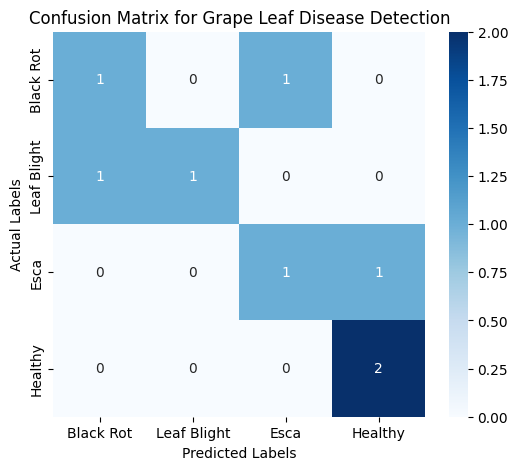

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Label axes
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Grape Leaf Disease Detection")

# Show the plot
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Example: True Labels (Ground Truth)
y_true = np.array(["Black Rot", "Leaf Blight", "Esca", "Healthy", "Black Rot", "Healthy", "Esca", "Leaf Blight"])

# Example: Predicted Labels (Model Output)
y_pred = np.array(["Healthy", "Healthy", "Healthy", "Esca", "Healthy", "Esca", "Black Rot"])

# Define class labels
class_labels = ["Black Rot", "Leaf Blight", "Esca", "Healthy"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute accuracy
accuracy = np.trace(cm) / np.sum(cm)  # Sum of diagonal elements / total sum

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add accuracy annotation
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")  # Display Accuracy in Title

# Show plot
plt.show()

# Print accuracy separately
print(f"Model Accuracy: {accuracy:.2%}")


ValueError: Found input variables with inconsistent numbers of samples: [8, 7]